# Olympic Analysis.

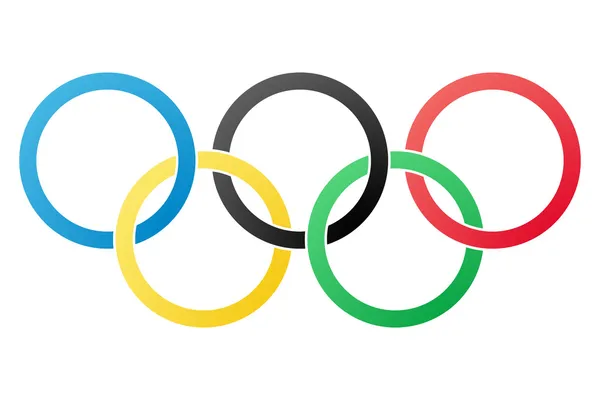

These dataset contains the information as per the given belo: 



| Columns  | Description  |
|---|---|
| name  | Name of the participant  |
| age  | Age of the participant  |
| country  | Country of the participant  |
| year  | Year of participation |
|  Date_Given | Given date |
|  sports | Sport of the participant  |
| gold_medal  | Gold Medal won |
| silver_medal  | Silver Medal won  |
| brone_medal  | Brone Medal won  |
|  total_medal | Total Medals won  |


## Problem Statements Given:
- Please do the basic exploration of the data. Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.
- Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.
- Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.
- Please remove special characters from the name column.
- Perform data visualization techniques to appropriate columns and explain them.  
- Please check if the age dataset is skewed or symmetric. Based on results perform transformation.
- Please perform appropriate numerical measures on each column and report them accordingly.
- Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 67.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=4b4703b5eab3aca26d689657291728724b65efdb89a3d5ce3d4c16dae06d9b90
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
# Importing all required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
spark = SparkSession.builder.appName('Test').getOrCreate()

## Write PySpark code to read olympix_data.csv file

In [ ]:
# Reading the Dataframe from the csv file.
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1).csv")  
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

## Write PySpark code to print the Olympic Sports/games in the dataset.

In [ ]:
sports = df.groupBy("sports").count()
sports.show(60,truncate=False)

+-------------------------+-----+
|sports                   |count|
+-------------------------+-----+
|Gymnastics               |194  |
|Tennis                   |71   |
|Boxing                   |188  |
|Short-Track Speed Skating|96   |
|Ice Hockey               |384  |
|Rowing                   |567  |
|Judo                     |224  |
|Softball                 |134  |
|Sailing                  |210  |
|Swimming                 |487  |
|Alpine Skiing            |61   |
|Basketball               |287  |
|Handball                 |351  |
|Rhythmic Gymnastics      |84   |
|Biathlon                 |94   |
|Triathlon                |24   |
|Badminton                |91   |
|Athletics                |687  |
|Figure Skating           |54   |
|Beach Volleyball         |48   |
|Equestrian               |157  |
|Shooting                 |181  |
|Diving                   |113  |
|Skeleton                 |18   |
|Ski Jumping              |40   |
|Nordic Combined          |39   |
|Wrestling    

Above given are the Olympic Sports/games in the dataset.

## Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [ ]:
state = df.groupBy("sports").sum("total_medal")
state.show(60,truncate=False)

+-------------------------+----------------+
|sports                   |sum(total_medal)|
+-------------------------+----------------+
|Gymnastics               |282             |
|Tennis                   |78              |
|Boxing                   |188             |
|Short-Track Speed Skating|138             |
|Ice Hockey               |384             |
|Rowing                   |576             |
|Judo                     |224             |
|Softball                 |134             |
|Sailing                  |210             |
|Swimming                 |765             |
|Alpine Skiing            |90              |
|Basketball               |287             |
|Handball                 |351             |
|Rhythmic Gymnastics      |84              |
|Biathlon                 |138             |
|Triathlon                |24              |
|Badminton                |96              |
|Athletics                |753             |
|Figure Skating           |54              |
|Beach Vol

These are the total number of medals in each Olympic Sport/game

## Sort the result based on the total number of medals.

In [ ]:
df2 = df.orderBy(['total_medal'], ascending = [False])
df2.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

## Find the total number of medals won by each country in swimming.

In [ ]:
swim = df.filter(df.sports == 'Swimming')
swim = swim.groupBy("country").sum("total_medal")
swim.show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|              20|
|       Sweden|               9|
|      Germany|              32|
|       France|              39|
|     Slovakia|               2|
|    Argentina|               1|
|Great Britain|              11|
|United States|             267|
|        China|              35|
|      Belarus|               2|
|      Croatia|               1|
|        Italy|              16|
|    Lithuania|               1|
|       Norway|               2|
|        Spain|               3|
|      Denmark|               1|
|      Ukraine|               7|
|  South Korea|               4|
|     Zimbabwe|               7|
|      Tunisia|               3|
+-------------+----------------+
only showing top 20 rows



## Find the total number of medals won by each country in Skeleton

In [ ]:
Skeleton = df.filter(df.sports == 'Skeleton')
Skeleton = Skeleton.groupBy("country").sum("total_medal")
Skeleton.show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



## Find the number of medals that the US won yearly.

In [ ]:
us = df.filter(df.country == 'United States')
us = us.groupBy("year").sum("total_medal")
us.show()

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



## Find the total number of medals won by each country.

In [ ]:
ctr = df.groupBy("country").sum("total_medal")
ctr.show()

+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|     Singapore|               7|
|      Malaysia|               3|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|       Algeria|               8|
|          Togo|               1|
|      Slovakia|              35|
|     Argentina|             141|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



## Who was the oldest athlete in the olympics? 

In [ ]:
Athletics = df.filter(df.sports == 'Athletics')
old = Athletics.orderBy(['age'], ascending = [False])
old.select(old.name, old.age).show(1)

+------------------+---+
|              name|age|
+------------------+---+
|Merlene Ottey-Page| 40|
+------------------+---+
only showing top 1 row



**Merlene Ottey-Page** is the oldest athelete in the olympics she was **40 years old**.



## Which country was he/she from?

In [ ]:
Athletics = df.filter(df.sports == 'Athletics')
old = Athletics.orderBy(['age'], ascending = [False])
old.select(old.name, old.age, old.country).show(1)

+------------------+---+-------+
|              name|age|country|
+------------------+---+-------+
|Merlene Ottey-Page| 40|Jamaica|
+------------------+---+-------+
only showing top 1 row



**Merlene Ottey-Page** was from the **Jamaica**.

![image.png](data
:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA8AAAALQCAIAAADQFY7jAAAgAElEQVR4nKS9Z5glx3EgGJFZ9pn2ZjzswMwMQBhCEAmQBA1Et/KGuhPlpRVlV6dPJ5F72r1P5N2tbrkr6RN3T2bvvjtpJcpyjzqJK1IUDUgAJCzhvRnfMz1tXvdzZdLcj+yXiJdZ9brBzW++nnpVmZGRkeEyKjILt7e3oaogotba/8k5Nz8BQGttbjqVHTiV95VSjDHGGOccES0EpZTWWkppLiZAqOzCXlN86nCjRWuNiJzzIAg451prIYSUkjEWBAEACCHKsjTVEFFKWdmvjy2llaWYue8T2cHHwR9HxVwzxux13RgNnbXWSikAYIwZgEop29bemUAoO3bOuQVS2a8BaOHbOw5lbENzsZc58nuxdAAAwzPm2geotY6iiDEmpbSTSIlcVwwDGLanDCmlLMtSSgkT6V9XzHTAOMc6zEAfGQT8EgSBaWVFycBRSimlzGAthU0xdcx0G+oZhnfIZYdf2W/leC1fWeRtp5PhWALan4hoMbT3DaqVcHysTMM4jg3HWkyEEEa0KyH4/GBghmFoCUt7cZA0IzVqhDavFBNTn+ocIOJjuKuOPx1dYXs3fGVRopxpNYCvQCrhO2Jr6gshgPCqo9P8QmXN0Mqofcv/Pqlpj7SXSnoa0lEVV0kiq7gMH1oGK4rCcILTdSU1DD7WLlSKDL1PmdbqTAc9qkWDIAjD0CBm/pq+zLiovfDxNHVMZTNYe7PSjlhaWQ4EgFID8ARQJaJAEBqgRJTIAFhDAZQyYqEAnTEGDBnAdiv+XA6//w8Xn3j8KRaHGngmZMAjAaA1wms4mr40MAWBAgCQDBRDyRkAV6AQNCpp6iMAMABAFWhUwABQgJYACjQDBEAOAMgD3etjFHHAQEEhBAaNKMhYdnZRdK5S8qqU/+pP/GDKi1xsNVvxxbVLf/T7f9AKWysrK//qN3+z0WqILE/TeH19/Zd+6Ze+4zu+4xvf+MbP/uzPHj16tNvthmG4vb390Y9+dP/+/aurqz/2Yz92ww03DAaDZrO5vtb5yEc+cuTIESHE3Xfffdddd21ubiZJMhgMfvEXf/HKK6/s9Xrve9/77r777k6nE8WhUuLnf+5DVx6+igXB0euP/tCP/NDahZU4joJm8qv/w69etngAgafT0z/18/98c2uLcTXTbP+H//iJp55+7u3veuelc2sf+tCHClEqIUOOn/3sZ//sr/7i+37gB/JBjoghj7e3t6++/LJ2u33N0eu2t7cffvjRMAzTNAWAOI6tdJRlzhibmm49//zz115/bRiGWZYtLS2VZWk0QBzHViTNHcpylfxGOZlqA0deKJ9TXfFaBWVs0pgAIqIcFyIAMHW4rvC1EBGUdOtPtMg+/jvGke3cHwwGoNnp06c7ne3jx4/3ev0sy9KkKaVsNttZlsVxXJZlMKEDOiSqyHx3YbICrbyPpNAxGAWEiEYXUPs0uQuKp1N/L/6N4684d9ioWHVW2S8Qx9GBZhW3bwzqaOWgYf5SB4KCqiORtVt6tD6xSJq/zoTWOTp0OBQxn7B1pNZVS4JK/OnTCY6XJSx11qkRdWBWIjaBP/1HlRb9mysUlN9XpftSCcdqOq219eZtccy8U8exrw4CtskeR+Swq0MoZ8Fg4dOVCZ13Pe4P2QoOzpM1AwCUZWnZwwChIlw3CqcgonUcnToO/nrkIPocbunjzLhVfbSakVm6INy1WMJW8pUmLrWFOYF6PoebO9bRpwDtX0off07thbMIcdCwhLKLARiXax8ryntUFmgxEOzCBgiRKf6VNKH36/QeNWQwzqLUlPi9VIJy7KNTzaeeYx121S3Uilme5IBaSQYAmgEwxYABGCNRKBVHQVmUChliqJKwo+HhM+IPPvPwU2v9QopIBrksNDKFoJWGOtaSAAigGWgEVKCZMgtGBEANO063AmAaFQCANpUBgTFQSoNmGhB1UYTNVplngBDwIA4CIQZ6e+1wS/3g3W9//w3XTAu5v81F3k00aCg3N7be+Y53f9vb3zUc5nEj5Rx1WhZFdurUqZ/+6Z++++67f/iHf7jZbG5tbU1PT3POH3jggWPHjn3oQx9KkiQIArNkiqIoy4eXX375r/zKrxzYf6AUpVJqcXExDMOyLK+66qof//Eff8ONbwCA7e728vLyxuZ6GIY3veGWd77tHW+5665MlqXILz9yZVYMBIPbbrv90Ozyd33390oGl7Y2p6amkihgUr/59jctzC//xI/+RAgRgBJKMQBU8s43vfnkyZORxv5gUBSimTahKNI0zfO8KLNWq5WmcbfbR8SZmRnC1YoxpmFH7Rv32i7nTBFChGFYOV2UPRwucjQ8NeV71887oMBVVg4orTUgMEDQrlEwF4xCq3LM9lJMb1JKq9VN3MSgEcdxu92WUgZBUBRmcYK1DjQ1zFQ1OMg5yuJ14vpaCMRqVRpFe12Dp0SvQ6xOP9IKNITmR+YcPVvJVZWPnDt2gL6BdChsqUQNMK25lymwjOgIA11o1qFtilEilRrZR95eO+TyTXLdhS3W4bMDcS4mtHWQqfQJ6sZLwZri6AV/Nivh1BWKv6OAaIXJk2KHQNnJcotDGStxzgDN/deLv4ODg7Y/KXYBCePcWKdqnVUf/UlHtCvaQgjH93pdk+ULuFOB+oJU7dSpDlvTEWTrc1sC2nBpZakE7jjuvtzZ1xS21WRSWHYC4m7SLqw+QW9hQFH1JZGiTZ/SxTBF0qJdqVepkOrRwoNKt8W8KAral7+GdHCzd5xXao5eosg4cIDQ2f7Vng9tR0FFgyptv5VDPVufLjyccdnmxmGyQUczy1wDSgmaaeQSGWgBqLgWCkFFYa5Ue6oJwCXCGodPP7f9R5+79+V1UbA0TlLkjAMC4xoAhIAwIn0b/ACU4WeGGkaRPqXRRKA1oDKxZwAArYx7jYoxHSgEBiLQSqMqFWjGAIMyK+IoYroc9joNFNNhedfNh//Zsf3vuO5gGwDKohj00maSK6YgXZpfvvLItUljmgWys73ZTJNA6Ln27BWXXR6nCec8iqJOp5MkifGfbr/99sOHD09NTZVlubm5ad4MNNPmkSNHfuAD339g//5L66tKKfMCsNVqpY3kR3/sR667/tqVi+fDMBwOh81ms9VqBSx4z3vef/ya6zqbnQKUUrLoDXgQRO3Grbfetm96QQjZGfSyPG80GpcubCzOzu1bOHBo/xVc8rX11eFwyJHNzUw3k/jQ4vKV+/ZjVsyGcSYxAlAK+ltbzempMAyybDjM+owB5zgY9IwLyBhoMG9LVBxH7XYrSZIsy2B8ReqIp8PSusqHppzssLqv2ycVhlprhGofnf7VWgMCePI1Yuxq8N+EadNaMwyUBK1VmqYGsbIs8jw3oJIoLosMAaSsj0D7QK2D61tHf/C04QSYVKpNKNGqYxPu3QscW6hCcWbd54BKZGwFo1BwtFKXUhr3EcZdAdqv89NBhj61A69kXIsqDdpZZPxIjG+EnEKtpiW4Sclw/BLaqVPsmoxaUx9tOxaHJpV3Kn86YlNpTqBGdB3O9C13ZVCzcrwWmkmEgBFL+K9iX698+l04ELDq3fpkOTKg7HsSelOTGJvjglD/rI6LJtCn7im9aQdCMwfoX0cDUP/DFhop9H3ESsQoGv6b/b1r1UqlUenQ0AtfRVQSh47CiYOaR3WpDpVwHC06oRplvDo6aK2DIAiCgMY4AMBYX7+V/+aHyqm/hvGNMXg0rCSpw8N2OHTIVlfTLkxxHF9NvH+fAs4FRWbCSwzw9EOlmFvOpxVskMIuGusg+zgjKb5+pg0R0YTWXM2gNVcaACRwAK4RAJTWuQbNA5mmrSwTBfAigU9+/fy/+fsvbjfmguZ0IKCUQivOglBqVEqzKFJVbIUauGYmtqwRAEAhaPPAxJt3kj0YoAa943EjAABTwATyHQ9bIQBEYZD3uu1AtnFwZCb8nne95Z3HFl79wpfCxeBiZ11BOZBDnkQ8jPYvHdxe35xrz7/00quD4TCdagwGvVgKBH327NnF5aUoira2tvr9/sLCggkqP/744+12+9SpU4ZEcRxLKfM8P3ny9NbW1uraar/fN7qIMTYcDrXWjz322OLiIiJubm6ahM8wiGamZr/8pa/Mzy60p6Y2e50gCEKNYRyyJH32mRei68MkvtRXMsvzzfXOTHtKKX323IX1jY1ma1oIEbAAmL506ZKYnlq/eKG/1Y2CIA4jzRlIwVAjakQNACaVqSgyqSIeIA8CAECmlVRagxCFeYdmsrD0KFBYmfFoORNrvCaqnCn7QZWE1hW/lzGO9breuSYhOSo4PrtN9ov8pxQNmxSaJInppdlsMsaiKAyCoJGkURQyxsqS1TrQjmGgJKt0lfZokGyxomtdVcfEfhPF11B1HDABgk1ycF5z0MU6kOn3IVRqLocV7E8nZ5FeUzo7TEbLroyCiMaBNkrZDMFGlC22jh3yx2UtNB0XreCg5I+rEjKM20ufBxxWdIjj0Nn564yuDoG6okc+NIxCUDSJ/JsA6A+KIuzoINibWOEoG8fmMiqlbIRJSkmjsJMVio9SXal7SlOYqHT7htzvyC6YfZFxFgZOHauXfHxs9vMe8Z88UjovlMeQrFXMfZoq4EDzKaCUyvPcej8wCo5O8NIcfqZ8PmEsPv6TR+14Yz6T+D8d+UWSKmbvOPxAgdstMbuaA+e+baW1tsEXXxtQ9eXM3QRq+OOdoAYpND3yhqlQ18FXoxxxy9XUjXb0vI+wE7yfoHu11iaAQgeilFIaGGrUAMAAFOhQQSkZA1aCHAoZiKSxUsLvf+aVP7//0eHMgTxXhZIMuAYGyJQEJQUgYhiBEA56JurMFaIGYCABJNM7KRs72RoKNH3logFBgQSUJoNDYgKAoCUowZQUw2w+jZv5xvtuueqD3/aGq5rw9EMPFxdXQrhxen4uaAY6QQAoimzl3One+lp65VXN5bmCg0Qty6LB+JlzZ1999dUDhw5GUbRv3740TcuyRMRer/fkk0/efvvtR44cAYDhcAgAjUZDCPH8859vNBqNRmNubq4oirIsG41GwIPPfu6z/X6/1WoppV5718/DBx98OAzjZrM5MzMzv2+xlCUTinP+ypmzq2uXgihcPLBvRkMphBK6LMvVzfXVzc7s3PzSgf3GWA/63dn2VLfbWVm/BAGLGvFwOFSgAJHHiKgDjlIUSsqAIwMApVBrJUQQBKh1wBERzC3GgHNup95hM2rd7KM6kafmD0mxdyqZ3OdhPXKLtdb0LzMYAriAqjwuRASoEEMfE4qz7yQAgFaIwK0yj+NYa1mWeTYcKCkZhmHApCqLcieKv7sDTWk0jvF/U7Eo2jV3Zb9QpSleVy+WUtYyVdaklpjmicI4fzhA6khRadvoT5+8lY8oi8M4Z1touxpCayeoOrYRZcpAE6ZVj+87pKnquyLgC6FvZetSWXxKmgsnj7MSB8do4Xg+0gScKZ7WsBloYmQYKOnw9XvnviQ794FM7gT41vxbBwLI8s+upIHQ02ezyql/vYOilQ0m1nvey9BwPFXJ4myf+vhQnqGRRco5lQp0Ap877/SdC9+ls8SH8dcyDqp0un26GZ3jsOtk0Z5gGPzKvrqoZIPJfdG1kKPNJvRI1aZTmapcS9ggCCqJTA0enRSrlKyQmjpOCg2O3q3R+pNHXSkm9o4fU6eDcthV1yzg9Xjqjh65MnTVt0cZtGSkQlEpO+bCvI+2G1htE8kAQIFWWjMNOw6uRo48znhjDeB3/vbxP3/oRTF3YJBL4AxGeaKFUBoQggA0yKKA2uwjphEUKInWPxpRUpvUDgaAaqdfDWBi1RIQTFIHaAgUJFqGanC0yX/4e97z/uuisFSNvHvq0a+141lEnjSTjOVb21ss5FNxeubUKTEYBKXIYMAa8UAUyBBi3hlsX1pfS5LEBBrzPM/z3Ly1Hw6HhuG3t7fjOC6KotfrFUWxubl58ODBOI43NjYajUYURdvb22mabmxsxHGMiGEYFkUxGAxMWogZMQ+ZBrG51S3Lsh03ms0mcCa0CuMQQHc6G8h5hKESpdZ6Y2NjaXFRimJzqxOGQauZXty42GymFzfX23NTczOznc5mnCZSysFggAEGQTAY9LTWaRoHAUvTZhhyAIao8zwHUKM9rzJJo5AzNb7V3mhOznnl/mzfAGkSVIJxhq9TJr6q9y2OvbnzaDw8QftyIOyArbehE1DypUwpxTlXo01iJkXHzHu/3wWAOA6DIJKyNG0nOdC+RfSx2Yv+rYMPo/mjC3R730+2e73wfTu6KxBqHrTnaFKNb5v4Rt1R9NQtsCziGwOfMnWGx7dek+ljkxAoi1ey+67K2jfqjJxvUGeSJ5jqSgeLdjFhkxlt6PTuC6ezvcbe33XIjk9WaXd9suyl1E2BH6+aAFwT7406+mp8/5mF4MhFHWL2Ylc/wweFxHsGMlkOM1PimybUlhuOteFzizNdONXNOB2jJu+OYG8z5ZgEK8W0gq1DUwtoOMBJP3PGrr1VZeV0T+BP/74zrZU97p1LcXQKhD28wgdIkXSk2P60kS2aLVap1mimmQPNgW+obd+kmUfmwApHRTjCDuNhWstOE/S5gzB6tt9hDxtZoE0cb97HzXlUh8aEYs3KZFswYXSICFwXoFBpVAForVjBEGIAAfGQNV7J4N/81de++ML5cmox65UsSkPGhSjyUmopQQNwzqNYa1RCAFQgrBAEAwCQCMAAmPGJwfxDzbhCBqCAcQ0SR3kcWgEy0CXonCvgKo6lTGX/+++65TtvPHDNPKTFELJOGvN2My5KnSmGBZQcEOIQg5Q1i6x86Znn33zr7XHS7OYDDHkpc82DqBmvbW4MBhnnYbfbVUo1Gg0pVVEIIVRRCK0xz8skaTAWAMDU1AznuLJyTsqy3W72er0wDDnHNImVEpxjUWQm70kpJYQEaHS6m2fPnVI6T5LpblG02ikUOi/zUhaFKJQqlM6kGiZRQ+QZaJhupY98/f6rDiw3ETOm04SLfNBqRBjzS92N/UsL8/MLU0tzjXarKLJut88VCFGsr1+ampqanZ3u9XpBwOfnZ6XUQhSDwUDKcjAYRFE0GPSkLI0kGr+QqlDjOPrcYqXG4VvL5JVWbC98u/NIa212B4770LSOuckAQWtgrhHZ+asmKTofDSovVBCkVlEYKSERUYMEVICqKDMhim53azAYpI2kmTQ4Z1prIcSecqCpQYVxW0Wx2QsoW3x7Zo2QM+AJ07OXMlmh2OJEnmzXRvcZ04hVr6Qr4TiDQhJZMUO25/Q5KzmKMO3IOlWVDs2uTGzcKXvek195VypZZBz9zkYHSFWaK6cLIPxtKelbU9rW2U1vKWN2dZib1necYH4ql38Tik8QahfpiL65QuFTdqLvu605nDA1lDHsQX6OgbcQKI9ZleGMwhH211twvGjyYpqO3acGkMUDFYE6ZBwlWzcvvqqt1LC2WIfYprxPnnEhBI6cOUoB57QKSm1638ffsU91ePqjtvcdUaq0RrZtHXwcvbAye6qQbMCos0aV+NicMX+l7QzE1HEYoNIQmr+mvnHx7cAp3eh60uIWRZF5are1mOJ70nVkN81Nio7D7c5wLGTKDDDic/NUkSxkXwc62myClq5sXlnB/A2CwE/r0koppjVqhiUCQ9AAgcTGkIePX4Lf/dQ/3XN+M2svKohZM2QliGHJk1DKAoOQMSaVlnkOLADGQFcfEylR7QSemc17BtAMFDINzET0cMf71sQOcKUCyBsibxWqXWbfcvW+n3vbgasjgO56r7/ZiIOQNddOndrulK1v+7YI0n4uYuBaQ18MNje6X/v6Q+9/33dcvn/fpUsrjdkW40HM4kuXLj388MPvf8/7Dx06ZObUnEfR7XZfeeWVubm5W2+9tdls9vt9AIjj2NwPguCtb33rwsKClDKOYyHEMBs+//zz6+vrN91004EDB8ypcMPhMEA4/8Lzl1584dKzz+1vNpYY10WJAqHROPn4Yy898MDTszMnDh86NDWdd7oMgrDReuwbD3dOvvrIP3zuvbfeOj/bVoMBiyIp1clTp59/9pnwquvKYa5CDHrbiAhKBJKlSdLv97e3t4UQcRIpJVYvXYzCGFBn2cDk8gVBAPhaaq9hSKupLLOhtz6klogKr6PuKAR/0uvuk02jY1xqwDn6U0/0M9n43hiH2yfjQxtqrTnnoihpBSGK8+fP9vpdKSWgVqUwcX0Nkn/4wx+uRKiuUEU5wcTuRRP5ytFvNUEp2GlzEDOFhvGsYgUSD6bcQEFRhWv4jFarw5NipcbT8znn5g2RhWwCJ06+UeW4fBI5lev4gyKJ4xFKc9OcMkstIqWSA3nCkH1Otfhbi0vv4Mh7DsPQLk584tsh+K84gyBIksTMIx8Vsz4xGWyVeL5eQaL36TV9u1rJYOamdb+MejIzbibdYGuirVhVfCR9CoNndM1NuzAzvojxEuws09UX5XNKf2dyne2nMK4xaYKmxQeJ3+mg50+ElQua8uFMiiZeUd38UuBIAsMwLrYOH4IXigjD0C41KYUdcXBWjHp0PLD5SVd0lMhW/P2EJSAT7c+IQ2SKlSObmviClG56tGR1koDpXFNk7E81SqOn54o6OGvi7zrsSu/TVpQgehSmrXyJbKo5gQMrXBSUHkU67PnZldxiHWt6gHQdX/n3cSTOfpISENVh4yN6lJhBucLWdyBQMfFVFtY7EIocHkV5A7w5cugwxo2IqDCK42HRi1IWSq10kqXRl18q/qc//rvnhkE/aCrg5kA5rgARBShgDAB38GImmDhCUr/2HxqHGBEQAPVO5oapoFgAPGCREMh4WGrQSkDAgDNEDlozhECLUBSLYmv6pa/PvXLvoc5z+NJTtxw+VGxstIMgTBuf/dO//JNP/Mepcvji1+/51htuCDY3wly02jMPPvjQx3/79644fM16p7f/sitaM7PlcNhK0ldefuF//dj/cvjwZZ2t7UOHDy8tL6+trzeazf5g8Ev/4l/wIFhYXIyTZGFxsSjLMIo0wK9/+MOPPfHYTTffPMyzw5cdkVoVomxPTf3hH/3Rn/zn//yWt701bTQOX3ZEaR1GURCF9/7j53//Nz76rmPHn/nSly5P0nYptl4+nfSLC08//+Gf+8VrFhf7L74Sra0vKj04u5KfXdXrnV/+0E83pVxSeP6pp5ejaOPkqe1zK1CWv/O7v/PSCy9+13v/2fzMbBBF7an2VKutFbQbzSgM4zgKAt5opK1Wo9FsxnEYxXFZ5jOzs41GGkbh8r7lwWCAjM3PLfb6fQBoNpuGB0w02i50HWmikSnKRaay83rKlxeqsnzG1sYRR0Av1Zl7FgRMJFGPrYotTHq8XSUmr9UkaPjSxHgopQoDPhwO8yKbmZk5+crLc7NzQgghymaSzs1OJ0mcpFGcRHEc7vUUjkq0fEX5TRdKX6r76MQ4k2T/WjToZFMrokkQt+5DDJSUanTeCFQpsjoVNgGsg6ENyZglb2WrSu0JE+2cY6usHgePYrQX25EDmS4xwXuFTVF1ANLAjyaG3wFSOcwJHOV0qsmOdT1yDjjne/9AhnNfEyfAqezzhoO2HaCvR3DcA6MCTPu1OsjiT5FxWtVxoLlvHB2z1RrILE/mWwey7d1+OMkJOdCTSYDwNhA28DGv6xeIeDqko4y0a6HK2vhGdKfsrm2deDOMs6gzF6ameRNCZ5k6cFDFTrS5HebkmbWgJgBxKGATV5AsPPzJ8vX5rp1WPsKq5c0EyvssXcellXdsdJz2aAa+ayzZGTjzzkqvawg1TOLDt5hYbnRekTkwnZ+VGmNX9JxWjsp1WMWoSq01/UoUIkqpVSHjJBxmRSOZl3HwmYe3PvF3X74Yzm5hJLUeuTtaM6mR6UmUqMV0FGFWAAw0QwCteF6UcdospICAhUlbqFwPBppFTMqYF3y4dc1idGPSbF4ob963/1BDbzz74Nf+r63NYaGbzfnlfU/d8/XvvuPt1yw3sRje84efwKS1rVh08NDD66u/8Au/8IHv/oFubwhJKFXRCKabSfzs40+/9c1v+bX/8SP9PB8Oh4h4xWVXlLJ85plnlpaWfuu3fisMwyiK0jg1sZ5+v6+1/tjHPnbHHXf0+/04jhuNhuFAKeUv//Iv/8xP/Uwhi4hHQovhcNhoNGabzXfcevObLr8CFhc2HnvsxXu+IhkDlvYKedfxE7ccO74cx8PTZx46+SqwaKszSKZn3378hna7uRwkYqt3/1/8TdRqsCTpx+Gh2dmlpaVGEDEezDQSzbEoirnpGQY7wVqtNaI2+btlaZycpknLNiGboiiCMDLn4rPRMTJWlOy1s8B25JS6YZZn9LgPUDnlDvuZasz0AqCrLCaQNzkAYy42rTBBInx15OPpNLcNqAWUUsZJFAQBSCFkEQQBQxYEjLGEf+QjH9lL33WPHHPiI7SX4qgbGymxxQQnnGt7h96n1ShAqssoHSuHac0/Gz+uaFejCFWGxC7xrWOhSQJDpQM9uYvJDoEzI2z81bn2lpW2ct0UoFec8QIx29QsOTdx3Aljo+1udQOxNfX4itNiRWXA3nm9DrRDNPtzAvF9sJR0lbRyvAQYN6iOI+LTDaooTPGkHVE286fYHwJ4TEt7dOTOmFsrgM4dG/d18MR6NYfj6rJyINQ1rwQCRL8DERCsih9TItBrRpKwJyBM2yJiFEVUEeEo1aGOfyo5pK47ip7DQpTfbNeO2FI1aF960Jc29DMBQOa9buCThWhCK58lHIBsPDpeRyWfGjTE63/lqrJU8n+dInI4x070rvAds2UfVSoQIMxfJ+l13dE6lPNxPFLuGE1/YQwAAIyzEBUmQQhxe5UHf/PQyif+/t7TRWMQNErkwACQMQBEkFyOzsyo4orRuthe4U7wGQDMeXaaaWQauGIITGMIYagYapFDiCrrgcohAKYglllL9G7Zl/zLD9z1gRMH33doiZ96NdnqXF1bmDMAACAASURBVDszG22upYPB9ma3FU19//d9MO5sqdXTs1CEg5wPM5kVA5Hf+V3vvvWuO4IwWNte16GO4hCyjEm1ML94/bFjUZICovmsbH/QT5Jkbm7uxIkTy8vLJmej1+8FQZBlWbvdvvzyy49efU1ZCoZ8bW29LAVobKatxcWlo0evCaNoMBhudjp5ViCyNGksNBpHm621Z54enDvDutuhKHgphv3s+muOfud3vH9rdeXM499olFlYFtlmJ1Ks2Ujf8c63xVJvPf8SbHSC4VB2e8NOh4Xh7e96x/TCIipMGg0MIxZy1AAa7NsNRATQJnRiCgCMXnvyOI63t7dnZmfjOO0PhoiYJAmSQIMm7yIsF+nxsAgQEaD86V/svZgjDQE1oEYEe4GgjbgjgrkwmT8kHj2u0j0Nb68rJcu3CzvXyACAIeR5XpR5mqarFy+GYSiKot/tIUIUh2mccAZa6YDzSV8irLxfp+v3IuGV0Bz9OGErKP1JSWAhUKOI41kcOP6i1nZNnTALhL59o/X3Pl4HQ/P1Gqdrn5J1fdGbFOG6mrSJraDJYrHSaWPk3AbbxFarMzBs/NxZhzWdYSJZUNb5NA4RHHsJo3fKOxucx4c2gRS6xiee4LhU3qmM6DvWjkJ2eEyPLwZoZbuyqoRDbbCFieQUAqgiqQ+njn8c35cOzQeIJLvJVjN3TE6wj4+DRiWe9t0FxdZPBJpcLJFpE2cWbNe0L0a+E+6zYqXOsRDoqtjAmeyQOcSE8c3HkznZ1ndGYTFxNI95RE8pcaa1UtAq0ahjNl9P0gH6Ne0c2Ybmgrq/DhwHCJBsJYs/ZcgJBKRAfGz97iqb7AqcVtY1Hwijgmzv0EdOwsyEYoE7nMm8CLQpiuyspQjzgEnGhyWKJvztQyv/x99/cY3NFdMzeYmw8x0LrUFr1DuZGAqrtgvW4wkAGrnWow+pMNBMAlNKsDRVZQ4RBygA8igNw7JoaJWW3TdeufST337nbUuw/rWvPfwnf7r95JMNXb64tbG/0ewpDYcu32Sn7v/U//vqc0/A5suYddMg5UlLNWcwYk984yF+cD7gSWerJzu8GTfbEBxc2vfoo4+2ZqbjRnN9c1Mp1Wg0siyLoujFF1985JFHpqamtra2jFRubm42m81ut3vffffdeeedzWbTbMsTQpg699xzz4EDB6xK7PV6RhtcfPml+z/3meD06bizmXNeaLmdy/aBy5585OEv33dPjIpdOC9kmcbJsBAFT+PtradPPS8Hg/DcRkPrZjPtF3nGWL/fzx98MD58cG42aCL0syHHOOIcNQhZkhDDjviEYWh9mLIsldoxmu12u5TCMgAbf1dDObNOFxm+cpwEn7v2Xnwd64B1LILT6rU642B9vYHjHoJvF0zZUUHstb3s5nDDNE2jKGCMhWGYJJE9+iLQNfJZR5E6RblHOXe6oKJeCcQ3ew5uvhbeUQScU9NLzYPfvO6mYwX3MkYfYU3OqGLjn4qg+tHnD4fUPivX/aQ1KyOyvv2uM3u7DpkuMyg71jk9E3463Ewp48yyScoEshXVzHVdON8B6A+/cly0gq7xv63fWYm2U9kSmfpqtjv6sR6/lQ9EjzvWlcWZxEplhOMLV4cf6r64VidQ1CTXDQFqxATGjxed3JFTqB9pPQnwmGoCSra7SukDb0J9nUPR2LvfYypbB7oy4k79Khr+qWQ860ObwkbZTRZba1wBgC7sYZy7/AFqb6Vap7Et/emCk/bizI6vKHz948ignWWfQ+om3Ud1Vz4Bj6MqR+1j7uDMyO5tX1vWyRGOvwXdO1PR10FAuJoixsY/sGWGOMyKMkn6Cfw/96x88itfX0/mtxSCLoBHqAOutdSlZhLMYc7aeM9qLz60Bhuv3vlaCmoAAImgECDkqsyBacakynqNGIJBR2+sXtlu/uR3v+tdb1yIMxicO/vcg4/g9nAuSBem5hv7Dqhh0Qr4yUF3a+XkdnO7KAcnjl7fQi0zKVn48sXVzsULujvTaodJEO8/sDiQWhQiyuHsytnTF87feGBfo9WK0xQRkyTpdrtlWZ48ebLZbO7fv7/RaJitlkZeXn755a2trfn5+YWFheFwmKZpURRKqW63e+bMmWPHjh05dGS7t80YazaaGnSn07lw4cKh/fsGa5duOnyIZ0MWxQNkz1/qbG53rjlx7OKrL1137TVJljOt4vb0ixc2Tne3Dt5yfHttYxYbCzwsimweoR/wJzpr65sb1910YnZxsQDgacyTSBRFEgYaARlX6rWDSoOQmZC5UkqUCtGc8K2FVGna3NrumZkuy5Iu6ux+JOfNMGX7CQ5bnX2k/Oaw6A7Pq50tg+YCRtUkGICjgxRh9DnLmlDIBHMzQV/58rijhGHnuA8pZaPR2Nramp6fAwAEEEVZhIWUUgmhsf5T3nshBNYnKe4q6vQVJG2ivM0ik3Ggqoc6E9R1nowMjq9yrLFxFKuucj4mFGrPACDLMvP6zHZKc498lKgD56vXulZONce019WvNAyVrFbZr31NDK8pYm18WZ8rLLdUSpRP4Uo7qpTK89x2bclIw5+Vg6VomOs6fqv0DCjylHsnML9jesFzoCnjoZfS4+Dpj85/6VY5fKcv+9OWCdEIf0RAJM7CNItymsTsKN9KlHw+h9FhnLQjX2n6RY+7dzQ86SNgGdXi4J/EPAFt24sQgqoyTULmlfXr7iOJ6/jS4VRj9Wm7vliZ9/hmM76BbJZqMJq1yvFWavUJfVHxp/V9Pe90RLtzpM/n6gkj1XtzcCv1CdWclut8+No7Xrqu+NSgiXO7Ium0pYjVtXImzqa0Od3R5sz7Qm2puG5iFsL/+YUzn7zvG2dKLiIOaQuEAq1RS9AWAnst9vy6go8IWjMNSqHmGjSiRtAMgANIBSBV3m+HwIfbbLD1tuNX/dTd3/qmw8nWejeNsMz7lx081LpmcOrCKtMQYahjnpVFPxvecMutt935zj///T/IusN2HHHFpNIzrRnVar35Pd8ucsECtr29raMkCMJ2lG5c2jh6/XX7Duy35r4oCpvccvz48fX19SRJzN5ZcxDHYDC4++67wzA0p9fleS6EaDab58+ff8tb3rK8vDzIBob43V7XwFxeXp69+aYvPvBAlyH2+kEcZ1EiRHnTG994/Ftu+duzr66uXLhiZkqVYnXlPOg4aTdvvv32Zx5/cuW5+5OoASJnUVgiTDVbt9x5J+7fpzUvhRAKMRdymBXAzIQDgNY7BkJpKMuy1+sBgBQaR0eaDodDmwBtDTQje/SBSL1vbhx7Z+v7xm53FqjP8q8z034FBwJWGQus8rYr8bHdmY+K2yZCiCRJ1tbWyrLs9QZpEmnNhYiVkia6/01uInwN74nR9QmlMlIFXuTP6dcvanRul03NMfeNYRglCE36tq2Fb5nG2cm090FBzayr0aYuJN6w4bY6+A4Cvm2oRMmvVseC9hUelYrXZXhMMWQ3h2Bo8hIWycFqlcZYV3E8eCJUh4l1mnHPH/qCcfo49tIfl4+GnUHLdXQeJ3sbTl/UvCFZ/tEPtfg0mWw+HTz95lDzXWtfD1a2pXeMQ0aZh25edOi8K3tTWYDxb3oD4b3JU0zr4Piy0y6JLYRKtaDGD0OtlCaHUCaQQxcSk7WNJYgzQItt5YzAuAAyxuhCq7KmLcYnMAfUOARUXq52JQEpMnV7DOgogETKfcrD+FTSi0qtaP/6KqhSKdVJtN81VcWOZgYioQ4adcOnMIFIhB27w3IT2sJoOTe5r8q2SN5zThAZOlm2mgxwQ8Ef/d2zf/nAoysYidYC8BQwBi1QC0AldhJvEVUQSVBKiUDb761glUUCIOFpBEAGCFIpBASmtfl0CwLIAjiAKEHmc2mk+/k7b7/th99z4opAdtdXplotrcWgGD774gsHL64KBbIoByIPNQJnaWv6qRdemlo4whgLyoGWRcCa/bwsBQx76pGHnnnD+94V8hmhC4HhMC+xHPAw/up9900vzM/OzuTDzOQ8GA188eLFoiiuvvrqPM+Nk1QUxdzc3NbW1gMPPPCBD/zgZYcvW7m4Ys4xLIpSa3jiiSeXlpbDMOr1NpMkEUIKIdvtqU/de9+BzsbCgX3Z+norZBiwrMxml5cfeOyxU/1OY3ZGb21cWl9bnlvAUkAQ5GX5yU//l8Xp2UazpUrNFIqsxDBoTbdXLl5ozraCoJVMT+cyLwuRAovCUMNrsQ/GkHOutBBCtFotKWVZSK11WYo4TuI4TdO02xvg6Ih3IMEvRXYVWztubZyT9Dw2wVXhkgnF0Ww4vgZ77ZEPiSHqsfM6qEgiubOruQQSQHGasPFz3JVS5qTCsiy73W7ApxiDoii01qi/KQd6Z3SeDnq9ENj4saBUazva03EOJnRHAdIoMmWOXUFNMGC7ak+nPhB2cc6BdqrRkVJ3yv70/QkYZyCqQCsRcJo73U0YwuQxUrNnM0HNCsR+AoMiTCfUx42ipMddDWcGKf/Yo2r37mDZ4i+WKmnlTJljWdX4V0vocJyxgzcvdOLo3NFpmqCb7PHkMM7elZNeWbB+s6wDjRKKhuKsyAD5ImCdvDjUtunCljccx8V3sCpHYVMRnIWNhWktgYXmHPBnKlifsk4LO1JsvCKfherwdOyNraa8A7zB4x8HVN0U21E7XVA+sUOuRBLGfWt/fit7p9T2z7eidXxqVNKNtt1VaUygTOUjZyLAc52BRFWo4prAhBQyXeFbhtxLYhidR596E8ZVOSOAHAAQFAMkiaJKa0A03wRkgEwgKxh0AP7D3z7ztw89tRk2VKMJPIIwgo0+pIlWCkwWhkZAzkxrLZnWCnYObB59mNuImAIgPrVGk+6880FBxrRSEkGjBmayThGEiLRogtAXzi9g9hPvPXFFA8TGhUaoB92NqfZMlmWPPPlklrOZRjosejrLGkEwlPyCLAdCfeber+xrNju9sj/s97NhMDUzjJMXVi+ETz9z9B13zSoUJeZKIINWe+r5Z5879eqrly5cuP7oVUpyBJRaRVHc2dh8+fnnDiwtxvkwLEoMOItDWZRpUW6cPnX6mWflZofPzS2GIedcFFkEuux27v/Kl+fmZpeWltrtdrfbbzZTrfW5M6efeOrJ5y+szPX71zTSSJQqL4eMd1YvntrceKG/OVxff+O+5RnOT11YwaRRQPDypdVzpzqLaeuqMogxbobRoMhlFL546tXzn+9928F9ouzr9XVMI8Zgc5i1Wy0lERgqVSotYhbwKBRSD/MsieIiHxZFAQBaYxxHUkqGgZSvff7ZFPtGyypAh/ccfVjHtzBR7vZedkRv3J7uaB8E0C4mOxYKXpNrx3A492lDX7syBop8k8WEVMwru16vh6A451EUIOqQc6UU//Vf//W9jMpRcA5yPrl9vI1Hq0YnxPnV/LZ1RZNi7aI91FOPco7NU8sfe1/9U8pS01tp/Ky6nMw9jDF77BptSzce2TMNzCtXu3Gebp+P49g8cv4ysuPeYs68z6bQcVkcrLexR/rbQokPo2096L2MtpPrW0RqXRz0LPBd546Rs5lpoexBC92QTjuiP60fQPfRU45ySF0pF+Ad/0eiBYzCMRDsu3VKAUouv/DRRy706MO8QMJXjjuC4764GR2O70SEcfmq7FRrbSLQMK6JELEsS5ioSWl9PXJ5Ha/XqWwpbFvZifBP//BR0iTr1+xPt8dj+2JIae6rV58mDlfTfivljjb0fzo6XRP3y+nOoZIDipEMWlOfnlusR+cl+6kmDvX8myYQUBmSsLNp9JUTIvEFHEYrMXpShEMH+5NOMX3lWDkvdcICJNdfV6k7RxtYijna1V8t1zG8w0t0NifICEXP1p8wKBhnUUsiDUwASq2Z1Aw0AEPGNEoNEhA5giryKE6FYnkAlwD+9Z8/9enHX96MZoqwISAECEAqCAJQamcDIRg/WGtQGsHsBERUJrYMGAAEoEOAAJABakAJKAEVAAeIQDPI82hqShYFcIaokQPIDBiAZnEpWnn/6gbHk4+r04+++ugXrjs8v7wwKwqBpeJa//4nfu/MK6+efPXk2a3OoZtuVLNzbGkJF5de6HSeW7lwoTf4xksvHj5+XXDwkNq/Tx/c90rWvf/VF2B++r/8w3+97dZvaU61Ci0CZNnW9r//t//75salJx//Rhiy4ydObPe6wBGD4C8/+Wf3ffGf0rx49B/+4V03vkFubWQXV9qKPfPVe/+33/zY1QcO3fv/ffqa+fmlKNw6+UpjOMg2Lv3iL/3csBgOiyJtta44fIUoJeM8CNjv/fa/v+8r99x8yxuby8s3vuvdB990x/QNN6ZHr32l1/3MffefuP1b9x89euPb3n7VHW9ZuvnW+RM3dKLkc/fcs7/duqzZDLL84P79iLoPcpjGD54/FVx5+Oa3vSWNmlEQNNMGat1stxhjYRBppaUuEEQMEDDQPORRrKXK+8NWFHKUrXYDGBOl2rf/0MbGBht9rsjoQyRnkjJyLDonnylwjJ3P3pZRzakr/j+phdl4qlFr2Pm3s+Aa5+sdQyCV3adq/oHSWilEIAA0AiD53o6jNxBxpwaYu6BBAyIgKD1iaURANE8BTSADEHSWDQ190iQ+d+7ckcOHEbHdaqZpmqbJ4uJCq9lcWJgPJmt5/9HrrU9jY04Fx1rg3nZ+VPZFbWpld7CHyMGuvQCdmFFxPKS6Lnz9XsmX9idNQqJdj9aU1Tm4Vr9b2jKS20pxsI4adQ3Rc2T3QhaLHj3Py86IA42Oxce87oJ550btOpvU8DguiNO189NiSPnTQLD7rB0Gq+Q3B6CDuc2dtffV6IvrleOq8w8cbK0UTE7D1aPo6V5seWWx/MlqcrF2LZX194KPr9Mn42lRpSLm87nvG2HNumgvWmtXalSyny/v/nB2DFVVqht6LyvoLgsr4Hp0PPau6NUN0FcUOL4g9wXWh69Hy0hOvuDtiIDtxedeZ/hUrn0JdQhi69tqdYbD31xrLugej9elM/dYzVdTe5kvcJeagGHAlGYATCvQSiomgGmtp1qN3tZmGga9Qa9sTZ0T8G//+qnPP3N2K5rOeQiIoAGV4cZR0s74UQcSFQIwDaO4MgPYiRECjgKCyHbuAJgvcoftVrGxDgx5qyG3ehCHQaOJZcG3N6ZF9q3XHPrJ939LuvGGk4995bOf/uPZCEJgGMXtVrPX3fqZn/+F1VOnP/3Hf/rjH/zgdTccBwSIEijL9/d7Z1dX//GLX77miivuettbgSEkEWRDQP7B9bUvPPZIyfnS/n1hHAGL4iAEFnz4wx++92v3Hrn88PXHj2VZNj093en1Oec/+P0/cOXUdHHqDF+58MinPr22tY6MTSXtc+ub7771tpuOHVOX1i7c98D5r3xVa6m17jL9hiOHpo4e/eX/+aPImyjZVGu6XwziOPje7/+eENVv/Ma/BmQQJoAKshICdsd/94P57Oyv/eqvJgsLoDQwBCGB8+NKlxzS1fPHpufiQQGDvCzLWWQnh/3bD72F3XgtD6JGnAYsDCJeyAJDFkWRKFFrqTEDLaJSS637ihUK4mbQbKQxiuFwgEmkQZljQ5wAs7UaNubixIbsAnIC133TRkTrkWfrvZCpc+HsKw2nSZ1+2EkuohsEJ1pGRO149DhaTnPOS1kCKM7DIAgY6MDEq2rH9nqK78k5ysUWOgbff6rrt04hOgBpsNDR/q9LwU3Ah1VtU92VhxxXrM4DmGCbHQsB4zSnlamldNwFxxQ5PfpD2IsfYDw/6zdTZ85ha4eqvqX3i10H+wArTbseX1ogKZUy5lOVEsTiacnoOFj+dSUBfTl39jviaFPpXri0ro4muWt7bOujXecsOsX/hLXPWg6cyT4NJXLltNprNn6GCY5eAdV1bSA7W3jtS0yH5s7umQlqp3Kwvrapg1CHJ1TxJIzOi7RIVoKtxIr60LviXzkWOhBNluU0Dk2RZyQHd1eAFEkYOazac/HrsKXBAl+E64qjHKB+mswbFV+N+CJWp2F8/bx3DP36dXhSjiVyBFAqBAAlQCmGWmOALJWoO5u9Zhpn5UA0m6clfPwvvvaFp872kznJOexmi52iEDRyQABQAAIQEDQDVJppFY4caIWYA0BZALZijqDyDHiY8LjoZkm+vSw7P/a+O779W684EEJj6cA1M3fdevVl119xYx+1VkJx3pybSxfmpxYXPzg3d90bbpRiyMNAbfdYkgZzrUOH99/C8Y233gZawGAAYQBpBELtW7zuelmeOHEzaFUUIohDDtiTg6uvOzYEeeDAgdnWVGd7i2GwNL/U7W3vn198351vXwkfOnt2jZ1cOdJMNMLGypnpKPq+d75z//K+F85+Oe1u59mAh0EBSif8nbe9+fq73wFCShQXz6w2m80gCXJQV193/Xu/67sKxKLIISuyYpjGjQCYDvk7vv39ZRjwfFDmot/bbrfbTEMUxW99991n/uHvL7z0UiPXscLeYJgFYTQ/8663v+XFlGX93tRcGzUWUggldVZKDYVCYBoRGGilZJmLntC5UmWShJznWpYMg4BnQ5EmTT1K3AAizoqc+WMSyczx8JXsB+N6wL+eXOqsgANtAqgJSsmvprVGXrE53ndFCHpuj8Z2GJVblsaB5kIILUWWZbXH2Dko+hdUB8G40q8cMJIAT6V9mky4CcVhAtqRo1hfF0yKoa+/qFcHe5h7m9tgrcuuNsbhS+cnvdCkALj507YO7desnai29ZHZI6GMqXNefytyVFbl6JxS5/Mp79tIdjgTYDqm0V7USZpzbVnITpZ5m6PI2ZmWpHXqo065UFJT/+P1cqnD8EB4zDiIPkqesqjIrt4jDmVZVqZeTGhe6QQ4EkRZaALadBE7WW/YqXQcaPuy0kyrI2WUzepmliI2mWj+XPt0oIrRuU/8odcIZf1LR/Yd82AvJmz+qyxs/Lx2S4o6OA4CQOwxVEkZHRSNClP60JrOmsGZFEs3NX70SiWelcqhUg84WFn+8YngaBjthT/+G20QxbYSjj2SDMjxGlyjFBoMMqM9CxwQNIuS5lAM+fTSBcE//hdf+eKLF7bidhlGGj09bJpV+j0AkpkQn/mtACQHAQBgDvjSAWgGoBAUBwGoFE/UIJMBckTUimX9WZEtsewDb735+qmSrZ/eEBlMz65dOMOEXl/vrGxt9PLhVLNVKjm/tLi12Tm9uto6f3az1+n3u9NRmqZp3GyFcfLcy68s7tvf3erkxVADTLXbzagxMw/nVy6y6NlEBYPBoCeLdrvdSmKm4eyZ81LBCqwoqS9ubczNzaVBOLe878zzL3z+rz/VPrvKNzcBJQQcg6h12cHzr778zEMPXLr/4elSxQHHKNjMs+TKy/pQDuam37i8/+ylkzCEfrdbKDk13+4Nt188eXJheV9Zlv3tPnCIgzhKozRK73/kkYNXXpmvr4uy5BzXe4MoCvYvH7j/wQfO3Hfv9PraAqShxq3BoGikg+76xjeazZtvgCxnjJVKA5rNfyEypnkgUWvQTOmAhyyWEEKiQWoVBAiC8SCIomRjfW1qalblJe5M5tg5LXarkianXhput2cTUdXkK8DXOL+GmR1z6TO5U9M+dcRz1+bOTe0dZFwpia74j9tuznlRlIhYFIVxnDjnyJiUInDUjaN5fcJV/oT6D6I6NxUZj19nL9bXKY7xpqlytgmN7U3QrZO7diaVWvE94m/TG+ydvahUpw51xGkMW42Knrg9yN6nMTzL2ZNtTx1A7e03B+/dsT/YOkvgFF2zRc+JFDqQKSaw27z4xhgRTVo5Ek+LMUYTZ3eddCopfhMny4ISau9IVj4CEqP1iUDnxbLKhHmfQDo76bvWnACTNneUTyVYSkNLtAnhZ00KvU/79fU17YvqDUdV+k6SX9PplzrxTs3KKajc1GiVjx0anUeLtj+zexQK/6mFZsWc4u93RE1yJVjzyEgBIznNVok5TLKrtnRM0oTKjn6w+pz+tJXZePazZTZ7CopvEynlLbQJLFpZ/FQTnwMtwkA2Q1v2ML1HYQCoJIBSTCimFQZaBAClkNCaPgPw8U995XPPndmOZllzVg1K4Az1nmWZmR2DDBSgBA6agQLQkoFEZe4DAGpgAMx8t7DUQRQXohBaNCIW9TZu29f84DvuOracNFVfioEqi0AWL73w9Gxrbn5pcarRjHnQiJt5UTR58syrZ86fPPeWN90RNZpZNkgQZakQ+YvPvTTo9qMgmpmbB8aCKMyyTAO+8PIrL7740oljJ4IS9i8uDUQhtNKFuLS6+tzTz15++RWzs/NxkhyAK0SWh1Jknc7zTzzRWV093GgcmJtTUOqAdQaDM6sX5KGFYdbdtzhzdGYetS6UXmRwUuZnLpyfUaIxM7UQRLPhdIhsWBYs0C++/OLaxkZrZpYFfP/hCDlqqYUSr7z0yqkLF+KpqaTVbrVaUchVqZQSm5vbp8+dn242jrYv3x+0ZV6UYbAqiqc3N5CzOIqiVkshKK0DzoWUASBIHceBULJUyBWLWMAxSgBKDYN8AAq00iGPGlFDZyKdCQOhGaBhJntwFv2rRscAOF+u8E0qLWNqcKL/UMdXVmX5sT/f/3G6ntyXVpNyg6u002u+0AilwHwInTFmTv4GUHEcckQhRADjGsReUJVRKbqT9SMQc0I1GnUffYB1tNi1WOfAGhKKgCavtnftZTJWFjINaO1ROeL4sk8TT3cCH1QCoRE1A8qcQqC873FQo+6Doiq+0krZnxOEB7wzd+sKreNArnOILZIw/rp27xTbi6NgoVmtYRcYFjGzNSrLMhhnLaeLOlL7PVri70XCaSsqkoYgvjcQRRFlLYunPd5Rj/thr5duto5Dgbp52bVCZY++PrF/7cAdCvjFIQ697wv7HpWSP6G7johOh6NaoX4Xsn86tRmv3cQJI51AK/hrM6drh68mFyod9vhCGJcdywk2/Kn1mOmqFFs9eglgdSMNBOjx9QBFZgLa31NauQAAIABJREFUE6TJr+Yg6RQ6KGcqfc40xVnq74rMXuwRZYBKDQneh+V2GEBpzUGBUloLBhKAAzKlALnkjUsa/t0nv/6Pz13ohrMibEEmWKOlitzHYCJ+DDSAVlxDoAGAKWY0JgAAMAFqZCWBAzDOQ1nkzShgRR70Nt50+eI/v/uNNx1oBXk3RB6y6bKIRTm8cPHcsWMn9h06kJcFACoh56P5C5fWzpw88y23vhE1E3k5MzOXIJdlkUu1cvHikSOXp0lTgdYBZKJM2+04ip4/+Wqj3Wo2mw0MlFJRyGMWRu3W9snO/v37m81mEAT9/jBKkyBgs62ZCysr7Xbz1pvfoJ9/JYniYVZwjWmc4KB3/YnjOh+8dO6zW5sb09PTQRRng/6gzI+/8babb76l3++3WtNlrxwWZRDxQioAuPXWW5vt1lZnmyEXudBaM8a6vd573vu+IAiVUlmWbWwMmmlDKbW6sf7Wt9/VL7LBE08MIxbyKMuLrshlFF5z4oRaWFSN9rDIdRBoUFmeA5aIyBWUUpSqVAgIKtSohRJKaC1LlYGSCjRjrJQiCEKtNSLTZFlIxdNKhPlOmRPss3V8hhyThVo2fg3OmEK2DUd866vlCcURnzq1Q+v7JruiDqmMiJyHZVmmaaORtpI0YgyCIEIttdYBVeVOoRB9RVaHmYOWBWUrVKqAySbQ784vdFZsqexucpmAJK1gFJavWCegZzXdrlNYCcqqchzPMjSBwDAMcXTqKt04VQkfxxedlQq6cjYnjM6p48iV6cL3YOx15ZfwwHMs7MzSHilPOhV2xZyCohxrftL03AlmzBEWf/g+BajcQT3XOc2dC9uRJmt3H3M6OhuZ1mTZ7JOrTswrh+zQs24IDn0oKCqwUBVUruQBqGI8H09nRGbUztrVGU4dQJ+lJ4zL9lupVx3M6zRAkiS0sh5lTPmLdtq1zww+HSYXH20D3/mSSCUbWJKaE6Aqx4ujdAua6+WIQyW2e2SwCTPoaCHzsy4IokfnctqGppjcaL+jOszr5GtyocSfbC/U6OQEekdpJcsSECUDDaBQIyodQMnTQQS//WcPfvaZ1fVgIUibZSkAmer2MBrlv5q/u1pPDQAKteYamAaFTEK84xahBi0RJANUEGgWgQYlykYYiq2NpXB459Uzdx6du34K842LvJH2hkWLKw5yZW0zaU9nSqz1NwdZFnIes2iQZ1EaSSkR+bDXT9Nk49LawtRMt9uN261SyU53WyMM+oPm9FQp814xSLXc6HdVgAVKVeZFlgdpjMCk1K+cPbW2uaG1VnkZc6alyPJhV4pcFr0iw4B1trbbmYwBtdISdBAkZ8+eV0UOwICxgVCFGKat6bZqnDtzft+pc7eduGl1sxvpIE0aw3KYNJL1zvraS2vHrj3GNfQ6WwsLC71eL42TNEm+9MUvHrvm2oWFhe3O1nR7WgsZR9Hs1Mynv3LfdcMSdAg6zAt5cbCdNROWNl86e3Z5fj4PuzKOo7ghlQiTkGvFFKIoAqUVA8200BKUBim0KJFpmWcAelAUiSoHWhQcpMjV6MA3JKm9OEr506PvQNlYpCOYOH4SKHh6D2sYm41OzoDR2kpreO3wuT1LRC0bjscBX+t35wwOInQTnXhzsIwed2gZY2VZhmEYhmGSJAAqSZI45DsRaCuiNFxfGcOAqvxa+xOrVtt2hqwCqtQslW33Uuj80Rl1VlcTMNwVvgPc6cWxxLu6a9rzWSmSuxZ6Fh6FIISwMWnK7pVgKT9R90uNPiShvWVcpaWEqiWj79k4NtgW+tN/ZWl+2k+M2uFoErm3XO5fUGQmF78+NfNA6AneLE+mMBBHxLmoo1UdYs6nv50ugEyZHoWZfbD2kY//6xUNR2/Swe6xOa1pMYeqwHBlc2eOJjhMlEVpWo6FU8c8tFAMwRu4cxPJcar2jrO1ztdODhwcOax0LBPOafExQbJCrmPsCRBwPFUMR+t/Nb53kCoQZ0ToveKgmDjKwfx0cvcpb1P0/InQVcbFLz5Anwj0Dj0x10Z5/cmypc4R9+1RpQQ5aDhqcwJ/BqNiX9MJIYQolEJkGpFprZlWAlnB014Ef/jZFz/71JlOMM+ac1l/O0gjUaqw0SxLLwI9QTnoneOemQaNSgKTyOXO540VKAW6BFSgA22OukMdsTLKewfj7L03XPnmg7FefRlX+BWXHTq1ujI9O51tb89Mt5cXFr/0uc+fuOqapePtc8NeAACyQAybzfTRRx9uBMGNN//IqYtnG+12t9+L02R2Zv7pZ56JGP++7/2+siw31zvYCJIkmW3PbXY27vn853/0e75Hgy4Vy7OBAmjMzMxPNf/k8//0ne9+z+LC0srKStJI0zBqcpRp+sWv3nMAg8PLCxe3eqFUMhd9KYZJ/KUHH16amz7YSNeGWYCw2e8N+8NBK7n3gaeb1x+/8zuTkA9RYm/QhZhphg898LVTp0792A/96FTaWl9f7250OOcB4/ff89VP/cVf/fAP/vcR8iSMRJZLKcMgeOwb3/iTT/75+w8evGVm/sJQSCm342SlzF/aWP3659bePTsHs9PNpYVUqbK7PZ8moizVMOc6kAyyCAUD1MCEiguBUg7KYVZmQRB0i7K5uCBBs4grqaWWqMYOgrRyTdnMyrh5O2SLZWNqOGBPGmnsYK461pqg1fdiFHwz7Sscp4lzrUfrRmoXEDHP8rIsV1dXYRWKMmu3m7NT00HI+K/92q/Zw25t9/6ODUeSK4uTDWzqh2FogFvxpmOzlb85K06H7Zg3ahpxPGVwj2Cd+a6bAMt/PnM4DW3+BlR5CTheJiBmKtgpswbMQXWPg6Xd4bgf48CvRIYOygKx1yZ4Y+YdqqI1PqrOTUVOfaeWW5NVhM1pMe+O6VzXzYiDv0MKSmR7SK2p4HwBzs/X3CPBnfGC99Fjm3RkunY2fcK4rqHqhtLEjxbYru2SyUkxx6pS2ePrklYT7dBk/WkjHBSsnQ6aQkYVPa1DCVjJnw59bIITLXWs64ihGt9EUSdi5qfz4oJqIZ9ito4z9XTganTQjXnRVHmEcyUylhnswpjyPPVWna7tWc50vugq16EVxd+OyJ715pPLmnAgWhTIvNOO9pJ6BzCWmOREviknW5h2yKp+0wgjJ+NSxWLPO68cHYzzEoxv8KVTM2EsxmhaOaUwK7nI8EZZljbtR2slhQCtlVCgRMgR0vY5xf7s/tP/9z1PdOI5FcQgJWdcK0DgUkkg54TtGn5GAK40V4AICrFkqBgHxgEYYABKIuiQc1HkwDkgY5hPY3dqeO69R+dvXwzVqZf52urLD3ztDVccmYsxRc2CIAzD//o3n/rMX/51cXH9DVdfe2BhlkuRsjAM+NceePDj/+7jZ8+fnZmbPXjFZVtbWwwgbTQefvyRP/xPf3j6zOkyz49fcz0DyMsyjsNnnnnyP/3eJ/rnz3fPnLnj+IkGsnA4bHFe9ocf+5f/Ktvceu6xx2+6/vqF6RZmWVNpruF3P/rRRx579KXTJ/taJIeWtxtRuTDLDix/+dmnTw56Z9fXzl9caR5YHrRbsDi/eP21z11cPbm1+fK5ledeefXNd9wxHAx1wCDC555/9p8++7ms13/4gYePHbs+ikLQmjN24cLKgw88EAb8i1/4wjVHjy4tLm53OkkcD/r9e7/61YP7ljudTl/J7VKug46vOLR84lh85OBVN928ePBQlKSoYTZJ5hWmW/1gvZNs9/lWv9zuKiHLPMdShKXMV1Z5rze4tAr9AR8WCLB45LJ+Xlxx+PJet2f5Jk1Tc9qGYRXDPI68sPEPLFAhYozleW4UhWHO3Y50c5eL1BYA8Y4Q3YQ02hDJTVtBk7xtE3GzSgDHXWGnraMWAABQG7krisJ8vZUhaq3LIp+fnxdlmabpvn3L09P/P3FvHmbZcdUJnlju+vbcMyuzVlVJJZV2ybYsybLdXsY2BjwY6B5wN24Ws0M3NDTTMD09MIYGmqWhB3DTNozxgm2wDbZlC2MZr9qlkkoqqUq1ZGVlVW5vf3ePZf64+UKR97738lVJM3O+r+q7eV/cEyciTpzzi4gTEeVyqYQRoTqLl0N5BIn6+GNQbUJ6LXvmqysCIiqX/Mthju0q+I+gTNOOmX7Yn1eUb+pQlYsFbW3llS0j0mA0aEVWuj4wx4xSyiFAdhzKN5ySYWBJM4BAPQ9LnJdNYSCpTV4qjdIfYEjrj36p7EXKamCsgm6z9GYdaAUGUhrVk4nUF/3rMzJmcdcGUq2pxBhWpcNIl1yZ4Ay+1w1RRrV08RSkUGKMaMfMnxm2I4qQ+WmYnclDQNjZ1qK/L0cp0ujshomtJNeB7K6kdxakHWSuvI4uvMpaH7EMZJgvhT7OVHKi4aERo0NQBmY67KeByqP2AGT4S23grTeHGhjr7lb2tzlKbe4/33fywkBOJTIfqs9HhI5IbfVAJctPgWcYpiOldLyKESKAKKIcg6RuN44DG33msZX/8cBDTWsmxA4VAoMAiQGwQJmDnncnLIEKAACG+jdyA0DKUCLgICmJOTNtk2Ah4x716wtu+O433XaERtNhu+SQ9uXOmUce/nx74/bX3N7kjM7NN4PoY3/y5/cdvamw2fzSf/uzV73xnrrv2aWKUan+n7/2H77j7W9913d/T6FWLZZLgJHBJQb48pceaNYbv/P+3yoVCo5jQQBlahKEHQnh+sbtSwc6J079w3//4MxELWIJtuxmFBf9aHFqLlhvfOOjH7/mwP5er5f4YdT1oN55/T33nLl44X95z798zX33gZBQrkLM3t3rbQa9337/b6BW4wf+j/+9uLgIEgAZb8cmWNZDjz36k//2397zhjfcc889HEMokqNHj/7xH/7XiUr1T/7kzz70oQ/93M/9XKFQMAzDKbi/+qu/SiltNBqf+tSn1tfX3/zmN0dRVK5WfvInf9Iysex2g7X1P3v/bx+74YY3v/c9YFIoFSBiADSO4612feP0mc1nTnnLFyYINrjAEvdE0i05B267xS4Vz518Pjh7odXrWTaJBfcjRuam5NGeA9jABEkQjHP50pq5Gp8rTR4ICFVf1hejUhcWhiFjzDTNFLAOnMhACOkAOuM6dfe685MdD9t/DlHFdG+GmllIe4EapWfWAzMPulRpKWT/dKa061FK+2UkjIVhGDqOk06+vASgBxru8Unk9uPjfuiYkk+9T2tZiQjjbe8bSLprH2bclVS7AoX/t2n8Mg5LibS5NNh5ylWqJfoa6658Buab6T+qsfIqrtd5BkBkOlK+h4ygjJPTC6IAxLAZx4E4JsN8xBv1iR4FkREgz2SEHx2Rb55zxqYgbQ5y2BXKwyj9Vl0gD1q4UXobn94xrwI968KM06eUAugtm5n+z7PSdUwpA9o5nMt/lTeLmZ+GSThC/rwmpDQaIEqNdC81IndVNNmPGdCdliraMGs2sEV0VmoQlTf7yi+OX3VSw6+Z6VU1dzusfoZ1Vb2Mw/LNkG4oVCmGpdQFUMKrq+D1Jsv/qQgPP3VK7x3680APNdpbgdZfdk2v1hN0h0sExGFgudVNj+Op0mcf2/rAFx/axMWEUEBcSkhv6BYI0kMyhu4CG04SgVDNJxkSGAAjTIVpAQKIe6aNWXO9woPbF8vvOLZvwfKLgpcTfv7hB6uB9/ajh3qN5vOf+cImi9nczOFb7/hff/gnvAuX9oIIm1ubD3wtNI3lICwd3Pu+7/8Xb/iu75w/dCiRohl61UqZtb1qpfqdb31r0TTf9Y53ghAs4ZZlJYKLJLnzxpt/7gd+6Aixk9XL3dVVs+mLKOpxFkj+9htvPXbT7bznbT33vNU6JZO4NFGtt72b5xan7rjhtrvves273gXUAD8E0wYT2VNT8wjd9e7vWZgsFW67uSsTCzkUcBzGhmnvv/7oL/zKv7/1jttNy26HXcMiJrJtpyDi5Lu++7vXNtadgm3aBkIIBCQikUKWa+W3vO0t62ubQEnBKCYsiQXD2BaVGhTsN/74Dx85cAgmyiFnvu+byMBRZFHDEsgM45ovjKY/aRoGZxRTG0Qcd8l6i/tRuHyp4sVFibkfh4yH9YbjlkscWxxIyJKeb1gGSK5AglJIZWfUiFFHyUrHVK9JZ2dT3Kyus9WPd8yZpqGan7cSo1aEYLAd7vV6lmVZlgX9M2ellGrZU+48qk8Ous8BaYtyabhzEARpDZTL5ZXznFLKOQ+CIIrBNE1JDdO0qW4rB1qBl0NIW6JVEyepU1dLzHrWLydf3Xbn7d1V0zA+I3zh+AyvoryqdKkXzPsJpSujOY8jvNLjvE8d1hNg0OrPOI5Q7oSPSkPSFQzFQU29jzODla+EXUudBw3jVJTSuivKKONTkTaNqlfpOLWXJ3Wslep36Z/pituVSpuSDrmu9HNleXU4mIFNSJsFUbmoGlD4T3+PBt2SNULz8wo8ZgfMrKHvmpdeTNjZvgOrLg+S1KyPjp7lkJjmjDz6+4yEGUA2GpkN8wh6S+lv9MZCCBFC1Ga7Ecx1zc/wH0e1MtgdcjO7GSaZlOmzvolZb6NhFkzXz4HlyjREvl2gD1wGFio172rHSyajvNap2RNVG5xzFnPbNGKBugLTKeMj36p/4Evf2khcVK2BTACEQBRg+7pjALEd0Tw2CQQcgUQgAadCEAlEcgGCRQmYJlgEgPFWawYHt84VvvO2Q6XuhRmKgcWo13T8RnThYpND0XRxjKRJ15sd2mqhLmudO7vWahYRtQjilE5XykGjZbgmQbLVqNc9z+PxzPS0yQQkzO/6k5WJTqvV9Tw/iiRGjmPbBBekKBNj89S57smTxOv1kphaJjOpWatVatPrL57x1jebx48bYSgMA1kWUBPvmb54/kLl+mvq6xst3+OIhjErlMvYMgqTkz4XW3FyvtO8tLXVaffKZqHiFCarE4ZtP/7448eO3VCvb3lx6EWeZZhlYu1fXDp9+vQXH/jST/z0T0VRtLm5abuObdsY48PXHD595sWzZ87vP3hgZWVFMO44DsfATHrs8NE/+/gn3nDvPXe+7u6Vy6tJzAuGbTHYMz3jdbuxF6yfO3/+249UkCgaJPYDVKlE8zPz+/dzllw4+YKxcqnIWCRiMGndj/aUyiJKJJemaVqWFQgm5HYkm+hvPMU7z1QdiG10DUwf0sM6UgcthCCEmKaZGZdqipo9ZWhgN8y8GUEZbil09n1fSmlZFsZYXbuYk2QoIYTSY++gj8IRQlEUmabp+77ggBCyLBtApu+pPuyG4eZyhNyZ6tDTKA83EHupxpP9OcWM5RrBXycF8jJ1pOOSHRV0hfzHpLyNG015qHSl2UF/1iHPOZPFVZDegrh/v6D6KWPKZW5KEq7QBeYJ9QM3df5qlCyEGOaY87Ll36tfr0g8hQx0GKQ77HHQVUYbITdVpgt8RQZlHEI744nHpEyV4v4B++rXcbilipQOngfq0rDGUoBPSS5zNGL9KmMT1J+qvQZ+OAKs6AA0b5f1PzMzx8ruZQo+rH3TNCqkVe+SI5Q2zy2vUcrSitxFJ8OEyXTwgbmgnQTDz+YbKKHqXwMLNUzH1E2lSBufjKif1OnoypYPKFd5oZ1xz5CbLcsosC5q5n2Gv57FQDlVT8kofEad9IbTFxZSi8QF70YC3HJooc8/2fuvX3hoJbEL01Mdv2NSLgAzbAGkMZYMpACQwxfJB5AEYFRuR35IIBKIBCQBsMQmFTKmXFrgleP6G67fe3PNmI62JhzbZH6Bwrnnj5/42lenQ1aPE4u4IinwSpntnzr+9W9MJtHmc6erpLgescnJiZVOA83PdTrl4oQrCJxePocKbiLlmeVl6sXXH7727PnltudtNBohSzweu6VivblZIMSZnDp99pR85pS9sTVlEogCGeOQ0mbY2wq9qfn9l148RXv1MsY2we3mFiKWx/y69GanisdsI8GFIExwwY4AcJg4vn/m+LO333qLEaIycqsTxTJ1mo0GM8OVy5dXVy5InpjUJdTBBi24btILWj1vY2uz2+06jhNF0YGD12CMW62WYVsXL689/Ojjk5NTiRDVycmJSrXdbhNCJCKnT5xMvLBUKLuWu2duiRCCuEi8gBFox55RsoM4IAYuVooFgqenJzej8FKrbrlWcWZKClFxizMW9ZMgIhBR06lWoeAknIUggyTBFqXyJd8K/dVsfQAptcVPtY6UsTxptIZKnHJTW0rypiDV2XxHUL0pY6aGDSwzag+a3SCEGIah5h0y2WU6WoaDXmoAYIyldWLbtkFoOvZI0xBCEAKQGCFpmibVv5eDkNCYlP9QNYwCCrrZ1a25Xoxh/IfJM/B9xrGN5jya/7AP82Z6dBYZl4mGQ/kx5RynpV5mFsrlSy1cctgnGbcx0NOP0xCKUH8fgNJMrG08GiG2+ny0Hx1fjGGoQs9aT6Mbjvy3Ko1eG+pBAaw0wTA8savYqYHTrRv03b/MDQBG8BxWCn3SYhx9Rjux+wh4kZEn/Urf0KZC09Q8SkavdEnyNT8632Gkcs85hqHlzYAexSdjb0dbNtVkVyRtvgb0jJC2UJsRGPrKPCI2Vz3oRUvnovSdzZkl3TEFzks+upbwzpjgYe5AvVfbgjN9Nu+SYae9Ug8ZSK1/NVC3865aKc8IFVKjr0yazEp0JgYyE0gpMIkAIRv94wve7//N/ZtkmpSmenFoUAvJcHs1PJ17lgAgkbzCCI506jo9rk5uT2JLTAQSlIIlOGus7ymiV1+3+MbrFvwXjzcb3sTi3iSJClVb9sKCNK7fd4BgTCVNAqMh5bfPnfuOd709fvFFUS0eWbqWMtRtNY9MHDjPgyDw9s1MS4KP3HC0HUXIMHDCq9jqNJonTpy46567F/bvbXU7VYoZ59Oz0yhJHnv4YcB4fn6WML6vUnSojOO4i2W33RYgrrnm4KXTzy8szExQYjrOIjJaneDZZn1yamp+aa9TqfCEuwAT5YnIDyKvd3l5ZaZaO7h3f8F0i4WKEMJCZKJYZkh+++Fv33jLjeVatVosA0ZV06DEkKXE7/bWL2/cc889ksn5uT1RFCGCFxcXkyRZX1+vlirXHT7imFbJLXDOS4VioVCSjK+cOnPLLbdMz84KhCzLQohgLGszpU6rtdGoT0QRQXJuZnppquJ3mwamjomDrS2JwHEchNBktVLg3HKNZhJBmNjlYiSkUXBiIRIQIggAoxTspgS5o2+U/khtbkIPJYD+HhspZRRFau45SRJ1TKquughtGzy9m2R6lm5PlP3JW3WCtvu73suklHEcqzGAfjWywg8D9Tdvdmh6hSfGABBFEQAwTNKIZ8/zoijinFNKOOeGSenAjZNX6loy0iBVW9olz6nR0RtDGdlhVuxK89WFR/0zDmGQpXsFSdeGcXJ5+ZLkzTQMQTkvJ6/xWen9RO8DeojVFWmU7sV1qKF8T57hQPHkcLA+EEjl3eGwjPI1D7kb5kYUebS0qvvo3DLTpeMom9SuqFDypF0yc89OJscR0urFVyeO5+tkIGXmjzOlHpFd5ls1KZL+mTlGI89qWEPkg8fS9wOrAmkn7OYBzYhS6wXU6y1vuPW8dI+iBiqjdX6gTuo/ZV6muehBdCpT1B+jjuhrebHTTXj6QqKKHRpWMyPeX5HFyCdGwzfnZYyVmmbLp08l0S+y0fu1GsXBztbMtLh61o8jzNjMgXKqFTbVUrr8ebMDWpTRS5bTMJhjP3op+L3PPLDuVCNksbBHLTMJuGnYAkmQAmB79yQRgAA4uhIMjaQW+IE5IoApYAwgEt8vQLDfFK+arbzx4OxBm78QNgkBQaRISBSCgUsFXIt9A9mExXHFMLrNrcpUaem6I88sX0qsaif0cRhRA9sVd+Ps6t577lw6dCCSPOl2GcbAuI3MyA/bW629e/buO3jo8vompsQlFouZF0QFy+JM3nTLzXH0dHN52Yv9JOKe12Ouabt2eWFhz549e+bnwhdPsIKTxGEsSRBJt1iYmJudnZ8Leh4DbBtWa30TOKtVq2e6rZnZKdM0oygCzoGLIIjsgitMbJSdub2LxKZSShZxzkQ39lzDiWNxYN8BAEmBhD2fEMKSJEoENigGXClVkcSCSSZ4HMcF2+m22tVq1bBMapnYNDDFLOFJHDqG2ev1SqVSu9ncenGZ9gIzCHsNyeKgzSIolwqV8trGujBNC1MRRt1uO6SsI0XH9+1iqRuE9tREnHCMKKYYMCCEqEZK3/TOm2pXipIVVFNuPU2Z3synDuKwLItiMrDzDgTQCKXDrpemjXQ7Dzu7dvo5xSTzJiXXdaMoSq0Q6t+zmJ7tCzt7aGbCRaELlSxJEklIGgYNAIyxdDu+aZpTU1MAQAgGAJNihNAOAK1biquAX3nUJbUYg0xQYMbI6vjg6kh3gdC3LFe69WoE2wxdkYl/BfMdkSBTA6P5jEZ4OloFzWvqHmIgB6WLu85gjSB95JNG7usyjM8nk+/oJsvo/ECAMqIy8+c05z8fyFlnosupelMGG41ZcNS/1E32J6iUZ81MQo/JTQm/bci07YnjkBpFy53HeI9Ir4+ulblQYiPtIgBdsAwNQ5a6AOPUQx7xKASWz0gvciq86G/dGzYpm5cNcl0M7RxMDiwjaJqTeTkMQ4Nm+eVOAK1IsdXPRdZrD2mXCII2TTuwsLtSxpSN4JPXzHHUUjUE6oeKKQCR4awf/6eLkZ+Z04XPY+jMBTS7Kp5pmlKbYNrRF+S2eAgTwCINmeBcAkZICIQwADBACBuhYZ/24b98/PNnfeJbBgMJrsGC2LAtzkGAACkABCBIz0gAkAASUBoW3Y9sfmmKGvp/pmUAECiFy0QIAOAYAxKAMAhWpfFM3H77saU7Foq2vy5acqrk9DrtKPSLltMN/EgAdwqNMHaIgyTZbDZM1/Jl+JWHvjk1UfOdS1u+P2WZnTAMWk1norbWbLPTp19/683IMHicCAmIckCyXC1tNbdWV1duvu2Wy+uXe+2ObduWSSsB9I4/AAAgAElEQVSFYtjznnvsiWPUFrbTCMKyTc3qRAyiFwVefetbxx/vgSiUKwIgZCLmEjuuROL06TPkwL4b73xVveNBwqjgBia2RCYizzz22HUL++aOXn9+5YJTLBLbjBPuunbUCc6feJ685m6n6no8ZgxTRExi0mLlqYcet0z6jje8iYmk0Wlbjh2zBGNsU+ObDz543z33vvm+11+4sEwplVHE44jzhIv461/5yu033VQk5lanYxPMvB6OZXl6buXC5dPffuR1Zg0Xqs2obVomN2ibCeE6z509X084t8zNrVbVsJpJFJk0cuzi3ExXsoJp+77PGKMGYiyJgrjb7UouEs4oJhJB+j9BGBEsuWCCg5ApEt3uMiBBSNHvCukuPdu2p6enCcKb6xutVivdU6hrOIh+r0F9Td5W4+3IK865AMk5j1gkBcIGIkABCZOYOHdwx0vYA7aDjYSU6XMUhjOzs0uLixJg9eLFrXodARBKpRCqp6Xp006lcwApuRAgpZASYdnpdExqTExMuMVCoVCIwyhdzo3j2PO8brcrpSCE1ColhND2/c9KUH0UO7BjDzNPCjDpyEnt98q7hEyN5LPTTYwcec5r5iv1SbpyrWLJ9ZFNJscR6Crvh/RiotxVPbrpz0OfzBIbaMeZ7Yrw8jIMezOO3xqdRleGlAaOc1A/2CjjznVnMz5QU8lSp6XmStWAMmWr5zia8zDwlHmvmkb2R8D52FCkRVjqP6noiHFk0CVB/YM1Us+qzlRRsCxNlj8MJKWMGg9UCf2lGoRkBj86+hxYkDxwTN/oM2SwswdlcJXKMa8YI6pLFVxVTrr4rmLv1PAgU9JhDGFQu+tNr9Ko1k8f0hNSBw4Ih72H/uSN2mQC/T03ekgS0icLh8ipdrjLQbEcA3uZ1Ea/mW6rN0f+K/WgKl8VUI+9UYZLpde/1U/Kg0GtvKuty2gO5NQ7X1f6/0rgzFeqQyGE0nBJVUA9r4G55En0z2lO13n0GsuUAvdPoxrGWdWn7J+ZpYBIyo0xFsex7CMSBIABSUBcSI4lBiak4Ajbpsn92HGcrhfFQIjjXGTw/o99+7mw0kVAiAOMQxwRy0qSCKH0chPYRsYSBAIAkJgBABYUgHCEAXAfYQsEcvukDgQgEZIAEkspQBIpGKWYcwEgwAQjqE+J+r17K9c7HbR2zi2aKKFeox0GAcTBxc1VHoWnLp4iRiwElLuJIzGlFnedlYsrz3/twaXa9AyxY89nnAshhGNFhD7y9AnWbh589WsOHjzCw9hyHT/o1ianHn3q4X/8pwc6Ufvo4UPV6kRCqN8LikVXRslTDz/xxINfX7EK1YgvWFbT8wzLImV3y4ufPfOEfWmVd3vXm26VIwnYKRQxoy+snj9z4dwz62uzMzN3vPbudtCLk7jqlHEY3P+3n330wa9bl1sHCuU91x1YabfdcrVgFNbOXfz7D3yit7ryOQ9+9Bd+IgHmOoWmF7kV+4t/f/8XPvXpI/v2fhj94Xt/7L1TFokQJ7bJhfzURz/+4Be+2Lm4Ommbb3vnd2w16kTKWqnQbG/+we//54vPvPD7v/Yff/4XfvHO172m0bhsIlIsTT355X/6yF99PNhsnG7Er9q7b7qEME963Si27SefOxUYlBEItlp3LR2acZyuz3pecLbTup1HLiEEySSOCEWMxZiAbRlnzp69sLxcm5hwHcctFDAQidL4dYQBA0ZpsESSxNtaioDFCTUNjPHExMTUzOTKysrFjU3LMFussbm5meJLy7K17iaxZgHiOJ6dnWVC+L5vmlYa72EYhkTAQHIB3cDfWt06uP8glSjwQ7/bdQwzDZ9IOMP9s+RgWymBICkQYCkEApHEjfpm0O1Mzc743Z4UAkNqAZEEIAhLhAhCAgBhyaWkGIdx3Ot0qGlO1mpeEJiUcp6srq7UG5uu605Uy0hCEsVp5zUdm0kRRGGr0yYIua4bhjHKzEDDEK/28imPeEYYFCWJ3DnbP2ZGmWf92zzqGpj1wAQZJvlVzvz/OpNxypsRe4zi/n9Hw3xexn2qZGMOeNSH6jlTD3oQgtQIdvNwI7LQSS/UVajoODh+mDzpzS/pEF+FIuhLwzBcDTJKkte3gV/tivUzxUFjDH4yCp+ZYVWYTz/RMv9VHgbpUar6pRj4CndAvkwa3/JkKA20VSg/bWvI3Ta1a/WOE78xkPTKRDt3DgwDppl81fR5KmdaFh03D1N+vXH13jpMXfOf5/Uhzz//RrfJ6lslgKrJzGFbon+wz66+YNhPI7C+sl0D10LVeEO9wf2bp9RBkym9FOIMZPsCZASABAbB0fascBxFJjE67R4tlE3bWA3hTz/97acudVvMBMNAmPQvg+MAsI2et+Xo/5dvlj7IRgAy/afdcYFBADY4iylxY69HirZNIW4uX1sxbrTNYutCqxduNNe8+elSqdTqdgghW1uNVqe5Wd8416xD3Jvcew0PxFajHQt+/NkTT7ZX5649eLbXNReq1x+7ubFyOQz9i1ubXzvxbFwtH73t1t/4jd/6jf/0/rmF+c36VrVaeeyxx375l3+5XJtIEv7hD3/kZ3/2Z1mSAJZhGP7dp/7mg3/5F+9+69tI15ubmr1h776o3dncXD95/syDJ552Zqfue82diecdqc0vVWpbm42tzc3jTzz19Plzh++6zcDkz3/9N8u/9O8q05MxF36h8qUHvvw3//dfvvXe++LVi3/5n3/r+37mx5BtX3j2+YWFvR/8L390/KsP/uJ73vPw/V/8JA7e+I63+EyYlYlTZ1b+6P3/aYLAfTdcd+KB+79ZoEduPrbabroLC+cuXv7YH//RW26/dalW+/pHPjLH4snpGb/rF2amPvS5T5578skfevN3rD5/9ut/+bFio0FdEXjhhDv/F//XB7xm+z0//N7XH7x5T9GZruEw6CYhfvHSpdMf/ysQ/J//4A9WHPfaidnpQjGKgvVO/Ylzpwt75jc7rfnDR7zEi6LIsY0oCjjnlkkrlUq1UrFtu1wuB36kdc+X2tjAhFDsBUGv15NSzszMzMzNLiws7F3a+9DDDz3x2OOXLq6mI9LJWm1mcppv65AAAAxSSgli249fvHgxDMNisVirTSCE4pilvQ8TUu80gFKr6E5b834SsSCaLlakBAKo6LgYYyYFMigAQPZ0nXSxmoPjNhqNSysXgyAwTXuyWks7HcY000m3+wDnhBAWx6ZpFovF9Ag8KXm71YhC37btNGwD+sdxpEPl6elpSqlBCKXUpJRzjprN5kC3dBWYYCCNRgD5P/OAdVf+eVGlFnitL2SPkGE0VlC1rz8MfD9C+LxNV+/zf17pgGHMer5q0vlnAJaawkmrGiGUBg8N4zOw6UcshY8ejbxMGgiC8/U/MMd0y5TcubCQoWGiSinTKKtMxcrtO3iZPjEmtKNm8vIPzGtYNQ4cHuhZqJ+U885nlOkC+Xx1U6UQpI7G1PMwgXUOSNs/qm8lVBO6A2tmV8qgQ+i3uxIvNbLp6seVhiSZpqnfQq9OfojjOBODDoPqNi+qSq/r/wizpqoX7byJcFfJU8L9qz1V4jQERbel+UbMC5z/ZESmsFOd9FLnVXFgj0AagVZduu3N2Gq5MzQo4xSGyanzkf3RRabmZf/kGUKIjtrzXU9qQZ+GYViWpdtV6E9Ccy4JotunXiCOIeZYJoQCAE4S27KSEAQi2HVbFH7vM0986pGTa7TGrQpKYboQkIZyCQHDioakuk8FAWApUwwtAEuUXjGI08hpIhMA4AwRpygShBHH0EW9CzdW5BsOzR8xYM4ASybnTr9QLjmHr72m4XckoLJTcRxnanaqUnCJH7mlMrQ9CKOvP/jgBz/ykR/46R9703d9R9DtObYttlrYMMD3PvPpz3zjkSd+9t//yt5jN3mMszhBlAiCosD/yuc+f/bci+/76Z8xi24cM2qZhErf9yjCf/B7v3/owL4fes97QAjZ7SIhwDIhCC4tL3/4Yx9/w5ve/Ko3vUn0utg2AQEAAg6XH330Ex/68HyxcnhhsbW2hpGM4rjHmVWrulOTJ148dXBu7pqivXH+vMcSajieH1mVGp6ePHP6hZvm5ktI9jqbke91gzi2CzC/VJyarF84c2hyEm81wfMYY4ltLnu96t4lYphxxztcrvJ2Nw79KAgRJ1s8sW482Ol1D9OS4zHB0ObmZYZDZFlJ7NClxVNm8iO/+G8MowA8BNkGi4CwQNLP/t1nLm9u/PiP/xQLQ0pNYBxCHwqmFMm5tcv/8NWvvebVr2tttnjCOIu4SCilzWZzeXnZtu2J2tTS0lJf03RviKXkBiZJkggEhmH0er04jg3LPHDgwL59+06ePLm1sTkxMbEduMUFQohtq7aQUqJ0gVBwKWWSJK1Wa+++/UmScJBxHBuGlcbgmY69unHpzMpyIkWSJAigVizfcPja+vqGhcj09DSAjFnCEWCMMWCUBmVsh2Mw1aGiKOp2u3v27Onf54KlFkKc8W7pBkHf9x3HmZ2dTY98Ziw+9cLJZrNu2tbevXstp5AawGq1eunSpV6vhyRfWVkxKbVtu1ws0sypUvm+/UrRCLYjEIb+5xUBFKRFVkDOGec/HIYAoB9OoPgMBA36h+NU4DBwo8s5/rej379SlMeUKaFcGOXVyTZmkV/xYg5rx2FvUH89PTM/dxVZo/6assKXAJB6XOX1M1Wa9+7Dss6r6GiFz3yrKL+SoOOYTG9CO/ef6fBFj4tQn4zGXjpMFNrhRBnmA4u/K+XNiy4YQjsCTq4io3Q7i7peXteTgVgtL1i+fXUrpOBaxqblaw8NCtDftTikT/obIUQYhrCzijIf5o1A/s0wY5IXTBV52C46vYF0063vj9cVNT8TfNXmRfVQRflRqBw0utb/VLqhN65uXtDOM7kkkDQoGYFI9/ClPxmUsjgBsJDp+gZ89Cun/u6xZ9tm1bDLmFpJkkCSQH9VZHiZ8PZ9KliAFCA5AkGEkAiLFD0DBQnQh98CAdimFEgGoW1KmzcXC/KNB6rX2L7b6QGmCab7lvYxGW91u1vdxuTEVNvzFxb3LS7u44wJK0oEk9UCxqVj73r7j1x34I7XvpZTE1dowBN7fh4kh7mJV3/Pd8/fcvvea68Dw6CAOJOGYcaYl0qlQ4cOHz1y7dTUDAfwwqZNKU8CIsByrXvve92+/UsMsM98YUDJLSZxLIu2e3D/sXvvPXjLrUIg5pb8xENIYiFMIQr799zxurvs8+vR2fNVhGPfm3CsLueddnN+z3z5miONiyvLLzw3Xy7YXkgxn8Fmt9mePbA0c/21wfKFXqNhCzZpmWC6l704icJpg+yZ37N56pTRaE47hdgPEsPc59pmAvP7l7pkIzi7zLfqBdtxJYhIOqWCF4QzE5OF9VZ4YS3qBDXbkCbreh6yJrvNzenr9/cijwSRkHHT37CKDuJ0dnoBl4v1Cxd8LhqdtoxZq1mfnKwFzYDY5lq9yTlyLLvBOEsSw6AsitOIIHVRfJIk/b6jb93DUspERADAQfq+73meYRgOpRhj0zCllCmkThdwIj8QQtDtEA4BAEhIIQRIIYQwTbPZbDpuQQghUNqjY8YYJgR7veWLK3/7t387t7hHSik4j/xg/l/NtFotKhE1DCE5E0KmXwHGUvMs2/ovpJRxHDcajfQQaADAmKZlhJ1GQxkKznmv1/N93zCMOI4ppfph1brxT41Gr9ebnZ4U/cNGoiiK45jmHaRuhl4+Xal5GpbvrgY3DzUyC47j5K6XXQGIjL0b+MloXzhQzow31Wngy4E0cDwwDo0AXiM+Gegd88WUO2PNRws5vqbtWsYRCUbrj3KxeQ6Z0mVwg+rIL6e/SG0OLJ3VTsHK6KnKXVtQL9GwxMPwik7DPpE7sSzqTwyPlmrgnzrnDC5UKXWAmxf4SvU/UwToY+hMpQ0EQOOQHruSETujP7r8w9pXr5N8GqWWAyVJp+3VVdUD+Q8kqe030BVjoHjDgvLzeHe0Kc5A0rwGDtTnTO0hhPRNgRkZYKfqKswKQ6zZOIRGDqR39T56P0qSJI2EVsVXxzUCokIiAKCSAUo4SIEQkhwAABHGBAUeG/CZp7wPP3S65UxGyEyExJwD54AxNQwpJTAGw3c8I0ElAoAYEMeS4XSrlcQyjYcWQKQgUggEjFDAAEAEj4uWKHgbR93g3oOzB9zYCuoTroNjQYCXylXhkLrfxoT2en7NrWEhL5460261DIMAxWapMLUw99iLL3zi7z9d3rvEkqTXbJcc26Z2wuP91+7/+2985eKLK4duOrZ65nTMuGVZgDFY+PChgw98+f4D+/cXp2pBHPlhjEGUXHtisioJfuALn/++7/vnp+LTnt8FLjCGgutWyrUkST704Y9dc/Tm9dbFZrNum5SAqBTcA0sLx59//h/vv3//ViRW1xgPHMcSUYiLBbxnJvI63GPe2gZfX1vnHDCKGZRLtdnD13z5s/djgxrrde/ypVrRIlLEIaeTMxZYl89fWrCd048/bkXxigQec2GYnuUs3Hh0batbX1vtPH3S5aJgO4HnowTcxbkw3gQDTbWi1SdPmIIAYtLioWEWFq/d7BQud1dvffubLy6vYYyJySQFBJSapeUXL5w+8fyl8ysbm5stryuQvNioY4wX5mYgQUXiJB2fhRExKGMMAZFSICAYUYIN07QIofV6HQCkfKkHbfcXLqSUPL06JE4wMRAQSkwhII5YwgQmEiPiOE7RKVJKY56egyERQtsz0LC9U+XS2uVerzc9PS0QYIwZE7ZtSwDqWKZhX7q0ZrlOtVYjhDSbTcMwHNclgEzHTpLENKgAAQAmNrBMtzcIAJDwklMIw7Db9WzbtW0bADAiUkohebZEmmVLT3e2bTudLMAY0h0IBrUQbMdWcSkSztJFpGKxSAgBIZCUPGEyvcpbdd1XCjQPpJeJ8EYjgLz/UBZNmaGBCdSz/rCr+R4hbQaHZXBA3v3oHmUgXsnQMBc7jF5mtQ/MGmlTJqqSVUGQdg7OVcgzrAZGfzgOGhj9U6bhhj3LQTSOABlSxVRxIHoF6sIMa/HRafTjyXQJR+uPrvP5XpNPryMDORLGQe6kP9jZHeSgwUmmKoaR/tX4NLD4GUu4K+cRv6ZhrGkQv0o5kKFeZCVJPkHGTOUTZBpa7jZ2HUF6tIyeab6Jx9H/K7VaaNDxIPlMM+l1ox3HMeSsa15+qQHogXU+TFr1iUqmW2/1nD8mb1jL6uoh+gdQqm/T8Q/GmAnAUqAUPSAk0qwlJCIx7RKy7UdOB//9C99eSQqRgxPBgSMpJeDtLVWcMQCghpEfUAEAAAZI+4AAJABJAQhLyhEBhAGASEYkYCm271RGAGFomagS1G+s4dfvW1hyI0sElOBetzVdmTSAPPfscXd2olCrlIul5bPLzh4nSeJOs+W6rkAilnxrfS0x8EarMbe0x3Rs3/MK5RICxEFiy6h3uwHnB6+7xot8YhMHG3EYuU7BZ9HK2oXJuckDRw5YBZNhUbMs2zJY6LfqWxsbYmlpyXIcSqltuaZpOpbl9zwp0dNPP3vnq15r2kXExJ7F/QggiTws+cbG1sZWY/+epdLWmVK5XJycB8SSXuAheW5ro1gp752bP3Fmee/krGtQMKnApN0OVlZWZq89IDHaXF674fB1IvJMjGyj8MLmxunTp9/2ru9sPH9qfnK6ZllVp2AhoxMnKz2/vlHfszDjOIXS3Py+YgWle/cYOue3/TC++9V3n/3SV8vl8o0Hj/AkiJDfEPB8q2PNTN12++1hEN9+x2uEEF7Y5pAQYnRb7eVz57FAGMjevftnCOcIWBjGUSQFtFqdgu1SSg3HllIGgWeaRrp7D/rXBRiGcc0116SWTylzqpa2YQZBIBBYltVqt9vtdhiGQRAwxgqFwuzsbLVajaMoiiKRMIkREqnmpzdiIgCQgKSUlNJKpVKr1crlcrvXRQhRSg3TjOPYNM3Z2dnX3XOvpGCapoHJRKlSLBYh4VKI9HBrYlAmmBTAuZQyd2E4kun+Qtd1C4UCxjgMQwFp7B8BNGCOTAiRxkoRQorFYloizl/qdHo9cM4dx0mNeRRFWAiDEDCtly5Skbn5nleWrsK9Ddz1Mpq5ngvOnZ+aN6AjnpVFvmrHnPF5w26W0vfX5yHOaLpSt/QKUl5IVWlK/0Z/qMqrAJ96v2vueW/3ckh3gUrIEWLobafSX0W+6cqX2m2md0DFfBhKhp0VlU+QD5vOQ0OdG9pJ+icDM9VNjNwZppypqMxZGQMxoipmvowDGyJTdjn2KT16jgOZ68XXs7jSJpb9oOEMZ1UVY9q0gT+NqBPdGOr1f6UZCe1SaMitfg5TjIFVp54Vq9Fl19GwqquM3uqIE2ukskhvdshvgMmY2bzy6LtXR5BaMtJtheoCGd1GO6No9F8zJVWUjr6ytyRKjkEgAInS+AlAKOUmCCGeJC+swZ9+6ZEzXdl1HZAcMAZEMOAUZzPGQEoYdXCQkNtHO0skBUjEEWbYAEQBMAAjkFApALAAAmABcLBYVbSmOufvPnToVUvl7uY5jiBkwLjs+J5j4GZns5d4i6bBpKAEtXoNp1Y0qi4xaBjHU+Vy2PPCMFw+dWpxcrLiOOXFPQIQ59ykZhxHqysrjbWNvTfcWKgWjXJBIigYVhhHJbP81FNPNbyWoGBXClbZjYPYNQ1aLSEs7//iAwITw3WKtZrLuWNaPGEGMUxqrF26PFWdoIBK5Qo2zYAnZrlgI76+fLbb8w8dOnT5kZPVYhEh6Tguclzmd6UfLR05tDSxcPL48XK5SuNIGiTgnBYM3/Nvuv1YGEe9s+cNx7ZNQhjzfd8tF2aW5spLM1FrffMio4VSwpIw8KXhGEWbUnntLTc82W0gwcsY+6GXcEYst+G1Fg/dOLGwtFmdNptRe6tVckyeMMM2LMuenF8slmvTtaleN4ySxCoWDGCCRYLxvXv3Xn/99RKJiEWckCCOKZcOtQjCLOGlakVS3E68JEnKri0THkWxENKybEopQiSKkrW1s1LK7QAejdILq6WUSZLELKnVapOTk7btmqYdBNGLL54tl8tIguifBo2wlLC9kRDLl05JJ4RsrG9iRIIgiPn23HPUaAAA7rRN2/re73k3IliAlFyY1Nja2Gxu1QXnGFCSJNQ0EsYIIQY2ZHpezPYu2O3ekSRJkiQXL12mplUsFjnnhBhpv4CdK06qd8eM15stIYRpO+l41aRECpQesSelBMAAGAGRAqnzlEqlktk3NTgNE8nbOBhuWIe9H9YnBzIfyCf9Vb+wQLfdw/ijnWN3xTaz8Iq0OYY8KNGNMtJmDlBuy7Z6zs+wZuBXRv40FFI3l6llV6fsjQxNG5AL5GDEOJ9fNY1w+Qo6p3+qHUuQazXU304OO6/Ugp24Sn+TR4EDZXu5xRvJZ1g96zJfRXYqQiPdbZaqnOxf4ZYB0KpaRrRCXuYxBVPqqpQ23yj6Qz6N0gG1ZyBtWf0M74xseSFV14OdV7To4l1RucYv++g06MoH0pl+mkGBeprRnNVOskzTjENpvttbfHI/jf42DENKqWEYulrqfXZgQ8ido1DQzLL+HmM84jxs5Zx0PRnWB/P1nD6o0HPYrZ/qzDPqPaKWMi5DtW86UaJQuNqcmqkTJYlq30yPsywrjdxQIqX9CYFACKSQgHB6OAYGwRHlVnEjob/3t//08GqXFaYABJgmxCEwzvtnOGNCAGMpZRLHMEznkQAQ6dQzAEhIL0bBAJAedSdS4IIQSAksrvD6FKvftVQ+UJTB1nLkNxOMEUKu6wjBBaBKpdILo2qxtLq64pomoagVdk3LQYJFUnY93wXqBZH0komlShKEsZBMcNOyfd93TAsibiNzYXbB7/q04EShH7W6lmVgbCEmLEzLhWIQelGYVEqldrdLDEoppbZTrJQBgCUJAHQ6HcuyOMgkDACjSqWMkJSC9bohM9MtnrFpu3Ecu8WKW6t0t5o1p1ivNwxCOSWSUGHaHUCxY6+3G1OmFUY9TmnEhF1yPBHXuy1fsmavU2TMAjAMOww6W37rUnvTdI0uC/zYRgJTRMIoChB3Jia2unWnbHdYUN+6VCwWe6EXs6g4Ua57wUbHF9QM4rhkm54XAJJeHJJyzYtD0wvCXtcsWMQwvF5AqKSSWaaJkHQcCwthEDOJYoNz3guAGsg0fM+zqybjXCBwS0Xmh1iC6h0pcLQsa3p6GgAQvNRrlMaqw2Q7vS7nPL08JZ2UnZ2dXVxcJAinkcScc0S2uwcAIPGS8SeEtFqt6enparUKhEZRRA0jfR+GoaTYtKwgjqSUFGHG2NTefY5hsjhZXFxM70OJkpgSE0ntAiz0UgA0QihdqNmzZ096cTqlJsZ4+8wZzZIo3EUpTbcSzszMpAsylJLV1ZX0+FF9Rk8I4bh2WhW2bTuGwTkH0b/KW0cnKie88yID3WqMMCgD36sm0SPq9BU6lWCEJxvHycFOZ6ybYDVhlp+Q0J+ldo9AJuWuTjTPVi+sGgmpQ0PVKWYKQ8ud8xm75qLXiR5qqTuSvMmGke2oOGfS63wyraYoM/uYz1GHRJlPMo4285xnMg6Y2LWYeklV0WQu7HWY3wUNKe6qnwOzllKmQ2f1RmmCQi1yEPbSxRhWFUqwTGNlUurePQ84Mn49w1l/ifvn3SZJksKIdHnONM1er4d2HmSh68BAVcmEteS/gkFoHnKNNUwH9NUDvZbUzKJaGhJCqDM0BrIaSHp6veYzMg+sXp2Grcwo+5xvGqXG6kGt1+e1KGPh9TdCiDiOM5/kV12G+Qj1fqDiqY4DWjvKXOhXhptOek3qR52ouk2rLp3Kxf17tVR95hUgk4v6RGgnYeuFwjtPbUcIqePn8qWQfUyfMlRT5nLn8qNirmI20pd98y4wFqHnu04FJO36ATWJgWWEaNukv/vxb3zjcth1pxBipkniKAJiAuH9STptjmYEekYxSACJsQQBGKY8dIEAACAASURBVNSpZFIiSlkQEstmSURAmklQTNrXF4ObZwt3TpfnykYUJ4XJqlspRoFfMygwYRhWyGTrzPlyoYxmZgzXPru+SQ0DU+L3gqLlsk5sOM6UW9u8sDYzMV2rTq7VN5OY2QbmsbCoSWK0ce5S4/Dmq26988WLy5Ril9jARNUqkYCfOX4yvO01i0ePLV9c7bU9bNFA8j0T85e2Nk6eeO5N972papfq9Tq1aBBHhmVgm673mqub6/e96fUWJkHkU0GjKCjaJrLs8ysrCC45AJbjeiEzsJswhm3HIuSxZ56zKpMwNRldTnosQRLFMTMtV4r4+VOniGWWJidZ24uj2EDYi0LTcaOYffvRxyZFUpqs+Z2ACMPkBlDDtu2TZ8+sxM0ShokC7XU8ykksI0Ywso3jL5yKDUdeWp20rARJz++ZBsJFx+Px5vIZI+zc/LrXTu/Zt7K2aTlmGPScgtPteseffty1nVuOHK46M4nvsZjzXjA3t+ATiaSklAShTxECztMjVhAC3/fn5+cLhUK93hTqXqGdGpsqXqrSqUknhCCCuRSYEC5FHMfNZtPvecpUApYaHwGQvgDLsqIoCuIIuh3fD4UQmBAhBMHp74AI3j6JXEokZBdEu9lCCAU9r91uJ0kiMSIknX7ehsXpJHQqahyHhJCVlZVyuby11VCDcCFY3hABQBzHhmFsbW1RSlutFmMsSZK0ENMzc1EUCQFICOhvR07vI0yS5Pjx40kQlMvlSqmI8udA7+hNr8Q0j26YlJfSoyFVg43ms6sjHJOPmorP/K9g0wikAmPUyUAspWMy1J9iSQG0uhhiHOa7Ugb6jEB+Y/KBnQVHOxcodwWOMhfYqk/JZH4aCMtAU6G8y7y60o2QdpxkV4SlhqUc9n5Y8UdnMU6a/J/jt+OuzHWkm4fsY4qnJ8sAtREVPrBokFObDP+8CVJ/KtypFydfRQNFyr8cJt6YNAw4guYS8mVU/mzb5/VNbh6PDiyU+j9jD19O5xpNqmuPuQk1I5L6FWunHGb0UFfR8UmP6Mh/nle2YXx0fVZTXDrbFFgrIQeXFwkhmFtyIy9CBFu2wwT3ueDV4ge/fOqhS36DOMKwKIuR4AB0KFAeQek9hxKBJH0cxAABCJBxDLYbxQEIXjKQ6NRvmDa/9/brLj3x4EPPfnPf3JRhI9OmiYwMDI4EyWFp8eD55Qura5e3trbOPXeiYJlbre5zCbzlHe9o8BB7cQERm6OHv/XwI1/8h+aZs8cWl2698w6fYr/VpaZhcP7UV7/+xD98tXvuwoFa7bo7b9vcXEfMJ6bhrW384yc//eI3H/8cw7PU3nv4YC/2O37olp2TL5z46If/KukGv92NfuHn/41hW71W2y4XKEaPPfHYxz72kYlqrdHcfN+//rFiodJrtx3HsU3jg3/5iY994q/3O4WZVnDr/B4jjm2CETEiFj946lnPsa3Jyaje/GeL+6qCCZZIhHtd/5snT/ROP4sMcyZGN80v1jBifjeOWZOSr1w6h0qOE/tTlN515JjLWdLxiWU9+dy541tr+7dmode+0SxcNzF1eXOLUDOU4WOnzj7R6507fb6ytv7a/QfsYlUKjhl0e70nVpZXOK/MTf/SU0/83n/7H9ccOrR+6XK15NKE/dIv/crTzzzlGHT9ocd//3d+d6pcjvzIMdznHn2sSWUSBY5lEIlQzJCBKKU8YYyxdPzmOA6l3fT8CgBAsGPHs+zf7JOOpaMkrlartutIKbngYRiGYZge6GGaZrpaxSUDALTNYRtAp+qdHsXoum6xWKSUSoAoihzbVoFWuhqaBum02l6nm85tl0oljLEQ6aCuP68MHPoTnYSUoyhyHIcQUiwWpJQY4yRJbLuYxxgAYNs2xjjdbmiaJqXUcRyM8dbGxvbGAwQ4DRCQEmNcLhVSk3LdkWvjMLBtmyAwDGMogJa5eaAr7oo7uSnorBtl3V7DTk+QoWGGNRPoDCOtmDLTCthlvFHGZwz0mlcHVvQaSN8oyXWfDVeCz/KwI1/MgXV7FaUY1nyjkY2SQYmq9lRlfsK5m8MGFir/58t36sPAxP9fPMcp0UAdGw0y1HMGRUmN1J+7AoJ8Xqm1TfdEpkqiJm7HBEZ6peklyguTL36+1+Q5KNUd0ShjanjGgGTsWF7CgTSM80AJ84kzrZb/SX/OhEyMHgyM2cH1D6+0Gw5zKyr2OlOuXRUy5aafoyJzk7tXQWh7HkvIQU2sw/SBoTKK9AtT1C4R1V8Uc+UUBssskQQEiEgsTcNAmAQRx5XC/U9vfOLRsy96mDgGxoxhjCENsUi2Lxgct7QSQADCEmEhsQQBwAEYSIGJLYAAByiUiN/Afv2OOfvuveUJfy2AILYtP4oLEgweCuExEzZ6caFQ6UXBxOx0oVpO4ni+PIM7XbjYfOCvf7ewsnHXP3tTN4xptXR+fe2Pf/PXlySa2Gj+1b/7D9Wf/ZnDN97c63UK+xf+4Utf+tPf+PX7brmjECZ/+ku/8uO/+PPOVNl0C7RU/OQnPvVPn/yb//nuN2888dznfucP/9WP/et21HP3zHQ7zgf+4A/99fpPvO8n1i6urZ6/cPTYDU7Z6Pq9i6urv/m//cdaofCjP/ze06dP+0kwUZh2eOSY+OFHvv3nH/zzA9dd997v//5CGB+Zmy9Q7LVbgsPffP4Ljz38rTffd897f+qnGqtr11cnXSF6Qa/ebn37oUfPvHjqne/8nnd/7/cnW+1rlxYTv8OSaGNj6xN///m1jcs/+b6fef3dr6ZxcGBmgTIBPrt8eX3tY3+98tC37n31GyyvMxmE85adtHvYtDb8eKrMDtHSO9/y1sL6WjEMSpZFJOt029LA1Xa5UHJfe/tt6xcvH//IRy8Uq4ZE4JhNKlrPPX+kWPmf7r3v8tMnH/6LjwI1vCAqlyunNzf2v/4uZ7KMAfEoNAWiEkVJLEAigqlpMMGpadiOYzvO4SNHEEIALy2zpP8bhMZxjAhOz6HrdDrpmXcIoWKxODc3Nzc31+v1OOeCcSklwem2Op72EOgHcliWValUarXJYrHoBwEXghDDtl0pJJYYgUQYgb7kArjklmzDnpiYCgIPANA2SEB6z1DdJAxDhFClUnPdomEYvu+rk/j1WR14yVYj0zSLxTJCqFyuxnHMGBNie1xBTANjTLCBMKUoNfXb/Wh2dnZj7TJBGEnhWDZqt9uDu1IfMEH/MPwr6IdDGA6893hM6zYCWOsYVDFUAu+ov50xzXrWKLfk+jItL2igGSGkoglBCw5Jazi9OEM/s+yVItQ/Q3Qg4Bghc4YJ9BcydGyh0o8WIJO71IJkQPOjKqVaKh0mZAayZB6umvJFG5YsDblJIxYyUG98GYYtzQ/jMD7nfCl0fR6Gw9LiYG1r4K6Z6qYW9fePGoaRwgLQVsyjKBoW8zpC7MxLvaH1rqrqX7f76sOBADpfA+p59B6yjDwjKmrX9hqYIGORBpZLf59noltC/atM/MywfMepotEv8/IMfC810tOoy2vwzj3cu+aVL3j6eWpXleEdJs+w9yl6zhvnNH0ao5wehqVu8x7BJ2WSBpfL/kGrarONfiX4kPIKibkQAoODsZFwKUrmY1vwax/8u6eDQkiLpomTJJECEcsUSSQlB0zUxSi7E06vTcEgDBAYEAPEEcQYJEhDYkMkwrAI7Vy61uXfe/PBo2UZXnrOxow6lYsXL1oyxhCVipRj0eiGEUOHj1zfrDeqBdeJJWz08NoWO/si7/ldDLha9bmgtVJpcba7uWVtNCexKeIoTOJIoLBghbPVqbkZsbwxIQlhzA+9euThSqHJgtLEZKlU8daaczEtA263myFEAeZtA5O9B9DU5HU33nTbXa8FgoEa3W43TsJisVCvb37s4x+59967b73jVQiwz8M4YpY0APDW1sZnPvvpt7zlTTdcdx0IAXEIGEHog0C9bu/Dn/zUO9/17qmFBdt0IGEgJSQ+mGb9woUPf/QTP/gj75ucnEbEAJmASABxEGh95eKnPnf/v3jPv5yYKkMSAyBgieh4uFLzzq/89Z994HChXOi0aL1eBYAwbvhBUKlMHbmWWxaO/OYzT807FgaRxBGL4rhW4kePxiaxuj1vfTPoRRAJR0KX83Wb1vYtzc1OBpsbW8+csiRmGCQx2r1wDZK7fvQ9DcL3LO6PY+Z1e5xzSbBEwLlIkiQMw3379m1tNiqVyvr6OgAglJuBZhwhJBFwzlNUWqlVDxw4cNNNNz388MMnn32uVqttH6IspBCir2tC9iFnCqBN0zx58uT03HytVpPbGo6SJCEIE4TSY++U95FSGoaxtrYWx/GBAwfiOEQIEYwlYMBUSrR9YDPa3jwmpeQ8SZLk7Nnzhw4dcl2Xc26aJudcxy26cUh90/r6ehzHhw8fTpIkDZheXblQrZaZFABADYtSijEghGrV6tNPPzVRrnhed/nMGdu2Hct0HGfUDPQ4eGJMQrn9c68U85SnMkPpS91iqr0vOm5T38Jw05yXcKCHzqfJILz0fXr4tj4/p0ywvjtn/FKPmSDjSq+UVN2qGO4x+cidk4KqWkzTzHSVNI26ujaTSx5S5BGSDqGuGkar3Id7rwGfDHwelkanYaFHI/RK/3OEAuj1IwdNzebT6zRC5tEiyf7xW6Db352bqMbnpmuCDoLzmQ5jmKbPdPk85M1wyEOlVAaF5/SaR7lR97BCZZLlNSffTJm2QxpBf0ZTfat3B50yAuiB3XnwOrBCMqUbVm9X2u9w7pQkVeSMtxshjPoqo7eZLqBzHsZz/P6LtCGNzny0X0hX3lQr6HPPee8+XB6JJAJJQoklYEnwWgB/8HePHG9jVrCACMm55BywzSXBCBGEuYQraBiJQMU9p3epAADglAVliUEQNDeO1sjbju07WsO2v7Ha2Ci5VjEB3m1LmzARhV2ecDk1s8AI9YD1kl6xlxRpQXJ+8ez5xSTCPC4Sg/u+F7NYJAePHU5cY3Nzk3o+i/wqNSy7sNprGzVzyTaMku2dX7ViBmHglJ1urwMgcLt15ODBhhfJ8+sFYkaNumNA1eSusJKYRSG7dv9BkOJCfVPaRiLBtE0pWTeK3EJp//6D3WaHIdnxPafgChAGoYlgQoiZqdl2qxf7AWOxW7C5ZBNTUxcuXe4krFSpBu1el7UY54aJEY9rtdqa121EXm1yotHrxUni9Vq1smOZlBrGcnPj3OpKxJNLm1vAkrjZmahVkGXYIlqJmolDVk6fKtUbpSist5s2Nsn05CaEjz/2TxNurQYSba5HMvF93zZM0zASnhz/2tcqc9NTQbh19nypUMaJaPY8cN3S0t6VZ06IrenmxYtobSuR2BNJQgyw3NggCMluFFilwtbljYgzQohBSZIkjCUIgW3bruuaVgeQWFhY0PRAs5mSI4SElEmSNNstKaVlGZRiIVipVNi7f2lhYSGJYoSQTE3K9rcCYEcktJSy4/Xm5hYmJyfRNlTDaadIg4YQQhiEMlDYoNQyGWP7Dh5IL29KD0+U6KWVnH4MNNf9/tGj16bXd6cj0swdUrqbS11DGIYzMzNxHBNChGBbG+u27fJ0l6FhIIRSCK62q0kp0/PvLMsUQowC0HJn5O5VQxMd4CrznXFsKuUIeQa+V/HECkDrjkFNHugOYyCrjEvTfbb+Mu+AB7LKfAia68p7dOXP9PSjIfKuaTKeVRd+oNfMkO4P9LbTC75rPeRFRf1VCL0VdOYKb+m1kXEt+Xx19zNwhWE0zNIRTL7d8+nH4ameB+r5sPdy+CaqYfxHaILu3Ycx0ason9c4ZZQ7hz35DjJaQzLqNKwIKs2Y9a9S7or8MoR3nkSmuqe+iD+6+2RqJmNYBhZwmFR6L04Jaxc95v+HXDvqVaEk15cadCyY14GB3TAj7dX5hWFTBsrvjDawqnSZn/L2LY+2r0jOjNcYqH4ZezWCG+oP8lWkir7gBpoFGGI3sBQCJOESjAJpA/zFZ5/85ouX4uKMBAFCMCkxwgIQJEwgkIAkjNLVXGkBZAo4GCBIv5bS4AAUwMKM9uoHy/C2Y3tvnjYcf62+ejYK/alaOfJ6lYKDTbDtImJgclSwysKi6+1GuVRizTbDMli/vHziyUb9/+HtzYNsS876wC+Xs91z99qrXr2t+/WiXiW6W1I3IAmMxCa2wBPBzEQYj4eYGJBYBjMaDMQA3iRjxnZ4WAwGwg5whD3AWIAkJCGEpJZ6357U29u32uvuZ89t/si652Wdc+999brxfFFRce+5eTK/zPzyy19++eWXndVmYzeIwXKOrZ/qdTp/+kd/iDH4W705RECxcBS0qm13eeHGaP8rn/3M/dU5dxjLYWBZ1lCkpFm351qy4vzHrzw179drAyb2ezXftm0cZyP72LHNIN4i9jsee4RGg2ujfkqQ61cxoLW5hTTNvvqVrz3y8CPtdnuv10GuLXb3bYzuOHmqs7f39NNPf9sHvl0IFQ5HjVZdDlCSJatMbe33nnzm2e/+ng+LOGOch5IppNq1Cvacb5x/841LF944f24wjGIQjkO63Uxk6em7z1y6ce3GzkY/GHX6vXgY1Cje2t+NFT9156nLmzc2b1xbuLbVu3h5zkG24hCz/Y2r/dMrqtHA/e5oMBAbVyuIO25FCKlSQZaW0MpiHMSbV65FG5sB2bdA2QISwEFvkDkOG/ZIFKndnf0gkL4nLXt/EKFjKzyJszS2iM25lJhQy06SGIHSJ8EIObDOWpaVxJkpZjclFmSWZYRSz/Nc1x0Oh1EUaasfY2w0Gm1vbw96fSEEJYRSmjE9/xYBdLVa7ff7vl8jhGSMcc4JsTDGGp4pIZVSGA5W1AKUUqrT7QJAtVYLw1BwrpRACAluyPM4kp1SinPuOM7Ozs7CwkKWHRwcnBg7MlcvlmUNh8MkScIwjKIIIZSmaRKnaSUFjNM0VejmBCSE0EcXarVa13EYY0jJWT7Q8PYiKN0ckqX5dVom5uxbphnPTbfFvHU0UMudRvTSAUqWvzIOyL9OZGAiUJtYFzDmP7MbchNX3sdla9AtJ2mzlNkwOp9xlYEObwk+ykWUTYm3ZLJQiombzTkyXwKpwzQNyxbwQaEI06HQnJlul46CoSc+L7B9WwAaDltAzRaejUpnS8JEBDAtZbno2SkLT/QS0exBdbQgzYVunQatCofhCq8XMrld9AwAlNJ8NW5KY5qmJsop8GkynD9Bh5es5SadyEyhm/IFp6niTDbMzi0r2DKUNLPK/QoKKhoO68kZjXbL9pyWoDxy8/oW9PlEjWTWHUpDb6IsvTU9MK2PTNFSh6O2T6SCDSIP7pHP8RPNKGVCCoFCjk37DD79ZvBfnn4V15cVMEAUEFJACSWYMwlKElsJDhiNDcm3JqQwVhiQlEgo7csBFmAbFHCeIJms2ewDd649VEdW5xpC8c72RqPeWllY7siNGGUZEyCw79Vd4ox6o629raWTa+ko3Nva9ev1c898qb9xaaE+NwhCARgUvPH1N1p3nHj4XQ+/+MKzjiQyYbZH2rWWiHhvczdr+4888M7Rmxd4FK7PzfEk9e367rCPwM564ePveNflC5eo5bbWj/kVS/IIJ6iThkNRbZ8+Pr+2mFFysrqWKOl6fhSENlPPPP/KidX1O06cSjg75nlg2QQD5SzodC6dP3fqjjvbKysAeB0sIRlQkvLUovjSlcuPvvuxuaVFlTKMibCwRErFo06vc/7KhdN3n1leXq74oVX30yisKiFYksbR9vbmXXedcRxreWGZLpGGY8VZnGEZR8HrL7+83pqrws7y+nrFRzYBT1kbUXRWJgrgjpOnrr/2jfUzdyzXq0GSMCZohi/1h832cntx/uqr50+vHK/VasCYrVAM+Gy3gzFO01TGwem1Zd+xr/e7lu8DHVVWVuu268UxZdIjlgKcME6UIgRjfdWIlP1+bzQaua7b63eUmhAHGpRCCGWMpWkaJXG1Wq3VapRSi1pJkvT7fdu2Xdd1HEdJmWVZ3fONd2+Cadu2lVL6eqNKpQpj46btOkopJSRS+hYfpLACAELpIBgNh8M4Taht1Wo1hBXnnGDHYE5fRiiUUoSQOI4VgiRLXdfVtwkCAGMCHSY9YLXzVRDGcZIBIoTajuPYtg3azEeptl6r8WXgjDHXdSXjtk3DMJRSphjVarVZABpK2vxtUq6dyxNbocS3k7+JzHL3AzXFqjGRE3OCnJZ+Bg/labKAfjSZ/tAzSrwlqZKhq8DwxFofpZ2VgUEnOsEfvbPMaRuMnso5OTj6engKMTF3OcMyJ+pWq6AZpGYarmbnacLcvJpovAcyMR85JVIePhz+Fg6PwRziHLEHZxCabhx9+/kXYCWedJX0LV+HSbb2ApVHVgEmHhEI5pRj/XxgagWij86Yo7UMmqeRiZ5vt1VzH74CV4UbwvP/mn9sBKPIHQbyPM02KQPQsvi9fWErkynnBeWQnxUBQwmUFwnmV5NhmDJw3jKrZVVTaM+jZJ5HdIaxPOh+4VwCSH0tCkIII5C67hIdmPHGeSuEQWEFSFiu9NDZq9lv/flf79O6BARIAkXAFEghMcJIUUQksbmOiIC4vhtlnCE+iB99QDquMwCAAgBFQXFA4+dKggKQsoZ5I+1/6OET7znm292Nikpsz5JSJUnS7+x3e/tKCcuu7O3tx760MN3d2grD0fqJE6NRyFPOM7a2uOCvLC/X5ojEDBMm0MhNLly7fOLbv2l+ft4ebZ5aPy4wtzCJuuFWGg1Go5MVDzWaiMPcwjyPIoxpvdl4Y3MDNRtzCwuDbt8ehi3Hw7ailm1HdGs0CDlfXl4Mkrg+v0gx8TEVQlQbrSSMunv7K/PL0TDy55pMCkrtNI0Jwr7vX716dXFunjFGqW35LoskwohSmiRRvz+o1WpCCNu2mOAAGCsA6kqFOIeV5bU4jSyHxnFYq3quABbjLImH+/3FhUUluUNcm9IoTTLG3Xo9CxORCpcSlaY2wowxyWWWJRJjiuxarZUJjgjhPO10urbjE7AyqRjCjucyITynYgFNgwhJ5Xhut9dTjmP5Xr3mRoIN45gzVq/XO6MwZKmNBADUqzXOeZIkAohjWwgpKfSpK95sNn3fT5K0Xq/XajUAUKUjpwRjIQS1LNu2u91ut99jjEVRlLGsWq2ur6+vrKzEYSTlwZtSGbriZgxmadt2s9mcn59vtVpcHLgg6xh5Og1S+r9ikimlbNtuNBqVSmVhYSGOY5AKIbAtV8utzvPgMxwAYsdxlpaW5ufnHceJokhnnmNic9xpWEwp9n1fKVGr1TAGQiwpGLYIpRSPDa+54wAhpOK4+8M9EFYcx81mE6SgWjvfUhGowwvuic9Nm0FBR5hzP/xtaDSTTMUEh3VoDjV0V008CjkNQ9zyV9NyoK3R5dNvs9GwqfphEkIyn5fbufCwUFxhvVUmOGwGLlc2T4ZvFR9jYhOVZx1l2OFMD/V8aixXrdBER+fBLEJb/acZQU35lFJqAyQ6fHPYtLdQ6aq2aa1RpvJhNXPWz9PkP5m4sFDKRGBRSJw3i1nfnI3cs6iMqqdB2NnQVq+F8myzLCscmiyoi2k0rX3K4qGUys976QO7avp98rOpLJz6SIo+Cmmu9GYPjZxhZFCukQvdpIzFKoyDxKMp0UumLQwQQnoi0Uc5lVKWZels9fUHpqiAMbRVadmvpwZ12INFHbYHH2V4mnKeyzDGuDD1lKW6gOnNEQeHhWGicitPWBOnsGlPJv5q9o5ZkNnFZjIT95v6x0hAFGAEAIhjpTBXEiFGqETYxZSzlBIlGCOE2LYbxsxyHKFojNHFAP7tp798PmC8sagwAQAQHDAAolIJiQhSGDIGiAAgQBggBsgQCFAYgyWBKEUB9Ca4PLiUGzAAFkphShULkIVcSuIgJFj4wNps94ceuePBWlYZbjiYI2Rv7nT85pwU7PK1K81KJeMClHBt4tpYCFGt1UbhUEoJUnnEUjEf9OOMoVEUeoBUBqmCzKaoaW12thI28gkOgz6TouJ5iGCJFam7oeJKCcT55u5Wy/NsJoZZEtcsVsGb6TBGiRr2cI1jjhIpgiwjqGLRShxliDhBlNjEYiqjrjMajSxCOc+yMMJICSmHYdCo1AXjmYUwwhLhXrdTAQRK9cMeYGQxRAniGPOMQcZ4lNCqyxUnqZRSOX51FPAs4IEKsG2FcYhsOgiDiNg2ojb2SYoHu13MhU1kFo0QtaTEWSCb1cXdvZ7Dk/Vmtbux3WxVoyiVXASOa9fqg1FqkaHt0HC732q0skGacsVt1262trt7deZVXDfo9j3HppTudAe84nKP4mal3ppLekORoihitlJZzEdCrC4tpFgkkgubRDwDRV3LZlxhhBlnIEEJ1e/2s4T1Ov2dnZ1cXA90i8La6Kt9JCSoLMs8z6tVGxiQTa0kii9fvNTd77AsgxwRqUNyDuhg2Hqe1+sNhFBSSo1u9XFhZVgW8t0wjDFjrD8YhGHoe5Uoish4m1rqANA4H+My1zOMsc0bGza1PM+nlCoZIYQUKhkLxp8RUrs7O1EUbG02hWCU2kqJJEnCJKx4VSEEFRIDkoIRQkTGXNdVSjmOAwCc83rVV0rRXBEXVBgq2VfK6rKM5Mqq53a11e2SqVvBQE5wWPmW3STefrl5iXmIIrPFbllQQf8WHuZVMFVzThPnGzXFymXmVkAkBQhifjX3do9SkWm1KzzMNy7zSVQjEu1j8/Zlo5wDOnylTiGN2bY5WoKxi04ZHOcJCv1yu5znLkDosMctGB0hD0eSmUYFESqMXHMuLzCc1+6ItZghDOWfJpZY4AomHfKbkSEYTTSNk7cpReZiGB8OaZd7rJrAqCznE/ks1Ku82VKWSbOUo1PZ+QTGq4vCAJ+oK3LKxSP3IckNEAVWZ3OoDRw55Q1bLg4ON2Ouf/IuKDOPDPBqVjbnP/9feG4WepRagLHYyJsln1CwcX7dHFNmC+dXcpZFj2jn5QAAIABJREFUAgC0+Q0AFGCkMABmiiGQikvf98M4jRm3bTvKGLetAYbf+eSzL28NZK2tqAOM6xywAglSIQKAFQIipESgwALQqkYdYGWlUc7Nw143rdwIwMJScLfWSMJBnMR138NJXAl3f/Dxd9zXggUVeRmLogBTOgpDJiQBWa1WW41GGI0wJdVaDbA9GgWNdr3T33crTq1a50KIMFauRxqNJEllxlvVVhBHrGL1+vzFN1+9c2nFGqpgELfn53Z3d0GCNde82rlMuu01x1862Qz3dgaMW4KHGDvLq1d7O3zzxrLvN5Yg6PYVRtT3GSW44u0Pgt7FS8oi6ydPXL9wmVhOkqVWxUYKLt+4yoaR36wLh3iqMhgNfc8Vitu2c+3aNaTAdxzquuGwy4S0icMSjgi6cuWyJdTifDtkqcxSyVi12hgFcbPaGNzYG8oNEsdL9crWzk692RoORq7tu0CuvH6OuKRhUQvJJBwCtRzbrzqVYb876nXfvHGtEcnjtcpwOKz4Pic8o2R7GOwnURj51Sw5Xa0POwMLCHG8zLa3h90LwebawtzyYHDMcfr9Xr1eFwhGgm8EYae3GyxHw+5+C+yKAjEYDkUmG1VZ9WoLC7TX6QcjpmTVcaQGsOimjcmyLCnBdd1jx46Z40IphYAAkpZ1EDyAMdbt97QpwXVdznmlUllfX19fX1djzSClzAH0zcGFFUJIB/HwfX95eVlK6ThOliVSSkIss9B8eFqWtbu72+v1Thw/rm0i2hCm80cHt6/cBMdxHCuldFwR23YBgDMJAIiUkC0AAKRprK0MWdZYW1vJsgxJxXhWqVRc1y1fRpgkCULqvnvuPXv25ddee61SqaRxVK1W6bRJsTA9FD7c5GbS7GiqM1NrlLXk0WmGgstxBjYCfRQsXgVu3z6ZyheVzO0wE0OX27AwN+TKtwBxZih687kpiIXpvNxfBafSiWXNxisTH06cntH4XlAwdplVyco1raxp5U5s53xmxTOvZFeH7ZRq7KcORuMXqpD7OxbOrR6F7UJWuYuRKQO6KXIvSZjZ7wUkUUhfsHSa1YTpfTftpzJMLOCGchqzi+GwsRAmCeQtoUxZJgsSXijidim3mpvH9ZRxz8UtS5kxQpXhejFRcgpSPUNfTStl4oJEl6uMaNDl0ifqq1yucuCbn8nOOZzdZfnr5dOZMypldm5u8ofDLV8emIWq5ekLGDovIhe5adXPE5h9oT+bcZ3BkNtc7Zg/mQPhsPwjJZEChYAowIxgpRAWCCEhkcQESIYFgwwRi1pECQAsa/DJL1770suvR25DIhuoDaOYeB4SEqux+4cO74UlKAwKg5KAtbcoBUASiIID8z9SEpACxQF0pA0JSoAQyRAsu4o9KxzuLkPvQ+888e71uj3ciUdBKmPHwhXfi65Ely5dqtgYFN+2LSGZ5XsSIE3F+uqxXm+7P+pv7e6kcbi3cYPt7e5dOdcM0nYKHpM7kYCav5tmL165VhfL589ff9hqrRH38mvnW/Nz9VbzfL97bnvvesKOK2/VcmsEqyT2MPWWFt/Y2n/6/JvHT2Si03vIry87XiYFFShF5Npo9NzOdRzs/9Nf+8SP/s8/tjq/lIpEWVbFdr74xS/+18/82bGF1Y/+7E//2E9/ZP34iUwynMpG3f+TP/4vn/rUn8+35z760Z/4mZ/9h5X5lmXRcDBYnF/43T/4vb/89F+cWlv/B3//f/q5X/j5+lwjYHEWSo94//YTH3/ps391x/raP/vIR3/xl3/p1Hw72O+frjRBqE98/J9//dmv3nXfXT/xo//Dr/+zTxxbWhqFEQge9fb+xT/5x0//9Rfe1Ww+9eZFe3W9WqvtD/uREB0Lf/n8pcr83KDH1U6ndseZFthC8pCx7bD/9MVX2XIjGXS2ru6R+ZV6vTqIgu5wFDaqr+zdSGuV6939/vbgkbvvmPN9C7u9cPSNa5edzt0fbDSOV+uMWEgiijAoZVkWgMzHtW3bQigdOLmsigEgCBIAsGzXtm1KbCkOwkgjgjElQqjBYDQYDNI0pZjkLhnl4eNXvTRNXdeN41hfTKuUsixL8MkDE2M8GAxHw7Cz3xuNRjoTfRdgLuHj9Af3OgNArzfodHqWZQEAKEwIkVCE2poE55ZlDYdBmqaDwUBfuSoEx+P7RzVqR+NzdA61EFJxHK+trT322GMIIc+xEUK0YD011Yr5fCIenaF3zM6YqMtmzA0TaZqORkao4zwwUKE/ctvJLafn22XJBLjlpiho2Im1KDzJJ4yJydQkBFxgpjwJFXIo5JMznwsuGhvJCl12lAYpfy7gNk0appjlosM2pNsSj4mtWqhgfoELHJ5ry4dBzRmu0NpqDES0pOV7/bfFW05ovJdtWgfNKCVHaZCy/OQf1NiroVyuKa55+5t5lkW68KEAEfLPJrAoPDcZzv8XrOwFSSjXtOA7O7FNChWZnaZAuUdWXk1dHGMsX/uZLTDjUKOZzByVM2o3+8kRyZTenIeyO9DEF/PP5rkRnU+uGbRR2RSSGcyg8ZWrJgPlV8rzhV5Y5i/mFl85DqxkCtK03CZyWGBgxigzK272JiohcrPN1Tj4tDLWHtNYkhghoCCRUFIAUUoRpZQChJEQ3LLsME2Q6zIpJOd2q/mVS/w//83Tmdsg1ZaSAJkARInCSGIAwAoJdGBaVkghEEhxAAkSFNYMUIXogRkPJAYJIMfYWQJgpWS1UQu6IymlCoc+Hz5x9+L3PnpG3TjvZJG0CHBb4WxjYyMOw2qlUqtaFc/GCrji1VYtCONga2ducd5GpOK4zVpdNWqOZcWNejII64DvXV7vXt8RmTh7+cKF3Y5amDv16GMLbuVO4q9X6vv7+91B/4svvPj67oZ/14nv+oEfIHujM4srraobdLt7W9vPv/baZ86efeiJd3/HB78TRdGDC0tt29na2trv9988d+VLf/255cce+MAP/8DeYDAMRieOHU8izlh6/uyFT/zaxxdWlv/ej/7o1atXGeecM6m451VfeOGFX/mVX7nnnnf8zE/99NbV6xhDs94YjUbNeuPF55//9//+dx544IGf+YmPXrt2zas4lUoFEWxT582zr//Vn/3XE5733Q8+/PwLTz39n/7zsZMnuFAVr3F1e/vLn/nzOcd+7x13fuOlFz7zu7/z2COPDoYR8upbqXjzuWdXPf+JBx9sNefbXHm16t6gZ9sWrfjt3pAh9J6HHrY73eN+y0oylnLPr0Q8bfWaqlp/5913La+FbYmq1Uq/3683Wr2qWxOxPV//yY98dHV5cXV+0UGYRwkm9OL16/0s3esNQgXErTiOgzEOg8CxsRBMSpllmb7kL01THY9i4jgSgrmum4xGw+EwyzLtYZwkCcEkTdNOp6PluV6vU0xMo4+ppTU2jeOYUpqmKQBQSpmOxYGtwrjIDZGaQ8ZYHjddKeV5HsAEAJ0XnWsPjCi1rfE4LcbmwgjlwebB2F10HIdSivSdnzr0JAiEkMjY/Hx7s7uxvrriuu7GxsbayrJlWSgMw4ISKegFODxhmFwWZut8qsg/aGWn/Uonaqi/RcpVla5LwVVuotZ+m8UVZqlcv99WPgU0gMd0y3ymzRzm8zL6mdgUBZhY+PoW6jKRsULKAktmFI6jMDAtTVnAdAfpcTvx15wH3fJqbISeCID0Ez2kTZBxu22lzyVQfZYBYz1chRD6clE1vvv0VhcrFKnQ48og3Q7ly4z0gRIY+9WYUq2MnZwCbp7GTxngzu7EstqZ/b8M3zXpJZluMd2qBWE+Ikkj9FD5J9Nb7Cj5wOGOgMOAu6Bs8/kjB51H73eT8kAiZul6QtL2m1v2C0wH0PnoyJsi53laVno/1KyvnBLGFIxNKkqpvmK3kD4fKepWh6fNr+YIzbeYdI0KvmoFActn1kLOBf2cZ35g/Spp2olqWSE9YDCSSCmVIaWUokoSCRJBksXYtqSUNrFHYULq1U1uf+z3PvPyXhZVaqGi4PiQcstxeBQ5iAAAIyB0HGckQEkkgSiMFRJYCASAAICAskFhUBpAZ4DE2D6HQWEphFIAxK3Y2B5ce8+x6offsXimruKdGxYoJZFtWZKnzz33TLVRP336ZBQMh4Mu57xS9YhDe4P+ztbuu9/1WIV4YRgzkNSy7nvwvpWFRT4MGrWaSmOkCITZ57/4xWv7Ox/48HctnT7pey4MY1AKlALOP/sXn764cf37/sf/fmF5xcE2AEAwAMsSYfjS2bNPvvzKd33/9585cxcSjIcjSyrABABvXrzymc//1fs//MHT77g3USIKEywAIcQpunT18lNPf/V93/Kt9995dyZ5zDjGWCVcZlm3s/fUM1974MGHH3jgAcwlYyzSehjTJEn+/LOfeuDhhx558GGEcKe3p5RCChp+NRgEz336sztffHZF4bol93c2JMXDhEnLbZ86vvCOMxfPn6uN4pqE0aADUoVhyit+Nrd08p67e9cuttJ4YRRAfwDUkgg2Ox332Lpz732EUrJ5wx4OYBQixgSgvSSm62v+sWWv0ehvb4kr1+oIEVDhYFh163u2tXff6cp9Z77z+743ShNMSBKEHrGCYVj1a/v9wU6vB7YTZazT7VcsD5CUnHGRaW3gOM7i4mIQBL7vU2JPVJiO4wRBoJSqVqujMOj1ekqp06dPHz9+cnNzc29vb3l5eTQYJkkyXijeNJRo2Kq1BKX0woULtVrt2LFjnGe5LVkIlQ+0fGRJKbULR6fTufvuuzWG1uNUT1VjJg/5NyulLl++fOrUKcfx0Pi0j5RybIS+6SgFAJxntm3v7+8nSXLmzjt1eBAh2JUrl/2qBwqPRiO96qAWRgiBkPPzbZZlNsFf+fKXgiDAGG5OM2XFUVA6ha8T8VBZy/z/Rpqx3Jo4A8i+hQlpIpnzIjKoXO60ibzMScH6WCjrKPybL+Kx3z0Y+9F5Ah1VwERXZg5lnHSUDj0i8M1nPnPSuq2CJhZaJrMIvYTNn0/kcOKcp0qmxLyvC+nfAtsTpSJHKnkpR8+2IDZlcUIlD9SJCzZTpG+r0NzPIUeKufzn7ZkXYbatOry6NkFe4UUzARjjayKrt9s7eXOZDOSZz+CqwPy0MZtvhcHhsVDg+S3LlTrsp2EyOdHYPy2fPJNcWvQTSqmuXdmp+paM3VJ3wRTga3qMwEw9M7EIsztuOWzzZjH93ScWYbKRpyy8ZS6Dyznou9okAFUYAAjGAJJKghFgARXXD3gokLAFdvx636Z/+NnnX7jezdrrIRDQWzqUglRIIiCgEEjTsxkkBsAKNDIGBHAQfAMDAFIAaBw64eAtggEqjhuOgoqH7aTz4Lz1977toXXZQ8MdiQEDTrKUI4QVAgDXxoIljLH9Tg8hJZAUgfR9/+SxdZFm3ThkCaeupwA3WwsMiHIqPcaUY/GMNRYaa++8f3Spcuq+B7ZH3f4gdRASWQIAtm2vPPJgp+pUF5ciUL1hX7DMcSwHCVKviVYD12vzx4/vBiNCkEDKsTFLMpta2yIbEjW3tra5ve14fpYxC6gEZSHHJlbQD5r1xjAYpWmaZhwkuNTyHFcptbuz79drXEKv00UIAUYEYYRxytjrb55/9L2PD8MoHA0ZY17FIYiGYRiGo3Ovv/7w4kL85vnhqNugOAqzpYqfYZztd159aVihVG3vhv1hxaFpEh2rNLujaOAGvNexo7i/dZ0FAc3SJJO1dlMplUXh5ZdeoZQ2Ol3c72LFpeS1ZisCxYe9r33+bLvW9DGiw35PySgYNSp1aYnAc55/+tn9N159+PH3ckqubW0kSdJwqhXH7aZMSmAK2ZhyHiOEojTCABhUxjLz0JE2oNy4vlkeg/pXvSZM0zSMo2q12mg0GGOe54VhePHixU6noy9SQQfbvBMAtO7Wzc3NZrOJMR6NBjqBZVkH0liaUgkh/X5/OBzu7u6aLhym/jQBtD6VuL297XleDqAxxsS6uXRHxoiXkluW1ev14jjudDr6njspD9oElTSJRvCNRmNnZ0sjcoyxbdvFMHYFpZA/LLcsTCfzxUIOf+ukDmP3/0allKl8Cr4MTWbo6Pxz3jK5qaPgSw0ley0cAWXmEjnttLsa3xtnwoWJzTi7xIk9i6YD4vLzaX13xK4sg5vyxGb2S6FquaXZdBcugINCf5n5mG/dFpn6QpeYb9SYpdzuhkZOBVtp3kS5K0veULmDU4E3TdMsbWa3FmQ1rw4uBYQ2998nYscCFcQSjAYxa2EimNtqpTLlFnTTVIymIN08QUGo1BFCX9/uiD465Qd6Cv1imlonIshyPxYqbmJZs+KzmTdratrFzYLMrzmH5mldMMQyL/qW8lNIg8bIGIwAVVAajLnSwFMOH0+sb1nVoMMO3JOaBsT48BUBRIArJAE0qlCUWgRCkFIBpJh+9uz+nz5/QbbXA46h4gIhkKbEdlkQuJalJFIACrCBKsZ2ZR0TL0fPOjIdkgBSCzooBAiDpBJklvCaa7msF159aeGEe7//sNrvJ2kqOCDX9SqWFGLQ6fpeBYHY2rwmJGm351zX4TxDCK2vHCMSep1uveKPeESpVa23+v3RKAiUlEIIz7MRyNqJxl9+6W/OX7j0TU88sd/txEloI+LY1Lfdk3ec/uSf/buXv372W5/41s3tbSEkkqrpVZRgd5w+8+oLZ7/yhS9+14e+ezAcxlGApXQpcW3vjjvuuHr9xtPPP//B7/4uzkWS7kRB2Kg1EUKrx9b2b+y88swLH3r/tw0IDYKAcz4/v9AZxSdPnuz2Bk8/+9z7vuM7Xnnt1SyM4zhu1upKqdWl1d393SvXrvVHo/jiRZ5lg8GgPdeMk2xpcd6R6uqly3yzn1240PZwNOxR35XE5shq3Xm6m1kjIdnLr3lBYrmguPCUE7oOxve+2t33s3j/3Lk5ipDIgpSTLWp7rsuS6xwvNNvxtWuqs+dULIXg6s5mV4rq3Xe2F9uiH+93OyQKqxZJ4rDX6dgZsU6c7EPmtpud7b2R4AJjIXGUicGgU/OqjLFqrSGUlFJSiiVSFiaghFQ3HXfzqFPLK4tKKR3GzlQRuaciY2wwGgIAIRbGVErp+/7KysrS0hLPGEKIEMvcKTJG08EhwjiOfd9fXFycn5/XQY1yT86JSklvJK6srCwuLup7uaWUY8BtGrkOBF5KmaZsdfWYjsIEgCmlaWZcEKNDgigAAH39eJZx247qjQbnnFKKQPb7PQsTpRBIecAhAQAggEajgRQCIdVqtRqNRsV1ZOEmwmla1awhHNZKpk5Bh01KZg7wtmeIaa/ns11B/RXYm6373gKVQe3bp7ydpZQ58M0rMrGUwlRUSIPGhiJ5OAgJQkgfazVfyX8qzxlHQTkTk5Vbu9Bu+Su52dXkQU03kpmYqQCeCkDKzBlK0piP+fyUmBpvGavSJZEFBswJ+JaNUyATtqJxpEUwTuuDgc5vmf80YFeoMkIoTdMcK5jikcvbtGYs5Gnis4l4CBvXv5uQKP8PM/u3XMdpX2e89dYGpjLWXQWDsZk5MsDlRJrBWOF1s15H1JbT8kdGJJkCqxOx4LQ8C1Na3iDmE1Ol3LKyue+fKVdlNkwXGp1/LkhlVme0c7mI/InGBNrwpkc6LoUjNHnI8ykMxsLkov9rS5hufzMg5sHhp0ItdLwMAAUgQGDJEYBSgmn7cBL5niWpFwr31Z3kDz7z1B5qpMgFiwIgSBLAUrAYkFIACsGBkwYaZ30AnbHSpjd0M/AzAokBJJIHZmmEASggDApciu2kd6omT9y/+oAbJpvnWH+kMFZS9XoDAsh1rDhJVlaX6j6N4lgRJ8k4z5JqpeZY1o3L11XGj62tRWG83+1ITO5fXel2uwJhqRBChI0iy6ZXNjedau39f+fbd3Z2JOdYIkWQFHh3v2+7u0mSvfc9T4SjALigliUZl1Klcba1tR0E4fse/2aVppDxsQlZZkl2Y2Nzc3vrPe99r+9Xe/1hza83ak3LcgaDQb8/vHLp6nvf/Xi72Q6CoNVo2badJFm1Wu/1BufOnT9z512+XwUApzFn2zYIGQUh4/zK1esP3P+Qje259jwocfrEqSCOkGNlafL0l5+cn5vz9oJmo+Fban2hFbBEUWe7F25tbD7wrm+7fu6871ROzS9zKmxCVJBupfzc9WsPPvFEPYzZlevLc3V9pk9RvLu3t72/d/qRx1iURYzddfq0VJlEkrje9SR8o7v3zrvuWFhy33iq1262KhZGjTpSSqX4UjhKKbAwqvl1z8LKdhOWyZSTOgoGwf5+t9poMiakUgoEYylgouM65zA33/TOskypIoDWo0OOA2dph4V8WtQGuDAMR4OhEELH0zBdfMf6QSGEXNeNoohSbb8PMcY6jJ1p6DFRiva01jGngyDQuRFCOD/YXTFKEfmvw+EwDENtLZYSCCHCXLsaADpJEtd1kyTReiBN0yRJpGBxGBKkMKacczJeb2OMsYJWq4ERGo0GX792LY7jJApd16WmK5upaMqKw9QsUFLxBZyRIw80djLLbQ/TpvzZNCO9MuyIE/Mvfy4r/Rk6fSKVZ1Nd5Tzg9DRtO7FeuRLX797SB7qguws/mU0hx3fG5tKJxwHMcydL0yo5kc8Zc2Q5fZ5Voe4Tu2Yi9jLrbsqPbiKdz4w4zYVaFHKDwzKAxucIkRE6Gsa+jGq89sg7NJc0MwD5bOEs1LQgjRpNmqcZ9LyeDx813ccUGSFBCnU0EUAuA9owzBjTgoqNeMZmbrZtT7wgc+LAnygAud1Cb3HkUT+1WVqv7OHIIcbNNPhw8BZdXC4M+lctzwV/7kJW6vACrMC8/mz6PJjIryDG+dfCKDb5z8l8kr9uYjstErp3OOe3tGRPbKuJPVUWfmUsAGCSFMFhuTUFVRkLMDUpJHb+3PSsU0cA3PqDuZpFhz1GCm07sZqFnYq89Dy3HNcWloJ6k0TrRvPkcSGrcmPqr/qVfPjozp0q5wqkZAghhREGhSRghQUCAKmoQorjFBJlbTv4Nz/35JsDKeqLHDAgAMmBKAAJShIKXAlAWCAMeByoDoBIjBQoQAJhwDmw5ggAg1JSEtvinIHrAVP6ihUsBZZBi/eGLz07IqPk5Ly6/7jAwJngMVMMMmJx4Hv9DkVZ4jlREiPq1eptlnIskGXj4V6v0+nMt+czJUZpTF0vk+LY8lLMpGW7THDPJkkUXNvafPEbX/+eD33n4uKSYlwqZXtuFEWNZmtzZ+fZ51/4kR/5kUat4VgOogfR0N1GbWe38+LZV/7Ot7yv6Xg12+UEJZIjgi3q7O/tvPTSS4888gi1nGqjToC4lWoUJe3FhTRNv/7qN+679540YQvzS2ma2rbtVVDKMiHE+XMXF+YWfeoBgOtU9K+VCkII3bixSYG0q3XMpW07IhMVp5IoUfX8QW+4Mr9ouXsKcMt1kcw8sInj70Li+9VGpbZPHNdysASEMQNpuRZjzG002/NzSeeih6glcMWxYy4ypahjO66lKjROIvCdDMAGAkJhDkgqWqsMJUdRgCziWbbFGVJIYtzjGar57UYN2q00Tjy3nqSMCplGKVAbKzgIuEEAYaWUpBhZlCRJYllUCC6l8LyKECJJEu1wrGcHhJAUNz3NsL7oO03DMExZ5vv+6uoqgKSUJkmys7MjhLCphTFWgtu2zcbnxZVSOtxHvqMuhOj1ektLS4Qgztk4xoWltRweI3uEkA5aDwBhGA4GA60MNaR2XRtualStWChCSENzjGF/f3dubsFxnLEipfmAJZjkikUnkFL2er04WtKayrbtJElOnjweRUmapvV6HQCEYHqiJISAUtpxXF/lfdMCrW5nU6ygTSZ+LaiVSYb9vx1LsMlYGZ9N46387rSvR+SzoMePXru85W85tdwumTONCafUFAfxaa1n8jntrUJKdNhYlT+fIVoTf8qlMfdvKTy/Xcpbu1xEoS7mStoEVaYkz+B8WtH5Z7O1zcPLBe+RvNfKGU4ESSbPBWio89S+4Afni43aFez06vCO/y1rNKNBlLH8KP96u5SvW3IvETjcnjk0x4djLReKzsXplusB86dy25oYN69p4XanvKAZmRfOb0zb97gtKkt7gQpLAvO/GYrEzCRnzBw15bmgoOTRpCBFt+Q8Lw6NV9EwaTVyW7U2uTWhramBj9Ly5TT5WDaD3IMR12UiaTisQAFCCmztxKwQlypDCCXS4o71u595+anrQ1ZbTZQFAPqAICABwAFAAtVGaEAwjk4gQQFSGACkLgFhQBKUBFAYJAJpO07MOFgUkgxsGwSnoOo4a7C+H2zYwebuxhu7+O75+f8uTtI4FWnWaTSbw4xlPPMb9aC/kySJhW3L85RSLGGWS5nKPNtLkoQJngnu1SthnPb7XZ6lFra4yIQQQZC6biWKkt3d/Y2NjXc98FASxbZtd/e6tWYjDsIoSk6vn0qGURKEUimpJJOCWo6QClOSRumw31dScsYyJLHrKYz3e12EacZYt9tNk8iiFACPRgNk24rizva+ZVmbGxtz7WYYhhJUFDJsUeK40WjEpdjavBGPhrVaLY5DCUoxaVkWtq1hONzf2uGM+RUXITUKRo7nSkC2U0nT9Ma5N++VQkoxGvbrFUdxEYwi6TkjwZ9/8SUcJUjIIEkQYEQgYxJXvP0keu7Vb6wlAruVNBMiixWlgcyI7zEev3H1UqNSb1drMWO6J/udnqo61HI2t7ZjTmziDAdhy7Jdx+knoXLcXhrj2iKuVUjFYYxxLiSTjm2zmHmOu7W1sXhsGVEsQHKRedSSgrmuq8/TE0LSNL1y5QoArKysPPDAAxq2EkIQEA2COddbIsqybUrp/v7+9u4O51yfdPc87957711dXR0NhlmWOZYdRZHjVeDmOd2b2zsY48FggDFeWVnR95XAgQ63zQ1JPPZiBQBt8D5x4gQAJElCKdWIdjz6hTK21qMoWllZ2dzcXF5enptb0Aemfd9PU6byOREO/KXMwY4QWlwac/ISAAAgAElEQVRc1HZohBTG+NKlS47jZVmWJIlSql6vZllGCGEstS1LSs4YsyzLsWiSJLSg1nPFN1uJlBViWTnqhiss4s0iZuT/1ugoim+iiizgjNnvTkt2S8QzkY44KxwxH7N0efiSP2z4dEIpXiwY+OCtFa0pb96JTjUzJtEZ0yEaW4zMOft2WZ34Shkxg3E2Hw4jgPxXMNoqr9HsHYO8LuWvhYeFLTA43Kfm2FEzl7vKOIOYvysNH7XcVySHFHkHzW7bibUoUL4bk9u2zegfBcZui7AREhgZQSFMPxw47GBQ6Kwcf5eH8wz5hMN26JzKVupyVgUcOTFzbfvRn3O8VQg2fBQqaNcCM4U1g6nGC9zme7tmVuaMZX4t1C5/om4Hkk6sy8QeKSicI4prQcjzuptyWP5wy2wLpNGAeRw89+goE1KAQCJAAqRSIBRWCCskAQRFPJVE1auf+kbvT5+7ssOrxHGB5WGbxfh2bgQACsH48m0tjQoOnuLxFYM5SaQkBsl5BgqAepCFoDAFZqeBx/t3eqN772w1Vh+adx5mSXrp8g2uMKV0NBrGWSqw1R30CaHz86u2SAjCYZK16i0bE5faIs1a83PkxpVMCqfq+UR1B70kHCw2aucuXm0vL/Esc6wK4mAj68Vnnnvfo4/N1RpbvdAiuF1pxKOkWWvubey89NWnH7nn/uW5ha3ubpTGXr0Wj9JWra6s7Mr5i+tLi7VWbXd3V3JFmEiDpOk3CCFXb1ynBC+0Gjs7O5ZTAcm4VIKzY8dWX3/t7NrCIqSZjSFNM9txgyRyHKva8i9eu8ijaGl5kTEWxSGyKEdqGEVz9cX9oHf21ZfrVY9S0ul06s3aKIyAUsdp9gbd89curVXai+1aur/LmaUAxYKzemUzGIjr19ZqzdXFdri9SwPped4ozrK2m2B8sbPXHcb3tObCUegBIpYTRxkgHEm1OxwkqaoCzThWSjjEojZuNpoi7u11d2il3Qbi11rxKGCKI+qB7WDbOnfjupDxjb2dlZUVIaUCiPr9dnsu5cyyrHqz0el3EUIUE9uyUsalEizN9LLf8zzLsjyvwjP2tedfkFJqq7C+OFZvU8uxm3LGmT5QmMbtLEnTONnZ2Xn99dcJIZSQLMswop7n6S3HQ4FusEIIWZYVBAGltNvZi+MYACjVGvuQntSHbpVS+q6WIAiicKQdLSzLysPe6dByCKHxVCNt2z7PeRRFr7/2jXq9yTmPwsSteHBYGSqltOc/IKmUiqJoMBiAEmmaSsYBpBIyZZnjeEIIx3EQQrZt64hb1Wql4nkbG9fPnj07GAwqFRchRN+mggMowsqCpi6rv7dT4tG5Mssy6ShAZ2L6wmQzA7jcVtXUGOyWTbZvh/J5gjGmBwM+HI60MP/dEkAckbECbjANPDDdXDqN0DiSWu5vcBQeJlKOq9DhyKz5JCoPx5edjfDy5zlANFMeBWLObhBzIp84yibmPBGoFYpAh++AUOP1ifkVDGNq2eI+kQooKt+2y1u7zMlbE3XTUp6be4UQ2sdUGXv0UJLnHBGa6LnQmDO40rlpR5Q8q7G/ndSTDZSM3wXZmDa+zDMPR/RsmUGFEnNpL2Nlc6FYluGyPs/9IJVxVCCniRjaHEe3xLtwuCMmpp84FgpfC/1eSKMOL4TMUWauEMr5Fwoqc5ILAxitOqPKBw2rkAKsECgAgRQCnDFFG3Mv7qs/+PxTe9yH+rLIMqAIpEJKGlgZFBr7ZyANqQ/ODiqEQWkXa51u/AcAAIxx7HpSKcCIsKiuRA3CY3Zy9WufGmUdEfTiYe/0idPf+aHvxXal2+/XWyzjab3qX7py/uqNDZcSlI2Ac8f1s4x3Op1gGPI4bbbq3UH/+o1rC6uLL774vAdkO07FI++5e769vbdX8X2WRs12+9LXzyZbO+e/+kz2we895vpbe7vIsZ2KSzGcffG57uVrz3zq0x969JsaC20CKOz1KaKY8+e/9JXu9esb59qvfOXJe+65R1LU6w0sy3aUevJv/vr6q6/Rfu/Ln/zkBz/4wW6vDwAcK8+pfPULn994/bXoypXP/Kc/+qEf/qEwY0ioOsWcJX/9+S+c/fKXPIT/zS/84o//+I+vtBujLIkzNrc4/4XP/eVn//j/aSr88f/tZ//3j33sxOLCoNubq3i2X33ys5/77J/8yVyaPbv56kON9rxt9YcZEyhwnR3E37h8aX159fmXXxcLC6erdR6kksmEoOu93lc3r9TWVtPrm9frc6dqLZpkhFjcwlF39OKVS3Jhjsebmym5Z3kFFFOCq0xESf8r1y43V5c2t7o0jO9amK9RCwBGaRoQfD4cbtYtBdkv/dNf/Zmf/KlTJ04P+l0i0Pbezq/86j++7+EH3/P+bxZCYJDhcJSwAQBgajHOcw9gvde1t7eXJIlWbrny0dEnOecaTzuW7TkuYKRjMzPGBoOB53nz8/OcMc65bblhGGrQmQ8HBSLfRGo0GjqMhlYjGkATcmBp1iBbF6d1bB5MFmPs+76OIU2wBUgCWGMnwZvGGq2Kl5eXm8327u7u2uq65h8RbA5zpAAhpEBwzkejked5CwsLQggLE0rx18++0ul0oiTVOrxarWpn13w94DjO6urq/Py841gHMWjN3bpbarejQFITZZqWFTPB25whjkhlfSpLh58mzu45FWpXmFfeAqyc9qupsmckvq0ilFJ6ramM47R5KcqwJ8Hb2BMozNZmLXKfTmVYfcpvzcgZj2licbOZmUg5HNdfpXEGQI+Fif4G0/BoXuWCgR/gEA6A0tKigBKOzn+ZcgE2JRmXgnDpnHWAYa3mUMn8lh9+MgXjllyVQYyUUsdJLHiGgHFYE4wTnEenMuDTh7XDMETjJW6+XCzzhko3291W6WPVf+jAJR7fz6cm+b0csYiCJVuN/UBud1QWal1YNheoIK7myDX1XkG08od53yGENGQ0M5HG4YGyhByxIjPYnq2BzV4oKCgzWb5xkUtpGUMfkUN0eF1nppna/gikwgCgJFIIK1ACCYWlAqxQvavg97/44sudjNlzwAFkQqilI89hAFAgEQLAB5ZmgDy2hq6ZBAwII8UVGuNmBUhhHdiOWlRhAoyDlHVIq0nvtAsPtunVOvBeFtVqtuNKAcP+0KuA5zhdJZhicXdL8rju+UpKu1oDnjWb7VrV6/RBElVpVavNxp2VM426X0Hw6Jm7e5euPvPJT3WfOfvzv/CP5gkdxTFut15+9snf/xefePfiCnrj0v/1D/6Xn/y5n1tbW+mncYzYk2+8+Pu/95sPrq95+91/+ZGf+tgvfKx9bDWLgurx9eeeevJf/ZNfvaPZXFXwr3/6Z37hl35p9eQpB1Or0Tz7/LO/9YmPH1PonY327/3i/zkfJqfuvNOtuIlnv/nSC//hE/98Ls2+412P/sVv/PZSxh961zux7TAktrLoj3/jt45L9IPv//Yn/+RTr9QW3vUt7xUg2nNzF7/+6h//q1/3t/f//vf/8Bf+7NNf8tvf830fTqKRN9+6mrL/9//+7eiNy//wx36s+9SzfhivLjSDYR8nCjfqVYdAzB8/da9oLLsynverdBAPwgDXXOKSnSviA9/zoYfOnGlh62S1qaJUCtjvdV947YXta5fe9/jjT7z3W9qWe/rEsVRGnGdBZ3juytXP/eEfte889Xe//wfvWF5bqLoUoSRJwiTpR+yX/+UnqrXKRz72c6MwXD9xyq9VaxXfxvb1q1eH4UiCTFgGAJTYWkJcy84ED4bDvb29er2uQx2fOHFibXU1CSPGmMgYk1JKiS1gScoYIxSDFBijLEs5Fxhjy7Frnv/gQ/dfuHDhyqXLYTAUmcAYKy6iYOj7vtbA5MABQSohpOS+7+/2up7nNRqNul/RJo9cD3MulFSAkYWRU/Fc11VK7e3tJWFA5+csz9XjlLoOxnmA/7GeQSARUEqo6+xsbi0vLEajYW9/b+vGxvFTJwVXGGMdSeNgBgSEEGKMIYQE5yCkZBlnjAMIIXzfv379KhNybm5uMBhUq1UdAERrgziOpZTHjh93HCeNQ4wx0kcdc0O9uQE6TWvM0FlQsjqbq/C3j9XeGpX5mYg5pjFmIs6yYi18Nk0yBTQ5kbf8DJm5+HsLpA4j1Lyd1RjITnTeVYf9pGG6hf7oXZb3uMZqanwNMhpfBXxb9crv/MtZnS1CsxtQZ5Uv6rTVGY8v09Zfc1Pi7NoVnph9Z3aBKTxgCN4MSDFDCMtpzMh3E1FO/tyc1M3VlJmzRhJmJIEZ0j6N+Vz4kWHsz9OYuGpaZWdQnnNerhYzHe1fp8ldustAMF+PTQTQM5SbfkVbIHIrbP6Wrpc2zKjSauooNc2HqlJK3ytbCEB5RMpbJhfL8koJJsmbKaIzth1muDaVBV4ppe03JtSemG2BsXJb3a5inJi+sLDJJcS0qmjJtywrt5bNKKWQIRw26qMj2AuQAsNULCWSgFWGbeV5//ErV379cy/0nHkGNUAAKiSUCEkAAAE7cHdWVIEFCgOSABwhBiAVAlAUwAGJEcoAxj4eEhAoS4IEhG0nyzLAypLxKgrt/UtnrOTx481P//6/9igEyqJO1UPoH/0fP7++fmIYjza7u0Dg1Vde9Bx3deVkr9NxKZIisympt5uDJMGEurajGKcANkgPQbqzu//am+G17f2rG+94x/311eWk6oZz1TTLdl55oxpmK9jtbm15C3O11eXEd5KaQ48vXHjl1ea1/prl9jv79bmGdB3ZavRda/XkqQvPvYwGwwWLWILHaUbq1czxrbn20l2nzj77XL0XLDgOUqIz6NvVaoCEvbzYmp+L9jr961vH6nNBp6MwCtOsOd8OkLLWFilB+19//Y76nM/J7vaOrNgRVQlGrbVlf655+dU3TlmNBqZbW1vIptzCMUGi0bj/gYdefuprq5Z9TEqPZf3+LkiQArNGs/kt73nm+ZdOpHTZdaKkB0lYFTRI0kGVzj/x2CevX/2hj/yvDz14v0xSC9mQZEAdiINB2P+N3/ntb/v273nP+z4AgoOIB+nIr3qUgxTo137zt0/eeeaHf+jvpvHIEsyyCE8Zk9JttH7zt/6d5OIjP/kTQRpHSUwp5RmTqWjU6l996msXLl385ve/bxgGWZx0tnZdTC1MgKDeoK8P8w2HQ865bdu1Wg0U0ufmcwOHHheYIKWU4zhRFGVc+L5frVbnFxfW19c3Nja+/srZWq3m2R5CKIoiPHb9R4btTAdXllJubW3VajXf93NUAAB6lOX2Xa08HceJ43g4HMZxvLKyoqG2OjDH6PlOHhpCY+p1++12W5uie73B4uKi0KMc31RNWIEuK8uyIAh2dnZOnjxOCLEsiwt29uVXPM8hlg0AYRiePn26Wq3oohcW5ighe3s7169fsywrCoae502OlXbL1f80bVJQ03lWplp/yxjxllSGDuWfTFV+FPScV8okmBQH2pzawaj47PqWVbB6SxZoMwc43Oxw2CiS45tbgra3Vm5eCzkpEu1bq4gezDDutbfgy5FXudAmebamyXZiF5TFqTBqJqYvTKK3BKBgCMBE4UElglL3mb2gDu+WqMP2xYljJG8QQoheqU9kslwcHI4/PdGNodCzb5lMcVLGwrXQJgUL9+xCZw9Vc/iD0ZLYoHJWM9qtQHojMofOb0dVmrIBJcGbnS02zhvk2k8PQFVy6SkI0kTRLUBJOIKKezs60OSn/BkMlaIZM3vtdnXLjBkzr/XsuiiEpUICKFKS4oSCQAoluPK16+IPv3x2IGsMeQhLrN2kBQOMAGEFeByojiBJQcMCBAikQkIqPF5KSiwVAsmBaCO09rAGwIwDSAQY2UrI0f6JKpFXzgtvcW154ca1q4Dcvd0uIZTaVpwMEVJKSEIdBpaLLZGNeDyIse26tgIRhH1JbURRzFLFRM2iNgI7SV768pMrGTol6H1LJ5KNvb0r16O6O/9N73ji0UeudoLu6+cqo+5KuzFMo975N7oia999+t2PPbjaGQRXul63M++7Ub+fZCzc2sbzjTNn7rrjzN0XnnmuDUKEoVQo3NlPnKi7vVNpVj983/17T7+IugMhZZOQsDfyXbJ36cpSvbFy7OSFnb61329mSmHAdiXYHwrFas366dMnB2thtrWHuvFJr9JL4zqxE0rTbvfY8bXWqRPJ69dIIu+s1PrxUACJBGSjGO917l9dZb3OsNOLWIwpONQCZm12O2Fv/8Rdp73XNnhviETIskhQD1k0TlOesftP3b1Uaw/6oQQRD/Zt28WOYKCE592IElyth2GSJFGYBNKSqQISMd9v9Dqj+ZVskLDefr+GsWIJl8ryKqnNJLK7G1cgyEadbgaSWHQYBPWKn3GWZdn58+cf/9ZvxQrxjEdxyoFZhErFoyCMgnBHbluW1Wg0ACAcBQjhVqtl27aUMr/2z7ZtxrLRaFSpVNrtdpqm3X5/a2szy1LPcTt7+1WvcvrEyc3NTYRws1EDAO0WAoCUHkdKYIQAIb9SSZrNubm2NjRQy6LUE0IIqRBC+s5Rbb0CAO1/3Gq16vV6s9kMw1BvimrLzk21Bgfx9TDG+m6XwWDguLZFbSnlPfcsDYdDh1iFEaerxlhq27TdahAMx9bWGGOj0ajX6Q4Gg9OnH9JeSfV6XUf7za+SEYTogHdaRWdZduiG1VwJTpvpCwqi8KEMy0yAAuMVxsT5+O1TgR8zzFkZpMJhXT8jNzDax3y94DZ6lClhGtt/K00xrfRpVm2zF9Bhu/Vt0bRX8nnXRKXTLDpqkgtEOTcwfI7fGp95jxcm9fzXvFnKYKi83jBBQxkXmkjCXMBACR9Mk8C81iZ7yAiaURYecyyXMVxergltNeVdg8Ynn3LAZArJxGzhsAih6XG7zF54m2KfQx/dFFr156UXEKT5liZtKj4KxMk5V4cdEsreEeUFw9HrmGvd3OlFzbzyekY+yKBcA5vjy9TYcFga85VADuJhfHu23pkpjJScPfP6Q7P0/PCoPHzc4igVMT9Pa4fyqJz9OV/nmOItS4EybjkJTuxihBCABCWQIBIrwCAVSKQwVkgqpPSJP8MvGUApAUAlwhgkUgqQZKgSUOs/fO7JSxESXgNTV/JAKm7bNGUGkwjr+1EASVDm/SmmSzRIJDFIBFgBQgpLwASkQqCAOxWK06DOArR94aFH77zwZl9xn0vpejWWssVGI0yz0WjYmKsqAa7rDUehYzmcpcNRt9WuJZFSCvmVWsJiSyHFBGeiWa8RIVCW1oEsYCfb2ogSoSeBuWrFkfDqk0+//OWv3F9fxN2B5GInGJGq77nWkl/pXr78m7/8q3evrbe2hjjKEhuGUdCozwnHSobRH/z6v7mnuTyP8P6wi3iqECjqwP/H25sG2ZVk52Ent5t3eXu92lAoFNANdE83umemZzjTPRxqGFw9pi1KDFkO2zQVclBk2L/8x38cFiMcjrB+OEKi5JAdNBdJYcqiLFEkxWU4Gs7aM71N72igGzsKS6GWV2+9e67+8YDLi/teFQrops+Pivtu5c08eTLz5JcnT5706t1O5+1vfNsBWBhFNWXSPDEEsSBQLnca7qvf+CaNxcl2V+0PHQ0aTJrnvFavLXWuv//Be6++dsoNeJjCOJFZzjqNoZG03cTtxtf/8I9bDg92JywVoI0hyDIC9QAtdr/z53/WDvwaRuOb112jCDZaW8dreadOvf3uOzJXz4ZI3dpCJLNWUuSYwMs79a233+11O8/1f3KYROM0FkJQxoE63aXF4aD3+htv/q2//rdv3Lw5GPUV0tbBnOA2DY4Rf3tnp7O6fPvOzTSOrtzdDrjLA1/Z3vopMtjf29vZvXXj5s54IIxKsjQIgpHtT+NR9Hq9gPFhNMAaBZ6PDXJdJ88S13U9zxuNRpRSxtjS0lK3u7i5uRlFUZplWZZ5rosQkspwzowxWsk0TcMwtNa2Fzr1ZsOvBSsrK9F4cvHCh4SQewGeo8h1XYe51lpABmNkERhjpheqCyF2dnYQgiAItDUyz3COtJ5iWUkZcxxnip4ZYxYMxWwwGKQi92oBwdhonWYZ5Q5CgABjjYwxwlhAhmFNCfYcboUa9getRlMjyX3vyvVra2tr9t5NcXPc6qSUUogoirIsm1qgMSZPPnnKWhtFE0TAr/satIuZUZpSijRwzhxCRZZpzqdu3HRqYaqo10NmlLmzMszghrKWKXQNvn+0c3pxYqWIwxXrLD/lcsuTWRl5FCkPwm0wAy8KdQ8lLTmXvbIKLuOGuTN3ecu4zF6xoppFYHPpICkdVMGHTldFmoLto8xwB6WpGOZn43PP9mMozdNlPFfZZC97ccwCx6NTgUumVBxTKNf9ob40h/y30mGmfX5qyp1GpHko85WuC6W9rSJwW9kkfxQ2KnVHDxreCrg2/TllcmqGPMggVxgpK1AD3cffxU+YaejZCs5S4e1TcS0rVlCzPaoUf3T+dkHR0PbeLbIP1P0gzQalVpgi76mRZlpckXnh6G9n1kuH17T4L74ftqjAr0WAp0pditzmKiV8/1bLueNlLmP2wQvkp6d5yrWbnkOfHp+fK6JKbrPTAcYPhOUp71SU9efcPMs6uZJPpQ+U23ouk+b+NY1w/+CmLTmbTZ8dx6nUYpbKXboo1BiFkSGAKFBriECgiFEkB6Qdq6kFbAhGRFmkrcFII4QIJUJqQi0GBFIJzExQ/50/O/f6rUnmdzXGYFKEABDOFYF7vpwG/hKDG4sUIDB2CpsdsMZO70yxBgAstRosaIMsAesAIAUCQAEIZiCQIb1zkV1568t/4zNv7G6asycFogIQw1jmGTbagtbUEVZhRG9cutRqBI1mS2SxAqQRohinmfQdf7I3XOoujuJUQHxn51aXMDNKz33vtQVtJgZpqYKap3tgW0F94/ja2vrFP/lGSxmfEqNEtn1Xc4evdHXd/9mXfvT177wy2h7VLQZigOC7e31/9dggzb/y0k9EH25e+fBcp8mUigmlwhADqSPI+rNPxOHw+vmLNSMRt369Fm71tR8kcX3tydNdx/3o1Te9NGlyD5CxAPs72/Fk4Dx35vTGifHbHyaDUcerIaaNASvR9u7IA/alH/upD996e3+yvdFua5F7jEXjNDfJnt46/fyzdhBuvvv+cd9vuo7MYoVwhMmH168d+/KLS83u7X//rfVagAmyyDFAYopH4US2aydOn8AcCIJWUDdNyn0vjxKI4t1rN776lb9WY4gi0e3WcgS5Ac5ckPb8lUvH1pdOnlzS2cjnjnd8jTFuCZ6Eo72tm5P+7vLqskTWazQXal40HLYazTwzRpr33nuPIJyOUq6wQoC0QsxJRU4JIYwuLS1xzsMoHo7GYRgtLi4utNqthU6mhAGLNTiOK7V1HEfIRCRJwwvQKgrjKFVCWZOIPEliykirVls7tpprhRDSuXAczp0gyVKHgbYikTkj1FUOAaIJksrUG36r1QCCKXG0UATjqUeysArd11eUUiUyihkmKNVyYXGB5gZZiKx0G4HSAing2jUaWZePJsOlZkNloe84eZ6vL6823dpCsxNl8fbuznOf+6xKBLa4rGem0aOTJPE8r9/vK23bna4QwgJGGI/H4ytXP1paWe50u17gUAcpkTHiEG05EMgNJ9znfpJEUTTx6z6FAzT7YwOUCs3CssLl9JGKO2heLE+lU5oLLB6af4XJwiBXARCF7sYH+DofXlBZ0ZfngMNB81HooHJnc56mLOpVMe3MThsHTdWzn5e/rcxwBTOHA4uirAqg+TiIuSi6yLk86U79octGqYfOnY9E5Z3i4nDeEb8tpyx7LR+U5qGE7luvKwMQITQNHjRrJqxg30q55VFZGS9FgseT5CxwLMR4CA+zHxbNXQxbuI8yD/qkDMIqb4oBbh8M9mxnorh8TLIlD90KD7OsHjHDue9RyVxSVmJTqng24yOfYajkOctwZV6Ym3iW1crDrFm63G8rfbjon7PqpbJgroDyciazo6+smhBCFhmwZIpnLQKLrUVTY7DBFsAyuHc14L1mVcoghK1IJGjicOu3vnV18o33NxPS0MgBUHAv5gaGEix+kAxAgagR3PfWALjv72ktILAWk2mAaIwAGUIszob1cJeHd7rcvvy1P2XIYowZ87IkBzDWmtFkGGcxpswIjQCkyF1aq7nOdjSySotctZodS0ADNGpNAsgoPRgMxknUqreS0STA7ES36wIggqWRcRz34hjyrN1stWutY5Rj0A7HBsFIpDf6w+XFhVazgxCqtzsnWwsiixGjqZE3xuPYwkJ30fh7nhssLbWsTbWxPGjt7GfXb9+mp1YRwX6jvt6qK5tobdv1pbGBq9tbzeVjGxurlpC19Q2qJMLaGlRrobtCbPX2Tz319ASh1aXFpusJkbmNBknSJIq0Me12u9Go8Wa9XvcZCYyyde71lJSOqC8vytwsL3TbLrdhuNpZVhTfTlPPcsKY67qOQ33PdV1HGZFLY7krRVpfXKx3Wgghn/uOH0TI5EJ4nDdrwfatO9Ekppxyl2lk6vV6onEcpTwI7pz/YHd3G9CnO626UaAwYdxNjWm3FqLBzrC31z7Vwg5zGY3StNFpamkIIY7D4zhcWloSQqRpaqxQWmpt/FqgRMYYs9p4ge/WagyTLE3Hg6Gp14Gg3AiEMcVOKqQ1JI5TIROklc2Ux7lDnWEYxkYurx5DCHvc87hnpN7b7+VSgNTNekuIgRCZwxF1UA4SDPKkgy0Fz0mSxHWdPM9TKYwBkxuOqchzpTV4DvccrZSWihAMADXXm0wmEiCK4qw3cRxHuXRvMmQUWWGYcJWykrBcZiqOrEzAGr/mDaLJM889N9ze7w8GSshBb1/lagqgS8P5XgC7NE2zLJtGqZseoWm1WpcvfSjSTKV5wDklmGCEHGQR5EoqZKeHBo3VhBDHcwAj+kkB5aMAuAKaFBaOw7+t5F9RVWjGVWNWxx0EHw+vQqF80YPxa0s6rPsAACAASURBVCszaPkr9LC94FkcWea/IqUDpfDxqAJVK+j2cKBcOYxVPB8Y4rQktMOn+QIXzkVC9sH1ySH5HE5lAA2l6lem1cJ14ZMC0LZ0sVyZgUeloh9+fIiG7htiyzvyU783ePCO8UpFis9hpi1ml2EHlX5E5gvGyvRQJ+PyywpWq4zu8t7IXAbmvrf3F5+VVfqsTjgo24OqX3yCDnB2OkRusynN/RjwBQ4+PJ8y3rWlK3wrmPXoABpmGqioXZFVWZ0eBUBX6ltpVniwFco9vNyFCmkUXt3lr2Yx+lFqV05sAFlkMQIAgwCIAastIEQMBsAAdGq71YABDEZYa+QwgmxKPD6wvG/ht7/26vWJ1AFF1mBrAOy9GyBAAcLzAPQhXALS1gIFIAAWbE6QVQAYWceomoy83fPO/lUl5EfX71LCs0m4ENSG3LNG5MSEKgvzmFjLwGZa1f1gOBhkeZzInDmOlGocjkIRd1ptV6PtvX1pdK1dC2hbZdqtBbVajVjELcKEMIITkmd57BG0P+gZqzD2XErBQq6lJiyjtK/kdhKjeh0jLbSxBhODrBAEGV53bvbuxNmwudIWMvWo9Tjv9fcNr3vLDcMhj2KMjMpS3+PaGplpoVTDDzjn0/DDcZosBH4UpX6tkYTxJEuctVZvtO82WDoYeijzXS+LByoTQeCEkFw4/8MsHtQ5YBlhoGkSY6CRkqLu3ej1mmluMItzsdhq6CxPU5VLIRjsjffzPMcEx1lqCQJk6357a78n2u5WGF9+491Pf/mnCKfhKFZ1nmtjASdSs1p9nGf7YdxdPZ5NxkanqQY/qGHMuBcIBb29gZI2i0TH70zGCfN9aSxGjgEcJiFmJMpSJ3BypLQUSkCNoRdffNEY0w+HhGOdGeIQjVCURz4hVulMZBosBkqZs7FwvOYHm7duCpHFUaSMdvya0eA6nhYakELKWCMHvYEEg3zu12txnBLCkkmyu73n+zWlTS1oZEmuNKLEcTwKSCBsKDCEMMOOEtZalEsdhwklWIGlGFOLkMWeW49EhrmrEVZaU+pSSrVUk3Hqstp4OExC2W4sGLCJTD0v4BTlOnU9h1FfIBSnCFNDXI9wOohGfZV+cPPGSmNBGEuErSEuGLOoGM7T8X5PGfq+b63d39/v9XattZxzz3VPbWyYLFta6HqEMUuUkiEYoKreqsdUGgJ+OzgOaxq0tsoNvL886P1XhNsq+rE4KPN45c5i6IrmLaOuR8q8gL/l/HEpYkORZvqve2FQHtxjPby4CoaePhTbiOX8P0EAdxBjB8ntoImkjDaO0nxHb+JDcpjF0MUnjyGfIrcyRC7LoVz9T3A4mPuRL/EBEZHn8lkmdN+h4vEwx9y2sCXXT4SQ67rlfl7B0Ie0ZsFGpWpzlz1HHyz2QW/m2fqWx+nc3AqwCzMxUsz9AMZFQbOZVNqogF/lSs1W8OMvcopvyzbyCksVNVUpuqwYy8dOoNRMxedFQ5e3Dsz9S3AKrPnQSlX0xkEJijRTgD67v3dIaxZdopJhWT6zOhzuD59i3pluBE1V9zTmxqw+mRXv7M/ZrjgN0YwBNNJgwVrAxlID2CJiCBhiETZAFEy5BAxAKTNKNlw2MTb33P/7Gx+9vTVS9VUDmFiDpzB8GmQDYQAN8Ah6D1lELLUAeso20hgsRYiZvKHGXdE/4an2sWYSKqVUFMfYoiSaIDDMo2Ct3wwwRgyBxri3v/fEUyd1ngJSfiNAhDqIZ0Jm2CIMYhx1FjuIEA3Cy3lTGHn3srU2DGPX8UyeY5chhLzAv3LlEtJmfXFxsLXrOcyv13KLM0S9he7Nvd74vfcZIaHMWZoseYGSWSZVq9u91Nsx3pUl183GOcOGKiNVin2OPG+wtxvevV2n0OQOQiQchNz1pdHU9YLA3dzZ6Zm91dWVZHvHjkac81jkOYLG8uJHURReu3rWY8pjsZYi0bnWJPCRy+/ubIV3oAbQcJ0oDHWqESXMY5R6KbaXtrY2DO/U/P7u3bpDZZ4hRlutxtDk2/1BqIfPtBpqHMZ5hsGkk0Gt2fLqzvZwlOeq6XgNPxBhaLX1EbVZ5rv+/tbdW1evA0BQr5kkydO87gXRYNJZWmZaX/ngwmc/9dSx1dWrH11TSUKlySaT9kIDTXA6HO5J6THaRDzXQuUxaOMY1vG84Z3b3eWVXGb1Ws2myiYx4Y7DKJUqyzMwlhLMmRNQzi12ECx3F6jDsLYaA67VRK5qjg9SizyNJqO232y327uT4Z29HWkBKQOZbHrB6fWNUydODuIQOTRyEo+71BKPUaUiYXMNllLHRW6cChYEWZ7UHNpu1QEjAKCaIEQs5TAZ0cDhzCHcpRZpsJZb1majyVjb5vrSEiS5EtKrN7ED1uTC81xWF7lxCXXB87lVVhqk3IUFIdSZ009iTUSW22vXap6fKDUDoC3cvzHU9/3l5eWlpaUwDBljvudt3bo1iWKEcZ6kvo84wgI0plTFEdQRQuAyNBB5PBknacx9/olZoA+hyjRj50WHfSiV59FCWVd2GMuJD2fmkP8WpUx3usv/KpdbWOyme9/lKeqI1ZnL6uwc8DHpKOC1XOtDHuayfZCoy5aquWhjbsNVqCKNRwWOB+UJMxhxdsb9ZMdFGStMRXqQHboyQ9sHDZMFodImxiNR4fxdBo7lMVXQQdIuv0EPWnYraWYRZ7lqR2S1PLIqGO4o1Z+uW8pLF1tyt6g4nBzEWLmaFVt7OYeP021mJVmcIJw7Eg96KHa0Kr7jB53BmIWw5v49IIWxozDWPtT8fAiMPqKKPkiAZZN/eZVSeTO7VCjEMjWFWGvLkTHRPBt2+echirqS0lprYRqV1iIEGDQGMGCIttgiYom2RCE8NVEbawgyyAIY6btOnMeyufT9zfj/feVcUlsWiFNrMUxPB06BL2hQYDEgDPYRRj0xxAJoggAMYAtWUYPqOlpNt5azraZOqZJ1hjSlRrtCm9Xjq5PJEBOThkkaj0f9XawE0kIQlWLZDJwkzjBYlWcKbJakCgNzWZpEXqMOWoso5FpzqYfDCSOUuTgRAikJWjm+w4yORsOdu1vd+iL2uSBEGhMqHRFIENvc63tSP3XsOPNqONVhkiMKGaLjLB/ncuvDj55bO3WsHkzCoev7URJvT4ZhoLeTcOfCztNra+2gHo7Dpl9PkjxjToTRpb3trfFw2W/IpdX1Wp1pI4VM0yxF6Pr2zhv7d1qLHeUFz7a7RmqVJAbTKBPX+sPN8UiOR2utZqN9rBE0RuEwz1U42htx9oOdLVprbCH2mcWV9XprHMW+1XEYjWO4Mx7d1LoRNAJWW3G4h6wDSFqhtLjy4fWPRgNSa3/9X//bv/3Lv0zAIqVUki37tZ2LV9744z8b7W3/7m/99qkTa0RJx9oGwg2Xy97en/2Lfxlv3v7Tf/1vnnv+2efPflrsRU2/5iLjZPkf/c4/P//yq62l7u/8+q//nV/9VZPF3IiGH3Dqf/P3/+APf/Of/cJ//V9119Zi0KucO5il0gTcQQ4SmIVSDichIibwG01MXUM2t7cRQijVwzSSNV8a2wKXIyRV5jG8q3o7CDKMctB+q9HxPRebJE/UZNS7eWOQxIqgURhSTBqUc4QJEoiDJVgbsJoYS0Itx8MhbTUsMZkUSZIQiaSFGEMkMt9hXa9eUzaNYwOW14MY48F4MMqzjkvdTHtA7EQLLTCnBCClYndv6FKHgq13aiKeeD5LlIqvb0ZuKwc0GA1bC53BcDxJwymALvTnlKJoMoVweZ7X60EYhlOdkBvltxoJ0qudVl0aD1MfEyUtx3TZr0dxvNPbu/7+OVCSSIN993FCjT4qleda+6AT6mPMNxW9WTlqNqWPCYAKbIFLt98VGGhqCyzWAGUz3kOznWVvLuxACM0C0NlqlunoWGo2EzQTuKDMyUEQakoHnY6vGIoqQGr276xz8CcLYeeSmYly8Hio9BAquv004DQqnTQ95KvZupfR8yHJHppbeQyW8dYskCo/VGD94QyUExf1Peirg6pQDEAodR4zExjxsGoDAABjrLCkltHV9CxgIVJUWqRVOnzRgpV6FUyW+SlYfdReVF5sVNYzlYeDMp+rVIuf5UOfUBJpGYwW/yrssuUbQO2Dbt+H0CESqJR7kKI+qJRCI1UEdUiPKktyqleLr4qVlZ0Jh188l33oK8KfZdICNgDYgkVmaoom1oAFPAW+gCxgO83KAgaDkMUWIcJ0sLgt8G/9yff6qCaoC5ZYUGCtnvo9gwGYRoy+D6mPSBbb6Y0qYAAhY4FZXdPxQt7rxHe6eqTC0dpiNwvT4WTMOV9bWkn2950krbsON1RgtxWKE9SLLH0vDC98+P5x39dxMnQchhmyxGByd9BbXjuWpnFGqaMtVYpI1dsf7Vy4ONjfR0FNTcI24yYzSDt3d25jK8fbdz+4tfvk8VPDOB7LnPg1Umvv5qm3umoZeefa9T72jvt1FUYWmc4Tx3pKmG4Ha3ivt71F6NPN+vW7d4J6rfbkSU0c2vB4Et3KkqQ/WnYcPBosr6ywVidxHBagDX4Kx+LcrVs95tYR8jhbOr7S6ix18/h5fXKSJZu37mb7+13udYKaH9QX1o8rrfK9bXehee3dc6/c2DzRbDmBv3HmyZOLx0ZgnMlYExTf3Xn9ldfxwtIKAAsoBlbjzpI11BC/Xr9x+RpdXW4i8DHi1GFgNlrNpaUVt939l//wfx8M9v/uf/ervet3bJyMDPoP//bfdUbRiy/+2O9982v/y3jwv/5Pf3+809vZHTd4cO3yFXX52i9++StvXzz3P/7yr/z6P/nHi6g+GEeTPA33+/0fvvO3XnhxO4t+6x/902cX1546c0rG49u7PcjItdde/5mnnjvlB2uNhpRS39kRt7bSLB1bjYy1Lift5kqz5SKsbt3eT3OEbNjfxhi3WHCs1mitHaOeN7i4mQ2GROd5EmMJhLvIo51Os25sdvPmdn/Qu7W1f/lqVq/jwG8tL60udrudRdEb7G/dCUc9qTPLCKKs0egef+I0CrzLSZxu3ty+cSPNM0boUqPr14Pm6kJn5WS2PxjfvCP3JzKKpbUxw063s7zYWmx1fSP0Xj8L41Gvb0Az30WNWvPEqRdOn3ItvXr+3GR7azLcAyUNYwuON/royuIzn8p9j7SbQc3zGn6x3iypPk0pDoJAKbW7u8sY63Q6GGMhc2vt+smN/nAPLy5vnbvIcqFdHMdhgLlYXiJ1f2mh/fmNU3kY63HoWvz/B4AuqKKq/nKYHy2MFJSmGfPg3dfl2e6Qzw9JcFD62feFLQSVbjV7JLRXmWAq31bUdAXKPCrDBwGOCkQuY+UKD7MAuvxcBvqzCANKVuTpz/JJuHLVKhChMl0VmTySnGep0g0K9FyW9scsYpaKGhWupYe7Qc9t8bK/ZpnbRwVqU/uivb8CnAsBy56jB42vuZ22nEm5g5UXokcUL5px1IYjDN7ZHl7s1Jf7mLX23i2vMyuHOahoZs+k3BvLTVD2KT9KHWcLsiUvBVRyVziEq0P4LH6ieZ4PleFW0aWFopt1+D56dYrncl+aUjnPouKV3jj7edFp567bK/xX9ifLFTT373Wa5jZ3MwpmdNGsCiprOWMMWEuAAAI7vdzBGgAggAChInqdBU2sAasoWAbW4XgiZBjw3/3GR+e2s6y+PD0HaJQFQBowIEAA2GK4h6EfpQkQCCAIIQwawFrkMJMuZjur2Z1OsueahHdaz376M9Fo+N3vflcYe3JpaXd3/wzzN7yGw1tj2ly92d/50+/2ZPr0xsITZ87WxpESw2wc6SxVEnBQW2kstRpd99j6oN+HMJZhCmHMc3DrHacbCzDMaRqhO16t02l3lxdlzSEe372zrRmXTfdzX3rpCz/+462146zdEgSw62xv3rz+w3f/4o//6Itf/Mm//gt/EzcCd3FRcS/KcpOJ86+99u//xT/7wld/4ud/4W8Gi4um2ZbMkQiLaHz7/XN/+K9+9+zTp7/61a82ltfA9ZXrIJfF/dHty1d/73d+e2P92C/90i/yRgMkgnpdupRQ5+7l67/3m7+94jd+6b/8L6DbBcaAu+ByzfD+rVt//hu/TfP8F//ef4MWFyCVsNAFrQEjlUz+4J/+H8GVm8FwQFTkUKoA1hA1pCYZ6zZaTz6xQYfjQEuU5xajDX99kGuoNcjzZztafud3fze5eRePJm6unnC9088+H2v7d3/0x4nH3v83/y7a2XNCsxnGyKD//MlP5VKsbpzuu2f2fvBabyeM9oYSaQ/Rn11cNZjcbXWe+PEmvbH11itv6WjgWoxy9pTnmWBh+OH17PQZLdXVr32L7I2CINAixgyFJks8/sKLX2w5tavvnRP7/TgZ00YghADtWM+DpNddXtn//g9lfyhljrX1CI+0Tjk9+9KPdCz+/ne+8+Fg1GROHVGLUS+Jdzy+/vzZ1bPPXfrOK+OdO8RKraWlWADsWhKfPnP2Cz+iLlyMr91gRkuV59pIcAZGs8+cef6Ln+9/ePnm2+83U+0aQJhESMceZauLT3/pCwbwhT//Zi3RHkXW2rG1CaVy6cMXvvglM0k+euUVGk98DFgoBZBQN23U3Fpw4lNPv7V5s1evuTVfowd02lQPpGma5Snn3PNdz3end8pw5lihFlq1PB6b8Xjy0TU6moCDlMw14pvyvO3Ujp05RRjdvXzN7oeOhr904ahoroci0SNSBZNV4G8526Mo6FlFX2FpLsx6VHQ7V1GiUoAqW7piugIdjj7NFHNtUVZx9Adm4rZ+4qiujJ8qVZj7PLdelfqWfxaHRA+RTzn/Ing7KpniZmtdxtNHr2z5E/sgNC9bnsqFPh4GmqUK0iom7IMs9+UPKz8r5zgPl0AlQeW5kPBcZFbm9ihD6aBMCqzzGMoElwILmgejic8td+6yHACKcHUVFHgIV3OpYAYeHKflvlT8RQ/uIB0x/0KxFJU96PDfIXIrWrbMJNwfj7NVLmuAyn8rG2sHodvDyZbWG7NDrMhw9k1R6PQBl+KRl+XMGJtFyfZ+NMCiHxalTJ1SCrHMbk1UJFnhZ7b7PSAfmNqUwYAmYKZX/4ElBk1v7QZACllAViGrCTKAsCJYc/6tS8kfvHoxdxeMZWAlIGWR0ehedGdrsUEGYBrD7lGkjwAIWATIArGaGt2U0WLe72a9hk5sGvtLzdffevvpJ58g3CEy/+jcu0+A+3Sjs2wIzfMzjeXo8q03z98MXdJ+6eyzn33mwmtv5ne2fYyxwdbQBOyOEp968XNnnnv65us/THf3GxoF0uTKNLjrrq+TbuPM6Se2z12icZ6n2UqzJZCJUrW+dsI9fuzLn3v++Z/5aTi2buJYU2qtTVW28ZnnTz/zjGi5X/35/9Sp+ZFQu1JThCBoKJJ+/uf+Y8XJi5//fG1pMU2SCLDQBjBiQe3Zn/6pHZs/9czp+sbGeBhjimIt4/2oGfhPvvQjP6Hibrdjnjw+SjMOPElzCyaX6fLTT3/+537uWKsFT5zIxxFCEEoRC5Fj21lc/PTP/DTTEm0cj5LEW2iHkwkCMEY5df7jf+Pn97/2zf2336baqDyVuXBpYHQaqvCZs2fXN9Z7H5yX+/tYZkudhf5o0qBufzj87FNPnjr77Ltv/nAhjFa92niy40gFhCDurDecZz7zmbsXL7q5CAxSxjDGs8GAUAwczj5/djIcDXd2ThAXuX4yGrIolpi6Te9Hn3seJwJLjSz2DPYdL4oy7cFQxiaaWKXJJFxjnGuIU4kNNDznTpJ4uSTxSNzdXmZMYJLnOQD2lR0MRvGtrboB2Ntd0AhZY4xmuQkIHhMT374Fk5GXREuBh9KMGmkB+5TFxqLRoHf1EuzvNZO84bFExEhhy71eluPRKNm6Y/v7QZJ2OdfEMUZxi7A149HYDkZ6t9cWar3eUOPYKN1weURorz+4feGCj1kjFavMz6KQEOQBNFz3bhiSZJL19utK1AiqI0QIzpRSjrOZJTqNh/3dxYVWHE6G4VgjQAhhgsAihGE6HkajUaPRyLJsZ+euEEIpAYDBaK2EVc4Tx497k7hjEc5lmssGI3VsQiGQMjAcMd+3w1HTUA5ApxNMBUuhA5b4Zc1SMbtWoO3sNFxxwit/VVZJh/iGlhVfgX5m55LDgcURgde0LCml4zhQ0u9l3IxKRhF7f5/0USfOSqHFc4Emp/cGF57WFQmUwdlB9a0AkfJ5miLNXB4q+cx9Pz2YXzR02Txf9n5BpWNwh/A52/1m5XlIJg/lf+5MWfm2mO/LvfSgfIqHsmNSeSgVDTfNcPpzeozpELan4ppai4vnudUpGrfC6kEiKtiowKaKL2/59NhDabasspyLK1sLx4AiTcF8UZ2yfqhAwNl2P8pYnh4WmT6b+/G/y92sWBJXNMwhdayMneLb4oraKXqbFYWdMYsWnJRDtRSSOcRlotjKKLONSheAF7KdBpYpeCh7xaCDFySo5D9TvpgQ5g2HQ6isfGbNDUVdyqKYm09R00OWkeUjp2Vf8GlZ5SV94dtdDsZS7mBFPgdRud2L9Aw7QmrACAMgZA0AMtaAsYAs0oARAnApzqI0cB0CSBKcUf+uhn/17Xe2has8DgiBMowhaQGQASthaoAGeh86mwfuMX6I9AEIAAKjkCPyBR0fN4NlPQzyMRbCAmq1WlG2az03BetzppLYcQgylsahK42chK16w6NESsGVzPf2zXBU19bVGnJJCTiYWMLaQrPB2J0kNWU8YbzcGKU5dcI8zV1zefN6DSBKYmS0GIYuYR5hQ5Xs7+xcO49P/dRP2mF/nEutTa3exEDCKJNpcnln++lhv8lQFGYyU+2GY2TiMDYZp9995YdLx9bXqJNrM4wy7gWcsgz0WJk//PNv/GetOm8v5FGWxlnQbIKGeBTjOvruy68998LZlTOn7+72qADfqRljfb8mpfzTr3/tzJMby08cS1Q2HuzlBvNm0zKiHPr9N14zMl3/3NneZJDubBsFdT8gDmsCf/3dd974/T94aWkxvLtJVE4NEKA+b+Fa4+LFi++df39JgptEMu7vbd0iyM8YV4ud7ds3f3jhvTqhS2E+Ho4QRQDgMF83fAndv/jjP6FJHBjQvTFo43i+IsipBc5i6+tf+9O669V348E4lBRhjBuUG88b4+b111/uYKaHIxSOmLIN1lKAIpKjJ49pkJlIdu7enPTGRFtGCFAcMSSWFrQmiDg3r9+eaKVkKhxMCAukg5qtvds7O/1xvrXXCydGJwF30mHid7sDB6RPeDqchPuDu3soSurMlcbmBMvA85jsj/fFzla2vYN1TsESxlIMEeMqcFdUPo4m/etXdoTEFFljXENHlOAaM7GQk3j39tZufLXJnDxOiOvpRi1reqtPn8mGk63L1zNEsiwhDlFKpi4R6ytWpUgk2zevOWnkqNxDNFEqYl602FrIxx4/3l3uDMcTZLGlmFJqrTYGMAZrUZ6n7XYTAKzVzWZda8k5cxxXiow6iHOnzh2SDZP9/cHlKyagSZagXNVazdHuref8zwWem0Th7p2eB4hyzucOvaMAwVn9O6thK1t1c7VSZdY/XHPN/fCTJVuy9k3nwjKkK+8sFzq3mPI/QTbKk2ih8Q9JeZQMHzoxPBLZ+5vj8ODsNZVVMTlNpy5bcn8/Oh3Ucx616R+a/hBwhh40WVVwxvShDFzKQp4uwMopp1kVMpmSKQVgLsPKol/Nhmt8jDpCaYjNQqjKw+MNrkp7HQ7o58q8LIePP8Cncp5eLFLctHJQWz9GcbP9uTLE7LxNlXKJqGSgnYsv51LRfOVyMcaFxb0A1tOuJYQw92M1Vhq90jMPr+xcWR3eUnO1egUuH4WHsgwLWZXDoZbh7EFuJ7a0PrSlGzfL0Llc3FF2isqfIITvuW9YiwAsRghhwNgCEILBKLC6VQsIwkJJyxshQb/3jQ/P3Rko3mWMayUd5ogkAXfajupeBGiLATBYM71f8MhkQCZAKQZbB7lq+sd0v6UTolWWyRMbGy+88MKHv//7FhnGqcozRogOJ9fPf7BoMM0EYISIQ72a7TbD7d1rw/7V998PMsEVEItrQTPDBLrt3Zs3rUhunT9P49zXmibadV3lMPfY4pXr25yyYJSRJLNGuYQRaZTDycbaZm+3e+ZEL423e3vAODFYbO1ShtePre71Bzv90TjLdq9dJ8BNrgfbA87cdrtNkJUaNCJbO70oy4XStSDXSrVaDa0ZdwNi+aUL11zHlZm82xt63O00mhjRJMm63ZWrVzezLPOJOxzsMOKiwUTKvNNdWD1x/MbW7fE4tIB9r5kPVG4tM6rZaXi8c31rczgOGeYU0yTPUpGfck5S7q6srJ4/d86XUYNhzpw0Gu9kA2dx2Zzsnnjy1NYP3sTDUTPAWZ4R0Lmr97QIjq+c2tgYb96K+n0u5eLi8iicRPEkkWnu0yeeffrKK69n/dGyF1CLMi2BsX44Hof7z/61L+3c2BR5utJuuY1aKnKZiH6WTCL8zGc/Lbb3b97YXPCZzxFVBgBhsDeuXzvLSJgme3e3zjYXqAGX0TDNGHM+unnz5N3tM0trmZBu4Dmeg+reeBw6yN0ejNrPnDr+xMn33r3QRKjdapk8X1tZHSo5isIV13n6uWcvffABiePj9SZkued7IyHHSSKy5IWXvvjmR9e1Ugu1GgWLENLGREk2iiJWq4VpmiZ5pxY4LsuyhGrqcdobDK0Uk8Ewi5Om6xBM2u1WKuV+f586i51G89LNOyJJsFf3PM48agTKVT4a9saTQRYOx6P9k+2GawjOJQ/qCNOdeGKQNUi+ee591/VrzW46ybTWCFmEyFTXCpFx7lmrMcYWpheKK7BYaeF6PBPp1rVLX1xaCyeT8bC/0jlRC1zHojAXGKG9vT0p5a1bt9qYSwO0UEBlJXIQ0oWSgpvFynOp7Hs3Oz3gB6OBwhGwoC3RIQw8BlCrzHBlb41KNGh41wZQWgAAIABJREFUMHLwJzXZV2hqZJqapqbBBKSUZR7gCPIvp5nr9npQ4godNMMVIiob5stWmWkyc5/KQPAo5VZKf+iHn1QrVGb98vJpLlcVKFD09qmtt5xzeY0Bpf5W7ldQAkCoFG1mLiB47NrBwcP544txbj85JMFs4vKwemx+Clt7BQlVLqYu2Hu85WUFTR6yE1WRMCoZj4vxMvdA20H5lHMo+5rDg20696jG0WX7IEY80G59CJ/ln7PNcVD62f8WrVlesUNJIaN5Dt8Fn4VfSrnR5x6neSS6Xy8gCN/vSQQjjBCyGFlMAAHGCClLDRDG8lwr6guGv3dL/eHr58fKZXVHawFKINcHxcBiQAqBBIstYveCb6BHu9cdAMClYFSg5KKJNsz+iu5bKxVgRHkm9G5vKKVkBCiYVCujrU5zm6SdY2smyzBnozBNVRruxnk+bjR9asxKdwErIxNBKZF5PhjsX+/vfM4+F4/HJ9oLXCvkGN/3d8bhZNhXWC63OvleWHc9RUxQq4koSYzZG+/t+fy5p0+TVpMgRBzXZvrY0nIcTuIs/eFbbx0/fnwhaKUiB0R4i4MwoA2y8rXX31g7vhoEfi7FyvIiIBIlsRMEBMPL3/vOart7vLUIANjhhlAJRimFAX//5ZcD6naDtsNd6dQwxs6ir7XVQl67fCUaDI6tLDsOW1jsNIK2EDrLpU/Zxfffv3Pr9le+8qOe57m+TzRh1LWMRVm6tbN96eLFp9c3Pnzv/PryGgNprG00u/Ek3xwPN46dbXQ6t3O9vriKmQSw2Lo9KYdp2G20Tpx88gcXLp9YXmpzrqzwWh3G9W44sY0aXlrEfo1nptNcMFnGERIU70/G7bX19See6t3d425Qr7djkVuFWq0FkWVjpBu1el/tWdCt9oJrgeWOtChKR02/ttZcyHcGAWMLjZZWmVKq3WkmedrstjurXcSIX/ODuu9jExvZbjaQ5BTDyTOn1k9unHdozfHqvuM0WvkoRZi6tdbKyVN+vY0dr9NhLa9heZZlWS1o9uLJ0trGqU+dfa/2XTMIHR5whACwAl13/M7KsbVTT3K/HgTNRr2prcQ+JZr042h1dfXMmTPptc39yxeDwHUJZhojzpou1TX/+Kn1cX8/DNxGM8hNrq3inkNy4wX+8Y0TKmiee/VVv9HkeRr4tTSTDqB2UPM4QwS29reffuoZx2XGKmuJ41AAbIwyBhyGAO4NJcZcrY3WyFjDuSOtsUZf2bz2VK3pNIKl48cXFxZVnmNlMqEYcwh1/HrD9QNuWdsN6FyjJjrY2FnWF0ehg9RrofsqsPWTBUCP/W3B9tQCPXsWu5jjy04Lj1HoQZ/gByPX2vvuHFMfgAqTRyQ0c2f13DSPxCcqUXneKuByEQMBHmapOiI/czl8bJmUPz+IgUNWHeX5+6DPD8+8XAo82O5FY+EDwjV+TJqb21/RACzD04eCpIKKN5XRd3RCpWDt5aas3Lw4F3I9ElWKmAI1WzIwV/ifXVaVEfBDazprYZ0d3bZk2J6eMaisGcrge7Y6cxmo+PYUqulwyZTV49yh9FCxl5F3oVXKsH7qOXPIxmllopkdesUiH0rteBRA/+BayAJYhBCyiCICGCsMFoMFrRE4yFKMskyFQjvd4KaA/+dbr2/njLcXEpkjCwiD0haYA1aDvXeT4L0qIftot6gAAFiwiuVhM4tWITxG87YVOYPcdynz+mHyzW9+uxnUqEWe6/oOp5RSQA5jhDDrKHAccBUmNAsn/V7Po0s+d6njcM5cR2HEM4eH6WhnPPiy53HKfN/FSnGfpJnwWvWtve3lZ5964vRTVzb3PC/AHjYI3Fq9TvD10X73iZOd7lKUxI7Due8TBzFGMMZCyf39/RMnTmRR5vmeAQtGc88RWU4Y3t27u9DuYErqbj1TwnF5oxlkWca4o4RwKLGZdP0gEVoTQ1zHGOP7gUNo0wuQUNynnNNUCSGEMrbmelmWBUFdCFVnrBEESZxbjWp+oAlZXFzUUmmljDEaYYc6UisLBlltctHyalm46zFXpIJyLI021CpCDKfW5ZESgEgUxdwj3GWgERjC3ZpFTGUqCGrj0bjOnTTJHMdFhCLGjeuPhMy1pRoJIakGjCCXKlMm4MGdnZ4lDChPshwTTDHNM53lsr2yPBiOpdGNVjOVQirlGxTGmSDa8xuvfu+Vwc6O63hhHFEGiCBrbZblraXjN7d2tmOJKY2SlDAMRmLGRnECjrN5c2uvP8CUCamTOLOYgkW+18jSwZUbtwaTEBPHaDUZTWqU6dxYMNbgMM2+8Z2XLaFAWa4UI8wolUopGR1H2Te/83J/GAbYEamgHmHUFXluEU7i7I033hju7mRKKqUodzORp8pGWlqZf/Nb3xJRkhg5FqnrEZUrDSTVWgN9+dVX3dwg7oVJShGOklQqYxknBl364MJnTx7nnFuMtBKUYsYYQkgIYYymlHHuKaURuofuhBCUYQSEu0xpbURurd3a3SH1YGJMf2e/GfhKaYwYZSQRcme/z7gnw9w4Bx8iPIjKOusoNpuHAjU8E+q/YqQ5JJNPkA6Z22bDJkx168c8dP9QMvfvgAAApdTUDl1YNB9JJuWp9GO2VyUBenArtphQC8N82QGmcnL0iJwfwo/9JIyUh9SoEFd5lq0w8HglogPOSlbOjVX6JDpgD/3j01/1wvUgPVMZQbOLxk+EpbL/67Q3Fi40Dx0RRyyieK5kaGdMtkfP8OgfFkuOg+pSjMQKjjycgeLb4nk6hKd/Tem+w6PkA/elMbsgPLp8pgC68MYpsppC6qlLBjrYADTXB72o5qyIHkoPtpQGBIAAI8BACCAAYizSYAwobC0y1lqcK4RqzQnAn729/frVPeEvIAtSZNT1KHOlMmAM4Gk2xAIGBPddnx/FARqAGEOytKuS59zs+TpbdxYcgYxOAROJ6g7zP3r3rVMnj59YOWY+8wKldA3R7AfvUtcbx3Ez8HJAkZbWYZHRmNDADXCmRpMwoJ7DmNVaECw4TwmRAK4fjMM44I4XuNrYTGlaC2Kp++PIYpJlucu9LMtcIMZaLG3cn2xeuLL+1FltAWFjrR5OJi5njsP39nu7u7s/+tJLSirqOrnKKaY5SJdxocW3v/+dL3z5xTwX3HPjLPYCX4IiViZZ/Oabb/7sT/y0SwmxoK1GWnGrkcrD/v43/sPXX/rSF2rtZprEhmJjVLNW10JaTP78L/7izPOfWl5f29rebTRayoCSUkkVJumbb7+1vLr01OdfGIShtFZJbWXeajTz4fC7X//6i6jhcVfloSUs11IqJQwNljrffOXltaWVJxY6bpS6HJtcZlHGXa/tB5uXbuxe3WxR6jInnyQ+ZtkwUogHfv39azdv7uyeDVp2lIlcUUB5kmKftxdX+mF49bXXT3S6HKMoiVuNplI6jkJU827v7V/c2TpOOQM0SeKAMI9RTanbaYZIf/vb3w0Yf3ahm05CaoBTlkeiWetuKfzaa++uerUVr6XGAw3ACQ/D3Fheay598P5li8zZoA2TUZLEzHUdcKIoXl0/cfnKDfXRpfVmU+vYKpOlknNvlMlGs7XT61+5dfuERE3fU1kipEHaAmDu+bv7++dv31yrNRddLxuHLnWNVZMobC0t3h6Mv/e977esXlhdhiQPw5g4PFYZqvm0Frz57nsLQX1pcSFNU4qJNNYAOPWGW2u88sY7C07w5MKyGg+ltnVe1zpzeQ1Zc/Oj6y/+JwTnVkaJQgxjLI2e3mpOKfa8AAPhzKEUCwHWWgyGIgxgQRtqACFCEen1B3UM4HoucSEHkUvMuVcP9qJkFOeeW+eC5omcY4GumGTm/ndWaR5dAxZAZNYqU5nPKrPpEfN/PDoEqM0FWOWXZT4PmsAeCkxn05ctN1PLSnEXwEMq82D+B+3qPhLN/aSYtuHBY/Jwf8sYHmzTArjM5fPwcucmQAeb0I5Is407zariavLQDn+QYGevjC4zXGRbxseVN5X8D6pypUN+Uou6R+0qh7Tj7NA+aFVWWVocpS4PHb+FAGfXw5/gmqTI4VExYrk/2JLF+pGKrizpK/pzVuYHNcdDGa4s5x7KZ5GsOMdZLGAqaQ5ZAFRKKdqxDKALT5WDBFgZyLa0lC0WV9PMp1j8oT7QD1QQgUUSY4wBUwCssbEICJp6MGMCyGqtwPEC7cK5PvzRq29ltJYjz4iMBZ6y2CIESANBxFgE2ALX9xyg1T10/ki3qFhVk8mGB59pBWdbqIapzgxQnzhenDvNejvePW6Edhlv1xtZFhFkJbJ+s2OjJE9lbCTBzNbrkGW923fWl1e6QTCti1agtLYuC+qdeG/74tWrnUZLjEZZlqksR8wBwtxm84fnz/WGw+dbHT2cyEQ4iMpcAHdWjq29fP2aePvtX/iVvwdJNpyMa35AMADYer2+ubk5HA7brY6yZre/hxmeRCFnTq1Wu3r16qXLV9sLXan1aDRiDk3jBFPSbrdHo9E777xTq9UajcaV25tBq2akyNP0ieVjVuR3rl2rU3ZiYfHDa5fr3U4uVNwfLHWXRtt7W5ev5/3hmdU1HKcq11YhRHC7WR9r2Dx/sf/s2bVWZ7TbM1YThBCxMhxvtBZ7t+9eUnsvtLsoT8JxhH2mMSiKYqtH4cRau0w7WTRuakYt0hoU2MzqOzt3UZ4/s7bGlJJaIaWNBeN5mpBhfxRvpQuthVVMpFaRUrnKpcYjkV68szNOY7kwPuvWWo6ThJHQhnieouTusNcPx4b5x1ynU3N1rkbxRGA6TuLrk0FPqgiRFTfogNXa5CZHEuWUbt7c34ljyQLlsA2XCIukVtLgHJHe7vadUQ8h67nDE77X4M7e3l6N1Y3v37h96+pgl2CY7Gw/31xACCulpIgMY6PR6KPJNvXdtDd8prUQKIm0JRpbx8lV/tGVq8p1k71egzfbyI7GAyDIgB5MxlfSWAbulUHvRKu+CERnKW/WxsYo61y/cIG3W9v9O4sGHwt8NomtNrk2wJoXLl6KrU0d2xuMTtSDoTZmHAplsFZX4/F+22eOn0bptSvXV1ZWACOEkFLCGMM5z7JseifDNICPtbrwMgBr40nCGRuPx92F5c3RMBzui3pbjCOgLLN4587g1mBvodOhqWpr1HVr5Nd+7dcq3qv40ABPhZorb6UVVsa58BdmcMDcPOcmLgju72iXld3RVckRaa7arfBT5rnCw2OYmg6pRXlOLZB0ufTDPy+zNM2h8OR+DKBQLmjutFdu/WIeKthG988zPfY5y0orVHpXQQdV7ShVPmgIlMV+CECcW8R0jEwPsRVH2SojBe5LbNaHtUhWyR89SHAAQD+IHiqNh8rzoZ/P/ixzW35ZKa6Ch8r8PN7CwJZ2QgrhVIQGH8PmXZF85c3hKgVK+K+c8ijjuvxcyK3oXfjBYCPFxTHlQsvtWynxoRrmiB2j3NxTJgkhjLFHXUiX8ymqZu6HQ0WlY9Zzh8kh9ZoduXPTH4UsGKCAMKIIEYOQRtaABgwYWWwoAm6Q0IB891YG//xbb//g6l3tL0lNgAB1XW0sWAugXIqRMhaIRi4gB0AjUAgJBBoQgSPf5u0asWziM549zXRdTlQyyGUcW5MqhYSUYTQeTMaD8fLKys7O3Twe54P9D37wRt4fdYjLNCADhtG+Vjd2t4dpgpVxDUJS2lyJREhpE0zO7dy5MRnBYNRm3KcEpDK5Akxzi7Ymo3ODMcJ6gfo4kzqKrdKYOxME1+PRa1t376YTf2WludixjKZxzF2HEvLhxQu/8Zu/eW1zkznOwsIiIQQDNsZ6lF88d+E3/s//6+btuze3tk6fPkMpU2ku4qy70H3nrXf+8T/8J3du3r52+crxjXW/VU9UnucZZ/TO9Rv/6B/8g/7trUvnzq0vrjx75qlwNMLGLtQaezdu/m9//3+GcfjRGz+sGfTis5+W47BOXY+QbDz5H37lv1Vb24Mbt3du3PzKF16qY8eInDnUZNl//3d++c7lSzpOx73dY77vEzwYDxXB+0a+eu36TpTnkwnESaPmCxED2FTpns7fuHv9chq6oJPhoENJg1KRJqnVW3n87u0bV+OwbsAM+13uMmwNKMvoAORH49750ajhEDEetZVpcy/PE4VsTOCDu7feHvSUFL6wNUQWPN+kuc2RZWwrGZ/f23PcAAlDw7jtcJdQhpAlZijTd/Z2FLXUmjwcLDe5h41VGXHoQKv3tq70ROTX3Ky/26lzDKrmu0qaDOP3927fjiKHY2p01+E+QhwjoQT23M1J//3+PvKIk8YLPq+7zHMoAZQjcycLL+zv+01/d3f3hMOX2y0Bwq+7Dnf28vzN3V7caPVM3tg4/uRzZ1ef/RTZWKcn1uOgduHuToLoRBp/ubv+6bP1jfXup55011ZNt3Vx1B+BHWW58dwzn/9M+/TJ9rNPdj/7bLzYuJKGO1b+2H/0s67rutxFCBAYSrDrOq7LOXcIRtYaa7SUwhqttaaEgNUYI0AYGCWUeq574tRJYU1GUHNj/dgLz/OnNuDkyp6Lx5xc273by+JnPvfCytOnaeE0dpACrRB6EDrDg/CiAEllF8Dyt7NlVWwY5fljVmmW7daHq7ZHnQjtgzutBVf/H3FvHiRpct2HvTy+u+6qrr5meu6Znb0PLHYXIAiQAAhKJEFZpMO0SIpWkKYZDjtoh2wxJEbIlsKWHZZtMeSQbUgMR1AiREoURdMEARPEwsDuAnvNzO7cd89M9/TddX53nv6jdj58U1Vd0907tN8fHdVV+WW+zHz53u+9L/Pl0F7kob9DvUN7z/86oRf4QS4LeBAQ5Zxn2R72TfsGCrC7UFN+7vQDGvy6v0ZhnOTk08bl/378RCgTgOP+0BXKnXmCB2OSZakb2ow7ireGFsgoNs1Edzd4d6jA2Gr3PU35akcRasbtKPNDT+30yP7GX+cOKsADZbLTKv6YlJ8LGOnv2NkZKpCHtntap1prKWUcx/mrqrPKB2KmRwKuQ8ptAnsDTgZvVD6m9hj7+CPrHJ0yPO7U8ljTMCR1Y1vP5CTzQAghjLFd9w8AAGnAA0UEGrTSCgEhSANVCmmlCU0QKAIX76d/+vZFVZ1PFQACbJgsSQFRMAikKeecfHTIKYt/K6xBIUAaNAB8lCJaAwDSgwg3aKQ+Kq410cpQosTDI66cJ5zGYSfa0jqkHuXCStOwQk0RC6akNs2UMR3Fs64drmwUCRUpw4ZOGUuU2ujH94HFYTTrldOu3+XS8ooEGwzxNgs3orYf9k4Ui4e9StTueZWiSqVlWa2ev6353XbrcKXQ9MprKyvPzy7YphkmcZeLxSD8sLfx8mdfmX/2+cvXrz714kuOgbVtRVHU3t7+B//df39g4dDf+OVf6fthFEUHDhzo9tpIwe3bi//LP/qthUNHfu6X/obCKPCjhdl5v9Ou1aeuXLryj3/rHzenZ//6z/91G1MlodGcavk94qJoq/XV3/6nfHP7r33u872trTf+5Vf12prAYDhuXK9940++rpbu/9QnX0Yyvfy1P50KQkxNSWht7sC333sb1td/4oUXC5SEl6+9/dXf1wopx/DmphYXF8Pl+5964vRLJ46L9Y0ZDiVCpvFMS/OIx42wd8B1XnvhE/H99SP1GmYRT2LFccFyzt+KjlD48quvku3WvGmBHxJd96WwCw7yZ8Ti0pc++yONmNEgMKgmFMUJKzgmlyy+ce0zz31impjlMHI4J6ieKBUi9NxcY/XyxVdeee206Rm9vq2ESljFLG7zpFg70r7wweETTy3Upqbi2EsTHseU6IjFM1PVjbuuWam8eOiYFYQu880kVglTxGqUmqhe3aDyqSefcLbbVYx0FNqYqlQHmDw/W55Ogh969eV4baMcJjVNVBQ7jhcrXXVPoNbq8adPlbfbNSFdpQyhIZGpYbgurZ4+cvjJ08Hy2omUuow1dBVTJDivelX9DFIH5j75hde+9KUvUKWAUBACLEtydX9l43f+xe+ePnXqx7/0haJtgklBJICx5vxXU/77//oPWhutX/2lX5ppNgArEAwITbn6Na3+8Ot/2vJ7xDAty6rVq5ynCCFqYCVBaYGAAFK25QZhXyuktHAcZ5CwGBk05sLzvGRqqtvafukLX3jtN14uekWgBAgSlCQgW93Of/23f/NgrfH3/+7fhyhBQRBM0FZjFQ2lNL+XYEjRZ3qWMTbYubsnBbSjYspRBtPVwxey5AHK4zKKo/UM6fE84hmru/MFxuKD3TSdKfehK3mHuMo/NQRhB3FQPHKv8sekfHPoQZLpLCyU8TAAi4O/j6vpPA9DbeVPAg3KPBJYDw3Rx8nnnad8ArUsZxZCaJBuLMPQWZrbx9IoPOy64IdT/+5Ufqfvh+Qw/2seuOS/gRHBHpIT9HCYP+M2W9f5n/Lt7gbxT8apO63oyTTq2GTPjuUEPdh5NbbyoY4DwOCYC4ys+p3anczn5Ef2vfzHukOjyT3gYX04lHSZUjohAr0T0s3j/kEMezBi+fEXQnDOs9W0vz7qB+8rBpRF7tGDmDfsPMhaS0zANE2CDSEUcA2EakQBcSJDTFEsMCtUVwF+/R997ULsdJEHH1WlAMFHSTaUQqAHYWYNFBCAVoDkIDse1kgiDBgDUgAxUoCVA5oiUEJzKBggBXBR0KKUREdp9IXD9jGXuyzCPBGIAcXtvq8VnqlMSa2kYfpBd7roeWEQX7wMK5tivVPFFu8FhmOvx0Hp0CxtVLc2Nitg0IgTJYnQhMtOGqkjU970lL/Vhl5w2CrG7Y7EIDCEKUNFr/70yaXVVSsSrkQojh0NlpQRwLZry4X5Az/62itf/svadGMmGRNSSo2Ap+zbr/85QugnvvxThUKBINrttGTCiIEZgffPnNte3fypn/5yoVJlkqkwYVHounaSJHeW7l24ePnzX/rxg3PzOpVMijYPmOI2JbLduvGtN7fPna9s+x7W673tWDAsEQNNypVnn32+dX+t39qsOjgOenGQKq6EVsy2j/7QZ3qdrlxcLGIN1Nrc3FQpFwbekuz5z3zadd1bly42saZBiANtaE2J3FYMnzg2fejQ3XPnKohClGrBteaYIOBKl2ruMy9cu329FnYqiuFYSsa1UIlBQseaO31qqxvqflSPhPT9hHLLtcIgCA1qnzxqF4p4o6faHcJCLDjSkivJJIhCufLs0yxJ9eI9K4iU0CYmmPHYgPUCrh5emCrOtBaXUHvdVlJrFKeJJjSxLXFg6vCx48Ht5f7KsotVHPRtwxYKIeSgaqXx/OnN9VW9tOqkLE1jx7I1VwHGbdt+7rVXNYtufXDOY9zVCCmktWZSBCatvvRCpV5b+s53GtSIosjCFCXaB9Wve6Uj8wePHL3x7pmpHte9MIXUckwEakvo6OiJmZdffv7HftieqkaMpykvOZ5kEmkoVcp/+LU/OXTk0NGjR5EUVAEoDRhpBHbBO3v2bKfV/uIXv+j3OpRSzrlpuwlL3WLh7Nmzly+cR1JwlpbLZT8MPM9DSCsFUvIoSkqlwiCN3QCSDJQSxlgi0CbSGCV+nETp6eOnPvOpz3Q6PctxNAIgkHBWKZf/7Gtf9yz3s5/+TBrFdK/KdAAIIJdvSz+ciSKLCgxA9k5AZK8KLmsrMzP5ELjK3Yawj8of2e4E4Dt6vjD/Ic/t2Pp3mdYtM7SZIckjpLHAKI85hmDlaHO7sbsT+ByCy+jhIBzk9hTuqfI98TCgvJc1irp2U8Nj9C5gxKfK/s0QcxYsfIyNwg5vqPe3LvSIe5z/PHbF7SSN6GGve6jwABvlX7xATsDy/8Iep2y08F4FfqdiO2H3obPRQwWGepFf3UOV708wHrs4ZdWOelNDa21IQoYoX8+oihutYfRf/cC5HWxk1LmrYVQuqejH7OZQLpSx45ln+AczqAFp0BppwBJrjBBCEmkOShDicmSEGP7ojTuLfdaDIip4WkQf5dbQkCXZ0D/YpCE+uj9FoweYmn50phBJ0ACAkQbQoBRgy1KSA0sQwSgOS2nvaMUoiW5vdd0qFFORaoqllN12NwzShebBVrvTlz3bIn5nO7y/Gl+8Xu7HHhDDNqhtBix1ysVDx47WZ6ff32wZYUxSoZTCiGBApucY043jT52489b7PGWRv0k0cMBSa7fgoLJXb9bTOIk2lmzAhmUiwdIwSgjWhVrh4OyBJ58ItYq6HYwMig0lpFCyVCqBVDOzs67tdDodUBq0dlzLjwLHLdXr9e3VTcey/chPo9jBmBDUC3zLsUql0tbWlm2afb/PYx4lsVn1XNOOg36RkNWbNwpBaHU6MvArNmqYRuJHipIkCjuLt22FZJKqoA9+v048QojGqK/Vzfffq9UaJZB6u8OYahBqU0NSOl2v3T9/wauWG7bJVpcI01pZCVdaRbjoLK+sXbxx44VqQ3XaIkkRQhIrBdqhht/rX33vrOWYJQOFyxsi1VhjallgUUrpO9/7vkGd+UI16gQmqDAK+iEyCQVA9+4u+n74THGGbW6DjkALjIEiqgATp/D2d9+slSuN0McSBT5DWhcMlEgtXXdtZWUrWLUS7spQCB5GaaVaT7gGG22ubNy6evOpWtNReGNtrVRw+2mMwKgWy6v3N87evTUz25yKeBQEGmCj3aHE9GZmEj/82r/9PxcaFUtxKUS77yuglmVpLalVunb+QpqmzxZL3Y01rnGksYOtRIvQ12uXr1z68PwBr9rZDjwgEutWqyVThuoNFvT/8A9+//Ann3E9eztJNKDN7V6jVEFSgEG/+703PqlfO/nc053tlopY0OsXK1WpRdNyPjh/sdNtfeZHP7cdRJTSMIql7JRKJaAp55yl8cljxyvl0sraquXYlmUNPGHDMCoVNQg5Z6s4SxOskEoUMywzpZ4uacGhG8Qhl62w1e/3SqUSIqAlXL5688ihQ8h27i4v72c/QD4RQWY+s/s+Mq06QNKPK5IHI1gtg6Tq4asB4GMYnsn9lRmOAAAgAElEQVRN5wmNe1eYHxDI2Q/IHcp8JNQYEH44G0P2N9PsQxh6bOFsrAZP7RSY+Tj2ZggKjKLkzAKNsvpYSD/8Vjq/vXiyg7FTR2AHe/nxKc/VIMcfygVid9Po7mcq8yLyAcJ9T/SQOzTWS4RdrLv8ZMGDqP/oihhyxoZ+HcXi+fqHWpzA0mRU9EgaO5jZ4+rh6zl24gqNu/ZyCGjukh/Ynd77+LI9ivXRxK0goz6DGrnFNl/V0IfRMgMMPbAsOJd/cDdL+JHjmcnn0Euh3cB9rREAUgoQCK2xQiaAtnSilZDETMHUln3lfvL1dy70tUUIKB7rvWTV0IAVwgACUAxag7ZAI0ASQCmCQQNwDYAoqIIhD9v0ZLNgsMgg1HIcwiBUXGKYWzgYB7FpWZZhlgxc8UyPGVu9gPYTS+iIB1HQd5BFHVcw/vo3/sx1bRdRETETcMwS27A802UUlq5ev3Hl8jzTxA96cex4nsA4kRzHpgy6l+5crxZKTi+NExbJxACoACH1Wquz/f733zjwuU9Ct9Rq95UCpFG1WscUBWH36rVLpkVWVpe2WttSKNdzCEGUUjDp7RtXt5bv9TfX13vtKI4pQsTA1LObbnPx7uL62v2o217r9TQmqeB8CwhFzVqFxcm9a9ed5fX5Xiy7ndTUAqShSWlmts3CSAuaQG9tTYZbJGVFo6AUIM9U9UqK8PLdO+reHY8LxRHRAIIb5VJUKVrNOk/FlSvXYX29AFhEyCQUm4Dq5U7ZS7lYCVaDe8s2pkopDsrxbESIKJTso81uZ/u9WxensJKJItiMExZT7B4+oDEquMXbNxfNjXbVc/s6SoBb1BKuKxaa87MHVq4vi40tAilLI4yx7ThSY8KhcehomqbXby0XmCLEAqEcAtyl61E4c/y47Vj3Fq9Bb7toUK3R+lZfAFGeS47Mzs0fXrpx119eKVpGd72nEaKGvaZ9WinNHT0c9nsXz1+rEGTaVIGUgNJuL6xUazMz2IC71xaNOEYpMwyHYIPJVJeL1qlTjVrjg++9jfy+WSjxlDvITAlO0qIzU5+dP7B27Ta/s1q1bJ9Htmu61FxfXCRe4fCxo2ma9tbW2oxRYrjIXFpasilhUszMzLiue/fu3e21DQtRA5MgTjBFSH+EMNfX17e320opQNgwjLW1taRS7nQ6cRxjjG/duhWniWma2VaFwY6sKIoGFwgOXG4hRJIkH8X4kIrjeG5qVkmtwqS9vOaHETUN4MznHUwRMFEplbTWt+4sbmxt7jkCnWnPDMVmcc0Mu/zAHd9ZW+1VwY2FRHnAmt+Q/XFe4e2J4by6z4NmeBgHTKhnQoR+1CblgQWMQI184dFnJxiAR07WBBp9Kh/n3j0C+DgGL6tB7+LmsMmtj2Kyx0I65/VlWH+CeZ7M5y6HNKt/9PTY/mhIwvNf7p6roREePdXwSI9iJ9HSu4sXPi6aDPvQyEuY7PuxAzVUMhOSnVocfXanAnmZGYWYO83aTk7XWKCfr39Uz+SNAnrg1I0VoaEHh4R2aIjyPZrgq+zUr1Ea7WlenwwN11jNprUGQFprrQZgGgNI0BJAcUQTMAIM/9db5+52mCpUTWJGSYxMc09yOShMlFQItEIasAYJSGPDUElCTGIhjOPWbEGfqjpFFFlIlcrlXq9HDYRNQkw8O3NgZXmVc44wQMI2tjamENw6e4FcW4yUBgswIUiSlBA625hZONDf3NxaXTbCtECNRCQaEcN0IseqHHySgL76rW/P2o4fR5pgTA1i2dIktFQ8evzYpffPke2gYtvgGWGapFwhydv18qs//RNuwbl7744GQrBlWfbyypJpm7VKdXqqUauUu902xqAwdPt9yzWJILKjW1ubp06d9P1+0O8bjgVKEsMM4gDaqNvvvPj8s36/l7IEUwMh8CxLaxX5/bXbiyeOH7t1/Vav2ztQLEsP90JfK7TW2lg30Geee3rxzKXQ95uO51quAWaYsl4Y9VgyNTtHDBpp7TkutinVSHERI7TZ7jTrlbla/daH0UyhXMWGXSsyxiIe9YWMouSZ555tf3DRMCzbsCzDRARHLPVZurHVOvWMG8duSoyS4xCbWJbjM9ZT8s7aevPQ4VKpvJKm8zPTDoBjF7BtRlGy1O+KKHG9os+V4xWnqzOgmFJKIbzR8wPGj8/PLi4uakya89MmcdIwMkBuq6QThgsFr4ALQRofnGoWKMGAOFcC0Tv9lur1jz/5RPv6ouO6c9NTIkkM04q5ure6aRe9eqW6tbUxe2C+aVopj1PFDNPeZmlX6WK93l1blgjNTU3bgBCYgFEq2OWN1SPFgsBYIj0/PUscR0tNBeoLvtHr1Q7NeY4Tx/GBmZkSNcpYcskR52XP7Wlluc7q+sbxl56nQqaMF4jt1Ro8jpRSURR1Oh2lVLPZLFouixPDdvywzzlPkmSQmc7zvEKhkDIOAEEQWJYV+YFS6t69e1ubG6VKebBJslwuI4TiOB4s236/Dw9c8R+sZaUdy4xCvhGvLi7effnlVyil09PTCUsqVgVRFKcJtUyh1PmLF0+dfrLZbO4nAo0ejvMNIPzQVgT0uGPA+ZoHH/IwPQPQg40KE3DbXrkaPUQIOeuYb3qsscw+77R7YSd+hkzdWPs0AccM2bnRTclDDT1yvnZveLIvM3u5P2g+mXYCDWPHeTIDea8MHkTI9io/O5XPu5cw8iJCP6Dsy93I525gdB6ywy7WxWTKJCeT+VEgNdn3GOpapkDyr7PyE/HIcUYjjt+o5O++g48sjHZwaPNCnhE8yCKSV1DwIOI+1JdR8A25Echnahv9O8r8UCU7dXD3ozQqbGM1xlA9Q37CoHC2BPLiNMR2Jg87IfXdtP7I7ozSKLePrGQsYwCgFQJEACFAApDSGhSmAoi2yJs3k9evrka0kihsYY3J4EzgXpYkVqAVURghEACAQSqEQCPFgYBUCrF4ivUWNCoJFG61UpHQUrHT2i4UnTiUiWLtXrC1tkkXjvMo2V5fE/3+VKXqaFzxyoeKRbBg2+9hy+2C+nD1zksLU4qgIAiemp4xlca4rExjI4xub62dNJ6ulYvKMOpTU3VqSM5BIZ8li37bdqyTtYqmeOHAAUcDN4DWqjjmd4PgzkZc6bZfcr2ZSkUKhAgVStsFD0C/88476+vrr732WrFY5FIowA3HjuOYUrq2tnbj1u1Tx06CQabnZ5VSJsFBGHq2l0Tpmffef+WlT3jlUgGVpdaE0iRJBhvFz5+/WOPS8YolSTGhoUqw65qut9Fvd7CwD86UV7dlzy+7JsSJUKhUq0sWdeJg+shC0vPji8gmlmHZUkrTdlLBFNXF5tTUdBMBsUwLS0wpTbm0K9XV7rY73Thx6om3z18h1Gw0Z1gUayExVsjGtmU15meZ5LFGgA2TmkJByhWn1ClXjz3xhI1NZBjENJI4Ao4BeBintluoHTryxOknWxdvg1BCKKxBKJ1qpUzLrJZnD88trdzBFsIGimKfYLBci/f9Qr0wdaBJ+0IgQVyqleQJMx0niBOrZM8/c9KtFVJgrkuiNLAw8vsdbdveVGnq2Gx9rrp0n8TdXiBS07YKTilRsp8kRnPq2OlTq0S37t1FQJDScRQzJalnV+rNqQMLFsEtw0BIg0iV1EpignW16M7NTM3Pzyx5tuzFQkvTMynGUSr6QViuP3XgiVOO48RxSmyr4JkiSP2EmQZJkmR6erpSqRBCKGDOOcY4jmPDMCihc3NzBd8FAEJImqZKg5SyXCoNzv7Oz8+3NrfCMKzUqoOjEVrrwTUalFKtdRzH8MAsIoQ+OqqkkYxY2fG2Wq2e3/fqFU4RMpHEVFAltUhVamtUrpepaSCETGrsGUAPsHJeP+ZNxVCoYB9AdvL3Ozj9P9DXGVJ8vPB91ERl6ATtvL95J8M2xPkjnx3azjFk/EaBe57ycGcsCBj77+5pwM9Q60Ot7A/TTH5kFEhNKL9XeXiMfGbR32zVDG3c3/fW8EcyOXhvlQd2Ex6Z7CDloeFo4V2CMHgY1mc7WDIvIkvgMyH/7uTg5ViFk4e5E3jbZRdgBGzllU9eOYyWH3UYRpXkTpM1tJSG3lztaUYei3jn2c5/GKJ8gbFTAw8P1yDL0KjeyLbEZKKSr0Hngv0TvK9HdjCrLat8LI6foNCQ0hprhBBojJBEWiiENSaG461x+L3X31sXlrQ9DYhJgSmSe+NUAQyOGJIfAG+ENSjNmG3badR3RfBsmR43EyvxEQ+VkkHYtywDEI7jMBZsY31bJCk5coJr2e20aqYl4lRLSBhXSquEO4YZSBGDVrZVbjapNvnqlkKQshgQEooqk5rVojJNwy0gywpTQRRIrkxEhMLIcZ1apdJoAMIpF57tAcgwToFLaVnFenH+6FEmVCJixy77YWS5jtQKA5JSlpxi0XE1V0ppYiC/13c8jzEmmCiXy16xKLUWaWqbFnDtmk4ouWPSgu1JrkCpIE6IQRHnlJiMJ1zxcrnS0HaHmEnsK5d4XjHgaa8XaEyL1VI3CIIkipKYU+IahuCqGwW+ZAyjQKQxS4SUQghtyCRNmMaBFKkBvSRa3dywLEsorUCzVFDHWgu6wqCA4PK1q5gY/Tjq+X0Wxa5hSwW+VhHoW0t3o3aLS0lNK+jHpu2AZflRyC3nztoqTTU1jX4al0zD8qxeFMSMJcRYvL+82fdtJQFUnPKCYwDGYZLGCGsNb3z/raTf1aC7fb/keAbC7V6fAyRCXrpypawsr1jY3N5quq6FSJqmEWOiYC9trm0FHWSbIAQiRDDmeV47SQKl+uv3lyCSWuo0IoVqEqcyTmItTMeOMX79ze96ShDDiqLIMhzbtHic+L6PysUPLl9CCGyDduKgWWkgwbVUYRqxEr1y+9rK5jrT3BTCdgp+39cUI8cEgpbW129+941XnS9MHT8muEgVc6hpmAiEBAznP/gwTtPnnnsuCkKNiG1aGCQgRQi5dOlSt9d+6aWXLGpSSgFhxlgQBOVikXPOorhWqcZRePDgwcF2r0Gy5+zs/tTUlH5wfelgO+UAQBsKJBdc6+jq1Xa/t+Ca/aBXrpZClggtTJOWi961a1e0kC8/9wI2rf0AaMhp/8wQ5s8RolyijL8gIDukmnUuavh4915n6jivoxFCg4h7XuEOKd8hnodS/o32aIgG/I+anHw6W5ioygc0asN0LhQ9+uD+5ms0/pSZuqFioz3aHw0BqVH/bU+UPT401x+fUG4TRTbs+fHJj9IjI9974iq/KB4JoHfTkZ0kfJTPCd+jXIqDoXAsfnCT3CNRcvb9BH8pL+GjOHUnVh85REOYb/TvgPKR46HKRxdL/vMQ+B7bOuSy8QxVuHtn5uPQ6JBm+nCnAcnLz05qcAiI5wuMBdADBoYO/H3MfsG4IRriR+fSm45OMQFAQDQCpBkgqYFKYoUA3zqz8u7iRlKaQ2AYFDHBESIaAHY/IUgjrQBAgqUAf3QxIcIAGBAGLT2VnqqYr0zjWc2lcAhxPddOgpCAxhibZY+aRrvdWVq822w2Q8NKDhw4WK3Bdpu6Li4XYgSICdsx+2GqKXKcwrmz5+eVQZCZCOk5DjZwJ4xCrRGmF8582J89UPDKXALnQA2HaRwwKah9e2ktef1N0y5JBj4TqRSIGhxQjORGt/9v/+iPT77yiunYsR8WCkWJiGRxtVbdWt36kz/645eeee6Zl19q9bqGSbFNwjCplGtt0nr7ze/P1Zo/8zM/s93tJGlUtBzOuWkbnPM3Xv/O1tLa5z/3o1oBokYcx5wx27K8au3c++f99y58stZUXLNQYc5AMkNBrVxa3+z90e/+mxcOH3FLRc55qhDXuhfHqFJ0HPN3fu+rTx4+cqJUTmOu4wBTUwEWCBdnqm+8/86MWzherotOL2DcoRALHSNVmZt+5/b198+d/dJTLxRqlU7o14tlFrNIcmumdt/vXH3ru4emGk8fXNhcXa96xV4cJtQkJZcZ8O758xVMTzXn4labgkoCFrHUq1WQbd7e2vIXF1+eO+I5NktjP+YSYUGxNKx2FN5+5/qpAwuzxTqKUsm1ECzw4/LBmZYp3nn33DQtPjE9hyRoBaAgYimyHa9SO7N4lxDybHk6Sn0SBUXDTJIo0ro8N3PH7y1+cP747PyJerO33SvYltQKIfCKhU3Olm8tHygVmgVHtP2Eg9YYATJtm9nm0sZawtmL0zW1jYMkJYn0TLtUqfZddbezTTqdg24ZEZFGiWU6ERJdya2ZBiPonTPvP//5H56enl5cWTENUzAWRvFMY8qwjEuXLhmu2ajVt5UWCYuiSEjtFZxqtXrv3r1ur+15ntKIcz7YwmFZ1vT0dKvVCrqtqXojc7MHO54RQpTSNE0BgDE25GxrrRVAmKYIIeraHMt20DUsWgS7t72pCcYELIMWTWPt7p3N9fVf/fd/0aZ4zwB66Jh8lrf/wbUuP+BGCLFTFifYO8rJ51/L15mPYKFcwt3HDqAztvMAOg+A9MQoVz7KOFTh2HYtyxqFPlrr7PTo5MfHtgXjLNPYYrunnTJIjI7bY0SlMM6VGgviH1dzo+0O0U5dy8ebhwqPjs9u0M9eMTQ8HBfc35iMAojdsDHa1lBEHACSJBnAkUEIYPB+bWi4Jtc/NJhD0C0P9fYENCe0lec/27o2VPmQwGet51MKjtaf/zyEKWEEX45K0V77NWEeJ/80WiC7pCnP1eiYQM6ZHNu7IZcvKzDkbuWRNMrdn5IN2k7jMGH95o3X0E9jHxklDCiDwxi0RFJrCZgyQhe78MffO6/cmjYdGSYGMQCQ/kHxXRHSgEEAUAkUgABw0Oqjy8NdR/vtGRy/MFU+VWEFZkjT0YQamJBKlYJmjAUioYZRr9a3V9cxxohAfapu2872+tpWGk8Vva0wLhLEuBSmRUtOmHTPXbr45WdfmZ6dCbtbseAYoRBp4rkm5zeuXnc1aRYqvO/LWFBJBABH4Faqt25eS6PkuWMno7W2VhgANKhQa3OqzloryzdvlA2rVG5sbrbDTk8alBDsEUqFvHnxopGw6cZ0b3ODC4kowYBsSlQQvvudtz7/4idn6lNJu60VEkFIKMUIc6mWby7OWAUzETaT/a5v2zbGKOz1yp6zsXJ/9cbNU0/YTcvWSsdhpE1CiZlwFXfDVmt9kcmn5ueiMIqi2HYLxKAhITfuL6VRsr26vuDWLCUxgBCJzwVpVG8t3+lFAer5lZTPEEtrHcexsi3k2Budjh+GoOSVK1eOVGsORRsba45hx1r1k+jO+logUtVtz0zNeky2kpYilNkoEurO5vpa2xeEOFG6UCpK0CxhCeOK4qWt9dvtrmPCxSuXnps9UNAqERxMk7tuK/TPLt7BGK50Lpu1uQa1NjZbRa+EMe11g2utpYClLpJ3etHBSpUhAMYURlKrDy9dWNWMYpLeXHq2OW9Ytt/3MUKC0qWVlRvtTW7iK1eu2sWpQ16x02lT04hBdnh8eXubY5xsriW2fcytasBxFCtKOeCLq/du2iTBqLV094lG04qEJYDEUWoZ17Y7WzwqFAofXL77SmO2jEja5cxAkYW6cXhxa9Odm/9nv/1/WLX60ZOnumHXRMQ2zbWNta985Svdbvvse+//b//kn/zkT/5kHMYGoVwoQOr3/+XvXbx4sdNt/dZv/dav/PKvEoNqrRljCOBrX/vaV77ylV/6+Z9LkqTX6926cTOMI9f9aLOHaZppmhYKhcEpQwAYRKCzJSYY11q3Om1Qam1l6Q/++e/84k//1ZJhSy0kF4YQX/lv/8HFt94I/Oif/s//06//J7++I4CeoIiFEJlqG8qMlod6k3XZZAWXV695jTyqy4YiPVlyA8MwBqH7DFhP7tRONGqeBz7DWIC+S3Q1ZDbyijsDE4N3DXlchXKhO6VUmqaDRE67REVDJm0CSxM6slO1j/w+38e8tOzEHowb+bEM65EDeXmjm1nZQcRuLKTLsrhk9jjzjnbT08k0FgjuhJX3h0qHnh1amPm28MM3HeYnJR/RzP+aLSi0c9LfnSjfnSwPDDwAkfksBxkeGgi5YRiDOMHkLud/zcvDaJm8mw17gUSjNcADJTAWvw71d7QLmbgORjKfNz0PCrOh2MnxHgreD83+kBKGEU0yyvloRx6pogeUPwECO8t2Nr+ZLGXjAA+/oNO53CxZ90cNzeBDtuUj2/wz0PlDh//2RGOVYSb/g8/ZhTJ5woBAKYyxadM0jS3DkloqYkgKf/L+vWttyUxKtFZYKkQAAcZUyb1t38IISaU/ujBFYEQNTQAkU4oYIj7lRFNBvxX2uszn2DBdL2Wx67oG4DiOsUGEkpwLlqQrK8sE4+u3b8oosrh84+r5A4Z3rFiqxIwgrEqlO93OG/dv9Dn88bn3FixnplwwlcBINepTrW7nyv0VDXD12hVmOE/PzRMm+93AblQTKa9fu7YSBTwI3t1++/mZo0oBlogbKHbwh5c/uBcnMYG/82v/8X/6n/3np04/3U55JLltOm98/Wv/7B/+D1OI/I+/+ZtL167+3C/+tW4QJErarrd04/rf/OX/cBbh7/z+v4LVtb/5G38rlkwiJAistNb/3t/9r9j21uLZM//FL/zCf/kbf2t6fk4KAZRopP6bv/O333vzjVNO4eqNy6hYMQqlFFgYpuB6N1dWr4ho2rB621vLcXp4akpjBDGLJbvaa13u9adNEm90NgusVJ8hXCRJLIm5srZ6sb1NAOZL7ub91ebcQduy4zRKmWoxcWF9rQNwqlGKtvuRaTaaDaE1D1Jimrfu3lmJ00M1pyBUZ2tzqt4UaeKVvPt+0InFetsv2rhILZCMEsAILNtUBPW13Gp3I4CDlUop5ibBRcMUDJRpMVBb3W4IcNC1ati0Ma4WC8R1hBAJV5tBP4hSDdColyoaV4slRyvQfcs0uywBqVgiZg/WpwxedhzPMMx6HZTa4qlIopCzouPWq+WK7VULBeXYQIGKNJKMp5wW7KlKraTRbKNhpqpapqnSLZVQ00glqx0+9oknn3r6xBO1atVERHK+1ulsXThz9s3vzJfrx5984dmXP32g0dAIcVBK66uLN5e/+c1OGhe0Wlpaeuq55wuFIlKaItze3rp9+7Zt21EUDT5YhkUQBYAw9FutFiHEMa2lpaVOp3P85AkhlZRScN5qtWZmZgzDePrpp+fmZxFCQskBIBwEHy3LYoyVSiX0IFU/erAXVyiFKeKMPfXMk5fPX2xUym9/45vXaHGhWt/ubNu2ubW1tfLddz996MTi0vKFb3/n/ZNPosFpxFGarHdG0Uy+fB4MjbVVu1Rqk+3cWMOJcgccMwANOZuxV9uZGZ5BndktX489PR/KxagGW9qHUEtmJgdWh3OeuQf769dkfmBftme0kv2VzHqaBwf5n0YPY02oPI9Ohn7N5ARywjNUZ/4ptMcg7k68fZyx3U1zQzw/koGhG0mzRzjnWZpMyG3p3se6zov3oEKEUHbTW3bdzAAD5QH0bmjCOI/FdpPR4dj68xrmkQB6wvcZP9lKH+Jf5a7X2WkveL780Oesm0MynwfQYzX2ngiP3AI4ubYhscn2HWa1ZcWGTgWMzuzYvo92OYstZVGGfWRnymY5o8wQ5Dv+wC0Ai1AhBAPAGLQSilDkeu9uiN/46ncvbSvilTjSQjHDtnjCgVDYkzIBTZAUCoC4AAQJjbBUVINkSCRP0OhHyMYTRt+UoVYMLFcTKrRIosggtOh6UgmEkGlY/X6/UqkghPyg79qODML2/RU31Q1qQru1ubZ+cfHeJgjj1OF6o/FkudmgxoHpemvtfmt76+KZD0QvMomtkVH3nFIaHak1dCR8zpcTP7FIK+wThBaqdVdBFVsuEOByM41WTdkCrgm2PJdzffLU6RdfetWslCMbu8XCb/+v/3t/df3pA4eSIDAL7kuvvVKolMF105L3rW9+69bb77904gTvB0iKF195uVCrSYPiUuH8/cXXv/WtE3bt6NS0v92anZ2dP3okRYpUSgFPv/7nf6b6wWePPlFOUi9MRb9nmoYwsA86IHBjdf3k8aN1iXS/X3E9xBhN9bbkK9OlC/cWn2nOHipXIQgcLnAYe16xxUTHwZfjNpfih48cN/oJCVJTKZkybpmtgtVR/Obta5987rm6pDYTOo10mhJlBibdmq68e/3KbLX0RKM5FSPo9pUSAoNPTVWrfLB+DyH06uHj0OrYSphKpWEcKalrldRzPrx754XnnnPavtEPaRqBlgkmoWluGGaPxUem6i7jts9crrGSSimJqW8bb7fuzxyYP2aXUTegQpQNQ/s9ZeC+V7zhd8KieWB2rtbjrh8YnBMhCKDYtu5gdWN77ZXXXhPtTnnbrwPRWveivrSoKBffW1879tSTZS1p17e2ew3L67QD4nmoVrgc9doHp//Kr/3aqWeeFTFDiBDLAiGZ5KEW//xf/W65UP6rX/4rJcMGJsA0NOcIaTDwpXMf/Nm3v/nTP/vvzR85FDGRJAkBhAAMQoQQX//G12r1+mc+81lCSJoI8tHeB14sFs+ePfPO99/62Z/92Wp9qt/vC6UM0wStp6emrl+9/M5b3z1y6PCVq5cXFhZSzrTWtm0PLMvgFqfBsh2oGvQgCiCUQgQ45y41VRQlrc7mlZvs6p0ZywUkOee2bZuVIp2q99Jk8fbSVL2x5zR2Q2ZjbNzikcp0Mo2tfFRNjwXxOhdERA9COHmLslcFmjc5+fPj++7U5J/QyM0a+U4BwOAdNzwIvWTXbk0w/HtlNe9sTLCy+xuHCbWNBc0T5n0ssN6JyVEAnYnEUGaMseyNfj/U+l8QIN4rjUW3eZ53cvzGBt332u4EygORwS7nwWoaRL5R7iTuqJ/zMRnQDwc+9e72h+xU/xCre60HcnM08EwG/nAWj0cPXoAM1P0jKxnLBhpxqofK5Ff3PkxA3tUcy9hOX476D0OsDiofRAdg5x1iGQ2dvckDdEppFnym7DYAACAASURBVEDJsO+eeprxnPGQvQMcqN8hQgBICqUEmEYieMl0fIE6AH/09vlrm770ZgxMNYvBkBIYYAzYAClg16mgNQKJ6CARBwJNBjF6qQ3J6jp4adp5xirPatDKU1oTx06EBAJaCoNQJYRFrcFmUEpptVoVWr306icPHjwo07RcrUMqADREvgjD17/5neJU48Uf+7xhW0QSiCOwEKQhgLp/9nz/wu07750nfjKFqRv3Y7/LKpbnmM1DzWc/8YmlC5eD5Q3S7lctW7CEMQbUahScf+eLn+lGwaXvv32g3vQ7QXert/36m22W8Kp7+OTxv/cLv3Dl7feSlU27UQx53H3z++tccMe05g/+2me/sNU8uHbteqk5LZK4e+5DZtu9JFWe8/mf+MIXfv4/uP7tt0tMG+Vq7/6af281NXHfgENPnf6Hv/Ifvfv/fEdttFzGPROrso0QarGovjD/uU+9euv20uLFq0VimrYXh3HJ9XQaFYvF11779Iuf+qGVd98rcM2ZKli2TlgcBmCax44cf+H0Fy5e+FButp1UaiaUkjalQJBjWs9/8lNPHF6It7ZlP+RMaBF5lgUKDErnZ2Z/5uSxtauXnJSLbupqyjXTmMqElRz3xz77I+1WS65tuVLzwHds2wJcqFbuRH59dvovff6LK4t3SSJUHBtaEoIZ54Zlz041Zx1TdTZNxbESjKcW0alkKafMcF564elStZLcWKIiwRqFQehiwbgQDM9Uy6Xjh6JeV3RbjmGz2FdCYEKlTt1q8ZUXn0VJCEG/aKC015UIGxaNkggc+/Spk+Vq1V9ekmHgYRCCua4TSNZtbdfmp43pabdcbEcxAIIkJVFsUtpJwvqheata4YDNUmFtea1sOkTKMI1jJVzXcaoljVGxXNra2rJszzZMNAgRClEseYN37KZp9no9KcCyLCWl69ph37cMAyHkum4YhpZlGQBaa855t9v1PK/T6VRK5cGvcZoMLsYGACHEYLOxaZqQy8KBHrzvYgkjoC3Lbvd6htZlYmDTWXCKXMTEtAghQui1pZXZhQPVhSMrK2v7SWM3FuDikSu1M55GC8NE+LXTTxMCD2jcRois5P5M8lgGHmNtk2moO/lG9YNIHiFECKFzJ1r2Uf8QjUWlMG4rwijC3hONQuRRKwgPW1wYAcT7ayv7rB+8LN5JWsaK+k7f/IXSnhykocHJD9poRHMy4tnfl5NJ5y6NG+Jn8P1jfL2DHt66gB68vtgfhkY5L3p/6BM/nAgccmlAMz4z1+KRTI4VyyEhH9XDHwc9Z70Y2pE8ys+oZs5ziB4E8iEXB4IHfsUg6pG9eZvsHY3tuH5wwdhgeHc6k/1IygeoUO7lw2inAABrYIwR0+AIBCCNDe2i793wXz+/qJwaNi2WcoQQpkRJCYhghPYohUgDAMIgJUEYY6UFx4DKkB4Ef0Yx3l3bjrtKIWTQ6vQUoThNE8MwlBCr91fmZ+ddxwGECoWC0CqMI7dQYEomUiWtFgEESHEtvXrlTtB94eRxbVudMDQ5MghqbXdNmxY8606n07l3z2CsoiHd2LCpBC0pxWEadbbW6JVLeKvNt1pFSv32lkSSWGbMeL/lx+fOYIzLgIK7d3EC09jAhjYp6TDWvbd4dnnZTJJyyi3FkIzLpoEctyM40nr5/IfRnWUnCmiCNEvqACKJPWp24ujcN/+8YDkNpcwwjcKgYVJACGxrRaWrVy/96zNnpoulBjZlFHViH4N2PMdyzLubS4t/uuFhp2Yauh8Hvb7huEEQaM6YpH/4B//GKZefK1XDVgulvNvteQbBtgGE3L6zeO/iufnphhUzmQgeMwna8uxerx9a9Kv/4nePNutlYlI/Dfp9x8ax73t2kRnkvTe/l1L1XLPur2+LiAiNU4j7glcXDi3fvXfz/LmF2dlpLnqtbthtsYIHEqX9nm5Ubty4kVy9UXOLot0xoyjhDGPEHSsGtHb7bi/qn25W006XxlKnqWUiwEibBSbk8u07lNLZRPOtjkVNIsV6f7M+O+0zFTF278y5mlu0tntpuFowURJFDrUCA/kUFlubkPKTzZk7N+/gJCWOk2pJPSeSfLPbYTdvzXse7feTTh/H3LCKMdK0Ue102hfObZ34/OebhsWlCjZbMmH1ep0jzRxy586dMAx//ItfjHx/s78WhmGhWjYrxYDFvaD/1jvv/uTP/LsI027XZ5y3trenphqUoPn5+atXr0opBeOtVoszFcexY9uGQeqV6vr6+uLiohCi2w+CIEg5xxgXCgUfYxC80WhQSpvNJkLIVR7n3DCMQahiAJ0ZY2NDNh5yCAYkdL1aK1F64fxVvr19N14ziI7jiCCMi65vGUIILDHr9vYMoMca5uzfCV7+Tshs9+3mAfqo3hyqML8HdN+NZk0M8fAYwdMQS3msPAQls93eOhdRy/q+E0sfk9Uh6JnnbX8V5ruW74J++FX76COw6+0TE8BuvvV8tXkRyk/x6HT/RePmx+UI7elB/WArWPZN3nFCueRr8PAo7bW57Nls91H2RiVrbgCn9lr/ZIEcyO3HeYMED6uaPflvQ3yOfXAAoPM7ZPY0zjutnfz6zdjeN/PwwAfLszdWJY6F1KOVZDVkxQYxp+xI+mg9YwdwiIe8SsleRQ5EbqeOT5aK7Gx6RmP3pksNFFNKzTQNqe32FWpJ+JN3rq+llnYNzlNQiFgmQgyURJgonu4pBzQAAAIAAlqBlphIpZOC0tMkerlpHXE51cQgRSoQk0wphQBhQDyOLMuZmpoaRM3jOLUsJ+IxNc2Ui3hzW0kI48jzisQwqo3K+mbrvbMfnnjymfvLq61OWyW8Wq7YrpP24mqxvHpv7eZb7x5HZtTu4iS6D7FXLrFel9Zq6Xp4ZXlrThk4Sm+GvZRH1DSsgmu4RTDNt7/9VnO6QSOfxkkRO0oggYgoOt0CIdpm1O4s3vV8bkqVaIYMaji2KpQCHhc6JbG+wVptzUIEinNeLFWo7Vn1mhJ8o9NZv7cBfZ9aFIPCEsmCxWbruOA4rtHd3rp5bbHqWBprQlGaJrRRYfONgwtza+dv3b+7WhKSKhWmqVkolmqlkIczcwtSyg8/OFsI4yIYSApBWUqwLtdqhw699PwLNy9d2Lh+p6iQUEhy5lLgBTcEOHjoUBHQ1ffPVLBtItRDqdSSp6vm3Hzz+LFyo7LyzptidWPGaiZBCAUUatHWSLrupz/96c3l5fPff3fGdouOuba6QakZU9yJ+weffHK2ULn47vvGdrtpWzbSUsswoL1uDy8cefHFT7QvXezeXXewA4IDSjWlyNbdln/0h151bPPa11/3uCaYKx45BK7euCMrzcrhyovPvnT+vfeS2/cPFEp9HlKiA8l7SPexcfD0KelH5945e8RyDKmVikOeUpH6fdR89jkwjM2bN9jaehOZKk6LFXPD7ye9jnHi8JFnnsIYt7c2GZc2prZrd/02Ng0zMDwEtXqtt7kedPsmJm7BjaKw5XfL1ZIfBiefOt3pdrVGUirOealU5JzHUbq2tjY33bQs69atW34YGNQGgCRJkkRpIaWUg1wcgOlgpXPOW1vb1Wqlu71148aNT7z4EqF4a2vLcmytdZqmgzU+uNNbSjnYSQi565MxxgThIAx0mlQ9D1tGPw367S2lkGFgrYTmotPbltXS3PFjLGS9bns/EeixNDZCCQ8bzsnld0O7NypDSXAz0Lk/BZr1JfuwbzO8E6Hc++XB7A4BuwkPPkY2hozQ2FYyEL+/Jgb9wg/fp/AX5JMMwcS8PUa5yNyoXA0xNsrhZIjw/xlNAExjvxw7v1rrAWSBcW884OGhm7COJg9FHuTpB7uShkKD2U+P6vdumx4Vhv1h6FGYOHkJ7MRPPrg+KJNFYTNllZ1/2P262GnZZiOZxVB345zsvtHdi8GoIchPdMbe4LqELMI99ql8taNTkK3cwauMQRyaUsoYG0ph9EieM94yAK13zqf0UeuGGcaRa1KOCDPhjQu9s4ub3KgoTQABsohEClIJmBALC84BEdgTKQQEAcDgDnBT8aqOD9D0oKWLKqWOXXbqBoIoirQJEmTBtXmKy+WKN+etr64TSnu9LcAokencgQNREDIuATAXUqhAKugGUcG2nn3m+dnm7ObqGrFMYpldP0D9SEmOFKqX691ydf3i5YrgZYtgk253ezFXWEo03ThxYuH6629ZXBomYEolF5trW6Sc9LiYO3yk09pSnXbDsOM4kokCx2EG2kjjo3OnsMZdv1+iRQNrwFhhxJKkx1Jlmc1S8c7la66UhWLBxAhr6AZhqtH9e/2X//IXF2/c8tPk2NycEAyQIojeDzob7c2D9eML9YNvnP3GE/MHbYwiHntFt9frrYdxr9t/5eix+2duFQx3ruYqlh6oVdd77VYSbPjpCy+/msTx1pnoibkDjkSMRcwUqUXubPcpi59uNt/e2J5y3KppS0w9z4t6rbbm9zc3/tJrr/KVlYLj1Qu1om1KFPuhb9ne9VYbhf4Tzz65FMXH5g+iiExNNTu8Y9t0tRPFUi4cOtJeW6tWq/PlmlKiUqmljNm2dXtj+YjrLhw6cvmdM0eOHHMFBx4hk2AN690e4aJen2JOgVl2szZLMWIqiFgaKzMKAsv1KCKSq0ZtigtlWxWCYg/p61udqmGWy1WkULVcK3gFbJai2KdAE1CJEobjFqnleAWMadmtSKJV4mNCtgOfInry9OmtGzdc1605JSIRtV1aqazF/ZDzZrXS3u48dehIxFKiwTTNhCdSyqDXd4hhYsripFStGIYhUuHRkkSACN7a2vKDIIqSZrMJgCzL4pxhjAVPAUBKqQU3DKNRq5uWy6UwMOl224VCAQAIIVLKaqUGAIZlCSG0VASBT0gcRlKIM+c/rNZrFYIHei9zfQeIeXCpSqYoBorXIBQhgrFxZ+neTd8fLPnp6aYQHJBSTFDQ65oV6pUAev0ofGwAOq/pxhrvIdrpcMyQiRpbz24iEKMWZd+Y72PixUdWPtrWYGsOPHiZix/c4JUf5KzM40WfeU7y8DGfhWAn5ndDo+gZHng7Y8uPAtzJTlRmiUcRv85dxzAkFZOtcl6q8x5Uvqr/v2D0EGKeAKAHf7PDT2PLZEOUPzkwtGlhLO2p+3mfJD+/E9yVfVO+wp1Q5p6qGv2810qyoR5EWwdn6QavFLOf9ofys6fGashs6cHDt7uPlpzM/5CjBY9Szvkvdc5xzW9AzOByhlOzxbXLcchPdCY/+kE8YtAEpXQChh5LKEdDDcGIIGlADIBLXSPEV7DM4I/f+bDLkLJMRAxCtCIahABlAsZCCCAAoEHvZaKVBgKAlQQwNLa1nIHuIVsZTAR+aABlRoIoUIpNTDCSGgGltN/vr6ysaAWVaj3lTGPUj6LjbsHzikUNhBiIUCYhYYxS+q3/+xuxH1WKJbfsSYRTKQm2KBCq0YWLZ7pr65VKJQZ17OQC6weEmBYTqWVfba17Jpk6efzcd96eaczUPTvt9RwFvEzuq3SltfypV1858/b3XCVmijUz0UjhWOs1EYcRm5lfoKlcNKxyqeYB4VjGnBGWtuIAGfaRU6fvvXe+7BbLFvW7rUK5bFjeSrffj9n8iZPr7V5b3ybYREgVXCeVyivozc7yj55+akYXbOKUnHLq+xhbQhJqeEoIp9qYXjjiedUUAqUUtY12HIBrmQ6BUB984vj6vdVSqYCRFlpjxxRatONAWOT4U6en5maIaRCFLK/AMPEFT7XgFNWbswvHjy63thUC23PjNEllapVLnX4YI3j+uWftQrFQKMRRXPemIyHAsfssUpY5f/gwNo1ESIQp10qB4lJh01zrtM1K+dhTT/JQYtPiWnGtAGkumC8Vdd2pgwfnDy3c//4bSnGlWKQEEM4QYwioY8wenAvaLSWZUtxwrJhFri07Qc8qu6WpklOywUBhGtFmJdExNyFJ08RAdrV04tmTdy9cTXRaqFdFygToYqnkhwEhpNFo/L/EvWmMZUl2HnZiu/vb38u91l6rq3umhzPdnBnNDCV7RFoSJNmWDRmyLFgybAi2YBq2IJO2AOuXIMAQDNiAJEKUAA9liqtIDmehOPvW01tVV1V3bVlbZuWeb3/vrrH6x+u6vPVeZlZWdbV00Ki+eV/ciBPbOd85cSKi5Je1hrJfMkCyLFNKpwZGUbx0/sWzzzxHgvJ4FDPXkyBTLpQxYJBn+fP1Bd/3CbaTTCLH5dhog4wEw6VGcPa5Z5ltAQAjlKeZBm2MYZbV63bn5+drtRoGsCwrTVODIM3iRqPB06xcLp84cWJiFU8Op5NSUkyyLPU878SJE6VSaW1trVytTKKfjTETf3MuaiaRXZNwvnwjWZpklVKZS6Wk2djY+sLZZy5+74IIs0ylXuAmWRYqkdpIW7S6tMgq5Y8KoIs6KZcpRbFy2GkJhwEmKGCUYv7FGL5iPkVNcIA/oCBJPwoCPlBVPBU6UANNerd4d90U1imC7CJ7s3QYw8dJX9RJOTD9iMhmavN+UVMWe7yIqKbMoQM7Ik9Q9N4VwcRhgQGz4Hgqw6lmmWXp3w10PqyU4hkOx1HzRY/vbCvlUCbPNt+wnCOe4/P2SDqsE58i5StRcOQ0eSyaHbSPRUUAPXnGGE92d8HE6fJEt1AdCJ1np/+BcDCnY5Y4JU4Pk65HSN18OBXDqXMAnYfIHx89F+W8KRh+WuuJBp2cDfr4ANoAaAACAIARGMCAjTEYHowoBACgwSADBhmtZRB4WZzpiveTG6N3Njopa2liaSWVFgAGMMF+CaTSaQ/Z7MP2ftAbk3tSADAYYhCGD2OkNaAcZ2sMRiMArS2AQGdzeLxAMUrjLE00caIoUsCDkmtzqpVACFnM6fUGN2+uvvaZn02SZL/bYZbFOedJShGWSmIEUggEmGrs2V633Tu7vCwlTyW3As+2bcGNEZo6FucyjKJTJX8LVCwlgIbMUGK1x0mizfLKSoQBO1bKk6ESKBUMs1So/Wj87LlXaCnAtqsliFSYzCBMIqUVxggzi/lZOOCZlkpFPBMgNUbU8eLRqOS5GUKG4DRNA+xUg4qIhERYalpdXFzf298f9InrhmnWKpWGgyE3WjDkl5trW3vgcsTYeDz2GeNCxlFiMJGGJRLeu3x1MAg9mJwDo4SSKZBQCqDupSsfjLtdKeVoPK65fhiGykOUuRzEW9eurnU7EhAYlESxsK1xEgdekCZRL0q+8d3vlkdjhYBrJZWklj0aJ5lETrn27vvvX3dYmeLMqPZo4PklmUmRaUHJ/U53/99+A6cJ1SZNucVQJrgAaQWBoea3v/q1uuMjSsIwpBQTDNIYgwnG1ura3fu/tnGSp0LJTGVSZo5LtdaZUdizf+8P/g2Wemmu1u33gnKFYBVFkQQ01uraxvpbq9cXvZJTctrtPewSYIhrmSocKvnrv/c7c9h1fS+MYkcqTEm336dBYAflNy9eunjjJsU0Go5dzByCozhOMNSajbXNrW/9yq/8hf/6bz73wsu9KJKgDAEljW1ZGZff+/6Pyo7zyiufkARNDv4nxFapqlYr2+9sf/Orf3Ri6dTy4tJoMKSUYoJ5mhlCGtXG//2NP3r++edfeukT4/GYMAu08Wxr2OtXG7W33333e9/5zt//3/73kuWmaaqNti0r4onruXtb3Tv31k6cOOU4bqlUsm1bcmEw2MzSYCzKqMWUkEJJozRgxAg1CJABwIhgmqapbdnd/oAyqz+MLNsxBnnMUUmWcuHVyq6FvvODH9Qb8xkjDwHoovSclVxT/ptc9MNMFGnxz8dVMLN7U3JpeCCfRXfI1CdFd2MeYjhVr1nAMataig+5y+Rx63V0+imAnttDk/snZ4FOrl8fycbjAuvDcsiXmPODTYq/zsLuqeec//y84ant81OjK//8CIw1VbV8mbVoYubvc89rsemODyMORN5TrBbXBOCjwbWp1phFRYeF8x5YkeLL4gAuzoup/OGg2xOLSLR4kRA69i0wU38ev32OmbI4TfJPpmo3O2Lzbw8sKH9TvHI1z7mYz2GzYKqUIgP5jsnJYmKe4EBb5Zjy+UCarCAVPb4TkDp1oshhM+LAWuSNfOAm5tmxN1XQZBW1GCCBCgd0QmHD5RGcHCg3JjQVH2KMmRxEJYSY7L2elfYzmWitJKEWIcggJJQyxhCECDJYaQJIIyyNUYAUAAEEIJHmCFupVd6I4Q/eutHGnrFt0NoGSZDigAFAcw4GELNBG4BJoDIAaACOwRANYJgCWwEBZABL+PAquQmIB60laPAxOHx00jefm19cgB4Bx677WjGttUWMNlxrsDyfWgxjXPJKd2/erlUqCJH5hSUgOBuFyTAiBgCTVHCKqIsI1gqMube+duntNz73hdecqhemiUqEbwVYaYewOBn/1u/+xn+y8myl1eqO05rtJQkHQymwRqX1tT/65jNnT54NnKw/tj3XUJDGZEBaJ05funP3+r/8V6db9ZYhOslSrcFxYi0lZY4f/H+/9hvPL60szi32+52qxRDBEqFeEgXLi29evnjz/p1PVKvJ7r5U2HBjEpAY1ZoLF/bu/+RXf/XVl16qB47kZpwkUmtsqJImqNW/8d0fLnvlT5xeGdxbp66LCBKcJ4rU5uZvrG+trv7rz9dOMQuPRgM/sJHCPNNOpeEY/du/+ZuvvvTiM605GI773Y7neSbDkqDK4sLbt1bZ3bufXjmtw45jeVEcYUIGY+7WmkKn3/3pm68vL9dr9ZCnVEucAnCEkRsE9R+tXmu2yq9aFMCUbSqlJFyXiaMrtdtR/+qb73/u/PlnG03VG1BMxmFo1VrYsjXVN++vLbjl5+t1Mc4sp5ykqQREDao1K9f77Xa77cwvnmguSJ7pJNHGoZhxgsFz79y71/SDuaDmBC6AlGmKhEa2E8wvv7+zORh26fLyM66FeGYZOx4lCGhQqW5pfntzU/q1M0453Oo0KlWVZhXq9QWYcmVt2O1vrH9mfqUc1FASa62VVhlo4lXjNL29vpaMw3qlutvuEJdIKRkgigCXSvd3d12hHYMFaGWEQjiOQ8LRXOWM6PM71+4qoZhtaSMRJpynSshWUBVCbG7sZUIHfkkpFY7Gts3i4Yi5TqlRG6XJndtrna3uJ0+91BntAcX7na7TKNmBI4y+fX/ry44/itI0yQghkguplUMty2JaKkMIaIMMIEBaG621MpogTAhJo1gpFQFkSmuge91+L06XqwFNMqWENpBJaZfKnfHo0uqtcrNBfvmXf/mYEjOXvDlMKSryojA6phQ+TCAWKV9QnkqTp8wZKAriKd6mvj1Q5x2YEh5WeFNY9mOlYhtOtGl+y3FRuc4C0KdV7oHvj/716K+KnTKb7HGBPppxRRcHJxTMp8mvB+58erpUzP9o5p84/ym08cSZFJnMHYFQmB35nDrMQEIPU9F0mZ0js4bQE9PR8Bce7tzZsTExpfCDA5iLhB9cYDQJmWUFsizLsqzJT8X0+WArjqtZy/bouqMHSDqf2sXnx22348yXqVGa0xGTIv/JFI4iOezb4hA6OsO8xfKzMorVPw5vT9A+uXI5jMPCS4OQIZhgio1BSoMxgMAgMEQZAGwADMKTZjUIEGgLm1EkoOx+/crwd99bDakPxEIEiOYItCIUEAFDAACBxAYAIQAEMHE2KwwawyRnxwABDIA0IAlIgyFgAAxgSpDRLB2t4PhPnaw95wlfRoJHZnJvOMYMG1DKALV9VyGghBCDe+1OEJSWlpcGvb7hXCdZFod/+st/ttdtawyWbWVRZLSaazT/5T/7J8P27t/4r/6a41lCcApMJpwn6YmVpQtv//gbv/07z1YrZUwqtpOFSeCX28MRqVX3ZXyzu42xea5cc7RUScocO9bQkyLCaC8cb7X3nllZtsLE0ggTHPEs1Nqu1bfD6Nb2/ZpfdjGuUaazhGDST1NTqY2QubW1SQ3UCHUB0uEQG0xZEGrUwWa93xmmkYvJvO0zqeJxBJgJSkXgXR90dvo9F1Fbaw8B1gIhnBqjg2B9PL62vSWlbDHb1pIaaREaC0gRFbZ/c3s7TGIRRxZXPiU+olmSpQqpUunK/v56t20RKvqjmkREqkRJhRAQbyjVhbU7meSDvT1Hg8uoTlNQBpDFLf+D3a3bvb3hYIAGg5rrWchJxwnmSrvuahpd2riHbbS/vu/HokotkYTKwCiTHcGv7O70o1jFSdLpNJhDtIqyNObCEGc/St/YXCOUpu2eCZOK72BtBt0+B4gZe+/WrUEU8zQb7e27mBCtjVDhKKLV2nt7e6t72wzD3vZ+mac1xxmPxpRaKZe749EHe9sJz7LuINnrnijXTJIk47FEOiL42s7mpb09hE2620Oj0EFGCR7JODV6rdu5vLYGjnvhwsWq5fypV1/lcb/luziKdZz8o3/4Dy/85Cd8r3338nt/5mc/XbWpSuIyYytB4+u//Tv/5P/8xw6C7/zxN88uzr/+0kt6OCwhUmNMdod/9+/8j5v37+9ubty+/P4XX/3kSrlMk7hp0Zrr/PNf+We/+k//aZW57/3ojZcWl8+trMhwMFctMZDb9+7+vV/8nxql8ovPv/DehXeDwOu095IkBaOTJE3iKMv4cNCPojgKR2EYxdE4iuI4GsdxkiSJELzdbiut99r7cRyK4ah3b71GGBMySSLtWgOeXr51d6M7CLNkmMb0aPFUVFdFfVkUNLOSdEraPpaAO5ABmHH25KUUfX5FrqY8K3n6R56QNaVmjmDpCX49PhXbcOrhaCz7MdFsVx6zplMYuvh+tmoHlvtYTBZbKcd2udt7gginrtd5rHKP+CQfM/nq8xGGwROUi2ZswicbbFMzFB52vubLC0WQlH+SvymacMWHvKkPFAJTvXOcKjxBA07JK5iRXUd0YlE+FNPnV34cKO6KBA+38BFVmGr2Wd4+YkdP8TmVzxOPzxx9zuY/+3wEoJ/KsPj++Fw9GbCeEu9T1oMzSAAAIABJREFUmRT+NAgRAGQ0MjmnYDQgiQAB0gAG8obVgMAgAo6zmcEfX/igM4xwo6q1QAQbBBowGASGfuhvNgAA2IAGMAjAYEBYoQf6DiQAgNEf/oc0GAOGIEQ0566N7CSuph21096BcZlyg7Q0iQHwLFthO8uyWAuUjJltaakYB63V3durSwtz4faWyLjW8u7+9j/4e//zf/t3/ntMySgaeOUgoPYffuUrWxfekyb7x//g7//Vv/HXT509uz/oeUHVaVTefuOH/+YrX/E1vHf5Uhr44Nc8Q+70hrha3U27V3Y32pGkW7tv3N19pdmoImuUcFNrjJW4s3lnczTgAN98+60vNRe5AppkQbWmEVy9uXp93E8B//TezTPU/sLcspuZ/l4HGtVbu3tX9rcMQDvtfLDf+eTiUmDQOMu2o86IsvXBeDceIpB37qzZzH9hfgkZ2BkNIt/eDPff6e55AL2sd6uz784taS35MNTlYLWzfbXXiQAA4M3N25/xaqcDd7fXS40NtcbbN6+tq5EHkIXJ/TCszi1DlGmtY0C73c77nR2GsYyySMamMhfFibYtZJHdfn91vL8PYqVU9hGVXMiMYwClTZ/Ha2H47mDLAJyZb6W7bVFCmFJpeIagn8Xv7K1vALyC3RLjacpxyzNcIzCc61jq/TDEgKrVipWmth8orAlDnu1s7Q9uDfoAYDHH0pZbKVHmECCNpj3SIknSnpAWoFq51lKoVqs6GEqOPbLtXsbDcKy1qVfKFh6WSoFTcuvzrXa3Xy+X+4Ne2OOlElusVk7YpVKpXGMW0nxvPHB9D8Ju1WMnl5Zqg+wTp85YIhHZeKFa3h2HiRDuaNCaawllLv3B733CZZzIvSxemlu6fvXqrT/+5stB5XS1MXz//Qu/9ZvnXzk/EmmWyjRo/fTXf60SD08/d2a/vbv61a+9zIUSmTHIcrzLF9+H9XvnamUgEF+/uvatb6OlpcH+vsXIMEs3v/3tz7XmqtXGzfev3vvRdxvDLsKqO+phSm6u35sbj2ppdG6x+bf+y//cMJaqjBKLUKSkMaAQEKk4JZYBZTQCpI1GBhRGFGMshFg+sZQpXa4Fd65e+/M//ws/HoxNZ1j2qi3SGBFjGRnMz8WEXt/aioRAg8HgaAl1oO6Z0ppTouejiPvDRPNhsv4wRT5bi2L6oqorMjyr4AEgP2u5GF97BP/Hq+jj0YGI57A3x6EnMA+moFvRRTTLj5nx9BeDHY8u6DiEHvZATzoIP7iaAT1wQk8SY4zza8+VUvka8RMAiCP4KY6xYnj6bOLZQV786cD3kw0Q+ew7ju1xRP45HJ/dipCHn5oHvsbiHMkZeOS8m5pi8PBcm63IgXwesy5T74uT9LA9GAcGc0+lmZJ1B6L/KUM9p0n4EDxc6wOR5dEQ8zA+n5iKzM+aUrPPU2/0gxsEp9YxpoDv1PtZOmIKTCV7Mvl2GOWhLLkVfTQRA4wxRIgGo8yDqDMgYAya7AFEYIzSSE/ilZFGulT+f9/p/l+//4MurWa2JzVHBLDRGqhBNiAMgMFIZAQx2gDWMAl3BkACYOJsxqBtMBSQBpAICQAAQ8EQylzR3/cCeZoM/0KLLImer2MCAltMagFIW4g5xlFKpURpZgilWsgSdkb9wc7+zmdf/Rm51y0TFo/H3//uty9evvS3f/EXX/jMp0daZgRv3b73+//Pv+ivrz//wpk791a/+Ke/+Ff+2l+3qs1QmE4U/+Fv/eYbf/D7L821FizcMPBSbb6/181sp4vQJo+3owHF6PypU067e6ZUcQWEQqwmEZ5rbQ+Ge93O88+e9TRUYnGyXCMZ3+v1w5I7Yvj23t7c4lKj5M8zVu2NfYNjxbsI1rFJEECUnTuxhNKoSomVci5UR4Mol4YYbe/tnm3MLQc+jWKScaxNCHrPwmihcWNrq+I4n6oskP7A0wpESgB1kG7XSz2M7t6+99qLLzU4eHFUp6jX3veqCzs80ydXVu+vz7vBiUYdkpHHuRtmtm3fHQ3958+2Hfbmuxd+7vx5ux82MhFgGvJ0wHlquad/5lNf/ekPK5XSS/WG6XRLGFOliCE7SSJOnRoTc+vGjXOnl1pIlhWKdkeNUq3X70dVt/vM8uVbqy+VqqdsvyywHg6RTjRBnDhxyb+rMq7Ni0EtSLkt0ywcMMcec64sV1dql/fap06danIB3bbDMx8TAqbHeVKrrnY6Z154wSRpOeFlMMlooAQveaURox+k8UCJz33yJbm/X40zEsdCG4xomgprrvX9jVuvfe6z3jA1vX6VWlF337ZoZpSu1m/02u5zZ04sLadX7lSExDpBiiOCM0b7jLWV+dSXvnzr+g17MODDHrJAGq0VgOPGjnXy5OkmtQfb2+NhO0lDbNmY0CxS8ysnI0LOPn924/btbDgQ/b5nMcFVJqRXruJKafmT54ej/t13r5QxoVyAFARhRRAv+dWlhZPPPnvt0hXdHahxlGWJzahrM05w6rmXttb/8n/zN/ezOFbSq1SklFmW2bZtjOGc27ZdDA8rKjvOeZZlluc7jMo43rx4ZXGUWjudecSoUsqzjOdE2ritue3ReLfXOwpA51q2qEIOVFfw9IDjYQoDP9g8PsXebPoD+TlQ/hbF/azrKP9ksqQ4BaA/JqD8SDpQt5mDLsj4OOgw7Xs0gDYPwm2PczfE8TkpWlb5BLAsCxWOGsjX03OVnwPoY6rwx+UqHx5TNxLn9LgjZ5Jhfl7yRxx4eRRsDoOmDMIJ5/ky+uxsOkwCFOkwBFYcM4elPJqKw2/q/RRN3uOHL/U8Zv6HJZ4a1ebhC5uKgDs31A/8d7bQ47fDRweUBxoSB/bLLFeTg+FmAfSU/HlkdfINlFNWSpHDopB5WlM11xoTtwg8sAYPyR9jhSiliCIArcEghAAjMFjBAwvNaAPKGAWgNWbA/DWO/+5Xvv/j+yOrvJwZYyA2WCmEACxQNiAMWANIohQCbT6M0rAMABAOSH24cVAxMJgYDWAASQCsgYChGFlEDFt4//Pz6M82YE6MsJGZEIYxTAkmGoTBnDHGjEcN0TxJtVTVwNdguvFwwfHs+x1+d6N77z6OUqpRIjht1EUtqL38fMkPdt79gG/vNixmEbO1swOer5tNU6v8zJe+tHljNb18rWE0VQkfDSuESkBdwGc+9erJV86//eY76dZuxYCTppRnMs2k7/SqpS/9x39pf6/79o/fsFJew9TmmcwipxzspuOTX3j9pc/87IWvfme4tWeBsoxU0RhRpF0vttjn/uJfGo3GV779/ZrNxsO2Q4yrTC+MUWtu/ty586+9/sPvfme0ujbnOhBHSElGyBiZTtn98n/2n+7s7Lz7nR+uaCsQIuruN6sVnsltnbS+/MVnf+ZTb3/je+n2fg0IE1mWDLzATwWElv36X/0rd9bX19++VAGEMU+6HV+YoFTqYVR78fnKc89e++Cq2+k74xD1Bj6zFIIQjGk0T7/6qYTCzfffL4WJmyVl24r6fYxoWvL7zebJ8y/21jdVZ5+NeiXAYiwJsxTFbaK8z7xqV4Lee+97YUpHqQ2aYiUJGklgiwv09HIUJdZWhwzGOhlbNlLIZAgJ2ymdOC39cr/f17s78zbDSYx55jN7P4rE3FywspIZkw6GVn/oCkGMNFoRTLsAo9b8yvPPpXu747W1Fc/jg77UYNsuAdYHrVbmWvNze+9dqxHiMJaMe1hJ7FhDg7jv09PLKuV4detkEITjLiUg0kz7TlIqp7ZXmlsOu120t1e1MKZIGs0zrVxn5DuVRtNPZbi752JplOQyc5xASRhkSrWqyydPdNfWaZLUbMdknCeZ7bmDJFOBaxZqURRWUmBJosPIsywtFfHcvhaJRWi1bIRi/ZDwFAMEjg2piowalZwf3L3xl/+Hv73D4zBNbdeZbIUPgkApNUHS+Yri1F5tm1mj0chyvYwn2TgMEo5vbeKNnXlDXWQybATGqTZOpZlQEkt5KIAuoufDlFYx8SNdDsenKd9MESdNbf86juI5EEnPSu2igp8S3FMA+qnU8XFpCgR8dAaO6MqjP5wCELNfFQF03mtTAPr4/B/GZzE8Ny8ij3AtKvgpoFP0QD9dMg8iH4rw/ZihnIdlOGk3/PDZXnmCJxgGk88nh+MWx3PxHOIJhp7EpD4ZwJ39sziA81o8LmqEwoawqW8nAvFAe+Cx+J+9si7vVjho9hXfFP89rJuOHnhHc/tYBsDst8Wf8ufD+DmsLP3g3Iyp1aSnKJeK8v9xx0lOR7TDJMpISnmgffgwYSORRSlm5EPfMAAgohBWCAMgYgzSCoE0oBBCnLjIdb7yxv1/9K2LbVw3ymOMGBQqEJpgMBZoBoYCkQD6QwCNYIKMDWDA+sMtg6BBU6SBaATIGACNAAwBwEjpJo6X5Nqff7FyKtkvpX0F4Li+thzACCMDCpBmjLFM88GoXymVQSvfdoEo8BgdhfDezfvff7Oi8aJfshMDhO6lEa8G5szC8skTWxcuV7hCw6GLMWMswfg+56jZXHnpBT0K1Y07QZoqHQeekwxH4Hk9jEvLK63llfUbt1g3rGhFFQeZIYT6RofzNW9+0UWsd3+7pAxNEotAKlJj0ZFlugGdn1/ydmPojWyGw3BUqnix4t2MQ6k0/8wLextblTD1tOIQK51VLJcDDDDdjRO/0fAQDaKMJgnwxGYMAPrY9CrOxRs3nl08cX75lNrao0lSsmwlOcZ4XHYuqYhT+gwplzMgaWpEbLk4kyITWPiln2zea83PfbKyZMIRIE5BEyGijEO9uhXFie3WgqAyTkqC4yzmUeS6vvTcHYTu9DqEWc8sLtSFEr2ejiPfdRzPH1Cy6Vg3NrfOVmsrjuuFIzEceV49VUpSk5acC93uXq/zFz/1GukP0Th2CcbYtEcDp97U9fpP1m/Vg/IrTt0axzbVURpykJwRKNW2xuH97vD8Cy/WtZTdtsUzG4ERipYrPcfeDEOF8HylVM00ikYyyxgmcZbiRmvLc2/cu/fywvKJss/bnYDiLMsQImAs0qxf7m4nSfL68rN6MAijoc0w0VIBKDfQjcq7W+vLrflP0urw3hqygDJEpYwAeKMm/PLW/mC5Vq8kYdLepRhpQH6lPgY8rga7vV6LOcteoMd9ooQBlWbCscsJo0mzurG/83xjTnS7mEsqZdktDUZj4vqy4t5LR9Riz3m1ZHvPwQhro6XKjNZln9RLe2lkYWT3Qs9gpUUWR1XsxgRni40fba/9F//r/0KbVWTRbrcrhPA8DxUOlZraK/WhENDGtWwhBBCslOJxTPrD8YVrg/evN4SpOXYnHHLQdlBNMdFeoAhB/X7/QFmTn2M1pQKP4236KDS5aPFAGZpTDqOPKHrKRT/F+RQOnqpjsaxJo+dQ5t8LgD5QixxoZnx0OkLxQAEWwzEAdI4jJ28miO1AAP1kCrLYrbpwo32+V6zoFJyUO7VF6bE8f4/FW17BqWOzHhcy5tvd8pCAA5M9Fm+TbBljebxyzmeO1ycIYwIyHqvc2Tk1awZP/iz6aI+gA4d9EbFN3jDGHln34/Cf5znlUtUPXy6d04EHmMCMzJmVMEfwMPv++L18TAANhYkz9eGBORT5z+teTDDryT6a59k9KsVPPj4to7WeRHlNLiTLO/EQowsbSSillBlAEoNCgBXCEohCGACI0cRorBVCxlAc0/L9DP0fv/ad73V5bDUgIwRjQImCFBgFg5Fk2GBFJqEeCoNWWIPBRNkaYYMAsASswGjQQDRGBgFghcBgAMBIa09lraz9Gbf9Z86Waih2dQoaLNs1FGcSEMIIEW0MJiDidNDrL5xYxso4gKTk0tG408fv3uSra5bROozqxFFCC0wSz7kW9UIef+b0M6bTrVks6neNQWC7EbFQpbofjhmC50qlrNvhIpYirZbKYyFVvba21ymXqw0nMP2RlWUWkWCUlNJttvoO2+6NFkp1MRzbnGvBM8Xr9bpMuQ6c+1QYBK2Eit5AO4jLzGhJmV1tzsWGbI/DuVLV6w7lqJ+R1GBt27YwgLxKqTWfKNXb3XfTxESRgxABozEx9XLYrMVK0e7ITjOmFRHClloIQV2XN0qdVikoVejtPdYLkeRGZUpnluczJ0iYZZ1aGXR77l5ohoNMhAYrtxRwAB0ElcXlytLKzfevms4uTWJKjAFNENF+qV/1G2fOYGm2b9yk3X6FIKIVQiAxEkEpmZtrnTqFBuON9y62lCCZ0NRLjSGBnbk2XT7RbLXuX7yge4MyYJNlnKelVjMEpBuV1qdelmGy/9235zGLkyFzCQedMJJ6XuPMs/X55XvXV+Nbq0u+Z8lMpikGzKq1ge+deOVlt1R654c/QLudCoKS6yCEokToemU013z1c693r63ef/8SiWPfIjZ1OJeJMDJwX/z5L3HOOxdv8P02Qdq1qUwTp+R3U+EsL5x4/dXebqf7w4sNhAUWlk30KMSlUse1ll95+bnnP/Gjb/yR3tlo2kxxbrlukpkBxnxl4dOf/zzf717/8U9LkptkDKCr1Xq7M0CNhnfu2efOn7/11rujzU0LQCcpEYZhIgnLXOvFn/+iUvLW995Q/aFnWwwTZGAQx6Reoo3qp/+DL35w4cLwg9slwiRIh1EcioTR0Xz9PoM/99/9LdKocpFGcWwe3BQ2UXwAkJ9v9tBebaUrjjPo9b3AT5KkUi5VpH73t7+6+857i8xRcQg2A9dpD0ba9z/1pZ/bGwwoHBmYMSW5jkj5uALuaAVcFNCzklo/fN/vgRJ/Ft7NgrYiD8WlWCho+scNOXgksHgCQoU70j+KV6ZIjxvyUdSLx6nLlEJChZPODuyIx22fA79ChXuGctdaDhlN4XjdHAQ8RQCd17Hocc9Xij9KtkV3+4ET8/h0GDjL27N4rE2xeaem+exPU/nnvVM0veBhoPYEVZgyiXOaWnCAmYl8WPWnMs9zKxpgE8k78cpPdegjM5x6OCzUYRbITpkcH5EOnI9FKDz176z4zZviQHGat3/Ru2GMeaSHewpA50urU8meOh02gOHhoW4mh26gCZg1AAaMQcZMzpRDRmGtiQYgRIElKHrrg+Gl+x0e1EFJyw94FCNGATlgNABg0Ahgsn3QAFIIHni1NTZYAYDBk5TITM6GxgawQZMxo5kRrhicDvTPPXOilO4aEKnRge1mWeZQjxEg1JdaRemIGtwol+eqda7NOByJNPN8m2kcj6O7777H76wRUA7GvkS+7afaOCtLp589aZC59IMf+pmEeDxXr0dJgrwAVxugxM985rW33/jxd959d77sqyRCRu1QKl2Xx+EnXv8sFei7X/tGFTMiUmYZzlPLsmS/A83Wa5/7woVv/Wi0u19zKEKgKdnc3bWBQSWovXbOcZzrX/++b5DE2q+WRJImYtAdpdoLXvnil65fuLh9607Lczjhwyz0PI8bUEP+fGPxmVNnrl/6INDGVoLYdpxxDjo1piOy//DLP9957+rtixc912IIfKBSQhanPZEGS80zZ55541vvNiQquRYABuz0hpGMZMLo6699BiReffva6XK94lUF8GGcGtfp9YZQqj3bWnxv/A6NedUvKSwNAp6KzJj1dufsZz9rc3P5h2+81Gh6xhiREkaHgg/SLBlHnz55enXrHSUR8wLbAcAuQygC3h/Hp/xKozG/msrFRtPXmBkA0CmCIU/7UfL8wuJop42I5TpBs9UYhsNq4PS12Op3qxhXG/MI7rQaCy3PMTxhCLRB7Yxv9/rP1Wq264YJP3/2mYoGUFJmvFJ17o4GiZD1RmsjvoQAP/P8cyqMLMSUMimgu+PBmPMTyyv337xcLZUWGrU0ClmtHvK07Ae9NFk6fZonPPS9xcYcJ5lWwq82+yI1RAsMpXoV27Q+31xwLCO0ZTvDOJNS9SmpL8yFUoU8PbMwXyKtiX3lB9Xbw65XLZdbNWAkEXxheVHHWd0NwlEYZVLbpN6sCyUxo42FBYcSgrHMeHlh/nZ7+9RCs9ysa4x832s6niLGdRxcUm2RjWwWJWOE6fr6Rru7v7KyZNtuGIaM2YSgJMkIQQCYEIQQ0Vr+iTjUqp9kpSCI4zgcj7NxtD8YaWls223WmlAuc9DKIoLaCSFerUJEStFMLOlEeRwmdJ4u4Jg8FEX5xCtmCnvUZrmaPE8Cw4/P0uMmQw88W5TS2aOpii7P2a+OX/ph6acQJ3oQqDAF9GezOlAjztKUIj/MXMmZn4rpLCKVAyuYK6GpZLMpjyj0CP7hYT2HHnanzRY6dbrCYbwdnw6zx4qoS0rJGJsALyhA4UceT2Ye3LKRx20fVq8nozyfnJ/cG12cUHhyX9qDT4oVPz6InC0UHjQFPDix5MDEB2aCCsYkPHCZT8XWF9v2sQzgKfRsCge2TJY1LMsihOQx9LNW6CPlQHEFpihAJgB9ImeKy4vHZz5nIO/HolFR7NZZw+PAptAPHwSeN3tRFOT85/WaKncSu28KtmvOz1RxxVk5W6nZ6XZ0OxwmUjDGxW0AOTMPgeY/mQgAABqUMtKABiMBMCALEwCkCSCbEhEmnlcaJdww1ufwuz+8oCvzSkogiCsOGIzC4LigEjAagcJgiCEKYHJ43YMToDUCjQAbg8FgMIaCoZgksUa2BYyB5EARFXEl2z9RpqPNbZty5BCMkQEhspQrWas3FSAuNcJUiCzkg0a5qrmmQLIkNYz04zFTamtr65TnOS5zCTHjJEwz5PuXbt84d26FxzFSZq5Utqoli1Ls2EODNuI+svRr8/X17t7S8nzFskji+NSOOO9ofre9dxrphuNSwpqtloMNoSrhcZKJFGB90PlCq+6UfIj8asl1LGYQzqQZx8ndcc+iaHF5SUt17tRZJQQiOIVUNdzNNO7E0YlXX3rv6uWgXmn4gaBqzl5MOR+l2dper9FcqLUWpEILyws0TQPKOE8F4D0t+mGycvqZznvXykGl2az6th31RwhTimB9sFf3vEqtHrheFVmB6yCGMiOl5AMpx0YtnX9hq9e1q2W/VgPDCfEUyJiacae3VK3WTq4Qzwtiv+K6KQhEicBKgEZYNWstvt+vOUGjVINozJilMKSImTSp1Bqnl0/d1+8FlhNUK3Ic+naQZEoiLGV84uwzjXrdxszHNlXSQkRKiRC4Xlm4ZG5+cbjTZYz5bqCzOLB9pZHLGCHhwsLK6dOnr771Ducc+Z5BhBuDmGUwtX1n8ZmzYRQpRmPJS7arpcSWrQwSGhYWlhaXV+6VK5HjCW40V77lGDDKaLtUWjp9prWwkCjVsj2VSguokNIQK9N64eypoNlE3kYCKsFGU6KUsBDOAKcITr/8MgQO+HYadbkGjHCYRECsJI2Cxomlsyd208yueJkRKOYEG22MxsCRdmul5okFp+wRj2Uy82w6GA8os7JUSIz8Zo0QoojhWiCtbcwMRlxzTpSwoLLUrM7XN67edGs1boQQGVJaY+BavPb5zzYajUv3bu/vd86dOzceRwB4EkYwmfhSagCslCGEGoOUEoRQAGQszQE0oEaj9c5P31y0vfnmfJdfwxqBADAaATaZklhXgsrz5SotCpejRdJTp1nIhWYCPfM/OeeT81mLAPEpbko7rPpFcT+lhA789mk144F5HugpmXo+DnqGQ3TzEVqquOQ6ZTkcyGpRoebK6bHOtT1+yn8vdMSAgRlTc/bPYgNO5YAK3sEjCvoolAP0CVLMgfLUiDoMhXz0rimCvNkp/8gPP27KZdFsucUh/cR0ICKcjXR/glKKzagf3McEhQZHhbWFR+Y/NQiPkC1TpeTPxVDAYhy5KVDOLTwca35Ecx2/HY45pKce/iQ9AYyRwQiQ0XriEAYDCJREBIHWlFIptCG2csgbF/Zv9+IOLhkMoDkQCpQCENAAgMAATJ4MQh/6lU1+ByGABsCT/yMAEAYoWJ4vAEPKAWlGZKCjM65o6rGFRMo5aIIo0QpRhARX7XZbISYBGYyQFv3x6NLbb59/9XWKWTiOw3BsHF1TqFIuOxIxgkBrx/U9n+5FoWT09LPP9dv7bQWNWjOJhoggjzqJVlEy9G2rtTC/0JqX7Q61PQSEc0mwjTESMqOe69ASMIIxFmnCiSyVyjwbZJLTaskEXqYkIcSyLCWzLFXUcxElHHRQrw3j0A6cwaDfKJVElhFAYRiFaWQ1K5t7W07J5UpoI5ExcZhSYhHMrMDb7LfHFIxL4jQtGRPHodY6Q7gXhcGJhVvr9xLBpeQ8jnWaKSmZ60RJLJQeJ/Hd+2uIEopowjMEWCMQBjglkqC3r1/upSPF8DAJCVLUIoaA4ApsttHbf+PCO2GalJFBShukpdDKII0MIeTatWsNzRzK2jvbc54vlNCWlQrBPCcT6de/+TU7jkCq3mhYC3wRqyxNjYNs379085rvuoSQXqd7otXicYwRS3g2Ulliuz9964240wfBM8VBK6VUOE4z16pUq7fu3d3Z72VZ1vA9IbjDmESmH0YRRsqzvv6tf4sQoi5LsrSXpD61tVBxKv1yqT0c/qvf+E1vONaYjJOkbHtpJjmgBKPYqO+//ZZrOzjw4ky7SvmEJalEFo2ysLe1vfe1r+FMakq5AS2MUUgjRhjKdPjt73+/NbeUSmkBQsQWIhNcaotZjre5v/9rv/6vnUTZjieUcpkleSKNHkdhqVr9YPXm7d2tIOWUUs4lA00QSdIMW7ai5Pe/8XXHsYllGa4xJlmSIQmJNHapfHd7e+93fsuVyAlK43HEbBqGoUsdQxAYdGf1zmv/EaqWq1EUua6vlJnEbk3uIkUIWRbOz+YCACkJQohLIJRi2yIGBV7gBeWdja2KXbEdN4zTEiNEg1Af7rb66te/5jUb5Jd+6ZemdPkRbonjCKwpOqbgyyUsnrnUKvdeHHbq1uOy+lh8FtukiN3hIH/8U8EWR/OQc1vUhfjBBRZTm6iOYGZWjR3oGZrCEFMosMjJ1J9QUFfFzj1OfafyfCr5w/pwAAAgAElEQVT0MQGvw2ybwxIfDbthZmXgkS32uPVCMysbee8ULwcxhbM4Hiv/A0s84tepQ37gYRD2yJyLDD8WV0fIqzxPKEyQvKEmf+pj37N9dEWm4F0xEAKO7P0jBlIxT1Mw/vO9AVNbww9j7OiOmHpfBOXFmVsc80U5UBRfszJnalpNZXhYmxxBU0VMCcmiIM13IRNCCKEYMCYIqEYYCGCMCEYEEWIwohRhKRihQlHlePsA/+Kbb1/uqswObIoRaA0IEAVMQGpAGhmNkTIAGAggZDAANoAMAAKDEWDz4XUqhhhjExonicIMLAZIA5a+DOdF58+drTxfJY161Q1KZc8vBT51bK8UuJYNYIjNHN8L/Eq1VHGovnjh3dMvvqgxcQhdWpi3MCbjaHTzHm8PXEqJNNTglHMBeKzV9nCQhhEbJZByYlucS2asYZRAubyz29m4fhvCmEaJB7jslrSGccZjTAfY3Ly3PtzrYq5KmHkEG6XSKHaMzQHfDAe3NzbskDOhLYZ5EjMMxmiOYGTUlbXb3V63SRnTSmqhQUsMGWjku91ofOXaFZxlNaH5eEwokoJLLgQmoU3euX2jnY5LnmOnGU1TisCAkRixZu1KZ/fKzWslUDXbojyjSnl+MByPDaZ2s/rO2s2tne0FwkwcAwVAkKZpqiS3SVcm765eJRjmqUt4yihGxsgklUibin9rd3t9c3OhWvWTGMtUgxFaxoJD4MUMX3r/iiV00/V1NGYgjVYRT0dKsEZ5Leyvb6ydrTZtowVkFCMZCQVGeiRy6cWttd64/0KrBVGIlUTGRFkqGLYW6n2VXVi9ahG87JdUGCFsABuFkHSJKrmrm/c3trbm65USz+R4kGYRlwIxxiol6TsXP7gipVhpNEtKE84dSrXWXClaq95Lxpdv3WxVKg6loBUGlAmRAUoclvruze7ubq+7WKm5mBKlouEIARWA/GYrxeiD26sWJie8WtwbAjIYUDqKwGL+qeUba/c3NrZXWnM0SlEqMFBsuYNhbNXqmeut3l0j3NSdAKIUCyWVwcQCYrN6YyOO1jd2AqAlsKzMEAFI4kwqFpSgEtxq77f7vTm3jFOFM2VrgjVJlXYX5/uS31hbkwlftCsWB6yQZ3lJxAVi1vz8hVu3X3ntZ2+vr3MpGnNzcZIqbTAhmBCp9OTZABJSAULagJBKKp3ydJRGyGJKg9Lm3r01HkY+kLDdgZTbth1J3gvHVrlcWV5c73U3+72HPNCmELb4tLDLI+Vd0fqfdb3kLymlxU1pkwRPAPQfl0/zcMzflHKCp9pWs5Qr7Cm1NItQD2P+6Jxnkcdhn8xuEjqsQfJf8wTFPj0aQT714fdx01SPTGjWj4Uf3H+ed+VsmqlvixbOU2Q4zzAPEy/aYMVfJ6dwPJUSZ1/OjuTHRc9Tk+IpttKUJTlrNxax9SPx5dEmVrG7cyQ3NQY+SkXgwfDLPcGzRR/9LTpo8WSq1+Cga7cnv062vZtDFvGmGtMUYqanPnkqTQGFds5bBg4ajfmHGCODNGAMyIDGyCCMLI0Qw3hyQaDB2FiudOGdG+nF+23lLmLLJSY1SoHWQBRoDKBBAzZ4ct6zzqti0Ide5w//msjYSYSMopRqi2qRguLEJL4YLtt6jnIXMtsOjLEcowHkKMsQwRjAQraxKMKUYEoRKtealXotFbxZK2c8m2yiCqOEY+yXAqEVw2QUpoogVq9bGfnxhXc/84lPvLi0NF7bJBaTCsksU5h5zdbuxv1s8/7nz71kMTvt9zspB0Qyg4jnW5hdv7Vaeab08tmz4xt3gABhCDMrToTbqplQ3NzePHvqvDeMuIwJJZmQYZpBvVmvld+5/h627Gcbi1G6b8BQhLjWKWXge6NRb280WGo2HeQCHqYYS2w0AuN6yMadzr4Y9kuLS0QhUIZrJQGPQSUEa8fZ73ZOe15gW5ojobREMDJguS523f2NMEOa1yvAuWaEJ6nrBoQR6UI0joY8GfJ0rC3m2qFIeZo5xGZBkDC9H4cQZU2/jJUACgaZFCHpWClF7SjtxMn1jXXdnJuvlaMkcShJBbertV0l73XbFNB7d1driDTq/sgYgpHAeGhUH5k2T/Z3h2Svc65cRVIxTLTvD2UWpfHNvc3tMIvGd6zSfBNRH5AUErtWQtBeEu+OhkKCunv71Up1vlpWRsYZRxR1otG9XtrNeLi3y8PwGdspA85ECphI3+2l8c3OZsj55Vuri7a9VC4LLCxCYiPGmOwkyUanbVn0QnfwrF856XiO5yRCRUp12ts3O7u64l68vpoG1XOLJ0KZyDhyGQuz+Oq19zeisWV5337rzT+1ctpzgv54yMcRovZoNH7r1ibyvagfdgycKQWRkhYjIk4lplt37lyJB1bg7d7ffrU538LMA6KU0ox2B/0rqxuiVSKE9O9eOVefX/bKURgLIaASrK3ff39/p3lm4f07G+BVT7oBM4ZoSLiQDH9w+f2b0ZC47iCMxsn4zp07aZoyxian1xVjI6WUE4N5ouxSnqaad3s9hhkDvLa9WQN6+f5q0t47P7+wFY+E4pyiXjy88dbNsWcNBadF0DylNj6KwHokFaFSLj2nAhmLOvJAqf3vBmblkAIOAUzwMTRXEd0WCy2We1hnTamxxyr3aI/jFAPFgmYR4Szun002RbO/ftzj8GnRgXxOGT/5AD6iU/LzcYuA8uOwKEzhTIn8Tc7n7K+znx+R+SO5LQKa2ZGDDvcoHyivjmDmccePKRAq2BX5nsLDkOWB5R498qdaKZcwk7Jmz0A8DhWFJHrgZcgXf/KqHcbDEdWZVJkxduAAnuytnN0Kedh2mly+zUr1YhfAR3A5Fz+fEqHFKkyeZ8/tnhAGAgAKjNGTWwMpMlgrkFoY4FRrhcC4qM3hjy5e21dMUaq1EFIZg4EhMAIAA0ZIAQDSQAEAI9BIgwFAAAaDAWwetOfkckPQcZIwNzAUQGrm0KoyQW8Pj/aHji11QsscY+qDRFiPs8hyPZVyy7I0MVwoDBYI1Qxc1/Hf+tGPf+EXfmFnZ3t3a4MxMhx0bnR3XwhqPOQEkYxi7Dl7PL7e2WkLdeX+OnZqK74/TrjnODHWkYsvbd9b1/FmGEU3Lp+3SyccV6acUsaR6Wq+Nup2pFzd3pC9wWlkW7bbTfqpFnZQvrG39c7+vuXhH1+78oITzNnUo8TYTsxgN02urt/bTFS8sUe6yQnbq1NbcaEdJ8XW7e3dK+02cdC3L156jvrnFpZFkimjmevv9PsX97b3jKwb2Nnae70xP0+sdDSmgZu47s3tnXfb+yXfe/f+/XVjzs0tYK3jTtcq1zuD0aVbl3fAjOT4D7eunq+U56p1bSDr9ZXn3O2Pbnb61IP9q2v3AH525TTWKklTh8Konb7Z290xsOI7P1q9/ulWM6Usy5JY64ywnVHvcj9s+O56mrXv3/vUyjLOEhjLCLSg+O37W5sAS2XWHw1OMpoFFCmtM8Ix2uXZ+51eB2Cx5l3tR67v1QnTcRKpJLHp2lb35iibWwiGYXKt33muPsek1kbJTO+P4tuDsGOgGbhhGCEjlitlDMClBIx2ouhab2TVXHDsW91BacFNMco4T7nmWGz0RhtpcuLk4nh3v2bjxEJRnFBqxciMVLa6vx0pVau1RG8oArsPihEUGqkCZ0dkWwROLc2FZLeLzCbJmEVShMvUHmO1en+kAnthbj6jvR0QjCFrrqmlksoMJO8Q9eyzp5Kd/TDlztklwjkmRMaxJJYIWYaTpRfO7nxwU7UqjlfyiBVmCXVdnGXGhLruE8a0Id7pM2DAFXVLqdSmDmTUxOWlpSjjQesktWwLISUkVRIcB9pwUpeHWNut6gvLL5aDII5jy7Im+5G01oyxiWE/2aQ0QdXGmJRnmGGtteHasqxnXnxWjcJUZFQL6XkiNNTyvMDT2iiImmdOEpH9yVXeH93KfwKakpvw8JXdRT/BRMDlq8yzgHuKHrcuhymSIr4vgkIoSN4jcOQj8z8mbwcqrUfW8ZjAooiT8qpNpZ8Au+MD3GIM9NFMPpK9j5U+YkFH1w4VnGdT4/wwwD2LCIum1EcnM+NbnUUYk4fDAPRxOJmFj4elKV6ocfyhMiWsnuJoyQVLjj6LLZMXVLQ0js4tT//IX82DXcL4weXzB7b/MWsxecjR8xQkPWyaT+UwhUGPs798qojD8oRDBnZxx/YRmw4f2ePF9MXKzoavHDEfkQEw2iCtkAIApQkYjAzWWAuQBiTBCAjlGD7Y0G/e2Um9ssIASkptKLUQAaM1mAwBxoAAsAEA0CpnTQMAeRAbrQHBJCRag/ZLnjBgshjAGJFl3W062KkGgscCVKpiDQAhUYAF14LZFtGW5bjCaKEkQVhlEqvAK9cH6xv9flcrQYxOw3h7Y/Pu7o70xqdL1cE4sm2329/rGLk9CjGFwWj4QXuIF086nKskzBzSFeZOe5sDLM63oiRri4QYzaRUSuzLbCSt+/v7lkVtP9jrDZcXT+xlcQiK2ygVyWY0ZA406y0iMKfM+M5+vxcqYcq1CDFJrZOtxValqofDYGGOh3Fi5JgnysLKsxkjJ587g5NsjvlBtdHrtJXSKcPErzUpqlC6tLSYtttLrbkSF5nvCEZT3yn//8y9WbMsOXIm9rkDiMjMs9299uruajanufRQEmdGtBlRGtFkMr1y5hfoT+hf6EVvepJeRTOZHmQyPcyDOCaaNEONRLI5Tfa+1Xar6u5ny4gA3PXgEUhkRGaePOeeW6SX1bmRsQAOwOH44HA47ix+7/7Dd955x589O5Lm7bv3ZBmfPr/wi+N33n6vfXDynWP/3jsP4uPHH57cO3LV2Yuz4OdP2kud69Hl6Tfefu9OVd9JdLeeXb58GZxfLtuLKtyrcZrkGw/eo9NX7y+8ay8paaP6Zdv+zvHRb58vfV19dP9RuFy+NfN0fhEEZ5K+dPgu09O4/ODR24tXzT3nK+4CuLvkS8KXvPzHqTmN9N5bj+523R1JR0mlSQ35bj5/nC6fNuf14eLIV4/YP6oX7avTqqpepe556l6qdCHcv/MonZ9+sPB0eS4pEfso7lT0s9TN79+rmJZfPP7uyV3ftlzVlynK7OA8uC9S8+D+3fTZl+/OZifE2rUUqliF7uT4aXPp5vP2comXrz44Ol7EDjEt2Z05fU7peXOxODquRR+6Op2eH8zmBGnOLro6/HNa6uIgaHBnzT+4e+/lp58vZrX3/uziUk+O/4vmbH5yVF907vz8nflcLs44sBIvO7Sz2Zcs99556+yzz47a+JCqGWjZxVS5S8d/PK+ecqpnMzx9+dDV1enlgQ9VXX9x/sq/df/x5dl8cdicn90RPyd1qo7QJLkg+aPZ4ktJbc3/9D/+R56JFLPZzPZ/t21LRFVVdV1nqNK21Znijaltu242mzXnF4vF4sHDf/ry8Rff+s/+8/j48X32BwQ4CLuW3b+s3Yu6OpOujwOdtVVGqLvV023R1E6QLT2lySfH6itNKeajebvxcXdQiQlKXZzjpu0eUG8MoLeh59ui0eBkcbhHDKCwMI2wyzbGdkOH3fxc6/2vOdkp0NxYwBKk7uAhC//oUfavyB6rt8I8JivjmQcDRiUnG0HwDapxdwpabJ4rA1NuyyijLlN5IYQ8u74W7einRqWrbjmxkeKo8x3pbKMdE/U85ywVyw3SzzOf0q/9ut44JZ9ZQiwkOTaBTmuFMrro6PPR9aiD5J+8fnR8GbtjmtqV/OfESyqf7hZyUrCQkjROhFBJIHWstZJ0bqloakcdL76S+r/7X//yf/j+p+cH95lEE6CBmYWjagfpWJm1Uvg0HEMIUiigROpZQRAlSc58oBM0BkWnBK4Q3GFz+hG9+hcfHPynHz2Q5klAxHkCRCvtdOnQAOhaVq4VXpyCOogeh3tN03z2/JOH908OOzpxgS7ap59+9urJl0chHPpw9uplmM8vU6ezGuqd8MO791PTVKJHwFfPntL9E5rN4lmrCfW8Cp68tun8rCa3FHmlxIdHER5JHh7daV88fzivX754ckltRwlh3rI/Vxco3GHuXjx5/+7R2avnrUPydTh++NWzUxF++969syefLwLicgnHZyLHDx/O7t75yS9+Pl+EQ+/49CJ0kaPwrHrJ9OCDb1406YvHT6vgQmrvstL5+aHSGemLu4s7H3zryScvtenmdI7uFUkM8JTqNrk7H36LZ9VPf/mjk4MZp4bPzw8TLy+a5LyeHB5+9xsXy8tXP/tkAXJEcnlZkzs4OHi+vHT3T+oP3v3lrz+jV+2x0lwv4umzo2qmoX6qunjvnXDnweePH8vZxTFpOH/FF5cn1fxc9avK3fnwvY754ukL//yCL89JLufzeWz9RdLzWr/5u7/97OXyq08/Pegu6tgumBh82dIFqH7n/sMP33vy5MnFs2f+ogld4qZlT6cQPj48ePgwLI5ePHt1+fyZX77Q89NZVTnyy8uUqvnJd35Dav/lJ5/4i7OTi0YuzlPlT7ukh0fd4dF7v/MPzl6+evmTX4Tzs2MQQ1rmU8hL0nvvvPfeO+9/+ekn518+CV0bYoMkGuZNcC85vv3h+4eLg2effN5+9ey4njUXl6qJ4dqaXx34Rx9+89jNf/W3PwxnZ3cXFTHato1duqzC8sHx+x999OQnv5i1jb+88NK5KnSKptElu/n771Dg9uysefr0bkINqPMNcB5TN6tw9+jkzp2nv/hVtWwezQ4uX7zws3rJdCaCuv7mB99sL85/9ZOfHSwqQJuunR8dRqbnTfu0i3L35NG3PzqX1Cm6rjP1ZfGmTB/az6y4LF7Q2dmrk8Oj85fnzjn27ud/8++/++Ct7rMv3PNXB6pH89mdO3eevjyLVXgCffStD1YA2pR1VpG3NWbvHgg3gs6s+vPBJSgGBvtp6Fm3G6FvHUCPEs+mHfMWzfh+Gz+vA6BHW5peM8Ftudjfuq5HN/N1Pp1uelrbxgRHOHt3i4wG1FuH0beVIK9HMBiB0alhb9tclIqVjUwYItZl8c694Lr879Pv8k+sn2haoo1Snm9chxunE0bZ5prnydgpWhlA2wZqO7l9R3SX6/LM6yG3R8BOi3Bsr9MBp99mL/mcNQYzwcYUdkwAtIhEbltHiGgaZWUjdhylU15YEKSRr3wmC4iU5XbPah+JHIoVidxxrFqm4RT3p3I6lE/cHOW+MVlSOBUlNA5CXElw6llZSKSWThpGOueDv30Z/pv//n/5gd5p/AIamVgRVAjUAMnBvDfqKYAmJZYKAKFNrOrISggVlgTHAsepeZRe/LO36v/qUV29/KyVi1nl+KwJlUszXnaXNdq2bVXrNjG5mj116cx7P8NRjNHNE7eX/Pz8/OPP72jA5fLg4IAdLpsLCn5J8r3/6D/46sunTz79IixVoiavTXM5B6nn2Vv3Hj18+8sffdy9OgfTWXPqaqgmEnWz2VsffVQtjn781z9yws35mUqqHeCklc7N/G/+9u8++erFz3/28d2jY+26ixdPjuehiRfR0fzw5Hd/75/85V/8oD1vLs5OFwuv2gXHjcTEPhwc1POD09OXqb3QrnOdBHDFdJnSZcXvf+s32kt5/MnnjkDSYXkWks4VjePLe4uH73/z5ccvTp8+Pz7E5cVLkeiZg86VZ+HkpD5cvPzqy3Z5xpSoi+6inVV149xl5c4qHB4c+OdnhxQ+++rzw8ODSnB2cdEFt3j0INy9+/zlab0EXV52F88WDG06ChXuHH9+ehqO7jBzBWpfPD9xVKuglY4ID+4+b5aLw6PLl6d31PnYglLTNN7NI7M7WixVu6i183R5WlNKy6VzQREwW7yIy0g6q0IQcNd5ERdFGbHyp117IXJy50G7bI8XM99dSHNBCumE1bfs3vrOd379+HMH3K0rfvmyAhpN5yKYH5wqPn75/NGjR3eU6rZdQM9enfrDg9a7tg4vzs4D3MJX8xBqVmqXklJU1zItWauDuTQdR7lTzePFxWxWLZdLTegqvqz9s1end2eHd2bzSjtK3cX56Ww+97562TUXB9Wri8u3D47qlHzbeFZRvWyaw6MHz8/PZvfuauVePHtaSbrLgVPkqr7sWmFH89nnL583sXv//sPQRT2/OJgvLppl8kwh+Gp2/uLUEd+5e3J29mrZNvXh7Oz8HD6E+cFnz56+91u/9c3v/c6rTuKguk19WQRkIsqLXRbd30yHoXKsogknJyfn5+f/15/+qT5/FS6X98EHxCfzxb07dx9/+SVV9ZljrWt69uwZDwFZDZ7nY5C3KaPdqnDP+7vT34FRRoBjOjZfC6hl4vXoH/l6VBVlLtnAIyJd1+kQZPRa5c0sjZBx1vXZR+dKbDGlHcN8WXt2HUIoj3PLw3m2+pvHPYDLy0uDL2Vc6jdEpVdl5vZa4fCwafVgOnaO4H6ZaYmlbgbUSjiSJ40jUSwB60jUcz2MWB2175S3UaFocnLe10bbJn6jIuQi75CrUjKzhX50bs403zdEN9Nvux+V8pCN0CMZ3tGONNgaQgg2wdi2TLebz7Jo2RifJ9gjJczD6ZVl5JZtwPRKspQtxzw8WfhtLoL97VYC+TWLoQYgH+S7MccNKUBYohLE1eyrgGArxfDUISXHCnoJ+m//1c/+x//jr86P3rmEh1pV90efgJQGwYeympOG5rZjUs8qoE5I1DFAEA+F9xybS3bVXT1dPP7/7jz96R++f/+D4zqxEmkgJiIhAVMgJSIXZs4FEHVdF1PLzLNqPvOuoub8i8/bj794+dOP5auXM1FSVIv5s+YMB/XLbvnFkyff+PDDGmGWnKZOnDaxJaJOUn18eHL3Tjy9bC+WmpKmRKzOOQUaiZGZnJ+5moRUFWRrsJqgqtLF5FzwvvLsSBMkqSSBShV8PXNcp6QpJVKARCRaW7vgf/3JZ0r48MMPNUVSdVxbBSaGeAciR57hNHUM8lAmkGincsnaKY5mh44YFEl7kxYJJcVF21VVNauDc6SqkOQEzJy8e35+epm6g4ODO/WCFV3XQdKsqpNKp5ocwQcrGGIXCBKjZ/ZVLYTLLqrzs9ksdh1JYkmsSsTsnTivnquqim0Xl420DYAQQhVmvgqtJGWysMQsyXZIgjjM5uq8894FTwpJKTXL1HYQJSIEB++cr8gxsyfS2DWk4i10PVxUJCicr+vASb0KqyiTsCP2yblUeVH1qoHgBKoqBHWcQGKBYIhIwRCrdhd8Ik4inSRWBO8dMUOsKzlidSzeE5EDOZC0DSuUiZnBpI477xTwIKfCKn3gGQBgJSyTIDhHYAApsoKZOfgksM/J+BGlFI1bWLM6JrWoEtG6eVJRVWVSoVYT+eDqys0Xwmt22KxXR51dRFST86QqADSJiECEO2FJFYHalIaN9ewchQrB+WsBkW2K5tZJJ+5xZYE3It3r8jZKf9uANL2fayzDuMztjUeLEYYY4a2bpTzFhTuyLgfvcsZiI3FKydbK7Z28jHtd4bkBTYMSXDffEdzcJjBlH8Omkymnn2zMZeP9jQB64+fT8lrWtsCEdeAyEoyyxacA9MbyeS2aAuUrUc70hbJ+RjyX3aGsio3BK74eEX3TNKqN/VFpWVE30/Ol9FoiNnCOGnfHzO26Ilf2FLuTF/e8X9uxc2WJsmDwJDTqnqSAeqgQgxycY2IlaISoZ6fgl4qPI/7tT3514edRAY1DXOdh1Mj4GegPHZyuwRBAULKvHAAox8uOfDgM1D3+/NvH/lt3333veP7Bo/twfZ/J1WV/m6apqsqqSIcji71Tr8u785m/+3Z864PwahkSEBPVTg/muqguSc6Xl4/uP0KSEJVBzpEwuArL1Knj+Xye2o5EOSmLena+CvAukrJ3zntPPndCIgKvjmPr57cYDBaqCiTnhNkRs3cMUgIplBCcj5JmVb1sGwbV81nXtOwDlJVYqK+5PKEKxAD6xAlRe0cfX1d5kQSDGswL93mlyx6RY2HqUlTVygcHSinBHFlBUVIXo1D/plU4g3Xwj9K81OO94RPLVKgw98RU9hctCJOOo0zkWKCkTKSkDAgSVBORA0TZAaLEgIgSSAhONDIcWCEUpdMEsDrySkLK9pccGE6BVlMqaibX0rbeJCJKyJU2XQ5dU02KwMHKJSbS3Iu1iFgN0gCgbUNAq4kcO2KBQlSgjpgcS0xKKCUEokqAJDCRwv7m+6RIKgwCE0SjJEfsQtV0yXiYKjSsaydVVU1wq87LRRfTJACCrBquH5dH9XXjIfa2xubp4Dcq6mjEHWGgK9m4Ej+N7mwDBFrYBbehov1pCqdGHSxrpRuktpE2yhCGJfUy32nPMTBnAclvMEBe9/08fueB81oYYvRzrLPWcW3mMFf1qJa25bujXCNxHWGgqW7dllQpgfnzMrzgNtkelXQbn3vS/jU/6kHbXttY5FH9Y70nljdH9XllS/29Jd00wSsBZRbFPYUNewjVDmZGiWCwbVvT8HoAOJ0c4n0zfTjtsPY3+zLZWt/+SWWnxJutvQickjrAQYlAQCKvmrxDpyLEf/43X/zwl4/18G1DIoV1+Woi9KgigUBsJ4UDEcwUZjUnOf/yN98++q//yz/8h/e9v3hZQ9vYjAoIgIgsUFd2ejRtlliSV0rpUP2s0zqiZqIo6tERxcCRAeba19J2GlPFoWsiOeY6NCnaASikWpHzxBT7wS6SdpKEwN5piqCVeOjAWLYuZbEzw6QK2tiRwlfBs4uSIAomTYIUW1AInhSNJIhS6IFpgmKYeliyUVS1n50IVAgyjMhZTQKg3inGcFZS6V1ViYjBAEVRJfKOoSl1EUmIyMNDNKmISIKSEIT6gUcoq7WVimtXuDk3jaqSKCYucxv7Yx7XQBR1AM3K7EBwIFEhkEAZJApWTUJMkioO9iZYSTlpNNAMoRJA21NsmqCiWNEaKU8l2B67fIeKufTmbjjEaLS4MgIY/u7VhaKE0UpQsgOEIIDZfhmw1Ms7AnyJRxUAACAASURBVDii8s2kNr1YPU2qdswgRLqUHBGYBePhdQQh1hVdIj+2VzoMMjQ0okF/e81jfUAaScaUvs5hqczr6+dnCnHK+yWqe30APc26BLL7J/tGayMXMK+ivj4a2zPfsh5uVhsjFFISrVP5/i3WfBaY0Se6ScOOtBuGFZgSQ9vFaFNXvhhFhMT2HrQ/7VMbU3Q7Ynh0neVqVLRpRRnxcBRzqRBHG9d2l3c6fnydtK0ON0r4xikTrsLQpRjcrkLI/t/lTN44sftlQ+waZfeg0QhHgx9zFgBcVQ/Zvd72DN2AHyVOogCcKmlieGWIICl5yDLiNPC/+vPvL7kSH4QIRBMD81XFRLLiAQ4iBNU+kh0ottXly9//3rc+eniCiyex65bLi7oOIyhmlWPhBUe7CCKoIRFCQxpEGXApqSS0EKbYShKpZvOuuQAgUSrnHfnUijRdYlGwUOREnjuOgCSDZErcaRR27ODUuCUd/oOSkJLAIJJCSMneYcA8UEXEdX1Ypxy9IITQNA2azmqmruvuojGzvQx4zopGwwGOJKrmhADogF9Ho/Xw71Bd1kwAVEVUoErESSDKCiImBbqkqmAidtIDQRUFVB2YpNDSOqRM5cIAAFIFgdixqpJqEjU154iVV6cwDECQ7IRLYlYQPEj7cDdsszgkBTNByRER2AFghMsu9mZeMBMpB7PCapLSgit5KURiX3XrtcRuzTaX32llyx4MWdO3RgzK/hlKZO2lBO0XX8BAQn92EBcIO1ozEQAkQLWfpYtCVVNv0rbVBoJaWyBHTSeipAoiIWICHBNUACIwrcpV9pdyLaIgr6yqqexcVlJe08+rgm914biu4ts9MLw+XTf9HZu3NiZYKuttY8BoIMf6VDu/v1d51qn8cAo7RsPSDdLflinWKySj9nLkHl2XgO8GA+R12zEzmYV+pbxejzLMymUcAbuNrF43Xx2mHPnbUqjK4oxyH13nvyMGRpyPINdolL0xoNn/qynnU8bKnzks2o6KLR/lTWAj6b0u87eLLF+fcsvu2dN3PL1Sovan6WQmu3CMaj4PSKW83SDHUT3k1Cxia6kHsFPfTtX7TZSGYSoISKAd1BM7YQg4Sgoh/Jtfxr/4xROdP+yEhQTXLrGyihCAAGVSMBIQBR6a0vnLj+6Ef/LRW3z+4vTp4/m89lVoupUb96hrl3d6G4fojCsAktCSqKqoEDGSBDgoa0rUsjSYzWbJU0JKQgJ0MSEQiJKoIxbpC8fMYFWwOK/smElbIbMSDvZRgImE4TBYDwm8WoCPYDdjZ4ManHN23XVdqCrilcgpQtc1IThDTUAPsBgEgiNWVeJBSzMZhJWYVDYcZ0HEZohGqYugUCXYoepqTh6kEJEkiZXtEQxAAwA8uSQJCu8822YDqPOun7eUEkC9b4kSEbFjMiCr5qjADgQoejxoSpEpJfONJjfUQxJVAjsPgooqDQsVVkuut+wKlFSz3geGa4Bs7qGqqpXzxuRIHbTD5t0REa85KWTtPcZLRGqWYNe/L+iBff+/9EZ6DHZo7S3Qtn6x0hj2s+9L1Dd6LrK9mO/nezqsUVgjKzljV4f5ZKkxrJtM4wXBoo31nAz14ZCxwJDIqip8WS8rhq6va24LKG9LM7O0DTGMrq+7uW2kr0c/y3dG93XA0DcekotOPja6lM18M+i2/wBjm+htlMr85OsMAamIk3UtfvbhdscjKmaN+1T16J1tuHMU13Yj5tuHtrHEBY3ez904w46ywnfzf2UNWCDh0ar6/oDjxlRKHa8HUc4XGzsvNvXf6Zu8HtJ4lG/5d5TsbRVwRNdNdodQlSoFQ/ffyDxt30Q43Qw9BbvX4nPUI0Y6MP80eRuV4mZacaOUmnbi4dTM/VXQ/hpj8+fMpMQqJKoSyTlmJEaHsAT+t//z353xYecqYcb14TMAIXNpZSgPAANOpa7Io/3H337nG0dBz58czGpVaaPyesXmGsgTSy5iL0I1XTaOQ9SEyotjAYL3EO3aGMg582xRVnKiKSZlEhe8iqjjpKJJ2DsHRxCziaoiIYmoqIjQnAMpg0nNQ8CW6MmllNAb5A2wMVRVKUoXOFARU8uu80Z5OzExxsjM7GxTuwCrhIbyiqqyQmjo9WZx5NWEvJTPPJhaEXoFBRJJzrEziUoiIg7k2TETgKQKhUABONNmQppAxAxHCojhb9fnU8Asy9SirigGN5TBMk3sDFmyqtUNEcE8HOy8SmtomE116Ho8FFYMfoOHtuY+XQIBqmTJc9GLHVQ1pSisK5v0AOud4+xVnO9jMN5lNSJmGx4cZmCVTz1+BSBpcCkklH1ubc1qwKDQ3oKf7/f3hgRHCBATdYSpBi5/qgZes0BvG16NUgEyTWmuBs1iXkrDsgMMQL8O+Lt12jjibryYas+bQbpSE40gLNYrurzOPkMjeHcDBnLiqxnYsEhadkVsafVtJZpelzQFZKU/dxb3EW62r2yv/W6x2TPffShXyP4+LftUVClFG4HXtVLeVi7bvJJ9E0u5yuEF8qHZU/Er05/evJLhcp1kCjpvRrsTWVNAA+1OaiPenYZdwzDhKbPAunFxmmC+s1t1fm10pfyURRgB1vLNbbU61ZZl/bwOq7unPRsB/c1h6wQj5gBHpUTtMxt53TiMygwliEQVeKKkzoHREv72Gf7iZ5/F+l4iT85rbOEcNs9rtqRNSDSY1wx7AU48IZ4///w3j/CPvvX2UXee2gsN/QxcoxjSKtEk9buqhvmqQhWqEJEqBO99SipehaTVBCKVGIIDERErgWvXUYqU1CWSxARCJGFVcZo8SFNKMTliImKiQGbxJSXEtiFypINVzxpFQUyqStaCg+lYNYXA5kfsmUQUSAqQAxElbQUx2sBKKan6wJrQn3ZOUIVFikBfWAAwS63oYF5WDHsESRUivQgRMwFM+cD5wYBCREoqRHAwF38iVWL2qsrmv1tIXVL1vgKgChWFmqWfWDdF61JUPmQTCQacQESxzfotm4mtXFZfK61FBGZOcc2VIkPctuvgePWyDdw70ItjYmaFqJACrr9WhaidtQlWiKjrDdUkPXsEkAJJlJmSZKxZWEkw7LzDysKdN4Bi8B5esx+rUo6MOUgz8vynLLPVxbpLyWh8KTUG9ujvG74dfJ5FlIZ+lAvnhkoY+utkEyG2GAC+ZioHiW1Ax/6WIZNGF7tpT/A39fbL96mY1I60/HVpW52PRs1bpOmwamVp2zaHMiwxkFmAzF6b40ldN5zcDYgKVwQUyOy62L38pBSVHZh1n2T34b/EeRnIZlvaFFhvTGfq04x19TH6UIaTfcoWfH0MvQ9k39h5R5W8Y2Y4UoKj3Luuyx+WFVtGry+rZRSuSLfYdP/OaSPE14kRd1rAEeXmHiV1A36wSf9sGJI3ffj6NEqntDpnZnbo21yf0wHiWkSalIAkMSXVjokdQdhdAv/6r376UvyZKs25X+RnD1VcpwKUGMRITMrDajc71fsz+d6H979xZ+bOHtdVvVxeHBwu2qZxQxQITNpiNPWy+oldC0hKHdgzE2vyzglBu1bMq4GImKJEhQbvpY0QTV1k75iZ2DmiJiX7serISWz714CO+nkAAwSL+tDDDxRqlgiiyYyU3nvivnsyc0yRmUPlrb1C5VW1Sx2DLfyf9MW0ZXrtYTQGJUAwx9XALrvegkgHxNalIXoMQQHRPiKK9z7GqNLvUgWR9E4WfXZmcFUgSR+fMfhA5GJsVcEMEEfpSNliYvSuLKwkBEiMESTm+WwbAUVgoJRYAUdmRSdzrlERJYAmy5WlrkOhUYPzOdIIAJvJiOhGYVeC4RULiyEAS38NS8SwI0FVIxSAJx75H1pS0z3EAwAd8rKKJyIdFlZWwB5avFkWc3Q9Un2rWdK6hqRiRW5trJHef3qa/saKtS8l21x0TZ2WgDPf93kJuzxDNUMl3FTvjKjkoLzOMI6KtaeNKWxTlNP399Hg05lKWe9lmiMPChrwXLY3Z4RNRGUI7RL2bWPAaLoqrWWonfU6ucWBf9ooRnYaQgmAMmX4YjzfQDamQ/JuQJPFw8CT2aG993kz/rR1pmVEIfcoIo3kMN5l5d8MYG17v9zkV3Jl+RrMte3zXdfZwuW18tqW75peGEZTu9Nv4nEuo+rr+jtZ+llEszLd6KZSXmwrS2Zy2g1zFDMdfPTzCxlR2S6xHdI4ErYy3xF7I7HfwfnNaCOTo9GifGfkYjQtyMb7WWmU8l8WtmyabRyOxGxUVyMGbqu/XKn/s9TZ0s00Wkv5Sak/tQDfO6SxbAWFsop3g9KoWCQ256fx8MGvOvzv//avU32syUOV2bYxOVzLBA2C82g754ImIVEitJ0c1Hzcnv6z7/7DOl6ia1FXzoVm2QbvJCnApVUMPc6zAHb9TXuBoM4zVGrnJKmKViCKHcyTWJW0X0V3BCZoikTcpeR8ACAKIk5RvAvoo+MarrS0wQCRkponMXJLSFJXRgoa2OrDYFvgdhMnW24SAVEqjg3qL4gASiRKKxDGCuJ+s6aKJAIR2QuqGlXN+N1DZAthBsBxxkagwZxpm+SYCJSgSdPggzKgJQJhANMEOFbVRlooEysRJ2tup6wKqEJUE0gBIbKIGUDe7cbcH9gOgWdbJCBSZQJEmVQTMYGQkHLz9mowR3cp+gcBjhiadECWUBDAvZF09XkmYbYn/e66fN1PGIbevfqwt8Hm+6oqKfU6f6irnEfvBLL6uG+yCe9DcDqspHaKc6axsKifZRYpKaB9eMGc5SB7xDy23Yw0wKTLD7ERC3ZXgxGAwj1dLQpHTnSjE0KJk6YAZX8qOS4TLJ0EytfeEE2R3+hnCVjLR7q+qrhjAMjvjKYK0xzLm9ORL1P54WsVfjvpBA1vG1/zzddsr1IeUHSeKwfmciCc0qhpRmiszCLj8lsHSSVlS3CZ9RSC3DobU9HNDNhUOTuN7O96tBFsTbHatpc3Eq2H4MhfpUFHo5hPjszwo4280960O98pGyXzV6ZwM9pdLaO+P310ZbJZwEYZ5QRHk5wcv3bU36eLS7uh7bantwWspzSqoj1bfKM+md7vG8K2+CuJCHufVEFIKvD48785fXzpLhyrKmvSJGDGDfqvAuxTah07xOidI8/p4sXvf/vRu7NYSUtERA6shCgyBIreO+00YA1GHwqBLeI0AehDM5SQn/pA1FBzliiQ2CjxQaGsVnhkwNBcCtLoKyVGTjMjoe24gga/Aktt0sisoCFr1QmXo8SmFpYVL+M3YQB+7a70cjGEtNjxVy1+CG15qjbhFwCWmkJAhCEUYEE209jAJJfhNSbMj1PJ0GUo9ca/9rEOiHbHBBvrvaa/P8zKhh7UF2Bju6ww9N60cfZ+5fvYVJb9Vc0Iu5Y/vRa2n/JvqVZefzgpUyuHzHKo2IHYdtB1GZu6xI3gYFl2VS3jH5fI+Mqlw8zetiFthMiv5PxNTy2m8wps7CH70bbhalv321a6Ec6W4fB6rAtSKajTrKetkAVv6thwu/V85Wyq7JC3C9o26g5zyLZFBrND46YdfOSFMs13T9qopvPBB+U7I/NzfiFvL5vysK1c0/s0eGRN0fwNaNu3G4bwyYQ5S8tuPVOWIqdpa0TTqsguLmV2KNYlSqWHPURxNJDcruhuzG56p5wMTLWrUTm52sHkaEm6SFNBmsy9QTWpplCfAX/6lz/8quU498TE0CQJFHAD/z0hOI/UAcSqQZUoHXH3n3zn2+8FlXapUCfk4Jglxo74GgBaiBMLACdwCqdMQ/Avw9a94ZaG5W9lB/QBg/eQfSVJ5IYYZUBhayzLVzxllnEBaFho2lwC0gTNMNcpyCLRKXSIBEwD/lNVO0JvNGpM272Xdtosuvmm07X30cvJeCgffT3+vUnozL9lLesebBYj0ZqZtRgyhkuh1Vsj1LFhRDNAqwrdsN6Y4S8G6EyAKnSLB1ROflJ7qeewrFjaKk6j+yu9XfzVwr6eTeU58dXIXlRRcT2ulh04U1UxBQ86nB/aB/hYe8eXiHnEU1mkEfTenPcmmqp4HVZdsUmyr0vXHeRGFsHMA00sYVOXu33yKtHYxlrV9RnLCAJuTOcGxbwZbWOm5GHPJpsWZ8/3pzj+Snw26hK7pTRr6jy+vtG6HTV3djYoRcsusifPm+ChvDYk6r3f7fawIxEjGm353/LatXjDUBt28uW091nzmRdKNqJvFNodkoxNvT63SNlhS+13rXLtU95SAEpXjf0VzrSXlWmWj0ZHneenI4P06POyZ+3oZbuHhtuiUq9Oq2ikZi0qyEhER5q/pLwpvPyrqt4RwApOxJJi5zwfnPzNJ8vv/+qrxi28DySpH74dQwTE1/TiAAhgQ5dM0s5k+VvvHP/m/YOD+HzZtsoUFZSLeU2jXR/XAVDzIRi+NfSc1l0jFPlAxJ6vIp0NXNt9Ic64eWohLj8UMBFDRkMJEW2Jn01QjUz5dI6+7Dos5cMs6/n4jnUL9NUTPDFovmZ22Ta+lAXarVtWr/YB/DY+65MeMZZdX/o42uuA0miEf/s6KeB4H8hiBXJXmdI6Ns1/NyJX2jJxxTX1/Db0rIVNBJvaa4NKv6J1NmSBSSmuC07yO9MP/bbH04JdCz9tYyIPUaUxac8y3ArREJB/BF90IBS9SAcDxgjS7YZoI+U+rbdRHZbjd35ZC7q1wu9BG1HIG0q/TLy0NU4ZoHUzLa2fnDQSIVpfMSiznrbsCCHlmr+tgpebG4xywK+NIOC2mntbEbLTc3a8vnIn6A4MWnaiPcaerYmXkm89tNwUWNaPrQiZABiMnprARynvU6j8c4dR81aolLTRPt0d7G1MB5s6S5727+7I+eloj90Ihm7LetSLbyC3O4Rqx/u5aKXgbWTbTkvNlZw79f7ysFIXxGBNfXQIvyT867/+xZPLpPOZMEOSqgLM7CW114tlZ0hJFI6SxsBOl2d33cUffPu7d9FycwFVdkGQVMWJOmLdzzZsxIDrfQR6qc5OHNpfC6u9aP4qSEjKZuWl0pw8uHxYapaK3WRWzixNbZu9wXv4XBXRDNzab3SzLi6bdmGQJUmiJTSn1T8yeNyqhYnLcjiEV1slNWqXaZAH43OFbDePUzlRVcWksWUyEXC62edmlbyuS29SAmnvSbMZfPfoVvuNkjmQX5n3Rv0/1PGugDmDyh3y4nEi5gxf+GevV2Txej8zKbkanhbNJGt3rgTEq0nCZA5fvjZcZI/26Wi7kbgI6DJ6ubhePfc6MfiVF2WuNxtORrgQE/tBmfJurb3x/nWBTh6eSxVcGv/yXwM6tlltBHF2AKxtHqWjFKYaf8SM7Hfa1pW0o9X2Sfa64/o2muLjacE3ZjqSlnxnIwAqpXdtCFyXw/z3toRqB9kRaJbRKEJFZtWMqbdrC98BFPK2PCLK0eJuED1m1HFGjbJnWabiPW3xXDM8HCLtnKvrmois3m6gN3YUahtjt5h+6f0ymiSM3rxiOJkYZUcTgCzq21b8NvajEQ9lypZm6fi0J4e3QtMRZFSu8qJUF9Obo5S99xvvd1GIyAUvsVMkqRe/WOLPf/xpS7W6Kg1oQu0gues4KPcsqWoS8k4lRXYV4rfv1t975yTEZ4hdcAGeUoQFamMlIdENMHVb4rC4egYuVuEpBgxFCpBhaJidN/a4k/pDlEmhZAeNYOIxO2BoyeczZ8rtbkbvrFxKHLy25r5pWmD+GGsJWlDkfJOGR0PDWbRlHgLe9XExCBBVpvL+KtbyZJY+7RTb4NcqNV3NMVbRlLdTmekq/QEv71hnyOg5v8arUGsrDksUfLPhTFV1qKVR4hvvbOxZqppnCGP0vD1NrLfCtj5bpnBlGfcBQjdAuR6TKphe7wnet9EoKdqyb+kWUcsOooIyb+UW9ekL5jC6P4cbXysrmdYtzSUoLzHWiMlbr5/9xe5m2KgcfbcNePukoOsWtVFtlHU4EtSyP4w8N1CMrDv0462QDKccbwTQ+ekNeu/NyOrKjpTbGCRkz0Q26Mr1i+vSDp2Qm885lycA5oWyTYz3AaDbeJiirpuFp9xIGT3fIPjJxrGn1BhVVWG9Ley6aZrp5ztSLmlUvbS+fni7QrsttalWzJyU35aflwGnyl0TG1MuNXz+q2DywbYKMMSBksNf/fDyF0/OUd1RVYGA2cy6EDsj+hq1QVBnuj8lVUSiqgq//80H7wahZSsEJtWUxA6yi4PDFe0riqR2CDmUkgBi1sqhssz8TIN/iLmeeCIVkDJBXH+PRcWZJdhOe7GQbeaBrHHloVwUvVBwyA2mBOXNe5A2W+7NU0OZAIaK2Wb7jYOr1XzrAzwM5XaLCAQL82xeLApZ3WeAFEyUI9att8tEDvOv9cpnEA0bGW0eolhFU8Z2aehFcX0JVGk1w1B7J4dVzhOSUYq9ObgwOa2/n5no9aEdHb+BofzCWol3d++1h32JNry+5l6yPnESnTT9gLYzA2tuJWXWq8kY6brt3643zuiGL7aoAln7pMyTQFNZXbNAlyikjCOL26OcZrkE//VAZ6Ny2bTswGV82TIyly0FluP0xqrPtM9wMoUaGUDnCi/r5M3hqn0wdGbvWimXA155kRPceH0lGznxsjnyo2knydflUSbT0LC5/q9TxL0oZ2pSNG1crLf+m8bQGf1kAO2cMzv0DZLCpOpuICcbgfhIM+QJRl3X5nYy2v22kbcbkG5ZHbotAD3tDrmkG8Hxtp/TZDfKT745ym5jTxn10B2fULH4kOnqwr8GjQD0SHtPmbwytsxIQrZoJ9WYuhSJvEAV0gJ/9Ysvv1x6ujNTiXDCjjStRrRrkRKUHLFKSg7gtLzjm999/6SKrwBJxCQkktQrO0fJqehqX9t+tAqzQejPpTYIuG2iAkcAEVStAglQMmfeHs1ZZLje71kIdpQ3WSSMfKB3+RduiJMhDCfDfQIrEpQUaRVBee3vmiWWc2yQKbjRMWayYBO9twkoR6voY0SsUP2WABFbFJrKSi/Z+dj5VRrQM9Zh7tQvHIYSx24k6kDWOmuLDMrah8MDDTbvlYV7zcxcBimyf1l1CJOSk9he3mmpRcTuai6gOUsMwlE+vXICqbRVre2psW+mZ3aru2ulSStfEQaS36ZHysCrBjo3GskyK1d6Uuakcsr7M72DblChVhzDxDnIhp0gWi64230z0YmIDdshBAznpt4K/7kINNgFM5PlCxYzGIBZ3bAOHPmmB7hgi2xtfG3jo7IDlBOAbda1bdB5W740ca7dOK6P5jZ5iDWxNLPlRmZKHLYRW+xJGxXBdFjdkcXufF8HoIzAQY6ki8Lwtg27b9QyJgy3ErCiBKlZpGOMdqQ8DcE3bB6rqm3bmguH9YjcfKNkr9TL2wpbzgrspqkL63fZg9yKnxnYmNTGnmU6pDT8TyX8Sj5HaWY+c7JZXeQTkebzeYzRlBiKFt8CHHdVUa6fsr+b8iyj1+t6SJM9qZQoLRbldliad1RI2d1yH8/6v/RlKq+LIUBYaRb8MjaR0sHs4MdPmj/7wS9k8UjEE7fKS9UYZC4gcRZQbYyX1oVgzG8iQMm5ipenR5fP//A//OAb9xCffYFwSH7GAiZx1IrGRHNiJpaUWhO83NyqmmNT6uB8CICd67rOXkuSFArHqRPvvXEi0IzGEgmUk6SqmqWuraqqiw0RkZofGmjYv0Fwqtql6EOAdEpMtpePaECwTNzfUdubaJZfsCRFjzsBa187DgXctJ13TMySlJhSTGBmJkWx/CuCHPe9rOGhs5JjIte2S++9SDSgbFgvpaS9cDpRIThmTqmrqqrrOu990zTZdqabVoZFhL1bLpez2SzGmGLKCz7rYjOMPqog9exMcdGwNzrG6Ljff+K953wWAZFjBtC2LbtA5Ji47aJzpGqBhmytkon6eIBQtYh4dsaiibH3vl02s9ns1avT+/fvXVxcqKpFP0mpP9M3pWTHKYQQYoxEY0U61Lc6Zogq1DuvBInJZibsmBRdio64qqsXz57fvX9vuVwWOnllFepT1tXGRLvpiGOMzrngg53Ia5Asprbs1ANKB6BWadnCa58zOZtD9Rn11vTeu2WqhZi5bVvvfQjBDoazfF1wtlhXVdVyubRzdkIIOngLWScmW6hh2nASYS+UBZ7QvY2vu4erUttuS+RNUzkNyAOADsh1hBKya4dF/tJNewrfEGnR8FTYe0rraeb2FuvzukllDrHJPvT6+U6jzJY1U9bANunaPbUooxOUZSnzGklFfn90MS3R36GcX0nrunLrjHzjBGB6Z9TBd+R1XcqyZJ2xqqodmO81qUS0KMZFFKcdjd7cndQozVLGbqvzlsqZignbSHvni42tvIN/7DeppmF/Z8apOz7cP99MN0tnWkbDnfZ3pD0y5zlHEUlJHNgxOuVLuH/3458/OY+R636tl0QhIIG6rdFudxABbYT3KXZHDu/U+r23T1x7WgVuU4KSKgiJNAo42dnLMbLjvC6am9sQQDYDWWeJMTrHcTj9uD/nyzMRxc7mNnZKHg17xYSFAbSxE2jXdSE47xz7PqSJpcwE55wPoWkaF9gcLbSAqsg+usNvDGe2GOd90xSmBlWtq5mBS+9dudBUqqC8cF2qLC4kxAymdV17722Ll92v69pGcBABliYDqIOfzWbL5XK5XJ6cnGAY6/OKZd6Va/myw3w+NwyXR7qUktX8tIuRIxtiZrNZufQXQpjNZqXU9b1GUgh1Xc+CnyvYOdfEDoBqct46eCSxLBiAZxdjjLFVJCLk9OqjIwD3799LKc1ms1A523I995UxabjTZCYHhhr1HVWdVTbNEJHknCeCOE+ElISZRLSqQoyJgQcPHnRdV9d1YZNaHX40NTRY+nY+fFaPVqsiUlXVdBxXVTNk5NSyV2Tp0VCmv81JzlpBVZumyRhAVZsmmhBaSzHzbDY7PT2t6/lK/+uqfbcC6BEf2Hu0mL42SkFv1aHwujQtjg7Dcxb9cl9/VCcBBQAAIABJREFUNpzbSveOXf+3S9l4M/pbVl050r9pfkYD/0iF0TpdydL+DJd9L2uoMpGcVMmhFrumdFhIuZKTskQbZX4j26Oboz78NYjKRipLsZHDEWjewecIsOYetLvqRtldl+zUyYx1sr0ta2czsr4JyS9LV0oXD0fm5j54pZ/AaEzC9jnGbdG2xLN+GyGSfSpw+s6oD5Z9f9Qu29LfAcpHCWar8J7c7sjXoFVugtF4FGO0gdMUvhWE2IkIS3TV4ivgz37ws4tW3aGKQomBAHDX77HjwQ46zGE2sGV8FD9DBU2Azjz/7tuPfu+b74fLX3s3d74C2AkIXtlBWVFDWaU1IGUwojSZy3C8qHUWi7HDw8FhRMQuqKpXUtXFPGSmWKFIucZCCCEE56hpGiIi9AjSammxWNgZkFVViUZbkkXRX3SYcG5sCFVzfFg73y63jqTUNg0RtU0TY6zrOg7YqHQZomH38ygLVTMxMxE1TQNNIhKcV9Xlcpl0gMLKdq2qElOKcTabHR4efvbppxcXF865pmnyIZdZno3a2Dx8+NByNyGhYnFeJ6ZGkf5YX8MPMcbZbHZ8fPzrX/96NpsZeNViUUtVnXOnZ+fn582rl2ch1J0kQGazit0wuln0E2VVZaKjo4PDwwU7pBTNYUNVNUFVHz589OmnnzBzPQuG8s8vliJS17UOqxYZ+m9sR1IQa+wkSec4sIMdOa5C7BA7mc2r5WUrGh8+eOvTTz/N84qsBPp+NBm1jWzzrt2xlUZ24+Ofs7Y3zk3y85KRmfbbts01U6qLbQDaMLp5FmCIeqmqRFpVVdu29nkI4fj4zieffFKezM20OnB6NUUbUWY9c5M12m6IMLqjgx03485Szr5+2ogYygKObpY+068DDW9W3tG4m3XllWy8CZoWgdbJbt6MvR31Nio41uHatFFyv6VhOlR+u6NoOzgfqcXpyzQxut+sgW6rWafplCoJE9HaM99+1CmsMjkRTCZ4r0N57O/NZus+JzLELcm5b+P/ynJt65ijNEvPh32qa6Mw2IDxhlTfqIOUvSNfjLwadnCyW0VvlKUepQ2w48pOdyXRxKdif5ryb+yZBTS732RDI4b9qaUXHwDnfYqtdIkW4YdfxR88fin+niOJAAhQD7Kj/RTCUFB/VvPeJIoYHYucP3v43r3nv/7p81ef12iSJlJyQ7AMARROiTVF4t7GXFXVfD43ZDafz589e2ZOCAb+DAjmQl1eNGcX5y9evFIiK+KqomTYxIzUdd3du3cXi8XJyYlIBGAw1DArET148OD09PSrr746OjrSwudwVNs2FcGkI+SV3o2K1BSIoSJmfvfdd3/4ox9hWN8oJwOjD1eAj5yILJfLn/zkJ+dnr2KMnl3btsYPEYHJkdfhk8V8/sknn/zRH/3RH//xH//Jn/zJ97//fZtirdpnAHMWS+Deg7t/8Ad/kOGUuUCUBSnlDYBzLCIMUkLXtEnl5Oj43oP7f/uDvwl1VfnQezMzOWJzEVbF4y+++vzzLz7+9ee+rgAwc4wtM4hINPbO6Aki8vDBg/fee+/dd9+eL0IJoB15AJeXy48//lhVqyqAZLFYPH32IqV0cnJi0ySbdGUD0wQdCRMRadellDrvK9PERErkAElJmzbEKG27rOv61emLEAKTH1WgYfeyinSgEmcSUUoJROa/h3UNYx2zqipzPrFpSXZHsWkAlMs0VdVtNygYFjfvHcvaVDuAuq5zu4cQ5vN5bmVmNgBtuexlgcZ696CrMPTGFMqKuzLTN0dauGGU4lLaldcU6OBteWUxb5fyUDcyRY98OabA7s1RWQO59kaW3R0YdEeyO56WnSGP0OWsJidSVkue9W4zPE/T3/1OCU32LMXXKS276TVlY6SSSsU3ymJjRvvU8LZ8zSuuTIeGBbvb6pUboSQVoV3szqBe9wXQ0yymP8usX6eNSuGnTYRim0QpyTsKsrFWRx1hdJ0thTxESNxz5WdjFnui5z3rLasO49PgVEb5BkazFSqLHABRA4gshP/7J48/bViqkFKDHkIFIObjrEn7qF9Xza7sbUDBoMoHp2czOU9Pzv7fn/8bjl0VoGihyYnLXyRiJUjqemdN5w4ODo6Pj82Q9urVq8ePHy+Xy6qqrHRWnPnswAr44sWrzx5//vGvP63mM1OlyCAPWZGKiLz33ntvvf2w6zpSIeq3tXnvzFYXgj99+er506dd0wAIg0V/pJm3wcq6rqc3R13Ae28mwMPDw7cePUIBoO2FEu1lCe/L4isA52evfvXLn5/GBFHnILEjVcfs2MNxYGeBPVSVSH/z2x99/Mtf/M9/8j89++rLd996ZEbovPcJgxEtxtjE7vj4+Dd+4zfMcmzQ0MDcCCBmfkxVMfpggEnVM5Nzv/e97wlgDUmqXUpmJDAfo/sPHj148Gi2OJ7PFswMhmjkwefZYnOIAEke3n/w6K0Hjx49mM29c71jUoyRYV7O1Xw+J6IQPEi89/P547ZtHz58aL4WebjMYRzLURWAamJGSmoA2jkyvQiwSFQl58j7arm8mM0Ws1mVUjKfoJyI1ZLj1YoHsBpN6roSkSS9p77NAI+Pj8s+aDEcdVhjMdnOGZ2fn3ddN5/Px2pWCIDfon9ijDmIk12Y345zdHFxMZvNLEebID169Mhs9lNNvssHevqzxE8jWDx6uUQ2+c4N0NWNaVsumQceyBq7jNKAAq1i3dxVIolb4Wcb5axH33KxBTNjylus0t0D6ujpaFUB681947xGlGs+r+Zv9KLRYb6RgVeGFFcOwLu53fF51unrHf5q+np6gVFZuum1/c0D3o5vMcw/UYxhWmwVuHWey8SzUs4y9ibEfqMkZEHKpb4S2JVEk4Wj12de1xeLc7vkJdSswco2ek3D8FTnl90/K/m8YnDj5YiyOaYM76NbysrBoPBRHCSUKzCr9+ynh0K1xrYLIfjF8WdL/PmPPz3lw5qdSsRwfqBtxr9ZMQFoSp5T3Z3/3jff+s7B+fHhQ+fqEEJMZ4xEyqwk4EiqgBK864cq2/mUJyqHh4dvv/02M5uLhQ38IYSuTczsXHjx4kU9W0D5+O49M9qZKyf1eKevsaZp3nvvnYcPHz58dF9iUk3mOWCNnFKq63pW1Xfu3KnrumkaV+gNKmgk8NvabgSCbUndZHi5XDZN89Zbb0nhXZmlrhyOy4suinOODg+Z2aySi/kspdTvGPNV9nIxG6qhsbZtP/30UwDMfOfOnZG7iA06Vqvzepbto8w8ctXNBc/lYqK8bUNVbSt0itEwog5RCnoDuXNN1zkXvK+q2cKxr6qKvWNmkWQH26gmA9CqlFJi77z3zjmCMxSYex8zt223WBzG2DIzs68qbw7cVVVlrmh9M/F6A4ntLySy3kHZdwL9BkEbncV73zSXVeVVbfO3y2maw8/gh2/pr7KwricqWfyI6ODgILvq2Ue5kjMDJUC3LoCx3oBmL+wJWcfRYW3B1EJKiWhlm7PWiTFanyo/z7J9hQV6hINRqKTdpBMMjbV1llszzl13MKB1j6WsKLdxZVAsjwRfG+7JCmI07pabGzJL+uat46MsykG6fCc/vTK1G+Se5zxYt4aisFeVvnf9rpFrLpLs8+b0nfLO1yYku2mqEzeOXsZteZR0+bRs5fL9UafO0jgSS2yvsd00bRHjpFRkUw3z+qSTqf4INZa6Yke+2+RB1+nG3XZUq6W05+llHs5VNR9+Xma6J8CdlqXMdyoeWXflkEE3o425TH9upOkAlFV9Ce+yxsg/S9IkHqpKqeZ//+OXP3n8UqpDIWbWSKWrhp3kB4bIlebnFYsgwHvvussTPf/2ydGhxrsHdSchJZ35AHhWJIDgQVASc6mFKDFVPqhbRaFNKZ0cHTvnrM5bdgAcMdceYO+rup6HUANMYEkafKXax6BW1QHTqAU2VhFNQxQXByLqupaZPbuuaYlosVj0qng9miEGCS/jzJTyPxU5KjbxZ+1t2FeGeAvT/pj3gOpgN7EPvWdmcrOZ9957Z1vERKQOVV3XZnbNI4npk6Ojw8vLy6Zp7t+/bw4wl5eXFi4jA+W+klVCPaPCUc0czUvrQ64H+0qGMEd53cN7X9d1dimRwsNbVOfzObF3IViaAmIwMwsp+nB2zqY8NqOyREIIdV3F1MbYEZFzLnXJOWfrKhawhJmDr1khXSRREqUhmJ+F8MgFKJpMnHNkrklExCDut2yqqnfD1lKJPjhiEIGSEEhTEWQwKZI4WvkQo/d5AojEwoMI83A8lrV+jKsoHFlyRMSBCGRnxxApE1WOhSnwWlwjwMIWbtUSucjWXnXdR0eJMR4dHWVsPYiZECmGYxDLOcDVLhwlXWugKoeicrzJKuxaWd8WlVpei+MtdPDSLhmeusR9bVTWFYpxN9/MU7HXHImvyxLWLZfbnu6osWtVZrZjjQY/0zgj0EDDZNr0Y+kjuy39KQjbaNvYlsKo1JggsK+hXTZSyXYJgsunJY0GtlEPzZWfv81HbY/GSCn2jpRCe11j5BQzjaBbvj99efrCRtr4yRQg2kU5MStTuK5m0HXaxsYNyLSZhS0rLeUYKt9GIBQaeE/5nJZRJ/C0/Jm75LbwkRvTHH2+u3L25zwXs8wxV4XpjTx71PXYfCAJyuddWir+6leff3XWYXEnSuNXy8ICCBRQ4q3Wrl0kqa20+dahe38O/6pJqXU+QOHhQWLez0JsqIMVVQix7czLuXRxyS7CFl1hWNHmJL313cI+GIiMMYZQD4OgYxQnzsREMButJ9J+05omi7bm2WVznYVcSOvtZTQatsryjibqWaVYNLHeat51XdcR0Xw+twlYbsEsFbI9QqKoeudCCBafzmCZJrE7zjlgtZhJBItlZiE4zEngwYMHtsSfpwE2poAJ/f7M3mxsn1hUuyxCK/knxmzWz1qdm3kfRSASbRnEe8/cpUSqYHaAJImdkBOAQ6h9FQzHO+f7g+ShoEQwZySQg8VZu7xsiNT5lYu/3XeOrQZCCCIpF8qKXDbNFlcrEhJiSFJA+iULMBFSlFC52CUXuFm2POMq1MvlsrJNgbRa4bEqYV5BTcJgAoMAKQRz/Ogjk0gROpkKtysb0PMCgslS6Qyt65P5qeyVlNvILAsmG5eXl6p67969p0+fmooYDPltntEBAhAgqqSaVpsIt4njCEBMldEOyvoIxSIaCr/e/em6A9U2mhpup9ChzK7M93V4uMEAP31KRLYU1cdKjDFP3G+rfrbxkFe1sjyYbI1cVLdx/pq5r41qA+WY3OYz13Xd4eFh9n62hTbbnGtmjB3pl7QNom18WtJouRwTHHbl1GJPGkGfEiVPa2lbCntmNFrNzH2/nLyh8DiiYgo6QsCZcy18kEY5jgo1vX9lEfav3t3qtaxMXXcvLofz9aXGVbKjtp6Wa1Sx12W4TL/8vPTdnH47EsjX0Rs6meGMXsg9cTSSlcNH2blKDk236DBD3sjnxhKVuYwuMj/e+2zXzNVYRgPIDFtkZ54tPm/xZz/6lbjajM1CZmgW2KlqSiRMiMB2m5cIWyzzGMEWJhlOlaSruvPff//ecXw1D1zV82SmXwqACAsThBmAB7OCIBZ7OFNp9xkVQZW8d8zeSr1YLGazWVVVdV2b+dmqxY7pIFYicsU5YlVV9ZvSwHkzVq6o/idtjYO+sV2mlNvRVXbOC3w9RBhUMEgVs3rWti0xe+8vLi5CVblQZeijqk3TzGYzMDVNM69rUl3MZi9FgnOOILELzgVHntgRD9Zl9t4rg5lPTk6y6jZwacHaM4buzW1QX9USk0XZq0MlIovZXGLifKjI+lkhzKwETUJMxE5VRNUF70IQqCrYO4gKNImSY2bvfWXQPztjaG/dgwmCJc/siMWmGd77+XweU2tGZRFxZL6OFvStr+c+jDepSMwHrHAfE3otHsiqC8BBJXBIXee9h4rjoEg+BNVUuUolLeoFkZLQvK6tErquY8exs719KQQnYn2Ns3ioQoRqF1TUEwCVrq0c+7pyUOeDySQAA9oMSgCxesdExObtnVqbHNLqYMperGwIyvq5VIm5KqxxDTwAsHnpkydPMpNEJBKdI5FI1Ac3t/jSpAQiX84Ip8NAvsjZb5mpbCAajB9XYpS/DzRi8rbw35tIsJSGr78mdd34dOsVtTtrFHLFQ6ipbBT5OpnZyF7GJaUOKrvS67dXWQklSN0IWK9FG/HuSNJyslIcYrIx3ymg0WL2lVPb9v422vja/qP1zdIflbGcJIyaONPU6aus0pF47KNUtwHEKTzdXZY3RNedBkx5LkWipN2pbZsY0xYrj6mL/M5qdT4l+5u/IiJRVpBW/P1fnv/y5bngDjOlmJR6IxoQAYYGBoaj4bZUwmA0JYPRPdsyQ/fBvfm7M73LibwTUsdwjgm2qSuCFUQKZiJWmJ17NH2idTNQUcMM6lf8/UDUbyYJubZLAC3OhcpVVRWC6wE0mZV6W/1fr9tORX0j6sg/VTWEkA2NIYTFYlFVVdM0ZhQ3r9+7d++enp5q9m4fgL59tVgsUtdlo2Y5N85KLHsAlqs3pReHqhLBExuwNvglQxSL0bA4tDklTXVVq2qMUQlVVaFCzxgIBAYpqQPgAJD0M3fHzI58tsWaWBUHsauIQBKzWWTBzKzce2UQMVYRS/JNYq3rYPVJw6p7nk/mgqNQI0RE5IXEsR3/ZAsdBKA/ORG+CMvIotFM+4a2eYipnPvFekUlkX4rZ9niq3GnUJW9t3ShV0uFMz1Ml6hfI22aRobjq8xNHIN+KNdL88lK6yPdytCjSETWAkktLo6qz0fpYF0Xl2qu/DvSktPxbyRGf7eY5kraNn5Pi/P3h0pdSVctVdwi9dr2662QEmfkmyMwt/HOKJE3yyWA9S3bVATCxJa+cy2a4qdS05X67jWzmAJlrMPf/LS0N+dvpwP5iDLDWtj/Nv7dkcgO/m+Lpgphyi22t+w2TF+OyqM3py/vw9i1nt4ujcq+sSp2zG02yuo2/q8r2NsUuJkts1SXAFqLExz7tiZuwR3j//npJ4/PW547R2iI4JjEnDgBSD7bV0mUuMA5Bf/MOpwCp6pQJeagqYqn37h7ct93s3bZkOtEa1Jmp8IKSA99AFICEyBpDKCxPnleh6osCiK1rVG2lI/ewN9/Cpg7bZ9IN2z4WTWE9Cv3G8l8T69shZVddpNKQNYz6x9SEVuwNBbaz+VyaQemvHr1ylBRXdcYTqo7Ojo6PFzE2NrnvVpmZQc4JvPNYHChOcuOmZErl1tuCEliD56gqqJqS/mrPf3T/l6CwpzaFsMlMdh7XzlvTgWVDy545nwitxIRqZ3eoiJrG4jL1AbEb9ZrExhnC9cbuxKtH4SEQR7KsIMZAMj20zCCD6t6o2jVNBxMY/yv/jLz4eGhnaSY2fDh/2fv3ZosSY4zMXePyMxzqVtXd89gMHfiNhyAhJYACRCkiN2VlpR2VwutUdIb36kXiW9854uk38BncU22D9BySV0pSpTBuOQCa7YkBxhgCAwGc7/1tarOOZkZ4a4Hz4zjJy+nTlVX9wxocmtry8qTGRnh4eH+hYeHB6Wd0JaBOjZ1XmRrqJhYY37a0+Y3DOJ8PrXaW8G97m2zC6eIGOME22LFrLg2+Ryt7KIe4hl9Jxjfsm/QpA0+DFtjHO27W/Rpp+UfFX20IGwXkma7KCYhu0RIzCU+mi76KOfREJvjdtPoSutc+kwS+vSnldJHQEnLqEoa3L37IIWjIRif0D7gVywY6mO+zoeSA6ZvP+wzetEHWElbdUBPB0YPQqJ0fdEY6zEaa4W9YznfMUhWccOINuvbMByfeAyqX9gc8vZb/Xc7Fbty6vCqA6P7tYJxQ2DtdGrgIC65UPX6otvxV0kvVAkafESMxfsreOmN91d+lpNn1gAMLywNbhYShAjgtlaQiCIzKNYRaTI7VOGI6mcP8z1XkkTvvTA4yhCdRMcIznnBJpctAqEQeWebk9iSTvhTSiIRGYi8OqHLKly7dk2QOhkYqH0FEWA+mU6nR0cHCkBFRDj0BNawLpwfGtfRFWPPD76Cbfq85D48ODhIkb7L5RIAjo+PZe1NbMohorqupXVg1+mY7uTTNSMxIcuOxuuMdMFm5U1hPRofNhiZt5qKCLUaG0DcQN5NKIUILmLUuJrmJovgunWI6FrfqmszxhEROXCwdiHHoNuFgTmoV0fTEbaR3xsNTCcR4mY+SmmTFiRHtbR+d97Mrpuoqlb6gEa/TCaTSWEDlNd+cf3QdFokXulPPiPNEmi5mvo3VdtqQj1tGwBAunYqYW6dOaeAnMlkop/orKPKpl5FVODu1hMebNaORBCA17uk+zq6IwrQKpqOxHc0ZqecvrXofGL3nx4NdTT+R16fPtlOeRDTconvDhrLR/n1VIc03iyATioAjQMYN72nD16Ncx9IR0+R2choe+0B5d/q+iskO5ATb03Wp41V4+Sxs7BjlyptaaCVZzQT+DFj/DDI9k4fkUAraX2rOXbdueDNHExJMvtZUJSsO9Cyoj8huUIhh/P4fO6HOoYDdqsnthMJa1m212dMXXdQZrrvNk/wttedqGgAiIhxSi//pH7tvbuY70WQEGtwLrIgAAmAeEYE0j2aANCca93mtFjXk5lRfc/MgOgUndSrz96cf+poOpfS8aTIfIDcYw7iGDyQCHokJgEHLipca0d/p/6dMPE1NmIVLRKJs9lkf39ehqhpbhOXSNZv1dUqxhoAYoyE2LhYEW2oBpl2dUKiB2kXnTl2R0QKn+moqaGezPfyPH/77bffeuut55577hM3H7tz5476oZfLZVEUZaicc9OiuHF8/GNywCIQkVBIhDQQBhHVmw9ACIC6KbAVmKRcSf8BrB30AOA9TSaT+Xyux8rYEA4Y0u3MnDmvtiBtWLKRQlbUBZEjeJ8XRZhOp/PJNJsUbRI9kvZISCJCIGQU8Cmvq3NOjQ8iIGKRTUSEqDkkhQhZwnQ6PT29z8gRYoRISEQkIEFC5jMGZmFAPY1EBAQRJcZWkOqoWcmbM3ek4ckmjC6KwjnHETQspMinaBIeJLYkAG1XOAFZBJi9DdVAxGT8mVn91oikPJPNA+0FogiAOX9QRHQChogqq3Vd6yGXYFw/0k66ALhZKWksWnOAzunpaYLO+n8DoPuqKnW8/bM/2+igt4Rg+kMCTY4L+HiTVfdXa6q3G4CfFpKe6+gRYGj7xSTxOhis1CWBVLLj6hL1vGi/iJlYW85YPHqhAgc/AZvoeTsY3VLIludT/TsAGjbP9Gn3o7R22mxAGfxWR2y2PNMZg9uH5PZuvYRwjr2Sso5Y/nfI3twwDL1P9KHhWBi0TRDRlyvYHIbWGOzYrstRpw5wEQlPYyR1t+335KxKuUS2lzzIjc6vnTupa6xo2eqla6YsevjrH71x5yTAQREFgQDJSV2D7icSLwiAAVCEt7VfQqA270Hjw4vRQ3zxieuPTV1Wel/MwIUJ+CAZgydCQRbyTjhnQHARMRLEeuAIaxw6AVR/ZVaWcuK5TbvWNHYNoMX7lJaE2xwU1BFOC6B3SVM4qAf6Teg/DACa60Mrr+roBz/4we///u//m7/49s88/8zv/u7vfv7zn7937x62eeKaEzEQsc3qoO5MTLnrvGvQc6viUtxzUmhbxjgApPRwKsnpGI7B4aD/F1lWx1itVuhckWXLsvREDEAAepxKe4114CwrBCiEcHTtIM8m0B4gw03CwVYLMYjIbDI5Pj46Ojq4fv1aCLWGQxCRHuVN5JgjIurplZNJvr8/Xy7nRVHoTkqNI08ZSwAgRZYDABH5VqU32zTbvFg2UhyM6tYZRQyCiOlczLRgbpksJgS5vdOci67l95VMK5lJu6537Vsp0iNUlLQt2B5BqkfQHxwcnJ2d6UGMGsgh60z/Td4VEZO0DrmYZABq/jYCnHZNY2eR8aBgdeQ+PZNSgSauDT7/UVFf4Z4LTT5a+gir1zHhH0kFbOyKtAtMqddSziMeOvvmodbNfgVbX6MqfRsr/OCfsM3fgi0uMWGw7AKjraDt+uQ4wTZgLqEcHtnEeW41rAXdAu5TrfqbRc4t+dJkTWl/h01frsau7Z2+nCgNOiw6F1bUbTnSkn1lC5i+KhoEr2MCmeomZuGoz880XjroeYuc939Cs3wBQ4prbOB0R5b376/gr199XdAjesYIzgsDkAcQFALxIADU5t9gat1U0NwBC08RRACRiOqqAoCbR/vP3ziY82lk8D5zoXSOAjtGTS3XjCkXCFGiA5F1TmLoyeGwXUZ2HjmCc+gzKibZ6XLh/QY6QU6SQ9Dm6moFsptQCKBJQ6bk/U76Z0wO+wC683AKh3XtidO3b9/+N3/x7evHh6/++PVvfetbL7zwwunpqULAsiz3D/aqqnIOp9Mi5XLOskzBnB5KQgSMAkLOOWpBGLSJF9H4+/os1Qhs6PlrBvsCEXPv7969uwKczKaeHCACi0METcMMSAjAQoQoQNBkWXZEmfNNDhCnR2ejQ8XbgBr6rOMDmq11LbXBGI0XdmOxhZkPDw+rqrp27VqKx1BXsc4BRKQoCnuYJXBszVnMssZpZTzokvQMIopAFEEgcIJETjLn9NBHYA7tPkgEACQEAWRNs5E0vIc2yMSWD2YIO6SqqsqyBACdBugeWzErJHYLAnNjxVIK/KqqVqsVM+sZjYMCyc25LwgALKGN+aZ0s90xDN30XrvIfWesdnRTR9/ZTIq4OV34eNLHFjpbSsxMf34k1Xj0vEraKuWnS6MXEe1ssje7fehVtZ9TPKoHdyVFfFXTj7EWjRmhB/mKrbwY712KZKA23ZhdfO/Q4M2O0G5Bz/aiA9fG3n3A5qeGUxsx2f/c9pZ2Wpf+TB7WMeTXubMldhwMHk1VevTatW8OOn92GIXNUviw76YzWGx4/djzdtzZ8juzi1SNGGNkfUE0g5hBPAIAAiQgDkAc/PA9+OFwtKRYAAAgAElEQVT7J+CmpMvDyBAYfQYxrM+KaAomQWg9ie1NgeaYFZ8hIkgJKIA5hGrP4fOHs0/MsmxVBYguyyU6IA+CjhwSCxKgOCZwgAJN+3Cg1dgeMNTXAGgAikPy3mseCfu8ZS2Zk946GsAQr/ORCSkAZ2w8061PWwBAEFiPkRvqPREBFAAkaEJiGDWrNjb8FAFHseXvarWaTqfPPPPciz/7wu17dw8O8aXvvXL/dDU/OCzLEn3mvfvDP/zD69evv/jiC9PptCgKNQSz2ezs7Iza3M/c8hDNcfHYLrjBZpyVHftknrQjznpkrfw7xBjj22++FUJ49tlnDw4O6roOHDytHROoLJOGm5pZnAiAxDmHJIDtvj2HbWYJFeYG9LekOpkAwBHFYAAliVYN2+P39IXYnkYOACEEzVaR53nKeWwdKOlCh6Q9KGf9oeY8S1aupMw2fWu1nngMyAXAOiRpvbCWIrNDCKtVCSDO+Twv1D0/pm+Fm1TZIYTpdJpl2RtvvPHyyy9/8YtfnEwm/Xg8YWwzPVuFr465dlER1mGZ3Z0HVnlt1KMdrsm7biUpCZBlkF7YgSq9xcqOKRrTtomJHS5vMZNjCveqgNSVlzNW4f63LPPHXhnEGZerxmDFLt38i744NjD0ur+AeFUn1Z2L57b8lMSYiOo2fZKNsOStmz7R+MDS89Kua6f0TP0RsUszx55J8w0rCWpN0xIYIupm5zzP01xF2qXVziLmIGcuWlvYVA7QeolEJG3G74BI2NQ2W8rsqzultLK5eyUTnat2NNVoaou0iyrpT7UTqV39ErZ8NylkCxnHNKotOT25RSy3kBVX2YyRSPdHoFiX+nty+n3UuTNowjRENd1J2hKBnctrcCBCcQUCUTyDMAciAIkCUGFOAAUGIPiLV++8HaacTYgZIhMSI6pBjciAVeN4VuAHAECAABgB9PwyEvAABIwhBixEgOtYZRhvlHd+6cnPz6QGjrl3P/7JT+7d+uDLX/4y1uIoNgwVAICgeXwBULR0SBlANBsEgDT5mDe7mhG89xKZqMkWkPlCBJHRadY0QBFhCSKivk/yziGEwJMJCkCIQt6Rc6zxu03BAAomhBwgiIsEgpEBHIJjQBBhBk8RIYpEAuccCYYQGCnLXLVcFZM81kGEGXAyKXBROcBlLBmpKKZViLHiYjpd1WcIIiiIUhTFvXsnTzz59D/6jX/yB//if/LF/Nbd0x+/+e7jN2/k+SRERIQ//Ff/+mdf+NyzTz81LSazvbkgFJMZkvdZIbCe82swhwoL4nprnXpwiTBGPapmvYgg0iJ75sy5arXK81zaPw3Xuzr56PjaarViEEFwmQ8hMLR7ycS+h6IYHQFIkASRyxD39vaEzUFOwNhG0GlQgS5oeHIMUcsjAWyTPztEaPMnMrNDnOQ5MEuMufcKYWOMRZbl1641g4s5c06ImjYb1Ift7NRO1NN41PIlBkfEHAkYWHKnuaizDXQXAQEduBhjlmV65otAFBEN0Lc21Ll1JrsqBHSumMyQxPmcQRgE1J9tqgHJeopwjCBCiBxjLeKcu3btmoIHtaeqk5u503oIs2i/AwAhunbKBKKuaOXGRgx0B62mZnR0XwfvboFxcJ7etx0AvaW3waI6EOqqgOxDpV3quQuShk1eWYs1uJKwBX32v/v/00OlS8tqH9w8mi6TTXemxXwJBbLJiwImOfTDI2xdEWmPZn82YhXUIF7c8mQKiISeohurz0WbkMonE++73gcjIkMuid0pAUdb7Y5e7Wgb3PScXUJWt8+dOpYFLi7DW96yQBnalK4pRr8zfAhFQAARGtiEDjwDhkAAgVjKGDHDyFAJntTw8pvv3xOfIQGAZmIGRA4RmszImq2WAEjBrmBCt3puXJPuDiEjJ5EjSAXZxC/L5/bz5/fyAk7yzJVlWZYlk797uphOpzHWRIQCmio4hXS2DuhdiQSSi48Qibx3rl0ib13aAOoHVABdx0rZpen+nHOAHEJoM4EkpoPuMYMIAtCmWJMo6ocW8i5wjA7Be2ENEXYOMIuMdfAcoGJkzryPIIt7JzmQz4ssKxCkCgGi5D7nUHnvYwzT6fTDDz90QEUxFZFf/KWvfvN//tc/eevtL/3iL187fsznxenilECmE/9bv/VbjnAymdy9e9e1R0NrHow0HNKEChHJHOvdEaSk1tL/RMRV2UkWDpvjpWN5nXM3b96EFnSq5kwBx+lFO/Q0U4hziN459VOgmLheogbQRwAnxp0cQiCH3sC71F1bNFhqMprpbqpbSn6SmCZmzj9UlAAIYsqdB8lM2M9ZRnX4LJueWRGJbepG7z2hzzPnXetlAOwEJcOmQnBufaKhVuPo6Gg2m2E7CeHN3M/YHDnOgIhIIqH9Vb+yEY0pIr4987NLSeBsfA30FGXiwkUVYkdf97phNFp6R0X/ccCFuxjXPtIdm0Ik85BmNfaVMXM7CBdgc8Ru74sdkf1DoivpxysUhksAqcTey0EH6HXidm24vZ67f0KBSPLFJqycNl5ATzYeAZ+p3eCStlRb7Tw4bxwrtg/msI3txs2Z/I4F7kJoDmugNklL2sjP7ab+wYnBRb+bDAMYJ/G5wvMgw9yyCw1dukBbsgVA6X5aOUkBrNA7d92+xSxAyBQRUQAYQQAIyXmPQE44SJl5X2KMNH3nXvzhaz9hyRCRW6YREXcD8XXy00LqxF0MIATIIE6g9iAcWIApj8jV8zev35hm9enZxMNkMnn66acRUY970OOXt/B2d2Ij28b5SgpKOoTtkdpi0uVulzNB5s0asaJx51chaJYICAEie8K8lmkdM0fBuUW1ojxjrkEc53kVoXSuZiHnJFTAscilquoqMnm3WCwODw+rZblYLIC89/53fud3Xn39jS984ef39/dDXd65c0diONif/8IvfrlcLvb39++dnGZZpqv2IlLXtQYneO9b3zNannSwcofzVpI7i5yDFjbpFm7TqNlt1lVVjRnczn0RK/gbD+jdOgQbckOEILrM5WU9gdxAC33Tbwdp4oC0gRPpxGwlZZfVmR0mpNKaJrCkYdhhbzI0tj7cnkNua6VGR0TIZ0RETlnNYry9W7ovrVtqc/b397ULklZMcdLt6+sE7Js2AkWgnXaKiHhbSysrtgaap1p3U6bd6LZ3L6foU5sHS+h0s31l+xc/PtSRqg4r+gpx7LrzZ3rRCuJYLHufUX0YPfbdsRqe2+kfH7pCSHe5D20OvwtbwT5cfmQtSv4Se5htR10mIZTzYoqusFZJY6LZ5th3lvepf7/TkFSgBV5XSyntFGzaHtrc234uzB2j7XKYrlP5D6mlyaU3pvcuSpYhHdWXzLCY8+T6mzKb10WEWQAFOGBEYBARjAgZYYYYpnkBDiJ6yN13X3rr9ulZNnlMEBhABIKwRw9jct7uIETdTaj/INOPRgyefOAAcbWXyWc+cTQJK+9cCKWIzGazLMuWy2UIISWp7TQBAIYOItlG1rymEZpmHS0/IgCIoqWM1NYnvyYge+9lKNuGgGaCA2x2w6XoUIjo1AkpAk4gE5lFyUN1ECtard6/9c6HH7z3xFNPzub7ET3uHZxkRe2wXNVF4QpflCGyBMoEWYgoAty/fz8jP5lM3njjjfne0ac/87nnP/OCz7K6rqsq5Pnk2uH+2em927fvTguv7ljmRi9pDmPXkmZvsLRukZlkdpBJupncsWns2If7SC6BP4XvzNwH0B17bSvWaDxYR10jrsV+MpmkzIy2qM3yR82NZYIMAdwQggbvLZfL+Xyu4yvt5E6VtFbASt0Wk2G5qhfaK4pxZQPZr2cjAhHEaVYZ/VVFOjnFLRNEhHCdhQNNqpbkAMKuCxxxA0A7RO3udJbNBvd86v4kNyLinNMhlKqon9fJse3dB9e8HQ1umQtGnqwCtSL7gF/vVOPhkS3f9nTn/44EQ48hFqPYn6zC7eMtO9S3VKx/M10kIbM/XW0XDNIugOCi7z5KSuoscU/Om3t0OAxDHdq/vtoKQzsrq6pKczaBUTe6QysBwWQhrlAexspJPEm+kGTSHvDTuDkBGNNID0hpj7m0h3ckx4StAG0mi31ASho+3Uns6ugNNLDgct9Cs/My3dm9wC2PJXtksvY25YuIuse4l0mmVz3XuMU0OYAIQATBwCxIEmPhsa5X4idLgH//ozcqIcp8CAGJwBEIxxjBEfTriXqWngAACQEwowgCCAOyI5YYMp8R1PXq7JNHxadu7OerW3mOVQRdcCjLEhHrut6SXJlHhHFMSvt3pVmCX5/r0VwAAMBqWWm0QF3XVVWBCTRal6ZxIQ2e171dCCAoCKg7KIFZxHlAksiZyBxhUlW0uPOTH/378sM33ekyP1suXnv5Djt/fPPgcz9bP3YTjh/zDqEWzJ1zrpSIHh35xWIRqtp7Xy7L1erk6aefvXvvZDqdLsoKgMqyfueddxaL02efenq1WDAHdL4K0ef5bDZzLmPmvb29e/fuMTMwAiMSOkrniWwgSGhHAZtUMEmAVbpSUryOJsdNwG1tego2U+isMHrAyhtjoVg/bTVRnidrokE4InJ4eJjnuQYKiAizONAcr7bnm/5CTLhwG8awrUizDmWXro0MNjzV3MIMRCRy9s8+nsE2mkK5pL5nt3Hs9pqNRCTCIGvon16BzYEvjCKCrilKOZ+MV7JlWrekN0R0B+EABEJ0bbDSutW+A93SVvqOJk1+e93FKZtHwjy49eq/3mF0qme/YT8VZGdUiduD/+9obzoSrEey9z/a2ZSzoTHNRZ+rHxM+Xy18+UgoKZcdH+6rM3vzygfaFko7CK2EqCpIHj41DKrsdjlV4QHJAugE4qW3AqNkObkdkVvqREldrfynMtPoS+7AhK2TZlcvxiXK71R7UD93TE5f8C5E1oJaFWcl58EJ28yJSSa5PRlOJUFDetJKaacTERFZ9HxskBhRAIEEGACd5wAYQYgl1pjP343w/Xdu186zSGT2mUcQYZAYYOTUGyWSZg+/rH1/jBRjjIE9RJjUq88+9uTNCeVnq7CqfeY1V496+4ioqqp+CMfleqdjXGidUkYZMsDeyWQym82UjVmWkYPVapWNNDmK5iwx7hVxDBJBnMsiRCcyRyjKMn5we3nnvXJx58c/eiU7Wea1HE5m1x9/Ipzee+Xf/eX057645/K96fWyirES9FRDBYwcZDqdLiLv7+9/77XXv/nNf/Xr/8k/vX7j8T/9l//ydFH97Oc/75wrl8u333nzsWs3p7Nstaycw7qulfW3b9+OsVbXb3JCE7k0x0sAGoaGiVUO6U4KX07jNO1h6PdRx7YqIE5xcR0ixMCMQ15khcub9UER0ej5zDfrhAIRWWV+GECjifY2hW+02spMUUzeffddItLjHjdFqPsK9LSl5VKnsX39o/zR3eEp5wYiJpDCzJqn2erqqqrUOz6oZ3RM6T7FuHl+s17I5nku61boaNebstFke+3Tkqj6PDT+KUXfJy2fPqnhKTalwJXQoOx2HuhcDD728SHbTzBkYGBovKUnBwEBDCVwGCwk3ewM1PTpVI615f1q2K63P13JrOlBaOzTYyP5p5T6vWN16xWOQdycMFuhDSbMzi5fqpqTq3BbDtZny6/SBv1bP7StQEcMtlTMYovOYNkFQ1+U/509K9K6JyzmU1Bo19n7dFFWDz6PZk3/EmV2ioJN/bYdOl+i/rbwNG2T1pGv2AjaHWODHxIRFEIBlihOBEB0TyFEJKpjLHwWQ0mOxOHf/Lh8/aSMbh5EAJEFmIW851BuqScJAGAbGZxAJwsERKkiFUKP5fji44e+OnVQR2CA5tBpdfpev359S/mXGO8JxFhvYgtEtOvXGl5P+ZZ2aorrBfTG4WxJI8g1LTQqkBblMwACEUiIWaxnHOtbH9z+21fufvgeHU3eLd00P3zumSdCjD+6fxJPV5/89GfLW/fPwmuzZ/M8ny5DSVnOLACxrpnIE9HJyclnP/vZz372s7/3e7/3D/7hP7p2/Nh3vvOd//db3wKAx27c+PDW+3/6v/+fVb34b/7b/3q+P3OOsizzee6yTCRmWTbJiyLLdTHN6YZJcIjSXCbxMCFV6SY3aYAxmeY0hK0roW/uZfPg68RbuwnP6lvcxDmbymcD84lIjCHGeHp6urc3K/IJNZvkSIOO2/whw4g2Fd75KY0ye/Pb3/52jPEb3/jG2dnZbDYDgBBCJ9TNjPqN9IiWUduHfPpVXX52nhxCLW0oTqqn7Z31Dmy200UAcxrDWru25XeYby8A1a5tcAYAdJ+DvqTqzSefR0etpyBu3Mx6qJ5OnYRZDm5hzY40qBrGYPTYAx85WcRpudqpeWf89K/t87u0sT+F0mt78MQghzvDyZq9/sVPC32sKtzXSrtQR0109PK5pV2CAzg0IyKz7RoNKkIzDUv7IgZLuFpCk4VD2rNd7Mlq/QqMYcc+2h5TL5eYqIzxISF+aDmmpiKFRao9SFEKDwiUtytMNfDSLp5ur/m51LfNVygMyrSEkrHF0HmeS0spWH9sQwgACCFpxivZSE4co4QQXJ6HGih3FcD33njvw5Jlkqu4c4zAkfJMl/ZlyMGhSXubgGkEQF2QIRBGYZ9ntbiJZE8V2aeP5rx4z5OIz2rhGGOe58z84YcfHh0d2Wj4zifG5HA7q5Mdd2vSxWfdKywiouitruvFYuEdXrt2TcWSHOR5zmH4xEFEAgICbFLsIQoLI3pCByix9hzzWC3ufHD31Vfe//D2vaP9L379Hz/77LMY2dVltTh99W+/z7nbF3j3xz8p5wezTz654AhMyAJEk0kuAnpS94pX/+yf/+f/x5/8P/uHB//xb/z6F//el8oqfvDhe//3//Wny9Pl/o3rs/mkrmOKM/be37hxoy6X0+l0ebZYswKQiAg1bdno3qEkV9agU2/3grWYfeFP0eRsksPoPrkOeoPWQSkA3ktCkI1omXzVCKJB3nVdz4+OptNpnmcxxrIss9xlzm2ZuvYtUQd12AcQcbVavfHGG0VRHBwcfO9733POzWazg4OD/f39Qd24ya41G2kkK2i7DkDQHrrnnNOdrNrA5XJZVSUizmaz6XRqJ3v6oh4o2P+63tFfU/wGtHPAji1Lb7WuhB7HBAXiugmiB5GKT0u0qSWIWBSFyh9t7jlAs8nmAbXk5QzSxnQNEVo7Kj2R6QAO2BT6i3530A5Rm983LTeQiUa3spg6plOlc7/bp9TxqfA0xxp8Kz0p5hxs6m2yseX3r7F1TliVMWaq+4Z/bGKwY3vPvT/2rXNpy8Nj4r2lPoOlJY51zlCkoXBb2OxfMjl90WSSt8rd9XLd2+vdR9kWzLGlTOu/TLXd8YvbaYucJLGHll265K3BcJ0KjNUn3bc2EkZOOtzCxku014ZX6kjUZOHJ9aJBe9xm5Lho+ReqngY1qu5KQYcwMsGwTEsl2PGO7Xygw9UdK7OdsPXe2e/qDEq36KRA/C36TUQiAIkwoDAIIjT7A+N8r1gtlhn5IHDG8NJrb1X5LBABQpO0jnyoa3BujZ4HGuQBWIj1RIv2tGYgojoEcFmsFi8+dXTMpZMQCQQAETVThPf+9PTUOjjHmtD/cyzURzsiQTc91zrpE2m8lRplK8wcYhSR69dvMgeF9VW9SuUjd5QhEDZnsiELNq459A4YIVZl4Wju4tm779598zW/OIHV4j/4pf80f+5Ti/l+XZfEYfrYzceOpm/+zV8/zXgk9Z23f4zzfHZ8swwxFyJ04LKTs7PMuUmen50u0Ge//du/zeicc5986sm64qefefLpJ596+bsv/dznXzw63F+U9xeLxWw6VRidZVnu14dlJMyA4ELgoshYuqEXbTBx02tJwapsl3WlKkIj1thsrU6vG/6s76cVMxlfsmMRbIe82gu7N25tYYW9985hURQhhKqqHK2xWVuBLv7RqubtIZTatLQQ3cGd6a35fP6Nb3xjtVotFgtmns1m169fV4fFoJRaHEIm1alVemAmwMnMIaI6tvf393WjHTOfnZ0BwO3bt5n5hRdeqOs6y3LLNwXQiMgRQCQNgjVQaR9Lako28dgG/9sqQYPOEQBWq3B2dvL+++/raSyqmfVt0sUR612XNn1VR5OmClEvhqavKB82Wc3eAcdbTPil1fdY65KmS6mvoCeIO5rz3Wtry++bsX5VsTfTkpGA0e3UAdaDpnRQKVyaAw+bttdkFynqqN2x57G3T2BsAMOmok/q3n7RqiHYHAu2nBgjDLWiLzlXRVdb5iVK6zD540mdJLJqANQdlXpWDD3s+lgjl6ZDg8I5OORhaHkkNWHw9cuRLdBYuIE523b02aacAxQgTO5HRolcg0NkR8H5d0/gJ7dOlpHQXygGnUCPUMYICCAehEACYAwhOKIQq4MMPnW8dxBXiCLkhRtHeLKtmnBtdyu23fjaEZF0i3axMQrqlwUi0gM4NKg0BJ5MnJQo0qST7mh+AQJABEDDVUFGcXVVTXKHdRVD6YHLk3vl6Z3nn3vm2ic+cba3V2cTmM6Aw4rP6nlx9Mmbs/fu3739/n0uP/GzL4QYELPcF1UdTs7uzff3y+US2xR7n/rMp+/dP4sx3rt/WteBmQnkueeekTZMQvMoK/mMJGw40WKMQTDzDgCqGPSoRiu0CUDLZnRsErZObFWH/x0V1EcCHfScKmZfSTKc3trA5cKpB3qoIw2H0bnumJwM3tHGnp2dVVW1v7+/v78/mUzgvOGMG+75dRsH0UK6sDXQUyc18Hq1Wq5WKxEpioK5q1WsprQMkV4CkH7r1p82nnJEFGh6uVXLXoN/dKKrZ2Qq8PPpOWj9ZNzuatyCydZw/qpV/LkF9idJYASINzcA9Qu/KNbvPD+ov9Ka7GD5V8uljgimL8aRo1xTMKUFXlv4sEtVrYmyWmD3Ej5yumglB2dEWwpJzyfJ3F15JYFBQ2lmnHS6PjPoge6XuZ12HBd9XT/46Y+E+vbpoq8/DG3Wp6SguN39hsZjKj162PVJM2psN/7D1tng2H1rDjeM4hX5VsSEotrR1KnqmM1al4OMAMAeUA/2A9bccxiZOSNicqXHV989fev2CeQ3BGl9tvRGQfo9sTdY2qhn1MOuKb0pIplDLpdPHPnPPnY4ibdL4IgYQQgp+Tu99wod+mnsUns7YGs738CMiAQrud0cjC12h9aQASIAnJ6eHh4epkgSED3EugODiAT0eD9AAIiMQgAEJMAe9SQN5DoQqEs17F3by+dwn2oO6KUgZhIpJn5yNL3zVy+fvP/Ogpg5VFVVI8boIogjj4jNblpHpyenxWTv7t27QH6+d3R2tsjzHEUQsSiKGGvvnM6RnHOeyCOVXDMHdEAeiYAZGQG9c+REIjkHxm3JzEQoIihk1R0qd7yDep1J07L33E4ZxFFpQFnkB0aVJaCF0C8f9eHOiNiCf7ZUAzdhfapMXdeTycR7n+f5k08+qRvyqqo61/YhYnpENr1I2HPA9UubzWYappJl2RNPPKGimIKw22au2wvQXTFD1OwfAx/tMN8UskFp1OR5Pp/vG8u7XnQd8ECLSEpTlfrG6sT0+QfR75d+dwwoJDb13RKD6OdBvmtRkQ3bOLe2O/50LnX4nwCW9LxByWDbgbGFtthIy8Yt6qNT1OUAzbn1eZA+fZBXLHv79engZjBLqx0W9SG1/mkHY7+NMkSwOYfudPR2bb6jVFh6kN58eDQ43j+GlORHnRSd8wKUbCc+Am53LC72QiCSjG0xzPYn65SBqxMYMYeE6/86/UgrgTt8iAFFhBiBhDT+lQAYgTACAourpFg5eOm1d88qpP3pWOzvMCFvXEuDs1EAnQfheVh85sbjNyYe75dIEIAFRJcvFSJkWbZYLG7cuDEGoC+KnqGFMmrWKR2PsoEeWLuWSE9aRE2oBwAiDZNFuiHyTS+0Ln0kRfeAgACYZVlVrSbkGLASmh4eLvZnJ8uzvK4KxECeIwNLkReMkyhOKqYI8/l+iOKKgrJ5VVVZlqHg/fv3s6YOkBdFWZbZJBemLHPOESKEUJXl0rlrdV1nSOQYADXlhvc+xjrPcyKq6zr4gIjMGGIljIjIAsBdo9nHGEnA0ITSGQYOeJH7HSEGQdoH0p01Lm5xxZpg/TkykUOx7cr0nJayWQH9YbRuaUD1tWhVVUVRaORPnucaMbI10+IwEzpNHhutltXQHt+oIWYqD4PVRkS5oH990IKvu76dWGKbQHo+n6eVB+Z1NKzvsKyt8Tp1X+dLneykHxNrmpR76icNVBIzsZPeLORC5etF6ok0m4dWs++sxB8Ux6evYAu50GxQ7XwlnbqcaPd6jlV7i/R3/uxI0RYDfCX0MMofHGn9lnaAcnpgS306Qy+xCPpWqvfFRClUw4JpMOO08/9YrOT2Sp7L1SvXA2Nf3P4hawh3Jzs6LvTipalVxBvhkp2LXUro00Xl3/Zv8m5uiSHeXpQVwsvp2y3tEhMAneCFDXkaA0CWGBhASDIRIEYhCYQCDLEmRBYJAHcreOnVt8XnANRAYNmVG6KHp4hGVgfdQQiA4DMpT27Q6nPXZ1CfCUREx5ETStJWFEWh4HWsCc46w1sPHIz3exBORipZCpMhoLukxm3uPd3tmswHNLxt2G8+hySRgRmAmtTaIEAiyIIRKIoHX8DBIR0dx3xa3z3LpsHPspB74ggUZAn1/XpeHP3o3psHbv90yXggmHPAWFVV7guF/jHGxWLhs8I5OTg4iAHu379/fHwEAPnR4f7+nIQjMwE4QAeIzhHRZDLJc3907eBscVKVgUHyLANxkVkEHTkQUSZ0BmDiarLyqZs6HugUwpvYONYXaJxNg8/bCzSbPkXWZ7J3BMMOujEArTm/2+8OV6wDKtL9yWQSQsjzfLFYaMi1JgQc1zN914zN0SGdNm62eg2gVfycc4rXASDGOJ1Ok15KrzcuYLZ2c3g/WGdYdYzskL5C/VHFT0RROut1yRQAACAASURBVBI6JFkDaNsBYLp5s2PWjpNBvf8RUgeIKLn2dNwrBFW2y22aFd6acGqsqpd+0g5Card+js0IE2BKoe2XQwk7AhoL9cRMuC/xxV1ocDzs/sqDPIyG4Dz3Qx8Wj5WcAPGgVrUXSX0MVthO7R4cII4Z6YeHOC8NvKz9exgf2vH17ePFatpOOZ3xclUAdMvzVr2nP8e2hA4O576aPbcaF61nskcp1iVpv3TfuIhGQlA0Vle9pEJOojBFBAIGiIQkRDSBd27B6x/c9fleFQIMRG9saxYgm9O8GYD1mywEoXx23z9/kMXyXkSQFi4k1onIZDI5PT3dojMRLizeCmJERFPXqaVoQeFaCEm/KLrF2bWbpVob2sasQEcRMYCoj53ZHGleh5hP5jGU4DzO92n/KLvx+I3jo7P33p6yTG7Uk/0bzFxX9+PyPoR4UodToacef+rg5idOXFELFNO8Wi5CrGazWV2WGlkK6BDx7bff/oP/8V/cvntvOplnWba/N5tm/le+9stf+MKLdbkEgBijQxKJee7J+WvXrr333nt1XSPqNkrhKK33vBvA0BH7vkWz5h637lgd6D6DU6XnzJJNPbZpX9ag0LiSuwvRiKAhKJtya33eAyi5ozwt5XmuyBXa/c04voEH1lOsNXXWVPuAwfy/vq8+b40V0W2CIqKZLTpsTA0fVla0bXN/pyb9cSciiFYGkIhAKDlMfadhaTqVJCmNbUVgg7vUP0LqQKjU/pQtxErYpY2lVRlWrDuD7eHhiQ4l+6E4fsunU4RJ8tnoFOhynkilQUtpgcvYmNw+9h4BXQJXbY5wHPtzTAySXt7xc9QmZ7C/9sf2uWg4yX8HCdnNhecWMljJiyLUR0MD1uiCM7e+7bR0oaJ2pzEw+jC+taUCfas2qN+SXRjTAJ3S+vay88rulGoiZg+0fjEZsxTgwb1k+aZtDBqpC4TGr+wIND8HOPjRW2d3VxH2PIgAapoJat7t1GqjZBAAkIgAnkmQI0YAIEEAioIO4DM3Dm7kAerA1OQcAAaBdQ4lBdDb+dBt0HmSSSYpiph0W6kFTU5ofRj1EGJUW++cq+swhCoQAICFRJgEkEVnDtBkChPnGb0QQzaJCMX1x2fLxdn9D+vb7+yfvDe5/eHs8GZkCuEs4lm9XH7/wzf9c5/MH3+c8zlHDsu6mApyFEBqU1Ls7e1FBu/z09PTf/ed76DPpI7FbI7Aq7OTa0eHX/zC54MAsLBw5pvdBYgCIFnmsyzL8zzP8xjVoUsAjIiAGyBncBqW9Hwnj0R6kc7Lc7ylH9dwC7ouYgPDBgZj6pe+dR6ri30Leta5X05VVavVajJp8kxTe1rI4MFt0NMn2MJPu8dj7LsWeerSh8ZsMMeUeXqT1qp+y7gY1EL9m2NIMo2R3vMIgH6xWKTMmm20k6StBvZjmsWjb5bGtOTlaLs62P4hWxMN405NsD30gHVTEUyb88RMPLZU+KoMsLVhaBaY7MayzhfTwzp7Uz/0gwDo/ifSA2Poyu5f3L38S1Tpqp5PTEsEmwq08/C5E4PEn0Hwka5tUGxHeDrvprf6hUBPQ6US7FsWMu7OnC2D6AHH16On1OpHhlkHe/+j5dsgAh60pnAVjLoSVtskEim1to2jG+WnJnCFCMjNwbziGYEA6lAKhArgb9+/dV88Cw5vH9xeMWxOIgQAhABCqFEcHPeBnzws9qDyDoUpVGU29QyS3BlinG3j9R9w4ME4V107yxABlHXsgUXViATQ2DLvlJNBRGKMWebqGpAENYSg/UgjISn7RpN7ZM2w3NGqWnkE8tmyXu0dX69Wq7956a+unX0g9+4tPlz67K0ywMJLmLkTrhaT4ud/+Sv58dFZucqm89w5hDrLMgdZXQeNbAGEuqqI/HwyPTw6qqrAucxmk8LRgvDdd99FxCYXNwD5Bs+EUJdleXBwkGXZ3t7+pJgxQ5YVCFTXNbk1n9lQWq21schEdP/+fbttTJmWtrf2+2KsKwfvi8lE0VHRkWPS1REFEV23BLSvD5QsCMB66DrYvtx0h3feyjJPRLqlT0Of9ZS9MXkzeqONGzG2LIlc/3WBiJC4ytKkVQTnmqHhvU+x11ZzDpkw3Q+GGho9Vk9bq1Ra8z9ucAO7DsHmR0TwaJyCduPCYK8n9Nbh8mAVHz1ZdqRInaqqeDMH4UUp8TqVk4aQXc1RzvR9h7vUeXfqGF0dt/ZkI5t/RzVyURQpbEtPatWcjglUPWAddmlOuk8mI2OKJ0lmL9UnpQXYPSHAGHbfpS0dZGnLTFOU7Q3cXr79s/9F2ATHg3iXeunGYAS4Nwaztwks/dq5UBo8Gkna/cSWLVZsOm3ZIu0X5dugdenfH+y4zuRh8HpsIjTWhLG4tUFAbJ/vdKV98mOiOQebYAFBGp5iXETQa1TCr2Ng4krqmaqRCu+f2j2u6klY/VglQGQEAccyZZ5EYkb0BZ5E+Ku33j3NJsCgR22MohIAsL9pQ9FFiOou1J8FwCPkobxZwM88fuD4DGPgGPdmM2YmAWYEIETHDLPZ3tlitSrrJkev3YXMgiiACLgWdYEksV2J0vvOk8RAglGaOGbvfVmWs9lcRKIAYnNINAATURWrdOagPpl5z6zLzrrvrkFgOk2QBjMjigNxmtsEgQnDxLGIkAhMZqfVsj66+cVf/8YH3/nzn7z6Y7x31/vVsqpvnZ2WHp564bN//xv/RZkVFQFlAFghEAo5mkqMk8mkXFWZz2uW6XQaA8+mRU4UgB+/efPrX//6H//xH5N3Z4slFRkEEuDM+yCs2TYggsYSTyYTT45jLPJpXQci8o4EdeVBOSYadQPAiEKkKxBChM41Ip3nvq7LGGsdE1nmQwhE60J6QkvmuqsKrB5AREIMMSA5BYvT6fTevXsiwlEUxgOZvtbpigMRQaLAEZ2LHJGIhV1jTxkAMB203uTsi8wqDpoHOg3w5kxKkeYYl3v37uV5ziyvvfaTp59+msh5n2kYdJo72KZB65dNIzXhECQEzbougrDOuyAQBaIuwoiIc1TX9XSah8C6IqSy5z2leWYCM4gmUwrGNCUQnWYKgR4137K6A5TBVDT9iSSK6fSn9lsANipSgo47ARjbSvlxUe6XpoQpLdrYYiDHqA+nEkDpGJKLlvwglDCW1kGTuie7labRaXwmwjZg+iMMxUkstYfg2N6xrXvEdUudSL2EWWN0uUraxnYwgRWq/piHVrbtrKMDaKyyGPtuh9LM3hK0m3H7gH6wZHiYo2AQUneGZ38kdjZ3dp7c5SupHP1WJ61NJ1uClZ9UycGqwiaI/ynSt9hzTndGLl58Tt4pf+ynJGMdjbErCYEQgQBEwAAIjAhAAC5GIVew5zdunbx++27IZt45EuGL2gsQQAJR6+Og8YZxweUnD6ZTDx5ZBAgIWFAQkBA3UIiukjf7tNo2SuNcJIBtK119bmgWESTnERjJ+7Qs3lgIlITI12uYEiNLaI9l7josN9sLAJByRKBAU06oFUyBwr58Qug5y5775a9ff/7Tdz+488brbzHDZ77w84eP37z25CerIuPMk3fi1OEtyCDQnMHRpgtkZhSBw/2Da8eHH7zywfVr177w4ot/8id/AiAf3r71/gcfXDvaWy3PAhFB44ghVD9ajQjee0Rdb2/gnc8dc/MkGI+J6r20rpvgBG+mE62qCsZPsenyqqfYO+pdAIqiqGOwZyo55wjbt7BlOTIAEmBdtqERjOTAOY961HaWIaIC4pSAg8Ahqr5i0JPMgc2B8xtzVADQjHUpGAHbqBUeyqXYaVdqWlII61dkQ4ekixiDc7l2Tes8tvB31K4NAzCVGelmteqXsNmWjTup5I6jKt3/2AHose+OKcqx5zVohtqThB4k9DbJvUVU6j3twKBLf+ISZGVdzCmDOtrTiUcpLCfVVldhPioAncZAZyqSfrX83BbLeEVkB5WFNSljzpZufcAe75j/1F8whPASaE4Arh/7ngRg+0f7SFe/K5ukD9tsNudqoiscAp2itmN3aN2QfQzd5+SgRJ0rZv2SpfXnWZthWbflE51CLgwEHxX1a9WxhelPG0Jmtc0lPnoBG3lBkRMQQGnSYgi17mP1AEdBZD9//f3X79y972f7AuCcZ75IGjsAdVoCQBP8DGrCY871M4/fnHgkxggghALIwpq5wg5J9ftOJhPcnB6bT+Amml2DJPskIgIKbh7SrmIcYxREQVQVDA1kwXU/YjcRYcr+kTpA82fj1iVy+yd5J26ymjt3OH3iBX98tiBws715GVkcVTEwEZNDQkJ0IAQogkISOBABs4qZsMRr1w6Pj4/z3J8tTm7cPP70pz/17W//5Z07d7773e/+R//w15arMyAUhJRMDBFns9n9+/erKhRFG6cqAoTJjtuRK63rlM3hr4kVetHmyFsD661iYXqvBxxtr9V1HTiCONCT4VlEBNa5oVsNrFIgERHRUWv31yvkESJAc3KkQa68CfgIcT2y1Bud4DIzF0WhqZcTH9QNLI1Tdov3sLtO1dgvcDo+EoeT7Ik5/VGMO0nr2Xh+N7f0MEdp9+ZtjBFZ91enX841ju3a0cbzVqFZjS0iowD640YXtc1pPRF684lLV8AaY97MvHFu9a4QW9gypQWjCSinYb/OgGPw/YMYtquqc+eOBYKpemMQ7WETmkUG6Om4K5wmjfWCBkEmSvc1NhrabCopUKcDy3av3pj0dr6bQkds1Omj7xfbEWlQWy5ZT3OnaenPBxGq/pm6Ce50lKwYz32/8vbiQdh40XcvOuQ7TLPX2PMeWevyaNTL5T6BANSyTbBJuIbATsBRXAaoAF7/4H4tIiKRBb3fOX/dumaQToducI8nXs2pfu7mYYELkCjCafW5IwmIWBSFHmVsS1WxGhTgHtow9wGdoygMIhFEgBDRufUGHgAAFGjOihNoVwXBnIgJFw0Db8ksebfb8sidkqzITdBnB0ckcC/yqq6JMslyARBCPX4FAQhFQAJEAHauSb1HBHXNeeGPj49CqO7du7dcnn31q7/0F3/5rem0+MErL//9r/+Ko0aFEnpmAIYYJNRclQFmEGMUbtzGIiJCSGtgZKOf01i2OoSI6rrWDsqyTPe6MfPQFrcuDarZfvflee7I53lO7mz9jAbHNMQiIMAgoHs91RCIZq31nmhjpUI2Z7z9OsCmHGp7FUCLSMcDrSskMASrOg20rBtTCwmrQA9T2fqnQnhzx3Cft1s0w5jJ69en/6ttrG3LTw2AvgRZhJGafQnD00d1SZ7st2C8V66QrOlSUvRsP62aSwF0WZbJOf0wajhW4BY57gwtDSlJWzceMGD90tToXCIbpW1VJzwcn6uVrhRv3UGxIqJLuulJEanrOsaYPK+XqIx9fixmV0ULe7tm0+tWoTw85GQNGGzOc+ynLyGNF61Dp/kdYE0m6Q20ukI2F4gSD+0c4EGWyB4e9RVm/04SYDAtSte772FQGhv4VvBSHS6jz1tAyEB6lDeKAEQXq4jZ3QDff+sWUxZiBMrqOl4YPWqccHMJgASCwPGxqXt83zuuW5QgAA423V3aoslkooEB0JPb9sXeN3s6Kg2HaAcONqlX89xjm+G6FdSoPabyHI1jb4zBOhXZ/HXd1zXHRo0jCJCAAAKiQ8rm83mGyFUAEZ9RkU0Ds89dVI8mi+YBZGBdtCfXhP4q+keUuq5/7dd+9U//9E+yrCjL5c994cWjg/1lWX3nO//2N3/znx8eHnKIWj9m1oyFzmWTyezw4BozhzIUReF9VpYrISQzW2BgFBKEYjJRJL0W4JaRdR2LYtpytdHMaQ9Jh8YUT38Q6UWMURA4ynK5XK1WLIGkyd8HulayZjIDgPcUYx04oiOHyMyBIwB4ZZnT4B8SPRWz6XVq/9kKaFeuwW5VVZq0BADaUCYBaHzPOgNs5TNl2FDZb25bON6oa9jQEogoEaEtqnXWAKLT0OeWLWvwGkJlfCWuo/9BCAQ0Sqf90AamHwPo9pn+tZgsKx0Y6UfHx0854ZXGANg5RwdUwUfhKE3VSBMyGxcL7UzaAkGV4Edmp7fzpN87ZvxccfbuXahj/tMk22KmDqK98jqkcCPYdGcqpbzj2IZb9JeudoHRVozt/S1/JlyYPsomf1MHPY99/XIcS7VNSjPlO9/Qm0OjslPCdrLg7EI1THPpDnZMpaXZbHreCvm5on5VknZhoNm2BYz8Dw4E2+9JKdlyxsq/UD071usS0BkAALjdIUeAHAGQCYCdMDDn88nbJ/DDt+4G8c45yvO6qmF91t5OlNrFAoANTMmAn74+v+YrKksJEYCkzVArbbIAaLmX5/nZ2dmOHxobtqlf1GWozVbvaVmWvdquG5jW6EM70sFliDwSAr2telaptsOTMnAEJFXkWoDFOcz9JM+k5IANDmMEEomgweEihE3iahUr51xZLp966ikiKsvlm2+++eUvf/lrX/va//K//a/M4Uc/+tHXvva15dkCgbzPNADae19V1csvv/zWG28WRSFBmYPMzAiIwMxrP65ICCG21HGWBY55nv/qr/6qnjCifp/xY/kGuqzfU/aZoiiiMEdxDufzaQhHhwfXQgiIzRHl3CQ8brqsLpeTyQQAYqzRuRSSsVl+C41h+KN2XEvr1VJH+97eXhIYNslG+iXohxCzrSBVbMWkjVpkCYjonNew8r29vU4habx3KqCdVZZl0wXNzQ3zNFSNwbo1f3VQk7RZVpK6tvX/O+uBxjZaVGMbzBi+MHUYB2YnQf+jl6/xBQnbcGe9tocDKf5TdJUs91qzM4+dE/sIqA+8tJuS83VMszwkSrrDoucxHXFZs30+YZvVe+wB3fuc4sNU76RDxXav27nPDLbaBkgolE9Q6dLDakfCTep4KO2n+zq3f3OMdpS6Dizo8Lw/O+1UHtqZQILRKTbmUaqOC5FtY2qynSGA8dB02GJR+I40ZvBo6GCXS/AN2zPdRJ1wCE6YhAGZsuzH7529cxokmwmhIAHR7mcQtnViaHAKAhAIAUgh4VM3Dveh9LEGiQ59EBBCFtCIBTBaUY+QsC3F1qF3fut63BAG512IAQDIgeainUwmupADjYuURARZBLEoCvLO16T77Vp/eRMSgAPxHKm9G9TZRAsAggAsbsXAMUcqij1gWVXLGGt0QMDcJDwRBgHUU8UbNmqMROCo2yurKhweHDz7zDOvvPLKT157Lcuyr3zlK3/0R39UhvhXf/U3v/Ir/6Gy0ecZEFZlVa7qEPj119/MnL927RoJhhA4CDpA35wMklL0qlXVLChpK1FyXpwuTvX5dB5NQlfn9s5gH6U/RQQBWhxP3rlQ1bc//ODs5FS7oB2ENs6hge9FkUm709F7LxJZo5+1fMXOiILSpnFEaX+3/t1Usu6Sqqrq+PjaYnGWtH2WZQm5SrPVbyMcJbXFhvwhIsduuHzS5845CYIIOs9p8XoDBkzJCCDJldMB0JkvAHTKupbBJs+3kcNUmu2FDRXXrnDaidOgTvs7DqAt2TZfQqFb2v4VuLgH7nKG03Zh/35COXqzczC7mBNxHz1Z6U9yqZlcMW2AaNXWowQWFuVAzwWbhuvguw9ST4tOaDP5uv10WZY6FUyfU7TdT81uNcW5NNje/gNpnpZCXJIfegzxPCCJcWynj3Y+1xf+sRFxhZQkofO5MbvYQdUp5EYblRTL2BLwR0vYm5t1xkUSyBQLbmc4W5g/9tOYFu0o4QcRM9TzqoEYiABQAiCzyErg1Q9OziAHn3OMzCU4d1HP60bFEEAggziF6omDYiorgmYcyTrUEnHTA70RK9VLyTeoamRoS7F9jPWkbQIiKoqiKApw6wmPPoAsiBiEXebrcjUtCiJSbH0Jblv81Oh2REQqyEOAWJd12fSj804QMu+cSJDITTJgFkEBJvKa79T7DOoYIxdFgRi998fHx8J4enq6Wq0+/elPP/fcc6+++urf/uAVjW0jIkIfQlwslvfv348xHh8fHx9dy7KsXlV5nqPQqizBQ0eRMnM6OzppucSo2d7s7t27un1QM83pY2PyPNYjg6FKqOx2rigmy+Xy9PT0lVdeqaqN3RSCOglknQqKyC/8wi/s78/zPBfWxNUQgjQn9jW4vHWiEYGsXR7p/yQJ6do5ZxuoTyaFb0SiO5e2D9hoTEKy5Sep02QPIQQQcp5UE44pVQCIUbCdQhCtgx51079spJxsspt3wsHHSm77YJ1lJTXHeqAfFEBflYEco0sA3C1FiZkJnTtN3AKPUsXs3sTdawLj7bo0P1OtRCQNfuolX5M2kUI6mrXj8XpAAHTR/rJ4Io1DBWRqhvM817nvjjsz+vXZ0gTblUqqKfS+unhVcYwVMtje7R/dUhlrnKQNkLDoSo1Bkj29Tj57u+xwOUHa8a0+HNQZmt1zgyb0xRbeB76DJSf1BMboookLh/FdJoMFbm9gBxSm+icCI5+pHF3bTbOXQTSz/btjMVR5nlvDY/HHYLEX/e6547SDXDsX6fVOjL61moPAbqzC/dZ17Fa6r5LQzxKjlLLEdNreGRfraqR4TRDdO6fXNWa1g5defWuFE/EZrAJNHccLj6lmFIRIPuOIINFVyyePZk9dm8PqHRIGcGqPteZVVc3ncxFW9xsz53lelqWWI8yp4Zl3VVXZdtleGOs4aNIpTJl5sVgcHR2cnJ3+2Z/92bvvvG/7aK2KPZZlOcnzF1544au/9JXj42MA9kik7kO0W6xE2uPBuRfHldFadTfPIwBKDUwEkvnAetNLcmAT+jYwlzTDNQgLCLB3AADzCWUUqhgyX0yK2ad+5jN//uf/9vrxzczlj9/8xH/5m//Vf/c//PevvfbaK9//wVe+8pXVajGfze7cuv3uu+9+8MEHhc+eevJp7xwAzCczEQk1TxD9xIMZyOl/xdAKptUc6Kh0mTs8PFwsFrPZbDKZ6G7CzrHHfWm0N7UcO9zSk1HlmTCEO6vV6sbN4//sn/0TQi+td5nahQMWQWiSpSBinmV379xxTtUvExGbkE4F0CICyLMinxQzRHSUEfqmVwmJqKqqLMtjjPPZflVWzzzzzKuvvsos3mdlWTnnddqQjI5BGhsBaRr+sbe3d3JyIiL3750qRJZuWjDExtMXyrLM8zxyLSJPPPHJ1apEVFVj0XnLpRhDCPP5PARWiH96evree+9574k8M4s0jGoDptkyP2keIirLUs2omi1mZgk6AKHVPN77xWKh60JtsQFaPPl32QN9rq3t0OVg0EdCfXPVbP5oh0263wEoYvYzPdIan0epblaRXY4u1I/W42vV3yMj+10xnjzVswCgeM7G2qbl8o9QXNNMUhWiCtVYUuQtJD0Hp50EpgW7h9KGTcI2RXpn/glGkyjusVuLBj1JcCmAa0Fqsq9sjsA1FuvqHRl94AUbNhJS3Qbf3b0+HWDRYTUY1qWWiolVwzYSRi90TVnMrEM5lrLWdMqEyAwgKIygqQ2QhMFBNn3/BN65c1pRJow4KZgZ+MKbCCVGBiCd+Yt4iHs+PHE42ctkFgkhF0YBx20WjsJnIqI4IMsyZq7qWi+IyIZ2YDPB6/JQyYbh2l+zLFsulyEE3Q1W1fXB3v6LL774pV/4RRwigVjHGOt6Op3u7e0BiyMkIonclp3kpOEztNDGdmWQNWrR/zWMGokEWDTHs7RDmzfODCZRvymIiIVmMUpd12UdQwgHB0fqgvze977/3e9+dzabfepTn3ryiU++89673/zmN/f395m5Kpe3b9998sknRQRZiJpjSEiAiHDqmBnbpEdkki8lUhepjndF0lWoqqp67bXX3nvvPQWF2vCyLDu6IpUAm4MrietgfwkieYdIa9eJrI/YRPNKCp8gr6vN0roz6hijb5crtYRUty/9vS/qKTAxxjzP08IvImp4j16UZTmd3fTe37p1S/1K9+7dm0wK7/1qtdJ4QlOj1HeIWBPRarWC1ka88cYbr7766tHRUXJIJwANAEQ0mUyWyyZKZP9g/uKLLz722GN1rXPFdZbbdhTAdLpX17UK3nw+F4GTk5OXv/cDC6DbbULBVs8yXMdXXdcJQKuRrUOpF0VRAEBZlikvVuoF5ZJ+4u/sJkJLu+PFXYzTxwR99qsxOIA7vyp9HOrfoaRTqN10NRghsCPt+KJsLjPJ5tGSY69coj5jhMZ1J+2BOH04Yp9Zm7qtqOWi9byoSCTLkQyPRu/ZaOkdKzMot0mzw+ZKxYUquf2jtkwNxUtBMqkJ6c/UNGq318i2E+8uzH8LH20d1LtvzXDS5hcqf8ev2zsdqApDXuRB2N2hDkQ+tyvtA+kVW4gd3ckeJ5OW7qca2kj95D3TxyKIE4zoal/8+O3Fu3fOwB9xYJoVUlaXSeCGJALOUagjAFKs8+reAe7/8Lt/fau+jewYiAUYiUTVnWfmKoaiKBSoTWezqqpeeumlPM+lPbcCAAqf8ebm3T6jLAOViqJYrVZ1XWeTAgCqumYGDvH+vTupdxIBQBQuioJDPDs5vXfrTpZlKuISA0DrgbZHIfLwqgjjuibSAmVBrjgAMggJROS25iwEBCnOl9ctYmjCKmKMzBBjrMpQlmVRFJMs/9KXvvTSSy/9wR/8wVe/+tX5fP7UU0+9//77y7PFO2+9fXp6Wodyf38/dzkial5tXX9ARN/kelvrmQ6ARuPX0JshhLquV9Vqb2/v7OxMpyXp/Cmdn3RlAbHNYiG2WDC7ijvEAN573U6Xunt9Kpxs9K8Q1nWd57lzjYfF+fWK9LpQWaup27dvJ0WNuE56q06ZGKPm5ivLcrl8/uzs7OWXX37uuefOzs5++MMfpmo3J6sDAHTHcqzjdDoty1pLu379+nQy+Znnn2/EVdaReFrDZblSHO9cg1A//PDD09PT5XKJ7ZKUpmIXEZaQZV5tjfdeBIgoz/Plcnl8fOyc09EEzfAnEV1b3ohmTh2h3pCkQBRyZJ50AVxrlR5QtEMTlQAAIABJREFURlG7gyV5tT52HuiPA6DfBUZ/3CiNzI466xutJJdX8t0xLl0U69haWYx46YqNvd6pGG/uLN4lSOCqKHWHtC5n1X0JlULPMa9/kjkV79FUtU+d+ViKObEP7DgdtX+mrifaULXy0GataU6iGNqyuhMBqTFFNgXKFVaDN2Pf00UKmUh8eNjQWcnCi0HOD057zv2Qxdwd8bAQOXVKumPnKpYDNiVtegURNYVt6sQ1huYWfEAUQd3YFMEtHfztO7cWVYRJBnXNgYGjz3yIF+O28z7WNTMDM/k8j2EaTopIJ7c+wPqecMaIAsQI1KSLdojICJq2DACOAabT6WuvvTafz9FgZfVVY2+hbFBVpj9PT0+zLKvrujlSDsFRlmXZbDbbQOHSFFXWlSdHk8x7T6C+51jXda5RFHp8tE0N5gZC3kUEvQWI6RkGAkGTfCk5R+P6rJb0fFJ33GzyQ0Ssqmq5XBb5tKpXq9Xq2Wef/sIXvnBwuDeb7v3Gb/zGZDJZLpf379//3Oc+d+v2BwCQkdNYCyJytDEzh80DmKxAqirQaxtF5nO/Wq2KotBaqXuybzWsQPZlHjYHjr0ODUpbx+np/SaEowXQawydF+gdYhOhge2yzAZAl/Uozj0ZtbZWrcmgqAdHE8s+++yzd+7e0rUI732WZSpLAKAOWoANK6D96L2fTptTDJWNe3t7jXUwR5zopw/dkbokvPeIouD15OQkz/M1JJDktAbxsFwutMy6rheLxXw+39vby7MJEem2VzAAeiyFjnJAuao10TgTjvVsNtPRgcY3r/VPYBrbOdXHDkBfOV3a9G4Hmo8MZm0h27TtyK+jYR8SFrkSkk0329VW1ZbWsUODd8aqt73kHUmku34tInVdp7wxCTxZGGex/hViuIvKc9I7qZ4aFa3qtc/V3flj2/4gNdz+VmKjBawWu6c8VtiGdki72zX9eYnp1hgfZHy+gW2QJRu6qLztWM9k+PvQuWNrL/TpwaZtkYr0rVSfDlAG04Ppf6urE4Cw26kBICxrgSgAJG1eCUdM+ZnAD9++w5pBNi+AIxCgRASQiziiWZqEuoBIRBOCx/f9J/eKx+j6PE5AMklhvnrstSAAMK636GR5jojHx8dHR0doGuhN5t018N3soz6F/4+9N2uS7LjSxM7x7S6x5VJZWVgKAEGCANlsgGyypymNrKenTS+yMT3KJP0h/QG96AfoeUyjkdnY9Ius1TKpp9EYEQTZIMENIAq1Z2ZkRsTdfDl68AhPj3tvRC6Vharu5rGysps3/Lof3875/Pjx443O89zfb8c591AqOI7TytbrJY4DYPz8vX/JAFfx5t0S++J5aJK4bRHPge8qZkRrFjvy8oGt5B6c232YrxoAAAsGbDI6GEcRlxKmqrL/8B/+469//dnTp8fvvvvON7/xZlUVTVW8euf2H33n3b/6q7/63/+3f/tnf/Znf/mXf4mrQ4Hj8RgRGTvfsljyvGEPKewExtiXMeYsTcapW90n4o+xIZzvvIV+WVXQtTJpPcQDGABw5SIMfqmCyNH3xXlfLzN0RAge6a5+WmoEJkXYgYHVIs2TMQ2dmwzO3TxwdSOgc86D16dPn7711lt7u7d0Y8lhojKPywVX1toQDKQ1DpM0reta6xpXmYZzTQBLW3j4iYiQi0jakBBCCDEagqMlZo1hNxER2DzP/SdK6TRNBVcAgBBiQ7FVOGoI0WNajQwAfmcgwGhaOU9a0+Bq+R0aNviJBWd3WLn3vDAAfYNA5JL5t0b2lbh6aSlUqsV5q5phAF1D/z0LY126sP1ptc57dh42VXbT+wvRM1zX1WFTPi2gCaspHduh4xslPXkI5eHdlZi5cYoVuRfZ4RKv62UYQ9hYgd2UWLiQfJP6NYz/P7Y/BQwdTqlvYuyqDHfTx3O2ZTaD5yOpMKJuWdu7dQsUhnVucWUk6/08OKsEm3GAAttlV+unlkU/5C/TRJC1ThsyxgGRsw404lEBXzw6dghkLaQKCJjRpqnBh8e6NPl7IBhjDp0zDbP67sHwtf3BqKoTx4H4ClM6BIcI1pHHi6GXvcFcKZXnOQL48UZEHM4NCq32xNUCo9sUki99VVOVAEOtNeLyulMAIIdE5xv8iOicaZzxJ8bIWgBQQrLVGQxCh0gO2725QvZ43kdLy/35rhQRIfEkXfY7IfibUxwRAIgQKJ3IO4g7IkBHVnjL9MrXTjjn0jT98Y//xb/8l//Fm2++yTlaa9Msmc8WSqk///M///73v//ll19qrff29qqqklImSdI0DRGFuGbnUgWp25itP8No9GA5DjjjQVUcH6k1Hhhfc8kL7bNJdC9xXyRzcFVWC0D7TqAVsBZC+OODHvDF9xj4Iee/HQ6HsVdx+N+XxjlvmibLsiRJptOpc+727dtFUSRJkqYprSLZKaXWj5Oez7Km0lmWjUYjANBaBw/J5dFDOr8zxfepto4xppT3hLHn/UIxBjjvFA/6ichvKeR5Tg6ttVmWhWG2Hovj/AxJzKrXU2wVOtY3YF3Xb7/99unpqYf7/iiCMSZElvRN7VaOVXSDhwhfFPS8WSDeOw26OuBlI1o3pLV+6k3/dbB1FaKOObYly65HFy4tYpH0jGVdlVpTOrARoANG4QjjlVIwQ77AfoxxbQz1wtZnV2dcSDGAgwhFBTVG191N2l5iqFFYw0Dkl7IOEZaaL9ZwvXTVrmkN/lY+Ljpc6xV2uKzupijg5labxA9bGn+LHI7lZ8i8dfdEyDlsqoYgYkHjtpgJ3RTnsInz8KBEQkTIGJIAx4gIrSPOv3oCD4/PGKYADoi8NdXFzgqXJMYBOTnkiM5Y5vStcTKSjGuOSOQ4LCHRklHOOSInhmHlwDkfDodnZ2ecc1jFJKZwDK5PQ63wE7SqDABIgI5ICG9F83v0oTGXhuKVHZoQkiSTxkiZCCF03XhTq3OOS59/BKCZ71YEAHBtAM25R5mR7PIfAffX6dHKsr/0sXY+Nw8rnbdNAxDnjPlm8XUnYgyUEu+//z0p5Xw+H09GDx8+VI5PdsbT6XQ8HOdp9tprr/n7aJRSWZZ5n2nnnIXziEaIS3Y3jZ+AkjGKCuws0cqJzlt/41PU3QnShW7+ZVhAxp1FtGbaZ2sJHCKCO2/zAOZWLQbOAQMEcM5qjgIgOD+fS6q61nAuaZcFEZFz51d2ezwqhDg9Pc3zYVFUda2V0oPBgDFmTOODV7Rq6v1LfCb+/uPgFNc0DYJfY5zHa/K9wKUKcZwYW3rOnHMI3JGD1SKBiLz7tdEaABgy3SxDgy8t3Ott3lpyxL3gLSBByAcrVZZli8XC8xC2GRHRR0mKcPyyalc+RHizCqxLzwkT3Gy2/ygAaKzz4l7rFcEvnAL/rcXAs/O5JZO40BsHZ5enuOggPgKYhshRO0j/CxH/857XMawJBCtx3OrBLZm3RmMXQEM0hp/roPVVCLt1YRJ5O4o/UxK4ChdDXqOUK70PPe7/jDH9jVDcUzGGbt3l0Uq8heFeWoN0LRPgKoF/bo1zWPVLN4egU+Miuri5RVVTIiJnwJlgEhE5ECsFfHkyf1oZl0vGmGsaEMI4J6UwV3OBZoAcnCOnOUMhMOO4l4nE1RwZY4IACawjQkBuEQCY4N5WGzZw4gBk61DgvO6tht3SF/ExKeecYNzHHFibcSz2TPW3hzTGGLJOCOGBwmomEvnwGQhggRAwanCMFktu+T4qBQA8NEYgQoeEwAndKuYOhYT+sj1vYmW+TAfIzg8s+oJms1mWp6ez2Wg0Ag7OufF4jMA8Fi/L0lsoPfRZxkxgItooc7hyOjmHk5EcCHEwwmoZEbkSlW4SIQ05ybiNrvvt7wBck2wh/80j6PwqAB7pbsYYkQW35jjHGFsFxKAQXhNXJ95gZZ8GOO/fUJFVb5zv+nLOnVuG6ZxMJnt7e1prIfRgMNjb20vTdDgcAoBzJtjg1yrquV0908ohxGNTo8/jK2PskwYEsHREIVounhlj/m7CEIEkjGFjzGg08rXwi0bv9BiP53jWhIJaAgRXjky+o708T5Lk+Pg4SZLDw8MAnfUqKk7sOOcZLoripYsD3aUWBIx1W+v9phyCdL5QncclxhnGQvxFwazt1GqHLYrk6+/By5QejCK4svO1FGSLNvVCb/q43ymyaMaL3UvyeVPUyr93/kOEnF42X/wWsAvPwe3BRTHFtlDcL3FWQU/AukXhpuobGIvHQys8U6yrcLVLLuVyRzvsrV+p3OtJj3h2ezbSNI1ttOHXC+3isTj1f/oMPVTClU2rt+MuIzy7n1C0svI5tEITeGcYz1WWZbQ6Sut33rt+MnF9N/HT+57Qn4IjcowcERliZEViAH567/FUJI6jBQeQMAeOwKCPpnbp2iIDUABWMWOaBTE2HvA/euNwUj5iMCQii7VjwjEUxFItEMCJ5V0ljDGHy+h7aZomSgzydGnlwuV9wkKI9e3pjbRpWHYFC6xr2HivI27GdeAF3iBKDHmwFa4XGkcTWgPrGLCOQ+QOXeyhEfeah9EC/aoVARwxHsf0XRICAyQkcEC0PInYFemuL4AJAFAUoqFXJrdeWoIBkL/ExMfGjpPFmfv/OZ7nFpoU188drmEb1zagBiR3fotmVMEkS/2HwSMKVxbWVkUCaI6qf36A0s8yIZTWZZomeT6UMnEOtNb+COZoNMLVSWtrLcDa8AAA5+LmOv/fOkuNifdRAUBb4z/3gau722nx+Gw1VO/Yjvu0lab3p6ULe3QpGABYawd5enR05I0mLgoLFlwTAw++Kf5RHiJsze345WW+6p3w3V4JGbZg9zW0yNdMLwpUPQtt4vmmmvol77IXTjcFBG9q7D3vMRwjSFjZlVtLLE9sdf46Vo0v1n8mZjJm7PIfxn/CulSE59z4ntvYju5VkX/ZimQfMMSNjDcCcOjdFhgSoDUWyRJOCb46ndVcAGOAyA2ABWDe0HpFMgacQwGJZALsK7dGk0SOXJrkQwtkWe2Y0Yxxx/NGcGINNI4vFTOxZViAJEnyPJdSekNXDKDNBpP4JlTR+rN3KRL/3xoDIQdvrov1pn+Oj4tBtOY8R6ibOyhmpvcyPyKKAPcyNN7atR3YTi86C4wuAzFCJei/Ga13LjgAAPT3/50PUdqG3pDats/4oWcyUr+NoNWe52CGQfc9rC8Y4tI573kJkfljPp/7a1Ccc/P53HsGV1U1nU6zLFv5e5z7q8Sl0OYF/OYW3mhh6e2CLeOqN1m4h6j1E0Y+gcH9g4jirUWfsusqFvPw0gHoTdD28gCrN2UXBEPfMOp+3gvWN9FNCfrLl/i10fMGuK2ytmvNLXRh+8cJYrn/9aCHC+nrbOdnoefXSjc4iS6klvai1Y1f2HepZwy147tUnittqnLYCQ2W/u3zZROmoZU9pntw80r8bCm3+zmtbhDE1XZTHO46xNYNveCi+OLXK3edgeXleQREyCzA0yk8fPwI/Ce0whOCXcX47HN3wKUP3sHI2WI2UaOz6YkoTtDOiMjy2jBnGUPHs5oDkWEO2EoKseX5pCRJZrMFEfq9Yw+gaX0V16rsZXao4ufQyLBBNrZGC1tz8zjPh7HzeRHz1o1z7H+Kb6bB1oZSn9JH7KkvES1hNK6xTUS08rruHe0xq0sVw9agJ0Ur6i7z5DdSWvdXd+Zd/KdgPfGeQ1u1YNny/5XDS9wvoT37GevUMQ5pHyoYjZP+9JzzJMlOTk4ZE5PJ7snJiQeUg8EAVlIi3nnr8r9dT3XRFGOyN2XsyojRigXxgp2xXvwWd2tXxPmfwkHtGFvDanKdn+lcXy6+dAA6psuAiasK9Ljje1FaV6f2NvcmVm9cx1+VXjgDN0g3W5dYXm/vxJeQXmbeYgqi5/ILkq6O/9oq22XSb2UGQBknCKaaF36CEyK3eBY5TW6iloJpiTiM6PmtCoIUpZUTeayKoGPvCbgtuAP1ZnulhSV6eOX1sS8UmBXw4On8+OSUJ/txZARkjJz2aPsK5Cygc0AILoP67u6IuVN0wHzIYwaCc0TGgDOBQCC5hHCCkC31kZTSQxbvr8zx3FMobIXHqAgumjLdKdZzCGyr6aoXo+DKohnedxVlnC0R0frWf69AjsuNPX/WC7KwXOxE2xQEHHpaAzdERMWVBRo62qEFED0PDgCRIazxHCB4L5E1vVVrBVbCdVNOC+iz1cXvXdp4IcsaAD1v89bh3Ti9z2p/f//o6Mi7GvuTrIwxfxAznGhvr3w2Uy+cvczn3QXAis+eBWHcwq1ebskTWLUqW0VQgWit3s05XjfGzRgyfOkA9CYNeiVBCX1oqRcod3t0E1beNkleDnBzI2xcb0Hy7NTqne7CZnv6S/LTXTK1hP4/Gbpqpa46vy4st1chbf+wC+xuhKVNxQXe4pe0sgN1oWSs1bpy+arl9mZ+eQpbrpcsrjvOWwobI/PzDTZ+V662ALR/Gdo2vIzh9RZmrjx5cbXVAIDIHGMa4cuHR5VxOOBEfn/eokdJV5YMDsgCOcOAyN3K2CvDRDYouAKP7xhDJEQBDFECWuYQMMKIoaZJkvjL2MKbeCHRq616W6MXHUKfj/t2IB6ifYU0fVp16fOCUdiKVea+c4EzbHHc4vz8Yfk/IyDAc9y0Ks9fzOEC2ET/7foZkrjurVGNqw0HIp8GiELpIXhi+ByBgIAAyA+hqArbBqEHrK1VBKwfa4s5jBqG4jYJM701FzaFw2vtGITO2uQq4+3KRVHs7e2Nx+PpdLqzsyOlJELnwDsD+39EDnHj5gxj0K0LrI2Ensr2UndIIGIcUSSux2a52jaY+nnURee0PF7CVv8AERDP7/MKJYYQItbafzRxoC8ERt30vZ/0rn03gebLMPac6Gbb5+Wny3TBs1Cv+aHFwNfcxS8V3SCwC7K7u1zZXnovOGhN2BsEdl3EEAv3LjOxZShm6ab46X2/HTsGGNQL5bcIwF6FDX0Vvzw/2ynO0DlnjOGrOyPin+LDRgHNP2Nxa4Tgz5sxQAfMAC8c/PreAxASkIN1yNHjFUMEBFe6zRsBOHPE0DoCZ+4M5Ri1q7V1yNAREJF1DgAJER0RMnKEGI7brsoyxvgobMsAdgS0spltkmMXNlTrw9gC2m3/LvUe6oJ1E3gMkmILYnjwgZ+pY9UOgLuvgp111Jot3LZmZTjY16pda0MpZB1ybg22Xgu9d97o9YHuBWSwflNm/GsrkEV3hdNqouDy1GqiTRZlfxo1FBraOb4KJC7OX5Iyn8+dc/v7+/P5PE1Tn7k/NRgOGa+FQezR2u2LS/z/LReUVmW71NoxCFXY7sqynUIv+5EQC89wLtz/FCByt1PiUeRewqu8PW0a6N1fu7P0wgx7U3aHuKcQBqVXUnTT/4GenSjygb6qwr5wgdE7EroS8AaB2pX4fNnoesDu2WHWTa1ntvPfLWWTIoy1Wi9a/ZoJV3ZEjGgLV11tHXRJSEDRhRHPr4K0ssCxFVG0mAls+MThMsibKt3fHU0EwBk50gRnBn791WOQqXYWABljhogYgXXA2FW9oJ2xTHAA5Mje3B/vK8iFzBi3tnDoEDkD5oAjchAOHQmM4o7x5eIhOK4sA6jZZTSAVoiMdtU2a6Wulty0TLLQ/yGTa5bU0GUMgotqLGM9+FjLBBHBB7BbP4O7SfPCJmvlChCf40JHAOAt0OEMYRcz9DZaC/e3fmozhu2m2zTpYqDc/bUXz8TgOG4c39rBkr2puVofhrtyWi3QtVgv+3HltDadTvf29haLxXw+D6uIoij83SgUUcxG1FNrF6wEiqMedRukS70+94hoTH/8+0uKvvAmvsgJV0exw7ZJSyhB34x7wRboTdRdioUOjt+cT+zIubuVT/cZ17cw4nGwyZbT9ZeHDearP9BLTpfBPX/o0GckiqwdN5XV86CrroG78qQFQJ8TbVkABEXeC6BbHwYhtkmOtfTiVfnZRJtQi78ZLjDf2rWg1RLaH9a80FPlSkREAEgAjqhxcObgwenMpQdgHHDFGAOyiAiOkDG66l2fPnSHA+HcfsLSpgRjnVg5JBAREPm7sBEAiK8HLgjrh/iKZurAlIu5WB8erYGKLZtujGI3AOiQTzxOEJGz9ssun+fDDACRYcee11uv1XhYu0bKZxfn7NNCNIbDQIp3M3oBdLd2LVzRmuPondRbHLK1D1v54Lq/R69sjP+Mz4l2wXRc8Va2XUQLfRTi3MffImJd10TkjdB3794dDodVVSVJ4uOI+2v/QtVaZUHUxV2EhqulfrfKW8ZzryijzVE+LpSTvZ/EYyNIm17+u2h+OU83MbGpA7ZXuBe29n4Vp4/ZjX2t4jps4mc7n60h2JUjrQnTJS/LIGru+P9u9/R2/BY+N6m9q7b/Jrpq+peK4tboVfxbPoE+wRS/7w1c0BowXdo0qi8jCHozuTCHl5O2cOslS9gzpXWLZutDXHeXDBqrJbDCm5tqpcvks6l/NwGFy9CmcXtVissNSItzvumwUcuojKtItEGatXrhRpjszcq/8S4EPvxzTMG1IPDW3XS+DG1qZ46C0BI6C0SMpzl88pNpyZQmBCXRoW0sSmatBcbIudjn8jLE/FeOEkYHuUrJEIK1BIjEOEMC5Aic3NIcC+Ts0sAMDhxj6G2pJydH1mqlxHx+lqnEX4zonGFMhKq56J7OmIdY9wVXge4AxujgVHjjqP+wXUiGEQEAuPP4uAF0bomaQmQBgXEPg3225P/h6sI5jHdIYA1GExFbebUSgXMIAAzbAWRoFZUyRHHpxkX2D4xHsG/lQxN48Kyt4wfGWhCCln1xns+6Y1Is2ajPvhDSO+dWUUd8LSC0DyK2YPMqBwZ94jGeR3FxzpnQPrFoNaZJEolIRTEXgu3uTn772yOlhGcKwFmrreXGmDRNPar2fEb5+0Y7561bR4hOB65kTlv4xxcILHdgAGh1ZXrTmF4ZdUm9HM+dYHXmnPvrVMqyBHBCMGt1qCPnwp8s55wbo/11M0QkBCsKfWMW6O6sa/VciwJQDm2NkaW5S5sE6CYn+u28XZ5ifuJh0eKniw8osu7E7wMzF46DP9AmuiRw6U6kpQjeHBILL3Lb3XT4pqXmu93dYuwGMco/Lur23WV6c3un/COiTTV9xtpd2D6b5NULpF4eWguAG+fTX/XHFHMIiFwDPDwt5pYZJQDYCtIBoYO+gFmXIQ6IQCPO9zLFTQ2MITm7PISGQM55H2xCwHXzM5xLjzzPz87OiqIQQiilwq1p1rZth/55i7W1hWawYxHcJLViDd4aXauXa/A9TOSAe9rkLci4VlZcdPj/vNCVwXfJjD9SuCp0iSJWbwJCDQJ2U9SI5Z9ILLJwtxL0Smk6v2RxScHruk+OEayDclg5J7Sunl5m1RfQI65CtxeI1sz5sN6/LTQSrvrr1s4vtPb29o6Ojuq6Ho/Hk8kEV2uww8PD2H0oSZI4h3ictDIPy6pegBsaLNbOnvz9kXB+07hreXN1H0IO8cMmCiHnfYQTrTURTXZGwdDu8bp/HyaXh9G0WiImSXKTAHq7jI57F1fO7C303P382gK0C556AWuLvS7Fzvi9KVvypSWMwrBuHSbYwskfCC4BCK4EF7rpcUVB0FwDYcR5brH89WYYj8k4w38Co6KlS7o9tWlRcWGfvkAM/fL3yyU57DbjC6laK0pDLzPP0t29lfJh7LRzHLlzDjlUBJ8/flo6aZHDlQ4MbioXAJGkM7eGyV6eQHkmWKodAUMERtG1EYjIAI3R4bZnF7E9HA6TRFlrOGfGauusP3bJmfDiKtaZRGStDs+xVo0V00oDAgAwhqvXS3vn8pNlJA0vnZafIqL3bYVzvbZEb2AdshV8ByIgQEAE1+f74kNpxFedxFKCOlfDIiKBXTUsreIPogexoWpuxTAgADlEhgjkyINdRCToiWIRgOYy6MoaYPC/Umjh0Jbk2igC17M9f48IgEAE650O4ADQx8+OsT4iInq/HQI4h7l+J885hz3eIITIgttxXLUV4I45CqsdF0z+sOxlslZXlTk4uOucuX//3t7eXtNUjDEpZVUVRHaxmO/s7CgltK79IddWD3rywLfF50rPeqUQY2vu3HKlSss4KsC4B9xE3kaOwBgyvgxBw3n7eEasxwEwXrGs+rfHIO2cRQacMwBw5BhDxriQ2eeff56myWAwICLnrG/2+MJ25ywRWWuJGMDmONBXlapbIAv2Ue8KtQWa44dNwvR569R4NMQQvIWY48r2YqNNp1A3FfoCscKLoi2Qq/V+S+udS96tpv3wa2t9fKVh35JZvWVd2NHXLv3lJIzsQLBhOrTEa3dpsWkAfJ3t8zX3xVUX9r1C5sL0cdsGDX0hD8+PLjORL0x5JWKMeRirnRUM5xXce3xqVGqRAQLQ1Rw2WkQADgHB8aa8PRqnDMBWji1vQPRogIgIrEfTgMjFufyJ8U7TNP7SeM650Vop5aPw+queQ11g1TLxxSgxgI536mNWe0cOrgJNLKvTJ5DXJywBUhzqKxTdG1CcAZg+X1iIDgWu1ga4AkBrbvq4vEB7mSxES4hzi20WgZ+wUx1y9lDSv+9q+bgFzkUZQyC2unlw+ZP/rH9BiE4g82W2UI33EIAlJlue3GWMOXfuouBvF8LohEBPk0Y+6HEFN+ArG0PzOE8hRFVVnPPJZDKbzQBAa50kSbjv2iNmz2eapvF5u7jidV3H3RfETqhCXDoy8rEBu43vrxDqhYJd5rvtHxo8bpkW9PJTxtuY/SbP2dnpF198/t577w0Gg7qujTH+NlDfMnHO/ojCTUbhaDVB+D+0b9ysceN2G2hTzr10U5H/N+WzaeC2Ju0m8NcFWHH3b+ralxBA35QCuww2iiXplTLZQn4HqoXtwtHjbp4X9vt2/jfpnm76Z+zo5w16rsdeV6DHfG5q6haee3noJZyPnnqxUS9tmVC9CulFUYuNmx8PET7jnJ8c2cfTueM5IAdi/oqaM6KHAAAgAElEQVTvZ7FEEwKREaZ8ZecVdJoxR9gwITwUAnA+jp5H2gikjYHVXR4O1xEAWGMbLhLnjLU+Ugc6d95f6LAl0wK1EEyLENF2oiIgIAK2/BNCzuuALNJTAKvIZfFAOrdYd8ru3LW9ygsBAIixYPolImLAvM0cV0ZmRAR04JuTUcwPIiCA5xTX3Rv84blOqZxz3rpNOsZ5rffe7YfWW5Wty7fWV4zAO7q03ieJDILRg/g49AqGwCwrPbVpIoRDhy15u2U6E9ggN0Jlfas6Mq++dmexWIxGw9F4AKsd+EUxGwyzNE1w/bxvFyv3BnXA1WV+IWUcRz8O3BFyLstSKelD5rX0ZtjMx3XrTIyYu93XQtKhkZuG+3Nu1hr/MNkZZXlCYJER54xzlGoZtN77ezAEKYXWGtlN30SIHWodoO4uC+Jve/OM19nPQtuVzfb33elxGSDYnTbhffi8C8heHmX2POhK/UjdMyvXzb+ViR9U8dVK0Om7S5bin2NXkNZyqPerq3bxi0KWW9pzyydBDkLfvOvOke5MebGzoNu/zyPnmC4jT7bneWFz4TqGbqUPg/Z6zX5TrXRT+WyqhdGOMeaIkDEu8dHx8WlZ2WxyE+4bAEiAzmk9EPja7kTJkzRLHBBwwYA5AAYcwREwJCYcYwQOJa225l20R6+U8hep5HmOaeYdQBljUiYt9ONpk0tMPBPDJ72Kyf9q+u6Y2CR+CSzYtfQXdh+xCxZIMSAjIsFVKzGyc666heGKn6A7aOWxSj1kN80IjEyY4SdiSLQs9LxJAaATv3yVjSNju/oLET0wjTvC/xmffYzV3ybDTSs8XNzd0Cd1V7fCr5n5iWg+nwshjDF5nmuthRBJktR1nSSJ1trHgc6yzKcJZukuP8FlOZwCDPzHPRKGinclCn8GT+v5fJ4kSZqmcTy+GIbFg6RVzXhQxVHUWiLOe136Gnk7dJYl+7d2syxrmgYRgx92lmU+AefcV8S7jG/zgb6qQI8tzawTtLyrkLpItCu7LyPKL8/nMyqGVhUuk9sWZdkSgjGMiGHHP1va1MLdubQpQfd9S7DCZgflLdSSUIF8XMkwtsOD34aD9WEf164LHC/JyctMsVzbpNTD85YpfL05+8+Tto+cWLbE+rX71Ytq9ksuA66UW+ctAJHgvHGNN1Q+evy0ts4ixtE2rn+CEAE4M7a6Nc7u7E/GqhrqFBA1YwIUIOfQAJADZMQSy8CRJhcAtIVzuREUNiJKKfyJJYji47Y6tPUQI5I2j8sWXsNP4Sf0luhVG7YGQ7t3CBkHD0OJvOm+f3kWUc+Fya3n5bcIRCSiq8Lt8lffAo6IHLTHDK4EMCJwvrTpEpGU51EpogsdubUW0LWagog4b5vtENEBOLeyOYc2J4D1sHfRV4wLiax91BIAiCT0aRPvYx2nXwHNHsBKRNZpXKe4lC4GCxAQI1syEfkF2+7uLgAkScI59zHspBSc84ODW94669MnSVIURSvnwGcL4AV+WpjHN9Sm9AcHB0ufpRX5NaRSwhgTpoYPPLcFN24ZYyHOuof71tq6rnXT7O/v+rB9wU9DKWWtbZpGKeWcM8b4nzjnN3mIMKbQN+EGnU01jOkaYGJTmt7310Anm67Q3MRq7yjf8qblWxM+v0x0kX9utGlixNQ98+ufQ3uubx5dHyu0PtwU2SO4jnkKhurwgJu3//5ALwTM/VPtBdzqxfGi1ioXtnYL5D0jISPGwRnbEDcEj2eVI85RrKStW3oYIACw1ub+xUTAALmx+3myO8A8TWWdCSGYdZwEIWPAPOBiBNwwJCYlEnrLNSEAW/mDciX3dyZZlhlyWmtjnJSyrmspeYx7fPsgZ85YYMgAgaG/ahEcOSDOori/EbZDREB+fm/f6qyexHMfCyJaRhmLARlyiIzlijNyJjY3Rt/2tVAw4XaSES3dOHDFAxGFu7oBQARTIkPnnAOC80OHPgiS5cg8oOeIHoE555gxAOCIfJgVDnzZW8uLYNbQagvYBUJEhmAceW8LROKAsfR2CLQMDYm+3RiBJUIGjBgxQofECCwAB6eJGKED4IAO/HsChwGIr9SEdnZlz3WIwf5+vmvh4RbnnAMiC0dSwzqE4WpQOViaTmkZUEIy3+pEPJGnTx/LLGGCqyxpjKl0ZYxJmbJlnQh5dnIyzgaK8bqsSHLJJKBzyzkSLYqMDY6RAfUacvHSIvxKZMlaB8DPzfmro2KIZll9zZgQYunsXjPmjAEA4hwRjTHdvRda+Q/Fi6V19eyMcQGCw8oF/OTo+NGvfvPWZN8fbQyhNgvEJEkWi4VNU1rFsEfE0Wi0BqAvA1CoE3gyRszxT71xdrdnvomuIT2J2kZ+P8haC6Agg8JXrd2HsL6JE3crtUX9bNdMm7Zm4vidoegL9VxXEDyLXnyxSCJUGSIlGk9Cn6y11O6NqtHCqXG2m+q4qYu7Awa2NlRrpnRvIvWshqC8XSZ7c+sO3UvSVfv0kmvd7lehuXAV+mdT4mADgM6eAK5vcW5igKLQhJdc2FxYr9YM2j5OtvdaK313zFxpHHYZDml8s3fz786FkPJ6/XuD1FI63XIvbM+rlcdsY10qVUXZCYNPH8yRS26NhRTQAWoAB0wCMCDn8dXl80ZCquyIs/3cDmRtmZtZl5CTUrpGI2eOM2sdJytF0hiLEjVoiRy0EdoJR5lMlORFVXKGZ8WcMyhMAwBSpZWukCNyMFY3Riulyrr2cRLqsnHGqjTRdZPmmTO2rKtBls8Wcy4zIZTVtRDC6sZjTSJqalNUFThKksQ5B85aqznnFsiS43y5Qechf5YkRCSlLIqCy8RxBMTGWMaAMQBaRlm2VgshdNOcnZ0tFossy9IsS5LEqzgppda1qRfFfJ7ng7quEyHn8/lgMBBCVNpYa4WUDmE0Gc/mc5WlZVkKFIyxLMsWsznn0hgDyBprpqczkSghFCFYa8khWWedZoIA7a29/b2dsRDi9PT0/lcP5/O5UqkFMnXDOUopja4ZA6WUZlRWFSKOx+PpdEqrw3yIKKWcz+eIOBgMPGZiTNQaOJME9vVXXnFWMwZlWXIpmFBlXWXZYD6fS6EYR621UoqsI7KJSBrbmNqIRDBii2qRyhQ4eDBdFzVXnAwlqeQIs9kszTMH7HR2RshPTqcAIKSq6nIyGj99/GQ0yATjja6MJZJSqGQ8HJSLYpCko0HOAM7OznxsY2MMIc9UMp/Px+NJUVdCJtpZIhrlg6YxiiFzjiO+cnDw6wdfHNczYDja3Ts6PUUlGGOnR49u7+zUT6eytoeD8RhlMy8Ge3u6No+ePOQqYQKLorp9eNg0TVM1GZdg4eTk5JVXXnn45LGU0jq3qEoHxAQnslrrNE2AqFwUWZboqq50c/fV15xzv/3tb3d39/1YYoydnp7u7+8neXJ0dDKfn8lEDYdDq52uam9HL4oiz3PJxXQ6VUoVRTGaTBCxaZqz+TzLMuccgUvTdDabjQfDxWImhDBaO2eG2VAIMZ8XiFhXjY/cV1XVOwe3f/Ef/9pa++qrrzx9+pSIdvcm0+m0aZrJZPLll1/u7++Tw/fee+/jjz9mjF3ZAt2FzgFA+5eXVAyXp2fJIWYv3OTeZS/Wmss1kzHhbGwrw2szcyVqNSNGPh7QgXG9WvPr5PY5UYwXW0AZOqo3/vDZR12rSeMREi8Uw/+b4OyW8HbhW4yOiWzypW7B695V3MtA3SHqFdKmHZWwTcY2X7YCfQ27aQXVSnnVVupulXYXpRQZNjbVaxPcjxfMcSdeb8R2h33IMBZc8ftNzy+cvgbITugQyJFzFoDzoxKOKh9ey//OAJxbOm9c3fwMAAASuRQikXA8e7LQp6Y8JW2sNsMsFUKcLqpECdIVAIBIiroZ7ORHTx/fUoMB8QOZHc1LbolznDfNzNRzZ8Z3DqZFYTlqR8gZaK21TvKsaZo0Tcu6UkrVuhkOh0e/PRoOh1prrbWUsizLncne8dksy3Ld1IgoENI01doeT0+1dcdH02w4IKJEyKPjJ68c3j49PR3v7B5Nj6y1w+FgOp2+/dYbum4GWXJydLy3szs9m43G46JuiDNtbFlX48GgLBfj4fDJk0dKKa3r0WD86PEDzuTu3sRZ4FLM5/O9vVv3Hz4cD/O6ON3bmXz55VdpmoKj2Wx2eHj4uy8+v3v3zZPpdP/2wcOnT9I05YksyzLJs4QrY8yjhw/feuutz37xq3e+/e3fffH7N956+9Nf/Qo529u7NZvPR6PJ2dnZIBvWdYmMJGdplgyzVGttgWazBRfyF5/98q23v/X555/nebq7t3N4a//xowfTs9Pbd179/b0vv/nNb3722WeHh4dKKUQsiuLhw4fvvvsuADjnfvGLX3zwwQcff/zxZLw7mexNRuPHD+8P8mRnOPi7v/vbP/3TP/3q4YMkzRmXw+H48dHT8WBY17VzZjKZfPH559/5znc++eSTnZ2dyWRy//791157bT6fc86ttXfv3v3www9v376dZZlSajabffXl7z/4wfcfPX5qgZhKXnnttf/3b/9uZ39vOBolSbKYf3Z2cnz39dd//skn3/vOd3/xq88++JM/+fhnnwjAt157fTIYPrh/D407uL1/dHR0cHDwq9/87rvf/e4vf/mrN998c3p0kua5cfbo5Pju3buPHz46PLhdzedvvvb6Lz/55L/+i38lGP70b/9T1dR//9Of/tEPfjCvapnKL37z6/188Pb+naHj09/dO8iGAyaf3r9/eHj45PjojTff/Pz3X2TDQVEUrx6+aoz59S8+e+3Oq3me7+7ufvabXxPR4St3dvf2Hh0f37v3+3e/+52PP/54kKbv//Ef//Sjj957771797/a29v7xWdfjEajTz/95Qd//P5HH3307rvv3r//4Oc//9l//z/+D59++nMims7OrLU//OEP//N/+vD999+32hVF8dFHH/3whz90xpycnLz77rsffvTRBx984ABOTk4++dnPfvCDH1S6uf/gq7/4i7/47ZeP6uLzDz/88N/8m/9mOp0ePXn6xhtvDIfDDz/86Hvf++Oqqj78u49+9KMfnRwff/7FkyxP7t2799NPf/3gwYM337w7mUyMbf7zRz959713Tqcz8bv7u7u7D49mX3311U9+8pMbANBe5bSc9OEmdPwzQmf/sNzd4MudrwBoYjMMEYW41CG9d5aPo21cRtvdlELqtqF/2B4F4hn18U3RlSxbLQwav+9FRTFg6kKubj69S4vLVKFbXLfEVrLWn1so3niKE7duYouBVwtVby/iBQ4AXHd3i6Mg9VJYk2xa/m1aO/VOyVYXXDVKT1xoV9b1FtdLcdz3Tas+uEQ3bUrQWj22GLtwFREPrS3rlq+HnqXcy7RPTIwxY40zlqfw9Akcz2eAgmh5Ixqhj8KxGjNXMT+vPmF14z7+1e+g+vI3n/7dG3fvlItimOXHjx5yZLf27zx6/OCNV2//5Kcff/v9Dz6/f398MF6cnr69c6v88vFrLE9LvaMyJeRPfvbzO99661dPH37rRx/835/8f7tvvDrVpVBSEM/TAREdn5y88847/+f/9dc//OEPP/vssze/8db9+/dv3bp1dnZmjJlMJrPTszuvvvKzX3z6/T/5wW9+/dmPfvSjf//v/92Pf/zjz371m8NXX2us+90XX7733e8+fvz47t27f//3H/6LH/3pp59++t0/ev+Le18SUZYl937/xXerma2aXMlPPv7pt7/1LdPY8WTy+6/uW4R8OHDGJkze2tltmuZXv/rs2996Z3p6jA45R0TO7j3cmew9fvy4qMp3333vb/7mb7797XcI9F3Hf/a7L2/dulWXVdM0h0z9w+dfvSOHJ6fT2yi++OqhECIZ5IvFYjgejYej+Xx+cjw9zo++OFuYWfXb02KxKD6rGkC+l5uTWbkn8nltdxLWOJGxlFu+eDQDaBZVOd7btTAcjiaPBrNs+OoXyXxvd3+q5JRNppmraFDzvUeiynDvK9ht3ORgdFCWZSWr+ST9Cna98+t0MH+a3DlKH7PRLUhykHkx0HKQLxIlbn2jUPt8R2pClSY0GJsF8Mm+OTsDdDDa5TvODV5Jbi0wz+Xefqozm+8MR1xrTVo3yUF68E2+s8uzjBiTsh7zvTp/TdzebRqd7exOZcLvfMdORk0+5FnSqFm6+41mNJ58d9wcHORmYIav7b5qMqnyvb3xeMQHt3VVCyEOJ2/s7e0tYHLwxjtnOr/9+uvJ+CzP08aWd76BqUruvv1HTVG8evtAImtq2ju8qwR3Mp+Xhdo93Dk8ZFJVjTl89TvjdLirclbV+3e+++rOriI2fPjw4OBgdz7fP7gl3n6U57mum8loh9Ad/MmPZZowgtFopL7zfm20UEpbm90u3//hf7lYLN7Zu5slUgv5wX/7DhHtv/5ummeDweDJkyffuPseDYa3092db3yDTk73/uxfnabZW//6rdlsdsgZIvLB4IPbbyOjQToQRfFfvfeBUkopJY6O5OHht/decUly6+C2fvDgh+++PxgMbg3y4dnpYndnf/9VrfWff/9f8J2dfQA1m+0e3Kmq6r3X3k0GA2ya97/xPZHnh4z9+pf/8I037+7c/Ya15luMpakyztVN+b23v2Nsc4uruq6TyWRa1mLv9vvv/hGenJxcST7E2rHXKaIV3+16dCOi3OsVIURAz9B3atVTUHjeYEari9GrqqJ1x53rMXPt1mhp317Nfb2cL6Rr5HwhgtyUJ1u/ajsMqi5U6s2wt9xnVMy98L2FNrpcXYhdPG0CdrHhMP526QTX8fTYhKRvalRcddyGFWlAz90jxS3yxzLCqalYpEAHg7YMq3EmvdzeVDt0w3H6svyCJ4i+FoCGCKrGA6bL1fXauffz0GJxAop8UfxPxhgfjNaL8S2hsp4fff0lKobaWUdkdvb+7T9U/9P/+n+cyfFcDLRIAQGogXB73NVZQwBBOHbT9wZPv32An/3D37/37jcXi8VoMLj3uy+G+WA43AFnBXP3Htx//e1vPTo5wpwrwteHO48//e2+k/siuz0cOW2+fPBw9/U7R7YevHrwm6ePGoFilFemYRpGo5E1xhFNJpN7D+7v7OzMi8VoNKqbJkvToiytMXmeA4BS6mQ63b21X8zmtw9v/fbzz0eT8aKqB+PJydni4dOjvcND7zr79OjxnduHDx48uPPKa0+fHg2HAwJ7dnx05/bB3nCcSXn06PHBzo5zMBwOnxwdM8GTPNNaY+1Gg7G1djab5VkSRp1ANhiPrLWzxVyKRAhxfHw8HA+MbQaDfDqdjgbDoiiklJyL+XyepilyJpSaLeYoOCEIKZ1zaZKUZZlIVVUVESITp7Mzi+z+w0cyzVSWGktSJowxjsLUjbA8zzLGWJIpQgSlvrh/b143KBVIsSiqfDgwTa1Nk6cJc5QAc8Z681nTNKPRKFwvj4hN0/ifvAN6lqSkKwEgEV4/vCWAMimbqvbnOxGZUurs7GwymVRVZa1NEtU0mqKTMP6wmo86jIg+zIW/p4OIAFiSDZ4cPc2H46JpQKl7Dx42RAawrCpiSERSynK+GI/Hjx89kAgJIuj6zsHtg73dg/EYwYEjjtAY443c/pybMSaVqbU6SXB3PDLG7E0mpm4mg7yZz6dPn7z7rXesNU+ePJns71aNbgCIC2SyMZDy5OT+I10s3rx1ZzIYmqpMpNLWGOcsOQDgBHmaVUWNHORQVLY2jU2SxBpalMWiqJ8cH0kpCZhzjgGXHJ2xVhuhpCawiKlUZ4t5mqbWmVxlXDDTaM65aSpEFAwBXZ5mi8VcCWF149WEbaz3dC2KYjabjUajWbEgotF4opSaFQulFJdivlhwzmWacaFmxaJpmrPZYnd3F5GlaVqWpbU2z3OtbVOVn/78p998+y2lhHNuMBhUdek3E4bDYV3XWZadnZ0RoXePEUJcB0D7B7Yi/+aqh96et+jElc+DlLIVSo+toq+HOCbhaCpFHt7+Tx9Pm1auUV+zxO/FZ7G1iaLd5Bunq2a7SaNfmGcXLbV20ruWv8uUe4OWrS4GagG7FpC99nqpVcSFJs/nDRyvVxFad3TZssxj0U2t4OOyrgB0b3u2GuTGR/4mgLuJ4oEaP4QbX2kVicU/BxedkNLTs1ckHjNdx7P4LIf/0y9aMLKDPEvpXz8Uvh4JQEMGEM1k93/5f57+z//ur+vB7gKlFikgAzBADsAfdENYnvO6NCGBbiZ49t/96NXbeAr1PBUIjFtrGXDGZbGod3d3p08eTSYTA6y2hgQD61LgUDYDZMxSolRZliJNnp5NDWPjW3vExdHJsb9awpomz1OrjUoTxpiPCo2cExGXwh8cNI32is82VsqMrCvLMssSQrDIGkeVMU9OZ4+n08a5NBvMy2IwyOq6FoJ7ZZekkoyWDFMh7h4e5oJzIFfrXCWIWDcN+pN8gJZQCEVEQoimLJRSPi6EMxY5I4fOOaXSWbFIksQ5IwSry3IwGJhGa62zLCsWVZqmRVFkg1xrTQyZ4I3W2XCwWCwEMqUUQ2xq44Cqqq6tOZnNq0arfGB9NR1kWVbMy6ooD/YnDKHWjbY2Hw4cY189enyyWBAXtXVJljVNIxhDskpI0kYSJkz4kAvWWu9W62fHYDBYLBYe+1pr0zTVukZEBgade/OV25Ms49YJQH/FYtPoYGXjnHlf0CRdOtukaTqfz/3tJHVdc859ibCKpObPsQnJDTlk3AAutH48nT49OUOpeKqQCUJARGf10svU2FxJMPpw79Yoy1IpXFNLjkoI7xQHDImAI2uaRnJlXZNwlyUilSpP1DBRzWKhGHvy8MEbr79+eHj48OHDfDx5enSEUhpEIRPjgAHMp1PX6FvjHcnROSeTpNYVE5xz2VR1wgWzRJpQYsVqEo4xgcCNo8ViUdZmtpiDkAi8appEKoHMNFoKAYi1c46IMyaVqqpKKp7ItGmqQZqdnU73d3fmZ2c749HJ9MjUDWcIpDOV6LrJ8/z4+Hh3d7cs63CERqVJURRJlpVl6VcpYEEIYchpY08Xxa3bhwZwvijSNJdp4p2dwDprbSLV2dn0q3tfvP3WG0TEOc7n8yzLjDFJqhaLxWAwKMuSc+4sedD46NGj60ThCDLai11aHbwLOu+qSmg7XS8fz0NA+QFnBBcOrz885zHIbqEx76PpVWDQ2c+obC5P3brH0CTWvi3L+guny7DRazaLqTfPTTlvgc5bumxTbrENtTfnlt0xuF7EMGVL/r3MY8fxuttEcdyfXpR/s/Qss89TCGHbmzLckhpEik+5KX3c/tdgrJvPM1LXVaO1svIyJBQXg+mYblCkxHYNWM2pVrshYmj5l4S298hNsWqtRcaRgQZ4ND2rGSeGDgDQrSJvADrLyF8QfWUSqRxgMkxzXs1zNXRNw6W0nDEuF2WdTQ5nRZ3k+8ZyRMYtR2BEpI0dDfa0NpbZOUAjU6nSmagaa3I5rMtqMr5dLqqBkpBYKblhTpsmHYyOp0eT8e6iWkiZFrPa63Ugbq2zBiRLyrMmT/JcclMZYMwBohC6cUpMOBolcFEYlew4kNqBFDmQHqbpYrHgTHAmGLKmRuW4EsI1JJLc1LVkmbXWGadUsmgaCwCWqqpOVNJU2lqX55lK+NOnT/f3b2mty6IZ55PZbDYYDBgQAUlKtLYJZsKpgZJW64EagSWFqXEGjcgYpwoUJaQtAqvKJslSo50ElqYylWNNYAGLRi+qWgolMJ8MhwmbgwPkKDkZbYG40WQsIsjGgBCZ09zUmGVJImWxmI0Ho3pRVghJIsuiYYxxNag0MSaI8aJ2IhlqL7u4bCyzIAhIopICHCrjhGlK6wAcJVKi5Qy4TJP5fI4KOVPO6qYxAKyqjDGFtWgtVZVBZES8KKo0zctyIQRIyavKIPKmNCpNGu24lGSMQMVRcZlVtQFmkAkixxi3FtI0RyDX1MgZMKUtKMGYyjhDImesYwTWOs65bjSiqBuDADLJyBpAzAZZM68ylQ7T/LF5cHI0Pdg7HA13ZrOSMeksU0LVpXYETAkhVFFVhWkkSgAomxIkZ5whkQawzqFzkjNkAEpp0lY7S5YzaWVaNkVByFAQAhuOZo1hBOloXDcaiSxjTdMM0vRssUhyZRHLplZKzqzBLH10Ok2UOF6clU39+88/N7p579tvP3j6kCM7Lc7SNL3/5JEHdV4Ou1NKkuTe4/tZlgEwcGS1aZqGS3Uym9UGKsC927d5noNKKwKUSUUWAFAI46yR4q1vv+uAGGNJlvHhyDlHWjvGdkbjoij4YKiUYkxUVcWEuP3mW9f0gcbI1SHAf4j2B68jezr0jPnExhivpYIvR+AfVhsrsMFhUUrpEcAWK9rzoE06NYZWgeI6fm0c9jJ2eWq18ybofEmMeI1PtpOPednaZoF1F6BgN3XRfbkt6LxJ8cf7BvFX3WStNCFl3FYxmr92lW+EeiUAEW05TBm7efh1bDeTC2u0qdOvsXDqfR/j0fj/7oLK/xlflxVTuHI5BB/dEq3oGtRiIwiK1rDcvm68EU4uT1/rcCWGiMDYrIRH05llipAROB+d2V/lzcgiOEb8qqcIkcCV5WCSuIXOecaqQrK8LjUkctFox5RlCiSzphKcNdpywZ2zgnMuhCVbm1ophc6JRJZVAUDj8aiuCsm5tXo8HjpnLOFpWeT5gBidzOejW7emp7MkS7UjjUAIxJCQwzIcGOMJMQVV1YhUWkdJqkpL6LglIwdJXTWDvVHR6GSQkilJSiKmUVgukKNBPswz4BJE4hhzQp8tCiSX5zlXqqirSjdJIsuyHOQZAKvrmjHYnQyrqjJWj4f5fD4bDofWmqpeDAZZ01SKMcGZbmqGwBCs0VIqo61KpDGaM06OyBoheKMbyViSpc45lkgGJAR3zjFkmUoGKlnUzbyszs6maZpLJSbDsWJDq8s8TRotBFdcpkCWc5mmTABnXDW1GWVKMc4dJSxNk8TXh98AACAASURBVKFFYYA05ySlds5bnZMkEZzPZrNUKa11mqarq0OU1gtHRiUJz5UlGu+MFycnaZY4RyzhjqFljqfCMkKBTAjGmCWnZFo3JRMiHw6LRZXlKRCzjdVgk3FmtIOEWWfyLHPGNo0hxg0AMVkZSvIhCJknvLbGh6CuqiYfjKpiMRpkTPJqMXdAaZ6liSrn81pbpQRXnIgk4845rjgRcs4ZMktABkQqmqpOhbB1PdrNBypNuPI5W0u6Nlk+1I3OVNI4SkRS2aoq9c5ECakMOcYZIRCDumykUkbbPMvJWOucrUnwHBHQWWuRgUJyIsGiMcSRIbcABKS1A4dN3eRSSpmUdUPI6somSWKd4yzRdckI9nb2ivmMEU+YQgsDlc1OZolUDFA3el7OOJcOvEXeKqXA2fl0NspGnHMiNK6RSqVK1dYJrmZVmQ9HTKSNNka7JEu9RRkBnDV5mtaLYm937+nTp5xDbZrheHA2nfoIiYVujIHRaDwvS2eqJEmms8W2i1S2iYkO0FnuF3gB9TKd7MaV33O4zyJoEVwPfRAjUa/baOUB0gVnLZAX0w0qg5jhWH/HVqvA8xYE+TXQtdFz/BBXBzpQ4JIMtPrl2gbLJEnilo+ZiQd/GCpVVUGE/AIbFwKy2ADZTdztd1gfhN66GdwDcPOdVV8PBbjWfd+bPvjg4vqaPE7TqnXrfZz/hbg5LncT/73AvXdcxeOzNU/jlPGqJizM+IoCkt7O8CUpbr2Wc1cYtLi+bXgj5b5stGneMWSI3AIuGjgtas0EhF57ZqnJCAQXWZoqlbumkSIzunZMkCMplUHhLxdUjKNg5KwBUokq54s8yywQT5TI0tl8AYyREE6Ks6J45fahrg0QVlXFGGOCK5kZSwgiyZPZWTEcT+bzOWNsMBhVZQMk/LjMsmx2dpYJUemGGFoEEPysLFElKsvQlZoApSoazYWazhfZcGQccJHUhtJ8YprSEBiLjcPGATg32dmvF3MkKLUhA8Q4E7IxzXh3xzS11lqlCSKezefe2wQQZaIao4WSREQMUXAHSM4xxqRS3gufrBFJYoGYlMYYniTOOe0cFwIA5lUJAEpKA5bAJYOkqBvrgLQrjZ5Xi8pUzcJkw6zUNaITyATjla0YZ9ZaJoQ2lpBpgqasCJgSsjAkEbJs+ODJERukGoywwoJNRPJgesyBV0hggSdyVjcylU9Oz2QqOXAAi44YWTLFyWy2PxhNi0IqVVvNUCADa91Cl2mWaVNra4ksWSSi2hYAYG0FDTDGjs9mnHOlVF3XzDLG2Nn0dDAYHM1OOZNpmi/K0lhbWGc5Py0WZCwISYhNo6WUxOW0KATj07IkXXGytXUns3nTKAEkuaitc86E2N7OgnfqkFzUtd4dDMraqowDoTGuKIrx7t6jJ4935qVD2VjNZKotaAvgyBIUVe0YqjS3QJXWjDFrtAVLiJwL3RjB+KwsU6maRgMwpQQQAnCylhira1NrI6SqdNOYRipF5JrGCCFUktRNrbiwACrNAGBWzA8ODor5LBW8qZvj6UnCuRDiZDG31vJEoXcicB6bJXH8U3+ig3POuWyaBgCQXGM1EfEkb4xGxFo3OaIDQMnnZcGQA2eOCABPF3MH8ODxk0GeM+SW7PHJjMlE1w2TApxR2ejp0elwOHSojUVkalE01wHQQeF580mMnj09C4C7KfAX8CVEeo5F17t4a7QxRkophCjLUkoZnzX0HeNfeicQjGy9m2DKTSmkTUCw9SutjisFZexNfZ5Pv26OIdomoNalK3XE5bOFVXe0zpbF4QWvBJ1bdA342LLSCSE8yuna6gLCo+iKQUT09zb586ZSSv9rvELbQhdC7davLeTdyx4AePdWiAa/r2MLM4U6bgKUV6UYgHrnKEQMzIQS2XpsnHgpTqs1bTfnLeVuaj1aN2bHK5+QIF6Lhoufwnu2fnqYos2fuNxLdnTL5cO3g/cTo9XB5e457Bb/uDr03NsCwbAd0vdKAIr8jnrXDFeiWN5eNZ/4q951SCvny2QVrzbjZwBwQI7Jwrh7T09AZZoIuACg9SshLpoOvnatbTQAcpQPRpazAqB2gIxzxaumzFjaLBZZPrHWgtMNwsIUnHPQjMt8XmqVJhbpeDoTKiFAy1lFmhhbaHIOqHF5lulGS0JdmjRNq6bmCgXJZm64lWQIkHHH0aDRTkq5mJaJTB3DRVFNJqOqqhyRRcGY0ISNBuNQG3LIhRAMSTeAyMlyrTUS2Rq4FFVDw1QKmaG1J9OZkpwhNmTJkeDCEaBITudlmioNljNRVVWaZFXT+DBWXPKmaUbj8el0mqa5I1ZakjKx1trSY0FeNI33M3YElhhq4lzUthlm6dlsmqZSCDGdz4WUgEjOGAGawIIroJ6amUtgejYdwJihypiUBnWl83Sw0DUwXlnNEnlW1JaLmoMjrNA5sjvj8e8fP93dGTdNg1wYC9pazoCAMaGMNUisXJRKJKZqkEtjyZJjDAWT1pIBMk40lqg2KeMIgixYa5IsL8q5sbY2Nk3TqtA+HsV0Os2yTFtrrc0yZdABE6dFLYQgR6bRgGK6qJI8m2k9qyuN6Dh3Qi0WBRuOzooCiIQUjSPgQtcNIneECI6I5SqpHJEhQJtKUdaN4FhVVZ7nARuUxjEmqspILgxPwGiHiQFHyB2TqDISyePTs8ahkAkAWGOzfFhUFQlAgbp2i7ocwpAzJgTXteaMOSAkZ5xxZBnirCzyLEOHWltkQnCmnXbWoHNobVmdiTQBstWiHA0GVVMjGG0MAYBUZEytayJiAotqwQSelbNxnpnaNbaREkEiCDwr5/kgaara3zeubc0Y09p6eejJOSfqZqUK/3/u3qzZris5E8tc4x7PcCcAFyQIcCiqqljVkjW4qt12u0NtO2w/+KH/i8N/wL/AEX7yk5+63WGH/dZSqN2S2gpLcttkDRIJkEUSIICLO51xT2tMP2zcrYM7gCAJgmzlw417z91n71zDXuvLXF9mBmtaRAytlZKvT2fGdExgu+40Ry6Zsz44xzkn8sgCF6SFMq4ri3HbtD76VEhyRBh9CORdkifGm0hRcWG90Yn+O6DwgrK5bXxtlPNqpN+Q+n26/6Rv7LAjDmE0/ZXDaTKdVX/YvNsLAp3vSgZMPyTWPbdlDpd9Zyqeybm9cPCg04bAVwTl31w2H7TpqBv+OwDTi7wOAOgT1zvnhon0LWlOz57wnGMfDVCjT8DUL6CbVt/wXbyaN/JytYWNnhw0HOjO7EJWjRc3w17ksot24wDQe0tpII30PTmE09EZRae3lAYD76WsAwOsP3f2xTZCKs95iC9Cw+e0d7js3Lt/zix8iVP0q76tF9uFZxT/51//IveEy4bpaZMDRGROiFVna+ttjCQYxQDsbLUniIjsKT6+2hq/7KgBKAhvSgm2Wo8FNKbVqfIQeKJWTa2TNETwDpCgc74Yj+vW2IjO+STNKmcZY3o8qaoGGEilO7/23k+4BGIska2PiNxZK6T0MWqdWO+Z4ADMxyClMi6EQMiZUNKHEIGB0HVbZePpsmnyvGi6DpiwEavWGkfLdVOOprWxrnVSStPZJJHOeSlVCN75yNHLLGNC1q1RAGmStl3DGCOAYjyaz+e9dwlQVI1jjNeNReSdCVImxhipE+cjk+l8WTOugckeshiiCMiVdgAxhHw8Ncb0cXVcaWMti8RVcrpcl+XYObdeN1pnxnvBlbWu8z4pSh+cI17VxrqQjaZNG29cn/iqZUy4rgvEKWBESFRKnjEmahNQKuMCRsiSbL5Yp+V4WTeKC0bgvWdMGuMYk11nhRDImOSJcx4AOGcYGSBCgPlssTUq27ahqcKou84WZbmcz/K8JAjrteOqWFVWyKSqibFECvH40WlZluuVUUpJkc5na621d6RUXq0rIURRTKqqIqKq8iBFY43Kigis6SyX6fHJbDTdaoxtG8cYc13gXHljkTOtMkJlvQuUMqU4V9abGBQBS4tisZzneV5V1dbWqGkrRFQiazq7lqFUIoJ01h49OtrbuZYXYzhZpKNdW9ciK5bLdZIUJkSlEmeWW3m5WHkHUVtXMBaqLpOcAjlnXKRSSwQWKOosWS/Wo7LsnJUKmtVqtyhWdWu9sevFZDyaL0+LNO26jptmS0gEsMbJNFs8flyWZQiBARZl5usmVYqY4MauF4syTWXTSqbUeFxmuWs7lqS2dYBR6Zxz3kGnlDLGheCEUIjEmDCmZUxwBJIaQlR5Vnf++q18Ox/Tqtln3DcdY4xL0dYtEuhEBeu8c9d2p0+ePJHO7XAupZwfH7++vVPXFRFgFxCRM0BENEaHIJ37uwOs56x9m5vf8Mkm1vka8m0Do97Z1u9DPYbe9OJcXKaFEAMkYhtFLjbb+NJ3nZco/b47eLPOKiddknpvE55+J7L56AGM9n/Ss67970TJfnqc84AOcKefUXhWJxbODiuklD1m7QtQsatLh3xzOWdgDFB48/PBs/uc93TzDi9XvYsexAEp4gaB4Rxd52Lrrrr/iyuzuWRtdpHW+qIhhM+G1sWzVBXDoA9r4NdeBC5CWDzziOMG576fgfQsd/zFH0pnrJ5B28GIOne3b+MVO6fnpg1zFW6+VI0Xae9FY/v5DxKCd4RMsnljOh8iQ8Y5xQC9b7rPBg0sflnyjUumARGPbgTdNDSltxkQ59C2dceCyBKeJyerVgkFDjORp4J38w6YClrGhC86yxjjIF0bpMq8910TGCYMbYisbtt+lirJJZPGOylk661Ok847pZQL1gWbpmnowAIEb/M8D8a0wZFMGhdBJrN1CwBJmTgfuEyyXBel6WwEJpSUgWKel8aYGAOACDEyySLGuq3GI80TLQCMd9morOs147zzLiiuVUKepORSIRFJway1ECLjSmnpvVdSuxiUzJnggLxa1zpNBSJXvKqqoigs2dWy0VoXeVrXNUAs81Fd11Ip0GgaAkxG+ZYzlscAxDVnQoAzMVUjD+1IX/MSUp0W+SjWSpGA6NNEOYI8K1pvjSEepYqYIQJTUlIEJjyL3hVpJpCU0l3XpTIhojM+lUlE1jRNnucmmBgjiyyEIKXkhPuT123d7uRTbpPIkpHS1aIrk2sYOSIgIyQQ0WimYozko0Q1yjQEyNTIe0/EyzTvnSz1stFqCwGDkZyYlLI1jVRaJHldGQ9Ry6xqlpp0N++kVEhCRMY5xwisz3wSxaqJABqgaGrHtUil1po3TcWYytJri/lyOt2fna7zbLpe1Wqcc6Gd5x6YdzjWBQd9+GT+2uuv+yhP55WJAALXtS+KQjE8+eKTH14r/cGTbWNz728QmJPTVOk0qqZpOWfAeTdb6iQ1zqJoMu/TBrTW9WpWhsAW7Wvj6WenreoaEd0u5938pMyL1WI2KspmtUZgvPP/YHvv9PQUESXn7ezJqCgR2qZpJMcbnClrTNckSfJ2OnHGYpR5lnlBQrDWWMVVx3m1rIp85MFylKez4+lkG6XQKl0t55J4kZWzk1WaF3VEtbRHs8NyPMnLYl2vj4+P93d2AGC9fLy9ve2taR796p0s67rTJEtXq9V2kdOiLoIFYj7YGGOepgDQ1s1uknjvxXNWhKu2iuGTi0eN3yvp9ex3xM19NJ6VGOz5oz3c6U/tL0KKcyE+X7qmX3XBK3D10QavcdORNlzw/RmmTSjTA6k+DfAApF6xqrThre9lmDb4LC37Kb3vrBWb86R3Z/amy0W75cU1uepf5/qEzrgQ8OyB9XBZT7OLMfbZZuDZZNuvxg6kC0ljBug8wMRzLfrSG35tHYapxRiTUvb/Hby856D28BL1k6FP7wXPjsLXGOWrltNejWHW9SvS8Igh1hCuZplvqnTRanpx++SbyHO2j805cOmVcGbAXHrPqxS+9L94FglwEUYTsoiMAE5WlYsEggmhrLMAcIahAZARAEB4mszuy1o6PFVATKO5puhWkpijg1ynuiiXwRhHrXEl00zkXGZdVcfIOut5Im1nrA8AmKV5jNA0HVLsJ2ei1KyarZeeiYxzzpWcn86KNIk+pkIbYotFh4jMuDQdLRaL2lnB1XqxzvN8PWs458ZYTyAEk1JqXdR169tYNXbddoTSGdYa6wHzXFhru7ohIueCj9F7ggCpFF1j0sTNXXVjd+/x/Yd713aIYLVacCUDwkpCs2wlE0WRHx4e3rh2/fDoIE+zGON0Oj06Otm7fm29rprW7OzsPHr0gHM+Ho9ns9m1a9c+//zzUVFqrQ+Pj3Z2dnoH1vHx0f7+ftd1y+Xj6XT65Og4z8fWeMaYM6ZrzRtv3vnk09+keR4ZS7Ls6LDWaRpcOPji8+2tXduup3kWvK2qKinygERcPDw4rp3LRtPGNjLNiOjk8GhrMp0d3N/a2nr8xRcRaDqdPnjwYDqd9ivkgTkmoul02pfyVkpZa4UQ3obd0dbj+/fzRI/yZJQkEiE6//rN1z745S+UStI8P53P0iIXgqVpujidpUnCOVZVUxTZcrm+dm23abrZ7GQy2ZrNTm7efH02O+FcCsFCoCTThydHaZ51xi7r5sbN10/mC5Gmy3XVdnZnZ6eu67Io1ovlZFRaa42zW3s3Hjx6uD0ejdI0FWJ2dKgFV1rM5/Pd3e0+xZtSarlcXt+7Vq3WkoNmxJo6I/vOzeuhq9Z/sfhv/tk/+1/+5f+6df3GunPLutmabK8XSw50PZf/rj3eS6RO5FY5/r/u//Hbt2+vZ4vHDx/t7e1tT6fFaHTv3r3RZGycnS9Xt9+8/eDRAwCYjsdaayD2+PHjiHD7zTu/+fTTGzdudG3bdd3+3u7f/vW/29va9oGSfPIX/+bPfvazn31y995nn33205/+9O7pDCBKLm7cuHbw+OHp8dF7773361//ermc/5N//J9++Ku/vfPG7SRLl8vlvY8/fvPNN4WQf/EXf/F7v/d7nPN79+79/Oc//5M/+de3bt36xS9+sTWZvrF/XWt9eHhoXdi+du03n31ejqc+BkL++uuv/9t/+2fvvvuu9/6zzz77wz/8w1/94n2K7oc//OFsNrPePXny5K133nn//Q/yMv/Jj3/yZ3/2pz//+c+fdM39+/dff22foaib9XkO9KVI8dJF6tyG/c03knMKfEMZFBtOsTcJrAPKhLNSCBfhZv/LQHXd/Pz7g0QHiWfFkHt6d588pHdf9U1+jqfnFcvmrsYuFLjZnIGvBuRtyjCr+/7EZ/mj8ayaSX/xpvOyT+Q5JHb8NjS/CnNcionpjL/bg8XeI34xquylKwkbr97mg/q+2kTP+Kx3/JxiL9iBL465N3tseOVxI27Ye99bQYNlMvReX5Jg0Pbb6LdBjQFPs40Krz0ijBfK6FzVWHjWRr3Konu5DbmIlc896NyHF794qYbP318uQmR41s1/7uvWG8eUk+rJbBmAgGEEgkDIGes7HhghAwSAQD0r+oXrETKK1Nb/35/+m1u/9fYHf/TH/8U/+qf/z7/7462b132ifvng8507P/zVw7/OtvdPliueaTlKHzz4/N3btw8fH9y4uT+fLb33o9Fkfjq7c+fOhx9+WBTFbDYriiJN03W13N3be3Tw+ObN10/ny/lycePGjcdPnrz99tsf/+bTra0tLsV8Pt/d2Ts+Pr7zxu27d+/u7OwQRAr+2u70008//d0/+N1f/OJXUiuRpAfHs+2da411e/s3nxweFUXBpHh4//M33rjz6OFxUYy8t9VyvruzzcgfPuru3/voB2+9/fiLLziDa9euPXz86MbNm0cnx1IngQCRF0Vx/95HN16/dXJysru9Y61ljG1vb/9v/+qvf/CDH3x09x6XMs9zb+zezu7nv/r1zR/84ODgILbteG8POWPscLGYvfXWW59++ul4/EVeFl/cvZtub4cQJttTa+3i9HRnd9e03d9++nC5XqV5jlKuq/Vrb9x6+OHHt16/dXJy8ulnB5zjYjl/76c//vUHv3zj7bfn8/nqi4fXf/rbp8tui4fT5TpLSQhVn1SJHJ0ezDjLYtCzBw/WCweQQEiePHgERNNr1xji4rRbPDqENN1/7TXFk7qqFwcHk9/eXayXmO6ePDlQAGWuHz/44oe2+fjJYyHUdDo9PDra2dmJMU7G49P5bPn40Vu//dPT9XK/TD8/Obr36P7N124dLWYNYyJRJ13zcHZy/fq+s918vnzjjTdOlq1uYbyzVc3qZeOjyBqH+WSvPZ7pYqsygScFSWuiEElCscpG43y5SLNCJ1oxxpRGzpgQjsCEmI8nBwcHr+/uzdfVaGu77WzwJkuLLNG8W+dZaoJtGUsS9fOf/0endcPqlmXd/o2bnzQfpVJcf+16/fmajYpsPEadWH3kstLa6EcrGo/9aISjMY3HNJ6Sc4AcJltucSqEwMkUlPI+tmlOCF1ahvFWm5cdl+sA02La5DPa2wdkM6D2+u4DDvX1HaLQXNuVW1uns5Ob128c2g7uvFncvHFSFO2t/ULdPtqepL/zD54ACK7K6zeYlEdZlhb59B/9w/Xenvd+srt7uLVV/v4fPGqa5Ld/B7Kk2t6uGVVl1hond3ZaTvne9bauXfD3c3nzP/8nRsq6rqc39+4XGn78LgTzZFr6UdqYbuud2348ygWmebLc3rvxT/+TamfHdl22t9WlWqmEe4vL5fLStWnYYDbjHNmFiJ9hjXv1WOdFZFi4e27DsHH2KLN3ePThDpukjqFFRGStHQ5wh63rFcDQ53tcLv18IFAKIfqwjP70eXNj+9L7vPgFX/srg9O0B/q9G3Kz/hNsANmXaFBd+jk+y3xARCllz2YeQB47KwLfF6aiM4p8b4ANNNk+6XrTNMNtvz0m9Kb+8Cx2GX7pJ23P9CUi51wfm3xpb7zEKT2wHeis/FBPfWHPBg4OpuyljXpZ83Poh8F4FkI85W4+e7cBHA/zYRO9Oed6R/6mHf711r1L3KJXrMBwxske1BgCZa4ar8HS26SdXKrqcIdzPJZvKOew8ubpzblfNuUq3Z7fRZd+5dI/Nx4UWqbaVP/3//Iv/8WvTxZqyriI3iNjPAIDCoiBJYARwABdDaCfkqSfQe15aMbVF9uLR79f5vHho3f237x7927L/N7tNx5Xaxjv/L+fHo2uv9GGkExHLfOff/7pb//g3XZVbW/vPj58Yo3f29vrOnvz+o33339/Z3vbWjsaFZzzTz//zZ07d+qu3X/99oOHj2az2f5rN9u2vXX79ocf3pVaTafTruuytOi6bjQaHR0eJjqTiheZTLS8f/+z3/qt3/rw7kdCqfF0a7FuRJLbSFlZHp4cj8djADg8PLx16/Z6ZbiQQHG9mO9sT1l0RZIcP3q0NSqBQnRea91as7O3e3BwIBItVdIvmIeHh5Px2DmTp5n3XmuNnFVVtb2z9/jx47IsjTFJkqRKnxwebW1t2eC7rkuSZDwe123TNM3W1qT3+JZleXD4JNUJcpaPisViVqSZc44hcs6Xy+X2zo4NsbMmzfPlcrl//frs5HSUF43piDNUbLlcFkWBiIC87VxtrdTZumoIWJIkxrZaqrpaZVnGAftqGj1Jg4h6Pdu2LcuyjwtnZ8kGEIF4IO9Y9OMiz5SkYJWUjDGK4FxQKukpfOSD1tJ7b7wJFLXWnHPnXF88pY+8yrLMWts0zfb2dlVV3vskycARMBEBO+9ByKpr286rPG3qNi/z9Xqdpam3rmmq6XhsbUcMybutyRRDKLQSCIKjbZsA1C/73nvOpVIKIzEkMu7GdLRfpBm5N69t3/v1B1Kwm3fuFLvX/+azzwxyqRMGPJguVypUy12FpponSTKbz0fjkiOTkgvGvHWCccaYMSZJMuMsF8IHa4Mty9IaH2N0IaZ5cf/ho/lqjVLY6IEYYyw4L4RAAOBsYRqZJjFGZ0yqM47MG5smibVWawkMiciT10nignfGUoAsy4xxiNhZUxRFiLGu6zPYo2ezWZ5mffe2bdsHA/dj2pguy7Kua/oVr19L8zyPEfpRM6bdGpVt2/pIMUZgrOnavvANIuZ5TtHPZrO97a0Y4+z09ObNm7hcLi9doeiMNjd4PjZD5je9R99PAL2JvfBZcmHvT+rb0gPoIVvFcD2cNbzfNYcdaPBOvRpgdGm7nv/FTXiHiD2jYPO2Fx1+X+9BX/srw+baA2gA6Dt52Hq/tgLfRLfhuf1+sOm76hXuAWhRFJsACwAGz24/kYwx51hDL1H/i/c8N883r+yna2864hkToDdULnoxXzqA7nHzJp0XNzzQsJHo5qvKV5oYuEG/7r8ohOgJ0MPKBs+O5iZ03pSu63qzip+V7/4ayg9awbN2wjmONTxrFOGz+X/o6rzamwB6E7NebM7LBdCbL+9mKy5SjC7O5Jf4pl9E3uf+i0gVk5VW/+3/9Cf/+qFZya3AGCBiIE6RQwjIPM8ACagF8EDixT3QiszNCfsP7+zd8h0ujvOkYBLr2FgegmCN5S0VQo/a1uhML03NBPqmKbJEqMTHECMwxoCY9947JxnvYVxRFEenR6PRqOuaJEmMcUqpfiYEikAMOPPeJ1lqOvu06HSStI3hnEvFvXeSoxCicx0gj4zbGFsXXaSTxdIGX5Zl1zVCCMYEoAghcIRIQQCxGKZlMUo0i5RKoaVarVZpnvkYvfdcCtsZqZ4mgOKAALHnEfZkNqVUiKCUCkBPYwmc11rHGFFwpVTXdZzznsC9Wq3SNO33LKEUR2y6jjjXKg3OB+8VF845pYQNnkvRti2XIoRAIZZ50dUNcBGAAtDTKnQMgYmDJ4cmxDZQZNxYh4IrJa21kqNzTjAOZwS8fhB7tXuA1Rfc7u1tIoreCgSJkGmdJSLXSnEefQAirZKus0SolArWUYhIAQUHgT4GAOiRRk+ogA23S8+y894nSbJcLrOsYFyezBdpWQSA+XrliBlnVZY+Xa8gMEDnTKo1IgYXbWfGRTnK0kTKaA1Er7UUQjhn6SytkBDCtjbXqY5YCL4laSzgH4sLmgAAIABJREFUJ2+8dvfX75dlSYItPanJxAvVeY8RU6HQOw0U60pw5mM4mp1mRbqzs2Nsi4gMMDoffVBKIfIYo9Z6tVoBxBCoLMedMTrP51W1qs28rlCq0/UyH0+s9XjG1LK2y0odgpdcCMZMayBSIpXogQHi6WIulGCCA2NVuy6LcfSREbgYGGNSqxhjX7KbobDW9t0rkPXeLiISQhljiiLruk6rPr9CYIwJxvrBbZpGCjWZTLqua9t2ezKtqsr5mCTJcl0h52VZWu96l6uzXZFmpmucc6OiAIBnONBXLWQvCLm+V3JuHxpQTn8m27/h/ebKLuQB6GdqX95ms1sGX84rb82XywAU+re0x0l9MuNN6P89kQGV4tkRx+Z4fbf2GJ2FYw4e/QHB9G/+4DcdkEfvio7PZj7pl+CXDqPP3fBS9Dw0oYd61lpEVEqlaXoOV71E3S5VchPND3qes+LOocmrTIWvp/PwuHPmUO+MZ2cZOYf3HQB6k4NtRN2dg7CDPEfPF5HN9g7JQC42kDZiG9hZtMZVAHrQdrPPL121Xu5SdhE693KR4745UTdh90X1vp4Oz/08AkUi1QDMauMIAgWIwIUECABAPRF6yAhNVyaz22zFoLEHwlTBZHww70Z7u6sYI48kswDRk2dFwiAjYDpNI4SiyFrTTqc7zhkSPLqIyJgU3jottQoaIFKClvka23xvFBG40p03upQxOiICLlznRuNxXddCsy7WPOEOunw7bduW54wx8mSyMlssFswzLhgJIg4CJXamrZtkrBhxxzxwjop5HyJEzjkBKS67pi7T1HMHRaK4auq68wZzVseGEEQqHHVixL0zkTGppfMOIhEPiOiC5Tn3EIyzJnSc88gjCgRJLVVcSETfuYYr7skSUgM1pdEKQ0SVrzKVxRBRcWS8iY3zJlHagCVGC7PmHMEx1GCDlZp7S7VdJUXWNI2BqNPUgXXcM+Q2dHKcOGPR2rxIeRDGeuJRZBIZUyDAB0QUkTzFVOnGdEmuPUWGFCOlOuvfNUIgAsVS5kN01gqvBDciBPDASQvZuDbyyJggHkADRkQSPnobgkokIicXWmfzPG2NZQyIoQtW6cSC8xRlwmvfsVwb9D6Y8vqoamriQo4Ta6xIJfHoQ+CcO+tDtOOtcVvVnPOAJHRCihnukRFPMVrikmpTJUnigidJAMx4o3PlKDLGPI+tNyrENpqg+P3FqSxGFbCwXvE0896T9SySRl4kmitlTDuebLVtfWrto8PDPM/zLHPOIXJUwlvHyQOAq5skS2OMxHAdiadZ29kg9DGaTietc3J776DtZJJA7y8ArieTpa2Rs+gihaCSVHFRE4sxQgCiyCdTg+CCZ1KwLD/tOpUkrnUqz733fe10JxOGLITAlYqBECE4L6UAITlnNkSepXPneJI5RBNaqZJ+JffAtNYsK5wPj9suBJps7eFovKw6logWkU93COFhVWVZFplGJGCyDV7ogifwcLW+8+Yb4uKiMPyOGzWiL67IG+vGK/UUvqBcdEUM21W/dw470NOc25dxoC82+ZJ188X0fwWwm20UoegdbG3bnjMPNnHMpTf50gsuvfjiV8514LBbD17JHjH0sYPnnvVN5sDXAFjncFuM0Vqbpumm57Lv1T7Zc//hZm7E/ufgVBg8rF+7FZfq+fwLNhs+dPWmodKXLcjzvOu6AT4OVuXLeu+IaGC2DAZSP/Fwo/zn0FEXl5SXbnLAxigPQ7P56MEX3mPTHkwPv/eqJklyjrzxTcy8S1HyVVduotIBSWdZ1mcI2Zyl516loe29UX1uef/SRz9H84u3GpS8uN5eep+vaiBtmkCbj+ubdm5x3lwDEbH3R4YQEi2jt0rJwyWsvYySADzjMjgvAAnBIRADoAgEQIjACBCgDyTc2PIAiQiQASIQ9f9HjJyCBtc28w584BIYhBDQYYwklHKd48IEMhSAC0EepJTrplZCmqbhnDMGzhglpbMmBlJaEiMfnIgcCK21THDGsLZNmqbeecaYSERrmwA+EnqKkTyXsrWNiw4AIABG7BYdEaHgNkZyUQrZmqY1xnpLgqk0Wa3XXAoL3EPwgSSQ5GiNE0o0znQmpHlmrG+7hgFkSRKiS9O0amvgLNiOC8ER5tVaKUV9LKz3QgggaNsqSVPvPQYCAIhk2240KoyPFKMQwoTwdExNSJJsva4ZY1IVBCJSiCEG6v2IkgD7KAWptLEdECU67WxLiAjYOscVOQaByFFwwTvnsrJ0nTMUumB0kTWuDRGIkSP0zud5bkzLAFOp66rSSdI5z4VCxoIxhCRV4kNkDEOEEHySJJ03AlCmyely4ShOZJFIScFTjD44BGCeuBSdsYjIEF0MIPmq65TUEcADtCEQYzZ6hrwNwVnLBSOAEGOIkTHmIYpUL5omzfPluu6sASHPYpmgsxYAOE+7LgJP+thwIVTnIuNCEG+6ViJAoMhEbSxjzPsAEDnnxjoHHLjOGe+ajnkTCNceT0gaS2sO9aKekOiqtXBhb7JVW79yHUWP5K6/tXvy+X3HgIhOT5d5E4QQWZYZZ6VIyTjJOCTpom4cRWBcQWARV1XNhPRCVca13k+VYs511hdpZoP1wTMHISJFJBKI6FE4F2N0ZVnariOgzhHnnPPUOQ8uAnCKjCsVQszzAtqGc54g9vQYIgJizpvxeBKiA2KRvE5YXddKMIYCAFzUUic2RO+9zMp11zECjlwo5Zqqs06kOnI0zgqtCKhpDde66joErhOJjNdtoySXUqxNy3TyQoVUXq6v4ruVq2DN962B3yuH8VXyfAxxERZvboGbyOk7nGAX9e833SHf8zl/ntYanvW0DTPqnH3ynb81Q2/jxhFET/cXQvS70TcEgpfKpRbR0GOveGJfClUvtRnwCjmXAfMVz9tLkS6dHYz0lMrBAPiqqPSbq7TZURef9W3Mq00y3qYdu7mq0NmpSzwTPOPnMAICWHewssEDB84IIgPqa18TY4BPAfRZI3sHRAQABhEAIjBAGmpl99cjIhAwwFQrqVVlW2ut4AwI0INSSeeCtZ6HjglJhNbbEKIPgTP05MmTZBEd88GGoAkCRYzWW+cjefSccTDRg7VCiEhA1nnv0YeeXdLzd30MWuvWdDFGrmTXdYoLwbgNVkptnAVCFLxZrwKQiyHLk6ozdV0JJV0MtmmSPOPgheJt23IgwRUylmhVNQ0SpWnCgIgx64JZr5QSzhtkyjof2w4Ys03LhGAAyHkMkRC50pFx600E4P0hnhSOIAB1plOUDOPFGOuqmgsBjAFjnfcA4LxXSiFABOqC88ETkQ8UEQHhdD4viqIzBhHTLJtXqyRNIZBHssGDYHXXGu+st0xJF7wQnAFAIGAIgYx3nPNgnQ9WaQ0YexavYInSgiIa2+ZZWXc1AEuLtOtsliQUYowhK3KV6si4JwoUutZLBMmF8T50reCic9a7mGSpJ+8BTNcIIZBj531PuUaIXGtkzHofY+TIgYENzsUQujbJ8nVdW2vzPF81bZIkzjkXiXMuuCIi55z3kTHQOu1sl3AZEZquZUiRsaqpB5s5IjACHwMiV0h1WykLfrGom2WMP/YER8sV7qV15CFLHi9XhVJSJfceP06SAiCCNxzCdD63Qs5MrVjCpZovVpzzOF9wqYKze+WW4GF+choYtM4SQprmRMFHADDIWWuNzrNHxydpmhLC0fy0j8zx1iES54IwxhiN7RhjUsnTatm/ttPRuK7rfpUDACllBGKcxRjnywXjPM2y1Wo1HA73564BfKAYo+eITVVPR0Vdtd4ZJnSq9GLVqCx1xJbzdX9EH7pOCZEkmfX25HTWdp1KUwBYrJY6zShiIGQM5stlopROE9M1TPCsLB48eihezZr76uU5noyrPv9Ke+H3sH/OqXQOsL5iGTpzgJKb+HLQEL4uEHmJHtNBz02VBrbrwNntL9ismAhnXl46O2R/8bZ8Vc/cV5WLwKv/6ZzrG9X7VvHMV/1ygeDFuTewbGlDXuITv1SZYQb2De/TpV96MVw4v7oYIPHS9X/+fLjKzOv5J717dVPDc/q/RLmInjf508/3Om9e8zWeOwzNZijqYATCs+lx+uCKgZkzbLGAhAiLtW8bQyoFxoCAiK7IVve8ZjyNIEREOPPBA/pIVd05D/2uz4EJzk2ARGaOuPWeR4wRrI9CKODORRcpMMYQACB68DEiYExUQhSY5kDkMUCMyDFGcJ4Yk50JsT+2fkrHZy4EAAQGnQNEzkEJwYjRummEZAA+UCRC8j4CSq266Pt87DF6JZh3ARlxJIII3qVKMsAYAhKR4H33eO85QggBGAJhoAgASkhyVggplKQQfQwQiUIgQB+D5IJCCM4LJfsCFDJJO2sZY8gFl8IYAwBaayJqTSeAOPDgAiIiMMa5hzhgo0gRAJwP/SLMlLDRo+QA0DoTGRhvCcEbQ0QMmR9IzIp3xlEEF7yPpJRSknedYYIJBtF7KVWMUUoWAzAkZIwJTuAZB6TIORMMKTgiEWPw1maJhv7smqHgTCJHAkBkAl2wAEBIyCFAiEBCq66qOJPIGAFEhIjQdW0/hznngNA5OxyYpGnqnWUInKNzRnLmTMc5B95TyAIQCY5SKCGY94EoMCbJe++tkjxGIIYBiJAQQWrFgJ2V6QtoapTs9Zs79aHzthmPcnYyC847oNYYqXjVGStYyJNGMgogpfJNVWFcRXdYrwrOovNpknUxtNYyIK3Eo9WCI3GtjHekJBGtnUMkJiQi+hi9ENEH1MpQjDFyrbmU1jlrO50g+UghSil99BSIJHShIyKl1PH6VCnlyCBHAGjbFunpKaKUcrVcztaLJM9sawFACBGs895LLp5GMQXfnJzOHmNnXACyLqZlofNRZOgIAsV1XUUfJqPCOk/Be2eqqlJKhhD6o2Yp+Wy20FoH5wRj0YfGGoa0Xq4U542rrvRAX/QhfcUF5kvXn+8GgD7HYDi3d/77JZf259CooWlf2u1f2vyLfrsvvQwvo7fSZcfN34lcbAJtVOqmM0rGpbhkAM19nuDhK9+3WTR0bzirMT7wN+ClzvlLfc+w0XsviJ5fuoE0/Bk3Kl0POm/i1Esh8uDlffVyaVf04GmAsBepxvAy+NkX5ZwtwTbq9Vz84rkF55uMKW6QcNiz+SXpQvWlQbGhLGv/ORD0PuN11XTeks6BMfLEEAkh9r3V64iblI2hASxifBpS2JM3EJ7WXomeASDGncmUg1MqSbSsVgspueayaRrniRMJLrXSxvlojJTAuXI+MgACAk+MoWaKiJwNNpjeVGDErXN9W5Ap57wS3PqguTCBOLBIEQB7wBF8yISKQMFYwbkzlhMUUtdtKzhnQhhjEp1AoISJrm0UF1xo76KOmArt6m67HNfrVVmWFGLbWcmQOZfnmZLStK3oCYEROJdNU+VZSS7EzmqtyTghhOt/WqezLFqHECGSYlzzp/ZMMC46r5IkBMJAAhgiYiCGmAgVQmAI3oUkTZ1zTyuWcw4EHBlwhohd10nJiChNsz4981PSnVLOOa1U13VJljrnNFfoQhQQA6Y6cYFCv+gBU0LZhEkuBGB0FjgDzqWU/um7jwBQJFlnzFgqKWX0YStJIFKaZg55qhOigMFjIB695IIxDNYlQhgXgreJ1lyI1hoA4gDCE/eBYpBKIDHfdhmXWqvgIwIACi2RMxFjNF2XCDQuCikzLV2IIFlHFAP09RFjjIBPV29vvWJYpnmmpLeOCSERgUjplDHmY/Deiz7xBVIEINvt5emY0e64PPnkLhL88Ic//OjotAHUyKTkaZpUfilinEzGx8ulFlxG0onOBC+z7Drb9gDe+0TwGDGRghgKZNF2SsimbXb3dheLhVDKOyekNMYwKXgMWapXq2pnZ6fPaiIZb5pGMZbnKcMYyaNExhg/y83f8+WccyJNY4xlUdZ1zRhrwU5GIwCo65oT3d67FoDatpWMO2slMq5U4DxVul8rOGOfffLp/PAQhWSce+A8UT/93d9DiIlUmjPgzIBPkBhnwdki0WQ9YAQiECIQZshkngeKKk0gkveuWjXT6di0XSQfQnieB/pF8NbfG/m2Ec9X7cmXpc+lePcb7mQvcodLEQlc0a5XADe/ksd3UHhAWpsYC88ENgiX8dkUy5fiiW+i51eVc+3a9BEOoXID7t9kKbx0fZ7ju33FTujh9z7KdpOi0/fAwJ29OMl7xgs827GveN5uPm4gZ+NZZcfnp7d76YIbMuh5lbYXB/orvY+b/93M4gIAjLHBAT9klhxe0gFdwdMwTewn37rtwvCgSIjnggUvt5TiJao9Ba99ezhE4ToVTLDOCcatE0Ew53MKnGC1Wq3Xa2t901kAmGxNy2IktULEGClYx6VMtLbWmsayhAEAcuCMcRKMMQ4cEcH4TBA6r5ApRDgjqHjvo7WpUkIIQkYMnXUaudQCAyEh+Cg4Jlx2dReAMiHBxAgWuXAhcCmQsPM0CYx7gPlaAIKxWomURJitu0hZokOwUnJnrFSqCCIn3nQ2jYwaG0OInKeMicgSpkJthAsiIAAwIgwWEYNzkvNCJ4qphWnAtbnWnPNm3USiTCnvgZxLpZARjI+is+B8H13Sv6FCCOpcyqS1NlI7yrJu3SDRNElsYzIpJTENXNhobYhIirix1nqfJIn1UWpFSI3pmAtjmQBFhZyJpKdV+M4jsggEgN57xoA3TiklEYmY1tp738zW0Tm/rCVnidIcwTvDOCZSWWsZc8p7RK7Ah+ByxlwI0boxkwr4uq5jQ3maC5nECAnw1vm6XnMus1RzDuSpYLpdNntl2ZpOKY5cn5ycTNKEc2la23Uded+HEDEAFiOXMoTAlJLB+87074CJzjqXZRkjar0zTRtCGBXjXIJfNUer2X/2ox/fA/yrv/qrvVt3mtX6sJlBVpSjSXMyLxTnDGN35BczlSjfGonQpLk7PBKMYqS9olwePOm6jgvRBbcznsa6a7suH5Wzex/7EDogbx1yJoRgUsQYGwAB8OToSbBOSsnwabUKL2X0JJAxxowxSikpZVPVfZoHa+1oNCKiY3+IiFVVjfLi8LMnIYTJZLJum5lzQohek0Tr2toedhup1uu11nqs5WtSbxeFcSFyZFI3wY1cx1ms2jXjXEpZADz41S+DNeOirGKQwIRkVVMHT5PJ9MB0QCzP89Om4YB5kfKmPX788GnRzc0sHM9ZyAYw/ZzV7d93qP3NkeXLla+6wVyEp18PsL5gD2zCkasuuFSli4/+Htpp+Czt5GJDNpt/VT9/t426qqvhDHls1q5/iUOwOe6bnbMJmr+NnnnOPS/6AohooLIMiTiG7hqybWzaSEMhlXMLxbdk8LyI9LbQEJJ7rmOfj1+/tlx0P8Nzx/TrAeWr7rPpcd8cnT7KCjcypfSe8p7u/zTAqPcpIwsA67YlLgj5eVBMMHA5CACfIXY865TuPdBECEgUIEZkIBDv/fqX10tZr1cAUOYpANTrqihzIlqtVtDTLIAxwWcPqxkTSZb3tre1VnKRZZnrTNd14/G4Nwz6tOUA0P8Zoy9HefM06JDZswoGRFTX9XQ67VGmUHI+n6dpajsTY+zTMEdAIcR6XSdp2loDyJqmYVIJIZI07Tm19+8/0lI55xIluq5DgtFoNDs9YYzt7e1Vy8VQIFNK+SR454LUyhjTD4rW2lorpVytVn3yYwBgjPW54WKMaZYhYj8ifXrdPu9e/0sIwXlTlmWfd9kZywCdc+QDkyI6r7O0Wq50lkKIAShV2gaPkYRW5EOf+XhIlOScS4t8taqEELUUzjk4o+FZa5XSdV0DxaIomqbRWtd1DX2UC2Lv6o5n2br6UYiRgvPGmKaqp1sTLWSiJWMAIVZnVReUUsQ4ES2Xy52dHaX1Zw/ue2PTIh8XJQq+bB+5GPpcbBjJU0yk8hS9sUVRKMZjjJ1OV/VKCu1jWC6XQqs8z5fLZdM0jLE+y14/t5ngq9VKMJ4naVOvFRdFURzPjvO8PCXf1F1epHlWCgam9XW1KqITtqvnq/Wsmq9XH37yoOaK5yWtzcFnD8dSkuSnpydb09EkWtOsd7a21vPZztb2o48/6Vw33d0tqtqcnjLjuWQp43RynIJkba3XJbiuNU5pkaXFul7FCM6ZUTESgiGitZYhVlWVJ2lZFsvTUyEkEuuaFhFLrfuZwJwbj8cUgpTSPnmS5zkRNU1zQ2tYrTCSM7Y5mb8+HY1Gk+PZMWMCow2tkZInSUYsCuQ156G1sFq9W5YNRGTcI9XG6nL7hpYBUW5NrHdFPmrqda6ESKRrTJ4lFByLhHkeY8y0rJxDxhIGMdVZlglkXvCuxTzPq+VqNC6u9ECfW7n+3sjfs+Z8qdDGGTp8C83/Uo8RXLaXb27D3znQ3PzzUrvx3J94xYH1Vff8ruQinNqEs4Mf+tsmJ1xleL+aoceNs/7NJw4IrAfHg+cSno0zxo3kKhdv8orl3IBuWnewkYTnW3VC07M8CtyotHXxyue8Hd9EyeG0Z1CjB5GbNXr6UeutxI1CksgYNw6WrQkoiAD6ufmUm0EAEQjOAgQvIXGcxRQCIg7/RURA5JxJzn7yzg+nwkbvGGMcWYhuOV/0iRFXSZLnOTBMk7wYlU3TAmNSq376OeeQoAeRfQ5/OovE0FqHEEzbAYBSqiiKqqqehgy2bR8I1ZcDQ0Q6S7rS7ewMVWk5lwDQp6jXt1PoU7Mx3nVdkmZN04zHY2s9IrFIFGKWZYjQdd3TXn3rzSRJ+rGuqirLMmOM91ZKSZ6eRmKFkOf5WUGQxFo7Ho/7I/s0Tauq6mte2EjI2WKxmEwmTdMQkdayaZqiKACgqqrRuOjxdJZly/limuRNVTMAqbUzJiuK5XzOpcySpGqaRClC5IgRwBnT17yIMWZZ1nWd1tqF4Fzo7QcpZV3X3vvd3d3j4+MeMZdZPhqNFotFH1ftnJtOp1Xb9E1wzvWNdc71EHY8noYQbNvt718/ePyYcxyNRm1Tcc6rqkrSNMuyx4+fJElSt02SJFrrt67dGJflcr3O07Ru265pJltbwTnjXJ6mPkYtpXFuMZttb2+bup1MJkS4qpZSattHHCISkQ2efOCc95aJd67tunIyZozV62WWpAywaZo0TTvbrutGpQqBl6M8urheLvK8zBhOpTz+4j73/B/+wX989/NPRV5kWzvLdbVTbjUn89ezInfObZ1ulWmSqPniaGt3tJifvrO789Zbd0SRyjStl6tOyfF4Shhlmj18cH8nn1y/tvurv/3w9u0fRE/WdaZzeH03RijL3Fq/Wi1CCNPpFAGM6aIPMUY5mXDOGWDXdd776XRqjGmaZjKZhBC8sf16u16vt7a2Tsnv7u4s54vg/faNmyfHp4zj/tboi3ZJBDdv7q9W6xB8XTdScAgmmZYYoUh279/76PT4yd71/VXTeIijMmcHj1RZ1scHo+nk4d9+uDcq96VYzmfXd64t5zOdyNOTk/39fRdhdXQwHk2JqF3MlJShXpu2a5rqrWvXwvFRcC6s5i+UhQO+N5jgm8vzPbib13zffNLPF3r2lGDAqV96dHBOXtYhw6U44xzu/M7RMzyr0rlxH/7c1PNc/7ALhdbO3e17Iucch3GjNOBT3wC7MuXtV5JNwArPdu/3oU/OOcgHpvsmgN50ReNZ+r8h20MvL33efqmn9ty7s6nPgOx75LT53W9Dz833As58wJuBtsPic3HEv7k+9GxW7IHHAht5G/unbM7wv1MMlQlQG+sBKSIQIfAIl6rFruJyPFtaJXIAYCAYKOT727t+9rAox2VeLJfLIt16bXtvvV6XZblarSajcWs6IKbSJNQGgQliNvpECCXAuwDeS2CTLJ/PF1orKRQiJExaHxmXSZKEEBQwFcAbx5lE46XQyHF+eDLZmj55dDDd3pJaN1W1u7v75MmT6fZIav3px5+Ot6bow2I+u3XztQePHu3v77d1kyBOhD46eqB8jDGuFst333nnw7/59e7ubtu2iFiOi6PT+Z07b8wOjx8/fvz2228fPzrY3t621tb1+ic/fu+X7/+SiEZleXxy8s7bb9///POyKFyWVeu1WVZHh4fO+8l4vFguJ+Nx593pfLFz/drs5DTJUtN2WztTrdSnn322NZ1GCKfHJ+/99Cf3PrqblwUSHB8e7O/eqFdLzmRepF1ry1F+cjxDRmUxvvfxR2+9+c66WgquxpPyow/vvfHGG3VdG2dv33rj4OBgf3//4cOHSZKMxsWjhwc3X7uxWlbL1fzazu4nn3wynU77lEppmh4dHSFimqZt2+7u7h4eHjIpkiSZz+c3b95cr9dHR0c3b978zSef5XmZpmmZ5dUP3vrLv/xLa7tru3uzxfy1/ZuHx0evvfaaztI///M/f+211wRXB4ePx+WkHOXj0fTz+5/euH7Tuu6LB4/STAuusjzJ0uLBF58Dscl0dHx0qpTKlC6KYjydfPzxx4yxtEi71o7GBWcSGS0X65PTI8bY7tY2IvbO6du3b9//9DOiuDXZ+uLhg+Dj9u72zrVri9VidjofT0Yc+eL0lDMmnL9VjH7rzTu+abdvXPtXf/Qnc9Nlk4mU+vTRkztbu+7g8M50+tM3b//ph7/anhYoIUkEIv7P/8P/OJ5O3vuD37//8AvyVK+ra9euLderJycn7/3oR3/8i795+603s7L43//FP9/b3tm/fsPHkOf5+++/f+PGjRhjnueIeHT0ZHZ6+t577y3ni8ePH/7w3XcPDg6klONx2TQNIp6cnCRJ8uabb/7yl7/cv36jN1rquv74449/9rOf/fP333/7zTel0J/c+/h3fvc/uHfv3vHx8U9+8pOqbRaLxa1bt05PT9uq/tGPflRV1fHx8eOHj/Z2t/e2tmYnR1XTfXTv7rWbN1d/8+uPPvnNW+/+YOfGtQ8++OV77733+P598OHNW2/833/8fxZlZoObTKe/ev+Du3fv3n7z7f39/Q+18dRxAAAgAElEQVQ++ODdd9/tmqau6ztv3D44ePSgKD6+e+8nP3nv0aNHWFXVVetUvyRtFrAddtnvfCP82vKdI7ZvKC9iAJz7HM9kuMNzdtaX2D+bcGQIh9+MfPoms+j7No4XvezPly8FTN+2bKIKuqKk9te+M5wBnWEODN7Bb3jzlzXuX1WT79t862Xo3kF6zyue+S/hzDN9Dsue+71/KzfvSRvpzPGsEPowSYQQSik8SwByEeXDy3ZADI6AoRL7phFIRH0dsj49FvQpI85K5Fhre44HY0Jw9bkX/93/8Vd/dO845tvWIxAwxiIGQMIYAYBAnnE34lktlQgAfRDi04QdyJAxogCRMAQpmIDQfHZXHH3y7vWtDz/6m//6v/yvPvjgg9V8sbW19fDhwx/96EfL5bJeV7/3B7//R3/0/7P3Zr2WXcmZWESsae99hnvulHlzYDLJJFlkFYuSqlStLrXcDTTcbTQgeHryD/Af8D/wux/cL/1iGAb06kbDsmE1YKiktqSGZKmqRNXA4pRJMsebeaczn733GiL8sG6eOrxDMpNkVSWrK5C42HnOOnuvvcYvYn0R8acb21v9fv/27dvXXn5p//AAhdbX1+7c/OiN3/rmuz9553e+9Tt13X7wwXvf/e4/+cEP/k6T6XTLvd293/29371z587h4eErL738/js/Xd/ZSSlNxuPLV6/uPnigtFZEMaXXXnvt3XffffPNN+8/uDudjrd3Luze/Ih6XY3kh0e9nUvTw+GVGzeKorj1/e9feP3re3fvAcCFy5f3bn+0funycG+vt7ExGAzufvLJxauXhsMxohhXznZ3L9y4sbe7u761deXKlZ/+/d+/+o1v3Lx5U2IgYwXBauNjWOv1u/3evZu3oHDO2CQcWw+cyFjjbLtoi07VrTqk1fDwKPh6Y3Or6nb2Hj5ypW2b5oVr1+7eueOn0+7m5mwxK8pKO9Pt9lKK+7fvdC9sI1KMAQBFWAREGJGW5JuyLKtup9/tvffee9euXYsxPrh376UbL9/95E5RuNdeee0nP/2xiFy5cmWxWFy5cuVHP/qRc25jY0NrvbOz884772QUPhqPy7LUWmc7+uHhYU6guL6+0bZhOBwWhQWAXq9LiIdHRy9dv35weDifz03hlFIhRWtdt9spbHH7o492di6lFA8ODnu9rtbGOTsaja9evVIU5e3bnzhXzOezTqfb7XaPjo7yOK96XedcXS9S4l6vOxqNEQGR1tb68/m8tO769et3797d29t79dVX68Vif/9RWXaqqmDBeTv/zj/6xwcHe598ckdrSk3sdav1tcHwzr2LghtV52u/9RZU7s9+8P95Z0a+7a31N7r9vU9uu7p9dWdn3ZnJ8JEP88Ggv9Hfmo3nk9G4qEosyzb4w4cHV69cWRsMHh3sTxb1C1cu7X5y/+qVS1F43tRt8Gsb6/1+fz6f5wBz2piitNGH6XRqlbbWlq6YTEda66Jww+FwY2Mjc35y+gWtddu2yYd+v7888YgxTiaTixcvLhY1Ivb7/bt37w42NxaLxfr6+pIvNJvNtre3NdLe3p61tl7M+91Or9cbjUZJ2Fad8WIWmLW13fW1w4NhpyxLbSfDUWl015WHh4cbF7dajsPhcG1trV40a2tr0+lUKTXo9UejUa/btdYODw6VorIsDw8PMfN+zlywACDn/l1Nb7tqafgqyvO5ET69fIUA9PLp8J8SgH7Kiv0nCKCXq8cXkeet33+1cgJAw0qmFX6cjvQzAfSSCAErzbt6hrBcMZb8kAyg4bFv5S8BQC9rkiHyKuc7X2dDz9KPMBt9skYRQlgCaFL2o6j/h//9r/7izliK9cgKARGRKQF8NoAWBBAEBCAFzJhRNUcNYgjt4uhlWmyodP/B3ddff/3u7Tve+83Nzel0euP6S8PhMMZ4+fLln73/wWAwqKpqPp+bspjOZ1VRklbz+Xxra+tgb39nZ6eu68Vice3K1fv372dDu1LqypUrd+/cMcZ0Op26rvPujkTGmByzoq7rqqq63e7+/v7FixdH46NZncNyMSIaY4wxmSi8trY2HA4RlDY0G88uXNiq6xaAgWU+n29sbBRVWdd1p9+bzWakVM6NbK0NIfR6azm819bWxmxRpxSsLQBYKdO2dVFUzpn5vCYCRJVSSEkA2BhnrXXG5jGTbxWjt7aI0Vtrc+XLstzf3y+rom1b6xwYFYUzgeTw8DCDqtzRy8G/OoCb1pdl6Zzb29tbX1/nFDM1fDaeZHA2GQ+ttZnZorWeTCaZnF1VlVLq8PCw1+vFlOAxdbssSxHJhJCmadbXN5umaZrWWgMAeRbM6kXlijYGEaGcCTjFzLUwpMZHw0xLqOvaWptSKopisVhku+x4PO50Ot57pZQpXIxRAABQKUJEHwMza00xstbkfXRWe+8JcDAYjEaj5MPGxkbOjZVvLoSoKMSY9duysL5pC21K66qUtlr/0c/eu/zyy73LO+8/2rXrg3FsorBVmkIwnp1wpUmpFFIdQ+i4bmp40Os3wY/q2hSOBCExopq3jee0ub5ej6dVUdax8SlqbRlAaQwhIKJ1znufUnLWtG2rlCIBa21T10ohaRVjxMdJfyWlPG0zhl5S/xWSiMQYnXMxCQA456bTqavK3EG59YhoOp2WZakAm6bJ3BvhWJaubYMgFEUxbxuf2FibQygaZRRSqGuD5Eg3TWM6ZYA4n887nV6+SV3XSikU8N47bYjIty0RKKWapsHpdPqENWs1juaS9Aa/AdBfHXlWAP2E+zxTefw09zQPpJzF48SS9/nkeevHZ23SXzmAhpWRsMQiX1xWgddvAPRp+XL7fRVAw+NBmHUheZxyFVdYK2c+7mkANKxQNTIUyzgse4Mt/dhOv9SXu87g45Ajq3Gg89MzLMvvslx2YMUGBACACsh9nPR//0f/zz8MJaoegNEISUQ0AwgmJoB0DoCGTHvOAFob8B6JEIQ4oQSNeONC97/6va9RfYgs1toMHcqyijFqUtmWhoghBK21MCpLPoUksXRF49scvDZL3na99yIy6K9lPncIQSKUZblYLIqiYOb5fJ6zbKBS+fPOcZZj75wLIRir27atOp1MR66qKjsgIuJisaiqTggeGIrSxZCUPm5JrXXrfVEUPoYYo7Im52rJlGutTN0sjLZWq+gjCGtlEkcECtEr0qRQUU4lKCwJgZBA0XHMuqzq5EgLMQaldIwhk79FJIPLsnJ5s1Ba13WdVaaMQ3JXpmUKwxUFkhFaHzNl/Dg4Ugp5oBpSSqnpdOqszpzssizDY4ZxXdcZhx3PI0U5fsuyrRDROVcv2lw9rS3iz73ME4jEpKzRWjP8PHYTACj+OWtueVSSjdkppfyOmZmTC7QxACGhzlHScuS+GL3W1jnTNB45KaU4Hh/7EECmv2e6/yJHL3Y2B5ZWgFohJCYBP693utXXN9f+9q/+cufFVy5cv/7evXsLAHAmgXBKCrVJAIlFEqnEGGNqNCkI6drlFw5Gw2nbJoR+2fXeE2kgDMIAUBClGKOwsoaS5MzneTJm1S6BGEV5qYk+EBGw5DYhY7yPAGCMQYGs8+eAJ8cxvI2JPuSLRVNra3LbKqUS/DxuUgghq2QiogAzCvdNLZwQhUiLiNY6Cbc+WGvbGKy1yCKJNaAkxsTa6hYYCGOMRts8T3MfcUpLVwqrtMix54w+b0tbXUlXR+ozrYa/kV8bOa/rP3PDO+8reQ4YsV+ifLWAnZziKH9ZsmrY/nLv/Bt5gsiKt8Mq8M3m4SfMtVXV+sTnJy5OUDtWFSQ4p7ufMAY+9/CQx/6vsOKBAI8J66uvszxaWTHAE6LyCaYLz1QcB9pAlGc6fsHju8PqzijAMW5sDmbNBBajbrc7XAydsUnxeDHO1QgxaNFN23bKatEuQghGbJJIRJOFjzGCPwYZPgajdBJOkJBw5heImOpaEymjxouhCCYfvI/aqZZbtOB9iE1LSk+bEYKqY50wAkBofRTw82m2R9bTQETtfKGUKspiXM+01tqog8lRp9Ob1bXThhHqtm7aljXNm1prTRw5pToFJBSOKbQcUxAOYDQhgEQJiQMAATETCyfgKJLyqCTSACwpcYgxsjJEoBgkJfapLVQJFqf1whZmMaujYiFeRI8CsfU66TZ4FQIjlNbVvkUWRnDaJBAUYAQSYQRiSSBkNCgKwbvChKZFRaiIQwRFi7bRTpNSkRNpVbeNtTYJp5i01nXbKKWQcrJCkRA4exoQ5RA8qJSQ+OQTpMLptm210szCIphTnCCEFJeUpyjMIQqSNbb1XkQMoYiAosApw30hNIVrY0DEnD4eCAGYiUUkJTEatdaCLMA+BkRhBKVIEx1bZH1IIkopzrHhjSaiwKmoyhBa7z0IaiSliBT4sDDd7WJQDBfDLXXdVeVisSDCtm21NSmJKKOdTsxtqgXJVjbGtLZeSlkc3Jt2tzZDU8+BlbM+CSryIiGERDpyAkWF1g17UKSMTin5lJoYGMQ5t/CNUooQokIUQYVEihEBRKySBJ4DgkJLCCpCBEUJERjRkBclksDqpuVC68ghJTEKUoJEkpIokAASJOrCxeiTkNbUJk4Kq04ntK12LoUYREhpYGBSCROTkqzgKyWYRAC0SRISArrCAwhZDwDKImBCRK0TIjMra5g5AGtN+oRzzFKWqSCX6tTpc8AvIr/ZX3+18vkA8dPf58wCJwo/zXD6io6TL4IPnqn8s/bj0ih4QiX+0pWZM2/41dWaftHj8Ivff7VtV23ST/7VUxZbWkZPwNMvWOenlzOfK4/D1eGKwOPYKasAelWp8BEW3rPqAAPgcRRnAABgQEamY4iMcDIMR/YdzN8yQ+ZYp4ggpDCG4LQmSKQ4hoVvFyQOCIUFEcvCWqOBG0VJUs2xKZ1FZAKTohCiQQWASqkkXDoHiVMKJEBIkEgAOIIqNHJsm2mv1xdJzoJxlEISFK0ZQJzTbRuUEmdBq4SIwYslHUIwzpGiBNKpCgROKaXotUKQBEk6pQtNbbVO0QOiQux2SkXgjNJatTEYpdoYrXUAwImtJkTQBClFAE5JmKMIak1JYo5tA8BEGlAEGYBZgCFprRShxCSJDSlRhJwSJ6eVcOpVZUhJAVpj69ncGpNSKKwmwDZ4RUDAWisG4RQE5DHzGVEQARVCCj4BSwrJMwobY7xvnTEcPUdfFIUk9iEqpVKKKMDMHJNzhfde07FlV4QFkIUJUGsdWZgjx0gAkpJRqFA4ekHRSkVmTqyJcqbxPDoRkQCIkEAkBZSkiCQFALBaZ6dthYgEBBx945wDYElsjQkxEjMSCAKEgAAEAkCh9VZpBEw+ABKwSIjAUUSQjAhzSqQ1AKSU4nymlFICVunUNIJQKh3auZewdXnn/Y/uDadTAUKttCFK2IaAxiFRnTiBoHWiUkzBtG13o6fRToazor+h0WHEGBMpzQxKm8IVGKPSOoKElhXayBGSIiFUBo9ZKAToBCgxkDKSGBAFiBREbrUhIAwhCIAiIsKUGBCs1SEkhqR1jvUelEIkUQCElDggKgWiFAmk0hqBRMIoiVNiJOEc0wZTRFFEolOIqHKSRnZkJQoiImlOSEBoTIgCpFEkLyD5xAARhYVApcCEikjFwCKCZH1I50bhyOvOqvr+Fd35fsnypQPQX7J8WcAano8gG59bPnc/frVe+ReBaFfByipYP/O5v6rm+mp101PKid58mgm4Ssw78fNVFevEfU6bn88cSL+IRpbH3u3w2MFxVQdY1mG5c50g9yNCU8cAAIQAilBLikDZFg0k8KnIG6cx9Eo9kFBYckBohRQBRKSwRkMZYyxdAQCKFGkFACSglM7ZIjLbRCsVfNJKxxiLsmzbVll9fJSPiERW6fFs3u12MxukKkqBZBV1ypJAABEVNovaWts2bT7BD21LgN63xpgYA5FypoiRrbWc70w0n8+Xxwi5xRIHZ1wQr0hrZVNKgKhJNd5DjnkSIhu0SnOIxhhBSiE651LwgrnNOXMelhQLpQhRIyJiTl2JSoFSRkLUpDwkSCgKUIQhIgCSWGO89woBBH3dZGdQSay1QUQViZmBhTRJSkrr00odAGitQcAoQoHM9ZGUVFEAQFEUObw0ewbCsiyzp6kzVkQypeQx30MjYmpbBjmmXhy/JsTotdYhtCmFZU4fzOwmAFIKALIjb45dyMyRmbTORAsAEMRsmc+wPzIDEWktKcXktRCyCAQUQmBOHETyiyQJBIhEIQQhyUZoo1TbtmI0KQIAFkkxWaUZyZBKIFqRgBCQIWSAvYP9tc0tuns4m7dzH5rQJmIRQQ2kQBBFgABJESCCBEVmNlsUg2ow2BBGFrHKJEEWTMwJ2DobfGOMAeAYIxDkhUHk8dQR5CQIJAzHLcwEiCyiNBIojizCmWURIxNFpTJxQqNACkxEIplUrVKIeXR5z8YoYTRGhwiKKEYWYAIlJJLyDIUUAjNLFFKoyYCwRgPAhLqNARUCEXNEREXah1aTTgLIEjn3lQAQS1LKxNBqZYkoxggIiigk0cvjsBOS151lmKffyAn5sprlCZbCZ/r8eeum1c37xNHqcyVfYrv9Srrg8z10iW7xLILsL0e+utbo51NOjISnbNvl3DxvMJzWDOWxN+GJSX0m/v4SZfWGq8h4+dzTysOq9ecYeQMs2oZFgBkQCTExk8n5555NEJE5aSJIUQSMIkUUvaBnQkNkUkrIJIlEJKRkrRFmEKsJElIMxCyIUSsBCYCRWWIMqCjF2AZflmXVsUgpxLppa6O7SqmUEMEGf0xGJzGKCmc1ACilchKTFL1VpU/+cViR49bQhogohWCM9jFYY9u6cc5FwUXTOGdDis4c50kJIRABkUJFShUpJSLkyChsFGlQBAzA2b4unIyiKKwEhRMRoTACIqCw4IoyFjjm0IIAuTcYkTLTVISyc6GItG3rnMutIQiJE2nFmeFAyEkUIQgIiwAIHB9KCIu2KruvZcZqZoeHYwY8RmaNyCAIQAghRUQkohADaSXMDAIIAgIiDPm8IhIAKsVZaSRUVrVtMIVDQkYWksfNRXB8Vs9EgMLMMYEwMBEyJCARkTY0qECQAZEhCTNpTBIZGLLhk4BFRJJVOhIDgFYqRm/0sTfw0o9IRAQh01QyUBMETkxGg4D3PkUPMVoijVjPZ6Wm2bTtVpud7nrrk3WdXllF9JK8CCfvEcCRQwCZNwjeKADC4WRsbdFZ63uA4CMiKUUCgoIR0iLUAIzCiQCNTj5oIqUopZQ4Ze8KRZSOXY0JgESi1jqlJIxIWhJDnqR5LjMCkEYd22jICYskMVQcs94TExGJ0uiQiUQgKQLkIAotMJjjbPMsIhzZGGOtxiREiApTYnM8kIQ0JmARZiWIwMigkUkIUViUyrR1ZGFQkCCBgigRGQVFAJIwKjjXpycvOqvR637RCRd+I79+8pRw/3lD/59DvnKv8Iur8GeyAr5ybfU8y5MN+Z8Jo5cFlr12ovvOvMOSR/FLU4yXaHhZqxMYeinLs9Msqz9hwIRQhwCgIeWTfxZIkF9BiIEENOZ0KsKriQlPVYgBAFIC0gzEDJbQKdAIHJMmRYDH/xC1UpkzjQC+bY/RXkyGMPm2MNr7xihKoTUKrVFaYadwHIPVKvrWKBr0e8LRtzUASGKjtEICFmttW9cikqOao0gKwWoNzFZrFEkpaKtCaBFFE0bfahBJQYOktqkKS8AKxWpCFKtVSoFAjCZOobAaJYV6EUOrQWJTW00cvRIurAltowgUEqGgAKEAC0jGUYQCCJw/J0AElsQp+pyUjjmmFJbQInsHDofDbrdijsyx260mkxGiKIXMMfpAlH04GY4JFSmlACwATIBKoSalNUkK0TccvUKRFFJoS2eAIwGn0BZWK5SUgkLxvlEKEYU55r/GqBg9ALdtHaNXCk1hSEGCRAq0IaUROSlADtEqrQAlJmTRCIaUAuGYUvSE4qxWGlP0RKA0AnJMHkkAOVvBl/gqXxyHqCJI0SMCZi9JSSQsMeR/hdEoCThqApTEHIETh2iUJkMh+chBEShhFaMV1Erl0CJKYwrt0YP7sqglMSKur69773PsDu8DACCLQbIAOgUTkwUogTQDCimtj6NVClRFCSwxRkmsiAwQx+SMBRBIrBCWWDGHbssHI0uVWySBJIGkFSoCBMbICjC3JCQ2pDQSh2hJsQ+ESIjCrJV6PIkQBCVJoa0SJAYOCQWZRSFKSOyDhCiJNSkUTm0jbTsfHs4ODmdH++P9vfnwYDYacwxa4XLsiUgKXikFMSlhEtAgkCIJQIrIgpys0iTMwSsQJQwxGQR93sqbGyI7M8oKl0PO9yk801axuhyv3uH5MT49eTs/sZ0sX/+02ePEe53GiOdtRfDp3et0sTMNQk8pp3We05Vf/cufzmT2hDovC5zZgNnHdrW5VsmIZw6VZ3qv8+SrAs6+rHo+63jIz81LBjwelifQ0mo3nTl+nvDcVSvmssx58eN/CZ319I943talp5QTL5hnmX58wJ0PoOH8lufHyYpPN9SyB+UMIgQuTbxPqMyXK6fN2yeqfXoxOaFdCELScDSvUwTqdDi0ogUNccoYGgVNAkBghOyiRoAAyJgnS0bTAoCCwJw8aBUjo2ikWCF2CTC2CCypzbxgEUJEpbXV3CnVnJuUEooQBARS2gpQm1qlMcS2cFYp5evGas3M+rFrGnEiEA6+KsvYNh3nZot5WZaCMq+nRVGwRAIlzJqOUxIKCAkAJzTQhoUylMGZQQjBHye3A+C2Ra04eCDUzjEnSyrGSAylIW4aZO45V/tWCaiULAABhNByClXpvG9FwFoT2EfPhXNt21jrhFkrWiwWzhVaKxYmAG1USCIiTeMRVUox5zLKwxVA1tZ6nIJwTCl54G6nRBQEBoCqdD62wEgoTT3v9Kr5dNHpVdGnJImIBJgQQ/BEVDkbY0ROCqRpGzAaOfm2cc6lGELwvaps29YZk1JUREjSNE3V6aQUUqwL12Et2irvvSQprIlRUmwz1jZapxgJBSQZrWNoCZBDMko3jTfGFkVnNpuBUgSgEA1RjDHG0Ot0pvOZc4600iCoKITgtPbea6V88FopYiIiZ3VTe0JwxkROIKwVEWrhRMikSClsmlBWlZ83Fo0xbh4aY4mZIfoKAHwkZVqO0aI2GlJwSl3b2KiHQ1O5UC96XTdazFxRNpxAgEAjkAJQhJCSQIzAaA2ipBAgSs7L2NTeOee0CSFYY9u27RidFKKIMdrHJIIhJVd2at8aY5VRzJwkOec0KxERRZJSobVfLDqdjm8WQBRTi6Cq0sXIzKlyhReJbdvvdGKMCNApbYxBIYgCUZqZjdYSE7AYrRNIEiZFpbOzRVsWNjtT1qHtdUr0dZjPHz3YTSFYsgAw9K0py05ZxZRcWSKiJCyURQRDqKyKvjHGhdAapQggAVRlGULw3usQu0XBzApVBDakzgXQy9jP+b/LHXd1JT2xeJ2JEeXTqY9Pr3q/WvnMmpx2Y38CUD5hI1l+fhqjLC9OYIvTmGP1Jmd+/pn1P/PzJXVnddc5AaeeUJ/l56tGoNUCy1ZaPb54fvr910bOHG9nFlgtdrojVkf46tg+Pc4/08C8GtRMfsHH+r+R07KcyMtF+wmdtezN1f49s5uWXXneUv/8CyMEgZYZOAMzEEqQCACUAAMJEiCAJBIAAIZP5RxcYUSzRE/WsLYIimL0ddOmeWzqMddrBbR1jjmAKcSiKDJT4v7de51OxzmXQiTAHFxPaTuZTa21RFS3tdaaU+IozrnFbOG9J6WUqEUM1tp2UUviINgpqxzJzmnj68ZVZfDROVfP5osQ1tbW6roWZqU1IyAhp5QtfD6EtW6vWdSJuexUDNj6UBjbtm0AzyEq51LriUVEvPfa2Xa+EBAfk6vKejpDrYzWwpJajyxEVM8WxhhFKmeNmc1mRVFwSp2ims/n4FzWwwXZas0MqMx8PieiZt4AgDEmNME5R0iL8VwpVVobYzymX3OOtcyKqWkaY0yv6szGM2etn7fH+qFwZlE77VL0ShEAxqYtnCu6hpkR0Loih/WNMYa6KZ2bz+eIGJuWCKqyjIsmcuq4IrUeGTCk0rjFYlFP551OpzTOe6+YtKLkpUBLEaejMTOv9TrBhySxV5R1XS/qtiqcXzREpBTFRcPMzpi4aCrllKj5dIJFwQw53jYGsaQLZ2ezmXIoIvVkoZQyStfTWQ60B4KSUu19VVWL6VxrXRXFfDgubZF8atsZlLrxzVqvP9rfq4qBM3oynQ+2Nvbm48V0tmZVVVa2jNP797VSd+/ceeO3v3V3f//gcK+zvu6MHY0m3cIF71GRc25e19qa2WyCiEapwrq7H9+ez+fbG9uL0cRaG0NYjCbaWWz9sfutRkHw3mtl2/ncWOMXi8iBiJrgk28lJgBwxkpKqI3mONl7WBQFKCBmY7CdjZvaE1GcTUSEiLilGKOIzJmJoCgKZogKOEHbeIOUIUXRqaIkTTiajDExS5rPJ0CkS3cwPuoq5EVtU6icW8xqZu67gokwhF6/O29bjYBCpXMP797XCokTc8pxwVNKkZNz7t7uw7IsjTEpxKb1w+FQI1VVNWqacwH0z1eNT++XywDmS2R8AkH+4oyLX7o8ZcVO6wDw6W1mde9ZteCuWpRPY+j893QUlCcDjvMA8RMsgmd+fuyisXKesPr3xK+eoPOcRl2rlV+2QPafWAZt/Y18WXLCFPeUsOa8Dj0PLsP5yPvMOyxXhiVZ9jOB/heU53aR+eVLbvaccCQrrk9u8xMr/JnL1JlP+SpiaBEIIYj83L31vHdgfBIt2hVFGwNAEuYUY+VcB3k8HgPMx1znGFYZ3uUsDwBgrZ3P2qZp2rbNgZDLskzCOYdijoMLANYYZvbel1UVQhiOR9mPEADatkUBRWCtjZyYmZQCoBhjt9sdj8cZID7a3auqKoTAIAkkh3AGgBz74gHvgojWurBJLSIAACAASURBVGmaTqcTYsxhj733vV7v4ewBAOQQaW3bUlYDmAvnZvN5VZaJmZk7nc7R0VG/34/xOFdcCKGu6+mF2e7ubr/fz1TmxWyeL2KMZVmmlIAREXOajNw+iUPOC5NS6hSltbZpmhCCUipHeVu0TdM0ZVmWZdm2bYyx0+nkoM5FUYjIeDzOjem9r2c1EXU6HXicjRIAnHMikrMJ5kjYOT6xMxqBsxrQti0i5ujajGStzSkynHNHcpCtP23bKjj2PsxBjmOMB+lhCAFRut1uTsuSV7xMz2jbFrUSkZRSVVXMPJ/XzNy2bb/fHz08zIXbts2NwMHnJC8ppaZput1uURRHR0f5TafTac4Cg4hVVd2ZzrW2ytn92dB1nDMWYthd7HaKEpX58OM7YDVg9Fa/8MqND997H2L4yY/fPZrXvQtXEMytm+/1NsdtTArkXl2n6Ctrck5SMnpeL6xxbe2ddvW8iTG2s3Y8HueaZOW8qqp5PW+aRjsLwM459jlpESujQ0o541LbttH7brfbLOq2rdfX1oClWdSkEIlijNaYlJIiTUR1XXe73WzAnc/nxurC2GPPVGsCSvLBKq0la2VwyCmBlK6YTafbg43D0VhEbKc8nBz1OtVwPruysa1DnE9mg/56Yk6I48nIXrqIbUM+dHrdxWyRvC9SHB0OEQVJOMH+7oOqqqy1+9NpVVWj6TSlVBVl0zS+aQb9tf3hUCmFk8nkzAXivNXzPHx85n9PGJ7PX45+NfJMm+6Z9T/vBfHTAp+24J5p4j1RmRNA+XNrI+cB1vMsykvL9JmAeHmxvD7vdH7V+pUBdN45tNa4wv16pnc5szK/ZPlMReIpy39Zct6Jx3l1OHNGZ4B7IiDDk5/7mUbNDAKWDj1fSqc/Qb54Oz+TBvLcSnYSV0rltGQZlzxBa837MT3OVrj61RIi8+N0WvA468oXzIL0JcozzUdPxhflH/3VB//T994bdbZFEmj8lAX6OKhCIAHGxxQOOKZwAKAAATBgUsJCyGIggVJKh8UWNd+6sfPyRqFTvVgscuiMnIsBEY0xGUlkLJizn0D2/AtBRNqmERGtdWg9ACzzqwGhUgoQZ7NZVZbAqSzL+Xye0ZggAFDM3nKIIlIUBQLkpCd53uXIHt1ut21bSZxT1vm6cc4VnYqZx+Nxr9cLIYQQjFHGmMViUVWVIGRgl6vtnMt5W5YJ/MqyHA8n29vbs9ksG9Gn0+lgMJAcHjglAIgxVq5ogleAiBjaEELo9/sppdC2nV6vrRe2LApjc9aYtm27Vcc4O5tMq7XeaDaNwtaY1nutFCnV1LV1jhCNtSAymU6N1kVZxhCIqCyq0WgEAL1eL8P0nJUjUwrH43GmuMQY19bWOKWOcxphNJoUhVXK5N7J5p4Yo7WuKFyMKSf1AIDsHrfEuFlZbZpmba2Xy+SNO+cwAoAE0rZtWZZEtL+/XxTFYLCRGzw/Ik+9nEhSKVVakxNneu+LogCApmnW19eHw2GepzmXTVYwmBmU7vZ6HrhNbYxRYjJoFKAIKKXKblVPR+TrN1+6Nr+/e3BwkMrC9vtinOt1dw8ObVm1bQsxdIgGneJg9/72YDAaDrWm9c2Nuq6NMbPZbHQ0rqrq8qWr+/v7uX/zV3XbaE1FVbZtK5CM0m3d9KrOweFeWZZVt5uE8xDKfpGhbZ1zhVaHh4f9bi+EYJxNKUrilJLWJs+arNo1TUNEa2tri9k8cbTW+hBMVYQQCtK+blKIxtkIgoomk8n62qCZzIqiIKK5b6peRYgyn8VFffToYD6dbW9u3r2/21tfCwSdwXp/ewNJz+rF5YuXQt0+uHvv8qWdyWxc+3Zn+0LgNBqNOp2OiMxms36/nxOMb29vH+ztc4wbGxt7e3ufAaBPr1OnLaknysin5TMXtV+VfMEd9zReWYXLqxerZU5vUZ9ZpfMM/F9Q5Kwj+zMNk6s2xdUqnVn5E7WFxzsuM+cFeulB/JRY6nmzLD5vAPrzyQmT8LKLaSUj3ZMB5Wd+vuxxXEk8uQrQP99I/sW155Pv/Kvq32dtpRxHLJvHAKCu66UF9ExZAmg4R0vPCGwVQC879Gnq81yNf08mdKr/9U/f/dd/+eG4e4ElAQmwgk8DaICAAsdw+WwALdAuXK/bBoTAZVW140cvVOoP/7NvbVAL9SSnmpvP5/1+v67r3B0ZNmXTaU6mGFNSygBA27bO2Mw0VYjZaotKTafTDHyNO7ZAdws3m017vb4QNk2TUiofW4WNMXXddjodSTydTnd2dmazWfTeatP4loicc7PF4tgSDGCMGY1GOfX30cGBy1wLPEY8mfCQk/NlO3oeKoeHh9vb29nerLU2ZNq66XQ6OW+iMSbb1DPIy2ZsTaqoysP9g36/b20xOjzq9Tpaa9+0qEiTGk3GpSvqus6m68ODPW1Nr9PdHx4OtjaPJuOyKKpO59HDh0i0tbn5YHd3e2trNp8brVkkhtDpdgnx8GColFlbW1sinsVigYiLxSLGeOnSpbqux+Nxv9/33g8Gg8V05hd1v9tpGl9VBaKazWY5keF8Pr9+/fpkMjs83F9f3wSA2WzW63VGk+H6+vpkMmmaZmNjo67rEMIrr7xy66MPp9PphQsXDg8Pr127NpvNmHl9ff32J3cHg4HWen9/X0TW1tZ2d3dv3LjhCvP222/nlux0Ouvr6x9++OH169ePDg4nk8mbb745mUxu3bq1vb0dY9zd3b1y5cpisXjxxRcR8d69e/P5/I033vj444+11kC4d3BwYefieDy+fPnyeDgZH43ffPPNg71H+7sP3njl5Yef3Pxv/9W/fOf733/3ww+uvvXb0doPPry1eeFi4ar33333pUuXX71y+e//8i9fWF//3de+9tMf/N13v/3th3fv7+89XN9cm/N08+L6q6+++id/8ielq772ta/dvHkzJyJ97bXXbt+9w8yCuH/w6MKFC6V1i1kbWv/6668rpb73539WlmV/be2FF15492c/tda+cOXqw4cP/aIuimJ7Y/PmrQ8EcXNzs2ma6XQKQJcvX+71eu+9995kOLp27VrTNICcc3DO5/OqKpmw2ylnRyNkCa0XhM1Ll6aLuVKqXdSz0eTq5cvD4XDW1K5bxei3qs7oYF+LIsDhcDhb1C+8dH00mx5MJi++8vLe/r4xptfpTYejtaobYzwaHr7w4ovz6ZQBcrju7e3t27dvG2P6/b5vGgIUkdh6Zl5bWztO5X16mXua7fMEmP5MAP2cyOeo1Wk73xJqnGiKJ3OFT5vnz2xhOZ85+iUC6DM/fxrAdPpaTgl8GoRlt9ysu38lAPTzOXSfUj5TcT2BYlcB9OpN8PNSL3LXZ0sPPPZFXu3xrxyA/qrIEgobY5RSTdNkQ8555fNeuPwVfpqVt7RAZ4OiiKxaoJ/n+XumeDKxW/2bf//jf/M3d8adrZzgA1ghAD0jgC40Nr4FXQEzJCixvahT1Q53HGyUOqPV0Wg0GAyUUg8ePHjzzTfbtv3Rj340GAyMMW3bXr169YMPPnjlxmvGmB//+Mff+c53RsPhP/zDP3z3u9/94IMPJsPRH/yzf/r222+33pdFIQBra2ve+4OHu//0n/3BD3/w9qJtfv/3f//P/uzPtre3dy5f+pu/+ZsrV66s9df39/e/8Y1v3Lp1KyPd+Wz2yiuvxJT+9m//9p//i//8cHj0k5/85I2vf/3WrVtra2tbW1v37927fPnyh+9/gCz/6Lv/+NbHHz18+OCNN75x+/bHa2vrzpm9vYOLF7f39w/n8+kf/uF/+dd//R/v39+9dOnifF53q843Xn/je3/6p+vr68YY7/23vvWtn77zzkcfffTtb3/7zp07W1tbZVn+7Gc/e+21146OjkRkbW19f3/fOacUPtrd276w+corr/xff/zHO5cvl2U56PW3trZ+9rOfzWaT119//f2bHyaE9c2NqihffuXGx7c+uvXxR6+98urDvUcbg/XJbFpYV3U7B3v7bfC9Tnc6X4wPht/+vd/b3d3N2810OkXEvPjkwHbT/f3NK1dCCOvr6xe2t7//H/7fanOzU1Z1Xctj79uyLI/2Dy9cuDCdTmez2fr6ekppNBq5qhQUrQkAlFKZuJJS2tnZGQ6He+/+tHf9BpJMHjxy2xuQgBHCbG6ryh8c2a0NP1uAJlsU/vAQqko5nR48wJ2dojjmZ88PDky/3+l0Ru/fhO0NqD3sP+x9463pZAhNGFzZGR2OIPmyN6jv3+lee2m2mMLe3sbrr0+n0/Do0ebX3ji8ewfmTeell+b3HwDCjZdvTA4f9TT8d//Nfx3r6f/xJ/83r2/fHY06nd7wnXeh23/tm9/84Mc/2el2bdtOHz74V//kDw7u3G6Go2/91luffPTRpas7ybV/8dd/8V/8i39579792Wz2zW9+8/vf//5sNnvt1ddj8i9cu3Z0dPT9739/sDF4+eWXD/cPX3zh5U8+ueOce+utt/78z/9cG/Pmm2+++947IvLiiy9+8N77g17/jddf/+EPf7i9sYmICdLm5uaPf/zjsiyvX3/5Jz/5yWKxeOutt3zdXL169b333nv0aHdjY+PixYsppbVB7wdv/1Br/fpLr4S2jT4UVfnJg/uR+aWXXiqshch37txp2/b1N7/+4ccfjcfjFy9e6pWVIQUA9+7eHayvJ8Q7u/e3L+30N9f3Dw4uXrhw+6PblXGvvnzjBz/4waUrO51e9+bNm71e79q1a7c//oSZX3vttWMM3e19/PHHG2uDy5cv/+ydd77+9a+fa4E+DdpO2FBPrJ6nF1NZcTp8fpbRL1KTVRPacQT1U4rEec860/lSVgLaf8F6nlf+aQxFT/Os02DrxP1Pm6+WYDrTAfMGnNvq+d+An58R+7llVbk9T/9Zfiun/EefcEN4Ihd/6S262ulZcYIVevSZlflM+Q2A/kzJh8IZw2VLIZz/dhlnZxP1KoBeneY5nu6vB4AOnepf/58/+F9+sDvuXABKIAlEfwpAI4OkpwLQ0wmtbQMAz+pSx2J+MPyP34N6cvXa1Xu3bt34+tcfPnw4n8/feuutH//1X/cuXXrxxRd/+ld/Bf0+GcOTyeu/+7s3b940xn3nO9/5y3/7bzfeeOPa1Rf+4Xvf67/8MjPPdh/e+O3fuvXuu0C4vn1heP+eWlvbXB/s3flk+8qV+bxe3L175bd/+/7duzAeb7/+tcPDQw5h6+Klg7t313Z22rZt2/bKC1ePRqNFW7/48su3P3i/u3NRGT2+exe6XWgaPRhcvnz5zttvb914RSM9fPc9GKzpwsWDR5fffOvBnU+q7lqnU+7f3925dtX7eHT/7o033nz0aHd2NOptrhvjjh48MJ1uqOui01lbW3t086ZeX898gxevX7/1/vs7V692u92bb799+Wtf896PJuMXXrx+ODyaPHhQbG9urW/t7T9KKRVFkVJaX1/fvXffGFNV1Ww2yVbtqqr6/f6tmzfLqup1uwJwYXv7o48/RoCLOzvj0chYW5Xlg91dQty+cEEEr1y58v7776eUrLXOuZzQJJuEnXNa68FgcO/ePaVUf31wdDjsD9aM0rPZTCnlnAOATqdztH8UY9Rad7vdrBvEGJGkjV5bkyfI+vp6Xdf7+/u9Xo+IjFHMIJJSku2d7Vsf3HrhxRc10d7eXrfTiykg0MWdC3fv3s30to2NQTbtxxgHg0HTNJPJZHNzczKZAOO8nhllN7bWgTFyUKiBRBIcDg82Bps57XlRuZa9da60pYjUja9DqLodAAh13TGmT9TX2oq/fvXyC1cv/rs/+fdt1e9sX/SRI6fJeLZz8WI7m9XDo7XCOokVwaBTHjzc3Vjr96pOG9vIgUF801ZVdzAYZA6JtXZv/9AYtbW1tbe355xb31q/ffu2UubFazfu3991zgGh1jrzHLSmzc3N27dvr/X6AFAVhbV2Pp1prSMnrfV8Ps+s9KZp+r2BiPS63aZp2rYuimI8HL1w7Ypz7u79O8baorTTg3G3KFNKddsOLm5NZzMytld19nYfOm0GaxtNCvvjYbfbhRis0t57q3QCqTqd4XhiyqKJgbQqy3Ixm7fzxY0Xrx/uHyThqFBpXRTFaDSy1q71+6PRSGtdluVsNiuMjjFOxuOtrS1IPJlMTgLo5Xp34lBvKSdg9PL6BJRcrq3H4a+fG2v0s1bjBApZ7hyrgGPVrnYmsPgiNm94OpDxy2/epXUKTtFXVgssAXSuYT4TfP434OdkuH6myFlUHFhR8M6bmEvJX/FKUrfljD6vg57QcflWy9g1y0xMq1F9fgOgf3GSrWiZxZFxSTatnafwZF/DZwLQS3XoeZi/z3SS1pJryuJ//uO/+99++GjS3QbFAAn4MYBGENRPAtCijl0OMREHQSXKQoxaa2pnVwrZUuH6WuGnI0PqwqWd+3fudvq9tW7v0cE+h6isUYD99cF8Mq19u72x+ejRo8FgkFIKbVSGFOoQWwSFJFrZ+WJqtEMFvU5/Xs+6VW80PupVZYyxruvuWj+EJCKDweDg8NBam73Qql7X+zifTzc3twWgDV4Ip/NZt98HwnnbdHrdPBicc03TZJ0ghahJGWNGk3Hj26tXr06n09IVmXly8eLF4XDom7bT6czn8263i4ihbTc3N8fD0XQ63dzcHI/HSyBojBGE+Xw+GAwyiStzQlCpstv95O6dXq8nIkdHR5cvX4reLxaLjY2Nw8PD0hWZ+OucYWbftk4bFM5502NkAHauXCxmZdlBlPm8Hgz63sfZbLK+vjkcj/LP67re3Nycz+fZjzYTuKuqygyNTETZ3NysfdvG1On1MlrqlGXmpQBACmmVDZUP04wxSVLdtqVzSQRFtLXArIwZj8fMvLm5mV0bbeEWiwUAxJistdGHvCSG4DNjKrQtaux2uzHGEMLa2trRcKiUKl01HA57vV7mLWRfz6XvUPaeHI1GmbPehqaF4JwrdOG9b9qoClv2upPJpKONahuq63Vnjx7c27m4cenKxZsPHuwHwqIDpEWhItME36/K+WxUKSoshXpuSYwmiYkQCldyYBApi473/vDwcGNjA4BSSoJQluV4PM6+gyEEIQSAxJjdQ2OMxrm2bXu9XuKY34UElFLRhxy/XGvdeJ/dLjNPzDlnjJ1Op6V1Wuv5Ytbv95vFXCklkKxzjDCbzTrGGaCUJADP6gUTAkCv00+tz3FLmhg8CCqCyCIy6PeHwyEQKaNDiqBo1tTZzYAENGAKseOKkFLSmJjLsmyaJnivtZaY8kzpdCrftHnVSyk180VZludaoD/fQnZ6k16N2sEr6cHPtIx+7oPdp5cTUTLgrCVYHpN3V3HhaRLnauHl9XkL+pe1kZzY25ZPxHPoy0uAe7oypzvrzJt8Plm9+epfXkmxuxwYqz9ZreQvYTx8WZb+Z63nqtIF5zfCavkzS67i49Nw+fQ9zwNSn0OxPDGPVqcJnBpdq53Oj+Uzn/JFoPazyq8NgF7qTtm07L2v6/o89Smj52Uo6FXdaWkjyAazHFIKV7Jrnbd+wqnhfWY9T5R8GjkxnJ7+h1lacqlf/o9/9B/+3c1mWG0LtKAAkwKR0wBaQAEQIJ8BoIE1MgMwagAgEeVnLw/MH/zO1zrUknhJDIQEKAiSOAlzTMpohZSEgQUVKfx5yonCFKgx+SQkWtsQWqUMcxRBIjBkhERiTvmBSI9XRTneQxkBEXPdRIQTCKQkSAJGa0gchSMIEApCZD6O4EEELMCMApqURhKRBJKpDjlEBhEhP3ZlWdn7mBnSMfE6K1eZC+S99ynmEZUnuFIKH7uoCmEbIjw2oKSUfGhybjlENMYYpR8PVFGIKACJERhREYEIiqRsHMjXiCovacwR4HhAxpSKosjxOjKhGRH142wgmbCUx7OyJhL5GDQdVzjXJISgyeRGyBMkhIAspnBNs0g5FbU6Pq2QxAyyzGSe87SjOvbl5QTZ86csS0WUa0UEmhTmON+Skvx8VXRlR0SWM3exWIiIcy5712X0kuEpERln0VIIoZ01CglQs0JTFt63JqUOgl00W91qMRpqAy++8uLHj/YPI3oygIpJAWCURESGUCsBDpxaSSGFmDgSKqd0pQpiTFEyJYaIlHXZs5AIso2fmUNolVJF5eb1Iq88zFyW5Xw+5ceR5nPbxhiN1gAQfeh0OoKilGqaNje7UkoSF0UBiWOMxuoQAoEcE/cJZ00tIhSZABQZ1CqCBElEBIIkUBjrU6x9m5CaFPCxEy0RKaPz4FfWiAiLBO8pZ4eJqa1zUEWHilDAGGMIF4tFzP6dgIeHh85YVxiUY2RVFIV+1jXoPFldB1dxz6qFMp8t4qfPcM+7yS9ITtTzzG9XUcjS/+Y83HzaGP8LFVwxEZ0A9Cfgb/58Wf/VCp8GN7AC0b4UOV2f1S3ztB6St+fVyp8u8+skT36pJ3x7wrR8ZnSX0y3/mYDmWSWfLJ3A0PDp+bX6YTYznFabc78v4fVSv1qdd6t1Xp6Mfbmj4tdpjC27O8PcHEkqx3x4wtw/049w+fcJWi58eoBlOaEdnV7Yl1F6Vu9zWlbrucT0sALxn10BBgZMgIJwnNXsU5HsPq3U4ekrymVEBM5S+Cf13KiMTeEYS+WpigDRLzGlEpUzhiikxCFEUYCJhRAwcWSPEkUSCqGIkgTMwsgSSRAFgAhyQpfcIAIChCiMBMCQZxkCIbIwkAhiZInIiTlwSsI+eCIiQBJQRAYxgEAG4lqAVJ6KAAEEEIVY5QcDMDACsAAKyqJZWGuF1NQ34IG0UlaT+f/Je7Mey5IjTczM3P0sd4stI3LP2shikT1kky31cAS1IAEazZMgQDPSj+mHftOj/oMwgKAXQYIeBxjMqNVQN4fd7G5WF1kLq7Iql8jM2O9+Fnc3Mz34jVO3IjKSmbWRrTEkIm+cOPccX80/212IERwRoAdl9m0IqTCbj8Faa9CpMACYPEMFEcmyDFAiC8eQIJclQ6nEHAhoRAIEAlRCY4iCD4CaeqwAkgpAG2QRNRogiBFAECOKGmJgYSAQkADBoMEMyZAaFQkmQzKoIJzqiSOBoxBbNCjALQdSYmFlCY0veiUzxyiizIqqSoYMmSYERHRkImjgCAxASIbQgDFWFVvxRq0aSEICEaVC32QIFIVZANFYJuj3B6o6Ho+rqsrzPMvyKNLUy4QCnXUmywxkAIAGggQiKIrMkgssLccQfPBNBuicu3FtR5uKDESVyvud63v7n+2LRXIEqm0IrGKtoTyv20qBUVHBACErAUAUa/OcWAWVicA5RWSyEbBBKvIiGFO1bZq+siyjNaYHgb0oBY0SY4OQ5TlmLrQ+CY2MokgKHAFIo4paS+qMFyaXoSOJWnNwLlfUiBgJiEyr7KNXJHVOFZSUVVmUOTKBEA4GQ+99bDwLs6I3xEgNQ3/QB6R6sfDegw9EhMaGEJNMJVmOonMWZkZr8zyf1d4hGWMEIABKXpDN2Jj5Ytnb2c5dVtc1++CcbWM8Ojz82gD0BXouXOu4HqxpIjsODl83hntVWgdt3eerfHzXf/5uqcPT8EU4peem8/WbLwCdr47+XyDzXJYxLowtrmlVOyPy5VXx/0t6wWhfWFrrU3aB4HlDtD6Al1/3da3Y5wIpfF7lwnRn8sR9bvu7ZdBZqwAgRR9e6BRc2n2XgfuX6ODvwy7+umidX8laEagLnKHrctLPrUd0PHfhrbuwv3j5wcsJbHIpX/76S5+LjL86s4KEmZ//XYUry3a/xGNVARRAMiIHQqmDqqkUIZ0vckFUVQOQVLKkisIgAhpUEBVQEQygpBIuSqqogBoBlBQJ1FqTNM7nGJ50te9UQBFEVRTOFSKEQUUNAiEr+BiDxggioOoQDWHC0KnoOICqhhgNGUOGWQFUhBWBCEhBgVEJUSnB9NQta5g0hBAwWmvJkRIGZMpNEzz7oIRExFab1ocmFC4DIJEYoydEck4BIgdetkRAYADFGOMsGcQ0cgoASoCiAgqiSALMygCCYFAVgAQYAQQBLAJgwy0SKmqAaJyJzMklF1hDjAJKhhRBJLKIQSNRkhwlzCEIoVll5kZVFUK0mU2cramXqqtJAkEViQJEVGQuhBBiGzkAKiLGGFqJkdlam3KtAEhmz5XxyisWl4GxBIgGjLXWR57MxiKiqP1hL1l6CEwbGiQEUiBFs0q2I1FiXTtjHViLBCiA6IwZ5IVp25L51s7W6X4d0SzbMJ3Ot25vXNvabhh9FFYoyUYVieK5RiRCNBaJAA2IQJKsrHVACoqomjTf7bnTNnNYNnVKz1I4yypt3eaZJTCZzay1KGjQWrTKYNEqoEWDoAhGRFFJooYQCK0hgyyZy4kAUIIPrIwKIcTIsSgKAuNM5vKsiSIiCSuIxMgRAI2xHAQEDRgDBkSNEBhjwDR1ZNDWR+fylMHQGUckIkJKIEgr5mYlclA0Rc6qUaVpY/JjsUjSekRSYz2LyXJjsxhj1uvng96VhVS+LuyyftStQ9IL3FAvKSy/feqatw5G8Xlq1Bcw928a86WDJzVS1xwhLmgEuyZdOBovY9MLX/nm2r8+yx1s6o5h51y6obPvrwsG//HQVcIGXFqfl78CVwCLb2JbXTUvl0W49c/PndD1fnVAbR3xd+v8smywvpa+pp59PfRN89WXeXtnkl4PE7xA6f4OandPWOcbcElh/PId6QSq9QmFS/N7uf3rbOoyW+s+vOp4qoIKiiooXVAhkwK/1MPWldAX22ythRC8b1WViAwSAipLWuWWDDNHH+Bc60+ggqjCeu4lASKkgAiIhIQIq8+kgGhVWBBQIgDgynnDAIAhJEBBEKTzQ4FENCgoEiiySisxclQAtMYCIiIgKqKoqpzHKkBUAUZRVAJRQgQlY5Ql+ZNgUvnCSsmNSj4EZs6LwuYZMwdm5xwTpDcSEBECkRpCWWXjAeUkATAzKQCLsclFBFCJAJUlKItwXrg0yURWVZk1SkRBhvuHOQAAIABJREFUdCiCCoKICqwAAIyCNjOAGGIEQFBlhizvGZcs/KLAigKIsjJFaO4sIqa0zXmeizNt7QVEOEYCVABNendFTILKih8TWURkZhYAgFUFdf382Eq9SygZEYksoCR1VmJozAwgEsSATfewqnNuMV0y82g0cs4tl8uUDTBFN+o5iqWEASMXRYEKJMQcQogCoBItSG4xVrVDRFIyzks9q1qZzr1wHWPbBFW0JrfGsEFmjiGQAUxZx9EaACRjUH0IosxRNOUjd5j+j8BRhXJTFr0QwngxK7JsYzisq1olYu6MNW1I0ooqrLQh6s6Xs7HGERnDbYhRKLMioAgxiKoKUIrNCG0Dq9z2HGMga4ko2VkMYTSIogho0c5mszLLC5tnznkMEsFYiqB1iGCMtS7LcmaOkYlM9IGIWKMKUuYILRBFVIninIsxGCQyRkUJcOWcAxA8+6bp9/sGTVUtnDODweCb0kB3tA7d1k9KOveLehlXyG+hkV3bLqTXuHAA/NZz8Vs4yDvEkNqW2pxM5LA24PDFw6nbtOshfYmuChh9GXpJoHDhtk7/dAEmrk9Eh5m+RKu+fXrVdl5YMFfh5nVhqUPSz/3ihc/rd34VfPlVxn/9u+va5fW/dlN8YUlcSF3c3dZFJT4XCHb08rjqH8sCe0lKGmU4ZwtJIEnSKZwzgfVxW5fQEj136J679i7c8NwrL8gy1NF6k66yYHRsrXvRBUHrJUkUoq5xP1VQQCL4/MoLvk1rH9Yte4rY+YtHBIHkYUEACLp6B6z+EYCCiBCSovL5vLAIYEKVyZUiwXs1cN5NRERQAMULjiaiiCyihCC08oRGUBAB9CIiMendQ+cdgdRxHxCVNC7nxOfxCc5aBVUV4FU0ZZIK8NyATERVVaeqIjY5W7c+qZwb3wJAWnjJlYWI8l4PWYWZFGzSfiMggs2dtRZERUQ5pUZJmvtUIFDTSj6fbgX4XA2XRglWSndAheTqgUQcooKigiHS1KvIRGiQBBQUrLGcsHcSxpQQFBUIMcsLxdWwGLKrCFpDvaJMhU6YIxACACEgYioM7qxV5Cb6VX/zPNMYRQBENEpQETGAXRXGqMhRIgdjjCCIBETvjLVk2rqpl5WqOmudsalKiwKIiAgrfg7kQ4yRUASiQTKgKKKMpJVfzpuFOtOgeAKx9mgxP2s9E4IlVYzCyOKMIWskehWFKBpZUSyRQRDUrO8aH1tpo49onXOOnLGZrWOd4gLLokQLVRUCxKCRrJEIrAqCgRnJ2iyz1kyn0yRsICoRGINAhpHIZUqGAQUpiEYfjDHGZT6KcWgzZzNnLTV1zaosIoSsggqIBoiMMZqWS2JlpKmUoDFIjqyitGKdzayVGH3bEoAlIxokpPyqViJXIQgoWmMyJ4HFxyyzRV4AUfSBRJAltD55e0vTWOtKY5R1fjq+EkB/aUBw+fqFk75zC+tonYe+/Mn3tVB3MHTo+cI58fuA79cJzz3/EiXmlTbkcyH+BU1SF8WVyj51X/mmh71bBh0WXIeMicl26yGBrcQxO9/N9a69oMH/SPHQOiy4AJ3XAUSi5040vBA1fhUM/Vy66u1XAfp1l4z1Hq23eX2vdatlXaIAgFQfZD0Y8bl8Y311vXwXrrr4gue86qh+O+uzGy65opR6N1lXCc+dTnp9eC+M8/q3LuDa515f/3xZpa1fFJCusjlcfvJz6arJVQVVVMXPlcevxPk0hRV+4aFde4go+pgRJn1hWp/dXu7SmKQ8D6sOiiCRAjCoMeeg0BDCasoYwehq/4oqEiDiF9qMKAhok8BJCqqioqC6SiYioCoKABZJCQ0ZRya9PYVDoa6mBwgjr3YWpvgEFmYWJGdsNw2onyfXctYm3U0MAQCS4iMVQVQFEBUVVCUATFICC4rqyhC96j4RtXVDRBaJjLFmJfiJqgWKGklBU6AnqEUCQ8mtgBQEwCIxKikoIbCIQGYyJUUEQUl5JCzaqJGUAICUWAIwIGJompVLumoqsa6qhkw6gxgECFVVQFWErGmDZ2ZRSatZ00pTRcSYqrqrEFGKm2QRQWCVNMxIsFrUHBXQWevA+BAEAQwhgqo0bWOMIcAojAouzzLrUhvSmkVDKSwVBRDR++hjsJlBQrLOGcIYQBlFDGgIrclcEyOTAaGGQQyCMYjGKAEjIomoSCRHiCv9uUBUtSoMKAVlKYhCCVUxMgNzOp1FpG1bVc0zm2oAHZ2eXdvYBosKoMYYa8GQsdYWedY2jfdoiFVjDKgGgA1jUWRElNztfQgsLAh5nmvkKCwcjTGgIqpZnts8q+pWBJg11b1HRBXh6Pv9vgH13kffqqoYBNYQWgRZLGeFLbLcossAwKg6Y43FEIKoqAALi0GLqADWGAYJIRgkVGWOCOiMDQCo7IwlUCLq9QqNWkH1tWmgX3xiXWC7ulY3uGPu8sKM0d8EwruA42ktRd0LGPe3Q1e9Oh08iS+nDJddHYT1L3bD1bl2rPcxXUkGpm+om1c98/I66eCgfjEyMt2QMtt3dEF3/o+XrgIf9MVkL3BpJC/8ehm2Pve27ubfOi+vSheQUxc0DC9kBd3PddC8vozXr6/D6PUYSlwzZHWrCM5x3vqV/3hoffHouVwKV1uEruK6F27oPq9P95eWQPBqSvsdzvFlspitz2/3/C83s5qQJayOX3jRQ16UQR/BQFIun/eICIigjYJWNGVLSJAXUjCfxgTOjFmBKGZVdee6VQAlomTwpgSgU8chubBjKoYszEqfz283sJkrBFRERCWKCKxEHWOMCiis9BEiQoAGVskiAAA7CQqRlDgqIqISKiCQsqzi4ZzVyAiASgnOIiIBFYUjopSkgogkeWH7mBUmhJjKa1tj1KCIaGRANM5iUqYqECALsDAgkDXGWEREBRYVYRHu9QurVllSPhMART1vnigIECECEiRncSRAjpGMEWECY8goAyERmsyQqLLG5CwrqsGzs7kSEhkAYGYiQ9YAQNu2RMSsMUSDBISgGKKIRCKyzhljACgIp90FIr6uY2AGcFlurW3btuEgKElHLQYNkCXSqCwCoEHFGIcOAVSIFAEdZYjndSJzgxhF6rZh1X5Z+hhRFZCQkFkIgBD7eQkNGTJRQZkBQbwn70UkIwMsxqTSMP1Z48n2OESJDEAExprMmqR2l8DSAR8EiAAGorLwJBhjiFzP5SuRQCCCRM+56xNBCKGatYhIBh3Z+aLKsgwBMjIMyjHUdZ2FvCjKCEBkVCUwp6XqVfNejtbE1kfhGKMlwyIhxl6Zq2r0jEQcYxuDQ+VGU/yfAVQAA0gEhCDCjhBBWUUgSeAGEEFikWVtaBBkPp2o4sZgOJ9Ozk4nw35fVfOydGUJSf2P0vpWgARVhDFA6bK8cJmxRZZbR01TucwQQZSgysqQFe6VAfRv5Y96Kc8arB2BHQfs/PMu/+mrkSTGhwqKK582Wl2HlN3zcssv0Dpiey4IgBeMg0JnRFt7aUd0foXW73lVQsSke05ssYsUXD9dPmegX5QHVgw3y0IIyaHqwji8UkteHiivX1+/mK50GqkLpvwOQHfqnBfPyz8WurAvug/rWmdYs3Sv76ZEFxDJBWDx3PH/ElsMNS1UubBQVc3ntwAgqQKjJtOrgrKigNquAbjaBpRyHnSNTftxVZ8CBDW9hYwxqrwK+VIEUQIBgBAF0BBZY4xBRUJFAYAQkkosjQOnc0BV6StEhv1jpG43rXujrS+eCwugw8eX+fD6NlyPTVxfsZcllsstWf/1ucty/XNXsTJthPXtr1+0OTy3Oy81RJ+/+EUOG7iKxVv9Sok5rb5BnNSqkh6YQLIhxDJzKK36qADGGEervGwc2SEmx9kYI8cIqtYYErUGFRFESQFEIwuZc2+EmBQlQAqoIMLk7BqjlrTOEY2PrSiKCKtAao0BQBtAVAUALIIxhhkkMkSxhAIr7AcAopoiF6MPxlkiS6iIBpEJrbXG2kzUg6pFSlGHiGjJhDYIIiHmLhMRX9cAMOz1lnWFqhmtFMnIahHJuZTwjogkRFGxCdZzIGMJAFcOCqvSS8a40EYAWWEmBVAGAAQiIqMCqsqECCtmxJplOXsmAomKqpm1kcUQcoxZZgVRgpAFYy2DplIpPkQVNkggkDKThBAKY7Msi4abpiFCchYFWZVRAAFFonCMLCLOOetcG9KEklEwoAY0MwSQKenKHTEwEmXWKWHKKo0sqGIJVYSDVwAyEJs2+cOgMgdxpGQNJYcK4ZQaj9ASEAA4sg6t5UYVOHogtdY5YwZ51hw8tYDiA2VkjOsNRidHR31jelCAM6TUtq2vKybK87zIrbAaMkmiRMQUiqfABtACkqJGEebknZQR2qwQAGBRVlUkpMxkxqIPbA1KiMgRWFA5No0FUCRtPWaZURUFBEyZXjCKMxoiawzaRluSsLI0VQyooMC9skQ06iMBxdYDqyHjjCE1iOgwrXZQ3+ZZTnkGqnElZJrW5LOm6bkSWR5/fN8B3fmjH8cYjz79+KnAaHPj9muv9/t9TjNpUAW8b3JrDZIRtqDEEppWqtoZdCLDsqeqIQRrc7VqrTV/+qd/+krc5zLcvEwv8wQ4d5DANc/jy6+48MX0YZ1pEhgEPEepAigIgKCowqjBKJMKqGKKTU6+aGn6iIwxNoV5YJZngCCqLCwqCpAc1xSe/+9zn7a1fwhgQABVUQVVURQVQVN8dUqdhIqkhEDYfeeFbneXKR1XKT8lrrlGwLkFLY1nCozoNDrr45kSWyb83WHoq7wVvxx9OTgO8HzA3Tl0dg70FzSUX73BL9OMr/4cuASa01HRIZ4LePfCQy5vjXUwcfktLz8yuIaxPv8sSGpQAYgBBQgUFDECIrAlcojEolFAQIEioJBmCEDYKkRQQrAKunI9BVG1oElrkNRIhGoBjEAmhIABkUkBAURFgCMFJUG1RiFntipqQBFVDDACs2oQjSpsjCF0hiyhQSJFFVg9CfSiXla/6LrwMqP0TayxL02XF0nHRTuT1AVJ7KqIghesk/X7L6DqC7dd1cj1J7/kGZHiNDrq3pv2iDmn7jkdjF5v4XPHBxHFOG/t//3Lzz6YxJj1ABkwHRermLjkUXted9AAwirlnSICmJSoAQwQAiooAxkgC2CQeUiy7RCa6WaRx7qFEB2Q+pghYeTSOm6bQdFbTCYZUUY2I8OtJ1YNLCFaxeh9bH1haDmZYoyltbm1vq619bkxDhEVJDIptNUSmDm09XKRNJHz2WI46C+m8yzLMkJiyYhQIod22CuMCqEoswTf1I2zVjgaImEPKsJBOGSOBHFR1eRcKpZhbQaIkdUaUy0bYa6rBgFBxCDF6AmUY3DWxOCrumqa2jnb75XL5QIYLBkRKYvCGdtUtSZVM2td1aCCCgYhNs2o1yNmCaGwBlXKPEdVMsQcEZR9zFxmiThGUskz6xBRxABICLkxCGCA+kWZmayum9xZ5kgIRZH7ug5t0yvK6NumqhFEQa3BzY0Na7Gp6sxa8awx9vJSQyRQAvDzeWFRfLvZLzJEiB4DI2sOhCzDojAqfZdx25YpIwMSiEDkQZYTCzLnROq9ERkWRUFG6mbgsoKsNJ5YDCtGxhCdwrAoHWIOmBtrWJxgPy+MSo7Ut1k7WwzzAkMsjcMozXyxNRgO8xJCzJAsC7Ega2zZgO3nPdaWoh+iFNViq6losegNN1xvuKyrNkaxFohQEQUcGYtU5tkwzxwCsWSIzXQ+zHvkGRvZcH3LMMwLh6Acm8XSiOTGlMYVxg6LUpkhBG59qOt+lg2KQprWAAwHg9OTYwhxezRcTCfXN7cxRgeYKVLkjIiYC2N6LvPLJieKVVUY6rs8IxxmRYboADNLhXPsvUVaTGf9oufQxNpnYErjSsoskDNZW7cZZUbJCuRouPZOISfLPpLSweMD30SgLLQB67DXG/UCT/f3z/b3N4oiNk3w9XA0HG5sAFlRCq1k5HqWckWrsjyd3NrcKhCxqW3kYV4cPdo/frxfjSeL07M+2R7Q9ODoGw8ivIrwXJXYYehVhZ4Q1hn3+rl+FXXJ7ZN3GqkkfUEy9CgAqSAQqaAmboOY0qmkOGOyiAqCIKufmPRhKw3DK/xEFdRVik5AUaAU76HniozuA6ScO69O6ybyF+hgEiyWc6Ph+jEGaw6OeB6h3x0zXxopfkOk556R3ZGZPAgThu48Jn+v8M3L0GUY/QLI/i1o3C9A53NAZjKTA4Aa0lS+AZVAUQ2HjIgUhDUyGwZmjcwRxBtESMkB1IjieS6qZCSRS5bx9SsCIKQOgARIUQQ4yZgCBGoBRGAVQKOiigzKooyIfB4aA4iEaMmgFVVAcXru1pnegWs53V4w5r/P9AUNwrmaeV0NcYFtvlK/XtlG8cKVuc6vXpW60wEAki8KrVG6ns4L+SLpWqGudVEzCiMmH+JVjN5VlJxrAVYsO40IqhKmU4aACNiAKkgEyohIQ13Np/P5s/mhFkVPFBEgL0plqZoqhrY/HBw9O4gqO5tbk9kimUkODw+3tjaJqBz0j4+P87LYHG30hz0DdjGdnZ2epmwMTx4+KorCWkvO1k0zn82spSyziuCKHNBUdXt0fJpl2WQyMUSZIVBGQ64sPtl/QmTzomjb8Gj/8c0bt5ZlEUJY1kvnXL/f903b+to5J4qMBuvGN21RFNPpo+3t7czY09m8VxTL+YwA4nCwnM4AhAC999vb24qQMhWUZenrZnxyGoT7Rb/x3hgzORs3TZPkOiDTNI0xZjnFIrMcojM4Oznb2tzw3k/PxiIRCEWEjMnzvG3bna1rn3z0Ya/XG/QKEO7lRdNWy/liY2ODmSc+DgYDYZiJTsczm5kThKLM0nRziCJxMZl67+/evXtydlqWpQCcHp9EYWbO85zAZca+/8mnvaIsy6LM8uOTw+V81usX89OhQeoPR2U+ODk5O5ovy37vyXxC1jhj2+CFIQgPh6PA0XtfFMV4PB5sDHd2do4ODoo8fzT5eHtjExErxPliUS3qvCy898vl8tatW0Wvf/rk2aKqhsPhaDQiomVdNb6NIr6qrSEJcV6Wg15/FtuHDx+Ptjbjsj48PNzb22urRkT6/X7btghm/9mZzczmzVHfobS+fvxox9elzT56/Bf//F/+q7ODw9NqMbpx+/DZs8AQOOZ5fv36dRbZPzg4PDzcHA0nk0mRZbdu3Gzb9vDZAQAMeuVwONx/tv/aa3fruh2fnFpyN2/eTLW779y7O6+W4/E4xnh6dJw588Ybb5yeTerg8zwX5snhofjw8bv/MCqHqmzJnY5PYpTN7S1VbXzc2dk5PHpWzWf3Xrt1Y+9mv19GzycnRyKws7t9Np5mvaxaNnWzfPzxpzvbm7PJHJV7LmfmZdNmeV4UvVRdcrGYGYIic0VRxOiL3uDo5OTsdLLwfq44HA5LxY3cyXw6H585C2BokNlFZK2rMF8EIGfLsuyF1j95/PD+Rx9c3762NRo+rOv5ZAwx5nluiWL01aIej8dlXhRgPth/wiF+/T7QF+i3ss7E7zrFyToThHNIdxWwSzL5qgGfR1YQJM30yuoLCMYIJHitgmCI0CaIjKAEhhCUQQVAEZVW/l0rYE4v/5OUjEByHlMQSWB1BetTi1Mi0nVr+Cu7cHSot3N7wDU9dHd2dkbPPM87S2g6VxIe7TTZqpqqHF1IffBt0gtw8PrU41oWl+TAfTny7Pef8BLBmmzT3fbtd2d9oyUTKqEBBEWnq9ipZLS2WUocC8EQABgGw9KP2gi2rIqaIWaADgRUBFOUFApCBBRNFdTIfL74MSAAgZIYIxbUAVqFCCQqElGBqKUcVZS8AAMJIqsKoKRyGGkviyKiICkatkmpiCRIycdp3d93faW9jNz4e7i0LiwhOs/Wsn5PJ2O/JIT9rd286jkvH2z9khLvZe0Anoebr++aJE7DecReJ1RfDlqFlX8UnIuq+Pmb9LlGwHPRThGABEVRVpVKVs9NRk1Fbp22OXhHsegXENuscLUPErRq67aqy2FpbCEoQYKPYTybLpa1b3ye51vXdgDAOFf2+3Y6LfuD/nCoBIdHx0rAAtblxtq6DYuqKYrCZm5zcxNUm6YyLmPm6WQeFWofFBCR5vP5aDDMeqWoQNSwDJsbuzHIfLmYTGa3b73e7w2PTk9CCAAUmjg9O8qdy7IsRDAZ+aaeLY8NYLa9PT066lu7cW33cDoZZLuls8oiPjTzpbG4tbE56JVHJ8dtDMPh0HtflqWIVMtGEU55fHB0OBwONzc3F4uFc25zc7tplgZc0y6VZQGqLDvbm23baIiIGEJomkZEtq9dk6ithHrZ7I8fZJakbmfLKnNm6cc+NBvD0emzQwBANOCjMKAhDKFqapNjLT6pjSwSSGQW9v6Tjz7c2dnxy+WirpgZDbVte7D/5M7t16t20StKR2Z8cuZ7Zbush4OB983RwbGvm9HW5ubGtdlsMZlM+eho2OuJyJIZEEVUCdX1q8Vif38/HbVnh6dHxcFsOevlxWIxbzZmvV4RvK/q+s6tu8enJ6enp3t7e4ePH5Nx89ms1+870bNnB8aYot8TgOBZWVyZq5qzZ8dTOm1DGxtf6cwEbafLT44+LIoeiE7ouJdlSJRLMJrZulmOa2Hz+q23D977u/5u/+z4waNPPu1n5tfvf9Ysm0ndNqL9jc2Hj/b37z8isk3T7OzsNFNvxY56o+V0enDwlJCH/RJ44Sh77c7ecjohpVhVXuCZ94PBwBI+vP9JEp8q32z2it3d3WY2W56eMVA+oM3BEBsuwEbKqZW2babLcYx+d/c6e/Xej3p9avk7d9+czU8ePfysmsxu3bgBrKGtvQ9PqvmNW7eRgDLJUHt5aa2JmbOUcWzynFyWn06mMTSLxUlZlsOemc0nAVxTT7a2tu7d3hWufLvQRq1xxmChKL7ODZXbG3W1rOo6s0aqqjob37l1Z1gUVe0hhuj9zsZw8MN/khs7OTn2rRZlXtrh3rXt2WwmEm/cuEH01t613c/uP7h+fW9rawun0+lLMr4vRy9mlAnVJe6fPAo6412nurhsPbxk2hZdccSEiYGUzsucnushVvhVAFHwC3W56bys6FcPUCMlIwYAGIFJFFXOYcdl94jEnvGKF76gJclQ61yyZcl6ZE9Xj1REqqrCNdX+untAhyTS9RBCXdci0p1Gv1t6Abjp1IddMOUFietrbMMFHfDX8pzu4O/EgAur+uWByIvpSze4WxWr/P9KACAYuhsQIipZyUEUsBIEhALQAAhj68MyRBHOiQpEJyIAYkgUIqA/N46jAiW7DZICaEqoSwpGyEgGahgpmuhtK8QASGJdLFFJTABkAFAIALJyzwYizQEQNT0zAkYwERFRi1W8wRdXC32eBgtxzRPgKw36t0KduLW+fjpudlkAe3kTzct0/yph4yoHsMvr+cXt0TUf6/X2d7EcF9qZ2GC3rbqHpCxDF3Qx3hR1v/yzf/3v/4/7dT28CdACAvCqbDcAclLnK5OCgNFVxZDk+idGGQAiGiACFRA1hkAiBC54/oNN+Wfv3BpQy36Zu6JpffRM1khksisDJCK6POPALGDJhRBGo9F8MQUAl2WIiNYYwOli3ssLSUUcNJZlaZCm0ykRRc+j0ciARg4A4Dm23rfMrFD2h8m5dntjE3AVTsAKi6qp63Y4GqlCVuSHB8d5r0yDYyymne69b5bLrMwyC2DQ163n2MsLZvY+GiRCHfb61WKZZZkFJEJCZJFptVDAwWCwWCyYWQmLoqirdjAYlGWZ0EVZljFG7/1yWZNSv+yVuWuqOnMuM8QcYvBEptcr0/Ral8UY+/2+KItvOURV7pWl941EP+j10+QSEaJp27bfGzZNY23WhqY3yufLWcqjbJBSLKCIMGuv1zs6Ph4MBkWvHI/HrsiDj6TErGVexBhVRCQCS6/MiCjLLTP7NnofyLii6IXWZ6QcQ54XRFRXrYAimuPTkyzLtre32xDG4/Hm1mhZVSGEG9d3YwxtXTvnDg4Otra2Yoxlvx9jXCwWZVkmRRgzN03DzAJ6be960zQSozMmep8U9mVZKmLTNMONkTHm9PRse3sbRGPThLpyeR6tAUPKrQO7N7p5reid3f9wPhuH3GzevLaxPfz4s88Gm9fntXe9om48qJnNqnt331Ix1bLt9QZ1XTtnquUsy6nMbdMunCE05H1UQYk67A+8D9sbm0dHR0W/lwz5qeXO2cw6ECmLnhcFMvWyitEPB4Ot0UZbN+PJqUU7GI2stVF4Npu5vCSivHC9Xi7qT49OhcPO5o4x2PioKCIgKES2LPPZeJaqcm5t9Dn6zc2N0/F4Op87l7s88007GPSKzLVtnWfZ2dlZWZZV3QbhiAaygqNC2z795P7k2dPdzc3Z+IwcFcP+3u07f/f++03kP/kv/+uyPxifTTZ3tmdNVTfVRm/QzzMMYTIeG5Xow3e/+9bp+Kxt242NjdBGjRyjEODvDECvK0V0zc81GYMShoZLQVSdenXt4fJ5XqHPQXPig2TO/SQSwhZUNKK4cvntlLh6HhP9Ff0BUC1KTkqCKW07nLct5e6U8xBDYYJzJxO9CkO/YNxWeTfXMiUl5XHnA62qdV0TUcovo6qdx3NiPTFGZk6RiDHGqqpSeMeX6/g3QRfO0UTrivZu+lJfLtRc/Opv/1oA9IVnwhrW6YzRnbngqrd8CReOV21wZ/xBxM4chGhWsikkIS0VCm5RxYhDBTAeQECMADImyQ2aNvoWgBxhBgAKTBARGNATyir4HgwoKQKlWgUoqGDEGSESAgChGAwHGyMlSZNszFGcgRwAhFrFCCCpOhqJTcGOIEkkjYARKSoCaoFoOu1sh6g6GfIC8HqlQfsS9KqWunUceVnfvI7+f+srvnTbvsavvIzieZ3VwxcB9wUWnY7w9d20PkR6nvm+c6duMPOj/p/9L//+/7xfL4c3AH0C0JiCYM8BNACnRFyKq3IhAAKwj77gAAAgAElEQVQqBgIAMDoAAhVgdsZYYA1tEcc/3KV/8aO75fJwYGL0bJwDUevysiiOT4+MoX6/v1wuUxqyELlX9JumQdKyLJxzbfAA0IaAqllRKLMrHIq2bQsAloyqOms38sFiPjVIZLFtW0WweZbK09XeG2PyPPdtiwgxtKncXdEr015j1mVdl2WpCG3bZlmWDoKVGqX1oh7VV/Vse3OnDZ4Ae73eclln1jnnLNJysRgMehA5xuiMDRx94NHWZl3XTdNkWVZVVa/XS2nb0pNDCFmW5XleVRUqgHCvKGezmSHoF6VwsNaGpgagXq9o25DnrgkRAAaDAQAkp5TCpWRn0ToTffC+GQ2HzNw2wRjb6w2m06l1rsgtaG2spiLYvaI/n89FZDgcpmovITAiBmHnXJ7ns9lMlXd3dw8Pj0ejUWbs2enxtWvXpuNjZh6NBk3TMGtZ9FWRoxIq+Upiu7293bTtZDLrDfoqICL90bBt2+l0unfj+mQyWS6Xu7u7KS9eQsnz+XwwGIhIaH3yvlgsFoPBwHsfY9zd3W2a5vj0uDfKsiIbn57tbG75tmXfphRyddv0+30lPD452bt2XUTmk2lZFFuD0cl0LEW2e33vZP9ZO4/vfOfHJbnxs8+qerqUdrg9BGyn83lRbG0MN2ZnJ6i0e+3WfBp/9atPEco3X/+BSrb/+Nnp6fiP//iP9x8/vH//4x/8wfdCUx+fHe/t7YHIhx9++F/853/S1v7dd999/fXXT05Pd3d3nx486/f7W1tbu9e2F7P5Rx+8n/VKzLNi0L9182aWub/967/Js+yP/uiP/uZvfp7bfF4t7969G2OcLxblYNDv9w3gydHx4bOnP/yDH07H49D40cZw/+mz733/ewBYNdXjJ0/feO3eZ/c/e/PNN5bzpSX8+KMP7927d3h8dPe1N4yxRZF/9NFHd+/dHvbKD97/FYq+/f13fvazn3/nu9/7+NP7P/rDn3gQjn56cMxVVZ+Nd7c2J+MzZr792r3at+Vo6EU//OjjoujdvfPa/rOnHnS4McqNu7a5yW3z6NPPRmVZ9vIsyz78zW/efvvttm1jG8uyf3BwgIjfuMbxBZgA1nIv6HnGogQE8VKg2BX0eZoLXeW1SN6TAABGwKkiACNIiuADQFrlrgcEIpTzwMEuZBDgxd5xv41ISFdB04DSKdwQKMU0KQjjquqVoqC+2su6s2H9QIUvnjcdUIDzEU7Ru52HBp5r3GktTj8dP1+XBvQF7X/JO1+gFOysE53Q1V3/PVciXpiybiovCIqXv/VttrDDIimFla4yhJIKiCpTi8IoatA6MGSdYmQNrMhKzhTWCJs2SABSIkJBVjFwXn14FTgLCZ2oJAE4KJBqxim5B3rFoCDAlsBpkjsxUipJfB72pZiCcVOxZFFVJNAUp48GFAgw5f7qNgudZw3rYi1+zxdMRxeg81Xxpuu/djdcBtmX6SXH4cKTO8XzC/jGhSc/F/Sv//WqKxegM3zRnb0T/3DNtSNNdwejI1gmIDrXvOjq5LgqUwvqahGd/yKCq6vGOA4RQJDAWrKsEGteHO3R2Tt7w4cPn/SL4fbu9sNHH+c+e+P23uP9h/1YjnZHT54829vb6/WHn92//4N7dw3CwdG+ZRyMhsfHx7du3RKRZ88+3t3dJaKjo4M3r18XkaOjo1s3birL0dOPvnPjZgztZDK5sTFUxOWy2ry22/p4vDx5/a3v1PX40bNH3/vOW1VdnZwcvX7vtbPJydOnT9/+3vcnk8lZGL9267XZbNZSuHPj1tOnT+fV/N7te/NqvozLu3dvzsZn0NfRwE9ns7qu72ze2Z8dDHvDm9dvPHjwoPD1nd6dydkYlXc3rk1ni0B6Y2Pw8dGDTWPuXLtzdtYKttevXz88PK59fe/OvadPT2OIt3ZvPV0cDwaDrdHw+ORZJrO33njr4aefFbm7ee3mZFyNzyZv3X3z6ZOjTLLNnc3ZYt7Mj/au33z48Dc7w8Gtazc+/fQTZ+D27dtPzh6PynLTwbSa9gBv7N54+PDDm8ON0cbGyfHj05On33nrtSlPm7NmdG2XfFXX9d7o9pOzZ0b15t6NxWJB1vTK3pMnn17r97e2Nyan9wdN9dbd4f2PP7BNc23H9vL24ODZ7uad1rQ2y4ZD+eyzh/Wi+v47by8nZ61f9EIj9bIf693ievDR5VlZwP7Jft5U2zaLcmSp7cU4zLOqanY3r9+//4lV3RrdsJl9Nn7yn/z4x++9914J8NbOxtHp/MHjBx5ON4ebm3uu6Lso/vDo/sbmd8HJ6ex4p7drHD06frp37d5kOqfZ03KDhsNh0fjbN7f3H32qy8Xr974/Pvts/vCT79x5uxen1mQW634Zf/nzn3/vh999881bmUqRRSuTh48/eOc734Pl0S/+/Gcfffhka+PO//Wv/7cs3/rJj3/66OGTD3/xy+vXdx8//OxXP/vrd955ezI9eXe52N7erqvqf/53/9M//U//+OzsbPrsoD/s//1f/tXHn/zmn/83/+LYPPw3H3+yvb3ZLit0tre79dmjhyKyvb2tIh988MF/+Is/v3Hjhqo+ePBg8s4Pnjx72h8M2rZl5t3dXVT62V/+1f/zb//dH/34J+xDjLEsy//3z/98vlz88U9/enh4ePh4X5l//e677737Dz/6g39iDR4+Ocjz/Ne//PWvfvWrH/7wh7dv3373r39xfHTwkx//6L1fvvuLn//itXtv/MMvflnV9b99+m9+/dGHCvxf/Wd/UhianU0k8s/+8i9ff/3erKp+9cH7w42tG7duPn16QGQnB8cP9p/ceO1etVh++O57bVO/8+abmbELZ5Tjg0cPVXXQ6/3sr36+t3fDOZcMLL/LIEL4YqB3+jWJrbiW4RWuABCIuHJPUwAgQVAgAYoEiiAIGUQEMApMoLRSAqNYSjlO1JAYAEAR5FVlpnUF55c4WQUhUiQFK6kKaEpbAKBgBIwqKgipkjICrFRrr4aN1oelc2a4cE+HDEQk5aqD8wOmuyFFFl4VdfTt0yvp/vG8UCoApI6k7Fdd6dTff1qvWd2d/XSpusS3Rt34X0BmgFFXzlFG2EQ1UUQ0kORWSTnLBMBmil4AUR1EdEhsQ4yVQIvg0BgNceVLpQZSiK0iYLIUxXO/ahJ1BJYxAkLKgmdkQNEJqkFGbI2K5RYAIkpEBTCiqXZY8sxipZWLNqBFdaCQKsZ1wmTXweT637mKdd3/fcPTspbVcV3DCufK2gtiwAVU/ZIb6pV6jZcI1nyRL1DiPx3z+RJNuiwGrPd3vUT5+odku+8o5SwSzBjAGWNSEbxzfQl2ny93FkQ1GRJFOlshgoggWUQQYUREQz6GanaI+nG/X+LBR3a0mcPe/Dd/1zr3Ru8P5cmvQ5FtvPnm4fFvevk9mNH+3/xFb/797c0dPjzcu3HDSfbe3/6H7Pje3t6eOXh6bfT2ycnJwa//Yfjd7/Z6PXd62i/np+OzT//u3e2f/lPlMD883DJ3gvDi4HjLvXnw6HFVN364fPrk0enh4XIwqerF5Nmzg/qxEtJibBbF/q/f9d5vyJHNs+p0PNWDw08fjDaHZbC/+oe/PjsZD/Un7XI+X0xpd485nj072sR5XlfVfP+sPnr20Ue+aTdp7pdLY0zFk/sf/2awsYn+4OjRJ2VZOj5umqb1vpDTd3/+N2+//fbk6fz9X/xid3d3wy0effzrfr/v3nr7g/f+vlosN8qwmB7mW9tH+9O///u/NcaNemF6eoaI4rcfPHrEzIX1+48/UEU/v/vsyZNltSBZ1PPF/oPT27dvz2YzIkJd/Pq9v7tz587W5s77779PBpJ3a9u2dV15H0IIEeL7779/7949H8NHH320s7Nz8+bNR48eFEUP6Lu/+Nv3irwUdZ9+8qDf7zF/psrL5SJ88mgymRRFce3a3tOnR5PxLEYRqqO2vWoZhX0bp0dwcnJSt8333v7+J48fD4dDPjx89OhRVhYzEUVzdDi+XsVp1YrI8WcPdnZ2Thf14t1fLZcLAPCPHh8cPRuPJzoaHCzbJ88Ort+8W1fNk6etGzRFURwcy5OzM5c7LyWcwulpmC6yg/cPbt2i8eniuDoLLT04mE8GZ+2ywjg4ncLh/PD2a2/cP6sFI2/cHcvGL35z/PTp/ltvfn9RtYe+DDOznFcn5Y1wa/CooXjnHVtuPaJ+df3105PxQnLz+vdjvXycj6oBzslNbFFc29jc2H1a9uH26GzZFJQfDXe+99/+958GPjs9KfZuhyLvbd/sb22ciWg2KvL82XQ66PVvXrvXen/S7w8Gg93bb9+fTdvrr2+9+cbxkyfGuQfMxpjv/Mt/1SyrQ2NVFQFCv2+Goxu98hGh2bm2HA6Xy+U4L+/evldlWW7zOjKSnY/2fvTjn06n01CWw5/eo+V8X+Kb/93/OJ/P92McbW3Xi6pVvfH2HyjCByFeG27q7utHdXP9f3hLi2y/Wu5+9w99CE+EN3/009zms8l09P0/5NHoWVP19+7uZK5RFecgc1VV9d/5YVEU+wh3Xn+nLMuqairVWNffuAvHVYRrzs2w5huasN2qDtCaXX5du7AOtoyulNCKxEiRIBIwCYDkLFuNEku0EEkYCYBIUi40SwYQjAILgwKnElMqiKmiEakKAsqq9NTL/VQUT5FALBMqClIgikSkYIWMQErKEY0IdrVTXy15XFISr7tBw9qxkdT26Z7OBzr9ab3kiqqm63gejVfXdSe6fNWp/W3tf+715yIAuCRodWCiu9KNQ0LPKXnf19LOC6LdV38grOnMOm+Zzvk+nfS/Wx9oXHOaR0RFiRoRwSEhZCBGAAItFQLFAiJlysYIZB4wRnAIGfqMyHqtK78MEoyzCEaiGDCoYHSVfEaQQC0iIghCVGpBLfAIgAA9YAvUoljiEQAZbYkapKXRQAEBnTcUTRYxF3UoBiEaYgWvKIoA6kCzJB4rhefG6RZFIeeZajrDxbeAnl9e85pI1hJ9Xt6e+EUHj+e+5bfu6Ffq9bouf91r4qqHpCWdnKzSOHds/LmEl/zR11XOl0nWkqs8tzvrrfUmby382f/6F//7b6qz8ppCC6TAhhATP2ayANK5cAAQpdzPxIARlRUBIAdwEJiMdQjiG4B2iPM3y8U/22t/6B7fyerT0/HW1g6QPTo62tjYUGXvfa9fENF4PN67fnMymVRVs721g4hVVQ2HG/P5dDyebm1t9HqD2WyytbXFzOPxeHfvWtv4+WJ2+9ad47NTQbJ5hqgSQ1EUVdMs6/rG7VvHp1Mls7W9fXB8pKpFkYW29j72extAJg27934wGASOTeOXy+Xu3t50Oi3L0jk3mUz6/b6qGoJqsRyNRlVTM2uWZctF7ZzLXZE2y/bm6PDw0CDt7e0dHR0ZZwcbo2ZZZWXh68bmWV3XLstAcFEth/0BWdNUtc2ciCzrKi97WZahKKCOT8+MwX6vl9sVA6+qajAYuLw8Ozvb3NwMIUZha20qoQIAgJLObo3qnJnNFpubm8vlMssyQ3ZRN0XeCxwlsstXuTicy5mZiJxzvo2BY7/sReH5dJZKt5DNJAgAOOeYGUFEIoCSgVQfMXMlESG6KO3Sz21uQFRAY4z94bBtQxQGgOFgYzweoyFVrX3bL8r5sm7bOBxspMU5GAyathqPx6P+IM9dGvxev0wFRFS1aePm9vW6CrH1dVX1ekVRFFVVZVlWB58VOQAs6qos+saY2WTSLwtnwPWyw/lsszfYrHV6ML52682tW9c/fvQb1/v/qHvXWFvTqlxwXN7L983LWmvvXfcqlDqHW3kBobBJurG7AfHYETVEMNEYY1BOosZ0/OGP/qMxkRiNB/tHa2zo7oPiSUgUAS9RG7AVRUiBAip0FR4QrCqLuuy911pzzfl93/u+Y4z+Meactahib6vKitLvj8WuyVrz+977M57xjDHS6mygyF021TZMDUOO3fKBLz16sLwgGpFm6zPJeakQy6Sq0Pf9er0GbMvlfJoGr0DTtLYis75vU1HV2XIxDEPKuZQym81ardNmvVwsuhjGJpXDutZSynw+n4bRc35vNhsims/nY5lU1TwTDrtCHQCsz9lEc0yIeHp6Ol8uhmEIKW7GMaVkIjFGRjo7OwvEXddVEabolYPGzZByYDVi2KYnj5lTPD1dNeaRcahtkftpvYkcPHN6jLFJMYCU0jiOZhZCaLXmrluNY4zxwmKhpU7rMzDRJouDBQBQYDEoVTbT2HUzlyfh8fHxUzg2n3l7uoBsj+r25/J56vTJbQegCWCLnguDYUuZ6fj44sQwjbBI0AoEBgWADEBAAdAACExAAUyeVrq6a/5EAaow6+B0AxAg5zXTEBApdZiG1dkidYhYao1dlFoR0RANwRNK9H3vxIkHFlxrPPei530hFd0FDsKOZlPVUoqvY9jdIq01r5/i3+84SURqre7RfloztZ8vfzQzl1LOE6uOFKdpCiHknP0S7bpuvV7P53MPj/Dp3otJnlYTkdls5lJvNw9cqXJ2dubd9I0xDEPf9+M4zmaz9Xq9WCzW63XOmZl9tJ/WQ/3COzg48EHzA8J1bIvFYhgGRPTeqaoL+p9AGfpd3lo7Ojo6Pj7e42mfF9hVM3ZtOjP7z6/oo4dd2CgA7BN7uxgREf2TfZJvf89rJVrZf6HfNP7mpU3AFkIgBZAYQwSCQc5qWwcNCUqEK9AXGI9htoCpQL4EmwDdDW2wQaxBFRBDSpytERqx+U4Ou9gEZWCAZtQMCHSuCIYVaGSTiLGupsNlD+1hqw8jbyACKMAEsLy1ymxd5yle1EYMBjQJFOBaDVSYcBa0M1GKrbbh/JGyfbBqSimE4HaXj+Ff/dVfpZT8ur311luPjo58InzveNkF/1v/x36m9om6fISvbwjta0nUWn0ldF03jmOM0TdCKcVnwQ8Bn7v97OzXz5NNyuusW9+P/ui6q7rsL+zbxMxKKV6Der8Un9z80cycUoLdwbLvrL+b7UJKYOcxw13KuX1y+muNz7Xui3/W8H4qbaJcZ/E/vfev/8+Pf+l4foORgDUQhm3OZxAKgArbGthIRmgeCw5GDqARMAMEaIhIbABWRcsSV8+drf7DS++80E6yDSrQdbMQoi+taRqBybNXt9ZKaSpGFEIgjixaY8iljmCUuyhVQ9iFsiCY160DZY7IXACqNCKIgdwmUWIDghBKE0ECgFKKaouBKHBt4Kgfz4n0RBS8novIPqTeDFXVTwwENrNat5WMhmHoUj9NU855OZu31qZxAwABiUwTBy83jUaehG6qlQBKa4zIMTLw1KqIUEAk8zpyIhXUAiERoYGZ+X4kohCiX/qRGKwxbQFAzpkYa2lNKhkSYYzJ7xEH+maYupmY5ZimWnyf+jGoAjHG09PT3Hc5JkMY1hsFU22KkHh7FNRambHr87A+I6Iux9baNIqZIYZ+NqttAsRW61RKjLFfzBF5MwzTNCHyOI5FWinlhptuPL26mmrpupmfwIjbTREiEWBKiRn9FGJGqZWZQ+pimv3Tlx5mBFB7zu23np6eppSqSmm1tpZn/enpKXM8OjpaHa9UpoNZ7rosMclqs7iyfuyBL932vOcvbr50Uk4un54qdBziZjgpUkKKjahZqEYcEiKNRU055hxiPjk58Qovqq3rckwsUkWMUjaFOk2qmkJU1SaWc1ZURGQEVZXaCGCWUz9bnA5TVfPIhNVqtVwuY4zTNDUR9xLXWgUshODBAARqpeWUUO1weTAMw2azWRwsSylFWojRL1xV7buOGUsbvTo6GFGMIQQpdZrGeU7DuL54dEGkUohV7KGHHlocXRAmpNBqRTVQ3GJlFQBAZgPxzZI4MDMhylhuunhJpilz1DJ5+e6+70OKU60V4OrxsSFNY1GEGJ9+JcJ/nfbUPX2CgEb0eNQgJGiAGs+mA4GTP/3z9Rfuv7w5KShIDGYJMp2TLsBOOPusMK+GKiRnZ2eXDi5NHF78P/2H+e23VAXJOJQ2O1hC09XZ2eJgOQzDX/zp//N3f/d3X3rkEc/L+PznP/+uu+566UtfSkQOOq/1FDwXH7PnV/YXyZ7j8WPlypUr73//+z/xiU8AgF/VL37xi1/3utc5sH6C//cZ9nr3REelH/vYxz7zmc/cd999tVa/oReLxa233vrCF77wNa95zWq12qPe/dX7DNCzo5Zaa9d1wzDMZjN3Fv/xH//xlStXWmvTNM1ms9tvv/3GG2+84447jo6Orl69enh4eHp62nWdb8uU0tPte6310qVL999//3333felL31pT3g/73nP+9qv/drnPve5p6enZ2dnsKup9uRv8LHy9/ngBz/4+c9//otf/GKtdblc3nLLLa985Su/4Ru+wS1j3VXrdBh9fsD3/3bzwCERAJRSUkof/vCH//7v//6+++4bx3E+n/d9/6IXvei1r32tJ0/9iv3aQ/wnvCdFBgPUwBhAYZzGahOTzXJ77J/+zoZPsjyoZQ0AEJcKi35x+8GFF4X+G8OZCSCn2FSaKlsAIwUlIwVXX8k2CR0QajAkRRVSo4YACKCyPpiP5fTvxtWnW3nQ9MzqhgGFLuDiBWH5guXFbzhbbzIvam1mjaIqGxAQEgMzEiCNZdP12c1FVzTFGEspwzB84hOf+NjHPnZ2dnbfffddvXo1hJBS2pXwFQeIRHTzzTdfvHjxFa94xd13333rrbcCgF+0OWe/5j2XwmazWa/Xnsnr+ovKV7sbXV3XLRaLq1ev3nPPPR/5yEdWq1WMcRiGl7zkJd/0Td9011137ZcQ7ho8U6bc0e16vR6G4fd///f/5m/+xrt50003ff3Xf/3LX/7yO+64w+8qN3e/4pecNwLPU8WOic8LkfdA//yKol369mdArDyDLj+hISgCBE94uBdA75p+BWegx87o418Ant+JAM3MFBGQzULDOFk8hbnmHqVNWqNkhmhmHLhBwcAuo2vUWlAlYGZiVisGlihJEERMIYk1ZjYW8EqDYMA7zxVhA2yoqGLVTBWJkGIzlcbFBCA01aKjiJAhVIhd12wXNGKIgEiIjLVWZTSyqrJlZChS5mmammx9MmaIgRmxZG2lUKBIkUZUVaAFM5PaPHBCdou9FM/BQOK6KX6c0BE2VVBtBo287igqMRJBIDLTeT8TkVIKIybNiAhAibhnQKuKagTBuEy1NSHCEGMgRKAWa+BISCVNosAQFaHnXKypKjIVKZ7EPmKss5mqRouttpAXFLi10kwZkFNmwJqreUBHyowYKEw2SdAcMgCdYUzzNE21WaNENcQBUMywx5GnYTNZMubYVB6uONAsHuZBaoPmd4FaQ0QQTyeAXehSjhMiM2tq2gSRwGI5uj1yYLSHJJxBi5pD4hGbhMacV4ERcbIFLGaB8Qz0odWqidAG/12+0Zb48AQY+svr1SkvkI+I82qKBVueddSls7GMTVQAEDUoBuYQEHWYRyJSJYBkOYyItUJTODldH1261B8ellI2pbbWDCHnrC5eUgM1ChFNJw6noLiYn5yt2K30w4MroF0MmzoqMTMgknEw5BBdQ2XT2YaYMoUQkbt+3eop0JWzs9j1Q52oYMrBuhmgFuAq03y5qFKmKiIGBsEAIwPlQeTwppuWt9262Ww266G0KgcHJ2jMjEzVAqoBoKoCY2tAzL48eDE3kGEqZpqQF8v5mlRAMRFzJ61gjDbvT8tUGcapDoHUqCQ25Mr8VcpAn78trsNAG0IlJaOgxEpoCGAELWoN07D+6Mfe9z//dPfwFSBNXdRmgKra8JxP8Nl13aJBjpEwHJ9t2tHRw0fzn/zD98CFvsz6jShQAlEM0VDf8573/Jdff4fU5jSqs8WHh4c//dM//XVf93VPcZScq34yUDvftR/4gR947LHHNptN13VuAfd9f+edd/7Kr/wK7MZ2X3LlGYyDS24A4PT0NOf8qU996md+5mecjRvH0XOAOL/V9/2rX/3qN7/5zR6svee6zs/103qukyVubHRd9/a3v/13f/d3AbYB5o6n/V5fLBbf+73f+93f/d3jOC6Xy3EcaZeu5On216//t771rffcc4/uYl5FZJqmV7ziFT/1Uz/V9/0e8jpneb53uEseoqrve9/73vGOdzj16KjOf+dnf/Zn7777bv8TVzE9gQ48P005532qoytXriDiO97xjt/7vd9z/tLdAgDQdd23f/u3//AP//B1GL49o/l4iXhrmFAaxNZFAkDZjCfV2nKO1K7+473vG47fu4z/GNqozdLsxtUUcX5zv3j5jc//j+3qwdqUZnHSZorR5giAMBGAWjYEowmgkSZXMSmCkCqqkiJIZ8rl0Xn+p0c+90frk79M+CihlXEgChhvP9EX3fy133p06397fNwt+0tShcwstgnGCo0ooGSsPSMZTUjirphhGP7hH/7h3nvv/fM///P77rsPEadpms/n7lIopTgl7MvVyRKvj+CgVlVvvvnmF73oRa9+9atf8pKXAIATyeM4AsAecCOi+5S/4ji7AeNksy+MYRh+7/d+721ve9ulS5c8Fe5isXDc+ba3ve2GG26Ac8QzfnnUKTxlBrrrutVq5TTbG9/4xmmauq5zO9zf9ru+67ve9KY3uUn55CX3hHXiZOGeevCfDoBsF1/hC2n/km4t+6a4/vdfpxf/wlYo1j7/b3/wN7/ykX88nl8yNEAFZTBjQAWy7YFQdww0IAiACpIhoCeQwQxAoAaA20KyKhHObk3r/+Flz7s0I6vjMI3MkSmC14IF8VGtus3QisBuYrTWgDClpKoE6L5BPyXMbAvwaS9jAxAEAAI/tCXGhByLNkp9UakCpdVapxBCShERK+iWZ90FXvv501oTQzMTU1UDB+hMVZoC1VpFhCgAuQicaimOkq1V92Ywcxe4Y9RWPaHHOI6qQERbhm9H9PjSVbHWGhvQroQ4ExEBA4JZ4q0BFjn4IjTDHJna5AYMBQTFsQwA1PcZkYOGTHYAACAASURBVBmhViEC5thaA1G1hmiI2KUspmZmhJ4Kw0fYV+BsNmutzXJXpLWqCogGSCEwq5mKtFZSCmgCOzH9rJurgigo4DCNO/9VUlXzCBym4+NTBQMjVR2GQQCWy+UwDOM0+WWnqp5FhIiYMec8n89LHZ17klI58fHZSlVBtUvJRABUxEIgQzbUZlBqBbMUcwqBEed9HlZDm6Qdnz5veajT+kodbvv3t2/qZi3A6WajvFqdrMuZRpRgtWlTX9loZsAEZC6eISIAYmamKGK1NkCknA1RalXVLmUiGqax1hpSAgBGRFNUI4REHGOkLl09OfGpZw6tVY5xGDY5d2bqkeSKuOfuUuxrrVBt1qWjgwsnJ1dbU2YsTQQkcMIA41DUWg5dl4KUUa2JAqIbYkCeu7S1WZcPl/OhTLVISLGUNpYylmE7+GC1iqrGnJ1fHMexanMJqPMgoO3CfN4Ftql2KSVD04aIMXJRQ6Yrx6dK0BRFFUMEgK9GBnp/5p6XwV3nejhf0s8zXQRTYLryXz+XHr58RwMCi61WLQHYQFyH6bHXz+5PAOCxbmC6Pd70wGo4kQL3fha+5eV1GtJsKUjVMBBh5NVmfXZ2tpjN/Rb3a9tTaZ53+l+r7U0L/08/E/cDdf5mfeCBB5yKdsbI6e2HH34YzlXN/Zfw0P6HrbWbbrppHMf3vve9fms6AnBvuPvRHnnkkT/5kz/5wR/8QWcBYVfP5fr+7usAPr+MF4sFEf3lX/7lH/7hH8I56cjeZe/f/5u/+Zsi8vrXv36z2TiofQboGQBSSqWUL3zhC8MwdF3nkIuIZrPZlStXuq7zMumOLbqu83E4DyO8uWPUKUA/v/xQdkvD97NHPvkX7t/2CdN0dnbmM3t6ejqfz3/7t3/7fe97n8P3EIIvrZyzqwJE5Pqpvvd4yN+WkAScswJAp7AMgcEAUrhw2MnJlUV6jHUMCaSdNIvj+E9nIjcevzLgN5JElI4AjUh1q7baNXV6bydQJgBFU0B1pQdpS7yR1f9b1p/E+umcV5FT1xsgT5CtXl0s8zhuQlqoFaIAQKZmQBQCRUJQbJJCwJg34yrn/OCDD77rXe/64Ac/eH4uXDvhqol9Xo5SiiO8EMJsNlNVt/dE5PLlyx/72Mc+8pGPvOQlL/n+7//+r/mar/EJcqWQX4S1Vs9Oda314+jE3eX+Jw888MANN9wwTVNrzSdrv5H3+Nghi+0yHj7ddXtycuLL9bHHHnNffCnFjc/5fO7w15ei745rPcLOiZj3mMz/00VlDqCfIOGA3cbcZym9zgp8Wv16BoA7hbgllc2eQgi3x6l62SDY50j1HOQGAMSAKBoqhGIsgMBMMTEnInZC3lMMN20+KkQBkcComVFMiAjIgKhqoP48ICYkdKADW6ZDVGFXlz5yZFRFZiA2w6bWFEWtiakxhcgxC0hrAGRACc1M1AAEyZAgEKqCWaQMTKZYWi2tGTIxG4ARAcfWWmmViChGYUQ1jBEAxjIyaNcnjqFZqwaREWNCVQOoUgNxc5rfY/dNd8WOGLddMCYm9kTwsuVBUvaqb9M0mUEgHksNTMRsSojIlI0QOYMohWh1RApmUEpjZsBoWkJgBTT0SuyAFFQmA1ITAwgxgpezZZIiHHNwEKiqBswhxtRhP5XBD4RmmiAYkOnWnvFTGhGJIMbo1dhqrTFyKU2stabMTAbTNOXUq2GXuioFjSIHShRjEBFXUZmygapAadrnlFJXpclYFCCFtNUignJMCibjOO/nRNSaItBYxr7v58sFBu36hY2rqcqgUwGlFGmSsU0hp27Rg9CgpbXSVJkjRzKzWicAZWQMmEI0BDQKnAiDtsoYQox5NptqqaKGBKIqGohTHzmGaRqk1i7FxWyeI6PoVGurJSauRZzZSSmVVpnZbFvhyK9LASNQRVJrao0J5vM+RBg2Z6rKMfSzWSnadKJGKaIINRnPzrSLEYyYiUMww9YaGAJDSmkYhjKOeZYBaByLNC3DlEMMgB7qYk0QIAASUplqphCBahMzSTkljq2UMrWOY0ydSCsKkbmWerpazw+WFEJpjVJWM8NIFETkqxFAe7NzsorrHOhsAKCs5KmuBEERECGXzd8/8A/dssOrmxFGUQSwCpWB4dnRO3+FnwAaY0w1ndUV9B0vugcfvv+24QV66ehsGogjQahlIsUc4qKbWS0xdav1mRtJbgztSaBrDct5LKW72PY96/OEAXRHsysmbVfHazab+RX+hPIx9vSlLA7ImHmz2Tz00EMf//jHXdo7m81ol1p4vV4z8+Hh4Xq9/uhHP/ot3/It/hp7PPcMbkEXb/hzc86PPvqo64n3rmTahUs6PDWz3/iN37jzzjtf9rKX6S5o7xm4kh0Yqerh4aFzjT7yZnZycoLnKirbk5INn58gZ0ScnnfBq//aOI7u3Hd0Zbuk3ddSm7h2xZ/y13/917/2a7/mwzJNk3OZtdazs7Pbbrvte7/3e/u+v06Q5fllsOWNmAyUGLkBCAARUG4ybYoucrc8uGNIt7X1QxFGBkBo86hM47p9bvXwh5e3X+zg9rEZcVAkQDHYpjEgUAUDUINtHRQ0QFACBSWDGAxQTiKtrj56X5TH5lkTgdTCRAZSynB4dHO3uOlkTF5zAU1QoyAaZ6CmWk1aMkLg1WrFkX7rt37rne98pw/7o48+eunSJTcdfUbc3nCDZ9/986Jnl3/4oh2GIcb40Y9+9FOf+tRrXvOaN77xjbfccouIeAzWOI45Zw8PutYg7/lFv6Hn83lKycUb/qw9j7unnAH2QlU7D6yfenNkP5/PH3vssa7rzs7Ouq7z/hLRZrNZrVZ708Ljia/1Vfg4pHtcf7XvlK8cH709Da/nwjOemeF6rXate+GahrdBygEAyEB2aPRaX6Lohp1zJAjGgLQNZkMFUwAwMIBgyApBjWuRCICCzIRGKipNpDVEh+GIhEQERmqAqiG6hd8QDMDANDABAIIQkk/49rxCoMhg2FozImYCBbWmqBRokmJIFDEGRgFlHWUcS6WYzJgR1ZoCmhmp108ERUJCoGCEYtYMalMhIEBVMKAG0ACqGZkF8LxS4CnhFcnEhqlGM1QkRBDwMudmRkAg29dmZgSSVs0wIKCJqQIiEqAZNDU1BEhkjAoySREDtFIREasxUgwJyOcImUMznaYSYzQiYDYiE22ihMzMFSJycm4SEQ0BI6vhumjXzxAghDBMEyOrAMTOENVMyEQNARiUEQENUhAtABhiHzhZIAULIZRpAK3ehSZVFH00xmlECqJTSgnU4iyPY2m1iYFpM6mmoq1N0BCR2WujKoDr3aG1NoxrZBA1BO77ea1TA6112FEehACoGDAgoKgRM2EAsjKt22rz71/wvOOHz66enpxxG1nmfW+6Xg8b1ZIjQQAGI0Sszk6AGqgSARAFJIsUjZCBQwgAJNDMhE3XJ1dDoD5wa+Lu4sAMCsNqhWiRCESmTbHAAYiIWtUuZSa3mQEAGZmYYowNm6MaL6Plow3TpiOKMbAWGCVBizky07yPkkjNMDAATNM0DIOAYrSmZtaamqoVrWQQEDGwBAEkzqGUtpk2MeS86FksIhNKjGghNRErMpTBlY2IeLrerDebOlbmaCYGNmELXa+iaCBG0qhVNA0oUSoroigaMhLX8tUKoM9zz9c54NCUQNFof1gKohE01Hy4qKil1gYlICEB4zZ7nP/m06jQ/ZR/AsBxPU2QDLCUUTQTAc5ntdace1PuU2eqmzoM6zPQ5qWSUkqz2Wyz2bggwckwh9TXGpz99WDn6qvRuTCp/U8HAfsyK7jLVrGvg71nf58ZA70PcRORv/iLv1gul5cvXz46OnJCDgCc5DMzF1b+0R/90Wtf+9rNZuNwARGvE7F0nbfyuEAv5jSO49WrV/eQfU+rO5Z1z6N//p//839+6Utfav+ClBceg+WlZ/Yf+iTuAwq9doB3cM/pnscNZuaYfv9u+2yDXde5IoWIhmHwSGcv5fUV32ccRx/ny5cv//zP/7x7/z2m7eDg4LHHHpvNZvP5/Ed/9Ed9jV2Lgd67IPa4HwCIUAWYGQmgghHFNCtmotN6LXO6dOHoGy9/8QuLmba6ogSBNRMonJ4c37O8+fmRj0ZZgiVVIyqAAspgBCAACkbnaog2BNgWhDMK0Hpaw/Tg2eV7O7ycQqUGrQFHaJpA5zfd+EKpM8R5NSL0Y53QkJCqNLGpCzlRKOP0uc997hd/6Rceeuiho6Oj1WpFRDfddJObKO7J3dsnLoz2mfKptJ0yAbceSXazzb0EMcb3vOc9f/qnf/oTP/ETr3zlK91T7ObQtdAzAJwP4DMzvxh8O+Sc/QV8O+zlN3DO9Hpm9LN/W2vNVRweHjBNk8f3mFmMcbFY+Au41+j637bH8XtY7zvOyXvXI/moejdtJwvZZ517Bl14VhoipJQYEBFdhnHdXzdFL33l1NX+c/+4mJlZBCBDUGMVAhAwAzNtggjatuXAEDE4JwqAXrrAQLeSHlOpiMiIiJCiJ65uZghqXh8PCEMIxCRGKg1MwECliilCNAaKQdQMHZyYeV4+AvENvbslEBFQXYwSQ6TAZjaWVqUZYMwJt2YDNlNQNKDA23ormSMGbHUrCUO1Wsuorc9dCMH55qoCAK4UAgWiwCGCWW3upCAEREU0QHZm2gCMQGNMYFqlmWmOKcagIrWVEJkD6f50IpAiqhJCUBUiMlNTQQQ1IWQAQmD1bPHo2TIRgULAwHEqo9ulKaatwtxlck0BiRnBgxOkEm3FG5GDQN3eKRr7Pg9jQ8W+74nZbWBOUaQCoEgjympNBc0kpkCEISYiTJRrIDOjEIio1EIQSh134sltevJxKgCAKZfSIMQyTjmrgLEoIJbiTgwTkbg47PPMVE10PDkhbaFLlkNK8+OxpY45dBxNVNWaqTUzAEI0kQpIIcUQt7r8OlZVIEBDExE0kVZrKaZCDNCk1lJLQcTZYqEKl48vHx4ephQis7ampaJKChxTLuOGwGKKq9UqEck0uV8rIoYQZBv1pIhuHsLRhcMcIyMO640M0zyGFENtzTYbYgKwVkfHRWjW56xgSIbIgAjAUdFaBZMylkAY2dq00apswtAI+NLhYSBardebzWYzDsx86eLFeX/D6empjOsmFqQtAhtRTCnnfHJ2uhmHFDzhEYpUjnSQFkQkICGEqmrE5uk88KtYwgHnWITr0C0I7iNSMqq4JaEJaDy98pyv/Zp7zTIlIN20DQMlSk0LPunQ9DoNz8a762F/OI4jGc67Pja79eItMEg/S20SBKJWN9MYI8373p0O/Wxxtllfvny56zoHzYjoAPQ6j3nyEO3PxyeQnX5x1lr7vneZmvO+Io+f7Hvm6Rl02GGia4s/8IEPOODzcH6XVvt9LCKuIv3sZz/7xS9+8dZbb90LiB12PAPXrcdy7QW7iLjZbPjL65bbuRqTfd/ff//9v/M7v/P617/eka6Ln64/wk9onmZhsVgcHx/vEaersR0N71/Gf5nOZSHYv5KZuVWzT7PgM4KIpZRxHB3p5pz98+sAfQclpZSf+7mfOzk5cXjk2rvNZuP1rn7yJ3/y7rvv3qvtrzWe5/u+XR7IBrAL9UMEBCZCNggKM+DnxFv/+9nVhxp8vOrKELRCJsjYNu3e1fFH5hefT3aTIptVwAHADGYKRNi8dDdYUCQyBWiezd1TpweciB65euWTpg8gXHFxBjMgcoCbLhx8fZ6/aL05tHTQkBhKCmjVVBGYAKiL3SL3Vx48+eTH/+Y//cr/WqX4OACAqq5Wq5SS+y58X7go30NL933fbxDYMdCOO1XVReeqeunSJWb+hV/4BTN71ate5RGcq9XKRThfcZy36U1KcdOu73tfmXu5vC+wrR50Z2Tut/Mzo5/33ZnP51evXm3NhX3RrYh91WtXs1z/Eec/x11ih71Fars6qXt4/YSveoKX7F+/IXr1720EIcGT6sDil0UW7upcESCB51JDAlCGhiAGRkANBcQUdDuJOlkD2aVBZWYkv+8N9iaQERAwUZNCgdSQiW0raSIxE99yW2afDcAUBUR255KqigEiI5J/Y621qCqCqlIgPxkmqYgICIgQ3TxFFx2oc+GqCthABQmZI7jKVoEAWitqyohgwmhSGyJaEwNITEhQ6wShjzmaQS2VCAnJg/xUjGMIISCRinAkMEMmIzIlBjREJ6mJgICYiAAB0ZAoRiKSUmprTNR0lyGK2UTMFMjExJoQBZEKaJxZa0MQUsmYRUURVNTMOBJrC4GC1dqKmSz6HNhUzfONoGFk5pCYg2PpSEAMKfUhhMjIzARcSiOiMhRPTtLEEhNRaKYiFmM2gK7riBiQh7EQBWY0U0QbypBzMtLW2ixyaxNHzF00FAUxMCPMfcaA3XzmdzQA5Zy3wq1apamXLC7SyAiRVS0ST6tpjqlZ2FxZ5UUHnEI6GqZwfKUCMiIFkoQKpmaIBC02gUIxhRwBqFYRFUWdzWZ7BxcazDrJEZkZaOeCy63WmiiGmPgCLRaLqQzTOJFpn/tZSth0mso8Jpckd6AcoogxETLXWgNzx2hErvUKkRHx6uWrJcaLy8MZ57yc4wGi2tQqM5dWzzYbNpjluaWZiITAxKCoiIwUmAMitlJqm8owpsA5MiJaws04rteD1jbKeOnCheUNvVm3Wq+maZql2tFw6ZaDaZrGsZRiVUwUBGpr9WAZT85GYDHPzIbGkWIMYq2opBlMw4ghIbJAxaBfjQB6354WsFNSQM/FAQYUuuXX/Y+v/ouL7yyXV8jAoUcDbQLkINUpz8drKAAAAiRpXdNllbS9AJWABGGiMAQcYihE5+jmx9XX+yO3SQmHh4HSVYXuBS+Ab345AEQICEHUgKSLgTKXUtbjEJlXq9Xy8MDjkPZ353q9vg4J9GT0DOciNuzLM62WUtxVcT6dXCnlCUrrZ8wJuVtnuVx+8pOffOihh/Zpg/bQ0FUKOWenaadpuueee17/+te7sxt34s6nWwDF++VyUkeiDmEdr3t3HIXsNZ3TNNVaf/d3f/fbvu3bcs57BfPTeq5TlR7sNZvNzMxjJX0wh2HwVCR7n/WTsYi/mzORe+vFGQ5//77vPaGhQ2cPgLtOVgQR+eVf/uXPf/7zLtdxncZeWPK6173uW7/1W30Qpml6Krtpz0YjYogBfSyRzFAEJAgBYuwBE+QXxeU3HD/6N7nLiFMKIAOEXDJcXl35TL98gMKtgeYqhttCRrv/AUCjXalkJQUEMyAAQlCGDdTPn13563lcZWzmlBXBWGmy22685ZuBb0ZbIHJiHseacgfgcmpGRRE7Pj7+0Ic+9La3/V/VGhDupTL7FHI+OIvFIoRw5513IuJdd91lZj7UqvrII488+OCDly9fvnz5si8kx5qq6tPtiNPh71vf+tYHH3zw+77v+67vO/J593vRbUtnbd0/45SwIya3D8/vdH/iM7Z1/W/dSHPjzX1H+2yPvkE8OY+LsP/ZtXEe2cNuu+3Jde+X/8I+AOO8cfuv38gADBKhkRmpB6c5sBWEbcVBAy/Ns5XmGW2pFdvJ9EABVMG29WTRwIytqVrR89aObX/TuRncSvIMRBURLXCiwKIVtwUTA5pnhbdaGzMTPp6Rvam01lqVpo0oAAGYAhGHgMylNiQGaIgcAquZgZiBgmmrQBSZ+fEEo6KeEQObChgCqhFoExURpARNiYg5qGo0BCZVTTnVcQKAEJgMTADRmDmGEIjHcSzjNJ/PA4bWBj+W3UzdmlKI4MQworkKxMBUQQ1dP80xBtImUqfNVJg9WwUgR9CmAiEEMiqtbZkXNVWgYFI1ECQOU2mqSoAEYGhoBqagikagMqzHQJxCbK1FpDoVZo7E6/UaAJgjA1mVJo0McuL1em0mZlrFgBMG01ariBGn1O21VCEnq3UzDtNYl8vDw8MjVTXF9XodY2oqXRcBbTMNAMDMBtLP8jgaNFsulwBQa207/8C02RDnWutUW2utqYKqjyEBqqqCKaoSBqRxva4i2GoOgQ2GaTq64eLpWDDI8uDQl6qJNWkjNgUZFRUx507BzEsR11prpRjm8+Usd2bWStXWEA1CT4DuodpsNkjp6OhAqtZaI/MsH9Y6LXK/yH1tE1RRsVnOy+VymDYCttlsjvqZqnKXRTTnjLPOnZ+lbD11CKiid9x8y+nxaUSiwH1MIiImi64bhnGe8ywlBXBFoqrOuqTaRGspRaZKMaWUkLAiH95ys2ljQGcHWswl97OD2Wp1mtigTER2GIMyZCaTsnn09MKFCzdfujiWup6mBmhAA8gaWrGUM0+bUrHFGDhYkxGJVBoGrNqyBfALie3frJT3tZqfPntu7/znT/5CL9gLW55AYRdEyMbGc3jOv/uPv/+eswcfOjs7i8yRWaSiJ0WACAC0O+AAwIBCmeaEH//f/4/j//tDPaChAgKqWshfQn3j//JTdtfz1/0MILQqHFwdp65/9gNXEUyRYxBRTeni170IujShGnFTMwYFQcLWaoyRQzKDmLdR/Hgup9v1GPenVlBgP0p7faezrVsR0jk262nNzpObb+9Sygc/+EFn8haLhfuF94k4zMx1Gn72fehDH/rO7/xOv2j3KXifQXOsjOcEEt5NzybmnzCzJ3rz4fX/913veteb3vSmPSu8RzP7L4Frj/MerztaFREvyYGI7t/37uyj6c+P8Pl/71Ph7sLttzQn7oIj92aAq1dhpx5xjOKmiMOsD3zgA3/2Z38WY9xsNi4e8I6o6gtf+MI3v/nNbmnYl8tIntD272bnKK5SRrbASIwpEAIBoyWIBoCYmmiwO/rn/ndXNn9U2v25GqIQSy3lMM0ur7909cqnbnzunaebmOJFq8G8fKAZAqP5mwgaICqbgVplCCkOpyfzg2H9j/eE+tlZP4xDpcgxkQyKfNT6V8jFb0G+MJXCsEENYes6t5jDVEutY9eH337Pu3/zN94ZOYKCiDponnb+RF+QL3vZy17zmte8+MUvPjo68i77ZvFJdDhba/3bv/3bj370ox/+8Ic9z4wPu0+QaxU8gvDd7353COF7vud7/Hf2MgzX2Hgw0D5b+fkwBn/c3i903i+x56GJtokRzruMzs/XP7uRHZfvpU1+zex5Yn+QW9d4XZmy7uo0eegknKPqPVi51urypP0I+Dp3E+76KTiexXaNAdHY4IbFjIOKbJAXZKHVwjEKNQBAETIQZKeZAciVyVtsDeoeTwBVSKYNIAQDlhpQFWw9tWkCalsv3FSHGGNpAxGB+U5HEYGGHAKo1snAAloISAxMCERERl3sHO/WOlXUGOMWVYfAYE2EiMUAmVfDwDEhMyJ2XaelltYAsbYiql3XdbmvtYICB7ZdoV9PjsS0JTuYWEw75tKk1RYoAkArgkBGqGYCqACViQwAkczqNAXiWZwvu97GMuPUzcJmHEMIy262HgdiBsVWBBHJU44ACZgaiAGIommKMecORes01bHmeS+lIBBzBGkxZgLUamgcOYJpGSsqRmApwpxaa2VqMcZAwdS6MDcQYwVCU6qtehJPVOxTf+HgQillM2xSSmAhhkBESAawJoKcWbU2aQSACIRp1kdVr5PQDBXIUs+EuZTWVGKIxWMkmMapArJCM4Raao4ds3apXywOrhxfBqDNuFkslqqaUqJGZWpdniEVRHrkkUdCCCrQdV2dXFjZwNCYQugMKabUFLS2oGDVSh37o+Uj66vznI4sHnCYIS/77ljLw6vTjBd50Y9tLDoAyGaz6ReXhs2mQT24cDAMA1KcNq3vDiXAsN7Y1AJySImZ1+t1ILapMjOlOJvNzo5PTWtGhBS75RxAS92AGmrLlmYhjq0WFSIIfU7EaCi1JiBmDtlyzg45zOzq6ckwDIeHh621WTf3u3Kaxtls1obpYDZDESaepjFyWMxmZ+tTUGWwJg1UtWEmirkrZcxMHDvu5m0XxNVEZl3CWkEahcCijDTLaTQNYn3qutlsXJ21YepiOLl8evX09KH7H7h6+UrM3YVLN95w22233/lcAqyIgfjksaucYpsKISLxZpxiF0CNGFDx6pUTM5v18fhsTV1H6boh+f9W7emhOiN4vNTYNiAJgCYx6ObwNTO8+calqFeyEa3IgsgICW0PoM0QgCJv1jAOePut2HWwGdRUTRNgQ7PlEp53J77i7tnBgqwDIwUBbGQGsGW+FRgAVIBjKNKmUvTC4VimKsKASrtOIYDtrr0vdxf+/7G50xkAPvOZz3hGtn0CY1W966677r33XidY/Ppk5s997nP333//nXfeOU0T7ADis0VK7cO5HHAAgHvJHb4g4jiO73//+9/whjdcuHABd4pwv/tdiwy7LGPPyvs8W83POHe0icjp6ekNN9wwDMOnP/3pX/3VX3U7wQXQe3vp6OjoLW95i+t2nPXcp4t+6k2kGgWzpgSoYqgm4DrLIhbCAcjFS7d806Nf+MI8jNBOAwFHKNMmh7JefXo5vLBPF0qtZCwQAUFRyQJslVcAAJ7LAQgVrLTTxWxqZ//17OTeWV6Pw0lMoEilKBGMcnF+48tKeE6zYCgIauKAL0ylIlGM3PcX3vPe3/r1d/xGTEGdRA9bFZNPawjhm7/5m3/8x3885+w+kPMBhftRcsMmxvjiF7/4rrvu+rEf+7E/+IM/+PVf/3URcQy9WCweeeSR5XJ5dnbW972IvPe977377ruf85znuCTDFR3nCe9nvKj+5Ybus9XwXP4N22mg4ZzZuY8uOB8Bed5i/zfsCxmwQRcIvFy8GSAR7KoUodHWqehVQndVZsHp5y+bO/9bRAIQ0GKgEEMMad537fSsDVMMyDEbCCCHQLVWbBg49rMDa1prJaBZipz4+PQEwSjGUioAuLy+tZpSCjGKVJXKIokgIFlCVW0qkRmZ0mIxlmmaRs7cmpDoPAYB02omArWqWSQiIGjNxBiNFLSUeeqmMsowaa0xplnYpgibvgAAIABJREFUDkIkUgBDCMyiWqWNrYpK5JwCEiCotVp0qjHlnHNEGmuRUkOMHQdRrWVCUwYiIhUptRJ4ehZptXBOKSBjMm0gokUIMDOpCKoERoYQCYtImZqJ9iExYpO6VQcxMidmBDMPamQyBgEEYGJOgLo+O1aFnOPFC4e1Tp6mbnV6GgKlGHMKplqr51/GPneAKq0x8yxvY4hba2XHAfV970ZvqTK1TUpJmgyroiCxnym1FDnGGIm1NDK4euUxKZJzntZnfUhSpY+pTMXMxlJSStBkLOuxTNAkGAZDCgGaRKSu64+vnMzns9NxGms5nC1N2nozZA4pZI45MgEiBUQmaoq1JIZHH/qndOFwknKy3sxni3bWrj52eblIOcbTRy+XVkcZxzJcvPm21gQjaSmtQedhf6AGCmVswyb3fR9DUyljkYA9Q0ScWpmlUMqARIQaCGfEw+okhBC7HFIo0qRMDUnVtLaLy+U0bbBWJEATbY2Iblh02nchpwcffHBarQ4ODub9/MJiXmudpLUy5G4GUsdxrGrDCpfzHlGD1IAAjGZWpaDJInIOcbPZNLDZYm6C1RRzGscx5hBDYGY10NaiqZmUofVd1842CWHR9zpNC6JW2g3d/JY7lqWURx557LGp9ikf3XpzaXJ48cKF+fJkdZq7rokiE4ckm3ExnwdOaGUW8tlmrWM7SH0BNPmq1EB/xXb+LP4ytzh9BeBlBs0EtHnJTQNTaUxkpgGBCAHQjADQnIF2eWfK0MQQa1MBRSJEMrGp1SINUoa+QyKpCq4jA0ZT8FT7+DgNToQp5F1dn10WTD2XVWMrZ7peu9Y182/l/bxWc6rp05/+9P33379nnR2qvuAFL/iO7/iOz372syklVyA4gnG6+kd+5Ef2HN6z2CnbFa11yP6N3/iNn/rUp5g55+ww2usRvvvd7/6hH/oh10+7X97fcE+qXeuVzvN/14cCzy5QcNbZ/eyq6jT/5z//+V/8xV908tLTcXgvFotFjPEtb3mLV5lZLBar1Qp3KVme1nPd7w8aFQWwAosJCBJAgybJYtCuW/w3hJ8t9reRWgAmY7FCYZLp708vf+KmO142bYqF3nWV4MWPEII1NEKMoqCBAZqpoJ3k7vKjD/71uH5kttQCkAlQUaSfdMGL5x1duGODUZoxZwNSQ8Stq6G1JpN86eF/eOc7/0uMWUWJ0BQ8Nsiti5zz933f973hDW/Yshc7wtXH1gfHKVLPW+f88Xw+r7W+6lWvetWrXvVLv/RL99xzDwCcnZ0dHR15qib/25OTk7e//e0/+7M/61S3i0b2tN91aNfrr/+nyDH/6zQ8JxWzc+lBvAvuVtrrofdelD3brdcNgrRnJO9+uq3rOnIpswcCEak9fcMGEbYkCCIyAopBKUVGmlGstWppYsqMs5zqWKE0ROBIrNKaWKlq1aQRom4uLxaLHLC0EkJgGLFNGTGTAkGDpmBi0rRJKyF2MeVS1KBNU+26zqSYtAXPcSpGmGKotalMohLEBCDHjGC1TSgQIgUi0wLVEsr8cK7WWt0qcftZrg3GUmupTBiIIsMiZwx8+coVjqFLOeaglJQxhzBPJGX0/E8cAZHFsDUlCqCKDMQcAhK4cANSjEpQZFItgTHnyGAgiiIhcGJP1AeIxiSIiAR91hiCqu1cNEVViUItBcC8zJQZmBlTZI6bzYZQZ/PeTJna2AYiNtUuxxBIRJmEEJgkRo4xDIOkOJdaCQnMq4QmNZinbW5+KzBsxtbaop9hyqrt8MKRNCttUoVSa4qx41DqOoXAFLnLwoqIJhJzas1ms9nVekXNRPQgJmY+OzsDQK7t0mKJiIA0juNUawa8abYYNsMFwrg8ACAzmx8cWBMoDRFjDtynlo9anUgxpW5YnwpS189PV7VsRiswD4sgebh8fOn2i7lrzFx0GKUeaTod1zmHyo1jUG1SBs+/ISC33Xxh2KxZNaSwKQLjaS2FYpqFaGioUspITVJKMcS47E9OTkQmTIEDz2KKHEC0gpZh1cV4dHjQtIK1lKi1pq0dzJbTNN528bCp9X2WVqbTs67rzGqd1ienx4TQdR0jtdams2k2W+TMiDhNk4EhitUS4+zhB+9fzDpmboNZExXp+z4kzikM682mlMODg1Frm2qKYRZCbf8fe28Wa9l1lY2O2a529/u0dap13yduiNP9aSAEdCG5goSEl4gIAS8gFARISKAg8UZ0JXIfkO69iJsHyK//D0RJBAHS2cSQxq64LdvVuppz6vS7X3s1sxv3YZ6zc1y2K7Zxgrn6h0pH5+xae+21VzPnN7/xjW84R8BozQnhlIRRMCzyuqSSMllrtZNkbXv7zOOP3flTD0SNxmhjnRPaFFFdxON8RBGkCCm1tHTW5Wkc1YBLHjGNhpiA8SIv3jAA/eMb+/BADdZ10utIwDvZ+Z9BFIJDtBaRIgFHCGeMM26xREACCAQdok/VIYDSijskBIxzFh0AtYgOre/P7vYt8w0QpEA8BCd7HgL7ZdoAAAigtAZKLKC1BgkBSrxb/jUH//pmxDfJPDoLLyr9l3/5F6+tnC0YlFLvfOc7H3jgAe+kZvebHltrG43Gww8//IlPfGKmnfDs7xtyPDNZp9dv/cIv/MKzzz7riWdv3ldVVRRFX/3qV9/73vceO3ZsJtD0WWxvmP067O3g1dW8vu6Y2ef5I/SJ8r/8y7/c3Nzsdru9Xs/33/Z853Q6/ZM/+ZOVlRW/vMnzPI5j2C9qfC0fu+cx4wCJQ6AGHCJBRIfAKUBeTms8IvZ4o/1T/d75RDChAa0JZJjbaSzotPcMdNc4rRuIEBiAAeKcz8egowBIOKXUkgrBUQKSlm76XDl6goupsWUUgVZA0TJSz8nKwsKDQJvWE8RUADA/MFhrpQzyPK/Vap/+9P81GU+DUBDilFKh/KH4vtvt/umf/ulNN92UZZlfKc0IVH/1cV8NbK316zqPy6fTqdfxO+c+9alPffnLX/785z9P93tuA4AxJoqioiief/75L33pS7/yK7/iNUu+E6d3ZfG7Ii+JV3MZ/tO521nMoPA1+roZgJ6N1bAvS5u9ZWaPc40KBX6Cw5pzEAWCeXJ8j0RHdHs1hQ7gxS2LXnlHjIEFtBYZCM4BjVLVeDw+N7rU4U6bylqbFwUA1Bp1RDTG7bXrq8xe9ygA5xThVpuq0+mAQ1//4I1Q0DoRcM9ESCkJo0qpslQIMghTY5XWlXY2imNrsVTVdJhXpRKB5IEsy1IZJaWEAFfX1ryxj3OOEh7EQRzEwOju7iqXotFoVFU1nU61tYyQWqM1GI6V0eDdjilRSmlrLGKtUe9PxmVZxmHUqNUFoaNJdnE8iSVr1lMmAmMUUMY5N875hA8iSil9gjHPc0ZIFEWD8UAEMgpCBkRVpdMmliKNE2uUoMz39PYdTDjnnJESUUrpjLVoQhkYp/3ThPvNXMhed3RFKfe9pqMoEg5LXU2zPK9yQQVSdFTkaIqscMQJKpRVDJgjIGkQx+ke6YN7D3Ke5+PxeK7bhf0JpSxLJbLJZEQpnV+a97lK4/YKVwpGB71hHMfGuKReC0QwHA5R49Sq0WC4vHIIVGm1nkwmejSem5sLCVlod/r9/nRn11grZcgYm/b6w0qBMpPJhAeScFblFZdShsF4PE5EVK+npdEvbF3NqZvrdm2QVg5wOmEE1zY3s3J6T/zWrDckpE4YE5ZvX7462B0SikeOLjGtL10+3Vns7pRbINCrzorJOA6jNE2MMWYw1JUSQhDCHKCU0ii1Wwz8SBjXUi/HL/NilG9KIbzPgdNKBIGr9CCb5nmOxkZhwClIyYuikFI2m01jlLW2HAyDIACgxLlBf7C+vt5ut9vtNqG0GUa72dQZ45yhlKVRhNZluzsZgFFqWhRhGIpA5tl0B10aJxtrq1tbW4yxw4cP1+t1PZ1SSntFwRjN82K429vd3Y2iqNlsIiJBoJRaZ6qqkJTEUnBBuXOSUpPnrVqDLs7vTPOQkViyyhoknAmh8kISVk7yq5uboQxMpaSUMorPnD/PpdTWlUqlzWZelq8IoF8HA3p98eirjNc6ku5XSYPz9Uf7lHRRlfvVH0AoQQCFljpwhBCCBJB6zx9Ab6UDghEHYA1hHBinxgG1aLHSRjNqAUEb0EYHjhLmCWT0e/JvB3QUKVIR7BlccEattYxSJKCtmR3M7AsSfNHxv8njOveDb0TsS+9nnhtRFN1///1Jktxzzz2PPPKI74PoAURRFJPJ5OLFi8eOHfM2CG+sXsKjZwBQSh06dOgd73jHI4884qsb3b5JbVVVX/7yl//wD//Q2/p6anwmPn5NtnrXvHLw/n8DYYEvYvP9Vlqtlic7n3/++Xq9PhqN0jT1iwR/5n/913/9wQcfnKl+KaVFUfj6sNcaBHwzOQTiiEMEB8QhoUCoRUcoGAyEXU47b9sdPWygZ7FkTgMnoKuIos6vTHtPJN2FzKUIwV5CnMwS4hQtUEYNMYClJDKi5aT3KJjnQz4lznEqjVWUstwEvHYXb96b69RZRpkAwpwDQhilezNokiRf+MIXTp8+TYFZ7Yy1gge+TtRaOz8//8d//MfHjx/v9/v1et2DGNw3afHLv5k4eIbwZs5rsI9i6/X6xz72scuXLz/22GOeFfP3lVf3BkHw93//9+95z3s6nY5f5+wBoH3i9qWGM9cfMA8KJH7kxj/hwANVy17rPBPf+3M445v9lvZAl6iDJ+EnuTBAh4KTWAqq0ZspsmtqfK9zgvfyhtdsQR0gA+osGGOYpGU1ds4lSeLAjkeZMcbrfBCttc5Y5ayhlDpEY4wgLBQpGlZMc855hTbPVBRFgA4sd0gRrVWacmaMKwukBKqiRLRlVcZpgooShHJiN1avAFAuhXEuyzLrdBRFVIpJMaW82O9WSyinggnKGCJWJhvsTpRSxjjKGCDmmS2UzvNclxXZl8ITzrgQ2W5GKUVKxsNR7/IOAYhkEIVy0OubSc6Y8AB65t05s1H3ADrLMrQmiiKLZqI1oBOMC8oAcepsjxDBqOQ8CAKC4PSeDzrnPBAh57wqy0qXgZAWzaz+ZCYWKsuyKAoAKoTotls9twMWeSCsMspqU2nCKVgknKJxYRLV4hQoIKKxFqh2pZpkozAMQxkgonI6H48FIeOdrf6gxzn3q19Zq3N0FGG81R+NRs45IM4vs5XWQRD1y40sy5qddi1tjMfjolLOWGLdZllVVVWqyo8S051+qdTW1k6aprVawzq3sbHpG40RQupxEsdxrqrhcEiB+FZcVVE006ZzzhHIdFVxuFKdTgw5vrjUrcVG5b1xvzBFtx5eurKRF6Le6lrQ1lYL83NXLl569JGv33H7XYsLR9fOXdrJB6WtJGGIaJ2upzWV5labvrGlVvVmIwz3eqorXyahFRpb9iberchaW6gKEXfWtqqqIg4F52gdGiulTGsxGqzQ0CgixpWT0fZggmBrtRohZNIfe498zuVclLhpkemdaVmEYWiNsUrnEwqIfWPAoV/1UQRurFFTQ3OKNAgFasOAHTl0hBDiKrt9dUuXlR/PGSfWIJPCapfpqZQh5zwbTxCtDGVRTrWuIsFbSYp5NZ0WIRd5njPOWq1WEASFqoIojETaG0ymWdGo11Gb8XBUBUEURVlR5r3+7vZOnCaWQGHUtMidc6/ZPuxHbv/GUtH4Eheka5gP9N5AANf83PPwd2iMMXavvtA4xwVBQgkwBEacBYKOMARwDoyz3FjtrEO0gJRSJIw6KsNQBgFIAZxRxpFw5zwAh9mheQMBS8BUpZ8hKCXKGMoZUDKrpDn4vd6oU/SfG4yxxx9/PM/z/W/9w/K1lZUVQsjP/dzP+fpCD1J9Aqter//jP/7j7//+73vYAW8cMsD9Ujmfrx+Pxx/5yEceeeQRT357fsJX/j3yyCMf+tCHbr/9dj9eeBm096/1cP+VPuI6xOFLqbU3KpIk8U1boija2dl5+OGHv/Wtb3n05gXQXh4dRdEHPvCBj370o5418afdm2TvN2t9DYFAAYl/dAAdAQfOIPM5PWItBKEoc8tYi4qVuHlHOdxKyAYVtjKOEQpVHrPJePdk0r6ZkY6GCMB3TjlgZWMdUtREMaK5tVBt5aNTEdtGWzJOq0JzGiIPS512um8xbsliTInv8UastYzt+TxwTi9fvvyFL3zB27OUZRlGsdaVt8cXQvzWb/3WysoKY6xerwPAzG3QU9GegfZTvt3vpUz2i95gvyrUK5TSNP293/u9T33qU+vr674ntrdzrtVq3mr6n//5n3/jN37DT+3e4NkbJF+/DeQrXoU3k4TjGig/o6L9Lx7TzIQx7kA/oxnHf/0n/bV+zdc0bhBwxFnBeC0KSWkI9y1FXsqIz7pjvewhAhAAa31hJgAaY5BYKngQhUcOt0QRA0AUJdqYqtIyioMg8Db/4JsRISi1VyjifSwY4VpXQRBZqxt11Z1rz0TklS7zaQnEMSosAqBwQDmn0zILZWDRApAgShYWlhhjlAml1GQ6ttZyTqngVAYOkFIOhBhjSq08x9Fud8qqcs4ZdIQwn4VjjE2yzC9ypBCCMkS0gABQVhXhDAk459A6QVkYhiFnHNGWpXOOSTEbXvw9YK22ds9yAwDAOWt1VVVCcOnZFqXRmVAGcRBaoxDRe0FUZe61QIEIAx5QSnWllKkYodoqpRThLIkCB0CRWkBTqcpoTngQiCQOEZ23nPJlD76inewL2Hymztc5+IQeoVhPpGdYrbWSi0gwY4w2FafNWi3x3qCR5M00yooynxYhp0maMMaUKoUIhBCcst1+j823HQFCSdCujSdZs9FIZGC0LorCWOtbIgghxtPp8p23+PJBwmjESRAEk5VFxD1rDovOL7Z810aKIJAAgDJ2qg0GnBEWOHLbiRvSUGyuXw5TnldZZ77VCIPN7arVXRrmfcJiIfHmmw7dctNCwKOA8yBo1efrpSkDEFIwAxhK3oiSgPI8z7Mi54E0CMxBxZVGYBRSyVu1Wp5l/soqZ5PGkkWntRaUMQfEOgrElwwSBkCcc0aw/UHV6LIsES1BIHHUqNW6aeLsnusUDySSxniaRWmiteaUSSmrvKjVanvZKufCKLLW+b6/PJCOwWjMAykRURVlOteNw73uYHmeG2cpF51azQH6iX6p1uCcKdR5OU3TeDoaVqMMnBGUNqK4KApEqqoiQMuAVmVBNISmogHVk0FC6L0334CEOMA4Tns7u8fmOw5JAZYwqsoqTdP/NBeOHznwvRJ0JtdooAHggLHcNW+36IyzDh3nnDMOFK3VSBAQARzujZ+ABLiUTPmm2IIgBQSrHRIoUFcVUQH33dP2XPIJcXt2R4h7R4IACN7k0Fe7E3CAhIAvUHg15+S/YlRV9c1vfnNmLO2vDuf8Xe96FyHEWnvbbbctLy9vb297ihoAvM/Xd77znX6/Pz8/PxqNru/89ZpiJrX0I6Yx5pZbbnnnO9/50EMPNZtNQkiWZZ4RNMZ87nOf+/SnP+2dKzzw8rnON+QCvbFXeTAYNJtNpdR0Or148eLf/u3fEkJmMoNZz/C77rrrE5/4RFEUfgYSQmRZ5rlnz0K9Zg208z29HBCDDoFQcAYA0AkCwmHlCFFAAgzrc2+r8jVjdyXLrUHBJFjNaVlVz08H3xfdEwRT6/P8jhMABAMAQAyCRbScaamzbPc5V22EPHMAxHFwhIqwcDXZPBG2bs5cA2hCUKIDBLuvvTGEAKXw7995JC8yIZn3UNeVQnAWgBD85Cc/+cADD2ittdZed8H22+bNFn4er8xyEW6/K8rMVM6n1znno9FISvlHf/RHv/M7v+N34mdfbwNXFMV3vvOdX/7lX261Wn4oOEjTvuzC7NWgwDfboHHN8XiC2Z/Vmc2IfYmF+X+ieGPvAChSB804pr0xoaCdAyCMEIMvZpb3rWgOzi1eHHhNICICMt++hBLklEUBY6LUFoEljQSAlpXiIiCU+5UeggXBEC3nXJUVFZQCiYNIiMAYIoRggupSGQv+dy4ZcJbENcpZWRjGGONEGjCVQuso4a040doCUudQBqLe7CAipcClKLQx6AgwoAQgMC4EJEgJpRDEoTVep75X3u2IS5od7ZRRGo0l6BghjHEkJDTAA8kE99kegsA5kYTVeJQzSin4QUZbA7P1Ehpr0KHxYxE4tNbsDUHWUYJCiFBISgg4CwC6qqJAWmuDQHiYG0ipphWjEMuI8JgTagGN0cZZTpkDZIQCJWjRouOUSSmMVZ478w87pbTeSGG/hsSvjT1Q5pwTguAMIYCNGBH31FacN4OkyHPO01BIxklVVXlOOWUyDIKExwmrxUkQCl0pa0POJefcVEoEjVqjnpdlqTTnvFEGtTR1ZclYxFnDryeV8VY8h7Is44FklAdB0OkkxhjEtkVn/ao7FFEQlHnurA2FZIQKpGVZOiTNVodGUVGUdqruv//OIhtZO0hSBlTWmuncQtrdrJCGSzyMGzGAEZIRRJ1b6mrG8SpwIEAYqKpSoeWcplRwJPVI8GjeMrK900tEEKWJJlBkmQDdjKPD801dKaDEUZKjYYLneZ7IMKJcOsIoZYxV1uRlkSSpsqoqCkohjuNQNp1z0+mk02oZY3a3d5aXuoLJPM+TMBpPs0k1rTfaURCGYWiVLctSzDdn5EWZF2m95julx3E8HPWl5CvdlWKah1JSIEqpgAdTsHEc21pMBR+NMxmFQAgSKKd5g4doNRHRVHLOGbY721le6qoVpjafYlUxtHESQX8wf+SQckjRqoiV1pXORoQwETAhKqsJMWldgmHTSlkpRRhErIn447Gx+4+T0NcfVQ/unAK5Rv3sf85mtRlfaJx1xlBBCSFI2J61PTICjlDiC7CEAz+VAiACEkIiCCrCACj4WRoA97obkX0j5T0jPEC2jzVQWyMoYYLP7MY8sHtTZWDfkBiPx0888QQAeLTq507O+dvf/nYvgwuC4L777vv2t7/thzPvg+tFck899dQ73/nO10fLXSdmLLh3n6iq6uMf//jJkyen06mvGvQtJIQQTz/99KlTp+688856vZ5lmT/C13GNXunKvoFXPE1T311lNBr9+Z//ue/8POP5vMfI3NzcH/zBH6RpOrPk80tzDzS9KcRr/Fi6T8U5L1kCIL7dCSeMSqZVKUNZFhVAGDbukdHzVf4MhxElHBEjJkuTBWxjtPv40vz7mWtZEgBGzDGCFKhzxDBODDGEEMEcdeuT3lMcRsSB5MRURkppIBip1uKRezBYtGVCYa+zHWWEUmqMstZxToui+Pa3HzZGWYtCcs6k1toDtqWl5fe85z0AkCRJVVV+tean0lnLD4+kAcCvr7y13Iyb9HyVn3QR0YuOjhw58jM/8zPf+MY3YL8VJQB4I/CNjY1nn332vvvui+N4ZkoDADN9yOz8vsrb482Gng/G7CscpKKvOasHfx58/Sf/vSgAB0gCSR26/WPwNnMeQB8wdHqZpeZexhMBKAVERAcIjAogaLQyxWSeYmy2AxYqVNYSoYQxjhBiKiOEAHQ6r5xz3pQZKyTEBTRgQAAcKMo4EZGs8nVP4jLCGSMV05SAcGNQoMFZZVVWNgTzT70jEMjIMShLlVc5YywSgfNSBxc4isah1lo765AQQoBRgiQQESJmasqo2FsfygTRZvmU7nlcOALAgRJHAIAIZrRVhbawp2ymCFZbNSjr1qVpGkFUmT2Tn7LMZ6aclBFrrZoqvg9hKaVI0BlNNAlACsYAnK5MWeYNXqMULHeCM+eAVZQxAOsoADUUCFJKgToNljh0BDhQQhihRFtLHVDDhRBVUQkhKKPAYDgcSimTJLHWcse10ZRSTrhFSy11aBixVVX88KkUQIGFVJasCINAUDaeDGVVtYVghIImFrHAqkYTLKxSZaNWZ4R4ZV2bISm2W4xiSLkUNKXTyXazUdOVMg4DESAij/l4lOnKzsWRtZYgDUnUTsrROJNClKoqTLlwaM5aNRyscs64BFVWxGEa10iNTrMCx1ukkO0wrkjV0h1WTG5oKGcnAEVYkcpCEIYaqaMGSksY5ZZwSqoS8wG1Rs4vLwYsrMaT7e3tQLBOqwGlHu/05ufmpltl0KwtJrEEunr+gkF7bGneZNnO2bO1uYUqz5vNZr3bfub8mbjTvmllxRSVHoyK0aTMCyFE2mosNxtnTz09v7jQarUEo+vr65ubG3NzczctLb/w5JNVWT74tredP3P20tWN40ePXb58+fY77ziW1DSYJx79vpSSU4GIt9962+bq6pXV1Ztvvnk5qanh6OLFi1VVdW6+mZfV2TOnjx1ZGW5uHj600m13nnnmmVpcu+HEiTOPP9EbDo4fO3F8rgN5/tSpZ4SU99xx59WzZ9dWV2+64zbi9Knnnrnz9tvuqtWubGxtnjp384kTjLAfPHayvXJoOx8vwoONWt2U1fr6xmA8vPHEDUzZHzx2srO8sHzo0JPPPN2s1YvRpNlu1Rbmi8GuJOyJxx//cTHQr0bp8bKvXzPUvnR0nm3ww2Qi7onTDv70hjuASIHgPmnNGPOedb7qb7YHnPkxIYJ1FIEC5QAO93w/CfGNIBxx+5ME7P2Dfdt9B753DQIiE9wBwn5Lghl3TtB/9I9m36+/wY8vrnNdPOj0o7aX1UZR9I1vfGPG2noKyjl3zz331Ot1/7ox5oMf/ODXvvY1D/Vm1vqMsa9//evve9/7siybNV55Q47ZHXBi9tjl+PHj995778mTJ71c1R+VFwf/zd/8zWc+8xn/p8/Oe+9eL+Z7pVMB+/Yjs3XRwdT2QVR08B67/mHjfkcVn/H3WQvfK873RfcVaZ/5zGd6vR7bb5/ulSp+0fJnf/ZnvrfLQeDiPZjggPP0awkH4IA48BkXAABKQALhzjpXOeDUWEUlMSjzaXNh5T1Xh9/WOEK0AqwjTnJEGBfFxeH240G3Qcmiw4hhiMbSUBhXIZogELYiFKd8R31pAAAgAElEQVST3qO6OJWmiBoIAmeEoKusoMnt8eI7xrmghDvnCDAhRKUKIRil4Jxz6J588skrVy4BgJTMnz3PRRXF9Hd/93cPtvbwNzDMDEZefP49pPZnjOzXwB2UQc9+VlX1yU9+8l//9V/9M+4Rj79tKKX/8A//8OCDD84KZGf7OShjmN02B1fXe8uD/Y6As497lYvw6wwdL3sr+tv1pbfiq1/4zQ7SP+Cwv4I9WIn70mfkjRrirj+PvCQcECc4tNMaxW1rDSAFKp1ze+6is2ziPh/9MqrnfYYGKAVgAA4QrbVhnPBi5y1Bdphdubq2MT8/z6Jgd3c3iWtJkg6HA2ppd6599uzpWq3Wrjen+YQiLsy3L116gXPeaNYp0LW11cW5hVotHQwGhJBG0rp06YUwTpaXFy9evCyEqDeaQRxsTja6tbaiqt/vp2mahvX+aCBl2FxqvvDCC6JizVaDMNLv9TudDgvl2u5aq9NudeY2NjYEl/V6fXunl+f5/NIio2JnZ2dxcdFUenNro91IO83W2upqPUqa9cbm+jpjrNFoBFF0ZW211Wk753Z2dtrtdq1WK0wxccNOtzOdTt3E+gzeZDJJkkQIce7cmXq93u12y7LsFTuHjxyZTovBaNBudxuNxvraarPZTKL49OnT3XYziVJDVTGetloNIuh4PKzVGojoy/u6re6FCxfSNA6CQEg+LfNGvT6eTIaDwcLiYijD3X4vEBIcg4pqbf0BnD179vbl5Uba2N7e9qAfAJRSvjXBdDqt1RIEvb2zFQRBt9vd2dlJkoRTTnLY2to6ceLE9uZWYzpp1GrdWvvs2bNpmsb1RtgMd3d3JRdRILLtLAxEEAQXr1ycn59Pa7XK6Lyo5hbmL6+tlmU5p9utZv3ZZ58/cuRIu92+dOnSMg9qjXoa1weDQRAEemo2NzaOxcl8c64oio3B+g30xNW1VUKx1WjGcXh5eHl+fr7TmTv13LONeqvZ6cRR/erV0xDQO1gwwMm5q6ePHulsbV8oq9E9N92y3svKytYacbvdWl1djYKgW2tfWd+4fHZ0dS3TyUK/n9+0clSvXh6XuanVbjp87Px3v2/a7bTZ2FSFEEFAWMSDs2eeu+vDv1BN80e/8uWj73z3eG3NpekWQWMVLsx9b+1qu9FsB8nF02f7u73bbrttbTJqdNuD4Zgvzg0I2dnaWFxcPHvyByvvf+9zW18FgFNPPb189rIwdu3f/m3+LW9RVzdPf/fRMxfO3/fA/WZjszQmiWOl1DPfeOTy5csrKyvPffMRgtQhttvtF55/frdeP7SyNLx00dx++/D8+dqhldObm3mW0aXlbw8GUZwQdOceemSrt3PTjbeofLq2u5N1uitzyxe/9+8732xG9TiJ440Ll05vb584dMg89dwTD3/7rjvubmyus14v0Wp3OP72v/9bM05vv/12Neg99+1HAkfmg/Dxf/iHjeWlI8eOFtMXYDCJDi1/53/8z8k0u/XEjV375utEeHAieTXbz/zgrsHQ5ECPVnJNem724iuX8e1RbV7ajD/c+DpBX7bC5P8vMSva8Pkvrx6z1j766KOzfn4eU1pr3/GOd3jPAb/Z0aNHFxYW+v2+pzp8D21EPHPmzPb2dqfT8ZK1H+vxf/zjH3/kkUe8uKosS9/qj1J67ty5p5566u677xZCeJ0x5/z6Gugfa3iXPe9d7dFznud+6Nda/8Vf/MWlS5e8lmBWiu5J009/+tPz8/M+U/la2zq+UhAAJHavHxvsa5eRAjACFijiXhcha4kADK1baHTvHW3uRnygzYhzcAaFhAgmevJc0r7J0qZBClpzJkqTM04JGmdKSTXVO/nomSToWZ1RAGu9BEtoaHWW3paVHcpblUZOqXPW7Xc0Q0QhGSI+9PA3jVXM9/tmxDkjBANw99xzz+Lior+giDjDx68jMzB7C9nX+lNK3/e+933ta1/zJolwAJSfO3dua2trfn7eI9SZYuSle3uV8WYmoV9NvFnyb84GHGIpOKAmDoDhPqXycuf3Fc45wQPSDuqId20iqCteZtnG6en6RtSgu7v90XZv5Y67yv7uC4//YOXIYS6PynwrDSo2mfYvXRqPBnMPvDXR/auXrvKF+SRObe9K1OC7F86fPXvuxInjHX5IbV/QhCk+lXlPa91t3Xbyu/9WVUV49HAUReXm1aWjR3E4WT31DGdy/oEHUjOeDEfWter1+rPPn6zdcHO73Q7Hu5LbPOutPv8cpfTe+x6A3fVWFNar4eVLq73d3Xp1PAoi3FkNxXwc4uD8M9tldd9b3hqWI1WU7VZw7tQzFy+cT+66q9PpDMdbSUxCWp175pm8yJZ/6oFhf2M4HN5z512Xr6w+/cSTh48dvfHGG8lkk9KSBEaNRvnOZsZ1GIY42qQhTCbbq889l7UbR48eDc0o2x61D61MdncH/V4KK4PBYHd3945bbzPOPvbd7x06fITqY8VwU7hUpOnVtZ3Tp0/fdtttS0tL64ONIZRxEJ968ol2s3Xzrbc9+cQpHoT1ej1JEj0dqCxc622cO3fu7rvvzgt46qmn0jQ9cuTI5uam1ppzevzE4e218+12m+js3JkzKytHuq32hQsXrly5YqejbruV7W6Wox1XjCNqe5trtUg+/MjD9SS9++67r1564eyZMwsL88ePH8eqnPR2JYWnnn5qWpT33XffzuplQogZD121INFuXb2S9XYuX7y4sLDEnX765MmNjY0jR47Mz88Xo0HM6aS/ffLkyel40o5FBGZna2u4dXVlZSUf9R499/zd97wFdV7lZHMy7G/11je324sLnVotjefXr1xJA1vmeaWz7Y3VM09fabbnGNTX1y48/cTTK8uHH3jL/ZPe4PLZ85OJePbCqd1ednnl6Pzc3KQqTj/z7PrcxZCL3s4uUvLoDx4PwzBiwdLSkqTs//w/PnvbLTeNhpPnnz+jK/WDHzxBpbjj/rd++5v/OhgM2vVGyoOIcs7l6urVy1fX0lajM7/w6Pcf39raCiWfm9skhJ45c+GZZ55aXjxkHPw///f/e/z4cc7Y6bMvWGsvPPmU4/RvPv8/b7/lVsZYUWil1FNP/OuJEye2Nnurq6v1en04HM4tLvAgvLq5tbq+0W3XL15d2+4PL62tKWWOHj50Ye3q2tpat9slnPWHA6D83EPfWl5e7nS7Tz57+jS/kCRJ5ciFM+e7SwuLc90X1q6uXt1MZagpe/zsGQPYCIJhlV96/gyIsLTwwup6WE/zvLywtn7s2LGlG27e7vdwq1cUhUBabe1WhAeN9s4kD7h40wHoa+KlJPQsXkpj/LDF9t6fxL3Y8gL2kTFBOKhn+yH43qec9//DAc7ky9eyd77r4YuO9pW/yI80fn7zx0x97lFCFEXPP//86dOnPT+H+9V7tVrtgQce8Ft6sUSapm9/+9u/8pWv+Bd9rR4hpCiK733vez//8z8/k0f/+OLWW29973vf+9BDD4VhODOp9XTvZz/72b/+67/2QgifnX/d6Pk/Tq1Np9MgCDyLwzn3sg2vEPinf/qnkydPegs2KWWWZZTSNE2DIPjN3/zNu+66y396lmWvw+/5FcLttSBGikDdHoBmQIAwhcT4Jw5BAFKLwkI3bb9j1Lus4bEwQKMBCHAEQcrR5JSa3hw0brPacqaRGms1F4wCMeWgFubjwWmVnY/DoTEloeAAGBfTMmXpidr8W7ezdhzGxAEwgsQh/tCQmAve6/W+//3v+7vIOUcoGKM4Y6o0733ve9vt9kHyFfdVyz/yy7/s4DNjiH3O6v3vf/9Xv/pVn0IhByQBo9Ho0qVL8/PzeMAa75rsBFy3IPV/xY8jHJpAQD0MuXMUASigs5R4abS7DpSe7WBvnrlGh0OItXaKcHHi+me3WvXWuq2funqF0jgp2fb2dIc1nZJ5X60XcpqEqHB1TAlrf+fiRPLaru3qqiFccHWawDha3+xVwZErqtHfgbWiBkDHmy7LAmcDvSvOj2u1+pKdJiQnm+PUjNJKmQ2zwEE+cRV3dqV1nR0aBTnvi2NXVPfCqt7ZFScaC0qZLLnJWntqV+6MElnIDomuTmpTQ7NtnkZyqLqnTo+XV5K8eRNY93gWDSeVKsn6NvZMa9C86VnVgG03UvX1ScgLuiNWiGCPrBKA5Yp1ppvBpFyEE+/bEGLrKi3I0djVT2/q/pAzdnhr1HBj0PbwlXFilN6iRxOdbA0ahWOIeGlTrq7aNFo24sbV8tKUxBxXdvr9yfK7z4LYHjYzF8opYyUzJjZHDz1bsWdecHlx6FD7kBqpfvun6keOPjasNuM74jjpc0E1zUhzoNoO3WiudapsCSH6bc7m5s4Du2plZ65DiNvsl3lwy4A3sCDDJLRifkPJDU7Tu+47T8iZvp5Y1mm2zg/zsgwCuXRpPS4W3iM6ncdGsKsYPX5iNw52JzBUUafWOTdg5VyzMvrfd7hsHyIEKlWc7zkhlsIo0kpNmvOkfeiq1tPuItSq7TDsWTawA9iGWq3Gbv7fmoF8NJsS65qH7lBG71aGdo+mR+LHswmGRySwepoi1WEyVrX4VDZ/pHVLv9n/Xr9Mal2U+XrFpitHiyC5VOWNudu777p3asj3sihvzLl77lCZ6dxpj7XazIEFK5xdAUg4L/Oiu7g4zCadYzcsLy9PR+PcubTeuOOncwp4IyO1Wl1V1cLOTrvbaS0tzt9y81uWlzmh22vrzbRWS1KllMgmrbkuMo67vRNxXEviixcvdufaSwuL8O53EyQ3thq3lWo4HMZRtLi4uLW1dXwwOHTsSK/fd9Y2m03J+Hg8fv+H/vfl5eWdnZ4cjY4ePbq5uemcm5+fn0wmpSp4JI8cP0Iur169unrXjTc30uS5507f2Wo1Go1CVcH29tFjx3d6u4SQ+fn55nBUjPOjh48Ygunqpc5ct9VqskuXiTFLc/OqrMaDcVKvNdqtQZHtDIfNZhssGGOCJJ7kRWs0bTQaPI4ak3FV6UDrgAuD7gbOgiBQZSnYf4VOhLMM5stvTclBcOyDAdhrbJLoNROXO+Co9aJPe9FW+6Uk1KPnA5UlBBwSBy924P8RY+9/5ZhpbQHAqwIIIQ899NDsT1/grJS6//77m83mLFXtrZd/+qd/+stf/jLAnsdcWZaU0jAMv/Wtb33wgx/8CbT2zfP8V3/1Vx999FGf39+TDzoHADs7O1/5ylc+9rGPecsFX7j9SoYVPxLx/Achkafw4zj2egDPXMZxfPLkyc997nMeTwOAl5ILIXZ2dn7t137tZ3/2Z/1V8F/q9flYv1zMlKB873kBAKAAhlCNYADZ3n8hBeAO6iBuTVpvHe08kzSE0joWYCugvCLuat47laTvF67NJSmNY5w6BwyRuZy6K+PtkxEdgs0EAwAgFAxEJS7Nde81rsNY3WjKGDnYkMhjWaPduXPn8mlZqydVqR1aAACCzpEgFPfeey+lNM/zWWkRALzUS+46cVBx4UUdM0kGABw/frzZbE4mE9h3QfZlAGmanj59+u1vf7u/Fp7/nrVtP7gWhTfUguY/vocfH6D/SZLQL3sqCDiCyAjUopA6i+jAXwJvYo1gr6uOedmPAW9WQ9E5N3Vihzc6b/lAFEXbUqZ3zXPON6zlx1bmDqNzpk9p4ZrDeh0ReXSo1WoV41wzVlugmVHWIhxbzjrztc6tC3GqdZUZXW/fGgQhpSSxVoowd/zwO26lDJyzhLOFo2astTZ2Yfl+KcLd4ThnK2EYQhoNsunisXeMs1wp5ZJy0O5O8xJqtwhKd9BB7aZMKZI2wvptMRDnXOmcXCYNCbtGBcsSEdfygjWolHKLAHSgG0eVMVmWhYfDjNA8m0ZzEQDNjJGME4ARpaa9NwSB4GY6LYOQccqmUyb42BgZBqqyihAAaB4TlNJeVZEOBKGYKFtbfIug4gVn5G03tBm7qk3YDdvIlXUWCOZ5vl9fWIuCqqq01h3GnZROmQ5jKgxRqfp8GScJY4IxQqeFRuscdG4MEIkBd+TGd3BO87xcWFGcS6VKV07atZQSnmVZc0WWDoZlmd5xNyE0juPpNKsjVs5oU02GQ0zqYZjEMswRETFdJEVR9POpEGLCh5imtVpdK+WH4mmltdZxJzJGr/cHNVlL22lyWPYtRlFUDIdg3Vq/zyk/dPfbjFWTySRO04EqxzgOmSijqDKKEJKE0Rhx7LK5ubkgiDgI3Rtnar29uGQbjX602LjjvwHXMqKWVZSzoq8ub2wevfmQ4VxSmU3KrSwj7TA53ghBHO82K2d2NrfiOBRC5EVGLNaEAMZS5xbTdDwe17Wr1+tVVS0kIRiFoAMRKlUuRUmcRrv94Z133a61rSVRMBjXkjiSUVUVSV6KMHBIWoH0eOAtD9xLKS2rfOmWG/2Y2UiSjrVogTHWOnG8w1llzeEoNEpzzolDaUwUhmVZNm44nhjDo+jQnbd6/miesUmWySTYzKe1+fn73vvf8jyfIt58y82T6UQBDThfMqZ0bu7Wm7TWubXyyJGUsswCENdaXrDE9QiJGw1CYMqYLpUgxHA+kiLPy/jYURQBAV6VRW9aVHGSHj2xVVa5qkTtcFYUSMAobdGlaWqdY5Rqrd+MAHoWr8QAzcDNHuWzP+q5A0Pc7L8O6ggBANHBATS9JzOk+/shcLB8BAkAHjTXf/lBeY+TOMBpvxq++Y11gH6tc+frmGtnKkwv5cyy7Pvf/34Yht7WwBN7xpj3ve99/sI556qq8rYGx48fP3z48ObmpjEmz3PvGpHn+YULF4bDYZqmr72+7bVFEAQrKyu/+Iu/+KUvfUkp5QsZvZ98s9n8u7/7uw9/+MNeseqV3K/7g/6DEMHbpvrlio8wDM+fP//Zz37Wm/z7WsDJZBLHsV+Z/NIv/dKsZMeLuauqeqPWJMRXV+217fSZGuc9Zwg4AIYO9+9lZ4nQdrHRvX8w+HqhJ5T6wiWHzkRsmo/P6tHZpN4tQBEeURKhIwAuCpQaP67zp5uxJhop8Y2OIDcpS++OmvdlVchpYLTjnDs0lIID9Oa7nDNEfO7Z00EQaWWdA994THCBaG+66aa5uTm/ljsozPXJh9d2Hgg5WGA6+yUMw7vvvvu73/3uQVmzZ51PnTrlr8ueMfyeFy8c3MOrWW5dgztfFob+VxF4vLELhtd1BI4AJEHAANG5vUpyRIIECbycn9MPg+Jep2+APejsi9bJXnEt5BCczdMjrdvKsgx5WEHulKslaVnm4IgxSoZBlXQYMMooxnTdMJGQqqqiMCqrnEsuG3zCZBjKslRMECeQUnCEWqsJYwSYtS5KYm0VABDOLLfDalRvNvu9MVFUQ0RSprVOIKlYCRk6lySNpAzK06OC8ppgEgCIYNZaE1hXIGNMUCalVGXlgBhCNHfUgbU2rAUAMJlMjLVxHFcjjSgZJNJJSohhdVJBEkdRFFRFufdYMTvN8zAM0RLDa2gJBVJCFIgoqzKupDYaKTPGSJTWWqVoJAOYukCE1lWRiLNi7HLbbrdEwDmCBKp0RRyyIAEAQlArzQ2r1Vqaal0pm1lCZDkp0eTtTlNTGUGAhkjKaVrTusrzMnACkQSBCHg0mYykrImQDQYjJmokbvSVpZQXTurSUsqYbIY8zrKMa25tXQb8ytUr9XqNRo3dytSChBm2P1MYGsayvnR1a6u2dNOOUqtjVZa21agBAAiam8xNLSFBNHccG42BcYGQk8lkujVNkiblRHWSfpZtrw/r9TRMF3pabYzGlCeL7S4kidK2yPMJZ4Lx7cwNRjaEPHU0VeT81qQT1lV/evRYROq19Z2tWlRHIgpl44VD61vTYa+IoqhSNi/LRrcbJ+nG9jibjJvUSimnkpmy4GVprWGMqek4SRJTKcinlJC01ujlU611gjpkaF1FjY6TsF9Nq9FOJKNJoQnSLNOauOF0hONRGEkmGUGjjAFXegRllXXOyYA77cIgzvPq6vY4SRJKeTktoygqy6klgOOSM6amCo2NoogXe06LQGB9dyNNU0qpykecc2UVz41zLptOx1VlAY0xMbqsKoQIXKlqtdr25pasyshbepeZCANvnSSlzPMCwAVBUBQFUGKMS5JEm8pNC2NcxKNRNaVM5kZlVlmEXj7iIlCSZfmQcZkVOePSGDcuC2utCKQ2bz4A/Vo10AcxK5IXIVfcrwvBPRQAhAD1PDHi/sAJSBzgAUhN9npy4wFyem/cJOD2UcTLHZwjSOGNRsZvksAD7RI8IHjuued2dna81tkzpkqpbrd79913+4S1v1NnF/Rd73rX5z//+SAIptPpDC475771rW999KMf/XEjAH8MH/rQh77xjW/0+32P+L0QZXt7u9VqffGLX/zIRz4ShqFneV/T8RykEmfM4uuTc3j+0ovCvdxlOBz+1V/9Vb/f980UfY3jwsJCr9dbXFz87d/+7Vqt5tsNeqaT7LeEvM55eGm8wqHiyxW8WiAGEff10EDQ+ToDdEy7moiO1lp3TXtbDU5UOYokp8aEzFZFf7z7ZLd1Y1XWRVrHCgEdJYaR0aD/g5ivE1cxJpzSRIABobDemrvP8mNEpeAIY8Sihr3avv2SRsqttS+8cIXSvR7ylBJrvQSc3nfffbDv9uo5YM/fX0cDfbDQ7eDrM8M7OIB9/aLx3nvv/e53v4svNsUry3JjY8OnZfyKyEtxZv7TbyAD/cY+O9cwDj+O+E+G+w7qcRQKgWgB/DqK7NHP++M84B5cJuBwhqqJ831r/eQBxDcCIOA3J86gHGFcRq0CioqBbHTKsswqldYODXr9soSYRmHSttYqpQkhaJBTCiQcG8KDJOCiBOCUTSxFHgshgBIAp7UunUJENIiGMAtx0lBau8pNS4O0niuZsaQsVK3Z4ZwXVTHIqzBsKmuoELuFBpbqIORScM6Nr/aWnBBSFoUQgiJIJq0MaCAKq3kUOG1KW0onEFEJHrWSsbWFKxhjARdTYxjQIBGAiAwyB5Yyf3sHQepkPad0WlRhGllrp0VROlpjdRWFypioHhljiqLkhCEDF1grgkqVOtPNZmeoDI+7jNCNyjZrdU5AOqcIGDQCBKKzxnImoiiiPJwUE+tEFNfzPGdB0Fxobw/7SVqjQlprM2WlZDyoOwgyaytVJUJISyFu5c5ZZV1Ud4SMs1JrJMQZw5RytUadABtOVZJ2e+OxMW6u1V24oZkV2Xg6Na7MJyaKGGPSiURbRSmFIB5jfzrVAGRh+VhkTBoniLi7tWsDXpmqM9d2zp3f2u20upMKS8eDWndqrRSs2V1sEcyyLA7CKIqgmHCk3fm5NIjzPHcBbbQXOWCWZSMyIjLqtLodEaWFubS2nnbnZKsWNJqXNjag3twube60pXzr0qVJxZaazfWtQVE5xvmG3lVuA2TQ7nQyh1BWIo6NUs5ZVVpgqB2tjJaCh0w4h5kzjkEcpUpXgMhlaAWbAqmcQcbTJCmzqRAsLysRhUCl1ppQjnqvdY4QbDicRFHEhaAES989rSzCOIqSeDgeU8KFEP28cOAcASllpXSUJGjdVKk0CEtjiHNSSpGmhXMUwBIstY7CyCqLSLgMKq2AUiajcaG4jJAzVVW90ThtNK02WVFKKZkMKmNpGDrrlLZCBIhonEPKkHMWsJFWjDFKJeGQKy3CQDnAgFMTOMCiKkPJGAnAoaN0PJ602ymUlbZOSFlYS8PgTQegr4mXktAH57CDEgr6WuYgBECwZB8iO+JthPadjMgePnbEOfgRTB4SIDizC3XwkrrGa+K/rsxjJv30WOSb3/ymx6AzBTNj7MEHH5x1vPNIDvebvb373e/+4he/6NGMMQYRvVnY1772tQ9/+MPXcb14Q8J3FVlYWHj3u9/99a9/3WMa3C/UI4T89//+3z/wgQ94B8pXCWiugwNeNyTy8pJ6vT6dTj2j/4UvfOGxxx4LgsC7bXjzk8Fg0Gq1PvOZz9TrdUTM89y/xRukXIdefY3Yhe7bEDjwqWpwQBQQBAeAnCAj4CipAACQIDJLqXNJq/tAMbzk3CnGwAECYdQSCaWaPmsmt9DgHcZQACBgkORZdqWaXkiCMWoHxJvzB46mUf2GsHlL5drgAuacDSw6TQjz9jeUUkSqtNWVunxp1WjHmfTeO4wx56xz7tZbb/ULCY9i8cXGKa/+LBzElNdAXkQ8duzYrEuI37NPvxRFcfXq1SNHjnjq+po3vnoG+n/FGxoOHNQSkcYxKO/pT19hRP5RT4pHz4gveqYMZMNJu9mgFLLxMJGBAWKLqp0kpRSIJGICiaCWelbMasUp0VpTSxkQSmkoQyFEnue6KCmlQsqASp9pscTG9UgpJRiAwzAJwoARwnr9YauelEJQCkaVIWdVqQWX9UZdGTccqSSNRSB3+z1jnUWknFFmETEIaRgKTqhRmgmQknODVamYw1CGiEgoSWKplAbn2mlNck4Q0FijtHAgpahMFcexk845l0QhIpZlSQFatVQZbaxpN+uVtqWqBONxHAMAQQuBDAJBCLNWCyaloKIunVGMsTQOx8MRIKZRmI3Gztm0XiOEZFkGDuI0iQJpjBmMR3EckwCNMYRyQqmyRkopRey7R82MdAB4WZZJEiKitcRzPYQYRBwMepSzepqUhSIMRBBJyXq9vnEADJhkk3xydfNKs95AamXEhYwl4uHDhx2acZYlSSKlnJYF4axU6oYbbkCDVVVlWS4oW1pY2tjaaHaahKCMZCiDUISIyFttVVWTyaie1iRljJGw1S7ybJqNm40aoVRKSZ2rSakAiDVZVvRHfZ+zzfKsEVPrDGXoiBEBowE1YDa3ByXQCtExAbLeCtoEaS1mtUhqq4blbpTEcbOuVckwYMCFCKqqYoS2Wq3KKeNsGIaoTCqkLitHSSAF1cioFAypoBptVZkwiEMZmEJJHhIgjKJDCkBFJAmhgsoopMYqXalWo50kyWAwEILFcai1Rv3/kfdmMbZdV9noGGN2a629dlNVp0BmiE0AACAASURBVPFJ7NhO/sRc+EMi4MZcdJVEl4QooEiJQFGiCCLxhJB4QmmQeEVCIISAF54QIiQPUYAXFFCu05ggSPglnITGIsEk7k9Tp5rdrGbOOca4D7Nqu3zs47g5dsx/h0qlXXuv2muutWbzjTG/8Q1GweV6s1jsOReWy6UP1lobObOkppmklFChquo4Zu9qQygizvjI0bkQQhjHpIqghiPXVWNNPaZoDI1JvJ90XbeYn18tl9ZUniRQIERRtaFEYzMqODIikoRD3SRldDYl8TZYsEahH7qJqdcQEU3SRIaapskiorn2YUzcNBMy1gbwDNZaTVntc+5Y/aDsmRxovWGSOrVn2crEpz5CLLtyLww0yDOWs6e/8//T1a6QCkqAs2CFr3/96+WjorVcork/+ZM/WWimVVUtl8sShwYARCwsjm0ZC0Qs5dmuXLnyyCOPvNztr+u6iE9/8IMfLDJGhQtRAH3f9zHGv/iLvyhte/77+8/sWi8REhWVpeVyWdaAL37xi3/5l39ZSr0gYkqpqioAsNZ+8pOfnM1mxeknosPDw8KZLlVUXnQDnmFnpaBlmzOggqfZVCLbN1VUdczBTN4cpm8eYl2FOkdGRRWxNDh6/PDggWYi4zhaMgaGANe6g393ekyaEIGZjaOMIcOlyeLNYm9P2nImQFFgJVA9qUtSQrnDMGw2m6tXr27pN6U0I4JR1SJLspU13EphPB9v7YZA7FlR+S2dAxFDCDs7O+XPrZJMKcKSc37ooYfOEnK2B5yNAjx/e9Z57L8LeeNVYwQA0wpaTxYUWBRQ0fBpPuzJMUiCQDckjut2ywVBT3IHTz5RBQABPDhczWe7w6aLXY8KcRirUI9DTIl354vah2EYmLWqKmdDkTMq2Q6lDFs7mcRx7DabFKMl0zYTbywh1pUP3hNqHHqDkOKAwpxj6jtUvnB+zxMtZhNrFDTFcXNuMd+ZTq1o7ey0bdLYp77zRE0VkOXC7k5lXe38pKqNQGW9d6ZtKhA2SJU1zlLw1lkCZYNqQStrDOe02Yyr49yvA+m09p5w4mzqO4dAwjwOkNNi1hJAHHpUQVVO2aAGb+tQDd2mW29QwVvDMckwVGRb72d1RcLWYHCGU96ZL267cFFSdtaWHcvNZlNV1WKxUJYYIwK0bTt2fRlZ1pi6rlNKi73d0NRDzN1miFnimPsxqSAaNw4p+NqQWy03CCb4Oo55NltQKfBgoG6ctUBG0MFk6p2nxB2SzOctktR1qBs3jGtw5mi1PD5arY5WQzf2cVxv+mrSLHb2ru0fGGO8ddNmcv78+W7ods+fq5qgKF2/Xsza4MmQpNw3bZjOZ+1sIpKHYQjBtdMpWRpTaiZ1TpFEz833JlWtgsaYnZ2dSVvnnNZHh5yjCVWYz9aZr66Wo4ppKj9pbah8M5lMd9q2BSIga6zfdB0QXbx4yfswDkNB4c65qqqs9aronGPWEEIa42w6LYGtuqosUlNXs7YJIZTyq5PJxBgzdD0zIxEzN+2EiLKwIowpjpwFtMyTCnhwdOiroEjDEI1xk8kEFAsYWK/X5rTeXAnJ5STGGOdKhXbrnEuZWRQAnQ+q2nWDtVYVFE2oq26IY4rMSmSDr+OQvA1D31u0KaWcJetpcWiWlLIhS2RyZkEkY3NmYY3xpEsoQ84SXJWzGGMkZ0I0YBxaS67y9TDEYRjrul4ulyklQDMOiawZh/RqBNA3rC5b9Iyn6lHbP1HBIJYfgpOfpy1yCiBqkAwiyInAc/lSVMLTvCgURVVULTt3RZAOEUmfvj4pnA01bU0URVVA5enw+oQ9UiSkQbc/Z79zW8BvqxNX1nu9iclN7GbH36qHso3eFQWDr3zlKzHGQhUQkRBC4RsU/kbZwm7btlygqha28Tve8Y5CAtnuoTvniOhv//ZvSzw4pVSIvFsV5+doz7NebAn10WkZ4W2yV+E9E9F8Pv/whz9cEM82lbCwUz7/+c8fHx8DwDbQXhDPlsl9QxxxC6S2e/db9FzacwN19fk8kS1PZhzHJ5988o//+I/Lm865gowLZ+ZXfuVX3vKWt5SDi0+yLWRTvIKX+LhvctMZREEQmBANACiKAik4AScoQGpVRao1v3Zy209puND1WpuJV2PIGpuNeXJz/K/j6vHGK3L2urHxwXT4zx6zMKgqOUhGOvUwebOf/Z8M57sRrLXGYEoRERGNQUuAkplQJ031zW89UNXeeTPG3gULpImzgLbT+bnzF0u/LUkteiokV9aJ7zteznYqOa1PWfrG9qMY48WLF7eUpJOdMZHSeVarVekGZ/vJ9sibdZWzZz/bpBumxBc6wG/4F7w5xehWzRu3cP55KXb2dpHxsRteswctjiYnAAOIYk7SB60ICgI4gKdcLFQoOQCCKCdRZ0JAZQFhAAVRVEAwAoZdxeQAAHJ0iN57IRem8zCZbIZRSau6NnVgYxIxWBPaxlbBeOcndRa+fnAQ44Coi2m7M5s753KOw9BtNqvE0QVrvUEDxlrnvSE3m80QcRg650zmSIRtO9mdzhrnPUBjfW3cbt3OXKNdqsG1prq0OB+XvVfrxFim2gQS9Og4CapKZms8GhriyAhgzZiSMaYOvrJ2Wle7s+m5xXw6qa2B4E0dQltVyplALaFBiOPgnKlqbx15a3IcEMQbSmPf1DVZY30Y+wiJ5/Vk6rzNOR4vnSpyNgjeW0RNaSzhFWetI5e6qClPQj1vWiuwU7etDW2oUzc4oCZ4A1o523UdAChKkqQoxhuyyMDGUZKUNTMwAw9j1/VrBFFlVY0xWmuqKszmbcp929i9nYm3Unk4vzedTv18GkR6Q4Kox5v18aYbUrbWV1VzcHB0/XjZi6zGcUz54PrR4f7h4cH+Y4890qVejG5yz4YvnNsxmDX3xvDI3bWja9PdNoG4uvJ1NaSYUTvJTx7ubyT5dgJoDg+Phz4r0tWD609cvbLcrFjSxPi7b7/r37/33f3Mh1EeuXa8YvCTWeSMFjWnOhDS4EJ2E/Qzv/OaeZh5NdpMpk094QyhrhNnTrnywQXfjwMzO7CeTL/pyjoCnJ0lRM2aAQSV5+0Ec6KcLYGSxjyKhW7skqaiGQqkTDJAjMBqIUk23jAwgBBBSmPOEQmcsylFRAFg0QTIIIlUkZQIFQUNKmnkVLRSBSRJTszGucScVMACGyVPZNF6k9KIypaKOBMTAaIqKVpMyAlZVMmYhDqCDA5Goz3xiJxRsIzhlBUhi0QQoacmZGVxAjbJsN6UgpfM2vjaok3CaklVnXvVy9h9X6MtZn3OaM5TQnXlMD3zf0r67JTmZ8jUlUzt07M9439ejDeyLYynqqWWh54pSfAsF/ID2vDdIrOc82Qyuf/++xFxW/Gu0E+L/HPBf9u0whJ4K6Hot73tbX/6p3+6Rbelo47j+I1vfGO5XBYur54KzN2qMGpZxUtEkJmrqnrPe97z2c9+tmDlEi/fFor7oz/6o49//OMFLhNRCWfWdV3cgOd5xpfyjIqSSV3X+/v7v/mbv5lzrqpqGAYA2Jbyft/73vdzP/dzx8fHJQL9os/1Yu0Zz0WtwkkCLpIqWMGFDXfM9t4yPnFV9Bh1ACaFhGYk2u+O/2N27k6BvUDruP8vTp/k3AdjRTKS66Iku9fuvUXMnSwOwTApqAAV1+JpcnKqOgwdcyobTqon3QYRp9PpKzBYCp6ez+fjOMJpZytFVURkGIatR6eniYxnW/W/MX/jxaHnF/pfz+cGPuW0aJmaoEKYVsYBnHRmOUkGd0KgkA2dqRy0bdmN3f6ZDD0FWI1xFUcviZCJCA2qQTW0GTfBICIOecjMZAwh5jQgeSRh5TRGVPCVC957b/u+z5qNs2QxGI+oRXC60KhOyNgICloGHRCjRcw5c0RRawIBcuZujDb4tvbBUxyzpAjWVNaQMdsa9dvE3MQiOUZQILXBqurQ96raVK0lg8hGwQCgqgIrooIaKLErA2BUkFVyzumE34/F4afT0rCa8zYQEKzxhJUhQah3diLnzJRVhBOKOheMJRYeuw0hNnUIzhsFsITWqeTKOQNVFdxTMbWT+SGXbajEeZtITUTtbNqPg2QmIijlfgCZ2ZFp2jZYFzmj6GI2j/2wXq4W01kVnCNjvPPGBueDdbWrL+8fHy2Xta2U86YfXBMuXrp0vFktj48qa3cn82Bsv+lWmwMIYT305HTeNpxiHhMq15NGsDlYrh566CFnQ0XeINXBkbPjGA+Wy56zI9NCPZvMovBRv1l2fdUEMgJDHFabnDNYn4xnNZHo2vEq1H66t8Mq6Wg5xp6sryuX0oCIaggxC2ip12wMoaCv7PHB4WzedjkTgQMCzoGsISQFUDaKZlumE7jEclFPurwigDkRXSAFUFXWbZoZKYgiIeIJ/U8B9ETkRvWsy36StIYEUMrYEQGyaAlaFqFSASj5CYpoABUlawZEAoOoqIioqAQnjm3RNz1RTNNSJoBZVQWhlNZEFAVEUs2gKqgKKoiKpKKaJJG1iogWQYGIchxFlE+YwlIoDSdYMqsI3xRA36rgwa1dIW5o1S35ctVnAcov6dteiJU4aNmA3mw2f/7nf1726F9tABpOA66FdPHNb36zTE8FK5RZ7J3vfGeJq20DzAU3lPySnPMdd9xxzz33fOc739nWbCufXr58+cEHH3zb2962/a8S534pkdQbonrbGuN9308mkw984AN/9md/Vkq6lNYW8bivfe1r3/ve9974xjeW1aXAoBLC3HIAnvsRvMQHVIpvd133O7/zO+v1enshiHh8fOycu/fee3/t135tGIbZbPZyRZpfrAlKAlEQkEQ4rec/tbn6RC//5IkNKAoAgoFVd/SNxez2UP0wxP3D6/+JcATaIzEyAJhRpm72xtnihweYSc7OZgEjgAREZQbGp42yzWYDp3dpC1UBYG9v75Zc1LOO6Bv2Ii5cuHD16tXt8WWkqOpmsyl9pnShbdvORn9fEOfn+3a/V4m9YrHn73uiG26XCBhLDmF31uLlJZWgsjAgwYkUNIEWnZnTeP9zh2bOpLwzQs+p10wWUdkYQMiqIyuTJbJIRJZVBckiAVpyigIgSGisISIDiIbUgmuDqmZgMEpIW8K8iCISKm6vG4lITFZGgwZJURDJ1d4aKzHOas+goNl4rOogWmAEbrrBmQAGFJJqJiKngFk3XWwqD8YMcVSAtq4IEZVJEUUREEGogB5EwhIEQRBVVQEARGOsaNl4REBENHpCgiRVtWT6nBofjCqniKYCEetsKRNsmceYVcUhGINAAIDB2eC9MUY1kZEQDICMcaOqhIggAsrCCGSMU0BDwKjCqbjTZW4HMDlH75wxJg0jEfmqAiElw33qJWYVR6aaNNNp3YRmfbz0deXJ5pHVoAF0xkzcZDFDwo1HF8c+xugnNShtVhvnQlNXWWBa1ef3zl8/vN4LhzoQ8m4z8apASIjci7JYNvNmYclZJgMoMS+XqyGOGiG6jM5molU/JgVQY0KthHmIlKHrIxkfqhZXnRjnG//k9euhtlyyQoITUueKRyFEhhCQCEVYFREQ1FuDqqujw9mkaqxlTmRM7Lq6nRZ+kqpYRYtoTEkFMyeL8tO7uoiUIAYwEiKDIhb5BaSyrVOwpigCUvHPysynilDKwxdQTgilWDShAimpKigAb4EqggICFrVIBkZVQFFVPCmXJ1DODmUJOKntdVJcFFVBCFBAbDm+wD1CQiRFBkUAR6SAGXXUPCpnVEEwjsYuqrEsrMhlABKUPGIVEWJ+YWoDr4zdbEPzlmPxV8lKVMK0pbDcQw89VGTUbvZcflDLZ+FUlG2LL33pS3qaNYiIJWLatu3dd98NACUmWqKDJfZckGuBhu9+97sffPDBLcgohFQRuf/++3/sx37s7L52mfhehBzbDTvd5XVd1wXNhBCGYfjZn/3Zv/u7v/vud79bWN2FBt11nar+1V/91cc//nEAKGdn5rPSFjewMm52ajyNiL7QxhfO2Z/8yZ9885vfrOt6e5eMMZPJ5NKlS5/85CdLXHy9Xrdt+6rC0ArEBjmzYWEMEO4Juz827P+bMdeNiDOgClaHNHwnLr/h6sm4/l4aH6nMymAGUCIYklH3hnbx40q35RhQwVgRIBFCMBwToDuLQRGxFJTZEmy2uzelfsqtHS839M/yQkR2d3e3eyal1xX3r3S5rT95dgU6S/h5vrf31TdXP6u9etp5djwCACAIKxE5gPOLKcGRiIChp6jMSAJUVmUFEKDCdH7mN591n2DrESkl5Sg6sQ5yBkIRURFA8dZpHpW0ss4aO8YIiN45llQ8KxesRWJOUZWMCyEwpzK4tzMJAaoqUkGuSAqIaNBYKMlYYq0PwRm0lfOEqJIRIad+HBIY8j6QMSCSOBsQFEQ0jgSAjDEGMJG+5sL51bob+7FtKjA0DAMBTpqGWBEZlU5T7g0qlp1uUWE+BdCE5a4QUeIMSlsRSSJAYzjl4H1wHnJKKWkIZWkgIlQ1gN45FC30S1KoqkAGvLcAkMZkLDprVDLnApsIqPA2DZIhIhY15LwjZi4AXlWZeRj6EEKoKk5ZgIgsAGXJjkgz+xCm3gNAiRClYQSA2oe6rodhMMaQKiJaS6vVam/vfDD2+PjYjn3inDer+Xw+DEPOmSpAY65dv7bcrBfn9sY0VNYQkaTkjLHGaMqVs2Dd4dF659y5PIwH+9cBYLE7r3HaPf5I5WpjjICMaTTkK29poPXxcSNSIQFRCKHyARUyaNM0SUwEzsKi4utGRBhp7HtLtujE0GnhOBYVVQZWRV8FIAyhPj7sStUtZgYCeHos0ZwiXQMICDdMYkYB8KkDEBABT+ivhFQEPc+MFzyTWIKnmr+qSkXqSU8g+VNDjE9Ta+Cpuh6G8BS3oapq2YY5AdBFIu3EqVNQLSpSSICAYBQLQQsQjSoXkEyirBEMIVlhYcGUOLMIgrU2gxrrJGcBKg6CKBAhlqFH8OqlcDyf0MKLmKnPrql64uycOZ3qKz/7lz369XqtJ6PU6g+iGd/XCs/EOfflL3+5yBXD6Rb2MAw/8zM/UwpQF7S35T+oakrJe18YID/xEz9RCNPlKRR4aq194IEHjo6OdnZ24FQyDG7pSnxWGrlkUfzCL/zCb//2b1trU0ol06vwJb761a++613vuvfee/u+r6qq+ADldwFJN2DoGzDQS0RswzB84Qtf+OpXv1pVVblvR0dHs9msfPMnPvEJ732pmFhevKrikQqk6AQxYAQNI72mvvjjm/X/m/iKl9EBjAwG0gQvx8N/muxNlwf/7uxliytHhhMYC2MMdvKWavF/9TzP6g1aBRw1IqERowxo4IbM4ELFOWnAGZtOpy8RQD/Hv599X0SKJ7PNLCxDQFVPSJlPH843OFfPB0b/dwk8P9Ne7nnsZrflhhu+fU1kBZEAzu/MSR8unAhFQFWgUmsT4HTLu2xKP8/zIiICjgMPo6IxAMapZVRCh85TzqqGBD1YUougKBwEBRwjqChFBYfeBueCtzR0A6JactZaQiyTD4CAEiEYPK3IA2VrG6xzMUYE45whJWVVEacGVHaqmZlYVhEGRRCRERKrqgIyGhMQERRU1QLWzdyBi4nRIgAETwDghELwIAKsRd9GRBhUQAwJIZAFBRSkzJxSHjmHEAAZUYEzCwCaUvCMmYlczhooGBRRmtTNOFKMMTETkTMWERBMgdGqOPSjMjhnlBkQvbFoTKhPAjp0gs1LEpOqlFApIZKIKEBWESEgT7bqR85jsjYgmW7IqjxwXwXvrIsaS8RkHMfD1aG1duCBhPrcGzUAEDVmgOmsYhmuHC2BZW9vTwivHR3kxIt5a8mMq3Ue1ovFwnhUzKLxcN3P5rWzOObEKlQZY2xaj2L4sWuPQdJmUk8mE7SowhcvXdisl9wPtm4ns+msnmfkjDlorLrYIDAR5EiSQHIahn4cxBKTResys6OQcrQ2kAGAknGlQIRACBk4s0JSMcZMdnaoqsbMvaKwunqSVBWoRJuRCMkAlnh0JAUpcOvpA+wExooiop6QNuQkKKyCQCoC2/iO6rYox1mQTnrCiiicja2c8Iks+9OHsyIAGNp+UqgeAIDCZ4qAaPkEAAAZ6SmBNlFVNaKAGFwFkg1aVdWcFJCICMCIceJSjmAJ0QE6JMc6MgIiCaBCqSSABo0SvuxJhPoC7Xl+7cu6nLyS4LVUVCq4OYSw5S3gTewVa9gNtm3Ao48++thjj5VafSJSUHJK6Z3vfOc2KlMeZQlFF7hcXhPRzs7OPffccxa2lu8/PDx88MEH4TRhq3zJLakGUhpT4H4RUWbmGOPb3/72e+65p7xfwiTFAVDVT3/60wVMnw0rFjL3WS/85TDv/T/8wz/0fQ+nUf+2bUt2oKoeHBwYY4rcxMst/PciTJCykJ7E9GyvrW3vtpM3Rb2Q1QMCChjNFazS+j/g+BvD6lveHRMCoQpDVqP2Ypi9Fewbs7ZqPKIDEdYswIgGz2hKlieiqsvlUp+uvV2eTqFCvdxWukepD18GCJ1WbCkc6G2rtgTobRd6niP6hunouWenlzivvnR7mc71QufDs/f5hvcJhBgu7MwcIagY1bLCKp7kkCMI6ovZ2FGkxJITk3GoQEWPQMECkYh3zlunLCRcWReMQxaOyVlbhUCIKOqtNajjOKICAVKJo7EYQI/GIdmSK69ACiiKosiimYlVMysnYJGcOI7IYpE0ZaNokYhVYspj5JgwC4lCZkyMDFYIGSAKZD7cv26QJk2Vx9hv1nXwTRWGvpOTNFw5g55BRMgaenqBIbTGOZdVRASJyFkAKKA7pUTWquowDEBovCuw0gWveCKwUwKOqiwoRJTGmPohDSNmKSwYS8Y7Z8kYxJPIKkuRJInD6JCsIvHJnRFmEjWAtQ+kwDGJCCFyzsXHnratc0ZECt+DCKbT6Z133tE0jWqpf0RF29g5V3lnQHkcamt3F3PJKfWdBfWEV594/IlHHkZhS3DtypOb1XEwRKyGKMZYLhYNJeFN340pXr169fDwMAlvxmH/6PDKtWtPPPHEwcEBiVokIhq6/vj4cL1c8ThITIumcVlRdHV0LDk7Zxj0uFsfrftlHzdRs1ISFUVWBDJoHKBRJEQDhIgGjEWyZC0jDDkx6CYOTTsZUwLCkznbEBIpFd4EMCgACKoCCIionv2tqKKqBZaqoJxMyAJ88htBUba/T1j7KKzKwCdqClgY1qeUaQIkAgIiAgIgRINAeOLlnkKLk/FGiIbQEBaJMNDyo6py0nJ4aloGBCUjQIpGMfVDt1xtjo/61XJ9dLg+OtwcHm4Ojz1Q4yuLltBmAUWjAKwgoKzCZTtpywV/cXlvr4Bt75E+Q4H1BnsRQPOVXE6+rzVNo6eJRwBQcKd9VZZYBwBr7X333aenagZbrPDGN77xzjvv3NIJSq5hCaUj4pYIUQ5497vfLWdEc733xX/44he/uNWPu7V5hAAwnU6ZOedcKhshonPuF3/xF8utrqoKEVNK6/XaOfcv//Ivf//3f18aVra3thopz9G7bomrg4gf/ehHF4tFSqmcutCviwfy+7//+1euXCnZkMV1edE35GWy8sBFQMBGpU1u23P/t9ofTtpkBYPgQIz0To/7w28YfIRgKFw5QyHmebP4n/Xsh9dpwVQBYVkPCPGEc3ZG/qIYIpYKMnAapt1Ggou630u+nKcA6Pa8Nzzlkil1VmF6C922zjAAnOVlne0ez7OrvKpmrZvZK9/Im83/NxuGJQRrFM4v2soaA3gCl0t8jQAQEDICA4A+jwDTDWfJolnL8o8IopKFE0vKOTInVVYtY3pkiQqJeeQURXLRUBvHfr1edt3SV8YHSwTMiTmBMoGoChEUVXEAORGZUhbJKY+gjCcLfSYCY9QQeO+FYexjjJmZNTMwEBjJSmAsOQIDggSmROMyD1evP7F/cFkoKfHh8vrR6kAxd3E95m7kMWrKyGpUCMSoArFAyjAmHVkyoBqD3kXWKJDBMNqsJoPJYFhAUQUEjSYdwbAYOe6O+7gBI8ZikXRgTYoMBKKpsth6Wxv0KN6AByDOlJlS9qA1GU9kAayoAw2EAdGBOlAP4FQNsxUJhB4Bc7IqHkHiiJw9IXKWMUlkSFLZMPE1ZE3diAyNq3jMGtmhdWAsGGKgpBNTUVTPtAjtPNS7zfR8O9+r2zfc9ro7zl3abebzevr62++66zWva6yfVc3EVN1xlwf2FKwJFhwJtmEyrWZxYBRy5DVDtxr6Tdybnbt44dLe3vm2ncXMB8fL6wdHYx95ZKMUh2TVrNedADWzeWiapGCbhnzIABFxZBkyb8Z+PfQZmUkyaFKJwiPnKJyRkRSUUxzyOJCwQ7HIeewtgAUl4fKD5YUKoAEiIaPGqLFqDBirSFLCsWTKa0VkQFZghSyQVFPhTxgLSIrEiIzEiBmQCTNgBsgIGWD7PUpGABkwS1E2O5W3QaMney0oKOVHSbevpSgmYtlNUkUt75SguBVxqgG1AnUgDcIEYXXl8v7Dj1793nevP/rI8eOPHT32yMHjj+w/9iiyOGPLoB5TFChcU0AQAiUCIiBQo0oiyPlVB6D/W6wTt9BijIhIRDHGUvO96EX8oNt1oxVkT0Rf+cpXELEQDIioREO3+X9nl666rkWk67qyo13Ctznne++9V1VDCIXUIadKqF/72tdijCVWhyeZH7fMjo+Pi4z/FnqKyFvf+ta3ve1tJbMQAJxz0+l0HMcQwmc/+9nCftteVCnGcfaG3MLmba3v+7vuuuuXf/mXi+ieqpbS3IW6fXBw8Ad/8AfOudKeW3uLXrqRikG2hCgKQGp8n0K7+zZTvznjThKwBgwpcgo+9+tHa9cLAyIAgzHTUV9bTX/EN3d20bCaxJwkAZA1nvQpRcJiZdQUR6tw8eVU//GGYPArYHiaNbhVa9nqDxQHUs9kN27/5Vlf32D/jebDW9LU54mDX7SpKqiQ5HnjSK3jnwAAIABJREFUaksegIRRCyWTtlIb9PwuBc9EXssLjklSRgAjaoGNZpJslKvgHIIz2jZVXVmEbDA1tdtbtA7BAs+auq0DSnYEezsz5QiaDYoFcaQOVXNMfedILajFkzcdqSO1ICS5sjQJLhj0BJ7AgUCOVsEoF8HmYIiELfDE2sabRVMt2nriTDBUG6ysCYjnFtNp7byF2kITaFKZ2oLBbDUZzQaTBSZkQjXIBpRTVpZtuF2Y0zD2fS+Zc87KJ4HJcoAlo+NoNbfBUk5GdFY5GYbcbZzmiqAy4pUtpwDiJOrYTxs/m07a2hsE5CQcOQ1p7IdxnXNEyAYZJINkSxqsNZpJEml2KIaEJIFEo5mQU+xy6stva5Tz8PjD/7U8OCBhD8jjYFjaKtTGShwrMpoiZQ6GKjJGBWJKfT8L4fysbSvnSR2ARa6Izs+nt184N3FmNgntJAQDlcWayIE21lZEwVAchzwMlbXBGExpZzZtqyA571+92q3Xi/l0t20dYeq7/SuXjw6vo0qwBnJqiG7f3dE0Qh5rRyZnY6GqfV05ixCHXjIzZ0l5s1p3/TqNA6FKypyjckp5HIZhM2z6sYtxGLolSWorh5KM8np56FDLTUOJyFF5xDRaTkazUVHJqqrAT/3WIrx7ymtHRFR6Kjp8skWhqieiwqVawCk1AwAKW17hZENDS4AboPwWyTnnoqYikgtAKOdVEIfqUC0IARtl1IyaFZJBJmSEXH4bzQTZaEZOkCNxAo5GkpNsJTvleVNNLDaEM0szb+eO5o5ai3nYqErWLCRj7gWYEDxRAKyRgmIArVUr4SrnkJ6hwrGdCH5QEzc+Y8etvNAzSRtlodouWvD01pZjtrKveKrhWg5+jqn4B3LJzrmzuLlAoudoyc3Wkhfa+Bd6fNGh++d//udSsKNA3hhjUXl7+9vfXqp4DMNAp7VIiobXtix2ubTy6dvf/vYvfelLiFgEdAsw9d7/zd/8zQc/+MESfC2A+0U8lG1XOdt5CgwttJOSr1lg/Yc//OGvf/3rp30D+75n5tls9u1vf/sLX/jCe9/7Xjq1bXLn1lXYnpFONftKt9zOJc/a+Bt2V4ptv7O07ad/+qf/8R//8Vvf+lZhm5TzlsKNDzzwwGc+85lf+qVf6vseT1MM9UxO55Ya+ELv23PczOd9DBsUFFEq235KMFmu4MLt/8/l9T9afpJ0IIFChrPAKqAMaAEUolSuekvY/cnDHo03qrEkSYkKJiJwSDlDZIXgQ5FNLOctjsRWLRFPK2kXbvRLH9TlOW4DzOUmb7+29KLr16+XjQIASCmVvFgRmc/nWz5SqYVZns4NfWDbZ7YZh6q6LfBZ7OxJb/lMpWfsxaHVmzXp7Lx9w/vP04V4ngc8n39ERAASZkLTWLj9wrmHHz7OSsY6fkp1A54qpwKk+FxcjqfpnyKgQO3c1ccee63ZuzR36/19UPZNe+3wcFrXhBpCWKYDMIYI1+vjDRnnQlVVHLWIx11//JHFYgFOScRYS4CQsogoogEKqHF9XOIOiOhDiDHGcfQhVM7GnHgYDZJDIiILCIiJhxACgDRNtb+/XtRBRHIe5t6rpNwPmrOzPqVx0rRWYejXu7VDMIIiApu+R8QLs9l00saYr1+/7kPNCN3QhxCGnAgk+BoIl5v10A3orSE7xkhk5pMGgVabdR6iCaGqK2SRMU+ckzGCcnBuWtnZdJriOG0aR5hijJrrdrJcLhFxOqkQ+CSyKOKsyTm7yqSUnHV1XXerdRKez+fr9VqUHKqxwXkXM6iqx9B1PKZoK+89NZN5Pwzr9TqE4Jzpu3Fvd94GO2/bsR85s7Fmc7yZTqasgCqvPb+7f3XfQMtojMG2qbPQcr2SLN6bo+W1EELTVPNpu1werePm3E57fHzcti2hqmRnadFWwxDruo5DXzdBRDhtdibtlW4zr124dC7lXF3aqasq58TRBU8x5mnlh66bTCZhUlWGrcq5SeOCu7pZTqw2ThvGUXFh7PX1ICJkjDem7zeEWBmrKXrvMMt00h4fH7vgfOVaU5E1w9A5pLHbtJO55lx557MNzuU4esneWgT1znPOwYJI8s73OQNgWTTxtHICInJmazHGWJ++75wToRijNWitQQTJEQAMEQA4a3JmKLFCzkREZGKMiOotWYspJcnsnDPepLKKoTrnnHPA8lSoqGRCAhhrQSCVxc4Sx6yAIlJVlQiM4+idV0UkFVGDwCyVd3FIlbXA2WvC3FvE3A/CDCgOQtz0MfU5EjmAQHHVGQsGopO4qBplIYeVb3I/Us6OTD/29hY696+wbYHys356Qz25LfJ+tV1tqcxcMPRkMvnYxz721re+taCoZz3+Ztd7M8D0vve975a0s+CSL3/5y4hYIF1KqSTwXrhw4bbbbisUt4KYS+WRZ/2eItj3jne840tf+pJzbrVaVVW1BRb333//+9///oLFVfUsSfpW2XZFLy/uueeeH//xH3/ggQcK4m+aRkRK+uCnPvWpd73rXUXJ7mz4cOuz3fCM8LRexktpXoGAqvqJT3ziV3/1Vw8PD8uc1XWdc64Q5T/zmc+8+c1vfuMb31jqb1lri2504XAXPb6iefKKm5DiSSCh5JSoZVkkvFTN/+d4/THlh2sHmQFUrcUsaq3JWR01Y1osLt4b821KNZKoZgAVoJI+jXBC+YTCvDx9HMy8WCy2oofl/bKrUyjIt5wp/synX4qE4xnCxpbgVKrEb/88OyOV1m5f34Bfb+Z9/W9jr8y686zAnVCNau1gVjuS6EyVT9gaL5nwA2RNPWw2//nt764aPDevVutl1z9e1fXq+mHOyRjjq2C8H8dxc3yonC9duGSt7/veGASU5fKoX62XB4dF/0FZQgjeWk6ZWY0xjIKIcprPfeI6ei+gSljkIyZ1QwCS2XtvjOm6bjKZ3Hbbbd3yeKO6XC4nk4mI1HVdN61DPNy/stlsnHOuCmjo+PiQrCcD6/WaCEMI3ZhhM16+fDmEetA1kBHCJx99HJFQsKoqcnbV9dcPDwdmYy0jGWO6GHPOZJ1xThXHFGVMXgQ4o0gzqdqm9pYqZ9umvvJwd3j94O4776rren1wNAyRmUNVLftNO5tI5hBCCCGmIXbu+Pi4kKZKTKFbdSISQn2w3pwUfEC03qWUWCXmrIdHs9lstVmXalMPP/Rfq9VqNpu99uKF1rRH164S0dHRUZlIj4a+BDJyzqT58OqVyWTCzL21OQkak5mLAvdm7IAn3Pd5HLtuk5tmuVqujg7atjWAVQhxTMa4PkaR/MSj31ssFt779dGRt141G86HB4dXx40lM6krCzg4M9vb6TdrSdKc27XecA8tUU347//xbzJ29e751fIgEaKhS+cuinOd2v946HsHBwelzm7bVG0zOWYxRHlvJ2d5+MoTtgqCIKBVFSSOO9P24cvXx6F73WteO3QbjslZ4rrx1hrEATQ4N+SICqziqpO8LB0TqMbTuqqgWuJoq5TKqlfmq7quh7HPWQCElEQyorGWjHFJkgiQxRQLk4SQFER7PSlzVmpN5JjQECpYa9cxlqhiXdeEKCKV833fOefX65X3YcyxjJQQQolhbQj6fgSQ6XSeOAOcOHuFDqKcro1pErxhJgBIHIwRwmHoOGvrKxKu6/pgeZR7Lmn6uR9nVXP98avX9/cRlWOqvceYLXNl3KtRxu457JkBkm1qDjwj2LDd0n1l2/jCrCQOlpDh0dFRXdelQ9zs+JsBypeb9VF00772ta9tZcIKAsg5/9RP/dRsNtvmvZ3dT79ZU3/kR35kNpuVYVPeLBHE7373u48++ujdd99d8PSt3brFM3lm5c3iDPz6r//6hz70IWttWWzqui4SIleuXPn85z///ve/v6CZLbyGZ+Po65mCcy8F/WyxlLX2Yx/72G/8xm9UVdV1XYmybNH/7/3e7/3hH/4hERVqR9/3586dG4ahKFuP4/gDcYzxdO9bERTVaAa1ii5BO9n9iX75cB6O1R4JAoA4MpCZTGC2rHOsXh/2fnSZz4kSYjaaFIDRQdEHhZNacXhavqd0vwKgt7euhKXLRAw3Hywv2rZPtjymLdgtnR/OgPty6sVisW1q8Tm3THo9ldyBZ8jbwam05a1t/KvWnruvvrhPnzl7nPwpXO7+JMCFWWuVyVBShBO6s5wI2D3FzTDPfyQrYmTt2LpmEXmz6YTZIRKrY4XJZILWOF+Bsaq9nVvOEag2tgYSsg5ApjPvrB0HAWUR423lbMUi/RCF1XhjnE8xiZAlYyEYi5Ji16cxp2YyYXWI6OyEUxr6DQJ2PIjIat1dUFxv+v39fWtMjFlE1utuPs9N02w2m5zzMMQQ885898L8tqqqn3jice0h5ciUV5ePb7v4Guixbdor+9eWm26+tyud5Bw5pg5XZIwA0siUmZEzwLXDQyliEGQSc9cNKSVrXbda7+3suuD2j9bW0s5itjefs6TGN6vuyuUrB3Vd55wz6ziOqsfeuspU16/tl/ABc3LGHB4eIuLOzg63slqtrPGqmtKhiKyPjovjOl3Mu64z1sYYl5v1UXWcOJdaXZbd1M9Mtuvra11tZk1TtORtMFeuXy7qPUWbta7r7njTLztV9d43TdNvlqFqouSu74+Xh3t7e42v8hi994n71f7hcrk8f/6cJVNX1bDuXVW3s+njTz52dHToyLAPnHPfDWSdqP7rv/zr0Wr5+jvval5ziXNud3eeeOKJb//nf0rWJEzG5b57/d65ajY7ONyHlPbamQD7qn7o8cfz4fUrh5tvf/dqNZlfvXz5+uOPAiD5UIdQh+r87t6dO6/5x//1T8v1sp61SNTF2E4nw/p4c243DVk5UQfBWU55tTzanc0vXTh/sH+dUL33loCZJ5PJ2F8HlHEckcg7h0Rl0WzbdhzHcRhUtYQJcs4hhMN8zVhUhpwjCqoykXXOqCIYSImdMymxAMcxB2/bIr3H3POSiI5TIkQypgphk3Pf9yVIF482OaaqqrINOed1XJMBDW7s+47Xk8lk3PRE1HUdc/LGq/LR4X4UbubTYUybo6FM3SQMmTeIjXMTNxVJqe+FU22DsKSIB1cOd6d703q6369T5srXENPEtL1dP/j4NeMoxthWFYm6KDzGGykcZ7HF8543Xgk7ux1/dr0pcA2ekcyxRTbbjxAR4NUIpruuK2tqVVUxxiJPUdf1sx58M9rrK5B3+MADD6zXa2ttcT2LkgYivvOd7ywT0DbGhjennxYYUVXVvffee9999xVvoWx/i0gI4f7777/rrrsKengOPewXamcDz2fdLVU9d+7cBz7wgc997nNlji7xdQBo2/azn/3se9/73vLnfD7fbDZlA+uZPa3Y2Z754lpeqCbltrzpTW/6yEc+8ulPf7pg4nJAgYlHR0e/9Vu/9bu/+7td102n02EYiog1nany+CLuz0s1pSKaW2qiIAhAVqQMvq5/qJ69dYz/FbkDwyAswoggWREnI1ycX3hL1j01M+VInBGk6N0DIKAKFNrcyRPcXiARbak+W9eljKayV/syOZbbLlRW1mvXrsEz2la4QFuUvNVE346O7dz1TL9re3UvR+NfVfYcC81LWYOelR+CCoQoAMo5AFzcnTlICZRFwBXdrgyqQCe1G/BZqg0+lwlRpgYr97r/43U7drR5jZoEHTNnHkq+uK+CAI39pnLGEqQIIYTpOE7qGlAcIaec8lj6VUkBTCnVswxAaCilZLypXKXKacwiuSECwqxSNYGTiOTaVn239mqNt7P5ua7rbjt/gUFMqC689lIaY1VVe3t7h4eHAsAI52+7GOrq+Gi1Ol4fH61vv/12772z1T3/447l6ggVhqH3Psxm8+DrzMp6aK2/4447D46PHJkxJ0CjhI1qUhli7mI8HpNzPouwam1tvWNLXsRsNluv133fN7P5dDZxFjvhPI7g/B3/44ck5ZETE2XlZndqjclDH6rW+A2rElLdzg3SjgnHx8doK+MbMNGEWkQ4a6j87XftgqiAhhC6mIaUDo+Xm83m9vlibz5n5qOjI+sCGbdcLtM40GJ6+9559BUirlarb/zbg4vF4rbbbtvb2wuTyabv1fqYUlXVXYxp0zfVRMDUbRva6cFy9Z2HHj6/2H3dHXdASecEi6Hy7axtGqcIaKt62sf4n488DqTddx9+7aWL82ZWt1NyPuV815vetNlsus3qYHVcG9df228vnp/unR9WXVbMw8BDBHRVPXn9m+7ZLI8jUDQEIdgQAO10ak04PFwtwZoLr39DigPH1FaNQdy5cM5WlXWhne2gM2HSeAEycPHixaHbQO6rujGhmUwnOSZVSAJ9EkZLBgupiSwcrXoEaZqmsnXi3MWomkMIYkKXtGpmGWyMceAyd9HQRUStXM2a130CUWstIkPi6XTqvc/cjVljEmsdEJKrydcEoCkpc3C+akkys4oiTWYz4wciAhFfVUPXiQi6UFUNDglQ0FcXF/MCmQqvCciBCpEpGtRWEhk3m9erzRpL1lDK07rqj1fO2jGOOfGkatPYKyqhNk37xGqdrlxp73iNcW61Wgdfi8C665z3d919d5i1/dipCI9DpWQE/ttQOM5GELfvbJecMxD5KSvbW3qaF49YdD1fXRi6TJQA0Pd90Q0oxT5uBpRvJrzwcueTMfN9991XoPN24QeAN73pTXfeeWcJeZZP4bRu9rN+T4GnOef3vOc99913XynrWi5qGIbJZPLVr371Qx/6UNEgu7VCHM9qVVVdv379Ix/5yF//9V+XhhXyQ3GLr1y58rnPfe6jH/1oyZw/66U8a5fbQuftbv4LBaZFJ6TrunJPfv7nf/5b3/rWAw88gIht25bahFVVrdfr73znO5/61KcKGbqUsdxSX17EeW+RkYIpMTxFRmXApJgYIMn5ductcflPfX+5rUZQzgyEIJIZnJ28qT73o0eR1KEzPufOGRKAIm5UqrUBACohGlXZ3ueCngtfq/hgRbQ7pfTEE0/cwptwg0MOp15iOe/ly5e3/aE4MCWEPJ1OC71kmwBww3cWO9tbboDUt6r9L9RemVM/E+aevcMvzxnVAGRBBLi4u6gI08mlEgAUcbYivoEKAPKCeB2KNLDsg+znON+pa1flsVv30dpqZ3Iu57jZbEyorLUIAlbJukycgSKhsUiC6Cxa6+BENT8xZ1R0lbfWGCcIhotMHeQs6h1ZD0RJmIh6YLCGWcYcwZlwbjc4g5YW0zYRqcLiwoUx9uf3zh0cHKzGcbKzM51O191mGIZxGNq9xezcOU+hrdsnr14Ji6mbTWriuq6D82UnXQTOv/aSnU37nKt2OjiTCT0ZY30GVRYggMx57G+7dAHQJGERsNZa5y0ZA8hjnKTMzGSUCDhHo9x4149xcX43kOWcTsiyzhoETKmdzsK5Rc7ZGJxMJpvNhohmfR9jnJ8/31zcHYeEiLvGcM6W0BIMKVprL56bisjOOJSJsdQumFxYtG1bErIndWOI9pntbJZSEqI7fvRHm6Z5/Rve0HVds1ik4+OJSN/3gNh6b8DUtgIA9Xbou0v3/PDrLDXkus3GOQeGvIpD0KaJ3m42PaO3zeSxg4NLP/Qjs8V0eXzoF/NN5N35AhHruumaur++387bxd7eTjWZTqfX+/41b2j7ZTebtEYgbpZhuiMmTBbn/KS9fPmy7SPSZr57PlSzHWPC6+/+3pVrR0f/H3tvGmPXdZ0Lrj2f4c51a+YoUiJpiZRMSVYsSx4S21G3YftFnTiB88MO4PxSO0iQAMkPA4lhGEmABDAyNJ5fo9udtACno8SJIjseZMqWbMuaSFGUOE9FFsmaq+50pj32j606vioOkhJ5eEkWiOK9555hn73X2edba39rrQ7FGDlghI42W/VKlQDKsuzd/+2B2bnLqVQsDAjjBAHx5op1BONqFIMzSa+/ddMkBiSLbHxilABQSuuNaqPROHfunDMQhBF43wiATw+XZVmSJKhSEcY0o0hKubS0FIogiELnrCcO1RGimFCE/SvVOVepVCJjjLX+tS6lpJQ6MAEX1Jgoioo0E1HotOFhoPKCMRZ6FOGcCAKjtdYaISdlHovQGNUbJAmG2sRICMAITZKkEgQEw2CQcoKDIFKqkKpAhNTwmDEmCESWZbUoVllqM7k8d8XIQgtS5AaDQwB5msTV2Ao0yHssDrFjfZOEAZVK4phN79lWYBfYBmYUW8O0wwhtpHD8zHqg4bWrcm49C6z/+iMfw9CHMiL+Z1n8woddr7zg4/BuQNy8HjD9cQPNtbW1o0ePerDiebc+buD+++9PkiSOY7+KbdcLX1/PI8459w/Pzp07p6enL1y44Oc1QoiPSlxZWTlz5szu3bs9Mfqtav/1VifSNG2321mWPfjgg4888kgZCua5yFEU/cM//MMDDzzQbDaTJKlWq34VfoPXuQwU89ma/z0UDp8SBCHk/fRKqd/5nd/5vd/7vaWlpSRJfO/5DnfOffnLX96zZ89dd93l2+ahvz/2p+i8tAg74OAkOAfIAtLOoVxHtWgzDloypRgbZwrnfBEIax2NWzc7vknJALSOBLcag2MAmIB164FcJbtx2NGLMa7X6zBkYMN6/IMP7HvL57ENfmKEULfb7fV6JRGrJDhRSlutls9d41synCfEY32vZuW6TYmhfbOHs778B5Nr8yuu/975t43jNa7iXv3rAMZHaD3kXWURWa+a4iwC5wB8Nmh/yJt4kpEDQbUc5DJFRCRplxMURaQo8mSQB4xTAklvFVMqCEJaZXmfh7VCScGBYeOcRcYSDBhjlfettdYBxtgAUioDTBAhzqhX5xljOWOUcGuVUYU0SllDESaEgHOcskhgRkmRpiqzE2PjSdpnGIkg0HnSrEa9TlcQUElfZ2klCLSzHGya9AxwQVDA0fTkptWVlThiISeAVCREkiSYk1xlxmQYXJasMARaG4scaAoUM0woxoA1gYJYmyvpC23lA2WMoZQzTJxyAefWKq11HEeNZsUpmSdJNeSDznLcHg0DlqaKBaLT64I1ESHZQAkhjJVa24FOPFk5iiJls3Sw4iyyxvgAceScAYcCTh3SRcpZIE1BnSHIMSK07FPCCLMq7ekiQzpPuoOR1miWJlGtWW9WrLKVkBIgS/OzDLOCo6pghS5s7la7K9s2b+OcDzqDQkoahdZIcFYVmlVb7UZlMEgRdvVK6AhYa8JANIIGp8waGGtWo1rVIRsLqASiGkQyL/r9Qa+3zAVr1wKVu3ZVNAIxe+lczjimwpmMGlYLImtFQHSedgXWIiQEy2YrdIQizKTOcwOnTxwjjVqjQmSWM0ax0b2lWWHbIeMhxlglEdJBSDWotD+IajVTZCFGnFMpJbcyEDyohEamFNNKJTBKM0akzKgTnYXLNUGQJdbZoigAI845+NgSJUfrNYyxwSikhAMj9Xocx5jA6upqnqdBEFSiyEpljOWMxVFQZBlVBUJIG40QAmcCwRB2FLHBoEMpNYmKGFNJl1IquwnG2GjEGXPOOW1QrgUhyEgDthaKXq8TBAF1igBaunKxXq8bhDkh1BRO2honyEHWXSXIjVXiLMuYELlVkCqW53maRJxzBCv9HqRpTDBHDhlDEc61pDlMVKfnZaaQgaJQuRyLahRjgUlvkCQgaRToLA8EixhdXlz6kQd62PS/mkBWys8IJHXr6VLQaymtG/aBjY6Nn3hDX098sIKvi+GzTwCAh6fX3P96Hugf97g899xz3i06zNOw1p4/f/7v/u7vPCOqdATeAPh69OBZqgghzrlPyuazfPjwrwMHDuzYsaPMrfuWtH+DnpdQBiGUpmlRFB/72Me++c1v9no9vF6S0Pt08zz/8pe//Ou//uuNRqPf7/tVguGVDViHPj4fX4nOb/AQ3UCKoqhUKp7M41nXGOOHHnro85//fJqm3vfsPShSyiiKvvCFL/zFX/xFs9n0OU8wxj4C8qfCoHXIWkAOsAUCThBw4ABZCwAGiMPcUgaMIIvAAkE+ib6xgFE4ltkaoqEz1pmMIECmihFYkgCyBigAxgiQ+5HN7HnqxhifgNw5VxIkvCGapqkPFXorb3DdYTzMCDp79qyHy6Xd6Ie+Wq2Oj4/7tQsPoH0LPWj2J/TZbMqM6Wgoj7WPan0LG/8zKzd+TP7NJtC10bMDX+7MWhhtQqMSX1qVgOl6Dg6fUYsBwuAscm92vdKCyZhOXLYSOZH2F0nAgyBCKnFKBnEcU5IUKZIkjjjVhQbr1ABrEwtOrEbGYmUxcs4ohhDlnHDqwBXaKKuNBTAoTQb1ep0KLKUBq1GRA9iqYA5Rh6hRGsAGlIBVJs8IotzhOIxY0m/GgTN2MOgRADCqXhGt9kiWJDKkALifDIgqiC2imAvIMFXZyqWlmXOjo20XRnEUUFU4KBjhsrdG8kQEYaakwLhNcZ7nziLEiMVEWpMUEuepdXit38OY8kBoC5RSDGrQTTEKqOGUU8qwK/qyN88QGotClyTEmKCHKSUmTYlkoj9o1GtYJygxgQkisAghneuQGcawlb0mJ6D6CJFQiF6RgwWMsZVFzKMointJTrRWWmJMimwQuqhWr1JCl5ZXs0EWCTYSU8GCOLC0EmOnZboiM+mywWhrdFMrZJgVui+osMTmTFe5GZFdrHE7FkWAC5f15EBKWQlE3fVtUVRCrqwSWPeSnpSSuEpVVHEBDGizznv5SjfptmoVoYoa0d3e2kRcMziQYNd0FjYYyZarqr+rzlbAZjqh0G1iVJWZLrJqXGXSFMkiIkDVYoxHrXTOEm4RY8GtDXF+4UK9XqeEyH4noIwh0ix60/Wpeq129JUTmzDiIkSM98HFzhiGASAd9AhBY6Kii7QSx1mqsbFY5YwxIai0mqaDbrc7Ua9xDIJiS5kBp0xhrGOM2UYYhuHCwkIQBBFhhS40dybvhnF002gjTQeUEkZNITOCsaBYFlkQ8KJIKKXaaUpoURRxHBNClEozrDiJNbVRAAAgAElEQVRF1ioiC865ELjT6cVx3O/3K5UKAGij8iSv1+tAoJAaZWqUOOoUqoSU0gGCpN9xxkZR1Gw0CiVNrkIRWIZBG7u8GodidWF+ul5zCBynRunu/Lzs9YJLF1Gugv5glHGnJMPEgLNByM9emBxvFFqvJQl1GJbn6iLUmdLOxqMtm9tO0ht0exFmNwlGy2xQXjaQ8K6WnxaA3gBHyjfZNQ2Acv8NvwL8zGXhAAAfEO2hp19p8nSO6+18ze0/7hWDJ5980sOFMngrCIIsy7773e8SQrxz1BOIvZf6eu30y+7eVPDB4GmalimiAUBK+eyzzz700EO+Q96q9peGlhsS/1NZpPDBBx/8H//jf3j2uTdpvFVw4MCBX/7lX/YZ+obzDF69ejOcye7f1k4hRJqmg8HAJyfxsPiOO+746Ec/+thjj5Wp0DDGPudGt9v98z//889+9rNuPdWa3+GntYLkkK+pSrDD4DAgixxxCByh0joAEJRZmzgDNABtADkATKThyApwiBCS54OAh1YDAGAHBjnwz60PTxwC0N5imZ6eLs02nz/OO+CllKurq28VgN6gP8MJNy5evFiuWvi6m15JqtVqs9mUUnoumdcNAPA+6XKJwEeCbpiv/JlL4vt/WnldNX6Djp4NXBEEgCyMUGgGBAFgTI0nPKNX/wNA4OuUvLn2WopMlQHuLkxCtd02qj+TrqQ3N+tBg3XXLlDEwzCIAq5VXqheXK8ViBRKxWFkigIRg8Bxigubcco4D5U1aZZhysJq1TropwlrUgzdXq8n86JarXHG0jQtEjkyOkoI6ed9Z1QjqDtjsjwNeEgwtxJUnrVII+CcN/GVy7NaFoDcptr2ftITYaiUWct7lFLHaBTmSTZggLv91fGWpihJVpIR1BRCJHniUtSmxLZIYVcHUGBniTLOaCY4FbyQKtG5xQhqrJ9kqI3jSlWp3kqnGwZhHFe7ZCANjqs1h5DSBSEoaFBkLeguF6hRideWTnLOm6NN7ZKO68cidShzWjJgQghKab/fD6uhX/ax0sZxxafIyMO8Vmv0ux1lsgDxGqstykVjLUKk0Wh0Oh0o8KgbLXpZkKy0RlqU0rXVVYpoA2KnHKV0eW250WjkkK9cPL7tpu1SyjRNwyCO4mB+sDiKNE+WomrFFpCkmSN4V7PW7XZtoWIXjDZbgyxNi8wQtFysIgINUm/Qfr/TrYVVglGKio5dGyFNCmjx/Ny+yamAD+aWFgurG9Y2w1qns1whlIXxeFBZSQeZS6e4hDRL894EmSQEyeXj4xOjLErG1IXeWoezsFZrAQtDtnrb1qBapZ21VRqTRiXoL/cqBNomunLkTOviQq+fSOtGJydaIdOrcydPnnzb7j0IoenJKSbzr/zjP4y1R999371LC4sHDjy+a9cubVStVrMU3/m2t+le98VnnkNaO+eaY+3WxASPQmVsv9v75oFv/8J737d79+6v/tM/9QaD//bgL+dp+p1vfJ0wjLAbHx2rjIzUqKAUX7k0d/DgwampKWvt9m3bqrUaZ2zmwoXVLOsNurOzs+9818812+OU4a999et73rZrbHRiy9Q4LvIf/PNXoqjy9rffbgv19Hef2LJp67vuv+/kqTNPP/30R3/pfwsjceXy/BPf+faHPvShUcGef+b5osje8Y6f06p4+vs/vOmmbXe9/a6lhfkDX/v6vttuPXHm7Nvv3B9VYkqptfbF7zw50R7ZNTWtlHvpqaeqQuy6aaeS+QvPP3/fe9/3vUf/ef97310dG0l7XYbZkR8enBwZXby8sH3nDj460svTyU2Tr7x05MLs5fvvu5f6qf+aGPrqr249unwYQGwAE9fc/43L1QD9mqy4cqm0lNd1Y/jXEyodDde87msX351zuHyrufXC66/u7Jyv4A7l9uG/b/Qe/YvTey49PrsxcPxxA6MSl3hXq3NOKbW4uHjq1ClCiPd6eg+cd9D6BnvOiUcG6PW4mz75Rp77uGw6vLrtwUSaps8999zdd9/t88hsWN4t/w57AcvsvGg9NbLHMd69BwClrTW8IgHrQJkQUhTFhz70oUcffXRlZaVUcg900jR95JFHPvWpT3nWimd0CSHKZBfDPuny6mid2lHe+AaLbrg9MOS0RutFUtB6tJlz7hOf+MSRI0fOnj3rnPM8cj8clNIXX3zx7//+73/1V3/Vp+DwaQRLV+jwtX4C4pwBcAiwe9Wn92pxCofAOh0gIqWzGDAFbQAANAIMlCJqlMUIrNOECwUWiMeOHoXjV2tLATgAvyzgRxwhND4+Xq1Wu92up0KVN8s5P3PmzM6dO/3OnnrkxzrLsmGW1Bt0CvixkFL6NQpv6Pq6lf7J9brhEzUaY/bu3evtST8ufrz8SfB63nGEUJZlZXXMkpriz7a8vOyc86cty8iXT9l1+n/jbOnW4xF952RZVj4vfos3aH3CEO8v/zfzf64JWzc8AhsOuYFmXn0XV5/t6vu9+qLDYgERRKwxSJk6Jfu2jD157rQVCMAAWEAILMEA4MDiMmTmWr1xrfMjcNYZBpqvXBlZlO/bplYu/2DQW9nR2sIIefbs8y0xuv+2fedOv9Lvr01v2xKo+MrKWloUt+zYOSh6x14+MjY2tmf3Lacunep1ulObNo+Pjx+dPVFrNENZCePq0VNH6/X69u3bX5l7JQiCKq03o8bFzkUhxDSePnb0WFXpsbH2WNQ+cex4zdrp6c0sqC+vrNVqFdbFWiUri3N7WjVkzezMjJqr3LnntqMvnFhbWt20efumTVsOvvRyOD0xVq1CmiRHjty2+5bRsZGnDj3VGEy0x0bBmpcPvjS9acuuXXt+8OxzAuPt27dXKD15+kQQBPv27Tty5mhRFI1Wa2pq6si5Y5Szm6o757uLq2ur43y8ydod2r+yury5sT3P80uXLtar1enpyUJli3PzrUZzhLeOnD88MTVVQ3Wt9czFCxPj7enR+isnX6zVapOTk7ksTp44PT4+vnXr1lcunxBCVIpq3dQvXJjlSu3cecvSwuUi7dXq8Yhr40tnlTTj45NN0Tx76Wwcxw3dWF1dDfrdzWg6iqJDRw9u3bqNDWJG+dzc3JYgmOJTR48e3T8xkRz9weaxsXPnzvEgvGX3LfrKScpwrdqoourCwgpP002bNg1OD3inEwR8anxi5eiKWVraMj7eaDbPL8w0Go3ABpSgM2fOVJutycnxI0eObG00WkW9VqkWpw7H3fFt27b1jh8eqcZxpdISjROzJ5r1WkU31TILl9Zqtdpo2Oh21mYvX0TF+O5bby/SY63FWqW/tn1k9blTz7Aw2Hf7PTOn53ZLwsNgqj7+yvwhsGb75pscZldOdl9+4WK7vn3t4JnzF+Z2vm336K03/+vjX92779bprJhQxVe+8pWpqakPfuCB+osHC+ue+u4T+/bto88825+ZWV5e/MhHPvLSkReff/xb2zdvrly4dPiFF6KY3/7RD3/7n/4/ElUGaX7XHW+vHTl88NCh7NbbJzDNF9d+eOX/dGletdmluZmbbto2nmZf/+//vdVqay3vvPNucewVvLQwOT6+fOrks+fP3brnbROTE888/cOFxeXJzZvhpeP/9P3/6/773xWcuUAQ+cf/4/+mnLzznnsnZDa4MP+95164eeeu5tzShSMnz3/1X/ff9Y7W/PziE0+8/PJLO3bc3Lx0+YUv/T9pltxy864rc5efeO6FZqM+Va0tfe97D//zo/v33k5nZiAIR1e7g4OHv/38c5SzVrM9OTqanz7/g+//cHJsfBTI2qUrB1488q5731mzkF+aHTe6//Irj37/e2Gtcsfb73Tzl5Kki5McVqLHv/EvnU5nZGz0jr37umsrz/zzV+j1ppsSng4DjmvOaMNr4jD0zoYhVt+GQ96UbGjbTxIN/CcUz14o15oxxowxX74bIeQzCXjg6L3mb9ADVIo3AX3ea/8hiiIP+PyivIePTzzxxHve8x4A8NGEV78gSwXzyMAfPkwdwev1un1Jvw3m1rAj0wNizyr+1Kc+9cd//Mcev/rVAA+JDhw48Eu/9EutVsu7eL1d4TvEM3DQUCGm4Yflmo/M8NfhjTdQ7DzPf//3f//Tn/50yfOx1nqgxjn/0pe+tH///ptvvrnMSTx87E/weSkLSrlXqaMOr6e2swCA3fpKOVpfDHJgEWCHzTrL2futHdIAgNyPsvMiAABrtdPrHethMQBs2rQpyzLvey7DCpVShw8f/uAHP+gzdfjFBAC4MXq+5nCUyyN4vUgQIaTb7bZaraIoXnrpJW9G+thfHw+AENqxYwcAePXzp/IV473alFQNhNDo6Khbz75XJnAsx7G0qMt0eMMsqaunR7hqci4/CCH6/b4PVCiJ8l6Fhsknr2sDv3F5a3Xvmlj8xgD9NdsRYEeNQ4QQAoYBGY0Fx96sNQDWqyvy2cxfTWz3ZoIIATsikhwGue4NBnOz8y8+/Z2RRohRd3LLeDZY6iZy7lIMKsEuL+Qg62TP/OD7GGOQaatRJ9guLVyKOQ4YzA+6Wo0cfOGZ02fO/dw736Uyd/TlI5cvX37nO9954tiRV44c2b17d70av3jwhRMnTtx7770XZ86/cvjFzZs3b5oYPfbKyy+9+OKO7dvN6NgPnn7cAtzx9n0U6ye/e8Dq/J679rcalbS/knaXZzgWGKiV1KmjR144e+p0vb88MTFWJyztLM+eQwJr4ezK5dnFi+du3rnTZf3ZMycrnGErhQhPnT62Y9Om3mBtcSmr1GJnZX+w1u2tYWSdKq7MXxYEa2uJkaCLpcuzz794uNkenZocu3D61OXLs/e84x2dpbkjh19CCI3fdffRl1+cmTk7MtLMC3rs6InZ2dne6jjITYzjubnLSyuL27Ztkyo/eeo4EKxUIQQrZH5uZuXYseOEkKgSa130Br3F1QWHsbLGACq0euX4iZMnTzabzT179mSyuHB5dpCn27dvpYKvdNYmpurPHDrY63Rvv/32uZWll44fXVxdjiqVsF6fW1uVUuIoGKiCAM37nY4qnj34/I4dN1eL4uS5c9rIrVu3LvR7Lx0/Vq1WaZYuJYOTZ87Ecbxly5ZKJeobLUAfn70ws7gQJwMxP799+/YU0OFTp3NMRLM5t7jQm72w+217UoQ6a2s3N8dOHj03WOlNtFq9pYUg5v0imzl9enTbTsWCkxevIJnErTqJ64bAqUuXXj56Mgibnd7aXex2jeyFi2ek0aO1TcfPnf76t78fsomYj8WNVifJXnjplSvLy3xmpsKj098+sNQfrJ483U1zAIjD6OjJk2meB0Ew2m51Vha/+uhXiqLYf8ftf//w3962/eZawKemJo4cfvHQkZd333n3pdWOfPEIITzrrj3x9A9r7TEjKueWTw46K5MTo4YFKqo+f+r88StLt7Yn+kX21CvHMkyTbjpfzC0sLGRZvnrslDt6MgiCsbftvTS/sHL6/OygOL3aWzZo+fT5RYumWmOP/fC5qamJIIguLa4tqdOMEdIc7XRWv3f8hNTSLa+cXFnr0ItAmKB8Ke92z1+I49g0WjNJEhiI43iV9J88eSqs1C5re3Z1hfS6aa0hguCyccvdHnIgxiZPZJlRujE61kP46cUFF0VrcwuFNoOz56Nt26W1B44enZiapCPNZbd6cXaGTI5P7dwxPz9/aH6uMtKifh6/5qSzYQ692tYvccw1HWkwBHFu4KK+sdwAfMBPFBb8JxK/1ly+4L0z7Ac/+IFPbuBBKqXUU7fLo64enes5sTwJAQAQQj5cF61TPkp04pw7fPiwByhvhMUxvLZeytXe3+FDSmewXS956OH7Aw888Oijjx47doxz7lnIHtZkWfav//qvv/mbv+mhfxnxWaKNDd7lYSCyQY2v1tsNh19TGGMTExOf/vSnP/e5z9Xrdc+B9j5XhFAQBH/0R3/0l3/5lx7ie17WW4WBfqbE20Kv5vZ3zrMjduzYcfr0abceQVhq5pEjR3xIbjlYAOA/lzEG1/OJliNS+rPdEE0ZACqVijFmaWnpypUr9Xq9VMIS2u7du9dT/MtEHJ737zOOl7sRQlqtVjlPDnOgl5aWgiDwPOnSAsRDme+9XHOiLr8O37XWemVlZcMcbq1ljHmui9/t3zNA/x5B1w9oud6zfGP0fPUWjLFxjlCEHcYAk6PtkBHirL4eWeMNvGV+9OAjBpwP9OgSkUcNJ04sbP6AHm9ddop2YbkZNUR7Tld6qrHQXWrFm4Mo7t40Xo0rh7nQnSJnk3EjPNVVy8vLzcaOPt+0Eq8uTL3tqXQc53iZjIqbxYt0qoN7a9t3QW30TEYXyVhn+pbj1duyLFu+aTqNovPL1JJN2a17LzeaVxKYEWxsrP18Knq9tf74BzdvmnpJSbukUzrSHmleWE6VUjzaydq7LiSz/ekdjR03vTg3F1Cqp6dWnD19maTmjnazga374WwBjS2sEj/ZdadWRG1iwgX4TJdftmFYCxblxFJvEQtSrdRP992aHHd1NI/GumkvHSShixjjyeTULONnF2LcnJJx/q01IBTDtu3W2r+flXG82e195/cN1Us6iZrB7e87R2BBo4uL55vN20UUPntpkEJtdOvoua7up2NMsVq1wULev+UOhNBTWqysLAFsjWrByyt0abkxNjpZR/UlWGnc84vn0/RSzpKsL9u7qtXqkVW3nDao4WxGRJs/rCfU4xIFKNL37O7W6xd6vcOLRT+u8Safc43FfGmwmggh6u1W8K793+v1RCrM1CZKyDNra4Kyxq27rdXebA7uuBNj/EqaqFUF1am8I9vtNtp3bxiG/bXOy5KklZvC0fACYouL81G0qzZdO9rpG7aDV8T3Z4vm9C3xFKmG4dFTJ5yj1ZvuXS7kV5caUXvrfHZ5vN080+9e7LDJLZuIIclNu4JazRH4mk7WVLz1nfefIfy5+V5ny8j2//3deR816xOIcAsus3L7z7+71W4aR+haZ3+zNej3rSziQNTDuDoYCIqQUne985726RPYmomxMWcUufXWqhD333//xNTkt595Xjw42Hf/e5987tDMzMVmJd4UBP1+HwTNKWbIVHWeZFlrZFM2OpWudHa+54H29DTtdPI8pwCUMSLESCH9hJYkycjISBxH8ZUrjJPtmYSJ9qg0g7S/B9NGo9bsDazVcVy9xShnkVR5IKIqmLTIKcVBtb59ZYlSHgScMRalaZkztNfrUUrr9TpZW1NKNaqNuFbb3OkUSk4HEaY0l1IZwylljPFkQBAWAQulstpg5PbdfMtaZ/XS/HxUq2LGB1kKGPEg2EbY6tKy4LxarbbzAgC8A5Fu8DRfU97Im3h4Ur56/2FUPfzrjVH1Nc/zRvwNNxC3TtV49Zsvzg4A8F9wHGC9tLinWPgsECdOnFhZWSkXwcsChFmWef7ZNc9zPQ50GIYeT/jSeoSQfr/fbrfTNPU+PH8Jxtj3v//9j370o1cHUw4bZm69ApznwAzDBY+hlVJ+Gf16muPXyhFCPoWFc+5XfuVXPve5z/nVdn/XHsF861vfevDBB9vttj/WY7hhmO4tAbQeK3aDTrie3MDz50HhnXfe+fGPf/zLX/4y59wHGoZhmCSJ95T/6Z/+6Z/8yZ/8R4XOXggh2pqSkOCJxbt37/6Xf/kXn6G81AfGWK/XO3v27J49e3xH+cUEnxz6mvqAhvKXbwDQw39LCxMh9OSTT3ofs1+cAQBfi6fdbvt8ul5JSgRcammpP9ZaHytT3lT509GjR4Mg8Oszzrnhk5SpYIYXPa72H5fN9h2SJMn58+f9+YeBspRycnKyxO4/Jv25McC98ecN7pvh7TeA2ldvdwg5YxHC2DoEMNqOqrFYUAUA88xnBAghAgjA1+a+Tk9c5yoIDAISruH2cQnIxe23/9KsMUnea403utXOcuIqQaW6NSRSLTqcplmlKRRjupAIOQRgwsBZW7mFGIxPS2kF8K10LskcQmIqcHHlWLdnI7CjcLnXI4S29txlivwFpcKGoG26kiSDQW9ydAwhlxhLMaDaHjfSHCidJ/3JVnPHzbccP3psZubcfT9/7+LivFMKazO9efOZS5fDvbeNat3RTvM+VKMqo9jZahBOUxIxQQFlaTE6PfXymdMzly6P//wHU3BXlpctuNr0/dK5Y91uMbGdczFPsDWQsjQMw24QDvjANAwlHAgOp0NtzWyWhWFIEHQ6HcFYo9EAa5QyHUJ8TaiwEsfTseJ8eXmRESf23bHKWZqmUIfBIFliLI5jrXWSZJhRIYQNXh0RW3OF1NVqVWsLE3AyL4x2rrmNMQYcYwxQBYTdFaOzLIHJXYz7fP8RWGeMQYgYY5x1OtCGGaghAACC2ba3WXA9pS5bQ2k4iDNKqdOGc565FCFUjeNBtxe0Ik5okmeEENZmxphur4djfokJI02EIjFKnXMZz4MgIAij+h3LKudC4AYqiiLJs0q9kob1/PLc4lpG62/LGZzNeB6F1vCbN2/r4KmZziquTvbE9ovShGHIR6O+TK01UTUs+NazvQQbNzF+Exklk+0pToMiN4uLy4hxRzADPSCMUhY7bBgLnQk4H3RWOtZUGNt50/adW6eoMmNTk3Mz5+ed+YX3vPvm9/1CNa7Um2EGsGfbLWbm0jdfPjaP+cS730MYXctTB2Zqy+ZE5vOrSw6UALJmgjkFlleCnbeckUrWm4Iyz9J0zmFMLYD3mc0aUxQZ2rKVC0owm3GaMaGMjKLKhTx1rdG0SDnhjBFnAMBiTI1RiGBr9aJDrNUqCmWMIoSRRpsQMp/nCCGIagihKwipER5F0WKWYHCVTdOF1GmRY4xJrV4o6Yv7Bu0257yztiaqFU6ozjNC6OStty05pMFhxmwUOQRJlgVciK3bVqW8mBeV1ogxxmpDRECvN21db8n7xjL8mrnG5PVa6DwMqdFVjuoN173ajbfhVfFf8paIR8klh5gQ8vjjj5excRjjIAgwxoPBYP/+/cNZMt6gYYMQyvPcV/vzQ7+wsDA3N1f6nv11wzD85je/+cADD2zg6A9frtSccksJejwO8Dp8TZ5JucUzU/1fIUSSJPfdd9873vGOZ555xtMzGGP+fp1zX/nKVx566CEPbmDdW+9hjWdLe26A7z3faVe/+K/e8kbEIzbO+YMPPnjq1Knnn3++Wq1SSr1H3yPC06dPP/zww5/85Cd9TOebOv//RFJOFHhddu3a5fFxydXx7l5CyBNPPLF3716fB6Ok/PpVFBjSmasBNLx2jEq6hadQR1G0trbmzSof61mm1fMW1/ve9z5vZ5YUf68P5Vc0tKY3MjLiL13qswe4p06d8jlVPC/Z60BpNMJVqy4bZEOPeePh8OHDpdXnP/hb3rRpU9kt11uW/AnI9dDw60Ltazb4Wht9TnGCEHIArTpMNOJzV/qEEQN4nbKPfoSbr0dRe+1l1j8AYABCeiaYtZwAP5sU/SznQSO/1K+Ekw4hYTnqOWmdAi4YYa7AucIQ1CsVmRc2lRhQo1mz2gzkwFpgiItaW2pljVMp7rlYO6S07htVqzWxxP1EClFTiSyKhCIMpHaiawghURBTazKtxgpW4dXEILEML62dX15OotqOR891o0rr9OxpinC1OzveanYuLO3YsT3Js6IqrFQ4Na1KbVNtnDfqiotLC0u6CnMyPJyyK7jRJiMX5+chnMidA0uLoshdlVRaWlutNAIimqO9Xo8YSllbYxOGkbV20O1zLrRDkAJBGIk2Ro6kiABxjmKLtcM4qihlisUE4ywMGwg5YhBkoDRClCgRO+dwjhEOCxxwwpFBWmttDQCEcbWwChc4STLGRJJowUP/rpFSUUQAQKmiKApCglqtZrQELfO1PA5j77up1qrW2oWFBaVUo9WklA+SBClkETDORBj0BoPC0DiICUPOORvWAGCucEG1OcgGjBDtOAWadJIgiEVrdJDnlHLKiZRSdoswDOO4ZYyxylFKDYryXk4IoTREorFooVjOp+LxyHWxTlJGVa2yCLiTp9WwMRjF5zMtHaL1cUPI8vJyREODmNYaepbTERaMOaUMqgac5AY1Yr6arC7jAoPhNM41clJVISKAVC4NGBGCpYJiuJwnK/NXvnf+ZH9uEefZO2+/fev0ppl+sbbSuXVy9KW5/JmTx4+dPyeTYsf2m/6Xd91/9OzZkytXcLVSaD1zabYVVaqjm1ZX1hY6XeDIIKRAoyy1xljnOAIuuFbWOqtlYcFxypzVVhvOKKHIOg1aYYadVs5ZnKZSF2max3GIEOg8cwaEYGA0WENfzVLqqAOFsCOUUqaUYghrTMqUGNZaS2guNWUiTdOcFA6RzALFGINzlGbGaEKAsl6eGUqVQ9hYTsWV1bXN27eLaiXtDxBgRIjUlseNNM9zVYB1mPC1JAcAijED8kbL111vPr0efn3die9qn/TVf6++1tWuxP+St1Y8ZPQxUkqpoigOHToEAN4T5iE1xnjr1q2f//znh51YG2yn61E4SgTgM14DwLlz5373d3/X/5rnOaU0CII8z2dmZq5cubJ58+bhw0tLrAw6LGGHey1tY8OHG+iML0xKhiotf+xjHzt06JC11vssoyjyLf/mN7/5kY98ZHp62i/ol6CqVEvfOSXEKRMvwLUsxqtR9Y3FXyUMw09/+tMPPfSQ1roMavRwWUr5ta99bc+ePe94xzu85/4/3pOyoQ/9xpGRkVtvvfXQoUO+t71d5332P/zhD3/t135tbGzMWxpeSfzSB7zW6LpxX3n8Det+4iRJms3mww8/vLCw4N3MaJ2O76/yi7/4iyVc9pC9tLJg3agrVajRaLTb7YWFhRJG+yw3/X7/+PHjd955J6xX9vE3jtdrD13tbhgWu14WHtZzY6dpeubMGVgvi4jWA3Cnp6fb7fbwed5yzbmBEXvNX9/gIe4Nr0m++pMDRLC1FmHsLMQUto63X7i0qpwxDgN4Rj5YBOuZoa97umtvNwoJodO0438iafcAACAASURBVFhWm15avkxEHRFArGLjQCEpKFNKaeysZSEXLu9zaijCA0uJEGGNG6WWugPBGItHGGP9tMBAHRGEk0zrJQsDKTELbIX3Lc4GBeAgxKEhXHEmGEfOOGMrQWTCKM/6jrhuL48pBDjeNrnFGatN0HVueWEtnV3etOmmQuYyDOjEFs6by0x0paNBkCSrSNr6REtX2mf6g15/tZdlgyRb7nTn11axiIrU9UicFFaJYKXTQwgxUbMWHHY04spogoiOqVaWYCKdpoY551DcQs4YRDkPCEFaKsZIKIS1ttfphmGYqxwMRoSHIy2pTIKcMcZIn9eIY0xBvMqSQoTawFprZZETIoKIO0T6CClMCaO2GiuloBZaIeY6vWq1GjUbnSxTSvEwKHAB4PqaGE1qoqFxoamgBGNaLRDOpUxFg0RkGbApjMIBo0IbKTNDVNFojFopFRe9LJN5LkSMAaVpKjAGXnNBUBQFJiRhuEDUZWBxzDBzzjlMUa2qresVFiGCENa54lwAYwghrTTF1CiFHe3mSkMQRnR5sKaEnbdWsejFmdl9+/Ymi51uLo10hVZRe3pF5uAoFthplwOhBmmZFwNXjXC13rzYXV3uLBPKlLHcGqAcYZxZQzFjcZhlSS4LxgjCLmo0lotU0KCI42qjYVrtKxa4NcH49P/75EsnLlzqYOJ4leNoVelzcwsdWeSEpWmOKXHa0MxWmmFhs07eVyojAUUIW6MZE8aoTGlQGoyNqpXMKCGEoTRNUy640oZgRIAbYyhhaZoywcFaxAStcce5sdZSihAaKGWMDrhI8hxphDFGygIgQJQAkg50kjPGmMProR0YEJZFEQlhmejkmjJEwlhZm+W5EMKA04CVtrm0ARfaOeSctibUtl+o3EAvy6lDjNJBVljIfS0hK1UQBAgw51xprQqFN0y4pbzONAQA16FYDL/hbuwdKd9eeEjIkAxvv+YV/+Phg5+6bPCNHTx4sNfrAYAnQgghvF/ttttuK8kYw4NVjqa5jiCEfKSUj+VqNBq7du1qt9tuPWFLSRi11j711FMbfGlehnEPDCkbXKV45c7Xu19fwwXWUZdzLkmSvXv33nnnnc659VyVymd+yPP8sccey7KsWq2WOMYbFcPI3g5l5KCvFd9Xw/XAN7T8BkPjw+AQQu12+7d+67c8l8avCXgPqE8s+IUvfGFhYeGaZ7jx+f9nkdLN7F+lHjS///3v98i1xIt+FLrd7te//vUy3bKvROOd06XeDvuhrzdfMcb8WgQAeAVeWlp69NFHfQY6P7Kla3n//v2bN28eDgd066QLf8XyXryLmnN+11134aECPSW8/upXv+rD/pxzPu+1x+Wlmm1Q9VLBGGN8SIQQjLHHH3+8LBU0/MTt37/f98yPqfL51fK6U/fVruhhk/h1HTQbDvzRXAGGEGStppggAA6wbbwlkKK+wgpCCBGHCWACCK3/I9f4593VgAEwQuTVf+BAJVglYFU/SzOLRHMsbLYsoQazVBlDkOWIRoQQCEIsOA6iEIsIhzFmARFhrowBEtQawEMJyCCMGNfGEcoo47lUIow4DyjlnAcEs1ZrZHJySimNMalW6mEYx1G9Eje0tkmS1aPG5sktjXikUW8jHr58+tSpCxfieqNeb75r/z3/632/8K69+zY3JqijhTQdqV+emT02M/PS8ZO9frZt287N27ddWl594oVDz547XVTjEyuLs521oNrYcfMtI6Oj7bFxwCTXujk6RsJKrh1i3FLay3MShIlUWAQaY8dYXKuzIFDWAmGYi6BSLYztpRli3GDcGSRJITEXSSELYzUgDUhaZxA2iNIgpkHMwgoNYmmRtEgDkRblUmPKWRjxKHaEZkpLbZIsJQRlyYBRHEeBNdoaXavEGNzK0iICEwYMI6tkRomzpqAY+v1+GMTOoc5aT2urldXW8SA0DqTUShlKOACmTDAmEJC0nyW9NBtkFFFOhdXOM6xUocEiWWhrQEsTiijgYRAEGBlwqsgH2uQOVKaSrEhFyKNqYEEbpwknGqRyBSArkJmIxHQcIplyAJNl2Noo4EEQDAbpy0dPWHCUUiooYrjX6/mXLkUYOWSkQY6GImY4iEQMBrQ0nIYBDwMSYENAYSetsdLoXp6uEScrFIVghFShA5OpPMmQCCUPv/HcwceeP3jg9OkvHTjw/MLCChOk0kKsbkVlPi1+cOrEXJIiF9CcNnQ8xVsVFJjcaoXB0VAEzmjsLEFOFzlBLhI85IwSBFoxBLrIs0EfO4uskTJXyliEEWVZLrVxxiEH2DhUKFMooy2kuSyUwZTzIMq1oWFsCXOUYxECE5Yw6RDiAXBuCCmc0xi7ICww0YyTqJIZqxFzlFtMDeBcGQdEKosJtw5bB4wLA9hhyoJYAzEIGYd6gzSMqo6w7iAZGRsHygrtomojqNQNoohxC1hboDzAG+aXNy4b8MqGn15Xrp7gNgDoYfT8X0D5JyZ+EQRj7DnBTz31VIlXPKXBw7j3v//9RVH4lMkbxI8vuo74179HMIyxtbU1KeX73/9+APDIxvt9feDXgQMHrtfOEoiUBFCvPB7KlKjI73y1hpd66AF9lmU+/Yiv/1cUxSc+8YkSD3nXXbPZNMY89thjvV6vzOVnjPEMEFhHz94xvF751g6rt2+el6s77XWHJo5jn2TDOXfPPfc88MAD3g7xt2Ct9UMzGAz+6q/+6j8GVr5ayvsanhwQQnfffXcQBGWGirLboyh67LHH+v1+FEWlSQOvVQnfpTd2HJQpCz3bhzH28MMPLy0t+REv9cQD3w984AN+dcVHDfo0L16lvVa4dfsK1qMG3/72t5egHyHkU8thjB9//PHl5WWPa926zYYQ0leJDx4oFa+8hO8TAKCU/uM//mMcxxhjT9Ny68udu3fv9l1q/n1ZzN+gvNnzv5H9rwm4r3kgxtiCwxiIdQxgvCZCUMRZ5HzWF1gncrzqx3pT12WMO6OBM8BkudPFnPcGqbLGYZTIXIE14DBn0hTGZFnSA4wQ5sZCLy2kdbl2mdZSWevAOpxLgxnjYWgRrHZ6aZr3k0zEVUDUOIwJTwo5SGUQ16V1HhkM0kxpw0ToAK/2+ssra1LpS0uLhbPj2zZX2k2pi3q9euKVl7/37W8ffPqQwBQjeuj4sa5RfWdHN2299Y67d922P7f45TOXT88tdKzTUXzqyrzEZPsteyanNm/etM1ZtNLtsSAWPE5zDUCjuK4NIjSoVBuE8DiuFco6iykRySC3BuKoag1IZfPCMB5EYU1bZzTCNLAGcxEbi8OgGsVVykJjMcbUOaSkRUCVtLIwBHPOQgSUEhGFVedQnkmMeCAizqJAREEQYYDx0VGZp86o0VbTaeWRXb1aQdYVaYIdhFzEYUgQCkXQarWzXEupKQsBsFSOs8AhgikPomoY1wgVhVQE82qlVq3WESJxHBMmtNYI0ziOo6hSqdTCqEKZMMbnaEIIIa0txrgWV5wzcRxXq1VjVL1eH50YTYu0NxjwWDBBDTKYkEotRgSslJORuH/frRSc1KpaqVPKALC2Dom4M8itpVIqh6wQLI5jaxxjTDvLGOWUWC0FJZwya223069WauNjUxgxhBgAwYjHcax0YbEBZKJYWCcRchMTY5QJawCxgEU1WmugektVaheTAo2Om2ZD16tdpTOljVQCXGi063ZCWWyp1UOjkJKjIw3GWFbIIIpeLVhIAFPqKeZ5kYqANRo1KfNms16txZThKA6MVXEcA2WFsQZhA4hHsXVIAwJEGA+kMg4TEcVAaCaVw0QEkQGEKCNcGEC50kCoAWQAYcYJF4gyRzih3AE2FrSFIKoZiykLHdAkU4UylVpLGZfnkvLAWuwwAaDOIWWAYLppesvF2UvKGAWgraM86gwSQgUL4zRXUjtAGBFeWOsIs+QNUzhKsW8m+/INpHwRlr6TDTtsmP7wa/NPu6F1yeGWXI2T/j2NhKv8gq9+ffPnQ6+law/fvgdq/l6GeZA/SSmvWBRFtVr1hTy63e7BgwcRQr5t3llrjJmamrr99tvdeuXqa57wets96PGgQWsdhmGaph/84AcfeeQRb8r7jGNRFBljFhcXX3nllT179viE0L5Qi3NuGEqiIa/hDa6LXhuKhF4bg+hBlVKqLFOybdu2D3/4w4899pg/hHOeJIlXwr/927/1YMiuV8ApgyRKy6FsT8nALqFe6cUsM23DkPaWC/2lfxGvk2udc6XCc85/4zd+4+TJk2fPnoX10M8Slx85cuRv/uZvPvWpTyGEBoOBr0D+4yO2bujbN4XdEULgXhvq4JPe+da+9llz7tVdy+4t+5NSet99933rW9/yKZM9VC3jBf/gD/7gr//6r73alO7/crFl2KU93LDyvtxQ/ntCSFEUX/va1x599NHyaS0Nv1arValU7r77brfO5od1o9SrLl7PoWGH8n4aY+64444yXXSSJP5B8GyTL37xi5/5zGfMenppj619psXSQhtutr9lT8ECAP+UAcAjjzyysrLiGdWlKlprG43Gvffe68kn/iTDK36vGZqhsd6gtxvmyWvOxtfcsmHjsNF7XYW54dlufIh1PgaUO+cIRgTgth2iwdAaGKe1Q5gzISUQQY0ugBMwANec7n/k0v7RVRAgA8haizkzWhrjtNYiINoghHzYvk5V4YDykDNrQyEwFs4BWBIG3BpHSQDOOOuoYMYYgoBRgZxL8xRZxIMIgnCgVGGtrzWuAadZBgCchwNtEThCuUJYa4MRJtgZwRA4QlwGus6QwKS7uJwN1iamRm7avunSlcudrNszum/kWmc1jCqjUzvsIDt3eVlwWhT5xfllVq0wElstd950a4zoiWMnz52ZzZ0JRluKQ1GYV202aShhVoEDa5DVWiNAnApVaIqZlgbAIMAYEXBgtQXrMOYME2u1daAKI1gIBqncIUQAwBrkHLJWg0UYEessKGe1QQhhh62y1jjiCNIOYUcA2UITRLBz/dUetshJm6uMI+bAgbZKS4QQx8wpzTFRqeSIGWkGOgVChAgcRoVUFoE0RhtDCCmkttYacJhxaax2nhSHpdbgLCXEAUrSHCFELCBEnHOUCQuW8cCBwQhrbbTWFFFroSgU5aKQujCWiMAYl8qcYUII0cYWueaERgj2Tk9OR+EJSjQmgzwXYQVjIpU1GgtRoZxUeNC3uTaSGEYR7vZ7URTkeSYIbbRqVhaFynBO+71ivD1irR0kCmOCKXPWFoXGnDlitXOJlpRSQ+lylmRpISktrI2wWFztExJkyhaGZJlOXG4sMEqqyP3Cnft21KJNUdCoY4bgufnka9/7Lqs2IFCX5hdX+x1aq2tkADkqGMZYS1VkOQAkWcYICaJwkCZSa6VULiVgVJjUWHCIOKWdc9g6PwFqAO+/U1lZaYFmhfJ5+DllWoPW2lmrjXIIjDUAoPwAAclU6hBoo8HYgTQY47SQ1loCKGBBkRYhD7MkzVUO1mGGKGKAkJQKaYUx7vV6UhlwGijLijyoVDvdThBEGGOGMHIukwqBA0B5IV994/60/FUbcOQNWnK9ubjM2FXK9WZY/+b9L1e2l6sBve8rzwfwPI2nn34aAPxKtA+P8+/4e+65x+O8kv/wxsUNUTP9RX1y3PHx8YWFBb/UDgDe1V2pVL7zne/cfvvtHtSWJR7KmK3h2yn1Bw0FpJYs5Nd9MZfN8x+MMR/+8Ie//vWv+zNIKWu1Wq/Xs9YeOnSIEOI7yjNrb4BNh92cw/0M1+FsDINsWPeve1vFczY8ANJat1qt3/7t3/7MZz4zGAxgaEB9EpXHHnts165d9913XxRFnlkehqF3V7+xgXrTghDyd1N+eGul7ED3Woa9XS8K+PGPf/wb3/hGmTjFY9aysuNnP/vZP/uzPwvDsN/v+yKOfmQxxp6eUbIp3BAzBK3z2q21PnZQSnnw4MEvfvGL/ioe5npvcaVSWV5e/sM//ENvVg3bdeWwXm9+E0K8973v/e53v+vrt/sR90c9++yzBw4c+MAHPuB1wKNwn57PN3sYi2ut/fJIWW9FCDEYDC5cuPClL32pVqvleV7aY37x5JOf/GQYhgghb13Y9SyBGzp/Q8s3TK3X1HP3VvsCrp7bX/f8G3bAGHvoCQDEWQ6kxmCiVbnQUZhXnEXOuVe9zhiDcxvR8w0NAAfIOQyYW+cAYaW0c46ARcgBIhaBIeCclUCJc+AsM4ZRB0B8BAcAsgDYIoeRcdY4ixAyzmJAhLEAY0bImnMYKAbrEIDDgBxCgBByAJgh5AgFjJCjiGFnHcBASsGx0VogN3PmdD0QdS5GmtWQM8TRnffdefL87Ozx40Gj0ZNFVuhXjp/CFtcCceHy/LZtW3bsvf30zJn/n713jbXsuspEvzHGnGut/ToPV7lcdlEOjmMKCA8FQnA6IGiRhE6CQsKFiAuhUfMjcKFbjUinpc6VukFNC4mHGvEngaZBNERqAd264gegxIYQ4xCTxoQ4LzuJ4+A4ZTtVdV77sdaac45xf4yzl3c9YztcWt3cqaOjffbZez3mmo9vfOMbY6BLZdle4Ev1iVMv++ZvLozPPn3+8UsXUs6lqBuQEoJIzKalFIX5ckzEWPegDyDdKGg1TIqND9Bx5TImqI8fY2YhKkQM2Dr4FQCxED9j2RIzM+VsYBMiMBNIPZMKk5gYExmMmKEKMJERxcgQZqceKgQiA4iZgpAqW5DLdIC6PjVImEHGJKAhh7qhmNeNMs6qZBj+pQQDm5kSG8CCEIIfN4QggSJLk7oqtTeNwmg6PsxKQUyCMZtJMg4cQRAJDcdkhbqgWWezmQjFuqmIcj+PTJOtSd8uZ7OJMaVsJIFFAC2aQTQa1YZsuZAEA8E4UBw33K26ojiYL7qsIqQSM5GyGYdA1CDGPl3c36uWBy3T9mRy2JeHn3h81DQ8qh5/+sm9tp3sTpaWmdE0zXg8iUE0lVWzbNtOc+5WLa+L0jUhSAwiYsTLthMRpmAopgQrVkw1I+UYRSQC6oWnmANpAXNkEyaOtY8TvaxBYURKRCQCiwXHjy8Qm5lpJipRQj52QzIzu/cxBqpjNZuO6fSpvU8dVk1Mhsgx5W4yG4dQQT2+GAJSNc2570u43oJ+dXt+IPvZA+Jn065eNB1AD/13BYa2jWgtohuEhPxDbJsYeugid+M6fXXPPfe49Nn36bIu6PCt3/qtmx37XE86nMiRimPo7/iO7/jt3/5t1yEMRdeI6P3vf/9b3vIWN0xtLSF1f/oVBsAVL2ij4fLMLdf8/BVNVV/4whd+13d91+/+7u+ORiOPp3Ti+XOf+1zTNB7c7QhML08Kds12NUV3NUYZemYQqDgO03VObiLySnIAFovFuXPnvud7vuf3f//3vRw6M8/nc88Szcy/+qu/evbs2bvuuouI2rZ18vIGKoUvvV1mpXxpIPoyMwPwmbvJemJDKOwD6cSJEz/yIz/yn//zf3bmta5rAJ63++jo6KGHHvqFX/iFf/Ev/sXOzs5yubS1rFlVB0wZQlgsFoOG2NaaHACOs7uue9/73veOd7zDWTengT2ToD+dN7zhDV/5lV85lM+8ejRer/9jjK9//evvu+8+n3puSQ5hA7/6q7965syZF73oRTs7OwcHBy7NN7PlcunOGS9+JCJVVR0cHEyn08Gfs1wuc86/9Eu/lHNeLpd+Lh8JLgp/xSteYWYD4e0D1auIDzaAbmTKu+IBbT6yTfP1Bs/0Ob15zRNd8/g3+MzGn8drAJkRrIJMCS86c+oDFz5fjbhTFFNIUCMIYAUI/qVnc+VGDAgE0A4kXVtIyaKBGFRpYFMtpIUikAldEogYkFlgZqYGKDGIiAOXZKlkLcpA1myqylKyoRTWogQAAQYGB4FqEBGQmDEoCHOxrMhRUimzZnLn6dMnopzamu5MMV/YwdHhk5cuPPSBTy+z1pPxK+5+mQievNB++vzn9w+OTp8+uxR7/NLTu9tbZ287084XN91y6+233frRj358SWk0nVxcHfbopa4p58ghhMBBlJS0ANlUSbyLCjAUSDIClBTraE6wKsOswBQACMRMBAIpGZO7m4pxUZCRqa0JMIGqEhMxg9TMDAYiI1YxFYYamNRU/ZkwFGZkZDCC/y4AESpkKMhMRAzFzEAwzUKBBTDeXLeJiCPUP8/KhqLFDCVnCWSmvowQMwAxUrXjmyAmEAsTUVnPKgkRAKyATMxKn/Nyno4uNdXt41m8sH/UUVak1rhwjKNGDV3uTFutUhAOFSChBM6515JMyLQDE0OYymgcS05d6ow1xFBKz1JiU6MOJbFZV6lEs0ptEpnAN996ts3l6f1LJGiRc2CTQJFGItFs1MXS6oOfPa99l1aLhsPN4+0qxNnJM/Pc90GbE6OcLF3ao66olpzNhALHWax24ghWlsvW3VRgijGGdQmIhSyqqqqkIraSTUvKWVVzK73XbE0pqRYiY1ZAbzqxVde1L3qHh4er1aqSqho17l1s237VtjlnLQpACVFCMWXiECTn3HUrKymHgKLHEVwcialYMTNhpG6+u1VXkpGXUlcVsRqq0bhd9cTEREIQt/qMzcJ1AfQVBMMXXbCea7v6mDc+y/UWTd9IBlt2GO6brAyecaAzrpcw/x9k28QitDbufec+f/68ywN4nRIu5zybzXZ2dr78y78c6wJpz2Ns2EbJ64HncwDtGcEcsvsk6bruQx/60N133+0gUtf1VjaPpuuUwMPmTRsk9DAerhghfsvXAwQhhP39/e/7vu973/vet7+/71ITj5v0uerYxZUtV2uah9u8XidsGntXz7Wr0b+qOvfsuGc8Hh8cHHRd98Y3vvGRRx75m7/5m6Ojo6qqxuPxfD73cLejo6N3vOMd/+7f/TsRGSjG5/qwnncjomdvrl7RUdccVMNENnqG5hw0wT4U3/jGN773ve997LHHsM6cPVCqIYR3v/vdjz766Nvf/vaTJ08O8NS1+O5GMLPxeOwEP9ZyIz8yMx8cHLzzne984IEHFotFztmHgVuYPhJ2d3f/6T/9pwNQ9vE2PEF/iNcztFT13Llzd9999wc+8AEnzr1bJpPJcrlcrVb/9t/+23/5L//ly1/+8u3t7YsXLzpEnk6ny+VyMplcunTJk7K7/wHrhOshhEceeeTnfu7nzp8/70PXrVAvxDMajV73utdNp1MPb/Be9THmjqBNAD2I/q/3+K5A2M/1uW/QHNf+wDU//+yPv/6TiMgIBJCWKHEM3PFlt9CDj5FBQAoQ2MzgA5joChL6RojffS8UoD1I+lXOSauGAS5MBlIWomCoEIIws6jCiEyNwXZ8PiMWKJMxTAEmZokiDGTmfDgvqgXqJRKd6wUAJjCgVuCgrSgsm0qsU9slo6eevpiq+m8fe/zkzvb5p87LqEYdnzycj2e7uydO/I8PPSwULs3nbc0l0qfOPz6/tD+tqnzxkqW+IkkpferRR6UK+2V18Jmj2c52mxOK1nWjIgQpKClr1qQFSseVSOW46xikBFYYBQZAeizNKpahppZdtkHku7PBoIDBiAxkBgHUwIbilUoBAqnZ5m/OpgozMAl555iZEQhUoAQCH78PQInYFICWZCyhjqy86lclGwGp68EkxABMncsWE4X7vswUpmZZC6mRUsA6LzvAwswMM2IqfTGjosXXEmfVVYvvcWRAhhJEtaRSunTpYC9rmk6ndmHfXVsdSQkhMFnWlDpFm1FCCFEVxpo0xKos56loQyF1q5XRbDo1cNY+e05Py0YqkWOUUgAlZ+bJwMJW1OsrZcHTB/txNtUYktm8a9ujthaMKEiYxfGoS5mm066fEnCIuFOPSjPe25t3NXNsKk6zyTivCoDVsi2aGdw09dZo2owaF02VUnLuzVhzLsUAFSIyIygUYgpDxQSOJ27eXq/DE6wzxgKqqT9qV8IsIQSmKkgpuW+Xy/lhSin1pcC8/HCMkYMs+5RT7touwZh5VMuonkxG9ahujo6OVqsVfE8JBHBNKP1qsn3y1E07Xzg6qpgWqedQtYs5kTAxGWnJORcWCiwi9AyAvua68P8FdH5+7cbMx9UhZQOoGr7+bBbcf4BtQGnDC9/177nnHs+llVJyoQIRdV33j/7RPxoS3IbrG2DXa06pboZ/+RFOnjx51113Pfroo57Q1/3XTvLdc889r3jFK5yKGzD3sLVfvUdugs7Nz1/BjdGGS30Teft/HTZtb2+/4Q1v+E//6T95KgNXEk+nU2fKHaf67VwTWDy/Zhv5+IYu8u5KKbmg2RlKJ1B/7Md+7N/8m3/jOhNXIABwUcHDDz/8W7/1Wz/6oz/qnOJz1dv8Pbcbz1C6HMrQBlXvc388Hl+4cOGnfuqn3vrWt3pxmYG/r6pquVw2TfPpT3/6x3/8x//ZP/tnr3zlKz2juefSBuBDzo82BPw5l0xE995773/7b//t85//vPO7AFxNsb297fYVEf3ET/zEzs4OraXP3jYNuRtPllLKD/3QDz3wwAMuWXZb0XMsHh0dEdHP/uzPfvd3f/f3f//333rrrU4wO3fetu10OnXz0nNQurdhuVy+5z3v+S//5b8sFou+7z061uUfRDQajU6fPv293/u93nsu5/ChNWSVGabSYHn6vNhUYeH60PkGePfGf974688GRl/vM0bMJEQgLUQkQAWcveVEHWVRCpGQQRmw7NQgXMSxeYRrnfeZO2cIoygBkrN2SYOQEedcFEZsYmJaKJLEIAztOwaI2V0sRMTEBAMYJgQi4uNQpaJGZBKUihmBpOA4CoXNAIRirAYtARTAwagoRatGoyZ33VPL7jDh4OLhbsGisxqmq+6WF7x42Xe3vvCFD330kwf7ByVwm/sYI0zryXhnsjUKYe8LF+78iq948uJTh3v7k8momk4r4bYoS2zG4y4ZQcwo5dKnUqwQiTE571yOuwQwggNdYnXnlHOz6niW+Lhkuo+3Z4iPIMGgIAFcEu2WDYPZv1AQ6gAAIABJREFUoACRgViIWB3SGoNp8wg4HpnHk3uTWyFjhqHkWIVRNSrZ+razoiScUwYzs63tLQ/V4ERu1PiFwliMnAQRgykpEbEarWOSq1BrKcU0myFn98ypliASGUJkRI1EIQaFara1t+z223xi66bKngyIagIEJim5F1VmY7AocS9aTEvOQcbjcRwH7ZYlpSDjyXhrMpldOtgHM8fazHq/dOJSjItGkBpZUWVSpiX6o9XRqbOn56njtExBqeImVpYJMFYroCMuTR2XlqtAfdfnnJvp+KL1XDc2jYv5PK26GCMX4abKxSBEUCtYloKu5KAiYrACdAVt3xuKgQGNgSllQWdmmgsBrgvnqMtla2bT6dR33tL3ZNq1S2KqQjWajAlS1X3O2Zhy1r7vOXRFNYQYYiTmrBYkEouFmgmjqh6P6nFVByYrxZrJKDbuuc0591ljSf2yS8t2XI1ndckWetXANUqfsjEZCGYsRMIUiK1ouB6AuN5a/1wB0403xSsAzbM54BUXYBv0MzZuRDYKfW2s7/b/o2hvm7j5it/e/vRP/9Rf+EbuWHa1Wv3jf/yPB3j3POyrIdXA1Rjx1a9+9S/90i9Np1O6vDj2hz70oYsXL25vb2MN7geA4nBnQOTYoJwdXcUYXWPtn7e18nUYG5tL6nBeAENSjle96lV/8Ad/8Pjjj7sylYgcfwz47ArB6A365LKNfMMg3PzKJufHGxGlfp3uo/d8C67Bret6a2vrbW9729ve9jZHSE5ADpGI7373u1/60pe++MUvHo/H6xyZf0+Nru/NH9pl/fDFjgaQqdEGbh4GCYALFy6cOHFiNpu9+c1v/s3f/M3BueHCfadUXbn+y7/8y7/+67/+Td/0Td/yLd/yjd/4jePx2BHzACUBeH66j3/84/fcc88DDzxweHjoapCdnZ2U0mg02tvb29raWiwW29vb8/n8X/2rf/Xyl7/c5eZOIW8a8LSha79mU9XRaHTq1Kmf/Mmf/MVf/EUPJZzNZl5PfnjW73nPe/7wD//wVa961Stf+coXvOAFN910UyllsVi4hMMH7Wg0+vCHP/yXf/mX99577xNPPOGCqNls5lGwHr3qmv6f/umf3t3dJSL/11Be0eMUr1gZ/MUAoIdcH9dEz5vP5TqP8rp/Pss3r16yntUpaOMdcwe6nL5JTuxsX1wos1OgLhoyCrDyXBjoY1RYCGRgM1p2uUGtlJXJtAQDw1g5UohRGCWbGdb+CjCBFCQwUzEUMMGkZDIUFGRCyiXBihIFMhAkmMIYVpBM2RCIDQwiEAkF97EctK3E0BPyzu6TuddYUbFSSm77vcPDpx/8SDFFEyfbM+uXMEWh2fbW4Xz5ZXedO/WC2x/+5CNfuPj07s0nn7rwlExHt93+gk9+8pOhqjqg6zMEAIpCYUo8ODWVQPqM9cgADGoACGRkpABMQSB7Jin78XAiwBjQ48/bcWkqj/Wl4wTd5Fw18zEdXYoezzIlg3pObzIUU6gZGdQgRMaKAiUzzWoKyrC+aMqpK+p2irIw80ZKGnb3ghIUBFee+60QAMvqmDqYwZX0ZmRmeQD2Zt4lXuuStFhCKlmySgg1E4FGzeji8uhvDw9P7uzGEGKsW4rKjMCkamKlWCnOiAeGgANQVov5iAXGpdipUyduPXXL3t7earUKVYxVrYQhtY4WpqIhRGUxFDUrZKq6zP2nHv9sNRpLUxm473LptVflwjVXxTSZmabWCpn0VsTSpaNLp0+dbHN7MD9qO1VDu1r2ZBoqNQohVKGiYKXHsqTSsZm5TimVkq24qwXMxQyO0NTYwEQmXIeAqtK2SymtUlaWXLSASDgZqhBRVcs+Hc4PPBnudDqtRiMVsRAUFkLlVBGp+uLJLAK4xqmkXDTvXbwkQk1siqEUbVOfk2btb4lb1OdxVYebqkVfxlNCqBDi4eEhjJmoEh41VVV5RrL2mSDCARJdb0l6HmjpBt96lnD5eVzJJmNHG157B9DP+6T/m7XB3tgEl8crHfPHPvYxzyXsHmqnpkopL3rRi+644w7ntzbXu+fUhozLV4y6b/qmb/IgJ1r7vh3jHh4evv/973/Na16zOThpIzGcmfn1XEEDO5XoyZL9nQE3O0s3kNPYQM+2UekthLC7u/v617/eAZnjNn8xRKo5Tr1i+lyzWzbB4tCu2UUDKBm+4okX3Fb2JIBm1ratk47nzp1785vf/Du/8zvYMBKG6Maf//mf96A3j4F7rs/relf4bKYw/V0EFDp0dh+5hACmqz0YzLy7u9t1XUrpta997WQyecc73uEE7dbWlnPJrhVW1Z2dncVi8Zd/+Zf333//eDwWkTNnzkyn0+l0urOzs7+//9RTTz399NOHh4dDbR0fYO5U9bSGs9nMtfgppZ/5mZ95+ctf7iKfvu9d3YGNBz1c8A0kHH3fz2az7/zO73ziiSf+63/9r+5q8M/HGN374YGM73nPe/7oj/6oruuv/MqvNLNv/uZv9vDQhx9+eD6ff+5znxs4dc9DwsyukndczsyTyeQtb3nL2bNnPTLVZ5CZudt0c6BiY5XYvB1aly7yUTqk8Lvii1fwMtd5uDd682qg/Jz2jiuRNMQHE4EcpglwcoQzp08//KkLxxFnRCYCLURigFOoV5/0eleulkECGIgWbZmCCxGEGRphASpIASwwWCIir31IxI6sTC2pomRhFnaqFUQUQqzqGouFlqIGKuAg7AIFAgtpzgyKUQKYoaQIgXLus2mW3KMsV6VqaqVQj0YlJSF+arWYbE/3Dy5tT6cALuw9Fesm911KdseX3XZJ8L6HPthsbyfNctP2hdXRbGtnNV995jOfpVjlKiy7NpCIAUyFSPlYhmIAc8AxhjSCgcgVzLbmgwMfRw2CTNx4Pn4wBCX1oDtCMTVTIiKQrfWXtKZ1fIB5+KUpKcxdJx6zR8cjUMm5MzNArRgUBiUjhS61hBh64b5t+77PMAhlLRLECLwe8gDIA0yNGGv62WeEAdBSjBm+Jh13ARERUun9iteI24gsCHEpKAWrlhSRR8HUUi6ULwCf2t+79QW3MLMJJ0En3JI2FammjJxNCXUlFaRiA1lK7ZKAiiUSNRIjMXKuAquWopmZSY0MTJEIGSWZusDGYFANQUJsYpDxZDaV6vNPP71adhnEoWrqpl/2gFnOJSVV7kpR40rqnZGc3jlxuDfv91ulCqNxpg6RzUxNkybLhQymxczSamNPNzMyCIPUCKowGAgsx16LZEpaDpbzXlPStJz3tDjelJkRoqxSe3E1X4MVS8RdOw+pK6VkLWZGfXc8zMxGIqXrtc/QHCVMm3p7Mh039dnbbi2a+7Y/ms+7tlWzEKpaWMwi0/Zk/IX9g3FVZY6rkq3kWTMGADWQssFysZI19+HZQGf8vcign+WWfM3jXAGthoNvspJrCJ0BUs567DNizwBqBCUDHWvPCWCoAQLlY5fT+nSEgW3YaOx//q+S5uMKADcgNgcE995770AVu6fYKa677757U67wPAC004EDoh0elktIz5079/GPf9zr//kFOHC5//77X/nKVw620ICeh3Ao/5d/3jZU0Vej5CEZs2PoIb/vFY3X6T4AfPd3f/e99977+OOPu5vbOWDXS9A6++9z6gS7XPq8OXo3AccmCnHXvK11tG4DOAvuH/v+7//+Bx988OMf/7gf2fuB1mz6v//3//4Xf/EXF4uFE7F/J+1aE5bh+QGQzWGHgcjYDAYhzhD33BEgCiUUApAJEGMlIg1GirVE0kiNFBAhIygDofIjXNlXbul5Esau61796lcT0S//8i+bmSuCXBPs+gTXP/iYSSkdHR35SBgOO4yxIahu0HLQWr7vRtRkMnnrW9/60pe+dJBPeN4Pt7WG38PjvsF8cXAfQvjBH/zB8+fPv/e973XDdTQaufTChdf+2v/10EMPAfjoRz86jKjh7tx2cqGzf8XWqf3quv7hH/7hf/JP/omPB8/eOIRLesDu5qy5AgTzumEjAuFqk+96k+K5gukvpV0Nu69YswEEYASc2Zk1dj5TVUggBGYUInMJ+40gvouRh99EiqKg4zTSKRVniInUkIkYptlK0U4zWUlEwaGhAZ4mAoAZIZAJEULWlNvezEJVQuB6NMop9Tkxk3kODi1WQOsVlZmJ2HLJZgCD6Wh5BGE1q5qIIKXovF1WVbVYLuvA89Q2k/FRu2yapmpqZpLRWCr7xKOPgihuzY5SS0Es9zEE4wBCzpnrSDFEa4hMSMwMpQBgg4IJYL8pwuYO4XOgkAoEx5oVkG+4TjUT9Jh+hutAFGou8GYaNldiVhgJE7PLvRkEYVb2lB7m+g4GERkbTFnYlR9qRgyPJwSIBFUTJfCq7Ve5j6GSGPq+02OlNAKYiYnI0b+qsl1mWBIbkRRLJEJr3met81kXhad13VArZkjQJkTKakAjdDNzUOyrJrYV0YVFF6paWVIMrZiRGtCmBGQlIEahGhRLtpT7EMtoFKloJAkU9uaHAKpRs0Vbi3ZRclYmLaYGImEJaqXTQlYCSzEzzUFiMxkfHM6N2moccrEqNlFC8oB+CRDhIL0VEGkBGVdBdna2U5umVfPiu8498tSFi6uWm9iVnqKQwYqWUqJUVV1n61PJFQViU1IAkcRIFKWYDipQl5tr7ruSU+n3DjvXMVM55sWMYKUsc8fMLAF8LJMBrJTSl6KezgZW9DgPTAClkslMYhCJZnaUki6Oei1ptbSiqWtXRwt0SUBsWOWuxIizt46nW5/5xMM33X57jmGV9ejoiI1DqCDwXTgEDkwA2MsUO70xOMQ3JW6ba+JzXbyeKyK3Z9eud0BvennbRE4xhBGHimFckugqlCRMxtGIqCgSuGQqVVUlJAHVYKAEFhXKlH3tSKaIAgcHOM69TwY2sOF6fuihxBetpb3DJj2Qnbouf/ClCGo3N7DjyWxWVVXXdbamS20jr+0VW6BjxHvuucfWtK5rnf33t33bt/nGPGQJuN5l0HXakKN3wLib1+MoeQDEXnC4qioviDjs9ACchfULG5QJfnDHiJ4fw0EJNpD6OhwBXjO8aRpbl30e6qH4pbrL3qnEt73tbfP5fFBCb+Y7cyqa1rlK/GIcCV09jzbbFamsq6raPKzfml/SAG78LobkDH3fe0e5TfL2t799Op0Oyf786/7705/+9G/8xm8MfoO/q3aN4XdceCIr94VYiUEpUK57rawqJWaKShkZI0Is4IC+LCsg9FxhAovCUUGCmkiUsnJiKbFCU6OujoOANy/AH+hg5jnTHGP8tm/7tp//+Z93dfJgVg1zxAPpeJ2Te0iM6IfldUDF5gzdfNMj7e68886f+7mf++qv/uoYo0/bYdz6KdzAw8bqtDkUbcOOGv7robpvf/vbf/RHf9QHv9sGtKGs8GsY5BY+dB31+pAYBrNjej+Fj8/pdPqzP/uzr33ta11t4jKksi6a6ENxc7G64ln7f/u+7/t+2DU8SaJveLJRldMuNxRxQ1RNl7PduM4OcoP/Xm9kbhz82HJn8lR14sCzBr7hy05tpSUso4kemwcKts4h4eI/IwKz/yiOf0CsYLAYCRFZ6keTCZQBicbS5X7eN1IzSgiwwB3A4ziaTQG2woKohsxUhNUspZRzD7YiNi9ty1kjZdGW0pGlL7SH461xM4kxCpEJGZMJg6BaUhU41iFpSqXXAA1Y5n6eepNQ1MhQSxAtknLIpVKriaxokIo5gELbZZOYjLpSVlqsihZDUfP8GjVHMrQlJQOipJR0mWahbmJlZn3fa85WlAwN00i4gqHvpOQKkFKiWS0cYGJKpZCpMJkWgvlsgrASkuZiRXH8AyYKku14GRUCmfapIyEKXKBt6RMKBFlzSp0IF0aCZjILDLasqagSO27mLrWKomahimCSQAFWC2vfWU4708n2ZEKlsGotUocgAMFMC0ybKjCKIVMEghXK/rtLnZF51R0jy3pcUM/IiuUgxGSpIJkohKUmYSXulXpAQ5hKdfNRuvjgQwzkEFIqq0WXEqrxbjeqVwGm/ZiJDcxVCI1IBGAlM5VYcSklE5mElWqu4orQae5T4hCa8aipQrtcZS1JC1WhK12sxJCqStRSCARo1sRR4qh5+mDvb596InHpOWXuTHqrVGPRCvu5X5hy02QtmnIV46LPGmNg0dJJja4sOOeoYOa+ZBbUdc2FStISYBX3RL2aoogQGVuPnAELSEVKkVIs9cgpisQYwKjGtQlSSUmTkss7DIElRjAbUVbrYBRjVdVkHOsRc+iXfS31cekoNRGRGHtVNfSKNohOx/uqn9vfv9j1i5IlVheeOP/wAw9++v4Pfuw97/3kfQ984N73feZjj66e3Pv0hz62OJpfOtjvrZw6fcstuydmda1GVNdLGI2aZZ/7bMfeSV9tfRm9wTL3nNr1kO7fT7sm4HZ1mGchYQE4KIGNSSmICANmfc5tLhVNiEKPVKFZdS0x56QYjZsQI0vf97TmwfzoG8TztZWOnhrW4alDK9cseg4Hp5dorTIcKho8j3bFsxuyDfj25hv/EGqGy0kmAOPx+MEHH3Tmte97VR0kEDs7O3fccYfv3J5s6waP+Hqo8Qafr6rqJS95iR/W8bFzh74l33vvvSGE1WpV1/V4PB5KVwyF/Xxfp7Wg0wf2fD4fzMLNc22e1M+l65Jy/n5KyYu5OH46ffr0D/7gD65Wq4ODA2b2RMK0zvrnjntXCDhkvzqT7tWPyYsnD5/0keDwl9dlUzwftsuar9kcxDiWOn369L/+1//aKVgfacPDzTn/8R//8Sc+8YkbXNLfSSMNsCEnCSvBSBl9EAORhpFWIw1BBbmgT0gESCMQghZNalnNq9IQTMDCEpkjLMIqWCCSzRFuG+biYPz75JpOp3feeeev/dqvve51r/OIOueDbV0MZTKZDBGrboEMFLWPKDeHfGJu4kIiuv3229/85jf/yq/8ypkzZyaTiVtKg7XjA+AKZOwXORjJm+hf16V8bB25WNf161//+ne+852z2WyIaHR7ldeZPeq6HrRVLr0YpCZ+EH9/gPXL5fJlL3vZ7/zO79x1113T6dRn99U9Ofx5zbaJUG3t5BmEH87ZV1Xl/Xk1kMVVEPm6A+mGsPuLvrOJyC/781iT4XnTGMYMROBFt+BUE8kS+g5MCALHV5e3K9cxP6ezngQjUF31WkBG/tTaXKmcGG9PEGIxKVaDI7EVRTIuZClHsLvdLeVIqEmCamSKIiX1JaVKwqhuAKxWq+XRUT9flNUKfU8pcdeHlMfEE46cs3WdqJKWftWmvhdmUoscRrEKoLxsbdk1wO5ohLaNZtHMuqS9VqFuQsOFKGswCixCzAZSC4Ub41jAapaLWhbiOoZg2s+dxutKyoG5loCcS5dIlYoFIslGpVQkkYiyakpsxsUoZ6QiClEEo1GorM9IhdTEEAAH9VoyikahIGI55a6PTI1E7TtWAzSwBCYBmKxiFuLc9ZYLilouWgrMCDDVQExq42aEojGE1HZQ01xmzVhKqYy3m2bEMber0qeaQwSzWjQ6fp3VcmbTyCRUSAtZYlNGJjLTXkvS0sEKUwlCQcxTNmjqUXRQcKlmXwG61DfjUV/6IGTL+W7dlK4zlN2TJ/YOD/aOutHW1qL0qfQ7oybPD6OZ9Vm7xIWiKuW+dKvSd0JU+rRadW3KfreL5fLSpUt1XZOhXa4091UVRqOm61YM0lwEpKVUIZJZFFFFNstajBghWBRjKoTCCi5tWqpljsEIberNjKCr1TJpOVrMF4tFKVmCVTUFIQEhq4CgZn2m7GJ8TanzpYkZRZMVZZAg0PEeGiJCRGC1UjSbFkZvpQw6GLCC1KgYMQXNlvti2di4FCtdgVq3XJFaEyKrIRdR+G2mrosS2BBZitGi65mFwFmtz4qCUWx01TdKM4SYtOYwG09rhJqrrKYscOH1qOFQKaGHFuJln+rRhCBhcFP6TnzjRe25tv+JGHqwBK54ARAhRLCCjNZJctTKsg8KWNjeuvmA4qGlChxplg1VaMiqhhp8YT/ubhdGpAArgMu21Nb6jRs0pzN98d2MUvI9ybcfB7iDs/jvpAcG5a7vlz6TN2WOV7xYLpd/9Vd/BcDZKd+JVbVpmu/8zu90hOGwA2vW/Eu8Tm+qenR0dPr06e/4ju/44z/+Y/enu2nn0OdjH/vYm970JlX1giBm1jSNf3dI6+t4YjKZOJjwmhR+71doT4e7dppwGP8DrKE111vXtSfc+N7v/d69vb3777/fcbaTxGbmYQq7u7sveclLVquV04QDeL2e5rXrOkf8XoAagEP25XLp4MPT5A1ykev122BmrFar0Wh09913v+ENb/it3/otNzBEpK5rD3czs3e9613/4T/8hy/9YV2/MUBkYqgAd9AqSAsbc8rardSWKoViLS1XopUse8nY6YxBWWmpBJEgJJoKcYg0ATFZQyBoMSoEGJ5RFwxtIPvdJnHUO51O67r+5//8n7/2ta/97//9v//Jn/yJJ33zryyXSzdjiMj9M03TDMRqVVUelOl2Ud/3HoVZ1/VrXvOaN73pTWfOnDk8PJxOpwPIHrhqWTe6XBZMG2LoYbEdRppD8GHeTafTr/qqr3rXu971e7/3e3/0R3904cKFwZ/mBsBgBjv/7f8dyhkS0eZ68pKXvOQHfuAHvv7rv361WjGzp2ShyyVYtsGefNGl+wrDG5dLOwYjcCCzrzjgNfHxNcnja37s6v/e4F8bbwL2TACaNwEi8IIdnDmx/amLrRdegBoRGbn09mqd0vr7m2eBGJMxChSBIZwzkVl/2O4/fmF3K2rRRqKBtDfrVjn3kagWCcygILESNi5FABVbtn1dizBMNVIwArSYiWQ0cVSoPl6jAkpZb3DCkSUEVtW2rEopbDoab/lwsiAU6XicZG2qpuDYB05ERtBcci7xuDILRBgk6uEHhJS6OkiMQQKJdyGRivU5ETQIByGBBASAhanvcx0ETKrOCKDAGhIiiiF43Bi7Usjzka/dhrlPYLdXJZoSc865DlyYtWgF1CK9qZrJcd5lMCSYBUBUfYbheEHg9dNCSYWZA1gVlRnMgogQU0ohcN2MWKRNGX0fVYlISKBmxaJQUS0pkZmohkBQK2psFkzNFKroc0VCqmTZrAAFZELiFeELmRAMxih0/A4ylb6b15Ve2H/qdDMd37K7386b2db+askpXVrsb+1u5c929bTu5vOxBDBrSVk1QkYQKDIRCZsVNeLApRQqWUs2k0g0v7g3njRz1aaqhbioiqKKgj4FDpZyHEXNFmNMBcSSeivuGzBOxUyhRFGkYpNSKpHAbKUQNDKp5vnBPo/qWTWtm0jJNPcFMZCQJ4CGupQvMKMgZePSS2BQKaVoIWHiYrnkPkQhroyoKEzMoGSFkFRBFBAEZKCkWoSITNwl4BnrPfrIVAhcVIgY4FIaA3kGcjMyGklEX0RCttynMgujXEoJHGANZGc6ewyWyCSKFWSyv33ic1/31V934tTNe/uHJ77ijovLxdGq3+9JVVuxGJqqlqKlqpq2K8cBWAPDYf+bpns7RpMggGAg42AMYrAxK8PMuJ5MoUc4dXJ/d6stZVQHKhm5dNPx07XgzC04eXK5WjZbk1XbimfhhOe+X+s6r9+Yuaqqvb29GONNN920s7Pju4tbZqvVant7++jo6OTJk1tbWxcvXrwB6Xi9G9xkXIbt6s4773zssccWi8V4PHZ2djqdnj179pqMLIDRaDQonh0+unO8qqpv//Zvd0zmFK/D6OuNludqOw1Y+Ru+4Rvuu+8+j651OYSz3cvl0pH0fD7f2tryjdmzlc1ms5MnT2KdwtYRs+Mnh0fHMbnXYi6dnxt8Ar6F+20OAgnH5SdOnPjhH/7hEMJ9993nMNf1qX66EydOvOUtb1HVruu8D8fj8SCrvbrNZrNbbrlld3f34sWLntc55+xPp6yTEzusBzAgs6ubU4zj8dhTK6SU3vjGNz722GN/8Rd/wcyLxQLAyZMn9/b2RGQ2mz2nh/Lc2zOTgD1MBTAEBSjUpUyout3iuTbXSQ8KKtNgcSxyl9JNxA3Ea8SpAsSBiJjJM1gdKwm9lNhGIqrNc9NG6Wxn7h3G9X1/++23//iP//gb3/jGD3/4w/fff/+HP/xhdy/YWk3keNexpsNlLz0zcM+z2ewbv/Ebv/Vbv/Vrv/ZrT548mXM+PDx0IKsbKcYHScMAlK9GpT6zBsqW1gKe4Qj+eb+G2Wz2Az/wA6961as+8IEPvPvd7/7kJz/pg3w6nXoIKW/EsLrkYziIVyt8xSte8frXv/5rv/ZrByGQi4UG18cVU/jGM3c419XNNqQgAxeONVGNa4nmnw0UvuYnb8BPX/2BK/+0Ne49HlQawTPgzttu/vOnP8uTkaoiZ4JHi10nd8rVV+7dpgVcQYK5TkyqwycvPfWRzyIfhTruTGequuo6hYHLZDyOYFMN43p7thVNl4dzK6kaNbMT20Zol6vUdlEqEu7JiMPFi3uz2ZaZDYVy2lXvhMJ4NGqaym0QZiazVc77KYOJQVlL6vpiGiWQcO5TKtlXnmMqR0kEhJJzVjOICEcGimnRzEQSOFSVCJlZ0RSIQ5DSlimHnFPf9wUYCtZaKdVkQmpt28LTO5sFEVonTXcCAscrcHHWoBTq+1JAIZgIlVIiZLnsx00UiV1qkTqWOBKSGPusAJMZGchYwKQeRvaMzaaqQkGERGoiWy26sVCZLxvmfjmvAlvOWztbU4lt1/VHRxNVkqC5CAUzMuJgMGVlqThkFDMSIiVwAFMompRRNAnFwCAS1ezrCpFb0rEvpU+q0MZLJCKq5lUqE8E4xnpUW6LpeHomtVlJRpPDdr9btdvbu9sSS+GxkUidlRpYbxayTdUCcY5BmawUCDiEVbcMbbKU6hB3xlPN+WQ1WpjEcbPqezEaNxPtUgAFIjMeGYijQCCs4MQVpGSEApgELyAqpF4MAAAgAElEQVRTM4coueuTgoRzyWwYxxhQ6ig7Idw8auoYDzmsYs1MWZURVdUcGMGkFDJMOYgJDCQRHEkiTKAlc/DSmcGYAhEFsCkTmFRqKyoGn4DFWJkZhtQFihAwC4koqWomg1TuElcqxiyknIuHmUKyiQJt6i3VQJNTSWbJDKVoCsXGIZSuZedTS/nUww9/cGv33Llz893R5w4OqKmIWFgCUcrpOLlT0aP9gwAjJ+d843fYwc8r0dX/KsjbqeLArCyFBYq6wEy1ouXqsCLbIm7f/+AnP/DBLncxSlSVna1zr35lvz07Go9lttUvuopFTAEtrAYUYoBF+dhav1atFu9njwHyLFef+cxn/vzP/9y9t3VdE9G3fMu3eBK37e3t62GvLwpYN7dqMzs8PPzIRz7yxBNPDHv82bNnX/KSlwz07dXHWS6XDzzwwPnz570K9GKx+Jqv+Zqv+7qvG5J2OTm6WCyc633Oz+BazYlbF4c88sgjH/zgB1erlUtac86nT5/++q//+he84AXD3uwwwpd+789PfOITf/Znf+bwdzabicgdd9zx4he/2NPYXd1vQxf5+G/bdtAZb3amPyDns71WxcWLFx9//PHHHnus73vn8172spedO3duQDOeTsFr2l3vfh2cfepTn/rIRz6yv78fY3QQ/LKXvez22293bORX7ljnenJzL48HwK/Qa30fHR09+eST991332w2Wy6XDnpOnTp19913X++5P9d2bZhFmZAAwKKB13pokIZgTcWLnD6Vusc0PWH9XDRYQTMeJZwcbd2d+ZZOUm+dELRYxQ0zU1AQwRomY+oDo1hQj+2/Vt401/8MGTMGPwCtM7q45MZH+EMPPfT00093XXf+/Pn9/X3Hss7OVlV15syZm266iZnvuOOOl7/85efOnds8l3dpjNHntWxkR/YrcUDsY2lzbfQR4qPa33FcO5lMXLjlIN5vwdZhCYP7aLVafexjH3vwwQcfffTRz3zmMz7G3ONRVdVqtRKRs2fP3nbbbS984Qvvvvvuc+fOuTfD03GYmQee+uurbbwvuoYP/Tl88ioXHwaifeACB3bGLheBbJ70iwLfGzDQz+ZbAI7TIwBgBQB1Llkz8R7w+w+1b/9//qI9dUfbZpjFIKUUI6/1R8PhNg87xLMev08KTRRqKKOATMeVpcOnu0c/jsUljKpmPO5XrXYtAhAZo6oOsZRSj+qtra2g2s4XWlJd16vSuSxwVDeT0XS1Wj156UJZdVBpRlPLZYiXaOcL5IyqqkNkL9FHqKpKGGqUUm773kqxnNH3CEGaBsylbZEzCKgqZ9DMQGamWUvysHmwrF9wMx53/QpA01Qxxpx7eElLVO6FW87nKAUeo5xzrGsnPrrVCs5plwJmGIXxqJRibYsQQ4xmx8nanawpmrSA2Ewpa4p11fftbLJFbMuDhWqmEDkQcVDSGGsi61e91w4kLX1aDZ433xqIpK5jCFUpabVo6zq6k2qxWIB0XMXt7a2mGS2Wy6PlikWMpe06HGeLIicFfI/uui5llRi0WKyCKYrmKta5pHbVVTGEEImQUi4lAyTC9ahqU171xsyTSIGlFE0p1dMo2t/c8Lnbvuyv3/83d93yZTcF+eTnH7tw80il+prt2970f7zp//6Pv9DXFRsbidQNRekI2vbTzmIMXSWdlchSSqFRtVwuxBR9P4vxxNbO2Vtvu3Sw98SFL9Rb07Ztp9Mt7VPbtqNRxYJAPIphVDep66uq6lU/88T5ZZ+UghKCRBJKfV8RjQKllDKjEKvquGkapn55NGri2ZtP3HHTzUp45OmnntjbY6ooxNLnVEpGMWbTiJIbKeNR3bWaUChkCUFRWdZoVIW4WC2TaQZ5VfZgYDWoTSaTVdcu+y67NagGJTKVGEajkRFSSkJMRMWUDJqPqZP5fG7PxNwTM2vSnfF0uVyuVl2IsU9tzSGoGooGaphxYb8/PBJhqbiIpa7fGs++/XWvjXfd/qEn/nZFNmpmq72Duq4LsUSuSNrF/KP/46/FQIMvb1imr4k2vmi7AsD9T29XELHeFFbMhCiqMHNxR2chMBZpZTW3/Wq3rkeHK3QtpiMslxAubZu2Jm2sU4xtr7NQSymcM4AsWggGVmJR5mNv3zUAtG+xTncN6kBHjUNGCABeWmzQRF7vvq5u1+ONBvKVNpIr23UqivnnvaCxi6eH7dYv2+UTALx88fUu8nk0T2rhvK8PyEEX7njFGV+HR86mO62l64hADx0D4OikbdutrS2vArOzs3MFgzsgMKcY3YAc4ix5HU82YGJHJ77yDjKAwfjcJC+9YId70h2KXfN+XbDhJPEQ6bipUHdX/qYk+prHcdBs60rUbglMp9MY497e3vb2tpmtVqtBCnIDTP930CjDWgbURrBgpEaARdJgRQJbFeagfcKeWAo2AgTapTLKONNTk7gt1EUmM6ukIjJIJgisJjKRRGRFIyxczUDrugz1MGaGIVTWaQeHxc3WuikXungf9n3/2GOPeTJmdwgMY8YHpE/eYXkcVhjeKEo/THN3TeDyWDpb66SxZhz8gn3wuKYZa+2109LuhRjQp48HHzBu0aWUHnvssa7rbr311t3dXV9Php7p+96Bsg+DISMHgPF4vL+/fz2D6osu43S5H+Ca8NfM/FKHdsU28Tww8Rf94o3uwjbUGzTgaTXmJXD/RfzIr//ZhdGtnQEcKgl934M9A9kxRL7yBumZ2XR8YWxUyJzBY6vFYn9U5hdLexiRI+lquchaQlNbQAjMasyQGIJwMBJTUjPSDMuaoNQ0TROrLqd525Vi4zjWpMv5wqyEUB0e7tvREqNq1Ix8kITAZMglHY9GxeroCMdJp5jqKCK569D3EEEp6DqIYDRiZs0ZywWYIQKCx3khNjKqSs7olgAwqkGEvkUIo/F4Ws+W80W37LImZIMmQChKjLVqzn1GSVQ1IpRTQUqoqlBXuS9YHgGEpgERSoIZOQmtCSmDnMM0EKGS0XjWt8syXyEwiKEZWVGHarYNaL9/hL6FVO4ThhXEKjS1KnS5hBmqCqWgTyBCCLPd7ZRS6vqS2sl0UtUxhoqEi2HVdYvFEm0LM8SIApiBjeqmrut2tULr/aaoItRgWs22SsnlaA4mcAAUWQFF1cSmKurZ5wgiMYJhfV+s7yc3by2e+uz/9X9+X1l1v/bO377zy7/i67Zmj3z2k5/djjedvX31+Ys/9ZNv/Y+/+RtPX7xAJkSiRDydEHNZrGSZJHAvQO4BQhDa3bLlHKlH6pvR5Oytt920tfPgh/4a02a6u63FTt9yyxOPfa5pKo3EkUccxlU1m0wWR/NRVc9X7af/9nPFDFRBJNY1gHS0AAH9ikIwIfQJJHFnS5DbLzw13p6+8MxtL7rlVmZ+4ujocxcuHsxXfSm5y6oKU0gEBeRE0Xa3tvYO5lZ6UEIVYYJkLHE2GpeS2pLysSCWWI2zUtZTp04drhZH7RIwsACgYmaGIOPZNJWc5guASMQzgbNhe2trNJueP3/e2q4ej0spOSXEio1vPXnq6ODw6PAwxJhWyzCqq4JSUid602y2m2X+9FNKSNox66hubr359Fe/7KVP1bKa1gfFkmESKitYpo4Zk1hTyQ+8974g9AzPIesct5ur/P/S7WrMQUTKDIMQvFA9E7MJmY3rJpHlqPttlwMTasBs1AQYxuOFGVd1t0qjqta2j153iJQMoGO/tREU4KsUc8PFOB7ymg5DDrWBQHLA5NvbjRNcXLNd02DAmun0dMgOK20jwd/VB3EjyrGsb+0evO+U2NHREYCtrS1PK0uXayi/lOZkM4DRaHRwcDDoQ2ida8Ivpq5rp70dT/hAHQoRO8JwIOVmgFc83gSOAynobcDKPv4HdfgA34d+GBKADOJ1XqfSG8rFeUc51r9xMOjk/yXvvZolu7IzsbXWNuectNeVQ6Gq4NFotDcgo0EzJDsmqBlSlBTUg8yL9D/YoWeFHqSYUExQIT3IkCONOJym6WnDZju4bjSAhq1CFVAo767Nm+aYbdbSw755OnGrCo1GF9AFakdFRd6TmSf33mebb337W2t1u+lZJCMkse/J0xQA5tzJHhOZJDS3vE/irdOTTaCw2+1Op1Pn3NraWlmWvV4vSUoSj/7hZvMWAskYCLgAIACPwCIkCKTZs49RgxQMTpFoKAiUImKwjadAIUJERCILe3BF0vwiojThREAY5ywi7Bt+rfSlhWvtMTHMjZOWnE664TTdks7HWnvfffel2deGdkkQNtG0aRK1ufrSCEn2Vcs9w9xYbefjoudfGsyL4uMWXqfxmYafWkgEGGNMUuzpdJrnefIQTUZaEu0Q0YkTJ2SeI7C1uwBAa53q34ZfTHZdirWXNACL8PeXe9QL6Pnmm7Tzq21+K1C5WSh4O3B8u9e3JZgX/vwF61KbpRsgUYwG6NgqHD+4cmOrVCYXAscCpGBxJ0yuLpJ4a1y8DgmZCyAoAEZEJgVaGnChkw8OHDtx3+EYK4PM4rRWWZGDVtaoZjQxCAyAEjWSVUoJxOh3pxPSaG1ujOEQfQxeIEQmnTPDZDLxvjFkBtNxNav7vQ4JRPZKqSwzRu3F/yGi7Y1tYMnzDqLMZhUAJ5MmxqiVcs6Vk3FS/gCAd07PI4RC8nBFMMba3E6n08QUaJ2W4iazdtDtlePSTmfYBCABRhcaAmUzzRF8aIhRG9LKkoIYpK5rCFEiY2TpZRAjaERSEqMyhjlE7yECWA1JfK4IvIcs83kWKYJSYBVEAIgABCSxW+ztYzEHMuD3IDKRDckAUBkAABGIgA+gFCA2tutCmSLp1bbwRAq1MZaUmQUBcFD0wOSAACEBOxGta61BMVhMmgIwGhhAImRZbBj6fYghxVoDhUBAWaGzzI9GICrlevHRA0cICCIxxsFw+Ef/7He/+Y1vQdHdLEvp944eOFRq2B2X29s7/9P/+b+7Tg4bTKYbqxo6mjGlMFdRx0h7Dl17o91q8AQMwEi5LZYGGzs7PjRkexUKWd0gNiR5kdcxamXZB5ObWQSHGqJqoo5gQKmUwpJVBixAARAgs5Ji1tgAyniVB/aQD3urhz0W65PQ7/dXDq66bGn77Dk33QWVgSEIAkygNWgrhGPqSA6QMu0gSQSwwJmtiyLWdSAHe2gHWViUAEoF1kEAFCAErZN6DwhQEeY5OAe5AJIAQAxgDDdu4iMKCiowWUAtSgFpyAwD1YpCZqSTR2NAkxjjAitdaOR8eananASbZdZKjU057lLs6mKtv/L6uTNwYGlw5J6Z8xzFB69IW61ISLwsLy9ziHpxVcIFxd4HBkZyd2g59tV/r0oIRIAsJCgSgRVjiAgIqFE1vskKW4ags4I4TspZluWRxYeobe6q2NUFMpCgUSpFVkxepgoQAJUkH5VbA9+ktU1Kr0QptZFoWy1my43dTvD6/tu++FhbnW4LF27Wh7Sfb09dQwjphDed/yYmLMWrmk6nAJDi3d6puMIpYO10Oo0x9vv9lkdsXesAIPGCSdoBAEnnkGBTMhJa9JkUJil+SKfTSekn4Cb0LHORsZ6XNhBNohvbvkoiitZFLEX/SEA5XZlMJkkvkXSx6Q7v0d42hlpqY0JmcZ56GuYGbUJILbC+uTDzbDZL7oYJFyaiMd0QAMbjcb/f7/V6SSh5Rx7WexRBQKa9QBzEAAwYASIQMHtCS7qHCEQQopaIxKCUYQBKgYqAEBQACcSU/JeACFVK8cWczJt3De/UqIQO28HQrmatodXKfhKLnGKbtLFT0oBPL1K/tXw2zI9l2ngdbVC8FvAtxtDAecoAmLs2wrudVhPSTS6ki4rnfr/fmnBplUhmD8yPWQAgOTWmmicjsw3SksZku87AfASmYZa+BXMzI/VVOl+CWy3av9RQudl6b02IZGO0rcZ5+pV934X3jZ5/qSv72/UuuTLHlL1BAIQN4BLi/YdXf7Z+mW3mRSAGMHZOjLTfukXbF6+zD1obhXovYQRDDFyBqXPbRJdpTYgNQolBoi90bvod5xoAsNoQqooDsOgsG64M0khwzCEE0jkK1FVdOd8Z9NmCq7TJi/7BYceHPMsgMgDHGEN0nshaCywhhAOrK3Vda20RBWunFFprna8VapHYZVySiAJIgqAUIgEmcgcRgX6ulVraWxvT/AIQQRRN6gDq4PdCvvBC1M5k+6XQT+3KFhqnAEPj2vkowJoU816k1BCCpr2lDwAYoXF7sckBgAAZJPpg8wwR05Fg67RNROV0phBzmxHpumlijImuShyEItqb4yGKSNNUxioDYDMdorgYENWwqUWw2++LYJqhSimUyMwE2FS1UT/flXge7Wc2mSZLleZB31N7SaBpvFHWAkEMTZyxRCVaKYzoHl4bEoGx9tNf/X0D+tige+nsW586cmRb69mnPj2R6F3z0GOPyE6NiFMFZHQWFQTvYhAEUSQIuS2apskG2Wy6a5iNyFKnc/+x401Vrz360I6vApHVZmkw6B9YU0pFUlmWuclkbWkIABI5R1M6b48dFWMUKBHReYECrpxl1iJRWTc+srYGSDNEhGiQB9YsdzpLxhqlweRVpzikNCvNDEZp9jHGSDaLIIhiC+tCkxndIUIB52MARG20NQpBogcWBYgpoyYQEShQZVOyZ2WVMRkqQEQkclzb3EYfQ/AZGR9c6Zy1hgSrquwOBqv3HS90RggQRRc2GAohZJG8c0FYZ5aicIxIlOXW1U2X1Olnn5+JoIALvLy8miPec889o+3R9o2Nhx647+rGZjYYIBEDKK0YwTuvAR59/JNaKUyJJBKSS1wd3NHoCneq3BFQvkcSA2eBANgpEuQUyNlqQ1oFkOi9bmImmgSEWQAiYCAQgJgSEwGLRCBhZN6jn0kx2UgA4IlvmUvlDhoV+8BBu/GkP9stObE+rTtaCvvQnjP8uoycXxHDJaYwsemJtU1AdrFDEoxI8tCktajrOuGkFljI/Og8rbCJZk4fw7mo4460907183vf5717tR0GSX+yt7gTwbwr3kMi8ksWBvSwx0AD0AyQE5gW8CAkkq43jAxiQCjRJgDEyAoQgBByBEXIAA2RGGNROpGRWRg9QrylROp2JzAfgc1wy5LOcGCOYtvX6VnEGJMUKsncE9ut5lH22omcIEg6WEjeiml7fo/B+WHP69vd/2awu0gG40L4kZaZbh8N3RTw7uab3O76B/TYAWBIDDOgpHN/2STz56fkv//rp8LSWoW5CP1cBDz/bYBWAdIKQRZsgL1UAKSYIoHXDCQknskf+cSR/mohbqrQK2uqqsxQa6Tau9wahdTJcu/q6F1uLQfPIfT7/dF4rK3Rma3qumk8GhuUHk2myVxkH4wmhYQIPPdHF9k7cqxmpbUWIhBgWVZEqJQOwYsIKQChyL5b9JpyppUKwSEqQ4oZRCQdeaXTlRQ51FrrG5fnVpiZgyEVow8hZJ1uWmz1PKGV1jqN1ZZ2aTF04jh6vd54PE5nQVqTr5u8yFIsIwAgEK31ZDJJlIcLURiyLGuCJwHUytdNckNMh7eLwi1AyRSE4ELgLMuSBa+USs2RGJMSDzh2Op2mLrvdAmPsdDpRJDBPJrOi1/U+zuoqyfASbOOwpwFrmibv/DyTUWswc4iJqGqD0M8Nb2O0LadVl0xm1aTesVZ3s/5otA3oB/Xsv/78p6eT+lvXdqez+omO3Xz7rHRX62F/azlbj5XNc4nAjXSLTlU7UIQsMUZlDcN8JamlyPLReJswdgxZgUGed/JiOFyeVNW5G9dB04EDByY7u5nSHJzOjEE2jmNw3X5XIWXK1JE3gx81FQBFBias67prDRF5AQHgINbmlXNEiEa4LofG9I06PFjqFp3R7nR9Mt1xzhQdcC7TmRfwwCazzAyM7J024FxNgMYYHwMjZbaYTqfaZsYYDEyARLoqp1rZKAEYtaFMZyE4EWQOoFUQLyREEJpgtVKona+zvBPYE2nvm6bxnU5emKKaTQiUyfQk1EVRhN1SRMQYVJSTDsExAnO0gl3BU0//uLq+YRl9Oe0a+dRjn/id33jy9IULT5998xO/9ZVdkpoQlQEAk9lQNeiCAjFWMYD6sz/7s/Z8Lbl6pFXp17Xx3K7ckY0BASjFuBdhBEZhAkYRFERiEUA0pDQoYMEAAAhIe3F9MMFSEWRGZJRIInP0rAR0RBSQvYsfSv1veavFo4P2qbU7VgsZ05RudZl3wynBBygJ3aaSGq4WAu7C/NQ7EWw8D1Kb/se5g2xLiaUluwUliaFs7ck7VeG76j6LwlxZCEiMv2S5ze1FKIXFMoAMGAAj7B1qR0REsIAKMeXysoCaMQpJ8udCQBCDYAGQUACZFGtSgAokOfIDIt+SCsQ7pya6I0XmYvr052KntYttmp4p/gwu8NYwH6JtIIvWCY8WInvcstw9ABre/VD2DbNbXrnlHdoX7+eL76ck+ln2XiLt6TnYo7oR8fmTFyudNUKgbPrhtk7zF4t/vhvlIwgpQQQkQGQUEEFGQc7X+irX4BtUUMcGtcrJuKaxndzHmNuMRRSpbrcbmJOPuiatrUWtp3Vls6zb65ZNM208kwosRZ4JYpYXZTlTWnf7vaqpiUhnGSrNAEFiBCzrpuGYdTtO2APbTjFtKtvpUGYiYuNcHQNqRKMF0UUpnSNrTJGLUk0MdfCdQR+NjiKmyJvGlU1jrKmcK+sq73a9QB2CKKWzDJQa11UUwTxjwDJ4IIV55mMUowXJFEWAWHlH1kQUJmRClZnRdEqZBq1EU0Ao6xKNsp181jhQqhFBYwKCAyFro6KaYxPCrGmKQX9SVZEQrSmDt0U+rUs0mmxWxQDGOuYA4kUcMysaz0q0Ku92J9VMCL1EsnrmGlN0tsa7WX8QRG7s7OS9Xu29YwatRSkXIxOB1g5k7J3qdgLhNPioqBaeeRc0gda7rnbCUGQNRwciRntF0xgcoSAEksZQlRKvKHAoENzDy0um0/3hhcs0HChf5ll+4Z2rh+5/4Eyz4wedCDRr/AzEITAgIzQKSohU2DL4Krqpc2jyjdGO7WT9QddHVzZVrz8QrUqJV7Y2p87pvMtKTeoSlWZCTikfGUxmvcTt8a4wUrczUzJqKg8w864hoUIL4c5kDIVxxFnemTXlxNUeY1BRWaWQh/2uMiSIaNTFG9dLDQ2wQqlCPWMXDE1D6RFK30QlzB4M1cDRqBpCJJnUM5VbzM3MVaj1pKlmriqG/UlT6iKr2IHV03pWR29yW4baQaTMisKpd51+j4yZ+YaVEk3Tpq6RoyKypomhdI0QiUgdPOZmWs0ybZU1pcQIUrkGjalDUFZXVd21+fjGph/PVIBBv1uGemlluLS0HBDOXrvSP3gAjVaZQaK6cT54iDzsdkipaVOKIvW1r32N5nFJW7+Zf6oAGgASDY0ogsK0909QIoBHBqWUNaCpkeCAvabGkNfoCYLGqDBSwtwgKq29hKAIUAkaAUKICn/uZ/6LAccHLLggtoFboQeal2SsJ5+kVJPFL37sCr7bwX8Ro8ACTLnZY4nmwcUWd9/0brqYMMoHdqJ9jwrfJfdJiLll61uV5B0dCQigGQyKBlDpvAfZ4F4UAwWSISgEQFEICgAjkiBoQQKDoAksiGZEREaMSgVFQshRAksEZLwV/XwXFp6HxrvleGsp2NaKaxX/7aF5K5tuqQ18d4rEW/7urwtAw61Q72LZxzfvA9y3xMT7XtxyRf1l2ztfJQWBBQQBCBI/wg5U7MFP3ri67rFBswegARb8CNM/Apz/kbiVeU1EISgSrZhSxmcFSdaHKAO7eiDLgQjZGyCjdSSjdFnVmc1zUkrQaI0iIACBOyaPPhCQUjrL8hAiCTa1E6WQlFEUQ0CW3OhMG0LkGBXRoNdj5qqsFFGeFQJgrBWQyBw5ktbamFlVZUXROEdKOed6g35k1jaLLKgoK4ppXeksL5sGtc673chSNc4Hh4oAgbSKMWijB/2esgaQKtewiCCUdVV0O3lRBI7WWkkOEFqxiDK6qipC1AIkYAgzrdl7iJFDJACIrJCiDxpJK8NRQvBWW41KQbIaQSOFGNkFq40myrXxdZNpk1kbnFdIwJCbDAI0TYyeFVoQFQN2iwEHFCatTL8YjDZ3DdmVwWpTusJ22ENohANqyqOT3PZcFbTKukUfI4WGNViIBA6syZhjiJEAiVRwXpHKbKaQUNAYk5nMNY6AYogIGDg6kSwvNGHp6qhQK0LfKJSydibEY93inmPHn7t4hTo9qaaDrFttlaItHFmZciQfESnv9byPBShfNYFAZ1kMXiEZo0HQAxJRhlBXExeapV7RL4q8k01c4yRmKsuMVlY7X4dQK0W1jyFKYbKmdtpmSluDJgA6a3amM4NGKYNaBx/RcScvKl8LM9ehMNYQEUH0XoVwoNPJhZa6XT+rMzJG21FdqcxE5yLHoJGsQRQWiVq76AxJCA4yG4AVAUsUoz1z9I1WEDkYq4DYsyOjmqbq9jrOVaC4KGzTzLQmQmGJLoTIQAyh8T6ytVk9KZUxotW0qgyobqcbQlSkOyZvqsoWNjYu00ZC1EoDJDkhCAgya0Dlgi3dzuWrUrlyNjVLHYcggZcPHLi0sa6LTOeZMjrEYLQRjgZQCTDIpKmzXu/nGuh24f6YQqv3XwT3dMoIoBgQSQBEWBAYYqSISJiZiJ5ZYsovJQDIChLwhgh7GbxhHiZUENIn71S53VPYxzS3n2yvt0AZ50xqiwvbA+KP0SPeZxu0R9uLXFQ7bhMOXszsmEIjJe1KyzS3Qpc2IsrdP/hvZ9C+nwq3D70lPtu41x+4Prcfn3tZkgEZAEAUQMonsOD9J4QpBBgCAJMQIiITCTEkJTQwpG1TJWkxgAByFKUQfmHSog+jfID+b/XW+5AxzC26JLJMSDpp51po2CLsdEL9/gfnL0t83MEB3y4siyvMot0uc+F4K3KFBXn3LWu1+GIf5v4gNWy/Dgz7V2tFACLD3f4AACAASURBVEcAHlwbvHJ2FzrDtOi/67jjXXLqW1Um5RbAufHISKIIVEBX3diZLXdWFStNQWkfAjFCwyv9IZJkQsIxI103JbH0iq4bz1b7fccxEozKqSbiqu7pzKDMGpcZazIzm0ypbLo2E9yLjehHU6NUB5RmjGWDISBAThhjXOr2nfPVdLZUdLMEUr3PbeFn9aDTme6OO3nhnAPinrHofIEELOS8QbTGiCgIzCHkRvsomUYLVE1nCJT7WBRFBOl1uk3TuGlpjWF2y93upJ5ICLnSikVpkyH5uu7kRQyxKWfdLEPCqqoKY7rdbl2XoCwIMwOGqLVm1yBjt+g4H+qmsXmmhDlyx1BV10v9wagcFcq4si4QTWbruiYBLVCoTOWmapwxpmzq4Gf9oogxNnVpMjg8GGqtt69eX11d9WWTK6rLenV5KQTeHI21soNup2kadpUGtGQQQEAUIjH1sp6L3jXOWoumEBFfNnv+KlUzHA6Vr41RpWs6WkfEqLCaThWpocmcsOXQB4iN6xZ9ijjZnRqlD/aHo7rMbEdRfuLYfWeuXqIDuY2VUTaKqDpaIarcSt5xwBpN6ZrMKGk4y7Looq/LZUW93FS+WSYoZpOOwqWuffvGdV2FQW/IwfVj1IAaQIrcomq2dlaMMSE0s/Jwf9mFePLi5V7THBispKghEn0WwIKuAEmp6fbowMpqXdd1bECTVXKkbJY7qLa2e53ubHN7vL25poTF2eBXl1cax7Od0erK0tZ4shmCLewwhNX+oHKys72z3Mmr4GLRGZfTodHoeLnTq8uKmXVmHXgPoVq/vJZn/axQdVWX5dLSsHRu2lSm6IpEVfoYPWs9AI1aBd+MIotiXU47oSGbaQhxd0YEs51NpdSKZM412+ORLfKVYjCZTUtxu7u7B/uDFV1MUe6553CHIRLLSr60NLint3x0qT/qdvIYDhTZxmQkxgQGF/zqYKWezVzwB4yKs8mei/qic/TdiSHuyMaQlkxGAoTks6RkDwoHECAEZgmNWGW1pkw3LiUWAkpZjgQQGFkUECIwULsGR4SoPwpuDG8imxch9SKUTKVNsNee3cN7Jua4a0vb8BZAt/TzzWMDERNGXGQBYaF/YA5icE7HLjLWd7D8KsD3V/zdm+eyiKTIenO55J1vL1JUEEF52IMpLVBRAPMgjygAgCKIKdCGUAQCRoCUuAsAEInQEiqQPeckBgOAIHJLDfQty0dwjPYeP9Gqn1uav1XOpP6HubeuiCQhR+tX2t62jSjyfn7xIyjvPZ5viaEXbV2Y2wZJnYILcql9H9t35QNTzrdrR1IN8TxVigARQAfgE0dW1JlNQmIWoDZax01CjlRIwUJQGACA2BLViIBKEt2lonAO6p5CgdjrMp3UzYrt5QO7U021oa61CHHYVVPpTKdT7cOB5WE5rSG4wXBAWYGK6sAo5KIs205TVlrTaqcPLPWsZGZrDLNyPg6H/aLXnU6nu+U4z4s960uDNBwCrupOnncmk11jsiDSVHWWZdrJwf5KDMETKK273e7ly5eXlpYYIcYoLM55IjKKSh9yRGsyReSquqMyCDHvLTnnNra2lpaW+v3l7e3tjKwLzjaxENXp9nzT1DPXyfPpdHqg24fISpmaOFcZM1egwQvuztZyK4Lb25tLw2VV9BAxgi+yTtM0qAwNChd8ENa5dXWznHWwCQdWD06nUxeBNEGUgTHigo/Ncr/vgiffZARHD66Ox2Nfz7Is664u1XVdTsbK2mODLkUXJLqyOn74HhfD+vbO0X5Pkam9Ozgc7OzsKMDc5C6lKbUZhegntYnxQKdTULG1sZllWVH0mDm3+c5sx+zWS7oITYiQydST0ZCZWUAbQ6+XV8x+PL4HmkGnO4Z8VE+CzGyEe/vdeK0K42lJ7t7lg4dmS+XGtLvcRZPv7O7CdjUYDMDmAliOZk2z/eA9h2L0451xLG8cH/SPdoq8qrbPnBsc6A0kqibkrpbVpU8cWuPrk52r172lrFdE1ziSkWuWlpZWlSJXba3vPHzfAzdOv0G5PXHvoVGJcbS9vr6eL3XXhsu68qP1kc9Uf2nY6eRXzpwxxqwdOUCZ3lq/cshkeMOduPfYxtsX5dKNz6yt7fYypbDg8PYPvnff8j0ZY/PaqS8//MDVjkWFwxBvvPjS7rXRH37xifMvnlT9jn7w3sbQEH0cj05/97tPPPaZ2rtz61cPPXS/HfZ0plQzu/7SyzCt7j185O2n3jn+0H3HH37g8sW3rp678Kn7H11bW9mcjl979nsnlg7tzsaffuhEd6nHo9kbL71kh4N7Dh64dubCZz//mZUHj55847VzP339/gfuf+LRB8Nk/OO/+MtDR488/tXfqlbyXlU2V6/8/d/89e9+4Us0Lq+t33jij//g8JGDS0wbZ95Y+8nTM9+YB46N3jn7G7/zW/c/9PDzP/7pW6ff+urv/p7t9epMb5cTjQtHhPBuQe0/vYKyt5sLACNoJsV7FxUhCIhI4EgoQIoUaU0xRBIgEeCokuINkIFBDOD+G0LKZXyrzruDgAnnwTpgYUteJLcWt5xW1/shPdaPcqi0YBfnEZoXuyJVpo2k0aZkCyEkMH0zbY9zvUfqpY8XN/8BCiKmqAgpGkzyZvtg1Psveu5pXnHCzXvMHPAeLZ0QMELCLiiEEokZIAIhggIkQRJSgCQRRTyzAAEiwvsbbx94WN6p8SxzkYzME7vAu5VX6ZyktdxafVHrBNyuzO2VO1i9xXre8voHngj7MPTNsLilomHezJuN+Vsy0B+sPu+6LSwm8U4GWxqfe9lkc4BH713tZnaSFvkUZWleg5trKDe9pURF5KQJQUIUIiElEp3fPnP5H3724urAPvGf/n4lnVe//o/rp9/6F//tf6Ws/uZf/b/h+rVjn/1MUWTdbvf7Tz/14AOP9rudKHDm/Nv/0Z/8yem3T29cuYGIf/DVf37+/DsXzp3fHe/88z/46ulTJ6fTaW7t0tLSl7/85bNnz377X/2vcODAk7/9O31rn3nmW2598/EnnkDEU2dOf/GLX4wIL5w61e/3lTKPPPLIZHf80+eeg93Jp77yFa3UuXNnd8+eefjJJ1dWVl745vf9tasPP/nkaDSazGaHDx/+/Bc+FyT/9t9+0128+MQf//HRew5funDuxR89PVxZ6fZ6x48fP/3sS0888cTOmTPJYf3xxx9f6ffOvvHym9/7Xuehh37zN39zsr7+7A9/1Dt6dHV11Vr71ltvffHLX4AIu5PR2TfehKb8vT/5z+5V2Xf//P8Ao7/0u/9sMt19/rU3oGl6hw6azO7sbB+7//4Dq2uvvPBCLyu6RWd5efnKlStLK8tFr3vo6D2nz5xSItdOnjIra0Wv2xsMa+c+9anP6Ko6//bbO6++3H3kkccefWRy/caFZ54+8LnPlWXZNM1wOOTjJ9a3NieTWRR++NHHtNZXd06/c/YsTGcPf/azB9bWnv3Rj+DG+sNP/taVC+eP33uMut2t2ezCuXOdTufQoUNHjx49d+HCxsbGzrlzRx57rNfrjUajjdffeODJrzz8yU/k3n//b76eLS9/9Q//5evPvnz9zGv/yR//0VMvve6F1cGefPHLg3FZv3Pxxaefx8p9+XNfuHbt2vGHHsLN7PAD9/eCeuH5F1595pnV336y6HWX+oOTP/rhubW1Rx58aPnA8g++/tcbOS49/uiDhw6f/4dvX3K7vW72+Ucfq7WGIwfq2h+J3csvvPrc6z/7L/6b//KTn/zEv/rzf/325saf/umffunxT9dN+T/86//58tra+PKNP/yjP6LxukZ5/ntP17Pyq//iD6+fPvnmS68+8PBDn/+9337ux88t91aaV08euu+Ev3i2ZteMtw4+9PC/+8u/+PJvPHHmzJmV3sq9jz3WqHjikQce7Pef+tuvw/Dwod7SuTdP3vMf/8uxOG/hs499cnby9de//7xV9ty/++sHPvvJd16GRsuXHnrg/sHwW//2337pj5p6tLt94ewx/zub1WQ8Hn/+oUf6b5598/kXBg89Ul+/uqz5+e9/58K585rh8d/cvVhVsWsv//BHD3/uiVWFl955vfTN544+oF55eaOZHfjEY+Vrb6KRnzz1zRdeeOEA25XcPvPMd4/ec8y/9LMV+Vzz2svPvvDcqlePHjveH29svPZTHE3zTn72x0/9zcnXYGN8dHl1ud8rXGPONerMqeLE0R/8w7e2NrYHypi33vruM8+EYff8xjX1ta99TUSSo5W8DyeVj0u55YKLAkoQBQURABWnPRkjYiTkdnvGxBKB0hpDJBDkFJALBEWIROGcfk6+T2lTFATG28g47hQyu5mVaffplnVuVcKIuBhwQ94tg/5YlH07aFvzfQxr+y69O65zy7jDrR5Bu5e343/fj34E7fqQ7nMzcIF3U5s3996dqQ8oBEKMe+akaAENoAARUAAlzTZIvoAoAJoEFQOyIKZkUyxKgIwirdGwCEfPIEIWEmd963hid1dpJQr7zLbFPm/nactSt2ZeO7Xb6GA3U7MfavkAP3HL4XSzi8IivL5ZD70oyl98cUeHKIAEgAgoCApEQSKO00LeVd8+M77uNMFcjwE/Fzq3lZGkhH63BloBEiohAM1ACIxKUAsa5q4mvbE1/d/+cvbsC+NpGc+tn//3P4LnT145e3Gt4nPf+AG88Mb4yvb2K6dXZrzxg5/s/Oyt5u0raw1d+ttvT65u77xyprcxu/bX/+H1p37CW+NiZ7b+F391+eL1zVfP3Esdd3H99f/nb3hU5aP6nX94Cq5uXn797Xy3nr112T3/yvY7V/WN3d3vP3vl5Ters1eHs8iXNq7+3T+ee+GNw9HcePnNtWhvvPhGOHe9eeeyO3V2+6XXimmcnb4QLlw/orsbr57ujpurf/+tt158XW3sNuev1M+/7CaVXNuq3rm8+a3vN2+87Uflqsd3/v3fz9ZHo9PvDGu+/KMfn3/2hSuvvVmM651X3/Sbu9dffbN8+2J95pI7dW56aeO47V/79g+unT537bmX9aisL6zLyyer7TIfVVeffRGubk4ubWy+fqY/dfVPXnI3ttfQjk+fHb/wyvb5K/Hs5bWorj//8uZrb65GgvXt89/4zs6laztvvH0omp2XT/GlDVtGvrK186Of3Hjr0sUf/+y+fLh55qJ/+fTVk2f70zh+83ynQbWxexCsu7T+zj8+M3nnyiEstr73zI2fnVx/64JcG614NXnj7PYLr/P2NF7b9uvjY8XS7jsXYWv3zNe/sfnjFzUa2J5c+d5T5958e+unrwwpm711fvrGmdnG6Gje33z7Ao2r137wDG2Oxxev+ncunX3p9bVp/Z8/9thh1m+8eFo34dIbLx87cPDcqbMnn31JbUxtHYfdzvXLl/oBnv+rr5985qfbb5/vCO3ujGV9tP3ia6hgtrEd3jx/44XX+qRx68Zxnq0/872jk8lxcP76+d5k+yFr3vjh91567genfvD91Wubnxn0ppfP3njtZbh+uVON4+Z6fzp77v/6N2t1XV04V+xsnwBcDs1/+Kt/s3P2zH3afmK5f+nVl57/26+v1eX9vd6z3/2HH3/rO5/oLx/Pc9rZ/ub//RejC+ce6PcORzn91I+yujpaFMeK3tPf+ebPXnnh1PPPHguBr1zuMSwbOqSwHm//zTf+9uIrr45eevH+vHDbO0tK5eXuvSuD73/321ffPHXxZy+uANvReC3PmtFOR8GZU6//8DvfHF+5Em5sHAC1InBPt4f1TOry6X/8riV14tARXblvffPvmqqGxi+zWr985aWTr7516tQwYAEUvV/pdGdX1+vZ7O/+8VvD5eHRwfLO1vb3f/r0cqevSy/Cf//09156+Wc719ZHox0yVLkSWcbsTm2vv3Tm9GwyFWZlzPWt9do3HsLV69deef11EWCWyXj2+ltnKpKN6Vh97WtfawEEvg8nlY9LuTWAnv8TTDwE4p5TYRJGiyJUpFiSyw5l1kYfWoEbAKWAmYIKURBovoTiXmABBATCW5U73q5FWLy47y7C6ASg24/t273uVJU+1HIzRJZ5nGZYgImtYbAv1FcblRMXyL/Fe7b6jbajPpqe+bAB9O3ebXXwi6bynWsygRCgAAgggBCAWjQyAeP8qCad1BCgQgBkRkjxbUBIAEmRVqQVIHOIEgEE0QAhyi8G0HeDfbgIBNtjE5ynKtxXw32GTQum24PBj758sCFxs9mG73YwaLul1ZW183rf7+57cacBNOyZc6BAlAAEAgQwAqLgO2d2r+zWShuWlJPvVqYLvhtVg0p3VKgAQZSAAKT4TUIIBBx1VZVXrgLG6dkzG1UNUwcx+PHOejULVQ0x2OXlWM02rl+H2SxfXcuL4p3z52BrC9ZWu93e5fPnoarsvUdnTbV14zp477oFKrU12tn8yU8gs9euXt2czZqrV/W99/KVKzOty6vXIMt0lpVlGTc39cGD3nsfw/apMylBSd7rVVU13p1wDJPtkZcIdQko0Vhm9uUsEEXm3csXoWlkNBpxaJqGtzbKur5+7tzmZAJ1DSvLgwNr7zzzNAi7TodBtra34dpVQPDeszXNtevQ64bLl/XKitudQGYHyytbO9tuZxuUBpFyOhMEQJpduXx1MgYQ6Hbd9XUoOtVkF7qF6feb4MLODgDoXi8yTzY2YbwLva7J7Pq5c+CdQ4AYGVWDBFGK4XC0tQO742ANBF8zON8AAFRNQxiNCSFU3k+ms+mpN2Ew7K+ubVy9BszQ78tkVoO44KNz4MMkRh8a8OHGZBQkjNevgtbm/hOunLnpFISBBTI9a2owCCTRVbXWjkMVHOzsTFBiNQMi2d4mxCcfOD7d2fnWS6/qleX1M6ce+OLnp1X9xnM/7iyvTcpq3c1qjNfXN6BpwObV7s7EKimnATWwmykAgE7e9d5vxdqx43o31OV4vIt5MdUwBbm2NTq7uVEW+eDg4e2N8ajxdcdeno7PXL0yYZmRnkXZmkyvj3anAgdPnJgFuTyenNxY7x0+wja/tLXzztZWyPKDJ+67Nqteu34jFl0oehe2tt/e3LhRV0v3nbi4tb05K2lppX/s3kvj2YWtnUtl1XnwQel03zp7riQ90noH8FpZvrG5bo6f6B85sr09vj4r4/LaLuHV2fTkxvUbwsc//emdxo8jbDWxyjrbRG+Nxpfqunf02OGHHr24uTOLOEHaZNk19uTGpjly74FPffZyVZ/dHFVF94GvfGVw3/3nNnZe27ix8tnPDB988NrObEuADx0Kw+F6Ey+HQPcdP/T4Z67sljdYuice7B47EYvBlRB2ep1P//4f9O89dtX5qt/Thw7D8tpl5uu5Pv6lLz7+G0/ukBp38uzYvfnx+zaNGdmi98DDxz//xWawdLFyhz77uYNf+AIeOoQpdXjLYsL/D1QcsOA/0v5JRIIg8eeHicmWaJMshOAA5imaknTz11H2bSQ3y29wHugNflEuj1+q3G3jIfXDIoH33gEl9oXXaHUvKX33PhnMXVjuCICQBaE8zWP+y+3zun+gQnONMs89bFsOckG/Mf+wAAmzxAAAgExEgAiESpkUr0MknQwwgBaAOxWF48N+1rd7XikKys2zeJGxXlyQ9w3Lu3aI3pIt3od9b/nWzR21+K07a83KfFCiADADeQAFogXBIwiABVgH+F9el//xG8+5/sHadKOIQHt+xW0NGedje6+ee44WFAFAgnJ7CiUxJAaFNUkoN48N7dGD3evbl6tynEWzNBy60Ex2R0pgdXm5WxSz2aSczgj4Ew8/MplMxuNxVdeCAIoybZQ1a4cPnX7rzPb29qEDBw8ePFjX9fb2dl3XK8Ol8XgcQtBKDQaDpvZ1XVeT6cqgn9yzBoPBysoKEG5tba2vbw6Hw5RSZDabKVBFkdW129xcX10bKkUp7nhKmxVjnE7HB9bWUmaf4HzKcMnMTdPY3KysrIQQbty4gYgHDx6MMV67dk2T6na7IjKdTgmg6HYJICWyPXjwoETeHu0URbG0tFTX9dbWVlmWq6uriDgajZRSa2trCGp7Z7MuZ2srKybLdnZ2ovDRo0fzPN+4sX7t2rW1lZXl5eXZbLY9Gi0vL/d6ve3Rzng8XV1dHQwG4+k0ZarvdrvOudmsKorMWsshpNwXnU6n0+lcu3I1y7LBYBBCGI13bZ4Ph0PnwmQ2TXmp5lmHfF5080KX1UQplXf61ubluByPJt0sP3BgdXNrvfYlaMw6BQnUZa1F5Z1e5XwEsRhWh/3xjc3uePwlq7OiczLrXPLeldMnv/JEYdX3v/fDbLCKeSbW7pZTFFgeDEHR7mRcB2/zbKm3VLtq5hsA6CurlKqD52Z2JDMDEKib6EpjVK+TkYD3zeo99yDieH1nvDMy3Y4uMu99YO71BogY6op96A76w14/Oj8tZ2Vy4Kv97u4uZWZ1ddkg7Y6noI2yGbI0TcMIeVEoQyDSs7YaT4fDoTFm8/qNOsRibUkAmnrauMpmXaP0bDKNAnZpKc/zcmuHQ9TWFEUB0ZV1JUb1ej0NWE9LCLEoCkQcT2YBZTAcImI9KyHEQmsEaJwjrUyvFzSOyxlFNFaZoqMImmnNHFS3EyRoB4CMygAyBojMUFhmlsZDZMpslmXg46yu9LBTuqaT5U1d+7LuF7mKEhqnC8PIh1bXJpOJMAqCi4GIBAgRac5rsGBUCIpwMpnc/ejhIyj7iJD2SooG3/r63HGJy6+4QyT5zaKgsAXQ8u6MX79iuduGx82Slfb1LT+/2M+y4DWYlBuLyPLuLL86klhUv8Dc9mgJwl9j29tngQtn+skCXOQv72z5dQHofeiwrcbiuG1H481tv2uH6HugZLgVJr4dgP7wiGfYA9BMKSW3AEAABBAtBA4AAQzACODvr8F/9xdPbfeOjNiCtgvV2FtmU/IsRJxj6+RKiCiAAAogKscAgASgQXIAIBWEq3vv7T38SF7VABys1USACckDWA1GAQpAABZJ4XqVImOACEIA59hzbJxDRQo1Q/Q+MgdjMmt1cNG5WiJoAqOs940IikSNlA6dEvz1HFN8cSIdY0QWRFS4d+zMErQmIuAgIToEpTRCZO+9JkUKiZElIpDRCgB99MqawJ6DiEREJRKZgTkoUDF6FFIKEVWMXgSJIJ2qpNyBKRFmyjySfFpknpokuTinxIFNU6Vx4pwTkfRWm0slkSDJhaCqKqUtALRfT/ZqShCbcs2mhSW9G0JQAiKSsiVUrtFaG2u994H3qgGKUgoFrTUAszgAiEzCCpEsGhTg6Fl8FMdKlNEoAF60KNQmkmaJmTTQ1FLXhyI/3oT17e3thx5ZN7YpqweOH10p9Cuvvor9ZYdKlEbEdB4OAAyS9icgVEqh+nkETETUCFjWmSKjFDCDxFyrfqfIs2xra8tmWdM0tXc2L4AoRjFGxcYZUunm1lqjs3Tz3emEmQPHyAxAoPYsw+C9MQaQXPSRhRRylOBdoTMOftgfLi0N16+vRw6AxMCsJEJUZETQOa+11soudCCE6JhjWu2Y2ZBJactkHicqoSyan1O1gZUTtzJtKgYpslwQog+BI7BkRR59kLlP2uL/IIiICpCZ02gXQkCMJI13WZYF50PdZMYSi2Ym3zjfHDp6tA5+WjdRGEgTEZEGABIQEYEYW1eWxbOzu3Z1/gjKzW2XuVRgcSmXDyojvrM7AfwibLEPLf2TLKn5iLjILqdZenO5mXtePHWBX7mj5OMTBW9fV7z3eL5diz6acfXxHb3vMTFxQTnTfmzRU/B2X/9Y9wbO/X0Xd5z2A7eE0R/6bBICZJir9RGQGYjgxEE4OOjsRADZQ8kpjQ/sAeV5qgQAnOtB9u6HsJfJHhUg74mnJUEBgBi2J5Ot3VzAA3o2qpxVDKK11qTYeYiBEHJllFIcI0ROaQVhb6oiI5RVpa2RWJd1CYB5npGInzlgEGFgUJq4LAEEBSnTQNKE2nsfhVWmlLLphjE2jh2wGGOQJWVgzbKsrMaIQqDSkBQf97IeeVaMBEokApAWEMbIHgJFSXBCAJA5AoPsndGyAiJARGKOzIJBCmNjjE4CMduIzMzISgISNk2ZSF9CCk0pIsqQhFkVakjZkYlFRKc7gmtCI16UUowcXY2IxmiN7L0n8caYgDE2Lj1dazSz56ZBxISqXXB1XXczGzlCUxMRI0AM0DSQoBsCBYIAIkJaYfTeNwaZiByj80KkMpMDR9/UREAKmBnKhgANGWIO3jlggzAk8eU4inSV2ZVwfToe19Md7DTizqxfObjc31bsY+kZianIMkSsmibGqK0BwhgjzxVQ8O512ygce0cBFQgC901RBx+aWekrDHUIgbTqaAwSXQwkKfXmXrZdZO9nNYNYaysJzjsGIaNBxIVaELTWqAHEM2OQIESY7ESDtQQgruqZd2YHAmlw3pMCkhTEn5kZFAJRYE7jI0IUkcY3iJBZIyKVd5FDbjugwDlPkmJnSQjzXI8kgQMKGDKIvGcyMbNAFAFAQQLgwBIjgyKNxCDAHEE0EhAhKR9CYE4pO4MwMAuCizGwYIgAQEqHyBijUpR1CqzBaiOEZd0gKWVM0zRKK543JNmcLIFj1Pt21pb8uGuhwIdUbtnkZKe2ecLSSbcsnLf+2suiB2F78WNBqf6KZd/DajvhdmqEm5m8D6OLPjwY/csC3Nt9dxExt8PmA6RTubPAevFxLFqq+6r9Ae58t5V9jdr3+ube+7i3+nYPFG7SPX80LX3Xwo3URuWgPSgcCdSqgvsPrpy+VEPWSxzzPhn0fhn+3rsIAIIp/SAAEJCaK5oItQaVz8rJ7rReXskjIlsEtADiAZhQ2Ty6JgbHJL3cICsRQQDmIJEDR2AUQDvsR4bgPUBBRGwNs4S5ZcIxorWsglIq+hA0VK4JyKBAkCIhI0PkIKyRINMA4ENkYNQAIHWodZYhAaJGEmQUiCSEKCjAEoJnEVDKRAKJ4AIHj2FZiQAAIABJREFU4bzoEGJd18ycFV1kSXm5iUhYQloSUxwkDhPvbGZE28o5Jz4v8hjjrK611lEDM3iMhAIGATAgAiJ1cmauvAcEm9mI6L2XEHRmYowuRqUVGiUAUSnnImg0RketnIQmhCREcTEyQkrgXAdWSoFG7GRlDCY3ABCYETEII0KWZdG5wDGdOQiISjmJVRKVCRhrcxMiT71HYNWxLFEhoBBLRCQhzUQxBm0yHRsTePXA2nZdNVUdtIrGRKVqDmJViVJnOnTzksFkOXgOIIRoigxijMyAQNaQohhj2PMcUGnyCIBTxKgJ0HModJavLCnCrRs3sl4/Uf2ilNOaATyjSLSkYowcoibSSLVE5xz6YIwJ1sYYmYWMUnlXRFwIKBTYp0Q5QISUYgrpGIBAVUHGTdMAAEIgzKyR6BFAhEkpEXTeEemiUzjnKh9ERBmrFHphEaA89yB1sk4zLYg+xCiRDCGik4iElBsBcCwAQpoMqtg0dfSIqI22ZJqmccGjQiJkQhCIAiIQCQgTYQyCEFA0IgIxcxAWxHTswADGGmQBQkE4ePBg9M5k+Ww84hCzIhdAmQcnkHl8AgAAIRHR/2R2pl+93Lxnw4KzC6TDu193+OR99JW8W6fR7lW/tvp9VOWWpKncXs57M7TdB1ne5yx4P337UbLRvzqwvmun/z7C8gPf5E7V546UD2xg3PGa3IVlcXH70H4kAWIAgDaTN7TAGkEBdAE+eezQN995iwrNex9GgOQluIeOfx5sCRHnkfEwEWCAgJTyAe0BbRSpKsgBGj9rwqE+NEmumWsfJcaIIgoCKALUXqkauK4rq5VSirQGEmGSKJHZB4nCIsBaC2IQQRFJh+AAQUQAIoBG9AjIqKxRABDZc4whCoJCyo2JPqSjcxAmVMZoAIg+YBRNCgU5MLAoImRIWghgkACJa0aFIKhBCwdfOkTUqFgwVB5YDBkC8o2HyHsH9yEggNYWbAiRRcBmOSJGFgHUxhIR0t5RPs83YmbOrA0hQBRLBhHZswBYZRKOqX0dg2ilELCu6zpURafDIo1zPgRE1MYAgPM+BTNVWidqXRKhq5SPschyEfF1jZAidwMLKm29d+lXYoxRhASVUhpMU9fsve0YqzPmJjAjiCISFopg0RAgRYzy/7H3Zs2SHNmZ2HfOcfeIzLz31oK9N7KbQ3F6SBk5Mw8yPYzJ5g/oRb9Bf0wvepdMLzKZTGYymThjY6KGlEiKSw+7SQCNpZa7ZEaE+1n04JGJi6oCGigUgAK6jpVl5c2MjNUj/PPPv/MdInBOnNTLYfq9H/+kPvzQpwpOzAkeYUDiFqgWkUqdq7BwlqoGd84JzNZaAInFzQHmY3682ToN0paWUpKcTeNmbnK1H3NqaoEqOUkpzUynJVaeJFufFxEKMEkqAwfYQHNTyQmM1hq5ZjCAZl5SZgQzkyBI1FuzYLiEgLjkbKAybhedidlBklKn9PqUjYU4uAZckroCJCU5RWvm7pKTCPnahIWZTQMESdnMupl6L8sV3DtrVDUPSpI8oqoThTpEUgDWpRUREbTKLNy0tXEck4g3neqCnsYtiSJIpLXm6iQhxJJSmJdxM2x3h6XCwBCt5qG9heAJlsfpOPD8tOn9K0j9RPhT5Z2foz/7sozd51+CW/N6ccIZT8sov8fxTMbuN+Ktpzm/ry9eEnj69Cl6eoEXeCq+7PF+1lTAbfT8vWzMn8W/Pn0enm+1T8S31Q5v9yzP/Pyzlv9aduYIaKOzxivEdQdkBdaRgC3w89/Z7hJdtoac+24dYbSvZemPu/up3WYgBNSXobWUd3edGYYycPXhej/v57PZYrFZSoYwiF3VrQnxZihMMqumPBDDAVeNo0IiWBCRqBiZuRFzyVlV53lGBDFTys1DI9SMRDITE+syt2YRlsogsgLTiJjn2ZsCEGY3Y3QDkQgLkBMoMYsIKCgQ5olzGSkiQs3ViVCkiORTwaCIUFUmdDP+VFLYWowzD0WINJSIZ5v6STsZf/U7vStley/W35eUdWnuFu7ELCkRKCIyS63Vm4ZaZiGPWhetNefMHsTsTZvWIWURDjULzcQAJOCETOwE8tBwOqWFuaeUpBON7swsICHOKRtoqRVuwQyiJMUitDYkiAi4c1jk3jggnDnQwj2cmebDzWvhP9yd/+Tu/f/31++qquRxGDYpZJCkQa21q5tDsIhkc2diCLt700ZEnISABmeCuzNxEklJoGRN3X0cN+4Oh1BqYddXe82JOREJnALg4AgCE4JNHeE5Z7C4eQtzdzgxYcwjiXDmkq211pox8yADAhQcER7waIhYZ2QiAJJM5CQEck5MDDRzZoDgDhHZnm3c0DP1iRNxqAdRcBIKbm5wlpQAhFpwnIpOeW15HATUaqMjW6ytMTEJk3B02TRT/5OOhlp9QEurAik4CQmDyBAhLCLEHO5B6O4La15g2JALEB89eHD/4twC27MzknyYpzrPm82mmp/yc05PbCJaBaO3J9qe79n0ZX/4rQOLJ+Lp/bl9Qm4PKl5sd/4Vz8MJQD/9Ib5HE9/PjGcy0M/328+aXP6yO/Oyne3POpAn9vZzjvfFSjU+K05r+5zVfn5jftlA9mftz0nFePtYnnjU4OVrSF8xbg8Snj7wbzb8WHrwhH4dQAQRCASB78A/ex0/vHfno2szKrYabjiI1sJAOP74+LoSzQCYbi1Gx38A0NRBeb46vP/hMpwLclIzW5YIJw+EFZLFzUBhmlnSaokXHeG1aq01ySWVkZnRbGnzTIgIDQ+1YMosHc5WMxGpAIULBZFExDxVD0UXcYJc3bXnkESEE1EQE9ybrlWWuLPjIKJ5XkSkw7hueisgZg4mANTXezybrTVrWkqhiD7DP46jA8sypcShDmDRamalFIh0ycfqQCoID2j0ErJNbRzH7goCBzO7+axzv4MSpw7cGbwZNrvdbn99MwyDR4Q5uUPAjpQkgd1A7hEeARImDwrPxDEr3JOTHK+kCHkztmAKwNgiB1PAzKfQUopwaqatzcRMwgxSVQkCyBEWaAEnYliOKB4//9GP3tqc2bTM81IlMYkExuAbU2FaDg3MyQQUCiOiANSDug8RoO4lZfdwDwowkYPADA8oojYDUpKzYZOECosI9TPm7pwTQ9zC3cJss9kmlogwWFjAACcSFrBbhCrc2FzcexEgIhLAPdRdAE6SWIQIHmHO6kXysiwFHB5EaBHNISJB1MwkglOyJaKT9IieLVpKjghZKpxyCAfcncFE5OEwIJIoMQguAFIHrwgmrtGa+kpaSzKHWohwBOI4kxQRAQ5EStks1BZ3F0ncj936KMmTyNnZWZuXm5sbISe19z74UFWZEwlb+Ha7BcnhMFNa7Sz7L0+E9CcZVy9bD/SSxEkp8QSG/hYZnW+SRn2Z45lDvi8I+J6+lC9E/fL1NYznYBa/1HDiJURsL+defcX4HE79ifv6e3Psz0TM3+rR9VzBDqJP5eYJgGmTlEfwG8CP7+/++mZ/gAIFwNHg/Bidk45PHYhHB9DyiVcjCXEgOAJhTuMu1KfFt/eGssM01c1mo0uVRNvNkIA2zzAfhq1b46AIc3cKZElpzEMp5qhL7dlURVJzUzOEd1+5rpcopdRa3b3WSuE1Amgrc0aCMHdXdxHJIt25NYkgwswEUDcKz0yhVmslj5wTmKpW+HHahDl6WphzbTOcUmKAu9lrSiwi03KAU5cA3Ew34ZQyu3tPWOwd2bIszNxa614cEVFr7cw0ES1zm5fJwteCsojQOB2mttaXXO04PS4vLymgS621qioPAwNqJhEH1e7UEe7NPeoKofI4nDSQ8zx3e5AO2d29AbRQHAuFquq8tLmuaVEOa36sHuBeWIhFwyLCQEpBsMHmh48elR/+lGo1M2eZ4CYyLXVyv6nL5vxsPizGWJqmMqg3i2DmlFIQ5rp0xFlrZebEMs9z38+xlN1me3NzVSQRYKacgyCzGlz74XRdxGK11pryMJZBVZvV1hqAntbVs7zO71yEal2WudaU0jhmgJdl6Q4nklPX8oe5mat5mDOggZLyPM8ppf00OWw8383LoUgJovlwuLq62g5bQ2SWahbWHMgiqgpXMyuUa8/kYxbi1lq/vu6+3OypV2wlOtTaeehpWdStD7f6t6pKn653cZuOac0AMAJAvymSSM651grz8Wx77+LODd9cX1211khVGIvashxaa0nkxz/5yXZ3/o/vvdvmGcLM7AhXg60538+2LPgG4ttCfs8xxdxfT2LozgfcLr0bX6HC3/NNuXZJ+8lZD7eA9dOlv77Udr/u+Lq3+9wzIbd/+ByX8sVKdL768p/PPT/9yZoY8YW3+KL25/Yd9AT5+vSb7w2sfOZRfK2H9s1IO56JlZ951Z4YuH5jcVJxOFZ6D6s9tAEkKQEhYQPJn/ze6//b37yXUo5CFgR3NJPt1lpFSojozHLcesYyuCeddeEmgRBdC+3EWUOjGmSYJ80JCJydFSgyhiQ0JCBApQhoU6guLKDVS+xWdQJ1DIN5n5+OEBf3FTRHrwkgHBFjye6eEhNJx4LdB8ywGuSt89HdbaJb5hETkVuL6E63QcRD3lCEu0ZQKpnxSal5AB7qhlIGcgI8gkopnbJkiKTkGhpGDBlSBJlrAFQSABDlLOheZnk1pNcICIElgOqGAJfBiDmnlHJvMxzRc+lCEkvq/V1PthPiJFRrc6GUB41wa0QERiRWCoSBEIz+pIEIEvsxwJAhi4hRKJxTly4ECAoPMw/nnEDScRpHjCS9kzVXCqpNmdnC1T2VHG5KPtvyeH/5hrw9ux4QH85z3oxT6BKEkq6X2ZkILLmYO4As4kCtFUAXwfdBlDU1KDOXlLIIBWqtQXDB/Xv35nl+/OBRSjyWMo6lLTVt8rIsy1LLMEAw6TxsCpgP8xQRwzA01bnNIpKHwplb06nNEFps2eQB4KgOjhrt3vm5u19dXbk7PEophFhq2223sy0Kq7WFBIHneWbiOi95KPfvvLa0Oh8mTmIWQaBu5GEe7vBAkAu79ed/EHkEPFBr6xIRAjXrRf0oPNpSKTzcAyQdiTUlwFSD+SS1PTVRd+8Wk7Y+ANdeprUWaue7s5urm/liCYNVoxSlpFA8vtmfn59Xc0llnmvOOaV0qAszorNsoNXPuJvbvYpvMV54//FEd/UtAuVn9prfys68im89XraB3Kv4rQy/Vd8HwEleARAhjtx0eCH5Fz/AOzv6hdWIDcwhAsrH1RyV0LyCaFAQHb05ukyU42TV0bttphTMYe4VdcZ2hBlg0Q3xzLqOxAM0N4J7r73ZkV6HuU5gyZtBgjDP7TDP7k7CAJZW0YmeWGEEETPCPU7OnkSRiDrpuOqPKThwSoIMWM7pRAAzM7prh0bnXCk+yQgKmBmMDEjk0bMZgV5QRhhElIL8E9ELEMG3CcLTyYyjywGeSn5In7arp9UhzfHp/P4TZgo3yikDnZeuqgyAOQNBxIBFUIQD/dUBTinxLREtACAdx0WO4F5fOGDhOT6p2MVuFMdkUc7Bsmhj5kzubkNJvWjPpt0ZzsYazYh5s7UCJibJLJyAIAgTYXWnZlkflXproBK3ig0zs/TmBGJmdXX3aZ7V6nA27jYDPJbWiNycyjBQkpzzsN1UbUtb8uYsl+Lu5u4R42az2WyGMXcXRxIexxJMaSi1VidPQ+EkknOoSs6JiHrP3oyEidkQYIJIv6lyzswcapQki7gnGgYS6Web14FrdA26IVgS3Tq0YzsJV7tNoJzeC0XYp4oNn+jnU7vtsebIgm81JwPARAIiyXWeswiZz4eDiGy3m87Z97pF5xcXdVmmaTosM4guLi5aWFV1dxlyZglzU30FoL9cPHHznziz7wcx9ipeRY/f2J6/PkB8uqdekqHgN7P1L8sQv6j9eVEzLae1vfTTBUGfxtB8eiEgGBbgRMDPL/DTu+WfPm6Vwt0kMSRFBEhuK5vRy6nQyml2tgwAnMAE8ojukMwsEgTzhmr7K5zdgQWYKSciQjiISSjB4aaQIIL3vsWDmADuMLwRVH0xjcQ5FUfUWlc6PFaSDAgPDwQHFV7T+4goJSG4mTO6fJeISPpUQCAiOIBwCmfiTABYw4Egt4joZCGI0IGsWZJjOYLufYBV1sIBigAjIvqa+6k3UOfOcZrdRQRWi+G+8n7/AyCHq/XTcFwYBFAn1IMIxN0UpV/BgBH1DE4SBoiTUICEhbgX1wACHkSAB59aKZP3sQevZbk+0ZkgKBBM8OBgCj6idmcwqbN3nE0QRnAIEjhF2zZNmR4dDiJCOU3WiBONw9y8BWLIwsxAAoIEAAdALrSOMeRIz+PWNB16SRGsAJqEGeyuxAFzEZKcGQBHWzyXstttImKe5yCIUK06t1kSZSnuLs4556HkCJvnSbWmxJvtEER9VJISgyWlRBweKplzSuShqqmkUtIwFjOLSJQkeuNvISxIyRFhLkQkiYThcSpuwqAgAMYIiPSkyX4rrU+MiHysd3P8mIiIQWENoCd8V+lWAbV1bHOsT7wOiDiip1IGmIhBCZRAZ9tNFs7CQ04iwjmxUGttf5jOdrs+8Njv96019zVbsRdh66eFn0PC8VvLGD09xf/MHuIb6DO+lanP54iXCgC9bPHNTKl/8XiieT/3znxZwPdEY/6NjeS3rRV9F4/3dOO/rBj6U9G79QCom0FHAMyOC8bP3zr/dx8+TMQQoCdARXBKfrooJEBHe2vfT5CeS9jLp1BPTQwEr7O/oAKvN5f719/eSUJKvdYIKEEIiRAO4xRkFLCAoJdz6TCPmqOZqzalkJQ4pTBDkl5rLW67rBKRcCLpzhU9ujtYSsnVcEIeR2UzM0esZDLcbVWUrsQevE+rf6ra62nN7n77SrvHrfd+AtA5FQ5eP7n1gycqwq7da4QQP30DnEjHZ7QuAgU8HPpJ4fXVqtDDT8A91p2nCCYKDzdbxwZd5uOr30QgvI9FIjhA4UHou84WHCFGEaFEFFI5mCChUpcRnJ0fL5WEgjAtDSBCPmDJiRtFg2ogKMk6cWE9jXWVtAV1pwg6irxPJ7wfhUcQ3EIBuDYGCZO1pqZmNqQ8lkGIllqnaYpY6/UISERKt0B2Z2bX1kXVOWfJqaS8tGruYZZF1OHuy2FqbtTPGNZcAGFGRJ/NYKagnuJpFADY3R3HMkBdhuHHARPhOFhCL+bZm2jP5F0b0/EC4VYfYQDDw9YpCz8WKbzdMG63n7XtERB+WhuCCDTXth03ifnq6qoPmaZpkpKdIwhLq7iJXRm7fkNVa7M0DiTMzBREREwUnwOgv4sP7i8SzwdcbvcE9GmBLD2X9Pm54/bmvkrn9G0xXq/i8+NFneeXDbh8Trv6nDvoNhT7GnfuVXzl+O6AZgeY16rcOP7f+2ZQN+ggJMIW+Nc/feO//4uP3FpK2YLs2GG7Wfd8W/UJK3Q+HTWDODg6q7tiX2Y3OAEpg6IdDtMe5/cQFubKzJlFehpigBkQjqO/GkGYWZiYgQAx5zIIoKpTN/kqo6l6wAnHLVJiUECYQ80tmHOEdZtqlqyhnIhYPCLI4NFJOwoQUodIFhYRzCmJmBnBibqZ14qGV9IxItyJuF96Xk+rr/xthPMnN3hPPutDlk/xiziWV++v3Y2BiASOVb2KIzYCISjW1dMnUocuqCCiT0jLzlwyr6OLdZ7gGBFw71W+Q8RirUrm2hKTdz+VAAhxGh5kCYQynCBCbETMEaRENEhDkjBvvhG655yd2rBLVgHUWlkBQwV4yLVZgzkI4giGRy9dSX1jXeRNOGnsP1XfYCX6QQ4JEJEENpvtkHKtdVk0mg93ShKZrqdpmnLqJeNjHMdx3KpqR7SkHqsInkpK282GiKDmVZkZ6ojVwbC5Q1iYwxSgTEwBIWYQeWeT3RGcCIAFiGyd1GFiYjPz8O6R+Mmd0huMK3E/y3Ecpnm4lpTRxz7rhVoBsZn3WZbe/JiZmHvBlKMBDhDUv40I9DpAQU5Y22CfuGC4q6rWWnPOJBxwYrYwcBpSWg57tnj84BEzjcOQEM5r6mDOOafs1dvcXkk41vgcQPnMr24z0N98h/HMvYpnzZ9+u8jjJdmN38L4sif89li/x+e36hc10Hp6XPqtt9jv9Pq/7vj85+TTz5+XOQJHEw4AXZ0ZgMMEBBS3P/pJfu1i9+7Uxk0hhhmwSj3j5MKBUxcQAEAkXSMCIkBAFFAnoYAT4OAMJ0Hz/dV8cXckOGBCLAQC3JyciIiFHOxmtyhZ6gjQLODBiVNKGqcicezuchQpdKKyKx+cAGEmcl9xGDPlUvocN8wdHhTELCKuLsSQjorh3gBILznhzive5Z5WuJ436uxgcKfh+xLraep8/if6Zm0KgGNNZ3SCgJypv64674ATEnV9bfQlDcGB5ta/zSzB1NfDgf4+sGpnTzP4ty/36QnTUXVEMEhKWk08IhgE4Vv81PqrlfElJOJErAijAPXyldTLwLOIEhuBNVj1AvJGSN3vNyPX6p1VzeAW1EhAUIH1ooW98axzGJ9ShMbRnOC0/2tboDXjMyIyy5ALyIukiHC1nPMwDBScWDq3WlLpdi7DMMDD2uo9EGYnzbcQA2hLdQT3wumqVVUkgWhZGgHMSbWCRIQputdKFmkBdlg4OGXATKOPGHvbE2EirNZvOE7D0JrLaTA+zt6chBmJuCe1336enBhlQ8ix1TlBiIKJvFPi5ARy75M2fZ3eh7dHpx0KAihFAnB2cXF2cfHg0UMzyzk3t3UGgIKcKOJwsx+GMmyGNk8Ra+ZwqDULdhKR9FkPxFfx+fHEeXs5YeLLtj8vYbw6Rbfjq+OeFz6D8eoCfYfiu4ahu4UdQOj0Z89361zfFnof8vs//Z0//8uPeq4eM0fHgiTHTEHBiVHjFUEfRQBdWU1d1BsO0HEDTmC+vr5+s47bkZKklIQIERAmByKcwAzqdSUkZKVCA6ZwXVW8IhhzMQs3757RDiOm6FINh0cw91IR4W4RtiJK85wSEXF4UIgIPKhDRQvyICJhcSLAYbBqHMzEDJKuWulArmc3AnAwmALUOUeQ+a28NxAfpb3ICasGIMKcCQQiJjePI63oR3o7gMxC4cQAU99JeKzvA9SV1gGi6J4nRsFMwXCKOI6OIoKY3MO7vIBXKOURSTgIarqWccmJiKyz6sdWYhRO0XF5asoE515TRZKD1SOIWaKpkJfwTfW7zvf2y/vvf5R/9PpBm3WZAklKpYZWs5BwhJGTwL2PPr2DTmaO2+pngoc7gbljDPRmBiJYuHsZh9baflpU1VXHcRThWlsupQybTquz5MRQt2Wa3CAiIHJQUJ9PIPdoFmZBSZgBJgc45ZCUh6JYAgYSsAQnI7h6AOamAQVpRDVPESwc3ogZTNo0IgoT9bpCt+YcAgA5gPC1qGf0fM2uRyfMreKZvQkTYp0ccAQADbfog68gIkcY1gEPiMycQI5wIGDrDQlytwyutZ6fnzOjeSM1deShEEm3iRxyGXLxsFBr84IskjKEXcNVC0tJ+RUD/d2LL9gtvSTI4yXZjVfxfPGiMNAradBvT7zc0Jk7DcZPfsirgEBAgBqIkYA//HH+X/+qHZwtbZyJOVuARRyKnvoHjs4irqpn4BP0fGtT4Zw4DN1AAinrpFrBWy4ji0AVYR0kRWvqFgjmYCImWrUZ4dSs5ly6jV6z7kSBlKTWdoJczEzUdcbuYfnoeequOedem9o7wxxGRAkEJnNXc45wOJMkJiIx065O7hVVonOEEaZuZhHGSbhnhgW6kRx3OzwP8i7t6Fl93ccCqwMd4O4evpqGBDHzKrAFHHEUU4Qhup6a+4ile/BRl3TQqbyy4Ai48+qUYrdcLPp18BONGZ8o0rtvRnjP+RQA2mxpSxqGlcPnLmUnXoczECCTGliip5OaRwhIzDhhR7whugi+e314/70PXv+9HzduO85TDXePBHA2aBA5EoIoJKhbCa4MufDqXkgRPZvPzKSn0EV0dXBwwMPd81BKKaoahGEYeBgiYn99yFmmaUoicCLEdrsloseXl+5gZhJ2hLmLyFASEa1KBqKcs4WbWTPPpQC0zRtLXmsAHeRTL4XTDS6YU2JEi0SaUokIb42IeiEVuKeUUkpxDD9KaPql6StaGxitwywP77aMx5uTqFtnEDU3GJgZXcfuERxh7kThbrTqnggc/Al/39dswULU3SFTTnB/9/333qivbzY7ADeH/SYlLLobxmgWFDvFG+fby5vrm2naljyTEyPlnDObamhYvHLh+MJx0mz06GMUOmYTfmO78cRU6TPner5KfF8Bzff1uF5UxNFQPI653l9rc3pCK3LaKIBekOyrb/r5duxbiZcbcf6GeFr2c/s1jhr323/2heMpCdzXfx6Oqfq3/yScmOT+ZwayAMgZ+C9+hP9xmP+e+LFnlK23kDJaU5QAjG0As7ODEM6rjoMcn0gY0J1oQ8ItwCQCM4FJLvcefmTv/Fge30zCm2HAvCAscgpzG3MSiC5B3OecQZlMTYhBUKBpq1UBiIgbzCOl1K10I2JWi4jdZlyur/pdJULjuE0pGUKQieJwOGx3Y63VA6oaZhTgkk2NElfYdFjMW5EERCkFXZJNllMKYnftSo0IO+V1CRPCTE0YXTni7m6NmUFkZimVXkCbGaTWr7qqrn59xACsu+wxJ+GSxJr2RmFmwgRhdyVJ7m5uUjIzL8vCLEPKhAhtqhpMkkrvnUspiFhUYZFy5iRmZohuuJY5zbV2Nr01K2VkVuFs3swC7szpaFosEwUjABPzMAZSpERAp1rFnNtUUrarw/Vf//1Py/j+Mm0oXqfxsdfWJk3nFjbNM6fCIcUKGXlunEEqrgYywlplOqXExO6eWLSfq67eYe5pfGPKYW5N21LnwzSWcnFxcbi5vnf3wmqjgM11MwwppcP1FBGJcwtVx27YmBk8aq0lSx8jMTPAy9K2u92Cag5SH5JQa7TobqqXAAAgAElEQVQsA0DuudfoIahqGQfTyJLMzDy2Zaj7KZWcUiEPb57Wot4R5mEqIsRJ3dxOwzyyVeNDADvCIlTNmpFEIu620yLrkEyEcxAsYNaTX4lIiLJkdSNQTtnMggXCoUZ9bNRHdsQebhrmDuJwzyxE4u7RNAftpPzlf/i/NktNZhqu8zIs/sO333nv1+/7+Zh+/NbP/uUfXc1zLnxnPP/4gw8jp8XtFYB+kfHd7QVfxau4Hc8NZZ741W1s9FnLP72hlwrdft3xW3WwT6Ptbzz4mX/Srf9O8JqBHyb8i7fP//6fbrDdAQwSCyAnUEMAEggHxa0fxUnBcfsARciOFnNEFMjWZDq0/STDZtN/sNmgNlrm5qYEH8uGigCgADHcrc6HkrfMHe82Rq+QR0EUTLXWpRkzS06Jwz1qXVJmdw2zlKSkDHJtFmHBBHJ312VRDwpLSJwoCJykamvLTCTjZgOnw3TjjsSEzklrqFUKzkWaqSPSkIV6iTGPCDfrw+BOK47bDYDWmgepVwvvXmxOLsTMnCX1uiEnMUxnoh1cVXsB5z7b7xHsCILpWjvc1m2tNb11mUDOnNJQgjBNs7uzYD4sQ8qSk8Fr1WDq6t5gmq1JZncHoUix0JTSUicWKSU5os4LEeWE1loQAybuTJRELNiiqnvOQ2JCrUV6Bcf5rOTaDikh3Dt/jEFu2qF6S0Np6owsJEA0b4tp8pKYm6mTI4gTSUosYE+ncaaDmDmJBGCqi/qd7fby6pGInN89O9zs9/trJjJrWpskApzhLBjHouFVGweHWVvmrr3JiclD67zdbiksEZawq6srVe3XpbWmwiLUyxa6KyXajeM8VzXrDo0WSgIRSsNQm3l4ZmEBKjsph8NiO4yqamGJJQSq2poRkTAznEKYYcEBAwslJw9nhVP/lsJCQ12J2WEEAQeDHeZOFkokEeYuERZBvdxmnzsIGAIRvWJOrDcrkxPKOAC4vr4uSe7sdne324d/9bdolrdDEpEaNT14Y3P2T48fbX/8VlQNbYfrG1kiAh3Tf+0A+otQUN9YvBCG40T3nrjn2+t8Ucf7Cou/im84XtTd0d/8Rqh0+075jTj7+xrfg+N9jmbz9PJPUNEvSQhwD/jjn/3gf/rl/8MO4WjuUKfCEQJi71YIXVDAq34D5FgVAqsqGkCsAla3bvVB5GHzNL37T/PP/tn5kHB1hQh0ocV2t3P3xgxgU8COZULy2CGRkxASRCixIDzCjEimOovZTlgE4a2FmZtW5SFJkTRkCsBsng4AbzaDmQklbi4WCZFEBs6cZDJfmrfahFIpQ7ib+ThsewKYNguPUtJQcpcUt1BOxUVabbXWIRdmXlqTlFIp0VptzVT7HD1ndg5zDwoN96bwSOCIKJvc6UYA4dHdIQwUnN0p1DwUAFOfhRd3Xetdm6uqSM5gDyUiSUwiQa6qEOSScxbaDADMzd2Ju1ucOUJymud5yEXdetLZstQyDinnZkYcRCRFRESIm81ChYgjiRM1tfDophCWTNsiMbewRzfzz3/wxvZ6+qe/+WDOHpRtW6o1SwhBgIIcHBCwwcwBl8wMBicOUm9WNTGnQgZftKpqKUW1gVCGEqDDPAnz3Yszd5sOc0JKZFWXVGQsAyde9nVDORIWr9NUHcFJLHQow36/mNIw5MQ8z9V0ESJ2nw4HB4mIqScgmGo7DJuRRqGUm2p1FRYAla2Jz/OhlBKgWeeIEFUJQbCZCQUTIkyExrEQUbfSs4iOmRNTGhMAnRZ4v4mciBHGjnAbN1vyNYNWelYswSiUbGGjXn2mu/sF3CLCnCygQQZiYQoO7zJ5oFPb3b9DiELiMM3bzVCXuRTe3tku06FG+/kf/vP/8y/+erA2RI7ZhPjq8uaNH/9wy/bmvTcSKCGpxiGWcGTFaPLCAPSX7Qm+7PJf8dn6deQwnUQd+HSG7/Nt6FW8im89Tq39tmDpK67ziTUcVYifwtnfaQ3Dc8d3FD0/PfJ5bgz9EhDSnxcJ2AJ/9EO8Pg5XaqVwECt5eEAy4CA9UtgexFgNuVae+faqVmPb01H3/sJAe4pHmA3z5ePNWO7uBkrDwOzMEXDC6GBFqRgoAckU6KrQUsxwOCxtaakETTWPw2azMWs3NzcbplKKJZk92tRabUlkO4zbsnV3Usxzk3Ai30kZk7iaTlXDYbYdykUe+lZqM3fP46BLBcCqZpZZeqmRRdtmSFoXYeYIdkvWUk951BatSsTQC04QL6b762tPCBinxMyhSoHSvXTrgmPeYYqwiCzCkqdpEe6VUbhX/O7Gw1tiay0DEZGJhRB18bakFEkk3GpdXGNTSmaxWtkM5kLSUZeFO9QBCVJyMk0w4cShg3ChAAus6tQogUOszgYuLMkcjBYwb16NzJlTSsmbhi53t0mv9gQsy3xZ9+Xe9hqq4Btd5rDD4VDubCV4XhYQExTK7JopKKLZPC0qIilzyok4vC6tLe4YssCUrJpFs8qcyGoqRQhLW0oihEfoxcUZMVpbsgwB7dVmcmYndpikLETLfJAwdmIXhhcmeARZnW7gXvKQEzN62R0ppbAIkbPQcjiYRS4pIpZ5snCPlvPGwwQhQ4JFmOacwxTdG8ZVJJWUJNHhxnLOmUlVw52Yu05FuPspR1BIRFAwkSSu0yFgiTMjzL0XPwrTIO7psO4kYEnsYDcVThSR+hwFQuKoqVoHseG+FjtKLEwuOY1JVNVby2O5vLk+6KPfvfPaRpJ4k2r76xvebGaf4uGDN37247feeuvGXCCUGGA3dbdNHn4rJBwvsKN6oqt4AmS8hH3Aq3gVXzCe2ba/7EqehssnxHwbnZ/enCyuTj9/UWr+71a8KELhGwblv7GR/EZq+WW+1gLsgJ9u8Qc/eP0ff3lT8j0jlhyLO0LAAjaQU4Co882BzxgSrKDheIG621uy0t67/LM//+v64bsQ/cEP33rr7dc4levA4+uD5OIG9qClouqO2BGN4tH+Wms7Pz8/vzhT1WWaLfTy8tE4jsOYzZ2Z337nrTfefjtKujJ3GZRIp8rzgQNoGhEbAHBbKrld7g8f//r9hx99XK393s9//40f/XDYbvo8/lbEzOrjh3d2Z8Nm5DyaWfcJicRIQ50PNzc3ieX8/JzzMM9z2NKtoM1sUwZvfvXggYjc2+1aHiqpOhUkBgfgZhLBAa1NRErKxKS1zXUJa8z17e0ZM8/zYZqmoKAkItIrVB+sskUQIJISKyKlQkRqLTy2lJEpSQqL+bBcXV3dOTvfbjcRUVVBlFJGlkNdCifXGIYhc9a2cC5uqqq7YVyitbaMZTAJb342jJhNIyam4MSFST2FENFUlztnm6JXy7Js5fxMimQy9t24+fDy6uOHj++88eadzahORGnDoKFYw4Z5HLYhaWnzjMBmG2pwd1NJlFOOMmhzQjCJbLbaXK0KSd6dRURMB73ZB/l2e5azlDK6q7oV4bNxUFUyL0MyoKqah9U2CJeydWthC1O+t9uY6rIsDgST1qqmuWRJZGpMSASryyYNyFnhyaN7VM9LY8foWJaaqm5KFkmLtj4pIwDBQRHa6mFPHNuSVRWGTUrMaU31I1I3AN2KI8KdgpiJ2ZoxkIokZq3KYGZhB636HyEKcmIHEVmAmrlbQQIgxAkclJm7oaRHhBOcnEgEa74v5nY3D0NQmus7ZxdMtAt58869Dz58tD072wwZgOT08Ycf3PndH4iI1ebeTc0RLAiK+O5UInxR0ojnXs/TXcVtCcdvJ4X2EsbL1j6/rfiyAOuJKZTnbs/dCuD2Vp65xW/sdL1s1+UUL+2Ofd3xNN3w0j45BRDHXca/+um9P/1PD6o28CAMIeqGWD3W/ScH5Ilj+eQv5luGEMf1U+I62GOH5rubAVc3v3z//eubfZt1uPNaVRDz+dk2DsvVRx8NnO6cnS8cVRcRWT589A/XV5hnjON2Oy51eqwVraJVDMPj1+//6vxMA3J+vj2/YOfrx5dXjx7P08SBnPN23JQsh+sbaJtu9np5CVXalF9d/dnVL/5hHMfD4VBrJaJmuizLH/zBH4hIM5vnudZ6mKdpmtx1GIaAhwURhlSESau2Vvc3ewbOzs6BuL683p5t33nrnbQp+3laXIWYA8s8t6XCPNzPz8+ttvkw7ff7Ns9g3u52u93u5uZmHEut9bDsc87bs7O79+/de/21q+vrqs0QNzc3HjSO43a7/cEPfvTrf3z34cOH1bSMw/pM82itbYfNcjbX+Ojq5rqanp2d5VKq6XB+nkr22njcBFGdJiI6TFPOWc52viww29zjMZdpOuDq0Xx1mLUdMsr5eGczZmJfFmtaTPfvXbb68L/84z/50//9P25//w9fO7t4791fXr378Ucffvy3S/mTf3Vxgfzrdz+GGoRns+vr/aB8Z3dGrFObx4uLN955xwKmWKa5mRJN5rbsD0ur4zimlIZh2JRiNu33+wjf7XZvXewAlDR89OFHV/N8//79+2fn1w+uzktWBRDp0ObDvmm7uLhIKWtt+8cP9jc322FMw3iNaMuSUrq+vi6lEFhEeDMSgYOy5wTe7/fjOUnD4TDf3NyY2Xa7vbc7lyRJcX1QP8xjSM45N13aYUhrgHJrre1vImK73f7617/e76ezs7PtduvuRLIZBsnJVwv1roAiEUmUGrVlWWg+VNXpcCiSNpsNA1imIjKOo4j0cjACM8NmGMwYix8Oh2ma2lKnaQIwbgq65Yt3wxcip4i4f+9em5c6T5dmZ+MgiGmarjj9+K23PvjbXzgwbreHedlstjc39dGjR82Uc4m2tNYAFkoNXGv9/jPQL6SjemIlp9Ty39pe8FV87+MJrcUzv306/HYx4VvxWcmFv1Ee/b2M79MBvhDu4GXF0I7QEeVf/g5+sKFftOZp461x4rUuHAkI3X2tZ8UBErcUHJ+Y9gJrIYa1QDQiYCQyXtx753eWa6mHj9rNZUG8fvdeymePLw/CSKWcb3cVfFUS0sC77Qau1xruInK+PRvvvyYiV9ePUwhT1sSUBxE5XO2vHl2B+fyuzh9cu6rNlSyKqjd1mrevj1vier3oPI1Ny3A2nJWz3fYwX/rHV0iHLZBqrbUmoi3Re//hL4ios4/MrKZojZliU4btsByWw+Emhu0wZKsWWrdgmLabyoy7aYirw7sf/NW0zMNuu2gTEDO3WtEazOFxRQSW7qQmZqZ6eHxY8iPTxc+3ZhbLUkXqg0ePf/EP/5Az3MEEd1xfY9wezs4eROg/fnT10eObR5cwnUVAhHEokuo8p7Pzj93nebbDAUz7cQwAdcH5OYTh0dXVZuaqWBaUAgApDeN4NY4MLNPcDrMearSKIrjYfLgriRCT+WJDkv3f/eW/+bf/+vex+e/+5/+D/uwX//bNO2lZ/t3/8L88Al0Pf/+rv/jFfzocHl9eimRrChhau2n0IBUmR5bh3sX02rs3l9fn5+cMenx1efP4EssMD+SEViGC7Xa325nZfHkJot3rr/30937X3R+b/vJXv4qI5f79j4Q+/uDDoZQ+UhKR/X7vhNdef11KfvDgo/1+74fD2f17JWWttS313r07KaV8djaM28vrq/fee286HKQMpZS333j7+vr64uJiv99P+8M0TWZWSjk/P99utzB0wBoROefW2mG62QwjM+ecx3GstU77AzO/+ebbD95/f3r8+FHOeRj63GMuZTjbOkJXc8dwQkop58zM19fXulRfKqYJOeftNiJcbRiG3W7HzN6L8jC7+3yYIiKJ1Fpba+TRWkssXTrfq9ITMzPDYKofilhT1AUR9+7dzYmvrq7u7Hby9ltc+OP9o2EY3CJUhs34+OEjd6eSbXENT8QNzkkWfP1JhN9ufJ86qlfxKr7uiFtmdicq+rOWfObnt6t/fZHk2i++2PcmvgfH+ES+xxfB0C8rRP5NwZyA/yzhJ2f8q0trBcvsJecVGq+1Br07a3CgWwNTIPorr3X1pMugPSKxEAyAwQmX6mfnd+f2UXt8oJEuXrtviz94eImUX3v9zTwOS5v3FsOP3hjzuFfblvH+63fOzrfz/vDee+8pPIscIpA5Dee7cRyGXGu9fvQQoHL37vVhgsWKU81RG5ww5ncfP7hzdnZ5c4W6gGTcDFNdHs37XJjcuKG15XCYu/ldhKlSycIyBKxq1OZMQ9kMxj7NbV40D9u82V1dPvb9vLk4m/bTdrtZ5urz4TBYuMKxOTu7c+/usix9mN0kL7zAvFt29CQzN4MqzEBkhLd+9DskdH15bc7bzcZh080EVSDDDZ6wvf+Tn/50t9v97d/83Xt/9ysBJzAPZ+oN4Pu7i5yHh/UjLOZ12UjevPEWkeznfauGsgtFW+qQR22LcD7bjIs132ThPC2H18/u37l7/uEHHz/6+ENJw5jL+e68NpsTEzFqs1axRGoooZS3/+1//d/84he/2Ml4/fCG3nxNeCCXd374o+Xh9f/9538VF+c8DD+69+ajR5dX+6u8u7ul5HPlcMllfz2//+Hfcip+dXBD06VQSpvzVq3pksquDNnU54eXm3H75mtvusWyn/+/f/8f3ZUkj9vhZz/7Z/v99bu/+qe2LBd3i1vLjYdtKmkX5HY5ffDwV464f/dCtufjUDLn3d0RwHYzPHzw+PrXD2/o0VyXuFnubs93u91+P00fP27TtChfPfw4DOe7EcyttsNHl8M9ZmAMosj7w3WLpm0ZiAq5NjWpbClbaMUw5P37Hw+KPFwYLFuiRDC0fbO6VzN37/VQPCKnZKWUlOJwyMyJSxPKEFlomuZQ9Y23Ru66HBYPZUog76+5bJI5GRNFTmMWbjMABIJY+nDC1RoaAxV+cfeNeTn4rPfeeuNO2T14/GC/zO/87k9++Y+/CuazzbbWOgzDcn0DNV3mejhQyVJybY2LcPnsQirflaf8N7mfX0Tw9wUZuC+yrc/5YTduPC3j7k9rSb/U5l6SeI6O+RuO7+t9cTrVfqsAwW2x8mdxxl/wAqX07EdNzwq6rZR9ejeeY3PfWPx2SoY+K/nvNDX3hKrtaXXQy3+nA+jFmhnYAv/Vf/7Tf/+nHz9qMeTBDJzgvSQLMZgR4AARWji6S+/qCU3dh9YCSNTLCVvPMxQoyLZpXua7v/+7b/+bf75JcxbfctGFNsNAgAMW0IC6Lc1clVV3my0zt3l5O/54KKXWen19ndOw1nAmmqbp+vp6v99XbYCf7XYcePjxg0cPHgLY7c6HIe92uyzypsf0/7P3ZjGXHde52FqrqvZ0pn/+u9kjRYoixUnUQGpwDNux4QQ398FBgPglSB7zkHcjr0ECBAEC5CW+iQNcGLkXuL6BbEuyJGukSEqcxEni3Ox5+vufz7inqlpr5eF0t9rNQRJFyqTVHw42ztln/3vX3qf+qq9WffWtcuqbtpOmEHh/b8c3rUEUJQDOoorEKAgghmzjG2uShcV+PWvacpJ3+kga2qrb7xxdWukWeWjjeLg3Hk2DbzIBQ9hFIxKZlTl4H+vQ1nUNEkEEECFPqFcIM3jfWVvrdrv7+/uROcsycrbb7UoQZKzLkgYZpmU0NsmccTWHBqJCahGMxnhhWGY1Y38FTMmzUbq0kKa5j61zqSmysm5bgnY2gcQurqxVvilnM2APrOnC0sLiwnQ6rWc1GGKRZjaFeTAUPVhsDIaqHNcVEDJCWZWltZCk0LSdlYOCdb09gawXY9MOJ3/2x39y+7HjTzz5E83zQG4fcSaive5EkXp9IAsOsSg2J9O2KiFLY+K8kieAoMQSHEKWinWlb4EVQMAar4LWACXgXB2D+gio+WAQom/jPJUPIppY1VQUW1vbqsIC6tn7mCQuyYo0SdjotJyMJmPftFRk07JO07Rpmrb2/W4nsRaWl/JOJzCPx+O2bRFMjMKsyytrVVMniZu2gRMXArdt48ghYZrmkWg8HtdlOVhc8kQSRY1xzpUaQwwIuL6yfPr0aQkBY1DvwbnUJoKmjTE2kYCMMYW13vvQtkAEhsAYss4myWQyBQCNwWtARFWQEK4uTbTWgzbea/QACgYBAXxjukWSp4iJb9rY1gAIKoBC1hFRrGrQmPd6CthEQQDKk51qCgSoECejxf4Ae539etYfFCsHV3evbAXfQGQF6OTF8OLlzqEDy91uLQKWsiQLqG38HZBwfKjQG/BLj3zfl7jp43W6/N4k+xZu4TfEe8iXb4w034h3q4rvMbCc1+Rbdfh3Ch+XnzuKIkEf4DNHof9C3Meo7IwFgWt+G/Mtwg0ez9d0zjTfBe+xVQLodWdY2hVrsi4SNBHEgyhcS5kNQoBoUjSsCTLUDKhAvRwFSgZOyHWLGGNQbIicQ+p0O0vdVEAZAJlAJOr6gZXb0FpLIuB9c9XOCzGT6IDSxJLoct0kJpl7yc23qDrP4AcsIQRCzLKsrRvvfSfLQwhMgng175IJwa6tDObeGklijDGADIqiUWXuXb21eckgGmOSJMnz3DknIj4GROx2u4PpVBFM4lgkSRJuQj2cyXgGdZPHXr/fXVlZIbpqE22MabyfTqfMWhRFURQJoYY2hNYYkxY5AJRlGUI4Zu/f3x1ahEFvoWmrqm4BJIj2+/2V1dWqqpqq5dD6Jkyn4+m0jL5Gl+bdfLC0qsBl6nw5y/Jumqb9hUGMHJk7C71IbX10vWM7RZDdV04US4MS1a4sLdx1ey/t0CCHevqFOz+5LdSUTVRxWYqIk93R9vauOnPw4Ho3SXY3t3Y299WA62fk7KDT9U2YC9ABgAgsWkTtdDp5kUbPIbRKJCEJVWUA+8tLHP1oPA1FQokli6hdSG1Ik4AaNPRdVgw6RT8LeRZnSVJk/X53YWEBQUb7YzNP55cl1iYavPoWEiuemxjatp4aWlhd7ue5tY45iqhzNk9z51xZluPxmMV3lvpZtz/bVW6DzZK2rsGlC0cOojW0trCa3hlCUEVVTdM0SRIAaJqmLKdV1YgPyeoqhhBjBESyJkmS+U85F2YoCwAYohDCbDwZz6aAaBPjXJorh8BBgggoSq83SIu01x0UnQzQtG1dVU3TNINOd55vpaqqEAIisg9dEWesDw0IdrKUEBFhaWl5qd8dbV68cuHsvZ++/6ntIbfBGZvm+Vf+4A9PbF566eSPl24/evT+T5cqDGoRQLz9uETUPmz80sVV7/gVXGO08DZHjl/9/L9uUWku5bl22t9N14Jb+MDxjix2nhTwplDiezQa70aUf5U/+VXaog/w/+gWbuG9oQARkABygNsdfHI9v7JVRego2LnqeU6d5695kmLFeeITvHaC62rod6q3itAAZhBLPys72QDqCEzAGI2SBbLzkwnQtVzj0YEmwAzRKwKSAzTEDJhY75WDaKMKcxUWogqKB40qaAkSYwTUM3thIAQQErCEak0bA8doDJaxmQ9oDaAhgvntiCCBOADmuq2YIzmqSSbcpHnWcmQO8xzlmCAkzgCWMaIyIYpeNfEVI4qQHTpo4Gqf1SI2qjFKqwCglYbGAhmDFr1nDA1H3+93et3eijNRBYnQuZY9qwSOQCpJot0lSxSNGSsKhyR3qgYIwSAzezSkJrGmu7KgEjEtqK0z0SSxkdVl6X6MMStwoXDWFMb1hZmFldvG28SmaaYqyfFDMfjEOJsmZEzjW1QgS4icEaRkB0pFnrjD6xtSt8uDA488NOgNuBrNdnbKhW5tEwBjADwEiZwu9Y/dfbsXzouMRAZrg/696PJMEwghpC7TyHM7v7nTsQGDqJPJpNfvxJbJAAAkSTKdTom1k2bCYX84JkdpVqSZY+YQQq/TBYkgSBYJLQMvCgBI27ZJ6vI8d4TLngk1NK2zlGedoiwPiKRpSmSrpmZmSNwstCZxRFaVEY21RGBCjL10LQuhGB9xzlmbrHBQRecMI7cxrC4tj2fTEMLyJw6RMarYBD9fWThnxiG07FlZQMQ555wDIhFhlfm/zLwrQlEQAYWUKFNYVjXGxOhl/h8BxBpVEQ1EAdHYsHoCtM6YzAJ1VVGRmVPnujJPPq8gmqZp6pKynKKgdaQsbVv7rEhXV/uOz587s3HhMrTcybvM7Nt49swZI9pu7Y+TtD10uHLKzrZt283zWxHo3xQ3zU5+UKd9t4nyOXX+peZQt3AL7xs3Vua317T5/huJ8o3V/t0I9LvhpvHn+y7zrUDAxxof2abMErFqoloQffGuwYuXzpU282ARgRSEAOYvBZ3HNAivBZhvuCOEG803boRxoKxKdnOjGqwVTQAl8MAWJSEDaEgBRRUQGASADTBAVPAcUNBaS4BRIE3BIRpnrkqIRS2hsUZDYjBBRFTgyDGyEtgsVwQiUo5IhIZ8jD54g2QdASDi9cHB3F0MNDIIAKEAoDVkrZIxYGsNEUWNoiU7z+zNElRlHuJRZZGrk6UGlDCzqaqyXIWqKqE4R0QBMM7dGwjZWSICpDpqlgI6YlbPQWMjoIqAqQkcRACNcc4AqYgKSC1SdDJArJpaQNJegYRV61uIQOrVBxRyxImJzLV4TCwDRh+Q2UhQ1blPX9JJWpVRMyWivJOpuioEgMASGBlRUVEVLKIXH9toHDQpDZl3QzNxVEnTxjhJbLQ0AY4hCgJSRINpmiUui207ii2huG6CkLQqQQM6GjezeXZGMnOLZgX2IkKpmaqwEWtt6kx0ViX1IS4uL6BCJ0+CsBrTGgIQiWYKnOZZkWaqOmvqqmoF1FqbDYomxqatk8TlRUrGqsU6BCDhzAIQJ0lUbYXaNnJsJUtqFZJAzibGMGKMgYG3h5OiKLhIo6hvy263S0RlbNEAplnILGpWTYIlUUAfPFknEqXxqjpPEEiOyBkip9Z6AB994HB9Pl9ErLWWjIKiCAFZJDJkCT1IlAgCaAgRkUAJ0VEUG2OMMbIP83yczlgOosyOABUEoqgoaAGmUQgG0WLwLRFAaiftzIyob+zKgUPnXnoN0UTRIMoQz5+7sNDvL3cHSVakhrLEaOYSoNQktwj0r2a136IAACAASURBVI2b9KDXP75HrPo3wdvlofAR7m9u4WONm1isqoYQ4J9GoN+uKfpVzvwekenrTP2WkOMWPmowACBARAnAwwfh61lzsq0wSa9GmXGeuxuA8JovxzXqfFNFfqd6jQDWQIxibd4Mx5O9Iu+DVzCOFERRGQWELKBRsHPjDgNlAxikkyQE4L0agE4BbQMkYAAsgCNgQgOABJCaGFWYAQAJyZq5k4aKzHOAi4gCOGPQJdZg6ysiIGMAUUTnNBdUWRj4agpuBRWNPqiSGgS6zodV5x4dAOAczYUfUa8RZVVQmrcnesOY2RhzLU20GAWjAAKJkgEjVgOFqUapSyR1zllrDSJzAIiWVBVRmb0XEWNcahMllCCqTAqEpJEBKUFrEFHBAAogiKqPwjGqGBZVNcYk1s6zkUfDUSTGSNagnRfnanJy5xyLZpnj2KbWqSKwFISxLTtZkhU5GVf5SGmnVQhpBqIKZIHmcnljARG9cFvVeZISqrFARN5D2bQAMUldlmVwvVVUVACyxqkxSACQJUZVDdq29gQIxszqylorhJEFFDREY4wAOsIgXIXWGEPOpkXuOYJo44MzlKTOkGFm37TKEiMjBEQE0LKpVQGRsrQIymXwokLGWCRhjjEaY4o8N2hjjASY5ZmzNnEuxmiQ/KzsdAo/mibOdm3KzIAATFmaKClfa+1VVTSKCLCyMABoFKMEhgCAmTudDFiURVUTmxhjQJSZowiRTRKrqkSEhkQkMKsoIhowgIDCwAAIINpNc3FCRBKjKqHFGKMyBPaESESsQErGGCX1UVoGm/coyUIr3se8U5R1Nej1IiBZ59sIQMoADP28U5XlLQL9S/CriJtv7Pg/2EWEN63ImY+P4Zp1y8dxyvvXLc/v5iKtfxa8fWQIANdX+N14GPz69ee9pR23ePPvID76PzoCKIMlBIUU4SjAA7f1Tr1Vcr5ICqoAFOf2zwB0VfF8w9KAX35/CJ5FSUgA1OxthtsHjgVc5pQEAJhBWVDRzp+WQuuB4WokGACcQwJggaID3kPwAAhkAASYgdtoE8sqqjpPwwbXpo+MMfOljxK8iBBomiQGFKwzBg0RIjLznIeoampdjHG+FHjeDbFE66xv67mCcK71IEQCRMQY4pxUM+j1WSZEMc6pKolVYBUSDswKHBFIY7BkDaiwOgQQZRFAJWsAZD77z8wAEkKYS8ssOWONcy7GqFE5+CRJfeQY/TzEjqBI4IyxZAgQhNHYOVm3SJZMEAW8uvpfVViFmQMzWaOEBq8K2AR0nrFdmcVA4AZATLTIogloCDaxEXRUVeOyoqIPaKIxTdvWVQNFkadFlNByqyhk88SmGgUBQggsopSnna5RL8qB+XrtMIiGDBESIrCEtgFwBtG4OX20Mca6rp1z8wGSMUZE5jpj4BhjDN4DIhEJAiIaQypibeKcUVVQ9TGkxs3HMEmSKCGGwCyIGFljiN1utw1eVQ3RdRIy5x7MbI2JMYqI915EHOFCr++smc5KDIaAQoguc0VRlGUJNA+tz0dhiIoy73REEXFuXTevdZ6FfQAAEoU5vSLjrBVrZ1WJ10g2RiBrEBFEim43hNC2LYkaMkQ0TzkZvVdVJZLIROQSB6IgKiqqAAaIKMbovTfGGGPybjYSqJGiaNbtBYuGCnYWFAPL/t7O0mjUPXKwij5ISNPfjUyEHyBuIhlwbQ76unXAh0FYb/zbq+qoGxYRvr/I9wdVzt9BovkvGG+PQF8nvjdVjJsI8U0i6Xc887vtn7eb73HMLdzCPw8UkCOgBQUD0AP40icP/eDilZkAzfkxRiABVYAU4IbVgXPtA8Avdr5b1U4JRFTBmKKZBC5dpwfkgIECKBtkBiOgBpSBFWYzT0kCiLUPBjFJLCr4OiZiY2QWJiJDRkBYmZUV0DhCg8KskdGgRTMnDSJKiM5YDVGUSVGUM0pQEXm+uAyBEefBZSJgo0DzBHKgJviAgMGrtUhkDJlrqo25moLmjHMub1ESVQVDniMDXzMuIVFBUQC1iEg6DxQrqCFUVRJOAC2aKIoBRSIL53meJGlUCSHU3hORcwmiBasSeb7S0RkTRQgwNXaecUM5KCCKzqcUVMUYBEvGJaKqIswMV7tvJYPWGlYRESBkECIUApaYJFY0kCOVAGALl1rwNk/qugpOAyElaR18jeRs4hb6ZJMgGCIrqnMOSKNiEHaizhKQDRx8FAMRjSKicUbw6qwGgrIqMyuLs4SGBNQYZA5kMcbYtm0/KxCRkS1Ikrm6aVBYRFTEEDmXGGNEYuAYY2TVbtGZk1RVddZaaxOXhBDmXs5JkqTWUe6stcxc+6SMHkBUJUa1NkmSRFVjjGQgy5MkSWazGSgZRAVoY+Co2ghZC4YASC0FYVF2eSagqhoRABjnK0+BEmvn/JU945zjE9nUtnWdZVknyYkIWJg5Rh+E0zyZz2kQ0dz3hgiTJAWJBJI6Q87OGVGMkSO7JBMRQkJUIkAQBAEVUkAFZUldYpBUtdPpFC6d7Y9LYSkKEPCWpGmWDhwAa7Z2d22RQZrM6qavEFpfxzq/pYH+1fGO88u/mI+YO4G/uwD01yUWb2ckes394MZFV7eYxy18eLiRQM9xXUp0tR9921fvDzcNAm9pOX5H8DFYAG0tAAgAAnQBHlqBI71kf1KJK/h6wRUA5WqKlJvMafBtb65/nNt3WAUvKsQcOYa9HTjSBYjQSsuowgRAbG1QAJUYIMmTyAAASeIAgFkxikFgZbKYuMQYYIHAQApEBghYVIWBOSGTJs4iqELZehFJ0iQr8ug9x2gVlYNBArkaYkRAQgTEeUkJkRBZlYiMc8JsjZkbJpD+ou8TkRgjIiAizftHUFEAVRKwzrKSshASijISoFoyqgIiYEREOERDzggyK1qDCiDoEmuSNMZowLTBI0BqkzwhmeeZY1FFg0iAGoUMFUkKAByZQzSEhKQgAGqtRSLxkQBVyFfN1amDa+pbFCURawURggFFZWYUNUSOrEMzaxuXOw5NHpvlxGDVGqLSuqgwaZpIAKLWOa+EggYoxsAqNjHGJQzMEUDZOht8yxBs4kyWMDOyIIIaEJF5YhEiMgAGkBCq4V6vWyQudY6q2bRwqYtghMB7UUWA1BmXWB/RqGKMDog5AkQxZMkQAhqrIIZDQpYAFMACxBAdWQmh1++oKsQAiKgCMdgoqXLZtHmeEhnvPbQNoVFLJGJUvfcSIrV+cbCQJknd+KaJSZo0VbnSXwzCVfRgiDmgiHEgoEHFqlgBC/OVpBSrmgBTADDGAipr5CiggzRDYZjNANFakyGBcBNDCzFKJMDMJRaA21ZZjDEoalCEjCKAKCokCkoYYk2RMzBGFSNi9C4EJIqoCAbaaKMxKuKsBZ6OdgZRlwt37IufsYDNeKaqRa9bNeWRo+vGmaxTYOpmw91Fa/u9bgjhNyLQHwXe9ltrf2+SgV73XZ4z2hjjvNd/H4uofq3j5xKOG+nLO67Bet8/zUdBMvFRqFcfNj7se3zfbjDz6ZQ55tNt1y2Z8Ybsm+9mY/f+ynlTAvCPIKn6bdbJG6/1Qc0IfVASqXc8z3sX8vqg60a6fNP7X6sMvz1cCyRHAATIIB4A+4d3Lp95emOWuto6UAdAJBFAxV03thOYu8siwo0k+0bfO7y2RQQBZy0Rta1UJXNtOg4Sk7Zt3SmSqoUWGJCYua5al3VBoHDQ1GBTiIyFMbO68SBZlkldkrWU2NyYqmnyojONsfZ1iqabJIbVshjFajZzRIhIouW0zLIs+JbS1FrjfeNDm6ZpOZl1OoUhIgbmICEmSVJVZZZlMYao7Ouqs7jYNEE4AiKLpGnaxhCFfQyo7JyLHOw8vGeM9x4EOEQCJcC57sIAuCQJITCzNejbpigy8Spta01CCILaxDZLMx+8ua7BjpGI8jSdO07Q3JnKOQOIAGrVh4BRIrBzznuPSJ59r5Pv7u72Ol2LABBVKSGHSgDUtF4IXJ6RSE6IHJFoyr5Un/U6cdo6oUHWbapWOHbSopXYwbgSyvu6ncnGBLPsDIekKGwnr5q6l/fKCC1Q0e1HrtARN01uu61vjTEFmiY2AUKepOTSpmnylOrQAAtaBIDgo3XWuLQN3iAgh47RXpEnpAxBgk8Nxsl0GTq5S8vYTtqyyPI2xHEVjbPlzmil6HVN0vjag/SKgqJU3ARSgGB96JLNTRo4NiEUzHkTEzJV8GhMJpIAxVgnZMJ4sra0XHR7u03VxNYIr3V7VVV5phhCHyDG2Ahg5IUQ46wSlsTQbDQ6sr7aI9qbjIOGGGIHDREh1A0HJLWiixF7LgscyTgGO65ryBNHBqvY7Xb3mglaozHGuuoodrIscOS2WXZFg7LRei9tURRcDhdctlDkTVlB9F2XRtA9KSOor+puViz1B3XwY41tXS63tJTlNk/H03FWFFVsxxRBYN11CpcMJWzMxlUsrfdZ1d6xNogEVdXctpwBgOk4m61XsxJi6BKg4Qn7PME+NxKaWxHo94/rkqDreO+Df2sFu4VbuIVbuIXfHKKA1+TNyLEw9oF1OGjDaakB7TyTBSECgtANOg28Ogf/C/zCiAOvvp9vFQCtRDFE6Drl1Ff75ugCYIB+kWsLZQtjMQLQS5w3bjIGAMgQCKCqIbNQKAhlDUDHga87qYFZDWghyzpXtqrFIluirmNwETKFIgENAFmPI4xn1YHbkqpNZlMu2Fm1xuCsDjnlftR+YvVQU1WhbsRHK7C4sOS9z4XD2HfzLLFJurq4fWVz4NJOp+O99947MGgS1mDzfoyhrRtSl6UpAZZlaTRP0jTJk1k1LWezTicFcWhNW7WRTZbnMcYAwY98L82LNEucm5VlHRiTPDYhYVO4VILkWdYAWqU4iUSUpn1Lpm1b34Qsy1ApxuijpmnaxtaqZcVYR+eynLM0WwxN6GVFgDa3KQf1LbdtWOz0hbCqA7IskQWvsWVDRC6VGfcly9TihLuQpcaVs7q1uETujpYWL2y5neniseVRE/JKe4t2xRVdU4y8JsVyW0srtmyqXpabBrJojTF1WRXOiUiiGMuQkcOm6bm0qiq0VFXlkdWVNrKy+IjdhJyPS6i3ZYm0s6Bc+7pTDFjbpQh+MtS+GzWzlD1kbju0xtkD/V4eOeztIKIH6WW2GU48SHJoZXt/f5VcDzHz7bSqsVOEGDrAQXg/kTb4QTQJQNS4POjPxvs82uv2ioO9ogmaOxsunnHOhbzwbe03N5f7/SnapZXlZvMCKbAxWbfbXVvc27pSbuwcy/NkdYENQF0ZYxgUEvIGta0PUTY6d2Y4Gh04dNu0rLqLS8ExtzMZlpPzs8O3rXBiAKCw1GPdPndyrxodOXhgcuHl25bXjh86ODK2muxnCisxnnzm6U8cORTrFto263dXu66K/uDyOgR/4onHjKV7P33XYq+3gOHS669Nm9mdB9f3d7Y/ccextp8nzg1feW28P7znMw/ct9LfqKb93Kw0YfOlZ89sXHrkkUe2T11YW1uLWRKB7zp0CGMYnjnzkx8//qU//oMzZ04N98Z/+kd/aP7iL/7it9MSfUj4iEQvrloM/hbx9gn0G/HbLMnHAh+1xZQfNn7d+7rx+Btr0XVZ/4cXMnzHS18PW36AF/o44oN6Ah/gk3zHluemb98edX63CPRHvL3C+bwiAIAgQESTpfD6tpwvY5VkYAlUCBWR5OoiQgVUwKtezIgwf91kGn3thcCAhBJRFcihNJqwOZjAie9e+MFf/uPG0zuz18vb7drr3339yjPbh2nt5e/9dJ079Vu7B6F/3yosVvDdv/ruS1/9wYA79y6uLpbwzf/r66//6IXJm5t0xd+Rr4Vzu7dp5zDjEYAX/+G5J//jd5vz4+rcLu15v7G/GAZ6pXzyb7+77G11crPfmMn5Hdlvq4u7+29eunvl6FPf+KHZb3mrzKeyLPnx7urJZ1554avfHV3YP949cJtbOvPkyy9+64l8LPesHK/P7f3or796+eWza9pZikl9Ye+5bz42OnH5E8XaMmcvf//p1374jJ3xmh24YXjpe0+dfe7V6sKeHQXZrWbndpexu24X8hlc/tlbrz/xwtYrZ2W36gS3f2rjjsHBhZhmEx6e2vj595+GneqTi4ebS8MXv/XY5VfPLkOx7gZxc/rs3323vDjcfPUMjRrcq4sKDxUruF93G3PqmZff+v5Td6/feTAZXHj+jVe+85OwVd29cqyY4ej0xhs/eTEt5dhgXbcmz3390ebC3prtvvnMy6v5Im/NjrnlXo391j7/7R+d+cHTn1o/crS/3Lmy3/nZqc/ky+XG/k+ffC4x+WJSfOGTxx//2g863k1Pbr/yzSf54uji6yeXTAf3mlXqzs7tvPKjZ+9YPPTJpcMLkrkpL3h35qevnf7Rs8vJwvkX3yxmes/gyKAx43Mbbz35/CGTDYbjB6w7Ph5/yZpDVzZe+uu/cq+++J8sFX+82hv96B9f/pu/fnihUz3/TO/UiT89evBINfoMyec43tfWJ/7Dv7/w7W/8+YP3/PTf/tUdk+Gf3383nXvzPo2fI72znP7D//I/L2xeutvqm3//t396YP3Bwq2Vw0+J/0qn4Fde/Nr/+j/9/lJ//MRj7uQb/+WDd6fn3jpeTf54bfEhbB//y/9j9NOn/tWxg6f/w79bunL+X9/zyUPDbf3Zs6e/9tX/4s5jx+upvvLz5ulntr79j//tQ5852swWL1/UF164YzpZvnL5qf/n33yx1zk+3P+T7mDne985++1/6J492Tv55p/fe8fyzsWD25f0+WfOffOr//XD992tdfP8k/XTj/3rgyujJ7535fvf/KOFzs/+7//zy/3Ol9fXDw5H/bNnv2jtZ3189t/85QMqvTOnL3/rW//DH/3hhUe/d2g0vNeHL2eZvvTzV/7mb/7o8MHZj3/8Z+sHk9dff/Vv/7/s9Mn9x5/4r+799F0W2ueem3z30f75c//qU3cNtjbsybeOD/e/BIivvXzx8Ue/srRoXnvj4X5v8uILz/z7//fIdHZ3jA8ivvX1r31uoT997rnu2bP/zec+fysC/ZviRvnmLe3mxw63ZgbeG9eVG3CDYwZ+OI6Nt/Cr49d9/h/G73V9Cg7+pQ51FABROKhBBEIyANAH+OIdS0/vbQ6jlzRXUAEEZRTSqx52/2TsN3+j7/Z4BJIUWgGO6hCdc/U0nn/Dnn7qJHzzxZ3ldbrjU531+6bPXNwfTY/J8mAPxYye/tZ3nivy+z/7mSOHDm89fgL29i7SiW8+f+kL9z84fOESbF3ZXd09+HBvWl5+/Ot/119fX11cuu/T915+/BV49tnzd4/Xjxw+9LnFZx594gV9/NjRo3J5/8Dx4rEf/PDV4IsDy0eOH3nj+edh43J6pZJzQ5nat86efnV/mC0tPfKFL4xOnoefvDz7DD175fvHjhyanbkUv/3o63deMhvTwcIS/Owsd7unJ3AaYHVtWX761gj0uY3qwQfu23nxJGxcvljh7stnD64frF46A5PJnjs/ePjhrMhPPfvs3u1HU5seOnRw4+dv8clTZdEZPOCqCVx67EfVfVeKIht0B+1sAj98cWtl8WcXZ0tLC/DyRe11zk9euYAvr6yswUvnhngBOkXvi8vnX351Np0cvf32y5cv33//vcNXzsGpU0/s8pe//MXm3A488ybH3pNnvn3k0NFQlc23f3Ly6Hm+tN8tOuHHP6eHHtptztaXtgaHPnXm1dcvTF+Mbfz85z9fvXkZdnbPPf7iuY69b33l7NM/v7NBlUjTpj69USbdhYc//+LXvn/vZx4pipXyxTeqlZF2Xbpw+GfPPbextlYUBVycpMfaxx77xv7+vnPuwfsfkHNjOLWX3u7D6X1sO1s7b7116kQZGybfP3j0pSe+13STY+pB/SOfOnLg9PkI9am9zYXPPdS9cOnAaONBp9vnzmRoBqePv/nWq3v7+wNwX/ncwysbl0YXzq5uXzky2rtXjp3/h6//43e+MVhZfOjue46urxfnzx4/sDa4fLFz7sz67s4PvvbVM6Pt43ccX7v/s/D6a3e0zeHZbLi1UaTZ2W/8/U+efhLSfHjP3X/ypUeWLl3IjburLk82s5XR3u7jj7766qvTra2irMyJ1374+E+MSx+670H0Nb7x6vd/+F2buDuOHLtvbfWxJ39SnD2bnz791BM/Hjz8e4PtnSN1tby3ixyGzz716I9+uLy6cmhh9WhbmRNvfOexRyfT8e7FjRNlc3viaoPLo71PJ9aeOX2+9t9+4iedXnExTX//oc/fY4w7f2Gt190Y7r/+jW/ko+0Lz115eXv/i5/9fM74+f6gv7H5vb//2j++fOLw8tp93UJm0w7Claee/Nn5kzHGO3rr09HkzA+/++hzT6f9vvoWP3W3n0wOE5qdHbOzNXrzzeri2SXfvPn4j7aee/bL9z100BBsb97V7++NJz/95j987CPQ74YPVfMH/zTQcqOE47fWkdyKQH8s8HEhmr9KBPodD/6QLn0rAj3HR/MJ3DiCento+cbtxz0CDSAAMi8gASKgATA9eOZisxNA0kxRlUBFiOxVaQZdS6dCCIiKN6wsvCkCDUCoiKgGAEVBHSJGDXtNc3oztgizZnVp+fwbZy796CeS5N20S+xOvnKqefY1aXHzxMXcDXim1SRkrr/5xvlm6Mu9mmdM2dJytvT095+E0xdbj8NTl+thjY2WmHWS7vrSgUtnLw8ff1pM3s0GpoXNsxs7T/yUKVlZXGqn5fjJn4KHJohrxdZx79kXYDiLZy+NJk0Xk1ErB3tLmyfP+eHMD8uaAZi2L15eLAbDSQlgsOXR5c0UzLQMwFCdu+xspm1sGDuUDN88NcgHyFpPSpg1qc3Ovf4W7I1VaPzWWYdOpnXbcNFZSIV2L14JFzaaAJPLW5ONXapC5RXqMN0ervQW9/YnGSVxUk+29ta6i6NpLUKpTTpoN3/2GuwMQW391hmihMeV2pw3dkLtceYn+5Pc5TvnL2+fvZyrGdcBGIYb26vFYH8464BNInYp2Tp3afjia7I9hFHpvZgoOSVhWm6eOEGg5958efXgajrov3Hq1Gsvv7HY6f/n/+mX/92//Y/QImC6xwCq/bTLk2py6nw9KgtKjZdmf3rl+Z9p6eNw1ozKlLGcNSkj1qFH6avPvtCcPafM3Tzncrr1zLNmMluYVdXps53W83g8KPLzZ06PdvcOrd+2vz9O897u9l5h0zdee+PxJ37cTKuNU+di1QLryura3nQym5XNuHzqyad29vbaut65shnrsNRdFIHAWs6q3Ss7z/70uSvD/VMnT5957a1et1dWFTBk6BTo1JlzFzeuiOCZEyfr8YSjKLmmbsfbO0mSvfDyG6fOnD2wvNLrDYLi6ydPjaflYHHRN3E8K59/5bX98TR63dzZG8+qWdvsl+XucBxKT86ZTsf0OpoXl6ez5986NW2ic10vZrdqXz1xejSri2JhfzSznf75vf3N8dQVg2GAn7516tzOVtLpXt7aRkoa1WDt1mQCWT6S8OiLL1YALePWcJz0FiqFNy5fqlmjwrBpS0taFLVIY+hn58/szqpOf2Emuu3rF86d6C+vX9nbv7SzE/u9sDg4ub370om3hgqbHKos5U7nxJVNKHp1mr6ytXFhMi2Rxgq/cwT6gzrPTa3/9YVWH8hF30fBbhHoW/hN8G4E+nrs+frHD7yC3SLQ74GP/hP4F06g57n6EOY+EwYNREgsnCjzs+NZbZ0agrnxgjGEoAg6t7hD/IV+A95ZxYEABjVyAGsoIeVGRQxZw2BqRgvLd6wvH1l98+ybUO2tfvGB9U8evjDcHG5fhpX+gS88OAul9PNooWlntTawOpDctk6L47fd9dC9l8e7zWQXrNz24D3Tyf6YuNQAGR6//57a8qUrF6Ewy/ff279tea+c7O1vgoFP/eHvldhujncVJb3rjsOfOHrp0tlRNQVu6dhhHfRa4FlsJNRTX4NyBaFF1syCVTBaEtfcqtQePGRm6iuINaQEuR1hLP1MuWkggqOZxllbuUFv7a47Kgnt7iaERtYWgcNYmhYYHC0fPjCqpnUzAwudQweCrzk22s0iRggNkDSJacVHX8VQg9GZBh+bYnWhu7ywVw5jOYJBod2UQzUlEYs8HQHqLNZTjtjLq7YFEOrlk7ZSAqAIzXRHvRj1CKVvGuC97Svga3f7UcFYaRtS01TTmj1A0EFGJiwdWtZO9saFc8MY+wfW/uBPfv87j/14s653qxkkdPiRz03K6fDyJWhKOrjWX12a+npvMgSLbm1Z2NfI0ahYxMxWsR23pQ+z9PjBo/ffPeVyWI2lmS2sLE8m4zb4MbfnZ9P+Jz9xkeVC6/fQvb4/Hue9sUt2o54cDt+aTu/5yu+9tb13qa5nWfH6aL8c9PcMXZrVpycTXlu77YEHn37j5NLtn9wOfGJv1CwsXG7CmeH4XFl1PnkXra1fHE1jf7CjeCXEVy5d2QxyclaW3f7KPfdtND52exfqtlpYzg8f2w78xt7+6cqHxeU7v/DFV3d2ztThgo/u+LFdk1xu/ZujyV6WHv/yVzajvHR5Y8vYw498MR5YOz0tZ0m+hfaC8uKDDz69sXk68k6Su6O3l1nv9Kw+WdaXGW5/5Mt08MiVIC/v7F9AlNsOXY54AXC324vr60cffuRcVV9qQz0Y7GdZ+onbt517ZTTe7XTv/9P/rFlYvhh4h9x+UZjbb2+WlsY2uwjSrq0v3n/vG6PxprGTxcXupz7VDhbOR75oyB46fvhzn28Xl/bTbD8v9OhxPHxkG+yk35ejx45++feW7n9wm9wW4GSwoEeP0eGjvHZw1Onh/v7++25bPi7Rtd8E7924zy1sRWTuzf5bKxW8kyvILQL9HvgouIt8lPFuMcV5xb7udH6dQH+A93VjTZ6f/KrZ/keJPn7UXDj+Gevzuw3dr3+EX4FAXzf//oi3VxKZrUbengAAIABJREFULAIEURG1llz0YZK4b5Xwvz++8yblbVqAQfAxs44ZxADj1dyE8zPcdHM3ajlQAUElRrAEBiGWwICQ59H0a79SmPsfsE0JmxeHqnroyJIauHhlpqrdorOwQKdObYOIZTTGrK6vbG3tWKSmaaxLb7tt5dKl7V5WiA9HDy2ePr2Zpq6uWwH+9L1HzpzZLZvWpbZb9Ihgd2s3cYaj3n774VdfPbG0tOTbdqHXHXS6u9vb0+EoS103L2KM5XQ2T8iHiCKwvb3prM3yvD/oNm27vb2N1iwuLjrnNjY2kiQhAmutM2YymcQYF/qDTpJVVbW3sw8oR44cWVhYOHnypA8h73Z6g+5wOK6qGSGm1h1YW9/Z2QkcwNAnjh3f3t6ejifGGGVeXl5u23Y8HjNzv9/vdDplWQ6HQ1U9fPgwM29tbTnn1tfXi253d3d3Npsxc6fTccYgal021tLayvqc/MxmszxN007GBPv7+47MQnehWxSj0agNsfHt0aNHtkf70Ujbtitpv8jynekY6vFaM7p9seubdndW1p1ud7D03/93f/Y3f/foxcpve78xqT7zmc8OL1wobNI0zeLiIjOXZZmmadu2y8vLw+GQANu2FZHV1dXZbBY4qAVFWF5f29nZKhLX7u/fvbbiptPJ5fNLvXRze+NTD9wzjW3dNLNJySqHjh7yTRVG1fLy4oWd7ePHj549cfrwwQNbu3ti4fCdd1y6dCFj4yx1FhbTzA23djLj9q5sHT16PF3ovf7GiUOr66PZtH/b+v5ov4O2Lmdpni0u9G2Q0WiUD5bEmsHC0pnTJ4+srlzZ3uourR0+ctv4yuWyLCsgNC43Op1OTd4pY7uwtjwdT1zUTqe7Pdo/cOC2cjRZXlraHQ2zfndwYPX8mbMFoDCXbdNfXPAsSDRtqtXBYtLo/u5eZ6HfxKCqq8vL1XhcNnVrZXl1RdsAopOmcUmWZRlHj1Gauux0OtbaEAIaoiwZz6a9rFuNp6nLWCUZdFW13h0NFnptDESQArGyZC6q2CAGjSdtfEyNdWQkxLKqOHF5nmPDnU6nVm2iZ+acXC/JRKI6E0JwUYs8vUWgfwneowO73tnfSKDf7Zm8m+3X+36Gtwj0r4VbBPq98W4E+nrdvkWg/1mudYtA/zNDQVSIAoAAOBADHEvnTgP8j9+7/GTIxvkArIEgmTXBgzqQeYIHAPin7PndZNCIoAygLZgAaMAnELVI6LP3k00AERxDpwscIShMPVACoQVmIABnQBkyB3UNIpBYiBEQIUYoCsgT8BU0M+h2IbaQJJAksLcH1kKaQowQI9R16PWcKojAcDjr5F1V4BBC21rQfrcjPiTWoXJovXNOVeuyicKpS5wzBtF7L6gikqQpM/sYZrPZ0tJSWZYiMcuytmngWktihHzTdrtdEQltLQghhE63O61KIBSRoijaunLGEKD33iYmTdPxcGSMWewPxuNxlqbMzMxpms51k4QYmeeNRtu2ROSsNdaWZSkIwFIUharOU83VVWWtjT4AQJ7nMcq842aNIUaw2M06bRsskgTJkpRVKl+bzFbcWjJ5QAKzM5mtFcm9KdJw55Wfv3zfl7900teS5g/f/ekrO/uvbm37JMt6i/v7+0u9DnKs6zrP86ZpjDFJkoQQENE5V1VVp9PxdeM59opOFWpKXBRWQgCwAh2yWNbkm27qnMNa2jK0lKSIxoG1libVME9d36QxRpMmVVVl1jVNQ4kTgxNfW2t7LjMCs7buZHkCoG3oZd3JZKKJcWkubUBDpbJJrI2SOjurSkTMjQGgCFRHBjJ5mnBTJUliil5ZloURIpoEqNtGfJ3lacuqzkTgyCHHuRYJ2hAKm7Vtm+bZpKlm7JeWlqSsQggmS6q6ztPCx9Dtdutp6QKk1qkhVokqGhlB8qLYbyZploGPqGCypG1b731qXZ5mLEFUQwg2TWKMaCwRhdZnLpt7s0TQGGMnzVSZCdi3C3mnaergTOCw3Fto25bnqSjrNk+z0EZK7KRpq6rqp50YoyaujcEYY5FsEERkg3megWdCwL29vQ+3AfoXihs7+Hm+iRt5xrvhN+8qrndg1y89385Tm94i0Dfht8YzPi5E+VfHdaJ8vWLjDSvG3i1D4dtP8vad75Ez5TqBntfnDxa/Chn9tX7HD2PR8MeuIr0je76RN9+45/r+6+3nR7mx+oUrHQSACOBALSi0BJsAX9+C/+3ZyxvdNbUWouSpCTVwAkoC//SBwA1M+h2mKfXaCz2IEqeowNKsHszuvRssgi+130WnUDPsBG4AUQkAUFQiiwgK0ny+KGqMERWI5lk4AAKSqLIYQGesM6hBo/dFkUYvNiEBYIYm+rquyVokZR9U1RmbEKowRkGQxFhCbNt2nlWEQRNjJXJmnXKcZ3smZ1XV+2aewO/67c/zJIgwAKgCwdV00CgKhgBAQFlZEGCeN2QueFFQVcFfDN3ne1CvjvavjrcNEWCUqwEs60hVQXSeOFoAUFBVkySZ99HKAgDm2hkMuSAsImjAGCMIAKSqVqwyp8axChMH9jY3zaxcMpnFdBZ12dCdTZ1NJufPnVm//57X0Ougv2RzVdxredYGpIQcRfWePSJaa/FqwnBFxHna7XmZDaAgGEAlZBVQAkJL1goQq2NBlaghArNBMJYUlMECGoRI3iI4Bpqn+0GE+YShswE1oCKiE0BRIjJIqaphBVFEDKgi4IDAmYgUNToBMqCIImJYVRGMVeMUDUjE2KgquNxaa9Ezc8WmlYgcFIHBCApZQhDLCKKMqKqkhApA2ChHAiIiUWZmBCKiCI6MEKqIZSVANoZV5/XHqIgIIxiiRFVVmWTedCizzokvAotEYWstKnKIqurIzRNjzmOLBhBAIqpRtQxIKknCGkkQERlBWTAwigqRGGSDMUZp2TmHLmGVGAUVDKvq/KlqRokzeMuF4wPAb7MPeMdrfZQ7oVv4WGM+wfJ2onPjxxs5340zLTeao9/Ekt/x+PlX/z97b9crS3Jdia21d0RWnXNu3/6QSEqiNJIojG3JsuEHzcAjGDZgP/jJ8C/1i+FXe4yBYWNgwDBgjC1bI8iWKFLsJpvk/TinKiP2Xn6IrDx5q845fbubZHeTd+Peg6qsrKzIyPhYe8WKvQc3eYkj376Rb8/cCqvehtnd+qWfefxdv/u1t9F6HIBsG8f5OfAffAd/9N7+J8fbQ30fxVuDV3TiMfSc28Zy1r6WtwaaJ5JAKZ+8uv305fWH76E7f3Zs7+38FnP3KWAasfIAuYdRkstNaCXTioVgFjSkbp57O8JSU2UBNMON1ze7bCjF3CEhMjoiClQUEemgCIski6tMxWnRo2WfkXCymKTulgwVBik4mALv5kNXePHeu9diZhE9kCgESmZq5AMUFJTBHKAFMtMSAhBAEYg0GaAAgCAdUCZBUQYk6ZkdNHOF2E2ScVQKCCeAPircCLC143girGZkH7UuhdDJbrBCJwCICVmnJKaNALURFtXsqjrnw+//k9/7/ovb46tXL/sx1ev7z48Frfgt8tjvXJYopXoqujoqZUwRlqQncox5oRQH05wdRqrDAFGSuuSpHoJBnZBzFpMlnc7iCSqVCEOnhZPulGKwG2YhsXpTDgCdACkzq/SMcGcpRnJWRESDOa0bEt4RTKSB5obhYBBUIs3AYiRZPN2OyTB1IeCyBBC0BBfvCCYOXwmEgQhlwjsggaCMSRAotBH6McGhfUqwExDMaXLSRQytU6KnwBQBQTolJUpjY2lCSZm5pBlpsGIevXsoCBmUiJFaN8GSLRTRR6swYKKxGp3HPvdO91Kvq7GEoYfSqMgcoiszc0/azHcA+ovaGsLpq5pEv3FM1Tv7Jtq6xLF9u31xRkCeNcv17eUu25Wd2n5xkDSDsMHnQajb638ZCcTKmD54wmPw+p39utpIHggt6yHiAqmvgD8G/uK7v/V//5u/583NHbynOBkpjbDRpLBoOTRajjbZVbhcjon7KNMwADQIQC04vPjhj6fn75c+IUSCd8WyGXIploEBiL6E/UjQ3GTuNEMkAv31oSm6gWrOFpr7jl52e7QwwbJEn3tvypCFSDOrdWcgokMywuhmjMze8zj3UkopLmWKKQ+WNLEQpujqqRCmOtFLmSYA/XibAdoCDAkHAGWC0EjauGSdIdZwmQC4/AVIY5I00BbdOAAY6IApleSS95rM7QC1XJckM2Msbq1XWJbUAgTlELk8FVF0wKywlOrVpN7mbnfzPuKffuvb19X/6tXPJmO7mX5y/PnhWQlTL+VIvc42ya/DC3jw6FRhcXgKCAmnIoFKjCc28JuUAE248ikzu6UMblyetVGdIoro6jUxGosZWk9aZSlIMTMzNdpaEidsEiEbxL8pAS8mWko9FFAxmUOZNMIsMgW5WRDZk+yIlqCUbmnmjoSCaIY0ZrVM9ZAMBSCVBBLS+CeNp+vubkOsJBNkFDNFGIM0gbRxKgEz9t6VBjMwB83cpIRgQHYfqxCkTIJE9gxEuqx4SWDuPVI22ggAwo2kGdxCQk77XdGiGpDkicnc3V8fD2oNZHFzUgqGPIKBzFQmSZdZQsyU3gHoL25b9LxdnXxn7+zXyVYMvV2XX/Hu2ZmfCUy333qw13yxrjQA91mZ8TiYfpAax5Pg+B1u/g00LjHoxgr5Cc8A1vN5sb/8Y/yrv87/rx0OtvdaegLlFHcDC/P8hnv5BgktQCP7dAyYbUQIgI28hvBPP3nR/uAjK6CXI9TArpQsBw4dIfOGLkIAIWHlYUlA5sXqvhrQ51So7veFHmCpBQIcSDeXT2XKIvrh9YGAuQGWEQGJ0aJPtbK7mbuXAfgkwOzQ+6mekCRKNZtQqpMCQpk0OVORYpeVZX2JWAYVZYSkXDTiRCoBShRJEBhU5cC+42lIJwwNBoCEwJRIDHECYFJkAkizYobiOzAhkyIDYBqLmUEgSSMoSEyBNPohe6H3DKSEsNaszR9Ouz/7vd/7tz/44c9+/umHH30UU5lLuZvsEC15Iy8oNje50jKT8ErFKK2GMmRABolSknZqTeAAepGpURuZ5Mq2IplOAEwMD8AcAw2iN5MpCVCSYGOcMpkJfvJFSEJGmhUT2IGUEoAZzGGOlJmbsWckQPdU9ugGGBNySVJKlIRILybJkKnRAgeOhejjLgUtpQJNUAigSEU2glSmMmMsHHDcqU7xHgNUcqh7ltbF9HUJgkjQTMoMGYhC0t18klV4pwrRlS3DggkBWWgkQ8rsmdmBkOykv22RXXT3Y7QQaikUWo/MdHczQ4pmeeq5yuwSgHcA+p29s3f2qI2tOWdweQgtxmudbD1/PWf7lXXTGC5I6/X1Vt//edHq9ivbF9uLPyY12dpjxPODx7/CBah39iuwgde46itO5gDN9sCfV/zz7370g7//6f75d3qB4kQtL7m/F/r59PLEOy9XHxkOQ660wU8XEjSZgi2Fkq/mn/4DvvsHCOJOkRkpCwzQATcokCcJtYQkBCSwXM8tEtbRhbmZonSzlkDXdSU60HFomJPhPERIvcgHpDCglFI5eg7cKnaY4KWUzMyepNN1OB69FEkRYXTb7zPUiIhorUUEKdJTGRKtpOBDB1uMKSCZKWUsDDEHdW8C4aQwVtxhkggDU0PqIZozYVAMzn+4+WY2PtXKYYsSBhwzmDIlQpQRSYOJsTxgDRQtMSYvEubesx+cfa98bv693/roo+K6e3lzc9WQP39x+6zuavFXQodBk8OCcefpwD6jRDkibSgZSBCSYIMRF0AHJRE0Wp4aiYh0pi0gFElJYTCwDK7WFcwwCjJOpEtMaFn7EJZIKZkDQA/S38xoLmRfsDBAo5G0SBDV5AkpIUIoQgodHDIMB3oSRlcajRJCmUGByXGyi55iEgITgi/DZgqAubkUIaREWoKhpFPKIhjhpAmmJDkvrgtFEILZ8KaU5nCTmBxKHSMRtiusZtcNapGM6tWJzKz7HVKWOsmMMlEaAlGNMIzoCyepvVlrYnWW2jNbNNLNqkZBnJaLfD9PE+I7AP0F7d3c+c5+o2wLlLfwF29uqD3bHHbGJV8y0A/2oy9AQj8mNVnR//r3CTnK9vzLIn0ZWfY7+4bagp41FtgBnFKgKK3ZhxV/+b33/se//+SAOEaAAH3ByUtTf/Cipxe2SG5hAhz9pMClKBkLy7Pv/8OL73z7OQpsKlIYldSy8L/ScxLEhZBO4MRAOzAZekNLkGC1OdCBUmg3iCOQoLmHw0AlU7udm3JASTdyID/P1o8kwUz1yIhsNDGZkiF7RGSvxdxNEb13pFo7KuDVnFzkuVREl5lrAMe1Qob+SmZ00hOE27jFtfMOgnn9BknCaMtGPG0GE5lwouKHfF3qvZEqLKdxxUgJUchEAimsQlljku4CAqLJERN0nfHt65udqR8O+910BA6K51c3Nh/dTOnZkJBoUU1u6hl9FjzNzXwV8kAQxv0OlUOSTi4YGyRII2FCygYNS7QeVgppBSNoC445Z+aNTwYlFAgAJyA4Rrk0GE0pDipXWraDC+Apbldkqkf1MjZZ9mWvp4Yz1iGnmSwwnDsSVCSpHuoiaMJYLXCyRHYtDRAYwykx9n0SMlHug4K3RcNsQ9RuZgZydTdFkmPbgCRLkRRp7karBkXK6WZlrCy4F5EKtZBHKZPcetHd4WiAiwWkCKOM7iUhpULBDhv5wkgVw9D39x4RktxdUjvOZgaR8CH5WBS89g5A/+JsTPm/7HXedxP5O/tV2hnBvEXJOFHR2xCKWxZ5+/cxDfTYnL7+1meW57Gm/iCjTDIizm5nvNgGnTy7wTPAjSe95Xe6jl9nG5uatDStod9wdAhQmYBnwJ8+x7/33d/5+NODzGHlJJ4ANuiZfHMH4XJliOhmgMEWFplCOEMmEW5B63P/x5/gt34HQVjdMdMyw5ZoFUAWgAZ2GbySMk0aXizEZDM0ICONKiZKpIjXM/oMA5Dqyt4ieqtGQJkJgcje0bIr0iBFllIiImLsq8tEMlFJ9s4WjnAmFWzJbE7b2xBdCL17homkEgN/cAgChkU00mkoBhJDT1EEEmEY2mgSRA5ZdqZgSZow1LkjVeSCsIVFNrE4MplCmAzje77O1AlBoLInuyEIlKHfFY/tFqWkgmzImTnj7jDlDOQ8H8Rq+2t7/uw20VtcX9+86EYZDCOGAxxNcKBHmoY8RYAN/whYdqNBJHIU1uk5gv1BXUCHZ7AnkkZMbp5wJBKOoKsaZCgIM8AU6pkpGzp29LwzaYiIBSQyQSUguTkXmctocikFkUgR6YsoKDJTUEcREhlSmsGNTPXo5mpKodCKGboiBbNkpCvDAAiypZ0DSETm4KIBhboNsVLW6Clh7CgNaEhDYAW2eBEFxXO5YpbkztgkhYxlsgK2zNCsVM1Oy1IsLVjgRikEmmiwJcFRKTQb8WSUSSEVMnUI6aT13rOfhD1I9VB2wZAIzaNZ2VDM6x2A/hL21ZLQZ1zgO3tnvwwbk82ApytQXuM0r+ecnX92nOQ2LN32/N77+pUtw/15gem2O2z/bhnxy+Pa2Hg7APfZwctin/3uO/v1NCY0aF5b/t8j4TS3K+DbwF/+0fX/9sMfzzfvv3Yby8yUcWw35JC4LsTaILHH8YU5HivTXPYFaszLMAyNbA+U6Qcfv/zwd99rQiFkFhbIQo1NeKKd4rstogeSi0pEtC7UCqQf22zJ/b66Ixpe3859brtSOZQCimI51ckTpLlZdSLV5kwljbnpX0MVWmuNCCSid2U3swJFi2zNyYhWnDSPbNHTCYihnKzQpKSiaQSdGLENmA43ogyN8BC/EGY8aYhPauEcMc6UhFKROfrg6NGDIBxAbZQ2EZm5n0pPKKMFnISf9qyNeTzSHSP6iIAgqk0wE3pChrJ3PZ/6R8/fe/H6FUrlLPWWV7vXxzkT79WquReDuzVTzwhF0Mxp0hrUXkqSQ0uS2QEDM1NESOTQO3thpjEBGJygEUM7QZoyIzug6n5VJhp0aDTJaV2BRKYVr8bWOygb9WemSMhIOs1pyRGWeyE16IOyFt0ndwAtunqkspTB6AcA91pKVQB9HW9ljsUXkDKz8KTFF6TQaaGhesmUEWbWKXSAKGZEiUWMbTIaEnAae+8G05CTiDEWVxQRckMCDT2TlI9thdlbREbatCvmPlsqkoPVJiBE9uwSkX2mW2bm0Gi7GUoqKIXSxwZT01RKQpmd4ORL00qNfY9GAgYpvzIAfTbxXE66Zyc8Rrue4ch1zntM4/jY1T5vopNL9PyWi85PzLhPfP3tC/xg2X4DbVtjv6QK+VqBp890qJ4+4QyzbkHtGhBjC0C3VXoJW3FR/4/l6Xzs+Bd7Xm+/OLMF1qs+e8CCLS29wugzYL0eX4H4+nPjUiNXwhN18nSxP9M+F23/C7TH2smlPd3e9EvICf/LMuaAvtRAugWAHEMZegX8Jx/hf3p/+pd3t7h5hpXITKAAhkQzdJhBtXRjojsCwEjOwmkJAg3BqAF+ScgzMYQMr+/mv/nbu+/906sEMHYMBntHD5Tik+F4OJrveiAaeIoT0hMRoKMLhCbjZH49Np45worvyoI+le6opRbARWchkPOIp7vDbocMaTCdi5PZFK11QJTM62QlM7tgpU6lSvIeYxsf4U6MPX4jWLUBIpsCUnUPRItWaQZjR2QXsppbKTKij7i/HKtJLWJ83c17ZIQAmRWZIpmZ1UfIwU0XhsGYMK9FkRE9BKeBnpm3TW7TDmD0pOQl3BNeer073NkVD7fHq3pzeHW7K/78+vr7L16/PHaaGTXPTSl7dv3jfpyJHncIwLib3NyY3nqnhhpj7CDEEL2E0sx7pCSZg2wpKkn2DJJuhZIUaYYlZsUSKMN9F/Oxermuu5cvXwrZj2GWZiz0TKBluhmsmtU6mRGtR8CNU50U6XQjuhQjpGCmpD4ejdR6r7VaqZibiQyAMiwyjkSYWIxmlUm4HQ536dpN9a43mrUcawWWyqHzXvwzCLSQ2tjaOaQpCaBZKQB6hkJASovKHfQR+yLMAfTBoUeI1sAUY45DPxgpaSqFBq/FqpNeYm4hHGMnN0Px6kXBbK2hJUP7OlldHInMpGQAlDSaQal5npeZzqy4RwRJo4noA0inu/tXBqDPtIbr68f4nie0iQ++vRyaLye5rT02kT8NxPHmBHa5ZLyesF313k6rb5MAfFvgy4pay3k2W38BGu/X1b4Z8/Qv2R50OFc7Y3AvXzz49+xS3CRYefD6Xx/rfYkAiosBYQXTW956SXt2wVhvbZXHrV4HLsaHSykLLoTa3yz79XfXaWNMd+ZpSyCwLFHHc5TfBv7ZH3zrf/2rT291IzMa2OCEHAmgRxaBAfh2JyKQS5CBgZ4RI2IBwsYSsQIAaVTn7ev280+vrp6jVd3NneHZQaAlcs4MzB1rbGkJCWRCiakiGwzclbKfWB0R6A0Rg0k0WJo81UcTlCyVRooGqUU3YITNGD07FZFxGi6QEMkhUlAONQUlhVIacerG5zb444yIEWnECpAhmdn+ajKQpCIxhMtmAS1JT9wlDFnq8HcJtBbrw4gIJQGt8y83QqzRhVt002nRCUAo0KNrSMiG+rYnQMwjhUdiogOtEjubELi52WdmZ210FNLZRbGYlw71DJkcHHvXNJYSzG0hLO87yMqnA4Na5namTsBIB1bxdycIuPlyR4PFteIsbtZDstEBiUyFUkFhP00DcrTWs0exYmaKNCvSeFIU3c0SWvVsomWmJ0ja2KkqGOkm0g00URmpdFlrbXdVr2/2d8dj9nAwMgekzJNaYx1Fl3nBaOCIeScJS2jHRQGPRSbOsf3TaeM6ooKA0cyf72+Ox7t5nt39aroys+g9Wr8q03juKWb0iLH9FA4ohq5orGzQzUjupgmkpLZsIS3IhC0lWEQ3HCN8joUiARxxrc36iHH9FUbhOJsqzgDigyPyFgE8dp31zCeYrQcx+lkYrM80van1XOfUsxu57xin8mjDxumkUr+8o7OEFNvyP12ktRijSL/mc9vj9s5/eMLOWu8wbmz96NLbfLoFft0A9NO/u51lt0d4CkeNNx3dtX5WAvt+7tlgaJyWks+uzzejl1wW4NJP/rr138+sz3U8PHvxjbShfpadZ+EWSGQkXAbsgH/2h/6H/y9uDy9fXN3IPNUXvWgH5OZTagaGohcYFLMGo8v73+LAEgbBHb0NvF2Aeve6ffLx8TtXu7vEzw+zc8qgAR64uzu4GfpMlpGh8H6fE/z1ndBbUT6rJbPgts/HPkcGECwhAmnISpjkipLdQoVGU/ZlO6A5Cm2syKdiTadHsvc+8o9kJjYx3UdCuGVAyPvJ0d1bnwGMpZ7WWzHsym6e28gOIslBZmTmCNkwTTsA8/EYEV4LWLo2Qd9HaIux5xJM9XXuW3+Um70ZY8Jdz8mMbigYoeMkZSJI9GgTpNevboB2d1siEurAbcRtxhGlKdFE1EIcMwSQPuTauYTWs5FgcKgQxj+82fFPaRe5+FDSkEEvk9emr406H/VjUkTrfYmXwpOnDyNhBpq7yASi99YapVorjJHJkTV5RIw2DhS7Via16CRWEmGEF0wYQ0Ik6SBo5iVDJL2UvDuGkmbKjAjQMxGJsUvQjMM7xP1opvXvUMJjM/DiTSLyzXmcd3d3mX2cNs9zRBT3OtUXr1+VUiYv65Ptyszc7a6i94hY8hGOjDzS3GKcOUePiBzVoiQ5YkNjCNUBGGxoXXJp8wGMnZbIry4O9GMzxCXT/DQ3c3n+JQg4+/TB15/XHnMAzpin7W2uR7bdez3h8sWDBx/Unq4DxNl09Q2eut7Zm/ZY+3/sET/miG7bzBYcnyG8s+OXbfIxP/YXBZQ/7/1+3uu8zcrS9qZWrfaZ4cLxWM/Xm7aWf1ukx26HX2/3b21detNpXz89uy+96aJ8Y8alAS+H9nnhxxKJJfwyEtHdeY3yXeA//v39j/xAAAAgAElEQVQPf/g3H7+cJu0cJvVZfQcAVmlAFABB0GCAASF785eW0MhDDz0evhkkghXRX744vPd6h2cGFSEyCTMJxx5XUwmlqwNADrp4hFHoyEAm3dxLJg6HeZ77iE/WMUIwqxIy1qFjVTIVhJO993Y8SCrucstMDeh1n0cxBzQhqcgV9BgwUlQM9LzmrCYJZGtNkpmNUHdu2O12ZdMkRmaVHCgsLWLAmpCkuaX6+KFVjT58hSU0tt332fGjayDOsxSnI+gEvVZnpRCpBIq6YKY8RGG31y8+eHbzw08//cD8py9fpdWfvf7pq+N8a+rKfmQxVenY5jRnoK5RQWAmk8Ic5FPcn7tvu0OLkTMGABgCFg9LEqCRR9CViqLI47HFyLAydBEjJwgNQDvOOD2FcdfDcxCxPJghST55IONTA3vvY6yLuVktCbETQPYwZPVSSim0iIDb3fEQBx0OcyhHcr7e+ojhuID7lV608xFSJ2nceC7rw1rqobVpmrYjTGaOFPbzfBhbWoeCv7U2z7PGXbGPKWzU6nDw5tby1DIljUT0t7e34/YXX2Ihm0W6Rk5H5lgdUC4EyuDFDYSMEoUw++o3EZ4NviuD9eAUvoXFq5N0+SkvaOYnhuynR/MnPn1whtuW9tK1ujxzpay2F1w7/xZnXwKX7esHhaqPFfI3xB4ctn6jbAtWLrHypau5HePwJojEZ7l2vxr7ZQPrrcTiwTo5o9jXOlwXK8fxaZpwqsBlupKke3bnrMDr0vMXvqNfvZ1B4c98i2/CTT1gwjKHIk8JCQHB3RHdoWvgA+A//5Pyv//d/KN+PPq+TJ7UksaQiH4isw0SUjDAZAneY1GO9exTxI9cXipAmyT1u/nVp/nb71m5uiLRFgoNvp/206QdlGEhJklHIvtgDGtGm+jPrliAgqsDWwh9/EMqohA7990I7JYdGQv6UKIUjoxup8gDRgPz1LAl0JYV71wjZiPlPFUTTjsCseRD8Wk3QLCoWpYddr337XL/AqeAWitSEIvVhWzOhHvvXZGSkksfHClIeNqrfOYAr2AOm3m5Z1KZogQkKIMslLJEzGqH307ctP5TwGp58frVDPz87vYuc5YOEQqmLBlzqmd4KHIFi27RI8IKB6bniRk9e73k6TiNJC07gLHkwdDiG5ADhWcEQCjnSKR674lw+dyVmcNpH/AxT9B51GrE7O6llJ7zcu9LRpFcrq/RBhkRI+fIPM+WEeNDRUZQmDxr6WZmbXb316/ubo+HUoqIbMHibQ56udcWb1bC1+FRm6eT0bb7uVcnZ3x3BdCLt8MlioyZjSMD9kTEVGpEvG7HzBx3ukSg64eeMbRAy2UBkMrkqBklAJ1APxZNiaQlYvmKIiITmQaajCMc91eYifBpDfTZHL89fjarXR7HQzqNB+fCs/J8mdu5nI/P7ugxbfSITnD29e13zwD0ZfitS2C9ffuNnLF+ofabCaMv4fJ4uyWYLwH0amet90vWHn/5fOrnvf6lo352NT5Cr16euQ7xD+JFku6+dvPtZsQtsP669dMnHJXLoeYx3KyLZbGv4Z0+ZTp7ORDxaaaQwQoUe/oO9mfAX/zuB//HDw7Hw7PuknkOPEwgwIE7OVjthGxE0M316uT97xnUQYeGTJoGVUT8/NPXH3z7vfc+BICjk0QPFNsVG/lGjJGUMWFCkKKVgvlIgwoxVWRapCNVa81ALxmtT8Z9qdXAVGQba9eZ6UQpRZkj011mctClHFqHQTnngF9pi64Dp40AEYFVEh0BwMzu7u7cHWATHCy7MvpOqTvaqZdFjiAVJPfTvveeXSuvCYBmvfd7YrsMDGqSerbtA1zHtzNt9LhUBRJhThctAE0wmkmI6qjH9gc3N3cvXn37gw+PPVTLIfPQw2q1WpAokxsLrDjHzkb6oMnNOXTVpBWOEBYrLsQjU9IoailFa1qUAZqhUXXunpS7uxKRAEopKfAEOlfalVz0vuOC6+2bWShO7fjEDeNeirZGWxo/B3JsYRx6aAKgJZS9A7h579m4hbqbJLWeIL0O2vh+WDubcYCRSOU0rmIh4FfEPOwsgVcpZZF0H++ur/cDLmfrkop7KSV7rM7DgNe998SIgT2aEqFlh4IVVyRHdu9RB6N15UiEKUCZ3UfQkqGsKjWijdURMw5/mP7VMdAPAtzVtlWJzVrh9vwnADQuNM1neOKsDHh8M99jE8l2Wn3wnLNfXLXOD0Ley9u/LMCZv/EgsN5OVA8W+519ze0X9eAe7CyXR7YfPYiV32aT6zfRHoRxj9XGY9742de3GPp4PG5ngpXJGOPSFkCPtentSLJ26q+hPV2w7Y08AZS/YTB6sdyMvwAwVJ0QnfkcZsB/+icf/A8//tHL+XUrO0w7BCCgYMmUAgskmMI5WXOiaKEhGREFOLHkyRaQBu7jcPuTHx7fe7ZDhTOSklirtTYiGjdaUjTVTIOlPKdanFZodVrAP6s8ASYrCmXERJsKXOgZ8BEyIrrk5j4VprIHFEhCBGlWAbC3kfxiiDTMFrTEIaIFOvrI6yHJECa4u+8WzihKkByYL7INyI4x17siOrD0nVJ3KGq9Z+banQB03auu14NMrBLtLZ15tkK7dECmTZNBFrQwqoJsiIy74vzwaveR+I8vX7337d+RR8Xz1y0S2u12bSrHyMl2Dleg1BoIM6sJSYO19TQgYUuKE5wYUBva4lFILQz00q2MskVmoJGxfeQpBwDVWpU2AHTMrVZ39+h1AMGtH342dlGoZXHjvcYihpHoZukGjgKsX9+VuuDXJWwKDWTKDTa8vqEVsbrf78tuKnXXey8VAaU8CctctebLc3lk7wdUCu+F++s4macrAKi1ct0eer0fwVicfnNz5e7R+jzP07QvVaWUaZokHQ6H1hqApvO1LyfprgicGGiNpOPjR8HRtBRWApOxgFLAPKEkHKQgWoe+ykQqq8OBUwfgRpJxaZcgYFitdf10e3y7UW/74ozBXT96bEB/AkCffeXsOT14C9sXT595yVhvz7/87tltngHrd/abZmcu5WNu6vpaJ8PbrbZf9osnkNNXCAc/V79+0KddB/Sz09ZaOrvUiptxopy38gx709YLzvOytLrtyF9/oPn1L+EvxAwZp2AZAzYPmTLhoJDaWx5b/lktf/7R/pOfxfdlKEAAyiUZ8tJ8Fj5xhILmGw3noT6SYAEJpXmx6PXnn7xqf7CzkY6DyC6fMDe4Jzny61GBsV9thKW+2lmtMMPhgLv5GCHzOvd5hIcziiZJEdl7hxvNhmtnorGaZ2ZmQ2YyRdssx5NMUFBq0HsjlLKdOoVpEO5CDE0KDT5WyYdcA2PfbcJLkZoi4XQavFAQ0XpO02Rm6743kgHBzcWBRO8fk9mullU8MGyJ3XGytWNmZjLhAmQywFwuGCMs5dAH1zf+yU/K7UGt234idofMgGrxUopn35VKWVcvxZRy93pSimOkzKMHwrWUbfyok0P/LcmwuBDL4EtIGYQZ1yoaFGpEL6UoUUpxJVPuNpXasDCpaz2MAWe32417b60RrLUOv6XU0lobKudT2+Z2iJNUS11KaBxpd0YoDDe6+wDT47s+1V0praekOk3IoNz9HhDfTwobnQY2I63lMgyuFPj4yvF4HK/NbIihW2uZ6YVmNhQaBKMHgKurqxGVfH3iQ1o97XfWc5VwLEaSTJJGkCYLyIAB36sXISyh5N64ByeSYiQybbkjskOzMYj7NGB4c/7QhvF9Ylpd356xJtvme3mQ5AC+uJjgzzSI64s1EcMZFFgn/nU99LIwb2NfYI7/zDn4bT56bPr5vJKSrRZ8+3OXDsODwPrzzoLrD/0mTJ+P2YMO2xPnvP01L5FcvhkUAhfNiW+aNrKz+wlvY0+4WG9T5sfO+fLt4W3g+2N2WTmXne4tr//EFR770fX8y264fbHiaZ6IAzPb7/cr2r5fm35EXrL+Xecb/KJd5cfq54nauBy0cZpHHps1tjTK19QEAKekwgAW9LwIlEmiDlj8frUj8F/92fv/y3/3f15969+9a4BiAGytWd9OaQ1P3OCidtXybrxMgSAjyToOgIYIgDu0/vd/27/37xRnTUMj5iOeP0NLj+5OOHCcEV212ORWiauKNuO2Y25dYvE690DSvZRqYjJy7B0s5q13ISjsbCrQiFrsoMNkbhypQ3E8HtVztxt04NxTZualwqy31lsMPa7TjJZAiBjhRYDeToJUqNZa68QRMdhKZm8toJENBilFxN18XIQNRnOb20w3M8sIQXRKioxMGmwq+9FEe+/X19fH43Fd51kxZUQMBFl2JXuUaplJjX2KfaomliuiZP7gr//2+fMPbs175F30GXjv+mb+0cfclatajKhuSEzFFAmkjCCk3LSV8468IhYzc94LFYaZWY8+9k0WL+4+AkS4e2sNCjNDhrtPUx0qcAd5Ei0AgNt0tR9BTJiapql6MTMCksY5A02NkDCLs7SRTMzREZAxoYj0WsyHozLCwLlsybNRONJSYpqmjESmFk3EcoPbi4+RbbssgBPFYGaDZl5hd611HdyGPn60ASGurq4Gno7WYXSzyGy3t2MgzcyErLikOTrMvVQT1qF16WWnTY0BKRf6H0JXL4axPzgP7fnVs3z5+u7FKxWT283Ne4f5eHdsOfnVtz56NR/eioF+YoDbAilupPHri+14yg3TfCYZXG2r49lO/LHZR7ltcFvQvP37JTXNX7l9AUB/ZjwxXnpzZQdv8kaXtffE1R57+85+2RXyGG7e9rJtF7uEieuRt3ziv3rjRqn1WPHeBthtAdxXZY95y9vhcb3fLWe2DeMzZpdcwmvdMzrbwfZBV/YreazbZ8c3pc/fbCMAGZJL/AxgwFoCi8h5QYZXtO8B/9mf/P5/8/HrOz73yaPdwivhgBHwtFgi/J6A+BsPa23zm0e5fQMDrl7+5O6nP37vO9/F3RGeMODuNZYk1YZ5znYISPRJQp1wOODu2LCodRF96D2oHOymZWb2cJjbyNzGYkaTyyJCEdnbrlRzRyozBDhtcIGHw4GOyXc0Edaz9YiuDjciExwx0OqumJXizNbVFkZsBBo79rYCu7GvjeQSO5kcUmcMX9HNzDqhEw5b4cEQQoyI0TihghHuY3x9xWex2V1XzY/ZlSOtdySMAEUqo88Z+taHH90dZq/ToR8V0YYaxGnuc7SYD173zoVOBqRBx2cA2UeGyDdV1ytqXECk3gghkBJGmu1TB89MvOFhnka24ZeaaYkWziXIhpYsjsfj0d0dHIEIB4s/xpO1GOvGQVxOK6fG6e5IhZKppDIzQTMbErVtcx2XZZHeDI1wei6Lbf389Qor+l9HuaHEWN+uw13rbZu8NiJGyDk/qVB6LkDR3eF2e3dMDgHVUksDGa6BXJTbiWOUPYvZtNu9+P6P/vW/+Z9xe6yS7fdzdh0PsIJacLX743/xF9fvv/85JBwPV/QFJrPNltItesabQ/yqSTr7u13W3Fb3FppfFuOsMN+ggfuxqe6x4595a5dI9zHshY03vJ2Jv1ag6p09YduHu0XP2+PDtuDm7EFfQu2vxNZBYJTnbHPtF2iTX5P7uizD9qbW5zJYllUtvX2Ig1bhhp7AxTB4VnuXTsivrB70pnP+daj/L2UnlJwLY2fLwZUuBk6hOWwivgP8l3/6/F/+/T8cpqvoGWaaG9w0YnJIHLB1ABTmCMA2vq/cXBoj+MdYV7wvjlnJOT7+wcv3P3iPhn1BCiZEau80w0GSa1fq9RX2jvmA27u5C6XSHBG4awlwt/dRfiSCDLDQYeztYJC5m0wCmKRomtthYqUwUKkQknq2ZHDE2dDgi1tAMI2VFYnRO2hmEDVnT/U5ZzObjBkx97nnki2FJEoZGGroU5Eqk/euREAoKKvwqbUZCz201gxJINOJHt3I7I0AMsysGN0ogSK9rF2pmBOMBV2Rww9Ja3eHtPLs5vmL20+a0MHWeze7vr4utGNEocHMDWYll8BnMoMEc0A0J4DK+wRqg+ceENd9AXwjMcficA7SdLQOKQeTvfWWh6ettJXkZtJELv8wwiAip6lM0+Rgb41CLVZoRy3bLcpIy3LqmvejzRqBTqLBSMsBUhd1RGaGUhodgkNmcoJsDiOsiJCQI3gLCaAUy0yOxqShVBkb/gwjo8pp7Fr5vsE3r6T1KkDwWltrJtVax0iJuGe471GiEW6lFC8zM4eiiWZmRIYk80VUQkNPkaOrWZvnQjhRaTsJL1+/p4K5HW/naSrH2zvs9xDw6pVujzndPQqgn0BdD562fQzbaWBdizwbSdcaObMto5ybZASXuPDy9fbg551xv26o8fMC6EtP5vIrZ5WmTTz5M/8ET3os38RJ8fOW+evWHs5s29e2B8cLSVsA+thzfOz1V2Jn7W1Zjtx8+vTX+aadXfMtR7MvVuy3OedyvDr7IjfRu7DJ4LVVS2sjVFszKV7e7Jmt2PotS/uZdnYpnib47Z3+OkBn3HO/XJlmALhPfsKVkSYAFOQz2J8B//z3Pvzvf/iTu+fPu1FeESe6eoTLWq5yfyFJC+mXhEwaaTfsdB5WfUcquXt2ePnTf/zhze/8rtEQDcpWIYvSD5mHg0dCPVDmWluXjFe7ao6WiIZQTqUMZjsCSgnwakgmwOKO0EBjli6SjsluX72GwzjyRfcIZGRKyzQ+cltQNCJHKJA48Y6U0t0jWm8jREYCiGiZCUfxIQ7upEEYARyGnlWSa4TghQhFpqUiQ+Fmgy0QoEyQRhrZcgkT6e5D+YDTMuxQbvTe17ExFRzbICNAEB0SutiOaLF/dt3zNbwceuc0dfdD9g9/+7fw13j16hWur6axIy8kY2SAS/o9SUAsyaGhdZ7N045hAFtl9tKCLnzglYY/tbYxOKQUKxW9cLcnXQqAIROvtZogJVIgEdmR6hGt063YRni9Dc+wbF/UCluHMl6K4i6g994yhi5ZUmYMQExy/HDPBhtimPEgUmJmJ10KiVL0kBRmhQI3w/464pFc/LTTILPqcOq+AhgxWKqXdfBZTwAQEJOremTUtk4CuaF7seJvqM+lsXxQzV05Vl3yMN/srt9rSGYt2N/cHMruEM3L7qX5jU/Prp59wU2E20GZbxLPeGi62k72vJBkbF9cziu8kHxsXzw2bXzlgOBL2mcC5cvj22q/9CUu0fPZ0zm72hmwzotNVE+X8539kowXhkd8pK2d9bLLT7/a57htaQ/a5Z2e2TozjXNWAPrgqPIrsLMxcFu2sxfD7LQEuXa3tfzcUBK22S+/Xvlp6Hx55MvUxtnYe/YTn9kOv3E2gCtBwpZkgYulI4GyCeRsQO6B94H/+s+v/+rv/v5jXb862v7Dq8NdxpKwgrpPPbhcbEHPInLlmzl+eCDp8ZyRBIHo2lW06ZNPXjx//4PrZ9gVvb59DZbeex57Aa6vp11xc9TCnxwOpVZz9MDtHY7HGZKzqCVNSCm7080sEHfH465kKiGFgJRhILAM67OMkEyJbNGDvYAVXmheF5jSMpVpkYgcm+fGNi8HTVAqockMblJCuXMnObemU3iKMI7ujtELIt24r1XGyYuMaoTMBCCZSAiRMiIgSBGD7/bTM3PCiZub68w8HIQMNy4ZvM2OvQEoy54/Zg8pkX1f6tXVzev2cfPCum/qmMqPf/bTb3/vW/v3bnC8DQ4BAAH0jCQAKycsRNLNTVi7KYB7kni0rNOPnjTTAyNhaBJ40hsMDbQ5ANdgUbHsPjRwv59GzSs7mCQH6naq9SNSTpuKGyXJxha/NWDDWBUZeUyIdRDRiK49SNzFbzSnLVmF3IYiOTMX0fLYhXrC9wDLKfCGpD62S1ajgTBB7IocCxfa7t3ajtvzPF9CQZwcD4wlO7DWCmfvvQxP1o1kGRc05umeim3yPdviPjmNbpKwDqqQJzPSjQb+5JMfH1++6j+/e767Omqe59lYjne3Zd9g/OkPfnTz3ucE0GfT2IPz99mRLdO8HfG32gw8NMGc2YOa5suZ4JuOm7+MbevwwZq5dGxw4fOsU+w6K59d6mko9htrn9fh+WLXv0TPl17QFiRd/v1chf/V2BkEHDcyEpGsR7YfPXiRQT+sO0XOCJ7Lbz1WG7/wqjjrjOu4d/ZDa4G3M8o6Tq4frfPfSqpto+A9dl8PDgi/kFu7fLs9+E2H0UOhAcAXEQdWuEzEKaTGwuZqOVM34H8I/Ivf/+i//dHL8uxbh7uBrbsADbmHFvpZazw8nZQbueKr0++chNIAIcEn3CVwhVd3rz5pz2v9rQ9Zj3XyqwLrUiWvr6DE8XhnDb9zfQXDfEQXPOOu95v99VTR7sIAQglIka3NTaXNJWEOBxeoFyfNQKS3WZKyG1AzPXMyTsJEUJrnOe4Oipjca63ZumVImvuMPG1JyphjZKqz3jsyWYqIOBwwcIybnZpNi4iQyTKzJRLqoBXPHgNTmAyApQQULqhw7Q5nTubr16/tFD3aTmk4JJkN5yFJAyLVoebRd9Nk5q8jjmTZ7V/9/MdXxu9//I/vXz+HlbK/uutNGW5WvDDAZe+gOSQaycJlk97SljY01tqdzwSrkkbexiFOX0fyiPAyjryhxBMwTdMYBEgazd2H6rqUMmq4ulcvABApafISp2+vuanNjMZQakjFThkKAbiZeVlHrREKb7k4QLKUkmDmWJBYglSYCbBSLHOMePRCLCGfCxmMAsB8bK49qVnWfnca0MbvrmOju89t5oaKXQmFOHHhqx7mFL0kyPt0ReukMILcUQBpUo7nksquAh8nHF7dXU9X06RpmmjToR+u9rt93bHUF/34s49//Pt/9Idvu4lwOxWdYWiclhLOpvbx3S2zspVknAHiSwC3tpL1yeFietDjFMhvGrx7m7lq24fX12tVX9YkHyKZzoD1b1o9f1X24NYCXADr9fzHVgy+brZFzzyRLtupBW+27cfuZZqmdRWv977GsnhMKvYrsLev9mU+29hZ59pqoFcATd7HwNoOrZc/ffb2l4GnH5wUfrE/8ZXYZla3dUMfAaBjxPdNG5m9A5lIwHbgh8B/8aff+lc/+finPvU74BmgAbgNI6adQBlgC28nQpsfu6cpRXHN7k2ZE30258S048eHF+14+3cvDq9/lof88NlH1/Xap8mfXzm7jjN1OB7v9vt9HnQ1XenF7d0nn5b33i+7euPI7EZIOhzn1trVdH317AaZQwUAMDOZI3ExQl7pqWyR7m6LVlkxt2XfVYQJ9FJrrbVamQYqaObZl9XmRGmqXZlQjqR3pZj7Ne3Q5vvW7wagk01BrylO1Vt0RZoT9Gmaeu+jQyQIsJSTY0kRWZxSlFJaa0YZlRm0UpxGL8XdvVPRFV2wOG0iVEQj0qR93Yl+FLTbzyl6kfXbdvx//vZvXrfWrmrLoKUC4EC9GKLlIEOyQflqYMtFlbror06xLDNzjvv9cOtOYgDGe9XWG0PBeLv8CYHRs7U29zZiWWRmz+y9T6UMaDw0HoWmyGgNXla3XCfkBsBqadElgQxlzyCZFpVD1LyMqKUUJxSY2zFzZHFZgtCNlCVdy17A5YGf/mabcRoTctlned/addrduKUPsJkddL/tEsDoNJaB+dhH35x7XyoqT0WCaFJknpTfDmJJuQhFNIWZrSw1ACR3YLES0ZXw3cTS6n53dzyq+t2xtfmluxerCR1/8qK9Pn42gL73UR6attfTxi7X+zo52aLLuaA8V2bliePcSDwfHPG5CX+ILzdkPzajPMh8P3H+V2VvAzIu7cztw8UUePZiC3d00nL9om7hnT1hWwC9PX7m0F56nl9zW8vJE8M6kk5t+/XWHuvjI8OZu9dax8TZWtvqxH7FeO4Ssz59/hKkabM0dzne4kS0YxN2YMQDXd2G7fnbecjejJb1Je0zIfjaJr8p7fAJIwAYmBs0nfefMFchtMEAK8AH0L9f+R9958N//NHr4+4mTkQzaBgAFYmF5LMlQ8tKPG+QNNdoCCfrd7iaEDOQpb/Mv/3B9/P/+teIA2Z8/7e/+950Y6ndhNZvX734aet301Q+/PBDoHzw/keffvrzj//t3/r77++nXbS71uaxhj4fZvR2861v//4/+YOXt68lRfQ10xuRBk67cn19LcU8z+6+2+16n4/H4+3tbUJO2+12+/2+mvfeW2u73c7M3EwaWaVj4fuKH+ZjRIjIzFJ8t9vDCREGp3t1H2nneo/eU16nenN9I2afo93etWPvhqurK5zYWQBj0JD0ASDC3XvvE+xwbGZmCTNDi+PxOM9zrXW/35+8dKcjxFLIbN0AL47yvvE5eGy3H958dLx78Z1d1dyu6nW7axP5AcvNvu6nq/luzuhmBjNklhEaO2G0wiGRcI30doBofSR0N6uljFh/AIo7yST7KaZbMRaASowM8uISyZioIzNI5pQygLROn5DpNnQpc+9HRW0xTZNXy96qcSoFZrcK0CTxFOtMp416TutggnSG+P+T93Y/kiTJndjPzNw9IjKzqrqqp3t3dmeXy90DdcujSJwOetAHIBHknUSBOkB3T/ckQH8GQfDf0IP+Ab0IgqS3e9FJOgHUB4kDj6S43OV+zO7sfPV0d1VlZkS4u5npwTNzcqqqe3q+e2YNjUZWZKRHhIe728/Mf2ZW3dVNzLrYHNihlLk57wMzkRFxJTezVqSwZXBh5nl2wBQMWICwwCmwQOsuiSOxm+82D5iZWpCloe68AztLY485+WgRM3OLqau1wneWhmkVkRCDBzlAcCHeMa+INMCUzJyZDoNEW6buIO1aLVcKkRChTpOqxsAPTk+n8/Nfvv4mVdKSHRJShLmIkCEwz/O0fu+9cAyM3l8yjpzkN5xez8HQx+YC7gLNH1iVnrGpeuP4s3wqz2nn+WIfzKd743FuX+5Z172tIG+08JzffhJ51vN+PND8rG/9aBcMewWMuzTiYYfhhg/sRm/c2T/HV3zZ/FWfvJ8/+dUPticqMaUAACAASURBVOudJ9y4QztK+P0Fyke9AdoHXx9S/dtRvjY/2odtwvsiXse+iga76YjZ3zLtu/tmszGzZt4f8oke1xH45Pf/Iqd9KNy8k9rxnF81tdeeiIgaku66rnEHb0/Jj2qQvMgqcfz5+H3hgwsI3drIOvz5LPfESyJ0yLAB7JJw7DdWgQigFUlpnmkB2z4pR0J9BfGf/v34Fz99Q4bhnRkYAmoBgApWj5HnxgBxbjmm9/xTNG703uEIOFq9PTi5gwJKSwjicOqH9HDzte/j9Z+kk9NhS/nNJ689/LoUf+/x40H1a/cuEMLVG+vz8/v3z09+9pMfYWOe15vtu4gRMBahyImoGJ2qXL/+1jtvva2qXmvouihcSnGrWuvJaln7/unjxwCGodtsNqoaYyzzyF1ixzAMJ6+++pMf/7iU3Pc9gGm9RlXqAlPQ9WV3737f95dPn0IVOaNWECHuyqGjaP/qQ6GwuXoKZmL2UuAOCUhp6Lqs+f69+9t5u377Ecj7s7M2tkspbeS7e0rpW998bbPZvP3227VWEgCQFHPOXdet1+sHF/dzzkHo4uJivV4H4k6Cwic2r9v81i9///d+N3erv/mbHw6pf0frebl+78c/n7dvvbeeMWHcTOmkf/DNV+1NG6fRum61Ok0pXa2v2yWu15tWDG+ec0p9jGLwWvNmsxnHkZmXy2XXdU+uLt39/JX7X3vlle00akvc1nebzabRXaxYmTNz6LouSVAzjmGcp6KlX63OTlfbeZ2muU6jlXq6WL7zzjvbaZxzPTs7WywWUXX96HF3ehZS0Fq6rieizfY67BPbPXr0eLFYEDjnPOa51rpanZ6fn6l66uM0TZvtls1OL85Ja865mDITAWrmzCkFqhaqppRSkjrnzWYzzrOVulouRRignGfmjQhXtRBlEbv15ppJQpQ8F2LErlfdrcPTdrtaLM1sHqdcy3K5bPlAVHWaJi01hMCgOs/OYdrOU54vLi6IaNpuF4vFep5TSn3ftyDRcZpjjCmld95+e9EPgUkkOll2V7dS8lTy9eWT11577dGjR8vl8mS5mudRKPR9H0lUdZ7ntzabU6H3krhXizC2FEPkSNX7vovM5uXdn70ebizcB4L5MbK8c5E9Rsl0a8/xC1fkz5LDlu6NG75tDxyf9hw5RpzHTd348CwF9tLKbSvoWG4Mj4O+vNN8OjR450B62aDzyyC3rdYbA+xOO/Pln323xfeErjuf7s5ZeexMPQy/OxsnopRSzvngtfV9gP9n8zSfnxwewfcbQW2RaZ7s5qg+GLf4LIfEcWfeXvq+7ELP/CPcOE4AA1UtCLv5wPgdxu9+52v//c/fkXsPVA0UyCAMGOXqYAPz+wxn7P3ae2b0B1zPOw60uUOJHWCCUUrpZFh8fbyog/v06L0HpxdULaYQOaqmQP1mPdmERVg8fetSlE8X91KImk6YOXXB3HOZQ+B+2Q/dsN1uL4bTWkpYhr5P7Mhl1lJjlJPFcr1en3cnTB4k3Lu3bFao9qtmBT188GDcjA+60xnjvdXZPM95GbfbjauLSDh7eHpyamZ5BnPk1HHPLORAKSVrBdu5Jnf3Im4V0Ma/msfJfSzMBAi6OE20zSJSxsfthJYJeSQiou709Ac/+78BTNst3OEVqug7uM+loO8fPvhGFvrRD//2Xf07ImIQqRmTYYKXM52+O6z+u//hf9qO9fX1fD/4P/r213744x/87G+6iQdsGNzJWbd55/E0TXmzgRtSlL7XnAFGrQjh/P4rl5eXtt3CCH2EFbS5UBWqT++duXu9vITIOyn9ZLXMdXcCx2DT1K2WmksdJ0wzzBASJEEYLNCMvkOU+xf31uvrs5PTq8vLgQM5rdfrqmqgX+R89vChiDx+883Vg4vT1apqDsRmdZqmrutiCDHGWuwXjx+ruojYvjR3WyqHYZAUWins1HdZaz8MsUvmVVUPeZTHzTbnLBRCCFZ0mibkArO0GMzs9PQ057y+vm5saADDYtFKCVqtcF+cnEgM108fh8UAqzAncwLydgtgOD39+je/8e67764vL1FrqzMENVSHAiQAyquvXl9f580aIoCjKrquVRtCrdz3q9Xq6s03QYLDWkSOlp3cChaLR5v86Je/fARKMeV5CyOOsZWDgdfQL15ZnYlqF8RrqUWzGoJbrdN2RJQchIKEG3rrRvT6sSfs8Oedbtovi85+Dsi488izfCQ3PC4HORCecNR7X5bOOZYbHfUsjXhjYBy09aHc2g1n1UfyeH1Ju+4TyvFMvHHwNqD8oqDzp3ih49i4Zw0DHI2u1g+2L69w580cjjRu9DzPh89NDXxaN/+hFuZnLcfdAqAxOqgF9+xz3j0LQ38O8+tZjomvpBDQCcxMKThwBvzubwz/6ztX6zpvlSCJ50ocaoSrAwKn5oYmP/JAN9mnLAMAcCOKAgCZE4NgrVJ46LrT80B6+YO/wvrJL7kmZsm0ydeo4+OnpZcudl2/Ovm7H/54fXUNEZiTiKt1fXT3XKbUdUjp8eW7m+ur1XI5bbZd101zsapqhcwvLu6B4+PLK2YWuI3zMAy11ha3S45hGOZNeeMXbzColIJypVZSSoEiCMJ0dnJmao8fvdenYbeO8S4CDMLunJJYtXmeYejj4lCZuY82TROAEMIyrcSCDR5CaCUGU0otXV0pRUTOVxda2oAXZpbIzBy7zt2vr6+Xy+XV1TbnfHpy3ngmISSQrDdXJyen26dv/5Pf+yevvfbtMlpHi5PV2Xcuzgzq4bw/O82F7w33xqtt5ICNilIni1wrFYrEXiWlftpeppPuVJab+YrCiswDQj+cXl1dEVGfVsp6v7+/2Ww2wUMI8zRTmSNArQA4G3JZiuVpLqUKdyTsRuISOF6PUy1zND6916f1PKznheSozMrTdh4KiXSr07PHjx9/LZ6s1+uFd4uti2avubHaknaxyPpyqyGsVqswuzg8Vxj6lNabjQYjM6tzv5A6mgDtlfimFqJmrnRD3wprxyzbtVkZiQjVezMmdnB+Ommtq9OHHrtctl3X7VYkl6kac4zDSkRSSqWUuYY00WY79zGVuayWy0hQ1b4EXJVuZgkncYgwH8exlKnWmigSqJSyKLxdF6kcXGLfsSCEMJYxhZiRO0+vdKcW166AewuIARNHZmEIhjCc+WJrg5klxISViBCxdrSeRy90mk56T9VScoqMPvCUZ1GPkiiQCmW3eZ7DDZfzDSV9/CcdcZTvxNDvryMv8XJ5g2N9OH7s1jp2Kn/Urc/bJzQF9mn1yeessJ+FzG6g6huD5NghjVvM6Re51Y/tyvp8AMGLX/fFz3+OgxkfTBN53MIN++Q5d/7SygFAH1uedqtSqe+TfR5+coz/ntXPh8W6cR4+y+f4AuTOdfgQhXlMicFdrKrntPycb5+11N9eVF/EAvzqiVsNIamjJ3w/4D/+9Ye//Ouf1eEhenGdYOqpQ2AYUD6AjXeetv37eZ/G4QcfdevHXc7oXAFGCEmWp/d/53cenA06XfWBNuN2zOOU5816rFNOcdieLsbTnvtvCqhstx44sDiDiBaBQozo49azDPcLqMLjYjGXXMmYk5ktF0OmumHAC5hh9WrcwAy1AoSqdLL66ZP3xjmjuSevLtF3bLONIwAISt/nUqZpAtv+oRzCIIIZVH11bzSbS0EpW3NME1rS6BB3H9R4O47jOG/HXW+YbR0SAlqyPPMw58tcXBWlAkAVCJBLI9mM5k9/8QZK4dUKgDmEWbcT+sGmfErxv/rDf/pnf/Fvnl5ffeMbr2DjT8fqCa8/3tTVhXXLx29fh34RYhin69qM8JBYBCHAMGVFGk7OLqa55jGHvo8xmWO9mUCh63s1W2825xfsEAldiLEqFL5bx8jgToKuW2iuzhQkwShrLubE1MUeQOT47Ve/9fjJo0wxj7lPQ8keIhsCAOG0WJ2dnF1cb8bYDU7RnYAAEuIo4iABR4CnqQBCYHfTqpPWEHoiEgEgRJGoBkkAyBSGEGPXd8yAgSqllHLNgaJ0QxcTwFZqKWWuhQPXqH2/yjkDoRQvJYcQ2FgrURDhLobIJEzUpZN+SJp16HoY1+JuPE8zOIerbZ61Vp2nilbcOw1M5gqrytK5pG55ipLNrCqJiCrGsZRENVdzKRXFOXZJVWsp1RwGVJA4iKwaz7o1hupUK8gZZFRBhiCI/Qx67/J6vl4vQooiZM4KrZUCUtfVWuB2cnYaDs6Y24vdzXXhY3HpPqp8DgDoxiLesF3Z5Xj/aHIMYnxPvvSjgPpD+5/W/T//Tm7Lx34v9NxivMePTEdy+O0BD/kHuZgv4vj/JGPpZQPcLyLP6rfDwdvz8dgm+VILHSU5vtNaOz7YQuV2weAiRHTMzbj9WwCNAN113Xa7rbUe4ki+7BjuWa9+FxIkcliFmnFyXKbr0MKd6/zz28ddm2832nk+Sv6y9/zzpQVakaEnOLAE/vGv0V/+bfmrWbcRlEI1Q1WQkMHrngmyo3A0XEjvf27p7XYYmt4/tfFFFNlQPbJ0Z6+cfu8fdCIPXTEVUMBUsR6t1Q1hx298/9eW/YIc6+trMpP3K/W0QHA7ubw8XS1I3VVPTk7mea65EPk0TSfLhbt/c5rHaRNjhOk4jkQEM92WaTte3Lu32WwCk6uSI+d8+eRxm9rDMDgspXR5eVmv7p8sVjvrV6RhD1UtpSz6rg3aeZ6n7TjPMwNd123Xm4PvIK1WOo7IOefstcIdIgoQMwGuuh0WiJQkxBhzncs4ImeYIQgNi8rMp6cxCtxzzqhVr67wja9jcy3vbf7ZP/6977364H/8n3+CAF118zSZgdMgD78xSQ8Q7p3Qxf1t2aoV1KK1otbacRVCSADS6enZa99++t5jnJ3XnCsY7IgCSNaCnLFaLL/92vVbb61/9lPECAAiIKBkEJoh8dR5rIRJQQUAcobESRzzFkw1yTZ0j4tfjxmbSVI2SEixeEUp7727BRO2Z5dk8+YKtDjpT51FtXjNWnIIQbOenp4+Wa+nXEB8enbWc9hut05UckYpMCu1zmZw83kGUUjJuzS7jZvRVVdnq4th9c6jycYRZpAAEiaCs5liO4L59cePc86mClXUisUC44iUoHX99AlCWJ6ehhDmGHKt2g/9Yskcr588BTNC4pMz7ftRrbb8LSwSAoMKFbBgmsD8ps4aAHUIww2rHu7AsnYdzGpM+fwEXtZX10gBqw5din2fhr7ruhBCCGEYBrz6MOdpc72tZbbqsJwevnLxyjnceS7jW+/N5p49l2xA13VtvwXmmstyNXz/e9/bEbluK+kb+PJDtfUN98ZLK4c93zuD3o7h9fPVwEFnt0aOU9W0P+kZ4V+fs3wMz+hH8v4e/Os3eux4OB1zMQ8G2EsyVD4GgPjUr35jpB1PpRvGyQtOxk9RPjeD9vmeUdoHjNda23h7kfQvtKcFtwjFA4fvc3BFf9R++4Sw8mB+8D4/tO1rid0ouHXMMfuEV7x9588/+KsgZggSUA1CkagHfhv4g9/49s//7eX1uo8rMXEUg4i3eMNWEfngbAY+4HveoWfff27ZuRxEh8zURsFleHc9vv60+/Xv4O33oFTVeFvcI8kihYDtunSvLDeGmt3O+sjSQnbNkadayhxjXJ0tuz7VaSYHdR3NHcpMRJL7HNjdh1fu2WbTxSAiWF8xs1BgYHO9dvC99LUuRNOiWVMKrxGt11ct34OZidBpMWaepomZSQKRi0TAVLXmUkoJkYMkhuVcteQQUhfEqofIcFYrKfZzHplCqXPJ2rI6lDoLRxbMUxHG6fKUyYOkOY/TPLccyTHGnHNMAU6pi33q5nm+vr6eNtsk4X6Z6S/+Il5f/vmf/p/f++43/uCV/4JOH8Y5WtY6jff+vX/3Z1PZEF+cP5inka24FeGQy5zn0qBYjHEcxxjj/fPzfv3g6/79y6snQsHJ5ppTH0NIpcx5KvTKxf1X7t3/rd9Yr7exCyl0HGgcZyKv6qYqxP1mq0X7mBrGYA6SYs6TxLBcLs7Oz8PXHlxePln1Q6k1dMkJrb5gmbPBT05O7tU6j1NKYbVaubvVCljjrM/jdHp6en29aYn2+37RMknnuRbNNauTCfOccxCpNQ/DEALXWq+vr6dpGobh4uLi5ORk+a1vbrfbkjNBhCiGLsVo7tzFECM5z2WC0VymeczdkKIkiUwkxUqgwJEDBSK/vr6Gaxd7wNaX68WyJ8jJvRMDzWWKoVssezjneXRt5iStxy1IzOs8FbWS+gWxx9ARu84aIrsRC5bD6ny7daYKa46EXd4V3rlsUkqrqQC2udqoFateNKeTZUoBassQ/OHTn+RS370cYpynrUsAXM1CYFRW92oacJcHEXfxm4/3AW/LS4KHPlRuaJGD96sFDt8GNM/Stcfky2NY0zaLmwJ7vo/ni5XnvK8X8c8d21eHD8cj5NDIMbD2o+QJB6X+Ivjp5ZePOi9ue+9u9Ntx4shjAPQiduxzrvuyyYFCdmMw3BiEx5+b+/ngiqYjvsedT93C6ZoSfZGx/aWQZ63Gxx34flpZ5kYVtX0Vic/tPp/vhvjqSWhFK7iqgTj1ho7x+7/W/es3F4/eXc9lZTFAKwlcwRGmDQfTzse8o3AQGQBqL3l/vKFqOaSj3mFohiPO8+aHP7uS1SkiKgWFIzEMm631YCUujnEqcF90SRjOUEMpNpfsDnJbLntTGJjc1+OoqrWq18LMDt6O26baSinMXM21ZEc24Szuqid9v84z3Diye7FcxzL13cKhYLhVM1Pz0AffZbarpNpq2Dk0DGnSQl6F4VEodgW8sRpiYJi5OUysjGUehgCJ1Pe71GMlOYmRe6oInPuhlJkI2clDF2MkM4pxvrrqzlam2Gr2IZWO0PO3vvPaSa7fzvP69R88+fFfv/UA2yG8d3X54GuvhJNhnqtaV807tfP7D683Wx+G4hGCNKx6aO/c4Gk3DJjncRzfgYb7J4vFajmdxNjlOi+T5JpLrl0KvdO2Fnecnp7QNEuUwCF2UbYTC9Wi7g6jXl1AMYTA0fb1oRaBiBlkc0zxYrma7p0tV6XMIYScMzsoSCCea1FVsnqxXDbLway6Wgih7UENbma2fHDeAM+4nWfVvl9FkiiwYs4+b8fo1sfE0tZnZ9Wzev+cuWUnHFVXp9/qaw0sISQAbqSqOWeDS4plKl06X3SLuc5k5OyaNWsmDqs+CoXNuB6LdV28+NbX8rSFszBSdYlMkOxlO2UDWzd4CqpuPbrQxRi38xR9GUJiBm1GFlSDavHYgVyM1Cs5K+yJOp31vEtvR7u0HjtUZm5KcwXRMPTKkMCJpHNTtzFPpapwXJ2drq3q+kpjctdxzAYloqmaidey/cu/+4H88R//8Q30fOxJPVZILy0W/BjS9Ogh91NLgnP8rR8RLu+UZzmwD/mwj/2yX+p+u1NJ3xDc0uh3OrpugMUXudaXXW731fF4uGFjYN+NfCTt29sA+va4+jL23nFpWTzDc9n6oc1HVW2LeCnF3VsUUdunvt047W3g9qH5YA70hs/82T6KfLz7uTFsblut2KeObqE8n8pF72zkxv93frh9zsv2Fj4VyfMsKbYaFpHQExFwKemH764vOapEOPeBavZdPugjagaABqaPXFlHTTsJkysAh9seWwMGhFDrNCm+/q04GRQUB2wmdInMACc1J+GuDylimupyyblgzhmOGIJq7fs0j9mqmqu7xRQdmGtubPqQYrGSYqym6hZTKrUU1wwP/dCvliGmuWYQdcvhan0tMVT3OHTTnF1AIVAMzlQNSmRM1nInsxh5dXMmI6IgIM5alYiEnRlMFV5cKQZj2syzdAkhjCVXwIUqoIQKr/DQd9d5LHDuYnabtGb4vMuVETd59ijKfD1NlVCJ6jR18zhcPZE3/u7f/Ot/+dd/8xcPX/vG4t7913/+5g/++m9f/da3396sx05yjFd1viqbHMxT3JqOXic3jTy5Xo5jYRpNM6EK09Ct6zzBeOi2mi/L6ClstUymNKQiVGBXZa7wsZZtzcq0yVOBj1oKbGM1o85u2TW7FrIMnaxUoYnq1XaTTvoCVbZZS3ErsOzqKVxuN5PVrCWbcpK51tYhFdiUadKSTatgAq5r9ihPp41xqJEzUKNkt62Wy+2mMI01ewoqNHmtQmPOk2ZEMeHZ6qRVGYhhtrqtdVvzZs6j1wLLZDWESrieR3RRhTa1KNPlNCqTxVDIZ3ITshRduBCu5+11nithclPBOs8l0JNxo0lK4Al6XebRqnUxuz1aX1bmyfR6Hme3x+M6LBezaybMrrNbYd/W4sIWZLIal311U3glU5jCCrTCjJlTmGqpMIphzsXIDaium3EbUlddyzytYr99/ETUk6PrEoBh0XMI7tYvhn61dHf5kz/5k2MNfQjcfg7EeQ4guC2ftSfsY7Tv+7yzfd83vHs7YgnPACjH6bEPB31f/qB923B52zKe59ndY4w3vPhfOuXxrLt9ETx3/I4OiPA2lLyt+/HRx9unJZ/PtY4hxUEOlUTaKAXQwOKNG/vs7urzlEYwaJ8Pz9XWomNgfbArcs5EtFgsAOScd7tye+x4IE0dVjPs8bfviQ30sVJP3B63n9s4/EgnP+v85jiUPfH0Rh2r2w/1rHl357S98yCOhveNqgLHluHH6pWXWiQGBRlIyJgcziDcO8GPHo0/2qL2HbKRMSXygl0aaTv8T0efP/ivpaGuB0ht2GeS3v2vNk1byGKxRC4YJ9dahcUc6mpag0iM5IaqyizTNJmpRAEc5LnUhstZwMJqOpe5VaRjoap1ztncJUqIoWid8gymkBIz1Vqs1iShljKN22U/TNMUA7sp3OBgIriZa9WaUnTTlGIKIc+TqSYJTJ5iYILWQvAgLADcai2ANyu7fSBC33e1FhFuZEx3Y6aUIhEkxsb4B9Cqkbef4ChPgEjrdBerC6sPk6cnb/zgz//0Jz/6/370gx+Vp2XISa/m3/z+b13BnnjxxWIkezyuT185d3dta5GIAywcU6xWicnhYHJyZnJY1RJiSCGYqjALcWNoBBY3SyEycZcS3GMIcNeqXUruFVSZEaQVZFT3Cq5E6sh9J26ZyfrIMZB7VTixlFpLrdVKjEGiqBsBIUous8NDjNriRkKYNXMUAjmRWjXyGIIztBYIhSDVNaUEYfdKTGxIUZIEBjF5DMJALZkY7maqtRZyMFOr/+1E6uowCAXh6prnKXQRbs5IfZIopeRqFQQjD10ygppBdvyK4iYpOhEFAZMSQAQmECiIBCEhZxQtIQoYEkWCqCkLE4FbF0cJQWouZJXdBWACwwNRYg7EZBaIIhGbJQ4CZ5AQuzmY3K2P8TwOV2+9/eTHP0/qrAY1JggcVb2a57y9vAzHJIQ2L5+vYL4sW8PPkl01nRAOtcFf3B11A2cf+1wPiv/w7QH9tG2vdrljQPCVVB635cDWwJ6TekO5ttNeNm70FyWHELdGTjhUV/rqZZA4SANSrSwI9lD1mLnbTjvObXxIkthMi67rDtmBfJ8FuX1uVL/ja+EjotImX4Fheei01r03snMcy3P658ae5O0TfkWWtWcKmWOX+9YAgQPogFeB//w3X/lX//svKk5VnQg6GwJD98GC7Td+4GfcJQYyENBSQoPM3XekDofEpaq+/cZVSqfdAvOYJfAhhy65E5pLFzHJZjMSjJmh1dvEUXP2TgIANSulqJkIgVFMWVhSFCZzdzcOElJ0d63q4kK8h6cOtVwmYbh7C4Ukol0msf0IFGKYGxkRdSGGyFZhVQ9q0cwIZAQIO2AEh6uqw0GYSjbCoRy0w9W0ZbQwrfudYyNr9HEz85RSM0MUSu62M8hR3R49fSRPH3EnUFu/8c5fvfGvwnff+fd//w/+9gc/9L/37dQP7203RWS1Wo2bLRnMECU0m7Ddc9UcJLHADaXO6swM5uiuUQKzt3J37h6IicglMFr6Qreq7ZUHkBBSFFUjNyYQDAQiEwCkcGdygkNdYe6ouVQI2N0dwpEZ3Nx5dTEsWsHzw9ipqlCNEpygqkKElhWD2N0VYEc1I3MwhNyIyC3FlGgX6wkyYWaWFIKZEQsFZtBhx5QAYfHqMcbGZWIHEUGNiGDeIljaTiDHKEROIGYOEBYmbm8TrcT8nn7GoNDwOaC+jy5rheJLKaZEpG68mxBtFIKAaiXAhZ28GfBt9QORq+6tUnK0Su/uBoCMiCkFqzrWiZghHDh41b1bh5IkCdzuOhwr5q+Akrghx4D18HStblnbyb3hibkt/mE85hvcDxwp6ZRS85nN88wfTOuLDyLLr57ctjRw1D/HLqvj0jYvZ2/cto4+rTab+K2EBs1T2DClPzsZ+VdADkOiLawADl7SQ4e3ubPTWGZtse77PoQwTdM8z8co2T8otyfvV3jS4bmjtCHmQw1w7MuvfKT2j43hDz0TL8Da+iqJwwAzsDiMoIADgRAd54T/6BT/4bcv/uXrbw2Lr1/PxtFMDS57xjN2jOdWs/koqvB9PrTvvnIjBtycQG4GZwBeAHTl3cvLxfDNX4tL6UDuBncEYmeKYFLAQFrzuF10CYBpCSEQk7sxcQgBrtWdYEEocgKgVsktCgeWnLN5ZWZyU1OWCEIIQkRWKwk4clXtUqw1mykHJiIzVa8GEwki5I6qxdVUa4jRDCSsNVuDbQdVQASGmQmLww0aYghBai3YxaW3HgHQfIwOM1glI2JnpgM/hmkfjOnuZoTdkhtjB4qPL58OZ2df//5v1/7eo58//kd/+Ie/85/8p//Ln/5f4clZeOV+z30kMEs1q67EFJm5TZ8GxEHsJswQKgXuFjkQE0zdiu+JzESku6XeQdxKkpjbHn06O6AGhZoblEHsIG5ec3FUMicwQMzEIKZgquqV0XZ14O6tzLWZOdSt7ua47wotqe6SHLgRM7uZtirapVIILYd8IIJTLtW8AmLSsLSamatFYRDlaW5gHaam21mLYAAAIABJREFUcKLKQkTE6rUKcxRBraLKRHA3N3dnN3eXFpQiAuFxmrRWBlxMQTurnknNSNjdYUbELkaA12pEzTPP5M5t5wVMzELUkqq34vPEMCeiilrhDLP98sPERITA+0wPDjdnJzMA0odqprCtlV51uDhb3L93Errt5TWZEDMLUJzc4BQ5hjsX3JdwsfsYOu/Op5B9MOYL6tEbyGZvhex0+bGSvt1ai/RsMOh4NxnPjk18aeUTYo7Dzw8d1YbvMZL2IwYRPmiN3JZnHf/ssNHzJ8Unue6Nlu/MnPCxG39B+aIw5bFNdfC+H9u9hxFymG4Nah9AdinlmAN9YAvcHj+fZFl7Vv981kvlp/heDvMORx3+Ma5yvNbdQMnHB38FpTEDjozdYKjteFKcCf75by9+9PO3fzldBxmIkKsScyM8+yHPBoA9dN5/omOgeHBVs7O70x5Y61TRB/Dw5J316fL8/AJzpWoOciYmpsCAeq25lCJCzmSluHvbKa1AClG1qKqWneeymJppi9ZtsAVMWq1WzbW4eyAxQ3OL52kkIiFSMyGoQ4iFhdiLgYkkBFPA3NWsKsyEiEFWlRmBxUCq6nvV4OYhxZY8p43blvIi54z9OGwAsXEm20EwN+c6ETU75Eh3GwDw7rg6ZfLu5OTBq9+oj94hxP/sX/w3/+/r7/zlL97mt98sp8v+9Gwzl2EYWi1xd0upU3dpWYCqEnMIIkS1VmIm2uWxZWa4qRnt0/7snLRBADCTVaXGYGdikRCCmlVVZwEIZAxiEAFEux1Ic6nuQkTMhtDeKCnIG4gkVzWzQEgxulVXsapa626yE7nD1VoaChJianX02NXqrRgwggmxkRkHISJwuxttIB3eKjnuMioSMXYLspmFlmN07/1xd6/qBPL22tBeHFrOzeYzIhZQ22pwIhJy2jnhA3MIgRxCXLS2dwdiBjntyXXcsu4C7kzMbRFiQKKTu4OPlixmrrU6yN0JIHYCg8FEmlVVKYUwEJTT+cnW9Y3LJ66tWKKTk1tBriASkfCC7oQPlZfNqXP7idoUijG2N/qhvucmjVDVdj+PvWUH7uYNR9ext7UdbwToljjz+HL+q8TiuHHkGD0fEA+OcpscY+iPJJ9ul774DXzU695u+YBF2vZIi3nHB3kvXz05YOJGrMKtkjFtqW1AuZGe3X273Ta16vtqR8ec2gMuPIZ6n9EC9VGb/QLfI+03xw/r1YEadMP+v9MdcPzV4X/ceqI7IfWHfvWVEQIAq8TW1DcC2kY80wL0HwD//N957b/9s5+l+69V5eBszrvEG8337N7yPfP7Hui2k7/Lz+EEQmsyuCvQMkY7iCAMdQmdbuc3f37ZyZn0cLiyMSAiRth5KIDYJQeKaaPGqqoaKpyJqqq5iezyJTelScxa1VUNUCdVU6cQIoPEPDgBcOKGhEBGauIAkRCh+QpBQcKcs+XCVYM5E8cYY4zzPNd5Tl0HCVOp7p5iJKJaawA1PKQONWdzUrNcYoxMVM1LLkQkIYqjqBoaJiJ1d2sPzhLEyZ28McxpDwCM7M3ra9o8uV9qiMNbj67+/Kc/5+/9/Ve/8+t/8/i95TcfymoRajWhUctUSkoJTGRWXYsWcg8hcBCrbvCilRnOBEKxAsAZVZ2ZK8xgXYwqbGZg1MYwMZgZgoCRYWZGEm1nAxzc52Di6l6dAgdwAJEZzYBWM23pEDgQa62uxoE7Erh2JCxJfJ8uzKAKdSPIPh0+qZm7MUFiaAkrSimklZlFOLQIHKIddUaaSUJOUCESIhKHw8mIAGZHgDuBWZygZurWtkw4iMJB5LSrv+mm6qZOAAWwg50YzHAHgQHfsaq12RlMDLJFlIbH2ogyAOrADqaTOTvInd3aRg0J666FHagAkTsYYrv9HG7UkWb7kaqrg0HOCupPl8tvPsR2nnPmLnofHTBVFI0cu5jCR13LXjag/KFybCE0dHLAZwfD9Dk/b4GAzeRtcthBvuHGvt3UASamlFrp0YMlujeIP/POfBl01Z29dIBNh15q3x6oNS+Dk/6GUfSZXoj2hJYDzfdQdPorbGu1d91mRKN9HyD14ZzjsdHw3yFatx05xmR3vqzbbf4KymEwt5l1nP/kdm8/v50b6PkGJn4WdH6Rxr/c0uL5aOdKph0Tw0BOJNHpPuH3/178315f/NnVE+ov1HmfB7r9/H3UfFgv3Rt63vunXR0AiRuRB3IHGWCmnpYhX88Khyymp9fvvd29+mu9B4aDzMndq9mhHieTq3EQiUHhU8lTzqq66jtVNVVihntVZWpl3jTXIsRFi1U17ALxvdQDw4pSMjNyhBBMjwsj6CFEoZm7aCHCu4f2Wmutteu6YzVNRE35tsYPed/bfD8kdN9duo0rs5at7FBzxgBmgrCracPW7/v4HcD5g/PXHpzi7/5t6RevfffVSVLpEp+ff/3V+3OpT8Z1t1xV92KZBRL54JtnZuFd0q22Iin2phAAAhEJ85Rz84a4e+iSANWUwSS72kZmVr0lgQCEj2eiHRWXqLUaHCHEGHexk1WrWtUaQogszcPP7szBCFZd3Yg5xAj33JglhKpwVlcADEVL8UZEDAI5mCgIUasWYsVURNp64e7iRAInUOMcqTq5u4MDExlczUAwatwR39OR3BlD11dTcphpszHABGdTA1DdolPrPW9mHkEg7T3u3JfUFv1GRFHaxSLfwRTdeQrgAKw6dvGNewZU8x1Qu2VmgJ0dCiOCdRLMTIFNmSu4Wwzf+a3fHCSqGy/7GkJxdTWqJs5dTOEjrxGfsXyKSu5GU3f6Sz5U5nme51lVW8r0Qy6tBosPhc1whNSPIbvvkwOEEBqf9SPB96+M3MA3x34sHO3UH5bCQ+f86sDog63VNMqNTY/P9NJfoNxOl3k4fpy6Ybf/GcI4ju7eCNBNbx0Hyty5cXG78a+wQfLi4vtE0XcO7E/YPzfg9Sdv8EsjxiAjKQTZsTmcgQJYT8yIrwH/5T/8xi/+j5++Ye4cdujZd1SNI+pGQ4SHKitEBicDKUAwaQXAHQRiuMKzukAYppKCanx6NS4v+3sPwM4G50Z4MPc2s4wCxxQ6APNccq5k5LDtejNP2c3ciAAtpu6wiYjcjJisGhlCCHAjQ1FToloyMwuoVnO1ENmF1NmsQg276EdnNYkJahAmZq9aqjlqVaUQFeQOYwGTsSg0m1atUYK7G8AhOFE1AzOJVFV1byVhnMiAVrUFO488iTARCYuASy2NEl2x29EiIDItYyqP306lCLGDaLEY7t9/4/qpWJEYpO9n5LHm5bAYKJRxcmISZgiYQG4EMiulGLWEQt5wG5hB5O6dBCFRL+5IFIQE1LgMvuPlsESIGCk4BQG7WYW5EGD7KEyh7GZmEVVQGGJuDFN2DWKBK0PJXEAsLFwZFSbm7iAiN8+AsFAMUVDh6g4DgcHtedhKVSduDQRy95qLF00UZRcysa8QByLQIvTqVqoBYIrCoo7ic9YCQM3hFFgIrGbEAqZmvrTcMbbnubddx8ZX3jkWTQE01lAQUZBDmblxl6dairvtNQJ4px1qrc7s7o0OjrbsO7qQ+IOBMWgUGTVyhrMwkbO5ucHgarWSWwgKK9Wvahn6RE7GIils3DZ5Di4MSNWNTi8dgP7U5VhZ3kC3eAFU1NRzSmkYhlazZ5qmWmtLrHGchOtwiWOX2CFwJ8Z4SA5wfPKvCIDG0Q4yPYOtcQyY2k+eg56fpY8/u/78dF/WDXP58DgiknNuo+4wlg5G2ldPjgfAsV/z8OHY5dz+P2QmaaEFbSW9PVRujJDj9n8F5U4f88fuEPrgntInv72vljCgDGMwHDsqhxci7hz3Cb93jv/nYvnonet80u8ySdDea+qNnusEc4cz76t8Gwi0K/B9+AmAhq8NIehmi9RDXXMFxzJOb77x6OzeK+YgIRE0UmuBEbnBQghdiDnnaRpdPYUu8J7HHEIQ2U23XKxkhsTIsdXjII8hVlRVjX3CLkWDQwK8MlO/GOZxYoYZzIxBRAS1atpFAdwYIXBxdXcKwpEjR5B5BZGzBCMrpc5ah5RSiO5eTZnZ4FVrJS+wuWaoxRglBHOHWvOUN0/nYYOFHK4tgo2IiFvYm1tT39N2DCxDGkYih+WafZ5C6lxlqnMSCKHronodxxyIzTWAiBimZqYgd59KdqDvexKqVYkoMrt7yRqdHbsgKFcFBMWN2d1gFAKzkAR2czIScNbJrEYDORpXmITZ0Xei2UgLZ4cRuVe4mUvXExHUzaoRJBCYnRC6BIFWdXOoai0UuxAEKl7n2SpISJglCFNgRujddZ6LaokeU2AOJEbTvO1iEumY2fKsOWdTACfDwlXNC5yDk7Q4QS3EJEJWld0TU1WbtRL5mMddbhSzotr8Z0U1dn1b4Y1gzgyvpllrLQZYCyFTVzISiiAnbvwRJoJBzZyIBLGhe1YnaaGzUDfAXdUc1lKxtABKOAAhJkcksImKwQGtBAhzsaK1kFaIZKurLpZcK3NgaFariiQp9h6VzPexrC8sn9Ya8zm03z4cOzKbC/n4HLur3sdtaYk7WmuHeIU7f3gIbG++6gYFbF8y7cbDfj7BYZ9pP3/UOzlW3jduoxGwGveX9mVu6IOCD0SEfN7PRc+W5//qeK/8mJ1CR8klmvu5lHLY7sQeMn6K4+Tz7LdnXetYiKi99xvspkN3taYOnRZCaEmgWy6k9m0bMMd28kGa7dFskta+f6Ew+kX65EXkWe3fOb8OnXks+9wAO5P+eE7hg3bsnVe8MezvvKVndbW/xCVaP6nsmKtE8IM7EhQqR4MjT6cV3wX+63/44Ov1aRrfg00gQIAMKMTh29IziRXyvGsQBihMyRzKUAIM7iAHjFqiDXeEgFrgBjgUsDivy89//HjRgQNYwMVFtQO0zI4KqZvNk3l7HYS6FMg1T/Nm3FYrsQu1ZmbUeXKrKQaGCUBmppXgeZ6IAfKYZLO9Nq8UaCrTlMc0pO36GqYBnoBBJMGXMSamkxiT2kKkMyetbfvcrC76zq1CtQtyb7nsg2jOII8p9F0i1T5F09oI007CEnPRqk5BmLmUvFwMQpjHrZNLCuraDV3o4jSNIQjBmSiGUEuxqinEyC0Yj8PQKXGXVl5J2JKYznOgpOhiPBH1BWhg5mqr/oQQAITAfYoxcJcCXAGLXYh9RCRjVNhisVBVy2WRuhS6acqcYlgOJHGzGRfDmXjywsvlSUyhWvFI63nbpwHO21qlT8FloETFbdYuJsCsFjftGEHrCrQgBswTcU+b7eXCbWnWJybSOW+YrBNKzIoC0kWQgcCkeXN9SrwyH2KsnqUPGmDiIYlrKfPYdZEFoSOFMhmxpRSMzaLPZazTdrXovDNekJZtl0i50IKYKltWm0KH2IsIdUQX/UDjeBKkYxsiwWYi65Oshj4FJjdyLFLXSySi0MfipeoIKv0gMaFbCET7IajXsEyceBw3TC5eImlC9TL1gaJw7KNCmVxUl8SnHHr1VYzEytG7nsBqoojE5H2fChsNDKo964lA6kRBuXPy0gcizasunTidSWTTLgV2Ww4d9ZTL9oxxz7Sz7D6Fzqtk+aM/+qMvbrH5DOX26twszkOA0eG056/jjb9BRI2tQfsUYyGElqUOR/rgWFEdGj+Ap7Yvf0jEcedNfm7yMmuvY6B83KXHfz7ntx9JPsV7flb7z7nQ8ZkHVt8BLH7qN/l5ynPe0Q2h/Y7Enc97PIkOHfW+e+nZnXMYKq1+ymFKfvxHepnkBR/kQ087DNHjI/TB0N7nzJrDZ7o1Z5/z+cXv/8snjYhBhlZj26kFTlVwtTkSw7lzkh7X3f0f/OIt78+KEgqFCKsIETFIyRVkTnAKjRcKI4bDGc4g2gUOugG+r/oNuLMb3Brjk0Bwz3WshgcPOzFcv/nkrO+1ViZf9H0kwljFqdQqkEFlFbsI3FssdZNP+2F8fB0dZ4vV9vLqrF8G4jLnvut0rjEEN0O1AZzMV3EQ1eQiVTkra01KXGrPKTFHxGm9vji7KJvtYLyQMK43QsROBD9Jw9N3H0Wl034Rqm+vrofYjdOo1YKjy94xeVZSjy1MjXi6Xi+7HkUjCEUHCZR1FXvUsr3eLLq+pTOr20lmlWqLrnf3y6dPF6nvOWAuEaRuiz7lcXNhip/8VDfrN+cN37//8Lv/4M1HV+DY9cMqhbJZc3XJxIUiJDIlZs6GWm2qJ4vFvJ2DcAqpzHPiSKpS0YvQbHXKWvJyGFIMwajO5d7iHhkH97Oh3z55p7fpPPH03jsL9YGCTmMffeEYtjOvx5OUglvH3LnHMtPV1av9cpn1xKHjaAK4sumJ4qHJGWgaNz3sQuIZMy6vOjfTvAphVVQ24xI4qdZfbxe1sCu7diKS54W6X16fmp+HRGXWzYamsZvn+xyW1XpGB8c4XqT4UJKtrwHt1O45+9W6jNtUysOQZLvlnE9i4JrPROjJ5aKU8xBsfTWoLsyW/z97b/pj2ZHdiZ1zIuIub8m1srIqq4qs4tJcms2m1N2SuiGNB6MZAZYhGTbgD4Yx8Bf/E/rsDx7AMAwY8CfDwMhjAZrRjFojt9SLupvsbu47i8Wl9j0zK/e33nsj4pzjD/fl46vMqmKxWWwW2fyBKL73Mm7cuBFxI37nxFlCnAZwIZrgjXAmMEemEbWlKMUQQtVy2FK1/W4yGB60blphmgwWRYpgInO/fyjJ0mKYV8NZ1LZIVlYt1inCYWezZaiN0CirmSIsJemMNdzvOA5pOTzIZsZSlErLolGU7cjzaZJURRMkKQZTRbWU56lEW5ZJqFxZLKXJkSxNegPX7+YxznB4KG22Q5URTCsvMR0iSrxvip+1Zt7hl9+Eo8ae1X/S8vLONCXLsrIsRaSqqtpso2bSY1XZHu3gJAGatPG4HTm4e55xb3G7+37uG5vuRl2ou6tWQo9T8eE+I5xPidvV85mOyx6JC25me7dU+N1OmfclQP2wYyehultu1/+3S9l9S71pXe1+9vwl7swx7vIB93TFeB7Czc6Cd6h8DyH+lPx4zx2/oCM14Uo2oa8hA0AgqggtgH/5CLx0MXmjPwDTtlJklPeVgkKGwByJnAAAyyj0hqJKPfNlbMeBIOOVQpVh4stulxGrWV/rHl6YmnbQ8mh3iqNLU1fX1ps25yA554yqJkoVmmqyMsy7thNTGUcBZrO5GL1jN90+kGSNwH6n1ESdsxSit2RaSXYom2IoAO3G9poiTU3NAcCg33U2FXKoJoYAZFqtuWGvmraN+aTR3dqat00wxrOgxVyTbOoARkjBllU5054vIzvT7IdwcG6We4MUrc2SqBKZy8r3B8Ujc4vdbtd5bbfyVrtpkYaDfs42kXS+1VTrui4WRTGFWbuZmKi5afYcQ5AMbBNdljWNs2th0O10pzM71Uxco1Fk1hqnwTcrfqg9t1r5OKy8iSmapfYBCLi1M1AUckiKVgkpp5RiESWaPM19FMfOeETMGibLnOtJVxC9jVr10wDTrWluJizQ6WzNTTVnSKeNtNW3ioojB/XY4J5h7hcpmhY6mzcK1B7HYr3TzrOZJDVpu1VKbrOdnU7DQDOhgcQ0qvaKgxDnpmfaQZS5gWq0bDdbQ+WuMWWvZzvlsbw1RZljMSImzTeNbmlVVqHX6zfZZmAaiWlas1kVbB1XVZPoEKYmMcvdrkcxSMmgPw0ua7ZWeDAsB20xCzNzW9UAFXBj2Gg0Kgdb272BhPmpmXbesiIShbJG8F4G5ULWvnZtLTuyuIN8aWutYbJDlKdMAWNhYVurUJQzRAdsOi02H2KvNygJuw6HVn3qkOUIKxXBiod+P200y9L7za6dah1tUnfYcUBZJTMDgfX1roYji/MDCQnAQjEoUNQMPMAhb+cFis1tTbBsGkJpFzHv9de3Ns1UW+bbhJBcudxExBtrjz+whM3c97qNwUa320kTWjh44MZ75xfm5h46eIAdDrudayvXf1s00LVOZTJnBzOPLJNuTgK8B865+qBzbME8GUNj/8ZcF6v9BWHC0nccmGzyXvfh3vA5NmnMfiaPnvf01Z5T6c+6Mfvxa1dVfx7PmUmD70lMWsl/LHe5Az4vwezXvvUeBra/zj1yxZ2NCsbleRx24Da3+4Linrd/T+/dff13JtDjaic/wB3bv3/p/iTPcR8Aoc7aQEi1ZTMCCAIB1Z5haExEcADSnHrn4rYn2zDoQ2CwIBgjk3WCBEokjCqgZmQbPXIyHAXruClqtE7mYqk/KgBAFaxxy+9duPz8G0ddu3P+ivbLxw4e/cG//Zudc8uy0u1e2zw4u3CkPd3aKd/+0XNv/e0/dK5tzIr96X/4O9noLr9/rnt59aH5Qy/88Oe80x+ubG5dWXlgZmHWNhqRimtrb/1/Pzv9i1cPJ+0nDj9Yrmz84j//6Oyr77TV8tbglR/9tAXpxfc+XMinDjSm/FZPtgfvPfvy2VfeOtScu/r+mbOvv8tbveH1zYdmFzsXVtbPXnK98PYvXpSdYt7mx+cOhbWdlZOnP3jp9bDWWT194frp83nQ/vLG4Xxq3mQHk6bpFufffPfksy9Qp/TrO53LK+WNrf7m9uL8gRmXH4TUbQ/XTp09++a7RVE8eGjJDfyl199994fPLp+5eOTw4aMLB8PGZvf06blhv7NxYyt6MVnVpTjUBxaPLU7PtBCzgs/98o0PX3g9YfPMo0/Idv/sayfPvvKWdsql1txbz71EfR82em1whxuzbXHlytb1U2dPP/9GUvDjx45POdsS3Hzv4vWT55Za80dnDyZVuP7uybf/+q/c2vIz1lz76T89hibf3qw21h5tt54gfAzQf/jBuV8+61cu/+Gjxx9vZg9b7Lz66uZLL06t3rj+wq+WhA9ZnKKwZPG4yDfbzWOlf++HP7j82otPz0397sz0zPb2hed/8e7PfvhAK/vO0qFHkA71B1effXb7tVez61evv/HKDA8fzN2sL05YPDYokkuXjvmq+8G7vXMfPNpIvzndepDDteeee+k//YejufvO0cOHy2Jx0Hv7b/7m/C+fe+aBg0/NzSz2Bx/85EenfviPT7dafPrs6Z/8+ETmHm43Hm2l3XfeXvvZc78/O3v2uZ+f/dXPv7l44PqLv1p/4cVvLyxceeV5Wl/5vRNHv+bMN9Sc+9EPX/777z+xMP31gzMPp/gYwtUf/+TS3//Anbt4+dnn5ovev3zqyUNOF5GPk7aXV55KkxvP/+Lk3/7Hzddf33jl1ceM+YMHlqa1ag53Dnt/eDD4L2YOXPvlL370f/9f/+zR409ON+e3t2eurfy7//V/sTD8r7/9rWNb3afQbr766vN//VeHG/T7S4sPDMtD/cFLf/VX3fdP/fG3nqbrV/7k6NLScPDX/9u/mSsHT89Pf7PderCq/v7//D/0xrWn2s2X/vIvk9XlP//OM987cUyuXHz2//3Lz1wD/Tlu5HfGmBCP03rfElVVjbPB1RS8xqTt4KTCjHYBX8Sl//PDHrPIybBHALWDM95OO3s/Y8z791PAyTJ3sHXec8lvWCf3Wff2+N2ZtPxGxD2v5OQrNvnhlmxMd30bRlFvP45577n20z/U/ibdc9zDE6RJgW3cz59UUtUJs/WPJcf3vxD4KYEAChN7qwIhMFAAtZZQIVVYQPgvD8E7Dx/4ydkNn06LUuq48gEokQTBAyiQKCoEAKij1Y0iGehHuudx5LQ6XANMxINSICCLLTdgA02R1txW3Hn13CuXf8S/9x331uXHnvqd8tz1dz84tfHEqT/6F3/UEln+4Qtw9hINssMzD8HLZ5eyIxtbnYuX3yle/nDr6rVv/3f/TW9QvPTsz4cPnXnwxPH2zDSvre98/znodJbL/DFtZyub/h9fgOFwevaB4Dvw1qW5I18PG/Hlv/y7x5/6euCYG7f5/eeg08HWA7i2PO/jQag+OPX21s/f7K6su0b2zFPPlL9666q+3TlxbPHI0VarUS5fLZ77xcWFA2CMmZtfSBd7l6698sK7x48fL4piYWGBrq3CS29chTeh0Vh67LEDR46+feattXfPHzp0KNjGwbTVe/n05ttvwNED+IdbR2cX4rtX4edvlgvz/enFaurqwYZ7+6cvPfHUg/N5a6dQLnl4+tKl5VOrR88fOHLQEB+ene788mQ4fX79O9WKtvxwsPnye3DqveHv/b7I1OCHLz39539+9MTSi//0UvLQiXa7faCqrr5zBV58qfru9yLNuKn00PTUh69d2nn+tfdOrtnv/O7c4uz62WX41evN4wefRFz9h5/80ezB/NCBv3/phcXV68cb6aFWG1575cOf/uzBbzx+fJoylzx06HD3Fz/eevm1xtLREwzfzejhQ+1/95++nx+cnclbjx8/cbQ5/+6rP91evX501jwJhUEor5w6//MfL07L1PaVKTGPLCwtv/qzix+ehsUDptf55w//62YHXzz55uLcwXYJK2cu/tF3v/fv/+nvNs9/sPD015/+zh88/tBD/fNvnX75n2abgW+cPdieefjw0pmTL8L66vTR9LFv/e6MzdZOv7n5+usPHZ4dbmz333rrn3/70Y23Ll5YvV68+152+voT7Wy22Hl5+ezShQMX3n2+PHf1mSeOuRsXu9ermZ3rEuMzX/vmYPvqhZMvfPN7X8PiyvbG2reefHp47iS88dqjX3uidWP9WF4dfK119oN3djTMzs6Gjc7R3/299fffGJ55f2FhodvtPXlwduEN+Nkv/+nAA0eUzNaNDf/wU8fPXfij4U7rVz/ffBEeOHakxfbbw81HB72pH/9w5bX3nvmd7/xBb+PixdNL7zTOvfLLbywdX5yef3D57AMPPXz4jZfe+MEPNr79ralG/j0qzZsvnDn/jhw/cShtP9W7sRDypwZr17S/OFgbPvuDf/x/Ll1ZuX58a+ueaaDv/8Xuo3CVE5rOOjbW/mAaYxRFUcewy7LMOTdm2x/Fnrz5FnVVk2wetEQ6AAAgAElEQVR7rLH+QmigPynu1SPsV1yNGee4P/er/H/z+KSa6cnJNvmOTKrlxmUmTZ/v3Ibx5/v/vbsbjLuo/jrmcJNdsaev9vTS5LUfS51/A/Pn85qin/K+k5ffJdmdHKDxh/2f7zB2d2jD7X65f4ECoIqEkykJERQhqAAiAglLYjADIIDWYfPe+a31gahrGNLAAbIUIoACCBgFFBAg0F3vROXauhkAPop5VzsRwjhi9IhY18bXMXAzz2etfev7P9j6x5+o4NHpg1vnr5ut8sKL7/BG11++dPbtU9tXrvutHm/05qcPtNFdP3epIbR2/vLg+tpwo5OB1U7xzi+ehxtbuc1WP7xw9dTpbBi2z14BSjev37h46nTsDtY3d8DL0YUl7RXL56+01Xz46lt6bXX9yoot2a/vdM9eAbFLswfLjU7oDDpXbwzOXaq2+9AtpyhtMGKlGGHaZJdeeyuL0L92o+gXIARe5tJ23O5dfPuUX9mAYbj22tsyDFtXlkOvMC53auaSxuaF6733TsedDg/8hRffTHrVxtnL5fo2GNc9+b7vVXFtp1jvLC0eKXqDcy+81Iiyc/7cE4fn1ReBtRrw2oXNztvnyqDbV1euv/ZmVkj/0o2qX4aol986aTxQryrWO8ePPbSQti+euzKbNE+98ubqhxeWT1+88Pb72il619fC6tahhSOd6zde/vsfap/Xz1yv+qHc6F5++9T2jRuwuTm4dO6fLR1+2hq+dHEW4+UP3jv5xmvb50+vvfZyvr0JN1bj2urXjx2+9Mar7z/7szlf9s+cbnQ7j0xNud7OodS9/uxPz773VjNUF1741errb7Y6nZ0zH5hhp3vl/PV3324W/UtvvpYOer9z4tjFV146+Q8/OuDDzunTSb/z4FQjrfrzlt782U/e/NVzsxLg2vVGv+dXlpc/OGVCnzdurLzxuq6u9q9ecMXgmw+feOXHP9o5+yGtr6+deudwllw7/8Glt9/IOzv9y5fijZXvPvrw8PIl2VyfdfSLf/jPaxfOydr6opdsOGgYDf1tLnthY63R79tuJ2yud69fPffOm5ffetNtbK1dOG8lPHRo4cbp984+/3xje7u4cDEdDKcJfWezATJYWz39xuvU7/LG+uqpU2F1lW/coH6/KdJGwrJcuXrxw1NvzZLB7e76h2caw6LcXNdiEAf9axfPrJ49B91u1ekcPbjQvXL16utvb5y/YIPvbNyYSd3qmdNrH57JJEBVOY00GK6eObt+8cJwe3u4ve0Qupsba5cuT6MZbm8H9lYkbO3Efn97Y/3shx9Uvd7h+bkvrQnHGHu2hJrg1qgNmu/AngGgqioAcM6laTqOpFEHNh8nisObTTDHhG+SZI8J9KQT4ZcA93Bv28OPxxwabrWX347I3iv8Gv1w56omXQP3PMtYPJDbZBzc/+M97PbfAO6gldTbBGQYa5HHc0B3/Q0mf5/8PEmdx7hdf/4GNOufaf2f6NYf+7CTyxdMTFG8mfvufzvwZvY8WWBP4f1/uvv2f2FmOwKgAhDiyI4CEQClDv2LiFi/B6KEiuoRaArRm6lz634AeRRmtGAtVCM7DBRSpFHKNBixZ4CRt8AoMYQwguIkex4ZSbMiCBk71Rr0N1wjS1irlRvQbJdF1U4bbZfcOHcZOEKjAVVxcGHRVxXbBJA6OzvGGF8Va5cvQTFMW63pViuzbvPqdej1XZYNOx0buWmSQX/Ybjc5BhRZmJ8n1siak+tubM7lzY3l1eLqMqCFQVl2B7NZc2d9HeokHb5KrFlfXdV+D5PUADTT1CpcPX/OWQsci2GRuWQ6b0gQK4QMh+YPVL1B59KVrD3tgIY31mdn51M0XEaKmqBdaM/2NreH2ztAzgUN19dmG1OOQchYk4St7uH5xWlM1HMjyfrbnbLbR+/bFh47Nh/8gERDqefP3eBCBB1E0W6v7TKs2LO4LI87XRGcyZtBEVk3bqyFsspscvX0Wej2bJLGrZ3p1nSCRsg5oOXL13in32jOlEUJxrVb02Vvx+ZpbrQt/th0y6+tZAkMIbz2/tub5bCoyk5nvZW3ELD00Tbyzc3tXnfQaLZ2ul3TyAYcmnPzlDfev3RpYziIURuUxO6wIaYaFlPz80NfXl9ZSdM8pSQhK6VsXrvB3eGBmXkfuTnVLn3VzFvNpHH63Pm1YWUTe+bDc1u9XtJsXlm/QWmaukx6xcGp+TxvFTFu94vuYBDKMD+3AAJps5VOTV24cAkYE5vaNMua7bIILmv0vP/w0uVhhHRqrhM5XVp858rlN86fnp9ejAXHQprzCy9+8P7F7S1oT6/t9GZmDqjLsDk1DPLBB2eqvp/Kp4IgtmfaS0dCsxnTfLtbXFlbi2wHZex0hiZvNeYPlWmeHTw8SPIiz7ei7pS6vjPoDH2/iD7JBzYxB+Zgeubk1WvaaFPWdjNzK8Py3QtXPCQ0P7dNyK0WNFudIvQrxsYUzM6vltXplfUNH7E1K1OzOHtAZw+cXt0YYNKYPSTTc/20MbDZdsEhn0oPHTm/1Rm6vMxbX1oCvWdLGCsy60R3ADCpe77DBlPnMq2pNk6k/+j1euNoa3ir8+XxfccMYDJW12SZLzTu7SPskUPGGmi4eSjvfEx8X2GsOJ9UqO+hKZMEGvbRu3FX7Kn5i9IDdz402P+ews1vzZgW19bMe7CfYe8h1vvFlTs05h7icyfQdyapk9gjo+7n0PuruiVR3nPhnsbsqfzLSaABALDO6TayfQZBYAAViQYtMyCAozprt3cGCczSPL63LGu90qOLNgMGIIBRGOBRPGAEUKiDA+9aeY00zTzRNburosLoSgUgYl9A4lTk4NzsDkL70EI63V65fG5t0NXetjm28MA3H+usXK3m2v2dTYnDomE6KRQ5dXtbMNiCo4e+92d/cmb56kbZgaIDjaT98IPDrVU21KHIFCsuRLzPadvo9nA7Rr/R3epoLK30el2oes1HHw5WNVQdw4AMc22Ya237QZ9EettAAocOtJcO7nC1tb0O1SA4KCyA+r6Brvhhv3Pi935Hm+m1rfVO0YNhL7YbVe5UfAe4Vw4CyQPf/Dq0sivba4OiB7GEhflQFVCVvdQURvt+EBIDBD2N237Y07BT9speBzLnU/I8ePyRJYtxMOyDzc9cXgO0sLSoqDDodFEkdYWEmDoIFc7NbBddz6FX9XsSJaUBh7h6FWamlh5/pLu9NXAg1kQH2ztb7AtIk4EF7zAkMHdiqbexXDndCQOTmBvbawWGXmpWKb6zcWMjdUvPPP3h6sYgbxZ5m+fmX7l49Vynt0VG5he6efOGMemJh8+XxTWGU5s7V6PK7IErO/0txpA34+x887GvbaTZqc3tXtosGy2cWzy31bvSLTaZOkl+VfQ6wOzXv/7+dud6Gc/0issS3dETq1EvdAa9xtR1VnPsOB5YPL+6fWVYrtr0fBXO9AfLUVdZN8ldKf26cf2pmdNbHXfo6JlufztvvHzlqjly7I3VG+9v71ysOCweefJf/enZqlwm98765nKlW2rd4rErVfiwP3hze5MXl9qPPnFms3t56K8xnq/k4DeeuTioLg2KdXRnh8VlwqlnnvnJ6bNvrm9fjXA9oiwdHbZmznYH6zZ5bW19o9l87E//q//4+usnNzvnfLhYhenHn+w2py+U5TLaC8GfZ/nan/zJO5vbF8uwynhmUM7+zremn3zqF2fPLSO92+udKcqj3/n97SR769pqf3r2osr7w6L91NcvB1mlZKcxc6o3+Maf/tlVwTP9qpxZuMxwY2rKnXjk5Pr2lQDmxCOnh77x+NeH84vY6/U+zWrxWStyfu0G3G7NrYPIwq4XF+wqtG5XvjbhUFXnXJ7nRMTM3vt+v58kSa2WnsxzMcmQJrfwcYTjSR/EL9TG8Lmh7ttxWOhx/NrJ4Mq3Y2l75Jl71Zi7Rz3W44C7kxxifEaBN/uk3j/4HNszOV53M3afNFT2/dbV98lSsF/jcJcNuzNjhn3U/JZXTWJSntwfvfvOUtnniFHc53oyEijEOg0hQgLqxl5/gAAQAEUh3QR4eQj/8/cvncTFspGDV7A4Sk8ogAykAUAYCQhBYp2iGHQ3TR2A6m5GSVEAxsmpTVZDQJUUFX2RSDi8MHX80IHzJ9/kQd8CHzp0qERZXluHoCUHaruDS4ct0fbmVr/TjVU5PzP/yMMnzp0+t7O1yTEemJ07fPjw6urKxtoGEJjEzS/Odzv9yhfDQVkVg6WDS61mbgQ6O1vd7a41ePTYgyFUmzudQdE/sLCwdOxokqUrKyvLy8tlWc7NzR1dOnJgdu7SpUtXLl8OIczOzuaNxnA43NnZ0bKamp557LHHuoP+yspKnfT7geMPAsDy8jIAlGV5YG7+6NGjKysrnU6HmaearYXZuXJYbG5vlcEzc6vVmm1Nxcr3hgMfQ5JnzWaTfeh1dnw5mDPlnzx0ICxfLAaDLuYXYKqbzZ546pntXn/t8oVYFg2Xp2lms3zQL2KMLMHZtNnKEUxRDqoyAMrs9Nzi4sLZs+etpeGwTBI7MzsfQ1X2B1VVNNvN9vx0+/DiB2fOJJT4bmfW4NJs3oDB5upFggAGQmIff+obp09+kClBv8ptMjN/wIfQ7XfAogLkrfwb33z6zdff8N0yyxoV4eNPPLF2Y2Xj6rX5vBVjbByez+em3z/7AbE2yM7kraNHj+5sb1+/cl1VhTBtNx9+8tHTH3x4IG93ev2yYR9/4snzJ98fbHcMmPbc1OyRpWYj2zh/xZflkLTg8OADD8QYNzY3VTUn02w2W1PtjY0NB9QtBtTM8lZTijAcDEhJyLQOLDzw0MMAcP3ylf7Odkp2fm728NLS2Qvn1zbWASDLskMHFy9evGizxEfO0tYDDz0ciFdvXOP+kDnkrebSA0c7O71+f8AVN9ut2YUDmXXD9e3NrXWTp4356eb8zPXr1wdr2zOtqaTdmJ2bszbZWF2puoVrJGaunTRzGVbd7Z0cTGNq2k43I2vR6xeDYYxRgA8dOuiLAqogIoEgb7WyZgsF48A38jwSsEgVg/jgFCvv7XRTEFJBVCAitIYJgspvHYGu06CMdX53qKFGTXy99wCj5EY1H0LEOq77WDN950Z672sV2iRhug83gPsN476qTwzGCt3JPBr3A+4wD8fa0zGBrls+aZR/HxLo+6ox47G+HVH+pJPhvno6+Ly54J6TH5hQBOzRFt+5nfuV0HsOASalxzvX+UUk0AogADQm0AiAkaEiUAQH6oBp9PuoEEOQ6NJ1gH/7vv7vr26sNxZqW42RDYcqCpMEAGAigDprN4AywK6phk68EcoAgDLe1wQAILJRYwwGDWri7Ex28ED76IEMOCBxVZVJnjfSdNjxQliQB4e+rJg5SxJk9qU3iIlxzhoUVZYsy4ph3/toEyOqJkuKohj51oeYuyT6ygIaQF9WAGCtrYIvyzLJE5ukDDwclCFWaZJbR+xZJBIYY9AYh8IxCnMAY4koMbbb7TabTdjdf7vdbpJnxpjBYNBsNkMIMcYkSaqqGmUwCTE3TiKLQSTyMRikqaxRlmXgiNYIQozRCjhLrLwQhwtX3t98942i2/ft+cU//vOdmYUuowewGiAGZLRoDDmbJqoao48yGmoiQDQGQQRajWw4KCN7VjQGs0aTQxQfDCgZTqbymCXrG1utbJoYuShSq4llX3aaDsjg5qDXnJm2JknAUj8gC5ApfVlVlcucTQw4wwjlYDiTtY1xntlzDMHnNllszxTVsMtVIAkcD87OS+mRJc3zoih84dM0VdWIWpGGEBpq0FAfJG82U69lf4iqpcTgqNlo4KBM07QEHvqqlWRZlvWqIkqQEB3Q3MyMLysRGVSlTwlTJ14wSkZOVTvDCpxR1TxJZ5vtEKp+vx8gmjQDFCNkRVJKimroptpReNAtGdGTgIFWYhA0RFZCBCMw2hYZyYI2I6JCRC4hcGajD21IW43GdjEYhgpYHFITrCDsqI8qLZtm1sUYgTACBmajZBEYlDWGUBlCR0ZVg9ax00m9JGSyLIuAAsxRVWKKzseqJARSy4QgBgwY8ACs8UsbB/p29HTsxrfnSP12G2qSJHU9tdHzmAGnaTp2GRwXHu8Zk1/rs+Y9Cki4/dH8V7gldDdG8ph33kHxPMb4T59XP+/RkU9CJwIXfA4tuyPunybdjZR7hwL3G8e6z/FpiOl+ogwTB317NNAfe4vJAb3l4H5xRpYExIDAxEMoQAAyAEbZCkwj/LdP4mvL7Z9e3alaM56RKKDuesGiCo4YNQigMNSrx2TPKAMA6ah2VUUURRm5IkZkNYoGmLcHVQEVZ/M2CaK+DMN5p0PQ3rCfZGmgShRURUCqwrMEjUCo6LHRyGKMwkw8sAileCjFJI77A2YGQgAwxgzKkqNXljxJSy4RsehXrFIF30qbNCwUJEYmg0gcQQJEwTrzOZIKgTJKhMC+YlAyrpSqX4oxRv3oHK9Fthj2yuh7RQAA76OUPSJqBCBrvFYUKmVRBiVk5sTYzX4RY1QEC9ZzrKrKImXNRr/sp618xpIaK6nd4jJvwpVqu8NmEEKzlRgrCZAxUsYit81QlEQYhMuqEMA0SxJ0IgwCvLUxPT3T7fbQWlHR4QBFIWC7kXMcpl56/TUfYatAC2kU5aHPUpVIJkZjYMjGdEqXCiq6iMritYwxOmsyaznGRp5udTtpmm+EGIaVOjesysRQDnJpcw0RooEo0siyQVEZBc9c9Xqlr4JwI2gTnMQYVJxzy8MKEts30l9ePpC1Qr9I80YReBCqXKEZMZUYQlCQG8OBzX0vlELokEjC2naXY0TEUuJAoCoKYWjYpEUoITJqWRZAmFtaLbqVLzywTV1RdJPESRUTxKq/2WrkdtCvgtdIpURsJdbR2qBvQfO0wVG8r8A6siaoVDEgxxZTQoY5MAEIGDSR40a100eNhAKQREmq0hJBYgWhW4QuRbakAhQBYy3wEBsUJAXrjC0NReagiqo2oiPrDQbUiqNALb1rQKlQKwIw4BAQ0AAgQlBlgNsS6DtvSJ/d/noPN8Jbbga662Y0Xtk/9llqNfMeJeKeaB63bDBO2BuMmfcnfYqvABOiSP110nhjssAtf7nl14/Fr2GqcYeq9tSGNxvN329y1P3TmD0tqcWnuyn5Fe4ee6Yi7BNa7ubduWWZ/aT5LtnznobtUWbffQ2fMxQAiUbROGgUR6N288NaOUzGJqAxDXEhzf71H2YX/mbtfGE1b2lkQK5pMtcRn1UBuCbKNw3Q+N99Ox3U0e8QhEBVQBHAQlmVwV9L1ucOtaLhZrvJxm71e+JoEIfOaKh8XQNzICJjybMYZ7qhrKoqyzJnlBGHGAiwZSgGn6RJ6b33Pk1TJTCp08jRAFtkVXYkSGDVGzCoKgoJGWPFIrMwqSoGjiioHGKMHCMAGGOscV7FNjIkIms5elZ2LlFLlCfWQOm9McbkaeYcEZVlGYoSERPnKB1t2cYlNsuqqoLUiEopQsY28lQRSuaYpL0YkjSvqsrHIFm+44sqa9s8t8EGwwxonSNrQ0QmVqvWGk4wGAcAnDqPxKypdWU/tDITowPEqMCoCJRmeZWkpa80tazOJC5GU3B0eY5qo9GIwozWILmsMdUuONTknlIqODBoThRAm82pngRttQvVUhVcVqlS2g4GAanSvjPWJk5EIE0DkWeBJC05DgyWwQ9VmQwazBqNIobYdH1f2kY7Sxs+qpnOKhHNMmMBkoQZB6UPoonLDGqwplSlhNK8QaIhKgQGQiFVApEIQILWC4pWDIwOTeIC4pAjWwI0njlpNlkEM2OzfAgQ0iwqsLXgHGLCCVbRk2qa5pgkviy8IUQkMOqcpioxDCsuI+ftFgjGGIGMR/DCmholCD5awFpONS4FDgIWnY0GENE6hAiqGkEjqKIoIhjyMVQxABoCk1ubpXnkEgxUAoJASCSqiCWBV0WFiGABrCKiRqSo8oVxIvw0K+btlMR4+/wpY9TEdxyQrvYmrM02xirkSaa+Z4mv43XUkaS/ItC/BvafJIz7ebLn9+j1P30/423wa9Qzmctjsp49E+YrCrgfe/r8zlLKb6RF9ws+o5VkP8HdM/lvd989694t67ll+dvhluvqfb5+ItRJVHYNMAB2m0z1bgOIdSFEEAAEMIAQIyWpIkxZcI3pl9+/6JqzzF5Rdu0z6rB1CABQm7WAfsSb61gcqrW7ISgoMOCkdUcdE8QQkAGygswx+tI18ryRpUmmngXQTOWVRIiBY6wdTurtDhAq7421osIixprS+yqEKDFLU6lC2RuAqDAbpNQlXMVYBY1RRawx3lfM4r031hEZMkZ4FFYER+0FFqm8rwdboZYx0BhrnY2RnbUag8QoPkqICFoOh6QKLMJqyRACCIOiryrhACKiUu/zIIygKuyDV1QOoSpLAk0TB6BVVTmbtcrqWCg7Fy/4UFVpIktHCpdVFacuIRGngCF6X0FiI0eHhCzBe4kMoohokSyR+MA+qAgqBI7CgkRINkkbXnnIVVSGqBolCgKCxuhQtRpo9GluEYE8JDYRkMJXrCoIHkUNJdagSjPLe/0uolalt2StSwTVJTbEoBLrAUZURNDIxhgSjcL9clhFD9ZYMkYwxhhAvERyZlgVqbMpGfIxdU5iZJHKVyEGS+QlBmBrrfeVtYQG68zw7CsrmmVJjCygUVlRLRpg1ioCc+AKVBJjDIAyZ0Q5EhSVKb3xsZEkiTFVUbBEQjTGehYypBwty2ySt9I0xhgiC6JzNjVWY/S+CqEyCMbZqARolFUBlIgJGaD0nqOgNQooCCoamKMqOmeN9TEOvC84BoNsUBFlJNiOPA2sdUAUkcSQgohqJQoABi0iGrIMGlSVkNAAAAkioCIpgv28Np5Pet971c6aEE/qNvboMvdgzINvWeZ2J566GwdgUv2855KxAck9ea7fEowNb+po3HuGcn/he96A243XHe41aSm0v+T9NgfuQyZ65zd0ssxvDz4jk5Xxeciki8jdTNFblrml1uATtXDyMb8IQ7yrWa4zeNf0ECzWVhcAhIAIdVBnC6IAokAuUYAEoC3wZ4/CyxcO/PziJWrOVZSMalUFxTFXhv26Z7j5dwTVMcMe/aX+iqKoSmCl8FuXNnJzGESryGil290mIokhMSbPcwDo9/sxxtrVRwmNdc452N1DrbUi4oyxzoEhA4CGEFFGEfssgKIhqHXJoC5JYDeqlSOjCFVV1TopIjLO1d75iOisISKJPBwOrU2MMYgafQjCxoxSLBljBCGzLs2zEEJRlRAFEZMkcc6xKiKOT4zD6PRYYHfj8N7rrl7M2KRfVgyqIUIVEuvSNFV2WZaXBYMyiAJC6hKMwURlZhQ1REhkkWopiCOnScIxJmkaPQOh1uo1iCrROKqN4zlGRcxc5mOJ1rJWYiMlCQcRBGGsOEQfDBgFEBRnMHVJmqQcfG5tRG3kaSLG+6rRyIIKCAfmhCyCGGMsmaIoECA3DllsVCOClqy1UZgSLKTKsswHn6cuReQYAGRYDogIQAxoDD46GzWCASZhEgG21opEjt7IKLw5A6sisDiDhpBFUdkYTNQKjshSjFEi5knazFvlYIiIBGbQL1TR2YTIRNEYY0IELI7IIVX9YsA+bTerYcFRDSqCGgUBBENkXTEMWWZcllVlUQ2L2p8vNcakhpkDR0EyqSMw7IOPgZAVxTjLoCzKzBaQCFmZWVQELRpEUBTEKExACsoqhKSqwioYYxQyBEhABIKIoAoiInp7E44vE/Yv7rprUFtTsTvooce5uCfPN/efyMPEsZreHIx2XMkkaR7z8i/CrvB5AvfFdBv382TX3VKS+TR9e6945Jjx14O+53D83t7r0+P+bMmk9vH+aeEXCx9LuO/AgO/+FjgR6PN2NY8L7G/DlwK7QZrRjgi0AhBBHc0OxMBIOWoAAJDJRgAEKKvYSq0H+J/+eH7536+djBG0BbURMzCKgBpVRZpgz7VdR+2xOLZ73v0dFQBotOcAAoqISt0KBUM5dwfFtV622M5mkwrKOBzmeUbWiuiwrESkClFVoI7WGoSVDZKIWCRAUdWirChvYCNnUGYG1Sp4AMiyBEQCsy99BAQFm2QA5L13Jgkh1HuvI5ckCQAMBoMyeLKGrAOAwGJYnHVJmjPoIFQxeonsEuuSVESiBmNBggBRyT4IR4McRUFjUbZNc0RdObKKc6kFiBIJEQ2RkqoGZQRE47q9/pyl0iJmqe2iYxAfvPem0Sw5sIoKkwVDJL6yLKhEiJYMGawzpYFqjLH2d6wpuzEGCSvg1BDGYaJsUdGagGrQkRcn3pAqVJwzGFOIB7BJswVpbsoqs/UcUQAwUREqRDSEVrWsylbeQOEm2Vj5wXAgBEmSNNOEQETE+wCk6EiZDfOMcSZGVgCEgfo0TdkLcxDv23nDEUXQAtiTAgkRtSjz3luEqKyGInib2ahs0dS5fFxiVLSohqyixjoFEbGkBgAQrLUGiUHRGDXkrBORvojEkLRyRKzQ+iogJWnS9BxZpdloMHMVgyFUZ8GqglQMQIkgCSCaNHGpQwFRFZ1tNj1HD1xwlak2bcLMhogDiwgYC85UGAEgswTKAz9wzuVJZsB4H70vUYEsmoR8DGqAiEDEIdYhChAMq7EKiIgCWFthobIqkSUig0CqygIioGr+4i/+4tOvGV+IFXC8DY+pTD3dxz/e7qpJArQ/4cX+s0XdDVs7dhwc5yXeT6C/TElVPgtM0qY9R8l7Rm08OnBPmfSnx34Dnts9wueL+4qb7qdu909H3c/4lL00+X6Nf7ybYHa3XA9xIrzMpOg4Htw9V01Cd6NwwMSbct/PgZETnwJB7VVXA0FHhh0KoDQRzU6BRAEQEkscQ0KmTRBs+61LG0PKFA2AomrtRlhz390cLeMbIgLiKOaG1KkQARXUICCO1NYCVPsYap0vVzw3s0Zvu8fCzekptJRY4s9uF20AACAASURBVOgB0CUuSVMyBKqIaK1LEpe6lGO0SCBqkEQ4S7MszUpfCWJkBkTrnALUl0RhIqo3uNJ755zUeiVmg5gkCQGGGGu9eBWDtdY6N4qRVav46gizCJEDEcHu84fojbWsAohkbH8wGFZVmqZICKAIkKap1se/u1FciqIAAGMMAtQ/1sQ3BO+SfMrAAvje5Yt+fcM0W9WRo2FqZhh4UFRpklhrnbWIVBYFkSVEUY3CIUYAsMao6tjPCQiHRQGIaCjEmCXOqYAyR68KnjlLUmQ1gJZg4Ace2SROBBFcljSq4EFiDBVHMURpkiSWjIIyB++ZJUlcmqaDbj9Pc19WzjkWsWQgBEPkrGVVIOUYDSD7gADMnGS5zdJBWQBAaqwyJ9alzlVlFaLfGQ4os4rIKqQafYUGmSORqaInQAVNbaIqIQRCBNEy+MCRDKmCiiCRinKMgBBjcFlKNimrajAc+BiBDJCpYkQyhggQqxDRYAjcaDTKojSAZA0ioCpay9Z4jmisJVdn7fA8Mou3REYghkCJZWbLnABG7xNnSTUEj6BoMRggQwlADFFAVASimPpyJAQRUETwHACRiNh7ZDUAGkUVokDlA4CgjBSsQhiFLRlrDCGSIoCKqqjcGwINn9mR4j3HHsoFu2bKY6UI3gzYR3RwN4LvuIbJHaKqqj3uhvVVe5h6/fUO7PnzYjP323jVuPP2Oe6rWxbbP453g9uVH5OJ/bPilogxwj499C1r+M3gvmLJX+Fj8RtbV2/34ujN6WlgYjLvSWRzy8ZPxmrc837Bzf6Lex5tnEgS963Y9zGwNmzG2tgZP/oNAQwAASIAAsHoPyRA2jWaTsg4kBTw+IK9vG2XV7bUpopGoleILiP2BYABBUCGXWoMQkYUhQGjUgUUgeq7JqBWQUBjraBGZagTjTMikIJVY8vgPcdm3nDGVL5w1tTqHwQAQFUlBQK05JgjiBpEUDVEKloWAyIjIghgiOqNDbXeUrnWg0cWYywi1QnILaEzFgFU1VprnI3CIQQAMGQISVhIwVprRnGWYpI6FVER55xFIqDEJlmagYAwY22gK5IYY9E460ABAYmMNdaQUVFCqj/XJq6E5KxzZFQhTU0mvjksq9VVt73Zj6V/6ATPzata6xIkUiQUEFZBCiKEpACKWLe2No1RwGazGWKMIi5JyFpCytIMAaMPCmRMgmQdWRUgQAYtQ0Bj0iS36CCAsghHAPGxAlAidImz1gAAqIqC5+iyzFjnA5OxigadU0AitEAAqAoxBgBIjOMQjbUM6lXVGiYKLAgYKm+UUpskLhVAEa04knGoYNGSorICEtcinVJirDMORTkKsCAgBxZV6xIgY5xDZxXBhxhF0JCA2iTBWhMvgogEaBEbaYoiBpEARFhVASRJkhgDoKIBRKhjmAtBTWqj98LMMTBHULGEqbOJtUQgwtF7rKUjoiTPFBEI0RpAYFCDtdQhwgKsBGSttYlDQkZhUECIdahHARBwxlmXAhlAY8kxCyoSIJERgsCRNVprjCFriGrLemFRRtDfChOOu0FVVXuW+DtTjcltY/LDONPhnsKfRZt/q7BHtXyXJ873fMf9pNYXd6AXX+ErfCzuB8o4Fh33zOT91Hb/v/vtOsa6g0nhc1zPF/9luVkngnv+v69A7e7/UXHJgKYA/vvvTl28duNM6K31obW42B90vPdgkETquHggWrPw2lRjt9paD60jng0jC2lUABRSUVBUCyqKtj6FBqFh128lnanptJm3h8UOOWOMCSHU8hEgMnPFFTPTyMRamAG19o0eh2cdJTKvpSxrraqyjHRJMqJTYsjqhIkjM/sYfAyWDADUZ7YWaVdCiz76jNAAioJGjnUoMqI6rS8iWiSoQwSyqKriTQGaxjeyREAEAKZOSIxIgM5QDKUI15RbhTXW2mIGZWXyAqSgtS+mQUQDSKC1+c1Np6P94VBVkUgAJEZrbR11hUfsFkkJERWUQVgYDKkqMBmshQKw1gJIWbEx5KwFxPoZnbEucRYByKiiCLAoQ6xrIwUkRMT6clVFBWXxMQAC10bEqihAYFKTGiBHCaFhZiawSVr7aSEBAqpBFUH9SOCNMSbWOWNJIfhSmJEIrTGCggBaTwIFHA0MGgO7yelGcWdEJTIBEoz3blY1InFXQh4tCFp7QdbTVRSglsEUEQGNsgiKJSIiqyoAqiC7D1gPBIOi1iKOiqoi7M4QUFVFEBFWFRFjDKoz9YGJMaPlSAnJOBkd6wDVi5WgkLJI7UeAqCy1YKm/ARvoL9CCONnUMe+53QY2Vo2MSdt4e5g8rPwKvwHcjbRzu3H8pBq+Tzqse7TjH9uer/Br4A6D8lU/3xOMOfHkfN5fAG5mz3uKTf64p9h+7F9Fv4xDWZs4g1ECAEUQsAxgAJ5uwv/wh4/+m5+822wcHnQHlOZSbFOeogipqLDWGmjBuhYEEDAABkbqQ0FVENba8gHrhIUKI6OPkU00IAIRF8XWRkFm6mB7Nk1zkQislgza3eFG5RCds6QAygS2ZqVJkozpizGjI1kc2cXaGBlRiUAVVIUAjTFJkjAHVSUCgZqiszFYU1qoo2fUofeYJ0+Gx5yuPrYdE+jJkz2o7V1gYnUdZUJX5sgMuz6LqCpczygFADCJS7JUnDWopGDJeAYY0YDxSCEijpP7wM1eT7UZ9FjIrFtbG++Nqxjbf4qIcy7GOPaS2n0QISKRkTNlHUklakTV2h5mLIjVPYOIpMrMAIBEhDe9m8YYBIrCkVlVBVBh72mStRZ2c8MRkYxEHVNXzszKMamNg2XXGBWxTqahE5h8N8eRx8ZHSd77WqCCfWu1ThjE6sQZV/28ewqLyND7GCPuugHUpLkecUGo/Vfrwjyp31Sto4CPM3JMmoeByEfyPGkUYWZEBUXVKMyqIx9gUTGAqFrLsYD4lQZ6hEmTjBp3Xq/3aBZ1crS+wr3GZPdO0tD9xT7pLvtrE+tJ+erOBP2rKQGf2XvxufftvWrA/ckOJ9UBt1sbb6d7hpuFxo9lzPtr3t+SL6fkqbuJv3d9Di3AFMC/egROrZ/423dXAs17j9SYEj+0gnW0BBUWAKh9BZUUagJuRjycFSUAkO7aTNcaOFIAFFASjaqCBGCMRoJh2d8ZZFnSns4HRZeZk8QaY5hZQYxBkWBtoiosTIASWZWTJGH9iJDV/FIi16bP42AdAMDMNKKVOqmcqqmSMWakop44pqjLJEkyrnyciTbGWLsV6a6L0ShUiGpvOJjk2biLJHFQxwOxFncDdCgpVAAoRJSmaXAuISgAEmPLAEpgEA0iMQNQVBFR0pv0IPUHIkqSpDbdrB+nfqIQgh0R34/YYc3V6gKwq6yFEb3mNE2ZA9TBc5FoFM9lpNdHMtba+nxg1HXwUa4JoNEDJklC1tRKXYmqMbIKoEHEGGJtMKOq9cSoG1NVFdQJ4lURYZynDBGjCHEEUSJyRJE5xJgkCSnwrkXrR3N5QqgYb46TL+9Y2qkx7pw9C0Wdom6kyd61mK0nkojUBB9uuRLQR7LN7mNOzLldMWZ8r3rWTdiYKRKPYm0QoCIqqhoBRURFYFUFpdrvgL4i0LsYSyRjTDKk/bgle4bb7xMfS8juE3xejOST9sPkO3C7y+9GHPq1n3dSCXE3jZ8scw95wOfOIPfgN9me++3Zv0zYu8dM7GFjTM7hW6bmvgO3vt1Nb7dy3m/r5L2BjtgRIAMIqq1ZgQVIQOaA/sfvti5ewed3et7OkGYSDRAAMAojAKmKsgIK1tHF6vgbCIBGAYFlRJJolPobQFBQtD56B1AVBEZQBKCy79dW1tPskKXUGAGQOhcdESCCdf8/e+8Wa8myZQeNOWdEZK7Hrl1V59X30e4H3Y2NjFtWC9M8JB4StNUtIfEFLZCQkM2HEeKLLz6R+ATEF0ICiR8LsISMhfjDUjdI2JbAwobutpvb9OPeex51Tj323mutzIiYc/IRmVlZe1fVqfO8derseaQ6a+fKlStXZGTGiBFjjsksE+VnDoMxCXOAVSJUrQ2pMJGIOLOrTirYhnTnjlRrLaUUrYu9FYC2XUSoCTkaxhKOkogmr6qFvnV3VW0AdA3Llqz9ayQLmZM55GmrN2jr7o1iL6VUU2cCGTFpyWIqEpy4TT6mCQJM4Sl0a2MurBBkY4Ib8lv7B1x78jeMm3PGLEdZ8mQAWKkxioSoqlqqASmEEIKWuuDs5dtFhBmqigwR4VkLEUJoPnruWD5FLEyUq6obuxETYUrRWW5dbhzuKs+nXTb32RWxef/BY4zqploJEGIAUYSZdeWasJ4gXWux5c9rk+0lGoHdLvq6blpLM50aUxVETjB3augfzu4AGrdPkyMKtyM0RYfPuHz50uUEmNnU3NXdACIjuIKdGj5kgrPz1GBEZC+pRPjCW/4bPmi96Pw/6/bngrP1vOfNfOL/JOLaJXhR2y5z3+cO1Z91AvOl9/Obk+zb+AnG6/Yce50n2G1oWcatF+3z3Nd4ngz6VQ6y/izeZAaaZyEHAxAHEwyVoVt0Pwv8W//8L/y/f+P/Pg3QcodDUhsZYGeHsjmRGRRoxh4+vWhIxZWaXGMdEyNtLMGN3A3VwALpUUt+Mj56cHn37f22353yVa05Jo5R3FUCEznImQFrMmJZQ5wFKglRQ6g0r+CvLtwkhFiv9y69a5mktf15+rgCiDEyc865qVfbbu3f5fillHEcOYYbj1lviHZuAF/W8QkCQA3qzkTaGqeqOIRoqshiJmruDiHBpFenVXJtA2eLIqLps1U1xphScq0LVlvv3wA0PWtsysyqWmutTX1uk5KhlCI0CS2WX9GOo7ooiWnOz0OtNXYJQFWvtdaqTmAhJ+q6Tp5qkZ8akWH2BGNmmunndj6GBidRy1QhMqVERKaz1ZjRckXGcVzQ83K/L1cKKwLY54UFn+vLPpdjuoa215/yZ5OMn/6QWfsOgFfv2koW31QoUz9xb4sYRFQ0u5pZXY7s9PSUvK0WuYMJcKNvhw/0q8SLDDE+FVjf3OGNe8R/HfE5AMR6Ovvyg7xk3P0cQOomoP+sR7iNLx7fkmb/iQNrn/g3W0bEl+x87ayW/W+S0M9lrG9+9fLiGU7xjXnAUuNmg0MJmGoKwphcwQQ7B/+z7+E3/6lf+K9++3cvZHNQMRYluBYCG8GmlMFm74HJGdobKG/vrqY9U3ta84cGk7dPU5P+AlYefviJWb13/9yZhALMai7mlRmqlQG3ic52pnqqRD5nEwIQkFf3Wis5pMEmdzUlAObmhCAkT/PJmNkITogxYKLQp58xKxxa/2FmAajh7YbJWjngprhtRO/00+dgB4hcJoi2TAKfgidhgIMWISCFBpXYtBO+yNUpAmDMcF8IC1MOcnjjPgEnuME5SHOiUDcwcRARKbX4ygO3Ic4m4MaNzmxm282m1pw1A0gp9SnBvPHEy4RkoWkBNONtckQirCTaNRcSdn+qXnD3xh+T+aQ2EbRqOKoq860qImBuEwxmdpJ2+/PcfxrBvFSIAxCa/qEptmt92rtXyublfqdnJR/Lyv9EEq/w8Rp5LzrpdVk6bbMpmpQoUwKiCK34bLdJ3LR+cHljpidXEGvdq9VCB0y5kAUAjGkmAKZ6OjmBQMIEEnM4gezWhWOOa4D45rTmWiyd4yVM57LPV3C+35Z4butd23htXP9MQ+xnvTprwuBFW170wTdn4P9Jx+099VXHmvhpQ+z63Zv9/xoB8VxC+iZdtKapXgVGf7Hf9DrGzG9FwIAJfDRDCwEE5QzxX/+z/Q/+8O7f/MEnOd3XLoHYKACVpzrfPjlvOKMVyQbB2Xzyjn5emFYFtVouDDNvSg/0KIfHjy6Ewlvv3u36zVCOuZxaaUNVbfJem64X5zp0EjAv2c+cqKqqVW2r7ctVa9uDh4X4bAipnSTZ040y96XW/dpqfiuC2LpZS79rmLjh0eYizczF5jYkcn8KpDD3w3V9BjeLsamKCTG0MxFDInHNCCYSWDg0SEruwOk0EFETUi8/YSHFafYtbQURXW3Z3rTgrX1aEqE3I78Z02OFFEMIVrWpUgJLSqmUsqhBrmHQ1mIcgzi7e9d17v7o0aOIKBwCiwcyphBSk4KQeSml1pq60HUdgGEYpjUEkRCCEy+EemCpubRL3y5B+7GT86AIMwcKPhXuAa9GumtLBOtb/tqMurUhzdKXhf9uZ7Ue37uua/OfRdizEN5th9blnm40pVWgrUfMH5+nlE/PQdEcWNAmlNMJO4k12XMTdJChzZ1erIF+I59WrxK0ymDAZ1/iX48Qr9KG39p2/oKxXKb1jJzm9aCnd8sqW2X98eXPmwkQ6+NjdR2fC5Q/tZ/cPCCe7STLnzcJ9dc5vs5++0W+6029v74sZvpFx1lA7dI5F2boufuvc0iudfXndvLlbloPpeufQPM4h2fvl2/KDfIq0ZAvJhcOBo0AgAjnAIAswwR4D/j3/uLP/fF//Xd/J1/kesdSD1c4GTPQ3J2fpiEC5AQFZk7aJ3XHxDZ74+TQyORJQILJu4MIHHF1fORPNptN4F6LwrzrO9VRYqequWSGxBhFgshGxzxjkokfbZVWJPL68i3g2FRFRGJ8Oj6qNk0zM9OqLENkEZFhGPu+N7NxHGOM7d0YY5NA6PzZxomWUmIMT0H2DKdKKe2zLaq3nmxem0rBshXXOpRMm20kPl5cFKcKCoGXtMVKDiJy1Fy0TJw33M3U1UIIp9OJmkSYWIjJUWq1WpfzWWYOTZXRNANYTSOn065lkYW04Szn7FWHMqSUQghZC800cK01hOBwVTWtpZR2MjBX1UVmw0FCCK1Yetd1KfTImcjbVCTn3IQZYK61qk/D4jiOYIc5zNvZN0kJTHPOjWI3s1ILAAa5KTP7fJs3Zw+e6+nI7HDXti9zib7vQwiNlV/D6GWe065aO8ICr9txltG/SUdaWy33V5NBm1lDBG1/W3H5YW7n9u8wDLloU38wSAgMIoObefHY9C1GgPnc4W8Z6Nt4c2KZrS6j7M0h/9qAvSylLUe49uLa8fmGG+7NeJPG+Nu4DdyYRr4o1igZz6LnaxttbSN1465cf+ObHb7+HzdL46lSYdWKIAw7A/9swL/zG3/+P/pr/3tJ3ZNDxWZLIfhwRBQ/HsOm05IBbhUQ8Uyz2fp7sG5SMjgApmmZm+EMCzCxY/n4o49rOet3QSTksRIzkRNJq21oZoA2kS6eXVtY5LALYG3XsbG2REQMW5HQa0az+SGklESkSXVDUFqtUSxC/PapNZON+fm/iAHWVOjynHd34qf7l1KYOYakKWatPp481y7EDmSL0cfEUBKIGr9Lq6RGzP220ckN1zaIXGvlWXSBVZe2lXjXZ2M7IgoigUVlwnO+YkbHMS/tTKukySmpznyi8NUWxjdKSF13Kvk0nqAaQmpQVUttCvUYw+Iul3N296Z9JqflrMyUHNycxGfcaW4hBCc0sMlgZoa5mdVVO7fWoBXxv/zeBRmnlHiWXC/9h4gWDf0CoJdnyNJ6Mvs3L1uuC8PMiiqvMLeZ6Y1ExuUtJ5AjhNR+DsxcjUgoUNCJ6Z/7eZuOInwbHlK38ebFS5iza+8+pUaeF9e2XwPQ16DwzWH+Zqyx+8t+wIpOu70Hb+PLiq+uL73oDmqx9ORrIBgzYl7/e+1Tz/33GoBePvvcG/NNCIJCgCVV00IIGTA4Ab3jn/se/uGv/sJ/+b/+wbB9uxRYZYhAFSJWi7gDptTK8M2N08hmd7hPeutZHt2CYUArg4Fm4eBGkB5ahoeXD2t9m+/t9omIahmn8ibaLDVAbmZGrtcueoNHHQdMmgSgmRQTM8/+aFpdZwNgbvIRnq4tkYChXhvkoqfYazFzWAQP7S1ahXuTTXt70fLqzLzrEpo3sLus2FC3qm5ZjQGJASEA1IFhZmTsMJk6tlZ3QlNvL9jd59TJBsQXj7yFQ43pKde+TpFsP6dRqhNvLRKEhuOJYY2MJxDMoSagzWZjZu34DaFDiJmpudX5hONFJIUQQ9h03ZjzcRjVjCWElNz9cDhMcBN4ytlL6FMHcxaZsHnzziYiokDi7gwS5jAj1OrGzOqGNrFhYRGYWfV1qvHSIOt72eZUwmWheJGHLROD5YPrWRnPKao0z6bqjKrXUxQsJYVm3pqEJzFJO9Tc+Dbb4bUZwjTxc2ZjRlMWkRM16r2SMbMGmy/i1LNvGejbeKPi5iD93EH9RfHcgfm5H19G+ueC7Bcd6hsXt+D+WxvrG+fmvPRarBk1PO+Wee7k8yZ0Xg61fONN/P1m3FktZoAAAL74iVGDzcRQN3OWSLgD/OavvvP3//jR//bDxwPfuYQgbKHg2Pl4muQa7Jgs7Way2VaXzBuIfgZDuysa9wxzd5hL7EzES82X42V3SCF02w7sTmauzE5EMUYGqeozx1+t0TVGGc9ecTNMAG21f5OUxBivLdlrqYubxLpLAGhr/Wt625/lof1G2XmsuM/ldcNqqjrUMZlXA1Urp8FyVXIFAwgMZmrl66ppM0VbH3YGdZPXBy0m03NHtXkasc6T81misP5TGaWUOME6WlqyMbUAaq1NtmFmjGbUXRvI9kDkCMyBRYgDi4kBDqJptlGn/EVm7mIC0P5EmDLqYF5aCRQD0VThL4RGLWsFsfAiO8k5G1zh7i6tYp9ZrTXXuhDDWGm7sVrsXdpn2bIg5iU30VZZy8v+AGzOAZ36CdCapRmDXLvcrYWnO2zl/rG+KEtPaKeaWIpqrUrCIQQKUkrJuVQvZCS19WcjnyT4twD6Nt6EuPZQXr++Nuh+JkR4c9S/NuSvp8jX9vl88ZMCrLdA+TZuxrUb5+WdZD23vLYnPUs/v/wGuTnjXZ/DKx7kGxH01ILXAFD7i1qBFCpFU6DA8eAgwhZ4D/hLv/ZLH/7Vv/WD4WPev/MkZ8SN5RxlQ3UAgLYIPRlC2zPodnndSDoyuBuartd8dgCBkhZlYZceli8fX5Hj/P4+RChUtahVkclyQVV5wuoOgFY9ZHFjaAwfFuoRbGZuUxVCAIvVsND0sjl3MKbEwYbXF3jUrvvC3S5cJs+xlMFb8CsAMBMgz6JwVU2p72OIFWnTg0lrrWMWcCsZTT4BWRBFAEA3n4mq1obk3GEWRdxda21wkOffsmZkl+IgmPHc0pMbjDPVGGOcXUoEBPPqk0u0r8QeIsJTWcdG7FsQYTi5hxACcR+TiASHupVqSlAzdw8hNFkvzFrmpavlnJd0PWaWKdkOZsYgiDTxd2vQBZiyMDG1XLpWgeXaEtVCDNvKheNpr1hNEtYK6bYDPxVLPJMCYe4wZ5lsZ4Qm9n4akd3Vpk5NIBCv65Jfk1/6KskUQCu1SKAAUrjb4gNT3TU1M0eCELWqRUwe5NaF4za+4fEiRmq5VRZW41U+ew0Q0/oGW2UW43nY+kUn8JlO+zZu4zWMBba+SMixvh1uAtxr89hP7fzLDuv9b06G36BYF/TmyVyOCOZgC8QKBFgy/uVz/Bv/wq/8p3/jfzkeBN1bsA7KoOAmDXkDmHzmzMTNCD45ffDqX1uJoSdiDgA5syQtxUwlRTPy4Xhhl6WO+zsbYjOqZpUYjWDWVvF4PgrNAHe5ao075Pk5ysx1hFppbB81VXXTDZendm+uVmtlkMRg1Qy+0JNYpSQ2OnaBs0smYhMft69bWGqJcWroZ7NdAZRaT8OQwKnrFXrKpmOm3QaANQu55vE3a0ie/t4VfG+n0bjh5gfi7msTEsyAcs06A1N18WYn59YsAb1WBdCF2Iab5uCx4L/GmlfVWqsIE9FUgtvNzStyBWqtxdScKrmqq7oaqtbYJQmBGjdcrRlXNyqaiDCpw9nd6+wqHZiZhR2tUEvbWUQgLMwwU53k1+7emGAscvPVxGbRQM+g92mtQZtL2yz2ecvIa2uTAHch9qY0MW9Xn1csNeb+tqxFNAOZqYfMLd8uh6rSvCagqhVERGWsrR3cfRgG8wo1wHRQNiN4DJLcSx7zcCqqtwD6Nt7wWJ5u63H3GlC+thE3gPL6UOuDr/mM9ZbPR+i+oeDgNr55sYz0eFaX/KL9l26/povWHNI18nj957XvvfnxZTC+9qk36GZheLOxYwU3EUYI7GpE6GBDHmtIHaNX/Pqfjn/3j37pf/q99y9d4Q6WWj1AZg/l5tJs4krmRHCiZ+yRr4ctQhLA2MVb9WgDkbgE1Hq6OBJzv5Guj07sqJjoZFOjuatgurYgJvaqCzbCnAzHpF618ai0eNWJG09pc1N+VtWGgEWNmUutVYyIaq0NbtZaS56UDGtHORFp0NAmJUmtMyWc69V6dsezw5rqqQwHHB6GYfLQGIbh4uIiR8lMUKogoeZdJkYYrbbCe1MnFHF9mg7bHN8aWauqIQR1XUA8rRQdC0HDswueuxNMSw2MmgsA6jcLBM/DyMxFp1ImpZSh5BmFkuYizJFADk3dZMERQ0hdreV4dTjVHFPPMQzDEGLkVupPa/MMATAMAwA0Q2cS96ZRtyKcQggsZN4AdFUdmvl0K/Z+A0Cv0ysbdG6/dJ1EuGRbYp2buEoJXXl7r+599yjBqzbpyNIa7YDL84ox2V1Xtzrb2LWO7nNMF6gh+1LdPfJkANLO2d2tqmlh8+jOpZ4ePb66fCJVO3Mbhnx1OZ6GWwB9G9/4eC7uXA/etLLhXG6nm//i2fEbq2Xr5cVz38IKMV/b/vlO/jZu47WKl0DeZYf2Yo25/VnK+eafN49881649o1v8v3iTxXMBLgZCwNW8tCnpE5qOBcY8Jd/7ef/+OHlkx89trv7UZVY3GHUfG0ZqLC2tD4feTbceN6XPtOYzVOZmIoWeKWQnAhZj08OhF0KCUJaq7kCRuzE03MVrXAJwMQE0lmRzGvStu3JHENgZiOYmRoUJiytZkogJmFSZ3dysERTo+ZNMjsr+qpwN+YFxvZzG49LwkQy5/I1+zwnmpS47PAggTgQW6lEJLGP0/qiSgAAIABJREFU3bbGXdUTuQrxMJZRRIyZSEkNvmhgqjCcHUoQ0gqfEgpjCKVUMwOpu9daQ6ze+FFXd2eHwsnc3WOMTfOiWnMui7BGGDAvWslRTJviuVlktJmDM3Vdp5NkwkuuQrBSXSQEiSRRAgnuvPXWaRhONZNr6gIiFdXD4RS7PuesqgzqogAoNeecm1egVbWm3Zgrj6gVdRCZuzM5zUqPUgrDVbQ1OGZkPAzDGvjKinJapMxtatEANM1mGrZcUMCJmj3fInRZQLZWr5rdiNi1+T27Y9bct48LNZkQqRUHE89eik874tMRvIWZlelZRKoO1cAQ5oBgUCvlrTvn9aOPn/zhj/HJw0szcic1q/W1A9Cf+oD+mr/3FWHQaxtfVnt+1nb4Oge5ZehdT1gnf59nKQfcwLvXck1uouEXvXjuOdyMly9549mG+hoa7Zvenz81XoTDvtKv++riK/0hLwGj63sKzyZjvXz/z/2NeJbkfvnrNwZDzz+DQdMfMhcPnDlajqkHIM1IDbgD/BzwH/wrv/zgv/k7/+Dh+5uze4OzdtGLwZyIqVZiUOprqcBSAUcnihhoipG5Saf8w7aFAisVOIgACq4KEsgGQx7JO/Gze7tNt83lSr1Amhs1uwJqEgIDWqq5E8iFncydFC1hywSiDHIxIgM5EQWBk7ONqpJEnKoWdktByGGm41hStyfYkEd3EhYFGXEgMLMwUhB3V1N3Ihaa28kV7sQcGkSDagxiVo0QI1fTknOMsY+9HUaT7qCiFmElNHft2IMiw5hRSbWOERRZXKISHEwk6gQYO5MEmDnIwSxCIbqZO4zE3UGTDzHcTNVhAFVzZmFmTDZ53hywhRkcSFqZdTd3Zw9dqLWqK4RBc/VBDtXUmZglMJMagBijm1rVw8VF6FIZh2LNwIQOeei3GwaXMQtzFyKAQDH2vUDKWJxIJIQgAIqpuwdi0yKYyj02NllVFR5CWkTtjjlzVJUkAkQtfRFE/lQDLRQcbm7MQk5ep8LwrqZTyRIwMRE5TQUFMYNaMwcTh1iqc0wwUivmbVpIzEGb6p3J3dW8aaCalXO12swHdbaIDiE0xXMjvkm4Ce/J2ZiDRIZ7UVcnCSUSyC/quL9774JSrhyctA4pJpUXF1K5jdv4xoXPOeALkl5G/cUr57kA+tr2dhw8C49eDpXeeGB6G29YvEqP/Zqh6ou+br39Ra+/+TFrxl7+liubn0n4x3b4S//SX/jP/vpvfTiGMe2sEgAQR2KDaC1OE6/5NBoH5y+79E5NR+FoaVVgA+AMDvU0XgBd1929v+k6KfU02ggmEhYnzaWLvatSTE4oVgAY1H0u6kIG55yn5zAzE4SIjGDwnLMIMYhEJEBAAnL3ysGFASGZ1SCwlIJgEmywCINCSM29wV2JXUJqa/q5TqqAIMKBqBJRZQmBWunEkE85VOPEKSUNqJZZB7ZTJDAzO4S4MkGcTQlcVY3F50rpjVElosQCIEpiBhMXcp5NOdzABBaAiImMCE7bbgug1kaSK4sECRSCqbJDICQuxM5ORuxIEsysttxNN61uphAOMQLmTRLirKohxJS6YRiiqlUFvNt0HtgDi8TTsaTUW6mlaIxR1XMezdwUkJbUyu5O1ortIUgKIZpZNRhgBnMyQCAgoqm3OrzNsxVggIxA04y6qZmfCu4xPXka22XzDkTshrlgy0yDMVqHgBNab1EuICZypkCiiwSlj2ka6xv4bnmr8OpGKoskHcvgzmBr08SnC2JMoWiDChSYA+BkLkwx5aEkYTHc6fd9FC0jER3H4y2Avo03KpYVmZZico05fjmRvN6oq9rFrwg1vshp38aXEuvr+wZBqy8/Xr27Li35Bdvzi1+Ra9D5i5/SNzKchUmBDfDrv4gP/+lf+s9/+wccz8wMIAHMtSJBRHwgcnNZlsDI8fxFhGtWdDOInyuBM2DMbEr1NDx69CRE2p33wh1rNSImIWEYEKXVKCEiU3F3cuXZvQFalZx7B4wcDJA7wd1g8G2fmIIRuxHZnO/ohWlwZCISgTubGWESPYtEATXd7lyWLxcfACNyQzGFMJiDiEzwq1b31OR8ZhaInWsfZBdyn3XE0fRJR3Er453OM7Foc4TjahrVBN4xOya1StNRTMIVRymFmFpFkU54mzYAtLq7E/vkFGemau7e9z0AU6gqoeXJOcONNBC7OAtSiO6KZp3RJBBgNADNDoCCeGCzSuYBJE5ECLHru/TWO++Z13B58ejqQkjUXCC12GazY5LT6aSqXd9DTW1MXVKprY43BTEzqlXcmTlJSM1hkCeNhDekSdwKOmKVHCn01MCuVeuLKwXPor3B6s5NKbWliJnzUjNTeK0VE22/LB3D3fd9al25SXGYuaHzxuA3NqxV4XFHdTNBVW2t3ZxhmmCa5Wm391mxHYgZUmtlbx6BPtSxSGXyO/12L90HUSBcq9WiIgK99YH+psWXBdTeDMC3HkeXeSRmuRVe/DPXK8LPfevVuedX3+frjNftfG7j9YlX789fBUJd36drAfRyF79o+82NX+l5vrbRinB3jHvAv/bPfOd3Ph7/59/9CJv7lSITV63gyIHYlMjVMUtCXnDdb24kv85SO5k6hc4dw+PLD+r4Vrm7P+sCx2IFrGUY3T2fajO+IKJiSkTSwJHDFK5uUItQKDvEnR1icDO4cxAnB4I5tJqC4EysMRhRhYNIJi86wBnDcYwRHkJjK0krMyNwkm5aVlR1IgKFEIKkUoqDuOXksTdFQWBRkCgYGoKMMCtZvEb3JNyJgBgSTJiMAyk3ppediJxMjBqpTw4tNTKlPnVdp1aN0ITCKUR1YxAJhEknBI2JPBdECDnc1WFk2sVNE0lLoMBClAjWkupCCCAxMzF4mORVRnAO7GCiAA8sMQpJGIahsdtWnToJTPsuZbUQeyIKxFVLkIjkjcN1SxI4SCSGVrMY4JPvm4RAPDmpOBM7KIiqhiYuh7uaE9BUFrOpIMEJzEJwIjcCg9wNFcptEoTVWnEDs0REEiiE2fLv6doLkZqrahcTaCq7CIB5wvRN92xmtFQvdwh8tCpAaLmWACa47wRyQqt26WgqbjAzuYtQYI7SDP/IWAEjhXRJiUsuNIw6jn3fw788CcfrNmC/bufzbYvP2v6fYwi8hnGv8WTXTuBFgPgmJ30NlL/kS2/jzYvX7fp+Wefzcq3zFznCy+O5xPPnY6OXme01STS+TTC6tVxnIEYEvgP8+7/xs+//+If/1+F0JYljCkwVVdAQhoEaPlujYQeaqOJamZVGpS6tafC2sZlyGDiAAozL5ekRs9Dds7ubAGfB6TTEJFrKputPYxGWlrIlaCWRiZ2IoCxHU2NxbwDZSSBEgHkrB0dt3c+5uSkLEhFz5061VnUwR3OUWkNI7l5NwexoteggLOOxMgUWANwOpurGAwCgOOButTQ3D6oeDpp3RBsmpBjiFh6phjq4qVSCwcyLO8EVWmGmIuZwIicHCO5MJCAKbm5OuZqVUgyQQAa0rdN/SgZ1mBM7Qa1MqoN2PHYWIoaaggBnmFKbgFSttXZdR2SjZW0F/xyqmiQFEQJInRiRBeZDGfJwIiIOskldHzeTT7ONXHO1QixBtNbCgWIXShklRmYDw00BMJmQMPtYi1lt2hhmoUlyYYYKODdDElInYoGaMrsEYiKh9rvMnaYqjm4AMZSICWhFSIqu6xRaA/fE7lqIman59wUiEnYD1CrY4W5u7k7zM8FEWhl780nn006U1UwrtBIzN8rcrWmLCLPwxN0bd01S3SBcoaUUAZl4hZsWybZjkU3nXdykaDn1Es3sloF+TeN1G8i/6njR732Vgf8mfYV5Xea5ePpTaelP3fPVz/82buO1is/UUa8B0y8RQ6/fusZJP3c7np0bv6Ey6E8LBzFgzkQwREIC/tGAv/Ibv/of/49/7/cuL8zvIETS7LWoA8JQekYJvVz9a91gQtU+72vX9qEQvRSQU9q5nsbL0yNiJt9tPcJMLVVWq1vSKJDoWp8ak7mBnNmpqlMgI2cGOwJAbk5uUOZQPauZw1sZawGJMcHY2AxeCiOIgMBWdNP1VUvVKhBiNjZTg2kIgSeIZ4ZZLeCeUqpWiB3gUpzIhKh6oWhOrrW6BITokoR7chZQYFQY4AYIWWRlggsqyMkU7gQiCuRCXEsRMphqqWYKcpgIS9UKJ29Zgpi9n6kVBCEQmB1k7upuTgTipgMGiZo2QFlMoZaVArG7Ek/FPGDmVkFtplMJolSqe66560OD5pLEvDajaK/F2NVKZDaGeoURBSlWGrXM1dwVRkLu1HSMpu5Vq7vDnYxUjYzncoBCgMOImRwsaJVMSJp/szRxhFmFkZPBSL0SSZumGQHgpsNovYwcisIG1dLmX+Qwm1Kb1HSxqXFXh6JViQfM6/TowHzcJiaZNPbtchmBCHWp+dm+19wJrWSOuRsFIvNai7oTSQzkzl0KoaDfdo903KWtWKqmpZZbAH0br3V8VmC60FS2SKKeN8q+RMLx8u+9Bcqvbdxcc/gWQatXi8/Xe7+slvyCx3kRqr4m8/ji5/n6Btns2kxejSL3BNP6L/6p8P/96s/9t3/7D3/valAOybJTBTEkwVfVtp+j1pi3N5g9yZ+fbxwEAM1ZA9FrPT4ZUMf9d854KL1VPRwimx6PQUxE6nA0OEgkpBg7ZoGh1nwu4akvCKDuSq5wCmI51zwE5hCCMNgdhtj1blD3GKQBHnYgRWgVaWJohVpTdytq5kLUhMKKuWAHs6iOY83N4jeCmBjgQcsGGl2tDHD1GF3EWNwsMXrxympQcydCL80KzQlezdzNyYiImQJJzkMfU4rNiSTkWmqtcIjwIilvAl8wCYuZOrlPhUtc1RxFnOBCXoQ5CLtTS5IjdTA1UXqfwiwX9ijibkSTtFfJRzci8mQHLeM41lq7mIKHrusCh9Dthlw2cQcJRbNEcrKs5iyQ4ORqBLTK3mCIwplEm0ydQNLqeKuh+e0B3IQWOrHosGYmY04OgoGFncjZgwQjg8Kc4EyBACGyagronIw4OTWbAwJuZWTU3N1bwUI3ZkQB4Aov5kQQNmbWyY2bQbOfopu7F6/qpbX17BhTAVQ0HQ4DMKpG1gTQRUsEBY59EHib+DCL0Jij0bbfPDocrrKRTgbftwD6Nt6ooLli5zX/uBdBh2s5DW/4AHwb3+J4reZ+LwK7LwfBn+9Tb1SQQRXcUWA3EGEvKGb/5j9x749+9MFHv/PksjAEhQWtPrfPDPSrXv2lnOGz09GsCEnItVY4QXqQDZfH3//kfbEhkB0ePGBWu3xMfWB3PV6CGZtue37v7M55Sv1YVMfcEUmTJUiAsDMpQwn9fnc4HcfxlGLYb7ZdEHFo9ZL6nGutJiA3mCqZi0gexvM7d/q+y3kYhgFkIuSCy3yMm65PmxCCcAghNAFAzpWHgTjElBIxh0BkNA56ukpsCdZHB+mJ3erJD5fbMmRy86puxSGgzpmIOCU1U0OzwmZGBAdgLx2qnq4ur8ZBQM6UUtrtz9ygMHZXuNVSVJlZokdJuZZSinqFq7BHkRgjacm5phA6ISIOHESkOJy8lMKMZj835rGotumBoboRqIkaTERCkND1R+houknB1XrVOo5m2FDc9L2qXuWSmMZah3HsmHsJLWWPHEIeWUhN3ZSgbsUqEW0oEkEJ7s6AAewGR6nFCe4uzbzZuU3biJzBRHBwIBjYyMzZ4c1RGqBKbA0yuzcJh4BZ+DiMnYTARNQKCzKDjMxLFjhgpdRaqxGSMISTBIVDpwRHI8BQzZ3DyNbTZG7IzFUcQCmFAGnks7mZM7u475zEODkicR7Hq+NhLBrg29Dvu813zu/+qOv3qfeizJxSoCdPnnym+/e1egp/g2L9fH8VOcFtfKa4hoB9tq5ribdLEdSfeNAc115/8XhNfuBP9jRufvsX1/5+y2PdV9HKvE3JOrQwYTcbeZ2QcO3daxuf++6119dumXWl3+d+kc82lJ8an7oS9fqFAUDzqSA4QYEKFOAB8B/+1b/3Wz+4eLx560SCOz2GI+rM986VTdqaOq3L6bXw2U7i6UaDzYlcPtspuAIOVJAJxs5O9epRfv9HePAhvCIStKKcIAwoNj3ySGf7kPry4AHSHscKEhCBHAREtJox2MTv/eIvfvzxx+MHH2zuv4Wqp48fQhJJ5+YYBmw2OJ3guPtTP3V1dVk1QxVaAAM7hELfd5vEIV1dXX3/+9+/urp69P5HYbNRtb7v3YkpDKW6e6sduLtzt0/x4Qcf7jvcv9u9G4Y/k/If/P3/c/edP/WANz+UO5+43L/39tnde3/0wx8TpO/7Mtbtdrvf7+/ev8eRh2H45JMHx+PxrXvnm9jl4aSlXh0uzra7sZacs4O1gkIMBArSRXlyeXl4/Jg3/b3z+6nbhMjdJjHQ7zpyI6Ljcei77eXl1fF43O12+/1+HMcPP/yQiLquE5EY4+PHj997772cxwcPHrzz3rv9rt/tzkgwDEPs4/n5ea5jHkopo5Vmn6JdiCnEy8sDEZFwSolTzFqJGUxDyaoaWZoWpQxjYEks6tWYjuPRar17966WJoZ2ZrZST3l0dzDt9/v9fl9KqcVEZBzLOI7kSCmFEFQ156ylhLlIYd/3Ty4vzKzf7je7Xcnadd3d8/MY5erq6urJRc75ztnZ48ePSymb1NVqh8MB5iml3aYfjsfHjx/1fb/ZdEYYj6duu/GqFMRKpSBevbrd2Z1Vsx+9/+Of/pk/FZj/5Ec/1FJzzrvd7vz8PKVUa+1SGEu+urhsdJuqBuJyyqwuoOFwvLi48Fxguju7++69e+/uzn////ldPY2Rab/fP758fMtAf91xO3J/nbFe7b2N27iNrz8+E6n8mTjmm5+9uUN78aIT+Obg5inaWv5iFm2NCAS2KPcR/93f+HOHv/Z3fvvB1WlzD0OGAyHI7EpkZlAFUUiplS9eHXd+bT4fvKVVLSUMDeAVtmY4gFA97c9/6mhpGIHLSzB6qCMl9iavOLmf867rtw+2FYqQNuU0qFnqAgmXWtQrogSl0wcP3u62x/27j/7oA1T03XZ4dMUbpiC1SriqNVcJMZ3KrtIwthqDDKCqedY6HO1yDBw2IcmF1k+OeDTY0V115DxVz5bQxW4s2XMW3tx/6w7XzenRo48++ACb4R//0+/cP9sxgMvDg08eejx78P7Fo36jxwzwlStCGI+nRzH8SUoQBhlyBnN6953HYz5cXlip0FLOz819HEc1hwFFQR6223ffe0cfPsTVlfmTT+Rh3GxCjDHJMByaDDqEkFIP58vLg+WMENp0UbVCDczEHEIopewGPRwurx49uvrjPwHzZrc9Pz8fy/Dk6tLJvRSJ6Xvf+56W8vjxYzYyMzJnEJEUrcdhAJPEoG5379/f7/c//P3fR4ySkpXqwwjiGKO71jryJp2f3ZX7Fz/4nX+AOlK383ySfqd1BAVOLBwN2nWb995775NPHmqp41BqHRlC5GbwMsIgmy7Grtt2fbf98KP3MVbEAIqSOhFhEAsBGMdRrw5vf+97h8PhdHEJM5BgHGGGvidCjLGUEcBm03Vd9+jRo6VaeOuamitUERJUwXzyeDxdPfqDP0CtCGHc7w9dt99sr66uhuMVcobI7u5ddz/++MfY3YEaG6wqDBxCDMGrDYePP/j4ib399vF4rMcjgMvhyvm2kMrXGLdI7muLW9x8G7fxVcTXgDhvappfBJTXkugXJTlcO+Y3OhxQgACZYPM6aAv75XP+K7/+K3/y3//t3zk+ypstmvOwiJuBKLBUNVRF8JuPx7nYBfsEna+pOByu6/0ZcEih7uQSd2/z96M+elSffOI5n/VnnZBbHvIpxO1W9j7SnnfqOuTTZrsNQrWWYkMU7FLPiUvRUA2Wg/Gmv4tC59s7cv6dgx45kLuXMdN+s+17ETEg19rAJTMb4E5OYOarx5f3vvNu8B3rVervpZSabVkIAUyncSxFAZZ+q6ofvP+xZ5J0HpgdD0GbnBEydv29O1sd0t0QYhdTxuhaUYsI+fkmmwKoqiShBjDzhtNVHihbx5FE/FTdLBgYHEJSthB4t9ttOJWrgV2YQy1FMSJXypKPJ1iBZe26dCbuJKp938fY1Vrd3QJL5Laa6kX3Kd3p+3x5uZG4SZGZD1enTx5fhST3z/bbs12t9cMPP+TDeLo8jI8uOglmptlCSPfuvVWs1iGbmSToxSXxWYBTjn5SpYFBibsQgp/sdBoRGbl6zfs73Q67ithbL/0WzqfitZifVIKUPORg6Mrp/cvAEgxkPBW7IVblWpWcSh22mkJxurQgXeR4PB2lJwDD8QRXSQkAxtKPhkqWvVbt++RxU2sNLsfjwTsP8JKzQ2LY4DhySrUUuMduA8CqEwmqE4kOZa9cDroJe4pERD56uToc4inFmHhTQzwej+Dx7vl57u+IRxbqmcFe59orGdmEs+vR6uatu4cAAKOOcdPfAuivKW7x3Ncfb8CQeRu38QbETd+MlztpvIhvbi9uHurmN17bTs9z8/gmB197xYDruOX4F74b/vKv/ZP/yV//rQ/GMqZ9bSXfzOBOXZAQVLXmjLXE5dkGnBMLHU+RNAC/AdlhYArpVDUhbc/eMZXxyZVeXo4CCQ4ravX83p1T5Y8fPkBRBBIJp1p1LO4qgYX4alS7PH7nZ37GSX70wx/jWNL2bqll+OTRdr+jbailuFWtebftmP3J4w+1ZHZzV3M381bsUCQyY4/x7W5bx0/C8GBjFUeFKhGBeXe27wNOOrpTit0uWdV4eWpdqDpDQnKOZeTubMuetdD+zp1ttx2PH0Ox6dI4DpEDiN0dzBJCsNiELomTxm0fEzlyzm4aiCSGlNI4jnnI3VlKFLdxZ2aq3m92ZmZqXdeFjbiro/Z9v9udmRkrFa3M2IQupeRMVmzECUApZd/te04o3nnouL979+52OF1ePkl9d//e/a7rLi4ufv57PxdjDNu4C7tWi5ucVU2rd9yfbwmAiDxR+e5b33X3s7hHnIovNpEGMQSx20ZiBInjVX773jtCdHVxtdttj4cTJRp0NNg27frYm3nwsA3bFCODGvRv9101PjvrnXA6nc76s81msw3b3W7HzB1PFQRTL25G5DHGuL+7CZ2i9KnnnlPqiahVRkuhc1dm1lDv3Lmz3++PTw77s62qllK2m30ppZQiElQ1SsgxC8nx6sjgPqaiCjcj4cmdhnb9jp2FpJduGzfMUsbMjq7ri6NoJUeMsboR0zHnftMpqAsCYbiHW2D3E4nbZv+q440YJm/ji8btjfblxsslE68Ya+C7Tlp4iUjjGuBeTmb54LUXNxnoT/2ub0QIzMBOUwUIASpgQAACh6roAv7VPyPHJ3/2v/ib/8cHo4bNubFkUtRScmYRyNPicPysRbS7t5wv90XIAUAn9ExLfiGWXENXICRDGLXIZh/e+17tNygnHa6QthCO770NGOqIUqFVDTgcIUHO73EI+TSADHfffecX/vwPf/hDdAdQyVUhjCiH4yVsi3ICFF5yQvBDGR70XO10EagE14DK5JEpOJHX2A3v0vuHfCC/lCRazMhCiKpuV1SKbjmqUz25X0XInvz+oXItx9T5cbjnEPGQ0p0y/LgSPTlcXeU8jiOqZ+/KmHszRzGzohVBwATwcNJxtONVPlJpNbdFxMysVkOsivE45koPHx/GYqpOkHpyVXNVN7WaHeauXvKdbXKtOmLMWigzc9eBhIXEawghGJFQskyWiZCOg5aHlzlnJa6DHv7kQUoJZLXW/Xan6ppLHmstpekcdvs7RGQsh8OhlGJmuehHH30EklJKw6YNRqvqkMeR9e69O2+981Pv//iHZSh37uwPpRwfP865hsAegmo51jrWUSRWkUquVd2s1tqExU07dFINIZhDWbLjqJqPxzrmlHotiqlGDru7MhAlOz+8POZcU0qXw7GtNozDqQvRzETg7iXDjEqxq8sR5rVW9lqrlqLCrGpV1CUcC06VsnIZtKgKUTXuYsy1ljEnhTtHCcfix9GYkYcyVpehFHIjJBIiGkvmyHY69eFtP2Rn7mMsemtj93njRYPHpz6Xb0f0rz9u2/xLj9sm/dbG58PQryJuvgZzb764dgJr0Hxtn+emk756junrGQQDTIBZgtxqRjADDWoEYa04D/jNX333/Se/9N/9rd/70KR2xCF4Sq5qZsQ8lY1Y6TiebTdHs4Sm2eEOs0cY8Iw22gnkUK1mJBT2m10f5N17XRIW7XoBrNsmmO1+/vu11tPFVT0eE8t2uw+pH8Z8dTxxCGd3duH+7kzPtne+u+FaD4+3Ut/eb/IpXF08NB274B3X+7thG5XG8d4+9LTdBNtG7gM64RiY4Y4x9XV/lk4nqXW76bamIOeUulJtHMvF5aG6E6dcLRd9fChjLAO6qxNJqT/d/yH6PxiHXuqTP/e9/knsL/Xh1Yjzd+6dsozqad/lYiQJTGiFwgEYjpuO+042fXPCqGNVEa8Vwgdi6hIkDNv+cHnUrodz7DcAJ2YAMcrh6tLLCV6HTXfFdDkOp3FAiml3Vt1Hda8KKAAB1FGqnq4uHuYR7rt790+lZBBTslJwOqBLiBG5pLvvXF0chsdXSBsKPYCU0oePHyElEKFk1Ir9fojhwFSPJ5iBGQ6UOtXZYVb3jy4u0zs/9dDcn1xc1IKqMAUolwoJCBEsYLEQT6k7EEMrVOEGApghASJWayGA6MPxFK164NInsIzFkCIc0Ap3MIr56XiV3n177CLcRyGAEAK6DjGMIJAXM5zqh8NQ63aMacxD65VDzSBqZulgAIZin7jp2ZleXag6Ateug/s4DDg7w96zO8w0ignXyOg7Pt/vQkdEzE5EdRjHiwt0G08iIdz77nf8KvvpRA5BvAXQnxKfFSi8BFjfYo6vORajgJ/0iXyG+Kxn+81CALfxxsRXpyp+EXR+keTjuUKOmx/XZVVdAAAgAElEQVS8qeh4rnj6mxAGNziDGA4hOADpAIJDFMTYM/7tf/kfuTwN/8M/vPikViOKKRX3Zm27uHA8N9hhT/2hG9Se6edn0g6VAJagpcKKEg/uxTKL7bbxnffejn3gQMbVa+3pLgvS8XS+2RCRKuWxBJdzRs2nfHpcu8uf/sXUF79Dh/t8PPOre53e5avv9sMWxyQeKG+j91Ii5V1CHa6SeEcQInJjkBmKZkpwctNiZpHFnaxqCCHXutvt1KlUK+YsIaRYxgx/WBAeKsPjHnT1K3S4qEf6+CPrHlP/SbGPT1I3dz8eN5/U/RO89bjcsXjGKRgQUudEOZfNZlOGEiXArOZyOo0hhHEcU9cNp8OQxzyM8Xz/NsfNZlOKanVVCyGQI8bQHy9Vi3nZdqlLAcdjefiYmPdn5yklZqm1PnnyhAghhFpzjFGJunt7dzo8vsD5nbt37967f1fmtYWrq4tN1+/3+48++nj48EMidlWchrFk/PT3u93O3f9/9t4sVpIkuxI7914z91je/nKpzKysrq5uNnshm8twE4cQRAmCpBEGA2EACdKXBH3OpyAQgqBv/Ugf2qD/gaQvAQOMRFAjSgQJaQhSpESy2eyNXVVdVZlZub09Inwxu/fqwzziRb58mZVVlc2ubuZFIhDPw9zc3NPd7PixY+f2TQNVqqrDqsp7e9jbm2xsbG5vqerx8XFOaTSZ1BsTY5otZvOtnc3NzdPXTtB3cOIYYqiyJuEgVajHYwosHDZ2t6/fuJH75KpYumAxc1VV4/G4z1lV1S2EUKtOtzbJ/OTx0Wg0YqKma3LOFAhASml88+b12zcXixZAqOoQAjOzDA48qtq2C0t5Y2cntG91fRM4MrOAiKjrUs45sGRTddQ72+i6k5Njcoox7OzsiEhpVblco6oSoabpjk6PVHw8Hu9MNmKMORARpbPZ7PB4dnzCbpsb0+jo3r1TaZ0XbRCh4+Pjl/58/yTFjxf8+lsbF1yxaGm5VSaSfnhjJK2PKHTJd/LVQGUAl9Ss541kWrZtlWDJsdyFhu3PbcBlqRaf1cILjXzxKHTUQEo993AvEPwk0rl4gqvFTMtr8sTn2oV9ehe4+yc7wVfxrFj3jytbihgRTwonnrXX0xuf/v6cP5/efsHD7lklLzhXXtrCSxv52Q5b5gjEAKCX9HDJrdadNaPpWB0NoIIfAP/R//iN/+9+c9J7GG/1SQGnWHlKRCzL61OytA39jTsNHHP2QbwBgOC8pL2XOy1bJFVQVfQdB5HIyRK0w8Z4vDXavbJbjUJODXlm0ogseRZyA+ujpbHoRFKls5BP9sb56iRPcbQX51fHaTs0G9Jv6vFGd3+TFuQZngJyoAxtPTdVADs8Qw1kEIEACpigT4ixnAqCIBc6lWGGnFHVAMe+zyAW12CQMWZUGVfcay0brpOESVdvHGXGeONMJwd5+1E7PeH9D2f1h4tpyxu90kzVwqSj+rQDV9u91xSmKXFGIA6jyXQ+b0QIpF3XSHlVg4zq2hSWzQxETu51XZlljgyyqoqHh4+v7O2ZYjFbqGURCSF0fV+Nx0VbAVVhsKMk8pidLrK6MOrxiByxrkZVNZ/P+74HIBJijDkbEUWWo9MTCWFze0tT7rpOSsKElGMUkWiWOVYxRnN3gpl1OalbrOvc95PJhEHz+Tx3/WQyIYfEIMSLtlF4Xdfq5mqjGHLOwhxCyDkvmgbAaDRiZjMr7xXOZGZ1Xfd9T0UFLlXWPufs5OUBb/puNBo1TZNz3t7aYea2bUMIi3ZBRDHGqqoWzSyEMEioQxQRSzmEkJKq6nQ8UdVF22Q34aCWa6lS7mOMWBligoioGJs0TRPrgDp2fRPUmbkHgaxy4pyjhNw2kxDv/NV37v4ff1DVm1g0m+PJKwA9xNMsxdN//jjGx5WavOBSm0+8IucTS19eMMrAWR4PM1sf7PFRVNaLxBIQD7CP174bDeNLyRkKAM7sAQXhkcGZeHlEdiJyHi6HsRXczB5WmJu91Ir1IwLwp0Dnk20D1jDlBaLJiS5AzEs1oxfqWYexT+xF5WIaLoPm6+0ZXg8AgFen5OXEy88+HG75hcsVW306GDAjK5ibfXmO7muQnNcuDePZ1+pVfKxYR6vrVtDPKvycLS+Cqp+1cR31XgDQL1LDswo8p9hniqJ2d1o92EZPvc0yuQHshAwo4ZTwXcN/+t//n985pFnczhKzBBhzjNz1YlncAPTMWQiBASDp4LZBGdBzBhpCiIXhU7h5sYh2UAIDBHH3pOYGYghBDdN6emVzd28jUJ/aE/Z2Jyyq2Tu7fLQX5tfr09eq45vV2dV6vifNmOYV2ugmnOCZLMFNrBujY+3cPRTK3JWhzHAz4vNejoaVjjAHC4pfXwjgIKqaM0KEKoShCiYRrjRxCDCfI6BXOEMMguDG4Ko3QCp1QqiURy4To9Gso4zpwquTLAc5POxGH6bJg37/kV2ZV7fmdK2h7Y42eo6K4ARQZuodGQoYiIQhkSIT1SE2i1Mm58B97gyQUUWC0+YsUIhaiSMQsZhT7k2VKpAwUSCIZzIPIKagDmMKLGBytaQZtjZvw8MLZ7mNmUOfUjJjdxFhck2ZAWaoEwtKOj+JwYCUkroFFjOrQhCR8uAPr6bmBne1MgSsXmuFWFXLmFvoDGYubtCrEVmIiztK3/fMgbnkYzERCZWYWUqJHKWHqUIEoKquyZkkBPWSAJLLwkF3L68Z7iXVoxX4XtKpqFnKXZAq5Y6cqyq4+3g8zjl3XQe1qqqYOaVUTE5EpIoxELtaNgdM4QDa+UyAMfPBD96/93//MTJwNr+ytftKwvHM+AlAz58mnjNyfJor89kZjT5ZrMNE8otuUstu/Hwa1Cizs7MNGLqkOgXIiZYQ0wA2XtW5Fss6nuS5zwlXwtNL45dM7TCaGoyXMNTIzO3Jedgl3/uMxBPDiwCYYOUTYCcjYyejc2i91ubLuOFCHtNgkrUsT7bCvufQefnT+mcZHFfI+3yvJ2aVB3z/ioT+IcULosnnF3t+x7Ia+18Qwj7rlfhZNVxYa1ji6bfrS9XYP9pYvuiupmDONy4LqAOAwsHuDGxw+DLjt/6df+U//8f/23tp9iBVoE04Wd+XySQBlp0MD6LVoUux4RjO7ATA3JxUSTxnqIMIIUgUdUATsplT4KoiN1PNnYScZh9q08gpX9/13bqfULvpx5+/2eyHo/1qfjWcXMGjbXs4zQdjnQdtw2D2wQpXkJkN+m4ABCJ2I3cHmQ9NWpsTc8BBpU9WEKOuRdX7TkGQCubgAHIwg+Fu2RXJLNRk6qKAggklLTasHxHEYAbPKMqXEHCVCGDlUVdP55OtY945sJ3H3h5pe2d+9KjfftiMjtJ4hs0UJhamOdQ9cefBnZ0CQA5JngjUt41aFwIzkEnBTHDLrhogwgxzqCm7OVyJnK2MGMrs5gxnZ5C3lojFyOFIOqDAAljdnYgFUuYO4SBLJqxwIyd2c1UxMhUWACqsUHVjwAmZi+BC3d3NhERN3Z2MAHixB49MRCDSkgVRrQpRob7kiQxu0GSmpsxM8IxsYDiBoGwcyJjLC7nCVd3ds5tpEpHIkpE1ZVUNQhJCl1qFM3Pk6OweAIOJt6ktqDoIE5FBe1c4Yh2URQQUoruDoX1u+yalJCIskpBzm1Q1hFDHmFLK2UGBHAFEEoosnOu4MR5PWI4CYXPy2nR7mim8SuX9tzZe1uvBZ1yzW16LX9rJEqwAwUKlDmMYL6lQAEMnjmIsRaashV3mshcxgdiZIOwg50I8e+luyJ2yU8ayknKxnsCnTzSI139cJ53diUqmMqIyMJb+t5jVn1+f5ZfCGTwdVAbZYWhd/nOiIT8Zg5b3QGkwMZ230Z5quQGQ5bBHBvFL3hx8KV4pX5zOobMYkz2J9d1XuHm1Y9mLHPyUiOVV/M3Hi4Dm52y/VN/8/ML0pG/di/QAz4LRFzZ+sni5M29P4uZLZpDKn2I6cfm1K/jP/r1/8T/+b/+Hs40vzOstbXtI7epJyGDk5mTiQGYDO3hYQOYBzuwgJyelYE7uZgiBggRT0pl3GsLYEd3J1LNr9j5wM8FJrfd26P6t+uCL9eyr4/TWTn9j3G9XC0uPKm5r0spSzE3IHWlP5uqVrhYpUmZouS5JQVyMQ4iECXBnhQoPcHvZTTJABA8RqVcoFG6KQsIie85eVSWNDJgNZDKGO5BBGVUAM4HI3Y2RkocAFyYBAU5QteSIEdqr2dxyEm+3eDaVR29Q5VJ5FRsdnebJQd66n3c+bKd353J3vv04vDnDlcyTHMaQaFxs3RKxoWZlTmZZKbiwuWca61TACGqUM+AQ8orYyZzIiB3mbuJGCnJHCJWRFRkDLZNNouSbLPfB8tEoW5iI3ZiYHF7m8YgIEBEq6UjAIQR1NyiIg4irCYuwwNzhhUgmEBEJSzmiu6sqQAJiFgBlhaV6wcYl+SXBnBzkDjUiYodQaYg7yrJUCDMF7o1CCFWI7s6gGGMQKSJvNQNA5sLMsRIQBcldX+55LjNUDmYOVVRN5O5qBHAZfEGuNhmNRYSBpDoKUURKLyHC7o5sBicKcDdzM9ucbrBZJWFvZ/9wc7tv+9B71+VXAPo8nu6Vfozih9HgS8e2z/iVuTDm4YWHzxetn2C07OnXYDTWcPMqlrpmLHlZJnceGGgDnftJnSslaClzpHXkx+df1k+FQGv6BTonX0s3Ilh+2nAsMrscKD8r7JzkHj7ZAbDB4UTutLwAhQwmz5ddA1t+Hxq5opKX574uD7FCLDHMhsJLlO1FzcjrteMcZz/x5/Df9KO+Wz899vpxjOef9aWrAD+y2IXKV/Esddbq1+eTzasDfSTG/Ugc/5z4BFK3p4/79Jfnf2fXYLoh1a++Nvmtf//f+q1//L+3Boz2VDuwYNBqGMyDuTgc1Eu1mtYp6Hl4w7flBFpOrl2yPBKEKqSuqQgRfbRZsNMpn+zG+U59/OZ+97md+Zf22zc2zq7xg430oO4ecjevKpjCM8wGHTWxOAeFOAk7QEYwXkqxQ4QaVJFV4UpCzAzifN6PFRAoRb6VszuYmQEBmQQmSM45VhRiTNq452RmhiBwh5R1lWDN5uRmkIqIkBRkBsCAGEmE296QPDDIkXMfUy+YEXvFCHBkGCPLuKv2zibXjjf3D/Y2D7z/wcwepoPHDR901Yw327CT4lYfRj2qzNEgYAgZzFNOnm0Up2BycSeDCyAECU7EidzgxhBAnN1FIBQDpZSKQCKEICIFTIcQAJDwuoTD3QkUWJg5MLvDGCUbDQBhBqDwwMJwF1EgSjAyESkL77B8oFbCyJWMqkg7ooTVw0VE2U1VlS0sobaqLhOs0LA0kNmdk5H7IIAuchFehlR1CAHuqjpCXdJqrk4NgAPVeFxId2BQh4tIlMBLS5nSQiKK4xCYU0qumt2ZKEgogpCckgdSNYIH5lhVIQQbkhFRczrrcr8x3WKiw0cHh2dt5XgFoIf4jOPCH1Vcysd8lqM8hKs/LxVKfpoopOZwLFqqOGjgYlFEeOU6kbEzD+5D5+0pBI9yoYZptTBu3SmqSDtWl9vWAPQT+gRnoidEzSsq2AbYvrRrpaHxq88LwZetyneCrtSF56Q4r32nFRgWIiNXC+vrAs1X57QGZUsryUDIYGOwF/JjQNgA2A3kvDyP5c4DYV8+jeDFtRYYhrs1/ca5SPpV/IjiOUqM50gvypbn9DkXHufnvCpf4KGf06TnoOdnteHp7Z+gn3lOp/os3PwiRM9yO4+qsGgyVeFf/uLV/+Tf/tf/i//5d+8j6GgX3g/zSUaF9IVjMJd2YgtUnjuCcgAIKcCNKQdWrtwQOuNW+0mwUX6443dvxntf2Xr0lSvzL+wtXhvPbuxQ9DPkE29POJ9G7ggghiWQY1g6EdgIRqzQDHVgMBRxc7gUPUoLIzBhVAXm4CAzUzdiwbJjdDBQPEkkq5SNJCWDtQFEgZOhb0loHCKr9uCeA9xyiDDNxMhdz4JsYHaOYMAdIug7aPKq4opJiElVgJoIVDIgwswU4KpcvSbYvc3u8dTHr9PYaMM3t0/z6OE4fKjTH9iV9+21d/OtD/vrvdzs01QhVVWFCpoXrRuNNIQFYE7qRCBmc3aDW2Qr05+AGbkJrNIQRXv1Zaz+91cLgQq5sf4IsFMQZi6JJItvhYvIkPKwSCiQwMRwYsq5NzMgMIMGuTO5w6zcioMosYyxRCByQhF9DHxweSZGo3pFhNMSyxaVc2mtKBWN9dDVawaTEtyZOJpZAdBkHohpqe02Qs45m5bRV4aXAUuWLOVkHiIHluIK4qrmHmOkMjS4C7OIQE1zAhBjbLXPOUPNiDmzuxY1USAIc+5TNOv6DAnVePJKwnF5fJaR4o+kbZ/lC3Jp0LP9AT5VtV6wMvCklMKGxLal0BM/lUWE61XYABHJyZ3tHCUT2IGi63iCxF0DzX7BwgLm/iTLWpbkw82cluhzqV0uE1sDb022/umKC1uGTzIjYz/XOtsS36OgVR9oAPMy+GLV+KWVLC8x9jrNPPyqbEaDCqPIxAvwNQJA7ALy86tRBHi+FIASVidva9Vi7fL9aDH0OvT5cSShL7w/v/RTuFR68fRPl7ZqFZfWcIFUXu8QPnJuan37Bfz9nFjxfM8v9vxzeU6Z59PPT79vuDvgi6YPVdV1OcTwD39m3/Jv/pe//ad3FmqjKRCXUzvmCEU5JuoOkGt5Wq3YK4PBgTwHT5XNop0KGnGr7Oz66ORz+/OvXE9fubL4qenZDbq7mT8Y5UM6bLg8/gwPgMAJZrAeVKTMTGVVg5LmAuMJzkJgs4ooupMjZKp6ZXGBBs/Up0xEHEPO5qUHcFIngEr50Xj36Ojk4PBDs7aqQ7akmWKshau2yVeuXN2cbmTtWIx6I0/uncBjYDXdnm4marKZai+kmtvtjbHEpu8bUTFLhRowB7kLtKjimEGMLoEFEhDIa+9YO7FjdlDGValeH22dVde+xGfv9bN32uP3u4MH/cNHun3YT/puQ+vpQo0BrmLiVNQTzIFAMHOHQVWNVkwLZSKCw4w0ZyoJBN1XAugQQt/3IkIgdx8o23KH2KBq0zJGuDOjkMEFhZuqMfPA4p/fY4MmZG0NMZ589NydzFWGe3Uov9RQFo68bOe1bEdmxgwisSKVWOZeKZ9lPWKyTERBhIiqpWIk9b0DIgJCSXxIRAMvbsPrhKo6tGwvl0hVA0tZK5BS8qyFWS+XyJm4DiwCB4h6zZ6TqqtqHSQQe87CUo+nKc4kMKu+AtCv4m80PnKe9KXX/3LpZxkEt3yu0MXAhpbglcAXDCCTDKMUlR5nsK1YmsIVInep8XWmNReOJ86rfC754OXhzNls6UqBJXpnBwuoaMJg5A4Yuw9wGExOTlQ+GWyAEBsZ44lPUAYyuTp50SQPLC8PXVQReJgPTWJnhqzgKwMAFwnGumZjLTI4g3wJlwt0ZgYcAc72BC9OICcY6PyNYeV88gSH7efuKHaBs38VP5x4Eex4aZmnmennMMSXgtSnkfeFLx9LxPXJFF+0hgmeVeBjVfg0Sn4W8XwpsC5/OqlF1uiV04jQ9fnv/+z1pL/0X/3TP3gkoZUKhbtFUBhA4i7GZZWwAUahLCIAAGRUJq6xfbzV/fXr9eOfudp/eX/+01dProyOtyd5TGehfyTtCWtHsMCBTQA29ay5ZwM7B5JAUHMbXm2FQISSK0OJFFExzj7ptHatO9+a89W4ce36/rWN7Z3ZWfvggzv3Hz5oU88czEu/wQ6Bszs5eDzdOlucvPshHh/cHY0ZUnedMtHrt9549PDk8/TF3bR7dnbGgpQ6d5NA5BY51nH0s7tfqSoSS2RN1xycnP2gJx/FhdFBkM557qHL6BxGCklgp+DMxAIaiys0JU0OQ1FaQxhOMM+5n0nqbvLjW/L+r46mzWTnvdNwf/Ta95v999ON+377vu0d50mmUQqijuCRNZLDLDsZM3pnIg7uAU6eOYMRWV0oZpgNUPgJiUWBhgWkrmZiVbMCBDYzy+ruITKcRAIBwYvdshBR1uzuQoXRMSFeYWhyK0tpCiYvML3gdDMXYqaiwDNajnia+xVTLsQQKXtYcVMBF7KcaRD4VdWQ4puIiN3dskKYOUR29JZTSoVO5jjoQGjp8gEgxljOvYwnpsrMgYiZY10BqIhFpJj9FQlHzrnLCQALAlchBAabmao6Ifep6/qKmKu4ff3a7IMPGhe8YqBfxU9q/JBY83N7OBo00AXP8VNHWwN5hcFdDwacncnIyOBl2UWZj3xK8IBzLzYrVC9hsO4gsxrKRTT8BCceWJZtHThbdldaeWTY2qcCcOSntq/EiCvWd9BeAG62GtczwKWzY/eQCknOy1rW9DRP+FsP10GMiXQl3Fjti4G5p5Vao7Dgy3Nf7j8IOIZqV/TzOfH8Cj2/jPjE+PhTHutZ8PpSGP0cxvppeE2XaaNXBS4F+k/X/JEKkI+M5+94ARw/DZEvfL+wxcscVd9TVjimjFEV/v7PXu/aX//vfvcbR7HqOTrHAYZSMLeiyFLi8nJPyOw5YlH7abV4sEMP39o6+/nX2q9fa9/aPL4md7f03doee6tsWox0BBDAnZIp4BxEuA7I6urmLQgciCNzAEd3MpfknpWyh15Dl2PXV00vXR86q2ZehUk47OLGPM7O9O6D0elsj2PIXXaCgUFCJEQMZyf0j/u9q1+YXo8fzHyWm4ql82RZtmz/4UL37Rr71eN8HClmbZ1hfe66TnvbHG/+VPWVnStXt0ajGPQPf/93vvf9u3U425jkGGRvZ6Oq6ljn8YYQ5yBcB0Q11V5ygnaMTPDIJOJFe6BOvRsLCBa8r72P+UxyYX/p6mi7GR9+2W+80518kOfvnm2+dxwPZhutvLbgLdCmelDn5Az2omxmgrAFMnYmcwYzAqqQ2ialxMwFNRYbOGDwj1vdGEUsQT6sF+QM42EtIDGXFJUhBHNn5uymveachbzoiQscXymq16Pcb4NuxCFBRCS4F5366kFbeV+u66EdAztORMuklw4ghth1XbGOrmJ099SrmXVdF2MUkRCjmRlBU8qmVYihigxKmhkDoV7wcTYtVZWLU7Ksq2pVVcWLuk09EZEViYjQ8rkuNnnlLGKMqsoSu2RxcwNMkICufQk+0M/qcZ5+yNfjMz6h+UOCXz9GDfgxjdWr9mpLzrnM77yEyh1cNBIDXF2CQ6YiI1sufcBqVkhEDA47n0EuggZ3YmYmCatFHg6DZ3ajlcNugakKMmYyGvRqEojIAe6RW9Y5ui73vWaFJ0utpl7z0dlpZ2nWNfNukTRn0y6nRd9k5Ow555xSKqtPLsAIEYkxxhhDCIGCuIzjqK7rSkIkGcdqo55O69H2ZDOyVCQVS+A4khhjnKCaWIxOZUpOs6tq6R49F6PrItpeImmjWJxtlwy1wp+484kGYSYNhDrI3If1Q+4DH1kGGPLVU2M/JAb6OfMbn6kH9uX2rqsRblXtQMw8G85+rFbRWqxYrqfLr7dhfZePddCPVf7pwh+5+7PsIJ8/Dj7967Ow8rN46EuPSA4hhznDjOAIRjFJOKnwX//Ou//TH/7VQ5nS1m7fthyCZQecKvGcQYwQCMR5NsmPd/S9t6p3v7736Fduzb60N9+vj2o6IWpqdFWeo20jIzjYwGA1c4ISZFSdzfvJhHNvTBBCAtJoK8s0pdh04eSYPrh3vLl9K462e2NDaJI6xS6bIfRJSSaOSTaxZEmdWVgilaVpbinnEALHKvXqREEq88yWWZJ788G9tw+O7oqwqhHqyWj/L/7sO7/xd//VWzffMEPbtuQmAVlbd7dE7tjZuHLr1ut7O/tm9s1vfuNsdtw1p8w9cXLrWHRUYXOMUbTJhLentFn1V7cppMP9qVF7VKPvu44ZmWAce1CyVNXkaqQQoMhhFCiSFeUq8aTn7Tn25755uKjf76/96fG1B+ELR7h27DszTLKMYyVR2FNXBXCtOXd90wauJmGLKLbWF94UGIyTS6KQlFKMkWTgUFdPiruKSEqp+Cv3fT+KVXYTEITJPJkCtsLi5F6GiRiju49Go5LQZPX09f1gf1EgacDgScfMHATL8beu65Xqg7H25NK5wsQcqloAdJGgCEcvqhIzZg4sUBuMpeEppT6nGGM9GmnOalaU17I0pcZgcW3kKG1g5sVsXpK8uHtgLgsZzax4Wocg5dlxHUQlTnCiECoAbK5N8/iDe0cPHgUD8isXjlfxKl44nJYJuIZxlFDITkfXtCGEaTUyMldNuSciYdbcDzwwEREJFcBMItHMVC1nLT8ySIPpGB0yivNyJAIMyHCHNWhnzfzs7PRkdjpfnM0W8yb1D+dH89TNmsXZYj5v52ft4qxrmtTTSDK8s5wsm5ATZViyFCoCPbHuZK1vfWILEQGsPQmkJD1j80hcI1Qs3uooxM16vDmabI42NqbTjfFkEqrrG3uTqp6OJxvTra3p5uZ0a2M8nWDs8FCId3ekbGYMrhF0QWLwPCweIZEQRETadkFEhKXJh6sP66mHNSjCkdyTOtTMC4m+SuyCj2c18iL/9S+wmu2zEy+LDH658XySGCsl5ceRcKwzyi9y0I8kdC6lq1dlXuRwl25/VlxKLT+nwo+s/2IBI3Z3uDs7OaCjbObVf/ivff6sWfyTb7x/ND8JVZUtAzGM6tzPQakiq/MZzx/u4MHXXut/6Ub381eb2/Lwdvxghx5TPlbV0q+xIwgiKHceqwCjkllbyRWZJzynaCHEMBGvThvcf4SHR+nR47OHB+3338337uPnfmHr67/wtayijpSNgnSa+5wMvlFNU9fDUnlZM4O7uXs27VIXY8w5WT8vLhxtahhmbRuDVyOf1KMzrkxTpJiTCRya56dHef9q23YhiARq24VrKyJBoroczx4//ubj1COpbWxuJ9Q+utJr6vu2S22swljCo/sngiTSTeo8rrrtcRPw8/AAACAASURBVGpOH9TWfOnW1vXd3f2t0cZY2rOjrmmmm5MgKXWngco6O8AHyYw4yBC9n2rvdnxVHiiP+snozfq1N7a/+nZLb5/de2c+vqe783DVsI+w2eekhoqdmeq6hnGXU5969azwQg+Xe7Lv+4KeVZUwwNO1G2PYom4wN7Nk6u5dSsUkrjhOmNmgqWAulYcQVlIQXkOotCZecndnFHht8KKWJqK6rteV0wxa8dllvyExo8PdzQ3LVYbDlzVdCgBiKso9EhaErNqfnRXXkSUQL9p7gGjRNsXjGYC6BQ7VqBaRPie4FwIJQFFbu/vGxrQgdQ7RHeola6SDyopUp7reuLa/sbO9NZnC/BWAfhU/gbE+K/IiNNWLVkvI8CLsKo6p7HA4OcZV7e45depGbsxOIDMTCTjXYLgiJTV3h7G7M3NVhRijCDNRFzDj5gxdk5tZ356cnj06Pbx7+ODx/Pj9R3cb7U5TM0uLRd8sUtPn1GuupIIPU3FgArNPTIv2jpbrbJhIGCD30PeZlsv+LjCLK1R9/ieBN6vGrGjcyMFupEruYSJiibxFf0AL84PBEKTPnYjUsRqH0aQab8TJdjUZS337ys0r052bu9eubu1tjzc3RuOJjDcx2Q0bMQd3zznn3PfWe1LKNB5Fs9K9l3lADBN/CjOzlA2ZIcTELIE5mRamWek8EyQ75IfjxfEZhKcX4lNi6PXb4IfRjKc3rgiqdZD6NHxcv3Uv/PSsmi/MsTyrnatfn/7+4vFxZ1xfpP5nlfnIfQ3uCKClMYUbPBtFN70C+Uf/4Gtz9//lz97peS+jQqizMnMca7OVPryOd3/x+sN/4c3Z1/YeXaU7++GssjPKjVkLZzHeskDsJq0T1D0RCLZIxgGjkTB83lmc7qlvHszj/QMcn4V5O5434XRusZrs3tz/O7fiF2bNzs4u6n02bG9uMvOsWUyNsulsvjg7OQmU3bKqmhWaIQCWLQX21HdttyCiejRRg6rWcSTMni23Po5b2+Orqmky3ur7vLd7/Vvy7vGjI3kTrn1SMyXLfRDWnPucQQKElB3EmxvTrjsrSLT08oFyahbtTMf1BqR2r0+b/qyrH8/S228/uvNBs7t5euNK3p2cfu765Fe+/saNXZDM8+L+RBAZitipJyUiEujgcs0lQSE8tyT9iM6u+3zLT7443T0cj99pNr99dvW77c27/qVj+pxv7PdG6spmbImZZVRXJG3br+cEHcQezAXmYukMTUsHjIGsGSwsHExODIKIrSzkmBFCYCnLyLGykys7FrO8wuDS0kmj7BhC6NuuYO6Cd50QJHAQDrKatoIVk0I3U19KtAdXOmEyc/ecDA4SXzaJC9wPIYBJzcpkb13X7t7l5IXbLvjezwf90WjU9j1LSZSpQJ819zmRcGHCi6EelusOh5QuTu5DyjEnKkcsBYSZJuMwIYp117w8CcfHjc/4CPQjn5D9kTfgxzdWs6i0VDKVhQWfPpSQSY3BEHKIMTvKP3cvywSdnRlgqJumHDiUN1cl5yCIhEguTHHISW3QhbVHJ8cHB48eLY7fPf7w4eLgw0cPHx0/Pu7mnWtLuWfNFXq2nlTFwIQwONUj82CT50s58OCOt0r0UhTGBmIYSAI5BKJQMlIoOxeVdvl0doEUBw5lcytTjiVtroAI5jBfcvBSDkoOKpnJJQMKLdmEjZUrl8o4JqpMRh5qkp16enXnyo2r165Pr31u89bVye7+/v7u9s4kjAQsAIOa2TyCa6kiGOak5uXFg8ng5GAwkQx4WhFjNEL5p2xWVDbmtclLAdAfCcI+gw/sx2JeL8TTAHrFCeEyCcfHaszq+wWud1Xhswqv817rL8bPH01ecKy59KAft85PNq69OK/8dMnnsdcEA5fnhVzZDUAmduJkmiebHzL+m3/yrf/1//m2b1877bpop/vy+Hp89NUr+Vdv9z+3f+d1/us9/f4Uh5RVDdlhFMSLdbMAvXNSQa+QeuRhglD1QJscYXTn3vHxXD480HsHyNiPk9d2dj9/bef1nFiBXjOisIiqt20LIzOr63pjY7KxtZm0T5aFNHXHqZ2fnsxOT0/7PgEgIVA2spQ61TzANQI5MYd+kZkDsV7Z2x2Nq5wzGZ3Nm+2N3d/7/T8YhcnXf+Hn3b3tGwlkZtoD4JyzE0SkS7nve5AUxUI2LcI8wCDMVLWNViHAc07NeFxvbm8dn8zfv3MvZd3crB/f/f6D95r/4N994xe//NpETnbqfsKLcSSE6FD3FMiCd0iLKADMy/QbFbKi3EBQkhTGi/r6I37z7f7mN85ufm+x/xDXD/NEsRPqLeERhBFM3VU9Z1txvVVVEVFRWQAw+Do/YmZE52+eBSyKRCoS8qWYELCyxcxy1gJby68hhKK3Xgmac84FXhcJR/FgdneSQR0BQN01JVqKp0uHXPqQAo5FpOg9Bic7oG36IrwurR9gt7vEUA7t7lT+60tumpxXHdTKhYOIjKzrutV6ShEpJtApJaLiKr7ca1g/U9q4pJPKy4YwSAopI6Cu69wsOJ2enr5ioF/FT1o8zU49TWV94iCiskat4GYMDxskEEnlZK12nSXAJYZQRWs0BOGKveY+0MLbk7yYafNwdvpwfvTB4zvvP7p3//jx0ez0rJ01qW+1M6gRiNknZEzOlqEeWId+DYA7AVbceKyg1/PVcsRE5KrLiUNauX1AyC05kcEHnE1mjgufJZstQCjZCkolS6hTcn4tr7AtO5uluZ8ZSpZXAYTIyeAJyFkTsDBn6x/mxXcPHsjBtxhUSxhJ3Bxt7G7u3Ni99saVW7evvH5tuve53ZtT1A53k5icjOFunnOEwVwNZsEtchCJVUWaHQAB7LCS9RYrpc1Ljk9J7v6NxcsioVd/4lMQH/4MacQKEF8ocGnh9V0uVP6Jf7202Mc64suNS2t+DoB+zr4KdCGBLJgHdS8WPcQKidXY+3S7iv/oN7+6Re3v/PGf7Ib+9uajX9n71i/fnn/xBm3Yw1H/4abP2JvTVutR6T2EXNxhlnppYYiO4HV24rB//7jP1eaDM/7eneN37x4kbCTfWHQ83dh7660vTcab09H07LgRiSSxS323cEJMjdX1ZG/7atN0zcn88NFxq3dlROPtqq6ksjwKk/39nb0977rubHZ6fHx4djZPqQ0RdR3NdNE0HEIdqlnfBhmppdznUNWff+unYoyactulOo4mW1sM2dreraoqqYtI36vYhEgWi9nR2cFsdrLozuzseLY4VUSFlzf3ZFB1bbJZEogZRoEqqbTtF3a6MRq/dftmm/LW7tbO7vS9e3/02Pd+0O93LdWep3Rlq/LNSdoYt5t1M46tubDUlnMkKcljhDxTtoDiM+SqsZ9ta7cbj1/nH3xtuvPB6Mq351e/nW/8dfeFU3srxylVk4gW2iWzrOf0UAGXK4xbUPnKi8PMojDImUNR+DIROYqBBdxAJa+sqpmrqpsVCsXZXWOMcNPsCq3rOnvGMLqwGzS7spt5wdzM7EYQzzknzWX+kIgAOs+esqS9mdmAlIZU5MwsVVmEw6qquTezssSlLOljkRCjqrZta4QQwsBkXdCTAOCBJmdmcif3cvAqRFra6hVqZuVkUqj04pqHYb2Ti4itqmSWEKqqgvArAP0qfjJjNd6/RKxT3PXhgDkDZD4gWkLb9xRJ2RJZrknqkIRbaJzIIrXH85NHh4f3jh6+f3D/ztGDR+3Ruw/vLDgtKPWsKcLYNbgGFWMiJxKw6mDjvESxgyIa7KBigkEAaEhcMijclrNOjoEnLuK7UtPgn+woxhdlxwFJOxznW9wHs4tilT/kW1X4UKfbkwP56hr7+ao9I4BMwUCm4ICW5YNSlykzclfluRBxPpTDO/GBVCZji1Orb+3cuD7Zf/Pq65+/9vobezevbu/v7mxXXPfeCoSUPLknd8tiRkqBQrHocAJz8ej7IU5zPUcw8JmKj0S9HwuQffrGXIDI65fxxcns50Pqj/vr00FPaZ2fhuB/AxMO64d41vfn71g0t27O6oNXpHPBPJY1WI7p8Od3JtN/aftKP/vwwfd+/avxN262G81fUXsYaSHm3gOMyVS6To2cTcmdiF2E2EB1sv02VQtQhSvfuf/ed97/waNZddKNTG5CdmaNOVVv3vzqdOtq6uans8VoUs3OZlos9SVo9lCNf/7nfuVzr//UeDQ9PT391nf/4k/+8o/YLfV6fHy0U086MRETEeY43bgynm5ds9cePrx3ePRocTIPEe7uuVPOkND3bVm1Nlss+r6v61pGcTwddU3/+us3mGPfGVwIcAujqq54NBqNb9++zZLn7axpz85mx4fHB3fuvH98enJ0eNJ0ShRYagGXzNWL9iwRCTy3XSX801+9cfP128nRaT9fXPvLb37rYFYdtdub02sp63GrTZ9OfLaZm6202BzlaZ3HsY/cm7VRW6bevDVHVjDD1WMAM1lK1hxs+MHWqLo9ufHW+OyL0+ZbDb7XtB90j2e6F+qJ1mNYMApFz4DC7zDHGMsD5ThPK0ZExfIZ8MjSmbGDg5AhEDsvJ3+AksjWBeysRM5e13XOubDaRSq9utNomQml7C7LhNslqYkTSFgsDAXKsjwsLUGIVNWZPGvB/SvHD19ZcwxE8CDPUMf6T4XDrqrKs5Y6BwxtXjQYHIhDKC4CxWykeEuP6xEtJ6hdB/NpX/pVY833uqipsyYrRBGR5mxERUzySsJxefzIJ2R/5A348Y0Lc77lmVlf3f/posBCIgeR0FJq1lhnkawirVnFz3Lz+PjxB/PH/++9v/pwcfDw8aNHx49Pm1lrOZEmMapF2ZVUCS609GMzkMCtWMWt0CqIYIUeAICVHxyKDGTFtjrgvswwzjCD88DCFp58TQ833GC+EmNg/c/zMuW4q0qIBsA9yEWWhx6ujRNkNRu59PbzZfMcS3d9wEFS6OLloZnMxZgNARKNJYN6D6Dt0eb1/Su3rt14bXrl125//Xq9t7u5ux03Jois7k1Gp2Ou4UNCGHcFk1FZmPLy+5lLGc2f+Ad2XTXx4hKOCzT2pd0+XbjlLlNTrEbNVeFL340/clh5VoFnHffFa3hZcaElz4fOH3XXsRsRTEgJxg51clQGyqYbE23m72xuHqfjP33/3X8+3uxscXfc3ZlQa55zTkxeV0xufY+6hjvU4WCloIhq0tjOqd446ibZZLx95Qd3H/1ff/TnTU9bW9ealh1ydtqEUP29v/dv5pzmzYLhhNyl3sFJKbloCtP6yj/4N/5hakQoRpaz2eE/+71/ejz/kOoUq2AqgeqBF4wcAgc2UAqCxwf3P7jzTtc1k8kk515znk6nTTOvQ7x9+/abb765u7PNzDn3ANjZiAh1SqKp2pxeY6rHk/r09P7h0QMR2draYOa6jpPpuJC1x8fHH967/8EHH3zwwd3Hh0dkHCdVR7nLaRSrWipNZtlu375djyZm9vobt2/dunHnzp1xPRrVNTv6th1Na9VEjigIIdfcb426zXEzooNojyKOapwFNGQNPBfNnRnUCRyZAzs8p5ws1NNGto6ra+/lq3+5eO2v+5t3/HMP7bU8vnnSouDI1Z1TtAqFgV4tDQRAbiVZeh1HXd+baojRFTFGCQMdSw53BQ2P26JNEJ5Op23bDr4cS/BazPKIzj3jqqrq+34AskUQQgCgGITOUMs5w7xoM1SVOax0Jkus7CKSur6qqkBsZgQTEaFijUqrZZGqmlVDCKPRKPV9qaRYfPCQIdK71EoMRcURJZhZEee42so6mldQASAZFuQUYL0C+ivJCgfp2y6lVFVVSukVA/0qPtOxwj8XlKyX4qJi+r5UGxgulrFlMrzzvHrLaovH8HmqvPX6V4cu0lsUZYO4iVqABU4RLXRu3cPZwfvv3f3BgzsfPLh759H9u/OHR9N+FvpkCiKaEIS9mDGTDolzgSVDDJDAM7CydVu+67uD5NwaesjUsoKtS88JokGmXMpTAgrYJ/fy2k+wTKCS94sdIC69Fzt7YdeXYoxiqwcZbH3Oj+gMGEEcCmeQly1DWm0QmZdcDENGgSL/KPODInBfMtwZtnaOBBfK4nDv3WDEFfOUyPQgPX776IEcfWeawm//3j97feO1N1679ca1W7ev37p99eaNrf3tjWn2zBmSnLJxNnZEg5Pktf/Ki1nQL7mDyk1y2X2yzkqWqcHyp6zy6TwRz7pd/xZmF3+WNuNCgdVPz0KxF4o961hP73hpgRdp6tMF6JOKwV68Pesw6FnFhrn5IcPounc7n9fgAFRUiBhkDnFnhgF9pGajmiM/iou/vPO93x9333i9etQdHsO7mgCFcBXjyFy1S8SoKmhGBpRHiUdKG/NcLRo+SVuH3VbP231WVkyu/tTuaws/PDlbuPZ5PI6e+oPDhzkt5vMzsKhrym2I0d37vg1xWsW4mB1/8OG7X/viL1h2IvIwBiU3RUoZrgrlxMyUMycWAZM7+sko3H7jLfX83e9+i5omBO76ApQRRtUbb7xx6/WbzXyWclOU313fE0XTXm0UaPTln/7ZOu6ZZ7Ubf/YXf3hyeNC08Kwz2Oy0dqfCg37h82+89ebt+/fvf/vb33377XcOTg5kYwTyrH3fJkEgxHv3H9+9e/eXfvkXReT0+GR7Y5MppCblXut6fDbrQXVV7Yhs9OqL7nTWnk6a08haUZ6EalptTqWpMAvURJqR92DARSlkZ3GrGBtROZ2O0+mGP9iq93f3Tj6H9juz5jsnD+7PHpjuprBPcTd77PteU6uabFQpHBA1DiUvDsDCMCVzD8Vewl1hBjOwu2oqqHFgfIVYpGsXEiqrau1TIiTNIYTAElmGlT9wK1lZciaiQGyeiyJ5hZJzziTMIg5nEBfLKXd1UzcAkTlKWBbuLSd2sDnYmQgUQlFcaGZ3cMkfZoWWzl1/1jaD4zULEUnJvGLZzLIpmNq+FxFUsKzAMsk5OzlUS24ZlLWwEqtBmGnmcKgV649AwXJ298qr4W1EWBA+NoB+WUTL013VZ4qT/sQd5at4ieFrabGZBvCxzGd6/n0FggVgZ7Kl3fBSusAMdzfXITct4FC4CzN7cPdhibcIihF9zvWk7vt+aT8JV4M7Q4KEDFbWrkY7sSNfvHN097279753/933D+6+//DecXuWyJUNTLrrWVTZlhqLpWriXFI8tKb4RSjBaJmYyzEA64JBTUGAc3nyMVRYfmXxktKbDAISoGBoUFDvGo+h0M8OI8Egjxaxrpd6bH3mepyTCTgYAUhsbi5wYlazVTaytewkxIMBCRvZIMwGg4zUBW5UyPCSaXzJjq/eE2yV63vg0s//o2l5cRg2ZGIx1AxwBs2iprB4qO/8+Yfv8F0u5PQb12+9sX/zK69/4c2dm2/t3tzHxqTzqkfoCe7mZiwk7ISyVH8w7e61DjGwqKrrErLASIYXB5DBypxA6Q0KhcPuzsXQuqQi9/L6YhfuRl77fult/GMavhQRFh5ofTp1vdjH4oafA6/X0eT650dW+6ze+yNHmRfUtHxcfvpZ1T5r+7NmzMoSLCOGC8BkykigzOzZVE2YgkhgcjY1MwqUrZg/inkgaqIcRr7np39yfP+Pu8PvbIXDUZxZPivuvyLeN5kti5vlHCNE+LSxOB33ND3L06NmcrQYnbR159OMCXykDmJYuyCi3d3p7HSubLHi1Kb54izn9OHdH2xtbzBVTTsn4dT3cN6oqq5PoJbVvvFn//zs4OH+/r67v/Pe220+hHRGlvtWtR3VG6Zc5tZFhMhFaJba+Xx+de+196p3NbddbolySu4pwvPGZLuZL3LfqqYupaqqCOj7hfA45248iQzpWmqavLN35eqVtx49PLRFI5IA75umqCA861mbqjpsXom//pu/eOvzr/327/zuomlIQucapDprW/fuymj8a3/313/57/zc44MHfe6jSNN2ACHyIndtZ2+9+YVf+JnfIIwC8dvvfuub3/rDWRVFtsmjIE1DuzlutifzcX08pQcb9DACDnIthvfmyJkgQKhqMa8XZzfi9/fi4Rfrt3/52o0/P7vyzfntt/XLs7xBsulOZE0IJmPOZtkoUhCL7JYoFQnxpKrVMhGEmBEJ3HcJjN4SLEtZ6i7MASI0GY9yl1Lbjep6kduSfET7xE6pTZuTcXbLmoiDmZG5wMZVlUhVtRKpYiTz7JYZTdcWWQdnI5BaZkbm4rQoSC5BBK5JJ5NRu1iIRQYrMTG3yZF7uPapATvHUQiVKWnKAf7/s/emTZZd2XXYHs4599435FRZ84TCPPWARnezqQZJhSzSsmQ56Agrwj9An/zFn/xfHOFwhKywyXBIFIOiKI7NbvaIBgoNVGMoFFBAjVlZOeeb7nDO2Xv7w8ssFApDD6LcIIn94cXLfPe9PDfvefeuu87aawXnupQwOOd9TBJVco5LC1XbtiyUUkSmamHQzWag6g1jzhBcStLzVVkGF81UG0vILqVsAEY2v1YjIZNXVXaFzcPiyYO0vggxidnnNnaf12e40D4EROaQBQ+zsh8goT+cBaiKOG9wAEObS68OWsvm9pOUc+5iDgAIzERAmCSpGDOWVZhNx0VR+JKzyjRFIPBl4atiuxm3kHab8dWbt356++231q7emmzswyx6bSAmFBiwMR2EXhPBYerHBxTlPej8wS8PniMqMN+L/JuLMRjA8FCocaDoONwAFVTB1MDQEAgR0JCBCEBBM6qRc0woSGIMZpYTOgICdGyZUQ0AJEZAN0dDAGCEhqSW59T3B2GCB5QrIjpVNZwPlexA+GGAhCT3AOVcWXbwxgNgYYewHwGAieb6s0+uecj5gTJbCbIzU0UDRgKB7VzfXt959e7bf/Lqt5ewd2Zw9NnTjz137snHT1w42l8ssQhc5phz16JC5cpeGXLS2Lb9apBz7pIAABMTHCwgphidI2Y6SLaBeRf5gVGUIcxxPZl+kFhuHwS5z7e5N13vPfKDN3t/h+tnMgsPgMhfiBn5WIT6t8hl/NLA+jNTehjYOfdAU0MAxSjiffDO5Zzny9mMYKBqyXuPRpbaQCPPu2l6aXfnpXb/pRLWh+WuswZUCCEQAehsJmWJklXMXFF02bL4sLiyO9PdmramtNdBh2WkxWxDUQzMoLHscde0znVHlpbXbmz2ymDqLGDOaTSa1XVdFFXO07IsRTCmKKlj1tjlsjTHrutGF1/9G7M5DQDOOe9dF5tZXS/0F6bjXSLnvU8y9/0MOWvqaueByRYXl0b7W11snScwmM7qtu2apjFAzW0oOCDn3BGRaBTNhlUb97d31xaHfmm570MWjW2aapqVFTpHzD5l7TIgGqAkJUQuqsHRo6svvPCP/uzPv6VJclYX1PverEl7++OvfOVI0zSxbcybORLNAKSGKqzmQgjOhabOwOHs+Ufev3n59t2dxZUeYoWCs7benoz7ISwt+KWeP1YNSpw5Y9OOrGVskQ0MNPB+3bHHqmKvI+tGx7g4Clurq4+drGR5r3t3urHrHumXx8WHqWjXNaHXc9nnTrKxI3QISKhG4uaMkZILCpARlXm/mVY9x+QsGRKDYddmM2HAxcVFQxS0vu91mlPbOecIuKhCUlGwEEoAyOyKEDxajDETwDwo26zkYApt15VVZaIpdyEEck4yJ0lFUZgoIca6zTkGz94zEbH3HDhniTFyGZgZlAAhoHPBZyMR8855qiBHZOgVlQC2MQG7YdVv23pSz9hh4SsFlNRN61kVvAfqFWHW1MZM3uWYI9psUjOz61dN1zpi9m46nVb9Hjk3GY+9M2Zu2plDct53KZJ3iJhSO1xa/BxAf16f3UIDpx8g47l9unxoNZxg3lQHB84YgNkQlFAJgUwRzAgBxZJnT4CqmjMgInHhPWESy5JVcC6vyzGmiBEWy1Is5yxQUliuppDf2bvz3sbtN7euvnv32vu3ro/akQY0T1JYxtRJRCbvGD1lU8kCYAD8AVC2Q8A1b4Y/gMQECHP7i0Na9mBjUMND9In3XkK9H1sDzilNp6YACipgAKqABGCgQpIcWq6zGpCrwHkFMCKQaJZBDVDIsyKBiRqJ2pxGABDRuQibDmJJzObgIx8w4vkDbTQAIAIREGo+FGrjQRbwwXOYg+kD7D9H6hkRPuhI+dDu08EhpgNVDX7wIpgaIDKxI0NKIlm7ogyNzTbr9pU3b/7bV/9qqb/8yLmHHz91/rnjjz6ycur88rE+OGti7hpW6jF1zciIgRwRmYqYsVFg5wKr2YHFEpJzTsFiTuRoDuURDA3YgE0BgOd5uED2QcL4B7cEcxdquvcCHthU/z2onxPgfiww/XQZxs/8zF9is08fz6d8zi8nBfkvr09krFEBlAzI1CArkoBT9Iw9FYXcEmggUvQJySwzzlKcBO71wxTaS/Xd73d7L2K+3qMJccqQsyCbZwCSJBEGFbWiRiDMCSsrlsZ1tXlL92Y4y6FO2KoTNOCINCN0OSugTEZpNpvV0+bIyvGTx0/0e0tgriiKZ55+oq7rhx56pAxDFed8CexEUkwNgE5GO1lS27aj0cgHbNuoAuyDiHRtBLCF/sLe3l5Zlt5TSl2M2TknktRyWRZR2q2d7d6gLxpdy4CauhiKvL29OW32fdVXzF2OBNCl5tBlnAFh1t559/qLhX/HOS/aTmc7HCZojYLWbS7CgMhpntu6WVbLOTe19oql0ydOnzxx7O7Wtog0TeMyaoLt0XbTNHOxrIokk5wFzBRAzdqY7u6sX6j3lpeOFb4UQCXpLO5MExF5rDz0vPVi3Y1n9Rouvl8OjyzI2QW3XMxKWEfdEpFMoCjlkbJLadw1BQMZQJeWS/LTt1fc+pOr/XeGJy6O1t8Yn1vDc8kvDaoCW0URw0KYu1iDzEIZGocZjXItMQVPCamjbExFVdXNtAQOxG3bIvgQFhRld399lrp+vw8AqevAKHgvpqNuzxcBjRjQGXZNKzkDqLEbN11m7vV6CDm3Vjih7wAAIABJREFUKaKkrBBCVjerZ9JFLQhziojOVyA5do065gIBwRgkwzQ15mlnvFOG0Ov3LLaSwfuQUlSw3HXB94lcPZ0BaNn3iiBgKqoKlnLUxjlKiEhulqWL0TlXFaV0HRom9jlZqpvhcLg/HmOvh4MyAyAwAM0mkyPLyyW5btyEXr8/GBCiZinY55zbnLKJqkrsOHDTzD4RQH8uYPi8Ppv1IUrvPug8V3YYqJACoiEfmpkBGjkOoAZGBCSmYoaE8xwk9EiIijlrFmcUHDlsnWYH+6m9vrv+5uUbb91+/93NtVv1xh6PY8jYQxhglpw1AhF7dq6cR55CVCMGJDhQPtjHDv7BqDz6ADfP30H39NH3OdTd+xggQyNDAJnbSRsQEIGBGTIAgMh8V4u5GxB64F6rmpkNwHIGQi+GObOHaJHYmwkYEaLc898wQ5pLNQ7xOgDM/0jhbd6YCIePqgAMnsAM7ECa8qA0+HD4h/oT+NC+2YPPP8Ca954QAngASCrJMpqxZ3ahyVnEgIgrh8Aj2b9255XvXrt4wgbnekceO3Hm6dOPPHvqwoUjp5bDwCuxoM4XGiUToQfHJEkycRBAU0BgBgIxQPYEc4M/AFAEmk8zBFZCADYyA723MPBhBvofWn06Mv6Zl5VP0kg8INv4RVnwX7o+g8AaQdEEQBGUgOZpaN67pqlNYhkcM4qKGXoHTmdVqKW9Ndp6M+1/19pLQd4nmxYeo1gHwOQBveWMCCFAp9QIFb3FBNXaVrc/jbNUbI+w00ooIHkFUjPQRGQ4v5Ek7GKsqmFVDvq9pS984SxhGAwGTdM4RymJ4z5oISmYOhMY9IfspOo5R2dE49yMbH9vsrG9s72133UxS9YsMXVN0xSlV4u7e2NErMp+jE2UPBgMRqM9doiWB4OFQX/BOec9V1W1sb554/qt3Z3R0tISItezMSIABDRzIeQsIpiz7o92ctqdzWZFyQaRXVbrkDHlzowko6O5kYV57wEop3qazYfq2Wefnr30k1RYEkwZi8B7e3ubm5vHVhebpmEy4vkxAhFVVOf9jZvvgLkTq6cBaDLdu377qjnpcicKpo2nqu+GJS8wDE0Hk7q/OdlevzM9tUSnVxaW+1gUE/YxdnE2bYODasCcxBJ4BojjCsZB1heKcHQ4OlLSkb3Zxb3da3tLLp/JPBTsT3PXSSpLN6xcsozoDAHJEYkrvIiiAKigEBkdGEcTJUm5nc2VWt73ps00xzQs+2Awm9RFFcrgs0hsm+CKwN4BOu9MJWYrBj0C7rJhziUzEIqpZbWkZuh8gYjZ1NDHJJ7VJCubDz53XdvWhJ58kKxlr6cSY6x7ocgx1XUqiqIqi3rWSpSyqBYGi21uoyZAIeSc80JvOceUY+xiRISUInDPcynSkTlJ4osqRXNcggUTckAIMJnNgLgKrvClubatp6WrsmCnGdnl2bhi18ZUhLIVC72+Z97f2xoUxWw8+kQXjv8fAPRnWQMNv+pbiM9vYOb1cSiE7ldrINxPUWvmbGg6l+kiMzAoohGIxrYzAxecMSXJnWRADTRXqBoQckkScGzNdpq+eef9K1s3Lq1dvba7vp9mDeRsKhy5AKBs81teQpzjUQUwgyygCESOGBFRMYMpwzzGBABI56M9wGEHgXkPzHq7z3L53hxAAMuHvs5w8Ik2N/GcB6NEM9V7OFcRPLMqdG3pvMcQM2ULsemgdPNey0A4VGNNypBM8wFoRiMURgBg0Xk7d9bDtpI5x6wqpsCkqgYAhMCHXh+H/PLBYgEcuumZAfvDo3e4JRCQgsmhLvwQcNsHnP0BQw+Hcgm8NycQzEASZAEkYARVco7IwdxwxeYmSQhtJkEHXEFYKQcXlk9++dyTTx4///TJh476xQUsqRPtDvz1RDEqI3DBzrODLDkmInbBJRVDNVQ5jA8jADR04ujQFEXxQ7cAH4hP7j+8n62T3C9Q97TOB+EIIvfa4e9t8DM/5GPx8c9PZs/r/uf/ta8an7WrEgAAZoSOwFC9GRmQGALxPO4UUUyTCTD1etwxXofJ6/tbL0/3XjW71veT4CJL0haIAL0Ddtk05+gJ0FMnS50tdnkYYWF3Vry/vr897qi3oOiSaJeEDJjIIaAlUwbqi9Hy8vLx48d71QCAqqo/Gu0ZJEQlBsnm3WA6Fs3lcHCk6VrvuW5Gos3i0sA5cuSrckBYIvmcdX8y3t3d3ti6u7m1vr+/q5Y/SGkmBwBZDzqfzURVllcWHzp7RjTlnMpQ7u9OfvD9H33zm9+8cOGC81RPxs6T9z51mV0wJXS+KAowMpC2rUEl5ZlaN5nuIoqqlqFCZDMAMINEBIV3pqAK7Hs5+x9fvKQWyBWqPqX00o9/9OXnnv21r32la6eOAVVUVQC7NhtC1evN2o6ttOzMIEnyJaJLs26sBKYIwGTBcygoeEaJLVt23gLNIN+qePPCcX34dNXD2As5pbHEVHkIBBZBEbKDTJCFknorlmbhzJXJsZe3j78Nz7/bna57p63qpXbHkwyLKmVpDIEYDXIX+70y52yiOStE8kXZxiiWy2FhZCmlfqhinQFUMCKZdz1PpWaLqSVOZsLAVdHXSDG15E1ZyIdGrVOPiEGzdU3B3BsMd2fJmMEUcocSQ1lY0Z91sfBYz0aUU1WwIhEG8j1VkpiKQGgxphrRvC8QgiQlsMBBWjUlVxXT2NR5VvZDyUU7q0s3kJiKELpmUgQkdlGCK4tRtx/b2UrZ6xX9cVQKQQ3b6bgkKQPv1rOyGnqqUtMQtY7UU3+adR9TKH0pibtYRnNFuaeYDAp2zWjvSM97s88B9CfW5wD6V173d1/BnNE1QKNDvvnBElSlrGgAyIAETMBmSEY5Z81iCMAgpmIZmbmiWlsLho47y3v16Ormjdfef/utu9ev7d/ZtWZMXS4we7C5cQQjNFMOjMRZBcCAPRiCCPgCAQkR1EDUVFlBCNThLwCgDUCNDr4IOndKBjiwCkJQEmMDFmNRVmBDhIJVnWVCJVBDBiAE0hh7wVPOqMhFf1Ln5RPne0srbZfAJIC0ezuDtqtQgFRRled6DFKwZKpZvJiZCXG2LAZmYsgCOWWNlpC9oIihkAKyoipgQouOMprNv87s4ECqYSmr4rz1bn5w7h3Uj4RE2n3qcKMPtrz3xA4pep7fXymYWYrADAYgAkjITAYiykUlImDIxhSVWx1oscq9C4unnj318HOPPPPosbNH+ksFOlCAziqstDUTYXQEiIqgB0p8RT30mFI9cOJAUkcfZ+hhB4dYP3YO/12sTwfQv6jQ+ZMA9L0NPmkA97b/2wXQv+jn/KquVgoGoIQZTMgc2gEZH1VcURpyyo3Hru+FUmP1LR3/dLrzYlO/FsKmD7VpUoWCgAUK8mbYiUZCCCED1zFkPDNtenVXCi1Q71hrbm1z+/r6GhzanIEJqLCpJ0MIhItltfLkU48yY855buWrlkIBbTdzjlK01HnGpaef+MbS4nF2ru2mG5s3r9+8QiwGyUR71UJOGHzP+8DehYIF0tb23fWNO9ev3RyPx4hI5Oq28S6Qd9NpPRz267oWkVOnTv7mCy/0eiUAxBhHe5Mrb109ceLUYDAgopQ6YgAjhz6rYyyZfVVVBqnqueFCZWaqiTDtjXfq6Wg6HU+n0xijd2QmxGIQQ+GYUWIiVxXFkVkNdQ3TaQxVL4v85z/5o/NnT33961/KqQXJMbWqwuxUiIPvUl1VfRDXtYbgUu7KXtje3eCCEmRTBGLHRXCe2Tukgoq27jpRH7Qq68qNFt1kuawfPT5Y7sWen5Htk0xRwRkAQURAD2ROcyYAdTh152+7Z364/+SPto68l4/k6nhgFzhU6jSJuWKq0LowrmeLlS8RVnyR2xwTjOuWPZf9MknbQc5eAQhn2COqSgSyWYRkhByCaakNxEjkFEMrJKaFS0XJbYqduSl5Alpm6AFQbDuB2vemMVeMHlIhSRmnXGJVpa7pOxyaeLRWtQZqude0iVstSfteHCuwGTq0ghTmiwgt+1nOXZeq4Bd6BZLOYltU/dyJtPnIcGhdy5DbLDUUs9guDIOzPASq2zxzVSKWnAfMiyxNO2kcqS9ydD3CUqeBcDazNvhxQUb5lHOhbo+G/vruXrOyPEpZmu6IdyugpcrnAPoT63MA/SsvQ0ikhoeg2YAASD8EoA1A6AO8Ml/ZBCAGJkACBiA167qOHQKoSFJLROCYG5/3h3i93Xxv/fYbt99749bVa9u3xtKYJyUVVHQGZEooKEAIRKwAqnLgCsRITkxBFEAP7TJ0np7NSMScTA6sNg6hMx6gq7kGWu9XeRzs471gcCMkY0NHpG0MYj2lnlhfqBQsFYNyLwwLoD7agHDIrudCyYUnJrF+UTKjoAuLq3cnzVNf/eYzT34VAQky5+byj1+UO3cWvIF2ADrr6jnDbGZRVEVCMkSsTY1MkcRyMug0RrUIedK0mTUhtrlrUm5zm9Qatm3rpgwRNJJ1jA1bh9qgQlVmMAHLh+13B993zPODqB9wzARweMthc6vBexpwYPJqOYsACJAdtGmqouO5b7+KHHhXMyGyqUAWMGL0ztgEyJDRaSeUYZH7Dx89/eyZR5996NHHTpw/71cXa6yyN53fbTnnghmmKMw81wjNTVp1HtsO89ESKyAA64empSIoqcLBnZKhooFX+vsEoOFnnb1/HrnzzyOHuGf38XOi518VsP6vWvNobph7DUFGyKSZjBRBkIVYTBm6HjWFrqXxq2n3J7O1nwzKfSt2I0wJzHkS0baFQQWWARKYIoSF6Je28sJeM9jbH4gNQjkQwGQ4XF5pUr7y/tWdvW1ywM7MRCWaZgYkrAIeffbJL50+c2xn927djIlNNfcHhWra3d2tqp6jYWyrXjj9ta/89sZmHYpKLTrXXr7y8v7ktg+K0DnnJBtygUhJspmWlev1gi+repZ/8sqly1feNsVQFimJGPR6vZQEAERkOByurKyIyKMXHg7BDfr9tomqkLPeS5yWDKgFYrU4PJEzeO+bdqxWLyz2q6qvmqvShYq8AwDb2FifTPf2d7e6OEVKojU7DQWoZHYV8/Kx1UdMewYhlL3ReO/3/u//06D72lefY9IyMIKG4Iqqx1RUVWGQPIecmNSbctd12eJsNmu6dtK0s1nXxQSMRck+ABIRVqakkh3BwmJ17Oji0mKv5zO1e3evvfLQavelxxYor0m73ytLEQHTnIUBQnDqcpMgQdkVp3b41B08++LdweXtYXZPlHi03+aKqk5ph8Pu0dWdth5QXkzpJPjZ9l7t2Beh8t6bkVrNtllqJOw3dNz7QawFZFpWO0k7xaNVuTzZD23bKMyQ8egJAIX9zaP9cjoedcxx+ZiZ8e7OksiQaG9aTxZXtKyGTDbaP+YIgrsya8LKSuxmRdP0d3b63neDYpNgp1qIhitaHHU0SLW0Y2Uj9il5atKqQYP5zlIRy+AS+Fm9MIuOse6T9atWbRj64/duwmx2dHlhClqvHI05+f2dftsuuKJYOHIL0aqK2gT742WJ5vN0MWxnKcJK1aXh5p0hslTLo0DN6rBrp92VK0sxL5grjh7bXF1q+5U3LCbTxd29VcefNxF+Xp/porkVwocxhx46uc15XEEQOhChOiECQiNExAM1hAIaOxNKnSZxyQ0CBboz2nlve+27Fy9dWn/vnfUbU8yp59pKgAy8gQgyoplqAgAgAhRIKnMtNQAwqyHECIjgHCh+IHBGAgOxLDkDO4B5V59+aE3fYN4MxKqkcy0hOIESyAugGhs6gwJdyVQBL4TFHvEC8iIXi+yHFPrsC/Cs3imUmiuzyqACDugdMHvULDlJdqHvj75db56bhvPQO4xW6U1GXN9tj1dOczLIs6ZxjgoKinONI1VGhG4cGyjYcVDUBJDVC5KSxaDoCULIKJ1o1gTkcsFb0kww1zlOJU5VxhrHFmeWx3VqQGqTpJBAxQyIlSyiZQJByAyRMBMo6YFyw0BRyWj+j5rDaJNITN45BRQwMAHiObEtMQIAeE/eqSqIGgmYgWMwkHmLP4ECgUZcCpatye3u3vuX1q4svFw8cfLcF08+/FsPP//okTPHF1ZFJU9bNgnk2NEB9wcwZ9HZaG6umvkAK/N81PbgXP2Uafx3uh7QXXwK0Pyl+ZGfR+v8D60MAYx0rpoyMDBFMCAmL9J46gZhSu218eaP650fcnt1pTdR2U1ZiwBqEBslgoU+dVnVwPse+KVJW966y2tTnknl/CpwD9oMBMTQ7O4x86MXHm5n007abtYoJiIEgCgiscW4M1wYjMY709m+8xYKSkmm05FarnoFAk+ntcNybhIcQpiO66LyZ8+evrv5/tbuNaDWsTTtuCiqlGZiFEIgwi7WdduB0XDhxG/+5gtVv3zxxZcwGrGvpzUzpyQhhNjl1sXLb13puu708bNlWd65s7a0tDSbtaoQQjCznDOCU+HzZ85+5cu/EXyfmdfuXH/r7Ve2t7Z7lQDbzDE6y7HrD8qcw5EjZ4+untzcWpvOdsdTid0sqZm05GBpYeXixZeuvH2XqQeIgvn22vUzp48N+sXiQnlkeamsfFF4IuqiOBdUEipK54PvA1BReLWuqipAztlG47i1vX9n487O/kbT7GXLPmSmkKO0OXNghYHS6iRpvzp18onjF3/071585c3/8Z+dO3/i5O7GnWHpSJvKJVLJMUcBclBYorh2EvdW+nvV6vFnlh56f/29v/ijP5hd3f/Gl39jZelEGCwcq3AkqWwat7NXjSY7V9+9sr3xm//0n2xcu371tZ/+oy98+bEnHun1ePXc+Ts3r1769re/eOzIIw8/9NPN7RPnz5+88OiVH3zn4rf+6utPP/XI40+mfn+q6fbt23uXXzty7Mj5o6vfufjy4OEnnv/KV9//8Q+/95d/8dTZ07/x2//tG9ffWz19vhvvXvred22hevSpp1e6RMPFZ55+6off+euX/+IvH3/koW/+7r947pGH19HvTVre3t98662jJxZ3Nm/9yV/96Zee+9qzjz/3h//293/t/Lnn//GvL8JgWvhFV776rW/fff3Kb7zwjae/+PjFN17umvbsmfOv/N4fhKZ7/l/+s7PPPPPmxtrZh87/pz/406tvvP6NZ770wn/3L9obt46eeUinzR/9m39zsnS/89//N9XRc7PSg8gf/8H/e/3NV3/7my88/fwLf/2TS9VjZ5568uG/eOn7V1679E+f//X/6V//6/98/dr2Tj5//NTVV18utjZ//etfc7+qM9SnL+H9w6mPXl0+v2bcKzQoFGCuOT3kJucq0qxKjueKP0NFJkAAAVLkjOydIYokIvKMZpogckAucE+7t3bevXj9zVfef+v97dstpOhUeygEypERhBVU5q0yhgpz5hEEDMAhQIbCHWhwbc6AImg6QOpMQAAioAKq4BjQAAEkgwl4DwAH2XtJHFOp6DP0lFxSn60vdMz4mO8fqXpDCkPlZSqWfTHkMHQhGGqXIAtnRQM0CBzAvImyqrc8J+IPEkydVzASoGxpZ7rk+2lnAuoyIgMh6dLx4ztX3kbfQ4hdO2NGxHmvBwAxEuUu59yGQRU1qWUVcUiBOMeMCDEmVQmleu9SEgEoPUOms9F1SXuD1ZiTIIZBb5a6FGg/di3bSPMotSPtJrkb1c1WnG3YbOpNg6tZp2RdwFnO6h0Qzq0AlRABLCuBEZGgqURABO+BYJ6NBsSQBZwHYzBUgQPWXxToXkjNPbM5BSSTCECMYB5tiDPJr+2898bme//h0ncePXbu+Yef/tqFZ58+cu4YF9RojrGgAomzAgA48qimScSZzL2s1cxMgOjDKmc0YoC5L/Y8fgbs76oM2g5tWO4ng+ck9L244I99189zqr930vvo2W/+lntJxXCfluNTTpUfK87+6F//W7n0fJIQ/KNn9U/au4/u/icN1QhVzGkCIMTSqMyqatnavNgDB5vt5ouTnb/W5m2v+8z7CRs1BQXMQA6CB1VInXr0iapdKTZ33Z1xuTfrZ1lU7GXtyj7H1JTeMQAixlY94+rS4s21sSMUpRgVCL2vtvZ2vLbT2TZSVusQfYxRMiAGxrKt26oKiOI87o/X33r7pSeefH5hYbk/7E+m6ylPHSfJNaJlabXtEBnBxZQAFHHuU8TbO3frun3i8cf29/cvXXo9FBURxaZVpBSl6xJR1y/7X/vK186cObt253ooaDrbVSVEzJIOopszIciZc8fLym1tbgDQmTNnkkz/4i/fzRrJO89oiATQdC0RTGZTMCnLhaNHh8srx26vXRtNNgb9haZuy9CNRqNvfesNRiAHanDqNHzl+S88+4UnmDKBEeQMTUqSMnaxRcPUsUc/m9VVUW5t3V1YpMk0eheKMFxeOHri6InnvvTlJk7vbF5fv3vj+s1bu3s7YF6B2ll78ccX37t6s+vEcVH2bG9v/exxeHhjOMp4snooW124LdUaAZiAEURA0QIqW0eTWw+H/fPl6ItnjuX+j350dfLE+aNPnFv5yTsvvXvxT7755a+mtf2qS0cH/t0/+/0Q44XHTw1u3h5fevnZRf5HF5YubzVrr7/R3lmrvvtXKw+d+ldffOTMzfEP/v3vL3zxufM3b9jlnzxzpPj1py783r//w8sb29J1uLG2+uVn/uX//Lto091LF7+8OKzWru7dfufpRfx6sz3c3rn9+mvt9ubi+2/3jvS/+cyZxxRe+9Hrfu3WC13b3L350IJ/bOfuzWvv3Xrr+vHl0w8Viyfv3vqt01/583feWr1xbWXQe7R35Ovj0Zmb7z69df4cLf/48psLw8Xjr79W3bj11LMX8it72//pj8EXT/7z/2F/b88mk6VXXzmVYk/Cte//4Nyt93Tz+umVhYfXb1UpX/nrby0Mhk9s31ku4MStdwscXbu9Mb7bPH7j+ni2k9+6OKgWvpHjj//6W1UcfbWA12b75fW33/5//q9zx0/Nrl3fFziT4pfOHIOLL37OQH98fY5iPwuFdrAsLggCB2TzvNjx3AWCycTAUgIwRiq5zDGlLoLHTGosyZM4FReu7t145e3XX7nx5mt3370x254VwoNgJvMr05we/jRwM8/bIwRLIHhol3Fow0YIKiDxYNyAwMTE0rXM7IzZIHTCohylMAqCfcRKaQH9kaK/POwvFr0joVy1MMhQZKjEBuIGAmGm3HWlU1ZIKeWcjWyeFOM8tG1dFEXpgZC73OWsCopcYJLgAhGqQe7Egc9NgqTmfCIMyL3hgjkXTVCEiJxzTAhiKcWUMhN5X1RFVWtGUEaHYJIzInjD0jvk0DQzmXWGrQMKBF7YJ6RxXaZumNw8+KBIrklJmE8Rt2wtUPRFKikz1gs6xjwKtt6Od+vJRj3etzjLsC/QsHUEmTChJcqKaIQKknNC57hwimC5AwJgD4ggCi6AGiiAGAAB0TxiXa27lyZ4XykYkakSgEFEiCww/9ZTXtt+4+La5T995TvPnXz8axe+8JULz15YPROb7MQkKQmiAAg4w+BCFycciI1FlNAcBwBIOc910fcMFucrDAaQPhFq/v2seZLwR+uTTrBE9IByY/7joQ0Z3gPrH6vi+Fis/Cn0xC8tL/mkz7xf1nL/4z3o/8AAHkDMD8gaP2Zf1EAFTJEKNRQFRQtOBlWdppcnOz9q938M3ave7joyZlUEmPduGeQ0V5kxQL+Twc6Mbk3zRg1jKbINmPqAJBQnbctI2aBtIgGiaYrcq8KwF1LOOSM7zqpdbfWkS814Z2d7eaXP7FOay9VYlc3MkZ9OmhTFyqkviu299zd+sFaWy865lEZ749tdN3Y+iYCZiciBvQ/mw+VDAVNQmExGZnb61MmbN29OJjNRcoxt2xYVolo9mZrZ0tISgOWYEOf2cWqCogdZ08ShrWd7+xuPXHjy5KnV6bR2Hqqq8IGy1CLaAM6nFjPPaQgAaLsOSXr94vSZR+AObty9WfVCVzdLw4XCAxG0LSyvwu/+7j//nd95oW1GpgKaknTJOjNDDERFjuHkyQtHly9U5YJIunXz7fWtt7zvRJsutvt7jVkVikFvWB5bXT1xfOnpJ5+4fvPWO+/e2Nranoz2Venym7dFQAldgRxg5Vh/JEf2chjfHR8duCNDHhS9oKPUzRAhlM7M2jqxpT5DX9pJvXlyePp//VcP/9bi5p1rl9769pV3r2xMZvnmO+8+efz8hePHdt6+darePbrYO7LxHu/sPKntqcl47Vvffu3yO7d3d5965pnHUY5NRxs/+n6xN/FX3pZsD/VLlbbavvvTP/4PuxdfG6KvQjhWFov7O9svvXQuRbc7ufvdvzlX8qOEdu29d//qL2/d2tkdzxjlZDs73tLmiy9G7G1872U6c+bLzz77WFWE7bs3vvc3P3r98t5EB+ce28Ly4VPH7774Q7323kMKRybjsyrnWN3Oxp2XX3xrd/v63fXyiSdPde2Kp3Tr2n6KfnP/6HCwsrl1JnaTyb7evvnW7bU3319vQHpL7vGyKre3X/nDP7h6Z2dcx+eff/6MpLS5vXPp0sYr9eWrtxb94nJ/KNO62Nvd/Olrl2/cvlNv7y0GXV9bVkh31ppe/+J3f7DftsuhV5m8fKl95PSJzwH0x9Tn6Pm/vP5WAgvmPnBzOApwINWYl+ZEaoHYGaKpyEH+bD2euaL0niJk3/PKfh12L2/f+NYbP/zp2jtv3L06xdYvlrAQQFPSDh4Yz4FYme73U9AD8ntuzaZg5gAdECGSkYCpoRIlxIMkbTzkp5Mughsk9W2q2rSsftXccbdwzPeP+f6yLxa4GDjfc4ENoBOKqLHzCE6ARDhFp+YUwKypW/ZkBFYi8lzbl5JpsVAZSGvJNBuiBQL0AK5uuoDO+yKwM3ZEYdrUkI0dgyFIHgyX0ChndWbe+xw7BUMznO8WYmcqYgSCJgRZcwIxY8S5uygyMmRVRGPnkuUuN6xABQpicqYECmqQWkyFZ6iUAAAgAElEQVSqgkjY5kKhYCLHQGRmmYh6xVS8hCOdl5atBttupyOLa7PxPqZNabatHbM2AaPnlrBOEckrUcJDOzxRSAogAI7moSiAWVVFweZr3QcK6wMFBR5GHyPIPVvxe+oaM15yHbp32tFb177/H6+98uyJR79w6rF//NSvPXX0/Ala5piptQK9Re1m08WeN1HUudUImUoyTZrRhfm05Xm7z+E0po86GP69rl/0PPBJCXzzWOB7RUSfTmx/Cuv8C43n57kW3A+L3WG470cxNHyYj3/gpXsdmfPH+0n9D4FpyYVD9KCWs5iBBbAKt7vRj+rd77W73+N0s4LEIGjACF0GdCAMOrfwwUrSyiwt39jE3RTGyRpEYGeaahmJqQdJuav8YqsmUcrCJ2mnTe71i7JPMhY0KlxvIfScC0u9lapXLK8eCcExsyowBabKDHLORFg3+2qprqc511GnXSs4C2bCpM5jNZyf5KKIEnoznK+eESGxGSEiqOXUdROQ5eXlxcWFvb2RKSexXlk1ba3ZAGBra2t7a0Ny6x1pMkQHgKYKygaC8/BPkytvv+6wePSRp6pyMJls3Vm7MR3vuZ4IZDAmcsx8uNBxaDoEMKlnK0eGg4Xl7Z27Mab9bs+HxaqEtoUQ4InHH33+q19KuW7bGiwRiEECS2qoElV8iuWRlaf6/XMqvqjg4ceO7E33JrObjjvPxhwcBtF2PGmwScTCzE8//vjDp8++9vobl157s9dfOXJ8cX19VIaB5EmvhEEokxZ3Z35/t382HBs1uiDbS9WtwWCDbdJJJoHSQUnYNcasCx7TbK3s1V//bT/eGf4f//vlzQ3wAGvTm3vvXh09diHrFAR0t+6NN7rpFnWzdoLvvn/rvbvXBoMl7Dro8vrOzhvvvf+T1y9Pk5yczQYry8Pl1Yy8vbkDah5AZt22NUm74eLq6++8e3s0O3367OMnjqcOiIrRTn1zfXum+djSchcn9XaztzZ56Z1Xx5qOdt3d9VtmYsa7O1v1ZCwcbmzd3Ej29vVLT549jjkODKhur75/ZX20vVzyTjPd3tyMMbZ7036vtIWFvdit7e8CQo6yfuNuPwx2YWNtb4+G/R0v7MKASGftLE9M3aStx6nb39tdXVzemY1mk9lE2kwwRfM59n3RjLo7sHV1tKZFtXZ73U1jvwjE1db+9NZkB0KvqPzm9vYSWLU//hxAf16f3bqX120ISgfNggCAoGUImqLlrGqOiBhijk1u3WJ/T2ooSAPfnN556eql77/9kzfWr27ZtC1NVxmLQZc76Bogg1CA3u8CgXP3NAUlo7meVXFut3YA4r3zlsVSTmqgRgCGSETWWQD0SA7QJ6SsLFalfAr5WCiPFYPVQe+kq5bNr5hfwcIms17H3tRrLFjnXm9I1EFmRgLULBITADCSsTkyDDi3hTA0E80pIeQmZ0RDMEDEwqErFYKpU3IdkhCpd5EooY1m0za2ZTUERNAOqp4giAIxO0KxRpKQAZELZVAEbaVJbeWdJhFRFXHMwfmcs4hE6ZxzReENAZklq1gmdi4QMqBHU1SzDrMgmAkDoIpT9EReALOiARHN9kYlYSiLDJAQxHFLi1K6SVjdx7SLaZ/zlrbr7XhrNt2TtiaaTNvIJIWLjmtMyczYIbIhmKrqPH0bgAgAwWRu6/FB46kdurscLBN/eLoxS2xEEYqSTvbrCK+M3nvj7nvfeu0HTx9/+JtPPPf1R790fuEEx6Sa+8FP66kzDM55V4ho20Xw3Ov1mnzQHCk073wF+7DJ3T/M+pk49X7gez/B7L2/f4NPaUB/YINfbjw//4A/OuyP1Wl8VKpxvzQFDrn2+3UyH/1zCMqavPmkINI4Z4E7aO/UOz8d3f1zij8Ndr1fSECSBHNXSyQQgASULYANujzc3i/u7Ok4LTRWClEGEW2TNJmYmWPXAYBwatsYuADysevStBboDYfDIyvHqrDQq5bLol8UFSJmTQIaY/S+kIxMJWHJ5BYGBVA6cfJYr+9i7GKM00k3nU43tze6LsaUsgCgiiQGdM7nrIf/hCwZSQ8WkbJGJGiaaVEUw4V+CA7MxZhn9YTJh+Capompjd00Z486Z7LJzPJ8KQBEsolIVQ22d9a/890/vfjKj6py0NZ1XdfBW9tNgYSwVM2SUEAcIjpGRDMIvpzVk9F4+8jqYGll5e76jWFR5Bj7ZRHbRB6ccylFNS+ScG5wiWJmIAaCKqKWk8Su6yaT2cLCwrGTxwdLqzvjm+SgiTOTzNQRV4ZAOQFD6fzNW6NBNXj+uS8uLCxcvPgWZl1aWCT1rbWMScHFHEY7EfwxHTx6c3ujQlkZNMcWeSlsB90NYg6h68wFyJqRgBC6dtOXtHIW/pf/7Run/93lP/uPo9neTATWNneL4PpL/X4B19Y3oJHh8pH1/cl2GwWK9em+27i7cvp0QNlo2p2s5sKba7dfeeftE4NSt/ai2n7WRHr0+LHJ3gaH3rWd8e1Rswc0ZH9zMuMjJ7Cqbkya25pcqBaHC865ourVvjfmcqR2ZXtrBNmvrlqv3IpxStgAHjt3cm99qxtNzxSFmQxXj3WhurSx3nvikWYy2mGufW/UNrfrFup6Vo+XLRfDfhfKrYyXt3aPLa8Mq9BIXYPdTO3QFYuLR5ZWToDZVtvdiWkC8tbu7tFh358+Ny38xm6zJXB8dXnp3IXJjWuJ3U6opm64b1q0aQn98ORD+3W7ka0dLI9i99Cjj763vRV6vbtcfQ6gH6zP6efPThlCJlC8F+GmAAd9WvV01gveFy5rbiyhQyt9ZKmDbkLz9vb1H7z16ovv/PT2dLNzEkPmksyytiKdAAP6whjhXgAGHvo/4IEDsSrMFRsfGhBS6iIAgHPkkACzZDRhkzJblWDQ2UIHx6U8HRbO9JdPD6rTjoZqToGyhUycjbQLlKsqgGpsY8rJDAOxY/ZFUDUABTV25rxjJEPIqgCmKElyyvng0uvROW7rKTkWkEakbSC7BotFclUydeBIJNcphwS9hRno3d3th5aPgQEwQlH4fi9py+S63DB7S6ZZkEVVgYkKz4yak5ERAgGwQ3aoBqrqGZFAREyNCDyC9y6EoNkMNWY1hKyAYogIhFlFwRANyBRVTdGMBT0jIrKZaDbJpNwn5x0tql/s8gklCD3xg86WUt+kdBtpdmu2d2uyd3dSb/i473VScqpomjohNmYlA2QwAwSYm5kAzDMR519shfnShn4Q43Jwo0YHcy5UKAYpa5tRAX0RA9/sxus7r3/vb948ffHPf/2JL73wzFceXz13FLgsC+4sZs0WHXIoXBbrZlP2QegANAsC0KEC+x/Y2eXTmeaPWmrMmeYHfvkpMPej8usHgCl8xM3j/o1/5tn+k+TdD/z+Y6UX99c9Zv2BDe79Hx6Qo9zPxN97CxuyF7MMiQPngDsQLzd7fzPZftG1N0uqPTlQai0BgEMwYCWnVJii6nJHFya0su10N9SRc4oi0URMgBRQpdNIbD1mJzF3zYSqalbXMebBYGFl5UxVliGEwE6S5tROxq0asOdsCoA5xdm0I+xUpsy+LJ1oXFisNjfEOf//sfdmzZZc15nYGvbemXmmO9WtWxOqMBMACYCkOHSLoW5K0Y5ut91WOOwI2z/Bf8gOP/rBD3ro6FDLbg1tqUFSYoszRXDAWKgBqOmOZ8rMPay1/JC3LgoAQZoUuyXZWA8nbuU9J8+pc3P49re+9X3Tyda4Ol87efrpz85XxydHBycnx8vFUVeWKfcptYCCaEhmZmIMhREZEYumEEIuebE43tmebW7MSrbkC6FLKbVtaxY3N2qV9WR0jhCDnzK7wZCHyRM5RFax+XxeVVXXdUdH9+fzdzXDMNIHmHMqUmQYTVBQJiCH3vu+T1VoQuUW6/bgcD2eMGBardtJHYhotdLxDLpuvZgfN6PJ4PGXS1ZJZtkQEBqDouVwf//V8ePNzt42+7J//O5iddzFvqqgqJp0ZooQDdUkAZPmyjn/4Pj+vF3s7Z379AvP/NXXvnN41FdVg2BFIUEVrbr+3u1nntoj8l3vFHdjmS7bg8vT2ZWN3cbPIR8ZxeJhHQEJJjVpBhHr492w0f5P//MTT3xx/Zd/cu+VP1xWh+6xx66Vem171evtqp2vpm5z0S/mZX3fCYynV7/yj+/fuLmarxaHi/vBr9Feeum51Xt33rpxu8eRGzUHri6b491PPYl3m7XAz7ruZHPr7mpxfHJ4dee8eu9zzoDvep8kP/fip2+8/sZ+u7YH+0cbk3vHeXfnXJ6Nb994h45PZrPZvJou23ht69zJ4SqP9Ser6IGrzd0WRJrRrVs3r21vluPFsVIfts4/8/xyOb/+xmvTk+jnOYWNJz7z/I2+/7O33twc1WPEtm3zeG9h8uBo4URnVUPId129znzuqSdefeN17OO4rqP5Y54kDqGuv7u/P5lMoq7SdHLQt1sXr9y9e395/4F0ebq59QDDUYovnb98tHHupI/vrNInAPr9+gQ6/z2sIfp4uJmcJg4asEGoAxL0miNkrQka10G5X5av/Pivv/nGD/7m5utLS2kEcaLqEN3AkZBXwqJiZ0leBuTAFJAewqlBL3uWOfdIDXc3DmDiVX0EJ+JyahCmTFPlvXp8dWt2kUbnxW+L29ZqpqaHx2PEYZ/MXrVkKR3hohUgK1kNhJUG6zrqqJdMRGggIlbEzATMEKq6NgdmaGQh1IHJuQABxxszZlbUBp34GqsN46lahcrT8cyza/tYfO03tiaLHgOJKQ+kRHCT7c10cM8BSE6uZG8WgMwwpqKMSD44l3NiZs+cUhpMXkspaOCc05SLFERkREekqjkm76thtkzBTFVVmRnMKu+NHAC4U+RhaqYiIhkRg2MiqDgYao6xpN6Tn6Z+A12NBIXbGGMq6tNeXT1dX1yOzh9g2me5p/3tdvHewWJFrnXWsnTOeio9mZABAQwaXCQFPYXIj4Ixe+QHAzCCYkAIiATMbORJoHQWYVJFURLoyp1b37vz777/5y9f+9RXPvX5f/Lsly5ONmvwZdVTn0Zc+8qj8GBsaA8nFwfC+0yM9P+3+uilddBgPKrH+CiI/KjO+BdINT5UPxeA/oKP93H7KeUjPuUA8PHa7rPtH9KQfNz/a9j/R/UejzLTZ6y2IRo6gjJlATjK8+/P97+WV18PcrNx4hDMfJZiBkygRKI+46Tg1GCcYLu1q8Wdb3bChc18dHK3W63WJ+ucBJHZg+S+69o6VKqmFs2wlNL3ZXvr/JXL16bTDRPNqUvWaylMDomc86tu6TgghNgXxunuztUUDRHni6Oub0tZsjPnwnKemEahrh6c3K2qMB5tbW6cNymL5dHBg/cOj+71aW4QzQoAGDoiB+YAQDFrTEXUok0n25ubk9WqH41Gpej2zubW1sa1xy7Xta8r3ticAgAIeFcRUVYDY+LGcYXITz3lVYvzqFrWy7Zdx/nR+s6dO/vzoxijFCJXee8JQSUXkRQ7JLdcLkcycshduwKEUd0kmW9tTyfjJnDXVNVqtZrP5xszMlUa0mC5BiRERmwQ/LiywwfvxF5FRgIuxq5P8/F4PD95AJAcOuWIpSgqOnHokmnMvXOh6xclxccu717Y2zo5vAuk5AM6C75OIjffvnlp54nVbEnoikJb3Dpp18XFQq+OYXtSjca5y/ehKsFD32lJUDdcexA4XsXjz335uatXfqs//sHrr7bfOrhzXDUZZ6NrV+7EWzZfbqPBZHp/s3nq5RfvXrn6rbdvQabZ+Wu3w6SMQ3z5c/n85TcO0l0ITPXV3/vnVz73wnRz4/iHP3njtddX5lcQ7Ny5nfO7+PiTN994a71cGhNcuZJKPnn+hTcPT07u3W+apjMN156cPv9CMx0tZt+RXBbE7irvbm5Wzz6XeHL39q33VL33Gzs7071zl599Gn7yk5/du5vWXdibudDEz3725MH9g2Jt8LULTz37/Atf/erRen3vr/6y7Zbtaj0KFbM/v7kBlT/cf3Dj6MQDVaPRxa2Nzc++BHsX07rt+sREY++3rl2bPHH1yuVrJyfHVpQdXZ1Op888s1HKvXffW5+stnZ365ivMfFTTzy999jq5Nizw+Pj4198cflPVL+SFvY/Q/1doedPXDh+WSkAGA5+wKdW0GhQNKsDbVyueQnp9cW73/ib7/7HN773xvx653t1JKTChoEKiuUIiMCM4M0QbRA0IwCg6anB3JlFAxCoDNroUyg9sJgIYMAKLuUmyiTmzS5tq10M9V5dXd7YmCLWYi5lSlIDjKgK7JgqVY1dLCV7chycC97XFXunZAqIDquq8t4zs/e+Ck1d13UIA4xmZhc8OeeCx+AACBiBPTCCITACA4CCIoADrKEEmJfVSY7rPGkmjDRv15FcDNXddV/Nzr/44pdBzVNG7W984z/c+dnfbHqAboVd1wCO0KHjjjSpMCAzq2QAdUQxRi3CzCICasysqg5pQAzDPT5JGc82YpFSCgOKCDxsvuccz/JGkGl4vqpWVSWSiVzWzMBEUJIQqOegJYuYghiQsgE5cCCASihgnRVlZ557hIXmu+3ygfW3dX1b1++6vF/pesQpuIcAiMAeAuihzOB0YfO+nzMYqREg4pCLjqqWQBVAoRSsGg/OklIBEnQKo9I8Nbn2lee++Dsvf+Hp6cWped8p9wJJPYfTiEs8td1AU3j4Pv+ga8C7w+DXo0TyL64P0cnDUfFRsvkM+P6Cff7cX/1cmvmjPzwKTH/pZ/5//7SfKyl5FEOfaaM/BKw/9HnOHh9lrM82GpACB15U5U09+c767ivdyfc9PBg3SbQMnbpiQMiEjGZRxp2di7Db626r084mCRsjZ+wUIOX++Phw/+Be3y6IhSkX6ZOaCoF5osAWvKtf+szntra2+r4tkkrJzNjH1jlXRNQyO1EhyQ3DzqXzn7l65TNHB52ZzTb59ns/e+2tv97YDHXDfd87VzkOwABAIEToaz9uRhWzibW3b722bo8Wq/2+b4GJmcGcmaCznLPjRgrONnfbdV4t+6ae7G7vXrhwYTxpHEOR1kpRS23bBlcZUCmSCoBVjLVaKFk3Nqe59HUFo3HtkLwb1X5mADHP79y/c/PGvTt378/nixh759VVoZTSjGY5gYiEio1iqPNs5rCsNqaX/uhf/823v32rGsH2Ofrv/oev/vY/frEkcUSMxIxIBYBUKzSa1VWMBWgmFtA1RshOVdaS1qlfrxbr5WretiuxwgE5MDiOsRs3NRqsVuvHLj/7p3/y7T/4g2+FAOxpNNGv/JOXn3vu6r/513/021/8nWefft7SSlBSxeYIuj7ExZVxevxc2Z4ej/zhuFlbWeYITQBFv17nugYRAAD0j50snvzBrY0/uz57t3kaPvVSama0bGG5hoP1bGNrNXEdaQhh5uvuwRwRl7lvtjcguPZkMS6ERdead69eLrU7Xsyn4EYc1ovjru/DuHF1NWqa1WoFAMvVCqtqc3OzXa0tl5r9cFT3UiZb2+j4eH5E3vV9P6qqrfEUcuqPVt45QDxZrartWSFQoOm4zu3cRNiNS7HZeDI/OVovl5PZGDwj+aKEwOTYyNb9YjRqRr7OWYTRCKWN3XLlRGZbmyftqpfcjCaeHRogYiYzsxGH9XK5tbUVc/ZVPV8umvG0iz0BMSCLMnPXrpz35qhq6k8Y6E/qN1w/NyfizN3iTIbxMJUOAOiD3hf6wRc+HLo3wNO0Dc3OpKZS0SF0P7z7+td+/N3vv/3Tu6uTPvTtKGUvziGglZyhGDmHwRuSiZoJAJud5tWxc6JKRjQQkKAApMOU15DJYhDUnKlT8KpeYGJ4Zbr13BOXX9i9cCWMNnLeKDYDmzCOnKuYGIBM2ROQByLwFfgKnANicB4IwQQcn4p0bQgn9GAKKQMAJAEFSBlKAREppYt9t14Aspl1se/7vpRSUpZcHJGmTovEmGNfDKrgZoxjUO/MacyqmtRKM4quSr4Z70X/4hfjkO2CzjWTNtuMsWaHIVARFUVFJvRIpAJFTXMpOQNKLt77OlSllFIKgRFhCB4Ru5gQ2Xvvncs5S84qws4RGiJ6N4BUB4iqGks2FSISMxEpVgDAOTUzMDUj1cLMOUfvPTNkgcGWT8ByzETEos5g7BxaySkK4J7np+qdhbfDIO9xfEeW1+PJ7ePFgSxSqHpHiaUQZBZBVDpTa5wdqe9H83jiXLKpiScABRVAAB+AERFSiYjAtRfVVKyE/Hr33tvffO/f/+jrX37u5X/y6d96/tzjO3XdRCdt9opspEiCoEgGBKgfOTvex9OnqYrwsJn88AnDSwx/6Zn1sWff32F9iGZ+lGwenvAhyPjorx6FoR9ilB/VTH8IJT/K4J799n0S9+PlHB/3+X/u9o8jrT+OeI4xPrrl/Uc91TgNXw4jETAg2GAqg2AmBEP+HxAUci2km93BN45v/zmsf7hRLyuXSyrkQOH0oiLG2aqMTXab826jLbOoM6FZoaCGJRcBialsb29OHhv5QHfeTevVcYKEpGJFgUFIiqacpufP7ezs5NjFbm2mgErMIoJoaqpa2CTFjObG43o63mjX+e033sulfOFLn947//hb118lsrZb5tI6P+niisgRBsJKTCWXPnoiBZTnn3v53v2bt96VFEsu2awAFFUhsD7nkav6pG4dL+xdKTs6aUZ7exfRoO1WURNgVk0pd1XVaClFyJSberY5uzge70p2bdveuv32xlZo+8VitT8eTR2sczr23vtQdne2HrvyuAjevXP/jTdfu3HrnfnJcVU1q8WyaSYC0HUdUlazne3ZZDq5eP6x5z69/sZf3jp3Hv6rf/nPXvrMs458PfJmpkVExEQNCNSRufvz1pHPuiJfsy/IWNUYAo6nG35r21/xqrpu2/niaP/wwXx9PF+sJtOqa1fM2FRuvji6fOU8BygKZFrVvLd7bjaZOoTVoutWHVHmmlxg9LVvzo2Mzbp77YGFWYRR5kOvFnybVEvOk4nru1LVoAa53N4+Xz874/jsY988hh/ZyQNzYWs62tnjXWjJdQEXfWtmnt3oygYCFLADlQIlXNpYApaiXU532MW+ZHVjX41CJZvbiGYI7P1yuawnG8xcphtAdFckOk8ujJpx7Pu6rlIuOeeSy2hnr08R6pH3/u11WyFi3YyaRhHTeJyYlDD3EbtY12OHVJRcxaXPEJpwZfOEbJ2jcyFHYfKMGCW5za0+J47Rsc8ifZfG1Wh0caJ9vNn3Emo/2uxSCnWlScykGDA77LMPo3fbNBqNSioSJl0Xi6FzbFmmVVVSDNONderXXe/NfsMAGj84KoF/D5zwfz0K4T9bfVxT8u/8e/v16owhNrNhAg8GEs4GKk4VFMAYEM0IGGyYsAJRZWZDEFGE4WdVhSLEzgEqqDCosIqX3MA+xG/c/uGfvPpXP7r9xmG/SKw8ZvCgWICsDBo3IkXSIZ0QEPA0WRpO8bKIChiqcwyouZgKOURGswJayCHFOBXYiOUCN5+/9tSzW+d++9nnr0w3t+sZg2DMmDOkbF0nKTvC1PeMoCJt3zvHmjpIR6WPoNL3PSOu12tQE5GSckqplGJmpWgq2UQdB42Kil3XmVlVVcVUxNi5rIaITO6UyhqkEa4CM0CuOYx4ZOAwoaPsnUHuNBdmLt6tU7eOsfHCR8eYWu8qE0Py43MXk3HtRtxHQxTS0Wyri/06rT0zxFhXoUh2jCkWNHDkrQiqVd6RJzMT01xKISR2yIGZQDrHwMSDJEJVcgZfDR7W2czYOwAopt67cWhymwBAs4IZMjM6ZkopIRmZMhIyMQASQyk5Sz0O4MDMSimqCoyoojmDpgrkYuUvNeEztBXDZuftQelfa49v5/49a++7fNjQ0oMaABo4BrGHs4SkCKxIhGoRWQwBDIEInANTiAnYqwIAG8Ep0mMsJqu6BW+Hsnr9J7f/z7e/9tlLz/yLz/z2V699do9D6BmTgnAhp0RqBKYOCxGAoogYDLZZqEPM+UOTEAU1VEMDQ1Ia4hgVPuAi8hBVqw5f9EOtCMFvJunw0avQGQZ9lDD+kM/ah/6JD00MQggf2udH3+jnsrYfevePux4OXY6P1se5efyq19Vf203oQx/7owsGAEADj2RgWQsAsKApsTowhMZnhE4zM4ydokUqCmEJ6cf99T85vv+diu/Um61J2xtQAAZggyygCBLq5M4d9dPDVdWVLcGpKoNmMFVAMDIzsDKfP0ipe/zapdKvri9PRMCFABBEiqmBpPnxfHtn6kJer+YKHZEAQErqUDQrGjkyK2oiwUPOy67dn052nnj8/NHJ0rMDqDan546Oro9nRih9f6IKBGMEQ+oRkdCRDksHu35z0TT+My9+8bXXf/z66z9tRp5Ys0QpmX19eHTiaWpamYZRBVcu7y1Xx2RAxmaglswiU8mpRZgiNF2r1x574cql57oOR81mLN14tvGjn3zdVavJmOerB5WfkM0kyzqtfGQ4niPy9s7W7175pw8ePP/W9be/970frLs1Ea27tq5Dyn1RDG7jySc+Na7HX/29rT4uvvTFL3zquSe69QlIFildv/KVyyUTVkjVelUqP97aeSL4iZktV/ODw7uzjSDSLVctM5IBUfCuZt+MZ3vjzfMAun9w7+jw7knXGmHRSBhn03pzAvv7MB5RinL5ysVLFy8j+PliJcDTjYuuxlC74aqCSqXM1lq/c7yofbU9rc9vNC7fnLg1g6EBet+LigkC+NWNx9yqqu5vXnzaPVi+Js+919E+eTYHkqlgqJuSwRzPtetzz65GwiwqAdvcY8BoORgFrsQKjqq1lsymKuPReB0jTkZrkdJHcoyGzjkY1VlkTcLTeiUizrAKgLAqHTKagUoJk1HX9+qBxyHGmEGrOpgIeCQO6n0nIiCgAGyK2OWITOh8rzKaNut1V7mATDmXJlQ5JgU1Ah9c0bxKhQitCaqClSeTWKJ3fsgEKMthWtwAACAASURBVFnqpjI1dq4VUTNEQKKKCACockqY0UpJ7Em7guA/YaA/qf8kRad+cGfpFacMGQ3T5PDQbBMBQAdbYxEBVMdM5E2KCQBYYAemhlacWMXm/a1057tv/eQPv/vnN9v9W/3hGhNMGR0XEPzAjXNgGU/FzcRBVUALDOknjkDldIgwiyA5IocMKlTEqTVITa+j3i6H0ZPjyeP15Emc7c5l+ad/9WbKMcaUEqNjZs2l6zot4pyTnJl5sNVzzklJDSCU7J0z0yZUpRTvHBoEdpILIjnnGqQAjoEdBmI3GtXSSJ8T4oCF0HufiyIikTtjrZi9977roxETNUakxiKCYk5yxdhJyn0GF2ajjYlv1sWOjg/TcsFb5xAdgDXTDfQ1KBAwhxC7uI5dn5MhAIOapL4lGkCvQyAiMkQ1LSpODciySjIBYGIyxFLEGUopUvTUVJVIRNJ6zeS9rwbMjYhNqACgxOKJzUwR1BTVNJeB2/PeAYDYQ1bSzBGN6no4rkTUigwUMgEQYnB+pExCuNaHgIyWVD87uXaXy7vW3pDV23l5u2uPSaO3DiU7VMdKKGZQTBQU0HlGg2IKqqAGiMCeQq35/QjJhyIDEFT0Q1OFStb34vH8xvdv3L35Z9W///3f+t0vPf7iY7ML2oomdcYFlIigGJgROvJeFVSLGA3mx4ofxHz2PkY7FVKfQuT3aeZhvTo48f1m9dWqegaUh8dfqkI+w83Dn/5DOPuXSjJ+MbT9B0oo/NISK/pQii9mYEqGABTXMTvkUSjSHy8Ozo0BuIW735nf/reafhbgLui8j9kROAJTKAIKAD4Yb6zS+N6xO06+t40CI8VAYGCZwQDIrAwRriUlAj062N/e2bz/oFm12qfS9h05D2IIElPXdqujo4PValk5EBUwGcKxAQCMTADMQE20z+nweHFrOp2OZ9tbOzuxHPbxxLB3HtVijB2xgTECgWUkQYSHTQlGYDM0k77vtzZ3d3fPH58cxPUy1K6gSZaqarp1mZ8s+i5/+QufRiolLQEAtTJQg6KWAcxMcmkJMNQz76u+g/37K8fCFV25/MSNW68uu3mXelNJAloKGDGZGjF5ALz/oHMujJrx5z/78oUL51955ZV3797Z3TvftmsFM+P9g8WVi7JanoDGf/X7/8X2bDpfPCAwNQFMzAhYVItx0JSQ670LV59+6ktgTR1otT6+efNnb13/Afs43XAxrQAQLBMm4oiIikqguzu7u+c2T462791/93D/IKXF5sbeP/8X/+jwAI9OlmJHo2ajCtPRZGNn59zG9lZoAjGCiuaiUtTANKiw9xdiHl+YPR9mS59ez+07zh+s2hMKFRI4ElbgkjXd3fH7WBXZG/l7wtrfd0+e4AyrmbHuHx8GbhrfmPfsMPZipM2o7jRnEkAURkFUYCUopgXUHK37aCkbWBVqkIxI5KkkURUpKiZmTgnAWBCHuPUhuktFpIihcqizxaO2RcTpeNJ1nffeh1pE+lQUjMAhGZAfgh4NzOlgAI7kEB2jqiVJKcNwDxVTNQAzZGIyAGaOfUIgh2RmXYw55+l0I+ZMRsAgaloUAHLOQ05CG1vHHGpfherk5IiZ61B9AqA/qb9VPUp3nfrNGQDCQ+XF+zJQBSAgpwSnjs4qqO+jaNFTYAEGWbSIAxcq161XzSSAo7WD6+Xwz3/27X/76tdfO7q1hhgxIaqvnDoWKCBiZsB8Frn8vrEGgMYemIE9IYEJFAFVMwvjJsYIOSJyAKyiTjvZTPapydYlDBeILli11VOzUv/g2Pp2XDdoUhUS8YTITA5H4Eeh8cwskp1zAwHPDkXBwBVTT6wijFRKYTAEUAFDMTNmZmRRBUUo2veRcVhCoKiSYwQuhaQUIlKhwaeNmcyxKSL6wXIajMAIzAblSYwJkZidGA5ELSNJKsfHx+d3zg8YsJ5OQ1Pn1NbMqn3OsRfLKspsigSkml3wAsjMgCRqQ0e5qGYRBhQVEWFENmWRkjIwsbnBReoUc6tKUQ4DJUloSkhkTkQkRldVCDLcSM3MVBHRO8fkSikGMoDLgWgkIlAYBvVBAQwGrAYAqU+n3DwCIalqkTJiqte2hfyMm6X63LKx22n1Znv8Tju/ntujICe1rgNEJnUA7Aw5x8H2joAIkNDAkqgKudPhsNMF4cNHkwKIhFQxkbPS57dWD26ujr75Zzee3338X376K7/37BeenOxUSXySbhVn482UUjEhh0RkaGpRAI3fP5PYAM05AzDSR7zPT2dbDeD98VYCAAQFO030+Y1LOB6lTh/VLXxIj3EmhX9UofFLadoPvdGj2oy/5/VrM9Mf2AlqQVUEHI4qREFVjGQEwg3XbUql9FNfQboD97++uP9K3/+Q6D5XSqhOwRGwQhZAAiGfaGcp2wft1nEbevUQxrkAoKgBwiNTj6hmMpxFx8f7e5cubmxMu9hqLqPRCJG7dR9jPj6an9vp2nVy3JhmVVQb7KoVEQdD80E0Qphj7u8fvL5cHZiMgm+YWbSfr94jl9SKaAJksCHYKIIqoBIRoRuMMqRo0dj3/e757fMX9h4c3OtjRs9iKJrJKEZdnkTn3Hj68ro7QO4HuzpTVCtDyxNAyXUlRwbr4tFscml7Z5NxUtdhFLTxs+WSJSWDZCVJWhM5dtW6TYhYVyPmqo9d18/ny7B3Ye9LX/6t9hvr+fzEzJCpbdvlYvW//i//Gzv83MvP/Te//1/GftW2y82NaYxZtRBrKVlNGCSXFgBGo1C50cGDbmE51Hjl8rV333uzlL5dLZAKAChkALQynLcKAPHe0jk3bpqnnnxuVN37yU9fq8L6d3/vq307NaiI89a5cU79M8+8+PJLL+3ubs9XB6IgwiKAhogm0CnxyfH6xU997oVPf8XaY+qv769eEfibqrqJcORUghIiJpYEoCATufcZ/sHe1Wf+4v7x1/fvxOa3j3OzjAs3QYK2s4x9BYpNcEAWU18ke0agIXcXhFQJQREV0HHgQMAxJS19KYmBRZCM1EyzFhVGIzJQRMCcznrFCgZoZAIGhg+Jt5JkOV+NRiN7aBKuCAhGjABINiQBD+jYeol97MUDoBKwcyHnbIaqOLg6kiMRAkIz67q4tbWVc57P5+PxuHG4WrREhGjIw6VuGEBXQOr6NJ5MJJc+Sk49UvCOluv2EwD9Sf36NRBg8EHZ8sA0n91fztDzKbY2BwCGajC0lJQMwKyuguSiWooIGBlZRs0aaYuPoT0pq79+66d/+P2vfe/4naNRWTeFag9KbMUARPOp7RzzKeVs7w+HnT76AGYgqprBjMA8EqHJyWKKPEY3yjCJcgGb52Y7z47O7QldhLAhFvqIXUsqgcjquo29r6b1tEbEGGOJ2bGrq6rrOijAwhBP8zhOYYRzTIxKqGpqKAymBkDIpmpmCITsPKECqJYq1GBkis67AR2qYSmFyTMzABYrgObYOw4AqqUYQMFsCGYCho7QCGKf66pCZgGSIhILu7oJ/uT4eA9IVNkhBD+bzdp3j6YBS5dADQiGlJacM5s6ZA6VlDxEq+RSzIwcDwOVqooGjpiB0ASMCMzMkD0BSc5JhRkGshzZlSII4L0noixiRZm9mYmYmRERIKjmQe1rBkZoxmIAAGoGQCLGAydvhMiMSI4dnb6/94EADcGzy1JAMwFplyukynsUjD1exNGToTqc7N31+XpcvLk6ut2tjl1eBWq99JDAVTasQ8zAxBCBB5JMzw6lh76HQ643QzbVYsBEhE0oTD3zKpXvdbff/NoffO1H3/rvv/C7X37807OqHoWw6jscSHe1wTjWO2bvuhwHk28wQiMGQqVB9SR45kd+ekKhgZ4NPj78RL9Zg7xHtchnW+ARGH0WZXImbn70yWdQ+ONs4D4OgP6q2/++1a8ErB8KbwhhcJwoAMAEpuYqRCss65HvK77f3fnm8ta/4/TadHYS89oAGAEASh6SnRB4Em2yv5reX/l5dIVmgD5HUDBDRVNEfZi6qgCgWtiRlGhm8/nxZDKhg/uBqY1rAwIg732MJaWSs1SOkohpESkGGdHgdLFjYDicvKEytZTkoF0NBwgSq2DvHKnJEE2iqqLZ7GH38XTp5RHJlEFMLR8e7m9sTp1zzJxzEQUgjn3nfX1weG97Y7ZuT/o4dwSmaGKqYJDNxJQBBZ2IliJ4/95bjsbnth9nJsX27XdurNsjQAEoorGIIDjCqo8RkQExphVzQmAAiqm/cXNx+cqVl1564c/+7z8PvibzUjRGadvYdavxeFzV/uToJFSUchtTV1U+56yQAcAgG6gIHB7fubzXTaeN82OkJCKDDWgpBakgop72jQzIkAoAsqtjjH27aprm/PnzonD79u0//uM//tZ/vLG9faUe+5hWu+c3r129tLu3e+/eu8SGSKgOABhRUQ2zqjSzqRtN27SxPNKd0QsbF53J7GRfZh6sHGZRArBAjkFMoZ+PZH553P7TC0+OJvzKwRs/Xp0I10AjhxQMx26c2kigBdJ6tdzZ2cmxAGgBUivmNJTsIjrRpGnkOKCxYEACroe5c1UFxVQ0KA7893D8hEG4Z5hzds55H0rKIqVfrWezGRqUZbfBVQUu5VTXIUsBUAAF+aCdkikzM8GkbhxSKVZKcmaB0AzUrIgCABUgMgBg5nGodLkaObe9c269Xq9Wq/OzcYrRwGohAyREIkoiiFpIfO4BkD2lrmeHUtJWHT4B0J/U36oGxoseOs29P9JEZzLN9588+Dqf6hIMSAkQyBQBV4tFVVXOOQXIaOBYHfVc9nH5nVs//qNvv/KD22+sQ+lGlrSnymvuALQgngKHIf+P/CmyABo+0GB7BwBMJCoqBdE8MaFpEUplB2gz2SXzz4atF7d3nnYbmwndQR+KOOjRikom1Np7NhM170ai1EdlZjWngEUpZwphKiJAJpLNbMgiJOS2zeTAQInAVAkRjRFRioCaGaoC6nARMRAGppQVEZzzYPRwklABCIwIEITNTIVEVVGYvZgSsBkIgKqKARhUVQUAMWb0lXe+IDJzZW55MgeAIsLOg+Hm1s6D629a5c3MERGRYxRRNSOkYlpMsykjEDJAASA0ImCPrFoQkQObDcbO2dUhZwHiQdSuqoCACGrGiMhMxMA0rKbQMZITlQJqAIwEAEqsCqLGgOw8mA0ycXYeiLWIiTIgIhATARLzwKcZUBGTnMU0OK9gkoU9UsCkknPBkpCpYXrM+SvGz/buS645Hu3c1vUbZf5WWt4o7T1n9/LKmoq9UzBTAVVAAGYpQgaK9r579ED+WgBCMhNVMRUCHTLeve/Sqhu7v2hf//5fXP/8Y8/815//nS899uL5anMkHgtAETZioFJKt2hDXZsB4vBXBoDT2KCHNo56uv6E09PtAzD61F1EFWGIifmN1Iew4KPs8hl6PtsyJLc/uuXXk2T8QwHKv5FCIzYAcGbV8LcDLGZiCGJS0mJaF9Tr83f/cPXgrxq75/hA4pqH8WODUsAUjGvljWWczcv07ro6bDkiOComLkUFj4aCBgCnfnwEw/oHchZFQIbFYjGbzZpmXEqZTJu+74mhFJUCJXdakhCIiFoxEMDh+FYDMePgmpwkxmwmyIKQaXDbNEMGT1my9H2vCkxVnxN7skGcZzLgZxKHwMxBLSHSar0YjavpdLpYHomYGoZAhAYq3WrZVe7wcH805lKG2HA0Qxu4cERAJoDKszqcr95bvDV39L3YAxE4b108Ql6rZpWkMrTsSi59CIGISlYz8L5yHBCxT/3de/n83talS3vvvXcPcqnCaL3qRs3k6GjR9/18figSkTRnqyoPqKUUIkOmnCMSM+SDg1vX3/nhhfNPjajWEo8Ob/ftsVFEwpKHyQV/GjWAhZgR8XB+OJlMvKeTk8OuXU6mo/N72z957ebt2/Pbt+ZGIACPP7n59NOP+8ohoqkHRIBiVhQURAuULFiy3bp749rVlzcv7WpqJ6MX+zXf+OnPLm7FzVqr8QJyhqIOwCMoAbNb9ff2cPHl6WKEZUcv3SzPlupCrw4EQs7IIpLJw9Vz230Xax4pOEFOUgwtOp4QABBXdVFAReXaI8cYvQMzGuxNMwZVHXJqRAQQHJKqImABIyWIkrOMRiOsxzlnH3zCVNd1SimzuWEK+5She9it0tNGruQYV3EwsxquQGQ5p+FgM1EBADRERTPr5+1kMokxOuewQ1fKhXGT+yVYKSW5wmrISEQUYxz2n1b9bLp5fHDYINV1WCwWpXziA/1J/YbKHjFshmFZ/fNv5HrGu9CpkRwh6HQ0MdBYciTRsYu+PFjP31nd/T/+w7/54Z037umat8fFmZUIQ342INjgMod01vwtBYjhYRA3GSCcRs2lLjJhg+iK+pQqgwn6LfTXXPP0xvZTo+0r1pxvcXNhVVewF0BVEKicVgNSs7heZ1GqRqYgp+ZkHokICciLSCmGiEUQFJhZzQh5NqmZvFpBRMmFiLQIADhigCEtzIYh/KFF5dAZZu8q9lSKimREZvYAQEQE7/OCZgZmw32XCYGZDMXERE3VVadWQY4ZCLTkKoBnWi6WoKdYB1S3tnfeM81mRK6YlVLYBR8CmDl0UlLMKoZIyMjeVyICRg4dAgydXCKnqiIFER0DOlZTIPOVYyIAKKWISi6xqioETCmaWQiBmHLOYDYkKSIaE4F3pgioKmKEqppzBADng2NSBFEBGowIBQwFxIwExFdBUR16QmV0iDrYY4ta0eKAas9NqMwsxpzmq3N13cU4Abm4OX5x9/zdUH682n91tX9d40GnS+17shwoOTRQTRmc04cuGWAAeLpCA7Gh6aEODeS08UgIUKAGkJRrd2T4p+98+wfv/OgLl1/4H3/nv318euXCeLPKwKtSKVfsfDNWBQUigNOmDv4iNcbgVf4h242hHfTzR+d+9bIPukycgeZHpRofffKHXgIfP8wH/x/Fyr+aauXUoBEFzAZzGGQDMywE/XQ0x/b6yd2/WB/+qdeb3hfUCOV0cCkLGBA1G1E3Trrxe4d+nprWKvE1EUQtUBKyEy0KivawYQJgpgAQQuj73tfVMCslYrPZZt8n71kKWWZQmYybys9MAlrN5AbJM5IAqKIRgCnlNCgHskKSrCIigiLFTLyRD6YqROgcARgrasmDzZHBILIX1YLIakUFmD0Rtu1qtjG5cTMPoq+u6xhd7FtmTil1XRyNp6piaqBiigbZzMDAzIr0iOaCOu+KLlbdcYpW13XXRnYCkFTFzABQRESEnfX9ygyJyLmQUtfJSkTG08nJfH9rZ+/a4xffeecGEpj2TBUiOwf7B/cPjw68L5K6yoeYsnPOzIgcApbUIXvvfOwXb7z93bfe/kkpZTypHOeiS4BOJSMiGKlmM1QgJBHNADqZjGPsCwo7jWlZNNZ1tb29PZ1iyjWwEZeuW999cPf+/btGAmJmcNYcADJDEGNgvLd/5wc//etrl54YeV+ty7u3Hvzo7Xy0V1/d23lspxm5E+hWUEARkCAWGddE6cTZ67ONcVgc3/vOqz97t7H6atdzOz/e3tyKMW5tbTzx5GM//OZf12FDlZB8XxI6TakNDskAOeQsROS9d0gxxiuXLl+4cOFb3/oWMw8zLUQkYCKnTqkxRs8OCOGhWc3Vq1d3d3dfffXV4VtFxK7rnHMimd3pXRBAzVC1qIiqvvzyy8fHx7du3co5EjmiQWGkWWVogj06wmFmDunLX/7ywa1b169fr+saABipj13jKefI6BSMkZg5ZwGAUsrW1sbnPve529/9buw6AQnsBOQTAP1J/a3q49y1hsJHOLOHMdwFAAgIjAAJlQb/Ac1JWbEiGuEBtd+/9+b/9d1XXvnpt7uxwblAWuWyBvBQEZRkYoCAaqBmCEoOiE7b2KfveJqEAgOARgXCADjKNut1u4NrbvzMdPfpZvOx4mYRuTWX104gAaF3LtSlpCJKboiCNWY050PjFVyFp/RbSaLFFEQVnHMKFMgNqX3OUymF2eWcjKRIYubBCU5NzKyU4pxD5KF/R4NyuoBINAQgM5BSspExs0phHPAZIuHg42FDT2owVkXDgcRFUwI0ExHvfVVVzJy0SDaw7Mm3y+N2uWqmG2AI7Kbb2+B8NqgcU3LFCkIgIgRw5IhIJDMyCBqi42Ca1QzZG6qpF1MSfcgEWC6RXCAwJGTmwQoaCdm7UgpIAShWEgKTMpqiJjDxA0sthYxoCHVAS6WAGKoGKIjoNHlCcJTUgNRkaMohoAGygSTJCuLIA1kq2VAJWVVr9g17hwRmXddFLYLADc+lD40bgcttwpv9E5V7fLT5uxsXfpZWb/XLN9v9m7K8X+tiQm3lMvOpJkn90NMgI0UwIEUCQgUBG6JT9DRCXAWYITDkLDm5jbBC/PrBT7/5v//0q5/5R//q81/9rYvPnN8c4wokKigjhaGXizBgnVPvGALUARl/EB8/iqH1FHTTbzCoBT+mPirJeFSqcWYx8XPB8Ucp7X+4GPpXAsofV2TEw0WKIwGBeTCHxAg9wyHm1+d3/2h192szdxiquJLMBA0TFZRiClhopHBuideObOOEdEWYpLMiplgkAfTknZ7e4h/qN1AVGABQOatQwZSEiFO0cb2xteEQ3PZs7H3FFJ576iuz6dbu9g6zH4ZCByt3RARCRofAVtR7D5hFUx9X6/V6verabtV165L6kjuxqJoBVUTEkNnpmQ8JGiKCIWJBLCLC7Imo66Wqqul0qqpGuF6vicA5V1VN6jIUb9mXMhCKZGZGaKCnC4O6GsKemJCRwCKYxT6FEBxSzqBqRCylqAgi5tNj1QbdGiKGEEbjat3NfQgxLceT2gcqRfu+n4y3iJxzbrlctu1qY4MRFUlLzKaI4KXYIMsGk4IJEKp6uVrux5hTIecVMBOKQTIAVTJ1ZojAAAKYzWy5zABA2DkPRbJhPZ2cq+taZZBOFaNCntf9fLGeg/UIQuhMWAqAGDAikyECKmB+7c1v/+BHX3NgZEqms+m1tw7qeVx03cnVLdpxQtwlBQVC75d9HDFUOYWjH3x159r2Z8d/mtcHa+mnl2Rcj8ZhfqzTAE81ZXSpYa7EXOWqnJhYSgFzYGiOGJQBwEy15K7rrm6nC9vJnyvOASIO5kYiagZEGBzn7CsfFIyZS3GllKuPhelUt3fVhbOV+Wjw8ympDLPpZnqmJBSRaxtYxrPD/4e9N2uSJLvOxM5y73X3iMiMzNqzq/cN3UCjQQJcQMI4hA05NI2JGslM8yCzMelNv0VPMupJL9LDvNBkksxkhIEiYSPuJCgSIJZGd6OB3qu7q7Kqcs+IcPe7nHP0cCOzC93VGBAEWqCEU2VhkZGenh6ece8995xv6XbaLjgOgCrF1AqA3jtj1UlMVU3kyrZ8xs/jg5+sH5jZZApAloqIOfJqRojOuUqId86dLk4evbTxmV99fmMyHXMC0WLl5wn0z+OfGvcWnuGelPrDj3COkH5fmgPBQNDUI292x7j82o0X/uhbf/nVt1/Yw0W52AwkoEsAhoBgCSrfAg0VWIGQDKAgQl2Mqy93vRxUqJLMqk2BqeJWhGvqHvVbn7h88ZF2c4cmFwtNTld+TIqAjhUpqfSWiIgYxqzBCImJCAHHtCqmk9apVhgzELkQGES1MmoEgKtFi5hiza09eyJUex8wWvlwzjnvPZGTWqIjNDUFI8eI6DyZGQeuGXDfm2eqxTwiAq0YWiAids7MABHVEAVQCbRiiIkZMSMimTlQtmJ5zLnE1XIyn4soEzeTGTZNgTwLDVtBKURURFSBmYHJudYUtRRVdcgAaKbMzkwdk0HVrgByVdVOzJQImBwR5CK5RAZuWk+JRLNJpf2RWqkUQJXChKiYSxQBdOhcMQRHrABM5BoPQIYKJgzsnFMwVTM1hNoDZkJEplQiIopKSpk9tW2HiJYkpdSXwszsnXMeqxIIU5SMog7pQmg8OF3q6enpdGvzienmZ2eX3ozH3xsPXj89ve3SqceeITEJ1q4JKRBpVXU2IINa8bBz6NLZ/xRBzLEvmotF7JoQ6Cvf/6tvf/+FLzz2md/9hd/85Yefv9DN0knyAGskM9oP0BTP2IHnj+uk+Z4c+qeh/Xxebz5PnQGgrj0fyB0/UGn+QDX6h/MCz4/5yb+Bfw6hqA4JQBkVwQwdgDocPR5TeWXvna/IwV/P3W1n0bJyABFAxKKIvnNuYyXTRbkG0yfnFx/BK7Dsx+ODW8eHd1McmRuhlFIyrTJ/Cqi4ZioWRIJMjttSTAolUSZom+nlC5uT6fbG7IIqqFjXzHLOecyqEqMaEiIDegQm8o4DkZt0TdcwsYRAofHOOVMax3GxPD4+uXt4fOv4ZHcYT1KOJWcXQk5xXfxY+wpJtatyzlV56b5P0+m0bdtLly4tlz0QNWGKiI1r924u+j7lpKbOuwkxMvjqb4GICAGRVUvbtjlnAELEjVkp2cYxLRYLMI5jNkPnKSUxUx84jokdgpFoBgDnKMZhGBdIRCRJinPNdNotFtk5p6o+hL4vw9BbtRXAvFrl4DspxuRTGgGAOJSSskZETHICVLa2N3IuZmv8QVmX6s3UgTlmJdY1EIXITFIZkalIGuLYtZvVaUuMADFnEJHF4iSmITRY8sjoyCZmYGv7VwNiURMD7wLTqCa5qMd2MQDypRt7cXEo8XpLO1fn3QqgB8xJcxO8U4GcZ5LNXv/lSztP/+vH3z28dJKuiN8Zclek8d6bLp/5jV9VQ1Oa+E5T9ERJx+xNQVHFOVc9dL33KaWuaYc4Pvobv+iCrxwVRMwqZOCcyzGtNS76vmka9m55uphtbhDRk5vPt20by3pX0/e940DGRA5A60R0LgNaSgkh9Nfmk8kk51xKYUTybCZI9whHIlbTXxGZTCYpbZy7g6kqQeXDQ3Aui4BAFQlxzuUsiBdns1mc+2EYum6j9l1/wgn0B6bCD5ccPupb9z3mJ3gl/9Hz//92Ev9AkmIB/AAAIABJREFU3Hsfzu/Vh2tF62+t+a8/gN9Yo6LPfN4M1lDNuvA37GJOQoCMamIIjjm7IhP/wp3vf/nbf/YnL3/13bRPFxpq3JAXBF4BoMqKrVlUAICs5pCqgq+tWYoAiA6hSAI0cIjIPun2qFdHekKaT4YLz062r0EzSdSMZrqErJ1r+pSAnGOXpSCTDz7lHMdM5BSQkU0hWXHcmKgkQUQmBwCiIqUQsPdOcgmuMRHPznOrYBzqbptyKWbejJznmIoqEPFsNqvgZjWCigM3Yu+co1JSKsU513WdmY1xEC3sAgevOeUcHXNonGQQESIEoJxz3TCYmXNOzXzwY+xFTGAE59uGUXJoGl9sPD2GnetEBFZgvnXh2s64+zYFn8WGGANC201FJKXsnAMg8iRSJm3LiEO/YiKLiRwzcymmhLHk6cZMzXKJiM5ACxKAgnPECEYZzRjJkSmqajFDQCJySIQul8jgfGCH3khjjGqWTdg5ADAQxy50Ac36MXqqCHYragzsnUfFmGPrW2AGAUTnQps1x1UxsqZpxJsxgXPoyEQxZctZpBgCBa8Nr6BIiY7IdWEiGU/jtuLjfvZrbrrX5NfS4oWTO6/TsNvq8QRXjgERiA1Y4wgeAHTd91ADwCqNlEFAgIwZAAUDOAAwkWjj9NJkL8b/47W/+frbr/zWJ3/9P33+i5/Z+QQPhgmqprYjkKyk0viQRJCZYG01QkRqoGCVdXCeQ6utc2tEvG8R+sM2Jfcd9efCGudQjQ8cdm+l+cMzxr1zxY8+o/4o68JPKn7E9eUHgFI/+OS+X/54l2GomZNzzqKKSmiZaZS8y/bae9/7/Sa/PLU9D2LosmYSCx7iIORDoS7K9soe7u3aqu9y6hWp6yaPPvJsufLonb33bt58d7m00HZmEaCkPITgDEFVu24qRUWkZPW+U3NgcPXKw23bNk2Tk8RxoWqqOo6nZmYmZqgCbTOVzKKJqc0ihMaQTo73m5a2tifQm6p23awNc4B2PnvowvzhJx5LMS1PF/t3797Z3d3dP74bx0OjDADEvCYik4TgxnFsuybl6BznnGMcNjbmXbshAt57VY2jPPPMM127cfXqznw+Y1JVJedLSYDC5HIiNO+8L4W2NjZXq9VkMgtb7cbGPOeCwKWU1Wp1ujg6XRwulofL1fHiZEmeci5gxo6JICdFEmJTLSIS8zjb8NeuXVksbnZdN5vNxv5oMnNjTmPsJ6Ux0Ca0JasUEChELTO6wGFjTp6ZOce4ubE99KpCs9nmyclRN/FElnMGwOViHIacUhqGVcq9SEYeQ4MILqdSshng8fHxdNqFEFZDmW1Mx9PjlCBnWfU9UQvq+zE1Ts1QJSIV04jsTRoEn5JYtlKUmZvQtl0AG7en10kuvHWw13XNI9w7+W7XJS3qSMVADRwBafHl7gbpYxfKewdHy4IlXZ5OvZEBbMY8kI9MhYsACSs5B5ksmzGRiSAAMWspLDILwSNEA0AkwKqA4ZlBDc2C92ZGAK5tEVFFNtu2856IMAQ08/UAMw6B0KGxVZlV5jMgogBA4z0hCjKLEbJnBBVQIDpX5aqgR6BabkLuqPGOsyYVdejRYdHMnhTMtDiHtbuL6ACAgktpRK+BWdEBCTH4zn2sFegP4Op+Hj+D8cPX1w+/gmfZ871BAKBGiBXpa2QiggDItIqp6VomXI0rJWzn04HKu/3el/70T/78+19/cf8Nuxjcta1lPIU4cNdJVWGoAL57Ct3chpLL2qjZeSQyQ9ACpXREAdkNpRnzDoRnuwvPbmw/pdPrxW8ncqsRUkREcrV+SewbrOaxUqyIEplq2zSqKkXMBNEcERICgen7Bba6da5NPe+9iMSYTAoisneOPTGbISBXJhxxaLsGzIrIctkTM5FTtCr0gEhmWkpZ76sBxjGpKqIF3+SUwdcbTaZrU3MkLKUgoogwAzk2M2IAxZQiAKAjM5UUFcl5RRcChsXR0Y6pgjEyYJluXcwHtwsIhaZlZE+KICKGQI7HcZxOp8xtzKPlggFcheM4AwRmF+MoYH0e2q5jbjVmRDLDWqs2AzABACYyo9otZFhnaQIgRRA9O69giEQMmEVzbttORMzMuRYdp6QAyuzBCATM0KEzQ0kCQAwsYgSEzIERPHnJqqCoQ46Gip6ETKSgiEeYhWZMoGzmEMiEQNAQCopNnXqJmE0GmSNdm00en1791OaF12D8h+PdV04XRx2fODouUZmxC0YKJpAzlEJtAwAqknME584IrO8bbSoSeb+KC/CTjYfm7x2t/v3X/vBbb7zym0//0n/x+d9+cPPyxEI8HVSsbVoUG2Nk72k9ppDZAQCYiij6KsNQt43revc5TuqjxvVHparn8Ix70Rr3nRN+SOr8Q178sQ/7icc/6vI+BpCJeezzGNy0MZVy3IZjyi/v3vijJr88tZsOimpRDs55g5QHcE0TZbrKm4u8tbR5j5PksOTIzJp0NWrw7oFrj0yn22/ceOdosUdoTYMevFodmDIMA4JDUKJm6MtsuvXkJ55k9imlOJaUkpmpntnT4Bqg5UObyyjqHW08+fRzG9NLYI2qHh7cePvt7y0Wd3YeuAyA/WpMI+dkZOi9d97YaXDz6zubVy8/FqV/+73v3rn7zt27tw10MmkRIY79OI5Nw+M4ppQc+wp83dzcMGXvZuM4msnDD12YPLeFyG2gGPtxHJHMiqSUKnwvDkzcmvI45rtlr2m8bFkuJ7u3DmezGbPvum6+eeny5R2AMsbVYnnQD4s33n5tsTwZhkGEmMlADTKRGgkRqaGZbmxsXNu50vitSTdnDC++9L0rV3U1xJ1m3ve5H4bgZ/PNi0zBe8+OgMysAsLLZDI5ODho/AVTPtzvARorbdLoQ+s9T7tL3jfMnHMex34sw+7uzX5cjKsVkjGGigKfTNuqPr+/d3zxysw3ZRyyGY7jSADMnMuYcw4OPLlYIA2DqUy6+XRzczqdtW3rvfPeM6MjTWOcTudxeZz0ZC/dvTxLBW54t68lqwI7QHKlKJZ+0uyBpZ2N/iTPJJ+kuNNuXC/a9HFkS4SFxNaQTEOQSuo8ywbIUBSzoCgVRVFURMSqnqFQl1FzVoeYoUElAqiBU/DeFeK6XReojeAKvzA4m46ofj4RzCwEDwCFwaGaCCIamWOMJcP57Kf3zHiqUDKrigqoEhEYOEOVpGBkoIaGBRFrX1FV1VIuAyIWSQz1Ff6pJ9Af2Mp/bPPmPzZT/3ll+scMqp9NqA91N4kGzAyqFa5gZkUFABQU2qY39bk0jZMJvldu/4fvfe3//M5fvXR4Y9FIecCpKxAjmEBoBBHc+x1rL4AGQiAEsSRwBOzAAEoxBXAOPaHopC+XB3wcuufDtecmFx9xs61E3KcGAVQEVdkCUUAmotinouY9I7Inj4iBA3BjZoqqVIyQqtW3maqaM0UUVICKe1W07Mym06nmbOZUVT0UKJKzRm1CR8hAoJrNFNGjmYC23VQRStaYomom57xvHCGhMzMpayEowkp4R1FhY0RWKGgmpbqKIYAiVj4fUwUAIFgVtEPEmhuRkipYQc0z7k7270BFkROB0saFS3ffIN+1pQxjHEBL1xAzIyOzhUBmWUmj9uQhNC6WaIaLxYrJz2Yb6jWwU1XTIrGAObSKlMUqBQdY8Y4EcLZ/Jqqqz6jGgYmIiXJOYOpdE7qWPK1/CsDIwMTOpNMqrrq6dVQjEkRwjkopZlLhbWYoZwl0O22S5mwKDN6xU/RJSWWjC8qWHQoCgxgiC5Dl3C/ZIW80hBxTAehnQ3pY7PHN+ecubN6Q+MLy6OvHd99iONygHgr0S2ibSduO/YBGUhIEB02AVGoyq0hCZ8p3dZSEBqQsxhOYMLX+2+nm66/c+dtbL/zuZ37zXz/7+Z3NbVppzlHJ47TTGNGUFAmQ6x+TsPE+m36w0ly1OD7gxnIWHy6pwj1Zdb2f961Pf/iV++bQH0Ou+THER73Zn1LdxxCSGPiQCgSSCfayeOn09v+uJ3/T4rGzpOALeaACUFhBESLNjuL8cLhykrZGRHMJswEgoivFJpNJjPlktbq2c/2Tz21/+4Wvn54uEIuh5py89wAQY/SOJZeunTgO1x94eHN+cW9vL42RiBSwSskDKqLheiOMQ46gHsk/9+lPX7r0sEn32qvv7Oxc/9QzXzANL3336/v7PbvK0RgQ0aQKqRfAgqQVt4poTzz+1GNPPn7z5s2XXvr2nb07k6lv265IzCpoqgBJypCyb7qHH31y1s4P9vqNCxebFruu1Wyr1WoZk1pSzcxcJKWk3nstlkvYbK94nl+5tCllPDrav3V7r5tg18LR8e2maZYrrjAP733btqHbujidX925fro4vHXr9rvv3jg6OgCUtiP2nEXGGLPadKqXL18GbEE772Y7Vx984Tv/YGYplX41qsHGbHO+edk01MSxlCJW6jRkJoMU51wpmgZltzkMw+liMZ05ziOA1FZP4MZ7733TTrtLly7142pcDPv7+3t3bh8fH7omXbx44eEHr9y9e0MFPvXML2RdHh6/N6yG7uK0pAgEpQyqsFrBcYJpO59vzB966KEzlCCYidhY9KQUHcRrhtwXwLJCOoztncX2Q9uw06iHPVAo7LLzYsmBsqUWDkJb2ua4lEtHq88Fmq9kQBs5MQE5iwZFENWIBVAAMNSUtgrUshiLUVHMctZ1AYD3t/pSPROYTbXyCMEMiiAJFa0ViCo7AyJIhmbnU9xZdmtgwlUSSnsSFpUzYJkPFWR/NtzOI5ZsJTMgllKBiYgIqAxQS9wAhID1Ks20SCFDTKVpwpiLAx9LMf0YSYT/35hhP7b4fyuhv+/6+kN+7zrLqcefiQeggahUaQwiAiZypGBAmEiTZdhoRhr/7vVvfOnrf/p3u6/ccX2ckbYGiKAKYgAekEEV6Ez34N5AAOaasINYA+zFMEmbZQfCY37rmUsXn3GbT8HsWmJ/uMqnq7YLFkwdcQjmjRWgQCmK3jMROUdEjARqlgXWLW89ox8YAhRTOGth19mxNjorMLTv++rRRUSVUVUQtS5X3jOTAYnkGEu9aadxYGZ2YTJpFUlEVEpRcMQiWpEYzK5Wg1QVkQEIDBC46i2rlsoZI0Ku5GQ4e90q9dBEBRHYMTpEICm5afH04BByBh/ACAxnFy8PBn0SUDQm5ymEgCY55jEm7yDm3nW+2WIj62XYH46I/cbOfHnSnywWNspmO5uGFqPl1eh9a+zRtJKjcN04M1jzjwwACHSNx0EtkhFMkQWKAIAWhcKBxn5wziGiSKycbiIqmsWskK57WTVjxALM3PKalH1mT8iIgA4DQkFTUypCjAoCglJKKaKWkibLakZopIYqKa/Ik2Wf1FIRUwgWQAn3T7BtH7106dLOU0/4x76bTr91cvvVwzs221iu+or8LpCBazVsBHRVauaegVE/SgTUAAqAAIkyjW0eY/mH41ff/dP3vvnyN/7NL/3LX3nysxPt4pAabiggK5MxGpgoqKkantsU1Y/mOlP/UUf3vZjme2vP9x72H9Vv/hEhDf9c5vyPmm9/2i1TM2MzwsHTqY2vHN78s7j/txe6fdZstQXtvICIoCFB2L57Oj3KW8fDpJemOCIQj8aGpoWJh2ElgFHwxnvvzja65z/zyW9/63C1OjSUc+qFihmhGS6X47Wrlx9++OF33725WCyYAIGJQ+10I6Kt3T3MTJlDzmJFgm/NaLUa3rlxK/jZbNI8eP3xN9/6/vHx/mTKoaGhjyEEV72XANVSnZEASKwcLq2UdP369QceeOAb3/j7t2+8Po4pl8EHJAJmEtGcNEZJMY8kjkLbTInH08WhRANUhKyWAFRN1Bixbh3dpJs/+MATly49dnv3YGPWPfrIky++/He3br/GF1v2pR+XzN7zjMhrLGMeYaGAGTB3k+bxx5588omnd2/ffPXV7+4dvLdcxdlmh4gly+npYnv+wM61TbAuJ9icbj/+2BPvvPsyAscoFy9uX9i4iOhyQhEtkkWygiFaNYgBw36Z57MLjzz1iTZcNMNVf/jm2y+ndIycuklQk2HMMZFjH7qmaCai+faVC1s7jz381MHh3d27b7Gny1cuxPFGN0VVHVZjZU+O/UolI5ppIXQKYXNj87FHn7p6+QrCKBpz7lOMIiI6CvVgRDQH6PoeZpuXIQjC9tFJ404bmi0vd8gh5dJbKc4DA2gRz1rKfsP71+Y94sWE82Xe7njC6hwYsFhtBwKQCpEJAKKBWoWSUTWkQltvxs5a1utnAGC1MKz4vj6d4vqDp3WGMjNAQKpn0Hs60fUUAmBqhYmRDNeinqaqqlgFVE0R0EzBQE0B0JgZ0Mh5y+CAlQwViUhKhHVbz4zWvvdmFpyrs0Ebmp6dd6SKTD/9CvTP459vnDcNfsgqsiYVnWtp3WtUxmwICiZmWt2HyHyLhu6F0zf/4Ot/8h9e/uodOYENKqTERYcEoNAE8C0oQlIQA0cVtwQAgqB0DudQcAwIkDMOul3oUZg+rt2vTC8/4qZbruuKtVEsp4Jmrc/MYKBF1QwRFRGYjBAYFaleJGOd8sXMGucUrJiqiqoRUcuOHOdSBKw6FDGRIZ3ZndhaFySXbIKIBOC8L6UUSaJGRERrKCozNU0XY0x5VHPV+IiIGh/GPjHUajKUlFXVEJjZztz4kJCcBwAgZyBWhB0TFSJUVVOsfEWrbOfKaKt/QRMsBXNM0eLpibtwGRCAXbd1AXwbS5qFtgummnPOoEVBHJsDAYpK+SieHskKO7f59KWnnn5m49I1EIbjcXzv4NYrb6ajpQleCF20hGAEKFKVYg3MVMScq4AZBRMp6xSYIdnKpHSh84GJwWzUUsi5zhmRmhnkrFoyoBaNJUPrxaxKUMHZtlyiNM2afV9KeV86Db1zjZI3z0CWRdSKJ3YNWYeIIASGwN5zCOwcIl6cPOKcA+fR+9B0oZt0fuJ9w35KbrJM+e7J6unp5N9e2zkYhm/deO2Pvv03r8Td25jTvN3XEbxbK/QGOl8hausFANby5AjgHRBDGWDsAYhCkzd4T9KXb3/z//6j13/nuS/857/y25/afASkRBUGKpK9gav7PDM5r9asB+r9k90Pj2X8kPXJfRPlH757/6gK9IeP/BmMf+yF3bdy/5MKNJhykLJo/EqGV+7c+IN89PdbYemsKIJ6UMsGBhSIwqh8GjdvHW8tbXtAzphRWq6uSyCAqkIpM/iOvF8uj1I5nE4vP/Tgg2+8sUoyElGl1hlxLGLChwcHjz7yFAAsFidI5jxJyaIEhgYKphVmX4FYpcSSsGmmb9948xd/8cH51uzqtQv7B7euP7TZTtB3UIbVUIowj5Kk+LxM3nvnuVop11TSzOKQnKdXX311e3v+3HPPq6XvvvLC9oXNlJelrJWhEVnF3rlxG2DvFz/1ywYlp76kgYh9cFJUcjZQySBKAK5AKoLTSXPlypW+H198+eXLF7c+90vPP/nk07t3Xj/tj5tOg8MsQ8o9mFOoNZMqmmeHh6u7d/a7rrt8+fLnP//rb7z5ve99/zsnJ4uuaxB5sVhdutBsb19rw1YcrWsmOzvX333veymad5Ot+RVQWJyuED0AACg7YwAzUBNTPw7Q+gcef+xXp+0DRwcxtN3WfOvTz83/4Vt/ktMCnTCblAJGqEgxhNbHMS+OI4Obb2xcunh5ukFNOx2+2Hznxe8Po+1c237zzX000ZIRvUgmIhWfCm9uXHzqqU/sPHBpHA5OT3dBkwmYIaADVEQ1gLHvN6ZXn3vuixcuPJjldByOj/beeenbfzyW6wO3lya3G1o1kr2oQoXLccmFEKbt6dbmyyvB5fJ5sA1mFACjTrETdKiCOCKUNQHKbO2hrYCeoKBrPZxt8u/BniET1bXvfNJGM+4Ce89W8CyBruT7ClY8PwOunSasUn+MmVwhZqg/qIrAWnEjRoAqCmZihGZC5JSZ2lbjYOQVBIiQtG06XLsjc+WL14FfL88A2JMLjAzOE1YDpI8nfman1J/HvXHfBeOjmIUAcC/ZaL08n7WWqxvFWLIQuq5BchHSTb39R1/7kz/+9t++1u+eNDlODHgEMsjZTTokzinDOIBra8uaFM53nOuCcC25xeKhNIabCa5J+7Tf+oXuyrO8+TTPmmUcT1YpJfTs244nQb2P47h2ga6gk9qydlxKNjMF8ITBMRiYmoFETbWvvXaBA1UwqFmfnWcSYGfJffC+XlrKGRSKFTiT2hjHvpTivQ/OO89gSIxSBBEbz6HtAKAfxxhjGsbZdGrFxLSyM3FdubS6jzczxCo9sr4iokqNr7IP6/RIDFSMPTsOVeVHTDwQOwqADuzoYP/qpasqAMbUdt3GFiwOgYxBTAwgV5/zJMNIY18WYxlpwz/+7IPXn3rUXZiDm4LaeHP35vdvxP1VGVab0y5kU8vUOnBiACYiVirupagwF2A68+XOVbQIGAeKscSVJgKyYjlHSRIaZ4olR0T03hPgmlDjabk6QUeOHDc8aSfdtPPsFbQNLfL6nyNHjhjZkOabF5ECBA9tgODBEzQBfG1fCIgCSJ3ugRmYYDECOVAAESCCVFKUYnp6dNAPuylCijIOcvSt1wndo57/3aO/9He33/jG4btvHp0mS2NTuGuKb7PKmU+grnPoajUMHpA0F5ARHPnpzETLOKr3BQvM/W5effm7f/HSWy//znNf+Fe/8BsPTHdcYcsShwQqzA4qjvAcbYFrbXAEoMrk/4hx/YHs+cMp772j+L5j/8Nffjg+cMDPGjTuoyrr5/GTJQv+8EBQltSGla5e2XvnK+ngq7NwO3BJ0SCAcwAKKRXDmbnt/cjvHNBRmmRsjdHQm6KWbKAJi2M1IKTOZDQZJx0bxHduvHn16tW2beNyACBVyDkjs6oeHx0dHy+9d3f3biOpaslZmVlE78lwatIgBmbK5HhMJzfeebWbbjzx+Cef/dTDZhYavbX79hAPXcipLIoqAKXC3gfAXGdXWwskOwBgZpFiZoeHh7mMDz74YJH44kvf3Jy3AIqIpmAG41hOT25fvXR1vjU7PLpdZABMam4YYskDESCBqKgRGJiBCImmmMcs7fb2RURcrfpLF69cvnz1dPVOSoNpAQDChikgsgFkNclkApPJjEhPTk5Wq9XFS9tXrlxtu8/+wzf/brnsgYJzk5zkxe+8FEeadFttaHd378ym85zt8qUd5rA4OVYFs4RoWDntICogBibm/TS4xrtu7+7p4UHe3m6GePzkJ65duHBp7/BoHJdIBY3adgqGZjIMiX3nkPKQ9/bvsFPfjGr2i5/91P/we//d6XJsJ93v/d5LKS8BtEgiViki2SM02/NrW9sXT5cnBwe3NqamVHWBUAWKiZYshclm881LV68+cuvO6XTSmchjj/zKwd293btfNcyq/eVOG15KPjUFxyjFCMihltx3dNvRRgqXj7NXvlSgS0CAbOsuANVl1c4wnev8lkxRa0F3rbypZ94HuAb61ctEYEBFXYsTFisOnICgYjX6rjcXoIrln3mzqimYKQFTURRQVXCOCdgIGbEyrRWIQBUI1QxZVYoikBWVymssJqSQS0LTNb4a2QAqoOO8wRuLCFjOCoCm9lNPoD9qPv15Pv0zHvddTeEH+79wT7r8gcS6qCiYIEBwTdMq0N3+4LuHb/7PX/39Fw9e3V8e8ax1nUuWDQCZgbmMERSRPFKjIoDAwUsp7/fBzzJpVtjkdmMoOyM9E+afnV79RLt1VUI7Kualsetm04lOVFVEcx6tSNtMbB1gZjVxArWWPSIUzQIWQQWKSFErkMUzO+eqr7OYFM2WbNpMoOaxiGZotoaZ5DExswGRrzINzkwq0pfZg6IJFFAiYGCzaiZAItavRkR07ELXAigziiYUYWJkRkQFUy3GYmSoZiBSs1IpiMwYVKEkIa478vUlqSop1iI9mVX3OlAJjhqBO7u3rz3z6bowEofty1ePdt/lABSg8vAUNa7607K8K7cffuahZx97ZmtnG+YtgNjJ3cO9w9e/9/bysC+LHCS00IgkFksl9ylDw+uKAiEzA5uiOueMkAgNQVkrshyY3fa2qlFoQght23aTxlNouzCbbkqOROQmE/ABUAEYAoNrwAoYARkAA+r6uZ4ZXkuCrKAZsoKkMo45ReyXcJqhaJaUpRSTlJKWpKloimkcx34QUyBHHBA5x5RSYUDJWrI533XtDCiwbxVYMrFrCB2LNEa/den6rz/9xHcXd95241dvvvrW6fEiGDcka2DTmajiGv7NmguqEDUmkhcjMGHbmhmIIZtzuITxmyevvf2tu1+98eJ/+2v/1Sfmj1ybX2B21sck2QEX1UozvcfMe72Rw49Q4agLAN4T56P1w7gOAFgPlbP4UbDO/yym9H/sBuADJfafLKKDIEM5hvH7q5tfhr2/3A63vBtWxaBhUiEBBmCkRabDFb+73Lrdk3gHIJwaNIdgADJyFhJmcoQlLgL62WzW98t+WGxuzpbLZddNF6vTlAswFQEGQKDDw8N+lcecjhcnorGUUVA9siEoEqohmq3fvhmYGjjXSIHg9YXv/Pk7N14GaifdBjIdHN5eDXdDW4CjmGpRKVh8V0vOqsqITB7Rm1VJzMTMoqm/s5hvdZubm1euXFmuDomgujLFUUtanRwPTz32CYPYLw9iPnKeHKLzDiyYCRiYChKaqVpGcmNcvHfz7Wc+8S/8p7fHfmgnXS5LA2eGzjuAoloKGIpUXQVDIwICPjgYnAuT6TTF8u67706m7srV7UceeezNN1/vxwRte3R0/Kd/+udvvLbamgczdKwPPbwtRS9euHK6OMrZmNE5MigGRTRVvAoAI+U+7fVjTOXo2gNPpLRoOzfbvoIOjEu2MWBGMlAQKSlViHAhKQWiJ49WpIzo5Oh475RoY/MyxdXb77xudNp1WvIg2Yn1KpyTZ+zm2xeadrK/+15ouj72oATrKozHv9duAAAgAElEQVQhMcOUqS2rhtGVchr7g7a50vc678Lm7PruzVm/ivuCujHR2Z0ZgddsAgxmIIwhj7Ej6dwRdN9FOz3KzxbdEewMha0nEFVmdKrv96vRauEbrZjJWvtVKkUPAbGyAU1VCddpMBKYgmbNkCUJ4LodgowmVi201vk2rk0fyCoQ2gzVikGVqavyYIRFxFD1HHV5tkoAgKkhiGmu8A41rdJQoPXPB1WovCJLZJ3nYxEAdEWS917l4zVS+WnjyX4e//RYewUBM0Jtp50hj94vUL0fBlU+09abQqDq1AwQiAUtU4kBM4zvpFtf+ds//9LXvvJWuz/OpL0yUbNUenQEzFYEzIAax3XMIyEXMMkj1IoRUiXDBoEgMEt6NcMnu8uf27n2jNu8PuD0pLjUEwCEYJWbi8hI4AgdUYC+H+uZz1ZEImZClJTZkVot55ohGBuDc86bmVp95wDEhIAGOWdQQ2RmRiRErAoeVTFXRM4kMhQEEK1kbULA0MU4SMoKYGw1C2maBhHHXFQViFRyzjlDcc5Vd9lcfb2YvPdxGZGpUvFEKkrBGAFARSClxA65fl1MShEws0RnfDsmsCK5JG/RmTs9uAtqzkCMAW1+5dpNxIawaEz9gnJqGHzXTmbht3/18+0DG0AFJJbjo9u7N+/c2r313q6H0FC38+BO62YN+RxL10yQod1oua2Mb/beU9uCZwCD6RQA1gRqwoqMA/SATdUlhJzBDAAhJVCDGNFCSqm/u1cBGznnEss4DDnmChwqpYzjqKre+2EYanm7VtzXlW+RItkZNgBODIqaiQs+tE2MA6gFwoYdqlERYvKBmULTNOCmShqIpSgqNpOpFEhZrCAgJTHNowvNlgslYzoaThfDM9PJf/1f/rtvHN38g2/+7Z+9/PVDiaOXzKWwrkmEBmCupESGDokMDclCl1GsKICh8yA6pCEEx5e7g9L//d2Xd/+X//4/++xv/avPf/HRzWtezY9Ahp4aPVuHAEBR7ynI/ECcq0RXG0s4z4+hAqOEAfF+Jef7Zs/rjeM9OfT58x8bGvHBC/4pZ+Fr3Z5/zK++t4/84TvwoagO7wXgzA61kgHWGim0PsCMMDdwTOGt/df/MB78xfZkL3DfJ0MHHDwky0XNo7ZbJ4uNt/btzkAattWKmVhRtEIgyKBQFIoKxiizZsoAB/t3mqaZb2wuV6uQ82QyaUJIOTbOD5JNMjqv2YYhLo6P2ivbufRt8Aaa0sDerbVzdM3/NlUz867phxNAr0DIdvfgTeQwDsWAJ9OGXDpdHPsAzpGUCpiOiOemlQSoIllE0GHO0bnOOTeO/TCQ87SxsXFyclAgI4rjYKbD0O/u3hpjf3i4VyROJhMDif3I7OvsV+c6RNMK63OS0/Hu7Vdzwo3Na574+Ejv7t8Yx8PQYD8u24CqRcyYoXoWKogIMDpiFsmLxQmRa9tQcrnx9s0rV67evXs7xqNxWE07IeA0wlFJCvDY4xdzgb4fxxRPTo6CIwDJRQAUsJzds2ymaik4Npe/852/+vSn+fEnHzdAchDznsrKZIBgIpLGIt5U2IWGCVXSUEZoWxARTWwupRzTHR84xaMvf/l/ffON0yvXQFWJQoqrJrSLk7Q4uZ1STy6vhsNJR2YCa8MvFROT6tuSHNHe/nsPLe88+sgO2NQjTqY+NGTsBDeORz8kUYi43c5oKPGodSIxs4GptaCaj+becGb9aRvN1HZUA0JWVYQA6EWkEt+p2kqpiqiIakUg1zGohIiV3VSJRUZo9cU1t6VSkjwi1pyZkJQUEQHpXjQarBNoM1PDug7zWu5T1dSQCQGwJuCGiMrARqYKROBcYGZmj1hAmZkJyMjWNEIgWsNEAJFFMpFj8r6ZFiXftJDzx5RA37eQ+fH86n9i/Ay2IO9bIzmvG9339Q8ff/6tH6hIEVYYmi/Epg6QAA1UCBTWcnVoUFNnMDQsVds3CwCjxwaSYdbgA6isrOeZ76H/43f/+n/76y+/ePv1tK2pQSXsIVX1fIBaVq58QarDQTSDGTGz45wTNsFiQdfMCsPe6cPd5tO08Vs7Dz8qfquPF03haMEIBSEbtI64TtwVmqyq2aRCTfjeMvmZ5gB7AGDVWk+2ImzmvYO6ioAB1JzeGJiZiU2xAID3nsnHGEsq3LCIOOdyzPVwA2tDWyRNgk95LFmJoW18TezqBjrFARG9C4YkJQNAYAIIQCSGInUYEyhqscbXFiebiWlVC4Kccxdc1uQ8OUeMlHMuJSJhIHKODSCnKGbmiYgcQVwd+XZ+erCn+we0fQ0yFKKNB3bkwnZu0bcXnGUdV97Ts88/46aY5S6IA2pBCMCuPzB/8NHPfI4d+ABaMekEXIEhCDmBZlCFUiAmkAQicLqKq76U2yLiiIdhMIFhGER0sVgQhlKUDHLO4zjWT1dJyTlHVUjE4Bzx7MmTUNN0AKRmjqgtJefMzFvOMROTL6XknKsLo4JWHxY0IEAQVStEhMzkIeesRarcZyWusrIJUiEAQrNi66LueKqOQxoSESADlNI2XcMU+56ytGEqjdu7vTz4zjtffP6XP/dbn/tvfvXOv/+rP/iLN7+2G/d4zj1kQILkSAgDmamCiSmYVi0VQANypgaA4FjMRAogxGm+Mdn/H1/6/b+8/ff/9td+97ef+sLVdp6PxQsE9rFkYwM0sQJE5Cjn4siDoeHanQeJXEVrFCUEVgIAQRCCwlS7E/f1Ybnv/PaBLtO9z39SCfSPEfdOdOcXs15Bq3KO2TlA5RzC8eGK+72F+fMz1zOcnwrPsOOVlvChK0FARjMCBRQFNgBBQNCGIQ3Jtxu5gBaYNQ7zMdkbx2/9T7D62nyyLLooYqHllEWWIwJwG5Y8ubXw7xyE/ThTbFFNspADwaSlB1BGBAHJWt1D+1VBZO+8gi37Vc6ZSA3yfLZRSmZGIjIBRA/iy2hx7KW0jiWnSMgOq5cemEnNVcCqIrIVkVrFGMZTNQ8ORYoLiKilZJDMSJKz5EJEZqnKcRI6AMpQhzIjosREBGNcVYHOcRwxlfl8fueOX/XjZOJViw8upZRLXCwPh9UVR5xjEslmViQqmJEUA0NDoVq2NRkRS5Hx5q19uOkAgFgBTXSQ0ruzNRNNtIhCrvMKGIkVQoeIAKSllEKqWiQvTpYPPfjgwf7dkkZJ/dZs6u20cV5JwfxiuRjGdOfOrsiAYK6yZ9TA6koiCmBWzAzQRFag8sKLfxj8BpM3KAXG1bAfAqhkM2Mm0WjoUk6ApS5LY8z1lg1jNGLivH/w7sZ86zf+xa+/9tpXHLGKS9FUmuUijb3s791drm7v7YkPvWgxQ1IGc5WEYgZoDkAKHRwvFy+/3D2488mu3QrBvfXOyzcPXso+DcQo3SpuxL0xqb+6DVsbOcY938CQs/PgQSSvTPK84atTaArs7qsPjwK12SBq8Dz1La6Wp413WaLzJirkQjPZXPWLrMnMkLhkapqGOOYYiTwYppi99zGmtm1Xq1U3mZlCTKVt21yKqobABtT3Q2Uc1eWgaZphGKaTyWrVt02Tx7QaY9u2qjosV7PZbBhH55xICcEtl33TdMgAqjGPYDTf2jg5GVIGRFwse8eBSAFgHFPTNNXYpfqzpJRUbTqdlDKa2XK5FJHTo9PpdPpzEuE/+7jvAvZD1rMP93DfPwmAJ4Y1lKl2RqqcAohINYxGRDJAQK4e2aI+MHuvxIzBherVrZlBuHk5v/37f/OlL33r/9q1I3+h1YYkCwCC0T2iAQQA3DYSYykZmFwIZialaBwmk2kaEqq3o/Gizf6Tz/3Ov/ncF8YXX/OvvPUIMa9kSgaGiJaYixSuumdmYFqptBX+Xxc/PEN/nj/mmGqTHavULpKBoUHKmYiqtayIaSmqZpqn004ERKyUpFSLnXC+snrvz9C/knPOJZFjEyU0UChazu9/KWUtclkSIlaRSzM1qOps76/6zHS+Ia6v1doWIjqiysI+N4yrhl4igghaslXdeoKzswGSOlYsOa1W7RYQgSC6bnLt0ccuTHlz3pEWKsk0nayG3Tfe9La4MG83NjYAtO+XY+xzzqrl+Ph0/SkyQmRVSCmVIZbVgtS0SCnJETEzqJVSqnx910xyTPUNdqFT1RCEkQL7lvzMecdExBaEiOks6THVyiBxyHlUBlehc2hoZOordNIYmdEX4wJMQhyxCCFCNW0BAFUAdYZIzETkZF1QNDMr63Xr/2HvzYItSY4rMXePiMy8+9v32rqqNzR6AdBYukERIEFwSEiEZKORRtSYOOKX/vTNz9GnfqQPmckks5EJkslmhjacsSEHJDYamgSxEGAT7EYvQHVtXVWvql69/d0tMyPC3fUR995+Xb0QEEFQHENYW1u+evny5o281+PE8ePH1TMYQ0QME+4NAARErUhMLRGjxAgmoDWWgEFEKqlsx2SjO0f5k3kOhc3dP/vcf/8HV778hX//fxz2B/chaLuFVHjQkj0ktaDF9JABiVwuSaqkACQsE+EHIwf1dil7ZXD93h/+n69evPyPnvvcM0uPWU+jYW0JHRklndQQCmNS8CABIhAmSMiqZuo2KRNXU0ScSD4eGH/nMoyfFFjre0i3Q5j4v5526HvgzNMH70U3IGIC0KlXGTPHGJk55YjSNd/GxwPApFiKFEiRjAoAMIeskVW1ZK4h4jUcOHf78NpXqHrFwbaxFlhTYEGAPM+U8oE0b+3aqzuwN8owm8tczrUyGBFFjKn/mvcRpj48ybVGRCquMAZDjhyJiAFDRK1WCxFdjESUu/lm8zj6wxi9D2OQoKpIxBwRDUyYA2FUQBEBVRZJO0oCJdagCqqocmreJuZiktzZ0nHUqIKpKWDqB57iAUdlZtFInOp1Ta83bx1Za4VBFesqVhWcnJwwBwRRSPyGQFIYyzSNME0nggYFBgxkyxhZRJCT20OSTon3PHG4nDYkT3+oQpLsfoEQ3NTDHkajwfLKXLtTjEYHrWaGKsFDq0keJIqAxOGoP67LdpNUqtrHzGaglPSBqqgCijwVDUbRGPxwXO6lmnTRmDedqiiESUhXUuT0KFPIYQBMLWcAAEJKI/YHBxfObV681OiflIiTsnIi8r7cP7i/c297cckiBCSBgKKKAqqomu6EARTsOPjR3sH1o/0jXwo5VTs4Hu8W7XwUGNVZ6Ggdbt3fr8XBUnvBjBWGhkCjVhEyCwX6YX1vzqmwO/f0h27fh51jePKpj37j23/5yV985sXvfeejH332lZdfWt84y1KPh6PzFx5+4YUXnvuF5174069/5jOf+ea3vvPopUf7/X7k442N9e9+68Vf+ZVffeGFFz73uc99/etfP3fuwsHBAZFtt9t37tx76qlnvvrVr37+85//2te+9vGPf/y11147c+bcyclRWZaXLl36i7/4i89+9rNf/epXn3/++W9961vPPvvsjRs3nHO9Xu/atWtPPvXUl7/85V/91V/7oz/6o89+9rPf//73V1bXvfc7OzvPPffJr3zlKx/72Ce++MUvfuYzn3n11VfPn7tUVdX+/v7TTz/z7W9/+1Of+vTv/d7vff7zn//mN795/vyFwWAwGAwef/zxF1544Rd+4Re+8IUv/PZv//ZXvvKVRx559OcA+mc0flpM9vsIEN9JC73zYPZjKv578CYViAUAIoInAQCTyvhQHDlFkIShAQ2gU0TNwBRgEQyMyrFYZmM00wBwCPXv/uAPf/d7X7oyvBs6kOVzyF5GwVijQJK00zqtVyHgUEGRAViofaxKsATOGHKxP+pp0YPGxx599p88/598aPHCCtDN1vj2+M2sZUYxgMHCACpatAwaQkCMCdEm31PmCAAxBkq9PORtPBMhggIzJ34XTtFOAIAoqpqarpKxzmUxRlVIIgEiTRR1KoshmkBbACADSJpoKmstJH9Q5tOreFqA0wvNFj9J7cJEJmVhSKSCoqk56pRImblMYO3rCRBnFkzuyJIo2BijgCYT65S5jga16diiiOyfHGydvSgGBCHPckfm2uuXjfjy6NBI7SyCFYPRhn7fj6uqitEjqXPWGIOkCLO5AkJrbZYbkwMZmCNL6BAAHBljEFRjjI5M9IHIMsQ0z45sHUKI0eWZAZsEisHHGJlAnHU4+9wypqcmRCDkpwvhbFOkKoiYPKeRLBmkJBEBiUHQgJmenx4BAKSGEekpqEiaH1WNzBbBJC/tBGeAADDGqAATOEYUVaKCEkaLbCCE2Gj37ty7++Ro7NrNtmu1of5vLj6Xr798pMff27/xys7evYJj02FuwABGid4jqstcBJSqAmOni316QUjiIaM5BuJGdmDDF69+4/WdK5//0Gf+4w//0sbCIg8DRsWgwcfcGedc1GABFZWJhBAJVdUoKIsSMIBMEt9AAAUrprbv+C5R5b3i1U+ROf6pjNNFgafFJImEpkmrI5oVTT4QJ99/JHCc8sKpk3PC5QAzOx3z9vMVNACmngwg6kgh5wDI3krFYk1Do2bWZ3hneP/3+8df69C+AYjMhOiMAQUWqdmUMMfmYmvu4bOm2R3V/Socj0fD8YCIRT0RZZlFzFQQQBSo8t4YNsZNI4zEGEViZikvukB5rhijWJcZYxAzlxXjasQaBYQlMHNGlLKAU9o+tb5Id6QCEZQYGIBEvEiKgdPmOzox2UioGt7S+wGAAkZQEK1CBOWYOiIREYIKR1YgMAu9ucJlIhKjGMqQi8zcBoEQPWEAAJGokAq5RafxT0/31lIBICJBEgABUkM02flMim6RIe2WJ01bVSOhBYBUSoHoEY0KisbIZb8PrVaz06mKIm91skYTWGpbULK77vePjo73GnmXMBqjIgHAqOhbswcMqDF4RINAgGm1E2PRohVhBVaVaVQnVVKF4GFG9BhEpLQL1tQkvKz85uaZjc2l0ei2cZEMlOO+MRmo58ij0cjXYshwVE25wfQq4FUZBRkYAUzugPulH3uOgJI5aPVM5NqzkCARVt5VPic2ecg7y1TYE5WSaYw5VwDI4HIBPu7avGkuA3cNXXRZF1R6nSLEfm+uWfm61Vk43NsvioWqqkVkeXk1z1oL8+u5a62tLg+Hh4ud+aX5xc5cb2lltd3tLa2sCuDG1pn+cNSbX7DWdnpzWdHozS+0u71mu9PpzWWNojPXY1AGbPfmila72ekWrfbC8kpnbt4VjbXNrYODg7XNrTdvby+urLa6ve7cfHduvmi2NrbOWOcWlpb3D4+WV9c6vbmVtXVW6M0vrG1sBpaz5y+MymplbcNmxcLSytrGVt5oXXz4UR9lffNMvH2705tfWFrpzi08+vgTxuVrG1s2K34OoP8DGe9Drrzrb9/JuKS4i6JASqhAlArP0CiqsTaDpGpK67tOdJQgMD4eFp1Gs9E8DgMlMwZ+tX7zn//hv3xp79qNale6ljIj9QhVG3mzjkGSi+0DS7a1oDFxDWjIiZo6NipZ51arpM99+rP/7Sf+SQ9cVlfOFvPY3vZimgCikb0aJywmM4SqyjKBvJN1NC11zs2WFpgSAwoAOBHOJiLnLUrpNGWVRkoe1XVppk1EpxTyJE08AWHAohNC2lqKVYloZ8IbnKaA05gBl4kb4KnirRnC1mkP59l7gVPaG5lCcAAgwsSTIWJZlgnbGmPImsnbJ/CQxHO4s7uzhaqpLRRA7rKjvcPzC/O9RtdBqMohRChcZqilxkijlWU2y50qe+9DCIhorbU2I6JU/sHMHJVjJLREBCiISIDMDIEwc+oVwGQms+RUlT2rZ+daDjKjJMpEJkpEjJYMTtXqJDRdlpM5nzJXRMn8nhEJkWIMqa+4ShKqGgWCREs7M/uwzSqpZ8eYelbrZKuDiMHH9DiicJp2a5PdfrTW5nmO1oD3E3gNIAjGkGNoZPndk/Le9p2NxxYViFia0HyUFocVnN98+gOj3e+P918fH96vS9+wmJE4W0sMwQMaIEszLICnNkhKzjWrURXQN4piRPHV4Y3j7/3+i1df/qe/8o8/uHihUxdmHOe7PV+X4+Go0+tGz6m+3aSmXRPl7cwzG3UixVUkxekOFt9P1PtjjZ+UIPjpAvHZ/c9eLhUYnDbs+2tv6YFfpWvOPi0zFJ4yyN57OJXXOhVaVZN1EFgDSAIm2TRrwneA0s/pbn3y5/fvfLllbxLWiChAoOAUhEhdI9qlUTzv9WLWeOLM/NoWVINqNGIRI+Ph7sHhvb29veFwwByMRWsJjDHUwNSJBBRgKl9WHdUlEHW7cxsbawCZ9xERM9e6s1ICgA91kkYkox7miXfkJGuHMt0jc+09EYGxqUyGmVMeiVkQDZEFJZHESaMq2kmTY1FNSJHTl7BZZMyT/AAzx+itJYWs2WwWRRORQMmY3NBBDHByPIjRG4pIICrTRywPPEGdAWpgjhqjj6zT4AkxTvoqqiInHyYlpMn/WQOigqbwa1QJgFTFGFOWZac9p5JlWT4/twhwOzJAEIlV0QAVDxKsw+gjUoL1DKliOqWWSFQUCRAUkUFQNEgyjDApaMuUG1ZVTCU4qpqYcxSMGpIzCYBaa2PkLLd1XS8tLfb7w16vg4iGWASt8wAwHg/rumwUiOkpaoQJ/10rRBQVhHrMZBqR+6AGcxXhcemZgIxTsEF9rNWJsdQ7GddhtJfF7OL6ojOHMY5tw8YYg0C3UOCqQceD/e8Rbz360NNWB5ubi4Z4YXGOLK6urxWN1vxCxqHOs8aFCxfKslxf3RyPwsryZgih02k1i0zRXLhwsaqqzc0zg8Fgc/MMETUarVarBUDLy8uquL6+ropzc3PGuEbR5CidTsfXgZnn5xbKslxcWKqqamV5lYiajVboBlBcXl72dVhZXkXE9fV1Iup2u8aYdru9vLwcQlhaWhqPx08++WQIodfree+NMQsLC6o6Pz8/GAzW1ta8961Wq67rVqtVFIUxZm5ubjAYzM3Nee+73W74mWmg/8Mbf1dMzCx2PHADp7V98G5I+oFjnSavT3OigAAZAYjTqcvVVLbBIqkpnlEFAFYNBKBkwGTNVgi1hxIyug47/+alF/71d750rboPHQfzBjhIVVKeA5pxOYYsAwDQSYMUAQAUEDBkufKAkDmXqdphtSjuIvR+ce7S6uLc4ri3BNZAnuVN4FqLlpqMwLTQQgw5omcFRWMsEgFITOkt5dTsBBEJTSqpSu8+qZARkTStOQgABjUtZgmYWmOcM4jI0YQQQJh9nTgtmKydRlXVsKoYQ0hKRDGKKgNgjGIMJlRNU7fLBL7TtCcSNEG3uq7T2oyIqbBCFQANpI58IkgkU3Cc4mw6v9FoeO+ZOfX6Shlb51zgmK48O1MARCICaPDOtQ/37sUwjlkDVSWEjY2tH4KlMpjSt3JqkDOZG436xhrABhiQIKMqKLC1rpEVzjkRCYGrOoqAMca5rDDGh0ACEiR9XsiAQWvBjo/HAOBcllHOXkUUhXIofAAwJJDMr3MksU6LLBuPx0l8OrWyR1FFQmMVwRBaa+1UsY9CmE2SAyiCE3tBQgCTWqyLyEy6NNPMqqbyk1RPatKmC40FMikZj4g0+UQBEYEhtI6IjNEQY0xzLuxUO8ZRxBVqHNzY3njsqTGwM6YJunHm/OUX71207UWef6poX22u/slw+9Xx4b1yJL2GbWbBBwiQGRPllAFdEjArCVA1GkGjmSP4qhSuXTt7E/a3d/av/tudf/zxz/3DJ39pM5sb94dGKWu3RyGYzBEACZAAIgqAEAqAkpICqUxtc4QRwOAD/VfedWv9rvHngfFe5/8M4uQDL5GecpbizHS8a9h8AC6/62Vn/z6bltn+eaqVmqQlYGIFQAIQDRiJVsAKCFrGDKJpNDNfHbfzHTn548M3/22LbmY4FAVjjBGjwp6jgPFZrx+Xd042jsbtGO/l+VEjE7SIWdM2XLPRWXx48fHHzHDY39vb29u7f3R8MBiNRaKxmGXWOUsGEzgDAJtlIXCr1VlfP9dszJfjwKBzvcUf/vCezbPxeFj7hjGoCJ4jM5O+tZVKtgkCqgpEDgA4wim39QSumYgIM0QCtQAEagC09D79FlCJwBgkg0RQlakC2KTkFIJFNComz5qNZg5KqmhNXpUhy8hYFPWogdjM9FTpYbzzCSbBhqIw1JEjMBFZTG3siJSMMqCICKtOVMqAzFIiSgrdCCYhYFWMUbqdubzIJTaWFrY+8Hjra82XfACTgYIPwdc+1nXpfVWXo8xZS3by7CdBRZRVlYFQAThWzMgszCygEAUtpjbpkyEokApVZ++Hppb+gGDKsgRAY4t+f9jtzve6w7ne8mg0sk0DQMMGG4RyNJBYiVJdDjObTy/NOLFFVUE0tgloYxTlQKiiMcRaLQX2io4jiYeA1CBbeTMoLd/0ZLOzK7k1LkaPCDaDMkgjszo8aVqat7zcvnt/oBCqqh7v7B66rH1wdHLurD06OWg3G57jqBqFEA4OjuY6ywe7f3HxoXNlWTuXl2U4OR6isddv3Hz2Yx8djso6xHFZj8rK2XxUVkj28PgE0OwdHIpiWXsgo8ouL5BMFG21O2XtFbA/HC1GjqLD0RiNHY7GxmVHJ31FYoVxVSvSyWA4t7A4HJdo7MlgGEXnF5f6w1Gz3Tm6c+fhhcUfvXFFFPuDEaDpD0a7eweNRuOkf3D+QvPuvfvPfvTjd+/df/KpZwbD8Ul/mOWNO3d3fg6g/56NdwXEb6dA3nbwzpUjHdhpZ53ZOoGIiknxjCgJiZCiKoIABY6oQNNu8ozACgAsypG5dr7K4PXR9X/xjd//0uvf7jeCW20ErgAUMgPsJBHXWTHNTQMAYEp6AQgKj0c2s5lS3q/nxno26zzWWnrUzD+F80XV7G/380HQZkuMU5XW/CJluQ+hMEZqUY4iUnEA62hSBQxwas2z1sYYZ+BATsXibNrDL6G1GVWcDqZKZUq5WiJK8RcmzIzAlJlOIpBTaktljqhEE+djnr10uo0sy05vYGYCD2/7rHIAACAASURBVOcmhYaz25iRXqduG2fI+DRPlu4KARKASElnP7ViFVWN6ixEkYbDo5Pj/slha3nVIHKI+eJyq9WqT/pNRMPsq9KANaxRIPW9m8hLwKoYjqYcV8YYIuOcTTJoFY2iKIiABmmS3EYhQCQsimbwLAIAhADWWAEGVZuKeYARkTWkBa6MYo1jYFJJteTT9y7B15pkHZzynpCSlQhOJ55NyWwUDWXG6oSDOVX+NXsQCeOLyMxBhZkTHEJEUTU0ee5BGAkJMcY4ZXdS+kJBojADuroad4vFw739WNV50URV0Li+du4af69VwRw0NtHOKcwtXzxf9r5/fOfN/eFx00MzU0ueA8xWTkka6TR7BJ0meF9zMA5d0UiWUJLRlZPt/+XLX7j25pX/6pO/8YGFh5oRLTgrNnFZiBOQYSapEgQABDEpWY0gCMndyYB9ABO/P+T9SYHyTwq4f9Lxzpt/QLAx+/cHoDC8Ryx9533OQM4sVJppzcHsqzrhIxAEU4gkVDAiCMAUBa11RaxPWtk+j76/f/OPsPxBpzUODIjAzMpi0IhxnnqHo9UfbqPpLlOx6EiY65GvwEMcj/lIGoVFVCIqimJj/ez5c5dG48Hx8eH29q1xORiPhzFW1qaeRCmFAqr+4PDkyht/EoOzrp2CzOUfXYsxqrIxGGMybVRjDEsNIJP+EWpVQRQBKEZJVr2qFsE6C4bSZtIQWSJLODuwKf0mEkUkxhBCqH1ZVVUVamforTUmWdCFGLzMzVGeddJMWpNnWSEizFEkIgYAFp3sgicPUXBiYYkzPUbKn+o0DhsAFE6Lg1S+BoCJPdnp0EotBQaRVJcsAsKgCsw4HARr2q1mx9nm+fPzW1vrf/7de71l6HKwOWaZtcYgYuZcUeR1WQOQSlBVni0QwBJTmEIRBQRKzsKqoqwyPU7CD035UwaQFNMITKq8RFARNcYNh+Mib/W6i73uaHVlczAY+Lp0zpUDsRbKcowEeZ6FSMxhWjMjOO0qIEJ1iEigkTUyaGQJQGrJ1ZHDpGsTRcZ+qEk4y5sHQV66eiiqj5xdFb+jsXYFBA+199YZgqN2Ric7f3p/fwH5HNePhqquPRwcHPkY9/b38zMbx/2TUTmu6/LwcN97f3zcj0H3904MFTHSweGxMBwdHQnDzs6Or2O/3280GtbG+zt7H3yCbt+6Q0T37t5n5uFgvL93mBfu9dd+tLW19cblq88999yVN6498sgjo2F5dHRCaA8OjmKQk5NBXYXhcLi/v++9Pzw8zLLs7t27m5ubh4eHVVWdnJwMBoPt7e1Wq7W4uHj79u3HH398e3v7yQ8+XVVV4rYODw/PnTt3eHgYYxwOh8fHxyGEEEK73d7b25ubm+v3+z8H0H/PxnsRzO9KOT9w/ulV5L000MoMIEGSnCOxxApTz6yIk3o2RCQQVAAN1M0GYL+4/c3/7Y/+n6vHNzsLLQs+liPQCA4BBRABMhNVRNUiTFzQwU4ShSAGwFkHNFfK+th82C5+tLNxntrNAa9m5mRUHnKAcXCdbBzEkW3ML9k8r8ajpjVMEFGCgYqDIURfNwyoqjLD1HzKzFqJIsCkO+1ExZjqMBRYlJnNVPqMRJQKhqaLBCEYIoq+hreIOplc39gQok6EthFAUxduIjQmk8jJUmdWxUJEqGCQiNAgAYAlI4AgCeim/1TSzBMBvMV7GWMAaFY+UgfPU1eHVDUmKsIReFL3mU5TRGuMtZkIABJFsT4e3r87t7ICooIIqCtrG8f7R825LmkpGqvKF61mPa5jiCEE5uCcKxoZEQlLI2umDUYIDABJ1AiIQdgipLsVEdGYvCzIkBcfvAeHhNZZFzVtWZA5GGOsdbOZFxEFFGVWRkj+gaqggErWGJOlaZqCGyDjAkuUtKMgSJ0xkYgwhJIBFQ0gSiqJAkJEshZVJ2gHCRCRkCC99KzmElPTYxF2zqY1n6bd6VPPcOesGmADQw4uw1CX/Z37K+cuQAlgXbaysbi6MTrc7TpxwGesmx/oY8XWR3ud7xxtf7d/cDOEo56FpoXIIABMNEnLTPzOoPaAAJllUuYIgUEY0JiOjV38V5f/+Ls7l/+7z/3Wr5/5xXkQGvjcWNSkz5gMUjKSvvappkgmPcaVSd8F4L4/tH0vQPxe42+bgZ4B2fRj+rY+YJFxOgbO9E4P3N5ssw1vf4/pfH17pk5VZ/Ezdb5kZiJSC0wKADmjFUI0igImADIYC9WR8z843P6yDF6eK8ZchcwhA4ikRiUuUsc2n2o0PmJ2y1u3j5sL3OyiahAxFo0lcoAnJ4Msb1hrR+Pq/u6+c67TbXV7ix9eXT882t/d3Tk82huP+7X3KckmoISmHNd//Md/sr3te90OANTBExqygtaAgVAGZlFkIBWoJ40uNCl6CTRDsCGKtVnuGllWZFnmbO6cs9Yh5FP1H6QIOR3WWutcnmUZ4UQ+HmJ9fLBb+/FwOByNB2U5Eq2jjzFES635uZUss865tPM3Fn0YiwZSlimAnj5wFJ2InmGq30japLr2zByFEBUBRUgFAbDZaBljsqxwzhk3+ZAQ5pntiRBARFJIjvuqADAalaPRqNXqNRvd4KHIi+c++YnD4z8so2+1OsyDqvJV6asqQIx1XWfWpXmb8b4wyUhMmkoza4zCSfsCYPMM3hITgsz2YSCqLIyqiEqIBsEQiXO5cMpNojX50tKaMVmnvRCyCoTzPM8yrKrxycmJS/pqgImgRxHVqJKqSjJJFjCYKbGv1IcaUTnWaowEZQUijOIDVwYjWuvJ9PsAN9VYc2bBZAYwQI6mFG00iliNimzM/pWuXdra2mqY443VFWC7sb6VZVlvsZM1rLOwvLLSaDU3ttZF4tmzZ40tFhfX2+25dre1dfaccdkHPvikAG6dPdfqdBeWlpdWVmOMZ89fqEN84smnhuPyiSefAjJrG5trG5veV1tnzyHZDz71dIhy/qGLne7c2sZms9UiskvLq41We2V13bhsdW2jaLR6cwud7pxzrt3pdXvz3d58ljcuXnqk2eqsrW8aY7q9+fMXLuZFc219s9Fqnz1/IYqef+hiVVXNdmdlbb3V6W6eOatID116OLD05hdEZGFpef7g8OcA+u/ZeAAQw1+3RD3AMc9+PEWj6uwYAEBZ084eIDm4GZ30DyKFOPGzS7YVwkZNQa8Nrn7hO1/6d69847DhzVq7X48MsAFxhoKxQMkUNWFunDgMKCRgjiCk0PbiGOar+JjpfHxp/UO0sF5CaxxytX5wsrp+rhxL/+BobnETkQgQbGGLhh8DWKOWGBEQIigAO9TEmEKqqxNJ4TxMXDVMgmgzPonjuySsT+80ZueH4JkZ7WSRSORTWj6T7XGq2klUdwJy1lrlt0kzAcAYk+f5rJptRo6mCyZt5eyhJKIUUgOOqeASTuEAUZm5UBNSwv0hhFarlQQQiYDlGBHRkbNCxhoQzpWHB/uEAAhoDICsnzt/8Mprla+Vx1lRlNWQOXjvLRln7MTINjVSFUz41ZnMkiYfqHT/zhlFSb7aiVWx1pAx1hhFtMG6RlbXIUaOLMYgKbB4YwoyIsn5QqT0dafZmTSOITFIgkDJWhSMtTaEwMyIJs2Pcy5NVYI1kjKW4tESS8ogu0T3AwiRNQaZFSBdIabjRNjM3kiMEQxlaiac9JTUNMagNcZrjFFVG61mBBCTmwocglPt795f2dgCHwAtuEZzaeVwd6dNEOqR07hk8+LA57lZmbt4Edf/rH/rr46O9xrRZ0YmzDMBEGgqggQileSgqggmA2CQIKBj8WOu7HrnzXL/f/y9//Xlx3/wTz/5nz7ZeSjUleOJz0Bq5m4V05dXkBBgokVVNkoAE3vK07Hlx4k/f3vj/9v1H/i2Jv/KB845DZHf/+VOR8h3Ug8J6qQvXfpxVngAgMnok5KDHYAkEgLrGI57vePB5Reqg28vNMYQgzKYzMYYjCHjslp6w/r8wsonz5/5z7ob8O++9C9F+2U5NBkiFjWLeEXEPM9DjCEEazNrM2Y5Ojw5PuqTgV6ve+HCxY2Njbv3bt+9uz0eD5HEGAxcL8znKliVEP2QRY0F58zicjNGX1UVM+d5IYzee+MUQFUwOfeCEqEByLY2N53Ns6xBaCcFDywcNTUOnHQ7nRVvoE02+dZkzuV5nmdZYUye2ezC+aW09QixHo1Ojk8O9w/u9/uH9+4e5lnbWMwy12o1ynHgOK1UBk61gynmgKb6h5npx+ThJuWwcw0VFo4iYI3N86JRdIqimeeFMcaQIwMsk6HigicVi2itA2PBGiUCMrC0uG6MQTTGuKoMhvJ/9F98/hOfeLaOYfdg509e+PLu/TfLcSTMXGF9Xeq0oV5CzzOhdogxrUc6+eYxGcLUMWCy7E4KdVhANRXBG0PO2qzIiqIo8rxhrc1cEaO02h0RYrFnz2Ys6GxuFBC11+sBROt0dWVNJYIkhkVSxMOJNwgLqqqwlggZCAILiQWMHBJPD6rqwQOyoIjWvh6ruHZn6dbhYVkd/tKHWhdWcx6eoGoja1dl2chsWfdzW631LNG1+7fl3s0gn/jlu9vbz37oI1euXG53P7S7t1vVo4Oj/evXr33ml+m1H/7gsQ88euv2vaLZGt3f29vdP944vn79+vPPP3/v3j1m3t7ebjabAHDjxo2HHnrotdde+8hHPnL16tVHHnlkZ2fHGFMUxY0bNx599NHXX3/9mWeeuXr16sMPP3x4eNjv9zc3N9944+ozz3z4jTeuPvXUM2++eevhhx8+ODjo9/vnzp27cuXK888/f/ny5Y985COXL1/udruHh4c7Ozuf+tSnvvvd7z777LOvvPLKU089c+vWrUajISIvv/zyb/7mb7744otPPfXUiy+++OSTT967d09VnXMvvfTSb/3Wb33961//WwfQf9sB96c1TtMYP+PXnR2/Kxv0QAT/ceDyO0+eQeTZuvLAa01inwJEzpwD64bVWBGcc74MeZYBR7QmVTcHjWoxz7IBjP74xnf+9Tf/8MW7V0Mv00x8qGxmQVQYUQCCTLg0hKgClBTPEQGBKBgxkRuMSzU+VGbPz20921xZraA14A7Y3LggzC1bkg8G7t7dXnjsg5ZBPBtHa1tnto/vjjW43CmKMjiAPHNGOfg6Sf5TlEyQFKcWb2nxSwtenueQpfdO1lqOE3o4xuicjcHneZ4mx1obQgkAIuJ9zDKbZjLLshh9qixU5RDUWguoPtQAEGMkoCicYK61JoRQ+brydSpcSH2YQ4zWWmezqqqctUVRjMfjdJ91XSe8norYEjubbj7x4iAYVSBJ+gyQMUWRN5s0Go+ttXVVJS2H954SmhcxzJa5Zc32jStPPv+cyTtgHWicW131AIyoAKGumu1GORrnmU0Nol3ukuyHY7DGOGe99wBUV1WSYte+VlXKMYo4Y1SVIxtnyOC4GmfWAlJWZJWvfAh5njfbjbquva+NpaiR6wiKqbooK/I61mSNtY5VYoiR2aBNbzkI2zwjZ5kZFSESGgMAiRJM3jGpvM+REVCWpFdGIgNoImuIEdGEEAiMdQRKSIhgEgvkQ3TOZY0shBCjuMyaJIbxPms0kxOLc3meN+q6LINXQI5Vt+gB81zRuPbGDy89+yy0CtAI1m08/sGbr73cA5pvtav+odZ1GzGvpX0YVludD3Qe/1619+eDOz/Ky+MWDSAKEJlMBIAVLAkIgEybiikAAlpBgYyAKFZjzfKx1P/+5a9tH2z/l8//+q9feH4eGnUMIJChAQZBAJaoiBmxSORoyWRkKIqIgJl0/z4dWN4nyPy1QfJvGPDf68/f63VncfsU9/nW9vidY5YFOk1d0yk/nAco7XfC7tnfMnOiS4fDYcr5ghAZl5HBKBKjaRoBjNE2rG9ldw6v/kHY+7Nedmg1JnkNsFgktMWgJMnPg/vs0eBZN1pSrD/27H/0tT/5N/OrHYkhSCQGI5mztq5rIEAk5sAT2TylRNr+/sHuLnc6rYcuPLyxvvnGlcs3b97IC0rFc3mzRVgbLLLC+lAaY9MeXkSiisbAtRpjIifhiTVkfdBOe251Zaso2sJGmGJgjjEmNlgJUIIfGkPJmKjIm8PhkMiqIoKx1sbYX1xcpCjHJ/vtdjsGOTGOyDpnnDPWtVbW2msbZ5F4OBzs7t29ee3GlStvDEf94XComIlS8Jy3s7Ia1XXdabVFxJejPM8lBiJiQARjMzcej53LQE2M5ANak7d73W5nIc8LJJt22r6OlVQp+IdQA4AhFUZQg6hlHYhA1DcaWVWPk0DF2tzZBpF1Nms22xceOtvqzBljWrn97ve+YU2jrqBiXzRyEfahNghIGoJHBOuS95FJqj9JiQZIOw2UyQfW+DqkT1dZ1ZkrmsVypz3X7c455wylDxtMAX91cnJClLEaUEMmr6AqjKt91Wrlv/yZTyNijNGQU9W6qkajwfHx0bgchlgBsogohMh1XjhhH2NU0Bi8iBSNlopyFFZQVMHktZfAPQ9r9tQST3/22hFL6+EVI+N98JJBFmQMBkR97vrV8V8Ndm9ItezMwc0rV5wpdu/t5y6/d3+n123Vge/u3AMMd+6+6Zy5devWuXPnqlAdHx8T0c2bN621169fF5Hd3d2NjQ1ETNqJnZ0dItre3i7L8vj4uNPpGGPu3LnTarX29vbKstzf3x8Oh6mj1vr6+uHhIREdHBwkuUVqsHVwcJDEGJ1OZ3d3N62qJycnzrn79++32+3xeJz+cTwettvN7e1bDz/88Hg8nKo7o0g8Ojpot5v7+7tPPPFEWY7y3I1GA/M7v/M7P3mU+wnG3yMA/Xd+qzgtG8e325fOJH0PnAynovlEZnAKPc/GaYL5nevQ23KdAM64qqoFIPXcIWNAAUlJAUgDV5qjz1Ss3dGTf/XnX/znf/q7rw5uVm3UjgnAgAJIMQREAiQkA2CAEDCZ3wIaBFCDQJGzyi9U8Ji2P2oW/uHGEx81C+djNldCHpSiAHMUDiiSuUosNLubjzwOCCFEBzI82rl369pC0+WODJJB1CjIklSxM/QMU/g7q96bKYlnvO9sZphlejCpTkvuciqQCrmtdUhJOz5hjp1ziJB439nSqxNlm/gQzanOSc65ZB+bbinJMBJhnO6KmZ2zRJTCQXooaZEGwHRaypwmijQyqyqrELz13NN1RDUB7iCcSgyRKFS1UatkIgJn2UB16+IlWzQiqzEOFPauXnEcnRUiYWGJ0RmTuWyWsBYRVUnvNymG0zxYa1UVDCABiyAgGjOZUAEBIKCoYtCAScUxBEoinOUOkn0AUeYcWaOAqsCp1id9PjG9PQOpBFA1LRWQ+GCk5DKWqMc0XZNsgyElACRCTK5QiQ0iMmlKDRHRRKxNREnGoaqnERUgpglUVZgq2qfPKyoIEfmguSuEgYlGwivrm3m3I0QMUmTuztU3oC5zCFJVzNFZ27JFC1xRSbPmpbx4aGlF69oPBqjscutrL6CY58ACykCJp0r4WcEQWIQQYdLNG7Pc1eDvHu/86NplFtk4s5VTQ41YRA3BGScAJreiqARkrLJKjAaNzYsgnKb3gcDyPjHq/cf7/O3f5M/f5/zZ8emY+V7XOR1U4e3Mwgx8zxC2nlJuPHAnp+dqxiYSGgQLEXIg5yioZ4nOUW73+3e+FI6/ZasfZdBHUEICUhERxZo7ns5B8dFoPoH5YyafG5XjTqe4dv0NxRikImJMDeUCKyZTC1CYUMSzmEaEzmWj0ehg/7DZaq2urDYazbt374yG44WFlfv3DrdvnxA6QCQkY7XRNFtn5jvdglkRUocm8gFy1/W1GirOnX203ZrPXAvU+lpi0Bg5RmFh4YkNnIgXYWutIbe/f9ztLK6vnltbPbO0sNYoOoTZ7dvbiFg08rIcE2GMEiN7X1dVWZbj0XA0GpajUVkUzWajc+7sxc3Ns6D23t37g8F4bXVlY33eGEnu6BwDohpC5mCdEYQYIxpShRjZkIuMAnmnvbgwv9LtLDrXUMEQ1NchRmWemDCrCiIBoAiN+srR1pX6GgBMCFyWVZZlzBIjhxDquq6qalyWo9Gg3+/fuXuvrv3582c//OGnNzfXsywjwKryoY4xxhSIFFiBmWMIATDVNPNUlScTLQoSkSnHdZYVdR29j3Nz83Nzi6sr57udJecKEQ0+eO/rypfleDQaERlE42uualUxMWJZ1qEORZ71B8eDQX80GgWvvhYVk9l8bm5xY2NrZWWt0WiLQLLHJoK6rhFBOY7HI2dNkTeHozGiZYHpBHEUEVYREoEoFCAvvdYeY9QMq5WFDnIECEgIJICAUlrx1tr1hx7uzq9qaF566KlRWc8vLOa56cx1e91eVuTnz55hjhubmyxxfWszL1yrVaysLAHg+fNnY+TNzXURXV9fLYpGnruVlVUiOHv2XF2X586dV+WlpeVut51l+dbWRgjxoYfOj8fl+fNnm81Ws1msra2HUF+69HBZjs6ePcccVlZWer1eo9FYWlrKsmxxcZGZt7a28jxfXl6em5sriuLSpUshhPPnz8cYt7a2Wq2WtfbChQt5nq+urqrq8vLywsJCp9NZWFhwzq2trfV6vYWFBf4Zt/L+///Avwse+oFwDO+7hs3WDHgPWvpBScY7Dt41lTn5QwB2FDw5JFT0VSAiAEFBQjaILqMRVIHcS8c//Bdf/+KfXf/LvcZJmGOTG+YSYgDjEBEoS151ojPBRkwd17SuwOWKmPlwdmw+Yhd+MVv/gO0tHqLztaLWhJqBes4ErLWWfajK3GWD/r6PY3XNaDWSLpzdqr5DnsHULHXZcC4DZ6ytOEj6WrMkdwhDmKyFkjTZZtkMQ1eld0WuCsnWSCZADQXJsxCZOrIxqKAcxVqriARJIxFT60EiCmFipoGJzomRiJxzShohJVttgl8TIIsIAN57mXZ4meZ/wRgTQkzY3hiaMuWkCnVdZ1lWFAUR1XVIipQ8zyd2WgiIgKe2B8w8Ho9NNoHaZA2oCoI6o6SM6iyCr04OdluLa2qMIFLRmFteO7r6+lKLDJIPdZZldQiMICKRJ9IUQIg6aQ1okNmCoNYQhcQgghpkBSJDVoBjZEFwNrNkUNhSZp1jlGlnwUKEyWaGVBBEgXXSGh2YYWqMnAr4Ul95YBHmJBKHVCRHIKDTBgSgCERkpuJvAhs4Kk8KDBU0Na1xWQZkUBURJ+/FGEQg1DSlbxWiQbLZ1pn0HKeFZYjIMRJZiVGEWbwaQ0p333zj0ZVVZQRjodFe3bpw5+WdbgPIWlUciB+GSIiGXIG4WXLbh43Omevdxa/vX3vx7h7NtQYZ1vUAsgYAARKBYFJVkgooeAXKQB1w1BhqU5sWVnl9bbzzv3/r917buflf//JvfLj3iMeqlWWoTABlVUUVa7Mss+ScGONVNdZIbwWCvxb+/pjjx7nOT+u1ZuMB9Pz+IfTUnnnySYbpE09PdurC9i53OwunMwieHGlijCBo1YqIZhpR2GueiTGH8fjV6u43iniZMIAxqiKkgMAKkZEaW4vL/3nMPzQ+bkasVXmuO1fWIcsadeyjqdEwikbJAAgTSwipS3YKJgSKxphyXANAljsku313p9vtnj1/aTQeXr78w36/nxcZERhjWMBMbNSMKjIrR2UIIIkl6IVQIBRzvdVud9XXsaq8SOAoqqmnTJwtMYiQZVlZ1r72HOzK4kOf/sVfX5hfHQxKX8dmqxiNTpYWfvRXL33PuUaMShQ5NZMihalXdLrUcFRa65rNZlHMf/rTn/vUp/7B6z989c6dy4HteFxmubWuqKsRa8ycZWCObIxLDxDBWNsSRRY311tpNeezPBeB2vvpRldSja7gpC1AsruOnjbWn1yYO9fp9FIj7pu33rh6/RVAKhoomkJ00ndxHUuEqtddub198/6u6XQLglg0egvzS7UfH+zd2z+43x8Mi8IaCywKKMbZac35pOj81OoMHFXVqBhr8l63tbK22mr2qlJjjMwhxoggRGiMAbR51gCg0ThUpRpbWNdlMcr1yeDE19ydK0Qn3prleNho6GgU5VCMpU6ns7S8ubZ+Zlz2R8OTO3dujoaHZdVHlEbDjUbjcVk3ik4UBWHQiTmjCvNEPg6sgo6i5keVeeXWiYZsbn5h0d207GPILVlxlTKQjHrNvmnfvHP9D8ZHi46rejBaW1q9u3Oj2Z6rq8hRQgijUd857Q8OyDw0Ou6rMkdfl2NCLUdDa3DYPxFeiUGqcmQQBv1jgzAa9kFYOPSPj3rd5snRYebM8eEBgkRf19VYYtjb3dna2OyfHHHwJ8eH/eMj4bC/d7/b7d69c/uRhy/e2b5Fn/jYwf7uoH/M0b/yg5c+9rGPXb1y+Rc++dz1a1cuXbxQjofbt286515/7ZUnPvDYD19/9YNPPH7r5o2N9dX+ydFwcLK0tPTSX/3lEx947Pt/+RePP/bIjetX32aQ+fMBP3PK/J1Q+J03cJpxmVQ/zCrbTrkFz6iImSxvovQ69avZyvHOAQCKUPmImRWDDGoMOmcKlxkHXsMI64Gpxk6/ePmF/+H//p+/cvXbB+06dAgKYPEAETIHRMwChEpGUFPVAwDAxNtHMle0xn7luH46tn6tc+bXuuc+FNtrh6F9UhdVdAxWUUKsfD3iUEMEFPG1RRkcHZwcHwCAtZasyVudWnAcIabeLwImilTeIDnnTtNLM3nxrPBuNo0Mbyuin1UgzWY4hCAyqZCjmS3/KRlMWoAT95DOSTRzUig6l6dWJjOfh8Qin9ZoIqI7NXSiJHbpXczWmMRtMHMyeO50Os1mM4RAziZ6+NSqhoiYGpAiYp7nNnPpOkWzYYtcDRmrCNGBHuzsIKIhy2qAzMrW5jhGtEYVZ+rwKFzXdeVrEUFDABA4AqRiPCRrjDFJRxtYmTX5vYEgqEWdlJMzK7DhqNHzBOSzqiacTEAOgFhp6rnnEFOtpMYoIXAIk/IbmtqkJFfmtIeZESPxHAAAIABJREFUZRjSDCeFtKoypKJD80A+J80YTvM2p4ZJPdLSRdLXJxmkJMIbEWefqBACs6IgCBIgRw8YIVYNCPu33wRfAgqQAaati4+OI9aMxmY2y4tGmxq5J6iJgSTT0CnH80fHZ/rDX5hb+JWtsxfJLFRlF2IWKogMkSV6jh40TiA9AKgBr4TW2jyAjKGOuYYe7LaqL1351j/7v/6nP7j6wgjlxFYl1J59o+nyPE++ilUMQgjWhClX8ACr+jccpy/y07rm+7zWA9f/8aNu+v6m3u/Jmk2n7VdmoeOBd3T6YHbaNEcECRhnxjJwHWtryeVeyh8c3v2yra/kclAYsWgDgAdgBDGWGptjXZHsXHP+4tq5C2cubra7SLa6cetyFUdI3pDXOIpxyFixqYLUMfrIniVErmL0MVYsfjQeIgHgRJrvfdzd3b91a/v8uQtraxtVVRljrAXEt0qfVTWhZ1X0PiZrN8LG4EQW5je3Ni+eHJfDQV2VIdnuMgcWLxpEg4JX8KLVaHyCxK1Wyxh3ZuuSs+2du4PrV3a/862XD/drazpPfOCZZrOzt7sfYr2/vzccnZRVv/bDyBVLnd5CCCFGHg3Lw4P+vbv716/dPDkZPnzp8V/79d9YXj5jbLeukmTDAgBzQNQQagCxmYtRkDI0xXAkmesszK85W9R1HI/LKUkhiKqavKgn2ydmVVVj3Mb6Q+urF5v5yr3tEUrvg48/f+HcB/d3h76WGN4W7QFANO7u3bVOjcXhcHhyMtjdPdi9fxwDnj1z8fy5h5eWNhBdXQdmSW0ap01k31GDJBgjFHmrqsL83PL5c5eKvC0C3lc+jCNXoj5ZaItGEakqPxrWhhoXzj3+oac/eenChy+cfebDT//S2bMf3Ls/KMexqqrRaFhWAx/qEOoQPRlFxOPj4+vXbl67emtw4huN+Sc+8OyHnv7E5sb5wOg5uiInR0ECIAMyQFSoESKIAicJNTCreibMI3bGsjiE87ePO8exCMYAkEQ1AMYAEhAeh+GrPHqpgJsF7V97/cVqePL6y6+MBuN+f3jj6g0fqstvvGZIr1+7PBqcHB/+v+y9WaxlWXIdtiJi73POHd6QY1VlVtZcXT03Wc1BpGxKBP9oCzYMCwYMGAIMGP7Qpz/87z/DXwJsyYBgwIJNftCyQAmUTFsiTUlsmmSzyWYP1cXuGrKycs588733nLP3jgh/7Htvvc7qalY3mxZtc6MqcTPfeeeeMXbsFSvWenzw+OHZ2cm7N982K2+9/W13fffm2ycnRweHj27efEctf+tb3zQv3/72m6dnx/fu3blz9/3l8uyNb32DyL/9nTcXi9P3b793cPDobHHyzjtvEfubb76xszv72te+qpYfP354eHh4dnby5ptvxijf+c53QuD33nvv7OyklHLr1s0Y450774cQ3nvv3WEY+r4/OjpKKd29ezfGePPmTWa+d+9eSimldPv27f39/du3b08mk4ODg77vh2H4/x2F4/sH4n9TB7D90UdtvM2Vn6BzbNPfbSL4BPz8PU/tI8+X4HBuJFlWsjZGUy1jr1ZkLtrIe3Twd/7ZP/gf/uU/ejjpVzteZu46ALUTDQBDDU4Uo7uuU2fhAA7qTcE0205fbvT8b/n+L06f+xm++MypyZCJfKVJyUSNU7ZUiIimbZh1OY3JnZvZ4Wq4dO3G5StXoxGZccDNN7/Jw9gxl5ICUfXqK+QmUqOOE7EECdEcsW0d5ERFLeUCZpZAxKpF3YjEQV6xSxaAWEJsWnOEUDNXW/vDeaVTCxGJUGVcVE06AMyhbbsQ4qZkpk0MG1EIYlmrPUgQFpYQWJiFY9OEGOvkJtJUSoKZ56LuYAkhNrkoEat5KUqCEMXcUh5ZwgdrIAKqCAXAMYwpVTuJCh4XMxBJbLIWDpLUKDR9oWdeftXjFA4BusDvfeeNC5MGJVXVz66bCEtNdhuJLIGdAAokLIEMzBI5gJidrKiZh9hIbQkE6vUkMDsFDuRwNYYIiZAQcXUaKMW0lMgxBoFDi1ZbdWFmEDm4ujWwKDCmTCxN18WmBbEZQozb7GCDNMPcTU1Cs9bvQEXp6y1gLaZq9d/V3BwgrqbhMFUDgUOITAKHMFOFgsC8Lv66qjEQWISIORS30LW5pCiyWCyfuv5Cu7dvJEXRTbv3/+RNOjvekxgR4FRAGihzGSVpk2mGEztc+OKV157/d3/xF774uc/40J88eqhahBuSsPZtg6s7iMCROXoxWstdm5MDZl6867ShpQ+/89UvP1g8eumVV/ZkVyI0K5kZwQW6dtB04Xo5vmuO/6Gi2pNh7Xyc+YHS3I+Kzx81/Byh+Yc4/m3k3O5qWyOqWeYTl+WJz9s8G9Xs0yFMEty0MLybRKS3+vu/Mj769Wl4HHyoxusjkInAULp4b/HUt2/H94/GWw8e331weHj4+NbtN96++dX37n970T+I7QD0lpfq2cTVzAwbLoC6m3lxqHkGzCyLcClpuVw2TYyxefToYdvEtm3N8tnp4u23H7lBWABtm9B1/Mz1/fl8QsZpTCGQu5ydIGf+whd+PMb28aMD1SIixChlNCvuxVHc1by4q3sJwXLJBCmZLuw/tbtzKYbp3u6Fvh+vXL6sNubS57K8d/+9nd2ORVPuFcW8qJWiKZeUNeeiLDIMCUSxiWMaDw8Pjk8O+35x9cpFYuqHNPZ9DBIi3IqjSFhbrliRptk9PUunJ8NLL78W4yTlnNJIhBCY2MyyeSkoxbJDN4U6FYldu/v8jU/lRIeHx1/+8h8A/NTTlyfT8PjwTtGV09p1snoZVieXybQNgZbL02Hs20kHosXZ8vRskVKZzXems2lKYz8siSFrXl/FKLeTMpkTXEABHrSIGb34wittO10uV2dnpyEKszI7USFSs7zBwkgLTyeXn732qtCFb3/r7sP7/eVL1154/qVHBw+OTh82nYA1NsHcDEaiqQz9sFJzlgiSIY1nJ8vT42WU7sbzL168dOn45PT45ESCgB1sVu8sirmpqZq5lerjjuSCWJwvX7l+/fnXshrZYtJJFwg2AiwUjDTDuq7A/NpTL3Td7NHB6Wuvfebg6PjFF15l93HsX3n5xfv37r7+Y5+/devWqy+/rJbbGC9e3D89PvnMZz599/adT3/6k/fu3H3hhefa2Ljra69+4v79e198/fXbt2+99uonck47s/n168+cHB+//vqP3b1z55Of/MTi9Ozatadn06kIX3/mmru++MILx8dHz9240bbNbDq9evXyarl87bVX85iuXr1MwKVLFy9euEDkL7/0Us7puRs3xnF49vr13Z0dAq5fe0ZL/sSrr7rp/t5e17bTyeTZ69dKzs/deDaG8MzTTxEwm06vX3vmR0bh+KEj71/AQX8ORI7z1+ejPp8fT8Tu7Z9PoMj4iPaaJ5LsH+g4BSQGZtZcxtTHNsi0XSB/6e5X/sff+Edfuf8nqwt+FkfnDGfEJrAUNaQEGETg7GbgTbJJLkmbMc8KXSx8w7ofn1354uSpZ5PMT3LMJm0jTdSg4gjFNRdUG6XVMI79NIQmiDNNYjg9fAw4zGGG2N547pWDb3xVhUxigjYEIkpZmT8AkwDIxmSuaapVbKEN10JVqyqIUSVR8HlInpm7rnN3My2leNG2bas9MnOtZq7xCd6YaW8u9brW3zRdG2RM/da6j4jOI9b1WyrYXA+s+hpWE/LtoVaCdZXK6rrOvPR9D0BiPN8UVe91ZQ8X/2AnZhZCCCIVL2eiSBTN95ru7unp6cnJ7uSi1zR/Po+7Oyf9yU7gOOmiMBwi1LYTClFAVqHfJuZhdCY3JRJmMS8iMZubKgUmkKljY6QIIuYgIVS4ngWB2autTUoisj5wL7D62KPO3FVfpOquCRMxin7AR9JipZTav1XB++0K06ukK9aAnPt31YvP3+Xzl87cmDk0DanTRpO77rPKadfP9aGKMQbmkpIbhUBZi1sSaGO5KXTv9s2Xn33eHBwFMn32tddu/86dnhimWbN1zF0zlnS6PCpYNTv4zE984urL13FxDqE2zvpXXtZHD7/0zq2HHWnbUBA0YgyY1U5CtxIYMGgpBuU2UNupFrVRg2WOJbb/+Jv/+vbBw7/1C//Bzz79+rStuGiOaCbtpGjJY4obavvHiUh/atz4OP/+p+78B/3283Fy+7v+0U2EH/Wl1XCntup+nN99InuuBaKcs9IIiBNNWobdP3v0+/3B70zD7YYMBreR0LAwpFPIWdm7fTp9nNp0cH9152BYTTh2JCW2RqISe4d6cXUBE5xzzkK0ta+uh1mPNsaYUkppEInM1PdL5jCZTB48ePT005f39/eZ76SErrUQeRyTO4XQxdC61x4PByiP4+27J889+9re3t6tWzdFqKg5Sk7ZXUGVdY0P/POQASolmYqE3YePbr/80qd396ZpxGzeLZYnFy/NSGJsKEQcHz921ia2ZqU2R6y1FhGIZLnMzEF1LGVwWNuxIx8enmhZ7e60u/MrJ+5FT8ydyFgQQliuxsaaEOdZ6c7th7PZ5Weefu7+/fs5J3dlIXNTzWqFufLNq8o7zDVnBThK6fuzLs52d3fn893FYnF8fBpbmUwmp8vHsCKhGjOirpyJfBjPSknMIcbY90t3CiRE4cH9x33fdxOO7XRv99KyP8x5qI0Wm+dl3WDDTOYcuEvFHz8+eOnFT1y58sydO++DA1wqvg7AoV4JY0xCgSlYETc2DVr4+GgcR7HSLs7GGzdevPV7X7tw6XIuulotqhl4bFiEQmiYNpxmKwAmobt1+97dR9i7NL/x/CvctMcnjwimqlhzmaq4pbkXh2sqQSaOoMnN6akrL8z2rhzefcx5b9LFducsNsmzO4wYgRBMJ37IzbsHj37ruetPz9rh2tUrDBbmV156kVyfu/aMED995eqFvd2To8Pp/m7TNNeuP6Oq15+9xszXrj9Tu/ouXrxYND/99NO5pOvXrxNjf38/5ywiz964vlgsLl+5VEp56umrzNy2TQih7ZqmaU7PTi5dupTyOJ/PDw8PJ5PJbD5lZhZKKe3szkspLDQMQ4gyDMOqX8YYUx6JcXp20nYvARjTMI6juU4mk1W/3NnZMddhGByWUhrGvpSyszv/kSHQ/6YS6I9CJr7P9h9ztz+6YwTOVQO3qfCHP5/f5qOaAmuW9n2y5yeO/AfKnplINZPaBDwlQSntpPFJdwtHv/SV/+3v/otf+cbi/eUuLcOADqgL9JVaZhiBAksMEt0UaUATwA4B3LpRL2Z+XuY/Qft/c/7SX+WLV7L4Yslms8kkOsajU+RsWowZbQxN28Y4oWYmDbSwRJNmkGYIzfMvv0oIgMPAaXj4zjsXZvMYuWhKloopxcgUtBgR05odGNyQcxEJzAKniolWhDg2DdNWma7eCzbzSjKuiXJtGUxjjrGBq7vRWodo7eBtG3sUM6/OsQQOEoPEqmBaVIuquYOoqI4pmXu15DB3FjH3qqaWVVPWEBsHmUNCrGj6dDbNpaScSTg2kZgrLhFjQ8J0Hu0jqjzgtm3BJEEqwyHEKCJUUJWc4N40s6PV2F29vvvUM3CCG6OcPrp3dPe9C/MZhGIMWqotALGISHCAWZq2VTUOoRQlZncUM5FQVxcSSGEGo8DqRbVwYHd3WC7Z4SxStIw5OXkuqW2iMJtWy11nkAhpyfDiVkyLW4YrrKgZSQCxSFC1ou7r9nInZgcRM7FUmBn14TOzc+X47YsjIfi6k2d99YgIbiVnJq4qfOZeK/v15XT3IBJDUDMRaZoGRNkKhOEOeNEcmEjBsT1K+vTzr4Smq0Kw02m8festbqmPtBA703TSL0eMe8/sf+anPv3pv/767IVLZmer/ujevVtf/8ofHL77/o04f+XpG+3uhUyyGPtei4aAapQohH4VBW0QJhjIXLwQtCACKNTGAaptc/v44KvffnOI+vzTz895Mg0By7ExDwBgMYT6zG9Dxw8d955Iwf/UsPx9tvmzjA8fzBPDv1vveVu4m0wm22fjiU7E77k3ohoZPvAJd3fV7KzmHsNc6Gg8/j9P7v8z9G/stD2pCwMCZRUOFOan/c6to+m7p5MFzdlVxGLrCONgy4yeYx9ELWX3WKw1n8BDSU5OG5qemWntCXC3Yegnk87U+n4lQu6eUmImGAnRZBYPDo7efONeI1TUAEjA5St7L77wdNuKO5uVJtDR0enNm4+ef+HlK1cuPXh4j4VUk3keU09rbKEGPXKHWdWvSxICnHMupyerpmnmOztNE+bzSdPRfKfJ5exrX//KmM/UhhAljZpyyTnnnEqpzBAzU5CXksfUmxfzIZeVag/o4eNTK961rQjSuCzah0AgOMiNmdsYpweP+ze++faLL7x24/mXj44eOjKgqkktqyZbkxO8tlTUKF2phVo4hv3Ll643cdL3aWdn98WXnnVavfXO14Z0AB7cx6KDWnZXRzEfKWjRUYRIOI1J1YmDOWbT2ZjGoe9jlMmkSWkYUwpBhGPVwNwyyIBACCFODg9O79559NnPfv7C/qWHDx7HppOwbgte32BV1aKqql6yEyLQzmcX9/evkXdAs7e/103csbj34K1uwkWzqhF33WSWcjJYUS1Fc0nqiaSEiJyG6XRS1PphnMx3ZvPJkJZnq6OmCSBxBEJbBY2cCnMhHQKLWnN6lkynr3/+dVg+OnzokKIWwth0FNxcB2KPBF+hjaHgtNf+7sNF0smt9xf9yh4+en9xdnx2cvL+zVsEfuetd2B2+/ad09PT1fLs7p3beRxvv38rj+PdO7dLTouz07PTkzyODx/cZ8LD+/fTOJydnpweH6dhOHj8yLTcvXPbTY8ODvrlcrVcLM5OGXh4//7Qrxanp0O/6pfL5dnZ8eGhMD168KBfLuuWy8VZSalfLtMwuOnp8bGr1q8bVqthtTLVg8cPc0oljSWXYbVcLVfjsNKiaehPT05n0+7o8NA0/38hgf5z2v5He0b0vWYp+lBHIJ1ja2w3q6HrPIn5/G6fmJk+NHhNscD5XzSnWr5e/yaDCERAJCH16HCUlQ95Lm/j4S9/6df+p9/+J+/7cZojtQZKgAIGCk2YwmoRO5oWKxkE6gJM4Sbm+71fX/gnrfvp6VM/t3PttVPeO+qRcxsiAUPfYxynbesOJ3gQYyq5pGGkbFEkW3YJRZHBp+YvfeJTElpQgEjj9uYf/WHHDhtz6jlQM+mitDGEjYPg2meuBumqFFHBYDARKMSmbZstR7lezpo0q2ptc6nKGFVRLsaYNTvAIiBiobBhM5tZCE2Mkbn2oom7pzzknJjXtiwVQl7PuGYSAgNFFUDOuSKpIcRxTERUU7eKhxERsJaeNbOciwFBgsTYTTpmpnOE7+3pENGYUt3Dcrk0dyFys0ZkHEY4OYXjfgxXLl+98RwhCDGxcOofvPv2lQs747hIuZ/EFubmJsIxxCrUXK9Utb8mkFpZ64cQuSsLmxUiiHBtiAlRWITg5hqiNEGKllJSjGKuRFxKrqh8jNGBojaZTpgF5A5QxfmIiOAkwhIklFwI3rVNEBGmJgZhYpJtWlQNKlTVyYTkPC0eQG38Wr99XhkfcFO4x8AAuSuI1bKpiwgLq5b6JJSc1Y3dhzSSOQlnLcQ8jv2k7SzlZrpzf7F66vmXJrsXxgwjTPdm9+68m8manfn0wt7upUuXnn7q1ddeffnTr033Z8PiKMxamk4akhl3n3j2pc99+sc+/+nP/cwnv/jXP/WzF3Ym6eBoXC6VoMxV1jXEajOZHEQhGhEkoG2ADLeq2V1isMinw+rbN99aluXFpy9cCjuEIuYMdnNH1QHftGoSO2jNdlkrRDv5mp1FTlQZQh+RuX6MWPRdIev7ZMAff3yYZfFxvn37eVuFqNbfG20Z2mo8g9jJqWqgONUMrEoOmxmTExiOumpNeQBcGG1baPz22f1ftbPfn8oJYXQDSRWcgyEm2r9zNnvznq3iFcSJpiGNK/Ux6ZCRiZVsgFseM1zMQ1Fzd9NSqUlVDMfMHOtsmpmHYWCmEOI4jsU0Bs5lZMLZ4uzK1avL3r7x9e+k5KuldbMmBFy7fvWFl6/Xpx1kTQyPD45v33n0/AsvNI0Q+zCsgAoNaNHRXc3UXE03wmpqRBVBcOE4mXa3bt18+PDeYnl0cvboZPHw7t23v/bNPzw4uJu1Z4bDcy5VP8ShdYeupmqlZGao5qKjQ40KvBTV+Xzn+OQ0p9Q2odjIrE0jqtkdk8kshI4wef/9R9/61juf+dyPt10chzNmJXaz7F5CJFA1BND6pFeTEREhkCpOjhclj0XTM9euTOeyXD165+bXD4/fJ0ksBVQc1TLQHG7QlEZmVi3jkIRjCKEUyznnNJqXnNI4rkAeROrbEiQwce2pqXQOokAUQpi+8+7tw8PTz3zmc8R8tjgtJTus3l44aM1EQ039cy5N06SsAF26fHX/wv58d3rp8nQyzW+9+8f9+Fi9F6FK/BvTwFxDdTGrlJtklkoZmWhMYzEfxnGxPGVGNwlEDkfN7JkCMREbUWbSRqIaLXu+/+BEuPnJn3y97w9LHoi75XLlkndmXRsIOgDaAAEw1abLuYx7u0/DZ3F6Las0nTRMJQ2z2Txl293ZW/b9hQsXQiCwz3dmy+Xi4qUL/bDa3dtpmmius9n09Oxkb2/3bHG6t797tjjtJm1swjD0851ZSuPO7vxscTqdTYLEUsr+/n4ppZl0WgrH0DWtmc13prmkJgaDzaYTMLq2iW00LTu788Vi+dxzz/V9X4vAZjaZTOpcZma7uzur1SrGUJ+f6XS6WJxNp1PVMpvNtGQ1+4EpHD+qtPLPO+H+kez/o3by4RLhh/Pa7/nnExv7RjDrfFhfr/Q3veHfB2z+GIPJGU7GDoCr+DyZkSkDwjZmMmolkpGqtrGzlBsKhHGQgt3udxff+O//j1/5vVvf6GfQ4FkMbuAAAB7gSACowAF3hMqBVjeCa6u0vyrPL/2n+dJf2b32AibTg1EG5bZpCcM4uJsQLHLPZsEM6BrJOcMRu5jHUjQVcbYs4JnEg5PD4fQkPnNxHF1U45WnZlcv9mePWy87k26V+9GKO3OQdjIZhsGB2LYGFDMJYvBcshNCE4ec3HQ+naQ0lJwnk0lVLOq6zsExsHsA1nKhfV8ATCYTAE3XpZSyapWIzuPoxDFGV9vOviRclytSW+5KKSkDaGOs7q9RpKScU9JcYtuMfQ9gZ2dnzLmUQoIh9THGto1mhWhdHa7PgYOJyYnUALMilnMhIpDkMjBzjKKmIQR3E6FhWAEQIXItxZrQDjnFGBd9iaFcmk/f+/Y3P/szPw0nlgYWLz/3qZ3drxyfHhFSoJxGayia6TgOueYbRW1YG19Pp9Ou6/pk8KJpFOYAQtYuhOosU9QB8eLtNKZhrNluSQMZZm3jbjGwMAjkHpiZJIRAnjM4upHBwQhMLKhsjRgUcFNtmN09rVZ1talmzFy761FVvQACAlM3nQjJMAxr5gyRqpJbYDKz2kXlMHjFr8XXjo5kpiGwCxVNZESAlkSwIDSm1I8DEQlxGfIIuBUmWS2WIk3pzyZhdvONb3zhqecmMeTMQLz2qc/n5cE+2bxrjxdL1+Tud968F+Kq6NnssC+e8zAGEOWTNL6jnsds5jtfjB3r9HJqv9Kf3mqx2p31hGKOEDlMSinQQsxOQC4gAjUAQwBLWYAdPihnv/TVf/IHb//Bf/Hv/6f/9t4XKKVp4eABxhQo58wSwWEs2YUlNuYpqLM7O4HcKQIsBgClGi197OaKHzQObwHdjz++51ecR5o/amwJPDUbrEvNlNKWYQXiajvNUDgAhkFhxUrJ1gp7MQpcjbtJRBmNt62sxG4eP/7nOP7yHh64JpamxJQL5kADTmH/wSJ87VE6ipeCA6l39wJoKkZgBMuJu6a2zJpn9+TwUtThuVi1qFybjChqWlbUAR6TVr0jJ01FAWgZQugOj8aLF54vOZ6d5dl0dny8vHx5Mt/Z2927xDwsFqfSzKddt1i9MyRbjqdDWuSs7qSKlFKIAGxT/ISbVFzGHWpGBCJTjENWbv3B4Zt3H32LmUHCRGBnENjVzbNWFY614d+aOGeOLBJzKpteZDKtOnmqfobgJ8segt35nJlCSFGCuwaOIh3R5PGjUy1+cPjo+njZMZa1h4iDrNROaCM3qhMgrTUh1d0ZbvT45p1jfU/MnCAs7hidRqdUbOuHUkkr6q4sKKkADA/Zk65lg8h17aRijsWy7zqezi+kYcGEamXCzM65sLKxx0413rx1150Ojg+4saKrtm0ZgZzdyTw51Kw4irq5OzFSOSKZHZ2+/UdfP5xOLrRx93jhR2d3FssDSFJPldJWnbVyqe/RmirDTOyoethuAiaJUM0nx4umiZf3n3386IFAPVApKSiBmlyyWZNHnk/2+lxu3/+TT31q797hd8bhhKApyyw88+7tFWn53ItdE1ZtShIABmVgtB0bW7vZNXsrXFyWq164bVvkOObkRBaokZkjAHAtAJog5BaF09BH4a6Jfd9P2oYIJGwlT9oGpkzetaGelxsmbeOuICRNe91eSiWVPO1mKAUS4FbSGASwDEJdAFfjqCicc2qbUPIojAqrSSD39ZPn5GPqYyPmJTYSWFIaJ13jVkpOMfCsa49OT/5Sxu6HGT/EPHE+oJ+fJLYIynazJ9LlHypvPve92LCwcM5yDCBHSTnGNkrj2cg9SlPGZGxxt1vouGro19/9V3/v13/prfJgMdMSqiUqQIBtzNIAaEaMTGSlAI7AYJZcpgmXFvmzPv0rF669LheeWvnOauwgHluDj6nPKZEIiyjB3DZNWpWEsL40xTROuiEnjCs3gYVH92/vXHtROkmrHCA7Fy4uzx5Nu8mEymhp1Y8hxsqp2C5y6uzITNtbUN+Q4pbzWKuJlYKsG+/uD695tn8dx5GD8MbaMDQNzHLOUcIHGh26EUshrmy/ihyvQWhkxbLlAAAgAElEQVQQgBBCRGBQlNparqrqquZUteqqEERVmfBt1/zGjJB4bfXM53zXtlJ6ZpZzqttVJvRWkmXUXiSWQl3Tmltk4tIf3797+fonXEEA4rSZ748HBzuTuDw+KkVWxUvKZhZ4XbRoY+OqeRxPhn7VNm3bzqYTOC8Wi65tSyn9YGsxZpA58phG4lKKkLsIg4IQw9VNs6qoSIyB1TCOo0jkEMdciDzEJgir5lSSu3ddJxRUFRULc4d7xdtrpw1VpiEQZC1TY2sCe3YYnSu7VxL5+uWi2kNmbqquW0b7ebmVzY3QlAoAJnBgdpiWSm/x6sZuayOC6Hr44A5KBocYyJ32rz37O//8a3L4YAIrjtSv9rvYeJ9Wj1lSolGhnqyV0Li5ji7Ji850Ot3Z//ysu/b8p19Op//q0Z03z8aDjsdJN7qbmYQK+mRoJma3tW8RqgMLIYdSBCPhW8Od/+qX/s7f/sX/5N974eetsTka7TMSYmiMYGTNJCa3lIemqgBuAgdvIlB948+/Fx8V986jvB8nTP0/Nr5nYk11TbVRaNmSoWud6on4awCospkMZqhwPwGgwJFLinKSjn8vH//+xB823BtJVs1AEOSM0O49OA7fvt+v+FpGx3Ay1bVIhMPhXmp4AmCVbYwtbc/UfO1VCd34xdZgVV2uCHAnrA2uqQSmoun0bPXc9ReuXX/+8eO3moLJZAam+e7OpYtX+vGoPt6RI6xNI1KfhiH5hvGvVsZRSxk3OA9jTY0yd2eBqrkrUWYKzBxbicCYRgAKhnGFgtzIvGzWq+rusHppM200151ARE5rVR+HuWrJGUWWizGI7c6bGAQujOIUa2uxuw9Z+3GRymhua5wIvmZsGwFVkl5r7aAmugDcBycxeIGpEZFUu1OzAqnZczUTMTibA87uuinOgIgcmeoyQA0Vky+J2IglhMChiUJwIydmdjCbqbGhhTeqPozjsl9d1JmxumUlYyeYG7JZqfwcq7m+BLiprVIZluPi8PiOFs5laKeUc29mLGtNcJCbq+Y63zFg6wSaQSRM7k41AVHLZsagRNK1O7WmoDG6Z4eV0riTNoFofnB4NI6+WJ4enx01YuRKkEXS2Dz13sO7XRg+e+MKo1+OQwYIiIZJCy6H4/Cdli4gLWL7gqEzMgpCkUkCCpmV2HQpr+oxFfPlcjUMgxMPwwBgNpvVSS2ESJuJ0rcvMqHaxxNkb94BHGOcTaYhCGBtG8m07Tp33VbvBQA4OJiZzZxAwhKateTph8LCppxJ5GibtbpXDBOmxlDms/2/TKB/xOOJSvGHU7HzePP5vBnfF2z+4dJoX/dfIRgAKwwniDM5GkMbopKs8mijNixTCtSSNXTXT46a/Etf+tV//If/4nFcHvoobWdYtyTDwA7yjQqbs6srFcDWz18pzSK9PDY/yVd/rrn6Up41i+z9UEAahZmEuGunbTPhyGY2pFFVmUMITc1vwITa1pNGd48cEZlinHJ3+PjgJYc5QgjQfPHSlYO3vu7tNGclSBsb2rTNbfvJzHR7+esrQebsax+DEAJgzFi/p4G3aTf8idvnTmiaRlVh3sZIRDlnzQXuirVGnoiA12G6lBJFSAIizMxKUVU4PiByAHSORsnMAAcWIjLi6o8iIPcae60ScYiIQc7rB0aY3QxAGxt3V81CW+tyYqkP5Lr2W9xDaIrmrpmOrhK4KXrvvfcuX3vFrAgFBNm/evm9e2/uTWMechMk51xyZmZVs6LCFGoXnbCpW9GMVGnWMXDOIxGxwLxUZ8cqNGdWRAjmqkohgJBLMbOi2YtbtLadiHDOCYoYBYRS1KChiYHYicwdpkNOXLsTAcDNNGsuRFq8Utmri7VnJyLQGikXiZPJJIQwDEM1O1xDjGsYEsQMVzPTkrds6fMvrG+EGioOV/NpqBEkMnOIHITdoGs99XnbLBaL43v39p990YXU/MLOxS5Ey+NOIHcnwdytkViamchUuQBwtlZiCzbPFNysWMpKEs7ypcJ/rbt0bXf6pdWj3z15dDP3Nm0Csapmt7XXjLk4kZsTlOAMsAFwoLSyEr85Lv/rX/sH7/7MwX/0xV+8Ar00mTUpwDl5GnMmpzZKx4JihuDEykSb6KGxGgN/b3mfj8IU/qIl0E8M2rgpbf9a9R/rcjdU/XEAlTROZuTkQmZCqKR7UOV1AI7IEuUA6e2zB7+RF388jyVbJMnkNmNhiVnwODVvHzT3T8XnEWU0gJ1dHbad5snM0lqbcps6b52faQ2vYjNh1LVOpflqTUCx8bg29STcmZXpbPL5z33qj//orTQuWUSzWNHZZNY2PAmNuxNFQpMHjCtKvYGM2USoaHLXJqw7sM0KwEReTz2laiAlROTQXHIVghSJVeqlrvPXmF7VMl+fjZuXD25EMWCtjAlhWivqKBE0OzuGYew6xAuzrmsdUinYoIYkgn0YsFiejGMvvAGKNg5Wmy9VkPm6VFobIhWEmqybm4Fg7Kgn4nV9vkXca4OxuxEXkMGZam2XhKjQul3aCKqqVjKxdF07m87WpqgeiBzUbGg3HTyY+nI5LhaLnPcBc6jqKFQ/fJDzGbEbFzVar5ScoE5qUPNxtSosFV6BajXkIoDgfE5Bj4lqrRvMDuiGRehmnl0J1nVzosp1LKDK/VAi9uIkkwcPTlCwPFmdHAwXLrQMZ1oWG8G0ONN33h+f2t29tnMx610IT2bduFwlGynKpFmFh7//1X9577ffnC/1MkwBVPV9mKesEqe10lLbcMdxHMdxZ2cnpcTM0+m0qkzKpgM+hnabK4FM4HW6YWZXDZHNCpmXUrpJs1gN3M6UmB0iEuJa8FRo3eVvWrquG8fRy8Yqy2pMCNvZIZdSDSXWdB1VIg4hrFarGONHJtB/wQPfX5zx4YnEzxE8znMzPvzhfN78Uanzn/n4CtZkRl6/UF5VmkGZBhsg1O1MLJdlP/BMVg3exeHf+7Vf/q3vfHnR5KWP4dK8lAGCqijPjqAAmQNGCBySFQRCFGSNy/Fi5pfS5Bd2brxOey8NsTleJU1d10WWMaVOgrnnnJMWjHBaW2qPY0aVggKYgrvHEJDGnFI3mQVuVs6Tpj07PYYVKxRCQB6vPvX02xKL+7jqKWI+mVo2c+WNTravDbqibpwC60UWEaJYXVaAai5IW7fC7e148v6aN00YSkHVjQZV5gZvnAi3rZ+2xmgs6QeCG5t4vMaDt1rda7jFXURiaFJKunEJJtt4pLlbne8rP369Q+SUKgLtriE02xPZ0qC3RY9KAa/i0HX2cmc23Y3NyYP7lQZQ1APjqRs33v1GA7LpZKdxpmpRQ+xWjJU35mdmxsQEKmM6Goau66bTqa41/jhrqXczMJOIV7+JUqq+Mq27ML16wdTALRIDcTXFbUNjcFUdxyIMd60GXpbVAFk3fa6PBIAEga/l68xMsRb2nnTdMI6l6DAMIgFA13VN01RlXHevxgpEVHt3tk/INv9bZylbY8JzyAS5cyWpg9hARM5uRnAVtYk0737rjR9/9jkyMTcgfP5zX/jKO2/MZju2Ws26xod+PDubzSaljKokRMhUq8imzEHUkUue7LRTz2dHw/6kef3C5d3d2ZVm51+e3r5j5SiUviGObMRwJSK4VboFEQrZGoQiOCEHHvOIjv/+b/2v37n/3n/57/zngm7WMPXKk9AhpLQsq9RKCw/EUbF2+WZ2UHGuMrq1fP/kq/E954u/gJPI98Qyzi9osakX1QhA9RpU2HWDxRMRubIwIYIYZG4uLg2G4O+PB79rx9+Y0+MQ2zEpmTVRrNfMMjT7f3I/v32gRa7mhMChLsjW5SFXrzimQTU/MTucD0qb3Kji0wzY9qYAqAt4AEARQk5DkDwMq5/8qdf/6T/934chNQ2zYLlcAtw0XUkpSNO2k/lkPw1Io8JIGnEby9qzyM8WpwRmri0ZZm6Wk7uztOdfIiJyp1pAqznO9pi+61wqpdvLB/Odaz3ybQJNRNW5xRUNx2R5HI1kv+06LcwMVQXFELvQNKlg2S9SXrWxWXf7rF1LFFXRYo3u2zqTtrUstFHxjQZkBSjX62Qvm2Ml9+Im7uTuhIy1Do4ypCZbWIuCK8NqBk2j51za7iKTkjk5E1VpomIIQOMUQmjGEcvlMpeRvJi5eYEnd9PNUgrODq9eOQ5f33HKTkaiAnWwSO3tGWu8BSq0Wg+45vr1IQcRiDORM4PWwiSV0ZJms522nWiBmTGvJ2IhaElNO92ZTqMgj7Y87S/sTNUHkwGsi8GauH+68m++vWg/Obswezr1h8vlqhR0nRuS4Oj6Jfu5n7ho86sH+VmTmZvQOAqBhJJqKU0Tp8ycNu06KaXzfghVlX9bZfU1U6a24hgAqamNg5naKCkNVUCwacIqZY+zQgSr0wFqURSbmVQ1hxCsaCmlMvrqlusyS205VRS3NkRIcHc1Yw5NU9ec9OeOQP8FjKE/qvFR88cTifL5HLqOc3Hwgw9PpM7ns/Af/gjdgpuxj4GcwMZiTM4AmLiUMpXGhBZ5yChxN6ZAv7365n/7a//zGw/fGee+GBbUhgKFZ1CAQ4yDgd2UkKUepxkRmMmdrFzN9Nd0/2fjpS+Me/uDwUcN6LhB0QyF83I1SBNDbHamEyIa0phSGrOC2Ym0ltjMARRWM2NEGNyRSvFQzg6P+7PjuHtJizLR7Kmnuulu0YElAMVURQKZA6hSzWYGrC1I3B2wUhTuwhwkMrPAWULOWbDmkPjmPwDYlmfXFUEfVn1NvIZVH4ibEAJxSklqPlc00yZTZ2LmPK6LodupumJ4W4zBzKo3XiVsBAeZkznUuIIobjV2sDsTO5OIbMtYqiogMjVVRV7XRolCXU+7+6ZVjpypdvtbIfJSEoXWctppugeHx/3hweTqtVxKIG6febq7cGHoH164cKU/OmYKkNrro8IchTWX2oNqJXMMQZgNpGa5NJNm4zKuTERMpeQy9CIBIsWsmFFxIjhYIrVty7wmYLgnAhHMcsrqMXKFtPOQiZ2Z4d61UTeDHAxsLRtL9dje1OhjjNKEYRiYedI1IkIQdzfzPKYogYhsbVEIuMKdiapNupnVNZJvmDdd11kuAKQ2pxat9X5mNoOl7EQiNYGGmeXFadPsHdy9hZLQdZ69ZL1y7bnJzt6Yhw7euI0leyq5yWPRQCGQwNFQBAHeMAVQ63DPaNGoSAHCcvg0mue7Z1+cNL/d3/9SProbyJjVFW4aAhjkHgziEJUEWKjET9M8hC4uxzHsxd+49YcHv/rf/O2/8bd+Rj43mbBiaMHzpqVaSgmBHAQEghJGAWAtlBxOW2Wu74p1+H9nqD+fmG5ZHB9krmYkqCRdg/iafFwpz9WWtHaDKLOBJPCpLr5y9uBfz/2wiyXZSAHIgCE0rDS/t7x482g40QlHLqO2bUyagbqQdqjCSU1N3WrGtpnCN4eEbW/MepC5EciIz03luk2mPUQax0FosVqevPjCZ15+6dkvf/mdoc+Xr+Lw4NGwXF2+ckGTxtg0oY2haQNKHtKwiMTkSSmXklQ9honb5ttJiRykAJecq8rbGjN2r1yGzbXdzn3rdWku28S0ymGsA+0a8FMQESvXrK/GN3gAZy25DyVni2ESQgBUzJxCN5lNJhN3pDRkzTEW+Ha3vLm55O5u5LVX2MnXAK0ZwZ20mCq5uXOpUDpg7mrbBwRkBq+3ZL1WIaNCLuRW1xRmJkLZStFSvMShBaiJU3dnr03qFtyNmKhljk07ccc49qUkhjqMzCo0XwzuXK8qnAHfKHMUhxY1tVxKMmXmef1BSuu6a13dq+ma9u1Uc2hmAZzFiJXoA2hACxUuZhcm3dSMTcEsVXqI4aSpmXQX9naaAC9aRoOJOYjUyVJBjPNU8N7D1e6efu6l/XlYWE7NFBD0qySedprh06++uHPtxt3+pRN/1rDXpjEGeMOjqiVu44SIKqJRuZRN0zDzarVaF/o2pkUhcM4JG0FAcrh7TYhLKXt7e8J8cnIyadq6gRGMwgc38ZzTHDMHFjOrX1oBb7XStnJ+XbfGUypx1SmEoG6q2rZtjPH09PRjaV7+5diOD1+uD+PKOJc0n/+pfzei8P1/fQt3/ZmH17kQDnbm2lvlMGFTdCH22o+26vb2D7H4zZtf/ru/+cu30sGprIwo7rVK5mVEbGEK49qOrgwlgAwEM0g2jDYr/px0X5xe+Hm99NkynR8OUXVs2IUrj83BMXJomlJKfVti05hXQQlpmiaEsFZQ1nVqyMxt01hREovSTJv28XI8ePTw2f3LSkrEaDruJqePji60DRuG1bKL0/OXzjYu2VV1wWxNb603SHUdSup30YYjWz9sb1MlTtS4uy1AEqAbbuIW5QUgRJVFUN/bGOMHKFddMm1qgx98ozCAqsJRF+IhhJSSlrKmNatWhtaalwIyQlVhC9jk5YBjnZSf5++eexAYtP6pcKynZmVofM798PjenRtXnwF7sRK6dnbp0sE33t29uBNiCzUtyCUNfd9JlCaqamSZNG3hoqqBiWNj5mkcUu7XD7+wOyqoE1jcPOdcr+E6OjMDVMW21hU6I6p0NyIvyusCsJGQSDDTlHNFkdedA2s0AmZWiRlMJIGBKp+nlKkRNuJSymq1MkXTNE3TbrDnKgHmINumJdsgy+dA7g209l01IiISiQY2VJeFQsTEQkQEC5WGbsPi7u35iy8yI8QWKT3z4it3v/4HNybdMPRsOpnPlnl0CJyZOKgZmzklVaHoJN18d0yLXBSOAIrJmr6fj91PNRd2druW5r87Pro1Lhcte5SiBYHdYXWaJ3jtWGCDBJSEho0suyqV/+v9r539L//df/Zz//HPX/vJfbR9Xk55SqFFFXFXCGAOJmykpz/AOD9+3vwELvAxf+vPe5wPxfVf1qum7y4PVmoZiH1NYGOq/6+xJ67kDQLAGb5EeXf5+PfQvznpMuA5IU5Azil5M9k9XE6+/vbwaDUP0/2heOAwDInIwTUqlG3IqTUqr4TWmvltDviD95o+yD7hIKzRx3MnSQSMmmKMw7A6PTtqWvoP/+bfeOrpLx2fPD5bHA7j8s7d93f3ZrVNIkjz4z/2hauXn7p89dL+3pyCEmeWKuXgy4WW7CmVcRzHcZlLKsVUq67zB2auqAJP7hXC3LIIsMEON9hqPc8PpsL6RtvGEZaIKvnQDEw25tEtL/u0XKXQzERgJRU3EMV20nQTEqRSl7ruKEC1oT53h53XSdea1swOdSf7gF6yrjoQwd2J4Q5dy/bV3MtrMrq9znUOqWctxKVk97CW5VPv+7EYYjOBu1sIxJWPTcRAG0LXdTMAOWcrCZJdGYAp3INVhqRXZazaDVncndiJXIJ7cZa66stmVNnetK6MrZU3K2TuDjgTSYVWzZ3YqHZ9QN2InIFSSppMJkRRC4TbnJWZYSVAYwy7u/siyDnnPFpRJ3LQmDOFbpFSSyHw7lvvH12Yllf2JSg0Yxw8BMy7oGOfxptz3u0yPVo2g8FZLdDQ+6C54W5Y9ZuF6/rqTSbNOPar1RltzBMqfYgFtbVjnVxtIlLFraURkXh0djq2Xb2wIYSyvjJC5LVPoF6WOuMDCCF0XTemgYjctR8Gd62UOIgQB3DjzNk8KcWWlGLRwNR03D1YnP4lB/oHGN8n6H84Xd7m0L6BN7Ybn5+Jv+c+P2rW+SGGERF8kgGwgp3ICU5IMEVZjENo+dLO/B5O/+Ebv/n3f+Mf3ikPZTdGsDeUqCAlcKCxMESJjZHY1vBsZVcTt8UujvQp2v2ruPh63n+uxMmYeCJuRDlrUmqbyXzuxYdhaDlIYAk1YQ4pJS+ZWYikFJONs0MNwTFGdipWwUhBkFb06NHDZ1/9pAipeuD/m713i7Ulu67D5mutqv04z/t+9uP2kxS7JVuibJE0IgsREBgJEtsC4iB/+QgQIB/5CcDfPIx8BkH8YTgIHCc2YiWBEMQyItuQYYuhLFkyRbJJNpvNft7b93We+5y9q2qtNefMx6q97+0mqUSWSJmCFxoHtw/2Oad27apVY4455hiye+HKowd3586UMyOWUlwNYHz41xpbNRNVWbODO6g5qJPnnGssXho6ZkawzRDhBkNDfTwRgrm6Nc2kYrXaZqqKiBrRUpUVVYZbwZmZVX6iTqaMjsr+RPc83sMsAJBxbCdhFT27upqDO5D6Oq5l1ERClSjUU7Wef6E6EYJEWvRpCQfimPVt6zlSRCemZJkw8tC3Zg8+eO/Wa6+LxFKKMF259cyHv/vbyy5tx9ZzEuZAaJq9mKp60cGGyWSCYOBqGWp6NjGnvKIgMcYAAQDUioiEtlH1oopIgaXOgWwYJsR6HpwREOujDw0sDUVVASxKYEI3cLNh6KECZWas1HUu7i7MNdhaRMBxyG7mDlqyi0gjIbKMj3M3zUpEtk7bQcD6h4hI1+OYGz3POEql1djkY3VvNq2EpBCPVwoYMQfkgGxuLdl73/nWT9y+TePQZ7z+wqff+tpXkwfOy0hMQsWjAQiwA5lpJlUvgwETI+Lx0VFoZTqdYlZRFIIBVaxMl+W17fkex5skv1Eef1fTEempuzEAgtIoyQcAMEAFHwrFUIYlME94AmalLd84/O5/8/f++qNfOPwrd/789TBzQ0tFSXgt/EAEBhM1R3ASHZnG71Pz/6D1ryZB83036qe/1o2IAMEF0AAGgIIQaCQjECA4ckEAh4AB/Azyd/Twy758Y8bH4AIYGAdUYLKBm8er2TsHk/snsoKtRgQ9s4hqBkAwHFEajFYO7qZWwLECaPMnodBjxQgK9aUbGG0jToIRWCA4ASq4NkKuOQ/LoT/5xX/zC5/7uZ8+P190/eLo+NHWfDJpJaXSrYYeVndeeObFl56p5WuyAVFJKpwNgedEkUkAIJe+67rlshuG4f79e32/Wi6XXdf1JQNA1Y/mlADqIY2HPRKB4y34pFIFd1i7eVYUTuutCxyLQxDOKQeBnPVscQ4QWQJCi6DuztQKNwigiiWrSv2IsKrS1x1/QLSnT5eDg9NaowSjoE4BQIkYoOrM0Yz9SVFdC4D6I/r0xYOIIJJKdgQ1rTG02KeSQeIUDdwCAWP1wkJBCsWCcHSrEzsKaAoKQMVkxPdujlaHQR0UCd2sWNWSQc6QEpg5c+XL63aqqqqWVXMtAzb1AyLXy4OI0QDRAW0Uyhu6cT+sJHAMk5KdqRExZtGUCY0IJtN9QFYdzIdcOiC1QsUF3LMlQDduj5bTt95d3vlTO03sB9UZo3penBRiaGcppgd9Mzvrbi9KEnY1c6UADKhFMyIysJc8DIOqTqYBEIgNEQELVH8McES0gohSL37Dzb2M0sbeS8MMDQ1iiKiEhsZWeRZzNzQHNFfw6tFk7u5IKAigxdyRPBI6igIbhYKhRxkg9ho8zlbEiwEWXV4mP+l6QDs6kX8NoP8I1u+Dnuv6GHPw8ddvHsmfAM1PEyF/uKMjAGOjSp0oghEYgGqOk1C0+AwOYfF3futX/8ff/NV7cMq7sStLZvEC4BlERBEKIFMVPUP1PQUDBzbf7crlnl7lnc/Nr3w2zy+fKw8rJDgrQ02oJvekPgxD5DibTNVtzf95Kf0wDMA0mUy6rqu2aGZWhfwVsuSca1NqWHVGMSJ1ixNPPUhTTIWba7efP37vu7ksPKXttgF3c1pvxPUPWWUon+Y8RlidhzBpns6s2dAho5WHGtQiZC177b2vDaZaEVXHDHevb6oOX4z3tjsRWalNzydwvBrpVkkJrQMI6wGICBDXQTcRkRBsdKQGW3uHeQ1kAXAmBix5dFDeBC7i2ojjqUuR15eTSZDKcZFw6ftAIrnMRe49+Mi6JU0jBQHQS7efCe0WABfNZjBp2jCbEWK3PEczABid9YqGEEJohmHIZjGKKZeccjGeoogYmObi7k0zyVZ9SwJR1diIgTLzxgR6dLlOaXzL6/IjuWFBRGyapo4e+lMaJ1r72FjRQbWWN+5OzFFkMN3wDZv77unqiBkBcK3wGWubeklUoQisG4i1mbA5t2aWhgFDDMSISOBa73R3QCzDECaRLR88uAesCJhSihLnl2/IbC/rIBSJSp+GyXS66ntAQgAkBzBDdzZkJKLt3V0fYZajQ53KFyE0hIPFs9N2/+KzF+XCPz589xsnB80Mj8iSbEgyAgBwIAN0JKMkAdy6fklI7U5bOv2wf/Q//Nrf1s+e/oc//e9coV1pUJBKdkak6gbtBg5Io4DhE7vTj/Xa1LEb0Pz0Hj6+qN6yQLRRrjgAgCqDgDowAXgBWED3jfODLzf2sI0ppSE2zUR4NSg2AeIFnL5M/fz5ly/ffbw8OXrAIn1OLFS31Pp8d8N1GQZr0hPc8WkAXXslNqqfR9C5PtQqhgaCKiwhBAtMq1U/n+1sb8/Ol0fvf1Cm0+mQloTl2tUL/XD++OC+cGQOxyePmBFsMC/gAQAMzd2QiTCAN+BERCFy2zaTyXR7+1oI4bXXfiLnoeu609PTR4cHDx48ePjw8WKxqDcOAm8ehZtO+viPNYaGNcTb3IC+2beAclFCKSWHGHIpZ8thyIhAIUwc1K0ATAAbANACqvjEOKee2BGfwzpDEaoGBwDAGSBUmbWWXLKpKjgRjSDevd6KNbmmiqRd/WPP8Url1sMvJcE66Szn7A4pWwitKaEKYiDwGnEFFEiRSMyglFLcgnsBQ3Oz6g9YfbKfPK+YyZTUHJHd0YqgNwRYch1LqNcklZLMHLBq0HVdP4yTlYijxgPQEK1qIcDQVIc+IxBTcHamAGBMjZKjmzlwmDoGBQUsWQd2K2Yc4jIvRUhdh1Wa0e69g9VXvnPyUy/tCQ6eVyw0jcYRlsvSxsd7k50rwzHjTk+TZCEKtdPJUPKkjURkZiIym7aqujWfppRs0vjYyvAggZDdkCdclTn2lG1LtUxMpUwmk8lkYmZIFERAyyikRwBAQEIMhKwOJKEAmkGRkOfbXWEzABInLk1aq4sAACAASURBVAAFODmuCix6Px3sXOn+4dFAzXFXzpLRZGuxQmmD2uUfmyjvH9nv/wRg3TynP3EAT3//aQ7jScH9lAZg8+LvXT8IH/+hcTMAADpF4lJKMmhCoGJmJhJSScxeJA+tP4Cjv/nl//OXf/P/zlMj9gEGiKRVnm/MGdHRiZMDiqCDl4RuIbAjzlfpuQX//O7Nz06vXDu33UU/ASIJXRnaEIdSCnsIoaVgQ4Z+8BCWw6rdmjVto6pp1ZsZI+Z+IIcYG9BqVeFEFNoGiCYxqpqE4MOKzPYm048+fB81UYjCEXLeu3pjmUob4tbWDmkixFyGKjVJKT8NywAAwIhQmkBVO9E0dbMbcbAaAWouVrRt25xzNyQAaJqmqj52dnaKaSkFzJsgZuY1PA+x77rQxBCkmOZcchkzUzbYK6WEDpV0NzMhNrVUygZDB5bqFkdEUYKqZq+iTHSvQ/qqqjHGGGPOuaSMIgAQY8SNoG0N+ABA1mbMZtA0DRF13dLdJ00DNT1rNhVp2KBF9H71+N69vWenFCZJU2xmN+68nO6+O0GP7cTcuq5z9+3t7ePHj9F91AqjpZRyVhFpQ6OpoLswtyEwoxXFEXeSDblhQWI3ZxxlxI6jfEVEACD1AxGJsLu6muZUzbZVyyYEh5gBoDad+65z90BsZqMtd05mFmMspQzDQER1YhoRc86lGCKKRBHpum4ymYiMdoF1Sl11nMWuDegNwKpntWps/KkucwjBRVjEh+IAIcYMpagyyWTaLPMwn02Ozw4+evOb1z/1GgMDEMTpCy9+6t5vfml3d2r9CTv0y5Uw6TCAKZmCAAtFItfBlakYmIk5UOi6JRDGGHPqhbhtAjriyfCnJs31vVd+J9z/9cN3By+2LeAAjkZsqYCqtVFKgawR3YhKQENYlYEFeeKnZfXXfuOX3z89+E9+4T94Hq+K9fPQgntJOYgAErg7MPl6OO3HATz//3xe4Fr0vNlvP7nPYx3QmyIUgAxegRfh6GcHAAqwAntw+sE/FH2r5T51FvdC3/VSoAmTHuYn+cK37oI11+fbl1/dbVbndw6PPjo4eW+xOo5cB38ppcLMItx3K0TU9ciUmdrIPWOFm3XIcHPMigoAZMQMQ9e3bWuqMcbHjw8v7O5cvHLp6uUr16/fmk23VDGl5cnJwl3BUt+5gzKqqZp2URCwoJyblZwb4YmbATiiOjiiSZBVd2ZEZ0eDSPDcELbT6QyRm7bd3t6+ceMGvPb6YrFYLBbvvPPe3bt379+/X0qRJhKRGzoCoudhqLfhauhzzk1sEZ8SUVVt4JqBBuKu64jo7OxUJCPLl3/zd9owm83mJyfH7SReuHj50cNjBCALXqiUASG5MSIJxxgbkcgks9ks5xxCA0BMTROnOXs1cCwlE5Fa7vv+6OgghLBanQ+pT6lPw6poqvR+rZxJZI3efG0bqqWUECoXUGrdY+bdalgszh8+PAmhDTQrWYUAEc/PzzmErs/LVV/BeEoJxJoopSRkT2U0vKqKkWwu3KQeiAJTI9yItDwNIoFImrY1G+Vkq2UXY0x5MCtDWjLzyckxIvb9cPD4CIBS6olVAogIsbmreXF1cDo/G+7dezhpu74rW/Pd3d39ex89dFDVbODfeedeylAUsmWkrKauWCwTQi6duUqQUmKPl37nw7PZld0XLiVadUEtIFgHEwaFpTQHF+cfLhN08NLgk8h+fn4uIrouScpQAEBEuvPOzEBBixISM6MhORVNRj7q7gCIWADd3AqY2dZ8Tr1hp16KhECIw5CIM5I7kFEwREUpKMpx8NApKkb3WM7CWdo9X3ZnhQ9z7EyGnLpchuydWjbKiIq7BVlJdMKGZDNyIJM/+BDhnwzu4XvXDwKsnwDWn6AoNswlrFvSG8T8fX/Jj37lobTNtLdhsNLE4ElL6kJLp3kpMnlLH/x3/9ff+ofv/vO8jX131k6nVgXzuLGrG0XPQlJyBsAmRiwFzrp9pzs2/fN7Nz7j8+fOYGvlUd08FwYFb9uGLCgAAgsQSGBhCqGQQxVauMcYw5pk9bW0f8MUVjdWCmBmUNKkiUkTliGvhpPDR7s3t4zADGkyne1dGs7ubzFbNhq52LWI0CpmEh/rGSAHdyvryXesuU8VdJpvmMiaO9i2bSXCq3td3/fIVPs+sG781b/CzJUBVdVSe4HrOeKKj9u2LSnnnEspk8mkgsVQ47VxVA0Ow+Brfw9Y12Mb0CYi6jAMg5pVrYI9lbOIiMy04U3rmPD67VSJAoTQ1OlycFc1RUdPAkYEov7gw/euvPhqhmKAIHH/yo233nn7wtZEz3tVdTU3yGrzrW3TUlKPAChchfUK7mqllK3tWdct+77HYQCo1h8IACxRQIgFAM281EEfwlKGzcTm5pSWUqKEiqrNrFoTuNes7iocdzNFICSnIELkasBUdSOI48hM1c5sugohjFRNHRkxs6rjNCuwUWGuRfD13/X1v8/9i9VfD9S9qpdHvt+sIADq0JIfPrh7/aWXHVkBmOj6M88/+L3fXaVs3bC7O2UwNePAqIW1iljcAQyAwQjJnLwoMJEwECGCmhKxu0FOsdAVb7YxTiZXt29Mm8U73zw+W0YpE+n6hBLCdJr7ThEYAL0G1o8g2MEx8HFabF268He/9g8eHj36z//Sf/wpuuV2PqcmNJK7FNoWGErWgAwKwD8eAPqPZPmmxw8AQOADgAFEAEICdQAEhg7wvj74f8TeZr0HkOMU+z5zAE/gMEl07YPD9qOT2XnqGD7c2dq/sHvh1o0X9y/tLFaHH7z73jAMiLY13+2H1fn50gmqGmrDxaw5VHB3LcVB7amWZo14UVV3DCF0y97MBen1n/jMjetXb968US/1IXXVAAdUfW1k5la8ZuyZgaN70dwxB7BmcabIgojd0E0mk77vmHHvwqRoZ96zcM4JUJbLc2bphtXJ6REixhhns9l8a/qFL3zOzA4ODt588823vvvOycnJZhwF0JDo/HwhIjs7O6tlN7pubx6ymzYRjB+AgzuBup2enH3w/sNvffP9C3u7qjqdxytXrjx8dDz0sFr1y2W/s7MdxZtm1jaTppk8vbs2zaRpGlNyk5QMIWphCrI130LEVbe4/tyt55690/XLpmncve9XZ2dni8XJYrFYnJ2enZ32uc8pO1bPU0qa6w4cY9P3/Ww2c7fz83N3r5zLwcHR29/50DXO2j1EtlzOu/PHBw9T1uWqf/DwbhBwIHNQx5LNgLrVmUgUiSWbGRBK4CaE9uL+RaYoPBGJhBGg9iu8z6sQQt9lcAqyhUBtnLZtRPKchxee/8xyuUypxM+0qn58fHhwdG+5PF2cnZwvzwGNiAgQgILMvvQbv/Xmt77bNnOE4A5Dn1UVxZ05Fzpbpe0dKaYpDTFgdVFxLEh1wtLMIGFMcOmfffv40t7F3TgjTZ6sCTSoKQLg4bR5b28r3j++jLPrp1oobnGpQTxPmEciEhRDMzZ7KrPJyT0aMtQ2b91mEckNlUAdM88JuW9mHjFIg4gpDAmSuhezPnuffSg0GPXAy2SLQc9TnxQ6xSHpoJawWck0QVQIPgpoCJjXJmZkAD4+nKH2Mf61jd2/5NpA56dRDnx8MOWPhEX+wy1CNU0FmAz8uD9rAm814bRfTLdn//Twq3/17//Nr52+m/c5d6fTndagZmlUkQZkGqWQ4CBZA5AJqRlouqL052z3Z8PFT+HO3kpjGsA8C7pDQTMHq+4Tju6aSaiOL4JKDIawQYSIqCWlVJgJXLXOaAMhIhM5uJZUVNWhaedpSCyRNR3ev7d78zlELogxTvev3/joGx9hZK9DeDjyvnVspGgioiBiZmhMRG6muYA5wTrEFABsVLsCACJWCQcQEjIJI6KbqiqB42jFaU+eYarDMIiIxCAiQqHSpSmlKFLH5kaLD3dXK6maNDN6JWKfvpyA1qPUAIAIYKMSFwDMimohGT0wHKzmCNTQV3rKimsDu+suU7uTLKQKBmMJUe2SCpgxToPcf+/d1zUBBAAACleeu/PN3/5yUqghfaFpndFLjpN26FYSI7qbgqq6ARJSYI4blTBVJyAzy8NQSpnNGQAMkZirMVpxNzUkJAlVI04kZmamiAzEoREiUs28/kQkhlo8IDCjxUg10oyY+6HjIEjsXk1cEACLKTMDmlmt2RARRTAEro53NVttvH9BiWh9+kfFzgZPb9T5n+g4jVCmjqKCGxCOEkwXQvdhFpuDe++n0+N4YVbcAG16/fL2lYund9+ZCakXJlItzBGc3Bkd3AARqIp9mFxRwRBcRJAZCcwtWSFmBEMAQaBeb2aaTfb2t178x4sPf707OAypnc76PuXToWnbHtd9zHEiEIDQHLRYnE/Pyvn8md1fu/+7D/72X/2vf+k//Wz78qqs5rLlk/akT1ttDIFtUBL+YW5Wf2wLv1+P8WNrFHIAoI/KUQR0YADCJeSvnxz+05l+GLB3ABQugzKDIhjP7y/2333MK9uVdn8K3J+nt4/elYYuXNy+dvHOczdf+fobXzk4Pjg8PnHQ2Xx7uTwj5E3v3kzXls5VIFQ2vU17ShWNyMOQhVgk7My3bt28+eKLL87n85zTMAxlSGoZEZmR6iVWaTxXN/PRvdzBqQkXhpX0q/n29MrO3iV3T9r1/XLawt2P3jbNu/sTtMELRW7SoChg7mhoZlq8X63OFwsiAnh/Pp/vX7zwhT/3uc9+9rPvv//+G2+88e4H765Wq6ZpSsqxkbPFcrE4397ZVVWvyuN6brV+FqN3ZHU2DoHqfUjcfvQRnB6fzOf48JG/+ebhpIXbNy/95Guvf+rV1+azCY/3aJ0YU9VsliVIyl2/WOZUgszS4DHMzKBfJGYMIaillLuq1xOJs2bexPnutSvxdusOfd+fn5+vhuWH9956+Oju48ePc851zKR4yb3NtqYnxwsRmbSzYRhyqlSKf/Wr3/ro3iH5RAvk1JvZkMYH7HwHYwulVCzoQyqIOJ3sdil354koTtr5fLY/nWzFMC/F3bhk77tBdWVmpuBQQutF+ejoNIZZ285zqs8aJIZh6LquQ0QzkO2IyLu7F5555jnz1Per08XR48cPHz9+eHpy0nfp8GCZB3nzm0dajmIEcBBBIMzV91s4TqOEkIoVU9ICVp0B0Y0cDY3MBwNzbx8c+1ffP/nZl3bD6qQR0GxARGhEvcj7FyZ70i3eOzs+lEvQ7ETrBZxp7fQKDg6kBABICPSkmY+IDBgwKlmutqYuxT07FcDs6KuY1JZdXOVc1FPOfYGlxgKsZkmtqBX1bF4AQpwMakXdiavxFRKDhGLBYRPotkZ3VMNra/hneWoy9gcD6B/2+nEB6J84zs2zkz/GEHxs/fEc6A9Y7Ww2DEMuJUxj08Sk/Tmrbss/efC7/+Xf/e+/I2erOcBwKvvz1apDd8AIUB+yBhvdn5kRtihFMy+76x5/dnL5F/ziS7nZPinUD4aQY6V+0Q3RIacSRQgFEIAJmDNA0RxEaAS4G4UWPD2e5e64TiQhBlcrZg6mJWFW0Twlevzg3h1XAEYIgHD5xs13vv5bTuJVecxUs2KreMPUiKiyL+RARKCWcwY1Zs4l1zuk8jT1746m7jltRscqlSsx4DoGxdZeDRVs1ZnCkTUXDiHUMcn6tRKrQaRpmhSGirZHbUnOQBhCWEtvERFhzTAhYg1zEJGK6WOMG210/Q1PA75NZVLWDh4wNoKt5IEycSBVd3BzQ3PFrFZSLtPdS49Ojk7vP9i6cdsKADhcvDi7eGlxfG8/NjkPHIKDK4CaGmCIDYCxIZbRPQARyT3lzgmDxCc68tHD2bIplsIiMbbABApmxiTM7MXdnNfNhyqwrk7Y9bSoFzVADil1QIBoZMBc52kKs1pNDtjMFRAiUkXA1cAO1u4rIrLxGa21xygfJyeiMSgNAL5fkfxJ9LwxSAEAJkRmoGrVUNPg0Gwifnp+9uCDD25fuIFIRYuEcO3Ona/fe/fizu5ycdgE1Jyc2cDR2XEUxVbTYYOad0uK9U5CJKxtDSIEEkQ08jR0ksvl3DRxunfp5dhNf/3og4PudDafWpC+DNDwqDtwAAMGrtVfsYJuvNWerw7hUvvW2f3/4u/8t//Zv/0f/RuXPpt91eC8bWMBQAcSfNrj4U/Y+v0x9Pq7VMMda5RGIEAYAB4Pj7+E+ibZMQuYQs7aNGBKJvNF2Xr7Iz3u93m2V5RXKbN7iK2hPXp8dv/hweUrO3/2cz//4Yfvf+Urv9v1Z2YQY9t1SxLezIHVmQczMC/u1Tdiw0yTO4AjsXixAnbl6qVnn3nmlVdeQfPUdWdnZ8AQGEUAsRr11I1qHdECum54GEDsVzh0zUt3Pnvx0h2mWEyJfL41fXT4aGt26Rvf/A2W3E5CSpmdzbAhzJrXd1YEANU8pNK201z6u3c/7Pt+Z2fn1u3rz9955uzs7Etf+tLXvvFG13VtM9nd285JT06P57OtYfQwftLzGW+0mu6h2YFch0mbdrb39/ZAE6TkLHDr1vzzn/vCn/0zP7O9M3U3AtBiJZtqdleH4pABtB+GnAdmdmdVEJ70nZliaOcOulp2TRv6LuUybG3NhmHIXTEjr4q/ZjKdzufz/QsXLrz80u3VcH50dHT37t1333vnwYMHKQ0h8Onpcj7f7vvV8fFpjAIAq9Wqpg0cHTrDCoFMTQRYABlC4BgjYq8ODqJWcnFmKT2pNm3cvnTp2vbWnim5kym5qRZXNTU1UwBgcSQfhq5abnbd0HcAzogcAkGx+Wz36OhkNpu54UE6MMOtra27H96XQNPp5Mrlm7dvPTcMw/Hh0cnJ4uDgCOyQCZBhNp2qainGJCQWABIYInZDDwAxRtdsng3cfFTbO7rDUIUu08nev/jmu1f3br+6vadwqO5A6ArokMsKmvcjX/u9bz56J3ymC9cjYMA6eAoAVOE6gCFyjU5cP3u1DqdqLu5QVItDAVSD7FgAs5MhGogiOZEBAUDykHimEMa7m7BGESJicQMCjMjM4GRmBs5IuMEhY2nqAK7qSE/juif/5i9+8Yv4B1l/6J1qvSX9OADozUHW975RteJaHLnRCXwv6/yJN/jHA6wR1T2pcitAOvTLOI9H1P/9937zv/o//vqjaTrDzjzxdKIpQR4gRFIhRzE3QBAHqpMX7oJectull8vkL+ClX5Qrr+bJ9nlqVIlpiDgwuBkaBEUxZBaOkSU6khEaQbGSS2ISQqT1CIm7VqGIlkQIQVhCtX6sZiEYGgFwlmBFyRCIS5Cj1fDCq5+hMAEQLNoE+M43vrrFCkMfiAixlGSljO59iMxceRxEq44Y1RqKECrAEqqJUdX0AokoNHE0gyM0d0BgERIhQmIm5ko91hmVoto2LTOvLaMr0Tc6rFVtRs65mjWbap1o3FxOxFQJTt2YQ9f+2FgHV0cdqtQqEbGMBBUzqxUHMzc1Uxt/vh5wiBGAS1EAModcipoyMjjkasSFhOjqNliJk3mvrs306rN33MCLkUheHB99+N292WS56kxVSyYEKyVEKabVSyXESMTunotlLSQM7mpQ6jg6IlFworofaZ2BBjRwJCTmLg2IZI7qzsRIjMQiIeVCxDBmoWMxG3JxQJEgEtRcq+UVIACKCBGPLnLESEwSiMUBtToDMIqwsBCh+4ik3eu+XD+CES6XOt1Ux1OYWISEkWlzYmsgwfjZIKHVoSfA6mhGQiRE4qMZrQGRAa+S3bjzigtlsEA4beIH77zdkOnQoWZCVHT1OtfDBOTgCmpoxRWEDSF7KW7qBohMHByFuaBngixQ0Fui3dji2Won4zNhax/i0XC+YrNZGECBnpTEbCxG6IiA2ERD9+USRECLkmsrX/76V/ZvXb41uxVgtH02MCE0K0h/0kjopyui7/+CkXyuxDMCsteOA3QAj+Dsny/u/0rj78TSUQ2ARIgSc5kVvvnW/fDt+5zDlfPOi3lAJ0ZD0Oqi6HB0fPTo0cFLL79y8dKlg8ODfuhzzixMNOpsbOMdBNXBeOPiVNNUoToKuAIA7mzvXrt69c7zz13av3B8dJhyjo0IIzMCVgfb5Frcwc3AaQzmq7sxOHhA3JrES5/51Oe1TPvOjo6W337zbYO4u33l2rVbZ2dHd++9u7vbaOnzkEOUlFfupdaSrsUtAzkLmuUhrcA1BBqG/vGjB8vz8yD8+uuvvfjCC6cnpx/df3C+XOVcJtPpatVZlW/Z6A3tMKq9iwLW0VovuSSJLVrz9nc+LBm25pPP/dyf/iv//i/9uS98fmvW9N0CIK1Wi6KDWQZUQANUADUvlfUKMks9rs4xyn5J7bS9NAwYeN6tctel6XQ6mTTDqndTNQNwIiCGokPXL05PDg6PHjx6/HC1XLbN9NaN25965dPPPXMnxMlq1S3Pl2eLc3AMEoaUABzJmZqDx8v33z1hRKZIiJXrsNH6EEJDN25cubC/ZWqIjND0q7C/d+vy5Wf396+5x/PzISXt+5zSULSoD4DqWByGYl3OWRW6le3tXNvdvrI9v7y/e4Wp7Va5W/XMvBHvmZlq7vuhekMNw3BycnJ0dJRS3t3Zu3Xrmdu3ntvfu8zEfd/fvXuI6NPpNA+VhhJgQ1LwcuPG5csXd9KwdFMwdUCvEgx3hEyYQJdMfHJGjO3zV7etnGNUIBNuCVzEqWGZ7t4992+cX70PNx/p7JFvPbLZI5s+1OnTXx+U9qFO6tdHNn2ok4faPqL5A5we4PyAZie0dcrzM5ktZSs32z1Pk8w0TJVb40YpKreJJ87RUZzEkJ3QkQxpHYHi5m5a3BQQEF0hG6iBGpqTOZmjAhsQjlPZDIAINP7HX/ziF38E29MPD4j/MNYnDvJp9LzZaje4ecM648ddNTY/+yM//I/9/TTkGKOhDjDgFBaYfu29f/bX/t7//KEsjnBl7BQZ3B0MJIAzOqLTGIFEDmhgTmZxKLsrfZ22f3Hn9s/LpWfOYdqnKRMhYCAnKJptKKIekIQYkBHJAEqVOri7GToIi4/iARvTp0bl8Vp76p6LVpH0CGndANHVI7Ij4mx+uFxeee7F6c4FIsyDhobvv/ttXJ0EyzoMUMzWuVbuXlRVtfZjmMbs3ep1VFneDYNb8WsNEayfOsmYICoxskjOuaiaO1WNrI6Fk5khIBFJkA1vqmallDqeiIiTyYSpRq5wlVZvFCPw1MW28aiu36qXWd0EmdncU0pqT1yr11re4k9ZF9djZuZSaoyT8JOkcgIEJ2amwEhEzogiHCbczA6H8vxLr3BoTZ0EW/R7b74xZ+pTXzQTOlZDN5aiBRGBCIiQyAiIhQMTQdacq7CDSGIApGIKCBJEYkSmombuxCxNTKnUw6t3F6xbOhvJRDatbeai6oQcBAgJkZiFGYkYiYiJ2EyJiIIA4Sb9MYZRW0nr6Bx3qGaFAABPJcHWj4AlfG/pW6+TjRMlPnFrQSFyU0dTg7oJB2kRxQGQQAgcMITpoks7V29Odi8UMyHBKCcPHh7d+3CnCVSGQKPc1iEgiQC5q2Oq9sQcGNC1FDNDc1OtCh5ANITipuAM0Bhw0cbBFsudQrf2L8925mfny5PzM4jk4DaqSxCqmSUQIKoXbqMDIFKYNMXLWd8nga9/442rz12+MbnE4AIkVUpkUJPh/wSspzdt+AEbdcWwa+5JAQ2AFIIDEhjAKcC7yw9+FbvfafAggICbAsQWNIdk+wery7/39nBaLhSeh0ljlnLq+9Rb7SbQaPh7tljevXt3Z3fn2rXrh4eHZ+dns9nMwYnw48c58mGAYG5uFUuTO7qRqQnJzWs3rl29+tKdF1ar5WJxCq4sWErKpTcrAAXAESqDgaPeeG31YF7cWDVeufLC0IfVyvb2Lz54dHD/wePDw5PbN184Pj7a2mru3nt7NjW1Xpjds1pCcmYiAgcrmlIZch4IMUZh4VISgIXIJeejo4PFYiHCr7322nQyvX//vuNoi28b7+v1E9VN3TElZRazkktm8slkBqV5//27z9x69i//0l/+9/7iv7W3P3v88KPz5QliXp4fc0BEBdQ6IaeWVEsVeuVkJYOV9vLFZ1956U8//+zrt2++/OyzL1+7evvC/qWTk+MHDx+EwGaZmVSTezFXs+Se3TNRIXIJsRQ/PV08fnS4Wnaz6fzW7WdeffXTOzu7Z2dnfd8TYz90AI4Iwu3Q87vffSgUzKooZdRPOSETxZavXL24d2GLmQilDHzp4vPXrj7fxNlqmU9OTodhiLFxVxZCLA5FLZuVokk1lwKM8/n04qdf/elXXvrJm9dfvHnjzp3nX7l585nj46P33n9ne2deSkZS98wMAGPKYNEBUJnJTM/Plo8fH5Ris+nWT//Mz3z+85/f398+OHh8dHTIFBpuzSG0gKyxsWuX93bmUy2lVgFjbFXdilwRlJGHhM38xtZse3fCO3Mp5YTZUy4puxDk3LOE2aU7bzyaPywXVnG/D3uJJ4naRG3iaeJJokniyfhNnmSZZplmniRuE4aMTaamUJupydxmbDI3SSE7Z6MEohAKkmIsJI7roY1xkgBruThWpDBuieMDQ6hagAHR6O5B4zMONrNhUKvo8X//yAD0jyNQ/r5rA5F/0Hv5fQQb3/uzf7yKDnRvJEymzeLsyKeYWP63r/3a3/gH/+tdPU4T1IgQ0HNyUyCuTqKO7AjO47QdmJP7PNntJf0c7/+FeP1nbefK0qXvlAwa7MuA6lysSR4MyYE5sIjXbRqQgBhBHBvEgDx6EY88Qx1kN4fxaTBmW2txUwdEhJSTu+eiUQTVHRBns0XxuH3x4o3bCGQKHLA/fnh6753tQGUYwErVYVTLIaSqz0uVwtGiXh3BVFNKCAyO4DD+QSTHui8gADILAimASCDiIWcHU1N38Np/AGciqVYMAKq6iapmYmEuWgDAzETE1CqAxvUw3PpZ4QiARONcoGAVED991dnolAdmhlVwAuAAwrx55dq9GGq2IMqxqgAAIABJREFUHxGVoojYNG1F2yEEcHAmJ3Z0qhSpEMUWQXgyP+jSpRvPTOY7CGjgsQ2n77ylq0UTg5s3MahmAlArCG41FgHAHZE4hKadTrIWJOQgIcYQ29i0QcQJQ2xC2zZty0EQqY7EMa+H5UMjEsABAInYzCU2RQ2JAQkAOUZiQWJVK5WVYqkGa6o+5IGDZFVkDiGauTkgEoIHGaXniOP+527jUAqtTy8+qT1YQsXWn7jHq8zD12L0+k1BYmRTcwJAMjVEYYpu4OgiyIRg7hx7oxWGa8887yQEjMATsw+/9a39GKPlAK6I7ogYAooAMCpxYjR0aCSSA6k3LBGZDN0hgysSM4Fa6HOjgO7d0HuAyXwiWbnPt+PujWauKfV9n9gzrXd9RCOGeqdbdi0htGpmChAaADCkLi2//q03ti5Ont99JgAEB4awrvd+lHvYD2X9oD7h9y7c7N+oDqoACuIA7Aj4AE7+0fmjX5/Q42gDAgMikBGi2eSs3/3Ge+17DyYaLyT3rhworICEMJKzaRnwrGDPHkoGQlwsFsR04eJ+33eLs0XbRiKsoUmAPtb9WHHAus9sBI5mNW0OheXC3t7zzz93+dLFh/fvu6qDUR0dRWNa576ou7kVr/seOpqbg5urO6Xk+/vX8sCz2e5kOnnrO2/1XX923r384mcePny4u9sendxTPUJKIVBKnQiZlVyGUgYAI653NjrYMAwllxCEWUopDtY0MXX98ckpEd+580Jsmvc/+HDV9URsa259s8zBDBDYHdS0H1buRdUjz5s4/4v/7l965dUXkVJOZwhZtUfvDZNDUR1yyaUkteSuiI4IZg5OZqEJOy/e+amt2bXAO9/9zt279x4FaS5evLCzs31w8CCXfmvedt25BHJQtWyW3RNAAcjusDrv0TmEyBxUrev61flqebZ87vnnX3zxBXe/d+9uyQnRF6cn29v7J8f5u28/EhZwFGYAz8VygdlWK1Ek+KXLe5cu7oGbFgRvnr39mRi2l+fLIQ3uSuQs3g0L85RLn3Knmt2AMBAG4Vnq4u2bn755/WWC+be/9cFX/sU3p5Ptixcu7exsffDBu4CZWNX6oquUO2JLaQBUwKKa+mGVc08IQWS5Wp2fny1OT2MMr//k65/61CsA9va3vxN42ncdt5YtTyZw5cru1nSKQF7AHBzM0bwO14GbB5PtZJPp1oWLFy5uT2f7O3Nd3W8keQMcoFGgAVhTO73w8Hz+wUHqcC/hFN3BdGw7P/k3IDhhLfKspkIRBURG5Bpvvn4VogSSCByBxJGc2FDcHUHZldEIjckZndZ6axwp0QpUwNWsKFAAYHACw4/9B+umuCPUx78D+B8cQP+JAcrfd20QMHych94QVJ/AzZ94708GjX8Uy7wmylbPKh9lPgA4NmcrHkE/Pj8KF6YnlP+n3/6V/+Wf/Mr9clLmPHA2BiglzGYOCLnE6UT7oXpmrA04NBbfSnbt3H6Gdn9hfuunfXd2/1RPz5oYUeh4cYJAphqdJhyDBKgTIES1HecOWO1Ei0IubmrgRCjM4GpmoIYEQlyNw4i5MriI6IDuplqIecjDJDalz+qOTZMMNbS37rxsJIbEWEq3uPvWm7vTGIgQnRCLW0oFGafT6aRp89AHESFGJmaWGJDE1GPTsAhLDFFiO53MJrGZcGA3zJpFYmgjIhsYIiOBSID17GAuxc1YmEWKlrV2oiK3tasGeIzVqQoJkYhCDClnQqpcEHJ9SDoiE6GZgj+ZSa0nhNd+7UTcNE1sGjNzgBhj1eAyBSIEJ0MXZg6BEEkiuItI07Q5577v3d0ZxlCtrJZSUXMilIBGIM1Jn+e7e3sXrwCSAnDgcvjo5PDxbDrTnJrAw6prYpNzVjNXB/Q6C221onAIUSSE2LQsgZBjbJrJpJ1MJLYhRGahECQ2LAGR1JxIAEE4IGJRQ6ImRiAys5RSBdnMHJtGRACx2tVxxbvV8i8EREKEKlgPIegTeTr1w+DgEkIMoXLPG6p+7UL1xJFK66mp+husbB0EaSQKIVvt3BOPlSESEoOCqqEwM5s6AwFiMXVQFgKDrJ7UIbSPF4sXXv00hdgnC0ztdPbgW9+MUCI5gNo4OihCIojIzuIS0I2iNLXkm8Y2iDggICQtSIRIlhIOZRrbtmkVjERUSzQKxaYJL093dudbXvLJ8kwJnCFXTmVkw4ADEELJBUmABMygCS5Ogbq0/Pbbb4Udfmn/xYAcgcDoY+j5e7e6J3Czaq3/VVdN/39s12uWCqAAggEZCAAyAPkx4Lvd+/87dW8EXzCpZ0N2Cn7eATW375/u/vY3hxVdykRJU5CiVrQQGJIjkikP6ooQCFhLWa7OtZTZbBKbcL48CyKjUQY8MSJYo/nKRlPFEONIk2MTm6ahV165g1Du3Xs/NoHYS8kOSgiIYJZLyWqGRJpVQdFrdDsAaI25jrF99PjouWdf3Nu/aOani/PVst+ab1+9eu369QsO5x89eLvPhyHoMHREqFYAvA5quJuqqZZS1AFEmJhKyabGTIhQShLmSds8evyoWy1feOHFEOWdd971um0CgLNDzdn2cULGseRc24cIlAa9evn2pz/1E5cu7j/zzLXUH52ePnYoDgMzjMUB+ibDb93As1JUpDVlptmztz+1XLng1tfeeHNxevbcc88VTbu724vF0QcffHd7a1KsN8vmecTfo+KmlJJDaIpZyqk2Oc0051RKfvT4kWp54YU7V69e/uijj46PD5klysxK+87b99BpGHItZQCQAgCARJCg169funjpwuo8pcG355du3bzTrVYHhw+RlMiGdG6eSxkcivv6VAO5Q84l9WalvXXjhelkR7h9cP/422++ffHile2dWQh8uji8e+/9diJquZ2EnAd3IKqq4gJQ+wZYVIchMWFRRYTj06Ojw0fTefvaa5/ev3jxG2+8mTRN55SLbm3B1cuXJs2k5Jr2hY7mm3AuIwNRaxSiNO10Mr3z3MtlWM74WOC8NyMG7iEytA32pWzv3bj3ePUw7Q28h0DmBCxATLCupXAd8G6IbgSIAOjmNbtzVB+NIMzVHavSyqqWrl4A7IajsN5HFZ6ZuhIhuI0pk2sSGkgAqYIowLWPfp0p9AqrfE1CADsA/EsB6D/Q6/+41ppz+hjG3Xzze9fTL9tA580UETxlr/H01+/9JT+Et/LxP+E0TvyjGZqT1km/ktK0nXfdEKUBc83axsbRQWw1tQc0/I0v//Lf+o1fWU6LRsucE1mV1lqyoICExRSEgARygigABlq2sj874J+Jl35xeuPlVWgfLyYKzXSS3dBxEqfmJiEScwJQd4xCjGrFwKofvFkxLevYIHD0munCDISA7lqqj2YIISCgj8JZIqamaUCVmCtYKZZDjCVbbCaLVXr+9Z8azDFKGpZ7s+k7b35zKgGpEGLbTNqmxRF/iZfSsDQhmltBl8m0y7mdTCW0hhTahmNjCI6ETEic3ZCEhJkjMq2d20FVcxpibFSNWZqmReLYtEhMLCn/v9y9a48lWXYdtvbe55yIe29mVmZlvV/95rQ4HIkSKQxBgjApCDYsGNBHwx9sQ18Mw18Mw/D/sM0vhiFAkEUZhC3LD9KUSZqURIqSzRlypme6yenHTHdXd72rMrMy894bEefsvf3hRNzM7p4hNTat6dZBoZCVlTcynifWXmfttUrV3TbtDI4QIkDMdJZcTaieq6lJMSYOwhzWXS8htLN5UZcQUpMcqAqHqrTWogYQs5r1Q6826qRTjATY6IJUEXpwgtVGfXOWWNRYgrqpW2qbwQYEWvdrGkbIBYiChKIVU3WPYdl3t3/8dZLgLgzZauPb3/mTncV8HqN2XcNi6m5UipFwEgpCXPscOTnJJJBhB3NowEEdWa1pFsQhFyvmMSYFSnGWEWrDKWs2q23X1SDCw9SXiWrqQe6wormdtSAvmt2NhZsUQR5jpMmEpBIMRggxhiBV/qFqPIpYyFRR3/ZmDsBJARCTCCBggZM6hIOkKBxy1R6HEENEfVEDBHZwP5QUm5ga5gDAYQyvYeQ5mwEeEjVtbNPzw4Ot7fn2tVsUGH0mQcrdO+/88c6FWZfXMcY2NoFSXf1Q1+KDOYKkvi9ELCF0OWdVFnagaWYwMHiWmtS2FAIoiIgOGiSoqju3MabiFwZ/ce8KEz0+erpsybYazQVUXyvF2ZwpmYRqt8JUIxFB5mwryt94+y2d8Zeu/FggTSQVQ2un5E7C/dBLYLXCo8agUjUAkKk68X0eCesfjvcxhagBpaRQ8YsdE3+Mx7/jz353hvtqK0lETAaDoKPtg+Gl3//j7sPj2EujNDgyF+aSxKKbm/eK7E5kUoqyiLua28ny1My2d3YclvMgwgQLwnAjoEktO7jm6zDLWI8Tswuza3r48OHrr7+4v794fvKMqNAIt62aUVj1g0QVWmSQO6mjOKmhWF1PciWYu65O1ym1W/O97a2L+7tXrl+7vrOTQKf3Hr797PCu+VJ9cM8sZEpuMIPZFHZdL/i4vFbXyWBeRXrI2nFgVVMrz4+PX/uxV/Ow/vjeXSEAbIXhASYlKxjkRFb7AsFIRUV4vrW9vbM9f+21O/uXZh/ffW/WkJZ1FMk2EPEwZNcNUwg46iMuKa3WQ9NsAc3OzuVhQAyLm7dfOD45vXXrNrF/fO/uhQvzew/uNvNgXtR7Q4apWZmW2qqcxxXqUPVaGmdD7eDIqvnRo4f7+xe/9KXXP/zg7unJajG/uDqxt9++r8WIQ4Y5BadEHELwrW0C5Vs3dy9dvHrwdPX8SF+48+rt21fe//A75msJVnQtgfp+LYHca69nLS3M1MZsag0xtBf39ttmdnx8OvSZ2C9fupTLmsW+9/47F3YXy/WSmEKIw5BHph9kU6eNGWq8oqGoZZAX7Zfr06L9Cy/euXT10je++Q0nnbeIHF64fbtJrZOZqZN7ZX8pCAJxIJIQ4rrr1jlfvXLzpRdff/TxBw2eLWbqWEcGFTgjk5otL84tg77xcHbMV9XIJEFaCLuqwH1sNalaSwaoZg4ZUeUNnTZ2nPWAaBRmjHC+9gxYpRN9QypOf85K0bqFsRMA59Qd9c9ogYNRNnfuY0SOH14D/UUB0OfR8Ge/ef473xc6f2p63cDlH60kA6NmB3XdxMkAsLuAtubbpyfLxdZO1hJShDgxlv1JP/dlsP/qt//u//AHv9FdwHM/7X3IrB4ERHAeyziQ1/uDQ2XZQpd3T/Jrpfn5dPWv771w89guZY5FOTBCAJFwrMa8ABmq/ddYGW5OHdfs31rJ1CDDqh7XUhtGzMyKmmpMaePCNmohSlHVtklBpKpNVa32jYXYHHX5+u076cJFY4FriPz8wf28PN1qQl4voQgS1bS2TUThRZrBbJ17dYvzGUgE0veDedUJUM33IxYHzGpoBNWvVVUkQNhNiTiJjE7MKdZOOIebezubqdmQ82I+z6UMXZ9ScrexNpjMW+pZqkdXzSwlpBBiTf/u+4EY9ee7ruu6DoS2bbuuq8pdmUj66uDRtIucq8/0jEXyUIpakKg65qKzSL0YIuLw4oWJEjGbq5MRSYgSApw5SGznj48O77z8qrRz4ojiPIv3P3i/dMvkFqxY3xOFbt07QOzwUko2VRAzpZo6rvWSmpvTWNATq9Ulsoo8xR2qDlApkx5m7I4y81HzXfvwiEhoVFvUxYW6QCEi1ezPzUop4wrGudZeN8ta+qGvQhdicrVN0EwKUWr0OhHVxXKqumIm4bqHDjBLJT44CDNTXREHgPFT89lcYgBxFfFLIIKV3LtXBi4NasZStATyVddde+11lyQi0LIV+e4H7wmXFCmSsHN9FpzISY09BNHiqPTcpoyvz4g53ANLjAnE7lBDKUWtsEhVI0VmqMaMBnRxZ3ce0+l6eXh0ZDEiBbccZq1pgUOMhQQiFhjk8GJWLHgnbo388XvvnmL5V258BaRuHFg4MgmbeoxhvV43qZ3I5+llRrXG+JwC6B9uMIMUYCEhAAaWI+DN04/+T1m+KfxcxNWc2cHoCry99eb7zVsf5o53qZ3nvErCXoQ0qJK7qg8KhQLGamquxdThXjM+IzsMriLEhBCk2vM0IVVWJ4hIYK6xKyISEEP7/Kg/Pjl54YUr+5e2VXu3LCzwWutVnm2MLXRYjYl2mEF9jAi0kdNzY6Yh55Pnx6cnx0UHEePYPT18//Gzd+4/+s7p6lHTeogoNgxlYIzJcPVMbc7ZJI2tIsbNLVATSUqVoZaS89Bdu3H14cMHxycnVKMBDWo+ko2a3bK5wdkhzIlZmiZd3Ft8+cuvBipPn96rabMg63M/2d47Qc5+L9UVWoCoFAd4e2f/6pWbOzu7gD96/DDn1f7lnavX9k6XB/cffECsqmtAHWXEU2bjsj6QrdRKw1x9/GNmJQTJJbPw8fFxCOHmzVv37z0kiozZ22/fXa9QYCzcZ1NjuKdkMZXtbX/ppZtt2rn7wWO15uVXXk2tP3lyD1BmM1NQZYtRnTcm95XxIgJwAzNf3N+7euWKmR8ePWtn8data9sX2nv33n/0+H6IIHbzMgy9SHQHvCp/Ksc/+cRVZ8OqTPSSc98PXTesr12/dnF/5+133jHHzRuXrl+/zOwhkLmClQg8dqGMq3qudHBw1BW7dfvO7tbO8ugRl6dNHAIP0MI1BdkgQeehUHPx3ZNL906aErY1boEizEBKbjSpkzFih9rxOq6bfb/h3+9PHf/yM9D33cKfBvn+tQXQdXwWRn9WffEp0Hyedd78/J/JPf+rGeRgJydTcSOIk4w9sNR3OcaUVZHk6eoobsWSO9lJ9/n5L/3m3/uH3/ydk4WWxntkNMyzpooNQACxM5w296uDjFX3j/NXy/bfaG/+gl96sQutwmEDu6cgYCJCDIOWpkmjHjSEwKPelJm12hL52ZmveSUhjpHXAMbleWYiymPXYD1OAlBdFrRoVlNzB5WcNas7W2hWCtravvziy6XGkoN0efrg/fcuzGKCC6j6/cQYU4pC6PseDBJ2IiPKQ4kcmtS4j6Ek028ex6ZRr+5VjDGwqNYUEhtKJqpCFKhZzrneOVZUi1aXMYx2+pZiw0zVeSPGWD0rasPiGCIOqqrlnIcY46jLnUZVF8QYa9/hMAxE1DRNJbbJOYjI1CpXf7hC7drLyMx1LVNANSQrpdRIqtQKiCCk1R2ayEJ6tlwu9i9fuHIDFAxgYT19/uzjjy/MYwMneNMkMJydg0wtQCCOTmKO6jtXPTEmTTZh6tesr2epVtwlu6kVI0Cq+RvG58vdUojTN0yt5DxUlCyB4eamwkRuJQ+jAYmpCDNBq4C+BvFqCTFiquKihNGNW8fmy7EHpppCm2m11WOuUjxyF6K6YMI1ahu+6UGprhu1XbJYVs0gikHqU0BwjAyak0jfDYv54v6TZ1de/tJse5dg0IKtxcmDu8+fPtpuU3S4mqkDVWZtBA0hmppMxhdEVBtGAbTtrL5JdTJ1EeEQgpGHNoUUJQYSNqEcJaa43eEWL+6kCzTo/Xy6nAkC29Czs6gXoiykkUGAKkwlCoSdNAdaBfruvY9Phud/4dbrM45GpsQDWSLW3pomDX0WCaNHMrkSDBSA4PhCvS4+MwhuRlx5VGEQDCQD4SGOfv/k3j+dhafMPVhIjQIMyGHvycn21751+Ph5QNxlif2wChygYlUxClMayKzywm715ilEcLNhWBN5O0uASiACQpTIwsQhJJFA5CEIi4QQJUjVLAVpHz44OD1dvnDn6v6lXXdjosANJuoXUzl6rlVPR/7RdJJLmLupaowRrienR0fHDx8ffO+j+996/+7XTrr3nx693fUPOaxBfSm9F/BEiFZepG6honAHpnLPN1ynuzNQhkIczDyXslqtbt2+1ff9gwcPmUUkweFkIbKIOXIQoupBRB5Tcle3fO3q5ZdfubM8PTg9OWIyqn3UqsyAKsHgTlMDOpE6FdUSA+WSHb5erhbzWe30vnRlt53Jhb1m3R9+5+1vdsNzDpnF1fq6furVnmScUKY875FZH9mgmv5UKXbVsl53Fy9e3N7ZPjw4DmH+J3/83aGHAcRUBoO5Wl5sRZJy5crilVdeLpn++K13Y5q/8sorw3D6/PlB7WEzqxusMN03Z/gMRjvlYVivV123FuHdvd0bN65dvba/2EpPn91797tvdf3xkFcc3N2GoY8xqdq5627uZl4NnLyUYqYVOJpZKTnnXHR49bUX73707pOnp9evL65d308NgwqzSYAISaiyMw6Rg8Q+2/c+/DhnvPbiS7NQ8vrZMBw1yXdnxmVFAieYQYRKcd66eYLr7z/pD7Fjzb4XQykI6pTFhJ2tLq+To3ZJ/WkA+kczwhcLEP/Lj+9LNmOCv58F1jwlaGx+fgOXPz/086fGJH9jgCswrakT85102B3vLbYf4OC/+Y2//z/90W8tL4TVTGFd3F3kk2OrgiJzsEAYqKEcdasa1sPVjr+C7b8+u/7TtHflNPvxAW2ltWuGWYQXJXMGDcPA5BNf6E68MWITZnf/bPE2Pfnjud2c8IpBK/gWCcwsgIho7cmTEJg5plLMGQ6bte2T+/d/TDNLVLC6Xbpx8zshDbnMiQCUYTD3kCKAQYuwl1J6zS4hcuQmwWjjq7DBItUEA0Bd7qxJgRtpOzMHjNXCxkPDTSsr3HVdYJnNZl3XAZjNZtWM2d01b1hV38DKnHP9TuUYADKzEDlnrR+sTHMpRVXn83lFzF3X5Zw3Kt6+y03TgKiUAqKacV23vDkWOru9hU0DcYyRIGRqXP34NBIPQ194tb+9c//uh3e+/JfVLERGoesvvvzeN/9gMBfXIFDN7SyJisHgQq5Vze5mTtb3dnZmvE7Ko2X15jzXubu+IUZF8fRwMdcMQQz9YD6SyptCN8Y4Zj+quqq7k4OFiYiqFqNUEgVceSfmNqX6CQYJC2pHkvuYy02joTuZq5u7W1VzTIWTT97Pm5O5mUDcndyMSGJg4mEoOfduFIjdPUrKaqY5xkREp3lI7rMQPvruuz9x7aYVYxCEb736+qMP3i2I2TVuDp+hSg5mcKCaJjPasNQdqD7ZAKrL+Oi3CAxawFTMAnMFZEVVhUNfLhTea+dXFjuyTSdL/cPnp0fbsg4cnAvcq0mTA6ZkYGJ3t7zGhW0se5uHA1///a/9ugj9xz/97+5izigzzJwgiWFIKQKo6NlH2S7ThsH5Qr9h2B2kIEZ9gtbAKexu9+QbLT8OrWs2MaYoplpIjC+/+e7ho6csYasrZquewENfaj+/UzY32OAgIdR2Za9Z6URwG4ZhuVzOFymEIBKViRhkzpxr9qSI1EwVs9rgXWeuVBPph2HIOSd2ClRvG7MyhnGSnxs6PYl10tczFplctXeU1LB5n7OSlNTi+ckJi89mTQhhvR6G3pIkkWg2AJhWus8YB2ef+iPqw8sTP0WqKuwAhMncP777wUsv3/nud797usyuUROpOgVyZ1cPImogpKFYTOH4eHVyugaVg4Mn/ep5CAxYKUMNM2JmpQJMgJ68ZsTAHaRqJiws8dnhR995t+zufLyzfSlIw4GOPyiPn3x0cHSvadH1HXGxqu2erBuIrJJBijOXpM1RAyilpJRqs/hqtfr447u3b79wctwdPSupwWyObKRqdTlQa1KMY3v7wvb2hSePTp8ePl3sXD5dHg9Db1aAYF6KFlTX1cknd4Obp3foIJEI3dPDD4++9my+uLiY7ZpZ169A+cnT+yHasB5sQIzjG8emDL9pvh0naiayKVi3rpECAPzJk4cpyc/+3FcPj/7X2Szt7GzFxH2/VhsTZImIa/c9C0tzuuoPD052d1Pp1qtTsJdB5wercmU+zKXLthQ2FgQKfbduwuOfvHzwrUv57oPHub1OKlpNMEbbC4PzaLsON/qkF/PnY/zIglT+vMYPWwBsXsb4JIz+1HbO4zx8bqCzE5QMQDB4DWsAizEAJZIkVLQfliGE7cXsO3bv7/zGr/wv3/ytbk9s7rABUbOu0QTkDE4Yq2gaBUPkUJsXXFvjq/3Wv7G49hNla+v5SVZtm8BGMErEAsniLtxKci465JFlNDeyyndWBrQ+jZ86yZtsVUwopH5docAGo2wcjVI7zzk7GM4hEGAgLlZmkR8ePj09eLK4fINSooz28rXty9e4e2rrntVTbBQ2lFy8NFEI7DDxiCBVwVSGLKjSZAOBBezYGNiRmql64BBqrGA/7jzcJ5O1SgnXf8YYc85MLCK1GKgSi5TasXGNAkuFy7pZ66gvMHNV8yBJRFarVf0vdx+GoWL3Sjy7e0oppbShdQHEGIdhMBpVH0Pf65QfXkoJIo4x+QXmo+V2tsImMRCF7CbmYBH33GeO5cJs9v6jR8vDw9mlmTnMqL12a3v/8rPHH91YhGyFTKPE2MShZDdhSa6mXe+mHCTnQkFCFUWfe2hcN+8AqDkLoohuAokms1tiJgfIhJxrGgrXNQ0iAjM0WxAxUN1gIA4sOecgkqcGwVq0mDuIreQgQsSu2g9rK0oOEZkuCosQCbkDimJeAQcR1bvQwY5AzPBqAUPCIytiZuYEJokixGalWHE3MAKzWxEnmJGb59KQ63p9YbZ97913XvvKTzaLbQcI4eKLr+xcubE+fdZQ4EgkTuOKuzKJQAyVPvTzi2MppU035OZeYmYi0WpBAmJQxRFtBqBNG81tdtx9dXF5/+rOrz5999cP7z253KxYEarViUAZbgyEkHpboWkwrMEOHayR4x365a//2slw+p/+7N+6ggVDAS4ZIYyx4wDK9KVgQhdfaPQMgEThBGFATUV64IEefrM7/tZOc2ToHShWQgwlg+e7957JOx8OGVedWlMyLSxUihKcSJWMWEGDE8GZiI0dBHfXwQXk0KHr+3W32GraNmoRwIRoGIYqIbBUAK/JgWpjnjN8jD6tfvMhgT2YmVp2V1DVIdSnT88D6EpOA9gs/gQxs6xWGz+4dFnrAAAgAElEQVSQtVMtSULbVIU0uSqZN1EIoe97EQdNG/GzWteq+nSzBj+BafVaeaqqEZEIPXn64NWLr9+4cf3e/SclCyiaOjHMiDgIsTnBYzZniQeHfb/uzPNqfax51TZchr6UApgRcraaPlvf37CCavgPFaE+r5lSiu187uvVo/Xy6P7DVLKFEMyzo2/a0PUnQ16lht0NZDXrkeuJchBRsUJ81l5VjxoAM+fcM/NqdTqbzXLODx7cu3XrxmKWF4u0Oh1iEu8LS8zZmc0UTWj2di9d2Nm7f/9ktbKiw8nJ4c52PJ8JoFqvi00reJ92B4IXIoHnMvTHy8M8OBGHIOaDiDM4BPR5EIlEMgwDM1cBcP14DVp1r7FA5u65jERPvV5b2/MHD+/t7+/duXNnf39vd3c354EZZtExcg2j9pMD88xQ1uvhwrysjp/nPWMyk52DTh8/X93c2ylYC7s7u1ISWH7w8uy9n7310v/96Om9/jibQBr1tnZwn2kn6osDMPpT5RQ/ivG5A9B/voz4eeD7Weh8/ned55zwGQD9eRvsALh6HRsxgK7vt9st7TM1ZMHv4+l/+3/8yq++8Y/tYuxCN6hhZwYXLFeILZjJ2B2g0TIGJcOxrX71ef6Z5vLPz/d/wrYvrlWKIXB2i0Y1KJkVoODubIgSrJT68t54KuPcmfQpTq+eTGauC9DnK5YKAoRpxD3nUmnqqJb6pZQ2CLtzCIoSyLw/fXTv3iuXrweIiUDmF6/fXL77pJEkgVByYKYmsjExhr6LIjEmlthrte23+XzW5c7sbE/qxFGnsJxzJX1H8YBIirFUmR3ThhQspiGEYRhijP2623gMr9frGKOZlWKAxRiZuJRczZvrliv4Hs+egJlLtvMhl3WvRnu7ycsZQN+Pgj/hyMzmttkgADNLKVV8PzlqQ4fs7jFELdrTIOTEXCyTe2AZVp0WC+2sX53kZbn/0QevXbkxmMcUobjxwsvffv+d27v7ZX2aApkXN1R22UYrVyKCEM9ms+qRUU2L67Vm5sAycvCoSVoSGLCz7MCplihaXFXnTXvuNT85Ma8VAEJgn5o94FrK0PdIyVQBRBEmKjbSNhzYah+SasXcBKoncyxOcJbPJqMRh23uWFV1p4mo+/T6lbu68dCv636M1JeauumQZ7MFEauWMugsxL7vQjMr3enTj+/e/PG/CFVIwHzn5ktf+t4f/Yu9RSueyYYyZHUb+5V8JL83O1D3YRiGtm2HYej7vp6cEELbtk0IxW0YhqAQ4QKnKq0YzQicVS/PZzNu+53bXWe/9+zhx1vSparkkarurj7o7BJEhmFADBKCroc8D6sm/G/f/icA/rOf/VsMIkiTeKzDAQdXuM81qngjIPzCYmivol0nJgPckYEl/P31wTcSPWFZ9YPFWEsVh8TCF994++iw36J0YblSaRB4RC21MlcuMGVW8ioSg05C/1KKgdypeOm6YT5vm2bmMZqZgJiSj8HdOqV6uzuNad4WYkwwzzmrZiBi7CUu9emp9zImAI2pTwBny4CVpbbVah2TgAIhSgwzavqBVEsIBCMtVtxVEUKosN9q69U4RpQJYyMQjWRn3T4zE8iVHK6qrsVIig7z+Wx1erx/ae/w8DgHCTJXNTDMogQiZ5CYEsdkTu7eD8uuW6kWwHLOWgYzC7GCzkJcjbGt8s9j+gC5qtXKvOtPWVoi0mJDdyyp6XJvViSw9366PF4sWkfxemWsnl6bfNNgXsi8cu0YpwIDIByHvicIM/d9H2M8OXk+n23fuHH1xRduPbj/vSQWQqjWUpGCZRNJW1s7ly5dZb6XM4ahW3fL7a1trnYiY+IgVS7mBwBoF9FSetMgnFkSSdECV4pRQL7uhhiDu+aMWgicLbFu3tcj2vk0gViPzhRmtlwur1692jZp/+LV0+VR38dKIIxcg42JBCHOidduZMOwOj4ybwcz5tlyWD8+Tbs7PEtL8xNXypaTgHEi5d2fvLL3lYur9dHDp7yroYU6nI3yOUl9zTCKDuCs5PtcjM8dgP5zHJ/CYX6ODcUnNdA4J9U4j5s3iOTzNIxqvhkgxkZc4d/WzuLk9LBpQ9+W+zj4pV/7u7/61u+XS7H3JQmBCUdH2F5gto0nJ227VRilqovcuHjI1gq/1Kef062fw+VbaGf94MWkCSZ0enxEQZoQabA0iCCqaheKsztcy2AbwFFoWnM3wMBOgpr9V99Hw3AGoEfyDOMa3+bM1yvCRNXLmZlZQs65YscYgxNpGWYiDz98/5Wv/KQB1Sh17/qtu3/0z2azQKDcDSFwmkcTUs0hNXnIloeYEGKKMS67oS56buLoNvOUiKSUVGGas2tFfgQqZdgALyKnmjKtyiDNpW5BRCyX0Zc9hIp8Kghzd1UvWvUVpWmaDRtdSiHqUYNSp2mukqmYhB+V1K/zaX0ro4asM4l6ydl5lHCoapAIr1Izg1Yn1MIchBhEBi9aOfYibuKmeS3UkGbr1lux/fh77732l36aJA1KjdP1Wy99Z7Z12nUJrqq1g6VevVKUHEGEzV2z+VkEMU25CGY2nzU5O5mbcTYlUrCblZiimUF1JEOM3MxL7tyoutPBiCiG8WBV1crgWssJaC4YQfRoTqdaMcSGiQqmWqa3hYhgCh7HJDJxgmo1WKzSB6B2eFdGzc7EG2bmRNVww8yKW2qaomZm5GqmQ8nIykSRRTUDDqpiBo6Bcxm24+yj996++eqr1C7MwAi3XvkLd//kzd66SExmxXIt4diDZiMRs/GRmXqkUEqhaQEkBKnGe3no+s6aNPMuE1gishUlII5locHQ8HpYnyzXL+/M//291y89ln80HHwoOqiWSBoiBG4ws6ReDlez/e113+npc9naYdAwlHAh/u9v/p715T//xf8oIDBFcWGh6vI2vfFGAzbgC4yeN4MIDHMUEQFO8PSPsHorxROQCYFFHKbuFPbvPrC373Y9bqHE7IAqk43PLNzGjMsqeIK4uUHZSilBUs0HJIK5Dn1xRQotM3LOgUIQNcMGBIOq1hgAGxSeUojuKJrNC8a1NHJXuMHVzSq/iLFl8KwAnToNRnTWtJGZ82DD0DmiO5XM7tGyMwcigTssl6FndmGrs9m5c1Unc6n93kR2jpMev1EfUjNVaClDbGS1Ws7n7dbWFqwhbvNgIbJZFhHm4KBSbL61UztPSiknJydD7iLpkDtGjRusia1UvUZ8FF+Qu5BXuxkNMWrxogPcRBI8NDNaD0dghAAzy8ViAsi6rpvkeWMTpNsGPEyn8ZM03DCou6npol2cnJwMmVOTjp4f7m5d/urP/NQbb3xvGKz2MQcWdyUKOatmv7CzP59vuWO1Ol11K8eCMPY51B4NZjYvo4OKnRfiwFFK6eq8l0uXyxrOPJrAat93ZgYkc4WiquZUtTLGnwLQ4ztuGhjvCOq7bj6f58EvXryyOj3Z2rrQNLPV6jTnrJbrR6rFi0gMsU3xNMbYd6fDcJrdBtXowZGe9rOt0/VLl2fojwlCZKYeqWB4dGN+/xfuvHD/5KNDXhhFFAQhrUkIzlDjajhGcVR0fJ4w9BcGQP8gZvrPBLifIo0+u9lxaWl6OX3+EPMnxrl+ZuapRDPC0K9jG8rMH/nJf/1r/92vvfXP86Xw3FYxeDZFTECDtYJDSnOqURKVOIEH0z3FzSH+eBf/rd2Xbi3N1utABPVVHjiGEILCRaRqSyMDddJilpDqtL4plJk5TcJTVLkwaCPnSG1jEzs4TkCfXZaqR1rnWzVmjiF65QXNTHMuRvMwC4vnz56g6zSk2CwA27tyjZt5RonusZmlALViKG3b9svVpq+uHwZVHYahiSJC7oJPWn2PyJ65qqLrUVBVLbNUNrqUInzW1LVYLNbrdUqpaZpnj5+0bTubzSoTTKP4DETjUdtkVFxzEmnSQ58XCm9+su5YJZgr11hBfC0nhMN6va6/CMJVPdI0TZV/8DlntxhjitGyS/XHYgeD3MQpgLlNMTQr060meLO4+/Tx6ujJ/NLNIoCFeP3G1dt3lg++N2tmujyJgRVIIRrQd5lhIQSUoe9LV3pJMaV0XglN5FWdKaiJj5k51nk6EOdxBh7F08wQkVHP4xU3jKeisvtWtB5+NUfYHG8VsfR9rz6eJTJfr9f1a2BE21FC1dtszrPVqoBH5YxPxP/5GnszRdQiayytzYa+r+waM2qfIUVOIbJzztm9NLOFA4Pm+fbOqduM/cHd94+fPt659WKftQnCl65uXby+fvx+ZIi5wRLHKNEGKjkH5pHdCWGTXplzrpXS+VKfmcnBoMA8mp2BwSQpENHy+XHbtmbWtOFSu52tXFoSLW49P+63vLtL/QGpRgYTiMm84SZKyOsCEC+21V37jtPs1DJtN7/1/jfi/Jf/k6/+ey9gdxEaKIDAgJ33ff7iQ2cANpUFql0UA56Ww2+nfI9T5wYKMMvFoCYe9r/zvYPDVdPH5Fnn7aLvlqRORJVOdDKzQhgIyg63TMQIlEuurhFa1+vgZg6EFOciRBgCBZNKqdalGKuqiXq2nQo8MbMqcu5VszlD4bBa23v1eB5tHD4hCQBQ726M044ReykF4JQSKPV97U8VtewOVWeGBC6l5Lx2d8MntlMfVfeiY4F9RkJPdIm5B3MQE0yZ6eDg4OrVqyml2WyWwgW31AVtmsZsIPYYGifuu7y7t7/uOpGo6svlchiG2JJZSUlKKTn3Rsxc+z1H7nmiMOvfBudS+hCimZvlrlvGJpFnZx9yqVNokrBeL+sEi3OAFSPLQ1NH5gZUnD84Auzw8Nl8Pu+6wd2D0Gp98pN/+cuX9v/RvQenZApwSqEfBpG2W6+Wp31K7aJdEKPv+75fm5WprciJyFzhZ8zOpwA0yJlDKYOpMQcRVi25UvIh5Jxns1nRwYxoCtVyr3/7RGmPE0id+mxaMZ7+iZTa1WrFzDGm9TqvlkNKoWnmzHmDuTEaVcWY5ik9SykN6xP1onB1Y1WmdJzbe0fLa7spFlnE0IoMqzU52LHQhz917eD33j55z15cQuCZnFwAJzEmgKEgqDMQgOH/z8f9hx4/sijvHzR+2O1v4M7m45tX4AamyLm0ts0Xm16ukdaaRLd/3ifg/+X4gXtS2TJ1d0hMXR6apnHtxUsfy5Ow/KXf+O9/+Zu/2V9rcjT14oHhQAEoEhJncicjKq6SAgTklopdXpVfLHt/c/+V20tbdCUZqgEnw80UqikEVMRFALGkYMLqBreSB2GOIbg5EwuLllLZ2aZpYoxq2vW91syRmig6DQDVpUnCmM/HzDYa68DdiaFqDFZVV01RVEtIApIwXxycrnf3r+1cuV7Mi3tsw/LR/XJ6GsemGDUrksLzkyMmYcAdpjDVoe9F4ATVslFMiLAIhyApxbro3ffdbNamFHMemEmEhUdsF0KQGDauF5t+xJxzE9NG09L3ZzrmDSRj5rZtzn1/RPb1ttwUGJsbsu5fvWMxEdKVk+673t1T0zBz33WuFuqyb3XAJo4S3L3v+yoICCRmpkQuqAnf1ZYiMocQnag3hNkiMzuHSzdvmwkTYLk8P3zy8V2xAs2LedutV1Ar6l7dNs0CIYYQU1MN5shhVkrJBA8hkLnb6N4fRLSU2grZD1kmIl+EmKnve2ZuUhiGfjIID6qqWpipiQ3cmUiYq6Qb5gxKMZYhO6GUwkQpJgfati25DP2Qh0ygirDzkPu+r1eQhM29lnwsYmazpmWi2uxOhCBMoGopQ/XiNk2KgQnD0LdN0jxECQQAJtXRCQBgxYSFQihqSuAUDJ7duz5LTAenq9tf+lIIs2ImThe353/yrW/sbrVa1qXvAosWteIpNkPubNIIuXsIwVRjjBtq/3whSkSWNTbNmnRtZTFrQ5BhGFxtPmtcVdS4LrQPuenKnsevXLqpJ6uPy8nRjAYGGAQJJCUXDnFQdXNvIqqNo5M4e+DljN/68N1C/Zevvz4HUi2FADMQo2QVZnCBZwh/caE0TSa0Th54AJ7i9A/7+7/exkcUao6VuCM2MOx8+HDnn3796RH2e5oDpGUgFLOslkvRAitm5gWu7kpOZMGdHA7iMTTanAjCsZS8vbW1u7e3aBcMEYkpNSm05KFNc6ZIFJgFFFNMsUkEefNbbz99enD7zt71GxdTJLXBtPCYLFFnWt+8IUFmrhj9MbCxZag/WBlcOKkWLYN7NhvMelB2lEkZoj6a7G4sckfd6lhkVrO8KcNiWr9Rqa6ndTXJVbXEJEOvs2Zra75rmtzC3t4lpjifzYO0bbsdwqxttkJsF1tb77//wYP7j1944dq1a5faRoBSckdEDgWRmZJjMhipEoj6280B1dGNpO4kC8zVPNtkqVGRAMCqNu6ulXoUXu1MrUwGdpPZyOjFWhubKxuC2hTublqMCVeu3tDCf/SNd2LgIWsTE7kGsa2t1jG89tprWuif/fOvpURXr+5furhT6W3zsgHrNfpkukBa14gAwElLdquOQZSLqo5+29WVSLViG1SAU0qpthtqOtqHTO+auv3NnaB1QcShRUvJIUhK6d69ezs72/v7l5i4aVoCEwWRyBCmEGMKIS1XwxtvfCMmvXJt9/L1PcBcTU2R4mp5uNPqhZYiFS3rILVYRNY8n8mKFn/48OrzcqUNUlBcBAiiIbiBBweMEkgmXdXnZXxhGOgfNDaguf7zPAimcyssm8HngMwGptDnUarx/cdQ8s7O7up0LSLrfhVjJBSwdqGsG/zSr/+9//GN37Yr8446qIHNDSAGB6YgRs7uAmNEcO6XHHi72PU1fm5x4xfo2rWDYVaUi5mpAEJOLE7iEtSdhUjEDWBRYQIHqR3ksqlANpXM5u1eMV8lzCp5Vg9kc+HqZznIGVisvRl1FBPmGCMZlaHv+95NA2HoV8vsibYe37t75ce+HMAqbHm4eOv2n3z37UU7z10nMBK4WQihwqBAEoIAKBjqvLHpqJi4mergUzZHVJHxpsqSKJsfcx/p4Qqp60/GGNlHfXDlXOoJqTYY7g7niX4+S5OuG99MZyOBOpH6NWNvQxr5ZF4GIHAspeScz3vGVabW3cs0BVcyWHMhQlYdmNwRPAibOKqKptchF2IK/XrJSk8++uBLf+WniYOCheKtl1+9++Yb8KXb8PzkZNG07lQ1gsIcCeyqliGipa7oUe2thFdNcyI6k6b4ZNCB0dyAqp9h5Z4rwb8pJ0rJleavOBKTDlim8nxDnNDUpYrJ9XlTP2/I+HqiYowGD0RximuZCp7+fKXtNaZcZBiG2Wzm7qenp03TtG27WCxKKYzRL8ugYHY3NxBZDJGjCEcnKLES3FWYdhfzFOLp8dHJ/XvbN18EgJDiletXX3j18b13bmwvtF/lnIMLnLuhjymUYhtSnJlr/ks9HJ68g3hM1iBjQmDrvagOJQsxATEEK4XU2J2yBneBBbWgeuMA//buCycl9Mcf3t3BMoiVXCiYMIKwzAzFSVAURpCQtfBc+rLmvfAP3/onXsp/8Vf/A6FFi4IShAFAggx5SImM/HOeRPhnDAI7VMGBgBXwcPXsm/NmhdxBmZl7NxIeCjJd+Pbbh8f9Vo6tjUlpalZqjocDZmQwhhubjPhLx3mOwb6RwLlBmbFe98Jhe3snD9p1naoHidKgFEsxcmQiKmYgM2S4CscQwKNnpRI7gUrJrg7whDnczMzLZkLw2jx7dpVo0sI6SM11VANDzQuMibjanZpXRtz0bD1dp7AsAPCNuJYyYZyXiL16bwKmPor7DQ7HMAxCabGYNzGmZiGsItWUKYSYzGBkIYaUWjOcnp4Ow5CzuxXXIoFs7PcDkTp89KkYo7wcgFeRIbTy7Jv6U92cya2eiroIyRt29hxPv+HXPnVHK2F0mdxQHhPkIMCHvDo6evbX/tov/u7v/sGbbz1q51AdzJVISikHzw4fPngaZNa2rBihq/Oo3wDwqdcTpgLlDK642JSQs3lJ0aRyJhI3MtSmDlSRyXTdRynEeQR1HjLVXy0ixMil54yc+69//et37typi5/b2xdyzqVYlGBmdWYWUN/3bUsWeBiGICiuIjJkT2Hr/sFqf7GdrG8FqmABOWaiGL77E1cuv3b35OD4uWLHplPKDrbJzA6jaOlzNX4gA/2nscQ/zPhXcxgb9PN99x8TUV3fpue9aTev3i8EgHYCp3T4/HmU2DRN1/chopTO53Qc7b/8zb/zK9/6ndOLTItQSocAaluog0INhjCDAc51etHE4GG40+Fv8vW/0dx8QZumy3Cv2k9xBB+TVWFOI+knEIIQBMbkVDvuqVrLVy9f1Pe61+jMs+iKzUmeAOUkmTAzM2K2zbxQXyz1kGFe1IqXogQEEUcxh8GHQs1i5+i0e+nHXqeYnNm87MzC2996YyumaArLEkhhDofBipJRDNHZSilmpUoMfewVG+uocYeBUCV4IgS4GdxNtTK2qOsb1Q5wsn3IOXtRmRQXbsZEUzLSxCWgqkK0lHGm23DJwlE4lGGIIaSYhMXUSh63E0RqTu4oMK8CZjNmKiVX1mET7W5amOA28hbkLsLupqUEEfB47agaZZhZUTUtakXVOagiNM2zw8Obt243u5dKKSKE+ezZRx+sTo632mi5D8KmRbN6XW2EWylFc4zJYXAbA3Rcoeqmox9fKTZR9aWUYRhCHMUetZzgydXEyYmnWmqSoMQYi6qEMUIFRCHGUOUZcJsSuc/EGNPn6/02PkVEEoKajQieyYGa78jMmIpA93rNP/HxWgHWYyEIOwcWYYI74HTmLT39YhYWceZxRVaYid25L1nBl+68BAezgGXOePftty5f2GbTADQxpdhO2v6z9tZa/TOzu05r1eZjCpwpWRZyBnKuXlnqZlAmEnMxQJVNuah5WVPpSonOF2J7NcxjoXt6chKcYlBTMKlgPBZmmMMpcgRTIacmINhJd3zv8DEnvHbplRlCcCJmUzCDAq+1Y6mTxReVga5zEClICvAEw/91cv+3Z/IEdgoIwJYoeyTefny09Vu//+S5Xu64MRCZwRSu7qZjz1/lYZUUtW/QjM2t2pabuZnBaDIY9rZtrly5emH7QtU0EdgNOSvApVjOpeu65WqVc6ni6je++eazg2fXrm1dvbobxOHG4JJLfTFOk22dfs+6uscB89G3E+ZsPjVum6lms0pbFodVxXRNvK/I9AzITUdYweiky6s8rY48rjvIHG6oJ8GsMtGOC3uXJMzmsz3hVqQJ0oQYQ0iEkJo5EQOSmvjBBx88evTR1St7L7xwc94GuMKVGDYmBUJ9MNS2DzNUwrgYCtEoWSQCsRM5UIhQipGPIXZnKXajUmuksX3c1/Hh9k+OykmD3Fw31PWEZXXWtuZ8Yefy9et3cjk11ePj0+NjpKTE+vx5CbEwp7ffeRdss0Vz49pF91x/qZn6tFCw2Q13c7i5OszMycVtTD5X82rd4V5NPuFWzYIw7pHpRP3UUmpc6z2/4Hl2XOZmZd0tY+R+WDdNEKH33ntnd2/nyuUrdS2x9sQL8zD0zHT1ytWjo+M/+PrXVHz/8oVLu/NZK9lq7kwOpOvT1fYs7S40oK9RgnXlwso67Vx/vL744aOhl0sdthAUbqKB3Y2LEZwCQIBO0OBzMf718YHeVGnnj2jzNU1r5edV83a+kvvijPl8bk7LfrW7t3W8PNZYBqG//S/+wT9443eOt61LQH8S5/N8euwSwVOkuxvGhHfAjHO3B7k2xL9KF36+ufxSJzhewl1dtcIBOBncCswNLggGHQQQBhE5GErmmnVDl1KQig43NP8Gl2xOe6Wi6ZwMC5/Rq4xXzd1hgVDgw9CRhxADM7NEg7MER+CUDo4Ojx882Hl54YAL897u3s2bJ/cfbLUzW/bMI+Pi0xShuYCNGe7YTCU4V3HVndnoJTA26p3dNlyB3mSWuaEr6t9VmeAb7RAJ0QjNHYqxld5rEV9/cmRidPz+JhrDJ97R3SvNjI0n3fTFpqu6lFL74Ssc35hyuDvzWDGqqkkBCwUKLEIsbhXSEzMHIYKbCpetpnl2cvLem9/+S7deYxgoAnLz5dffePDRxZSaLeXSMznY3ImJhciZQaKamYk5Vpbc3atXYN3PWmnU8xxC8E8u/mzIfgCOCsgLAJFR45FzHhGtY3M53FGJdqqEPZxA6uY09kVt1kY2MHS87vX/8pkXAU2IfVoMOBPP1DciMzdVLdP3bhRCSFyzcARenGAo7mCmoqrmAWJM5lbMnZmcbFgWX6f59qMPvvulv/hTcmHfHAzfvnlrcfnq4fJwQRIpAMimRvBSaqoCTSrwGk/f9wMA2Hj3jnejk6I+iCLMCGJmKKZeggTiuqBqTB5YsrCKWsl+ePLKzuLf3L191OMfLx/eT/kgkYfNpAEog2pIjZoQ+t5jwtDJ1Z2nx+u//Xv/86yZ/Ycv/ju7ggYkQbo+h0aCJIPJ//f57kc7vBrZnYAO1o//INLHqqciAooog0hYKRkuffvtg2erqLOFmTupV+rA3MkL3MkVmR1ibA4iMXIncyBJnRCqjqByDSO5k3Ner9eqasXdSTjE2DAFZo5tEKmpnCzBtBDAIhI4BklCZJa9trmYnd3wVhPrnT4JoKcjnbTCdaFsZDasRmFrATNVvbSdfdDcq8jlHIdV7fZG1zzgE2TW2T/Nx+YXM3PPq9UqsDByKV49Pd2Umc2473LO2dlJ0jAMw2A555z7UsTNXEdRgtfz5qV6uo7HNB2c6rkjHa2Viync2afJxLxyt2ZW40t8Y1oCVGUInUdvn8JO7j41HZ6B7HV3euf2qyz2Mz/z0zdv3nzy9PD/4e7dmizJrvOwb621d2aec+pUVVdVX+fSPT3TmBkMAYIAQUAUKdKiZUtBh2iFHeEIh8PhBz/YD/4BfvWDHdaDIiy/KYwgHaJtOWiKskjKDIukHRRpkiBuEmaAGWDQ3dPTPT09favLOScve6+1/LDznK4eAKSlMIGh8qGjuupcMlTq2AYAACAASURBVHfu3Hutb33r+x7cf/Tu7XeWiyMJenh0v4rTx0cnfZ+mddU0Tc5JuNyy/GRRerLLlBu3ZmY7p5w28ixqOkpiA4XDSOW6MHJmTm9kp+7XaL/wXVdU1tdEpDkPbbv82MeufeYzn9na2mqaxt2ZQ4wQsSgVwCmlw8Oj9+9+ICLZcp82HSPZyQSkSurT2w/aZ85MBQvm3tUCsapFwnT44CeeOfyT66uVXTmSPXcDAZSVi7wPwwHKH6XgGfjXgMKBU5P1Q78/jT2XqILXwgXfrQz1gzzhf+WDHNZrPZ2cpBVXWC5PNGSd1P/gjd/8wh/+78dnbIiOvIIjDwlVgyGDGaWdggiRAIpmlWpleGaZf57O/+Tk/P7KrV81xrkbXNwI6p5cO7gANVMAs7qZJctGAo7ROSRnRZ+GsAb1CbQuko2ZzCYGBUDCm/XsdOSK79WwBYyLH7HXFXuo3MgVw1BkNEJWqwVdt4xq927f2n7hJZg6wyFXPv7aP//OzfOTJrtRNiPLOQfjQEyG3A8mHoQRQ86paRo+pcHn7rwOxcqyYmsiCjkkcFlX7ZQYkNoY5oYQiEc3loIqo9gAE5uZWtpc9RiFr1kfZcspy52IpH5o2xZA0zRVVaEYo4i42nr7siIAF1gMZKCk+Unljp5otAkVEg+sGE6Z9X1PVTCpiMBggYDcyVAJiQQhg8AUabUT5e6Nb3/88QfxzHkwI/PZl1+pXv/q49WDc3Wdh1ag442CZQPBwZRSYkFpiiJ3XieuwzCICDH7aOgNAmKMDspucLMnYtCuqk3TCGuWwddqxwVll7IxMAURKng+1gQVX38yEbCee1Tq1w5wodCV8QshVhLdPZmWD3T3Ieva1MWJiLjIhJMDbTdUVQUnltj3fawaIoJjyBYCwATwOhUDiUQJm6muhqwG4uAQElFrzI6PHt94842rn/sZEDJzmO+8/MlPv/XP/s9pFTjCU0pp2Dw+Gy3CErWopnEylKcMJCws5O4xG5N5lBIBS3JRKXVgJWSBA1E4BJrFoKHquoFjSMNwKdb/UXX5Qie/snw3Ew2kKYpGcVVSDUwAkis8oInouuK0bBXd39YvfPE3tyc7v3D+p2c2zLymusrwACruIf+/LoE/8IMAdKDH0Burx1/fro+GrpsEQc6FtMBx+/1H8atvPdbqmexwqLtCeTSsBCurYTS0Y2Py6HBnyqIA2jUTyZ0Ki73EaG3b5jyEyJPJpIRSMVTMIUhjZs6mmgbNXddl7fsuLRedGxUVbyJOfe9cln3glC9xiVhPB9BPrtS9RGhW2MxjeCtuANgNDjZlKqG/j1J6ZE8IAOuoroDehKcD6BEscCMSuBJJMZgyy2ZYLk/2z+xMZs1sNnOrhKMXlgxVfRrcPdQB7LESIpRcOucMV1hJOcJIFGEvSn/j3SNeYwej3jYAszxSlx2q48iYWTlTQ1mIfLNDGTaPntPTkcIm4hxHcz0a68HV1WoxpNX583vHx+3LL1977bWKwEPqhWxIrWLIql/+6jd++3d/d7Xsi14qRDc3qFBx8CR09lMBNBWLRBSJ5OJITBj1AczNjAqafsrhNefC9sDp88STJOeJwwCg7jqbTQ6PHhFEtRqGYX9/nyBHRydV1Yi4qbdtR+hCCDdu3PiTL33lwcMTcwnslUSR2LatkklA0QcFzT44Wn1wRM/u74T8mLl3NxFmD9w9fvXMO5+7tH3r5oOKLvVuICgbOfuG+vzRC9P+wgfQH4p9N5vK6d9squTAuoJ+SrRlnJJ/QZD4RuLx4RFNQqjjUnue1L95/Z/94u/8byezvAwDbJCtKZJrO0g9URBMUQTPi/uTDtLr9qAvUPPZev5Ttne1DTlnVheHhEhVSJ6T6ZDdTAnupb03ZTMzcssgI3eCUbFyKfjlZrk5xa4D8cgxJSIqrWX6VHtcqUhTKStu1tn129lhOYGD5kG4ZuacoeqqvbohSNceT+rdR++/j6EPs5kCbc4XXrjyL6pq0fXRYLn3qpwYCzMpZR3MKURmIsiTwN1PSVBvguOnImm1wtBdk3fXldA1ZhlC4LWCG9Z5Wt00QBEatg1W7e6lVa6EhjySiwKTW9a6rjeM5zJ0m7bFD6UZtvZMGfLoSweMyrIj0u9PwP7ygSEKhI1M1TNIJDCEOWT3ooUcQzS1/uR4ZzZvk71/59ZzB+dUFRBp5heuvnTrK3fPVEHMyRQOAmfV4pvAjGIWk7UnoqJR7WtHGKxlRkY2OTOLOJPlJ+Z/myexGMoUL5ZCSWemEEIMseAoMcYifFvSm6RZnHLOYCKmkjS7OxMHd3cPIbCMJuruXpgYzqU8QCWZUVWR4OvqAa9ndelnL+fWNE3JfwBUddW3w4hTc2CBuDm7jKp77mAYMbgO4sQlsZlWIXvam87u3rh+9ZOf1dmOsQT4+WuvvPf1L9vyYQixCDdxEI5MpmW2lCZIYQzDUCoYp2toZmZZG6mQLUvpK3Iqj16Z0lyKpp7d3TwmhBCrqjEiynmy6F+ZTOudy51Vv7O6/XbfHU2DTaIHIs0wohgI5AwKTFyJUMoZDDozvfXg0Rd+7x/u/PWtn5t/xtFNEBisfQ5V/ReXvgGsmZfUA4/8weuCB0wLCpbBgRIqcsuhmn7zncXtxxS2toakwEDmbqG0dik8o/hCKFnh2iqBDZJJiVEHlnWEZFkLlQqwyaR+7+6d48PHqqbJ+i6ZwdTNOA2arMs5J1MiB+nQ62rV1aEGQtemadW4BUcgLg5QvgYoRgQY3xN1cjc4E/s6MQbMkdxpnDKle2P0ZUHJCth55KadCqB9fJk/Lc2xNvQrAqoEI1u3x5FZnm1NQpAo0VRU1VTdzciK5gyRD2lgRt3gQ21kbmyqxcYlOwHizmu9OX9SziyukjTKLhEJkZnnku3bmhBshE1v1Mht2PTkGBFGBtqHAoZx+TqVTpT4HFV+553vvHPzZLX0EBs3MsN02hDUobt7OxKqO7fvksTIXpwCix/Z+HZdN2+sXSdtlLgup2V5XDwdQDZVy6rqVvxcZSy80mbE1gQ6fzrQd/cRp/DNrlQuquuGNHiMZIb7Hzz6g9//+wDPplt9n9xpMpkIxyrG7e3tBw8efOONt7ts062GTGEOiim3xInULTtzVMOgzTv3T/b35jM/rgXDgFiJ99bQiu3Gp599+bdvP7ibF0OITkEZWBNr1mXHj9aC8q9VAH06tjidV5W4p+ydBcvZ7Nan3/hDOT6UAPzpBznc7cxsPuR+2Q+YTv/vD7763/3G33/PT3rqwQ4hXRxishVn0/RgESeTXMEtV+bsoYMjp4nzZav+GvY+H85cSJSWy6qqyGnclUsoAIpQMoWainbuJlAmNudkbD05jMVCEGEz5ZLEuxWUUVVL8YicmWW0HcnKzGtH3FPNCgAR6dMFgfUiXCRHNPVcRREZpbtyTiNdVXMj8uD+B8fv392+ehUEE6Gwdf7ZZ9t3bkzrqluupCRRLGQY+aMEM0Nw5tJvFzYcMCJiiBShX01MoQQgDB5UiTBigqek7jaNgESE0jS53k5KCMhM5LJeochMieAOEWEKPjIBYZbdshA3MUhVp5S6rjPNIhJDKLFgQUWJyIlLwGQiRFTwzuLbotkAFCpI2RZGHFqEGLGJzqQg07INuhA7s3smFs3ZLBeZrOi+PWnevXH9wrVXUW9lYAK6/NLLd9/82qo/mZfLH10dJRuKLC6o2O/BzOBlGphbrqqm3NxCLC8MkxBCAYBx6hl0Hv1l3L20FdparqSqqr5LRMTu5plKd/2o0ipEINZRMBseQqWqZF5SMt40ZRKIWXN2Uwavb8pp/e8Psfa5xM1t25ZUvKqqEVAnkqJKDudCqimsCbBvVHdpFDJnFidkUyaQY17Fk25568a3z7326cLirKvm+RdeeufLH0xyjq6Fb13Fde3siSbgSODZRC1ggMbmV+KggzqEVIzI3MHEBnGnbAI4kZpZysS5gtQUu5RrEbj7sn2hmv8H9XP7iX4t3/laXnVJ0dQQUlcUOfmUvDOp66SphGLD8dF0vv3Wo7t/57d+efK3Zj8RXmZd7tAcoUbx9PhobXn/cocDhIT+1urwzbrqsw4co+UMAcgj4eHjkzeuD13Ym0j0lNyUzE2JlNXFmJTM2QjOKMbSZqDsOUPdTDUFACh/dyIXYhba3pkvlycP7r2fc542s7pu6mpWVVVTzwBIZCIaNKtqyl3XJrEt8+HipUmMAR5CaGCUhoFY3FNKuVwOERVB6M38eXKl7iCYla5BgMxIjVKxknF2uLgzSNw9j/Idhez/VByGkfc8fiE+tL0SGYHgzIaxR9pUrRu6x0eP7rx7vW/ZPKRhzdZVJLWqqpIlJ7tx4zuqyDrkPKhWcIcWeWNCcUP3CijBVmlpXDcRuq/jztJlWKLkgpL4Oh4d3+kYY+gRisbmWVt3RWwG80OzZd1GOZ48NCWkPPzGr//q0EnXa103RYu6rkQ1hSo6wqr1Yci7Z2bMQVWZigniE6cbAID6BvZ/khSTag8ANGo855xKO0+kBvC1REjewCjusvb5eyqJUnUzO9UnMl5I23bz+c4w5MPHy/kz++/fvf/eeys31DX6HiEgBtGkhXfUJp/tbBkkqiN7nymEinQJNVUWRBi5x3tHeP/QX5xX7itmqCYGIi2pu3tl9+rVvf7m/YetX8iox4ZVV4J9NIPVj+I5/UsdpwPl0z9sft6ASQVhslEb4UkGdjrg/mEcBmDdrc5ezCrJRlOwciHOWBt3991Q79TZTKf8Bw9f/9u/8vdu9PdpvyIQNCFG1ECfE5HMphyZoMWlW2CN6tbgH0P147z1k+HswaNWHGTaLpYVBTE+PDyUSU1BIguMyNzUex2cKUxqI7CL5ZSTuavHmiKTsJqWPic2UBAmKqIQalYAMCeU3JqImnUghafXXVoftiHGYcwYqhA5iDDnIXVpmLDEWLs7E+oYEvLJ45P3bt3cvnIF5JEjoGefu/ytd26e39qibsGWK1BgAkzJEITgZgnqQdifVv8tmXgRVC7aF+sI2Tc4pW8QyhJNyzjBhmFw0yLitk4AqG1XJdLahGVlwzAzpkBhnKLlqxVwWDv0a8yVQwhgTqYbdJ8dwkLM5jZo1t5jXYWqBow5JO1srRWdc86mgYWEmQlGDMnqBAID5sV6wImIQhCuJpO2bXMyqIe60r6NFG7dunX84MH+89tKpoT63Pnpzv7x7ccVkasHGDPn4hpt5AxTZyEJVWEdGpw4VHV09z4nAUkVAwVngnkeSYdPzYdCvqwnk77vNZuTsbO666DZBjLn+ETzpKDymyoBM3MMzAwzEqaSljxprnfVcfeZzWabOwKg6GcXLW13IyOFi7OzBCYKsly2zj6J9WLVwQwcqqperNrJZJJNNauCA7s6WXYgCwUGGUyzihCY3WGmVR3UjGzQ1aKKs3e+9Y1Lr3yCqRauILr/8o+89bUvdw4mhEBD3/YJ1DTOYkQpq+dETSPEnse+JZBDZCxZjLu+UaYCt5dWUYOlrKTqTCIRlM09SKyqatWmpq7LwhhY8uHyUgg/f+na4ZK61a3XV8suCgVJWhg2kBBV1Q3IgCDUtUIGz/V+df34g//m1//ef/m3/vOflZdT7iJNN4YqY+G7IGFlrTvlyvtDCrA3OsHf808ofzVTkSW6NylfD3FQQ0Vjw11KCJO96/f0xvuthnOmzlZ6zgiuxUcqmzvMHUQYyW1WWj5hUJB5TpBQRF12t8/s7e3u7u5OZ5P5dLK1tUXsdV1vTeemAATOAoFwkMiR4RSihMCmFGVXNTkWx4t7sGHo+r7T1WqxWD0c0qrvu2HoVNVhVExV1AEDZWDtxU3mUMBATmvGR8ErHFTydwNRaZJZ1xt1nQA/WcpLjjpux0/Rox1QOJEQwAxQNktZh5xsvk1HR4df/OOv3L+3DDJ1AjNyHorLnRMOT46aJpqnyTRuzXYJNbgWOAmCVO7EEplD0eIUIgixm6KsSa6DZjcd0qBZh9Tn3jWbDZqx6fAGGTOt7xLWYLoanlQOYZtp+2TyjOGEPQlMMSLQ1va5mfjR0fHjh5hN68ePjzVhOpXDVPjoIA7gWiClB919pNG40bgHEhOtmwLHvZLX7cS0vb0NshF9N09DgQjRdZ27miNrNoXBYW6G0zH/Zs8z97JMnu5RKa+JsT45WQLsRpqtaaYxrJjhRk0tcDF1Ner6LERVU2cj7brZVhVjNG09DKbKgZ2CGhNxUmbM37/fXzmzPQwndSW5G6IA6rX1e+H4E+eOv/HozomdybwLJMDggo1AwdOHY1RPfIqc/tTxp1DI1vHVn/0J33et+MgF0P9fwOCn8t31bzZ1B2zAvyLWKwJgGIYSlGxC59Pf9QOInr/PV1ghkYkxOxtYiVQcQBNptVzFSQVDVI6hPslZONY1L/Ow2OIvHb75d/7J//BGe6PZn3TWDm4IAUkACYDDtElKQKIqTlIefOi3la8l+Tdt/jPzZ3ZP+mmMXdeFup5Fzm0fA29vTXtYXVfunlxjUwNwQKrIzAbLWVUDNcRCBM7uZhZjNaoXw02NiGJVt21bNXXBRAFMJlN3zzl3fSouGzbaLEmBBYs7SSmwo/AtAFMVEU2ZwK6ZwJFl6I3NRYiBQNb1y0tn927fePuVn/ppAeAE4mde+ZHXv/bVD06W29XUlw9mk7DqTyhWWkVVp2yBgxSpzYISciCM0v9q1i/bZlKFukqWfGRFIwQh8lCFlFJKCe5915lZ0zSu4z4xpKH0malpqTwGqQoROEjMOSfVEOJsMuu6LmXTrIWErarCPKlmfd8OwxDruhFJXQ9AKjGzOsbSVGfwrl0S0WQyEYox1GtCv/VDlz2LBCdRJyeRKEJcOu2Kfx4FatvWiZk5pZ7MqxCzqSncuighRjZxJ8QAJt8jufkvvr7/3HM59SnIXPjaxz/5xoP7TXRqDznkrls5PMbKegtSZw5qyd0x0q9JJHgxR4w1AQ4aclnJydWbpqI1GFbVxWQHxJyybc13+q5btosoFYdocAkxp2TqFEhipartkELguq69CNtVtZTuTPI0aEpax3p8+piFSZ2gBdzVqqr6vjWznIdijm1mqi4hAORQcCBCSlnzsLU1T5pWXW9wISamPmUOoe27YqMNYBgGzx5CVVUhZyPmGDm4F45NSbqGlKqqscEYw3w6u3P/7v23vnnx1U+aM2SCvYtnXvnUo69/ebo9OX50e6uqoGLZjWhQZaLJZCqAuC2Xi+nWhIQHzQ4kU8oeY2We+5w9aSUUqtrgpiASdecYZs2k61tTjnGSLJPl2NSFQ2WKzCih2fw4/c3Z8zsSf+n+6zervKiMJdShbofemMBiBkiEUC56HeadtbTXfOnonb/9O784/6v/6efCSxEJGtXhhODA6IUJ9AkxQp64rvwglaLXkbydogGMYb6XYjGhBJQOJkDIgMP8+I8FN4RMDaRJHACkmb3bX/i/vv6tgc8I1XnVRabOKamJCAQ69CAKoNRbCOJqGSDPfU7uOptv7e6eefbSM+f2z50/f34+n9f1pBD7zZTWjneudnJyotlzVqgVd0y3QMJVFccMnGJT94RY1WE+eb5pGjKZNmfMkPLCfOi61cni8OTk6GRxeHx0f9Ee5rzKusq6BCUJYDGQwjMz931r2auqEZKS4goHuBZDa3e3QksRDEMKHE/Tc0eCgTkzGxxuGx5U2ZS1tAiAi0W3+eCeQN6ujs7uHxw96u7cXMTYO8GRzKGKpsHWPF46f/7Z5y5dufL8hYtnZ5OmqoMIC49Yr5kVDrQjlHqVO1hCqfZsz2dwlRBgFOumb3sHp35IuVssH/bDcrE4XixPVJMIgSznwUyJHcjEIM9eehXdU4ZIoLWjClMoi0YpcW8ggPVReDty9uDco/sfmHIdmlDZYENdBSJWjVlJpCYaBAZzy65ukOg+tgyZwWGTZlbX9Ww2m06ndVPFGEMIzIixVMVquMBj0eBTTeapbU8AqPrh4fHJou1X+ejoZLVarNpF3/clLsqqTBSrynwgJxRhFVIrX+2eTKuqyjk7+aI9DpV4qc5x3Xc5hnoYUhpcPUqsVu2w3UiQakhJRJhO4D2E2wFMITlFIvPal7485vcPu2cPznbdg0joFE2EJY/64KeuHP/h26/fSpdXOMe1eXLkOoSgtiS2jWhgOYzADiOQwb5rEXEw1k2uhUyEshe4w5/w48l18zkFcli/f5P3E4pNj7vnDHeEAABmH7kA+vsd3w8kPp0w+cZTYI090xoL3DzAP+jz/jMP8lO0HgLGGzkMw2w+69suhJjJU+oJkdg7zW2Tv5M/+O//8S99/eHbOGiOh0U1qSgVxkOxKVFjW3cKhKHvg/A884sL+qvzi/9GOLf3aFUZyF1EjGBM0lRwYqNIY0tWOYxG2kMq4vCEQi01oiJ0U8UILlZbam6FIebus/kWnVIwKNmLqqqOOnFY60iUvLqAuEZeaLtjUzDENZeWdqaxSA5i9xxjxcw1S29u7Cfd6uTu7fml50oZD9s7O+cu9LdvEkuMkS2HwBaKbIQxF/MQNVNw0edDEAEJyDSTQ7uuY1ARQMC6hdndKSdfU4DKSeb8lCn3k6EzG4aBJBb4LYSwNmgkdxBJ01Tl7RuKUdu2HIiESbio1ANwIidKquajUluooq6tp/ucACYm5khmrCgaIYWoLSIQJgLcixI1B4m1C/GoxUaFG2tBIhOPIzPedAjpuZ0zd9+/m44fz3bO9IADuy9e23r968f378wopJxm8+3lcplNt6bz3A8k7GAf8SszpyKtVNc1Nv27DgAsEkSGYdg8szhFnBhBZZEqNjFGZtagRcE5pZRViTnEKCGATN2IiISFR5tGLwqygdy9qhozS6k3oxAiAM0Gsr7v7ZTUd0oJYAkVc/BiEFEkCYlDAU5ZQvWE6QgCj5ae2ExpjBQjMzPwWougNGVt9F4cwqiYUx6qrA/e+c7FKy/xdCsnD7G59qkf/+2vf+0k5YOz57pHDyJkyHkgOLkBXd9bVjbdmkxzziYU68rBXdsFIxFJqqGKACs8dx0RSaxKIcXd+6z1ZFqbdl0nEokDi+Skw5CzG8cqOiHlOOj5Af/2pcsLS7/x+NvXt/EgpsGIuEgYkxeDMKLRyUbMBIvhOOxvv3H4zt/9p//zf/Vv/RcvYa+2FONU1bNrCMxgJEWMm3jZf8j8jj8FhIY7iDL4BOm22V3iQ6ZJlIDC72RQ3L7+Dj5YzJVnmnTC7O4xVr22mlMIAQLNSSBNVeUhdV1rqvP57Mqzz16+fPmFy5fPnj1bfDGJpHTF5VSabEtRp/QcZ7MiBQmYMVy4EmbLtBiW7kaBQqgWJ0MI9Ww20+wA19VWLXCTyVYtIYQw298/e27fWdSR1Lp7H9xerB4+fvTe0ckHbbtIaak2OFjY6zCnSDnnlA1gIk+5z8kMzh6KHg4ADtI0TR5GXeHTeBaAtZbdk37xzXMDEkL55LwRhQNAEOE6xjpItWoXUuHChTOXLz97+cpz165dO3fuIEYx12EYUurNrO9GjyqMzQBFw6dX9SrWQPFNZAD3HxxV1Uhy67phd+dgZ+cMqnp75+yVyy86ckr9cnWyXJ6cLA4PDx+dLA7bdqna55wdSqOxdOHdBR1bPgrqrEQSQtCnentOj4ZacZKiUWtTRcmQNAvXInXOJi4UAzBIGIOWIqUfY72zs7O/v7+9vT2fzzel8qJuhHVRtO97eK5icMMwdEQ0mdZtm86fv9h1XUrppRdfGQZlqhaLpeX+5OTk0aMHjx49enR0eHR0dHx8fHx0NJlMckoOhBCKrraNY+qrrtWURWKMcT6fC9/TgpxpUHDfe98Xk2DNUFUN0WKMIpTyKnvHvBXiLCXRZCS+d+bg4vbBhTNaz28th1tTBKdMXPB7maK9yDc+eW73SzfvhfqqDyuGOBpyIocQq52aYwQ4FEDh2QFFU6QIyRTpEZJIY/1rfVPW4GmJC0E2EpuKpl7xoyiE0iI7U2RzUjIlFin9LeOMDfQXJoDGqTajDz2upwOXTTy9aRwse/Zpod8f3hV8j4NKHx5BCSXsIIcAypKyN6iYwmP09aRqlE+6E95vHmD1d3/1F794540812Hoqu1maFtIhIHVnWAMsEAJMLBTJbFLz3fh38HBT+f9MwniQDaDBeGcs8KiSD+ou8diKy0MgpkVxm02Ha2VTyk9F7mjIjTmp6ROnFCCkjLmm2YsJ+IQiqPspgmPaBQz4lBQKvLCriuDAxaOLqVxKYrEImBsSO6ulliqyOxESP2dWzdfefZ5OJmBhS+/cPWNG2/7JLBE1SwSCIVRwiIcCSQwpSIiNlLl3EAmzsw0ZGNmocjMVBq3Ce7GFFyohMJlOnVd10gsagMFoVEncCAxVd2eTtc8Py1B7ZpuG4vyfIyRIGlQVQUZrZ0aN1lEiTFiDO6exkpLzFlTyqVwX2xBCowNYKP576c7e07VW2gtabe5ayLS56SmmowKSZHIkzsUPFif3n7j9Zc//3nmuk39NFTPvPjSN25f396dplUHQETcPEbJ/dikS6eoUzjV67Y5r029qDAuNtwYdzf3rNndo2aHQxjCTmNLVtm/C7ubi2SGkY91SMKISBWOesnQZMi9mbEwEfVDb2YxxhCimcU6qKpYKANC45tQeF5luIqIXmnjKyVOxRMmmEgoXf9EFAIXmL/wcWwtd4B145YZYJ5Fk5t75jzMqur+7XdXDz+YTrbK+8KZsxdfePHhjTcOZtNYTSg5uQaRUHzn1Tjnyl01F7nrrJpyKgPedZ0IggRnsZzNjEMkiBtJiCVniBTApPBKgpkVhQ5UgQkh1jHGoAhurt2FBf7D6sqch18Z7h/7op+Ls0s2ACo0kkXNQCB2T32cTuxkyTz5g0ff/m//5H/6rz/7n12IUawPEjM4w4MKsqJhPV1H/tBPP7iA+sOh83jDC4hRHhpqgbt6/JamhQCgJBHoQ2E+C2TR7AAAIABJREFU9Bbevv5wseC6rtohc6hzym3bN/XES5ewcyAeuu7kqIshXLx4/pVrH3vxpRfOnTs3mTTkMM9EBGhKqTTaEhXn7aQ5FbKymWkuna/EDhZqu4HcYjUDkEyh3rathBo9jk+cmXd3d8XyanG8PT948OiBnDpilChEVF1+7jWzIeWu6xfHx48fPrr38MH945MHRyfvh1g4wAneixAzmI2DqxoLRNhSSElzYiKCnd5SufClHfDxaS6AhquajlAAEQ0GARhQh6qSKZ2crC6claap+qFvtsNrL37s1Y+/+Mkffe3s+YPS37tql0fHvXvRL3IiUkt6Sg0JpTEAFkJIuQMQYw13kE9ntWrKOUfiWOF4cf/45IGq13UNo6apptNpM6l2d86dPbhonnMeFouTR48f3Lt35/DocUrJ1dzVPHMAkzhUcyGAiZktl8uNOehmNNb/05xzVVUiMBCYwBVLrkLo2qw6AIHFhtQN1prlrutm03pvb+/g4GBvb286nRaFuOIkZZY3UA4LMYkquQUAnXbMUmSgjo6WMcaHD46m06lmvXv3/ZyNmZumqWK4cOHcpecueSkId92DBw8ePnx48+bNo6Ojw6OjAk4X2qETkmpd16GW1apbLpdE4oAjhjDru6FtV103DAM4QtTqaQx1ULRKGWyE4BqyupMTx/n29Mz29oW9M+e39ho5yf5wsMmMAwzMnJXJSXjYpg8++dzO/p1HLR22uUOYqHTO4pbHtsLvtUT4aHEv4x7Kxc3CtTsq5dZCAnECcyAip81WQSj6CmZFUx8ooTOAspeqZ5NYuQ5QJyPNSXMmohjDDy2A/lcAg787ej4dQ2/+W2KCokJg6+NDr//IHIwCQFORrR2xHQfqULerRRObbMqREwaBVnvVbTz+5S/+o99+6/+xfYmTMLgNfYtK4ARndjiRMoOMFUSksGnyq238y2H/L8m5c4faDcdVU0VhM0isLA8g5iomHdiJgxQ6QYlUOEgIoSgQlxLIk9i3KLSt6+9PsH8mACW2Ox0ol/tdcjZfo3ElJaSnP8c3iIUbPLmCNDOzlbkuDriaMonmIYh0uW8k3rt185XP/gTCxImR0sUXXnpdfmcwr1g0OZFZJnMlMIOFGASYlyQTROZWXEeLaEkdqzVZGAAIkckhTiVPJSoyDgDato0xVlXlYzeGElEIofy167ryCZvRKHFYjLG8cjqdCseyfYYQuqHdbAnr1nkiooIW21qAoijlNfUUQ+JTTuDjXqW60bsog7nheY/7mY3adkTEzoUw7e6lGQWAMwm7oct6sj/fffftb736mc9QXcVYYRgOXnqJvvSHGkXq5nhxPK0iVTwMg1SiWcnG6Bl4Ir1cNoByozeAqLuf9lAsg1aQ+5JdlGsf2ZZrjH+TkhVifcHvy5XqaOiI0+OGJw/+k/WBCGZWZmM5qyLgTaOOyjhFy4eUv4o8UWVcfzyGofONxcmpbGHz0k1KX6KNwvDOrqYDi8yr5uj45N3vvPXyM88LGEpgfvUzn/ndm28etmm3nsZgnPvelVBaM9VyVs2RZQxdzcysCjFS6PuOJGY3dg4SYxWICD62f5QcuG17Gh00Jeec+pZFuKokCBF5VgdH4i2Kq3tHV7bmf333hSM0Q3frm10+aUZdFCquPYUSWn6u65TSJEqIcTXh3/rWH7+6/9x/cvVvnGWwKksl5VGKsdCn14XVUh/9vvTDP7djY843Hr4JoMe/OpMDK+BWu/wm2SoygwxguIFrFXvvQXfnvQG2G0IVuINAe2uqelC1lCOLqrfLVV3XL127+qOf+OS5cwcXz5+fTJqCMbtlAF23wlo3jYgAMstqQxEwL2kYiFhg6nAyl35Qy5mGHj6q1Km6oZtvTwN71v7e/duTZlbxvB+OYz0pDlgAl4yydKU+ePCwqmLTNE1z5tzB/sHelfx8Snl15+637t2/9cH9u6qLEMS8T2lIqefAZmpwM4OKcHQv6p+8JneP5YTN/nzq3/HHArkwwymbE8xUoUqmPJvN21WaTOuXX3n2s5/97Kc//WNb82lK7Wp1rJZzLj7245Oecm9qRW/eTM2eaEcIx5R0GDKc2tWyBK8xDiJSN/Xx8fF02gBW1Y2ZuSlc+l6H4ZiOSETqOobIzDyZ7L5w+eClq68tVyf37t17773bDx8+7PuFp55oBD3dR4ukUvHbXPs4o9zd1aE5D1Ud1sVMJnKAujbFunENBkq573O7d1Btbc1eeOHy/t6Zg/2z0+nUrCheD5v1nE/pvYIczkwVh0o1pZSIvKpLQWMQCV23NFsWAkZVVYWrZin3fZ/dzKyqqq2tratXr16+fPnTn/70YrG48957169ff/fdd4+Pj91JRIKE1bJjMVXLyQiSBnKV49WyaxOxO3E9JVNfrYzCwDJXqETmyKAIM7casdqe71y8+Mz+3m7DQZOdrBIjxGqL0AALQlA44OxdGO5c2Xv+2v7q3sN3Mx/0zhrcycBiG2es7z6Exkq+UYE4ikpJaJqicOCGwv9wNyO4aqmhEY+cDefNXu8EZTM2Y7cKKgR0J8h9MK+F59PqzLmdCwf7u7u7f8GMVD4UQH/3yW92sgLIFeTPT8lufNSu14mNbH3rTnUoONdx2lrOlqfz+tHJIbaalvDLX/nH/+Pv/0M7G1oZyBQCqAECIsCNKIBgPop0wqteLy3553HhZ+oLO8ucdJhIxJATQ+G1hYLBMrPEUJ5xN/UyG3m9IBLcnddZSlKldeofid3d4Lq2id0AdSEEEsk5wz2EEIvccuEXOtiZqUw/MTIf41jiU7Q2B6rYEAmbFJ0DMIEdMM1WhTikzJytXU62d+/dv3t4593dK68Ixa7rm63tg4vPL26/Pa/r3B4z03rFdHfKbKUdm5mZOBCF4gKD0beAIZvCj9mo3DTKarilpDmPbtXMAeDSxVwi5DUCKkSacy54CTOLjK7Rfd/3fQohMIV21TOP3itd14Uo651pTXHxAnUTM2twiVGIqWBPqiVRLMe6BeQJSWYz53ntxhJJApOvlRxyzqt+xczMwd0JRQxVyMFwhhs6sT4vh4fv3d29/KJRRMVgnL927eHbb5yrJ1gtGCJEXerrutlo7dHah7zczU1AKSKFNF+cCEXi5upEIrOYZYCrqhlPafQcpLJ3mJbLKY2Do/Nw+bpyrWXPZmaRYGZdt9ze3iai1WqFtdLfMAwhsKqaBlMQ8UYlaiTDuhWR1bGPBybE5GXZRdnBCjPO1j5BmxWmXHVJqE4B1YWgCQJLiAMNWVM1OBNvx/rWt9+8+tqn4v6FQrutzl08uHL16N3rk+gCFzjD0pCIKIowIbuHulosl4DXk4ZELKuzT6dTgw+a3RCbGEJlZmoIQZww5FRVVd/3Bq9iHDTHAosRMQhKPqorJDhVVRSWrl1emsz/vfj8XPkLx29dJxtqyeQwYgpAUSUrCtuUKKeaBl0RVc1u84U//kc8Cf/xxb92RkIwrXgGd0ipIIEBBcITp5Wxs/DP+zj1DWsEulS+nm5qJCLAgAWGb9rwVpSlMLnqqBsklVWz79w+XnTTqtqFQUQMCuEQgme0OQ25r5v4/HPPXLt27dVXXz5/9iBGISClvjAQXDXnIcbgUHVXK/14ZdYkjHBj0YwSOLl6ztwu097+c3tnngk8M3MSVtW2XR0dHd+/+z5Re/b8lnu3XB1O90K7Om4zE4tQYA6EQCTCUSSGUPWr4XixLJOqQAAi9dWrn3r+8rVVe3j/4e3b7779wYN33OvZ1mRIKyImkryWaxCRzJTzUNAfB8qKuhljL7JvgDvbOKrF305JEkBWFtwUTMPho24+1c9//nP7excODvaIfbF8NAy9QcuDpZZSNhqwTlOLlCSrphLqqeY0WLuydqUAbc22iaSpxMxuXn93vj09ONhr6nnfd4Xl1fd9jDVLBMhBqpZ17FUA8OjxCYC6rnd3d1988RMvvPDqo0ePHj2+/+ZbX+2HZc5JBGZ56DuQbVp9Co0EOKWQ426qdV2PqxxFzYO7S6wALJdLqbiqZP9g+/N/6Ud/4rOfuHTxbBB2w3K5HIahpOIisubvjlPUzMomnwfq2m4YMsCmUFuIUN0Ic3dwdrfr2rZbTJrZMAwA5zw0TcMEXvcLLhaLEffJvr29/dprn/jYx145PDy8c+fOW299+/r163kY1FLThEDcdR0QmnpueeLqW9OosAcP38/ZYh1ibc1sOuSeY262ZrGioTeiajqZ7+ye3d8/u7d3UFd16tqcVSSa7fa6UKqii9Fa7Qg90nJn8uC1Z/ovvvfOsHU++QwMsAMBzsCam4pNzapYaI46fUxjVknEgGczWIY7SMBrIo46iZTXmZlbKtznSOCUohu5Uu4591Px3Yq3Iz1/8cyFnXOXz+1f2t8+uzs/2J7MGkT+6DURfr/Dnz5wGvJcx8RlJ5M1UrRBpPC9Qu2PwlH2EjgbGWCy9hWB89CnEILCJAZNQz2LQ6R/8M9//X/5o998VLckjIjc9XBgNkPbIoS1UgfY3FWJdcv4oJWfnV36K37h+RPokKs6Rve+1xJ4uFlRMStxADnyuki0USwBj0W6uG5YsO+F5fNaSqIggqvVqqoqrFPz0/gcber7azTa3ZPp6ZeVtAeIagPBC15oZm5FPTRFYcBNE0lFOTfuPCzv3nh79/LLEAp1A8ILr37863ff8RAQG6cEL93lRaK3NFsGJ0qec9o0FRHHGFjMjIuqvLM7qappsaWmDwHJW1tbdV0XCLn85jToOJ1OU+qLXHEIo0dgSmk2m28+ZHO9vLYwLFN3HYOOjAisXQY3ropd19XT2QbLX3+abT5w8yzwKaURrFHSDZ4hIqWjonyR+dqOkV201aGaS/XmV778l69cU3elIBKufPxHbr719R2T+fYZ79qcBiJSzZsHzU9ZPG5yqjKvRGzNTkFp3dtgzGVwRpHmTTP7WmFj87HFU60MSJkb+K6e4HK9G8pmuSkboshmeDeDMBZh18a2p6+CiAo0vsnAN+e/YapslqZyOUXWo1zv5i1u8GwIEpuoni31AO1sTQ8fH33za1/55M/9DRCB2ERe+uSPffHtt7cI4gMjuypMWUKUEIU1hCLSoj6WJsaHC+5MAiF+ImItEgtHv23bugqTyWQsTOYc6iqGkV9LZJFjkc8FDGYSgqW+aodnW/zM/OId6f/J4ubdQIdscCUmcGBw0apMfddsTbu+A7yKVYu+nfovf+k39j43/YVzP73HAihCHAuk5UkDBBhtnoCNr+8P4fBxGzaww6Xo6lIPHGLxLfbbkVtiRQLIwGwhLtLs5t374HOBJ1nbKAJAIvddiqGuq6quwosvvviZz/zY888/X8eQUp9Tn/NQaLUCOIzYun4BjMq+xdi6BM2AmY8sOHguabnZ5ODslauXf/TswbMOYQ4xxpRS36UQqm+//c1vf/urD+8/Pndxq+0fPXz8ngFNs+XGBmYP8AAnIBRF9RJME4ll6nsQCSjne10zidNZdfH8lUvnnzk8vvf2d964+c63JNTEIYYQxHskVTPP5M4Cdy5KIzaqIFvh4mHTlURPwP7yxJUk2R2mAT4hxOmkZor75w7298+Y90fHh2Zl1coAlQynZKkhFEqVuXvO/bpw5Cnpcplnzfmf/Nznd7bPuBNzKEWqYVj9/h/83jfe+PbHXn5hOpv2/TLnLELu3vUrkVge4ZIXl6e4CIy2q361fP/e+/cnk8l8Pn/hyktXrjx7571b3/rWm+/dvW2WJtMJkXb9SqS0B3zInc1NVTVVVZEGIpFIRs5ZNRGgyJVUr7x69a/87Oc+8cmX1FdmtuzavhuIqBhp5Zz7vt80KZYPZ2Zhhseh80mzs7u9tTXbaZopgLZbdP3xe3dvvP3tmy9cfXbVLvqhdSN3ns/npeKx3il8s2cFkdVq9ejwsbtvb+9++tM//olP/Ojh4eGffOnLr7/+9YeP7tb1pK7s3NlL/+4vfPbla5/uO4SqufPeO7/6a79y5713jFBxxSLEDnIJRgxHbKrpfOtg/8y5M7t7IYSUtB9yIBWpnObtMB0wabhRTyIm6gxLhBqHr5xdPFN3160HMTzBGMwoapCgUbsM5bGl0WOFjMw38oXlFoQgDoY7XNmU4Vz0Vfsc4OLqls1MCJWESeCDSb09qfd3dvd35+d3ti+cmV84M9ub4mCGeUANSAJrH3zFnXpOH7kA+vtFuh8KoD8UPW9Clg0apGun7tOh3g8gjP7uyPLPOtgJVBwXgFHZFmMIxcwk0NxhQr/7/pe/8Hu/dpsPbTvY0EcPSkbNlrcdpIKNbBAlkCq7TcDPJPmZuP9zzcWLXdTuMIKFeWUDZrGSEEBVAkXpmAbTiiOVwlg15tPFVAJAjHG1Wp2G2TY5DK+pt5uRLw/n1tZW2cKFqITkI0thTX51d/UEoPTV0thuNZZ2aayrGDgysxgTQ1Ck8rOZwy2lRHDkvuII7XYqeXDnnbw4Djv7Emvkbve5y82Zg+Xi/mw6s7wsesJuApCTUCBIULOUYMVEl0BEgZkleOktYOaCTRLg5vCUs8GsRGNmyFlCSDmziAMhRhFJKRWaR1EFPhUIagixaUaYtus6Qp5Op0Q0DIOZV1XUnAp4uYnGVI2ZC6XB19KkkFCvMc7TL6a1ptvmidgEsuW+lJ9TGty9qppyy9bdjYWSw7CiyuHsEpFJ2zOT6e17d/vHj6u9cz0ACtXZcwfPXXl86/psVpmtYFbXk0EzNnnXOlkq4Ovm0cs5A8Pm9IY+bQTpHFA1Ajf1pO97G/tZya0QnNeIjtkaZh6x4AL5l9y5zE0zL9lHPZ10fT8qosSYUlJNGyHnsdnLXbMC5IXovh690zQMQ3YUTlEJhccrMlWskbZylMmdhmGM+IvHjJkXlMRlGAaKLMGRFTZEG7Yj3/7Wmz/ymc/RmYMBOcR697kr22efaQ/vbVVKOaF4ypmloVcrYwupaldPQ65i6ZQ1dyeIhDF6zpoByHphjDHmosxIrKohVvDRsSwbInGdHUAKpMIrUhKEUJEjdasLzezf37pKq+H/6B4ME/SF3ErkBC5tObHqum4ymbSrFQl6G8JO8+7hw1/6o19/7m9e+im8GK0LHJnR9wg1vETP9mTUfN3T9+e8RpfWan6qGjzaz5V9uIT3GbaE3x9Orld4zLxav5o9WKZw+z69/zhwM5FE8GBGmZIEaipq235na/bqq6/+yCc+fuHCeWb03arvW4a5G7mZpVx2ejJHHhUlR/JaVs1a5EpGyFbdSr0ohDD71Cd+to4X0uBd16W0OFocEcnZg4t5CB978cd3tvd/65/+r06HZw4irBVBP5yoFdpSZKoAYghBshWBTtmkgsWFTkQWbX94MhDbzny2vXP+U5/ae/nlH/vqV//o+Pjx0C1jxXWUzIO7gR0KM4DptHf3uOaRszkcBi+qDmSjOrKZAQIPsJpoIuH/pe7NgjVJrvOws2RmVf3L3fouvS8z0zNYiB0gKYqrNlIwpZDCoRe/ms9+9AP54ghH+MkRfrHNUDgUtumwJYfCJm1SFGlTpABSJkAQGAxm65mepWem9+67/ltVZZ5z/JBVde8MIIoIATRc3XHjv/ffasnK/M53vvOdam1t89z2hbXJZL44aNqlmRCGDIByATpAF+vGGJt2lVNY2bJJFVRFVYtQfvLjX7x0/mNtK6tlY8hoVgXnuf7yL/2Hv/V//K933n3w7HOXY7IQiIgWi1lRVGqNCZIRwqmRV5vqzC0gYhKZL+JiOUM0Ytvbu3Dlb1598OD+67devn//gyS16+b5rpAxf0aOgnLIlPOEooBoBkjgmeHJ/vFzz13++V/46U9/5oVzOxPRhUpq6to5V41KM0sS0ypittvPhR52OtuDgAmahr0LV/d2rno3MnXMnthEl+f3Ln/1T37/wf2n6xujlGJVVctFvVjM+kbx1s+muUo1qUIIoSrKlNL8ZLacL5xzxPTlL3/585//3Le//fWv/emfHR0c/tSP/61PfPyvo04XSyjLERFNxuvr65uttG2TiIxZiaEo2Xv2VI2KjSpMA5ejooypNgFiNUmtGqonmCzjqCqnYPseEylgTmal+bXq/uf2Nh7ce1y4PZFW2RQTIGXV69AXBgxyIQyhEWRmr3NZNDM24MaYgMHY1Jk4awNKibo1KSYFb4/H2+uj7c21c2trm9PJtHS7G6MRYwjoGLIZExs4gFQ3LiqbshmYmIGCAv1/V0T4/WLZs5zQ93z2uwH0WQxhfSJbzzTs+NHYCPuUBJkCkCAAKjnHSKKpSY2bhvfSg//u9/7pXTuKIwASQkxNdNU4LVdQlNANHgBCQQ1qldpe4ptN+Du718/vt07EB5eWtRq4cWEIGsWAVm30EJKjuq7RA2o2Ojhl7/KDDOmydDWlBD3hxz0wGurGBgYOADLtmq/IgCOHSDpzAwDA5LmvnDM41R4AAKJFNdYk5hiQCNEhCakCM0tqA/lWUwihbhbjonq8/3Rx+HR9fVMNzMyNxpPdvf3DB5O1sWsMLVJEEZMECdTMAYAAi0NyyI4QTDSmJHUbg2MyQNHcVCmX7BqYDwzozh4IM7dtWxTFMLQGqjKzxYNRXd56f1kNIWR9qnNuNBp1Sd1+tj17PomoKIpcaZS3IXTJ7hbDl0JOpJ6xpsntYbMHCDPH2AxxTtZSn2V8qWcuu7FpQprmh0+qMF0vRq+/+M3P/MLfNnILkQn565/41J+9+eYxwgQcs5LPPdV4QM96poru7A34ofsRAM5onYcGK4MqGnsdcz7e/Mf+eM+cZ7N8jKpq1g4BXjYbyYONiMqyFOko+czu5EGez0BEQfkInd+NxlwGMJzqYZ45K1nhMw2bZrPZwJoP8xIYEIcm1tCKz8ZTJrKcTWg6j83tV1964ed+oZPd++K5T3/25T/8l5tF14Kn8D77i7MROpaEbYoiyRdFVRWpbZLpaDRqYzrN4QDl3WvbNh/vcjlPKTnGPKKapiFgdFywD0BQG6h6IHY0l9VkMsWkktJ0PDo6Wd6ktS+v33j3yXELet9r49GyDjPHl4EBcbVYFFWV6podJWrSmG7PHv2TP/7NKz/zK9dpO9hqhJV3ec3LZ7YXQSP8lczLmSOkf3c7M2xAjyA90fpx4eaGkMNLMELPLfoPHsdZU1HpUVIIPsZOjIeo65PxtWvXbjxzbXNzgwlSapt2gaZJo2oCADBRU9WcdJKYUkraN/IAJCAAkdhDW1UzQnCOAo3QJsu5M7Oq2FisVq+++kaM8XOf9ee3rz59cnTt6nPP3Hj+waPvLBdxVEFsVuyrzpkZwGgQVXQKrny/94+JmdvGCB0ii9jTJ0f7Tw9H43IyGf38z/wHr9166b33b6ut2CkJGLREZHUrSNYJKlTVMDcc7H14ugPob9UOtWWWWpkxEI0YR4XfmIy3QsDjk1mShsmJRcchF14jZvNjzMgx348iAkbMHKO0bRtCWFvbunL5ueOjJviyXtV//Mdfcc79wi/8HLvCMfzcz/3N//E3/vFyuWKXYoJVXbPDptGu4VWfSkJkAFBTBAQ9TanlB6z+jVtvTabjy5fP/+RP/PStN165ffvWYnnsHA3yFesX9OEBM5tB08SIZGbMuGxObty4+A/+4d+/dHlXrQFIbbOMqSE4nTD7D8lA/PT+ODvBrq9tb66fn062Hz86fuXlV46PZteuX/nEJ5/d3X7mi5//uf/7X/3Wzs4nl6vj5XJejYr5/Nj7CnsdUr7mZpZSYvZN0yAk51xeF/Iq8/6d99a3pj/7sz979erVb3z9Ow8fPkR43dMm0poqPHh09/Hjp1HMFMlxWTqJJ+XIb22sjcdTTN4igRAjesZ6WauqD6QmSZXARSuXNp1Sw+kAASwBEqgDktX5cO9zO/Snb70D5U6UCISCCOSSGhjl2YIs89AKYKDJERfBFYUflWVZlsE5z7xelOMiTMfVuCimhZ+M/NYorJXF5gQrhomHkYdAwAakAKYkDVrUqNaetm0ngAJJJIIiOgSgZJGBfxRdOKx3BxtW2Z6H6/KwcFrBgwM+BgAiGlyfpe84mD9zwNBDOvUHsp///h+CBo4oxugDS0zRJASPyZAppkTOs6UwCbfi/f/8n//668v79YSAEcTYGIlTRHBV5p6dcQIBMkgtmm0KfrwOv7z9zKUTPc/VQmpBCGVBBOxDU9c+GoBYFVrPaFQVhYkhU3bQ61Lb0jlmzOfzbLWb8aI3y8pmQMxeYABATHk1zacnu7Kf1WNQLv/qasu7HngZHjV1HYoCAMjUkg4aMkEFwmSKKQESIpt2ra0ltjFGACEfUtv4AGSxZHzrtVe/cO1ZQJcMXCiuPv/x919/KXKoY9wYVTGtYhJ2pfPcADRgCXi+bHNhCqhsrE8n1UglIQKkWAa/ms8rH2JsJcayLBWg45hzf+8eS2WMMiAt7C38kEAk9SVxnHW9RJSbTuX6+n7iNgCuqiqD2qqqMmTMPfDkTN+QrKgDAOqL2zLsNrO2bYvCW1+cBwBFUYxGo6ZpYoyTyUQkct9XqG3rXJgvkppGyrJcLGZZDek9z49PaFKNR75sW1nOyio8ee/dNJv59U0hioJbl69vnr8ks0MqPLa4WC08O9Muc5JtSq1XpGRwDADee++zItCcc6umO28Z5Xedyds2ywp76YsbitxBNccqedLP50pVMxys6zqT1tCrL1qJADCdTgGgaRrvvfe+ruvRaNQnfzvOPsYYQmA7rejPAQ8RMGOuhUfEHN7EGM06/+keCRFR7h5jqlqWoa7rnIRdLBaqqSzLJCm7m2lsoxqSmDJbE1zYHo3fufXK9S98DsZTVWFy25/67OiVFxfzBxvliFQQbLVcFiEImANAJo/5TJrErrtqXdfOh5SSc8E5F1PqTkLbDjcjIoZQ5qHivTcEFajrWolHozFGgaYhAjRbrVYle3IoaNOq4nn7Qhl+5caX/qf73/kjnj0mzJKzRg0DZ2c3GIXWiE1FAAAgAElEQVQmyTqQCMyDQQVzta8/eeO/+sY/+0+/9CuXsKw0EbmObYY++8od0Eiigf+Cxgc/yO1DbHdHYmHqqkkUZA58Ut9/nXSBjAimAOhcqtWF0cG+vHs/jaaXE3LUyIpC5IiM0HzcO7d1fm97Mi4vnN8+ePp4tZynuCLInGGOHkWzFthSZs2oEwcP2iFBANOEiIQoamIJnLngJdHtN9979tlnY0zj8Xg6rd5558H+wcMbV2/cvfdkefvRJz7xsffvftOMmqYlck2dMtGhZgpydrk0xWQNGSEiAaHlNtaIwEQM5oBIBI6OV4fHi5Pj8ac+9RO7O3svvvS1mE7KYtQ0YqbOOQQjBRVQREVUNDNOJJ3yTTtjH+2NKUUkqRZhnCzExKlJ62vFhfPXdrZ33n3vNbFkJsQeErRty/606NzObIiYYpeay4Fr07R729PFYnV8ZOfPrxfBrly+/sorL//Jn/w/v/R3/8bDR3eqcfX8CzcPDu/tnl+vm1kILKJGhsCYG7tqLnTumHjr+n53A8bUACglLYoqRXn77Xena9WnP/XZCxf2/uRP/vj4ZL8sA3GX3OsjageMZBRCWddS1xK8d75Y1vO6sRdeeGE8Lto4v3B+06wBE7CYzVV6Gc9wuNInZs+q1AyRGEeOp0+fHK+vbTW1ALgb1z5WL3V2stpcu3Zh9+bDB8fbu0XdrlbNwgU0Y+vqDlQNUbr0YF+irRoT9iRI9iE8PjxCkosXL/7y37ty67X3775/ZzJufGhN6f333xcxIs4afmIAoHE52ds+X/kyJX90uPBcvvD8MwhJZEVEkqyNC2YPSq3SkVSjNN7i0tq29JAQRMG7diKPPlmV//FfP//QzkWh3ClMk6Ba8L4oCuecJ/TeF8EF7wrHzBw8l2WoQlFWITgIBOOiC9cJcp4fss2qJCUzFMOYnXeFDAREOQ15sSHMVgAxAVIgEhBA6rq/24+2D/SHh8tftNEZYcBws/3Q9+8HsWXUCUkdM5JXhDY1jMaO6jhDBycQ/+d/8y/+7MntJ25ujgCzZppYoSOeCcAgqbAjSfWIeXPVPp+KXzx349qRrrfRJAk0riyINcYobUsGqKYIScWS9VNGBhNpIMwGcgIAOj1J76KQpaVmlhnQIZI5FZ0bGHTVbHrKWHcE5MDRZjRMRLFtqV/jzfp+cQw53+fUFEGTgJqiKggxEZGJaUyqiRCdd2MO+w/vxtmxW9v0oQJI453d8dbOUlZ7F68sDp5Eg2o6ni0aS9AwnLTt+sb5m8/cLIriwcN7T58+ufvkaWwePnf9yqKuNyaTZbNk7wWsKIpoWlVFK8rO5Rk2cwCn/mu9dAH6oWuKMTbZewizs3IvtpO+GC6/MaNA0Zhbcpyxze7MJXL127AN3zhkCTJczojzLMGcbYnyX/LjYQXN39tfPsoQlohWq1XnWh3jYtZ45JRar5Hi8oM3X3vmS3+NAJ2rAOHq859880+/Og0F2opdMEitCMNgwAffvVdD78BeJsTeezxjtZGXw3wGcnyST0g+TMc8n89Vtaqqsy5+eXwOZ4b77o/OO1XNB16WHXDssHhfJnEqjG5jUVXaFwBw1+Ev5Rd0To6dtM5BJ0eBjP6HoCWPauobHAJANhm0bNDIkNqEIM45RW1jY8moKEYjKyTdeuWlT//kT2MXA7gXPvulF3//n29f3IrzWWoaF0LwRdM0URJSXvmJGQlQs/0pWV88cKpBz0rZfIBDdm64Z1OM5ahyzq1WTVwtAsCIGJiDcmxTTZGYlZGShsjniD+2Kv/R5c+cPPnONw8Pl+OwcFhOqjq1WYOQ3S106OqFKiUsPP7hg5d37vz2f3L9HwZqxwAQMWtSoJvDurna/RWg5++pszYC7Mq/ABSgBa4BnoA89BQ7WUfWSTtXp+JwTqvoBUfsrQR14LGxCM4EgnNF6UbjcmtrjSC17SpJw2wqKXsy5BpVAzVTyOXalhmFjFcyTyR5IPczJwFgkrauF0lWFy9tm8XNza1v/Pkr779/95d/+e/PZrOmWU3XJkWprTx1jonQDJumzc2A8IzVenfEuR6LMJe5Uu8NhwAIbBAQFMxZpwmG4+PjN24td3c2PvuZL755++XD44dlMYnSACrmLtOskmiQVzGzmqm6YbbPCm8RKULZpMjkmabHi6gJxuO1ixeuxLho2wap60pNRs556C1N7Xtt8GGmtq7r4+PjGCtVXSwWr7/+OrM7ODhwzs1ms3K0lh2lYoyIYCCAJiIINOTKMpjsnYN1IOn6s4cAKGLOESIfHZ7EGMfj8id+4idfeeXlk9lBjE12mgfofXhSHI+nTVNtbk68I5GibaMpXrl8cWdnW7QdjTbKyh8dH5jVRJDV4dAvghlJG3RO9/2e8Fl4c3Bw0DY2Hm186Utf+tY3X6rrdnNz/fj4cG3DjUZrq6Zp25YIiC3GloDA8h5Sd7DAubc6IvaHrMMh525Tsa1FUllMr1y5GNzi8cNFszpUKB89fJBSco4UkQlAjQjXxtPNzZ2qqO4+ONBopjAqC7ETAqFsFgYJDVRRDRRHc1msQ0EE2jWRB7bo64NPbt949tJeeenz8zhKCRmBAEyAGYiyaQIggicgBonQNW/O0amtsqsvztshw9+jServ9Lx1rSgAgFBNM27uug8qKhj1In4C6PorWVYKAPGv/uqvfl/zzw9q+8szwXmROztizg5rOFOlNEC9j7z+I+/9Aez9D3BT8EiO0ExbtAgGiGUVIEUecSr9P/327//GN3/3oV9pIZ1dHSAqoWVz8d69hc2kdQRby/TpuvzF6dUvyPTCXKtkkJtuMItDQWNAUugKcdEBErBDZjRCEc1Cvf789pE0N00DAGigIqYGBpKkbRq0LgeropJEUpIkMSUiUhGV3F/FwKyr1epen8u2oXMDUpUUibC3EVMEYCbHLCpoQNnW1xCyTQ2oY0ZAh532AwidY2P/5GS5fm53/fyeAsSYXFmtDvYf3X/PpFnNZmuTNVUoyvHhcsHj6trN5xvRx/uH/9tv/dafv/TtxwcHt99+59ze7t/+u18+ODhaLhaIuL4+TXWNKIR2fHzUJSazDZyI9CSfy8gJAPpcrHWZk2T9mtmjXhAZ/NHy4phVu2JmICqxNRECMDBECME7x6oCnYHe6cjPkCi7hA7AlKireAOAAYNin8nxuXlXX1aYVw7vfd7ZwjvHtFzMHVPhfYxtSm0oqzaaD0VrcLRYXH72WR+CAjDxdDS+8+ab1tSeDSERqCTz7ProoiPXM74cYKWqZXxsZoSoIrFtJKVuCpckKeYHCMaUjWGSqTJhSkJERdGZaQCA94wIMbZE2Lc50BwNZrmRZ5cvimNu6ya1qSoriRHUchsQBGAkx0jceTEMcVHms1MSAPQ+EJ22EAeAGGOMjaogQo6Mep1ilynHvvgJwDoXMEBRQRWi7HjCBTnnAvqiBbt/dHD9uWddKEEMFMqdc0/v3G5WS+8LU6mK0jS1MYYQABkAECi7+htI30KLOmkFGCI5Zu8dUbZXVyZynH1OzLNDyHWONm+bZWwcUnBOEFRT4X2S1EoUEFblBA6RQ1GR23Tjc+La4/lDF+cT12rbLWiGoOAAhVAcak4UO2wlLhk+eHD3+vUL53lrnEUKiEBkDhWJkKDrGPbDnp0tr7raNxcnUDAcbqzsDoJQIzyF+sV4/Ofe7gEvAXOpowFN5mntzbv24GiibrMIBTMVRWmAxBUTedDJyF++dOHa1UtJmv2DhynWzCDamqV8FUDVuqbfpiad8/1ZeStYHoOq0k2WamaWBMpy7eqVK87Rql6q2uH+cVuno4PZ3t7FybScTGh///17D94kl7gDGYKg+adCNkHq/lsn+zMAy6WcWX+XpwIDUBWzZCCAsYl13S5V26qqisK3TYpRynIEqI7ZkWNiR84Ruzxxs3PMzOSYHHvHzjv2LrBzZVkhBu9GYNX+k6WBv3btxid/7FP37r9/cvKIvTGxiKKR80Et9XtlBtLPk6omuQOdSELMKazIVH78+S9sbGx7F2KKd+/e293dDQVfuXpxMq0m0/LBww/mi5Oy9EkaSUkETDlb9+QG68NErZonT8tPnSqNDFOKKbWAkAtzAWxtfToej2MUNSuLynvvXOc1VIZifX0rhLVbr7/bttw0oqrAfPXGhavXL7CLV67uTCb+YP8RgXjnRPNIUAMxNe3GjPRRlgL0XarAwLwmv7d7aW/vfL2Ke3sX9p8efvDB3ZvPP6tWVyN6un836dx5AWwMYkoJ0Jllz1a1PAbMVAUw68gtq8nzcqPZtEoTE8U2NvVqPB6PJ5O2iVnJ/srLr83m81x8y2zOWxHw2tULn/nUC4R0+4332iZub29cv34xppO2XRASQFJN2NWypIhCWm/AYsRJTCOYeiBQqM10ArCxublrkaHRNTCvyXIgqtEkQYyWosRG6kbaxuJKY2Ox0diaNNg7RZ4BGjlGNQMDHJZlMLCcjUJEUiQAUso/MduFGaAhGSIgQLb5yFM7/tABNP5btr/g9dArJqFHIR8RLn83gM5uA9TbF/wFQucfKQCNBpY0eE9mbUoRATwBmqGldgmj4vfufu3X/+Cf3W6fwLlgFsEEOsutfC0J0cg6VpolnotwY0F/p7r4U8XuuYN6C5gU2XtFqDUlNl+EgCwpJTDMUx0SU64RhphiHmnY10EM5HFmNJl4II9VVdOp3Ha4TERE2aUcbHi2+0A1EM14ZeAV8hvzuwgRCQkQCYiQEGJKZECGbIiA1pXhEhM5Jk8MAKCAmOsInHHZGl68+YICsisIberp7Vuvb00nG9NJu6pjTLNVPdpYu3zzua9/65v/zX/761/9ylffff9O3TaLVfOtl17711995c77b3z+85+bTifO0eOH9z1iamtNaTIapSj2XYN6cH2xM/4w+VfvXVYghBCyjQlRR45qv8FpOawyddoMIpL+2QHP5RcOAlxEHI/Hw3dp1zMo19xA0zSZus4EbceyZK+s/uRDr33Ke+J6whgRvXOqSuR8CLEV9gX7MG+b6da5yfZuiuLIgQtptnh09731SQmp9gQInJU8KaWUOt2wndFlqWo+9PwU9a2OoBeonD2N2Kv9hhgYO5f3zi4aEfNj7QzjOn15fu2Zv58y/fmLYmyHv/cfS0RUrxroRV9nhzR0IYcOJbMAkFJChHx9h9xCd+1Esug873YOcth5UXWOHWFKSRGqajQOFSC3KubdLDbOF9vnL4IRkAOCdc+vv/ryxnTdGaIkUAnBdwOgszaLKSXRmL0WXe4tnAQJvQ/e+x4adkmkbBdARI4ZRMuyjG0TU6zK0dpkzYegbEDmfCDQHKezoQcg9kDOAerx/EqxHhy/r/N9q1cSofAABmbeEAGjA8XcdAkBDRitIHR0+803P37z5h5MKkIgBqKB9SVAU8HOfOqHt3UAum/arQTaM1LYT3xKsAB4BPN/E5cveTwAbAEVENAY3MbBcuOtu7ayXQqbnhmJHXtEdn5kZsvZ062NyeXLl3b3tg4Pn84Xx0QK2CHRAbJkj3u11PsuWo+h+1q0rnR2UNN2tbNHR4fL1eLixYsIsLV5bmNzYzabX716eWNjzQVdLJ+898Grs+VjpIgwfG8EFIOkORfd2TZnqvu0zr4D75pXz+zgmMxELZolIvGej48OFov55sZ6KIrloiEiZGAmJqY8JbNjdo6dy11ByTvn3enmvfPOFc6XwU3mM7t39/FovHbjxo293fPvvPNmlBNiZWJVY3RZNtER2JaGW1I1aef4atmQBxFEEhgfHTbXrl4XievrkyT1/sGjT3/mk9XIT9fKx0/uvfX2m21c+YAxphxhmnIX0WQA3cm1s8K4Q5NnKW8RyZOAqjjHALZaLWcn861zm1lS7IMvy9I77xyXoayKsgjjne2rL377tSePZ02jLpTEuHd+a7IWqhKefe4KYTo63ncOkVDMDDTz/pk8VJUu7upwIPZDFQAYgOu6WV9fI+Z61Wyd2zCT8cSvbYS6PXjw6G2gFXuJqY6xJeIuSAA10N5xqBsP/U/pMySiJilGACtKb6Dz2Vwk+eBG46pt0pMnT2+/8VaMYiYAQiQIsQh49dr5z33uU7P54qVvv9o07d7e1vbuuuoytstMhmQpkaoo5N4Mq3VcTgKaJYFkDABQuammchVpfesi0I6m0humuiGHuWiXzRwCAzgwRmA1QsuOG46QMzeFSLl3DWaHABjMpswsB86AYIDdygpAmbyz7pmMOXLfYewaHhoYIRoaGdpfBYD+ft/yERQy0Ml4xnljeAxnnKTgjFjq7Ef9e+7PD29DACY01ShqxBSCIaqlZVwVa+VLh7f/s9/8x2/ZQTs1hdjfPF02EQEUIV9sNoXU7mFx5Tj9jfHFv+X2dvbrCRIhkYIiRIIGxAC985RM1GoVZVIAMiiVgmE0ay0xEwLkthx5zkADBMwTJKilmCSlHNChmssd3gzyDESIjphzRRoiE3vnmXKSyBBRk/Qsc2c2zYSE6Divt2ZgmVvrYlQRBOC+XYNmryQENcXOmlfNTPOVJ3J+9Pjg+PIzz4XpVIE0plCWj959++jJQ1KRtvU+ILMQ//5Xv/J//u7vkOnNm8/u7uw47/YPD5bNan2zuHfv/p+/+Ocnx8c3Ll8ZlQWZlI4ZzVSRWEzOkuciKc9x+SdAdofIZJrVdSuiXdZWrZ/3uzxJSq1IyvxlHpgEaCDOMTGCKSH062g36jNNZqA5jAbrmornnyGETL5CB+9w6CiU74XsN2d9cSH2FXg5BMoLlGcnSTQJO0fOIbCCIZELLIbLNl549jkij+RAcDquPnjnLQ/JY/KoYCQx9cqTNCw/g4whhwFDDCCp9S77RqCqpBQBrAheVTJ1KimqChMyIZiWVTWfz+u6di6T/jAs/5l9pzyOAACAiLwPucsuAIqI9945l3kjIiIGNRFJZ5AKAjIisfOApDlLmM+hmaghUt+70pBoVJUD958LnoaAZCh2zPGSiDjPSJTdDNWMyQUXCDgmaVQ4FOT8bDa7eukqjsZAAWIKG+PH771nbRsYta4D02Q6XdZLJtfxhipgBmiYuXrplRuIxB3xTAhMmJX9RAhqhEgGKSVwRAZrXJQ+KEEDCRyHIqAoOWLPGbQwEQODKDhfGpZNPLe53qA8PTqI47B0mlNErIC53CdXsBMCM2jCytfLWU1y/9G9L175sQKcgU9AakjYOa4jQZ86/+FN0fm25ZwkQhACA+VOb9K3hSVYANyLJ3+A6ZajFeRaECQyEtx4eHLu/UdBwg65iafAyMQe2QdfLGZHB0/vX760e+3K5dEo7O8/Nmu9pyQtoJ7iY+huajMDEzDtOMUMnU3zH80SgHa2O91VBqQ0Xxw29VJNmLEswu7u1u7u1mJ1fHB07/0PXn/4+G0XWuKUUhvjilAAkloyS2Bimmk5BUum2VAo9ahRTIXyqFIwFQVRaxWiQjRLSVokMLCUkvdF8OVyufKOeqLZM/WMs/POec/ec/Dsgwveee88exdCMMOiHBVhcufOowf3n25vb1+6dME59+DheyEktdYUCZ1nF2MyAIUMIuXsNDtgSpHU23irKTD5/f0n65vjJMvrN64899yN8TQwp/2DR2/efvXRo7vsIMNu57ykTMNqz8iawWlI0VG+Z9haUY2xLYoACDE2HaROoqYpaVWN2JEZlGXw3jnH49HYcwh+fPnyM3feffT6ax8URUXsyNPO3jpAc+HC5tXre8vFSd3MXe5mBTBg5TMDRmCQRfUv6BMX1sbVycnR2tokpVhWfmOzFJvNFvefHLyzf3iHXIPUFYV5XybRM+cwr5x5ju5/zWPRuvbxhmoguTmXQRJpVBsfmJheeunVd965mz3ERRNxdEEB4t75nS/++Of3Dw6/9c3v1G194dL2ua0RuWTSELp8iiH3UgVRNEzLMUnlDbAGbAGBADX61nwinG5dleJma1vOlciMamiKYqiWlaggZio5I91NzYb5OEytr2cd/mcC3/onCJCUwHKTK9C+pXfGPTneBkUdnC7zC7ufqD+ijVQ+gp4Houjssx+B0fkFA1D4buj8o7kxUkxRkIqyaCRp2xbjQBUfwOK//8P//bWj9+3yWLMZOHLmxbIoR4Egl7aQFpLGjZxrmp8odn7cn1s/qMM82aRIDIq6atpUsGMmJGhSbCI6DiEAYc93iKICAQNytosDgOE8GwBAV/WslvWsAOCQqIcOZxlQVWXlob/gwCmaGarl5pcZeGYH2XwdqfdnIAPA7I9k1gs/fCcL6/WDWVZLKkktCRGBmYCgCDartJIP3nnr+fMX2zaRmnPh2jPPv/boXhKbhDLFOFlb/5df+cNvvPn61auXH757541XXrx45WrdytHBPjMmlbWN9fsPDv/45E9vXLz4sz/+hftvvaGok+Dq5coXRYpp4BrzmRnsn4dBOIzYXPA33GV4xmIie3LYqVU+Ipqdkdvmd8WuZzh+z5Bytppx33cTO0O62GkNiwIAMqrL/E8uuMlO3h8Ry2b1s4qYWVWUTdOIpNJxTMqsnjilVlfzKkwe372zenC/uvScKZiR39rdvXzl6N1Xy2AxRcYAfcrCcijUk/QD0B98SPIVPyuU114iPwwM6Als6i20h6LDrNgbyOyzB2KnLtekqllSMrh55PVRVQE/NFEgYlEUKXU5lizOztxMrtTsg5hub7NWe6Cr80cNjjR6pm6ys7VWY6cxNQjsi8oBpsaitTmFYdJMmPdnx3fvvHtlYxcQIBQgk5uf+tzLX/mj9a31UKm0i3wRU0rUsd0eQIGdkgFobFNglyvs0SBJymEV9H12hvOcTNUkNXXpPKCDNi5WEUofmFNKHBN7ynIvyxlsU1AFceAdtbq90p+fXFho89vL+yuTRQmJwKi74pa7FoOCKRWFLk5gUs5S+42nb/zGrd/5lY/9o10YjYECAgooZCWK/pW4QGchI3SSjMH8o3ejJgAAgfRE2weOZ2AtEICioTekmMJiFdCvB15DLTyjulJMPIKZzU72V8uFcwQoJydHq3rmHAFCSvVQq9CREtnXJ6NA1P5X6IhAOEMKgmWZASIgtAriCF76zr8ej/fObV6sWynLUdu21XhUN7PF4kGT9qtCm2Zlps6zaQuZqzDrda5Dgjdrf6njIzIr3wnQEmQnCuz+kNepshyB0cnJiQpUZTWqJkANQLLv2jLNDh3ay4EcABgwEbUhTESrg/2TxWJlEOtm/nT/vkFCkhhbNayCx1xLB6ggZ5aY/vwoQm4sC6Aa8wGpNo/33zmZPzme35uM1yeTjaZuvfdNW6dUP3p83xfqHNZNnRelplm5UGS1MZzl5gyGpGJOUNhQ4mKSUp13pncIweDC8fFJUexU1djM2AGAxtgE71GRccTAH//4x//g//oGMptZCEXTNEcnS4BLi8V8tTgCzP6GyllfZAPak+xk0vlTGZtJlqwgIkBcLPcn4835sn311nEZ1lNSESkrbuKR2opcS2x5jgKgGEUtl21gP+ihU//26mpEzFefDM0UiJ1zdZ1U1XtU06Y9MoubW1dTmh0dPinLrbIsm1Xtino0KWJczmYzSVhW00aTpXbVLJexKTXXqYIKqOb0XQtk4EggzCXMxW14ZAFUQDRmUGwae3x0+GbhFhZTy5a9Bh30SaNTQEwSE6IZEGI+CkVkAAXtigIV+5sbAHq+eUDVwxyAAIoKH8qDKQD0MugP/UT7kWykMqCNYYk9iz8+gp4HKsv6/M7/X6Bz3swEGcC5hKR18ggV8KHM/pcXf+933vhTv1edNHOgBMwQBUyZSDq/xHzpVVA56RUNn5Ly54sLl08gLlZSjVoRZEwOo1Fg7wxcVAaoRZEoOJdUAdgYGzQToYgBEUQN1c507gA1ItIkJopqgd1wzvMBxNy7mIiJBhIOVAERciZSVbOJShbp9llM05wsMzNDR6cyYcoJVsDsd8vZvDIXGxmiQ8SkwLkUz5AorwFiagHl3GT04M47z3/xpwKXLnhIzeWbH7v9ra8hS0zRe3/vwYNbt9688eyN77z67cP784vnw9q4qOtjU12bTpCL4+PjybQ6OVn99u/87gjh2Ys7cT5bxMXaZCpmnoU5T2GGiOgoBN8tdXnZ6AJXACPylI2uRYbJy8yMGZmdal7DMqEJZpblyLnTXsY6g7MbEQLQoP3AvmU99m0+Ukp1XWejugzBB6VBBpHM7LpmTKfNb4GyasYAjTnvD3CmfBFjBEAgTGoqkpwLFPXt1177se2rFkpBJC6u33z+xbtvRllBjOi6KUXP1AgOmJi6/qD9Kquan81AM7slDpLuAYn2d4oBQNM0VVWZSV3XWZOQVTxEBGgAnSFr/i5VBVVHHgEBzBGbmJpURdm0q6zmR0TqBLg5MD2VfPQzD4sY0akzoFn2IgUza+p6iH8yTM+HQ71j5gDxsyULmFhSZWQEVmeWeq9si9IUEiYU3nv79rmrz462LwEQkNu+cXPtlVfqZjHyQZrFfD4vqyBJ8kIBmm3DDBGTmXPOsTNQQyMmMhjYJiKUJJLEYcYE6NmVPrsxSotKBk6xSv2ASQoKhWEiJiKx3OYroUQqgiwWz1D1i5Mr9w9nbZq/pTbzFk07W3fDLNUkBWhbHpXSNlSOFiP5zbe/dv7SM/9g+jMjqJz10CDPZvaRpeuHvWVP6LNrKGQzfVseJNkv3AIUgFnEGNnANYmbNoxGO8hr1FIJ3kBWEtlDivXxyX6SGsHatlZrzURUIRqSnZYPnlHcqimCmHY4IBcRamcn3N0jAACYMPdsNwEFCrS1UwHOHh+9qKpBwmrZyIF5z84buSam1MY6cMkckhAAZaH/cHiIZAaYHRPz13fTLWiX6DPoVQK5Hy0yIFPb1qqAgG2skWw0GiVB/AiARoAz8XkfmigAKYiilGUFUK1qzrWPMbareu5mjJRbdncZG9CoqgYmnbogn47u/JihqeT1P68kRGQYy88ZLy8AACAASURBVJFHPDg4eXJw7OqVqAIhO+fURCSWlWuiJonOuSQAGNWy5UUHKoj6fgzg+/0nRDRFzIYaYE27MsveHWy9tRcCz+eLqgrj8RRRkQSgBDOPhYqPMT3//PPPPHP9vQ+e5p6ks9kxOW7a+vj40NFpyVa/fvSJNch4RvvJxAAAjTEbSqNtbk5ns9nadP34+OF8+bAsyxjj4XzlHDiPzKja++2YpCRAffgxSPgQB0AKIIidvFKBAHINj5mxZV95bNXaJkpK88tXd4rCNc3KzESjxbZtBB082X/64OEjV5RipmBHJyezxWx9so5ApigKoGSgIkJkJiTIJ+IniTe8FgCtAhNQnBvXwa3i6u5mSM75VVqKJekN+OFDdy0g95VHoGo5xyMAwEgArn/xGSvAXAyY/3jmg4SgWwrOwO3siHD2vcPGv/ZrvwY/ehv22sezikPoh/hZGE39Bt8LcP/bPvmHuSl8tNKbcsfhborqeufkvcl5QydgpuKkHU2LQ1585c43/8t/8U/mG7R0rXkD7wCQgTgLcXptDoCQSSm6vdRP1+Xf27n53MpVJ6vgHHtHhV80NfvAzo18IU3tkhXeZz+j2ERLAmDkqCvINnNIbWzzhDWcq8xMJEmSkliu+SFDEFNRTTE1bZtEeMBqGfechvOnvsjOuXqxVNWuAzB105+IdCUThqqiYtK3mstljYTYw2ewvAOWcsqamMpQAKGYAhAi+3J89+D4wvVr5do6EUPbQuHbp48OHj1kQrX06uuvUqDjk6P33rn/wjPjtWmxs7cbU6qqsHPuXL1cVmW1NtmoF7PHD5pz6+WPPf88mW5MprnQTZIwcebbTS3FxM4NTg7QD8sOriITY/6fgRmzI8r+DIpI2dMq27FJbGNs67qGTmIhXa6/t87I3EM+OZ1HhHRGeEPRGyKMx+NsBkdEmYcWkdxwysRSEtFs+cwAhkTee01qYCEz2UQIWJaVAUVR8k5ji6Cm6kOBrnxydHL9uU/waGwIxBBG4dGd27pcshqKopqa1rFOIoUPwXsEMIEsbhfRJsWkYqoAmmLsI/+OXO8NlfDsyezOLaL3QUTaNhJhURRqKauNO4COnD+BmQEwxuSdV7XVaqVqo1FFvfFfVjmKZOMqymJHEZUkznnPTlQ1iQEwEpLlfijUd9TVrrWOOueZCSB/AgAYkSNC1Vym6xFBxEQSIjvniBm9A2YTBDVyzJ4NDUAAoCwqIffw8Hhz79La1l6W64IPpaR3bt+qWKvCpdiaaL7dQEQ0JYmGJqomVhYFZC9FMx8CAOjQiBFAREBSLmokoqoMlmLdrCIoONaYrI2gigaMKJpIUu5Pg4TIiI4iqrHJaklqYdkUyNPNjePF7LEsl56Esw94LvfNTUyViUQSEGmSajqZxeaD9+994dlPTiGsYYnaG3hANvDoOR08s0L2fbY/tHKiZjT4/UzONvhAGwCCERiY6ybsrNnGGcK9dvY1bb4e/NwUkEyTIQWF0azdeni8reEihymCL1zB7JJZKDyqvvbqKwx248bVjY0xYCIG1YgA7FgkdZh4QMbdLWA9XO4c7npxQs8+Wp5NKTcmBDDHtKwXdT1jH8k1KZ2Qb9EaDgYYzaJaBAQCWi6X9GHjIzOzM42me5Q2PDYwyQ4hZtpnsTsBvZnmWV2TABgzGYhzROSIHHHB6JGZc+srCrlnOHNwLnhXOu+YAxiOx+tmvmnom998db6st7e3ts6tOweqTZIFI3lXmkKSmLMew85nB9Shoi5rtZlJVUQSEasmwNYg1vWSnREpMxBbkpqdeo/sLKU2xzN1s3SOtVOGWK9ewC7O6QTRMCglMo8OkLqX5QK0nstzjk9Ojol4MpkwY/DFqJoiMIEHC0WY7O5eevDg8a1br7FHAHEe16bV7oWNjY3RaBxSagjJpLvj++siPaLo+IihEqRfnS3GWBRutVr6YD5gE08QU1khO0vSiiZViW3PR5D1JM6ZzJtZJ4nuAJSIiYJi50xoKUWzbBglalEtSkpgvL114b13HyC4IoTppPTeCIUY6mZ59erV9Y31r33t64haBNzZ3tjcmhAYIqoIQp6KGnJomkBVLRUUt4qVp5UKEAEoICmQzpbl2tpfa3VdrQ1FQMjFKoxogASo2AdRAL0zJQIgEiMhD6YZ/Ug+nVZOlRgARIZAgGj2IXNLHF56BjSfnXF+5AC09Xnej2g0P5LSHV5/ViTwl6GfvxtA/zvf8v1sitBVeOemegiIRmRdUIOY66Chn5u4NcccPGKAVuPM1uBb6b3/4rd+/YGbLQux7KqpBn2vM1TyoUxtDWjkyNfNhQY/Nsf/aOfjzx/b2kK8aDJRVDIMzrfLJQNo26IaINZtLZKQQGKiXHedEnRUHyKYghGxKagoGKpkrRKIiPM+FBU7L2pJBBCdDz54Fxw5AjA17ZS8It65DDdzq+VMItfLZQhFOR7l8q/SFybKSGhAnZg/N2wly2brot4XqiaqCqSIycxM0DSXBYBZNapiTE1sYytFqEzNV+VcYg12+eYLSRM5DxK3qurVV18eTYokzR995V9VhTt8/Mja1Y0r61s7a0hsaAFtfRRQJbB/9859A/akF85tf/Zjz8tyCUoIrNLmQohOFA6GCCKSCfngPRMlyeJjl8lWIgQCNQXMoi2LqVXrGqcYqEOUlFSSI27quiyqIhTe+TbGtm29c7FtEcAxr+qVcxy8i21LCJK0KEoRqesaEXPVmqrVdcNAaJj9Uhw5R84UNBm54HxBlPvWgffescsxT0qSRJz3BqSiouaKoJYQFEgZsfQFIANwUoyI565da1GMlD2OQ3nr5dd21s8FSdNxGUHaFKdr05QSJg0UtBUTS2CaTxmCI/KODZUY2bGBqQkSsKOsmQcE5zwgxhhzfWnTNMwutwxTUARwnokoJ6zNVE1FFJiIPQBpLl5EiykigQ/BwESFnUOEtm2d885xXdcpSfafImIiRFNR4SzMVY0pMmAb69Q0BhaYkUBjbLt+3WaWQ6as80YRQcrVUwVxrgUgZk9MoiKKBsTOkeNcPUekjOq9A+JWoZisn5wsLl28iqEEYgCqtiaP773b1CdFQIiGCoFCbFqFpCDVuDA07wICmiYwZSZmkhglRUZ0TGCqkjwzmJiK9857dIUj4jCqHGFqWiKoqoIdqaauqATRQLI6Fs0MNEIEMA/ZvofGatPGdtc3HsXFgS6XzmxSWV1jKKgorW3BkyKAOQSH7KIm8KAW7z/64LOXP7kJobCABJKAHIoYnWWghyUeIQ7OzZ3sQg1VsifR94GhO7YZu3/ZuaQr9AQGREV4CHBrcfQHBd1hXCKDJWAEomqp6wfN9hKfTbgb3NiBD+yZyBVEhAT+5e+8kmK7d3577/yac6LaIAAqGmAnZYYBQguBIGrXVkRPKyi6Hc0Vw71XdY/VIFewIQGRqSYVye/Igb2KIBoagoKqUHboAh1+6hmpq5lKfqrDqLmYRDULY3se1FQsWwB1wlJQkza1oskxOe+JHVOB5AkdsSNHzjl23nnPXBAXRCWxZ3bMwbsJYlkU0xjx619/cblsJpPx5va50cgBJkIjZDPOq6PkSkdNlk+OWd6LTvkCiED9YzI1yo2kDZlzM13s4CiImWLfZVQFVI2IVSxHrmqYa0q0jx5S1j1DFkNnAXsOkbuWopqZe0Q1y+rwNrVMRMQ75/Y8l6ZUhKnDkaMxQohte+3GxRe/9Wf7+4vpFMuqFE07uxsXLmwTZWcJI2TR1B1hVr2bZWkvGhIQARLmgnmgfhCrClLmqTSH1ZoNNQYKEkE0DfgYEbOZiebIDTQ/KypdhSFabwwVDSRn+vPAVRGTqEljk85t7Xgu1PTC+fPra9PSubpeNW2NiMxua3Pr3XfeqlfzsuRrV85vbq6VwaVUqzaIKUkLRAiGUjOqqHOkU79yLiU0ZEACVXCmkrZw/GN+chnBm7EaqUF3M8FgSId9xSAO/3sb53w40DObHwF7fdxsAJAR/vAnQIDBZOx7vgnwR0/CccrP/yVw7VlF19nXf+TXv2D7gaLn/tvP0v32vTKSva2gIiRANChNmlhPdqavtXf/69/+H263j+dFiqxk2f2btBfxiFmsWzcZp2ZFSbaErp7oL+2+cP4oTlbACpLV0ZC9YbV0HgE7bTJmHZyRQeHdUHYpeYI3FTMEh4YKOpD9qkBEruvvjYDovEciVYgpGXcZ6hwJAgEpoVpeMCQl65mPrMVsJUHbZq4xO/Lm5uU+hKSiqmQITMx5UaI+oEJEVMz3sSAYIaklNYmpYR8CdVZPHqGplyP2+/fei7MjGK0BAFBBOxf8dGMRV2Uo37n/4OBkVjHHFbSr+vzFvcTj+w+eoqiR2xyN3rv7ZG08AQppfgIAoImZUkqEQNjdvtq3rMv3aQ4JzkoO8myloCn18082nUAzQJcba3Uhv5gZgiLiaDRW1dVqlavuBiHHIKjV3hciiw2yw/Gg8R2EGWhwZk+6BTjDa2Z0HBAxpZSSMhuzA9CyLEWsbTufCiIXk3rvAdSULUmMDSizl8rj/0veuzVbdl3nYd8YY861L+faF7AbVwIgRYpXkLQlWxJLkWNbclyVxOVUKslDKu95zj/JQ15SSaqcsixblnyRY1uxZUuyRNG0KUokCBDEtQE0GuhGd5/T5+y915pzjJGHMdfa+zQoS2AsEamsQqFOn7Mva80115zf+MY3vvHuW69/4sHdfHRc4Aw//vize1cff7A5uyx5vT5Xd+JmLG1DLf0QcT6cPEKlWOMQhs3eUh3Yyh6CUw8SfepHWKudrzeBVgAQKcYnfZS1uHAmErNwQmziivbYNa4oMbPWid5uNsmhsYbWqlZHIXvY2XrVAYWJJGciGoYhMmPz3NkW8LWPD2GPuWt1QpN3u1P4TIhkn1TbADhSjjafdZtaHGVvuaimZycnb7703ae+8lNRZ4vZ4see+8K3/vU7V/LSedB+SKhCzkzOUK/upsoEsCPGk2hrHhKLEjmYnFIyq2HaDkBNYWpmkogdobDMWSKTDnHC2JjUws5LJZOkhGpQRY9HKj+b5a8un1itdRjW756cpIOjul7DGZKAChBYRu8t1GynGP7g7NW//eo//Z+e/e+y5Dk6SSjVUk7bBiv0gc2urajbdKxhAr8f8migm6d/jpukAWvgDcItRt9+ES9wKb5f6RjpKNMx1DinTpKjZEqqel43WqVWVFOzCiKgMtidKZBJs5puinKYOpycdvb1nX2jkcTjLBkPTMRkWJi6RXSuTRzMIEyMErCtcwDgTZwQcxJoe8oOPiBjbJO9D22p4w8e2MucipWkadYtk8yjXMWsVl0D4U9Pbsmd4BxOIACE5+DEkvNMRcgdm6H2fW82dxrYYA6QE1kUOLLTbmJ5DDa2D9BDO7g1bVXUxTXWNjhmwJjT9O4YIrXQm9t00ePHbrPcNNpSEfvYKTAW8/jZzOp6M8R6tVqtVqv10dERlOHcM+bzeX/eE5cnHnvkb/zNX/jFv/3LVz92XAvVWs7P12erVdfl8JmsOtAPskLfvcbpZ3cP1S9AwLYXQUs1YNvzdZoDHzzi97Yt2jGMJlPxp2D9CEGFRSNJIoJprbqWXMtw0q/Wi8X+4f7ee7cN5lbs5tvvvvbK67PZIm9yHYaIwtzdUd2LgczMiR3OpsxcPQ+1W1u39M7JCRsnCEUb7b4M72W/x3RN1dG0Fbvo+U9y/JG2bOMxTvsPiQc/ogB6uvd/7CunO/3Hvv6Dx58Gep6OsaDc4KOqCs2ju/3FGQTJDLL+fE17fBv2i9/4l1977fnTvaLRM0WBuPkxbwjIAFFdbZJgbn610H8yf/S5etAN571HXykQhXOht0QbweDVNGRCwXlMTR/c3UJICXZ3SdnH/WUUOjdL3cCKUV0RjDUAg412MGTwuDaFMzFH0VJUVpmZe9d1ocxdLBa11pYTr5pS6oehgacksV1UVQqLYqYmqB7HUM1k9L0fhmHWJWteByXPM6EuZ/O7Jydvv/HG01/4SqmcpcN877mf+Jnvfuvfvnfv9o33fL6/uHbt+v7R8fnqzurU3nzvrYODR37+L/+nb77x1te+/vWuW/J6w4xBh7Pze0M576Q6KrOMdkdORDHWBARgIqJRpb2dwywCWMs6TiVr7kgp0rJmllqgwlEf6u4NOLagBTnnUAbzqOWI/uE556qWu06Yo8pzWvtKEyeQw6Flgt0kWbXlc0REtYToNyQQUa3dcrIctiUDc5OLOUGSzOdzXizfu3f3xquvPv3lrxQ3V0M3+8RnP/vK13/3aJnLYGDqcna1lJM51NRBJK5IjedyM5DDSGKvir7ZEUhIkkREThRcfkpdLO7z+RzNHivuvgOtwKptA5Jns1lskw5KKW1W/aTvqut1zKBaK0DEyQFzZ07TfI5WhTyOZwxa13XR63vs1B1PluTc1bFqn0Y5WWBx20ma0bZHA5lXWNRqOnFmh7mRWyKGmkMzsaiibt743otP/dhncXQpepBdeuoTlx994v3b7x44z4QBpMTERilXU4DhziJkCmrAcgrnPHhLVZZWnBrBmMhQSlP+iAhZ20opJS+FJjbHPWh2Np85UjPZIDAZexU6Vv5P8EjN9vbZ9zaXZyebnhcLO1vPF8tiqiG7Z0rmLqSgPtP7nf3ai1/71PVP/hfLv3gNtkBnZApOrYgPDkvMoz/GWNa8FXVs+yB86HXZ7eF3EUA68hpq/S3QA5AGtCQhGKtns332wy4fcN6HGbQKqFRkQhLUmYik9brEzIlKqQmdjA1JmtLZp87d0zZEttV4wMeOKrG7XUBC07uawABORE1zzAJrQPYCdG7/36HSRtYDsXJfOBmblpGHjhElN2azFN6b7S+X+0yzflOasyiTJFJVODulcagzsQJOlJxIsoTzoztUtRQ1MyeL4hiIkrNRePg8DAamf04Qf/rTuAK3YY+AwdrRRsAbrh5VKwQeZeAIRVCMUrSJJglDowCVUFSLBzn6D8Tyb2Y13M52C7i9khtJFiLh5azWYbNZ/czP/NSNG289/8JLRLNah2HYVC3uDHaiYLovXNE4Oz+IVeLuiO0YHbarDh9r1JZw2JYWtWMq2p6+y93hk0XSTpaeTIgAQyjMI/tD7jAnW/Vne/t5/2B2cm/TD+buZ+vTNONa/ZVXbpa66eYiIpvN5vT0VFXdo5lUhYuZtbYlSAArqFQfCmvuMpWWiWGYAVTW5zf39D7nq73+KQK2H+74KALoKYra/eVDr9lFz7gIoKcd68/wrKeDHS1p5zDyETGT+cXliEKl7hDGUHqaORbzX3n9X/3yH/zWcJi5I4066KjzmN5LQBaYYijLKtdX/iU6/gvLRxfvn3VoViweKkQijNnBaDnEDCb2UbrFOz4SQVYFgC46EERbU1OKRYGIhlpEJDw0xvYcKefk0OAKYsBr5ADVQplKhmKaWSiJVy2mam6lLObzeJKj+i3AnO9YIIfG1AjF1AkEjuoWMDHY3YZhYGk4MtYskZkTqtdZ7gbXo9nsxisvP/35rxhxdUtFrz7+ZH7pxfN3b5/1eOXGeyenZ59+5vHLlx596833b9x8b1NvvvDtl5555plZd/Deq9+3bq/WtSvuvf9u1U1mJ1aQ12pkDT1vgzcg+kt7yEzHCfnwLMV2Gwh5ktYCQLocFhml1Ko1LDUmU2SbLDLMmpkDEK9n5k4yxi+drOJCBDyhtyhAMjOFJ6Kqg1fPOYsQICNo5uiGmHOOfuMBqcNrmxlOZgYz1dIrbw7n81e/+8LTn/vcrOsUDOInPv/F1198/vT81l7O5CqWzKqXCsCgYLGREG9j4ubutdS4nKnPHxHF1bVBc3dvheSL/b1+KCIiLfao7gRvXhwX8KKZjr2RPVQ0gJlNbcxHnxOfpp8IhdM5Rvp5Vx4WXQyneGayqJMkI/l9gefWi50U46yI3bW6VnK4krqSheUhl1IZUmsd1uvEi6P5/M756WvP/8EzP/2zIMZgmO8/+5nn/s2r/+DS5UvCsGFjqrUM2WSoRXJn0Qud3SdHhQaPxhyRmbXWlVRriek0JkNBRIJx5RwF/aNuLIJyRrj6qbsVY2JhYoIjD/boA3ylO/r5vY/r2c1XD/i81sV8ZmWQJORWZez41CrXYEfzd7X/P775Ty9/9dIv4NPCAfqTA4bWNAiw0PLAWXbXz0YY84fEztPbp61h9wO00RUY1ut3nE5BFQBIzMEk6jP4EfPl5AfgObuRKMPcjSVLTm6b+Wx5cqJjJy9qkgNXQAITO8Hh8NGRAxqpiWZpB0Qx8Xbmw8Z6r+0eR0QgdadJpEtbKySL5X/aDT/ww3TJBueR2YnZy4A97EeB7clMj6eN5jlEzRVHWIhMJDOD1LtOGpKzPH6jgYa2uYOjtji4GNWRNyWDGyN2BDevZiGBdnca21lbpDYBnn4TP0dJX2jGd+BAWw0sjBabonp3hFuCyCdE7lvAuruAx9vRUjrxVw//J/MGSQfTnPNqter73goIwjmXYd1xx4zTB/cOjo//2l/7+XunD95+65aZeuhHoGaVnJnEd24ZdvIAD8Gh8WzVQZNPSBzWKApMP/qOknsi73cnBgC/SFdvEVRj3XSceLX11nHd9OfXH73yM1/98/0G61Uxs49/4rE33rzhZPcfnObM6/Upi3FKLaT0UWo7tolpPS+I4VSc172UedelDRtAaOsN1371ppVbef40ADj/mXj1/EmPjxyAxjZk/GNY9130/BDg3v35jzr+JK/5IQ9voDciKCc4mdGoVfNmlyQRB/fnxDUdzL9+/v3/5Td/5TV+UGsvWdA+gs0RtS5t3nhFHRZ7i0t3+p9e7/31oycur3QeG4yrNHI7fD4rEVV1ocQM5swgtWpGziRobUumbdJc3ZBSIkgQyRPIiMVURCRlYPscxl5thNY0wcDM6g6nYRgkJ7hXU2bmJAboyAvM3B1QM3Z3JiNIl73WUkoQz22F7fJm6MEUbsfE4fdF2pqBbCGLiAiLEwYrHTzVcrx38NY7N0/ffe/g+mObgjSbpePjp5/5sa/9zu8S4WyDxfn6/ffvnZbN6b2zQnR8fMXd37tzUmt9/Mln3nrndtn0BJyfhW2fATYM1Y3hxEQCJpCG6BYQSSFLREMhqFEYXiszU8DZ2AqEmTkkH4iiwFD8sXCCk84Wc6l1dwWvtQYgTsw69mFuLHJKAXxTSsSsUwu9UezRdkKJhIYSOyxs5M1Jwovb3bsuk7LpTv4OTCGxYAdaGGYAmVqtR4eHb57cu/HCi0998blErEOR5cGTP/7jL/zWq0/sz0hrVs/EZT1IZoNzkjgHdoa5RPmsuxZTeOTjzaBOYFaQUSBBBrFR8zS08eqMOUSJRAQSEsGYcq21eqtKZFUf7agAcPSMYWYnpsQ5J3aoaqV2L1Ji10gom4jMZoswqhuGQSTXWlXriLabS13aQe1bfAPI6MKBrXEeQq3CLDWUWYGPGImo9JVF2LyuVmmRuplfmvPbL7/wzHPPYf8IuQPxwWPPHD/61FBWi8WiY0cx31QzAlg4E5s0PZ+Phfxb+J66bHDhHL9gTmFlwLtxoLCIQC3odiKKoA/jYwZuHqkOB3P8nYmykW/KM7L4L7vHUesvb+68IlVmWRXsAJM4jKE8dlcBBl/PHtn7/Ttv/q/f/bUf/+z1T+BobsioxDzqCxqeTfhBiovt0/9hj60pxPbTAKCiee2fDfXdLp1xMYQDm1N1USyIr3b52kwOCXNYEUlCSgQTYklDdubw6LTGQJuRkRkxw6mtWR5ABmreTH+ba8+oKQDGZHpz86ERQU74Jjzxw8oj4GMYSzsQybotfzQt1CNasmnN3N0D2wOCnRXjYvC/85r4OVhoKnUgovl8LjzLeWZmfQ8RZ3aATXk6c5C4q4i4bb8i+nuPqoO4UG2DgOb6jBCfkLk1yz+QmVpIjqbfN2OcVuEXnUiahMMfOrAdk9D9uu0ybg+FVZjGJH6Kyk4g9M8cANrdmVFrPTs7OzrYpJS62RxANaQkOtTZPM2XB+fr1WOPXf+5n/vZv/OLf89KHYZNKb0qgZVM4nEKzng8gS35snNWRBQ1cYETxtGDt1pAN3Ny191gI0Ll2D4mVnu66hiBD4KuSoBzGPzA4V4dg3mFkTsdX3vkx64/tlxcGnozczirGydZ9Zu7d2//w1/75ZvvvFbZo326avsK3mZaYM5m5MSqtK6paJbUWG9jGIF4Q3rThjfJv0Tpkjk+UsdHDkD7jshp9+mdjunBjmNnafiTDu2fInQGnMI1tAk12KEjejYCh2TJWSwkHBVaFkez7+P2//6vfvWlk7fLIVDIXTmWPgZ4fIodgEFLl/LeSf9pW/780dNfxFEdTnJOqjU0cQBcTSkaRYR8i0ZJBvkop9OGyQDAaFLCgImYmCBBBLo7Udq1y2jZ3kg4WTS09yYZ44az3SPBnVWVTNWNIZxETZklNP/Bs4pI6EprrVH3EBOguik8Mwwu0e3aLLYzuKnqfD5XK9FYDkAIWIda0iKblkzJhr5TuvHSS5+//lhKjH6NlObL5W//9u9cvXplby4HMwWw3gx3T5Hmzufrj33s+mq1evBgqL4qpawe1M7RK8rgvNeJm2OgJG6hhWjJ5hjPonXqRdcUyWY8oqgJV2Fctjg6O4pEU+uQVXTdXEtvo9xZRMLBN1oDTi5pGL2TfOy7OT0LE5ienqO4F8FhE1FVFZHcNWe9WE/jk1NKRq0/dtd1IllVRRDMOhGYSThzSnmW1mW4tFy88u1vP/W5L4BZ5gsb6se/8NyLv/9b575ZcnYrmdhRRGKyj0BNIwQRAoWqp7pND/XUESlUKzEJ86g8Xq82nGSUhCKKYOPaF4uFNxMPb8YRJADqUDDJaUakG/dl8p5zl3BBISJSnVTXZha/nM1mteo0txtQBifJUVnOo4t5PCA0Ggs6toayRJSEai3ElInUoQYzI8Ag5ORMDIIr62CrRKuePAAAIABJREFUB4eLgwdnD178w2/++E//LFjciPYuff4nvvrv/9mvHl05YC/ug6RERCllIu6EWUi1TJe5s0xSzjnocALtJiemK42HiEXgUFVqyHuLPiagDWFOCUzQWk1dUp512usVyrmX9d6TL2zOhm64bRtadGYEuBDg0MYnNyVuj3Ncn3391rf/z7f+r//xib/5BGfWplajxkCPSLfBZWsyNgdohHs/zPGDtNNEQAUG6B3YPU4bIg/qnTgZZmSHnK5kutrZAWGWZOY2wPpaydQdW3f2kf+prWhtwnOuvqup8EjZ0zjEOq4P8Tk+ohwFGGM/iLBVjiR4c77zCnDTbJAQO1zCqozYzQJibgHiNDEQTanGKp3RYGabxcXFfZaIRvg1rWMVQK1Vq9dqtQxmdSiV2cZEnDSsyQAqsRN5NfOtN8iOATxZE06woxU+qlmrIGn42CaYbG6gZjBmcDjCkT2udCtI2AXQ45duAbSPYo8fiArid7tD4eST3JEZId6IwU9pFhlRd1sul8cHl1W1jzrjYmEOl2ez+Xzx3HNf+Ef/8J+cbU7W6/VmszHLOXG0lJ9OCTuB90Pn5qMezFEdHEmDiXZsFINvj/jjzo6wzWi3XvExGrZFU9PfvTW3H+ctivlgVoVS369PH7zfb4rb7S7vaSVOaTbfN7M8mx0fX5rPl6NZkQ2lr5Up2km6myko68guOtiI1yVthuQZEjFl074WwZ1hdaM7XjGz6Qf0Vz/S46MOoHdhx/Tz7g9j6upPSj//KaPnWNOZI5SPkgZCkzA7kzM5xBo/DTfu/H2c/p1//+v/9Pu/ly7lfnOyf+lgfX4mFvadO59OFtD8kUofP+Ov7n3sM3SwPO09z1fDiohAlKoTUODKUIEn7nIOuOzukaSNQYhziW2SW0qdnL3ve+FmFRK656ANxjsiEBlJERCFQaUFjpHA0E4EdF2nqiI8S1JrrW4ikiQHXztoZeZQaIhIPww0Wr8pmkE9ooi45RShcBl3jIACUScRmIaISinm5kS1DoldV6eHy8Xbr37/2S9+aXl8jMyAzuY5Mz37zMfvvvumrlePPf5UvXy0rq/dum13Ts7vn702ny0ef/zJJ5988rvffVHXb+vKyLA+K9cOjqEDd8mjXnrKihI4Nb1pNChxwIl0XARFWFXD7deDGTIYlFN2J4CDtYpeeGlUdZdSIsAAECA7foiAgd3NrEspfLVDit3Cs9Gfm0VYxKFmJsQpNTXCZrXuuo4oTct0vF5r4xqJCGi8UXPKs1qMLXzarAoG0Brsh3uz0/v33n/pe1d+7NNgWrntHxx88rkvv/mtbxx0ndcmNZGUHNZ7JWdYW7Kj1qmZfDf0CYBEWk/sGOEkOUkOqMozKaWYu6E20aYHZi0Acs5RZRiLhqo6KRFxEmaudQCoNbtRyzkPw2DqRlEql2pVqyZCUI0Zpaqqxd0DwZdSRYTa2MedI2Y211FmRcVCw00sUoaxd7rCCTFj4WwwmIMZGAVUIIVHkApCMiJXKyvJcjhLb7/yvac/89n5lWvFvJPZwVOfOH70qZPz2zoMWSunXFXdvWw2M06JROGhxYY7tcFo2z8zg8kBoZQyw4d47RY9RwqFSboc0mdcpKmMKcpUE4U3QCJmT4wkIIbaYbf4+Hn/N4+f1QevfPPIbrGbgJ2SeSI3b+WiIJLcaX+W5mIH/ne//6+fffzZ/5Z+cilLOIg4AQqM2ntu/CJhKr8OTnrrOPXhjy3+nqA5HDj14R3GWaKhKT3Iidl9Nuhis1mutOtdB9/0mwdaN26bzWZTnTnlzWZztnowoWd33oYfZLutsxG6i/B72NmS3H00FHNQAzWjY8YW740XTcFemxucG+wmmKEBO/AoibURVrZvmTqqtO5r7Q87ozMCx4i4Iln0UE0nEblq3/cPHjzQ0tVCpi3okgRQeBpII3LImTNIASMqu6HyhPycDF7DhZfYowGhmU1nuLt3NzcJ3/6eiNxZt7rkhhTVVE0jSI+Ny2w7oE3UccHWjcdPa0B8F0DHB9HYCoqIAkCbmWphIq2+Xq/feuut97t7tdZqBqCTLir5Jef5fHPv5HwipCZoy2E4PXoIAnDfrQfFQ4NAFM9De0gn9NwMVWmcUTtxwrirNjTlTqplNzTeZaCJCCHQBIjaYgLSVvEkrGbV+ju3bjz/7VfnsyNThosjlVIo0XKvu3//voi463q9Hoah1ixkZkrxRbTFSJ7cQBuVVSFVygQA6iFJ7edyv5y/WftTmv+Rj/OP6vgoAui25uyg5/8PHd6aFABhFz6KzIBEDhnRM2DKUFbs49u3X/nVb/zf6z1SGyDcrzeqChk5Eh+5ZwIbrlg6ePf0Zy9/+ityuX/7TqUuLTIbkNgdwvBw6gcgLCnNunnph9I3IEUXn6vd8MMN6pZkLiNEHhcRAIisrkgze1ZV5pTSheR1eI7GvmNEwzCkFL1bvdZKzF3X9f2AoCFHVntqkEZERjvm30m6+axuNiRMsQpHgyiHKvd932L6HO5jnFKaZR60AGS1ehmWS9y6c+vee7eWh3vQAuHDK48cX33klRdfOL3z/jPX5levXn3n9p3Z/lH/zj0I7ty3w73zp/Ps+sceRfGl0/u33toTlF6Fu1osSxq8IDqZjMWCk/FFYJFYv8KoQUS4NXG0iWufwHeYkOScc5pVqqWUzdDPcmelROHaKB6Q+CgR6ft+4hdFJBSUU9N1ZpnNZlEMHm9kaUFmfJeNhtMTaR2DX0pZLvZDCb1cLlV9s9nUWufz+dnZGQDn7WQgq9m1I+s355cX+bUXv3vlE5/0Qt1sr/rmE8996eVvf8u7ZTlbD1aTiBP7mLUdgZhPJMKmDBgZ4mDcY1QblS4CYJpIKaXVZg3CaGkZPFPT58Xq33UdS+r7vjWg4a0vSui8ayk55wjwqpZtMQBzSiLCfd+v12tmDglHjE8p1azZwNCONbW3FM+FxeqhhWtnt44lAnBnCZMZaYPi4V3t4k5Q4mSb8+XyYObDqy9+97M/dbVLGQBcvvTVn/uNX/rfnlwQS150ufSDO202G0o5ifR9HwTzdBoTvJiCKxGRlKYExRSeYWyjKF2HoYyrT7siInImDmY9zB+6LHCQK1xV83KO8/Nrs/mXq7zXXXvz7LUHHU67rIzsHtX9sfcCZrXk+aw8uDub7585funf/fMv/8RT+3hqSRkOoUnf3CoQx1W0Gbi0s/qBS/Afc2yL90eOPSg4ARnwvtab5KtQNkW60N2Ldud9d/+czzb9yk2BJHBoN8/dohOeS+o2Q3/9+vX7926MqMhGTrc1FER4mPq0AoR4Y7xH0Td4B6SOTTQuzJ82iyiIhXiBO7TJqV3dGxvtHozsrhHHaJcLhct4d3fh2QX5x7S+YUcKcmE+uJtvqq4l6Wy2D8vMLKk5rgFw2yELSUMNOGiV1A26znlGhC2ObAy0gysZGaJ994Xc3XZwPvCzuxO5mY8VfiFuGWnXsTDSLwLoGJ+pEgDjcI8xvE+Pz0UAPT5TQm5qZjnLer3OKQnn9Xr9ne98t1/1tdYa31UN8Nk8337/3sH+8f0Hq81mo9ourVaFWyJ0qdtdKD54PDwNAHDkxMisqrpqCU15JEh3LtPHulJutoYO09bvZrybjY4kCntWBlrhO02uXBxPH9daVYmZz8/Pv/GNF+CAsbuouYhsSp8yji/vzxatS26t1Uw5WsZ4SInU3ZmicXwCWe+ysVSM5tzyFgAYmvh8GN7zesI0EMT/f8VA7z6QH/wTdtb3+Lnve+w8tNNOMPWS2H3vFFT9B+bcn/FhDy/qHimpWPCoWsq51kG98jytZv4OTv/nf/aL7w4nvueuw6LL62GdulwNYIqUVude3Q2+BB3fWf3c0ZM/yZeur4mXi1XVRSmdE6XsCZJQa6VSiJwhRLJer82MJItY2FLH3jm23oj2pMHYIaUkLCHSVQ1XURJJAIK9C34UwGI+H/paa02zZNVS8NxDyTnnlIZhiBKq0F45EIZ0fd9HgxHkxsm5+3roIexmueuChF73m9Vq5WMxnJkxKNSZwzAkocVisV6vp9bKbl5rnS2WpfQpCVxnKVd1q/2S8b0/+PePP/sM8gybNfaP/tLP//Xf+I1/88hBVz1945vfyXv7aXFw+WPnpejZA+U0v/nOuy89/3fnjGuXjx+9cmUv09H+EXOCwom6WXd2XiR1OSiEYPNTMjN1Yk7uYXHAgJ+fny/n85RySmBmp5jDbmbkmlJSA5zX6zWAbjHv1+dRwT05uAWZur+/PwzDgwcPQswQicJaa+o6Rupr8THaCTA0n89HE36YWUhrYhnd31/WWrdFn7USRLjd3BjtYeij4ctmswl5j0j0x44lD27VNqui67x/fPON107ffvPwmU8W044FB8dPf/pzN//w+WuLg7I6ZcLJycnicCmJABcWhblVSZkp9eshiNg0disc+qLVRGToS0C6WATCFR6j2iR4uAhdQgJTaxRfRoBXAE8sAJhR6xAX2/d9bAPr9ZqliUMiSgEwm81ESPtN7mSzsdlsBtjZ2ene3sEk6mjiJdtqQohb6T0RZWGAitX1pud2kLtGKxMC3DHUIFaYiaW1lQ5LDSmmRG3jI6pCrGW1nB29/9Zr69ufWTzymAM0W+Do+IlPfebsjRcuHV3q16tuvshIBGHyB6tzSVKrmYWgiIgoFJIxnWLP9sTm4JSFnGCLvT0tJSLkhhvMIK1Sg6IPcNehFNea5nnYbOCEJKpFCSLC5nm+h6HYTLpZ+iTyZvHYO15P77++/lguCWSj5FY4CNLE0H7ddUl1sNnszfN7f+v5X7/2uf/hGnCEBWz0fJOJb23Y0mCjI0d4GX649blRqxNSnd7uCSig20P/GqM0pyQGGOvzYrP9vaPHqzza1ccuz2bqRqyb/kFOllLarC3leV82m82KyPu+r1qIZmYKAxGPRg06whHxZik3SjgQPPGODVnDSjSKetvvW5MgD2e8+NPomGnu1qwbR8y080nAyGt6PBfurs3LWHBxI57+aUZTRughbOfugA12Wmm+rt0y21C8Py/dLPX9xlHMzLQ9nqq1lfxW4TR3orsn5w8enAuPZR46pBxXSVFwwolrVXW4tbapNlnZmLVyzJ2b6E1VS6Pq1z0EA+YTgN7t8LoLLieaKoYNgOo43drFxmwI5/AxEgRZba8ZhoHY3T3aYJ2cnHz9d78eGS5TQGFW1WoJh21Oy8XBYr5Xq202A/NBo5MtYqqWc4hoFmP63S8SXkQEsDaNOMxVq6nVWtTdm2Zux/hvpLrLzrW3uWdNGDPFV5iU002pSAipNdSi609icffz8/ODgwNm9GtYNYIguiYRhdARW6FgjLsROTOZkUFBkYyVYpssZDWdr73ss0tXS+m6bih9zkxarN4r/d35wYZ4MRo8X0jd/MciWz8skvxTB9Af6oQ+7Is/ahS1jU0g4182mXmDu5RsMCaQadEBCylZ14y/9Xv/+Junr5+lAanTorUlvAiJUApmHTmGs808J0nd7M7pT+0/+kU6enSQRV97qyrsTm5ehkFEiJMLo0BVSVXMOSVxdzZ3ZwfIoieejxhaVduymxORSMoTVBrr1TwQTPB2gdKCVSXBpIqbaLn4a0C9eG6ndJW7M29dJ2mMlAAEBmr2EcLL5TLnHGIJB9r6N4p22uerR3mv8Nbrd7M+v3LpaHW6mqe9gnJ1eXD73vube3fml65gvo9Sf/5v/Fff//4rv/b3/+5rNx/szfHIozPDMFTv0lzoXIdiVeddHk4e3OtvXb968IlPfer40kGtdVM2c8m2cc4psaz6DYD9/f0YnN1oMCwaYuVKksa8c5BnjdSJAVHDiALrFA9QK1MTjF24dznCGDoZ7Y0nww1mbi1YY3w6mW6Nj5ZqGKnrlFqpvmo0l2xZy5GBiMG2JioYPUDiHIjYteowLOf7JDRHffH3v/mTH382Ndf57pOf/8qtl29wl5Jb3Zwt9vZUaxjtuYLMJfzyQgLDvKOqH1Uf45VOv9yuDE2YunXbmNKO0yYBgJhzTsxbkxYbe4lHFXf8PgJF35FH55wdvFgslstlDFq0OYzNeNy6OG6QJI7G6dz6CYfdL+LJ2uUOGoioCBFy3OHmv2AVwKZo13URppbSA5Aud7PucEZnZ6cv/v6/+/Jf+eugBBC6xae+9Oe+fvON2+vhgJIQaV8OD49PTu4tFnvDsGGRiLuagDvleHKJWvUtjfkl5igBhkyN30O54R5DxNG2gyjV6u6cE4aanIglQgCvtQwDq4sQhMHQzZCIn0qzv5gfeX9Z/vGDWyeXF8RWTUkycgoDw5iHnGBuA4b7tPq356/9/fu//d8f/1ymzdy7tvuuIQuYgwQAW/RQ2VVB+ofF0NTqEn0LytvncAXedrqdWbffYVjuH5wOh6+8dvfk7NamqMLW/Wooq1I3ZTirtfYbOPhs9eD27duTMmFsQOOtYTYbthpocthoVBcaXcVFQLB7xhf+Se4weDhmBEs9yXzNsS0FewgmAu1l04TEVrUxveAC3TuxVNsXPYShUR1ptTp/47Xnh42UgYehEkUn8wLAWt0Y3NWhcPaSSGYG79XPz1YYl52LSHFCwC1ymOL/3TP5gUM0MtYXz3Mc5d3g5INDdGGUPoBE2miMy2M88jsL1NYwrlZ19wenQymBhcFji/qmOBa4kwNu1BYwV6KQTtpkybK7gHwQGrk7WmNzD/JYTVW1tR0bAfTu23dPOEbLR3mPu7vrqO1pHRBpskdEa2m3/XpzdyqlpLTXddisIDyDZ0MlhBe5EclunYJ7dNaMeEXDHtdaCaa5cwVvDBslpQxWgwsYauwQ9LV/l+2Ekat3Dw3IjxAHfoQkHDsz+MJc2YUmH3zLn825/XCHh2siGEDp6zLPtB+UIct0inVOB7/x5m/9yrd/+207oWUnyWBUqDanhZQgBLgTIxObH631qTL7ifnlH+tzp7WUAWaU0SchQ1YmMCSJJOYkpp6y5FxrNQ/1R3WAzDi0hA5mESfTwiwpZRaZ5BNEYGZJyd2ZGjeJMcMbHe/gpVqJlYmaOyaHoiCJwL11Gx5FGsHzpZSn6T4tQwF9uq7tmiCKlH01DUct9ia9NDPX6jAmEuK+auWa53MSJqKUeY87chuGIdPc+/U8L7E+fe17L37mp39WKb13937ev/SJz3/5/Jf+HjGh27v9/tmsy8lnizSTw7SYzUX1vTsP9gl/9S9/+f6d2594+loSVdRLVw9K6debwjIjkZbjJjF3c2KWdrG8vS61Eo77MVG5rWgMRK0ewTXac4TWMM9m/XpjYxZDxsVuKvXzUauwUyZIQsJEYTHGzA41ra6kpY4gu7gHCK7h5NqQpHP4rRBRuILEMyhbq2/ua2EGM0PNnRMlIq9uwiYoOqyu7i9u3nprdfOtxeNPGhJM5Mq1S489defGq5clVdOD5dzLqkvZ1YZhA6LczUVE1WezmRMH5phgbgRFLNR2vWCG0Da/xDnaGQDhLm5kzg4dSpxzq8Y3K1UJwkQknMb2BD7miwOyk7kEIA8Uo+amUdWuo5VbrcO40ZqHyrx1qjEbqeg4JqhBO4ePko+2KDBNcaNDrXVUIyZSr16NmVkQ5HWtg5+fHqW9ezdv9Lfenj36JABwwscee/RTn3vjD795/MglXa1zRwZPXWbyGc1aaGRxJuwszu2GphRr6ehLzaRWUVVCMR9FZeEvOZ9731c3EmY0eQylDDVmglUURWK4ZyfpurBu5moz9j77nshf8GOepRtnD771YHPeQefJ4FAFM9SMjIU1sbrNXMoC39u8+ys3fvcLx8/8JJ6ptDnkJRQyAxzhB71TMvhDFxL9Ue9iGCAV9Qb83STq2vzz3ACavfz6yS/9yh+cPHht0Ksg3fQrsAK22ZyWQb3CSTY+gIYkQruVOWSjSEApDIqctswwBQieuM/WU3q0T2nTauShd49daQe2NWM0akHcbYdvHhF249U9SAn38NbBjitFlGRMb5wCy4nLxAUcxqVPp8W+9jvffuvGPdgscvHR8xkAnMZCeDTXdogzVVPuZsNgImHrFBBKHRo2f/EljZTdCQl2t4wLwzFpXcaC6viEhgujfaB7eOSNntA/4JieDrcfAEJolHAwCdzD+zkY69Bk24h69/f3mWEKThT+7HFKIY2g1IUdWyx6tVZhZWYDDDolD90vlHv5pPPZCXimq48BNKtjmGST9iRqWsx8Wq8uZDnGNT9Wu60n9shE+BbNCxExxN2LKxFvNqsrl4/39hYnd9cpz7UyASCNLWNC8Dtz29GS8fEVSh7uX1XRgbBRnFW6hMSUVSszu1UCyDfD+Tvs9+GHwNJ3gF98y0Pz4c/s+BED6N2BmO7rB1/2UITxIww4/sMHO5TGRikXFms2dU9RsqEbqj7vXhhe+zu/+Y9u1RMczZy8eng+EZisVDCh69APAC1m8+7u2bU+f/Xw8U/b3mPmBFhKDKMkzmRVS61DX3QYOknBOVXiahqFgNHvDO5EEIDHmDO0thhbpaiqec055yzbfK439KZj78DwGw4OmIUmSdl0tfHiKfGXROK7IhWOcfEi3wbZo6++E5HTOBnUhEhbRPuwrpRHm15MGwZBhNbr9ZWr1zaFzobN8ODe5f1Ld99+o5yf88Hx8vDQh003S67Vq9+/e3Z8uF9qr2WgTe9q+yxkZSn4yS9e+/TT13/vnVcev36F2IbaD1VKLRS+v8zz+RxAGPQE3b672EXsHv1k4FuSfjr5KSbxkU5WVSKklHbq8VuHizBTC6IaQK210aLFiCUQ4fS9aB+yvSMxB5q9NIuNYHTq89HmaOh2gu+BuvtsNosWPNna/uHu7gYYQ732ZajLy9cPQa88/4dfuP4ok4AzjD/3lZ/4jTdvlBmyHVTvRbKrsrlVNXhOcRXGzOFeMhHqE+4cyrD7Tx+r+kRa09347bQTbLswBrdE7uqGIpQegrOxaTWUs7Nb1Frh2knbMHazpRPbhCZ5h1nU5Wq0BGo07WjdHRvRdp6PJVPRndHI4syDsY+Hotaq3gT0IiPzV2nY1KOrhw5/4Rtf+9J/9gi6Ds6w9NSX/8LNG2+uqh/OF9l9vT5L3dy1dF1ntYRUI6cueK9aq5VBRvPdXdJdEps6mMFMtUbYJABEUkpEwiIYPyVijSn9z8IpRiVnJEbEhN0sdbC+Xq/0pYO9Xzh8+uTuiy/vWz2cnW828IG7RdSRKhm7OLMSUydDtpfXt375e//isU//N4/RfofSKZgzMOXxJlL4/83BDYTEI9mqFUFkwLqWd0D3JJnX8G4GdQAtXn757j//l5u+PA+a5URqpR9UErQCABsooRCeevpSTpN8wmis9Gro0AxE3ly6fVQwTwjDd3+YJlL8Ynd9HV9pQOgTdrDgB3Bhe/0FF7zth5hvy4h9jNWnf06RwLTSPrRBuwMuOe2f3OvfumFdWifJalWEWtqtKR94BLVGXiDUF0caFvO9neAhkFQzXgxziN0xmU5+SjR9EAYQke44r++cZzvrh4blgzgSWwD9wQ+Pz9dphxqb+TQlOqKvJ7jWenR4ZW9vUcvakZ0l2GZQdXe4eJN0tWBVtRDMIOpwavmZ3ZV5ex8fvigfCwLsoth9mkgXVngg7OoA5wiqqN0kr2Ub8hGEBQQh9qqOkO83w2m2cZ4we60153R4uP821tSqP6OmY1ujuzO4albhRsRmFWNrQ3MDI+zSi8lqoB7djCvqkCVpBWUIbL25CX1P5LE63kp8BKDgjwBA7z6u0+EXs7F/wuOhD/koHBzN06fFLnQd4MU8b9abRU4rDGe0GZD+1r/+B9957xU9MGRG6QEHMWIzI4EBzjDiWsVxWeVLtvfT+ZFHHvhC4YAyOYkTmZqZKbHBvBqrJmMk1MzuwX/H2ewkU8CIXnDCKSd4FFeZO0i2D62711p9bEc8LaPNJiLNUkqAEbGaNvGaWfS4ppBwN2JP4Z5EUkq602dEaNtudDablVKihXWedfEttdaxGIKNCOaqym7EYJGUJOdscFUNtw4hJdj5qpcZ1lpnOYnXOZc3b76xvn/3cP94f5FI5PaNl3hY7QmYkLUMfZ+Bufhq5aebu4d7+Nyzh1/69NP3br3+zONXnrh++f3zDadUXF0YJm4wQ8iCh2EwQ0qdmYWN38hwxOIlAE2pvWgKAK0eNn8sRFRK4WEIqw2vmiVNu1RIlQUopexuY1GpHwJGSXkoCq9p7HFD5Cklh4tIQJ0UngyRNOfUOuHBwUpEbqSqOUdWoXcz0zIWGjqISymAZ8kA6lCcjAVVNwQV5OH8/nJx/N6bN9a3311cf8JiXl579Pozz568+fLVg73Tt+/uZV8wOibNsu77qoOzO5GHmoGo2SmMPb7hxiO3wkwEg5vAPQCo1dBAcHSZ3mpLWst6kI0iGBp3WweQiJl5loRyWq/XPoJj2ZF4OpNjKiHa5pfHbMrYjgsWdotmFTDmiWWZ1oELLUgbHgqsAwKBQUzm0SzX1epA0cONKOQlKUnqeMli5/f35ODmW6+evvry4ac+A2HkJSQ/8/mfeO33fmtxtEx1k2ddKcNs1pG6SAA0bZFY65GmtZbp+QUiymJmMTOM4RkRSUoAoEqh8XCHEERg6mUgGDhDhCBgEdRiylog83HBc1dn1VzwMcJfeeTa3e601/fe3NSO0hCdNGYCCNSgTPBCBFbM6rnhN9/91tOPP/5f7/+sY/hYt4+hIqdwlhg9N0Z8FCj0Q26gF5mYcHhIQOg3HpTyvsg5uBLb+BVStXvzrbsPHkDmIHhEH10nqjVnCLMXcBbAmDpgMyIqgAwjtHJ3ogjXtg5r/4HjIVwXYGh8l7nzzssa49gU1dsjENXDxWRjgp7Nwi34oXr97bn5mDwx2xo1XkRp2Gw2R4ezy5evLJdn826f0EUZq6MCBheAQ2MdD46rSkqOvrgxZ9ceALGbVViFq7tQ8//jXR3C7qBN57DLWWwhQ8pcAAAgAElEQVTvKQFo1SZTqDS+3S/8CzB4OJm4+9izJm4f73yLACAYgZqLIMd6TiMlPMYA1QFerTZHh9zleSlrYvfRBrQVxdGFs433NcFP3GGPl07/TfeEsP13TK3G2TvCIXtKdzQbuADYoVQKd2iz2AraXzHqWIik+b1Y2MzFV5oTA87UHpbxY50I7lqHCi/HR3uw2xHNUVOxth1wt+lnm6pWo/vEeC+YYBxgnsVIzisPnmbUu1vcRQKIFeVdH27K8nO7ccUf+xz9aR//0QD0HxUKTFf4wRc8dPF+McDdZaR2v+WhsOyjdhDA3mC0tlLviNtgZs6kibrZ4a+9/Ov/4jtfO5trQYUKpld6rbUGx4OhpJxztb2T4bP50k8tHn+il+W6J3MVM6HIMob5sDNRSuRM5lXNtSJJlkwavZuUIuvUekx40I3BE0dOuklpR3Wse7OTo8jgj2HfbkGJ1lrrEOvdtNTqyAW2u2nQ5pu0VdTFvVarE7EhoyMyEQXMaGyZNzju0xMPoHXya755ZuYEFiYHkXXzvZPVMKhdXvIiYVid7Fn+zu/9m5/+zx+ReUIuvHrvM48vU0/33z9fr/sOOOgwd+eELuNohmcevYrVSUZ98uknzx6cDMbnZXV0sF9KmeWU0ZwrJnNl30kpRhwYzDEzb8rg7uyGlr2/UP9KTBb9OFJiZjVVLc2+Y0qeAkGvThsGjYasu/sH8wTfWyAaFkIefh1jmV2Ap9g0vTE622JNcxu3f6Ow3s5i1c2tSeFVK1TgOafNZpNnYrrBsNGNv/L885+/9oQZUu7Qnz/7+S/81uvfO6LOhJg4p2aIQSIhfI5tKaW8+/j4KLEItf24Z7fLYWfFVi0aq8FUqjJVO4VfeMQAs9li+nD2bfQ+9XQUEd4Zt1KKQ5nSNMknO+oPUF/GzOv1epKgxDfGrR9lMNtvVFX1wtQxiBxC4YDlVquxJhZ1c7UpL+DurmWWebN6kBfpymL+yne+9eWPfxx7RxUQ6q595ovvvfTS7dtvPn44z85Djb6e3nFKHddaSzV3zV3qug6Y9X0fT3qMxqQ7b+c2GYrHjKoVIzGfPKzcvJTCicQqQUAEJzCnLBBBqcgJBC/FDLPcgXjZb546tV84/Pjb63Lvzrt4ZL/MxIcVlksomBObQEjZgAox3au3bfOPX/ntp5+78nP4XMHgxIkSjUsrnEFGjQL40OgZ2HLPAKY2GQDAA7BSPOhSD9exIw0IWJ/b66+fkmA2X5TKUCWAkYq6cIYRXOGcci6ldpN5UkAEn8CIhkUgPMxO3T0EHuw7IG/6YZxsF9jTkHIEEBnP20A7FD223z5BRvcxcrtIZHqDdm31HifqlpNuX7AjUN79kDg2/Uq17O/vediHI1D7mFIPANX0QgAYxvAUlTta3dSnhQtmtD236LGCDzhYb9fPh87z4ssunOcPHJlxbHcP7Lxl+6uQZ7QE1FhwOX5sADyzHcODMBvd39/Xeq+bJ5CwM7GOO2/a7aHZ1OENATex/0MnvHvtu4MwKjQa6c6teYQD1nULd5/Y9PFsOZw2pws2awXlKaURHEfOpN0FENzDXA+005gmvt98GMrm6OiQmnNiekhsNI3J7u2Iqk5iDrCkoOASCDCWtcpGcZCZAHKTYFVgTCdl825aFnzgeOgW/1keHwkN9LSOP8RA/4D48qN9xISIzGwc0ekNjmEYUjcrXmmWX9/c+NV/9U/uyfp8ZiCgWNS0GsOJYJ5ATqJaq2AJ/rQuf2p+9TN8sLi/yg7zWhwg6USEOGLlvvRElIgr28ZgZrOiYGNmp+jQahRdUuLZCKWtQ6tDTERS6gA0WfMODxEp5tBUBggLIplBtaqrcWrYLhED5qDEYb5b3R1ME0CstbZn3jzoZADsgPuw3qSU5vM5jbn1pvcIB2sfU+ctnPaqWqkxiG4OIhGpVa2YLPZT2uNSh/5Bsjqbz67Oj9549/V6civx/lt/+PVlee+rn3v8/lt3b5bz+wWcaOFOjmuX8tXLl5n00avHz1w/7Fh5sSylHD/y+OrOXaU0X8ytOoS11kFrKGwVXkzNLQInH8UqmGQAgBELiCma3jqA4Ne7rsss5uquwmBKE+Rt9iPM4dIdwUzAuMj4p5SIU1ENTmNnYSUzY4ekFJ5GoxfbkFKqWkWaDN0UzAQ0hF1KIfaUmtKGiEAwV2Ki5hlATEIwhUUi3OrAMhOrM+J333jjE7feWzz6OIBede+xx64/+dT5uzeuXr6yqD0256ZKhC6lVdVaS2IQ0aBDPPqhVNnRcjgQvlRNPBcbbebW/kdEyB0wgYvIarWSrqOcRIgg7m61DsPAwCQRcfjoCaB7i6U7Gsl6EZHDw/7PEfSIOTNVHZXQE+1JTkQceIhA7LmTUb9uk3aw8Uah3hrVIIFd2K2VWVVP84UWLVZSSikJWBwGN9SyzHOt/fHe/hv37tx8+fsf+/yf3zAEtEizz37pyy/85p1SKnNNXS5q0W9wguATzuDccSlMTRFERClnU6UkWaT1/iMyVQJIgu5nMDhihqDhk3Dm4mZUmVkcIplSAsFJKTGYtFqKmDeRKy1P1p9ZHP4lfOz9cv4NJ8+AccCGzLkiEThHskUGy7a+ml66detfvvw7X/jk45eQZ3kR7F0sViOxxTTW//3wGwNVoO4I7TbACWzDorABgnCkBs/XPW68ASKoJfUKB4PcWHhOEDcXETXLaSEsYSLWdLfubraFy3A3G0WzIyHn0f/qjzq2AHpioOMtFy6FR6+8C8KPNtEwgp4R9sXSFIHolt8dN9+tLm56IqbX7P4/IH5KXnV9cDhzoJR1EjA7cevXDjAu9D5kd9RCTsyZajXmJJJtdAVuLwuCV6HmQHP9xw7lTDtFBQ+dVftl8LJ2Afe7O0jHsst4vSHc1GLlHtsbNPQIH3+1Bce5nUkMkVJzEWkA2g0iqQxq5sfHx8xvwsmdYvt1wBBzwxvdG7Lvpg8ujkgebaPc8ZZh92LHwQQRO7Z+2Cxgi0YMdH5+DiA4JniwFSEi44hCxw/vzMys9n0/Jqxs9wUppUhmOcIBuuWBmGJv0/X6bP9gLgL3wpyIiAIVj8ckht6dzu3RYDaLfByrWhIGp96wVvNZEAwqBAW7W6LVZnVr7/Lw0CD8aI+PBID+oQ/3HyCE+pEeLfEXzUKjUCAeR2GRjs59KCy//Lu//t37b/VHZqLM7EMVZXXzREgZVomICQ6y1fp4k/5cuv4FO9zfaCooVoqVQZ09OSv9P+S9Wa8l2XUm9q219o6IM9wxx8qpKpM1kKxikSyKZIukLLRkN9QNwS3bAhr9YPul7R+h/+EHPxg2DDQaRo+AZMFqWxJlSd0SRbY4FVlikTVmVVblcPMOZ4jYe6+1/LDjnLykTFhUSy21HA8XN2+ec8+5J3bsWOtb3+Dw4hWxM2x4wCGwe0PM6tIEKMA1ch5jFQqkMsi5WLXK4t2wae38plltgNIwbEV+KSXNRSYcozRNIB45BucbnpGT4M6+0XUBmjJYmHkMYSWuEDI2FJFggHCMsboFrdfrIFyBUQ5RiOteBdWuDVZbduZkCmc264sPBY/ufdjuXJh37SywZJtlffDem83lm3e/+/UrN698+df/eWPLZ67M33z0IV9u9vpMQfan7f7u7pUr12KMDx8+vHTxYPdwN6f+8tXrZ9kfPHg0aSf9cuj2u5RXWpKqs1tkMStkHghJDW7gIELMgchVPWnpum7kEToYRDSSxNq27fu+Qpt97rfezMyjN+coLhEJzNWDzDZ+JkGkYtISQl4PNW6ilMQcRAgQO6e2qSfX3csmYrDqhHLOqomMmAILmELKPcZ55XjHynWmzyI88hGCMCgU07PT5c7OzjAUHdbMzW47PR3OfvDNr7508WomjpM5KN96/sV/+/3vXTicLxenuxJtWLFIE2IyT6U4KVHgSKqGUgMfYL51rBsNoTeBEwY1IY8csdk660dUb8w17hubEZYwOAYhYFNHbuFqIUaI1TpwW01ueeQGhxl0hLi2wP/2n9vovm1tmnOyPMZG1gDF7fnSzWSGiAIzOYlQ1RrATQggZ5hIGFJvjkAiICvFzES4aTuh0MTmdLFS4oPp4fe+8dULTz/X7e8Z4Bbk6TuXbn/k/Ve/dvvyoZBaTmpFK0HHy3jRDaUvOp1Oy1AoxhCkrs960VEh4ic+3GZWfbIlRhChEWGCGSrcHAOHAEsxNCIyQqqmKSWOjWkRiIRAWT0lJZjmJvvO4/XnpvsPuqtvre4dNeqTbpRoSc1jRwwkTsUZViyk5RxfP337d/pvXex+JiI2iGRcswxhqCE8f37Eic6D0FwJIYQBeAx9AKyIixYIAwqHeOazJT16iIantYsXgEHFlJkBKyWT8GK17BjTNKWgWlitM5vCFO6EAMA0AubVmqDml7jCzbyMYXoOeB0Z0YbmMVZ4o8jvSdVcpVq84W8bQcZ6fay49Dx1AT9cQNeFMc6/niQy1oQgY3YnI2cnY4hB2cWp2luAHNV+uuoozIoalZKms7ZpAeUgUnLduDZ1Drl7IXBNluEYVdVBkaWUHIQaYTNDTYoGwyMQ3DJAZgREN3bf+MOAicTNmhC3RbP7xu6akHM610UAgJu6EdzcqiKFzokmN6wgmFa32R9eLOeL70o8UH8SC7xRCFcmBggwLWZkmoehD11Qgox8m00fW+e5gRQ6nj5nc3FSkJtXNAT+xMtrfBvE55b8GPUiAPk40SW3ytLIbmKqs+nuZkdqmtjFGGOMzKGJ0y1QUP8i25jBl1KGYej7fr1er9frYRhKyavVyryojsFAVQQBWBhp7iElbduJCLyAyJ3IMGIS2JDfR5ACGH0/qkFeRbhHMFvInMWIKOskFXUaACggDDcm0sALGx6I9YTiqLg+ADjVfVsB5tHi0pwMYKcnZNq/pOMvrIA+3yedP35cgbsdxNSTubXxOv97zpdxP/J76sN446711+RwQtJ+2nY6OAAShlPD0XMJQifDCR/MfuOt//uffP03jg9RgoIMaq5KbWSK8ILxelBlClb2LLzEOz87uXbjqKTlUmJgcgSO1ZoXo6ZhnPhXihOhEjKLFRUlVLkYgsg4oa6SWwIHyTmHGABbrM7qfD/GyEJmBqIxazrnPIwxckJwLW2MEDJNVU1oZoHYvAISYSQDwGPbwNzMyMzVAJq03Xq9Dk0DQtZC5m3XtU3j7rkoE1tgG93zxzkRadIydLMDA0pWISbzNsSSem7EKHMUJ1os1whts7N77c6dz9247spUBlya4/j0zf/hf33r66+++A+feXp/9u4br926eHj12u7E0uHe/O4bb+TFWc09eubOtdne4TrrweGt2LQ+25Pp/sPeHNxIZEPbTnzIbRC1TARpAmlh11mMpGUawpB7BhFTzgMLnMSspPWGa0FjDFsB3L1pmmbSqVlxA6r9E1VXn8CUczaitm0BlFLati3ZRMQUTMEcTTvByGNxK6VaqjlR20YRGYaB3Nf9UohjbPKQCGhju1os2xk5ZRGRKMwopdSGzdy6GABoLswsVZtYPDAYXjQ5SERKLu7eTtswl2piTe42LEXzLoe73/63N194Ye/2R1MBnC585KWda9+4e+/NG7OdxfGjvSaWUsSY1VsJbg6kDG+7tiT3PAi1ZuZF2xCIYRjnjeBxYuhOw7oPgUHiXrsVuBFL7KZwNXetpSrgwtI1cbFaSwhBuI5Wc86BOcbINRoABisgqrNCA4ggMQKwnMmrEAElJdsYd2jOttmRmDnn5NC2mYQQhpzMDCxgTsVCCG31hoUyEYOYUfIagBCIxyGsgdWUmOFmmt0KMwcRJi5JTcJqWDZdcO8lPe4wefX3f/OVX/glF1YghPbKZz//9t0fPEz5gkAUTduSWymJ4F3X9MvSdW0pBR6CNVwkmXHg0MZhWLt74FiGURkMQhAhdmYCO4Rh6vCR+1lzHEGRIyAwcqOiysyxm5RSxrumO5isyh6YLWA4ObvN+1/sDl4rZ3l1dhe5j4QmJOQYg1keikIANFAGnCfxbVv/kx/8/p0Xb38eH5mjzLmBbQgXBCUoIFqdwn9SOw7bFKIBCDo+fwk89P7tGAZ1Cw1c4RkcZi4Hr/3gw2GFWdMerZYuUHZNmQki1ESZ7sRW4uGVG7v7Bzu73cH+rcsXDxgXS9qpHDeAt8LNCk9suNfOlIiTau9qBjB4A7ar1L3AEoA6s3IUd8rZwcLCbkTOUn13nDOUCHAlBxOBzLxoMadYfRfqBKbaBhNRtXiyMaKvsvuEmNSzmQnEYOzm7AJ3JwFpFaMT6ldiJ2I2SX2/tzMJjFw8p8IcGMiaQgjkrKpAkdC4UU7WtuCA4ppLYfFq5ycQtwbUMnnONTq6EQlBZixt106m02nTNLEJ9ZZE4BAakUioZp3MDPOims1KLsnUh2FYrwfVnPJwdnbS9yuHqha3XM3jRsoAaRS2ouaKanLvo7UcETGoFCte9T+ogwUCRqKFMNwwZuMaM1RLECZgPSxCw2CAVSS4ah2cmBOgxGKU1TLL1BGycgSpK0g31b8RhKmKktW8BOZNX0TuYgYmDqGDshlMCR6a0OzOp107izF2XSdCdVw8or/+ZCRVSgIQY1ujILpuQkQ5a9vMmKXkkfJedFitj/t+fXp6enJyslqt1v1yuTxb94t1Gdo2rtdp2nLX7PqYbghDWCwXk6lcvXIpcHLPtPGGKppY1Ly4s7nB0EhwKupuJUZpYANggS8sVo9tzrGBKoqCiMVdbL1ePiA7bkJZFZbQeT8wM5iVsrKSI1hLDpdByRwwwhi++mc+zteZP66mPX/8R49A/1W/hR89Yox9TgJuQuxTBhAYzNTruj2Y/Yl+8I9/59cWU+9pgGWJAiOJMcM0ZzQNQCQCN8u5K7h8al+4duvwgU7X1h1cOF6ccBTYGPoJAteo1apFYw4S6rxeVRVqruyhLlbwOMiuQKaV8d0yszuqM52IqGWRUFsaJhcRjO79NQ7AWEgIzqya1+vUNJ1vxnm0cZagDWe0+jFtLfByzrUo1JS9KDamzqoKJyVVuJo5EwdBnTcp2tiRsBuFGCOJm6VhaKft8fJEdrtHi5NltmtP3Xzq8s2DG7eSAJFPHz6YR5aHw+v/6lff+KN/16g/fXGfAq7sTu6xXbvx1Lxr9ieTPbPl3bcP5zuFZTabHl688OHJ2b2Hxxeeup7BHGMdJlYNFVSHdd9MGjMjgJ2ZXc1NixdnVna4Fc9kXileFhh8ToyyYfS6nxtCnf/QiBxWKuVuq2Pjc27ElSNez1o2TSkTlHjDP2TPeTQGkfOMcx1NoMZGa5OrYmM0Q65xCVtz5e3NXkCaCzlGtoQ7sZtqv1o5yQiEEcE1WGoFOwFv/8m3P/HUjWYy7wcBycuf/eLv/os3vJ1Tc7rW1ErMuWg2biOgpRQIlZQtl7qGhBjBSSoR24FNQJu5V3YebZJ2NzudEYqbqaaUYLpt6hQmoemaJquO8UyAEJlZTVTBhmPDTz6QOgql7RC3vkhdz9huONuXNmvbVi1XJoeI1GsyhDCOwtVKKW5li0PHJmyfO141DgBhNP8mr2hbnVeIVKfsEIKTTwIKfH129MF3vnn1xU8RQR0y23n2lc989/e+fPHSJfYVO8wVQGwD4Mru5N10iuwhNKHt3DVrX+10apJoaBoAo0ctUeWbxRjrKNnrCgyCGgNkVv+06nBWP49td1F/Dhi7w5zInf1gNstn64/v7v5nkxv3j/9kFXEvmpM5obhzZKLg5ABRICLToV918q6e/vM3fvuZO7ccPkUz5ubVxSDOcB5Ne36i7dk2WupqI7g9BuAE/ogoEcM2eS9wUp6+/sabqxU6Thf25s2829nf3d2b33jq2nzWXjrYOzg4mM73uslON5l3kxgltQ1C2DrcjBK0TbgSzIpqTrlPaSja9+tTtSHnXEqyXHJJpSQtPXOtmAOTQeo7V3eLbTXvN6D6qFhKOZVcDWhMycw8E5Ewh6ZBKlrd1bYbTv1qGOnU2CSPwN1hCidAofDNSIeIbGz+q3e0Am5ekxbVFEYiFAKGfiQjEFGQtuTMQGyiO1LqmWaTySSVQQIFZtVSSuKqxFWYChOH2DRNM51M5vP57mzedPPpbH9kZFVx8CjGJVWv2FEMXLdKFmOmOm2rJu2b/dMdulqd9sP67Ozk5OTk7OxksVis10NK/dniuALJoymRw9xUnUhUzUyJOIZYJUOuatUAiAGwlgIe+ePqRkamDi9kqAOKqi22UfCHUYUxEhJhqDlclRACo9H1mkaJSMWtichZsM1bZQ7EUQu0SFIX6SZdN+l2ppOdppkyhYr5E8GhpZS+X20UDvWXqIStrG9pxqZgPnP3tm1PyhlzCNK6UwghNrS7c7i/j+vXb9VeZUjrs7Pj5erk0dH9x48f33v/Ay20WixWK6Q+N40nG9T8U5/87PWbF7/+9d9bLs6eemrCYuPcjqrhKwGMUiXvOlJf3QUGJ+Mma+sGZygDhjAKUAemteUFeACCu4/2o+NdwMSJnNmhzvUnf16zy5/g+GtRQP9IVfFnefyPA7b/yo+x9JSGQ/R1njTR3TNSjwQ0//jf/PrXP3hdDgWq1AQ1FyMwKTuioxWsk0OKekuTg4zPdod3+nmTC0kYhvVs0mnpq40+b8YwlRlQxzpuRctYpRE8cHArZsoOIxcRruxS1zq1aWNTA7CYqJJlc+pJBOaaC8ybpmGQmisyM3exIUZJWXV0gK7GatjUFlstxfJssUXpeJPiMYoL4RCWJnq1nSxuhFxSTUAcvRKquk6NlaVpy+DGTO7mKRAyW049TZqVqcxm1y9cuv3Ms93s4PToIc+atHx899U/uTadHVy+9P5XvkZptX/x4vTaBX/0fmzC9asXv/ndV//WS5+QlX/yqeeXfXd87/5Z6u9cu8Y715aP3rh+eIWKtfNYACOLxEJMrmYWw5hsQuaF2YhcR/fi0YaPoNUv0Bw1ZrxWguPy9q1j65ZTULHpKhgCIFQ/QxBhdEWoUeeemVn4h+o/AQFEzMXUK+BXSlZVVWmaUffmLjVLB+hiV0rC9nQAgVE501rG9HivsC+kZk2n6nohUhdMrZOGYXCS0ERsWrl60+qI333je7df/tTOtWeEHZCDGzev33n2/t3vX53O8soDc85FuQ6AnVi6MPGSi7I7WXEOBJKsRmROqFxXM5fKTzLj8EMIQf1cR/5PCGOGcbWydlZVAlzVqlh2w77wjde1baJr6x+oY95bhQG1hiAIkROFGLevyJCNJr8m03LKKkZEVAwwi1FyTmON7saoXWStobellQFKVEFErq3RBiuq/nbEzGpjoVMdx1rhxXLx1muvXr3znEymEILx4bMf23v99fcePbw+neTF6bwLIFZ3dZ3sTgk09OtADVG1FoeqQ1Xq+jFHCFBNwwCgaUJNHt3QOgXbgBVyQoWlDa5QrdSsCs6h2hPUXwgnmMHgJGBLhYimyb8wu/Ro1r+7fvN4FlZwkBlgTCy1x3NncVNumiZbov6Plm/+mv7hfy1fyhiYW6pZ5mZiRswKFNdmaxv073v0RZcuJpWxQkAIKJ6z7+41/+UvP3fpyhcvP31179LBwcWD+XweRQJTF1lEiiHlosYAhKFlyHnQohJIhNwo58zUEAkzN22oR11Ws+agFM05pdynfj2k5ZBWmlfHJw9TXq77kzSsSu7NskOBkvKy7WLbiSOnNGQbKNi0lfV6rc4OltAGmZhSGizlVWyoWu0CsE3mXNV/jtUzRlWWjkRt9g0Ht55SGrWwTzZ5bNYHuam5egmhbRosHFVCDzjcmaOZ9UNi0dC07KHOmY3YVUvJHOjw8OLTT9++c+fpCxcPuq7bne9Mp9MoWy9qOjt7bIYNrcuItvCwuNGWw11xfWZmaqqIN4ZWRBwqItPpZDrZ3909vHnjToziTuv1+vRksVovHj16cHZ28vDhw6Ojo9V6WUqqIdWTWZPyYGZAqUIAVDELSd0wiRwEMy9mjk1YWM7Ozh5yckJgghlT9YwDqCqkqJaRDB3jtOrmb2ZMrlave68OG9hGkKMOCoJmdgsizWw6advJzs5MRGJsmSLApVhKQymlekLb6Ay9QTrIiFPK2cwBFm6bpguBc+7VE0mBl6w+ZIpxwpgcPV6GMWIpVrZb04T9/f39g/mtWzcctjhb5kT33j/6whfuv/69d+7ePXX3L/7Ml5579pm3332NoYf7U9PVZBokuLlCC6wQGkIgrk1xZYYQERPEoUYws2yu2zqf4GRkbq45LdEmYOLjX2XuBrI/XSmz85+yIvyLP/4qkwg3K+NvzkEOzUU4goMaAnHTNOt+2SPx/uy37n31V7/223m/MU7RuABQMxY3RQCqg33J3HRiykv9+U986Zeam+vf/UbTTLMuS1rv7c1yHcido3WOhVhNd3syKKx8TTiPs0CcUy4TEYNcDRGlFPMSQsg5bwMIVTeeEqXSOEnVyBxBAColVdODLUS6/QS2aOvWoWKLMVcb2iEnCtK0DcNzzrkUA8UQq+6KmIWZNtYW5CCKhJhz4kDm3g/r+aRpZrNVWsikXa5Obzxz/c7HXzw7Ojl+//ttG3VQUffVo6P33js4WXZHZxdne49XPU4WdPWCnRzfuHqDHj84eePuwYrvffft+99/+8H9Dx+dLb78b15/9tPPvPzTn7988fAsDyQypMHdPcbsOQ9JQF03ZTV1VtR85ieKFncfCUXugVnh5Ags6rqtis43ftvrYlNPj94XY3gNM0aGxniNbLsRdy9ldOaukOeWM8ObiAFmHoahag3dvQkRgKkKU60px0qNObA4/5BMZ3sGyRyEGOM20VDHaHeJMaZiqAk95G6jdWOAU16+9d1vfuLS1SiNqbL5S5/5qd986/X9VqbdpB96ilHqOMJ81kza0BZjkqCqaloVLFXmw8SwkTvu7uPoeyyXQURbF9savNK2rQfJORsQq6plGLZ/xdbYZGu/XWfNN1AAACAASURBVD/bUgqcCUIEEa1dHDncwxaw3J61KsHxUXEI4miaOQRXLYYYQwijl3N13a4XXfWqqmdtnKucWwOjnt2eCA/OH7xxy1GY5RzEZwGL9end737rxqdeATEMiJMXPvXZf/d//evjpIccCZ5SqratXTf1Pg1lCG00I1hm5qYJ5Fz9C61CdNUL04pIdRWkLR/DK86sVgfVXP+ueuqBOvP2bQAkjYZ/T1bRyFRBfnjylFz80sFTX1k/frw4LjucglQy6kjDqw9UNJMGqjbFkeV/+epvf+HlFya4sgPuKKIOz428Nlt/yvH3/+s49/gNQEUOkAJL9QXBNlRbgGFO3WT+t3/+F/7u3/kF52esdbQ05Lxa9SmldSmP++UwrNcpp5zVAedhnaW2G+QVMd0kZUR3Nq3bRairkanRwkHatm2ns8l0Op12h/P5ZRZ/5k4wTbms1/3i7Ozk5PTxycnjYX0qcqrWD+veUOF+0bLuS5bQQOuFWNtCZuYYIzBU1srINfCN+Gzb2G+COawmXNRtaeTg1nNqP7xrPRm/kHlOw2q1mk8nYJRc+ywjon7ZTyZtjBO1QU3dC1lWQ5+HWZwcHh7eunXz2ec/cvPW9Z29edtGZqoxfDnn1WKZUqrbTt7cidwrpsvutZTSEBr4NqWV4JaSx0BEXHUIMgaCIue0FS2IyGQymc3me7sXL1546iO3P57L0Pf9YnF2fHz04OGH77337qOj+49PjswcTiCoZvOqBolwzrlUt2muLwbXujeau7q6m1pKmSiaYVgpUbFi7lZZu8QaXLpuhnPQoZkzVdyY6gYzWnPA3UEUhBs3dovMsW2n0+l8Opl1k7beW3JW1aRlHGqBvLJNQEoVPKvjNbI6DZtMpoR2vUqrZWZms9RNZLU+NdO2bZu27denQ1pMumk1bHbXnEvOeRhqAqmJUNM0MbZd217+5PVPvPTKe+8+/O5rbz58uIjdxJGWy9OUVxytFXRNO2lakkRqalRjigIFZqldtFAdjQobmNiJi5IJ02ZFAwRy8pzTafCeacdHlfmPbJg/ijr/R8OB/vc5/nR58Wd5yl/P4pucuyYW45yLg1JK7kqzcA+n/8vv/IsHYbUMWVxZ2IdEXQsSeAEIWjAYOLYSMeBOvPCP/tN/8Mpy8pu//4ZnaPH5bLJanpEw3G2zrWzB3RqlVjlWtcjwmgYQA8EIZmp1+65QWBAqRd1Kpc3B3IoqPLBUKlgTg3CAmplGZkFIw7BejhhkdRkbhkFig3NFJDZcBX7iWnpum4AXNzZSGR0QvNLQCNPZrGKcRZVGcz1iFne0bTQoKr/YAwkr3FhOl8tPfPoT+1cvPvjgjeXilM2bdkJeAvHVi93x+/f6V0+ah8vDne706Azfew/Xbon0QHM97L/+m7/95vffe3jvQd/F7uLhS5/51M6Fgzc/eO8Pv/71T3zuMxY4BApCFbMsBWByZiOICFdhW71hOkYb0aKFUQvZEGIAACdXbFyxazlCmwYm5UTMVRnEVe+//b+Nxny067Raxkc3LyWb2XZqaZqpbrTnyq/AzMzrUraKuuqljQ1dQZgAmD7pxLSU2WxmZqUUGnclN1ODh6at7RSLsI0096Zp4AVc3RrHmzZKJseF6c4Pvv21Z557YefWs5ozh9BevXHzhZfufedrzxzuDKtVx0wSggTPmYi9EJkQqqWb50rWJKriqprFSADzuMLN2cxJxq6DiAI4mzpDVet8XlXXZlShawGPE8Bq1jJ2I9lMRNxJnYqZQkUEJIG59pwMJtqY+rnnpCEECQHExW3bz+SUhcVr8OEYOwI1xDhSPogZpG41PgOB449gCuYwHRPgRtnVeGmwuQt54Jq1DTVjKztNG0Xufu/VK9eeipefAkdA4vU7T7/8mfe/8dWbh3v55NGQU+wakK2Hlac8nU+qLbVDKYpYgGU4IWsVPBNLN+mg6maaencPTQNz94LR1mpzCafEzBCpVlwEd9VKEq2N39hTbqgCgPHurh8fT4zCaX66iX9v7/bD4+/8YTOkjiAVnDMIgxgOic2QEjfI4LP1adP4P7v/5cPLv3QT1IDgEKpeHyBm/vOMaJ9EPJw/CcAJeEWsRFXRBZA54fi4n+9cKGtarE/OTo4zlz6V9bpHjbcr2VyNrLZTAEnwcXYPM1OHgT00DFiFCNxcveSUVNWsNC256tnAOK01O+DsTvP57iROZrPZfL6zv3vl0oUaVqpHj98/WxwdH314sjzK6TjZkmTp3K/WJyIcmgDAbDCHNBSISrFRV0NExkYwqjoK3br46RORIUy34RrAudbRnmiNaLOl1+IHWRXCsY2GHFlMWQnz3YNhWOd+kAAHl1wa9vl855WPvXL79tN3PvLM4eFBbEPRpJphvu7XpZSU+pRSSdnMRGLTBIMSEbEDruZaR1WGkh3o3X0srIUqN7poYg42eoMyM5t5369KKcyBmVUtJzs77ZmPmbkNbYxxMpns71x+6vL1j73w4qpfrNaLt956494Hd995562jx/eLQojh0GxdF+FCNXfQR+GmEBXNvlmNZpazRo6m5C5uYiYOZWOwMwkzVaEvkTPTplB2kIlEuFX6zHgNIcKD5oY5ts18Nt3d2dlpmsaspCGrle1tF4DDQXVppo0CdXvGYAWTyXy5HMogQSKjExYWL+hXy0U36UJTVqvVZIIQ4nI5TLqqTWcRAGxWSjHAiV2EhmEIoXFPJyeLnfnh07evPffC8/2Ax48fLxYnqo++8ofvDuvFpYvzJk7admbOTCISLBWAmEHkzixU2d4ACQKTBwdnJ3UOMKJKFHMjuJcynLa0FrICq0Q3N0WlxTiqQ6QRsAmr/cs+/loU0DgHff1ENfRf5jv6cx5ch7tqRCwhDGVoZqFE/d/++Ne/cu+1tKtOQ3EEibBYQ0ARIsiRC7TMwkxPh50+/Le/+MvP4el2apev3V68+b0ruzuEVeVrjLbmG6cF/L/AmUB1GBBOOTlVTOIJvZJkBL4qIWH74VeI0TfGkFKjk6oLwSYApU6v6n66Tbz706ev2krUx1Q0GhvO6FYmCKaamWIVH6FRFVrpsLzZ1ElK02BIKbQNxzZnXfdr6sKnX/mpyZW9xfEHpX9sw/GwOqXSxGmT1j6jZld8eP/Dvax7xa5I/K3/8X967tVv71+/9MGHd+997/XhdCEebr384kd/8edx9QJ25uj7W4Th/ofvvPe+xLBcrSbzWZBGVcGhnbQASi4oWkNM6jss5+wyVNVoA/CH0Rt4YxMBPCEM/CjQ+KTaoE2HQ0RPeOSODRq9Pcvb+5mqeinqJiJWtAKctcOpv3pkD9SZg7sVhW3OlPsTP2k12JO6sA4RyazmRmAkwgbd5GCPijqMaKW6uynUJp47S9/+6h/+9I1nYjMxMw7tC5985e3XvrV0Jo6DDpF40naBOfVDjMI0KqfApDBXfYL7Ogzg6ke66S629JdasXElJDLnnMkRQuOa+75nUNu2lThe/c5DbCswbJs824qn2+byEIkKd3Wquqt6QcOrcQEzVwfAitcyBRExKUbsLDXRSEIIodkynMfTDed692bWfK71PYf6V1x8ux5oa+ztpfJkogiZeR4iCRElD9/7xldf/Lm/C44gQWyvfvzlh++8fTycRaDppgzVoqoFJauwahGOTgZT1WzDEIXdnUJlElutiSn3XOMzqy8v6pVp8Eo2qu7LBDNUXdSIy40koh+xJ3fAmVizzOdQQvHDLJ8pe/d3bt/tv79oSo5AFLgTc2AuJbMEdWhgaEIX1h1+88Ovf+TyrV/GZ+a100RkF6EAoLgR/blqaCqb7+rTC3BEdMZUF954vYIktPvHp7h3912JNtBipWszD3FSrBCTC7FV0zRzQ1EPoQPU3NyVqk7CYeqlVCtmqreI6mrpjmSnVRkGD+RMqOz5cHp6fGJn/iETSQhN23STtg1BLl/Zv3Dh6WvXnjUfFmePHhzde/To3nL1mOyk6DoPa1BmdhZ3zUUzMzEYDneq/uhEjBFUlrHiArsXtycIyPaT2gJVmx/+UMKcwcGklklYJKQhW9SSHcAwnNX2SfskAZcvH37yxVdeeOFjt27faLtIRGY6pHUpKaVebWRoMHPXNRZiFbsDqDZtZrrZCQUe3Hh3d7/ve1WtsZ05DwZv22a9Hkzh0MoRC4HdPWU0TUNjFoGrZbiKuHvIntfr9aNHj0A+mbQ7O7PJvJt0s89/7ovm6fT0+J1333799T955523Hj9+rCWdHC+JSGKIkYmklFRnjHXB1M3WlEyrtICZIlFHsJpvBUaIFjo2SySVZywhVIPWSuTIANXWhjkwNUBHaJi72XR3d+dwMpkQUSl9zkMNUtjuIRvaRnHXemtydyJhCszCzM6yXvKwaksWIRZpAJTSpzJ0k3a1XBxemE26ZnF2Op2G+Wzv7GwZG9ZScq45EuNYIzYiQovF6Xo9iERCWCxOzs7OmJrpbG86ay9cuHTp8t/72Z/97Fe/9vv377+zu3MRNnGrroWm6BkUWYww+utVuz0aI37gUjwaGiIiy6iUNjdQycOxYC1kqm7nTGQ2W+fo+FW7QP7LrxD/KgvoHz73fyMI0A5yRtZ624zChSy18rUHr/7TP/w/FrOcbCWzTlNRQoxtzgnsCBJzISNmlqSTBf7OR3/6H37sFzrAVZ566cVX333LI58u1ruTLuciIOdzCIH5JklptPEa8Ugwc/Di1bkcTnXz9pJryrwwW9F6Dja58zboIIHZoeYQqwIINy1lDKyulUEpY+Idi+gmLkCw4fQC8/lOznlrQe/uXtQMPGEC1A31PArXMq7PKXK9qsWJqHLO3Ax9yu5OCiUXdxpcu93d5198Pux3px/cHfIR+qPTe9+PWA95EvkypSYk32NeHx/tEVobLjcsTu/87//64cFumDYHQU4mk8//g1+On/sUeIlIJx+86+5NaOlwcn33zsP7j8i1L9qX5ab4IS1mxVgz+TiUt00Zio3TWRWilFICIJGtqFrmbdjKODfdrPyNM1WFMdyBEZcfA5hCiLX4E5Gq69rKQHGuzMo5V/DazBi8pdbUZWBAShs+btG6GOpb4lFuQjHE0XMQIOJKkmYiZh5ykiDEMNewIT9sme5UqQBuMCPhALfUXzvYe+udNx6/9cbBnY/lrE2k5vLV2x//5IMfvLrXtKVPDRG5cXXR10whZC+FjGMAtBStfgQVBjNXAwUmr94LzLSF250JYylPkCCESpjhEJqOHSApJW1XYF269WzKCPmICAsw1uIhQrVoVjioil1qOwcJ0VkMPEYLgJzI4LGdlFJikLabjj2kBNQOU7WmTjqgpqU4EaV1qu1HCMQbEyyAaokPGcVtRCAmIXYrzGRqDmaCW5G8IrP9yd479945fuet/Wc+4hxJGLP9my998v0/+K0LIex00i+OGdo0QYn79VpCQ0SuLkyeipUCaYgIQqRWGRrVxI+IEQJKqbHoTPVDADigomVugJdSqm6SKaI6IY+duG5zIpxIhXRYT3YvYEhQg+Hao/LzT137jp4u1h++B9VJ9KLkxmB3LUQIwiQGtLPudLkedsu/evN3Xrl9ZR+3GpqqE1f+iEOeEAr+rMePeUaGPaJwBiowr06f7KAQyqo5Oh5W62EShkKDeU8UqzkGkZBA4Ux19s7BOA3ZDKrZoWMLpCjFJpOpKSrqbF58ZNurjJMKqvkB5oUhVaRCxBA2dysYMp0sHLB3PijMPOl29vYOLuxduHrlk7eufQak77339uniwdHx3cXqgdkpISEOMLjqZtLtznAYzEfuyhgIF+AOr4YS1V7URifmc1rnzbf10ntSt6TUC4cKIpws0MZ1yXUiCVUPAdeuX/z0Zz72yiufevrGRyaTWdEepOu+X/fLUpJZcVgIXNtDs2JuOWtKCe4hhDprcmR3J9T2VUzlvbv3N3bFvr20gbO9vR3VVQgsAY5xUqum675nDkyRORCEOYAUFPq0Eo5NyyAv2j8+7h8dae0Dd3Z2Di/sv/jRT3/65c8fHx+99tprP/jBD958+43VarEe1lqcIxNLBaNGxbMIM5MQC9q2jaFZLZTJyMEsbuIoqo5SQnQWdE1smhAiEykARlHLREKIhAY2IZ4GnglP5vO9+Wx3Op2qDcN6kfKKuIhI2kievF6/ZETV845s7Iiodrambhr6Zbx+9YUrl2/FMNt0+Mqi799767uvffOt4+OPPHeja+Xk+OzC4U6MLVEV+9TAMqoehUMa509xTAkltYGpKbo8Pj4jYSGOMT5988bNG//V6enjo8cfCKd+aASZOHEgFmsim5lDCDF4AKDiREQW2Fr1xhDhNeyhjlAAaElHZGckufpSG8R9zFuu17dz9bDDfwAFIf76INB/Yw4C4CxMaqqi2uIIq1/7+u/ez8dpmqgJqgNA7pZLptg4DEQl9R2LMIc+3aKDf/Rzf38fYVKEQrj+/Ef/5Pd/78OTe/tdm6iYqm+Ibqibh1rlGTNzIxsXObNSipqFwLpZSeIjKXlLZjXTkTxdStd19RuW6I5aUYkIMfkmF3Ab50FEOQ9ZbdJFmNUHPxlAb4x1a6VVq8DKCB+GIcQYRHQbtnXOa6JuhW4moNBE5jioDnmQECmGTN6XjBhv3b4Vpt3i8ZGWIS3OhrOH1J8tzu7L4V7puguzq93AYJycnEw1i6Y5B8q4decja9YPhpNViy/9d/8NPv4caL3Oq9TnMuU2tMenpwxuublw48r8cP/h/Uerk1UIgUjSejBFE4VFyKtufXQRHnPs3HPOtQAqpucmnpuFsSnj6j9zriZcP8Qgx8bQoD5MWLZVSeXMVBy6Gk2UUnLOXdPWHwYW33BpVLWG3dSXyMMwYpzjRj2+H2xK4W18ST10i3BXTkgYR6ISeMurNvPz77yWgYFQNFPK+133na999YvX7jTdtJQSQ/fiZz73q9/95t5OhzSweOoHccQgKQ3OtRqzpumcuJqMllIEBK+3dVMiJyhBhNm2OrwnSG1Kqes6OFWD567ryLx+3zRN/TSK+nawK5ugn8pGVVXD6HfBmYtmAKE6vyL5pkEqPubz1Zs2EcFsvV43XTvr2lI0peRFmblodncBiTCRGJfqhVI/7Wp6QxsjWSJarRYhBKaR+FGHAAiIsWHmdXLV3EhgpoYsIw2Lo4uzg1e/9pUvPvMsEaWkTYx7z3/0/df+eLF4GIpr8plwk82Y0cbq1ac5gSUwOApixGa+/0QjZmamyEmm0yfJcLUzhxFRSn3TNGhiEIHbiEabUdeK6ugWTCO/2JjUtJ1NdbUQEQ2cT07n7ezy4/Kz+9funZ6tZXlGoacqHQBRQBMwDOyRpRnWA7Vh3foPHn34B/1r17tLl9FJBZcMIPCfB37eHqN8H2BgUD9mXgmsFq71P4nDOkkuzXxvX03X66U0iE3ok6Lm6NRP1YpD1bhkJ3RavO+17/tSrBr0ulPfPw4htG3bdiEEsNRisZShcvCYqrIPcAeRMVdrZ90M9yuvmlTVidbr5eKsv/vOh00znU3n0+n0+lM3L128fhvPHZ/e+/DBW48evrcejkFJqBAVr64oZlXmSkQGcy9EAtQzVgMylNgAchjg8HPRLeNVPu4Qm8YPIYQYY9dOY9syZxATI4Rmte4vXdr95Cc/8bm/9elnn7s5mbRWMKRlPyxVc5/WZiXGKCHkPOQ8EFHlGTMRS0XQvTolm5ca+0IwuKfe0uD7u08dHBxMJpOcBwk8m85V/eTk8evf/475MJnG6awFjFhDEJCLkFspaiipqjlZAzPDXCRuIxE2m4qo6tnZ4vT0zP2d+Xx+8cLll1/67Kc++dn3P7j7vddfe/W7337w4EOFMQE8ptJUfJsZLiDyGCU2gVmFhSHMLDJK4cwUMGaEwLGRyFzjddwd5Mws3JJPyaeBd9q42zSTixcuA55yn3MP5BDI3HMeQDKiMSPbr/rE6XYWxExMDA+Au4WXPva5SxeejTIfhhICd12rNqTUv/ixq7duPv9rv/5P3/j+h7c/crlrtTrDsKgjw5U5wCvzUpjrwthkr7ack8ZoADg4M2vx0vfv3ysppcPDwxvX72hen5w+TOkYvi7FREzYHMrcMELwCIDYwUQurK0iKlqiAiSM2UVgqJdT8gV5dlc8yVWlc+Xyf1BigvzKr/zKT/SEv0D0d4sl1wKLzsULnX+hDdb1o19/5Ff9Gd/hj4O6f9yz/uzQOAA4ghOIFQ5WEksT/o27X/mfv/zPziY5NwWuVbkOZ5DAGUUJ7lCJREUPU3zZL/7iC1+6Or0kaLOahAb98jvf+caN6xfzaomqkWYmHrkWLBybGENQVQfA5Goi0nadiBDBirZN0zZNLtnhTdNiI72q7SkFiW1D4yCF1DTEGNvG1dy9lnEiUmt0EUklg1B/v4RAEiTEECMzmXtRLaYE0krEBgg1w5kBlJzVxtDgWF2jmZnIzSeTSZBQihIoxEjMxX0wtSiI7TLb0Woxv3DhuU98fP/6lUdH91Na9KdH/dmj0/v30ulJXp4J8Xx3rwx5yhN6vPrwD16/LJFU4UDK3PIRL9/Wxz/13/8XuLl7/3vfPjq6/+GH76d1L+5wj03LIoOWs+Wqabubt2/nXO5/cL8JTSsRSRuRtglVcoUR1XE7x/yurqohhi0jfGu6IJsDeOIagc2wnzbTGFPkXCSwiORSvPpAwWMIZlajOoZh2NbZQUaaBzM3bVuflXNOOW/DccImLkREXLUSb8xMfjgWZEukrq2Pqg7DEJtGc3GnGBsHUs5qIBYwOaEGUxFRZekECQQuhsn84P0HRxeuXJsdXoSzl8LTST49uf/um7uTtj8+iUx5veraxtwcHtsokUtO5Jh2k7QaOmkCqAltKWk6mzlhKFndum7iTjkXMw8xqmrF5uuHEEKsVFqA1H3StV3blFKqA1WtYIq7wYM0T8RyxCxjnMrmPgozy0P1epN6skII7mPDo6qhWkDWEwGoWrXzqI9s2y4EkRAcrrmYORFUdbaz42BzsAQO7EAxLaYSohNV28da8QMoJdcmx0FMTA6BCrxajoV2uliXk+OTy8/ckShOILJLt65862tfnUncDZFXfdNNhrOFmSogQcTJSgkhEpPlRDVo0cwsuxV2bE1zvFKGQgAzfDQPcbMQpXaJcAdX0zq4u5bMzGgbCgFUYXovbqFpi7sKKVO1AyBzJu4cTdv8QE+OW9NA5pm61sqA4JAQShAjEjaGcxGixx8+evbic1exv0Mt26bupY1PxE9yjOmAVJHZyhl91+23md9i9MTmUAeYUXR/sXr6ZHHgtuMiRJkEanBFzqlt29VyBbIQeUgDPJbMx8f5nbfvL86UacY8j7JXShvD/nx2KSW+d+/RgwePV6v1bL5DDHMjZy2qxeBVHAkYwWHqplWjgG1NMGasjDHmTmKGoU/Ls9Wjex+8+/Dowbof5vML168/e/3q85PmKS1tSsYSHdHBzCM3TAKplbrzwsFEgSs2UG1XvBZkozQYDnKWWjH7+QKFmWKQGJrJ7OC9d4/uvn2m6jG0Q04vvfTRX/zPf/Fn/pMvXbt+tWmqSbMfnxyrD+pDnd+oZtUEr7dFM1VzM6vwvKqVXHLXtav1MgQBQIjC09Pj9KmXv/DFn/65Wzefu3Xz2WtPPX3j2p2nrj5z8fD67Wee/9hHP7ZYLr71rW8fHBwQ1XtlvdNtMkTHiYq5q2p2V7Nsls2zj68+vjzq1UChXw9HR8ePHh0dPz69dPnS889/9OMff3E2my8Xy361IqmIhrhb18SubQk0nc4nXXPv/fsnJ30MExrpZJrLsFotulnkUJqOrl2/cO36hdm0ETFhqk70TTfV0gjPA+3DJ3u7lw8PLjVNzHld0gIYzFMpg1khglvlPxq8kDuRk48mXYGFnL1QlM6Vy+D7O1dv3fgkY6dfO0Hef/+9b3zjj3d2diaTWb+2GLorV65861t/3LQIDUAZZMRPXLY2/nq0gXVQL6FS8gg1kMGyW6mxS7lkd/TL/uz0DE47OzvT6TTlrFpCE2JsmAUSmZqAKCwUagkYGrGWlx2nDgN5ckcdi2Zrk+3O9u6gvZV9vjUgAzkxMYiMATeunCimH45N+kmP8zDNj3vMT4xA/6QF6P/PDjawqXIka/C4rI6Q/+VX/s/HsS9ctudSHF4JhrAowb0U8qy2P9Dz7d7n95958/f+6KO/+DwiWCJsuHz7aZ7vPD5dz7lhhmsZe2VhMh9x0IZ5Y4YFEcG4yps26obGWiunCmHmnJumIZI+Jzfruq6yeEtZYAtFVe8OMgDVSZeI1G0k+0pomsbquHq8opSA0TG3KNXg8A2ttv7t1dqd41g7ajEiAtN8Pj87OxORyWxakuacYwxNOzG0p6t13+fp7t7Ln/rUpWefAfTRe+9IS6uz5aMHD2i9YmuHtbAfTqeXjh6ur1+53Pe2OjoNEcTBS0HOzXS+yMs3z05f/vufyXH52h9/ebUu2cK1p5/bnUz2dvc5hmzUl8zMFLAu/cnJ0c0X7lx76sr3vvXaerU42N3tV+vVKgNj7jSAUkpJubi1IUI4EHF44o/mlSY4zkBHWkVtF9u29Q3QW0suAKraNs3G0cyFI0ZS5pOnb9vO/4e5N3vWLLvqxNaw9z7nm+58b85DZWZlTaIGFRIIJCEQCJpuCHeHHU13vzrCD/4H4MFv9oufHI4OR5tw0/aDwzgaRw82SAJCSCoEEqhUk2rKyqlyzjsP33DO2Xut5Yd9zpdZEigQIODEjVv31v3yG87Ze5+1f+s3zPGSjAonFa2qbKWXSSf57YkIMiNiSsmkdeZury+07QjrUujMDJhyJe2cA2ybDwoYY0TEPGY6eKO9H7eIbBJBUSSJFdfVxnDw/muvrZ05z75QZIjxYz/92VvvvZHI9RYWnKRRr7+7vUOBgFhiTKbOBVMMiYa9hdREAiNjEldNKi6diBw/dvJo/2jO6s4juSXud32M3BPIn71O0guefhLnTAAAIABJREFUiFrziy5UNo9DEYmSRERFu7oRmTnzWZ1zgR0RSEpNF+KoAvDYGhhjbCMK6BEo3s7xjGmhIgZLLUDgXEDgsmydqtXS/CJ2E0Tn96f8PCkl5Kz7BW71mmImDADNdLW/fPv61dMXLi2eeyKZMhP1+k9+4pMHb75zfDB0jaS9/f7SYpRKNXvaIJhaSm2eCFMznTEzBw9EkPcBKeUOBphCNmAxAsqh6gpGnCMowCxZpnFn6r+BoQgwQ/DoGM2CKSi44AFs1tRmxs6ZkU6qjYgvH1/5c9jdPtxJKz72y1TPoF+AZSUoITBZYpVEqfJwvTj4vaM/e3Z0dgBNnwNlxCkJuL82CD2/YTUAM8MpwBRQcsxhS7FSSlYYFFksaSbQRvAhAMxmM2Iwy40Oio09uL8/PaLPffafXLzw5KC/2DTCVBShn1KazWY+cJLZa69/82uvfOnmjbsnTq45D9yR8bSTmYJJdj6Gx1EkyoRgAmPrfNG7z5E38DCZVkdHRw8ebI5Gi6sr62vr58+fe3J77/qdO1d2dh/GNFWrCdkFEWm8z57uAFmfBcaOVR2rClju/ndHx4EmsM4u7NE8ci4lLYreaDRiDwDsAn/6sz/7k5/6xJkzp/qDErBOqZnNjlScQVRLZrFdGy2ZZTOf3IhUVcvRQ2opM8urqiqLvkGMUZj04PDwxz72Uy88/8nJUQLgw/3x8vJyXdUi4rhIUbxb+txn/3E1i69+55vPv/hUkplIQjLsQhTn779trmgmv7XQASISGiIjkVq0pACtt4U1IhLffef9/qA8dvz4pz71maeeeurNt77zzvvvHh7thuCd71uSGCUE3x+EwbBflA7RQnCpyatIIyDk82rfMHNZhmF/UBQMBgjSRCQjRwMBD9YzK5jKXjkoiqJu9pt0JDIxqAHATFqzRdDOaSIPg1aqZK2VDJqpJFMFZu9dz7tSo6+ramNj44+/8dXd3a2d3a2f+9mf75ULjmk0XDt39tKDzXefuLjGnWcr5D0ntirunAeA2J7M/IqqitmURw0xV67JWgGJAcDh4eFkCv2eHw6WR4NeEydJpkStsaZL+T+gCCiMUCv01SaATIaSRzgCoJBOQcZgMbdl2mnSGQW2slYAhe+jR/9ojh8agf5bP7oNn8wrg3x8T/n/gxHox4+/z1IeEZibFIOz6OWgTP/pu1/593/25UlfxIshgCEBOs1kaQREiiomsFS6qnlyzC/D6o8Pzozv7J26+GS5sBQlEUExGu7evjW5+2C9P9IURVKLYLEDQ0BCJDUg4rbPR5j5jOQYiURNOv9PbQVBpPlmhpbd4UVFVJMIO8o4mhkkSVGSzScrQjZLK8qSvTdoqUZzElaXlIyUizCm1rgHkZjbaZXZGh3NH7LODamuY78/UMSqbtAFI6qaWANujutice3ycy9cePGlwcri/t72wXi36FGsDgae49Hkww+u37+1MxieWN24dDQLob+0tz1dKY4f3Niqbu0UikW/HyUdVuOtVIWLo9Of/8TNzRtXbn2wsrq0vrbeGywtjpaK0QI5z8hMlL2cCl+k1AQklzfybGpN3czaYoeZmAAxw8/kOO9niLktT8Ey8K7STn0EQiBEAkMECqEg5LZjSY6I81+NGInFTFSJPeb8Z3Ii2npyaHtGW+5sipjpDdlPFGEuAQQATck6zV9m82YhdOZMk+P23gsATHmQtJVo21sg57xzjoCByPvgi4I5IDGzaz8sQIuSiqZkRBwVHPtQ9m7cvrO2ujbYOIaGgADBLzp37cp7JzfWZkeT2WS6vr6eAKJZKAdiKMhVFQE41mICaCQx9cteTtXplb3Dg4PCFxlZt86u1swygThfmZRSxsiJuAglmKgBdRI9RUhJzAwZRSXDrxnFYSImmlYzVXU5GHDuC6XJIRbB50Y7EDjHnr2p5jeTzdpyWNl8OsQYURW7QObgg/e+iYk4z0rJCgHOdEI0ok6+2R6SJxcAMHuHRICUJeaZxekDgqubpmrS+pnT7BkQjWDh2PGje/dh2hSmkBIRGGkydczUpexm60FiJMfIhIaWVCWaKTFz58EHigaITMCEQGpiCPMFJ9f5OWPRFSVSmyMD3oPzkJcjcsAeAEGNgNkHdc4Ae+bKXp+Gxa2D7Z0FnnoFEPAeTMEQzVN+mTy02Y7IJkfTJ0Zr5+i4gfdZ/Yfz6L4f4siEX0DMuToAFcC1pF9FvE2mQKr55BgkXdsbnz2cLhkEBWh0ZmaiZGKiKpKQMEk0TZJwemRg/V/7r/7rZ558iaBMkUq/VPjRbKJNhd71QClFvfzk5eeefe4P//APmqYeDUeEZtqRj7O/kmYgVtTETNWigWQTJctiXch8ue5LwQxy64MdxlSPp/t7B1vbOw82tx+uLG2cOnVheXlDlfNam6NGveN85RGNCJiQGdgBkuWuoGNyTN6xZ+cdO3KO2Dt2TI5dbh565wBgYWFlMFg63I/f+ubtxVH/5z7/+Y9//ONnz53qD0JKTR3HTX1UN9NsrKZaG2RoPauZJRMPchWgKtlsQ1v4HbLSMcaaiMtihNZ7/mOfGpRrTc2OekXR++offe2tt965du322uqpQX8hSyEvXbz87T9/dTw+WltbrZuakHNUiimadhuQTjuk2v4mLaFQDQAJ1JJqzNR0QG2rf7C6aXZ2dvb390aj0bnzZ0fDYTWbaopMXJaF98451yvL9Y31e/ce3r+3F0IvxlQ3MaYIqM6zL5A4lX13/vyJs2dPBE9MWfbNTH2m0WwCJj2wstcbrK+vskuT2U5Mh2oToNi6SIJDpNZzw7TrhrYr+py+rgJgzhSJeNBbWVo8d/P6/ZWV9ZTSYFimFN+/8t7iwvKZ05fu3n0wq8aDob9y9fW1jWGMFVLnr2po1lbo3avM91fdSTMBQFBC5bbUNgETQVUQBa1jpWLOB+cKNQIIzpdG5JADOMrePkyIzJACNj2q+zBhrRRbfxq1Qm3QW3yCek/XuphbiO1OCAEA0DIcDQad+dKP2MeOf+M3fuMv/MPfWRn6ONj51yugvx8U//urodEQDTVabQN6V+79T//p327iUepDWzMbojEBGlIWAjpmS9EF6u2OfyGc+JnF8+tVobOkRe/EhYt103jvEK1ndu+dD1YGPWkq0YRI3jtmFtOkAmYxRnYOWvhKY0oGVoQwD0ifu/kCgCGURZFUADND1LdR6kTsKPsxg0EnejNELMsSHYsaMoWiBCQ1a/ETQiB01PrsYutxBMF75hzg9MgwpE2sEEGAHJyISKrqfZg1kdihL2ZNA85hEfams+PnnnjmhRcGJ05OD/Z2draMolk92d9yEnE2XaDeeH/22neuHlW+WHpi4+xzvrfheXWpf/LDd29v37i/3F9sZjNkh0ujD5vpxV/6SV3pycCdvnBudW2jHIzIBRcKQlAVQGP2jARIjFQUxWQynk4nw9FArNnd3ynLAqGNfoRu4LFjF7yZZX+4tnR+ZH/xCJucF3nY5UHmaim7lopkrglmeFIkezOjiWH3hNaFgOQ3QESSEnvXehtnURfRHBPN3imZv96qNrOUGhE76nMOdcfO1KIt4hzPi86maSSp856ZY5SUkhEiO20DedqcLQLMBQ2TZ8YYoyHsHR6de+ISFCU4B3U9WFu5e+3adP9wOOj1e4OD8RRCb7iyVitp6GEYRHRH0+bYqbNAbjqper3htKqYqNcrVaU/GKg8sqxu4XxVIiqKIn+slBJAzrD1PvgkgtB6XGT7uVxAJ8k8IppTa/LnTipE4B0DgKRkJtw5QxORSLJW4a8AJkmzKN5aJVNeyltlp4hkuBLAvPfBe0TsqJKZDE1zgxqR1ujjMRjbumvNDK16ERHaqscsxjSbzlaWVvePxoAwWl9HZgEiouXR4jvf/vbysM9kdV0pZr0kMbvO8wSzS2LL2yFG54gROxECcS5/CagtoCGHkTMhE3bDBJiyHxWVRZ4ZXTmbbdwShgJSspSIiJ1XBMr8Fh+QoL8wjAW/1+zusGCvAEnQaUO706SGJmwQnBql+4fPrz7TBx+AEIzwhzOrmhcV3f4zOxWOAa6J/jHS3ewraWCISMAxLW/tnx7PFs1YVZLWZpYSmGGSmLdLKaUiuPHRrJm5l57/9KWLzx/sN0UxMHHjo3o6aXZ3D9fXj6niwcHR4uLiZDLu9YqLFy9++UtfXltbdQ7a+L5cjKiqtmO7+55ZNtY54qiagEn+Vy3zFWA2m0rerFNO1gSROKuqra3D8WG1urJ24vipmOJ4PAmhKMvSTImYmLj9QiLLCrhHU4I7vWtmIznnnPO+6H7w3oXgA4JfXz+1vXV05f0bn/n0z7zw4gvrGyvDUckOktRVfdTEo2ywoJoM0pyYks17HgdN21PxCENFMxRRH8g5PxnH9bXTT19+WSVIZABWtZXVVUQ82B8jhHNnL0wmM1Moe0VVTa/duLKwMJL2SoGZgdHjO4+u3DR4vB5UVRVEUEvZUQ5RkQxQDUQzvRBhOp3u7GxPxpPFpdFTl5+q6tl0NnHOD4cjImJ2p06dPjyYXXnvQzBuYkwpIZLL9nEQ2WvZdxcvnjl79iQToULpA5p3PIyNP9iv6pk67q2vr6+tLkyrg+lsW2wC1gAIIIJx69WNapbgMaNJeKwiImLTjuWOGNzQrLf58GB97fhwOPzKH/3+wcE+GKZkzzz94vXrNwDjwpK/cvXVhcWyaSrqTNzBcI4l5+Ty/CLd9crVs5oZai611UDaLRMIYAZunKlWVRObxFR43yN22bnOGzNg8mCUU08lUNODagATtqlmdQCCggftF8PzPHihlmUjh9Z62QESZrcONMlcdCNs98k/whr6R86B/v7q9vuf7W9YQP/N3+Tf1mHZ9y2A+HTgmt/6k3//1WvfhhEn14aCoDEbK5KgASmgShNJdRjtmVj+Amw8ows4S+SLzaPJ+aeecmWRzBzaYLCwfeVGHI+9RyAlZGYGJGlZxu3dWEwkCWQ7EAMkEtVQlOxcDiHNRraixs41MYlJBhNz8QOEomCABlnKwLkOdN4Tu+ADkVOzJNaIELvBcJREkXL2AkEe6K2iXJ1zSJh75Pk2jEQucC4EkMkBA6IaqlpMSs4JEnrPRTisZ64snn3hxRPPPNNMp1t371bTiWkzOdqdHWx7qdPu7oMPrt167+aHH9y7emNvv+5/9bUbf/z67Vv34+vffXD31tHy4Nj2vZ1hb9GmUZFvHh4eLpWX/+kX7jsZbayVw8VaKRk3aAlSLU2TammdATn7CxFR8AEJDTWlNKlmaiCNgBFxfgBn7bwAMLERYcvGYiQGJDVw3me6sAHk77nebBEex60ZdqYiIgKScwEAzQCQRDQlNQQXAjJTRqydJ+JMLPfBZUVa/ufMLGYxpcJ77mgzlD2WRZFQVQ2z4D0rtc0e610wO/aOmJEZkMCM0Gm2gXYeAJOYAOQhJCpquWPXDhZil9TYO9CmqafLyys7e3sYyuUzZ00BvQfGhV7v/ffeHQ1Hk6oJ/aEfLn3nnQ/+/O333rl55//76tf/4Bvf+vqff+eNd68srZ04d+GSGGYP8yQREHZ3dkIoVCBnHJhpJpaUZZlnvfcFEZPzSJzEcnYMELB3eRkiIjNlpsxmztWDc5ybImbqmc2SpqxbMiJA06auQuHNNKYGDMBUYgQE4nxqc5chd2DQcft0rpMJgkLwBRE3KQGTmKoJEgJilKQaDZTaLZmoCprmboUBIDvCHG5iqGrQGp0icFPXDMiERSgfbm+vHzvOw5GBI0MoC52N7z24u7A0UoveO+eYsM3DVgBkZiZQY9+xBQiBGLPdNgCxR+ewNQYhJAJy6BCZcussKy4zb9YICREIjdAIlVrqf34YGCIxeo8hZAUjEEPpKbgeuNWNjXf3741Jo+eYLTaNGdHIhEyyxwGyeY9q48lRWHJP0kmGWGAvE2N/yCP7smMHQyvAHsDVJN9kvJ8LhiyXROMmrT3Y3pg2C2qQrMkEWUkMgGpJtDEzVSGE2UT6xcanf+oLZqVEauoYQrm8vPTbv/3bv/mbv3nq1Ilz586ww6qamklMzZkzZx8+3Hzjzdc2ji0bROtOuypmirwamaEpqaIqioBqtiYSs9QCtJAMxCwByGBQEmJKTYxJTAGyTx5rwoPDoxsf3pxWswsXL546fbau6oODQ8eOiBw6z97nXzIlixwhM3kmduwcO0eeyTkOuVx27FvJi/PeFc6XzhVlOXLcdzy4fPnZwofFxcHaxnLdjGeTw7o+Ep0hCSICqmYz8hahbKvkzDSwOa6eyemYR6VTzUHQMJ00y0vHz5y6fPP6g6rStbU1kdTE2fvvv3vt2nVC97GPPR+b5tq1q3UzW1kdfeMbXz12fBVJtavRsyzycehUMiKN0LX3NPv6SzZdMjFQNVETg6SmxNg0laqE4JgwNk2KCQE21tdVVCQRUlGUIYTV1bVeOfr2d747ntYERMgASITs0XkETIO+v3jx3PnzZz0TmAVXEhbshgf71e7OuK7TaLRw7vzp4bDc2r7TNGO1GqxjJCtkKxcgyXZQZmatZXsupfLC3m5oEVBVzHht7eyPPfeJGG0wGF69emV5efHkyVMp2pMXnwshnDm7Ucf923ffHS0WRVFA5ot1Fdwcewb4nh1IC4EDIBmbgaFkOY9hypV3EiFygNzEJEmJmDkIGDE6ptIYAYUB2TE6Ag0Qe1D39cDbTChfIDALAMGX58LiyzNZQvYGyICU89GzaRLk2Hlkw5bH/w+qgP5bP+bbPvhrFdB/WYH+91NDoxH7GdSu3/v63T/7rT/6f+oRTKjSbO1khOoAUHLqEgiAlYNBr7HTY/mVE8+8UPd586go+n4w2joYL61urB4/kSQhEfmge4d3b95YHHlHSo4NUFTALCOd0Gb+NZmbkZtrSYQQ56hkRj3xI7nB2jSNqrL3SBQlITFxm4bgHOeudAt5ZroBM3n/PYzS9jAFAGoxVMnPY49ZCxNRShEAclyw5SY6IDEns0aUvE8E0WDj5Mknnr5cLg53792pqzFKTPV0Nj6MR/sy3k/7u4e3bzc7Rw9v3r/z4c72EezF/ht39ppyY/Mg/dwX/tnJU08dTmRm/jAZD9e2E+2VC5c+9/ml55+rS09o+7s7RKja1NWhxFpSk1KKsUmiRszOkQtiwM5LaqHKalbFumHwDnlOmdXMmERsE+Yeiy63jlpgHZ2RHjtan2YAys6a3hMRIKsCMD0eQ5ORR++dtZEij57QTB07M02dLjNzKszMteJMxOyxZEaIzjsRQeqiZTtHvBbTRcils81NUQC888F7Zieqpln42YKmiLkAZUeZ9p3pxOaYpJ4RSK9XovO3Hm6feeKSGy40Yuy4N1qI48MbNz9cXFgELv6P3/mP//p//w/fvXn9vTv3Fk6dubG1V4G7tbXztT/55u3799bW1889ce7wYJfJZtV0aWlRpb0FZjQ9O2nkHM18mbTjuKQkokIIc9r3/JMyMxLP2wgtSyMl0RhjIyIImA2+tXMlDyHkLk3mOIkIO8dMKUnXasi71lwEPLIoUVWwNv6wiU1SEVXCNmIwxohgzjluZ6hkBLJbTzBfJ2fGgAAgpo1ZTOaYPFEAaKZTDl6QpmLLJ04RB0DWarp44dyHH7ytVm+srjACsyNTRRA0Q/DOAROaQRmwgz3zTCYmKkLuqEBmcgPkuQ/sgFonYCRC5hZ1zoOfCb1rOzQtUO1iFTl46BfgCJyDUAAQaFJPxtTjIKbW8w+O9jd9qgICOAI0UmVQMmMwZMu+GKbgcby//8ziqQ1Y7kFw9kPzN/LdFI0hd3cptQW0fpPpIQHlZBtERHNNXLmztVbFRYDWmc4UJCEiAclsNnHeAVg1m4GFY2sXLj7xYuARYiByMSYivHnzxt7+noGePXuGCERSTtipZs3CwvJrr726ut4DbKClQUGOTWrRZwMAE1PT9ntWuWmHWD8SWqg2TVSVvMyY5YxoFVXn2DnnPY3HRzs7u2VZrq2sMfnYCAIxZmA5z2pu9/QuPEKfM2PXhQ50Di0QzcG74H0BwMPhQlEOB/3l6QRSxJWV5fWN1VDg5ubd8XjfILJLiCZJstuhdaGIXQEN3adtf4V20cqsFkI01YiIzgXTcPrkk/fv7Xpfrq2t9wfuy7//u5Pp0a/8yq8sL6/3yr5zfPPmtWPHV4uSvvXnrxw/sarWZNIIwPwlzEwN1MCS5AovSzUl248YqKS2VBWJ2V8vn+m6qb1zRFDXsxQjM6WU9vZ2i7IcjUZMLEl7/YFz3vvixPEzb7997d7dbUYm5BhTSmJovV4BlELBZ8+dfOL8uX6/B4qOHHMBUN768N7e3oEprK2vXbz4BJFubt0zawAV5+xzy6JINZC57SC0d4280GHG0bsxr6JRBFXD4sIKYaEGa2srb7/z1o0b1z/23PMLC8tl6XoDuHHrrd2DDwEbRKzrJlvSfHTXAe2VySTyllaeX9dQETCf26ggZmItZ4rMCIwAyFRjFBEBMnLmGEp0RCSOgAnROQQPTQmTge07mypph0A5sBLD6WLlUzNZQfJmkKE7a+ezQVdAk3VE0R8li+NHXkDjX37MH2Odndb8Pgd/5QL6B7zuj+Tz/OAXBWByTbA7vP/v/uD/fnfzig1hRgnYABiMDciQW1pV1uHUzXDc/FRc+LULL7+8fnbgymRwZ3Or7A8nk+qJi5eZKCEy8aDXu3XjeoCq4KzFyeGciMRApKCmRsTsfPYCQEJRZfJJsnMRtWp+BDPj4H0RqGO+5iIbEJgdEKkaGHjH1uoDkJhijAbIwTvn2QUBqOqGmObwam5Qt6M471OzM4HjeWbErJ5pV2S0xGxiIkLnyPujaiZITzz99PGnn0KEBw/uNrM9me7X48PJ/m6aHBUieri/c+PGwc1bs629+1e3JtP0zEuffeZTP1/31l+7ceedh7dPnX/qF//Jf/nCZz4/vPDUHSzl7NNvHth3dxMsnjyMFtixTFOzR+mI5Cgd7cp03MwmmhoxUzR0BfqiFiVfIPtqVqMgCszGVelLl6FlaBeqdrgSZsZzZp9D1yQHbJtPmVbO7Iha3rMZpJQz/hDaxJKcwMvWciHIANh5750BIJBksJ9YUgTIoTPZVzbHEIBhu1TkOZOJB7nHa2qI6LzLeSCQMWPi/ELOeW1zbLjFp3OFBJQTYbvomHzrQyRywRMzEedPrS190wzAEVozKTwToSt629Nqhu74+YsNkqmy50Hwd+/cPn78xP/8b37zd7/6rT2FsLS8m/SXf+1fTZE2JzMNxYPt7beu33/jO3+6sbF65sypppoiGYAi8JwJw+4RlwNzBI9BjDEHGZsBM1nOsUdLIpnbqtl8rWMNqopIUkmmAgZJEjMG7xDRRBDMMzvmpq5VREUI0cDUBMFUEho4JmJSlZSSquRLYAYpJVBAwHkUNwAKKTIyM+QNKeXIHZLUAFjH+IG2j4OYgNGQTTEbByAKkBGjKIq4FFFtWsfR8srt3V3fGw2XNlSASg+clhb7H96+vj4aUrbUSAoEwKTtFoIgCSQRM3aMZQnetzWNGmZKomUdEiISss9krVyCdoMnb6o9EAG7DsNG6NxoTZTL0npBXZZBEqhCEnUkYK7wk/H45MLywXT8vpvsl+SUAEF9AkrZ4gXIARAZoiYqtKknDuHp4tIKDL10E+2vemT/DmsTGAyABGAX4KrYq0xbLXUGDJFRXd0s39labmQ5V1RZXSoJkVC0FolEYGYpJoSwunT+5PFL3/6zt3e3D1eWVxy7XlneuH6diT75iU/88Stff/nllwpffnjzw2/+6bfWVo8F33vzre8MFhC4AcyKUjBQtSSWDEVAwJJAAkgCETBaNnEyMCFQNEXoIOq8EQaiHJiF2BLxmmaCJDHVMTWxafb29zTZqVNn6lkk8gjI7D07l6lCzrMLjr133rffg+dsyOaDK4IPwQXf/eyLEIpSBZeW1699cOf+nd3lxdWV1ZVLT17Y3988ONhF0lAgYlSLEsUsi0awtZzOluIt5psDe8CsJUJ1iYMSgm9Vhkb1zI5vXHzy0rP93gIRAjXb2w/39rc//vEXr1y52u/3irJ44sKZ/oC2d+/t7d9TmCaZEWeeg+YmvwEAiGW7N0vSGqE/8j1p+b6YtzWmCohshqrqAyapRROz986pWuaMHRwcFEXR7w+ZWQ2YnQqsrW40Db393XckmorVdcruImXPszcAWVtbPnv29GgwAAUCF0JvPK3fevvdyXhclMXGxvrZs2fqera7u40ISEAwrxYVUADF2uCQvBLOyxBDhCQNEWYCPSCYJTMcj6um1mPHTkuyUNClSxfPnjt9+fKTqmAQ9w/vPty+inyI3OQlVlXbE2HWBga1lTpYa37dLnj5MZTJGxDNcreSDMiMmcskIAIZ+GtSlTQqJmD1SH0KxCRMxkjIzsRBLHTctz1vEyVNmEsKBvXoT5Wrn5nJMpJTVc5iSbDM0wE0RcKugM5D6Yct5P7qx4+cA/0DnqcDQT+CQP9DK6CxSyu2tiR6tFzP4Q/ufLyNNKWaB73fvf7K73zrS1WpBzqx0gERCJKSAUH2WEEAMzbrCVyM/MzDyt66QrsHp9aPjVZXB4uLKdnde5tPPvm0X1huopBjN1zYvHVjdrBZOPCOMXsyIBiimnrnveNBvx88i2QZhDeBIviqqhAxW30JmCPSTnOWR1i2fzaz7AoPZiklMGDHhKhm7HJAsRiRIdR1I6LYUe0IsnwOEDErClXVO86IimsXZ1SRJNKOaQM0dEjIDoCTERXlwWw6XFl5+oUfGx1fnx7uPdze1FTL4fbhw3vVwQE3dTo4mDx4eHj/wXhre+fOvdvXZ2jw0id/6qXP/tKpj7382X/2zz/zK7/645/66Wu3bv7e7//hl175+u9/59WVp57+8S/88stf+MdPvvSZP/zWq//n7/zOO++92e+l82fXpkdbUk+1idPxZDI9NFDq1TkGAAAgAElEQVQX2IXShdL5XjFYqKoGmdSMiQtfxGkzm1YEZKpZMIbIqpLERFLGZbGzhEPETB40zZxjR4xglDXRKUXvCmJk8kQIRqqCwOxc0e8RtZRcyKYlzCmlbCaYT6ZKyrh1qyECQ0SXG+5zZnYmWKuJiKjElCSJzbcriOjYESsCIaJjNFCErDFLKYEZt2ErlCQBQCgKZJQkQBCKghAzzRUtS2eZick7VXGEZEJkIZTTJvYXV6/dvrdy4tTi0nITJTgXhqPgw7/5X/+3//B7XxsjjNZWasf3d/ffunZte//gwb2Hk9k0AowWe5t7zXffePMTH3/+2OoKaCLI0bKtf3aGw8wspdTr9TL1EACQkZCyOWt2WEWCuRdNXmpSTPiYOcz8ejGhqaWUshkFAKhZVVdI7LzL2srcQ8iuNa0fNmJKKSUBAOfY+wAAmlJ+WhFpYmVq7FvNZYopNg2IElqMcTqeZJjct7Gd2G4xIbcnjSUbbwEwU4YBCWfjo4V+vyiDMYR+WSeZzuqNkxcxOEBTS8XyQpyM77x/dXW4wFFABR2xd4DIzKCsKaKjVpJKnaMzERYhEycAMQPT6DxmGjQTtjs1AzBAAuehCCJKSJZ78ZkQggyArugDk3oiZkwKs5nGRtCgcOxYU+oF7xoJy6NvH92blk7BhNFYgAyMABjQAXJB1FQzCJai1LPm3MKZ87DaN98txwqY4cPcsXl8BW9/y7fgPMwRc7MbkARgG+Cq6OtMW63vlRkBgbkmrt7dXEm6nJcvRECFmIwJ63oWCq/JVNT7MtXWK5afvPTcg3sH+3vjy5cv5abN1772yuuvv378+ImvfOWPTp08debMmSbWqnbx4oWmid/+zp/0R5qLlY5ToBlmBgAFBdOWxARzT27sqqXckbJ8zhHZLHuodM4JZgbimGKqCKksCwNo6lg19cHh4crKWq5V0ZDaqc6ETBTyPp+ImTwzM3tmxxSc88555wpmzxy8L5gLojBcWL19a/P119/tl0tLKysnTx07fmLtg6vvVdWkKL1IU9cTJEBAZpe96sCskwm2Gl5TVdSWGJBvpmYiybEXSSLROYfoEMP+7vjCE5cG/eGsGrPDtbXV+/fvvfLKn0wnsxdefIHImjgeDsM777724e0rKysjkYYYO/+iPKs6d8C8WWzldwqqqtISfVvDm0wubYsQVRGN2hG1VVQkE73QzKaTadkry7I3Hk+LojQD58LJ42f++JVvTKe1qqgYOhaJRa8oCifaLC2Nzpw5tTAaqioBuFDu7Y3feOO7TZ2Gw/6xY+snT25MJgfjyYFBApBc0mf0Ri21Hk9G3Ru2+Q+IkCRSltNoyi4uiMjEm1tb+/t7zksorElHC4vh4GirbiZN2n+wdWVz50aUgyS1aDaTfqTHeKx6bn94NPvy0MRMopDu8bmkZTCMeVjmnTUqYkaQamTz3ve8R2QhMsx2icIYg036tuVgotQ61KA5NEf+dLH207O4BORaQxw0BNN2UaLsv0hmZGCoP3yT6oc4/o4K6MeJFtY1bua/zu9tP/h1f9ga+m9+oAFb2/AW0kSmaASW8Sv23hRQwSUN7KpmVgyC+XqT9/7H//zvbtjetFDtsZlC0jKiz4p8otYNuizKSs7O9Nze5LlZPFU3R3fvXHn77a29veHyyvLKGjq/dTA9ff6SLwdNZS7Q0uLg/bfeXF9e9sDBkZlF03K0MIux4GAxSVMhKHln6JIQGKmpYzYkUSNH2X9D1DK6E5smxlh4X4SAACYS2GdZTGZ3cPDkOC/J7cTNM0mFkMqiyO6VKinFWiUxQvCuLEKmiwBakqTyKHs5NsmzLzgUzhP42Ggycr3Bg4P91ZMnLz73TLGyOB3vHR7tNdXBdG/Lxoc2maaDw/G9B5M793du3r5/7c7hzuHBgS6u9T/387/wxLMv7gptRt0P4fjlC5/81Cd/9uc+8wv/6HM//flPnX/u0qvffe0bf/rK//vFLxYr6w8n0xu7D3emO72yeu7pc6mugi+TBvS+0VohFp48u4XeMggTBHIuWt2k2iwxskUcH0wKX8YYnS+qugbMxSiHEOqqIWQwzAy0LP5h8gZE7JAoa70BMBMLHzNZBSTyPhA7M2tSREKHSAgtgcbMOZdiAoBc0vlQqIGohTK0pEFEbKWHgmbeuXZaAVBLnEbnArEryzKqxJSysCSjoEDI7pGjZebXgxkaCCgy+sJXTZU5x545SXvzy2WIiWkSVVNTIlLIedGmai6UYsAubG3uXHj62dREVxSzql4+dvy/++//h53x/nBtqUZtFIp+v25itX9UVtFikp4/lFj2i+k48qz69Md/PFYTz4CISJixZACo6lpVR6NRt2+BELxjkpQRZVVNRKQmzNwZY0eRhF3/YL4cOXSMKLGRmDyzDz67V5ELPngkF1MCZEDI/tyYdxrMapZThZ1jAFOV4H1TV9j6s6pj8o7MLDW1xkiqDjEQiUqKCQF7hQ/e5ydsmsZEKWcEmPlsJwfgnScfTFUlWWpAU9ErgaHJSUyxHrCBpt1JvXL8NDAhsRksL29sXrtdgOsXLsaqqqvQ76WqTgmcD41C1OgcI7uWC8oOkCQJGCAyhAJDQUSZ0y9JCBTIwBRUAQ2cB/JJkUORFBCBAMk7JKfJIFtGE5EqJgViqGY4CDQoDEU1eSSd1tgLujA40Lg3He9zigOnEgGZIVhU8AHMWMwzqgH4MCY8mB5+rv/sAjGCwwgAAlgLmgCScDuvoK2aW3pmLp2BEAhMABkBAAVgM9o7Im95t48qIIqOQABsMJstbR5sNHEhxQiQwWE1UNWEiLFJjE4FTDAlAUjr6xsXzj93+aknq8rMkIjeeuvdN998Z2Pj5AsvvnT58tOhDMNhf+PYqguwt7/13be/PVpixGgKbeWsmXsPYGStO4Vp6xKduyZooN2XdXSOzODKoy+ZSgY32j8DZXv+TM2KSabTaV3XSysrsYkAwI7zbtyHIrcaiD27+VdgV7Ar2AXiQFwQlc4VxCVR4YuFGPn99+4+fHjY6w0Wl0Yf+7FL48nuvXu3nWNQlRS7tQJVswuUZgZFi2O2FDNtax3sKBamCJjXGKJMBwcEYkcPHzw4dfokM+WY2HNnLj737Meeffa5ENigWlgsbt+5dvXaFbNoIICQYsxxYGaaBYVz1VUGc7PwO++poOW2iZlmMVEr4NRkIJSjOa3Vc2eVfb5mZjoZTwf9gXfe1Jj8ZDI9e/rceDJ+/fXr3gM6NFBDKwclOzYU73Bjfe3M6RNM0Mh0OFq8cX3zjbfer6pqbX1lY2O5P3STyV5ME4IGMiPC5nsnbu3hO5gxl1qgeYdghNRKM4CyaDPvwBynWbW1uX3t3oN3t3eu3b73/r0H72/tXn2wdeVwct9gaiDtmUBDwtwV6Ux32iZz7uNlgnjeMLdnykwNDcha3JGgHccCkADELAIIoGQKZwYdmLTs95EKTeSCY0IC6fmqaO55OATKiBswMigobRRLnzB3IglmjYhC6mBmxNYFW9EMUexxyPNvUgr+RdQJ+AE+0I/XuN/zRH/zt/K39VR/Vwd14ZDQhrzmzZ6qqjok9q5JdW842K8OcUG//OpXbhzcnZRJPLaCsU5Sk1QAiVzQ2MAs9hpc2qz13TsHk1T3FleLEfcHu9ubr3zly2effObU5R+7+/A2BKwns3LYU5Hh2sZw/eTd7XunhkWajJnBe2+oIYRUJzbL7rhZ5wzokIkRCEgBVDV2rX/vvfOEiAkhy7Davq2BiIAoMDKiEcUYAVo8ExFUuh2umSZJVDMgqKIJPdYRnw+eDHZCZvOZIeKg37ckKcYsPaDCN2KT6Xj52LFTTzzhF0aT/e2jg21pqri3c/TwftrbH29uVfsH0519PaqDKwK6KOnchfOf/tzP+NAfS5rWk5kbX7509vrWw+39vaWFUc/TUTr63C/95Od/6SfjEbzzxvvf/rN3r+7dr4fl/r3JlTv7leji0jI2Mxf6dZxaYbPqqKqqfqmTvYPhQl+xsRCQgRkJjKBlcluuRIkyL1BVmdEM5qklANCmk1hSVSLOKy1iDqXL+0loSRftiqQptVN07tE2R5IenyY2v8mKxBiTNJz5AN3pdc4xfuSAtoDJ6E77tMzsgucutBIyWYwQNZMoQbFl4oYQksrczZoYAABVYkyPvUgX3Wwq0Jr5I2TZevIYe4APN+9df/VbFz7xkyml3mD0xd/7vdubO/2VtSalmLQWiUpoxiIO0JgPq2gex2I9gg9u3r2/tXN6ZUGaowTZcfGRHzbksR1jhv+zZ3P3v9udW0oym81yDZ2R5ir7H3eOFtYxSp0LuYp1YI6DsJlZHSWEwD60FOoO4y/Lso6Sme6ZxR5jNLOmqQKTgHReCjbvSyCAioAZeV84b2aicR5RlI9Wb2yacSkDQETJIkITj+S9b6QRiWaUvV+8NRzNyN+4dXX93PmFk6fBELEHHp795Gfe+uqXh8dXgMOg59P4KBSlKM4a7Q2GcWaY/aUJERCYAYE1ZwMaqoGm1hAG2QjFlHPrbX7HRjTkqpYQWFJN3sXxxI8WuChjHbksQDVOGyJgVnGe2E1nlXMOagVLvtcjc6Op/OLKpVtXNzdDM5UE7IFQc0kuCqpNigjqPddJZ9Rcn21+C95ego8PsSyzNlKTMVFOJ8yGQ997e6Hs7QmoLd0bc3UtaLFd4clAAFABPCBHIxGbN+syPvqoWaqaVFNSx+wczer9D669/ulPPl1VFRA4V9R1+tVf/dUY5V/+y1/rD4rpdCLSTGfjwdCr1Tc+fLc/ZLNmDoZ2yDFA58piHUUYBPIsozmt1az7nNmUXRENoDVxn4PQgGwGWUX32D/E8WS2ubUz6oUqNv1Bz6DxiACJivB9Jw26JB0mdIgI2abaCIjJ9w6PJnfubM+myZ3wZd87b5vbD4nATJKYmgAaGmoupPAjCJp1R75YH3XkyDirmBkBIZoKRJEs9fnGn37p7JnLp06e974PAD44RFCbik1v3bl15co7ewebmfiRosBjL9qe6Fw9mxpCp7prkb68Wj52rvIPeUqCGKAiosKj1bvVDmSK2+HhYQhlTl5SbXb3tn/pF7/wR1955eFW1dS6uFzO6toMQyins+nDBzu379z/2LOXR4sBkRVgd+fo6HDm2aqqqqrZbDaumyPRirGNvwWA+XoLHXv7IxcXu49pj35of9aErs6tmBilqQBrlC4yIi9BRIA4BxYsO6V89FS0v6ombJPWH/2pNZuHeYylwuPnqq1QsBtaFGOqmvpgmsrB0HOPyaFEdA6sTEKao2WyMa+iSkR0BgksAQqam5vhdvtltq79RDDPW/oRHj/yKO/vKcTxI/P/H/phCPOFhwxYAYCky+FyRixCDNFjbRYsYc9dre//x9e+vp+m6hkogRkAipgwAgGQByKtZyC20B+eqBHfu1Nci8Buy8awwGsnFhFkoeeuvfvava27y+eeufrq1y69/FnN86QYXHzqmdfu3nCri96GCHE8Papn037RZzCfpUi5jhEBRQZkZuzUstQxZMws1o1zrk3rVaPM3UdMSZmyjRQwS1IRkZ7rOXZZ8p3NqyzXSmYxc0m7/g1AZ0j8WHAxdIbnTKSxQUQgoOABiXolpGgpHT9zbLC2AKmu9vbi/l69v7d/787B5tb+9lY1PoKmGfr+8NjyZDJTgUtPXnzxJ35C0LZ3DtQPe/3Rdl3P9ndXV45NEzXmJ3tH9+7e873h6uryoCif/4mnXv7UU//Nf/tf7G7t/OF//q0Hb//ug52t0bF+rPaLomDWXm9QJzk8rANL6WO/MJWaFLkENPZqzojRkCylRI9M6CClNE+3zgdiVlGAiIhZCJy1aNmwD2BeqPG8OZj/IVEbiYJEjy+K+XwWPsyXdQDItS+AppRCcIyYRLLlc759to2avO4DMJKBGUjdpNTqDboInK4g0E5QaBnHyAShiEkl/zWXnpk75LhlLWFHkFNVMVVrmNFhq2UEFdTk0R1fGt18/60zFy+6wQhd/0tf/N2j6Yx5ODmYGKH6wnvnDYnFnAGiF2RgSMm7cOP+9rs3b1w6+9LB9m4+Vy25onvn+desoJjH1OeT2TTNnESEBgSYp4f3/tEzqGVgmwhVtd/vI6IhqEBKERGH/UEdm7wvys+fL6L3HohyKnsI3sw0lzGaEkCXrsqEaMmYkJlj/WiowGPrYer4HnlxmR91NTXD1t07xwcwE2PhfLIEoIgMBiklRTCKPaxuvPXaCyfWTQixAO65Jy4Or527t3n7/HJfZgfOOQA0lTIUbW9ac3fEKOsCAQHbU6EpAYBoG5wAiOCcUaZJSBYMi6GBIRr3ejSOINGha46m4IIvh2Bsxt57NascC+PhtF4cLhfFAHoImw9BI5qESf1EE3557dLV+rsPJ7UOnRAaJaDQstU9GZg4UxVS2m4O/+DeG0+dfOoyjEpCRUiCHjwCA4K00HfL35hHKuTrr20QuCISgwIkMwE0AXEIicAhRiK1UBnm4DRVNRAwEo1zknFOijZLBui8q2bVrTsfvD78+ovPfloMJUVAW1rp/fNf+6fsDNFimoYCe31yId26fe3Gh2+GUtSa+ZrQjopHDA0DeCQKan3B4bG1wR5RtjoyUq71aT4dcq1ljw2pdlWJzdZWHY6tq2qK2uuXoGTA6B4FUMzfDAAQMSJne8F5AW1ILhTj8dbt23cdF8zsA6fU7O7uIJqqSEpmiV3LNRMRZPqekuv7K7OPvE9p2tWRIcPXUcSadPX67oOHt5cW13u9QXbqMDNADcEdHh1sbT1MMgsFplQnqUNBXdAEqWpnZqfYhvl+pIB+tIx/tH+eK78MhSB+JKajLRkBRGX/YG9leZWZvWcRX82a9bW1f/Ev/tW//l/+LQIcHlToIMUc1RRm0/GtW/fu398ajs73yiXCcm/vYDwe90vXNE3TVLPZbL6VautRgG5E6+Nr4OPncP7/Hz+Z+XuMeTOMACmTNBQIAFSBGc2YXZaiSTZJoXzjeLyGthZ0gM47DwDajEwz6s4TAFiunuzxN5ZBhFbArZn8njQ2oKrkCZCzS29mzTIzJFDNdnRGRO027NHiqdn82bDDoInzHlQRupCiH+HBv/7rv/4X/uGHhYf/ssfbY0DR4498fNroo+bA9z5yvl95/Ie/xtv7ax+W/XTQ0NBpK+xUJDByxJwUyZKzSDpNFfV7/9ebX/ziO38SF0Mq0CBCdlhRxRAsVm3KQEoj9L1pPXn1avz6h8enXO9OIFE1k+29wzDoA1m/pBinB4f7V29cWz5xcu34SUuKqovHVu9fuTI93Pc5ptOSqYFoaI1b0QBiHtWWJUNoKkmEiJxjZjbVJsaiCMxM2LoEZFAzn/U5l5cJzSzFyI5jjDFGbRm9mdNsomnOf8qqNOsgUsrRd23QWpvWDmbaRO+8qABzJbGSOJO0sLpy7vKF8d7u7asf3L91Y/f2rYfXrx3du891PQi9UW948vhxM7t/f5NC8exLH3/u4y8fVLO7Dzd7g4G5kKiI3u9HWDpxKqLvDUbLg4VnLl86dmyJmXYPd0O/RKKYrCzx+R9/9qXLZ1//5tflcKuUxmYzSMnA17Xt3p8c7tXHj50lX5ALwGyOANArOaCmqsfjMYoScZfeRzHGHOsYY3Ru7lBhbQQggXc+ayUzrXlesMI8JhBb2vF8KeyWp0dTAABCtul4bEIhonOcUiRC7EIKoVs0Wz2ufRQmMXDsWoljzpDriub5LRwAMs5mmbJGDAiMxM4F57OzYf44LVyaO8cmYIiokhpm8o+Sf7MzOqJ30/+fuTcNtiS5zsO+czKzqu7y9tfrTPfMoKdnAQbAAAOCIDaSBglAMmlSlGguNmlFOCyL9h87JNNmyA47/NNhK2yLkmxTpGSKFBeRMokgJRKkCIDYB8DMYPa9Z3p63956l6rMPMc/TlW92z0zNEETJCo6Xty+r96tuplZmV9+5zvfmc8ns8nRu09fPX/xZ37m702mcxVI1FBUxXg8GAyHIXjHKJmK4F2JrJx0VBRazzeW/Hc89EC9v9s3Tj8DvH5mWCA5YEX1LNsttOUeU+4AtAVzoUpEznkTh6tKHZucswsFEVk3gWABh3YYi0jOthT1pRDrulZVApqmqeva2Ghror5QlGni+zKWMUZi2M3YhxiaRcvwtqn0zOydN6t1dkSkIpJjzCpQiUli06hAiUcr65evX+eiWDl6DBKQBN5tbKy+9sIzBWnJysEjSxZxZZXmM8dq+23p0rgBQARs/hvtSum9Jx+IODvLVWMwA06Zlb0J6zlncoAqVQPnClcMyJUIFbkBItPGcV+Ni7XDS7ffFXLYeunClWdfWj1xF8qCCjdaHoV5zB6vufnFtDcJIgVBBY6RQAQEBoloBChw4Eyz6Xxzff1uHB2Sq5GJg4dDRjZXRqBNXMFBElH3ELT0KSkRzYFLKs+pPh3clm0GiV1CkTHa2h1cuTpOMjYeVLR1FVBIlmR7GRHJKTMDBBHd2tpKMl9aHvpAg7Ko43S8NGjidDbfGy8HxbyOO+cuPP/Y4w9v7VzwIWeptfPX6J7BxQ3U4mvV1qCjRy23ws1uMUU/D2TRngK8+RmXlGOWVBY+xno8HhbBBx+IHbO3f97Uz65wLjgunPPOBWbP5JnstMIX1dNPv/jYo08NB6NDhzZX10bDUbh27QoziYrkBBJmtcbJOaMvXLoA7BZf3PJ1iVU1Wc1C02NYcuRoXM1m+1evX7x2/eKNrYvXbpy/ev3ctRvnLlw8O53uKGp2QpxFaqvR3X2+hQ7aclStF8fr0HzPJizeVfu6a8JbWl7Eilqnpmmcd84773xZDghexJ06dfr8a6+98NzFakQMShqrqnAekmNTz4aD4dGjR5eXlptGH3v0yZfPvBICllfGhw6tLa0MVBIR0Kog0M1tN7HCB3Dl9azzza+zxi4LSWzfSwznqK+LRWRbNVX0cvBbumbxQovdJ9pLp9CN1j4SgtePaii0iTWBGJmUmcrJZFrPm8l0Us/3qbmx5q872QYgCsdg8gpKfLRc+0D2xwVeYJXJpM1PU0LrXKStBhHfmFX8N3r8uUk43uz8W96nBRL0T/7Db4VDqc3ZJoUDnDCA3FVYFxFPqiBBzqy8Ujw1ffUTj37metm44EQiWOC8RnEcsgChABQSmbRsmmMzOjQ69Mr22cv7s9kSXZ9N11yzujy4tP/Cxub47nuOOafz+d7V6fSf/uz/9PEf/skPf8+/h6jgcPzu0y9+8Y+XQqlxVrAuVWE2matQtDFKEEdExI4YSCn2EgsHJ22lQkIWZqdkus2sqqRwxHVMxkzHGD1aR7bURNtVEhGDvNEaLCmhC+4zEROEOvu2wbACkKOVj2YrgZtUrcFSahrN4rkRVOPxnbcfm25de+mFF869cqbe3cHejq/rJU+VD9NZs721+9Lz14uiePDd7z75ltPzjEvbO1T69aNHNasknc/2Bisj4eya2axuBtWYmAo4mefh2OPIRpMTkwPnqqzS9evbO+7aFV3yeeinyy4XVZgVKTa8fW738o0LD733e2kw9lUl3okDRJiJ1XxJhTk4hoqKCpSp1VZKEVxXjUQJ5Ii5E1cwG3+I1sOX1CL+drL3jpmdM9pYiyKISErZNB5tBzAU2dw7ckrSEd5OHSskCpiJnGtBjxCRJBNHtqDcFDjUa3XQCpBU2y2OYWheiHsTEYFYYd54qshNtPRTVRVJBqC1ywcido5ZM3koSMhKuuUoCnhNe2lluHzxxafe+d73bl+98Morr65uHm7qVIbS+SKpxPmkntWiKZfeh7LkIkYQvBAGo+KJ55/fm0196XOMzoz+FouPQKhznrKGzt3mbTgYiEiKUVXVtSmezjnL8PPkyLdGyAcqC9Y2IaWdmsx6CZIhOUOUnVellJomJcMa5kmHLsvTtlWqGpw3jz9HLT2Tbna4ExFWBuBbXx1RVdd5IQKwOA+JEguxJ6I+cGBtTl0twxCCL/xkcv3YePnVxx+9/Y5TGJZgn2LtVw/d/s6Hzn7tcw8eWcN8D8ShCmk6UVUKgbKCkkKdFTA1fsvANJmbIcE5eE+QnKNa2js5eCLyjgIZFphNw8CDGLMZllaR3Wy/HoyH0735P/jffjayP37fvVKVw+H4xSefOb2+ubE8/sJXv/5jf++/rHfP1fNJqe4Yjz8wvP3V3d0bspdI2ixdUXWMTGBF0yCUkmM9oLNp8gdXH/32Q6fGOOQRCL41gXMqaBlCq43mgJ5JJYKznG4IhOEi0PhUO1Iy6ZpCBU44a8jR4j8HQQPVbG4M7VaKBEDKURGdCwCatP3VR//o8tWzt992F6EcViuzabK68fuz4tr1Czu7185ffPn8hZfLimOaKbR1uBHRPuoN5GSrZFK19u6JJ+Bgr2jKVnsWFkPtopq7GYdY2TlnUl9VMabQEUGxs73nPYLDZDrb3FhlZs4HW/fuZx8mZ2NetU1kJAUzFRcvXI4xA5xzTCldu3YZlMxqyRRfIO2M52GpvYuLfv/03YrR7NlzrMopJUustDMzpXk9dVz6Is9mM03qvVeV+WwefMW5cHCkKnAWIkupcc4q0KNjoMW45IMvtwBLtLMFW+Qy2ilRTUSTb9nAiwiRF0nO0Ww2sTl/PF6WHKxc3o//+I9dunrlqSfOgbGx5IMDqTjGZH/20otnTp2669DG4bIocm5bYzrdr5tZ0zSOEzslbQeb9X93Qwcpfngj3Pz6N4mgXcjFxomAIJ2Qmi01xoCzbXvcLR+Cds0HUysEXxicZBFYu69WXtKdsNizRNRKj+Capgkcdncnw0okkw/FbDKJkgrUWqoqmM00HzlH2/aIJLSapTdAj8qk+k2WbnSH/2bjV2u1frT1l1scoN/SGBpsAQKotEhaASATJSvTAGEgUSSMPvHFPzyze0nWyqwNckJRIAua6Isy1w2tLWs9Q9040XKS3lEc/asffCCO3wWes7AAACAASURBVP3z/8vPvbqnG0vYn6Rr+3vjAGY8/pUnTt519Ogdd5C4lOf/9rd+fXJt66/8jR+H929569tffeKx7FJF5Xz/RhVKlqxIqpRVlJDBzjmClYNtfWoBGCUGx1VV1dNJH+i3p4dBIYQ6mnKXrecCcxmCAMaZkRVgMDTAbEKCxUdr8UnrCS2yoncMZFGnIuKYVWVUDEvS4MN8b/e18+dV8123HeejmzqZ+DSfbt24cPa1My+8trax+f4PffDYbbfnhHnKc8VcRCzuGZvllY2BC5NmcuPCq8XmkdVjd6vEwXCoCsqyv1v75WHUxuVm4P2l85fy1vbm0sm0P9jdOT/kvTB0s0B7NJ1ENzm/e+niPqhYXT+UVBIjsUISKzS3Jr8gscTfvrKjLV2DwUBVm6ZR1RCCsZVAq3WmLuiPThde17Wxzi2eE+n/ax/LnYuzipgDsWEyLEyXnTkapBNv9KAZB7ns7cnWF6mJ9jy2EV8VIsq9vfTCVGsTX86ZhKKIcy6m5JyTzla5B3wd9FQGzB5GlbXD51bHZRhYqWm2rz/3lc/Pw1JJIDiRmLMKNY1oauY8nROQMrsQi7DiQEqcYhTmi1emO3u7myX340pVTfbAnfdlP57RY1PuRedqcB+AZXdhIcSJAxqbTJ1SVZWImLc0syuKInYhAvtM55yxD0ZmW+P31HJRtPp46uBO9/gYGZ2l08Nou59MPQlNbWGaVu3T09IpJTh7oBRQ7z3AcGzIwLkQvHOeaTpZHo+S+Jce/vKpD3wEZeW5hKb1t779yrlXXr12/o7V8Wz/xmA8huRQFa2ps319S7DqSkuCiNm1BV3asC9579UsOBe2AaSRmcOownSCEGKTaH82qbFy9CSoeu7Zs89cuPq1p15wX/zq9nS+N5cNR/cdvQ15vjO/PhsXP/yTf315sInYLO9vv6PaeDKvPl1PpnVmMKlYNQhtkis5O0dMKUb11Izoqd1Xv7z25GH/3k2sFAoI2BEBCckRozV1tlCIANy7FBDMDMwSm6JKQy4DYrWO2sw15dikTgBtCO/AgJmIVHOMNbN3HpLNaTjlnIpy8OTTX75w8Uw9l9FwpSqXLl68OBqN6mammkTn83rCLmepm2bmfXgTrIOF8dmjH+rft8YnsmprB+bot6ywArIUrv5BaElUaJYkKe3tTdZXl3Z399fX1kIIFqBv9eJd37dXZ/MRApmnBsyf21+6dDnF1scJ0P3JLhFEkqhY/c7OA9Okfm/Mm76Z5EDb7022r1NV1ZxVoSyqxFSUJKJEEdDB0FyjGgEcuSxRcjuX2v6k+2qWiicWpOjvp790v5devMN2rXyTOLmqWr6Qc66ua++ZSEXXvC9SrOc17jp123/yt/7mP/7H/+eLL16dTOPS8iRL452qytmzZx955LGNtc177r0/SduJluiZUsMBItnRG8AkVbWd+WLTvUEbHryjin69ZitRbsabksEMB+ccmTbDZF1ksPjmD2xNY1Q7/+lFWcFidYhb5SWyoEK0g11IMeYkVDiAiqKshmNVRWLXlCEUSNA2cABVOFbRRjSZOADtRgi3yJ1tOvsLwJVvKuH48zrerHf7taE/erzVH9QdOFjh/mIlHO0j00o4bGvFlh/lSNRqcmUg69A9vP3CL/zb37xa7MsQKhnICA6NuAyvTsgTVFMEdI3CPTL4UF65X5buO37H+z7wvucvvPDca/tlyQQu2N24WldBt6/vsejhzSNVNazn02efeqKZTU+/7Z28tLJz4eyFs2c2lwdaz82+yBEznBJLtwhDVDWRqpVn7oevIwTnCPDOwcK3WVLKycLWPkhGm+6mYjm+jq0IA1p/hRRzTpqNkV6QjoEU1FZdOnj82s71XbHnHPOgGkrMTskJ6snsyUceffbJp4ZFdezIobXVpeF4kCmdv37xlXPnBoPRvfe97fDtRyfz+ayJFKpMwVfDrBRCWBkvNXVsYmRfNKrH7rpTymp7d7d03jMPhmX2SIHJecp54MPe9V2ZxvWVIw//q9/hl188ymFne7qzM88TTK9NZ1vTGzty94P3HTp9d44C59U7IvKiyDKZTPf39lgpp+QcN01NBOZewcy9DIY7dYSqZknEUEhMjYXjidFa3JMSwz6EGGYALympClSI4JisxnjOSSRbtTx70ZVJgSS1PxZppbIquamb/nnp5z5oVhXPDkwWZGRmtPIAp5KtQGsb5tZ2vWO0ILQIgVhD4ZnMRVEJrZWrvbbqYt4xQJKN77JYo5Jmlayi7HjSpNcuXvnNf/2HQh5wXjNTJmSWOIAUBCZVkQDvXZFShmbXzDaH+rEPfbvXzARdgJW2i+t3KYu0kH13ZHXEntk7F5wnhUiCGgCF5AMDTUuhIe+a2DQxpYOupPl8XpZl1z4HPruqatx2H383MQ9ZBKDb+fSK7ZRSD5ioq3DUb3L6kUOtMt50yRTYKiOZj3i/KbBeSpJERUkJgpSTLzjHfGh587XzF8Pyymh9HcwgwNHS8vi1l14umH3WoJkpw7cpep1buQKwumtMBDPMhmQR1tahjoO3rraUDvteooBmdg6pQQiuKJO4wfrmXsT//I9+4b/7+//rc9dvXAeu58zLKynmUI3Wjt82Z7x0cetzn//65/7wk1dfvnD/5m3Lh29fyTSl+DImW9woIMTOlRByQoE5OcAC2d6LZk0iu7M7V46ewOZQfTtVk5BmIlaouXAxWrd1AFAD0tTSV7QHXMjpabiXiLZh+xMBuIAuXbvmrl0fZl1StVRCA4Kdsa5ozolaCZO5c6jzPjaRWaezvZjmN7Yv7e5dnUy3JrMb166fm9d782ZPNIWCck7eBxsb/ap4oLNAn7ZoANoec3SL58Ey2ptyGOV3K4qi/sy2hrZ9kZxaE9+UU1n4LKnwYXV1nVAwB+aCyDEFIkcUiDyTBxzBA0zwBMfknSuS4A//8NM72/tlWR0+vLa6PnYuEWcjb7Qtj9I+HwfWwTdDm4M5auEdtH9p04izNGcmT+QAGg5HTdPU9dzwU0pRRNghxUhkgSDOOWXJTI6Zc+4voR06lE6DILf866j6vkdy/z4659BbegGQGJv2ojkRq/PsnQnedDafTmf7mxur991/T8679fyGaAMViErGbCZb25eaugb5V1597eLlS+zgnR45sraxsRo8E7Wzq2X3dXfdV1zq7/ZWkIWFb9eeQGnxi5jexxIeiLRHVeZTot2WbPFDrHPaSIJ9fld9xrQxqtqKQNoRKFauVTR347M12xaRGFNK0RHKYnjp4rWzZy9evHTl0oVLN65eltnlOzdmBfYAyiKurVnGNTbLtQ+ivF3JZ7VKp6bTolbCYem2MF+ab66E4xsG0PpnRfVv+ITgDUigg+MvHUBTO/9SCwYIaMNpZu0vjlQhjc5cNfqnX/7EZ1/9ejPWpHN4B/NQFBn4gaTkfYjNHJUvlJdvzL4trH9sfPLQVt3s7S0vjz/03d8V4+SZp8+OqjAoKpJmdw9NxNa1va0bVzjpuKq8p89/8csolu594O2Hl0dPP/bV9fFAYx0AjRlCIAdmsGPHjtlxp9boWptbJYGqqnSLer/1Jyg5710RYzQvh5SiZFG0VdOsSfo/cc4778lRP0Fav5hSUyQbV92bTBtSjypNE8ejpWY+Q5ZhWXHGI1/92rlXXq2qYlhVoQrlqERgNyyPn7j9HW9/cGVtnSofVZsEURIEBdWxKYqgKTX1vCyqpJhJTuQ2j58cL62ujFe3rm9tbV8fLi/PRdixE2n2Z4cPbdIsl1S88vnPNU98bZCaaxE7MxnTIO7MddZMZ1g5sfGW+96aG1ECe8cgTpKaZjqZ7e/uO5DkbHXprDaXNWxd10ZA9ml81mJGJwKwRugVsYsLpyzo7YaDARGZOrb9BCLqXaW76oYHemi0xh0iQq1ON9d17Vu7Yuo/3wCZd97WWQBZJKeMBRK3S8Q+yPJO0aJm6r0XzURU13XTNDYkemlvjwW9iWpBAmY4ZmecHmkWlWo0WlnffPrFV770lUepHOW6GSOGFBHnVEsQFAKXIFEZ5MvBbDYtGaGZ33/nsY984D1STx2TuSKi1zcT9XIX6tTGvY4fAuecZcoZm2gwqP2+5KxhmVlEo8l1mIqi9N538YS2MFvOtodBdzkSEe5az7qpruucc1mW6O6h/5WINE1TVYN2bunJQmp3X/35XWBUiUhipFafze2yJtkern7hdC6E4Jm9qBDBs5/u7W9uHjm3dX15YyMMR0pOVMNozJJeeu65Ow8fjtN9JiEWSDe7crvSdDpcElUGSZaUs4gwKOXEzqWYKAsTwAyQ2Qiz5+n2VlheAjRnTqEqTtz9T37+n/+DX/i1KzXSsJwSaVHVUQaD8aHjx8PK0l6Ou83eaLmcbk8f+fJzjz78lbedPHXsjruKwp/X/esyn7DMWZ0L0uTKhSySIYgNnHfOSV07H/ZubJ06dPItOLxKAwApWc0VBbh3r2NDzf2SQWbhT4AYgI7yDPHL4B2irhoDCsjoyjVcvTE2AG0t34EviU2ywWbOwTkne9ZjblRzzrFppinXKdVZ6qJEliYUpEjeoyiDSLo5drfINB1MC9LZ6qPDev3OUG7WPHTD6dZIL1kyqCyYQxvqyeocS06ASI5lWaqkY8duY/LOBeccm669rVkEG4HU1lolE/k652Z1/OM//vzebl0UxaFDa8srVVWZUklzTpJtz6kt6pPebeONwcAtb6ratoFVkbO27a8AaDab9SFQALZgNU0kVueYiWO0VIeCyc3ncyJevIqq4cgFv4mFY/EG+n5pf+oCYXSgABZ79ouiqJuZcSIhBFVh8vv7E+fDbDrd29tbW12++55Tb3vgrceOHXnLW+48cnj92LHDp06dXF/fHJTD8dLyq2dfu3T5kncA52PHNjc2louCgUxmZGiWewv3sNh6izcsb6jhRjbJEBGDNGfJOWVVgHppjarqQVSK1eodLmidF3usf78dljAYYI9RdzK1kUzVdoOH/heqCmKmMgTH/uGHH/nqV7/+2GNPP//8y88+/aTML77jrrA6bNi7nJPJC4ldjY1i9QNU3qFUqKgJR28G0AacDdZ/k104Xk+q/8nHG471P8P5i/2xyJb1v309RF588xu9jT/zYV7crBBCNumXMCkk5+A4p7kr2Q+Gj20//3uPfCYvB6UIAiTBMURB1PkqZDgHgZ/OT/Po21aOj67MVhMHh6tnXykPH/3bP/gD924c/63f+p0r23snNpdjms5ymk0wPTvZufL03Q/cWx1avX197Td+/V8+8O733HXq5Nrxk5evnVtntz/ZH/oAIg4ckznqS9PEqnREmnNe0KqKiFjuTL9mG7AzeYCholAWgAIoispmB0i/lEbnnPdFzrlpGo+QNLF3NpERUQgBWebzeShcVxqYoFbs1zGzxMZX1d7+hH1RgqXOTvHx7/7Il7/6lUe/8mSW+K7ReyiwHw82RrdBlaeY7kx84aqimDU7McZhGKeUgwsFh3o+D+xYtQi05otXX3zu//61T3z8h37i7Q9+x92n79iZ1dvbk516duep40VR5ihgLG8uY3fqkZYKLovBmd3ZD/3ojx2pZ5/8tV9ZrfwRn+pL11BLUQMc4ixmzqqaRJk9wQ0Gg3o2n0wmpgcQEUsiLMvSEFJPi7YtbNBRNThPREwsWTSLndBWh3YOIOdcWRYx1qqGAAyCS3chJXIhOAvIMjuATDA3n88N8pobWiiLQnKf3mfolix8IjqbzQBY6J8WSo6j9xwEtNPnEFGjTc4xhCCSLCOpKsr5fB5jLIpCOtdCA5emY4lJwJ7AbbZ1lsL7DJlOJ86XaT4798oZjY1wHXKu0nw9eC7Kw8fW7zl16sMffP+v/dKvPn/u3FXk/dm2D35UlTrHR7/zu8pQRKLZbFYVpXlrENFsNivLsiekrRdsKJqfncFr71lE5vO5994VXlJSInbOSjhYmbOclYhyji54yVbckYEWndth5m4d0qUQyrqumX3BrZZpOBiraoq5LekCNcxNZJurYJ9j6DwURc65KFspiN1wURRFWVDrRKu+HDRNI7mx7ijL0oeirme2X+q1NABCCGXwychRynlyY220eu6JR+757u+ZJy39AODDD3777tXrV7euHF5en269NmSvgqZJ5bBCzrFJoSxZJamyYzBZzlxgx8GBKSg107kS2BFUkRVQYoJzSLGqKjBJFPFltbr2xNce/aXf/G0htzSq9kHs/aAYLA2GXnD5+rWXLp/PLFU1SCKrpffL6XNnLv/of/bT//V//hM/8t//1Hfu776ydf3Gcd6lmUYtfBFF1FQZoYLk1ERyIeW0t+7+1fOf+p573n0IaUDeE5CtdIOhZumwhpjwwKIm7Mw5hAABcqOxIDgmjUKGQkUcO04Zaj63xoRyC5cUSpwV7IN05dclZyIxKbKosBMRcV4AFo3MlFIiUoByjuhWwJxbgbV0RpPdWLP8RwFAsF5OAEQOnDe6D7EXreq7/5VtsyVqz0N1NEcLJZOVFVXan86r0QDT2c7eblUM+oBJjJFIiVzO0bnQPlmtBYThq2LeUE5q+qbpdJpzjik7n1UOykqLGH5yBBbpfc3Qf4XFn4sH1CiAFqQQue5JV+eC8aBd6A+q5JxXlZxUJTEzs09RAHEutHIyA1ttsQ8LNnSppm9E6i2iQ5vrbFfR6uXkYHusqsQ6r6dW3Ltp0mBQeu+PHj0u2atChbIKwIPB6Mjmobfdd39vSyc5SwaRY+/OvHqurh8dVIX3bm9vbzqdjscFgFb1290ggN5C+5Z2s/9myf0W/abfsgKkchPoylYFs1MBMByBRM3fupOI2OUWZBvGUHev7fNYRA9IA7a06QM0ZfVcumqtJrogEZnNZsNqKRTFS2e2U0IRwAmvlXDsiaiJyTnPlFICaSIoQ4zSXrDYufWw5/gWYPnncixCU/fTP/3Tb3z5Nzne9Ha/wfPf7IYW37yFgcYC1P4LO1qz0y5KDdtQsxiGLgLVPu745pc//7tfvvLcpErC6aD4TfdkClPKGQ4eujmRD2DtIVo6Hl0xmc92tlfH42Za5ybd/7b7Tt97en/72nNnLs6TVMNyZal0kjaqavv6jRvTPV5a3uVqEuW93/aetUH51GOPbiwvBSWyMsHOqRJ7b2lGhp49c85idGb7JEg2VI1Om4tOAqsAm5HWTYG2Nj5gf5JztnrDACnUB0+mLegoTFKoqg+uhWjoUqKYFPDVAMzO+8p0olBSsON77rv30uWLTz5zJpQ8WhkXZQHHdR2DL3zpsyMl8s5LRGpyVQ6897PZdBC8c8TESqhTWl3f/NoXvv6LP/eLn/rkp57++rOjwejBd9xXhKXSgRoMykCC6e5e8G7rmSde/PSnNtZXH76w/R/+zb/9zB99qrlw4fB4MBy6V69ef+jb3wcuVUDezP8zOSZ183mdmqj5IFmtp0Kld3m7WdbfAdmbwimqbR4hL07H7Ux0a3qKdtZsPUNpv1VVkVyGQkQ7Qwy7H+tle7MLshveciyiYGIjWok6xRrZzeiBoJnMNXk4GPa3oapGujNzTLG/eW7941KMMUpm56vBmMhlaZOjg/NZczmo4II6/6nPfumFM5cHgxHP5keQjxXF/bff+T/8Vz+N+ez0bSfuXF6f7U+euXw5DEKs5zqf3jGu3vvWe04cWcnNDFYYqLMZ6V+k1FZnRCeSbpom57yoJ27ndT6YQGxZ7fqIiNn5A7FT8KGzVYGqhhCKwnw54qL3s4jklKwNbadqh4hQn9TY2ra4g9xQZjZzPWqXLu99URTOOasfCSgzdzkMfmGoMDGnFFWFmbwrDKxL1pySCNjRcDgUyZ5ZHU1is37keE5g5zWljfWNS2deKjSPlgfQlDMcMQ9HYNIYVUQh3nsFkUmFvCfHAJt9CZNjlc6NWCAWShZiIk9IKWadZHr5wtX/4r/9H587ux2Gy7W6WpKCPEhjTnUTpamh6omczwlEhfpqRs758NJjT5w4dOhdD71rK00em1ycL1cimgm5hQ8MFShIlRQKNCQUddOPT5Unh/BOCCowVRDAgIP5mTgBJYWVU1QgQwQJ2CZcTngh40zgfbZscQDZIQ/PXUxXd1eSLrfUf0f6irwhSbkYnm5jHZbEawqrXsxzwPTdmjx3sNLfklPXj6ibX7/ZOQewSRbmou6i1M/8KUVVheaiDKmJVTmQpPNZHZvUevfBzByTCplLpWofzIEo9ibzL3zh4emkGQ6H43E5GpdliRBYBSJWjoc6o2Fz/3mdb/HC68X2BGCh/5xbnauq5GziVyyIE9pdhHGf0kE5gA3qdRLeNgRn6Fk7HY7oTST0LcTtLS8O5hC7g0U+lexX1rBJkb13wRchlDHWIM05Zc3sYLp0ZhAJM7Pj4H0IvqqqalC99PLLZ155WTWzy0cObx45tjGogiKR7UY6O+r+JhdXhMUmfV2ndwcd8OjdmLbTFk6hAw10tz1bHHKL/XVrQ6kuAtabOvT1Y1XVqm8pqVblYH9/9uJLZ53jEEqVdHQVH3n/0nI1MzUddfmTEYfLtfdreUK1FDC34SQCgdSB0DPQ7Sb6mylYeNMkwm/0/W/0WPxK9pl/wcj4T30I0LpwqHJmNCwEVGDKSTVzWTy58/IfPPPlXcy1CCpos1W6I9us4QBQOW9Oonq3X9vYqskVU4rVUrU32Smqlbrev3H+5fvfcuJtf/enHn/uhV//jd9+5ZWLGunY0lJRFLP9G9vbe6+9+NL+0m2PPPIIlFfve/vSxrGt6c6x4VLeT8SqJGpUt5VEsVKwBCGrkqpO7TFsxaPSaUltYe5TnODYtYGPg7COJUv1feScs1JZKYlhqLIs22eCAMdJ2nwLIkeuS3MRAjhlNZNqJooqjhGCb0Q++rGPN7//b1554UwI4eT09qXVpeF4UHPN3jWQpJFZuXSeQgg+i5UHyKxQbRTw5MfOf/9D72nObs8m9Zd+4xOf+a1//Z/+nb/zvT/wA82wOnLnGBEoIFTkyf7GiRNpbeXlrdmHP/wxzPTSM2duGy1zM9HS0d4MdcTIzXMc+KGkGAHvQzFwRVnt7u56aE8/9zCu3buzZ/b9f4loOt1HN/kSHYjR+w1MD6m1Two0UXMnDLCfKWfzG7aTe+fpDM3ICvXOA5xVGeS9jzEqWfEyUx8RlCTD2e216h7b7ECJ9iZTNoe0luPJkiRStI/q15WUkkBTToPBoF+qo+F7H0SE2cEcpFTIucL7HGPOMYSiEZ1O9zc3jr7jvnt+59Nfn+zcWAU2QA8eP/Hxj/6V+fnLP/LR7/vVX/rlMYWwOxsC+/vTcWCXpN6bbV+9FPj0LGfPt06Idg9FUfR9YUfra2FeYxAhkHfodoztzsSWQ9c2BRGxQ5MStbaDjpntNfoygWaFzpwk15P90WDMDCUl55osvVAnsLPh4b3P2ex+wS70nei9z+1jeFCSph0JVlHSBBUxF0UB50WVmZOKCJznajQUSay2Q3MwCT37mHU+a7LsZyWNccD06rNPbB49VqwfFwGHIVZ48/T9z37lM++8Y50Q2GnWxqUIZl8UULN5UQ4GMrMk6/oWixiH1NIJBBALMYFzTL4sQJQF4/W1t50+uRc1F27i3DSlKFo5V4DJQjQePguRJ9FYyz5JCL5xBXLinf3//e//H//8Yx/+rkP3fvbapene7s5SmKUaoQRgdkcCVZM6Q7OX6276e+e/+q77HljDsYBgmu8Opkl7t4BakiSQcmLn0VW9AxAVIQyAQqhhk2QwvPdh4HPOQsmC028IqrTl5GA7bSCjrXIpKiSiUNdW2VDOWVSzItvWCSBRMSJTD7BvC26swVXVeOX+WoA90gcHEfVpgujA0CIDpVhIiVMLqZuQw6CJ5JyVEWM+dOJ4Tq2UCwAxoJQlFdb+AMCd6aFj70bL9Wg0Sul608wPvBq1LR5ELVvZzVVwi4JUXYB6+rrDuk/VKrQzkUeXVuuca9UIpj63EkNq1+3uksj+UA887OxCApJOsRC1w1gHF+1ar3+TbBOgIpo1t1JgZm6BoCgROdjOuUelKcYY0+zMK083TaqqgWTzWm7ldqpq1Lip/rwLRVH5MJjNJt77FJuU2lUjpeSDtZJ2nsqy2Iavb8B+5C++0/20Gf9gvPViDBtX9r2JSNo3U79+2STQe78sXPCgUwnmFCSEvojGAbozHX/79W0kEyCaFfP5fHV1tSxpPitUvAqSoIs8mOFg+/z+fxzKrdr25lNfv9P4czm+YQnHmx1vdnN/elis35Iw2pw3GBbugSiygxOoZu9pKs0M/pOPf/5i3q199OxFYMWuDj7CsChTEWVtKm8t194iw/Heno4Zw2J3Nl0/vImGYxNHhbt49vmofMdtx3/mv/m7/+gf/pOzzz5XVVXT1GEwVG1uXN9+4ZWth77zI/Aeyu/8jg9/4Xf/n9vX1zxJihNrPxvOzjlycEQxRtfbZaTcs2LawegW+TmngBBiSp7J6EnqnpxOPGrS597NoJ3RF5k2AAYazCHBHi6bQq0xg0EKiQlEKuLZOUc+3NjeG4/HP/rv/9jP/fz/9dIzLwxC4ZJw1sHqqMnJF040zepp4cpqVE4nM1+E0dJ4PttxTA6sOQ3Gw2bn+t3ry2vN9FBVbKwtp+HSjaef+4mf/asnT59eO3ro0O1H3ah4y4kjd62OZHvvxkzYF//xD/3IU3/wSbmxPdoYMKApH/LuwuNPHv+ej9RNCtBMlsLE7F2oBszM0BCC8Um9stBmOuMWF9ncXjyzCJK4yzI0GXGvnSCifLMxPnXeDtyRHz12t//mLD3J3Ylx0fOgxncaSZxjijGGULTzcDfLWCCtxfeLnZtFVeu67gcydaFMu41W2t5pkYuiyipZNQmo9azgjnrilGQwGvsBp3l96sRtY+DOo+u7l27ce/L2B+67V5r4qU995tkXX9rd3b/7nvs211eHF1+dKpacBI8lxSgQU3auHZM9Y0Up9QAAIABJREFUI24taU1k37dzA2h9Y2LMzrmcRVV7t5OWNae20IwdzjEcm/8XWx8pLGhrINgwuoiYzIbZVVWlWXvVe0/e60JK9CJz2TSNPT7SObT0GnpVtWwBC9yYLZeqGu63AhDcCrvVE5mqW7INAxUBaSaWwWhp3tSxmQ/Hg3o+czLb9MPXnnji1IeOaAach9LK298xeO3Fc1s3TiyNpZ7lXMt0XhSeXICk9kEuSwBQ5bZqN4HIgevpnMiMfkBsqVKBoCnFWaxDNVBXZOUrF6/Mo0ZlSVkIpQ+DUHhGEhJSx64iUnIgVl+IUiOa1TUpT8HXtmbNpf1Vrx8a33H2+qP7rFj2JptofxqeUYAERFMfX5Srn42P3x9WS0TPwz4f3wGUE6A4kPWLuc4YxnZgwLscoCzBc1YQC2IUaVLanTYCQ35mJdEtCt3Rrp7a0ZOQtlyd9ulepK1vmnl7QERIQKTsoMI5tzHxBUZ58RKvi8K35Pet2fZ6k+ixBX+Ls83BlAKTe2XuZOEmHxqNBuTp6LHDKUo/e2hLk4emaWxygxp76pxzLvi1wXA0GuUMU68BILjcemi2UgGoZcQCyNTd+c2obuH7ddvy9ixk6gJjneeE5K5ekUmqxNpZYQ6D9mVF7UlM1nf2U02G07U0tdrZg1DALXNdf1r/gOfUAJ5IVX27/i0I01Whmq0GbUpNzvn8+fMXL172rsxZUxIjrWUh3dzaka20bRhcvHwtJ3XOQcUyYfrprgUjryOY+/tcfHFLq/ZvdhkO6JctbUfLTQCMiCzf72ajhwNTZ8Liru8AszFnFbZqjX0n9k3akgItgAZsJ54Fivl8uryyMhwOp/uignqGeg7JIOK2vqACN2FDK7bCnRRE8E2WO7/h8aYM9DcKZL/R8xd761v2sEAHAJeZFInB2pa3EZHoVJaLJ7Ze/PRTX50PlNil3LQ5h62EwzZQAgBZlrI7reMHy43NbR5TSMypJDdYurK/V0hZllWWOCo8eddMt5A572/7JE7VVX5ax2kTRd3y0uhHfvivw/m4v3f0gXcVn/vs5e39w+NCpZacmKFdiF6cEjGbd32rAFuEC0YwmCitlZBmqC3fcCSqJAdD34LXLecKGCtppUNyzikpIEpiZ/oQfNFq5nK2IsQCtBdyzhFrzjkjs+MEzbFZXludz2YppR/5ob/xq7/2K5fOnF8ph0vD0WRnIkHCqFRVOEiWqIk9ZYIPTMkDCmUHYpVUzzeHKyfG2Nq69B/95N/63GPPXn7+yYcOr597+YVnnnj84aa+Em8A07evbhym/PF3ve/73v/+a1/64vkvfu62QYnp/mDJJ+iy4MVHHzv2wffWAUGzeG/5J6Q0GA6ng4pycsHHnLKA27JkjgjGfhCzglO2WTIGz32z943Zz4kGwXsA3Z6gMDa0n5cBWK3B2IHXg6WRNXCLHQlgJgWSCJuNGgDAdxKFrEqOD5YFWw4X+leJkojrPpyIUorMbEUQbOJzwTvnpvNGRL33wTlmT44VrKKpU5u40uUmxToytBoNQlXe2N1BKLPMThw9/MEHT9zztnf+i1/+HSG5tL/9yz/3+5Gp+UIeuvDC2bONzAXYZBQKT/i+j77/bW893Uz3h0Wooxk9GYtDzE4BIm5iK9xst5FZLYGyh9pEZvBh5u7q2CSxVkuAFABT8D5nzdpKKn3rSMKSUc8jMztPqmrwoA0zKTM5Ec1ZnS/Kaphzrusa7K1iZcwZYF9UIqI5LvbpQY8v5BouDBUiIlc47wsVglPnvSXxKkgU7AN7CiGwckopxywtdU2l96X3maLOJxvL4/NXLl569omj970T8wZFAIW3fseHH/3k7w7nWFLyzsNweEopRmZwUej+hJyJIQkWkRCx8UVEpJIzCOyYTIZYDAZoN42oysEjn33klde2eDSirN67wnmF1jklEnNlYThNCayFq0Q018knUMoT6Ez9F/74S9/1H3zkvbTxZBxfnu3vVy37xAK1AlFqlraKKNnz9eH0M+e/9rE7Hyj82gqgCiEYyQxm47pYNWsiFs8AJKfkNCMwwFUsfBhTHiPNwJE8c6iUhlz6pCKauwnyAEDczBCbQa9tnyw1jToy0jSgyRYCO9lwnkJVkwiZrbIuYGjAKn30eGiRIm056YXhc5Ae1yOtfmSZqgHtUisApP00UWUl2/nH6WzmPe/t7Tz3/GMpN3Y5s9o8GK5qei/b/rH33ocqSpjNJ0VhGR1S1zGl7LyhVHTSvvbeu9s7aMZbkN9iCwAAJEsyrjd3XACAlBrvuduoqLYRAO1RsojaUghARUBCgNVh6anWjm+61Q1soRlfD6BTyg1ILA7Ti0PsTG7rZKlJKHPOUH/j2vzJr58VIShrRtMkQxW2ZwYpEUmrP2FyXI4qYQ6+AOYppd4WumOh2nAQAFZWzdLWPbmJbEaXRKgHGagdql4YP6JZkUVsv2HMtAFfz8w3q6tv9U882IUcjEkAyLbQG4vfAdoWlANWcaKTvrSbT5FMSk3TrK1Xy6srly5u50b3dlHPkVVMZLhAJxu6WsTKfCvb/CYHfRNI6G96Ke8/+ejH61/ubfwJRyY4gLTtN4IBaGGHxJqo+NRjXz6/d226nN3ApXoOKjvnFGmhNtrXS3N5sNq4j1f8bG9YlHvI9XwuyDkLxEFqlkwkCu+Zti5dmN3Y3hiXQbMgT+bT4Hyzl/6dj33g7e9+CCANJZy//8Fve/LT/2apGmoWyo3nwGrWc5xSJIdyMEhNYy4/oTNY6HfbPTlBRMrEcM4XzIwW32aySD+RW7B8pnapIO997KTVzAwmADHGlFJVVe1gZVYRi6t64mY+K5xnptxFWZOKpjwoBt4VOzs7hzc2/9oP/LXf+e3fJlUlWT60EpbLejKFo9F4UO83sYkbhw9v70/2m3k1rKRpJCuTm02m42owrPjEyaX5zpUv/cFvfudHvv+f/cpvKPFh4qPLS40Wq5sn9rcuLaUd2dk6Ohq8/NTjz33h08upHlcuJEophSKswF2+dOXGlSvhzmMAgisyC7JkFV8Eywq16c/4A1W1PEKzf3bOiaCjfoucUqcrlsUH2D6kH2aqagHQQKxQWnAe7J8RW8AX7TsAZJUujSZbAY5+XjtwGu5k7mVZAkgi6DLh+kevXyr6/xpZkVIsisKmSO7sRAAAxkE55xy7Aw9j5bawduG8FpzNFoPc3v6+CIJzS8tL80ynT952+vYj3/uBt37p80+fuXZlf+i2pvXKYLnO6bmty9e2tz2wNsBw4AaOP/gd71pfGiDuMntSZJHeVrlXIlEnRm9vQ1uZjXbfndn8rNpWb4EsYVFZTkTkGLkrkOsdM2tGSqksy5xzzomZq6oioiwxpaQC77knqHQBB/fPGjMXRaGqdQOpIyDclT4hIsKBc0ibZhCTJWV6H0wRZPUPVJXAltsg0qqCY4wOTgUQUlJTfheDUE9nVRHmOTXbNwZ+fP6Zpw8dPuZWDoMAZdo8dtt9D174+pfvXa1C0GZeS1Y280oocibvsVA1mkHMDq5HJVARiIgkFgZYYyOOsmCaeETu8tUtVUC9aAwgRa5jqqUBkXeOFSlFySAnflAAUKTCORIOxerZ7a1f/xf/8qP/7odO+eq9w2OPN2euTZtYWv0qhSq4ZXdZIarsaS9Mn99+9eH66dvKDxbAgDoSo0/EJxDUKyE2UAUGTjyUIIzgwoRRVAgVEsHPOalTSoDORVMWTgTKWfs0EuAAcnXilv4goC1/oya9gLN3RFr9BjIDBOnZu7YgxeLz3oXZ7XILWPNmArL/bY8C8UarasdbG4BW69CUo7Z0MuWcY4xb29dfSrMYa3ZgZpvJAYNVpG0FGU0pSQYRsRvsz2R/f9f7Ng+h03mzGussZHaBiqxqBcAPRMY4wGe3Ht0Jnf+gVQMWEstUsIei1Wz0Eg7uNjm2t0p9N0FB1KLtRbgMZSO3FmfUxcmwf0ELISaRlDMDgHLLuXf7BKv2YvSQ5R0tLa3NZzlGOHaOihxtLvJQUisNYzo6K6MjQk2qxkFkroSU2sGQUnJQoG3QnjIH2up/i415y4tbv1pbeZEXvikAiLRyNqhtQkzd1+92DppF+xng4BIHn2/aGLQPyQGffTAUtQXQLQfkLDrBTapzTqPRaHf3Qo48mSIldIV7+n65hYRemJ/shNcpN2453pC/+P9z+G8F8Pr6B/5b5BBArKgOCQtYQYoim8iGZOCe2nv1S88+oYEFEVA4uMRKZLt8JwBEnEAxhpfzV+48ctdRJklN4x2aHGLtgtn0UAAPyM+bWaN5aXXw+Uc+O7kxu+e2zaVROaP5sGZEpRnuO303mrp2hQsVcj714ENXXngy1dvERFmJrXirQ6vQcEYrwsrZMYPZeGUT5ntDHo7h2CEQWWR0gcHoHleTZKDtrOw8ERwzS4pkqRPcorcmzeu6lg7fkGOAuurEVPngiJXgfEgiSgoieG7qWlJm5fPnz584cdt3fe9Hfu/3fq+R+MCD969Xq2VZwbvSOwkuJq1zUy0N6t2YSODUgSAgIg7cVPX97zs92b925dyLv/+JX1wPcn1razwcjsq0vLy+dfH5I1IXs6t3Hlm78PAfXWzmt68Py5Qnkyk8B/IFFctZzp6/duHFF07fdRsJWJ1mFWmdMgHEGB0HE0qYRJhbn1Exekm7fT8zwzn0STQLoKppGsNPfHPqXrufNuG9wko6EJFj5zjAcf8JZsLQNDN0lcBd4bKKZYj2IUI9SCQyZTWTZlUREC9YO5GZhBgMbv9ARFK/SSByoSxVNSdlYhccgJRVVEyyQkTMcND5fKopRsme2O6kaRpit7Q8msxmN65dyeTf8477B4PB+7793X/w+aevzmN5ZOwPb27tzcfV+PHz5wcORytsLJfry+N7775rUPp6trtc+djUtufnznePOk2zaSGsL2ygtpsH50SEO84eAHnKOesBXW1GMUbvaBtXac2/hKjNHZ7NZiEEM6uZz+c5Z3bw3meCMrFzJC430Qz+vPd1bPoF2KmawwaMQqNWOm+NY8jDuYN08sWZUERik9kzQHVMzhEzRHMInohUUo6JQJauBCAJnLf1PjvvA2mKeci6FOO5Z56+4/3rmcS5gJSPvPOhyfWrs91zFVkFEcAxjLkTIUfIWaL0jrDeeybfVlRRsAHxTgdAVRX396rheHNpmch/7WuPRoCZYszKqkpRJal4MGf1cKwkDtkRHBSZSgohpDl292YbxeDSaxd//ef+2ff/1A++bW3z5PZrO6CLMc89c9Zs1VEI0AwxdzoBp0mYf/bsYw+dfucAywPA4wC3qtntJcF0AiY0EQgQj6SIERxxA8gzjARFgWFAcB6Fp+Ea2ItkljZkjdzScu1s0Fvk9slnrG3lNohEVVFkRQQgEDPJNR0ccwGYCUxPYGvHaNrTurCVfSMAvYAq7En3wCKmQTfbEGAAo4PmLP1XQIvfsqgAklJ6+eUzs9lMuuyOljSR3qsUOWtKKTZZRBQuwc9mMyLqxQYApyQqJBmkVq1VD77XzSD19Zhv8bcAETnJBDCBs0hdN8xcll4kAa30WURUWYVaGzUyPUdH28st0nDXvUkgyguAzy56C8bSWyQcORJ5NuB9MK/aaa2rNwMxRkDquh6NBuxgKnrj3bzz7bCxUnytXJIABpNlLadGvWuNULS9XbUNMxHYpBQWiMEbAOhbRsJN70BV2/wKM3TqmPhs2k9q9fyptxRHN4Dsv21tVGo5+H4E2pmyKAWxWCEt8jKWCnUw0SkopYY5qHBd18PhcLKPnEQV7E2G13IgxK1xCrf30/+7OS31T4Ei/xyp6L9kBnrx6Mfut+LRVoLl1oYFUlOMVHz+xUee3zuXlpQLTrN9Ew52XjOS2SoC+yLJSk3zF86X/r5yI840T7MEoqGrJDcpq3Mc2DVNI8SDwdC74vmnnlkZUhlcU89rTJ0KZ7zz9OGjy+O9K5fHt99VC7wvsLKxevvJV75+4eT6iEg8OckRKs4VTM55P5/P0YMJIw9sOWRWJmaW1p+fJCsRYo4AmEHMoMBQVRJkESnLkpRTFAIrk2aZNbEoipSzcQ/ee98aS7TMtnOOXEtbiogSlooqp5QkqmpMqY04h1AUhTK8974ozl+6fPc99//gcPTbn/itx770yKl77zx5/6nhyihpLMsAlUtXz73lnnsRxjeuXiud9xxy1NHSqK7rmaTxxlhDvOOOTdbq7Nlzq4O0sc6T/ctbr7566thtYZYGgrVmuswcloaunsaUhgVPZrKy5OsUfQhjDZfPnLkvfUDZiwQBiD0owTEHb7OCM65XpGkaZfL/L3vvGmzJdZ2Hrcfeu7vP495z79x5YGYwg8GbIEUSBEhBEh1ICkVRJVmmY8qiorcdpyquSimVkqryIz9S5V+JfzhViatiO3aSslNKHMuSZSklWSIlShRFEgQI4jF4DIDBYADM+3HveXX33mut/Njd556ZARkpkmWlrK5bM+ee26fP7t3de397rW99XxFijNI01KtqaGfrptAbmK1u7xW8zrGf/GauPOs6SrUfVzsOdF3XzEzcRXryp7JQxurgiJhSkpgYczKxG1mIHPaC3FlpLoufrCdMQwgikmJSVQZkh+x8oC7QW9d1myIQEToBA8xmXh1gDaHsTwRN1aEjxLqupY2ZTuxCCKWfz/Z8ETzy7nR28sjh3b3Z1sZmsQlajhZMSVqx1CQYH51YM/fBbe4cGAT/4Q9/mIhAIOeIcxhrtRRZAegUo3POMRdFAYgxxmQaYxwUZUqJsAuz5faoRkJnml1pVuJ9OQ9gVVU54qZpmsVSVb1zjkPXb2JIkFMNojHGWJVDUdWYCI1DwP7hb9tkRvkaoa2uuHOFZl3LlBI7l1P5mWBtZplNno+flddMQFUp27NLytxTMEht7Kj25LoHLVt8JxmPx2qRwC0Xi6Q2HG3NU32wLF577SV/YOPoIx+UOnIoAd29H3nixV/7xbBRuJLYxFS0bbgoMASIDZAjUiDgpDnWbmIAipwDR2xAwAGyTXSsy8IDg6SWivDOuTc3HDVN4wjEkhobIQODmiYTS5qUHCYBBWlEHbE4v4wtj6rl7GaBxS//03/56R//y8c3xo8Vhy5cPbu7TTUrAKKCIeWpmCyj/eS8SZGeufTaS/D2CTi4ZYHFICnEBlRxGaFJcPk6XL40e/qp+eWrzQIsii7buHi78m/NZs+wq30F5IDH4A7A6AiMTm6Pr/FOPZ6VpRK2Kq1CBFXMFsd93sPUpMMEGTTAiigAALmgG6Cr3+488ChzhghAYJ8jsQ6D1mHcOtbsTZLXwc3+kLK/W5+Tya3ar63rBDHRdH+BnWIUQR0hoXvjjXd2d6d13YDu0y1UQaSPHRuqmQhI6iL4bQuOK9Womnoev0PKADEniHKjxCz779weArwTRq+dHcYo2C3G4nQ6dc4xj/rIdo4ygJlpJ/Mn0Mk7dhJsBmq66syuW7QP6KwGydsQ83rC0G6JW+/HR2ANLK7GUjMD7PKEMcbBsCoKh2ApIgDlCjzR6L0HyVEANYBVKzLYUFVmFrAYo6g6RyoNdu4n+YIigK6WBivuym33EkBmkGaQne+Qff4DIq8CzCv1jO5kQU1Meqi7uhvzrLI2l+3LaOZ/RVffu4+e1/0su0Vjp3MHMYmk6NihmWgzHpU50KcIjoEZAVStzZGd/ZMygjz+QC5m7pQe8g3e557gz4AV/ecCQN8W4b/znW/x65/W9p4rkkzYEJGEjOSbtkVGV3CyVgf6lp7/9ec/N52kudQA5MuN2DRd8E9aoKSeQAkSj9rg37o5PTMbv8/V9UIDqBqhIwNGJmfoedksN7a35jd3fSjPnnvn4uXpXTsbStg2KSUdhEFcLv7Sxz58cnvjmS98/skf/xvMbh514N2pb//OM2+8lEyoxeEg1CDeF4DovM+JxML77I5mqApSZP0EUSQ0YtelwyyUwTkHy0XeOSeakSCJsAtotmxiURToWM2IOKY2hEINFMkVARFNoogQYHCsKfoiMKKImoAjDwRm1poAYxRQtaIagFrTNClCi4JGaNDE5EM5W9ZH7773Z37ib/7z//WfnH3+7HJvefdD90wObWMpUVsM7ZnXn33w/veVdx28eW2vbpQpJEAXwnxvtlmMyzLEvfldB4dMG6+9eb2ONw8cGvPWGOubHrT0ARorAVCSAscoiX3wAMZU+Cv1tC3hzRef+/h0Vt5zoAGWlESkKMq6XvpB2VxuJ6PNuKhRM4+WnC+itEUVnGGKMUUBQmMmRCNEZVWJMQGq7zZnZk3TIGL2ZFHV0oemaUIogS01rWX9NUTyXgHQeXKubWtmHg6HdV3XdT0YDJbNwjlXhqK7pgaFK4IL1jtdI2JUI2J23EZJKi74VNcZcomo966u63oRi6Lg4Oq6TmZEXkCaOo9cbEDeFWAEznkiAFgsanSITGI2XUzzfFOFIrgCRRppzAQYkuZy7Na1qs2CnJVlWWyM92aLSbW5sXNgPLrrrYuXdJAULLXRjUeZS39p2dwz2b7/wfuPnrxfdq+a8HTejkaby5gALJ9RHpmrakiAEpvATtpGY+LgfVlNZzPvfSsJHSeRMgQgXSwWRVEEXxoS+/XqvW4ZU1VVjLFJNYCyQ0smlkBRYsf/9uRNNaUGCaqqUlHLdiqYq2JTHqBoVZwkUSWzNahtW3GGOT7mKWpUVAAO5UCSIiIy5PVB5p2bGfusNBwBwDsmQgR1WYdZFaErcJw3C+dcFQrHWC9nQgCgDOiYdTn15pXs+LB8+9mvHjm4wweOghqwhwPHTnz797zy5c/ff2gM9RTn09IhtA0gATjwDIwgEUQckypJEqTErgQupMVWic1RMrUUKg8WoWBPfnnx/Kc/9X0XL//y2cs3wbMvy6VIbBogF9gBaoopECMB5UkxCTDv3Zz7EFqG4SBMdxd/60c+NeLt+Wz55OTk6zffuRD3rpGQ3xJRiAm8M2kJgNU1TVuy1Fpf3y5/6c3f/vg99zEMoFaYLuDc2/DCaXjxjfNferq+eIUWS2oX2PUxIkAFDcHuBGs1cAwCoAxThL0ALT9/egkv7yDcd+rw/cdGR7f9uKqD1ta01hoCM1iumVUEJRUjAsemKmKqSUUkSWYrkylq58snJqrQ5lKHHNPu4e86u2CNEGzrYpS3EIgBACBzkOL+tIWdHQx068MVnt7HGetwkL1DxMWyGY8mrhy9+rXLwwo1GoARgXeQUnal9F18j7UD1khgHghaUUOrY51UY1L2wgCIZtCKZZ6BgKEkI+PboH/ftvxmF0/NxHuzlXZnJhjomTMv33///WYD63lQKrAyWLFVTZup84RdiLrrJAMw7VYO2Ju7rDThbH/XTLhHW+fGgJkZAWfahkq2C81/1bwmSant0Kcikyekuq4nG4OdA5uvn7nmeYjsVNpc+Sqq0uktmYoyeyIXUxJDMwshxLjI7SGGlFpHBqC5+7NBV49bsMtfdIClI2nk5QQA7Ff+oQIQGJuyrvSdACgvbHpDJQaCrHYPgMSZhN1RjDp7lL7KULVjkCOIiCkQUYqdCS720fKOIaIdXzQvZogcIogqelIkoBDrpl7ePLBdFgGaBGAQHDCSaYtgSIZIEA2dgRG5CrBSdQoYGFXbTq7OFHo8bUh9ieF7bN8MQ74nDvwW258LAP3nejNzSMaUzMgxMBqkxEkYf+8bf/jm9N150ULBYJqaRMBREqI5JuCQJIFR5QYbDV1/8Xm6CgV6RBtXg2Y+05ikVWAQAiYXJV2b7bmqaKO88MKLwUEIYV4vgyNKPN1dDCt69AOPJNRrN67dPH92dOxeF9xe22wePHjonvsuPPvUqcnmfDkN5EVETTEEibVbUx7AnvGJiOTzpe/KlcxMkgGkEAIAZGpptzgGMxXnnKdA2Q45P8eBiCh21UVdnKMLyeyjN840BkQkcgCaNBKRzzHCmGU9PDOaoahYgqIq67peLpsoEMh99sd+6vOf+83Tz726WDb3f9v9m9ubydpYL6vh4N23zh4+cvyee0587annJ5s75HgxXwYkLspjp0698fw3BOtyCPfcX7ALBw4cLC2ULcPesrm629zYrZuWmZRcBCA2QruxnC6XsCiADmx98j98clHP02xKGxNflHGx0KRlOaiLMgyGTdOkOhbOT3f3ysm4aZehKJAIxIgoODJmJTQESdl/1q1y95A5bb06R68Jhc45RE4KRMzBsqR07tscmFxxmlfZ0qZpzDDGmHUbPHPbtpIsU0Qgj1OOvCfnXIZldbOAPvKUx9aVUkfmflRVZaAxxpRaFatCRYiWC5WYiAjJCVgxqHJCM7cqUwORDE2y+JRYMjDIn2AGps3tyWy2Z6iirqgGu9O6GrvpskkCkCyZJtW6bRMYG7Sqv/0Hz73+6pnp9ZuP3X/qrp3NMCjmaclFwZkxCEDkiUCTxNg6ck3TjEcjA9ibL0RhMBwCmGPO5fCZdN4LdecoYaczsCLYAMDuzSkxOGLE7HFliASoVVXVdd22EQDLsgjBxRhjbLNQl4ACdDFg6Iy7QKTFjnadq29zQibtR2ykS0Qwcxvr7D+8imYBGCLW9cK50At9JFUgQGbWXpiMmXOHp6SNqTMmh2QoYIKKaoxAoBhhswxSludffO7kd+yIKTmvSuOHPrBz5d24vO5cPahKaGogBBNTRCXI6I0U0BGAmeb4Nxij92yZTmOM0Mx3i1GZZjM3qa5fuvwf/8injx1/8Cf+i/+qYN6dzqgsQXFjstEu6/lsMa5KNGxSm8DYBTNTkYKDQ9C0bBbL0Zj+2mc+Y7XsjAez69c/Pjr61dnV0caorRNmmaomFt6nOhmhKloiT06S7l67cWl45uF0HH77q7tffurNL36xfuPccRhsNHZUASVmDWgDMARFJVMAIhiCNUDJFJShMRDvWuSrbfP0FXv9tTfsd98YH6O7Hj55+MFjG8cm483JLM7qpmlidM75ouwKMEjbAAAgAElEQVSkHtGSplyYZWC5coaMFLLkGaZM0DVVRAJTAwNc03POwdH98i/ryadwazQabpnpb8Gj63/K9wz0IHWVHlnfR1VBcn5GRaEIQ+cBrAB0DGYWwRBBED2Yz+pwBrEjhBgZeABDjNYRUbL6NpolM1k/Ociq0vvB4FsavL/bLc1Tsz5BBOI8HTq8MxiWq8OCkVm67bPdEbQTilDNjxKtQPbaV8htEfG1vl1nCd/a/0pG1jPubqdJWCeOlKlZLaIWpUcAIgYjZmcQcw0i9aRH1STSOkZiJnKak5YIZhZF2rZlB93qolv9YFdFarSqjlhZPN7ZFbknu6Ya3dngtdeKCPuujWarc9r/CEjPhu+i19p5Cu7XFebVGiKuQuv7YlPdBVUAEFNwbADZptCkCX5QlhBryAtUH9hAO9aYmRFkxVAEZ+DACMAUBFC7QmEA7fwaASwjnG+Kof9Utr8A0N32niuS/OAiMiC2URw7JBARC3QJ9j73ja/u1QssPTuXYmto4JyZmRpFKalYKKB6Tnj1/OX5+SunGIpQEQWfEidENWVsJBlxUgEmaSNTMNCXXzxdBWKCpo3TeVMOyrqG7/quj4xGgxuxZsEXv/aV7zpxUgwDEyA88sEPf+GlF1oXynLMmjJXjzELcLGmNj8PvfZwV6FsZqqC2MmNAahGzNzKrEygXRlZWk3Vmadh1km2iQgwmAkIwqoSa59+B1mmDYyICPwKt3WCYqIREQk5puQwT6MQQshSkzFGDGGwvfm9f/WHn3v66Wef/ur1a9ceefiBA4e2hgXPr+6OJlvn33preqB95EOPnHn9LZi3VVHM5rVveXLkyN7Xv3YA0nhrNCrGN/f2Lu1eHBXDQ8Ot7e3NA3dv1Xt7uzduzmYLSdDMYwvRBR6MNw8fOTi558TWfacWGxsXFtNjjoNjjRrIFUamRn6ARTmfLqvg2phCcERA0Fv6AQJQZ99NmFnRBMCOiZiw85wDE3ZM7C1bZHfdhMkkx5MIXd7Z1BQ0pZRT/ERORGIUACRybdsOx6MOAfvA7FAMUquqOdcvYJISEWW2jJllEkg2Ecw8kZQSkeuFoixLvHkXHHtEtJQrQWw1moIZAZBzKSVVJCJHkPqBMqalmSEpqAAxO8ccEHGZWhMMG+PrN3c5jDzx5OiRr79ydjqfCaiJtCZmUKeEYqVjouCK+Mal5f/yy5//DQ+ffPKxn/qZH794/o0gqSx8KEszS4qG6INzwTfzOTuOKbVtu7m5qYZJbVkvmAjVUM2SSGY/dgVH+ywXvUWpFL13np1ZJ4HcgW/vicgDgmZCs6qqqHCve7CGexIAeO8z+dZ7zuV2eSGRUgToaOkdmQohlyXkG2PVjG5AUgOVrHbRVbuTGShDZkUKIpABA4IpmEgSQg9AhqJqigpkhNjGmttmNKzOX7x45aUXDn7b42BApADung8+fvq3/tXxqlymvaHzgAiq6DrdXwNAzFV7opaYizx2kOOAzlQBE7IreAApueFouTvb2doqiM++8sLDx3ZevzFlZh9CNJjNFgxYVcNMpCR0jg3IyuA9BzaY7d3YYLjnQJhP20XQcqPau3j+xAY9cdfRB3ffvjlt9hKEQSEEy2bapOjKYWwUBuMmtpuJD8etvS+e+Ue//1+/u7v14BvXt69c38EYoNqEALAUjQ4z2TsPUZ2+L2Td5nUZnHxFSPJsPCRggfSmvvLa2TPDswfuq3buP3Lsg/cPtkZYyLSdztIeEQCriBAxdaRSQDPugnmSdZFVE1gmoiB3ZcG3AOh1JLkPbm6JGd8Zgf6mM5r1XNX123uFpTKmFpEMTJiTiAyHwzIARHRIhKa92R4DAWS+Xy4LytbJmI1YVuhttRZdtdZ6r5OuIXfAO+spE+tntHqhfVFgpmUfOXIol/P2X5Enu04TetUtq22/ziG/3udD73dgvgu0g4D7pIX1o612VjAAk05jZJ9UkLUVV9crqYAKtWQgw2GmJZiqMFPSHGwyVTFjzqwzAAA2AJdJ/drRTXLwywdnWY0R9u8HAFgJhAPSiojcX4LeQbC7efr1AEg3jMCKotOJw2TfQQBZ59PnWodVL1iH43N+rVvgqa2KfPi27gJYLTPy5/Id2Mf9DfOlbFMksCbFqixHg2J2s2GEMkBRFFmAwDqVFVBDZAfE3/rm/zOTtPsLAP3/shFgXqiKqSMQicAGgb/0xnOvXnuXq4JJU2wAARzljAiYJtOUkgmUHIqGb17Yhat2fDgYuAIV2vmyIFRQXxT1MqFjUQ2hEEURqef17s3lZBgkdqK20+l8MuFHH3/s5s2bbSgGxfDC66/Ey+/C1kEfCktp4+5Txx98+O3Tzz10aKfduwEEBtguG5EYgtPewmOFX6FPCObyaqKclzHo9emIbilpyvFR732KnbBxRtIxxm6HbsbPtAMDgDwoiEEu2SYisuxwZiKSBYcpG7IILJdLFwoiMuvEcUMIIholnb1w7dChg9/53d9776lTX/m9Lzz1h88cObR17MSxrcMHsUVEne7eqAajU/edeO31szebWIwGu2Y795w8cPK4kS4hekHFNNos03Lx9tW9K8hbo43NyUY12eJ6WLjKc6iqqhqWw60tP9lsizB17kq9uN7Gg5KGwMu2DsZs2CTw1bA2NxiMMEXPrqzcvKl9Gdq2JXIOCQEVDESyeTADmnV+17BGa6ZenNs5p0SaAayAc6uwRD/PrbGlV5/qavv6C5Q9PpREemNtAAImzF4e3nezILOB5C9t2xZ7OWdm9uzzkZumWZnmZIWHfBvkO0dEoLOBBeccUScim9tGYJISO/Q540aETAYgyYjc7t4iDIvh5va1vcXRIwfOvXnl7/+jfzxvWgM0hLwmiIogSszSpgMbW6Z7TtNDj37o6iL9T//s//ipn/zR1MwMUputZxFIdSkRUtS2Dd6lpCLJt21KKYk55na5QMR8Opoks2VWhZhdt2AnIGO36pAgYgghLy8JqCgKIk4p1W2d3U+YOfPbATo79AySbD8KhQBdNT1RXogmQMuCIHmSzquvDAtUou07I4KZ5edI1+UL0VAtR/0zHwABHDExe+KmroGYGFBzGBkFEFhAEWOb9nZ3BpuXz76+fdcxPnQXIoEajCfHH3jk+pkXjo8PQpyCJ2ibDIkSICASE5oAiCUDQjNEUDAB5M6tAhIQT/dujstBVQ2WdRMXu9OrF/7+3/1vf/Bn/5ap7d7YqzbHiqStGmgUqwpf1wtyXJVlSqmez4ahPDKu/GL5gXuO//Rnf2T76EGNs0Fg3zTVlfnHJsfPXTurI3dlMYNSRpsbs+vTNE9FmFQ1TebpxnNvnv6N34LPXbr2DtxbHf+wbR+q6yKQmkKcGgiSUFnAUlZ4NDNHuwtuZp3xRlbJQgZ0AAGAGgSwErEia+Zw86XllbNn3zh97vgH773rfSfGG2X0mqBtpI0SCQMAOu1hh2apEDSVroBLNVd2d2G894pAr/BNl9yDdWB9CwTML2/9dX/chlwjeOtInjHNalJYQS4RUpFBWRVFWDbJcSBkQwFI3UoDgbvqO7TOYnBfXww7J5G8gHRmloeaXgG6x3636tyvBpb1F6vT6THbPsIeDocpqa45WN22rT7erY17AJ1DmKq39NI+/O11ClcHWVsDvEewfMWcvq3DV5/Nh2pTVE3jjSFRhrhGxJB9WJiJXK7IzK46WdSdBImMiKQPlotIXoiR3QmgoRebk1um9VvGsR6/dmOaZv9yyLQZ6MJtedWomsAIu2OiddC8W1essge5V1b9o9AvkbqewUyq6bulA82q0NtLoKqCkYKKaFbh9Ahtihvej8ZD1QYRqgGH4HQBhBlAAzKaYZbNFhDNjLfukdAONNufCDq/ZyD1W2z/3gHoOweavH2zjiNgNUumSggAYskXtAfz33r2K1ephsBABjGBYwADiwACzEBUq4IRkRuIw+RnN2FShtKcShKDqKKel9CKR8+ECsysZuNq+NXnniKD4LymVlI7GFTvXlx+9GMfKMty2iwhoWMeAj77B7/z0f/or7fSQDQX/IOPfcfrr7y6iFCFqmkXzhEIkFHbttorpmU1SdXYzf1mhoZEgIqdmCj2QmAOEYlz8MlniIaIMUUDMe1+VU3BBe3gM5JlqkYuleg4SQSYb/A8UXRWor2CnnNOEZz3imCZWi1SlqWq5guyfeDgYtmevfHOgc3tT3/ms6ef/frTX/nSs1994eSp4ycfuK/c3KyG7sb161tHwgc/9uir586fv3bj+tUbJ0fDRVnV0+t3bRQi7bgqU2qLoTdPMcY9nS4WdatSL5oSy2E5CFL6VDidFrrtJjupqKgcscDupevbg+3SSJpYN5FCoZ55sOlA2r290SBIXCKiiaoIIiMzAFpMopGZmCiB5HAjEQncMq4hYiuJ1TLKCewKh6pKjq2P6DBl7kdyPtR1jQDO+9z5zOzNYivkHRNKEnTgfGHszWw+n7s19W8zixo9eYdORWMrKSoichaOVjPKQJ28z+NsDtCCcwbZHJmoL5oRRHLI3nFKJm001WzaDioOjLvCKVMVADYVTTYYjXDgjTEJHDt26vkXzvx3f+8fXFpAp9XQpS04KQJwRI6mF67tssonP/axz/7sT3/xd3/7/odOvXNzfvXyOSatQlVVVXCeAUsXyqrkweDGlUuecGtjczadAkBVVd675TIiABPludEhQZZyFyUAROp4KYiZThNCANS2bVNqGc05x0hoIJrRAKh2ZWExxiRtGSraL8ER7KcRUHVERKASQYyJCCzFCAxIkOucOr1tdMxMXZk/Zy57nsLyY2VmBppVu3NODAzQNIulQadkjWQEagiK0PE7CBSIwAGRluS9w3o22xhuGsNrzzz10Pd+AkIJVIDSxvs/0s72rl05fzCMsJ4iUQ79CRA6Rs4aKxg8AiA6AkMQAW2AHIBCSoA23the7s5c0Grj4HJvemJ747mvfLFi3CqrAfPucgnoM4XUebdsGiBU1dlsRkTMOJvPFOCvPHbfP/6H/yM4sGZGTpaLOZe2ycMnbPji9PLe0K5WTmRvtkzgBhM+sHkV6ZWr5379S/obZ6EBiLAH8OLyEh84MmgjtA1DQmLwLqZZs5wH8widNkWeejMW6DEGAHRLRjb0QA60BEZ0yTSJGohTwwj6hr5w5rW3jr/2gY8/cvQDJ/YwLmP0gxDVDA0RUADUVFdB0CzDoJar27qYbIeeV9nwddC29mKFBQ3uoBys1lrr7/fhZ7wFbe3v/x7hVUmWUipKXxV+qQ0SMKEZgBoRrQ6UPcVynaQAdIfqGcO5kZqVGm4jFFiu+v2ms/B60HfVtvxcZiZ3VsBIKWLHis6b9K8z4Mv9uX/AvmhyXbd7f1Pdd3BccWbu/Hctfr/fk+v9r72572pqMzORGGMzHJbsIDOYDbOiEYhI8D4nAA0NkACJPYskI3OBREAkqnV1mYQmHYbu7tRu3bcKQq/lKMwMgNfaT6v7BVAA83VDMwWUbCWDgJ1a+erYnf5g71bbA9XunZx2MDTT3vQ7r/o6R8b3xFmqHeCHnIbDnMzKMTXUGI2wGg5Er3uC8UaZOSDoOudTAhZ1xKHzRUJDBFDp13G6H3g2ylmSP4oox59k+/cOQP+xNjRAMDBMqOgQSNQkBf/SxbPPvXtmGdCsJURw2c4jz8wKiF3WwfvQqJy9UJy/dmwIE0Guk5GQc4u2rsZlqmt0bECuCKYICp7Dyy++XHgoQ6jrpffuyrXlsePFo48/2sQGEQIZQpoUxflXX3z0xuWwdcicB4Hh8VPHH3z/1TdeObU9blJLBBX7hBDbff351cId97dV0ieZGcJ+4Dk/BdDzMTLVdUVjyhYq2hs3dMGMNU+QXi0YciVctzKODRABdTA9TyeErizLtmlUlV03Ti0WC2YOZamIZVGQd8umkaa9/+FHDhw4cOal06+++vI7F648+u0fVWK/RW+fe3O0tfmhT37fB+Zp9+Y0LGeL3esvf+mdU8cOY5xZs4CoDESl8wUnQCU0ROfJEtcOWm6LsnSFLSGOgys3NyKEia9SU9fzqXelSGw1eT+8sTvdOnr37ttvDUaj+XLq0MihIWbnZwACAiPE/sFddTgAQE8dQ0SRzms6Xx0zEwNCXJWHw9osuB4WtX7Gtd77xjMTcRZQY2YFSCltbGxAJ2vfCVBwzq/1eYYcM9Y1r8QsR5Wvcv7raDRKbQ0AiIyI/RSFK8QZYxSNjDkunmJMCCrJFHIEwiECATl0zSJyERZ12xo8f+aZ//1f/FoEgny6hNlvvIu8sYsGvhp4BJ3On33x5f/8v/z5/+G//7uDUYncPPn9T968evGddy5cvnz5xnRumgbOjYIPYK4sGUDAkGg0HGZWd1EUOakiIkhUFEW+M/OzkBnaazZ1UIQQpU0aRSTnKLNgeVmUObjivUdGABUR0WCtZqV065KuqH0R/dpDBh2j3VLWNsjE91y3yGSqKimFEDqOu7YpJWLM6ivOOec5L2LNLKt9dxz3VXrbTAAUsVPINmNQQMIsEwdKDM18WmCR9m4OJ9t7s2tXXnr24Lc9BuSBHCTe+fATr/6by7ZcTjhAMy3LgsAYMCvyGAKyAXhAA2QAhNx8TWAGanXblKNRdfhoc/kazGZVWf3oj/7Vn/ib/9nWoLh4dT7aHpVEtYhz7H2Yz/YYyQVvJm1sSw9VWc3reOLw5Od+7udga1OvvhNtaRInhyf17nVq8QHd/Njw7m9MX/cjk3IILR7UreJs8+5vPRd/9Q/hLEADoAAJWoDXIL66d/loGBZRnRhoC63ltRIIGICC4covNlsJAXfVWQhZjpIYPJIzJdDWmggA4L0LzkwkQi2DYHvn4MsXTh86/fpDH3v/oWNbsyYCpsRZnDfHK8QMOuEBULOs4XH7g9zjD1p7vU7h2N9zfXzuX+zrSKzeXC29cgT6tvDQas91yJiliwdlVRTeYLk6zuor0dQwc6DzqNLVnKWM2NZYHKralzGutbY/l/eYaL8Jer69H/ppJQ9cd+yJazvb+hHWdrsFu1uW80S87Rtzr9odTbW15cr6kVcB8ttapWpNbAbD0nmQNiH6VV4xm1CqGhH5IjR1bJpIKpvbwzrOEZEZzGzl2oaU4eydEei1U73l1DKjA299vY4ne9F3kPx2VpYicvvgHFbh5e67LS+WrNdyMcjwOV9YldWiKd+W3Tx2y/VFWdmAZyRgZgYoBiJJTEeDyhEwwtZkAJqgk+nOSy828OQqZAfQqbtA9zW42iv/ijnGfovl0J/+xr/wC7/wb/UL/ijbN4v+rqDD+otvsf+f/mbAwIQUTZHBIUSMe779xS/+2pevvrqoJEcV2DvVBITdVZOUnWJHVIyvLPCp13bOXf9QtT2q471HDh3YHrfWKmsOvioAIDE7UyjL6rVXznz96a8Pq4F3nNoolhZL+P7v//h999/XxjaKIBMhIVMdU4Nw+MS96KoowESjQfXWKy87SQ7FJFpKWRgAEZ3rhIFDCABG+9rDsvrp2HVqlN0kJKkIGJimXPKvIoQkKakKIYjkeUHMlBBWyTwyMFUTzQkzRARTVdGuygTMRJKqKhKpmUgkwpQ6j0MkBOySf56dtEljUknsPDLPl0sXwn0PPXjkrqM3bu49+43nQ1EU5WCytTUej2XWhLsfqI7fGw4dKa9df+HZp48c2mHSQeXb2IgkAyiqQVGU6EIIxWhjq9zYdOOBls5tjGg0gtFosLXDg42mkSJUzNS2NTCpp5okFeXbV28cOnZCU4rtsm2WjvIDi86VppYkLwmQ0AjNTHL4kzh7ZOy7giUzFzwYOued9yIq2ndyPz1oXzDejTJm3YDVR01ExICIWDTLeKKqxdhmdbmmbfNCRUAMu4uOgBlZIiIhmiqzy2u9FY3HkqQYwYwQJetyIWRjPwBDJCbSjJdTi4CeWCWqiCElRy1AMgD0Bg6MUQKDX8zqVlKr+talS19+9nlx5cW9+V4rCUAJImifOUQmZ2bLum3blgyOHz38Qz/wybatf+f3P/9TP/MThlKNh4dOnDz1oQ898PjjD9x7n6lcvnJpPpuPBoMi+LapNbWmAiKZhN51gggCOGbNS74sMJfHk94mScHaNqbYqioResfM7Nh773NpZh6IkqSUopk5z5b2F42ULUCREEhNVmqDZllNWVJKjgh789wcW8pyDfkSo5mK9r4qiIiqgoTc+W6k/KwRoYlgxjQqObWUx0TnHSCYJBMlAKYsdqsI1i7ryockSVSLsrx85dJkc8LjLUAH6MAVG8Pxu++8M9kcamxCYEAjJqK8vjICAMdqlMN8AAamoAlAAdkFL2LtdFoWVbusm9mel/ToY4/98F//7Ovnzr702ttlgWbQtK1nF5z33rexAbDhqCKAZlmXnn/ub//tv/KzP33pxWehEOO2jrNqGDDRsByrMO9sPDN/6835Nb8x3mqGxRevvf0PP6+/dBquAUSAFkAoC+xtAhzU5YnxFqamIEU2BCNk6oAydPkxtF7rXxAUQBAAGXOYjNHdADhtOkUDJshLU1ExBSABIeHSoUfbuywX3rjASzu+c1RIOytRBVUV0wRgubJaTcVUBLNbbS8Pfxv+6d+Etb8C7IM2tNs3uOOdddQI0JuAmemtn+p+ELPkixZFMR5UF965sHtzSeRz2SjmbgEEBAJEVMCc9CBDAnTZdBVAhqNya3s8HBTeE3TFxPstBOvMmNZxXt7W0fP6CzMDzCVqaqZEnA2GVAVgpdShff9oBm351LGLj2aA1WXhDNR60XPowPot6HnVgDvJHmt/XPVnXg7g6s2MnxGpf1PLIoRQvXbm7RiByItkrArMQRViEkRWhcViEXx17O7jG5vDvfkNJnFeNzaqnZ3N0SiEgsHSPvztUDSt1mIdcMceZGPfxvycrsjTAMBOjQwYwJmRKKqigVMjNQZ0iN6A1ajfjU3RlMzIgADYlAFYFc3IlFWwf02qOZCYtRozcu3QNfaZ5z7RombauwmpKZmpQjsaTC6/u3z73GWP8IknD3zkQSS9bgja5YVCtMINHyi3P97ADgISEJgwrdiMWVclFxRmAP3eC7Y/re3fgXv4/782FCRyWY4iWYwuXbHpl155pnECDBxYU0waQRUMQDQriQOSSzCZp8ml6V2XZo9XmweSwnTv8lvnRtWgaVtfVm3TYL59wJqmEdHN0eaX/+AraDgoyxijguzu2b0PTB5830N7s2kTa+dJ2hibpUcYBnzjhReaa1cALYG2ApMT927ddfTKYhoGAyaSNha80rjtxIOxJ+CunJmhX58QkXO0Nurdwgmj3voB+jX3SlJ6fRrQflt974qSlVnUntF6HYkccsuBTAAosk+HiIiMx2PvfUpxo6pIxCSZpJRSGJRuMLiyt7d99NgP/rXPfPcnPvHcCy+99NyL9Y2Zbw33lmd+/bdf+6V/Xf/hVx3g9sEdqsL15exm2/jxoPVYg7RkS5G9RdMKVcNJtTk5cOzo4btPbBzaKSabw61JMdlyRVGWg9Q2Wi+m167EZqa6TJQiSksuYTj1vg9cmS6Ljcm8TUAco2Q95qZp2rY1k04frY3r/ZN7BnpOMwDkqE/uSQBg9vmuU9V8vTICQ8SsLYi9bvTK9TBbcANAfp1F8qqqyiHPLsa6ShGY2ZoHofZC/SKyu7ubVThyA7z3zJxjt6vNeu/x3LzMJAkhEHchbRe8DxWGEoqBloMYyl2k66pXNNHBA+1g+ObVaw996NFP/8iP3pzOmjoG55jXS3FyugPMrAiuqoqo7b2nTv6dv/PfvH7m5R/5zKeR9MZ0bynSxHZ29Wp9+TJUxaknnviez372wUcenrf1bDHPUhuxbggxtm2zWK4KwNd7e7Um114Ixcy4b4pzbv3mXKmm5Iuyujr5s7dtKaUYYyaU6xrTtAfTllsYQiiKIoSQqzazu2Hbtm3bWm8LHGMsiiJf/fyMcG8muv58rW4qck4QUm5eSiCKoppSiq2ZVVWRpBkELiCm6fUJ29nnn4ZmptqAIwDnT9w/OfXwG1emPNrKmlWABqBdApgduABGsRWJOb+kkFpIAgyxSczsyC3n8xDcYDS8eeXCybt2Hnrw3v/0p35sTGBt8iSFw2a5yLx555wh1HWtAOWgWjYym85B3OGj946xqowmg8Fid89qgUXyNxeHW/podeQJPnzykrvyr557++/9Mnz+bZgBTAFqAAPPBRiqwS7AU9Ce8zZ3Zo4ALUkEIVC/6joA6BykgBFxf6I1IOvqMj2jA2gNatGUEloyEARj5AIHAlRHhRZDC80lePPL577yq18a1KFqKLREgqaoSMoonTJYz/XRzuZT3gP63jL2rp67O8fkb/HB9Qf2tl9ve+e291NqidA56pcW+7dZ9xoVOmmaPrlCtwezbm2krr+/mk3WT231p/XG7M+//UilfekCEeVn4Y+1rR/zPd95z85c/1N+2L/FnndeoFw97Jxj9mZI5Cx7goBXQQTnXeW4FLEiDD/84cd+8id+emM8MbMu0N6nqr7F5b6zPWvnpBnJ9//qfjqh97XIP4jYkV46QJiNJDG/WO1mmvWnyQzzmr1bg2n3o2I9GzsH2nPjRTWJRJGYUn6RUooiSTRZb8GbTAVMTKvCFx6cg/GAzXRlyZ5jFAqlYWmUc2+9Nt+/u+2WCPRtN+6fwdevvvE9v+6PGIHef7xvfX3nt/xxNwQgxVxOIhbFIg9G//Pv/l9fvnh6WWoiMxDgbBSbkQcyk4mh4BErDl9YhGfOPnItbV9fjAAcJ5X2gYcemC2nDmnAbrE347IwQE0wqkZf+Pzvf+PrL+1sbwKAmS4WdQjwQ3/5UwcO7tzYvZ6L2YlYDerUDkcbdUzTJh178JFWgMkx4mbBr71yeqvwmFptG4mt8+SYEcyxc8wqGttYL2smAutqhzkzbYkQUERzrNHMmNH7jqqRH+mUYh4iciQAEYL3YJZBBhkwZke6jg3mmK0uGnMAACAASURBVE2VnauqCgHUjJkQgAmZUEUlpR67+xhjDoSbWNs0YICIMdXsKD/NpfcS07KumV2LMK3r46dO3ffgQ6dffPn0c6dt0Vx7+8rrz55++nd//6nf+/wLzz61MS63D20OJgMIxsNgnqiquCwjuEXd3rg5v3j5OnJQdgd2DnJVWSjDaPPAobuZSxIYueK5L3/prdfP7GxtTjY31GwZ7Z2ry8nOXYcfeeT8qy/duHa1KoJ3DgCWi7ooCgBsmsYxO0Zp6pgaA3TOeecyxyd7X2M/BXnnEREMHDsmNrPgXYytquSeBwBVZe4YGt5nuiyunojYdAL9hChgaiYqUZKouuB9cApqIjmfzER5+Fpn/apqURSd9bpkz4Kuxg4A2HNMLRiEEDw5SUklOSKVxISMpElEk3POewfAbQOeq1phN8VdourosZOPP3bisQ8f/0vfeezj337o4OT//JVfOX7i5OGdu5772vMEXIuop2SGzJKkCiWpMhqoeFBK8tEPvq+0+MZrL/yN/+Qnl/UUmcgzO4dMYtrWS1vMcbmY3H13fePaYjb1SAQWPEuKqpaSOGJNggbs3Goi7PVhsmsAAEDGtew8gJEBomWDIEL23neiKAaqigD5KpgpwXptbhfn06zQzJ7dvtZHvvQr7L66gmCgqmVZeu9j21RVlZ3hyzKXDyZmKkNwrlu7UqbQ5Ag6oKp5x0VRMHNMiYqQVCCpJwrsXGYvM7cakalPdQIBMqGoLRU27jomwMZESOPNreV0r57eHBZETDLfo6LCGGm8EedLUlADIiQwULXYWg54qbILbUreBzOzFCHG4Pj8uxcmx07efc89v/jP/7cmQUyZR4GIJCoGQEzOsXOOgQrnnvvK1+YvncWLN+q3zl9/882DR3Y8OVxGbFMwWSxnW1uTi8+9+Y1/+vvzf/IiXFZYAkgfbANQUQYEIAYVgGK+fHS8PZjOAjsQUwrEQVUMu7hj/hBCjqinLDWDOQkGaKaLsvpG2057VnRgSqaMEE1akASmQAnQgByBtnDjRnv2zbM7O5uHdg6L2PX5FJxzZZgvlzmhjGKWBA2RCJDEgHAfJK1i0rAWAc131gpF9cUJ+xGK1eS2jp/2F4d9kFbNRE0NsnaeZekXggx+DPKVheGwWsyXb5+/zhRUNFd85WJBs0zb7nnM3SmgCKTUOIeDYTEaV+NREQL1ger1yXR/arB+Gb+ar++csnsMup+CVxVEENlf/fbwS/sgK96GivOKWFVhnb4MaraKQ99ePmh9JdyqSbch+2+BZVeN748jjnFj48D5t65efHfPu1LViDglFXVt1CIMl3Wdkj755Pd895OfWNbLr3/jqXq5Byg+wMa4PHxkezgMnLU393MN+Vugv2fMLC/UO2GNPmEouQ29OF2mU+YbMXtkao90c5ALkLKEFGRP2nwS0FVZ5JC3mqmBMKOZqIhqMsgMMkDqsmRqoiZdvL97vjQfG3LpLBjkckU1Iu6c2i0Oy82bl+NLz727MYBPPrn1vhMG8SY6yKkIwyraRth42G083thEkcDAk1OxlcV3Fh/FzozFAN97gz/m9k0Og/zzP//z77nfH/cL/iTbN/vGPyKAXu38nq//P6NnyCOzIBCIpUQqXi66vX/2h7/+Zn219dJl6/pVXU6oqBqIeXMHo986u7t57sbOtXpDsUl1Oa6iyoHDB48fPyGaUtOWg4E5ErUyVLPp/HP/5nODwjvyktJ0Nls08NhHH/7I44/OFrOyLGOMy7p27FuRsirrth2ONi9cuX7XqftHm9uOGZo2bG1cf/f8zXffGRB6NMfovAfoeHLYs1dXndT/iv36X7KrHHQqlZgjaiuiM/ZlGdZzc1eBMeecoy5KlzV3V6MkOe5oA4CiaTVJrNKR+XWOoTrnTK3XXIMkMWkC6w0TFdTMEOo2CYCYbYw3D2xt37h6/Zkvf+0PfvfF82feOPf65VAsH3j4nuGkCgM3ngyKUQkOKXA1Hlebk2q8OZgcEHJXb0zf9/4PXbu+++rrr423t9EXYTgJxdhx4RLAYnHm2WeunDtbIm2NRp7DbJku7LWbh+86fPL43QcPfuPZZ8qiJCRGHJSDul4iQlUUoglMC+8MFIkxF/x573zIHcLMmtR5750H6GZQRGJGSVkFhTIXGfrhO4RARKuIzmoSdc7nC9FzzTsJiDYrUaSYAV++cCmlDNlzZBr6ZAL2OhXckbmpC7JqrJtGVaiXV1ntv3rKchVLd28Qka/mSa8tZxtHjnzkP/hL9zzxnaO7T/jRqKkXy70bW3cf+7ZHHvnXv/KrBYfF7uLtdy9S8LuNkEfnmABL79kotbXEtDEsvcb7jh/+2hc/92Of+eGTJ49cuXqBHCkpAiFClgskVDTDeqFtc+PqFc+gUWK9RIDgXJSO5C0iOZvIzLlKFW6Zp3stc0QzlZSSRABjZgTKehprI4kZ5BJMTKq2D25y7yEi9vFp1c5puVux9HXo+4E6Juecy0FuSQl68Ud2HGPs9u+DUADQqTuIIHbVfWB9ENq7Fk1UHaBH55ABEYiBkZ03wpRERUUVzQYhcAjnL1/lohxvHxKgOkKoisn21tlXTg8clCjkPdQLAEqLpR9PpI1MnXk3AiA5ZEJiIISytJgIiZ2j4BGJqnI82rwxWwwnW8fvuef//s0vKGWkSSLinANCQDPK/ykkwKRXzr1z9pWXr5x/64knPjo+vLVsltYmBgOJm8iTG/Kb/+BffvFfvAERYAlIVUdx7N1Bcm2RAkQwD/Fjo51J0pIxpcg0EskmC13zu3EQFFAMEubJvgNiCIBz70/Hdjc/cQBAkAyMoINsaPvxPXBmbCBo8M5bl0ejshiNi+Fw2cbpcl4UpUkiAEymqkTMzIZomrlxK9mE9XtsfY7bpxncOmbuA+jbkNw+1LtzUlvDhUj786OqBs9bm6Pp3uydt68xFQbI/d3KziM6RMqPflekCqzokohoZIbRuJpsjUbDMoutQ0/Q7RYDHdF2TfrtvWry7mjyfint6gxsDX/f+hHso5X7Wz+94B1dtH+02/rttv6/40/fdLsDSWtZhOFw4+zrFy5emJtBvYwi2rYphGHbSF3Hpm4f/fCj3/HExwn962dfe/fC2WUzRdIi4OZGdWBnczgMzlMvvJ3JIvvQv28YIu7fvP2VNyIkWgn+oGalj+z0RMSZXEhIyIjA7IiQu92pIxWDISESdnXEiHmfzOXr8Q+uzp4QmJnJEzECgaGqmQIhI3WPnHbWVTElQUBJsmzbOjZJm/Fo0uzSW6+/PSzgh77v0L1HWtS9rlYE0GyYbOI3HnGbj0adAJGpZL3Y/cuFZEgIwCvpvn+bYPb2IsL+Sf6Lrd+YVIUDG7ap9F8/9+yLl95oBgpgbCqoK8I9GgEoOQbgCgs/x3h1yq3tgfjSK/BUGmzg9JtvHjl2tyhhVS2kYePpdDo5svXF3/nSu+cXDz94xMz29m7WNZw8Nfnu732yTQ0zzuv51uZWK4nQmSZEqLxrm5ZqffGZr37HD9wFGpKpc+Hbvv07f/OlF7bKgXNOpeVc+90t+rsRkKjzlchmeQA56CYAEOtGVYkhhMDEYkaE5HyMkXrk1JmyZszGeY0vSaQVQETH7Ds97B4oa5KoHapW7WukwSine8jMyKmomDIR+cBIJq00TcOMqimPl2IG1BFwh4NyuVw2swW2aWO48alP/YB9Qi69884rL59e1NPv/sFPHD556OnnvgremrRESJOtjaYpABkwABaHJkfu/dDw/TeXX/qtL/zA93/q7NuvvXbm3IMf/FDTiCkTO7Pm2oWLzZUrYW967itP7Z55c3TkeD05+m6x/Ykf/gy0Qofuev/j3/HCU186Nh6ZwMA7z44YfZb8QgVgBO4UMGKMMeKaeJmIUEzZmqxLfYkIQA40qmqMMSNS5jzE90ReRB+4o0z4As1iimpdSWJKjZg557zn1ezRETkMuCM7dnNSpnkAKDNqbPc56/04QEgowkSMILEVBURk9tRVaIBY6pHo/0PemwVbcl1XYmvvfU5m3uGNVfWqClWFKowESAKEOE/gIJGyZLUGuy3aHXY4OvTjj/5xeJAc0Q5/2I629dG222E7wm11R3eHhrApWWrJpjpIiWK3KM4EAQKFGQWgUKi56g13ysxzzt7+OJn3vSoU2NTAsDucH4WLe+/Lm3ky85y19157LU3gaNqyhlLe/a73Hf/A+zBewbxBsBSSA1JKexffJAv/0X/yH/6d//JXz7743Mr6aBLt5Prqhes3ooXxYDzZna6trBTVsIn1Rz7w3nfcfeJLv/87a5LGQ3/98htCyayxaIkY3gl7EoWRIjHp+ubaommcykpRmSklCyGIuNymtxx8Vc38gRijmi2jlF5cFiLCHnUToOqcB7htW0f5HmQzi5ZAxETd/qhXhWUypowzvC+6mq8xM3MnwR47+nBWhu5bbFlksViIiBGSaad70Ac26Bdm6nXQzKyqqhBjtOi9FynRUa8IxOyImXJYoWqaLMGKsmg1BQvMTKpILbV1QXJ8Zf3cU9/eOnrSj49QgSaiHG/c8+j7d196YlSIr2cgqeeLajCK06krfCctEZORMgjEHc8w+1unyORQDGANkgZyxG4ynf7c5z73P//DX3/6lVf3FinGNBqP6zYYYGKWIzyDgJNzVwo11P/tf/V3maaXprNqyH4kNpuWJHh1+/JvfvHhJ66fjjifwONhnLedKECPhZMpgQN4B/Y87JnF7vHVFZ7NShIy5s44o0tq3rrO5eRq9woAG5zRAJCuOxEgawjClgyu45qmfOe3gkCUANuBi/jaF555308+snbf8QK+ReHINdbuE3T3t4MdhNgnqt662S1bFywdeJ9ug5IHEecSWRxY2Q+kUZVVrYc1mlJqYyARY0RNptKPCYUU+7YzEBmYKBsS8gEeIFtuxz2AhvXAyd3SpL782m2neceP+m/w8viX+BhAX8S32waQ+ibsfCS3/YpBYazUEWuWF8AyGrs1LNk/BL3zNQKQab7d9cj76Up8VvhKBEzOOXbeOU8p2aAaA9w0i3vvfbCqhtPJnEiyxjxBOTel45bD7nabBU/IQOC3yEyYLRP/fDC/74SJKN0SpGXqRT8EPS4HkGUvlgSd/rajrCqD3H6jOfmd8zO538RCm+np/Z3al0pSisz7V43Jic/3A5PB5eiRopkx53gch9YHsCllKhmBjZKR2sD5MbGHOFZTYwZbjsBJM1v6wPa2BI+3Q7l3vvHefruDCscP3sW/QvD6zzsWd9yYOaQojEg6R/rnZ7+5g0UsHeId7W1YVcmIlbdv7NQ39jSEPbabaMkw9A4hfv/V8+//QByPxtvzmyAtFfeeOX3u+fPf++73tw676XTatq3CyOGTn/pUNRzsTrerqnKR5/NpUVRgTSlwsGLgY1PfvXXs3KuvNNevlutHc2/+6PS9J+5/+Mb5lwZrg1DPsE9FsgMvSMT3LLfcSqVIUFPO1mmyb3pysOKWT3L5wsyapmFmx+ycM+7IakuFh/6FpZTaEDJiW+YvCbnVrkNsMUZoyuxe5xwSLCYRSRZJWJmiquQ6lELbZujLgCBGg0HVtkHBDzz80P0P3M2FXZ7ceP7lF3Zmu1urh1bGKzEsymKoxsFAxZDcOJbD1cPHtu45NN1LX/6zb/z8X//Xi1fXt/dmD937kIlETWlRX3zjfJpODw2G21cn596YVW9cp5OzY5/+mfWjx0EKiw999JPnzp1z3nM7351MN0dlSm1Tz51nImmbSE5iCN57VW2aBuBcau8ycICZiYgXl0xjG9oYlgyNlEKf0eQ8zplmDdIsMpjzlGRJNZpRdnumA89nfp1T0cxcOJ9/FL2ucN4/QMxsMS3JBkt4zeJEOt7h8g9zbvXg7ZE52GamlGb17MQD9x+//25o25w/10QuhuPJ3mxQFfPFJNaz2WR3m6sf/9THP/+b/+zBe+6+553v+dYzz+zMp9O6CU27vraiTTx85PDjn/jY95/41n/2t/6DYZp940++eP3qxaJKp++7W0lhibVFUoMRyKBMCCGUg2pzczPNJjG1qW0rV4iIsc+3JYB8+rmo0mXcmZeK1/k+DyGIFN77pD62TYxRxOerwMxZ7ZHNsnJTSvtqG0vQQL1gc79ywCyLuVpKyXvJAI07L/L8nXQrZ31fo3o+75wjRaQQ1x1JLzeZLxX37A7NpClmViJyZMRmQDLWGNTY2ElRlGKiQTkkssXa6tqxQXHuqe/c+/7HuRiTQ6zj6gPv1Nn25deeu2s80LZ1vkwpGVsKJt5RLoEnSzDhvp6+mIkrIBLqBikmtWo0rqpVKtauzFu9euOuu+9++fL1WZyFlJrQEnUODQBUO6nLyLgZ6pvXdr/+/HM/9+mPFKc3Mb+GyQ2sH8K3npn/7h/pn5790GjrTzC5aTqZLroqGjiZ7i+UpgmSnN+J7benV96zcYj3piMpEHWZVbt1o57leXBTgpDBwxtCLnXHnIE+ADQ61Rd0RXQAKx7NHKL41heffs9P6Oa9R33hJospKxlUYSmLEVrfwXcLcNyHa7ZvTG1L1YIlNloubaoKLC0z7rDevd0iuA/GD8iip2ghBFd4Zg7BYOSIiRyglN2iLGOq/B9P4NDWeivRef8FLX8IAMgYPcRcYu4fsEZ3X7v1fP+lp2l9nHBwkTqww1u+n031Doz5gZ3sd3PuHy36vPVtx3ArUt9PmasikxuHw+FgUA7KESDcFcTIlNs2Hj68dfLEqdBGVVTlsA23WLLvU0fy9ToQaHXGMQZ06qgMaFdp7uKYPLycUzlElFPSdqCIwQQWznx/7Icl+2v9sutJFXqA65JSx4WLUdsQ2rbNikxOOsKnqgJC5Jj61SOL3ixvgaRmplHBlJwDG4CUUum9F4wrrK+VFmMXRAgANmVQxX5seksk9lcISv+8wNotK7m3/fuvEFC+4/YDnsw/15Y9ApvUYsW9MHv1m+fO2tC1FoTVOhUk9JMvZw07hiDw9ZuTil07HruqoLZJe3V7JR4WTNPk6dcvPPauB1CV3vn1YhAW9Zf/+I+HpRtWq7PpYjFvW8Nn/rWPnnng3t35TrJUlD6lKrWpbduqKhzMCbeLRVkMLdS+aZ/9ztd/7LM/q9AEAbv3Pv7p3//HLx4BuaIKoWFaPtJd4AjQYDDQLn2o1Ne5VFVYnHPZ9zTXgIgkpa5JLqOl7oGwDoehV5MRFtlXkMjtEl0sbma52il9RkS7IaPueU4qxOwdEWmIquqYi+EwpaSsYElE0WIiCKAahq5gUyYyTe2irlNoVW0eJTZXz186ct/J9ZF/7fIbhR8R/LAsSykjy6JpfDEYrB5OMtyuk6vwyOOPv3Ll0u9+6Uuf+3f/nUvXr89V7zp8OM7bOKxni3mMMcSWgfEACplN5o+dOAmiFKJq9NXKu97/sSe++If3Hd5o2+3WG6U2hZq4IGYjCLuU6ox+qqpKqWuRJCIRMrVkieCYskVpImjbLHJ3IJPLPIvcsAdLwt7UYoiRGJagKTT1oCzhcquHkvCSNh1CBDh7RGlMYFMjNUjhtTNF61caNVMTRyDKtrhZnoBZiNixJA1QKoqCjJqmCW0DwJfF8inTTKWHwsgxjh5ea3ev77z5ejFeceWo3QuVeK3nAzIqZLg6YnXffPWlz/2bnz7/5s2f/uxnDh8/8f3/4dmV8Xg2WxTi6xSvXrpy35n7pjev/+qv/uqQ2l/8xV/8zGc+89qFl9q2JlPWCMqJCgI60isJhbre2Fy7OtmNZiAi4ahJuMvg5uk+NxIURGp2kBZJ++wmizGig7IcY0TCUumvQzz7MCCxEzA6WGGU9VzzGinOESsoc5YSCCRGRFn3iZkpy4AkqGo1GFhfWgWgmpq2NbPhYLQ8/iYmC9HMBJT7Dr33lrQJkYi8985JsqRmicWJg3MEODWC1u3CHIjEOefJG5uYg/Lk+o2jx068dvnCzZee2XzoPaABygE0rN//7iuXL12ebR9fWW/3blIKZTUO84U4zhoCzDknZSQCBtoAa3Mhi12havOEZtHc2Nmpjpy4tldvHD+1Pf1aBFfjqnNWIhghqsI0pRSViSymsFr4//Q//i/+xQcefPyBE4cGeMfDD5x49P343T+78sXvbZqfhcUp5zZjC7PkilpTpsggFwMV3jSBE6gGngJeWMyOFaXMchKZuqxBf9n71eLOk78RnPMpho7bkbJLNfpyeTfpG0zMnMIMDPEpxQU88OSXz37Q+9UTG3WgKBzYlJBgRqmja/TOo/2jtA/XUjpAutVbEOry/eU7OFA4OnhL407rYH44lmv9PnlJqU0xKcpqyFLGZAQGZXEcciRJibRXBFI1CwYkRIgejPq6n87TytuA3R8G7/bfZmTR6dt3xf3l2y8pmBk6io7YfsY9o/n9KPcHb/3h5bPUg4eax/W2Uzg4mLehbe1bkAeDUeFL8V4TYowxqinHiLZtH3744bXNQ7PZrBoOb+xczSmnJRC3/iiy/UoPoJWIrCv9dV3m1EmM5oCjk5oRLnKpVxVqpInEjwgszJJ7D0Sy72Bf6VrmiG+HfwQx2ufQLoMLTcgyQrlBcDbdbcO8ruu6rnNLdNM0IYS8f2IToY6WRkRmTpwyafZP7lIbVemxuoqqZE3hYNHCjECFyCjmLCUiE1HH2/rRytW93eYO3mQ/5B32/5/NCMli4X2TksF9/fmnrtS7NmZoSLd1H3c1IGa2Ao7qFFuKaxuLsQjBFoupXP/Ih9+1Mks3nnl+4Ytjp05fvvSKhem5F1969ntnr1/ZPbJ5aD5pVDGd45HHTj/+yU/szG4qqxR+UdcxxtXxynw+D209HJQhtA5OYzPbvrY2WH3t2acf+eDHsLLp3CDGxp84ffTMAzvXzp9aXZ/v3iDrGvVU91lxRATlbDsMoKd2dIIY1IkG2MGc8W2zgxnU4qAsgiYNycyMkKU2iGixWGTgmIcx3+eFuBSWN7qBSIlyBiWnafNP8LJ8lpRIvC9NWLHM2qqRJUuLejEeDGPU6Xyyur4xFN6+dm2sevfmXVWxerOdljJM0VWDQ1cvX2AZKA+lHMhgdbCy5coxqDI3DOw+9MlPfeEPfvvKjRtrG5vRuPCFIgzKqp4vKMXFPGqEOIDdcGU166NJUbEQkp1+9L2vPvX97Z3rR0ejxWy7dKks3HQxU6OyHIYYc/9f9ms1s/l8zsyj0ajT8TWEmNp81syepU1xuaqpxjw4y/HXrptTl82IqprF5jIlgFzH980TlirKsqyKkpnZOub0srK2nCnNLMakvZhDB4tVzdQJtSFppqSDM/rPdJEl2jvg/aSHDq8nnTfzmZHB/HRaq/rV1TURbpuF57SY7Y0GoxMnt37iUz/51NMv/dP/83c/9zd/afXXfu3Szu6JY8cG5TDVUSO/9tprP/dzv7B39c3f+Y1/AGB3OrnrxKnpYifWUwoeKdFAUYAoM+tMCjefhLKqVNV5X/pSDHXdprYtBlVVVUvRDGLO/I18jk3T5OHNyd1CXAiNahTXaSpbypcjAy8mItByve+Nh5DFMTp9DOqs2rj3GFPAAwBFjYE6bwJbjiH1nr2wtCRv5AgnH16XF+q3HGTm40+ajMDCRrnBkWCUyBpJCtcdpZpzhbEFTaFNEBElMMHSqium168dXz00ufj6+pEjfOg4/BDksHLo/vd86Lmv/rMNY19WtoixnvqyQNNCBCwkLvuA5c5JkDX1jEWoqKTwlsh8ZTK8/4OPY7wJkb9B1f/yj3+TuEgKA5FZ17EEQJcLNwpfCNmxzcGhQXXPxoZuX33pn3/nzd/7qn/q3BYVZK00O+/dXHvh6vUA3AxBAYChDACs6CLziFQG8lcsPHnj6icOn4nTHUekFm5jEfzgFn4yFJ44QnKyWXv2t3W0kYzXDJDcLWXQCIYMLDUNCPjuF5/8wGcf3bz70M24G4FEGhhCxjCCQY1u/f190HwLUN5naNwGbA5i6TsC62XGdJkl7U6N9r+mvQlIStQ0wbtxUpov2uysK5wMCZ2WcAf01WDqjdRV5HoawXLiWv76bYcK3BKrLM8Ub0nYHfzf2yDKW+Hdcno8+OmBM+3g2sHTX37/ttjpIFxeAujbfu7gNaIDuWfq7QzRo+o836SUqqrqOzHQtm0IKUX2vnRSbG1tNU0TYztaXZnNJ6oqnmO8pZBlXQZa+x/NU3ROfWLZBU3UlXOJhCBmrEkAJjgnnqngUlwxZGZh7zwzOVpaNGg+3/1fue2CAgDJgbHt5iLnXFGOepNUFTqpFnPfVAhhsVjMZrOmqff29tq2btpFCI2mZEiAQJO4fl9mubLqvSfg2GE4MVtGx9ljwxxJ5fyo1tyByOj5SD9SovMP2PYpHPSWO+yvZHs7RP5X/kM/zPYXOEHnXNTEpVxurn/juSebAQeNkMyLUxj3rH1WYkARginXN+akPq5UM3Vs6gYrdbBvXrx8tOX14ehPn3jy6isv+8WNjUr2dnfCIh45tLJz46ZwNZkshkP87M//3HQ+n9UL5/Xw4UNXL11eGa1MJhNLsQ0LJq3rdry6MW3rohxUgtro7NPfe+gjnyJAuXRJH/3Qx5/4wm/P2+i9R9S+Ot/RmM2sbVtVNUM2XO3ptt5xyrKbUEspZr0qIrJ0C2Wle66J67rmvg5Oxplgmi96fsBSSmoqIoL9ac7MtGscZsXSiMuQjJkdC7LEW1Ij+LJgJjMm71RjCC0EjQUZFpNYQ21tcxzber49P7Oxdf7b33/lzYsf+ZnP3vve9zINdtvZtMFg/a7dJsDLYH19fOiIrzbEj1jLxSKoi1t3nXj00ce++43vfPSjH13fOLx74WppzibzvUtXOSorXIFFQjkcPfhj75svFk9+8xuPfORj7Iqd2c56VXz8xz/zhX/0a8ePrICZSBnG0GjWxmhGngXQGBUIqhFQR8ymnrObbrckm2XDipyh176t8CBmshAaVe1N4tCzO7TD8zOOxwAAIABJREFUvsIws6iambIZ2BlgJhDqK8JJDxYrNfOcrRcW7DGxmRkUxAyCEKul0Ft/O/bOuaZpqCMUUHZYNFJiG69XddirU5i3LRaT8fpmOSxv7l4ty7IqXZuawWqlqg8+dF/S5oMf++Dvf+mrVy9f+ZVf+ZVf+dv/+WgwfPTRx77xZ9+wpN974snP/Vt//cxdW3/w26OH3v3I9s6elOtt25aONDStxpha9o34wjnnCDpvsn5fMagsRDVlyGg0mkznRCTOUS8Ml2JcnmmCZXcS51y+Fp7FiKPFDhlSbqDpnGW4d/zO87WI9A18eYeiqilpTh8u+e75oVPV3C3eeWP3K3Ru+LcYzYyFkylbXjuRl5N9ag0z+kW6HFQxxrZJIuJ9wcxqRqoFCYyiUAuKqmbmFWxWec9CGlpVRItGIimlNpblcOxIRDU1Lz35rXf8xF+LoSFfshVy15nTDz924ey3Hzy6NplsD5yBHTRBDWLGnLKVhgFIGhpHkMEgGc0XjQ1G41OnsHkKXKJWjIfFaE2qleFg3NR1bNqoSTL9gjlzEBjMsEXbDCQtprbquSpiMXKTVydf+fpLpwj1uDpTylobHrb2fcB5QEHGBtPKhMGNamLEDElVAdsDnrHF1bbeBIiDpZTbKu841SsB1NWZ+9ymjoRLwAEJHX8jdV4ykrOCBMqkVerYHQWDyYKPLRSq+N5Xvv/xX/iIGwqzJUM0AEgMl7ol6eASeRD2LdesOx7tAZy9v5+3gtElQr9tP9xJwvVVRCClxAlNiL6QaFg0SSwB5iQZVHKaL3cVkjGYpACpob0NqvYHoktws+SnAPvlG9xK4TiY633rUFDvPQ6A2eWGkINbPjYz6+30DmBozhLzHchfftrt/FaO+P4wHhjPgx8RcS/fZrmIRbSvA22GzAmhzn1aYzTVVBQeZCGEFMnMRKTwlRkx29raimocDodmtrOzk1JypeUyb9YSZWYcsBs8cCn7f6kTzehHVQgiUpgKSAilSOFd6f1AhJSikRGlZCFqk5O+edXukPStvyLk9sG07V+RZbTCzNT3KQI8rEbOZTXValC5tdX8J5pSWNSzyWRvMtmdzSez2WSxWLRNrTG0loUIKCfFS+8ZOH4UXiBK2aVx2b/u3QB+sIx7qevEve3ZyDrQcb+/8S+9vR1udAdG5JYg9e2e2391t+4+oH3lDCNYdmgH+ACJTtF1pZDBO7q5mBUrwxcvvH72yrl2TaNGKsSiotPDBwBQdt+FUFnyYL6YF+VAedQqWUoD9ivD4fTitfPz7UvT3Tdev3T90Mpn33n/obW19fW5xnT2e2dhNJ0uiPGTP/3jw1G5M9ve2tyYLfYuv3lxZWU1xuhYwMX6eDibzUajkWn0Yp60mU/Wxodeeup79z/yWLUxrKOWRbF6/4PVobvePP/i6UOVxTq1mVDrAVaomlFSIgiZKkJqjSDkRATJTLOqGIk4hTkWXxZ7O7tZTKObryhbEMN6zVpNSKk1M2FmEVPNTKzUsQXys9k5gBjYLME49RSPpmmcc0uKcMYrzvnJbC7eZcakY4maYEbGIYRiKFU1mE6n87ZZcWVVDUZ11AvX9s6+/IXzF489fP/JR97x0EP3l2vDeay353s35hOHwcivqTpnriqGszALaRECn7n79EvPPP3Gi6/YyTZEGQxGcTqt93bLiLCAGwDOFSujU/eevOzpwkvPPvyeR8zGg5VVA9yJ0/f92PsvP//U0WqEOGua+aAcetCiTSKcUihLT0RtSCAZDCsC5k1bCKeUTDXn7M0shRi1JeZsjb6kDeSVIw9LjvhzWdDMxHHpfH7tiUlEkxHBuaJtW+eEiWKMbWixbCXMd2vfTrTM+uefQz8V5NmazOomikhR9qaJzAC6MgURs+SpNec+iJNSbNrZbDoFu7Io6sl2PZ2KL2LbXt+ri7IcVBUlzJtmdXV9Wjf/3r//N/+3f/Sbf+9//fu/90+/MJnMPvjeD9936sE//MM/3Dpy7NVzFx7/8Ptdsf7uxx4vfAqxPrZ2rJ7cqBc7bb0X6rnzBcoCZUHOIUXPbnu2a6kVXxTim0WNRL4qiSgHdVkrZinmKiKuZ+0vF+moMQ+VaooxmZlnYXZtWxMVBs3OLGbGAjBlybklC9R6ScfxeJxHcplRRmYrGIlwl44KMYtwEZFnERFxFEIw3Qff2ovuLUMpdAt5BhOca0Q5XipcgaTMIuxYOBGRQoSduJiiJ++dM0DECTEpR6ulmTNVzd4NVww2hxsXvvvNkx/4JAAIQ/3KQ49cufDaucsXT60ekjC3RSARaEptTAxiBycZyyRfqkVxjmCjqsDaCDRPF55/4cLkgR/7uK/8H33lT6pyGEIUUG5bIsHSnofMoimRsXdEbGgZNC5Hbz770uvPvrxOuGKYTep6gkMFxg4Pra8Nd3YZCQSAxVigMdfyGbCcZ6Y58Abw4nx2YjQc1PMVYUvL0n9m4+Qu8CyhBD7gu2AAkw1hJXpfvv4Sd4S3/CjdsshQhI58OQsLAKulu7GI2MEzX33q4R9/X5Ca0RIbtEu2EckdjR6WoLD/xdt+3W5Fe/vPbBdoZWZcXsPkzplg6jgGXfo570dVWagovMv0MXMwES4MyTmXk/dEZAQiJghIE0Xr+gxzGAmQqnWagP0ImWVrQqCvACw/7baD9I/boHN+zb2lq+p+S8ZBDG1mwDJBtkTV+yv08oWZwjgLW7BBidiQCKSmWX35LWnmAxdiX/Zu+emtkUP3hxmOhqgpKbGF1LZ1iprRrWtTFPYrq6uHj245J85J0yzMklrMI8wM50QcE+/D5SUqI6LM/1FyYgQTwOWiEpRJPNR7VxR+WBQVkzejlFKbQhsWufN7OfMf3HJFuofGBHBK9T7Jvg9L8oXs028MoswDAbitA7PrSZ7kvGS1+6JwZTFYOb7mT58BbLFY7O3tzWeT3e1re7PJbj2vdQGLsMKYDdjcKApuiLu7qz9tp24Nbh2JCZHNyFzfAMq9Ug4UygaAO5Ltj3KTX/7lX15ekoPx3A8JoOltAuXbnoG34vcDARPdcSfUFzdvexLeLhT4oQ6VScEEEhgByppYEwOwAuyVChXupEGTZSZRk/xKuevS3//a57+z+0ocGnlvIbL2iknOiAmaoMlTWWE8uTyxWRL2gclgcJTIhP1wNBgfOTzeOjyj+NqlG9ev7W3fmF1483oMHOqwOhrHND91+tBP/NQn2zRnDaltKJljSUHBTlhYimQCliyyqKmObcuAiIuKWd2cuP9+J5SNfY4cOfad73x3c6WoBGhDyc75IqpxNWJf1bPFwPuyFLMQLSaYqbRtGFYDNWPxRVk650PSFFMyaFL2HsQhJjWwOLC0IeTXxJIMLK6sBt75BJRFCZE8UykQYjQQi8ucUFeUzvsQFcRFWYk4TeqcV7NFU4cUM/iu68VoOEwakiYSsIJzn61iIIMwD/PZYry60obIMW0kbs6/ceOpZ+4drZwar/rd6eWnnjv3jScmr11yi3h8Y+vYXac2j5yoSJpJXU9nsV44pxAjhMqsVHr2qSe3Dq0XgjjffePFs+eeeZrbVHjam+DQqWMf+Oynq82VRT31zl2+du3MQw+bVJOQnC+P3nXiheefrwrPKXgiS1bXtTgvnlUbZmPnjEQ7H0BngPMepiKkMWqKMGTXFTAVXmCqKXrxDEoxmioUTlz2qfNOnLCmSAZjYidEEpMCVBQVk7RNdOKWnqsxaUhJDQZr25YZWRm2a6pTZRHLnlG51gkQC4jaGMGOnTBzFl8ghhmpWb5ATduqJnGctFEEN3KpwGQ2cY26BFJK9Xzo4nTnamgbkaKNFCOcUeGqSc3z4B94+NFvfPtJhr/r2Oknnzi7sXZk9+b0zTcu7+xMnn/2+QtvXIlRvvfUK09+/9U//dqz3/7281/4wpffePXcI++4q927hPlEm73Z4rpIWyQL81mYT6a7u0VVGKFNoQ6tl4IgTAKjFFPWyyDirC9rtG9NkiefNsSkWvqSictqkJIa0IbgCg9C1BhVWdh5R5wNHUFk3neSzzEG59xoNDTTGAMRZWXG7L3pnO/LpcgOlMTcBd7eiXdMOdNjBjBxTicVZQmipIkpC+pZWVVENBwOnXdt21hK3PlKWt02qkimlpRSYoLrGxMpO31mFcWU2raR0ktBQVszxKjVYLSzsytG1eammpEQnGweO3b5/KXUppEMGbJoFs6zpRraeofQ1n40nLYhVYPh1hGsrtJqhXp3+80X9cbrNrtG9eQrX/7SXQ8+uHns5H//d/8eGcJ0Z1xKQIikQU0VpCAlEyQhuELbMEh67+GtE1I9+9VvpV01QwIYcMA04eKiaVbWnpvPrgIBAIghApdTA1k1w5kHyIhLaKWzeze3xtGKwNK1DKpBE1kSjUzGYI1CRpZyWyKIDG7ueF7yxbrd7axaXA11TkzVQwGKjMgph555rRZQsDaRGpEG8wBH7G4HX7pDx4+0tmjCYlQVliw2JK4wYKkx2oM8IiJNHe83m91b33Oo4Nu0nHNRI8vzGvL7bDCQgLtgb5mzpN4tN7+ZTDP5UM2InCFVFXnvrl+bXL0y9W7o/JCIAc41HGHP7AjMRM5xUTpljRoMoahoda1cWfWDQZaTyZAcpiBQlqcBGCadS2BuvASAzOmhrpxrObOFXIgDeP+gM10rF4YyNRqdkiwxDKaWQAwICYiJhfoMs5kZg5kIBlOCMYGYpBO0QCfFQbCsXs1ZDLxLLBN1KjsUUy47kyZT7Yg81mvj9ECzV6WGmWJr63gI9NzzL5MMzJwrh1GRjEMKJ0/ede99p/N0eu3q1dfeeHVvfiPqAkjjsd88NNzYGA6HXlPjRWBJrQtgtBtWqYp1YKDqY3SaCpFxWa4VxepwtO79gMWpWROaup3P60nTzENoU0ya1DTBtAt5IARjMiCZRSYD1DSaaUyJhZldUouxi5HUQl+BB2CcifJGptovOK1ayP4pTbOYz6ez2XQ2m83n83rRtG0UduPx6ubm0WNHz5w4cd/axuGV8WYpY9GS/ej8ubM//bHqXfcwpV1DihFOBKBaD6fVj44OvR8YalDPZQrqnFcg8z7zFeSeUWtdc/KPcLvdSOVg4HXHP7gjFP4B3/yX7ueO8Hr5/ltx818YQAN5XIVgYkRIykhsWc7TKYlCjA2UOKfTLFdr2sqeXLzym1//v69VtVIrUlhIYgwmk07GjpLCyMNzcHE3WJ04ZwSdQIREyADYIoVWkIjqvd3dy/Xu9QmH5uL56wOytXF5+PD6ez/42PGTW9PZbpmTwUktacodqrk2xJKyvDwnUoVGU4pmo7XNC5evHDtxYrC2ls/TDVcnN2/s3bgssV71VWoaYjHmVskUjsUTmBKJwRFIWIrCF2bQTtgf0Qwgdq4oyqKsmIXF+aIU57OYjy9K73w2Zcv1prZtM/HXcgiOJSugr3CByrLy3ovzmfixZFnlsLgvBkHNwGSaoqagQc1YzVQJwuDKV46dFEUbgjhJk+kWl3svnbPL1+4ajbY2Dm1tbJw5durU5lbYnb5y9oWXnj775rMvzi5dLVtbL6oxMebz6fXr852bheoK+wFw4+KbnlCwTrdvvPz0929cuO5bWEK1OrrnPY+s3X1iZpFgReFv7O6tb26NNrdacFArqgKheenZs8c21mc7O47FOWdO2tAQEsEAUSNNuaLKuRsiyxESmQM7cQCLF9WseA0iYsrZfBGRzNnNpZOUNGedjZfGCnmcs+B+Vkd2eX53zjsvAJi5KEr0rqq0ZDAfSKjk37JeSsK5Qo1IuEvNqhIzd2VcATFng3skIIGjsk6aqXMYukLb1lJ0FDXsiAWotS2SlUWxVpUro9W7ysFdQUfPv/T6U8+89Fu/8fnprDn/+sWzZ184f/7C4cOH27Z97fULZ8++cObeh0KQL/3RN5577o1Xz7352mvnYr392Y+/u92+WN+8+cxT3x6MfVV5jkohkepiPjOFGZOIlwIK6siCB/J1RM4J5z7EPlDP47CyskpETV2npGbdXZ3HxLoueGMW5xyEScg05QAfAFP+JrJtZE4Ym9nSaRJAHmzVjpANQJizwUpKCaZdmhnI1MAQg/YSIt65zO3J3kbWuxs67nscYeycgSw/KUTZ2MiAovS+8F2Pb1IiYhEWatq2KAsRl1SJyPvi+o3tQxsbNB4ZcRODGwyPbB56+Znnjm0c1rZhgSE4NmHS0CbYLITVraPFQ+/AwGO+3dy8cPX1F6+efy7sXA7THUr29IuvXJnFcmPrn/zG5x1otXQh1JEsgQwOiaiL32FEJKSx5WQ0nxZ7s3Rjrwg6LMQgw7IawEfVFrytaVvjjqEBIoOMloZo6Ov2+R2BlsBdxeA0lYMmMiQjKsBUVAlGYIA1cb6NexCrJC3zVHChCdtADVK4BBMHTeYAggU2o94BAB02B1nqJMYkT1YwvTnbXTu8OtoczpsJC4t4JC6KQjsD6g5ALzOapgeXzv0lTw9QIO6wvpEsUTj6jCmwnyW9Le/beWzrkpOgZSkrKxs3ri2uX92FVYA4Ee99ds5y4r0rC18WZVEUzhXcSf0iONHBgNdWBoOhL7yISJYdSSmluLTwtKx9pl3E0XUwMJOIW/IuiCjLQIlQ3TQGO6BPnJ+gdFvce8sYdL5SGUdRXs2cFEBu9SEhod4GfGnjcOseYAd45/1gWh5/IlCXp6acHl7OKsvj7x5/QuH9aDhuGzv36htAEQMZnPdlVRVl6U+dOn7s+NZ0sjedTq5dufraay+3OjduhdPqerl1ZHV9YzCsHChS10uYowfH7Nh5L6MUJEXRJCLFoFodDleqaux9mSKlpCGEtm1CbGOsDRGk1iHKJVXDzPKQakoxmwWrZplaMSUWNuvMa5zzzJINDqmvYOQYLxeGgZwXXw5pHt4uSFTVlCyE2DTtfL6YTheTvVmI6v1gOF49cujoieOnDm8eWV3dGLlL77tf795KMUwot4wAqmhsCyuPV+vvVBVVEirVBCzdNaJs2qI55unaTO9wff8qN3cLSfwvtL3dw3zH9/9S8PcvvZHt9+4eCE0YQDITkkgwQiIkhhiUAAct+Htnn33j2iV3sozBNCYAKqTc92OnDBTFDO28tRBJjYmVRIiVBQr2EGEwoV6og99c85ObcTtdmaXTgvmimeztfvwTn3no3Q9evnZ5MKpgbCksibBGBCiRpBRN1TptMQdzBrKkJVtczM4++cRHT92tKTkpQPzYBz/8x68+M/bFNIbVlZW6rotyoGowCCRLQpCwMCtUzIm42LbkJNfcqCfaMnfzBHpyc54jRESYM302szu4d/w+WGzK3+8skZ3LcMHMiqIAEGMsyzK3c2VKQ/5y3g8zOzNiEWLXPQ5MkBATeRGm2LSjsoT3XDfXL1waCUdKTWpMgcSuGpy568SZU6fqxeLqjesXv/yti1/6Kq0MV48dOXT61OrRw6OV0fzStaspsecq6e6VKz7FN18/f/m1N73BCwzu6KlTpx+4PwyKOkZXeI2BW37hie9+9OT9Q1/MNJKXBx597PKLz23vXV9fPSRhUQ38bj0V59gAXVZa0Elh7ttrU1SNBjNNZpkmHmPkXqhORCAupWRMQXOHGdTMmLpWEqPU+XFI1BRSNM0SDQVJZ9pCRL6oUurs00MI1GVeO2iYGQ4pZVKJqmaYiJSSLyoiMiGyRMwQIWLTjDogIgmpE/xlbtq61YnnYZAQo4pUSGmxe60syzYUPCRxR+Yz98orN1499/yzz15sA5crI2DlZ/7a5z73b/+Ny5cvf/53/o+f/4WfHY0Gp+4++bWvfe2FZ184deqemzcmX/kXT9x19O4Yt+tFalPbzmd7165dfOX8a+dfvuuek4vdXRqINYY2hlDHmspyVLgRi8TQaE5DMKGjLOa7NJmZcXdzZpYzgCwRjcLtv86NEDHmZRIAM8ySmWQsTCQEjmGJfVOMkYi9dyK89BXKBiTZESmmdtmflBd10q4ovyTqZNq6QJZtScsI03sf2raj8fS8lPyRsESNIZNEjTrz9aAxNFVVFd4JU9TELAIKbfTOxzoVAz8s3HS+U47JLepLLzx/fO0QiZV+2LbTYmPjwQ+8741nvn96a3N+bR6bdnV9ZPVcva8219Nsdv3GpXJ+YzB0Vu/Mb15Ou5cwuXl1d+f69nxPV8ujD//B7/7e9/6nf0Jq1bAK8x0zIxOG5ExvrlETETtq27njVA/w7M5stDP7sUExBrsoFQhGe9YaUjEclCG+v9rcnd+cA4E4IqXMZ83kU1BC8nBAisAF4Lnd7U+snQRyJlsZSlDpLPaYoAJBFtXtezxhJobKeAUgIMEAODByzTKvHNYpzWaQZf0q4wEzEBTgnGKZXtfXz77ynpPvKaz05Os2jgbjtmmJ952JeuIBERFIibPEwttuB/JdtzTk9W+xIVlGeQZ6SzKuL9t3ZID8Zmx9CoWlIrQomYqiyHelMIRYlnlZY4YRqJ7PE+YkUahrGddosY2ttmxMRMKOXReZMzuC74aKMlsgu9xRjjkzO8BMkdSABHXezEKKwZRzgoAAYUCNmIQcMWvuL9AENSfeeq5Ifra8lNaZY/dBpoAYIFXNQJl1meHPz7hZZ1/fD4t1KQ8QdU693CVge2k27YaYDtbyLUvLxbIYVN6HJrmi0JRKRmgWaunapYtPfGsRmrZt2/m8bptZzqSKUFmWVVUUpXOOkTKaJyQRLsWVAKdoTTKL6j0NBsPBYFAWw7xqxJjaNqrmoCWqpWxPSPs5zVzUyfc5A5zDGxEAHFoCpBMrgjonsbNxyESaTizfVAFCl2YEgcSRGWVOmu1Tghk992+ZJQMAtEQyn8/n9cKI2Mn62tiLHN4c/vRPf/o4vop0zZKZQISiGsAKKcshrMjHvP/gdJ7eih89Z+O2zb0d/H27zd7SppC3A9fmlm8e/PT/XfTcb9r/y4Bm0hsbA5QoN4NAWSzXmEjV8x4W33n5mVCgTRFMFlvHPlJP8MplMxIjZ5HCokWrZExMpGZsZiDAF0U7n7MjX5W8Uo1PHA07i53t6TowXsHHHnv0I+9/bH1zdXd7h53EGB25DGRIXE5ICbFjWjS1dfJd2ckBhTmwNJPJ8c3Vy6+/unP+9fW779UQmYrhybtP3f+O6y8/U7kycp7MYCF6X6YYhHIBrxOCoiWrUoqDV1OzPkAPMkIIWVMiz3qaUoZo+f3sCL1c8tED6L5nhbXvV1t+IX/UGR336DwDu8yutp5+Y6opJjUCgohnQlZHRhuOjNfmF15tJpN33HOaUlwkLBaLejJPhsKVA1cMnTteVEe2ju3Op5d3b25fOXvj6Wep9MV47EeDSGkWFlemN9ePHa5Ox8mbV3VvXhkcuSSyfvQIlX4WggqrqlHcGKxcuXTptSefOPPBDw+FmratxqPHPvb4n/7O/z5eH1dFOVvstDGVpRNQbsQUkPbKLd3wcgeYFct+JPEFh9jk72RIR8QhBBFumiY7GooQswdZ27aZhJB3a/vmrlrXtfeemdu2XQLEuq5XxsNlRhP9aOc+8abJTYqdlETuOs2LFgjMZY4EkllSFCLRtG8ON89EzKlunLTNtKZiTBDnbTHbS83EUis6Lgo7f/7Nv/M//nevXFh4d3hcbG4dO/neD5/5b/7rv/388y9uz6YXrl124/LXP/9bw1HZNIu2bZsmXdrZnu22d505Mx5thBonz7z7PQ8MZ7vT6Y29F77//LG7D68PB+OqSNrWMYqZL8RaLaQopQohHczqLW9CEQkhcU83z5cj38ZZ17woehsUAD3pmYikH5z+TWV0goPoHSWZuSzLpRUzdWLbPXjP/jWcgW0n+KiqjlhE1GLWbBkMBkIcQsjYPdOgQZYfk4PTmXXikrli4DQZERXijLvfTTFlc5a2qYUHywpPflFwFTSEtvZl4RGsnhwZbFy88No84r6Pf4IAVwygMnrXIzuXLl3d29k6eqy+rgCT8259vHPxwtWdnVbD6TMnkLTZu7x38bXZjauoa0oRSVMIf/rHX/7O9fTCDZQr65PZdEgm7BtNubk+J/zQo0/W5DwgMluka4BKlbCota0hsWlbGIAVNhE+4cszwAsApYRMhDEBSdYSNSQgEhCBG8BzOtuFbYlbkm9zJ0zPEGaADQzjbMcAA0Ml6SDx6gGIjFt50mxZvxBL+kWneNu1G5p1KUusFLj8yvTIixdX792oLZgFEYqp9ezfukTZvrhbdxMd+Gz/O+gJ2bTfjUcHdwIwqIvTrBObPKCIt594pqX2Ql0HZr+2tjEarVDMYLST/hBh15UMY0xZCTzGsEselcN45NfH40Mbm8ePHVodD0W8c670lS+KsnDsRIQA9lL0v6+AIht5MfWqOJ2WWacrnFIbY9QUmraNQWMKKaYQoybqJMTNzBgk3hfOJ4sp7eMOQobJULXCD7Xj/kaoERsgJFmBkJYEjH40uoVPVc2ytIV2itEpz43WxSQd8cZyjnYJn7sck3V+JGXpBWleh9FwqERsqRKJlq5fuXjpzdcENp/PVXHo2CZVCQYRqQbFYDAoioIdC0QVhRfyJcyHSKG1HAuMht3mXRFjrOtF28YYWyLpwi8yylbaip5aovmu6PPQBrPBYBCjNnWbUnQydM6lYCG0SkpkKZqIZyk0aYyB2cEyB5oyqs5ZuT6es/3btL9lY4zLGXiJA82iGc1mE4WLMTazqXdUid17ZL6yVoS4AEAKFiMikCMuq8GKQhRicEYMyTFsRzzMCU3qqTfIzzF+hKj6DkYqP8z2djD6//sbYb+/ggxkLJn8w2SgRKykkYwyViDYAM9dOffspVfiUDS1cEwAC2Day08STI2E2WkgzANUHIHAXfM8g4gWbY3c/uZMBqU2auPywXcP/413v+unHn33sWrQTPYW8z1lraqqiaEN0dTAQl2DRSJiJTNLRMLkAYtqbCBihmmzGK+sjiU+9a2vffL4ScCHpF4DgWcEAAAgAElEQVTcox/9xBdefYWG1fbetRXvQmhCvSiYLbXsPIibFCMotwOmEI2MyWUh267eDMQUh8NBnj1ggAhlNqcCljLYzbB4aUvRReA5x9GnzZxzIcagyXvvvbfYAZTZbJYhi5qFGF2PEswspmRMedpPncABGZNz1IY2anBJ6+msHG/uXLyyXo1oNITwMLFLugrvfUlEFkNTzwlIqpTCBrDmKkoxzlNY7G2fv8yexuOyacKl1y9de/rSeIyREZMDCw8Gq4c3o5ASRERT9EVVWNqqipee+Nbd95wpjh6dByTQygPvOP3OR6++9Nxoc6Xe2/ZFVRRkIWSnOqK8yivnNhTr6GPEjnOeWNgVQmTR1Iws8172WRa5pJ/L/TkdQfke894zO1WFMXvOut1N06APS7qhU4gIO+EkOdUTY0ymzBxSLDKtRJaeeSTknCfV/Jg7BZTyCgRVmCeNmfuRkKXBKZIFhJlSVBYjF+p488pF1IvtJg7KzcGh4YmTHyiL1Wr9cDU4Lq27dH3nH/7Wr1+ub7zzne9cXRtvbW3+0t/6pfvuu+fy9UsrKyMRYfKqXPKgKpESHIFcjZ0XXv2//sFiZzq5gZ/6yUdKw+71K1KthIShVFVVpEUgYw0a6iCOlUwpt6tBtWOKurIgIj5gV0GAsFBFZkmNmqbJ9ulCrmkaTVlxUZeTHnemg2RgYxbnKVlKyYjEScfbIMuOYimlaMbEYbHI+UUzy8TKvO4QU4wxtxAJsSVNZESUtCNpoMfiRLRYLGDmvWfLLp/7fopCTD0vJeMrIYCoEGmbdhaic50WYQaqaslXg3m907TzsvQUESLWMHjz9XOLU6cH99xjzoMdrDjxvg+d+/pXeDLdXFkJiwlpku3tl599FsIbGysvfvPPnNaVNJ5ipWkBBdPa5qHFNkrxsU6DkoLq6upqvXdNxFljBhPO2T5EiymxwMpCPFm7SBWgQEiIrmhCmCLNAXOIhu15vV5I0c63qCqslqyCYTAkwKNrIEzJ1AEJvAN9FXh9MT1VDHxovZlByVT0oBYpaya79ks/Q1nTMMkG2COH8XkC3pdtdEZZmyBLd3SyItiHKglmxAKRqPPGXvz2q+/f2uAxjwfjtq29v8MCar08kZnBsuSOLfNRy9vvAGjuQHB++Zb9cSYad39ofU9aPsUlWRcd9HGOU4oa62Y+LZzzrsh3ky8K5+A4xtTA0mDgVleG1XDwoTP3rm2Ojm4dPnRofX19OKpK55kMo9EKk/PsICy5b8WiWWLsWzURGdgJkZH02hEut6OZkqqqcV3HqLCY2tSGZjGrZ/V8Uoc6hWbRzuvZfFrvpTYEDZpCiA2TI+RsDwkLkaQIVRDEsVexnJdNGjI7gbiThF+C5v+HvDeLsSQ7z8T+5ZwTEffevJmVS+1dXV29d7O7STbJJrWMNANapmyPxoZhjDD2GHowDBuwAcPQk2EY4ze/2X6x3wYGDGNkWxJmPAPLmiE1EsVFItlkk+yN7JXdXXtVbneJiHPO//9+OHFvZpEUPJBFjQ3FQ3V2LvdmRpyI8//f/y1rUJ+Iynh+RU5AAGAp1AXIqFkByYqY0ukDhmaFHkZotfNVcJ7d5sY4LecOxLTM87QKzjVV3y8EZGtzDxGj5WRWxkp1XY9GoxCCc2ggJMhUg1Vda8t5kozj8XQ6nW5MqmKlslwuu65LOZoCMapmKPkPQ0/FZmqDF+EaqS1LQQHh4OBoc7odfLXo+z7hUdsul51zpJhDcKqwWBz3XQwhbO+c2doap9QDQIlmW4c6iMDKU28Vv11eH1Yjbf3xgtMFTjFXzci5IBJB+9TvH9EhnYkSo0M0MFVAQkEGCq6eqHkDNkSFwZXIUHGAn398/a86nP+3x58FND/gA/3ne9GfxJ7L8ZPl9bqx/v/CMVzz1QwOAAxBEfJqFkfAQpqIv/nea/fyLNaCjkyTdyGlBJ5BbeDZGCExCuU+QxTIWDIqFQFxcG/LMY5Gdd+3sWtHRJ3Falp//q9//nOXztnh4f7R0uUMIAUyBEJDIMcELKYF6VPTkqBGlSd0ScXUSkYPAVSgaX64Ndm6efOjG2+9efHpj6u4nJM7e+nRF1786JWXL0w2cz9LKTbBa+5MxJgMUBXEDBG4tNG8sso/5QG5xpjVtNTB5Xs4eFLSlata+R44tdPrEFY0dJ8GUFWVxr5g0gKDt0AZc58Ae6qlKM8iRCRlg5DhXRgZHbd91/d9VXnLuUa2xTLuH++Npi6MABEc1dFSn/vY+eB87WtsJHe26LVb1jmPiFiw75J5t91MosP9djmqRmf39NZ+NzuEzW2jijvA6db2ZGPqiUfMrQgiY+oJacR83Hdvfusbz3zhV2vnsiibPvu5X/zDmzc+Ojzcm26mOENEwIxEZAQlOwOJiEQyDls1KVKJGlNTEyoRNoXTPJhrAhQOYgihMHJFUhn0e+9lxZot2DMzl3lcVVWlhm6ahoi6rmPm0WgUY1eu6elLzMxt267JteteyHFg5kFytwJjEMi5AtORajYT5wHRRAVBnOZs0TQWHeTi/vG7b3x0eBeeebyl27AVz57f2fvKG+9euHLhoQtnn3jsyuc+/+krT1x+6KGHrlzZQYSkoKpXHr2SJSMiIi/mXbUB8zkgASQJaR66fjbrDYLzQBjmh0c2QjEz8kqkCl3Xoe+RvWdnrAQnJhs6tH2w4tSsbFAfVNOXxqOscyRcc6AHxH0YsBRWJheEuIgFobQlIuVnRQZ0ZP3WmjPRcJVBT8b3ZtZ1HZKNx2PPrpBqQgg0EHUGO47hxhEZ8M5Tpt3lr6h8ICBAEBtQcyIKxCmlGDtENAsAYKKaJXAlTvN8GSoHqT/ev7u9vdst+81p5UfTt779zae2tsLebswaXICds5ef++SNV/9kRDra2ACov/ulf3rrvfc3Njbuvfdu7SVQciP0gYAMhWPKnVrdTKfTLvVdMw7zRRtTCuSAGUDQCGFFaiqzGNNgIKpthAlABZDVjDEnEMAF2CJDBmCAhiG2i63Q7PXdPQAziKf5vWZAKGIMJGAR4BDgje7wue2NLckhJ6HTdtAEpYgAssJtHWiXRqZVki0XfO7W+5atCk9YqRGHhyTgaj9YfefKZRgNJNlWgMND+PDV96/9wtOttgLgA6dsqLjaFnEFPA/LdT12hxUajVAc/XX9nad+rwcOLKSNH9+X14DcCRZYyGDlEMmAuRmFegSORGXRpx5QFHC0Mblwbmdv7+r5c7uXL1+8eOns5taIavUBnCM0EUllkkYGkjsx6wVERC2r5vK8kRxX419AREBGJEQGI2DnODjnnQveVc4FJjedTLHYP7ni4ohFALpYzHKObdsu2/lyuVws5sfHx4vFLMbYpdh1XUppjawjmki579xgJCWr9BNUetBV4/THK0gVSjKLma2TqpiR7cRNvzwTBlVkGasSEppKFJGz2xuffelTcUGeJqjeucoh+TqMx82yn92+fWv37F5S+eIf/bOUpLzLeLQxmUzryjtWFaiaerlIi3nbd4jYbE63NjfPTCYjxL7vF23bxhjVBGDA3IqQxkzXgHp5ZK2TH04tGwSA8WgiGQ8P2tjD5sb2mXPT0Why5syZqgmz2VFd15tbG/v7+6+//vr16x9d//DeI9cuOc/MJNqrZkQg4tJpnMoFOM1BoFMrdv2BmkmWyH0NQDnnSW3Bx41GwFqzTEymkgWIOInjesO50dIcAAGygg0DRvqXVlX+ORHo08fp0vn/sT4+dS3/pf3NVuCKFQi9fpKqoYIVgIoBGTE6ugWHL7//Wq5MWIhpFUcmADwM6AABUA0pGSwiCIIWJANLC2gAKkLDKDaDqTnnxs1M7ny0fys88ZAeSajIEXW9MDIzJS3eUA6MQIEImMgVKNcTMiMQGhgN2mYQARSKYJ3f9PXr3/n2xceeJeczMRg8/elf+OCHb0pA1GipG9e+XSzYOTEVMxv8zRyWZANmAROV9eOjFBNt7NdFxroKWVd4sGJirEnbD5zw9R5vhsjOBVWLMTvkMmJj9iICq70BDFYidNRywkWQwBQNAJyBaKngc84BYFpVeNTq8WIUNpbvXk/AoRk1m2dCvRFURJNlI+cokwIFVem7mHMQZVWJiTK54KdAXZtrIjOYOkgLQMYe7dKlS4FYlp1PXgmh4i53nrFv47mN7Q9/+NrO1Svnnn5aFWYxbmyffeT5T77+1T+YUkgpg6jnkoVrZkCArvQVGYARlNVQDc1AAEWEy+aDjFS8IoaNzXlPw+C+VFFOxFTBOUY4FfNxKvq1yGhEtO8j8/A660al4N9uNU51jlU1W0bggtWKigpky86VhB0CYAErIVhEzrISUQHL2Jlaltw5UgSzLChC6KwXjO76e3BuG2786KDaCDl8+Muf/dRf+/X/+DN//V9/+PxmvQEKgH646xbLqGjM3C67QuM+PDqaTqfHi0WZJAB2lauOr7ddok4qqEezBL7r2Vs99sZIIESe2HtfeWbvqy73YivEy8xWpWcZksgp/mhZooV3rqje+3KSoyVAQC7Sz7LIs6pClsL7Ko8SyQp8QvlwzhGRaE4pAZQmB1QFB3WRqamdKo+GG42gyP7WVbVj1izlDyi9KBO5IZRByvi+iArK/Zhz5JVqYrhhmc0IVJqqJiJ2SEQl7JMIVaVt281mFDy3qtK3NVWYl858k/nW669e+dzPB+9LcxYuXtlZ7L//yteubjYj6K6//562y3nbzWbHBHljxH6zWWJC5yA0R3O7v5wrkvPVaAQHXd80k0WfOfi27ZA9DmZIBqBApoAI1KeMhhms7PNKmCwxUeBKU3sfoAMYAeyYnTHYYL4Smg9jmxUyFUADC/sYEMBjibcHtM7gu7D8DOvHiNjAQK3wJofNvlA43KoAXhM7LKhNqxBy5wEEzchYgHCom3FVkBbqNcEJ3jV0aQSkJfWBSGkC+ebb+w8/l3CKPnixzMxw4kl3moBRuiMhBJVScOgpHtBJqb16LBecb1g2OLA1ShlFp2FnRTKz9a433BdgxcKAgRjQcUpJMx6Nx/jIo+evXLn4wvNP7exsnt3b3tjYqJwvqzHlNus855ySSUopJc1RFTQPcXqq2UDMZNCTFWmX4uCMZgMBHIwQ2QazETRFRCZywGAmRLCyFq7qatw0Y++qjcnWuN7c2ayJuBCCY8wxxvv37y/a+fFs/3h2f7E8XraHbTtPuVVUM1MRVSAk9mWHR7EsKzfP0/Oo08dAeNDyMZcT5hytAUQzkwfCbhARCR2jUfAFS7569ar1HiRYohSt77qN6VQ0VT7Udb27u93Gvu9bQ0WCEMJ4vDEZb9UVg/VC1HewmOfFXIIfb5/Z25zuELucpWsXWbqUoqpS4YabqmaidVO0Ptt4ktpjtGJxAICBISEfH7ZNtf3xj73w5BPPTadnUkqxz1CSidHabn5+jz/5wi+98cZr/+f/9Y/u3pltnanHG4yDFzgAujLDADDTIssuOFFhCeZypdfrtuAIABiCQ0BGD2QoHepx43u2VJKGCFlViCjF0DR7wCMVQnCAZECAUM4Y2E+Bn/8Cjz+rXi3Rbj/ljf+sH/ip33z6qz/2g6d3iH+RX/Qv4SgSg3Lg8P9khlYUagBoQAiIpg5+cP/91++8F4MCg+YIiNkyeIeIpjDY4BiCAWWEVkEZ1ARMTIwYGUwVYq+AMaZq0mSC9nA2crUEfvO9d/affeyC0+WsHSFXlW9Tr+iBUAWQzVTFlBBCCK4UQKqohTSLiIzMqEIguWvDmKVfNCN/5+aH13/45qVnPmEAio6mZx5//sXXv/qlx3bHmtrj+QxynkzqmEQN0PnA7JDQwDmHTLCqngtNU1WLC0SJU4ox5pzXhFFeKQYKYbS4FphZod7iil26btxjjBx8YbwVD935fG4r7kepBmiFxASymJKBECAjeUBVzaKiOplMco4H+/dHvgJiSGrzzoIfndmCqgGD+d176t1kY4NHNWiE2RJyV4k45/vKZUsKhoQImpOmPru65iR11dQjfxzzkkBHGzHYlcce1TrMU+sIxs1kmVJAyv2SzAXra4vf//pXzz36eF2Py/Dx4U++ePuj9w9uv3+m3pDueEhYNQTVtSC4YIrZlImNkAxLfczMChK8X9dDpU8owHDOues6AKiqag3bA1lKici897zSI3vvzaBpmsImdI6LTLPrupKYUzYJXllNF2ZIubKFt0Cr2BFVdM6cY0RGLBPAVW3nGJANhAhVU5bIBI5QAAMAAfRdqrAZN/Bv/a1/90+//NXjLnHf19b927/+a9eXEqYQxUQjGjD5lKSqQuFtOnZA0C774pDdNJVqDi7M5vOxa47uHd7dX7x/6+j9+8sP9xeXKpuo5nbBQcQH5KoejyofrNcYW3REK8mtmVEBjZkLKrx+KK1Xe1VVIrJcLquqAqCiuYSi7CRyg0EuDKYow3nw5XIUGUC5Ncp7qWGMEdGqqiIabhmAsgufFEDlg9FoVHC8QssBgBijGRV4u4wUSolfXjylZPkE+SaiyofF7MgGwdYw3yz8aedcCEE0xRhpxVZETClLNapSSjl2OxcuLO7vVyFgjtLev7z30I+uv3fz29WFT30G2C3Bmnpj48nnt+/d1f7+N/74qzdu3Li4tXX33j4RodHtxWJxvEDQUHke5WVCdKNWcJkVCKJAztk5Siq6yqMxFQMD06KSUgUTMjNiKhlOptksOefAgDB0FmcACnB3qecBps5d8fx6bJcAnUJJPRVbDXPNGRJYRoAE8AbAO5oeZz7JAVjtAzbIy+mUaKwUx+rNRsQ1QAXQ41DWE0K2Fd351G4Cq5JaHggTMARgcH25Xx3ceuf61U8/sqBFMmMjWzk5nC6gB5rWj+czGOJqMn9KZLJe3gWQg9VGjKB/VkSbmeGgyC5Gu2UcZllakdl0K3zyUxeeffa5a488fOHCub2dqVryTpFU0lGX1Mw0q2iMciyYVNWymFnJVVbVnIo9YdF9a8EawUgzFQXYStVb5hCqmnBlFgeDj5pDAcCogEkoZtQ5mQFhTegRfPBNCKPgm7oeTcZbo9GkacZPP31eJCWJMS0Xy8ODw3v37t2azQ/3D+60fb9cLvs+afHVK5k65mmFNeOQxvcTBsklx0TUzJDcelNbn2ozK8/ekwIamIgcEVhyHFJKObPD0IxGgZrZcRv7vmmaGzfvJ03leV70PH3qCNE5V1V1qMfBsySPxndv31HBKky2Nne2tra8c33KXTfvusWAnhCUeSAAIFkhgyHQwNwxKrt6AYDNVj5vhQZtljMEP3780ec+9uynCZr7dzsiIPKIVTuPVe0QxvPjpWZ79NrH/va/c+a/++//G8QzVdMQg5moqamoEBMXUvWDa83K0w9We0dZJABmmr2rJWUgJgazPuBie8MTxYJPek+IYuijjTbrPcPGrBB+hjU82KGclJ34IAf6Z1t28m/+5m/+1C+sn+w/9sm/8N/gJ1/zdId9+ntOt91/7rcrNifDrQqIhmSEAEhFQSxNqCRGAnAMy0Z+65V/9q1bb3YhC6QCz4FkChWIoaojUjEItcM63V7AXJ15B76AfDacQyVmy4LFgielwB5TZtGx5J+79vAkZ4uxKZFjZgpA3rmiOCbOOcfYE1EoodCVMwRVEB2odiZZJVWOVTMTh3o06/LBfPHo8y/knA2Qmc5cuvTRD95Ele3ppJ/NRqNazZCdETnnq1CX1jtUjtjJkBc9FL5r1ZE9mFMKRY+FWAgGOeeykZdt/sdaqTU+LZJNpDw+VQXAiuE7DoRINRV25INDhJxz8B4RQJUAGMExlxskpaiijfM1cZ0F7x4evfHutq81534xB8ZmY1w1AR1BinB8DPf34ehQDvb7o/0Ye3WWA0YyYE5g2bOyM3QAjFwZh55wyXhX+2svPp826hQwe5q1i9rXkmJd1zF1BkDeHc8XcRnPPvI4MXc5Oc/nzm7/8I3XtqqGYKjJVGzZdlVw3rPEOJqMRLQAzEjEzhUMlpl9qIyo5NsVNVuRkallVRk1TQlSqeu6aZrFYkElKQ8L05WYGQxzSsH7AcMHUNFc5J7EPjhELFVyKfiIaD6fl4qtiBRXkenGzDkP5TURweCvR8XyM6XYVC7Fdj6/H7wx55zmOS8tZzTkDMH8nRtHfa5//uc+Lxl++MO3r1x5aJFTquqzV85bAPDAgExeknrnESBFIaDgAAXQuAmBSkiLGjNa2wXRL/7vv/Ol3/v9+TL+7f/gP/rOa688cnkzxyPCVPkqhA2Dar6UqqqdqUnMNkgdc86S84pGkSdNk2NKKZXlve7onCd2FHy14q4M4qqmacqad845N+TWIhAoqGRCauq6CsFUTdUxt8ulY/bMaGAqoFbu/tVGq7TKQHFIbkUXMZXCWe/73sxK/DusqJmn9X+eGNfoV9E4GojIZDxaf7I4iHtHTV2pZMlJS/4JkXPOOTLCZjxSkBQ7QiSDajQGwK7vCTHHbmfzzO2bNyfN2J/Z6QyBvIMwOXvh+ndf+fLv/eOgObbdvI2zLh8t5XAhx0eWEywWmqNJdLNWDgU/nHW3FnLQSyIyIjUNvjIb9tqUYwjcpeibWsFJBhNwxGPLTwE85LhKiUBb45va3wXoABhgt6JdCBpT1TT73eIOQAvAQGaKDgwUyIGRqRGYJytioo0+f2a0Ne0iEoJZsgzEQD5ZNkAbGHwCg41DMaezFML7qb8NIGBZreKyjwAgMBCurHQBgAGLvZ2iCUMxIS7zZgMSsOBcFj1qZ1cfu4wTjpoI+RRz43TuwQqlwzIYRGIk4mIawoTlX6Zy++PKuQ0JgRAYkZCAEIkH20lEMl09SJFpsNGsnCMsa9jqCh574uLlyzvPP//k3/gbv/ixZ5+6dP7seFSrRCJRWcY46/vDrj/o4kGMhzEfZW1VkoqYykDVXj3VdXBmBCjBdeAQHIEnY0TP7AndoLJDMBB2oJpUo3dFbZ6RpWzPCIoAxcWKUBAyYlbpUpr3/dF8fu/g8MbdOx/cuvXunfsfHRzdSnHhHE3G093t85cvXnvk6lOXLz5+/uzl7a29zY1pqL1ZEukMMjvvOQTn15Of8qwrc57Vx0UbUkxFqSQTleekY3YuhFA54iqEytfeec++8pUPwXnH7Kuq3tk+V1fjHK3rMpGPSUyhz7mPcb5YcOB5277z3jt3D+5mTWZ5Yzp+7LFHL128NBpv3rl1/8MPb6VIVTW+eOGhzc0t51yW/vDgbkrt4CZkWrboNVwJQ2U//AvF2tJ0pb4hADJbM6GdZNrcuPDCcz8f3GbsCTRUYazC3k+2tvZUrWtjXY1jFAS/tbVz/vy5L37xn25Mq2bkVKNqLudMS55n6UmL7NIUVsy3AvHDyhZQTYlN1EidqaXcN2656W5fPSsjOvTcazIAJLaoVeTLm+c+q+GZhDvFrw5XncOKyr+q8Yq6ZOhf4WeKTP8FUDj+f3TYajqna6R5/SUzBKidh5w8o6JmxkNZvnbj7WNbljj2oV12rCKkSIAiBkSgRslgkaAzWsXK2zBWoIJPsw1dO2hZRIbOL7tu1rcWAgWvYFLok8w5msdgA+HBkaciFKvrOpqubdEGuRCTAZmm6Xg861JeLs5ONt754L33Xnn5kU982oBijIHp45/7ha/8k9+d7E2nu3v9/LBMT0BMRLJFAFPVtuuKOnBdMQMMsuhSH699DJxzZqYpE2Pf98XGoaqqAtcVReC6yF63Pc65LEOJUP7WApwUTufpakBXdhCpa81MURHRAERFrFhjD1tN6vqctW1bZl52i8nGjsS+Xx5bP1cwzxQMYbmAdpnnMwYdjaumro5TN48aBdCEgteqWijMVKJlUOiAdDoO53cePr91RJhjn0gcAjNLTAG575axbxvvKqIm6+133752/YPmwiVfVWLJ755/8pOfevsrX37s7G7bHmVNyNyMRkxYrMf6vkekuqpSzl3XqUhgh0RF1acIDAPZrnBhCwRSJvXlzJTk1XJKy0mLMSKmEhhmp6xOSvm7Hpn1fS+qpYAuNh3MPJlM+r4vl+n01VdVZp9zyjkRDbxREc1JRnVNqETUVD64kfOp73pL0dQ0K0EWgbRMh/tHj1x9Jilffeypr3/9T9957dXzzzz/1jf++PKTj2+d32pVxZCBCsHHe6prVoWuUwSqa0wRkKFddNOt8Ww2k66Hza0fvvL9t9987+MvvvBzv/7vfe2Vr93aP37kXFWxkUqKXcyUEqYUUVKKyTcbqYTFn9LnI+J8Pi/LeA3oAkBKqRjQlmGncydi1uLOsfoAyr0QY4/AWEZFJ1HDtGpRsFygIbB6RbfGlY3hSryI5SqYmeTB5rnMfNq2LfQbWGGKRLS+U3AtNSu3KmL5E/SUuUeZJKztRE5/vhgztCkSkTNWg74XEkQGX7m+bTcnk8M7H1zaPP/B977zxM7OaPdCD5CzczzOWL393kefuLyzmC+P5hH86O7BMgSqVPsZ7G262VyR9dDkYKO638vBItZ1nRQEoK7rro2OgmpRWuYoFionqpoMDBEoiDUADQCb+oqSwTzmHvwRpA5gSpCMjiVtcai7+BC470EGAATlwpA1gFwgzmGyGwH2Ad7W+b7CZQ4mnSscJ7As2cB4sMJCMgLQ9b6AYKSyBTwCEYM09JCw5kRQoVsMny7mn4N0hHBgVRcqRwZFQScgC5jdOphsnfHkAWhwY17Ndh7k49p6nagqkHnPgx3EyTH8LwCs3aOHvgsJiaJkVfCERN5ARESzeM+evUjKqWPm8+e3r1279vCVC2d26tEojOoajCUvU7KUUso9aDKIpkvRaJAGpSMAgGnBsod6ZoC3Yoze+xCCiKhZEezlnBnR2PAUEklEzlMXU9e1zlFVedWUkjB5z3XWtMJidGhrTAEBUIbSyQipuLmQAcznx0czvHWbiXxdTcaj6WS8VdfN9u7Ozs7uo48+vlweHx7dv7t/+/7dO/tHh7P5Ytn2KUZArATBZaMAACAASURBVEIofMsydC33TlmitDJ0JyKAE/IGGAENHIlSf5eilMgVZN0Ti5jzIYp9+StfufnhPTRv4nLWruv61BkBoLb9XNGajcrVnC2ZYVNPEMJHH96+eWMfoZ5Op+PxRl2NvPc5x/niKOaZ997kZIa2eg4MDhtQCP1WGPsCiCeVpOEg/lpNYURsd+fc1ubeYoaSmMiF0Hz00bvf+MaXYuyqmn71X/tXmH0Ams+WiPTYtWefevK5Wzd/uDG9wL6ybCrOiv8NDDOTH8OhT2Gyq98ZLJuSkYGQGpGqLEZNCpTAeiuMLCQFUQjAu+jPmlVDxzV4jKwljOv3OZkjwVDr/QyPv1oF9PqgB/9XEYrDuPcc20jOMmr09Pb96z+48V50VmFJYDUwBXZQQi0QzdQRq5EuIxxHtySzCFA4bwBMYEiABAiqCJBzWgl80FfV8vDgOEYdjRRTl4TMmBmY1SwEb2ZSYkuZxGTZd0RgjFYSlaBEJqkUT1OmnJMDIxPJeXdUv/LVP3rkqSdxNC1/8faTz5z9/vfu3vlwL3DOwA5MshiAqoHWIVDwfd/mLOvteYBDREE0sPPOl4cIGLBDNUsijgcr8XURAADM3HVdKUpKybgu44oXW6n5mJkQc0rz+bxyvq7rKgRwvuwHEpOIrLrMQSitZsUgDI0kRiQ0VUOed11vtrCU0wyD25hMuGkgZVsu2qPjfnbQMI+nlZksUx9nIA6aiit0SKPDlG503QET7G1vX736yFPPXrj2iHv4CuQ+av/Wh++mfkmCkGPlPKv5yolpVXkEYY1T72bL49f/5Osv/trfIk+KLCZXP/Gpu+/96NbBvc26yn02g8p5E1HJjBhjzGJORdRiTCUVlwmIQcvgihER1XIqzvvOiSrzMNgN7GKMmnMdQoncYEZGAls9v8265eBeR0TMCAOMW1SGSmiOEQxyjmV8DibMg/m0anH1BgMofOii5nTgEJEMHCEBZDNJnXPmmCUvYnusuVMVBspdz2J3bh2m2D38yJVFXNaeLly48Parr7Cv3/jWGw8/8bHdx54wYGRvDgw4WRZR1ezJu8Ai2iXwjmKWjek4Zaibsa8beO99N2tH5M9fuAzb5/3mdh8XOUHGZLa0XHUKMWEfq8ph8KiiZgCiZDCMEaHcvFQmp6UVKYWpiCyXc+ccYEmTYe89EItI4Q6jFlKTlNATUAM0ZmACLaSOFeZDAJKyIhJD8B4RzUQBIxSx7En5U2SCfdcNPnSqpQs1UckZ4CQwomSjAKKqlua53EpoJ2hlzifUqdWTxyTlsueUHA6BwstCIyQ255w3D8XQ2zIaEknduPbwzsRNuvn+Rn3m7W/+yWO/8oXADVQAsZ73KRktu9h3OWeeLSKF6cFsdnF3ky396ObyzJkwa4/p7Llbi/TWzUMMtSm3i0WzMWnblslnVRPxlXPMy3YRnK/YZUhEgCoj0Kemu49ULPdu7xtEB3dMD7maCSSArLCIeekcSzwT8dJ4PFocubU+boDVlMApmAEoAhK0Ch8C/KibPVpPwqJnA2SXDRIkB24VME0CeKKKgYIn573QTOO8BfAIbCWKDorVHQKUqh1BEYhBC1WZcVWSlxdGIzNn6AGshTvv3Zw+uh2qIFaCIEyxWOqanZL0KaiVtI/Vvwa0QhYBBt7t6Vnxyc8OP4JQsxsk4iIq4ojCyC2XcyaabjQXz1945NrVixfPj8djRxACAVrsuhhnIkJD75lUekAxSwYCaqZsUJR/Osh9zMq7F58NDr40/855M+v7hOTqqolpYSBEnl1N6FUtxhi73Iw8JUU0EUtJHAfv6xQVy173AIa4LonWbWHZiwGQAYmBhJNB3/bLLh7sH34EwO79etSMp9PtM1s753cfeeji0+2iO5zd//DmOwfH944ODufLRd92XewZqR7VA9UKkZlDCKWhNeurqlI5sU8YXD5hoGwNWPsq2trMgIGTGsJ088zt/Xsvf+965cAUmroqtvvAAKAC0Ix5EqqsC2KKfZ7Pu7t392/dujuf9RsbG6Nmc2d7O1Q+5a5tZ8v2yKA3UAOHD5Yzq8UwrAQwWwHSDzDWoLBlBgoH1tVoMpnmZIQNMKtq7BMRzReHVeXf/MHrV6+d//gLnySi6caWSJpOd178xM/91m9/N/ZWszMNRJVIJgYAKbxns9LW8uo9VyxsHMQbBlacdC1nAzLKOS0nI6k5kYkZIJTXAYHgqvMUzit4gKEpLfQMHNQIAxB9wsL6SxHZnbhw/AsePwsWx1/agYPrMxQGwWDtXeZDiGaCamhqoIml8/itt149kBanHkxQV5LBgjkAKlJRtgXg7ngGy0wtaU5AaI6ACVyJOiMwAFFgAhF0TosnWQg9YgRU7ztbsmrjgyMWgizS9y2zFwUBC96hoZEScVY1MkRgRAXNqmrZVOo6dMuWKdRMy255dnv37bv7b3zza0//4ucB1Mgjhk/8/C/+4e/+b8dtW7sKtDM0QhbRLMm8d0wAUNf12s4WyhzfuUJQLvL/Ui4PIWrMtmLoll2/TKXbti20S1gNo0MIpTgrFlqlsCsXhZnH47EnXhNJCwjnva8rn/poqIJQSMMAAISMxOi0T4AYqiqw76vqMLYb48mNO7erkev6ZeOdxZy7HmIEzdFSyoBEEDwSG2EEWgLeWMzappG98w899/Rzv/RL4ZlnwVUQo0i+t9/GlA66NGHfuArUKgrEoeujYg6eDEWlG+HIBf7onR/ceuO18x9/PiO0Xb85njzzmZ/7w3/026N6HKpG1EyVHATGwA5TbFzIppClaRowlZQha13XMWtpFXIuCdzCSGaimlMaVEFqA0BCDMvlgplXDLMTS5yC7uNKHo4r6WfBHQFO9gBY7RO0CuRbf8m5oZXyzhnAii3t/FDBxyiRzdSWs+N77eKASAGgqup+sVCze/f2d/ceajbqrl9Uo8mlSxe+8cXvWHp/udAv/tb/+plf/42m8os+m3OKUjkHACkKIjoHnilGyBkqz8t5qkdessFiBgcHcn9/t2qcAph96qXPfe//+N6V6Vbq2tEEGBNBMoGuP94OW66uFp2RwSCUXfGIyh+yyjdZYUuIRFRVVQgBkHPOiBxCMKSivEwpoan33oxSSmBSKNoFjS7spDWKX9d1uYLF4iCllHM0MyI31DblibT6/vIWzKcwSB3Y6uvraKs7rhT0J7Od1d+HiLJC05kZqXiEa0mEOSmsy0CfEJjYI4ChGiB57wmLP1esHZv0zjcjzGLd4uju+9/86tVP/7xxA5rffPON83u7MR4xeVNZdLlDIb+RaTRfHDbbGx8tZlxPPrh57wOAGKqDwy6B29yYtn1nIL1kU9rY2lrOD7s+N7WPMfWdTUKduvkYYAyQj+/NnK8N6prv93IIOLeMDjhDDZAB0Ps2t5uSJn58jtztoYMBNSAc9PkAAKjZgAlEYQHwZtx/Ybyxu/TBshkUt34iGmxyEQyIDdd1h5KJxJ0wOhPhAKBQPcAGESFBebhDmSnDoJIDskE1t+KBqFliUA/cMKno/euHjy1kVIceJJ22al61VmsWnKoigq1N8RHMwPRk8jB0YSf78gM1tAyIBjF7ANAcc85gcu7s7qWLFx658tDu3nZdB+/IOSSirutEsqRFyp1qRjI0Us00WJXoGlY0ZQAqKA6sK3oqztcaU8cOASBLB0AuBMlwPD/yocwSNeeIYOWsE8FsduQ9O8+mWnaG0snToMx8cBeHH/tcKc4QTJAQChEbDEBKwIkpq9nxvDs+Pr5586bjZtRMd3b2dna2L7y4fTi/f//O3dv37t6/c3f/6LCUztVkQ2HQDxSZT/B18PWpB2lhdAyme4X9AVTuL7eepoqm0WTUtv253emzz33sOy9f39gMsbeYxIcKwHLOyBoqIsfLRddsOJHUdfHw4JgAZ7NFXTWj0cT7ajSa9HF5eHgY47FZqqoiJaL19Riq4VXQ7PrUrDoNKsKP8twBW6UGIgBo13Uh1MxekFM2VWtteenShd/4jb97cHj/q19zN2/eeOmllxbzPkW5ceP6uQub1649MWo2coYUi8rZIYJZglXYrdlPos724DUzNSUi0QQlN8jazTEwtgC56BCMWDMKVr6+gG7HxENJHX3QtG6YBjywKvDUv38Bx6k29eT4K4pAIwAaFQ9PpaJyBhLIsWeHPZoGPIDum+++qgHZu7zskUrMFQ4iYgITJceWNAh2B0tORK2krkMGDQ4CQyYY+GkIQGXLAkUVMLFEGHxYRLFQsa/J1BOqZDMgRBEhTwaQV/ZVBpRVkikBIRqSgqFBFlMzSyo+BOlEu37E9b2bN65eOP/my3/y6NPPhN2LAsZA1fkrlx596uDt18aVIwWwVHLyJFmRownIiKnPCUwZ0MxijAIQQsgpl/uBEMxMcmTmKgwJbcP0ajUgLlo0HNTKboiBAEBET+gInWMR6Pu+67u6rjcn44P9/TK59q4kG2mKXeyt8qFQBAWUcNgeC4IXQmBGNAMXmt2tBWprVrsAXdqf3TcBRKg9jIIfj5rcR1U1dOaqyP5I8kHb37Zkjz30/K98/rGXPgObZ7LhXDX3CdExe2imKjYZb/eH95pAZI7IIbvZwQF5wGzOM5NLeU5GO6Pxy1/+0ucvX6z29qAeS5bxQ49cfub5W69/++zEO+Iu9RUYEabUm0GMMZtmKRZWpllAJXOvgCU5rDBiCdFMYsyOSFJ0rmjLUgjB+7Bczh0xgGoeMu0A0blAxDCgyKsxAgCgiAkieWJQy31cV2aqSoiWBYkckqhIzoV+AGAySK6K8sTACplJmMATEmjXLo/37/XdfggucBDltMyLZWvqrl67RqYZ+sVSnnjs8aevbS+PuisVv/Hlr8a3f+QevkoBCUBFe8mOmIxAMXfAAAEGw7Bx4wGAHUO2G998ef7BB2cr9+Y3vw53br306c984x/8D91CfY2q4CEzp8CocZnzCJA81WJsxTa7oMOiKnLK9n84FJHMBjtF1JTSAC9RAZ9MVUsMdOkAwaxQelAFTE0EbWBVqalJMsmgJaoFcGXZbkPFbADgkJgGxeFoNEpp4GRXPtg6AHxF5Fuj1uWCFsZIcUldi54AAIhKm0VEbtWU5pyIdN24FvcPIyKEru/JCMAc184xMSGqAfQp1qMGUE06afO5vYsf/uiHR5uTzcefB5evv//axbObdL9tu7xY9Cm5eU5K2sX9qqa5d8dudGfev/DXPv9f/Kf/yX/4n/3nN/bfYfap71G0roOwAvrYLlWLL3UigI3RROazXYApgANggC6nBYDPOmOO4GPuUGEC8GTTzNo2tm0FuICskh6aTN4/PjwGyMhiUp6zamlAgBFEARGT2avQvcS6OapkkVUViAciHJgBpOLrK8gr6DohgOkmuT2A6yWz3gAMgoHiYCFajlUoACBAsOLzWORUpZ7TAODB0CiaHh9CPFju7p3P2imtLI9K6auDxdvwOTpdEJPhCbe1vK+Zlcp71Tw/wANZd8UiSVXrijfPbm9ONx575GrdhHFTh8p5T44gxuWyb1UV0FRbsIRgJghGoEXWbIBULITLwwYKCl/+CwKoAKKUAMWxqIkBsCcwJyrsw7gZtd2MgE0txRhjh0BVHUJwk2qilrpuCQBNMza1HFumaqWlPFUGGQOAnur/VyRyBCDJJIbrX5IIHRI66to5kfPOmCzFbr+9P5/dvHWn8oG2d89cvHDh4YcfXsznt+/cuXHj1r2D/dlsBqrsPddshjlHAGJmWN1sRIxMhKUfLvMfXp0ZhpMAMkeARW7xqU998vd/7w/270fvHLBLpXtgzirtIo4nYbI5IUwxY1M1la+Xy2VKaWs63dzcOHNmE9EWi9mynZsm55GZU4r4ExSFko+DRKuuZmgjwQBQATMAga3UpTiU3czsHC0Wi5e/8cre7qVrj15VSwb97/zO737/+99Va/fO7nTdomnG77z91re+9a1/9Qu/vLWzsbm5KZLMCBH0VKb1KkKTzIqV4rqIL19FXLddRcoqGchEk/M6aYCsRTMxQGI1VACjytUXFM4oEBWrYVBaMW8BBubGsFMVhKisgb84/vManDr9yZ95Af1Ty3Y4Wfp/2UfpThF0TWJTAC3sIFSxXDvfg0nAtw8+evf+DWkga0JVX6J4iSEbGAKxkRojREqzJRy21FcQ1eZL8m4YrTlGB4RARIJGalwISoZm2IuGED68c6e/cqWqKkYjsJwSArB3CBQcK6BlWYmELIsqKgDwCdlOEQ0dpixV3WBOKNmkxdg3Esckr37nm5/8lb+Zs5EfYdaPffKzf/D2D5Jmj44ggxkRgEPRZDkTUdu2xeHr9INbVQtHtgDDekplCKvE49FoZGZr/DiE0HWdrew12rZFxKZpykullEqWSok2VNWmacrHa2x7MJxOEQiFrIgTjMBUCcBSHlU1IsbYzkU2Njb81vTu/mxCbEkXHSDCpEFl32ZNOdV1JYbJ+2OzD2eztqof++xLn/qFz4XPvgCelknnfU7kI0JWIELPrt7amUw2fF29+8oBh4qydG30jQ915WqW1GrKvmKUBNJNxtP9efvqN77+4q/+G8GHmDI34WMvfe76W68uum7iWQ371CsC5ETeqTEHj8SaJTjnqkAqiBjbrljdGQiSQzRVSCn5KhQ3nzU6BQAiUtdVIbqVAnqNSz2IQKwQWMRy2tdIPwCs9XO2ot+sYYOBeCNRRAzAkQdCzQqijtG7yiMSdvNu2S3mObWWgP1kPk+ph/1787Pnru3sXupFPLHmhOiffOTJP/79r1+9duUgHvz23//7f+e//K+6+Xzr7G7tA8BKCmIALbz95g1UrCoPJoDpzt2bH370zhf/5//p8dnhte3tOwc3P/7SS9/9o3/+wq99/vzO+fffe//xp87FbJhaT1yH0GUBtT4n5iAKaxi+HM65LLFwygsOXVUVIJbGj5lXXJfBG6Kc8xACYwHGhJkLAUYkGQihA4ACSpWj67oybFnDMOXziicmvmvWk60IzeVCrSAudM7llW/r+oIO4wIDIhqstVYXWlWJijrH1hOkdYG9XgxwwnFHMiIiRubyvqbGQITkfR/TyPtltxxtbMXF/m6o7r7x7c3dM/PrP6LZ3Z0Nt4B80C25CrPjeC+Br+rIIF3qll3H4e/9t//j5//uv/8P/8k//Parb43CeFJPjg7vb0xHs8UcmJC477rRpAmeUuy2trbyggzkpdqPu+QAHts5f6aqv3Pj/evZgKinwWX5IsCL23vvXf/gA4C6qEz6xbnxmXMAc4BMZCpW1hLowKMTLNSoDuB9gLfi7JlqRxfLctbQAEURwEqviKhDAgSpqSKYQpN1F0IFMQ3zYiAEBSQgAOHiZAeoMDQ8zrBUKwKqaGbAAL7sNmbOgBLMbh1eeeJq6wSYTjVBQzV8+jMAJ82e2MnVhFOeG4X+sdrl1s8BWS0nc57q0OzubF++fPnc7g6T1k1oQjBIKbUxp5xjLo50mBHSUIOCByBiXgGXuFo86x21hHzBKi9jKMxyVkM05ZhgOU/zWR8zIzAxIAiiJ/RmLLFftkfL9vChy3tntid1MxLNOUnRUJqZlTzHExzxAY9hM8OBcYMAhcqETIynhmk5Z9U42dgQkb5btl12LoQqiPb7+7Gumv2Dez96592Nrc0LFy48fOXK+bMXDo4OP/roo/uHB0eHM0Pw3hUyt4g478ovQ0Q48DTQDJ1zK9IAkSsJoIbWOu+Pj4+bejqfH1966PKzz33s93/vO6HOhCRmoAhkaiIJimpluYybW5uXL19xzs0Xcx8oBPbenb+wd/fu7eVyToTEXk1TSohkOnCO14vkp1RcxeIQBKyYFKz8BGHNllbnqW1b27T7+/fOnbtUVZwV9w/uvvvu21/4wheuPnKh7WYpJYDuypUrOzs7e3vTpAehYoDEDs00pVi2oNO/z/pKrZ5R5Tm8Wp9l/g9KJqqapR9N3agisgwrqKI8HNk1dXNedATmTqdplkrcCknrZHn8DHnPpzB1gL+aCDTCkOBKBrLClLW0aAAKqmwR7Jtvff9Ae0GDMkVlgqxQuRLOamCAqDkH9O29A2h768l6gUUngQEV0KBYzrEDMmKUlM05FQEgYJKYsKpv3LvfZZkQKyRDICJkZIQsue+NfXDOFWmN5+BNokQzQ9AVGCjISOQ05bbvJ6EGRejiuc2N4+ODve3dd958/eKTz5258qgAOKpg7+JD1568/dZ3JkFJEoqyYeV8zjmJVFWV+1yQ4LIBV1WFqz17bdHFgICkoqnr0fFp0VKZOK/LL1tt5MXkAYpTmyQwIXShCmbWdV3XLQtiXXmHwQ+vllPMiYoe28wIgZAMkZANcsqqWiw8VWTEfPbqQ+/d+Z4GZ8BLywTgKBh6kERoy4TR8a3Z8r6jhz73uc//m3+TP/YsEEDqZrN5K+iaqbrg0Fcb03pzc7o9JTSCHD/68HuvvNwZ1IBIFLPUkw2iLCiaelSpap8I2u74/M7u+z/8wcNPPLN79ZrzoTeodvZe/Mxn3n35T7LkOgST6JgAzIUgSkBURGMiAFktJ1U1IhEpfsBFs0wAnqmUUyV7dxAOphycNzM1LQ4esHIyLue5pEauCL5DoZZiByViA5SQVDV4bppmuVwyETMSGjGWihDKzYHrAYOg8noTRRWDnLRrl/PULxlzai32c4286JCguXTlCeIRpqWqeAoS9flnn3v9a9+pU5qqfvMP/+Dv/L3/ujqS17768g/ffBuVz+5czEt97Xtvffdbr/7C5365cv63/sH/4kjafv/2nQ+W3cGLD+1tbI+3GGdx/sT5vf7o/o/+8I/+2ud+6Z//44+6TtULe/PeO0AqJo9GOYrCivxXqlRmRIynPOygMPUBRKQKbr0HWfG2WyE0REQIa5FrgQIBQHM21FKHgkkZSwfnBakItkrXrKpqVo3G67MJp6Q/RaQ4lDt5uIJEg/XJ+lcVETJgZuJCPhlq8bXYEcBUFVfT//KD3nsY4nzL1Tzx1alDY2YEDKAqKqpGBo7JkRrOYxfGVUotShyhgsxuf/X3//QrX9pM/zd5bxprWXadh61h7zPc6Y31XnVV19Az2U2q2c1uDk1RpERSHGQNkRwBgphBgJNYMWLFCGRRjiAnMfwjPwInRhAEMSDHSqzBkSJoCGNNlJqDmoM4Nps9sZs1dI2v3ninc/bea6382Ofeet0tyZBhWUJ8UHi4dd+97557hr2//a1vfd+uHlmcHQBCtTaa79+aRmjaZugcs7vVph/40R85//h7/+d/8gv/5cd+olpdq6GsiopX1o7Ge6TGnhVsZWUY0vzgYH72zNbDD37bJ3/nqdMA7+gP7+sZts7F0qi+AtUNaMaKUdUBnAZ4BOHuxH0eXJTJVYABwIqlUZPOAV8AEQNAp5Y6wLVQ6SEQgAaAmwDPHu181/raCNgRQNde2cn5BDNnvJyMVRCQoEiyAf0SQtMBt2xXZ4DG1uk/BAwBFY0MPCABRyCCFFARgRUcYAIBIyaoPey9cpOClcNSXXoNgLaF35EuTGBgWX/QCAuaefGr27KrTHbbbXbWqQiC9up6c3Pj1B13rK6OSs+gMhwNGECljalpmlmKbY7YKLgQRDRQNEA1VTMxo85jGFIH1w3NGFARW8CQLc1zbRbMgRWEA8JqPIm7u21VbNxz9r7RcDsG6w1qACByZVEXRRHjZOfW1d29V77whU+MVud33bW9vrE2m01ijFVRZ3ks4nEakV7zwHT5ZQGI0VggWcpPEhF5Zu/9ZHJUlmVdORFUSwDKjHUF89msrPposLdza/fmTm842DpxcmVt9S1vefTW3t7Vq1dv3rw5b1siYudNFdRwaWuS9cuAAODYL1oJu1kyZXBooXDeO5rNZusb8F3ve+8ff+np8ThlyhoSACpj6Vz0zKGJCra5cWJzc3M2m81mk63hRln51bVBb1BOL01CbJxjBEVgS0pIgnrMNS73C+ZVPwDgUiqWL3Kz497nYNluERVAJ+Oj3d2dhx4Yvuc97+73VpNEhbaqioODo9Onz9x33z1f/soXZrPZyqg3HI56vV6vxzduXSbWokSDYBgBi4X3xRJiZl1ywqVwsNsWCBtAkcSEVIyTaNsfVIUHi7K4BTEntbtiUFTrrZSwvBqw+4tktOiPJM0ZSMe+8uv63f4Nb//OAejj3LPk6697ksgAmKJZRJtB+trl5+ZFAAYA5MILGEggADVB8hkhQqsVFWF/Dg1AKxANJi0UBQCiAJQMzgGbsMOSkqKhgAo4dEBJQskU5kmxUottbHtMzAwEKYkrysyNsffStiEpsqEBuyILss0MQQCADBgJiGIr5tHU+v1eBOl7Ojzar6z66h998oPn721jQChY7b73vvdb33y6REFFiFI5Zs6++QmLAhY65kwGMzMugiHyuCAiuEhQExF3LF44ByVmn7XpdJpBc+aeM8GZ2qbwXPgKAGKMOXMREX1Z5OpyDiRTUTFAICAjos6fU8yQmB0REyCjCzGKSFkWkKRRWjl/rnnmOYrqHUuhojYzjlHBAL1XR6+MD0d3n/trP/SD/Xc9AUy7R4dUViTCZb9PxTxBjNg/ubly8jTW1e8/+Ycrq/3HHnpDsbYmVMxi0hD7nqNGJ3B0eFQVVBVlSqlgTimSWRjvr/r6K5958v1nz6L6SRN97bcfe+LZL395PJ5u9Byr1t4pO0R0jmKMFmPhXOUohmRGZVWl+Sxpkq4/TETEETrnsq92kM6NOMYoYFVVEmGMtLA06UjN5dJlqaRcbhmV6SLrMVcPsgl0tuZYitTtWPAKI4FpXIRBekcxzA0CppnGo2YyhpC4cNLGBGLK06Nm/eQd6+t3BIGQNKUgBGw0noVWdG/vYLWq9neu/Td//Qefv7l74cb+xWtXCdxKeWLUXz+zfdfprTtvfOtCr9dbH/SRgyX7oe/98Nbm8DO/9gvT3bE1e2B2Yr3fVMWtCxdOshwcHJ5sPSocWwAAIABJREFUh0WVM40EJEgQUGP2arowQ6XlMg8RPXGutNSlV6SmmamhLzhH1GpHbZCZMTkkUpV2Hokgd77G2BJRVRSNqh3z91hiVpVObI1kjl235lE10XzNL0ESwAL5mmXDG8+uLEsAaGOmyUXNCG+HJnpCnzOGTHMUJRBi10rVxZKbWTIxM0ZyhZeYFAxVkakzTuukpipJo0Zm7og7IgJr5vPchRBjTJIcFjybbA56zz//lZvPfOlUr5zuXK+cr2u6OW+pYAuiCrOUiLE1OGzDKzdu/cP//n+QuW1sDPdu7tz78Pk4n+w9u4MOi8J925se/vJXv0KIZUmq+l2Pv92/eENfenprMt1Q9bEgRlU/hEAAFQiCDAAeAHjH2kb/YP+B9bVv7k0+L9ACRANq4gb0GMZgAuTAgJc0lHaWS0w+ajwC+BbIGCASeGbRBGDYtRsuraCli8/OPnQIHGVERa3QGmBWYOfJxHT5HgQUULacyGIAxiCGwNCZQ3swAhCwKme77DQ4k2q1jO5VfHPuUVuWJjI2zu5jZko+I2zKWRiwYPXMAIwWwFozX49ommi0sr65ubmyMqxLzyiFd/1qgGQhzELbJGlMErG6rKFPyUwMlRiACJAUQSWrEW6HNucFNIBaVm50KinrPPyAmKrr16YONx95+PFTJx+I0aUWi7KXM8JyUjcq1sXGuTN3nD3z4J2nHvj4x3/5jz//rUcfvX91oyYiQmpjww4NFI83dnb4L6M0zNqAxddXgAhMxJ2Vn5mlFM2sKHyMIQHkNoN8mztX9Pt1UkmSsrZ9Njm8MJvQZdo8sb21tfXQGx/YPLH+yuWrh4eH2awHDToADZyrF4yY/xQsxAmOC0QmTIjYzGU0WmvmoQnTyXj/zW9+8P4H7nrqqRerstXIZpDrYCEqog25NxgMev3azGazGSyKVGfOnImxbebTPKKARV+QJswteMvtOAO9/HmcnFbVRRufmtoxGbH2B9Xu/vWLl184d+ebppNGldiVo2HvrY8+/pu/8fFr1x7+f//lb37/9/17b3vbuWbeisZZ0zbtmNmqumjaKTGww+PtlbZUj+QPsOwHkk9l96p80tRQERjEyWSl9BVF6poKQBDE0GzEtE7FapICAY8x0AQAuXhE+cHtT/y3RELzT/7kT/4Zr3vNBn+6JONfYyde8+D1H338wWse/xnv/Vd9rlgutyEI5dBAJVOPBGJkTj1aj7+29+IvfPG3Duu5gBiYACgqODYVNmM1BQGF2vVtZx6fu0kTouTSpLGjFloBQY+IYqyARlEFiDX3lTCACaamRhtGlct7H3zbuwvRQtRbamdT7wtXFK4okR2Y5HxvJkL2vixNE4B554k5xqRJCZkMS/KM1LQN+zwPgmOaTSZ3bN/xzW++tLaxtb59sm2Tr0ooELS9/NJLK72e96xRNCWHQKaSovOliKlaRmJ58F42/GF2chQFMyZi59p27pgQTFJEMEY0EVB1TCYCpo6JETWlTOQzYQgBmWJKSRIwRknI5IuSmL0rnfOIZECIhEzskDjnDSkjOWYDSJI6oZdzhS/m07ljP4kRmG9dverMkgFSQVy2AoF4gvbSZPKG73z7u3/sR4p7z+0fHrRKJVaagAof1ExJyUtRnLjz7HjWIri93cOf/a///g987/eXZXX56a/bfNbredHkCLKrEQIAZjs/ME39ujSNRBBTik3cPHc3ow9BiqI8f9fdz37j6wWzJ60KJzGxI1BFVAcK0qYY8/dr2gCgTGYqVVmc2NysbsdnZORHWW5HzL7w7Dj7BmUzaWKGrPkAI8KUokhmjDTGgGZlVZihGjCTcw5M84tFEiKoSIpRVbK/WBIz06z8B2TEwozNuj5MphDD4eZafbBz5XDnBkRJk4ACbO5oHJIV3/boO9SVQZTLIqkScGhlZXXz4uVrt27tDwcD38xefObrl3Zu7RyNVwaj+++5d3NjbXtzdXtzZXuzX/d0Mr9+9oETb3zL2Y/8wHt+5G/9h488dP7jv/hz1XhnUNvaXev3vOWhqFA5wjh75eKLK0PnWXtlWfhiPmsYfGqw9D1jbGJrAEmkDXGYDfsMGBBMwFQtSUqiCQiZ0TEDGmgOLUtmkrtzRGJo50xYeGcpmSohiqa6rtVMNCd+L3qyEYkJsiY6IyFUYsw9QyoJoXM3KIqiLIrQtAjZ0JfAICURUSBiJoBuFl3kPyEiAaBzPnu6svO+9GKaUkACyDQzkS8Kdk4zMs+hljnQtGt5VE1iqprEMbnKxxTBoCpLBkOzul97plZCbzhEQI3SXz8xu37jqU/+bqUBpzOdy3Qs0aqZFUfRJiEGhTaBJC0qf3Nv/2f/wT/YvXHzy59+qgZnDi5eu3Bt57oxbJ/a8oW7Y23t5vXr6IvpvJkezt446L/X8NzV6+c9D0FRmiHTVl01zWECGzoeqp4C+ODKxl1J63ZOYbLOWIheB0CFIdQt8iVoGjRTyQJ6BujabgmAVLUzz/AAj0B5qqhSO3fIRqCWITEqEAE6CwaSAAVIySyBBzbPezK/BVAiKIIAEEAB6OE27vZARY5iA1MwIQVSRnAA1ULFwQCi4D2gwebp7dFdWzOIiMTs8qjrnNeFlSFR7g9mIiRyzEhO2BFjD8ETeUQgNmZyXDlXMTrOIwEBI5VlcfLEie0TWxtrK3Xpq8qtDPplSartZLwX01xTqxqzuVFHXFJnbmZGXbeidjgMF92nCGyWwbSmFBEcWglGignQkAiI500S7b3tse9dGd41PhIxBtCoguCjmIECoionQcSyaezExp333Pum55574ZUrF0+eWkGOZppH2RxzowZmkE1i1azzS+t0vsu4mBw0YyYCZqYJTAAVyUQFMbd8mlruNMkdQDmTUgzVKAIJogLK7u7N3d2dGNrNzfXN9XVCjG0AVWJyjh2XzhXEFWGB6Igds2PnHTMCMzrHjtEjOSRHVBia934yPRoO6nvvvfvTn/xUbKEoUZICIhGLJOe897C+0TuxvQKGTTOrKzfs98+ePv+GB9748ssvHOztESKzGrSAUS3Z7RVc7pjVheny0hYaF2tz61QuC/EPdKlYnZyDybdtUNG1tdXV1bXZrG3mUhWjM2fP37yx+7WvPfOuJ77z4W97BIAMIrmm7ttnnvqdNo4BEhGBubaNRVFmMkG7eBYBMFVRlc6OP1fOl3bUZoQUQ/BFIfFw1e+/5W6/xlcLi8lQkMVDgiKFrZX1J3j9XU1aWaR2d+xz13SwFP93IUkKx37xF7HdJqT+DAD9F7r9JQHoLMExNFIkYVMyZ5L5A03KrkxksdRPvfzHv3/h84dwhOwM8lIn+xKB6zqHGRKMsD66cAuuTXlOkMAasXGANgJA4RwBqooZGBA6b47BMyBSTEXb9EIcNmn+rZv/wff+ELdNnB5WoAUTIotaSIoICKYiiOCLitgrmMSgkrpeaDVE7EIEmcGsDUFUkyQzdUQGGFMoyurStVsPPPJW5ysxQU3rm+s3L7xckqWmrb0rHINI4RwzS3f131YvZU4qq5aZKKW0VBG0TbMM/T6+xNKFiQcc64ZZFBk1pcSOEdE5V/d6zGxZSaeab2cTSCmpASLGFFIKJsDEBJiSphzrVPgoigYxRE++8GUivHTpwtZgeOvGfkQQ4p3DKfd6DdnLu9O3feSJhz/wnj2MV48OsN+bxja1EUxbbck7Ro4KE9Ph5lZMIEL3PfDg88+/MJ/N3viWh3ef+8Z8/9ag9hIbk5hdq0SNiXxREKGKSIq+8AAQ1a7u7J3Y3B5sbKeoRIyEw6p84RtfW+3XzWzCxKFpEaGZTUIzJwNUiCGJovO+LNkxSUopppjibDY7bqGQC4SY5fgZOi9ru9jxmstF+JKN7gJxEFUUiURVVcxsKTRcam86L45cDSBGBFMVEY2oANxda6rSmDW9wprJ3u6Nq5ODg3bSOqPa95NYEFg9ceeJk2eCQjJoYqsGaEjAK8MVAHz+hedRUk3xxNbq9Xb+3g++/5/+0//1x/7T/+jESoUy+/D73vmedz3yyKP33Hff5snT1f0PbJ/YdONrzx1cfWGzJx/6jreeu2fLRq5/YpRUvafC6fWrLx/uXtneXKkrl+3qUgLPo7oeTULL3osqApZVMZtMiLBXV0D5QHWWJGKmpqpalgXmJtU8MYN1CxIwQvCOCSHFjqRXMVg0tjMzYaeiyQczW9aISJIAC3F5Xffy65fZnGidQj2LIHPPQAjBwMqySpryHzGAnOxghimJ89xNEYScywWa1MwxMy2SCCH7T2eBqmpnAIk5MyJ/aL9fiyYxQCLnClCLTSNJQAQ9qoECNPOmoMIF/eyTT968ctFJTPN2NmklYQC/28hhK0chHQr88Pd96M1veujZb7xwfXf/737s7378t/6fZ7/0dK+sIktvUH3kQx8+uX3yu7/7w/Px/IWvPff2d7zrK994ntn9jf/4R//am94sn3jy3nnoJXFqfaLKcOB9aEMLsrUyHEg8qfagutW2RWu9ydD72rtxkj2AKbTQ6+2k5sCAGS2b6+YWQjSgLiYFAQWwD/bGxOd6PQrRM4kKYrZsRgUCE4IAoAKk2JF0Dih5v5PaIwAFEAMEYMQSkBeGEAToAHnhu2t5UkFwBt7AAfjFtG+dRTVsnr9jdO9Ww7LoUEBmzo3CCwDtiLJ0rov1YGdEnqDHXBIxO2KXWUx2XHgukIBJncPRoL+xvjYaDnq9elBX/X5VVwWxSgptOxONZhFAFm0Hi31bTLYL3hwX/2z5/LHZIct4PZgzA6CUrYBMvFrv/JmHS3fnfOqLcsDkkwqzI+a6rovCzWbzXm/QhhhT6g+GbaOj0dqZO+988lO/2+vZcFQ49m3bInWa4yVzt4SAryVcO7CddwyhSxWxBaDExfOv2gwNQAzBIOVVgYEAWFl6MDs8PNjdvUVI21tb/V4/tI2IIDFRdk30RA6Zc7cx88J1Cx2TJyoMSBU7p3eCGJqiKOqqBpMvf+kCgTnvHBdN29Z1FUR6g/LkyZXRSs9UQwh17VdWVu8+f//p06defum5yfQom1iKNoBJTW4XP7oj8yfTrrbQsC1h9OJA3j6nqphi149UVfVotOZdOW/a/rB6wxvuf/zxx8+dOwtgom1ZAbnm8pXnL1x6NoQxopoJEdurxBuLT37NjuQLqWsitAXEV2IGOTg1Gt93Ske0jyrJSMgpRsCByvmVrXda+WDAEd7OTHn1qVyc69d96F/s9hcu4fjXIIn/ordjI0FeuxFgBnzCjC3qDOTpl56LKQEfe8/ie0heBBGDKbYKV29BkyQBR7BkYAYhAhkEDypKBgGgB0INQAHsPQI3oZqGXtSB0GGTau/KXn/vZoSCHFMbWnQMSKpEmMOHibINaCdxMDMBzmXbTqm5lFuYKjIDgIh4wvl0vLF1+tq1a9/80hfvffu3h2CVIfZG9z388Fee/N2TRZnmEyIIITS5TYp5GWlqi9FKRAp2IBpEQgi5dSnjLZ+daBdCjuWIhotTTxmmLQ+kSZYEIGNKKYYkIm3blnW1RN5GaISoiIje+wztsiCkjYKoTNjMA5Erqzo2bV33JURCd+PWbln1tu4/d3g4ubVzEAqYN0eN6MPvfct9j7z5ucsvFyc3Ql0c7b6ytnlSCMiZJuOcWIY+BQwhGFZQVC9duPTkpz979eqlH/yBD1dVJf16Pt5fG1ShMe89GYYQxHJML4ooe+7XvRSNg0JsvvjZT7//rvt6Jc/bWPdGp978yPZzTx9c+9ZqUVon24bSl4IkMRlaXZfIZVKJMTpHzCwisQ0xRrHb6Y8EOWMMAXK8bGe1wUhmptL1m+bXL7nGDNEULKUk1mnczSwsVDr54zpQqGqmGYJBrpgiG6FmJ2NT0yamaa9Sx3jxlUtH+/vZZEUB5m3bRhHjre2TrqxCQvJO28jMhiYSZmF8/r7TrmfR5jGBQtrect//PY8N1sLNb/7Rg3fXOF25fuGp3YtPiYZpM768c+mOO06c3F6T+fT02tp7vuPesH9zdiO2Mt/X3aIiRCsY1tZ716ehmR6Uvl05dToi37i5V5TD1a26x9WsDZV3mgKqlaUPkibtlBkNDQkwY0fC3J6VFUfQDRGEiFltHELIUvIYJGurEFFEUpuIiNgbooARkQGraptBqWNCBCFDzCmIrgBgIr1teJddsjRJPpWqqmC+LDKMRsYlFO5a/iV3shEzqyYzE82MmsvWUEgEaEm7EwqAKaVumZoUAZS7ZNBO9XH73uz4q7wbFjWZMDsRqfr17uXrX/ril0tnUmBs5rEF76lJMbToy2rk+tdu7j721nd+39/4z25d+ff/4HOfe+FLX33nY4/8+i/939PUJAsf+MD3/J0f/4nf+Z3f+x//8f+yvr7e69+h1nc8/LEf++g/+od/v75x7cl/9i9OVPN2OgOIBRUmIjHVQKsARcRBwlWgVcOeYQRuTSRKv6rfuNqbHOy/AGA4HfTLctJMxSLj7ZA1pWxBkP0KBGgG8BIcHPAJT2AAycSRX6jec02cMhBjUwITgAgqpL2y6LdtgoWP3oL3NOoc8wyMs/lGlybcJSCSgTs24fvM4yVojyYEnJ2SAeB4EiEc074fQ4pshKZs6M0YOkc3RUTvCgAyUXJWeO8L7pVVr1cN+/3KF1VdVFVhkJpm3jbzJA2i5eb5P29J+bhCAFARDTBlYIbAiKbCkgpp17Y3HoztyLgkLNu2Jdcrq+orX/38pz/9qfe///0PPPCGo8O9qqpEw7xpCNzROJ09e+5tj737G8//3vpG361wfzBq29Y6pPhq4xFLsNCC54NGC0+hBTh7rSIccan36N6V/9aCyxZYwnHQmIJ3ZeGgnY+vvnKxmU1XV9bO33X2lSvX2ja2UYgcosuXSh6cuxlQAY2QHJkDJBULCTwRkg8cm3lYWxt98Ls/9LnPPn3p4q6qNu2srOtclQ0hVFWlam3bphSIBs7R6tooJ6eoBue6WTJfIZk9NjN4FUSG4yfotafstvLnNgw1MzApShfi9OLlFyTBPXfL6mjblzpvj8qydExg5EgBU0izg6MbL7z49GS6j6QGMaVUFJ4IRCJilh4JHMN+y1PwmqsIAERbIo4SnbSbq752ySyHwyCjmYICYbkNg7NRgBn13yo8/ldvf24A/VcQEP+5NluozLMSejl7YI4U1AQl3Gj2X7hyUQi4qG4vthffWxEACMQqLuPNMezPIBIndEoQQhIFAEgqTUKXLycyBFADTWiVQ6vnqTeTtSgj876sLz3/wmP3ndtXsdwVJ1LVFRC3sVHRoigAYD6fG6ayLAt2qXOkAOk6BWDZs59prYw1RQQIK0/QNnesDJ/+/B+duOf+4eY2RoOYtt7ytuFz32h2rm30BvPpAXjmtMBPx0bV5djd61VZ5czMxN04VVWVgYQQlmZ2SzYut7JlKS0e0wzFGHOoofdeAU3EM2NVERIwcudmgEVRoGajSiACBM76qmzaSuwrT7RIj5umKSQZlPVwZe35F148u7Xd31i/Y7R+8cIruwfzYoRb589dvHZl4iRema2c2ipHo/Held5g1ayqfGVzjDrHek0TTCaTctTrD4Y/9dM/87Z3vH3vxiVQGwz6c9DV0aidHtRFTd6hdu4KipAV4WYwPjxMXIDS5mjlwpVLL3/xs3e/9R3Z+QiK+tF3fcenfuNGYPEWyTtJMYdXz1MyEkQkSDHMzcy4yBg3H+TcL7Y8EUsPh/zflA9sVomLLDW4SwG0qop2IhxE1EUonS6sVPLrl8rpHP++9HCYj2dceOcK02RIhEbeVUVJ1kyO9m5ev5pm855z/V4FSSezoEhU1WU9VEMjcq6oEACMEIms1cnW5voj73zTmVObqys9qUu68+yttPvZ3/g5LnxV9u5Y0+3ae8ayHETond5Ja2vD4aBoJhGanRu3jqaz8WHc1x6YR/bUti1YWhmOXmlhejSuCppOpzMhqvszcbuNMJd1f4ChYQMz8ZVL8ziPc8+FY+cW2McToaKYFr4jhpeyGVv04S3ZelisWhER8LZT2O1BZjFhMNPxk2Vm4/HYOeeQsktd/rPLuwYAxJSJc4UnxOi4YyABQJLl2ypXJIjIjKWjt7vbIddOaRH9vVzQ5tRJxY7szL8S08l0SkTsuGlbMa2zDTaAgsQQGokVOTKCovzWyxfHh7NibXh0OGkDeA9g0ISkUJCvXrp2/QPv+8CHvvevv/jppz74vg995rOff/ZLX37nd77n/d/z3efvv3/j1Ik3PvCGxx5922/9+m//9Md+5tu//dstpt/+/d9589vf/jN/7ycrp/D5Py6agLPgwUewIEZIwqggJUDRzNVkHchDJFQPmAzbpG4eT/WLR1ZXJwcHL0/bwaAeAkwATBWQFmJZBaXO9ApAABqAiwBXNGzUpc4DAEnnp5E5a1NDBKJX6SgFQ1hhXgWYLWhaO5bZ0OU9WRfo4Axy42CWkBxzu+s0JGRYqDWHE4YuTNRuF/EoTxvwaujT/URnSkaF5fZBMMASEU0dIpomJFeV6L2riqIqfL8ui8IVhRMNTTObzSYqgRgyAKVOcNRByeNX75+4vW5/8tAnHVoDACMzUOGN1btC259NUlX3Y4xJpe8GpvDK5auf/vSnr1699rGf+nuj0dp4vF/3KcaESIUvm7m+84nv/P0nf2V81A6Hw8PDw7L0r/9ouO1S0kHh5fgGixXg8pZcjofHvsXy4bJFxBbOa/l3SsRJAqErSx9Ce+PGlfl8urm5tb42PDicqjSG6JhEKUsJzYzQEZGhgSKRQ3AOwMCJAUJEkl5vaGbNPG1ubn70ox/97/7b/6lXeSZqY0BESRHRqVgzD23TMOcxGZ2j3b2bbTtHOr7DiIiSLRUBX3NwXn8Gb78gF3lRF2uS7lurBQAytMl056UL7f7BrZPb51ZGa1Xf7+xN20a8L82saWaz5nD/4Mat3cshTnwBklJKkblLb339hy7PiC1V0cvdQzUV5yCEtqK4scIVTxYNoMBmgNBGqtbOQHEyRgan8Kew7P+mtj8vvv13q4kwG24QdGwEWVfBBeuyEkSjeHz+0sUrk93UNyISWazklhgas0wMay4PX7kCjUFCDlKokyZCm0AAyLQJwEBVwWTRYj4xXuY14qCNw7msJBtpqsh/7pOfetcD51EltskXjplQDV0X+pAkoJGkhASgngAdcwbNJtlrgIBdniBhkfyXZ2UCqhwejff7vfVJ0me/9Ll3fPf3qCGiB+I3v+1dv/d//Nxge3XWBk84LOsYo0BCRIZuQQ+3534hgqLoQlVyrUcsuYXZcHeEl+L6Y88f/ztVUc5FU4hdu6GkvHaPMeaZ+3aAhWIIagBEjEYxdpHLiKQKTRPKsiSA4XAFBCwm54v1jRMvz1+8cuPGoJqvrq4nNCqAi/LZF19ULyfvPo0ik6thw7bNu7ad83DUsPe+VugBcBtpfHRYrWwj49F08l/87f/8l37+n9h0fPXK5eZof+vkan9lNJ83KSUwItcx7gjgy8LMdg8PeyvrteOY2js3Rs889cmzZ88WW+eaECrQ8szd9z7y+DNP/WHRqxxFJottyAlLyBBiaxYJwFU9BFp6+AOAI6ZcDM4LG7VsZZiJlJRD5hbb8qyhQY5HYySBjjT13iM7VQ1NUNVcFgbR2LRlWRJSzNIOwHyBiSRahI9IzhUmcaCErWpzdLBfOZcKD1GKulQTQBGg1dUT6MugmJIqJl85VQETV8J8Onn56s7O7OrhhSujUdGawMVRb23DlcVwbWV+GDbXN6hARKmr6mh+1DaXxpOaeWgYDNsWKinIDQbDqo9QhDlyYiZeX7ujLKp5Azu3Jg0WvLLR3zpzeFj277z72oVrm75nEpxRr/Tj6b6ruGAGAmAEYEiAapYTtpGaNnQVEiTvbxtpq3agOV/bef52zgEvjo9kUqqTMJVlKSKqYKYiiTlXa2AymyITACRTpq6fmYh86XPkUF3XzrkQo6oWRZFSUoClQ1DHRCMmMeIMYcAQ9NhCKLcuZpWUQVbqe1xoO5YAWkQAukxFn+8sIwAQUzRQUFFJUUNIIAgKzz//IpJrI46nuWUrp0J7JT5qQjHs/82Pfaw4f75/NB5e3VkZrX3yE7///X/rx/+3f/6/twBIwAAs8NM/+7G6X5EDAHjifW8FAhCAoykcTotGSnAHoAF4BqFipxhvQSAAlugAakettmLKAA58D7gWVx5Ny34pZZ3a+c3JfJ3xhhgCklLO4QMkMO1iTgCAsRG4AvByM35osJlmDQCJLm+hbPjlDIxADCxg5o+1n3Qb/AHADsCcIBEoWCnGCh5IbxePszrY3GKixwV6xiz/AKgIgxkYpOncIxVFtby0EFEFgG+76v4J2IhJjcwkAyckA6PQxMJ759gAGBOj1FW1ujYa1D1iE0nz+biZz0wTMTCjSB4jjg3dhPZaBPY6/jI/wC6wY7EsMen6ugiAzNDUF24DZFhXVFZViK2hiUaGcnv79EMPPnru7F0//89++Sd+4u+UZWibo6J07Sy1TULT9fVT99/75t39ydlzpzITZGYL5vj2PmQ5kuqS6ewsIBcDYVcXhQVaMxMAzP6EC6lDli4ooiEueLXbQ6mqSpSWyDF752jejC9dmmzdcaquHONg3kTT6LgCdJLymEkAhEBA2El7jJxzZaGSUDQU3qtq28b5vH3iiSd++Idf+sVf+i3nod/vI8PBbvKEItI02s5Df1ASZRFjs39woJoQTSTa7WUdqQiR5WLka+bf415vr99Mj7figeU0E5mDOVeUKR1euzm+tXelrmuxQAQiqAIximpih22YAAa1VpUAlTh7PeGyBP0aBP+6Z/L8lblwM1OReX9o6wP1NsuXFqElEedAkuPB+YQbah7lVU2Tx7e/LGL33y0AnTHz8tFiaOsMEdmTqiaCp6+8MOaojKp/6hlDcK41vbwDUy2CUqOQlGYNtYKmiigawS3aP6J6ZGwXExfgAAAgAElEQVSTY/RmRdAyiI+KQD3AC88+147HvaKEJmTaY97MHKhzTgFibNGo9CVTaSlJZg6gS9hGIvJEABKiZBMP57LC0cxEo0tcIzcy3+ytXXn+6b0HH1w/fQ+Ah9QM7n7wnm979OY3v7ExXOEUgdCZAwMi4mMdpJmNyxa5maGEBT6OMeaiY1bZwlJpQLdrkUsOLz/23iFibjEuqjKF2FoLANgBbk0pMXdqLTNTU2ZPizuTmQ1ZVVdXV0VkPp2Z92hQ+7IsyzvPnf2q/6O66t+6dXR4OPZlrx70Jk1z5fLVelgcHe7dde+dZev35tO17W0pfJPmCNwbbXBpYYYiRZiNPVqcjTfXBr/yiz9/85WLqGl1pT/er9Bkd+9WVfXFQlehA4iihOYQ2dGg1zfQAlTjvELuQ3zmc595+MPbVVmlVpxz5x974oXnnp3MDwdADOCQgDIEN8gDoUhKCQx1UQTIWCc3FS3pz2XP/pJ6gYXj1e21ir6KVz5GTt/2eF6ssm57P+c6BiEjopppspWVlTbFGHOuoaqktpkFnTtsVNozp081k/HO1Vtt26YWk0AkN9zcKupBUdUSJAGKgpqm2AAS1yik66dHN29dUeVkqQ/IWKwM14f9JGKMY8cEZPPmCDGRzVJIdT2KM9mf7Ek1aBIj93r1iFIJgYb9VWctsmxsnmqanYPD8X68tlHW7CmUxfYDD3J94unPfeG+7U1pDuZtCwBmYqRALl9drmujB2RyiFVVAXSMvi42M8uOHCaCx9RKiCiL18Axrit7zthC2pTdUfJ57PV6qqqizOyQYoyK2O/3l20DuRlgQTCbUTZGMGYuuMh32eI2JGYkqjpz+QUVZ4s0YVpUtJlzsCK6RWEhS30MoNcbTJtpSokL79BpTKFpCLCofFX2wKeoVvhKJvOrV68xu8m0EQUuQY1iBPVFVHdjfHTfY+94y3e9FwKcevzxjdW1+37lwa8/+w043If1rcJBm4SJTaC/UnVwss11QAQA8OXe9R1FmoHGshRXSGutpxDjDKAAKAEIoC45zlMEcAAlGSoy6AiSTZsHhus32/lNAFNzAJb1DQAJARBBiZch3wgtwC7AN5ujyXB9gMjEuVIM3WsswyAFMeh8Tr0yg40Et4AHII0CEOhCm7GcRBNAAkMEBrLOnNa6PoXs7gGIYAiEKs5A5w0BuayCg4VrOCw6gfMnmBz7aQjOuo6/3AeWmxiB6wLRRKYGwXksy7Kqqqrs1b2ibefz+Xg2n4JKbnNVTcvaq726QvhqAPSqJ5dz3+sf2wKl5nWEApiS9+XO7t7hlcsbJ1b7/X6IbcVl4avDg8n3/Pj3/eIv/PJv/8vffd/7vwMpEMKFCy9+88WX77377kc37j137u6vP/fkdDotK0pdvuSrPnf5ocdnllfNzseIm1wvWN6Px//akj5HgkWuQvf2JEI5VUqkDQGACB0R37x5dXPz5GDYU9VmnjwZEIsEwuxkT7nyBJDjCQERy7KOaNJIdtVHEFUNIfzoR3/kyvUbn/zEFyY2LUqgAtihSBcy04cSAIhhNpscHu2pRWZLSQGAGFVtOSe+/qQc31570EC6yoyRgSyWdbmnRgEjETFjpBRCMz8QcmAgMRgAxiCq6guOMfT6DkDUOleoztgTuoio40f71Tt27EKyjPJVJTHMN1fdoJqjzs0MECnHQwOTW/ODM8GGmu21/4ptf2lNhMvtT1w6HCcvly84/vjPeO+f+WFgXSMgdn47x9bhxqAst2j2f37u4xebW1JqgpQNuinTfR0DjWBcW4E3Zs0XXqRDcQlwlnAauI2lAGiCjts2MyRRilqEVLaxalJvHup5LOehSqkQqZGobd54z9n1lZ6GuanEJKJi1ukfkkQEK9ixocTQCaBNTUUkIRgRqkoIbdJUlgUSqAohiKY8GzvniClJNIBp026fvcuKIkVg57fXVl547hmvQhLbplWTgpkWwLcblcx0aS0MEEIIkrATZqu9uqgtC4XAsoMq2+HlxyIS2shAbWgRsaxKAMjCP2JvBmqIxMQekdQUEHK7GxyTPhlaB61NEc0RFd6RYYghTGbXXn4pzpvCQeG8iACwGDTzeWyaknC6c9NLdCqHt3YYQEMk1GxwEsQikhpunzwpEh9+0xv/9t/8Tz7w7ne8+yMfuPj5zzhpeg6roowxImWFukRVE1WVJEklOe/apsnjxvjwYG00vHL1mu+PVk+eBmRDxKKsC3/r+lWZz7ykwgxUUtsmi8QEIE0MMaokQUDHTDmpjm7nLHTXvJlpR6otcbAuHOvyubNjsqPjz+d3ZTISRDQJIualEQAQoiPO13xuVTeVNgQz8AX7wiEIYyqctZN9aeelo/l4ur87nk6SiISE9drGnefv8fUA0CdDdhxTQrSycElagcilBZtzhaMTg9GJ1bXTW6PNVSux1cCelERRuHAhNs67pmks6dbqlgUZ741nkzYCIvmN/uZKb52lqouqmY+ZZefmK1xYb+gPm3njrFzfkt6GH524+9F3XXrpknOAIm077vfLJswV1LtCRCGCA3bkAMEIgCnF3MuapxRCYsfOOZ8zApOKmLJ37FxW+WfTuLyEJCIDQGRiJ6JLtxN2nojVJMSYCzhZtZz/oKk572OMzvtcikkpGaEhxJSoc1UnRCLHtGghpW7tlM+siYiaEbMBEHN+oFkbjYiIoQ1EDEQGmDRJN/hZXZYxRUACRARUVUuRieteHxCNWA0HvZXrV2985sk/QuQmJmQmZDQvVkyFrzbheow/84//0cn770XvyKGryy9/6Qt/8Id/sLuz98ibHqvroctabAMIAAypESoIGDswLfbKpz9166tfR0hXbT7BAGghBQQjST3wPS7I0mpZJEuGkBAENJopSA0WwLwr5o6fS/EKwB7n+EBSYMjMogF31DIAooIxQB/0kWK4IcwKZFnZJ4DJ0KzT90UAMwLJgijLQJknkMwBG3gDNmAABsvRidx9BHAHrNEda8Rj7FxqHSKZMULq8bnvfCwNC6LsaOaIGAA7s06i/DO7lyMSoWcuiRwhMCMSErEjz+SLoogxzOdjtNjvVSujtZX+el2XpmE2O5pNx2Yx64BUBTBPgx1vfhvSdGrapZPDbW2A3W43PI6HcronoLEaAOWJAFWrE+v31NXqM9945vnnn904sTJa6QMKO/TOf/GLXzp//vzb3/72X/3VXzl79s6NjbUYNTQWg54/e35re+XlC19u4/7ZMyeadkaI3S4t9mqhAuieyV1lhNn13hYAbvFisG5yBzOwjlpY/FtcEbiAfLe5HudYREUlL8HyEUDCtpkSGGVLkiyANiByC/o6323ZXi1HtpIjBsuRlwAA3nkijimp2ru//V17e9e/demyCHgHG+ujsnJJUmjjYFCvrNSjlf5w0B+P95vmiBlSVEQgBhFBdB0kBuhyJ9BscU6Pox4zefUBgcUrl6fdsk2hGagm0WgmSEqsIU1iatRiWToDianxHqraAUpe4CMuegctS9Hs2Cosz1m2MGFc7AAsFjaWGw5CgYcP3dW7a21OcR+gywRHA7EB9t9Ub38o0hkzep1I5PiF+P9TBvpPWxj9ZX1hxS5FBTrm+favxKSlcKvZf3n3lZmL3rOlReClLV6cBdCKdeKwM4a9wGPwFUILMI0FUOEYGzQwdBxVrAnguEQsRAvAynGFVqp6NSb2jNTGguxbLz5/7l2PR0ezyUQVqt4gpJRU8sUJau18hkpmWNRFHgeOcWMgIlVdp5QcUhPDvG2894ZAiA64becqLRLfubXyzRe/fuuhh0/e8xCwBzU4eebuhx9/+aknT5S+KAkkBEl0LOWYF3g632PMXNSVW+JmJscOjhGcuIhcWRIbmVe73SCVZGVlpZgWZlaWZcYQiEiuCCGoofee2ee/xszMZUpJzfwi9BiYvOfZrDFUIm6amboS1BjRVW5ta/Pi85cdAGpICsBpnsx5NxknSONRDy5P54MNv3765Hz/YFgUpNLMJ1DUVlCBbn60Q81+VfXuunP9W898AZrJpU99YvfG1XPrgxAalBhFPLl8zJOBp65fEwRFGlAomERlc1A3k/0Tg9UXvvz5O87eVW6enDWpKN2pb3vr5Re+cevm9c3hQMZHFpNzDshCjEZalHVs1bply4InJjKzGCMsCOnjYDpbNywP14J57PhRUMviDedcLiM4xymllCQr5m8z1q8RBub4J+fa2VRMvXfOOQUViaCpcGqa2vn08MbRzrXp+Agswcoqoi+2T9/ZG600QZrJQQIejUYhpLr2ITRRUlnDYG1YNYNyrfIVoSeu+/3BKMWYUmjmTYkcNSF4X/dEZDBYTW2QCBqp8IOYZkQQQmMgvV6vPWqns9l4Nj55YuDranK0d9/957cx7MQY2mm1Ul67cfP+d46e+MhHPvGrv3B6UPR4ZRYOxXDQGwKyxday4S+BmUUxsMSLdqXlzdWVdhde5jFGZi7LUmNKpvliQGBETCmFEAA0H9tlrGZ+u4GqatM03WWfEgHmRsCmafLr85kKkprZjIjKslRVZs7sY3b7zlUF1yXMJVU1kEzU5TJFPq0hBFu4oS2rE0vxCQAgESKFEJgZkJsQosaqKHu9niNG5vl0lm3J2LmrV6/N50I1KxgYagveeXP17tFkZzbTujp/990OKUFyCNAr/quf/qlf+7Vf/dQfPrm1/nMPPvTIaGO4ur45GK5G0XkMJ7Y2bly5AqDkiunu7pbH55+/8K1XLjqYHAEYwDaAA9gCGPgeCogoAqiCKDgPGiEaOBAmF1T6ALNZM6r8MF+9miUQS/q0qzTKAlYg8zTJTYCdFO8pag6RgTv6tNMyk0FntEwIYhBJRKAGrV29gV4dVE3K3W1pAVgyNCDM7XSGBkvrwYXdLmY5SXYnRYNGtOCi8JWZgS3s21EWq6ZXIREAMENCnyk6g6RAAEBWAFDTzExyOLzzri7LXr8/XF0Z3bj50rwZJ2m898wYk5iZY2fyWmZ3MQLYa545/vP1s3Ze3YER5ZBEEgBilMPxte3tu86cPem939zcNDPn2SB95jNPvnLlwr/4v/75aLR65cqlCxdfvve+88x4/tx9p+4450iOjg6YoShIpEsgWg5Nyz1cPnMc4r9mKDtGtx1/wWu/Cx7T5poBgC5baxaDoRByUbCIhdB4zweHOyG0G+sni15xeDRXif3BWhNUVMEI0BZ9uSZm3jhPgpWvUgohtpib7djYebP0ox/94ZN3nvjN3/r1yQTUQm6azEUnVTWT2XzShrlaACgQc3V3cQsjH3feOD6Gv/6xdaM6LDoO6dhv0TlnIACAQCIqGjJ75jywI0kGmNhZVbNzmCR4z4icUuhSkjVnh9txFcdrGOhju7SsVwCAobUVTzb6g4JVLQdvgBoAu5BWyt4ZcCPgEiS+FrH9Fdj+yrlwHC++HH/v8mS8pgrz598jyvZV3ePbPxUdQlU8/czzO81hGhpoJCJjspiQEMwWLv1YGfVb23vmJZjCBjhrlYHqui6A2iTmPaAGNedcChFnaW2lb2FWABQp+ZyQhl1hzyNzjM1k3M6nKaVer9e2UUL0RdGmCARl5UsiTWbBDGw+mdaDflEUIQRL3fRMRG3TsHNN0yhCTvVDRAAyJecKpORJm5uvnBxufu2pPzx55i7igQAy1fe+9V1Xn3t29+bF++7cnh/tzccT770vCgDAbjUvolqWZUqpicF7H0KoerWqSkwAkKkv57sEQSLKkRxN0yBAUZadLJuIER1xSqnfH+4d7M/29tbX18l4NpuRITNr0v+PvDfruWS5rsTW3jsiMs/wDVX13aq6M2eRoiiREiWRoiRa7NaEhizJhtuygIbdgJ/85B/gNz8Y/gN+MdCGLaNtwK2G3ehGS922pG62yNZAiuKVeMWx7li3bk3fcKbMjNh7+yEyT31VlyJMQTIEMB8+nO+MeTLzRKxYe+21zKx4NjPhMORB4CyAefGSOABehr4UB8i1UOB2lspQhFlL2Q2b5VPHVy5OUfJu01vBxdZnB4tdN4QmrDeFHU/d4KZpSyk563q91sgE524bOQTHLOitl/5gfni03XX9dqvbbdmslrNg1Y/Q/PDweBiGISuAJoyO+iIkILXcCOVuZywh2Yw4W9+UzR/8m9/+6f/o15tZs+7zQuKP/9wv/evbb23K6mg2a5uU+663klWXB4fb7Xo2X1SqvtTgbtPJUAAiElhqAI2IpJTUTSSqWYoTjicx8+22m81mIsHZq0Ij52zm7Xyx3W6ZmYndPbs5XEB1/WNmzhRCqMRgsdHTQ0QAW69XYG9bYQ1iZXV2vnp4lne7EDCb4WDZFI3HV5668ezznBphb1N0E3U7PDzcbtfEFGPT666APMRmMT+4ekAhZAoqARjyoAoeXJomFRIIQQTUhdTGmHjB3S7H2excV09dOc5aLjbnYbbYrLrl8XwzbK+eXHtw/7V+NxxeO6CFdXG5G6xbb73Ps/e++/0/+uMvf+533311EXwWXdar3dHyIBI7uUNVqyMHsbD2pUkzVTUdDSjULKXEPBrdVHhazbmt5pKIMI9FACKqrCGAlNJUlVF3l0Bt2xazbhikakXMq7nHXp9TkW5KaVR6PGoYfdQsVUG8jx7kDqBpmvqrrL++qo+qzmeYmiLm8zkAL+pmMjWJ1qVUM29YQnArfem6zuAwT21DRCmmXV+s+F+8/DUm7LohtmxWZrzsBlz0+f6u3C74B//p3x8uTsOwAglChOnimZttiP/wP/sHf/dnf+WLX3jpT//wi4eHxzeffrcab3OepebuW2983/vf+8xzL9xsbsjFQ+5D4qNg66eBZQxHzlR0gF3kThBT9aoNSfKu9CBDEyFMXSnV8nkGPuJZEzZd8SjoRvu6CqK9JgWO3rBOZmpBTou+sn74keNnWxEuqrDRiIHIwOQyinwVzsgEFhQ11X4WadblK7OjXLAZ+gt0A1CAnlFs7D0UIAiTezEHEPZML4EYImTmBLCDIbNm3nVdlFTzoj08quk9Wu1M1hxqRFQTAi2KmMFURGK/O1PL5+erGzevHR5cI40vvvC+t+68dnFxDhpiFEcpCmYwuFaXLs2tI4oCUP18Jl56DOUBUNm/CYrpfv6tUAgAUzAyq/uMofj989XrTz/z7qdOngOTu2ruXe3GzZPrN45Cyj/10x//9H/wyeefe7FWNCvukqASSh4urj91sNuuYqqk5l4fVfehYGwKHAtFuLTo3R8rAk2s9ESKAvtAlnFynBAlEaEqoSEYPZXr/Y6pw8HdmQE3Ye92q9MzPjo8mS1iv7N+WBM3TFIjWZRERJxgbmCuvgKuLoFbaYtqNag+v7iXUjtfhl/+D3/+h37w/V/4whe+9NKXd7tdjDLWcsmG3O922xqWnkvP3Fa2SkRqVwZGVcYjfFPPzhPQaLqKquU5qtfidG4rxz8BWihQVWq1kjnyONU+ixnuKkLToZaRUZ7UYpcXMJcXgNM+XJbWuLub5iT9jSv+9BXJfReo1hJUgGyh82tXrryP0vJ807WpUVUmp78C6Pv/vH23ePV7TQM9FuecMPqzg5VqQA5l1w2Gr999ZRBFoKIqIuYEFnZoFbCZw701koebcD4cFByClBCYkqsQ9TkLgXJZLualFAPNI/nFZsaIhEAI8ECIxAISUDATeGLhal1a059EmGOcxQLNZXBCK01oRYvFJoGo67qcc8VGxa3v+5QSV3VmZaVo6ukWYbjnHAMxg7UvD+589Qt/9MFP/Ex25MHbw2sf+eSnf+c3/5cH6+1cwvzwyIbejRxK5rPZzMzOzh5WdrNtWgCxSZWHkxjUHJfo8P0atCbnoaK6SWmgZilGdRPCfD4vJahXWjRwCMwMchEx4gqg2UjgxK657OEFsQuzAe7kYx8lmIkktAfz4+vXiu5KtymDdruyfvXhxXYTY2OmiGiXlOaLmgFDHEqxUkyKug0EjTrYMOz6zXB+x8CumtTEuqy9mwAsEisvKOFy04+WoiKhwheGMVjcVDMBy8XsjTe+devLX3zhIz8cQjQG5kc/8tOf+f3f/I3lU1fOz09blraJu3UeioJjMYX7Y1YJqvvGUPDo61zpfDVliXsapnL/wqMLXqUbu64DEGOMMapq27buXpvHihYzKzZKn1NKEC6luBsH8ay7rpvHGEPkGJDR524YtGEXETfLfW8FgXFybR7SYrOxgytX29miN3PyZjaDh2EocDo8PN5sT41KkDRkdRFpF9wsEGKkZGbG3CQQRbNiEBahlOAmbfJBey0ET8s5BSROZs5Amqf1WUb01W69aKldLLvBT8/W6WA+P5hL0wLSKygFEH/gRz9+/+3XLx68ddTMu/Pu6sFx7ofaGOxqCOAYIhOAkGKlh3FJ6K+qMVzu4q8pKGpmMYwZ2jTZ4FRTWEwTRj0nVR8BQIgQgkzDdIyx+mDt6wZ+qZ5T/8YYY0y1gLCntPfad5p08Jd7iMf9nBTbVWWrqlDbP626yMcY+753ZAoiIpqLuVUDRCHOjpBil/Ptt+86EcxzNs0w6o0XF9nu5OE///W//9/89//dN1/60rc+/3mOKed8frZ589XXTg4P//H/9I9ee/nWpz7x0x9/9wuri+33XT06OHrqzr17xe3KjZPUbe6/8o3XLk7Xd15/9VtfjS0Oy5HZNjDDWIl6eCbJ7uQ6B7aliGLmUEAzCN6IZNauUHKQEYwMngyLGPpeRyWGj37ZXvU1DnfuzHbAG+gumA7JE5RhCmBsB2QnZzCBGaY26jFtBB5KjvX2vMH8alwc0OJsWN9DD8O8QSkTq6nmk//GJWoXBJB6BECIEoLEzDEEJ1KRWBvC9qY7zD6VvMezShTNhyAJE3XapMXZ2dl2t865m83mKTSC+OwzL/RdXq1WgIHUfS/wnWpTj1ODPqr89XKBa38Dl7jey7+C+n4Vx9Z/GQRm9bLZ3N7unl7OniOa7zZdSLFtFsX7T3zik3/yJ3+yPGg/9alPMcfNus9ZY2j7bX+wjEXP7997BbxbLmOKUsrwDjXCY3TmHhe+86FLLzF6wt7u0v37l1BVZEy3Hz8402vIS8kgc5dutxKRFBfgZGOuV6rxh2BFteyvXoHkde1UjyKxs0A1L5atG3XdJiZ57/veNZunt9++881XXiFKbqZaKozOuS+apz0pVKslE+Ct73z5K3/H2/XU23QtPZa5TY+9D1e2W61SxVWnYdNluR8Ma9pOHbieLFmM0pcJFTy5V+5wDTAaLl44iXPeiNXDZPUDs889Psvt8zl7DNC/Yf+Nv9r2PQeg99vlbHYHM5mSPfD1S69/PQdDYGT1EGAGZi9aXY5cjaAzJbpz1pzurjgOwYNqikxaiG3Rxtzt2BBzEbOj2WEyV9sEssBgcmEIIbgHIjEILIyZGPXHMPYPDV0X2yhJwBGmhhGklqIcq227EJGEIFPplogeLcHd1dTcQopRAplHh6NI2cq6u/WlP3r3939UDq+ICCBXPvLRd339pddf+sIHnn1Kt2s3xCjCoQw5m0r1yeWR7hqGQSIPwwBJbWw1FyehS75pJAIJZh7iKBuookwAkYO5llKmKBDJg6qaERKAvYKsakmFCcxCDBsLN2Qwh7nBOIoXy6VQ7cpAYWYS5oYOTg76DVhdFavt7u23dmTqAEUsTq4tTuaGXuZNSE12btsWMQIgHaIwCyWoWwbgZg1o8KGDCmkgIeLtdltlrHB1dxZhN6ghsatUSZ6QM1xNqQxxWF2fHf7p537vufe8r11eKwbE9uoPfOzdX3/5tZe/9OxyYToUKyxVuAIRNjKr9sBO+xONuggRZoLAmTlKCPDUzBRjcd+BLg/V6S+EsCevSikSQmAupaiZiIQgEkPyuCdXVJXhVOt2PH7uKABwdaUKtoSFgdx33abTbG0UOLftcrXNBeHw6kmczbu+J2aFldL3OetuN5/PDVzUWej0/GIwzCFmCSXNl0srHli5QdFuKL2JSZJsnZAsrx6TFgaVUsDksIO0sEKW2+LmAYGFwmy3WR2kZUzLB2e7g2tleRCa2A4WSz9su13bzPnw6Cd+9hf+5f/+G2x2cu3msF0HxMDBQ8la1It4dIeqkzmRqHoVMlbdf722iWhq3DGzsZWTHFa0tvZWfstoXFlVHExEIXBlaIpphdgAVJVBtWFXVeNUwPHq6/w4fKmZXjyxRPurwoyqjToABoJIX8pYirZRy40YAwhuljPMOQQAmgsDEkKtTmTLQkiShFgqH2jEkd28bRdnp5s3b7895+QogW150GzX9GC12raLFOPXvvHV//JXfum542PO+vDh2dsPHr754OHqYvf0tRu+7f79b/3Tz/9f/9vJcnnl6Oq/8kgcBtfzzcXDzenFsFVJTYytlXbYfhBwwVEIvergpYevWTZcNmru+h4gSwq2mRFCpEG9GHr1+4oAOUSbYxMxn3fr3tD1pU5sZSRIR7MGEKG4EKuXHXALuAu7TjSf8kPGEO5qkowgbgQIjAuIwJV5gSmwBnpsD4qk2BynBWecet/1IICYHChwAIFIiNRsrLs7mODmzHCmGGNKbZaEyCYmIkx6GbzWGaH2e/kYVZyGbCEKUcg51yaJs4cPdutVLtvjm9djaFJsnn/+xbfevL06PwMpXGly/91/O3e6/EGYmN26gnsCCdUJc7oUL8HT6v7mgNdF40hFiVCx3f2Hr7XhXVeOrpDO+6Kl92wcaf6rv/Tr5nm39jx0zKEMGplSQEy2On14/96tELqUDJ5NC0kAMKna9NGUPWKwet4u338J7e59DB2TJ3TZc89VvIuptuPuk86GLhu5Yr98cYebQwkEKrn4enN2eMApcqdKNKb1gEI9trVBaLCx+5N5bJlVVbNCRKq5lGJetusC0xTkYnW2h5vTQrpc6v8eNdzTqdwzzf74kbm8fnjsi/hIuNfvW+9iAJNUBlPXzPSQ7/VH9QDQ1BU1AeJp7eR++ULyfbz8t7uQMPU+3x0AACAASURBVC1jlL2w72bcvfvmScLaPBPVbk435l4XYflezJ7XLClQbzo25f51bH9dEuLvOQA9qpnJxqaWSQlkZtKm107v3np422bTYEFcRVHupXbUOjwazQvp7dPDC7/ice4kuTRMWjJEBzE2axkYBjKkGWy3W6YWpWdWZiL2CAhxcKo9KLVjS62YFa9GyAYr2nUaKDWzRC65y16USbJptEcc5JTzrMvlUlVLzszMMQDQYjlnlxIlMoSIyArl4VCa9ebiy3/8+z/yM7/AHHQoEtIP/eRn3nz11kXGQWxRTJ2EOKSkpSh8NpvVj+u6zt1TG2OMRbWnXrMyxpq17yvWE+tc9QYhhNEEIAQ1BdOgpZTiRTkGCGvOpRSuE5bw5Uvb3Y0AJnZmh3pWVTKqNe7qxUs88sEcuc8dCSkN6tqE5pmnn7L+9MH9VUjRGQdXDq7evLbuz2PbhFQz59jMcs4inYjHkFIKEHN3zQOGYv1ApSNvVYGifelVtSIqqCk7nCekunflIWZjIBK6bnM0X14Mu5c+93s//HO/vNvsmoMFwD/wd37xzu03TvP6+vIwry/SrCUSZr083o2UNrOI1ICPJ8Yjc9tutxSkPnPUNOuot6lKj9lsVnXS+8a1/TvgMpMaY5X91VY2MyOW5XJedr2ZEghMISRYx8B6s9tcbOEkHAHa7LrT8+21my/MlgddLkQSmtD3vRktFrM8eAiBJXnJxOXiYhNmiWTm1DJHs0gMYQQCWzCOg/eDamwPGMZuOuQ8dAr2kExLN2DRLCCL7c6Q0oP7p9eP58OWIOHaUzdvv/HNTSk0bGc+pISy2mrfq6p7lpOTD3/yJ7/82d97+uT6kF3CUKsIQihu6uaZ3Iw40CW5s00uFpXRp0uG3LikqXii/LJ/iMZt/DdckqJhD5Km6xzTRL5/q73fXOWVBbI3AFHVELgqF+t+xrEAIfuTOzbvDrlXi1GsKCZaemQv1TQXEWF4KSVQaFMjyl3XuWUwKzyk5t69V1YbLI6iGDfJN5u+WDM/PHzl9PQU+PMv/+nJYXs+6LX5QjPmQY7BLJRX5zOReaSD5cGBsK7v+WDzg+UskNlpbDvOutHdrCnLpp2H6CWfG3IpUGRgB+zUNo6tQYBnAAoxIHRehuzGYJ7nWZMDbVN6sPFbu9WdsmmAObAdpcnGlfebhhKABUQOFfSK28DrpftgXGDotcYL1iAUB3m1kWaGV92lV0cO10Tckp051sDGV+3QHTXLq4fHqVu/3W8UqCnFXAvb1RQFCE5aFbKgXG2GyWezWdvOO2lEmjqqjCaERNVk8NIKarwoHGLWBik1aSvGePfO2w9P78N2IE0pisjx8dUY48OH94e8jclQZ5RLIyoeAdBH1+D0Vx9/2rehdR8Dl+RTc94enxlRTinstvffvvM1xmy5OJGQTIsZbS42zzzzQt9vcs5EoWmieS/cUePnFw9OT1/d9Q9S60V3rg6iKUXlnRZ74+dfntzfsZP+2GOP/zz9sfTcEVNeHmOfIE3rG+7X0uY65N2QtzGmwELs5GZOxYs5qY6vtVLPP5i5AuhaIQbqpCMppW3u15uLzXYzRroARLXwONTxeeKYFR4AhVv1NXjiaz5+ZL7DQ3XCov3o41W29Wg0qq8J7gZUqwA8oUefTNbHa+mJC+nJt3rycpqOMDLKxY2bzckBc14V7QITwR3B0GQ7Ojh6N8IJhkiOugSkvy7k+11uf9nHfm8B6KrZIFhtFmEADicycjYXpK/defUCPTPUCoTdrHbZ+lSPYHhDEreZ7q2WA5bgxjw4RVMFjCyXctTEtQ8OohCGrmezEOpYrEwIhOiUQNFJ3KqUq6hmU3UzAjub27xpB9dSbBiGWjAREeHQCO2NrqRKJ4ehEr3Ve2G/CXGK0VytsKmLBwBsftRIaunWl7/w7ve//+Tp94mIWw7Xn/nBT/2dP/vs/3315DCEsL7YrLfdYrFoZjH3A8DFMgl79rZtayvhsF7l7EJSZwq/NN5XmrMunCUEYp5koEHiqCslqTwnM7O6+eNlOCJyghMVtSDkRu7kBjOM4X/FUfMOarALspsyc9s0XdlEcc2DF7uyPLCT4+3pCoTB0CzTwcmBr9WZQuQ2NpoHio1M0cduRQd1MmEiK2IarRBMmKKwuom0xQ1WqPZ69JlZQoojxJGoQgYUgyuI3Erfnd6/cXzztT//4vPPvfjUhz7iQ1ZDOD754Z/9e5/9Z/8kKg7aeeOl7LbilkshkVRjL8Y2MQVgqP5WtN9VgxfTZrYg4UncwlZcTUlL0aJuzIGCMNzMnMiLjUynF1Otoe2jaFek0gsV9oGp9q+bGQuHGKskuvQ5JtJs/a5vSIZBhWOfc2za5198Ic3awcZUDzMzcom1OOjsNbov55ybxZwpMiUKLWYzYmZzLaoqzIE8mQ0FIQBJuGmhYXD3As/9jrP1xSnM0LBIo3h49/TBsFodXT+4eu2pr37jpa50QZl8FWUrRBf33jq48YyqlqG88CM/vrnYvPaVP3vx+KpfPCy+M4Y3DIMWZ1AKTdbaGlhxalXEjKGDl2cFIhKJQA2jsWlO0voI75MLyc085xprUh3uWjNztXoW3dzgRKSlULUONPPpbDITrBBgqu5u5JMDB7QMhBBCSCHCPNugqrvdrm0acwdMiERYRxytMKkOW2XIlSYkIlcziFdm3RxWr+miqjXZxSWA+c7de0QoxRJx1uxMfS6bYUfAMwvOZEvSp+apnF8cLo97xdW2IS3Dbnfe+RlwZdtsxRdBFqndbR4yl2euHvYZh83w9kWG84Ln7HI2nHVAYBRCdmSgAGpQYAkYKA+a4QTZLuIF06bzs6G/q3Y/d2/027cUp4ADjaTGhguvTYAeH4GIsQ28pp30igfAt/pVP1saxoq4jdnIZTzJCAwnsMKUUQwGn4OPQ3wr5w7oAUbOw+Ya2RKhkcU93fbwUicXRqkZ7ADDZGRoa0ncATs8PJy1i1UNgq76AfaKpAnFH/f3NTM3MueUGhADJcXEjNu3b2+3K+FuedCy2KyJ10+unZ89uLi4K5IdBVOS33fAHt8WH/+lvOYjFaoRO0xHWFRDFjA4kaqmNF9vX33ltd3N6+++eu3ZlGYscbGcry4eitCVw8Pdbme6apqu68/Nu7fufGu9vm12EaQUGyK3ClKbgOBeYDAWCyrw1XcCXwATL1b3v07fFSrKdP8o/70kZnj0d/rKj5a7l5a1XKYEJVXt+k0IialZX+xUo5ZQjNX2qyeGO5S8pvFylXvViVEBpBjWq4tSStu2u822ChKrP0Yufd/31ZOH5Yn1jxON0nBMN54ArHjci+Md5Eu9wft1lI3yjFqqqTZ8BmC63ycyu1oF7HHjXkXtl+sA79wuL9v2eZDuPcrpe56/Gbm3vBUGMVyhiL0vLF1bHL7ouhButUBEpqDQ72L7m8bb31sAGpdWrJVpMJqkYSQ9uq++/i2tQatWIAIz8HiIiJ3MA3Fy1vN1OF1fZ2mNhXwWRcgtwqKQiSjdzyB4O6dc8vHBfChDSwhghkanBE6obmEUmd0zHvdLhhGzNFEIZRgKC5qYWDmXQkGIEIh5SrgIs9l8Pt9ut5MClqeOB26aUIoVHVSVNYbUqBm7tyiH5F/+3L/9zC8/jfYQ1rjiXT/08Vtfe/n+6Z2bi9jOZ5uVqiGlyEHLkGNoJBCRc5Dd0McYU0ohRIHUxeieq6uMac6ZiMZscPdhGLy6OLOXnM1sOZ+7e60+xxgrBDSqoqqR0BjPlJM7qSqM3QjOLFTzVuhSJ7UWZbf5vN2uLATmxLodCMOV5fzK4cH5dgcGt0GWSSi6gghNE0tgkcDC5l79L5zY3LRoQ9TEgGICJ9fqGeVMyLmSsjp1sUSRUhRM1WXMzAhQcgECXHOXz96+Fpcvfe53PvP8czQ/pjBT16sf+Mh7PvbarS/8O090JboQXDWlRDVyY3+huhONjDtNa/16kDlIzhk6CTyIUkoIUUT6vq/ZOjWeo8pOupxlCr0LIdAlBrrSIeMqghBDNEXOQwihKqZzyRJDjE3TcB5K1+VmluBUivWDHj/11MnNp9G0bJzN+r4QORzb7aaaUjCbCA1Zk4TFYhFjE0MrzSyrByJ1dnPiJqVljDLAcs5ulhXqLoGalJoopZTdxdoGGzS8/vad27e//vSV45PZ8vpTx0zNYn7VqVld7NqTqKWLpVukxVf++A+e/eBHJaTBAUof+tSnz2/ffev07kkMbDRmoyu7KoMCMzgOU7hPJYAB1IOzn03pSftt33MqPskn6sFnxn5xyzymnFT9MYBqG4eJVqFLqdrjmENUne/qD0SL709TSinnrJqJyEyriKtS0WbGbhRC3Wf12plbSARWazUW64XqXsl1F0opkVPXdWwqIkMxUjVid5yfrUiQSwHxvEmhDbnrFeV4GTorVxbhKAXfbJvIVobiBOaDWcoRWO1iM+83uzZwYTrdnh606WDR7FbnTeJrbdutddOrIZesO2DJGAy6LxsDlXEIBgc2JQdQbuMt625t/CHwALibcRt4G3DggAgQ1RJAAZ4BJ5QxPANwJiJ2UjiYCvva8Eq/3sxKnRYMMGcQsTMBDK5t4z6VImt890LZJERkBXoghLAuuXTDCdKV5XK5KeS5gylQzB0QIIqQagDXrG8nUgcxnZyctO2cWYWjjSogAjJzHQUflTuIQOxOcKUgIReV0DDz2dnDe/fezroR3l5tZlF8sZgdHh3cuvXNIa9iY+YK+BMq4XpxPcEUTpf3t0VjT7DOjz1SL2Q3BrH7AOrhrKqpHVTPdv367oPzi80bjVyZL445tA7S7Gcr22xXTcttO6y399S689WbWnYU1qYdCwvH0uloAfgOLpzwZDnu8Z28vP/7Y/hIA+17gnnMtQYRuTGxu42Ljcug8zK9agYiMIPIh6Hb8aptOKXGNHps4FFdvFoPikxyECYinxoxayoZALh1XScibdtu19s6YtQn7h1gVZWnYARcPgh1fx4Hyt/2CDy2OrJHumefrHZBNtlg11Nb2cWRF3B3H2lvn9ZUBqJLSemPOVK/c7t0GC+fEgrIBwt79voMdsGECsutoBhlns+Wz8b59d0QE82yEgkEe+nJ39T23QLu7z0A7aN15GM6ASCE8GB975W3Xx/EAIMaNan+VPeLVFMlCeLWnV4cr4en0mHuMjHNpFHrPRKExeJuvbkxl/tbXXeDCAYYaW4lsGkiJPZIiOAgwja2/ozVYZIxeQVShswICGBmlvHHbGZMTMKVryj9UHFqCCFURwgGMdjc3MydnYS9qFFKg3NEAMowdNI0zx6evPzK126/+s1nvu8HnCK4pXn48Mc/+Wf/4v/YQmez2eIA/a7b7TQKqVsjichr++BY60+RwWUoVcNQUXvF0AAqA1ejpCZ2VkbFhTDg6q6qQymzCbcxj7nKPgVWq2qV3ABEEAKNoNlRQaaZOUGIYwQZhUDmVCw7qVqOgSznlBbL5WzVbykALWuEt0RGUKJAMTAxhpy1L8VDSonaaGAvgxBn077vh343xJZdYfAJ67s7EwUZv++ePlSQgwTkYPPa1W4x90SknfzpZ3/nh/7ur1gQJykZH/nUp8/vvnn2yl8sEA6F3Y1FlChf4jtlwmr1MLo7bLQqc0JI0S4JA+qdu77jICHFqqUWGlc4zKzw8SASObyYDn1fYyDra5lHCY0zgSlyKFMLZxujRAnBt9uulLoG5a7vOTZPP/esxNCVki0YwbzEGARQ9XERhRI49YrDo4ODg4MYYqCQQhOjMHNyYQEoIEpJjcSwSE2bZim0ANDn0/PzN+/du39/feurb7755tsv/cU3br95p/Sb/+I/+dUPfvJHHty61Tbzg5ReuPH+O3e/dXyj5YWyDAta3nrjjVe/+MUXf+xHHaF3NM38x376Zz73L/7pzvpUi6pkDhVGsEBGzazxYai/OMulYt+u6+bzdt8n+0iZASQJe6aQMHqhmJlldaIxJ9eLm5XiAxBS4+7kKKVUkhnuVn8X9T2nqZ2nUElMDYJOxd1N4WYmVMownnHTEEKMwhTYzU3hsKIkFRICgDC5KQFCDpCr+eQ07+7stNfzuGmtPEDViFFrxgqOQc3Pu05CQhCozhmiOBKjvIuz2Eh7/2w7OFuMad5enO0GQ7fdNoKBFKYSsfYBOz1MQZxaTgehWMEAKw2tCnoG2yR+gEcQu1c0vIYP7Lskd7rdvwHeAgLQAZUG7oECBKLgROADEbfh3HzLMIbZyJnynq9TB2NluAO/GDqXanUfnJhcyIsADnbYwKQGgcPBABsaYHBcpXTuAwDXURJtGPp+1UqcFTPYDgAQpuBbBiKRubmbCIycyJ+6cb1tW6aeOZCPpp/GtYpBDt1Lg+qv241EWISKhrq8e+ONNzbblWEzn2lqOCaezZth6E7P3uagoIGrcXLtkLmERP0dOvtxKrwk5Pg2kIgu84jYGyTXZ7ID5EbZ3WM4yMOKg89TzPn8/P6rbMfz+XHvm/l8vt0onGez+brbKj1Q28BKwQAmQM0sStTCpoYworN9H+U0cVtl8i/vubtP6H7kOMdnAo/z0FPI7ogLx/mdSNystoDs5/1Hx2E8eoEpOsoo5LAy5D5IjqFxFpFZkBk4qTtBagmpAujRc2UUQmg9wlryfD6PEpl5d6WvWbzjbGJWiql6KSaBHn0zAJP3sxt9OwBdaZ3Hmj4fX37QHj0DoHraXKvSbP8mTu5WP9VrvKajTFogc+fH0PzlU/AEZIc6RqHjdP9eNp1ffO5ouQBZJgcztFRRQFLMjq48h7jUIYAbcWTNLH/T+Pm73r7nADQuYWirLjcEI2jj9+6f3VufDpzBVlNzUTVJbsoQElAJhsXAfrqa9ziO4cIHhrVR+t5oHOBiK+nHf/InvvS1r7786lshyq7rjtqZlaG69bMhiAfSAAoMZpDU7v0wFp4EIuSEQQcnhCYwi6oRcZq1uzxoyYW5Zk1VIsrMZov5MAyqaoSa/WyqXdfNYyMcSghZvYDcyIsmNx+2T8+ar/zhv3vmhRdcFsbRINe/7wcP/+QP1vdue9E2NsNqlYvxrEX1xSRrmljcZiGZO1xWmw35GFu4R714XIlRV9IppZRas5JVm5gydBiGaiRSFdIVEapXlwCy8eiTqTpxIB4z2IbqTuB938coxc3dKcaR/BYadADgRn2fZ3EeAkspJAMFTQ0kssJdkgRGjibSNjNEcWK410xX12Jus5i8lLpaIKMowgYzqCoxE4XaCCISAeRcJAYrVk8BAA9BVUFUcg+mmKTv1m1o3/r6y89/4CNX3//hVUaMCeHKR3/qM//2zhtDsJwHDmnb7ZTAzCKBOcC8DKWUgYjcTWKIMU1jOZdcct45UdvOUwoCiUngvN2ttTjgbhRCiJJKGXLWlEIdxXIulUZNITYHY4J6NUaURohoGAYDUgiqHlITJaDr6tOKWb/dJZFSkHNe7ez61avPv+sDA4Vu14c2xRSHXD35TbMZYRh6DkQprDNTsxyw3PUiTg3Em1DckoGchjKshqEHW5AHZ+vdrr/39t233rh9796DO/fv3bn/4Px8dXrf2oCLglZQFF/6xlu/9h+/7/TtVbfLV46P3/XiB772u1/uzq7yEQcZZt7fWMy++eUvHt186viF93SFXZifeeHDn/jJlz77r5cBiQI087geS2R0frYysrZtJbCqEnkIsW2Tm3nVIwJgFpHqfZVLb5MJd5hYapuSIyvAjWFSVJdiRUMItf4LQggB7sMw1CaBEUNP7JfXtPBqmrG3slFXzefnWyKat7MQQu47LwomMucg7rVKPPp4mBkDoakDhUsIGL+IhyB9l0OTiLj0QxWs1bOvZiyh/qJjTOrgWaNDNmC13jmoDQFChzMiMhKZtfOz8403zWq9LSW38CBxucyeKYaAIQ89moRan+m6noTcqGgPhsO4ab1g06MFBUggj0zRXSqMhd2HP2SmzBk4BBY3Fl08+sobt3sSJpuZr4BstiRuUZKWJSDAYCgVANS/Xgd7qiLSnnDqOFXbxcSaa9HHa0EHBLCBlVgJcAjBCQTATbwchnRcdAsdascxsAL6nG+mxCGGgoBsQHXRd3VCdfSolw8rm4UwOz4MKbJmZtQgN5kyI5nZbGyomhCSE7M7mAnOzMFdb9++XUoZcn940EaRGGMMtN487PqVyAhS6C/Jn/Bpw554I3PzvRbvnQjsCXpuRFqOkbOky6/yXHYhKkGMMFvMofFi+5DiUNasheFyvuq6fjVbqNouRGlT65Aw4k7OpYQQCvIkg6786F4uVXfAJkTooyzhSQaRp59kbR98JOFw3x/eSc45thiq+yPDu/1EVp+meeAQTclsNEvJOeewEwnCEqOmxEyxGNQLkXHF4pXKrQeW3J1UfTabdTtl9lL6JOnoeGleVNUJwlI7H0opOecxo8mIHtey+zvEG3sAffmsvfM2Rty8v9Muv4qIahKXA5PV9GMOGF7NHgkTLK7XktXxDrZvycX+QXZywMlhU4AKSsDmxRuHM7owzsUQDK4Qh4SDbCfp4F3GS0Us1d1KBxb+TjKR72b765J2/C0F0P64hP+Jh/BX/f7kCMQ5K0XmQMNQDBRiMNEh4MtvvHyW135AZqXaP5TcI0aYQnhwR4ixkyunw+rW/RvM2KyOhBXw0rVBmLhAesRdN3z0+z/89HPP/MU/+sdNMShKX7KzSEw0GOBqBGMqMFBKRD50Q6DQxrboQAAJ1EpqkhsRuOSS1Sglh4vIsBucvUlUzHMuAHGI6qAYHSCiEJOqFrXEUYyKFQ8sgXeqgDUSysWmWeBas3j93usvf/53P/Qzv6gFA7chzj/+c7/8z//n/7EjPYkhtg3pQBWcxtB367xbtbMUQ3u+2WpPV689bdrBSuWb+74nItVMHJYH81IKE6eUROJut+v7VdMkIspdNgMzz9KMiLQ4U3BD1/cAUyARjhJRJYum2ms2I9cQQogB4CF3uetDnAuhaPHCbqbwhqUO4tqB+tD1JZgRynxBRx7ubsqiaRueWbUQbCTMD1ADL8hSYAblvGFFDKH0vTiyatZSlaZlUI7RcvFRrBJibfmxmphoQu7kHNhdTXsmYkhq06Cl6CAk1m0a1z/6l//s509uHBxf79VWpSxfeO/3/cRnvvn531umht3ni9jp7mKzm4WlF52FNjBHJgkopAWlUxOOMaaAxNJAS7asg0ICx1By9VZrmFw1k5u7FzMHMYWcdZZipbLMRl10ZTdTSERcSsm5MBuYCciqZLQtOTaeFo3nrHlYHix25ysoX2x7isxp8eGPfXKbZdMNTnJ+enZwtBx0EA5t2+as/bbn0IRmcdZ1n/3iLUuNhrfPV13f2arLdzfnq76vM8v9ew/B0pXcq5WiDpTiwwCrBYiEyNIsjrY5p7mbm+763/rcH/3qt24//+xz+sardx7cns2ag+bw7q3Ta4vrx89rKWeHIezyg3//2//8F37tH7bLk132WWyu/MDHTu6/9fqf/+HVhg7ioqw3CCGDh26Yz5ciZF663c6sSCAbNOfcxhSIQ2BVVddST7vrrGlz39fSSq6h9ETtrLrOqZqGEIikClsPDg42m83QDSISYyxl2JytYoyLxUKMc85qysRBgrvlYVDV6ihHl0K5A7NQZJDDrOR9hYHUYghDP5BUQtmZKDYJgOaS1SU27t4Pg7s37YyZi1mzOMg5W1/zQMygxY2IZrNFP1hModtsb9686YLzfmdF3etshiTSxpS9bBWBAmt7cXb+0MqFoo3EGmcyR+nEc8jOlCRA1INbDCE1FFvmJC3zw4dFYm/MXBAFDBJCgFYbCwYTZh1wgU3cnP/C4voH2uVyZi9dnH99d3sFuGsDuQJdAB0w9/Ii8EyCPnXyW2/eV+CBYpAEOFQNyqNcg2Hg4OviX+9XP3D83FyVSiYuDGGFgxVgTmJVilWTHqs+WwV0DH8Aqy64g8B1tKt7fdgcU2qbJgykXtgQJpCyVW2BDFehrTsW7cHTN9bDVmakWhMQvS/FqwsEsRMMFZUwVXsCIh96CU0IqWnS3fu37z+8N2Q3DUEaQNrUCNm9e6+FUEpxc6rqj1q1u9yVaLUWX3nYEevATUc6ElWntFcD+x5fPY7DXL0u+RRkIxj1CMChMQYQqzqBzTuHtnPKmivKcnjTemrJ3UViCKFykFVOMGiBcKkxtGRwOHQsITiIUAueExJgd63eFzRl0Ew9LVblGaP1yCRrrsw+JqnGvitgDy2quhqXWNX6JixqWsiDUDBXgMht6NdNoqK7qLZddRyubPtSfE1SmwjdJ8X25UVLjLF6OZu6iOx2PZGFEABW1eCc1Xf9oF5IGq/J2257szkal+dEJBXg2phnvtclP+FMBwDgykxPKvDRac7q/T7pMaqDdmXGmKEKdxeObkVVmami6onjh09ukUWdAdHi7oXF3dgLwK5kREimNjQeyHPR1dWj8r7rYeZ3OtuCMQsoHRIvtsNycf2jcvihi9KYJCYquyGE6KrM4vQYmv//Z/vLAOffUgD9N7epOjNb/QGSsBDIFNpBXz+92yMbGYRRbVOlXpqT7bxT65webhfr0ppHAkG5DnNwMTLyYeiOlwvv+0/9yMf+z9/8J3fOh6PFPPfZQ3Cy6glpNAZ9g6BwcWIORGLq2d2sFMtCDKg5xIh89EAys7004lFAQwxO1bcREoO7F1OHN03TcMibHby2xuXsaII0EmEe3diHk3n45kt/fOPF91x930cAbHubX7nxoU/81De++Ps79cPFfLgYhtwLyF3j2JLo6iVyhMnQ9VY6tQyg5hS6e1V/rtdrIhKuLmkcQqyaMM25KgqFZDTvG8/LmBZeNdxQBWCqs6Y1MytjMJJqnpbdWoZcOxGxp0HMArEVpeKBIitKycxGQdsZxx7k3EqjKp2rO2UHjCnECMALk4cgxA4UISYWI8tFhYKZqUGRa4Bb/USrOg2oFo0xlPcMegAAIABJREFUVi2HqjpchAGoqxcPzBwjqxt5asK93cWX/p/f/uiv/Fq/28nh3ID3fvzHX/uLlx/cv7NwSuYSQ9vORcQ9WFHL2gi7a03uBrkSyI3UzEyCTDpdLWVXd6CUUtO53b16swrHFIUFoY6YVfpc1N33yhC1UYTjRMJcKzVOIuxgHrSw5vmscVVXA0Aig9OHPvT93Mw9pNnBchj6gyYwI3oAcykgiYtZYxwHDkOUk/d8+N5m98df+rOvf+PVtx90NfmqXS7OVhsHDhazbb+dtYusZbk8Xu+23PLiII5VT8vrzXBRdkeHRxzMbCD3u+vhf/iN//W//a//KyNv2kBGN5997o1XvrlddXm3aeeLXX+RZBYL/vB3/9WP/b1fi8IFAMn3f+rTq7O7u3uvHaeWG7eCpmkJUnJvBmKPMdLkWCJCOqgQ76dY4lqN5fPz82byLdlLlaoGug44U6nX3L3i7IqJ6zGvN/YZKPVVVQQSRNq21Vz20pr6DpWJksDuo3UWmZtZJmPV7W7Xzmc1wrAS2zHG1DZja4RZM2t9mtMlNXmokZMgch4dWJlJdv02pnmKabNan5xcK4p7D/ur15rNrqTADYm6bbfbzVBWjJT6Bxebds4vPvv0p3/x53//9z//9a98Y7dbXVksQiA2E6fATGbBR5gSUgwNR5cYCgwt80GQrleHEXuo4geHwzJ0gF8AM+BCe+526/WgwA3g6pXjW6fnxf1QCM6dc/T8sYQXnzp+vc9PAxuAwWw05hJOzBgBDjb1AXoX5QEhMge4WwEUGJOZbVy7cS2UV818HYeS+QF4Dt0AVo2iHQAEWHvxTEwcXODmFWQ5IoOIyNwUFiQcHx089/SZ16loRD97iapZHQ/HGtceeBF5tTYrpTx4eG+1utBSgliMTWQxs1x6tW3RzqxKYeSyA913pJ9sqnxg//wnbrxzG9+f7NIzJyq/toHsqWse3J2gRLik7q7YnMn3QvT9vlXlzaS1GBUXqHZ7+6dNcLC+1vfxIo8e9fFbVXZ5/8IJXMpf9u38Uq7eo11yo9GpeFxVmBuxq26DpLv3Xt/tounZph+Mts7qhfzyNslyJu8mrqUGACVr1oExKtbda9Fr3JiwJ9ovnzK/5IaxP1PfgV6cxDmXn3L5HR/1FAGoQxymK2cSFF0uMo8HZ/wLrj+tMSXeqPrgUOWwnXJWL+7ssMx6/q6bB8vQi3cS4EDOYECtVVu0i/cUPFW8VXKFOjsT/y1LIQS+BwE0AAoCd7MSOHhNjQx0UXbfvP16roooZqi6KofkWtwdxHCHUULoTy9oqzL2NQsDgNZ8FgYiGYbNLPh7nnvmwx98390/+Eq/24bQuMGYjIJTRh1dvMYbsrrF2AgnkkYAoSBCZcjsZNNoRETsMHi15g0h1Mk4xlhvb7dbH7OvpSIhIyqWPQ/1JQxEsxjqm5d+2EkMSWIL++qffukTT7+QFicgQ2je+8M/ev/NW+s7r84azGbt+uw0NM3QlxgjKHTDEAKJiMCH7ZoDVYevypblnOv+VEDgZsWMEJi5Oua6j17X1ZSmGvrUgCNhDoGJoGqqKhL2oGHyaYUZCEgp9b3nrGx4ZKBLo8FQ7gtZrUNpGQoxc5C2bVMa2JFS6g1icCczM7IQmYhKyTamYUMVzFTj5XLOzby9PPdcZiZo8hSrDWfj3sLHvRry/0veuwZLdl3nYd9aa+9zTnffx7xngMGDAIgXCYAU3w9BokXJsiTGomUlLityVeToXypO8sdVyZ+4HOVH7F9xHLuiOGUnVbYSWbGUyJRkg5QsvqAHSZEEJRF8ASAGwADzunPv7e5z9t5rrfzYp3t67gzgSJYSl3kKhbrTffo89jl772+v9a3vm0ymI+4xc3DbyEzx7W8+e+LLn7/nHe/qVXtNs6Z934e+7zO/9H+KmQ5pSpEtadFAxKBCmduuT9kZxtWCo8qSKECpHySMtIEqihRD1MA+ZihrC9diOWZw3y83egJGCQ7m6reCUW6plryMfNzKS8gpmaWmm169fOlgfjjkXAyn7z5/38MPFuJUUts13IQgkvNQ2yelJKFB0xTnq0M6ed/973jwoW9cvPRX/vp/1XRb/+Dv/4O/+TN/OxJC0xzbZSdh5q3QmEE1X7lyrXqQLPuUUhKh+++//8EHHx6Sf+LjH286jpGarunEn/rk5/6zn7p2btpJ6svg9zxw7ze/9YdXD64c66fHZh20j9qf2jn+/LeeffZ3P/XgO943JEy6Frz19vd9z2/80v/x2v7yZNN5XpS8bGPszbIVKESqmHomIyFWVcjIcmaHWw0UWu2AWNE26hqyMi4qyqGVCl59W2o3wWrFWIs73b0JsapzAIC7VA2OFTMKTOuiYedaiKHriJmPmFAM1E1nAHKuFipxxaQcqssdUJ/t6ENWOyMYDAGVWipKbgTe3tnNxjkPKdvZ06ceeujcF565+O0rgwMQa806xlaH6YnJydO7J0+efOT8vR988kk5dWxy7NjHfvWfueTt48y8VFc4yKgYBfUMNDwGsSPLVCYTDCmjzWGHpgUHARJNOwYBRiiOHjkBRth3vJSvF2AbeELk7GT67T5fgLfwTuGwAD0GvGm2vbt0N7kX+AZQIRIBBFIfaXurzQvwCoarms4QkXPFRzU2u+IOMzkz3OogP34Lct2WOFPdA3qHCUhrjBRLmNqwJW1LUtwGmARwrirBKA4uxkJbd5+N504NDtPqtV6RnI0wy9dZ9ZtcCUMMzBChEOTq1cv9sIB5DKEWn5mVlIZiy1IGIhkrw8jWYOeWydBuxk8bTXOzOfZmnGK9AzBSJo5AbV+FRh0Kwppui5ux3SY8fUPM5+vLuHl/3zzyeuebIN1IaSD3G4D4JvB48x3RalvvfPPdGa25IvCR/E1ERqVwE7v9/f2LFxcl7y+zQVKxQahxq6Lso9vrKA8PXi6XVbGnFCulwLmWQmBVTLzeX1X5ZqTmq5zA6ytAv+7m6zDzRou9cfv7ymP4yFM40uBO5k4rRocTgcxL9V2mAidPSiQKQemPtcOD95xvpLeMICBCSYgs2RpqT+zs3lN8GwomV1OwQshLLXb8t2j7zgLQ1T6VV3LcVDUHrYQgr1y//O0rr1izegWZscq3jCQ0gzg12fPl67MBvrL7A7BiLRKcplGuZUwD5nuX3/n4Y5/73T9YGgJLlX8xkBIrrDiERNwBNgNLNDBJCEwSICIlHxqxkYGJq+AdgQgKWseeAdTZuu/7Wt63vtMaDc05EZMRmL2hoFB2q5g1pRxDLKWc3T39woXnv/HFLzz4/u+NRKbO3ezt7//uj//Ct7eKBsZkMmHTklMhMuNi7OYxcoT1wxBity4BrJdUL6/G0mplzApWouZ/19ZQq25Z021HV7pExNX7Q5XcmcdQSo3huXu93/V56xCgWXM/BAMrLFsphSsjIUrXjsEGFmolGthgNTM4jmtugEmonhfuTjlrKSWEBmAR1JltlQRciTRDaujx5qxiHY65WpdrzkzslPPycNbsaNt9+qlf+4lHHiERcgNjcv8DD73nfZ9/6mN3b3dMHImG3EsEsxs0VTcRJoRAABkxceDAzBSoNma9hXq/WA+mG+PdZih0FQWp/nlcY6LVP8XXWtFj6KeSM8GCIDGEcOXKleXQO4OEH37rW9rZFkyymgZ2eEHhICjOwiTkxNktcUTX7Nxx92c/97m//jd/5h///CPv/+B3/8Bf+NH/4X/+X8qQ9/YP27Zturg4nM+2ty5fvvzBJ5/88Id/YGdn68q1q6+99todd9zxXd/1tieeeOKee+/7v//5v/j6c9+8dPkltTLkFAxE+IOvfu1Nb71v+eplaDl5+sT2id29g/0+DUnT7mz7MPWeDrdEvvp7v33mzvPHz99neUAp7Z1vetf3/MBvPfWxWSPsHE19SBSE8qigbFA3g3NgpiCEtfgGO7K6wb0JofbB2vIbj57WIh4VQ/vKYNJXoWhaaUVjVTakK+/ANXrGmJldO6eMUoO1qAq1ooNRea5E1LXtcrmsGiw1C7EWw6p1orXsuHbP5XIpIkKowi8iFFaGi/0wUIjEzWw2EfGf+Mv/wYe//3JyP3bHnSBpzLsg25Np7KLM2ul02hQ/ODjYP7xGpDEvJw4sjSK6BsQUpGF1IhO3ELgNIbAwURPi9jQuemsleOOH/RiETAYHqkBgghYAAQcZC8WkxW47RWz39hd7ebgflGLT5yEG7os+GLtjFvhg/9Rk515wGEPDBmAkMK/40HUrwEXgtdI/IhNBKazurIRqGOxOIHYIw6vGhAHK9Sg6De0x00uel0Cd2HWlgWdAsBI9OJABc3SoJrYOgJ1N6OzDb150YbBkdhTNVHK8jxT2Os4DYCKUUoi05u8vXbq0XC7J0batuZqrWi7aqyWHMjERrOarNoDgG8DHep4jaPjWv3HTPuOCYvPbm+LYt3x7ZJ/Xg25HcPAmaNv45DaHfYOj3fZe1hdzBF5vxkrWP12fGlAnXalQStXKaLt48eLFoT8s3jgPQ+6tVFssqOU1GjYzgiwWCyICRuIcEREHgvjG0qIO7Ksz+pHVzroJ3gD+HrnljUPdtIA58tDXDU63fHjbC1gjJUKBw0bRQXW4VeK29lEaoQASJy16eO+ZeP6EwAYYqEAESlBMljabnr4P3Z1WJm5E4o5MAJF7zbj9UbZ/bcv8G27fWQC6bvWNZA4MKqpMzhKfu3zhSjqg7QjPcBCLK3nRushmELl3zlgMevmwTWCF+ojEpZa6MxgmZThzLHRk1y+9+taHHjh3ZvrKxQXDzV2di8GYCxHDAshABrbiIgEYC6ZNkTUjBGKmolVByWvyBw5Q1tGUBMBanrbKwbq75rLO24qIpzq5FyJy1aQWawE3QdOCqOn1yoQnLzzzxQcffJBO3pGKtE3X3n3fg2/7rq9+5tcfOLUdgbYJpgqHMVOMNX4lroycM5GMVYCaSxDRarGGUUOjepRXAF2nZzN3LzdgHDOJKEYiATO7GtytFANEwuhaSFS1Cwykhtg05k4kRGLkRsY1sFY8D4XAnrPn7EbqlYoaq3Be1QbiGJg5lTEciDqaVJGv6o5htQ66VOaJ+yrFuCqUBAAyFgFJZa3UoWTUx3AHKLAMyxRZxJkCNxIOFvvssrPV7UT7V7/8zz70ox/12Nak/D1vf/dzzz+fL7+k7pOuYyP2AjN3W+aEwE618ANSg8PiIiSomFiJ3Mz6flxEyQrtrZAcuVsparSy0KPRcUtrApZXgG+Nnt2JqeSagUETpAuiVq5evVzZ6du7u7snTy3ygGbGEsHc973nNJlGdXPztm1zsT7l3DRJ4u8/9+0f+rG//HMf/8z1bM9fvPTS5SuX9w86agwElmKQ0OztH0ps/5P/9K/9+F/8saraVNmb1/evX7169Q/+4KuPPf7Wp5566r//O3/77/2dv7s1nZpnCfjc53/vo+98616fuiBNOzl3/vyzX3tmmVMphT2zsfYHO+2OlvnnP/nxD/3IXwjbx9F0KOnUY+985Or1r/72b9x/ckf7Q2EQKYcxZsQAhQBnBoiYxpKwKo46isMEFiJqQqy9zNVCCN10tlwu654AQM5UxS/QdV0pxUyJQA5dLQLnfV8pHFWXw01BYOKaylhTONy9mJKWpmmwqhJcz6vsXlULRwE7VXcPIbRtW6lfm6/ESBQJ7OQ1MhqIWcZ8TkrLyCKMXJbXru+dOXvm7J2nmq7rh2UgDgYGsaPX/nD/oD+gtkjf99Pjx7qiu4X7HtOA1hCGhjnEGkFQhZdoIs5CbGZgzHY7hOyUGuI2cCqs4MS5SvXDwM4BlFQdONXKHSdOXZ7vffvKtT3gNHDq7Lnnr15+DYjQ48BdQeJQptzQoOd4EmxusIL6fsuopj52XoCQHZeBC2WR25kgEFDYq/KPAwonMKGayFVPFNcqduwaodtEO45DIAMk5ObrZ967NpW0KyiKSRAUFRCT9A6aTM49/sj1YLmUFRG5Junr6jeYwp1M3X01RzuBVCS5mzCr5uvX90pJDAKiai22c7PiUCIDFdvItm+gHwMqh3V14FU6frWbrofE9S6bE+htcOtK6WL9kxF+rWsTK5ds4+e3RbRrSLeBzNbX6ZtAfLXHBh22kg1GSRA+cuRR+OGWiPXKA/jG/R4B0BuLgdWtGY2UEld3c0hlb6U0bG9vX758+dKrlzluZRtSGTR77c2VvLECxCBwzlZ1oisGBrC1vQM4rZIkR+DpJhR0d9z6EG7aboDdm9Az/MgnuOkNubl5x/XUjazC655p3EcBdcBdHA4rIFZnAAR1d0JUs2x9x8tH7z2xKwc+zJnIMggkwZcl9Dh1+uRjwEnNLZMx3GDE7sLkukrJ/9uyfccBaHc3uK+UmwjGTAP0a688fyjFAq9VJ4nFSxn1Ht3ZvAXbtUPfm08KGOQEq0WnCmI3h5Na1tkkntrdKv3h1s7xD7zzXb/wsU+Sj3QFJc8OcVfi4giy0nJeETMqPTqrcq2HF3YCtBr/mrtDmjrRNk2zRsZd183nc1kZWIz5YuEQggfW4mIeI7NTUcu51N3YPRC798dns1f3Ln/56U898UN/XmRLCWLy0Lve/62vfPHK8nCrpMghBC5ao7+NlZRSCp69ZHCorzQRFdU6Ma9jouuEyxg5cxKhGvFdj011Xi+1LsusAtZ1SLWOY6tnN84Hqkorabacs/N4uiYwEeU+CwfLSkWFqLibOxFtbW2ZWeqHUvNMwWFYBwXdpTLbKmeOmE2hxZqmGwO3xn40PoF6/WvqKlbjb70eoVCGEidSk/hNg0hmeUGpedOps199/htf/fznH/nAB4a+NN0UO8e++0c++ql/8o8u7105vdUFaS2bIVMgCJKqMYuROFCNo9QsjLxbgEVEJJaSqjO3SyACcyBykVhtUhQDrYKjIiK4EQTKuVRxCbKxiJqIGOTVdSUri4Bo79rVK1cuEVHTNHfedZ6ZXWSehuI06SKYFO4kRqi+NkSu7hyiGkuY/jf/7d/68jNfZWpL5r3L+6XPvD0Di7rMDxdd2xKHRx5+eDbdfuqp33j66adfeeUVFlx89dWXX7mwv7+/d22/nc7Onj196fIr0+lEKKQ8mEIVTTNtmnY2a8F0+uz5Lz7zzLIvyRDZCdayaZqfnLTffOFrT3/81578934c7Wyx6KfSvPm9333llQt7V185HlumYjoQkQQOvpqDC1SVXczV64xrPsrrsi+XZfOh1yRASgkr0QyzG3O8mQUeudHMDLspLkgr9TomqsfJObdNN45atcsI1/mqskTcR5f7ddqhqMoqsF1PHUKoNpPr8onav9w9tIFDqKJaWUeWPdSyqTo8axRztZ3tmWs+OLwe5oE0QUSdyBzCxtRM4rSddCoaA1KOU35ktj3RZaOgAcyJuFRNA9VsgJTMGRxM2QwaWaKnnHKkMGVTKCDVQZsdMDQggYthC9jlJh8sDg4HB86G5k3HTrx05ZKUMgFKwZ3AyVJacCgagJNdt9vPa2gDZA5ZwTQABDcwJWAfuJAOUnPWiYikmiChOuxV/Aw2UHXgqtoNo2FIyTOS46Ar8N4AJiU3QBwGDMAc2kLg7G5ZPQIRITnm0O2779y99649MfUbwoUV1PuYdgDGSj5e2W67GUKsDD1aLBa1zqTGFsZgxKo+xKHuZOZH1CRwM2a6+cOas7qRRrstZrr1h2+c/adbiBCb3x4BZzdBvVvizSsU7G/w2xHxjWpO47xzY4dbQOfmWV4PQG/uSRVA16gW3L0uX0nNlsv5bHZWNV+82Ic2qSd15ypgd6OVxqdJqLXCzkxmCCGYog7gm9e2eqw3P6PbXfzrP9bb7obN5/LGAPrWo73euSpAp/ryuburY4RakVndYKSlKO2dPcn33zEJ5VJBz8KkDCU0ntHx7H5sPei6pR4D69pg3awww9zWq6M/je2PGrH+zgPQVHOgwd3VVIKAba9c//qrL6SOMgqqN6BZTWeDQMIwJ6UJhXzlsNv3toCEFaPosowvEwEWIqchzbp2UVJ/cPC+d7/jqV//zDwVUDCHAVq1/d2KsEGJRM3JHVZQ7QaF3bWYCokRgWvF4difs6q6BWKjYqVYKUQENS8aQqxWHjIRMxvVe+HqFpgDSFjgllWHvBSQCAi+3UwOlwc7FF945gvn77//5FveMyikbVG23/dnf+Q3f+nnmhAPhmFaaZcsDBQz8jp8uDCDqBo90OhAC3f3oqEal7t7Uao9Vs0cDuXKE+B1l/UGQaEMF7hW01MXd1c3JmYnGyWgArm6e0qFiIurqgc0bmRwJ25jl3MmaLvRFUSEGW3XlJJS6guRWhJtQtOuOak5u5mJMBFp8cCsmkspk8kMq8GCVwWEGG8Sa/Zz/QMbOYE6q0mMxSCBh7QMBUEAUsuLg9deevSuN33ls5+5/4EH27PnkxnCpDl19t7H3/GNpz+5N/g2M7sB3rSNRykpE5EgRGYGqWZVNXjbVJd1mBWAY8NULKW+aSdBCM7mxSHOBJCIdV2TyuhQTQ4txczIPBUTIVTS2ZrCyAwBgbUMORcESf1CiE6cODFpu6bphiE1k1kwgMjVJm1XAscYHC0RAjECB54OHPcu7d155wO/+9nfvevs3V975mu7caffW4oHU6SigSk0jYRY3L/+zW/+xE/+5N61ayBMJpOch5IziKbT6TAMMYTnv/616axtQ6vJp+3WfHF9fjgMvcUwc+RlP7TttjSTZRJDd+zUHVcu7+flgiWEpnvTye3nvvaVr33hnofe8z3T7W0AcLz3z/3ob/zT/3VBybRMwFoGd2skEFEpxRXjQsJM3UFG5g6tYcnKlapPfL2sTSlNp9O6aqoVAnXJCqA6BxGxO5g4hFhfra6LlShvquAbM8S4knRjZomhHqfU0oK60KuvpYzqdVwX/LVCnomZjTCU7EyqZm7k5k4OBxMT55xJUPMOxCwSKYDd+r4nkhijWw6B54tDV40xuDELBw4mRswuUNVhWOg8b0FoMFy89GC2R8/uNE6LxWKhJcGLFTCVCDUUgjpCv3RBbwAXychFg0gTGEkztCiKV+4qZtAW1AFbgCyHAyy3gLMIPtm5dn3hpZxZtdW9XTwF6hQEZ5StyCd7NEAPgGDmAMNviMOBWKGHwEuwuXtxdjIHtKorVOk0DwYrcIHLqGIxJrZN81TkhMSJpkODipWRIw8yFGAJGDQ6BULvxsTi7NA0ax58zxN0bDa4ElWN38p957p8B1xkxE/ruKWqmpfDw0Etg8LBwd7+/n4phUHVpgqr4IKNcmk3wrersdA3EO1RhDruufHJJsa6hcyw+ps2MfSGF9hNRX71ZJuxZIyxrA1wXP9bBaHXAm2b/JZNFYsNolr9Y0TXY0czWx9hc8/xrtdY2TdD2Lfc8pphtd5ovGCutaM1LwyiqnDKYmfOnHpGL3gqHCJhM+Y9YnEC10YTDqUUkWCqpnVFZiBes97rVp8+btlui55XkLc25tFI88bf/2850BsNfuOfdfrwcaVnG/sQRu6T2/gGVl40nKIWJ2NG6WTx1vuPn5gWWs5rQCCgMcNggzbb26cfh9yTc0dgIipWqt2cIfPaVuffmu07DkBjhEGsucCMWZLY1eX+xfnlFE1NIUIMTwO1DmGQgd2V2GwKStd7WSIYjKkQCBCnQF5jlsQUKAD9Yn7YbE2Xi/7syXP333P3F559XqTKG3sxBPbsHuo6UNgMpZRhGNLQi7HEsV7exImISZzdJQgLM1uV0Vrh1IrSUkrTyYSqfK9Z27YkMgyDllw1OkopfSkEkIAZXBACwQqDDi69mqTZPnV2aen3Pv2vvu++h+PWqeVymExmxx557PS9D1391lfaaZs1w0zYDQo4pBopew10VNxQFZ0rmC5Datt2XT41Mjhdh2EAjeVuvHKrNrOmWhy7q6piDJEys1WXGa82IlYjLuNPmqaOTpU1UUxDCE3TmHmx0oRAJDUdWXdYM6qdueTiRpPJNKXUNM2qalRDEIBz7ilwzqUUi7FFDUON13NjQFkT1GoMe5NUM+bQi8fQ9H3PbSDmYuqqYEfmna6x+d6dO7NP/uqvfP9P/hSzLKyY477v/tCrL76QXruYWYItyXIj0eBt2wHcoG0lwLxoKpYNcBZidrekFpmbyaR14hhozLFDFTA1sJAQBwfbyncw8Eg+qeqzIrIZrqoLAwOEpdhA5G0XuyaeOnVyt9tS9edfvIBusq20feJU13bz/TmaSI5hGEAeiIdl7wjctsPh4uDqXn8wf/TND/30X/svvv3Sxa2mO33spAClaNO0tQ2XQ980TU46lDzb2mrbdrFYhNCcOnVmGJaHh4fbW1uuttVOjGxYDFFaU2+lfeH5C1euXkfWPvfwVLyZbp0u6MAzC9Num9PVK7uT6Xy5H0XfdOb4s59/enbs1PmHHy8GQaSdE+948sNP/8tfvvvYTlpe06HALEwkMJO6gJumG7LWJw4iI4e5MxEk5VzN7SvVuL60tY4Wq5j0up9WLYi48mlfvzmlFDNiZgJUNaVERJPqMDpf1ne+zlsAipmq1u5zAwe4m1nRArO2aWq/W58CQNuOQhy1cqDSo1PO5iYuIFZ4Lk6axVnhws1QckilvhttEyR2VjTECEefkxOok6K+LMOy2Ml24n1PoTv4ylemV6/cd+xMZ1SClJYWJQ1qzuRMGbYs/aCaHRxpmbwYCuCC2EgPOtlbMs/VxJsRQDO0M5JZQ2E4PNW1sV+2QNN2lw/nV315HqBp7Bf5ZMCpGJr5MhtmaAilExwn6VznBh1zYewwXiE4ASmhF1wqmBOlGplbRTHhDjA5O1jBdewkKPtoEqCGBtiWMNO0B9T4ZuVcVzJ0AggIjsAyuBqTqSlxObV1/l2PaxdUcwDdoHWONi/uXhVUUkop5b5S2MecnjOcQ9MsFou6NqP1cn5tLIoxFXbbKPIboOeVSNxRD443AFhHjrCBPm+Taq8Ya/NYwMgGAAAgAElEQVT467HUNzD6+pMj17DBBgZuCSaPX9FNhOYjV7iJnm+9/vVPam+tnXTdjJs7+FhgWrv2+BkLiPzcHWdivGAg4RYO0NpliUYW/kgFVIBVPUapPVtENpt5Ez2Pd3YzhWPF6b+p3dYPlzcW4Zv3/gbMj1vXSJuHXR/kCJ7e/JAcNSpmBB/LYUWMAXfiYhphjZTj3fzh82cCDtwAgamxQI0H7Tye2jrx1uLHjRuqyg0KF14JFf7php//GFu4Xe/6/2g7urbbSJ283j7rbX2df9SQOwdJKXVNYGZVVzeZyIUXX3lp76JuOWowWQ2jEQbA5GmIzXYz13Yo89f2poQ8gKGZEWFg1uIwA0M49KmEpvWiMI+BS1o+8vADv/fs82QOoT4XaWUoLg0p0aB2MCw5AJE4chNYXQ/2DrZ2ZksreeiZA7EzMQVJRb0UNQtNrIpF1RM7xjjZ2hJQ0kIAM4+OKmZgIhEGrOSitVibocW8mIWGori3wnAb9i4HkWsXL3zhk7/+rh/6aBOlqAXp3v+DH/n5//HZHZMuCnRR8rJp294Kh8bZQzsBBzMblr2ZWaCu6wBUVEqruqgaYQ8kzNy2Lcvob0yOtU+EaT+ZTLySOKuMfLYQAldFU3cAUunIoGxKQSA8aRtV7YfB3esZp1uzYRgkxD4NHYcoHIU5hBAjMzdNmB8cxMm0aRtilJRi7JhZhJqmKSs1TXfKuaSUQgiz2awkNVWMNiJjfWSN+lSK6nw+39raqo42a40UMxMJhRyRhpwpiJM3kyZyzEbDsFTFbHrmtVde/upnPv3I93yo4zAU7UJ83w9/5Kl//L8F82OTnTJXNSeWTgI5s/OwHGA62Zq0sbt+cOigokYs3WSq2fYPDhkS25CyBaBmn4Wl0o1AVErJSWNs3X2+XNT8vhOarq2zRQiByCudt5iFEJJmZ885mZW2bc+cOj2/tv/ct17IRtcv7508c5cOKfd5u5sVU26aOuWb+KRtsiLnNO1mXcMntqfXL7/2ra89e899D5Kjny9a6TKQSmEO7iSxVQfH4O4CyjnHGAE/PDwE0LatqsJ8yKWdtkZwsMOJmxcvXfn8F7/y/e95/PDg1bajY8eOfeIzv03Njjc7+wOlZG03CywTUZRl1MnJZvr53/zEbGv32F33gLgc5N2HHn/bcvmlT338gd2dKcn1vb3lPE3bjpz7ZWJIkDAMg6pKZBbRmlVnim3DQVLO6iYxAMilEJPBfcyZkLoRiJjIQRAngZObqxchNCE2TVM501pGS8gYY9/3wzAIhxACTEUkV1LHZDKbzUh4Pp8zc9M0rhZibESW83mIDYDqKV+GQYuyBBHJOTO7iLC4qpqDWaruYdu1rpbSUDWmVeFEEuPWdJpSykNfwfew7N1dKDCzRzb34upM3EQOetjPO2NWuvLii/ecONHlFLPtdjH7cjcWtGLkBeSAta3CtZa0TgCQm7gJO9E0HsZ87dr1IbswzJkQJhIDsbsmoiknFSSFpUN3nAFObs9eOpi/BXR8shWWB2yYIioyAC/l/PbW9v71AZgrAnOBKar3nBNgpYDQO64AFw73H4i7XJLUsCFJce2oMTeCKJtbCFACyECEAsQAlCzOZ2NzmNMrBRJRwwuVS1El0xo4mzlg8AS7Djv5xIOzN991ZbkMkQjKAWZWSz9LGWtWlsvlGHDFqP8dG2GKQo0pN12X0gCQqgeWYchr1zozq2zskTW38hU9gjt9HfbGrUE922QyA1XxTddocj3/MjOIN2kGuAGnbnAn1jM1EandoCUcAaa3ott6nI2vxiO5+1qnGXXpUvGbO8baf9qIQOstnG9ex3RHoEk13r+6KRBxrT2tpJpVuyiYyI2cCshXmnQgImXPeVgu5+fOnYkNcuG+TyG2BF7fkI1qKJWpFVSdOQxDvg19ZcVUXi+DrfqP0AYpxYHK5rux/vGRnlQ/X98v1prfN607jsDiddtuPi/HjbXE+qEfQYkbaxV2Y3czyspehW9IjZ0sCIHV+pxfffzRrTt2Nc33GoIZOCCnvtCs8PHpsUd4en6ZpoRasksijZKrayDaqGA4uv1RceCf1PYdF4GuizM3IhKmUKAZ9sLVl5O4yUoRZvP1MEPT5H44Kd3koPDVpZRafeLsVR8DBuIV27eWs5eijeZhuWhD+863Pf4r/+I35slyscmscyhF9KpqpZlONHiysrdYcGwO5sum5a1Jtzico9bbwQxEzGuBHZYxIUVEVe0Varkf+pXELIXRWdrdq1BeiDGGSMXcSu0Mk7bTlCFg5ihE1emXbKD8rS/97kOPPbZz9h60s3657E7d8f4f/Mgnf/Hndu86vVxePbGz3S/nljXOZmqmpo2MurbrMAkAM5u2naoSoes6U+r7Ppk1MWADehKP9tRN02jxyhylmoA2g7PVAvXV0K86ajyVUtq2reWAGJu96gGVyBzaCLBnVWiAM8dRyI/ZzJaH+yGlyc5ObJoYx7JoWk0DREIEEbFi1QJguRi8ctDZ3Z1lHHwrdK4Ppeu6lFLVELSVHjBVv3DLBR6YHGya3N0EgDcsW5Pu4tVL956647nff2b3zLlzjz5qLE5GWzvv/DMf/sLHf+3U7jGHEkrJy7wccs5daLt2YoT5ole2orrsD7p2GgOrGgiz2TaAnLPEoGZtDEQxpSQkoYkp9a5eIf5as6VSDmzl05FSqjN3YIkSljnFGNR4e3t7cXA4HB4K6PKrrw2L4fLe8r5HH+tiR+BkpkPyarVnGW5k5GpQCLuQnTt14tzpY+9959t++qf/47/yUz/1N/7rn3nxhecXOsRq1r3qmzf+D6ysl+mmDsmU1ZATcaAQoQZ2zzhczAtsUNVEx8Lkx/7Sf/jypZe67ZMeu4zBvVy/fr0Lst101+d7Teut40u/9cnv/fM/buAwmcHzHW/5riuvvfbil56++/isneyQqbstD5fTrq2APoS6BgTIJDZCaJvY98Na/rkWm9bkg68CZpuiKCQiEkcuk5k7QW5E+NydVuUBvgos1cdk8BjjtJ2qqhOVUsh5NptVO89J27n7YrEIMeaUAo8jAK2Y2esXdR3QWhX1RhKuOf8YuzGF4itVSOcY2hpQr7kdd039oJrNTMkVzIGbGJsQXF1TipcvXX7l1TvQROGWQ8mLKCW6mhYHRVoFd6tMkDvcyRxWYEQQonwyhOOR+uwVGgisUQWstL4gZ1Nl9AqJaAy7BsnDMUDAzZC1QACCGtxBDj1GcgI4BAaMYm6r+NUYylIAjF7xGtIi8lRZTIkA8wBeFW6xEYPZTQiBkQ0ggToE2oB3nHeAPWBQqGGlgjsKiSigcAf21Zp2Ytvhke97/3IWvOji4KD4MAzLmr6oxPeKmabTaVWYpJUqi4gQCXkQjrPt7VIyEdWKbZGgxVZVJBDhI71ps3+N2+u6URw1t7vxi43X8gbw2jj4BqKtd38bCoH7Day87iPr46/DvRuQ7nYXf0tcfL376oe3IV5vXuyRD1/v/7degFswMycjhvkNLaNSSgjisMm0mc3k6jVjrhPE0Yu/dZ2weVK+mYe9viNfCWIcid/fymg4cvzbPkrc7tHc9t5Xi5MbT2Sz5Y88KXcnZzg5Z3d3sNSSAEfJxoFQDk5s61vu3Z35dSKQkJkzUAhKnfFdW8cey7rFYWo6ACATgEG3UXr509j+GCj8BoB+vYb+d2xTzczBzISZiArZAfIfXvh6kQKyVTZtpZdfxUCZYWVifMqbvaWywQOKg82FNIAdZFTHblAQdyqlzA8Oh9QjhDOnz7/pnju/+PULsW0WKYfIy6RbXQPj68Ukhsn21qv786WimczIkpmP0gogghvMzWDOVXHSlZkdXouN2FFMS86llNBEZmaR9d2xSIbVjk4EFq4ueaWYqQsZBBKIWJiJiVS4T4un/+XHfvAn/mpeeDfdgaZ73vPknb//zEsvP3fv2Tv6/T0AbdO4uxFLE/p+2TZhXfYHoOJpDsGZmAOLOIGCVM4uM8EEUHMnpVKqDTJRkJQzc4ixgWKUamPOOau7UL13Uy0Yc9mmms0rK7QwByNTKwxtJw1SGT0QKrWGQIwYQ4jNcnGYfehKNlDiQToppdS6RlvJbrjXhQtNp1MzCxKZpc64HGgNmNx9LQqWc75Rj2ijvHJxK2ZghwjgWtiq2LzbpJM0399tp/3ycErNlz79myfOnO5On9pfLncm0xMPP3rvqy9/+5kv3H38eMh92ssxEIpXLTsHmRqIQxtnsyZI4+5939sqWJFznkwmqkrCImJpIDgJu3sQEaExJEmhbSbEY+a3Dh+qitr2zmYQjiIcETXnw6vXrrx04dILF9760KM5+cXLy9MnzzShcQ5E5jm7u7oRGcHV1dWLOhjc9MvDa6++8q0Pfeg9v/iBf7jwRqb01Re+ofDIEEItzxoXodVkiCsrFMCqU1Lti+zCyZyDKLxoETEAHuDsJNRMJ3/vZ3/2oYcffu+T7zX3c3feHdm/9ZUvuxVxO9y7trV7cuFpZjS/9NLvPPWx9/zgR1CH8G762Hs+8Knnvv7q/t6Z3R2kfn5wfXdnV0sWkWFYOkOEIewOdodbKiqxLaVUfJqrvwwHB4jJvTicJMBdSyFQI5E5OOBMkBqJIgeroW0nZgUNVLUqVEgdpiKtcXmdq2Q0vUdKRSiIYLHo6+K5FDNF8ZpNJpC4W5W0YeZq0uZgFjEnK8YSY4wpJXeIhCpCzWGU2VE3EWGKWgwoIuJqsExWAlEj0ZhMAc1giQht5LJ/aX/vcKedpVyms85TPjVr2ZzdjbQKdIGMQeIM1+pSBV0ZYbCEhmZbArMyQATBOWpxEIFaIvQeBIdAUWRFALQvMwAUPOs67puBBC/wk8JngJdQQ8JauVjreCIw6pkm4EUc7MWzXaaxfA8eELAKeRmYiQ1MiAQjVyeogYHA2BI+XnAVKNVkxeE0hgVrNaEBs65ZpvSyLqf3vKk5f+q5V182w8HhoYsOuTezMG6NcKzr2+rMHWNTtcaZAsiayCGE2EyGYbGqk4Mb1fhFDWGwj9KGayA7wuVNeDC2wo1g8Pjvjaq7226baMnMIKhF2tjA0ES0QWLGpvl2Nf5Znd5BdiNWvRqrx5VVna/LUYi22mw1U6+vqu5Xz6Wb+9dCzI3r2dROPqrXsbmC3cTo62/Ni6MKmhoAcnJD8WIW3fNstnP8xM6lK9dCaGzE9HrzdW4esDYFrWP6I8VlIyq/AVJvxzy5mddxy5O6VWvlNntuXtvRVcRNnjfjhWyC6c12Jog7KeBG4HVaQGFiZm1A0cv3n2/vP9OE/GpSh0QmNXcVW2gz2X57s/W2OTpQwTjsVwWPqsnOm0/8T3b7Yweww22b8k9we73j//8VcveVnQERQdgCX8Pym69dUDbQSuXIAeJx0GFCKV1o5CDfOz3ju+euv/hK4dG03QAnV6zd7l3AKSdyT/2ibRglXbv06rve+fYvfP3CMiXuoopIE64uludOnzs4PPBCndvFxXB5maex86TsOplMckkKd/iYPCvKDmYuXkIIIlQFrNZRLhERYldTz2amcBEBkVVTFTceY7tQ1cowUfXsxVng6uQEtIpzW1vPv/jcN37ns29+8sOmuag10j75Ix/9xZ/9u9d6n4DZIOzz/YNme1vNmqYJgWlVb+HuFYOutCk4paQFHISIUsnMHEUAqqG1WoNVSolBaqxFRNxsjObCAbB7ld5TzUSBABFZOXWNKFZVGyZ3I8vdrCtYElmUEFg4iBNYpInVMNZLKZoLQ0rK3FTcz8xsK1cUd5/P53ButrpSCgkDbjYyVtfJQRt1QsaXuUaPAIQQa3xaS46NVH8WdiA4EXEIMiJFi1LIM8UmL6//4e98+u3f9wOthGwWiR98/wdfeuH5l/evnd+eNtPtYGXWduRQVQPa6cQIqtY0Tc4ZRt2kgVFKvTsmk8oqhuZiVsjhrnlIZlaqKdRKx9rdKzul6zpfuRKKBBHxoss0hK51h0BSP7/82muvvPTSlZev/8WPPPyVZ74mAuKw6JfZAUCH1LaRYnAey0fG9IEX0cGGg4svPPvZZ7/+0uHw1vc++bf+u6d//p/+ErUjUZJqHtSrbJi/fqYOxU1iMDOAihXzEqEMzKZtHuaL+fWuo+/5wPv+p5/9h9f3rvzAD/+5F5577nB/n/rDUPJsa3Zmun15b884z6YB6J///d87derU/e9+nxUFRT525smPfPQz//z/OlSDYjrdub7Yj1ZMlxyouimZKiqP1lBKmU6b9ZBSC1KbpqlzcG3eGvcdw9LgvBJGrOFe98oV1Jyzu4cQVBPIqyERsFYv9pyzupVSYgXTxH3fd03LzMMwrLMKjYz6wTWYt3bHrI973cVql4kxlmIAN01cJR9chIioFDMb62JLKe4C51wScV2LxSZ2VcYS2ZjUSiYP88tXOAG0HBZGGEhxqU/RwQwOCEFqLgjMqs4IMCcfxzmAQO6aY8MxIidk8oJSRhY+uVOCt7ERTWDu1bi6kRM5uZoS4Izs5uAEmNkx8KkaDBZoXd6AR4mLG6AGBbiAfFXsNAsAAWUoUVf9rh1eLVQMVTllJcdRN9OO4zFudi0tgB6oAnwr5I0MgHHQJ+twSfDBD7x9z9Ol/UVEsOIgapvZ2o6nyuk0TTubzZhZONaxFKjB+uSWU+qXfZrP56pFRLDSfim1sHhlHl3JD+t5b92Dbo0Tr/6+DXv41ml6k3dRgxpHfr75w9Un9HrHpLXq/CpJcstJ3wif3AoK19hunQXCipX3ese49VDr4xyJBAMQIngF2eowd4GDVzGIomk6CSdP7uqz15pqQ+lV9nRT9Pq2V7IK2K2dtG93a5vtcwTC/mtb5ua/j9LNV7H/m0536zE3cfyRBkctXF4tHb3ygGqMHhoEKPvH2sUTD54Nfp3dsgMgliZpMZkkPX7m9Lvd72SZZi9y47nbaHXpDOdRyfVPbvs3BKLfcRSOKlGcTcc3oQmvLq+9utjTsEmvX0egAWLk0rA0udwRt+949Ilf+fIrCRBHqJObkZM7QOZUjAIYTrAYyF1V02KZH3/sLXef+8yLl68vUp5OJ+10dur0ucls5/zDj95x9vTi+rVHHrxvcvau/rWXJi11wZYHezEEcVOGW13i68jcIlSQp+4CqgNQzRnX4jBbaaRnsxrgDSHI6DwyqGokbmNXqBBJdlctBqfRA0lJ5ndsb335tz517wMPxnP3iDRDzu25e5/44Pf91q/+4tvvPq1qXhKAUXnD1IvWrPC6Y5dSOAhsRZ0bARIMbqWAmIiMmIgoRMCY4E4hNCFGB4opMwuzlUqbdFsNO2aGKshW1VHI3M25kiyUyQt8ur01L0pMgUOoonjQ2EgIXMpokjEs51FEqKltVfENj7a6bm6maNtYLdPXK28iGtIAVMBUak6+3nLlhzCFdSofQAjs1akRBOIgQiFyIADq1k6aYTk0oSHkk2146Q++dOL0qXve9cE+D1EiJtsf+LM//Mv/5B+Rze/Ymg4H10IT3Er2XBWbi2rf90Kcc4oS23YCQoaTexPbNOQmBk05F+1iW1zzsBRhIq8CKkHERcxsGJKIAAmAlWoiTcwwQEBePOfSNjRpu5cvvDTMlw+86dy1a9dL0bvuPh/blppuSD0AZ28mXSm5NogTB4mRnMmFSmML9Nd+6Hvf8/f/91/4L//zvzEw3NHNZqQ2ltc4Vc0bqiH2MRJ2tP+aQWQM3YoQBYYupwFbDaTMZ6y6f/XuE8e+552PX3vxhYtf//p+0b7v77vrjjY0+weHS0Japu3jW/O8aKmc7tovfvYTW1vTM295wmr2/Y57H3jHez/+y7/0lvvuml+/OptueVpstbOiyd1LVdUAUS01dh1SXS4KDCAJsY1NWwFN7XSq6kCIo1uhOzkLxyYQq6ppNjixpCGL1NrZSERQq5mcYmpmWUsjTRObEIKTpJTNrI1Npd1Pmtbdc5+7phOh9UIOq/LZ9T9xS243D6mCbxHRGpljpJxYgpZx+pcYRERYVBswKVRdikcyEqfA1gqFEDGkcvXKnVO6b3c7HFf1VNyojFn7olpUF8uaQ0LbNADYGSACk4PIic1QhFgVveHQkGAAOrc2U4JfBbahAhFvCpIxB7PsXrwYPAgykA0QzoArtswqgE5SJaXHAHQd6WuABG4KvAa8Zvn+QDSMaM9QZaMrtAecjaS4EQJgWpQEJnAzLmUnxNMpX4cnQL0SUccTqQAMEywCjr3t3pPf9fAV7SeTtqF20s2cmnYybdu2rltGVymyYRjMNOVlKalKEKbcq2pOi5xzUTo4uD6kZRUNd+ja6G41VJmv1iVY3/AIK0dPK9wMkkaMu7ItpBt6Q2vEZsQEsjFIXLvnCjsBAGQTXt902EorXkW4119tRr7XC7/NCyP2NY0AfkMTY5MZdVNMFOZwbBhQ34yDj8Yvq8vHJgqsqH4V4aab8SJX6boKDKuk2ppNbWYpDbOpnzi5W8FjnVNXD8BXZ68Nsl5kYTNObGZVx2L9yW2B7I1WoqNfre5h845el5Fy2682VztHPgdW+PjmQPX6rTNXg1enH3HA1cAOE3KkKw+/OT54Z2PLfQNCK8ogd0Xbl9125y1h6y1DOe7SuBWCMGCkIGMUOICAUZ/99dhHf4TtTyqAexRAv96C5t+VrfZPq/JqNYHz/KWX93WJYORGJEcfTl0+5jTldra0h+9/y9PHP3lwdTkNIIMYC1OVuyU4A4GYo+RhubUdr+1fR9N17W4b6f777//Di5+Pk+bq4TwfzN/62BMPv+2d73jnuxdDT5oevvP0kOb72Zo2pNyresNjGqt6KIgIGWEFW0vO7s4hNiHSKnBIgNWhSpiZFa6qkcXNkhqIICyrzEiMrTmsDgfuYITKJHazktqMT3/iV//MX/qPZNI6JqblkQ986KVvfuOVl7955/aMe2qjeNG2aZaLoVLBaEP0Z5ybcyaINJGNS4XyTQtT00xEtVhKVQELIbhTjFE2uLnroXYVSLCVMZeqaq1WrMh1MpkAAJjJS9LJznRYzMcSnOp14lwHa1Xd2trKqkPKrmZFoWNxTIyxzh1VkK5t2+l0SkTMYYWhaSQHB1nl10bDsLWYnXCkFdOUmTmymXnRYkoU4QKGGpmpMMi0CbKYX5udiMt+eayRb3zxc7vn7t29+164an/QnL/n8fc9+eXf/MQ0ypRjX5LlpZlJbK0UU2tjR/AmCjuWi0MoDCokXjK5RQ5qBiuhnVjJuZQmNiHECrBUlUUA1Jsd0rKqQPjKuy6IhNAYuO+Xp46d3L8yP9g76Ii6rrt8+fLDjz46O35SYvQmtGFCRCUwCcF8TP3VmR1qajRoSP2VC8/tnDz2V//9H7302vXPfunFZJSXQ4yxSkUSDJCR54f1nLc5DTgAAbO6FQN5lEDuacindvjN509Tf0CL/SH1cZKOs2vJx6K8493v+taFby+vH4QQJLautr3dlH4goklL5ozYff7p/4e8N4u5LLvOw7611t77nDv8Y1V1dXWzm0Oz2RRF0iLZpEiRlERZIq1QiWE7SAInQII4DgLBD0EgBH7Jg5OHvCSA3xIkAQIjiA14yIOUOIZHWTRFiho4Uxy6m2z2VNU1/eM9w95rrTzsc2/dqvq7Q8tSIEcbhcJ/zz333LPPOXfvb6/1re/755++dk0OH7WiLOnRD334Y2P/rS9+/vHl/PTs7m5Kp+dn83kDdyIkSE0gmFY5xbHacQPTwzCO44bZv4kYTZHgKi/D9e8atXIGs1CVrIlxotETkTAxs1dVAQKtjVF4retcn7qqwyAizNXBZ6I4b3LxNRC+8QzfYIW6aKznvFqtiBzC0/BSxpBIvVguRBKoSoWYelWBW8dECVa12M2JTYahOzlO5jErgnMeIwCJIAGQOMJZQW5w4tV5D/Da6QOACYPIFWCipokzzUPGYMCU53YAA8CDLiEoanAYhAJcqx2csVctazIXxGgUh3wYOWarc66T0ZR33zxQgLPDToBXh9MS9qrgCYHMbYNxxFB9YSs7psIWxkTVMM8t0r6kPR3uAk4gXyfmAXMYgRvy/fjez/x0euLSpRR41paMppmF2LijlNIPg2pRzcMwrLqzqqGZ85DXALqGPzQXVXdI150TOZHbVDank7yhlw1qfGA2X295ONF/cQX/9j4XhqJpE2+8fzveGEhsg9oH4PvmmG+C7R7Y/+F9psf7fmrB9vvbe2ILiG/vVgfwTUe2TkmnTHMl88N9XTTHDFXNeVAbDi/tpgZ2v+vHw3Ho7c4S0YWx1S2c+lDMeCJ7vGG0+I2uz+Y6XISwL7h3D9z6B14+cBAntSqS6Uxu5CgEwK2c7aXhfU9dWsZTX5VREXebrh+yg2in+NVHH/kA6IrJvmkOxJgWMAUAamryj7690crhTdqfOA40JtQlRFU0iJ5/9cXORicjGDkx8Vo8s/KTFMwYbAaJg17d3XvPe97zm5//XSJmuBALETMEHty5Kq6ASt9hBpSRosB1dXb2kZ989td/76u3u/Et73r6L//yX+GYTo5Xx0px7/Kl/R1p5fxGf9SV1ngc+oXEcewAd3aSKkBGk5jNWtWy5oyUlbacgbeLjetPkhxlzFmcY0hRwEyjl1Ka1BKzkgubuzMQ3EkkhTDmYRGao9de+saXPv/eT/5CISaJTbvz8Z//xX/0v/9Po/miTdA89Cu4NkEAqeeTTc2q2AOlIADWVufEQciZQTBSBwCmwAJ3V4MamMmBWoUoMqFSEeFqbcgIIYDFvLhXia5SZRlULYZUY36cxMmWeztl1WURHkc3JakuexAhVz04vDyWcuPGDaq+g2vq9mYBsBk3mXm1WhGJa4XuMCu+Nk/B/VNFjeERZOPqDMBVwQZXtkAgJXJjVSqm0YiEy9i1KeXVcURcptB1Z1/5wm9+4uCKzFuEBqW86+OfOLn+Snf9pWXbeCklu3ohBCtEFNrU5GHFYqX4kHtyjk0QEdtvYS0AACAASURBVC1jyUooQoCQazbN1YinOtXVwsGYUpVU2yC82n+HVm6KMDMjsrjarddvHu4fNK5934cQnnjimqf5SS4KZBQi0jJmzW0TicjNrcaTVLlksM2hlNju3vJ++JX/9C/9tf/uf/zmd6/3Zhzd4QSCo4qFT6rn98WKKi0VAARERaPXS5m5DAvgA+9+Zxi6RSg/eP47b33ssaMXn49nZ3J2evfFH/gzT6OMKcUy5kRhNk/j6nwxm8cyZLeMoVksbg79F37jn3z4Z3+xObh8dn62XMye+tgnTu/eXb3y/Z3dXXEVNrfiUMCJpMqVsXPkKIGKW8lFRKqs+DBO3CStc2SI9Ylxrz8ANjiKEVGFVgSAxEiJMGbdiGeNRQEl8hpFrijKzJrZopqhdF23nM1jjKuzTlKYNe2q7wAzAoQdrqrsFoghDGF1JyYAajX9w6paddP7fgUgNMldnUBCpYyAjyUTiUsqbl4cMCZlYmIxD6qurmp5KMVSTPBmtkPc6OiSlRQceQoa1VglmwAQAdBe2oWbmalmhwLEDA9SOIlKyu2yxeL0fNXl9WjmhTGMSo5EyF5mgJkyGKAEcqfRDcAMEHcGjZmLl8NZu8yroNB7yed6xDXKMjZYB9zozvLODoAao1UYQRyZYAFibpnYidkZ4ACowgXOgDlpWYgcePyBZQNFAJjIUjWEWuBPfeh9V3787bY320vzrHa371anN/vuJJd+GMacs5lWPdNNTWHOuZSxLndLKWbozgctrka5jO66ZhXdQ8/rsjxbY2W+9wu6f4bfWk1NchP/UmG5DfLbQg5WV4u4CMBt62Bstm8Q4XY0+uEdpoNMc+A9nskW8L1/YUAGoqrBfD+wqamYe4zk7TDN9jph8/IhQK/uZii05gabgmVS7C7qZnpwsD+b4fy8sIQ1c/e+SwGASOqx18uQDbC+AApvAPT2ZX/4mA+3iyDyBTs8vNubfPCBC3XfA8BuXuAEZ3IWN4c5sVMR7d/19kfefi16d7OudYtlhSawWlwsnm523l18RtxY8SDOnifmxv8nVN8/cED6TxqFg53UvUZ3qKBk+KvHN1ekRoCzM6wWDm5KTIxYLTGzjjN3Hlfve9fTX/jC7zJDDEIaiIUhMCFieGIacgF8KOPO3i417Z3VyOyXLh0cXj548tpb/8u/9t/8g3/2ubPV8LGPffwnPvjsI08+EQgLHbsbL/6LW6+PqzsR1PcDQR0aiHntEl1HxjKOIkLMrjqOoxVlZnLfcAmKqlcdCQKZj0WrJaFIcDdTdVAIodZgMQvqglt1VCM1GHYXO6XvD5ezb33pc2975scWj77jrC9BQvvWp9/zk5986Stf3J3PtDubxTT0q9FJZIpRQc3cRCTEmFVDCA50/UhETdMIi445lyJh+lJiapqm1I6Y5ZxVnYhCiDUGEEKopTFTfhP3dJTOzrqUWqplUqp93xfLqZl74NnOTu76HKOends4xBidKKXEHErpQwhONGQ1oRAiMVeAT0IQdiay6SuYedQym0UKleHq7jrm0UxDiBvL7hrGq8yNkq2WFVZG4zB28/mMhFgCPHBdoJE7MTOpamAWIQKhdLoarx5c+94Pnvu9z/3zD3/m05KacfAk6dlf+Oxv/B9/a5XPl3HGbj6sQEIgK5ptMMvVQDhwdPcy6mo8HoZu0c6sIKUURcax11JqCHMcx6ZpUkoA2rYNMXZdN44jS61bRZJQvdlV1byUMc/n81s3b56drZ588m1ltWokZEgW9kBNmmnkvFqNOc9SalPUXJiYYEIQcmIKQkFYcz+W4eo83uxXu/v2P//1//aX//P/6svfftldC0Thtb6rZvMBSF2/Ehy+cbMnZzVjUIzCOkbtow1XlvjkT/zY3dd+eO2xS/3do9/+3nP7i0t23i0Vt77/4p1XX9nbmb/y8o3lbNm07fHJ6d5sPuYhxshwd/Td+W6z8/3vfHM+X37wF35psVyu+mHeND/xmV/8wt/+m3duv/bozqyJTDrmsSvjqDrAPFCYp6Zt29H0vO+GYaiO2ZXKnFKCWvUqYaGaC3JXEKtZ9RiYWEPMlaE+LYmLtm1LHGLgcSxmpUZ13ChIkjaaGYnUu9O2bXGzYQhJDHrerWKUbB451urbWthaH8467dVRAmokLKC+jCLqNC3/JElVwGxmjZtORRPuHFHJ2CHEcRid1HNR60yIgyAwc+j7fjHmGONQuVVwQoIV1+JkNQNUV7FggBzRYc65gIpaITImOHgWZ+pAdBg1K1cU0ioNBzC3U0gK+V4a1wjMCEZwK0yVRkAMRJiXcTcsdoHGMRJyJcQB09hO6yIL4Bx4HbkjKHFd9xe4VK1CVIdGFnOlqgvDoKQ+whGE3Yx0nPFsP7Wpz2FbMQ0ohD7g8KnlT/ybH31F73Q3TsaTPAzakWUddexK7kqeKpj7fqyPUN8POeehr7Hnqak6ufTdWMwBc9YYiVmAYoYyzRFW8z9vhAkeQGAPtDdBZhfHhi8KT26HITb7Txh4CyhvsBoR2ZZGHrZsUC44HzJsSXls9+jBc6Z74Pj+41yADrcPeGH36xb16odW174ErzRCqgZ5wci8LHZSM8PZmW/kx7dQPvuUZannw2tBGJ1oJ3wPRK8XCPpAT6f+vjG0fKCPb9KdC1++EShfX6L6TzaZ/HtxdAfDHOQe4MJuCjVS8W43nr3/qacO2lM9HwmITeiHHAMb2tWw88jBnwK/w2nXnIygbqDqI1YT5rT2af8jgdN/YPQMQH7lV37lD/FUfvT2wIrz4b+3lzhv0sM3HyYe3EhQqoXrhRm8wz8YX/s7X/vHr+qpMzmz1VJCrutUgQsylhTjmN/mzYdt0RydFrLf/9Y3GsZMaCeSuM0aDwEFaBvighTDO97zdg2OFAtJs9gbnU/G/FOf+tMf/OTP/a9/6+9+6hf/7F/6z375/R/4sdliLxeEgG4YD69eXSb++u9+6fGdRdCcXZ1JPM3TohhKHtt5yiVLSDkXA9qmjakK5XhqUj8O5uYEYhIRjlVtgd2suIYQrBR3tLEpWszdyI0BwLSYqojEJqXUMsm46lKk2TyedWc3bt986r3vV4oSOXd65R3veOm5589PT+Zt7LpTCRLSjCmYuZu522I+78eBhSGBQ3AJdXpOgQNAqk4kKYYoRKi0SCYPQUpRImKCmWpWJgox1uU/+dQpENSMnINEAuWxMHGMqVhxstAEJ+XINV9LQGAidwY1TRNTCxYjunrt8dFw3K2kbcJiYaFBTM18FmLMZTQrzOTmQz8SUZSkquZetJgrC5cxM3GTZk1qTH3oRzdvUkuAqRE8BBEmdzMtPj29bOZqSkzMlSLvDQesbWCJKcQYGHkY93f3Xn7ppd293Z1HriqnfihptnO4d/jNr359ltpZSjCHegCxU+k7t1Ly6IYgUUJiDjHE5XLJZIGZ2YXEYKbuLDVfz17VEVFKHvrO3ZoUS85uFqsCGsDMZczmBlLVzObsaGM7XywLWGaLsNwpMazykM1UdT6fu3oZVTiMYxHiSDz0neWRBQh0Nq4G17CYcUrFy+7B8i/8uT/z+9/66vd+eMfM42Lemw3mEqIrGk5WQGCKgVI4684tCBEU5GicJEYOZZXyuDD8pT/78Xdf2++OXj9Yzqwbb796czg60/MhkhDJ/qNXUtsyuIpUSAhjydkKs6TU5FzYMay6hhld5yXvv+VtFJtxGEPTPPH4W1566ZXz07Pdnb1xHENKiEJC7XweQ9yf756fnlMMlXhh7lUJgcBRAgwllyCpSclUcxnVS5kEmANxhTjOzHCv8s+Aqbu6hRRBbE5galLjqKIulascOYSUmhCmBXMNBhi0qA5jz0zMpHmMQeA29J0wCZNrfSSLq5Gzm5NTaloRUbhPhZtUnTjzmAU0DCM7BxGYC9clKA8lR4kBIuDAQVLqScdhaM2WJq9/5Rt2crIzb9gyhhEBlKDsBjeqbqGFS8aYMRYMBWpkTrXO3pyKczHvBuSRoksD9aIj2JEAuNdodoY7S1WFZQDwEWGEA0qOAmSiEaQYA2xM8vxQrgMrwCmsQVWYRBKndAcRkGDPpt0rYNcaniYncymYfLxr/YwCpkxK7AhEcFeueNzhQiWUO4qqBz3HssM4BHSX8dG//NPy9Hzlp6++8sPXXrtx0p3dObtx49brJ3dWR7e7WzdPb1y/+9qrt6+/dvf6q0fXX7v78g9vvX7j9OaNs9s3z2/f7O7c7o7u5pOjfHS3Pz8fz8+GbjUu5zvCURjuZTFPe3s781nTtKFpAqgKxUxkA1wU691EcIm4/gNITTcQaTuOvfkbVOtOpu3E68tXid/T3Gv1//rH9neSmavCjOpTN+3gVA8CJ0I15lUragUEh4MqLcNs7YBb/5heTtvN3Cb36Klzk9u2mYLcYRN5GeaVaganuoBF/RaAJsC27uCmp+u+V+FlgrlDBdMXZPWSUmBmkdDOZs8/98PXXsmBZ1bza0xr8OdruZHJYgyVEUSQwCIMAgncC5Ev2rSznC0X7XyeQmBM3Ojpik3nfB/gsc3Fvx8kGagm+CZYtLnsm9tEtSSp1qNMAAxE5FXTZb3mmuAWGRGtEwKbQxHBWBXOqq0WSg1n7ZyK99c/8czsY+/eleF1ooyAohYA93jiO2HnJw4e/XOI7+2HmYlQyJBiLkAgp6qcs05kTffnX7bRQ+0PcJAL2/9vAfQb7A1lMIVQwOyltef61371W5+/Uc7AMCawTnZQRPDIJi3HkMtu8Wd4/q5jX54WlfCVL39jJsLFGvgicYpgYOzQNNRI6/An3/XWZtGSiITGVBQyPzh89O1P/ff/w//yy//FX/25z/z8q9ePu670QyYOfT+ScGI/2Jm/+vz3zl97dX/ejF6CBFYquaiqwkQwWy7AQhSEiZhhWlRpnWna8ApYhDbULoKIxBC0qK+dz1hEpxqX6ZfBzGCq8Qu4GXI/drPF8vbxqcf2sSffMSqHIEz85KOPfP0rvxvZLx/uj0NfRiUgxDDmgZjgrm4gGkupNEyRauXiVIq7SZvMoSVnLeRgZjfNOTchlTGrW4yRSUopxDyfz0vJIqKuwzBU6VMY+r5PsWUQsYBQrBiUInFgzWMZRzerNR1lHNnBHABx4ma+M98/HGGDamhn1DSZQ2jSbD5PKQAOqyJ/ZRwKcyCnmjzdqFzHkGruu8ZINtrPVRWE1t4xtWxLmMeciUg4MJO7w61ocdU2tcITM2fUYqbC1EQ5Pz2PbfrBy6+84+l3emqkmQmHZrEzY/7m1746izESl7FvQyxjH1OEl5RSjAks7tUinYmBKm5ATjzNP0BgFjKr3gpVKsnXRMCJwgEqpXjl/7lLYGIW4UBoJESJajAwtw2aRoVcGAQmiSIEZrCau3rl9waiEChEgdDx2entu0e7h/vNvA1RVmenhwe7P/uzP33ztVvPPf/SWd/vHy7cMgGzFPP5at400NIPK0BNx0jGWoJZhEQr2t+duS4Vv/TxJ//9z/78d37vC2T9lcPdZWwu7e7uL3b6s1XTNPtXLqFtdw4OSilqKGbZFO65jHUcLrmIcJvaWWyGbnXr6Cgu9/YvX6neJUjtWx699sIL3y/jkKKo5dREkOdhnLfz49t3U1MnyHvRNVUtuWgps3buDqg5qimDFy8l66ZYAEDFIeTV3VLNrCqdg8QdRYuaC1UXjopQqAYX62eZOaTIIg5VM2KEGCYWsPkmQ1J/8kFiHUaJJngCwM2JuYbDfFoAKMNDrYJ1F5nMw6vsibuTiBtQXMDC4ozMzkR7kNTlG1/9Op+ftzGwK6tCAHKlaaCpkzjbmhe8Rnfkzk5wZwepswNSIYID5gbNG9IyK1jhYyUoEwhQoCA4IFCqCilUH2YTYIz0fLEfOjpASdYVSBEgkFYBMQIZaBf+obh8lAJnrWkpq84pqCfEVAsR4U4+WVJiCkQQgdycQQ1bsRMHI5yiR6LbCe//7Lt23nsJB2LIP3zxla999XuvXb/9wosvvXb99Ze/f/PVl2++9urNG9dv3bxxdPvW8d07p8dHq9OT/vwsr85yt8pD7+NgeaSSYWpmqEmM2WzOTPDiyDvL+d7+cmfRNjNpYnCsFfTflJF80Qx7Tw1j+1ObLQ/O1Ft6EbVM8OFP1e1Ts3s4fuPqei+EOeEzbL7r4fnd3bdJsb7V6ulv5rXN7veO/ACJZ2uPB/6/73y2r4BtYsmAVelam6CtA4SUmnbWPv/cK6++2Iss6jjrU1D4HgUFIDhxtSVaH9YIIpVBr8Q2a9Ni2S4WbdPGEHhdweUPnP/91+aiG70FOis1bjsev1lEYeve3fvjHg1mHc6ffC7Xr9b71g4KI48qsmCWfjgXKez9Ybv69LOXL89PovfM5gG5YMakWKzk8eWVj89mH4c+qhQteMY5yNgDTSUxXqPtTgD5m8Td36T9ISLmB9qfNAoHAFRVKaWxkN4+Pjo9PTUpssX332455zTkXQ9X2+VSwk4K7XJ3r52fH6/2m3YeZbcJRBbEQz4P1lqMhZQ5BEg/5GDKjOVyLovl//mrv/bkk2/59Kd/5qXXOlMd+ty0bd/3xQtxOjrprl46fOb9H/jNb3zl6t7chVmYHWUYJUVxP+v7nRiHIcNZGGZGNrENaskatpJZjIlL6l4r8dnMiyqTOBNAXusNGRVy1XIlc8s6zufzsTtfzHYK8V5I3/md337irT+28+iTqy6HRujatbe9573f/Z3Ptc0lM4pOwYmZR9Mo4p5DYCLMQyjqmtUdVUfN4CEGZlafFP95WvUygG4cQJMjlzkxM5t1XVdt/0zNXYlYRCZbJSIFyIurFR2dXNwCeHV+fn58x8chZO1Xq9z3SiGrcbEAevTRvQIghOXhgbF4jGS8sbOWth1Ny5iZWVXLMLp4DUeQg6pweCn1OuecU0pVsyznLHLPO2Mq9lo7Nrm7eaneiqhWO8xdf848abVypcJa0cyL2YyojNp//h/+/Z/5C38RjtOTk53l7IkP/+Sdm69e/87X3nFlL5J56YN4EGUJJBFgq4razE5uxUFSK5wJVDOGlRVbh2CdVvPEzAY3uOViZgihDlFqVkyncioCg2fzpQ5jHrVtA0mo4YgQQlGVEEzrWsglCUe2XAwaQgxCgBHpvJ2dn56RWgJSSsfn3fe/+Y3H3vrMX/+v/+rTb/vf/tav/doLN44UaGZ98C41Mpy9vrNYBssYh5lqsDKp6aMXIABJ8Rd/8b3/4Z//7Hd+5zeH09uXrl05Pzsejk7nMVy+dunO0e0ulzvnR92d5eHwRC7FGMSBgSYmgTMIsBhFUlJhCXFGpCV/64ufv3z5crN3mPMY27lce+zHP/LR3/sX/2SxWMxJrD+ZhaQJbpZ2doyo5EzqXssqpMogWuURx9RaUXNnlsCNEcDqpS66aAqQ1fidCFxFZD253iv+q89bnQCKF/cqODkBaDInInIwCIAQFzctVjV5Kn+DIKZW7rFja3GbmxucS6Ga+alzq/u0JixjFuIYGIAWUzNXkLAkKZq91PU0u0McQojuOFsNp+ctJtNyF5ADilh16qrj2z2cVjFE9c72Need1F2EyYBSiEOTWp/lXLQbKnDwAA5ggWbACTWhblxXixAgrMPKDmJ4UBw20nZ68fi+mRRgI3A2jiU1Uk+OCOYCA6CsDpgndxeQ2CBYwft7n3cQEDTPerylTbdX4+soYVdeLPrIsztvefZdEsR6k9gMSs9/+5ZZe7TqpWWoTTp+a5znhqqqWbEgkaC62TmB3KxsYTqblCnWvs2+scGBwQ1k7vcxku999CGKxb0tm2jp/eDY3UBw1OtbTxcbGHcP2/n9RwPWuh/3TnyNau+93PqiCTTXldt9+9/f/KJ2kc7Gm1MdsPXZN/vIemcC2VTiNqVAagRdSlESzjmLyMHePnDXzDiI1YoQd67scIO7F68yrMxclT1AtYa/rjcfIpb4/Z4sFY8/fBPfqKcPXJCH93zgIFs7bKuFVP7M1v21zcJ+Coobs8GEBuHUGzF8Vs7e967DJx5f2up1IRrVlQJQIGkc2nbxzoNL7wPtDH2mmYAKWS0tnu4j16IO8HoE+YNEoP/o2r/2APpHfGg2jZktG5icUBg3j251w4oWdGGVp5HPZ7NW0RyNMvZ5FbLOmOPh5auv3/z+4cGOCFsUIVP22e7i6Ox8vjNT7eFi2ZvYsAQ4ldVgbd9E+czPffrOnVNGPNzZe/3OjRAjic/n81IKO2u2t3/wI1/9h//3mZUY45i71ivTiCTEfL46OT0PIaUgFUCbV26uwW02m9WhZ3v1LCJEnFKSWoqnGmOsVoU1RFo5gJPyGqGUwlEQuGmaGGIe8uOXr3R3u6994dc//m/9e00itSJq7/2ZT929deMH3//eU1cPuZyTq6rGJsUoptmLMcDupMXMS5Fq62DwYqbdYKjhNsvmzBzDVNRfecM5Z3KKMTJLKcXdch4UWmHuOI5enIhyzmoZCsDcCgQEdjVx027QfqWlDKsuD4OLO4kXzNpZs7Mc3QuFdmdfGUrMhtQ2HAjMTQyaBzCRSs65WBHREEItbquBZ82TRnXFN1OkWYRows20LkaswPph9YN6a6oQhk8ZA6z3P2dyKPYWl1/6/nPf++Lnn/7Yz4QQsmqM8U/97M8f3X79taObT+zOVqfHglEVs8W8mOaiqtX4iVHrKcncnX2dY6wpckZVc6kDeu1FHYjvoSuaTGLd3UFZc2CCetMEZo5Nim2T3ThGE+IY1cActGQJwZhCFDMrpowYUoSZWokclvMlijYQHnV15y5BurPVCydfvvTIrb/yH/zZn/3ET/yNv/O3P/e7X795C31X5lweP4h7O+2NV8/c0BJEIUAD9MBei7e//fDPf/ZPP7Y3e+ErX+xuvrZM3EYOAXfGVfawc2WX5+3q6Oj46PxDH/jA3t4+rTqDI8RhGGISgpDaMAwhJLjloc9DSe18v0m3+pNvfP7XP/SJT8W9SwCBwtX3vO9d3dmNb38ta26zCysUp93p/sHl87OuQpu6Dg0iSADInfo8Nk0z+VYyAQghxSC5H5lZarzHyGvwFRj6oRJsSim10r/ekWo9OqEKv296q9haRJipusfXYuIKX+9Vsvq9+/sATFk/wJNqdT0BMytj3sYQdSPBCIrRfN0js/oolZDVV+Pq9l1dDbPU1IHFmMQdViNeRvdNxHQ/d3Zd0HcPXjNqrXGg2KRgY6fqBQ5n8sgUlDLcfJpmK0SrZNLK8sYmUud+uWkX3XkDdPdNFg/qLRlwlFfjYjcQolcUxeTsMIMruYEYDCSCEiDrkrR6oBpp3DGU7FeQTjC+qHrwAX7fv/GRY+lmo7erWXOwv793aIq+d7Z50GA+QnTNmmYiAm8g4GYFvo6eVpAlIGKQ3x+PrHDZzYp79Ep3ujCmuE46PYCepyjjBj3fP7deCLkuhGIX7u+Vq7DmVmw21kb3W5ZsP6UXYuj74e69RltKFw9jUGxFpn1ioDwUwN7q2oW9hk+Iue6Hep0dzFzTR/VXeXBwAHy/lDKsSrFsZsTOqL84uCNIAEA0EpFBib1pYiMpNZuOYHOGNZW7OZ8LEfMDG9982fAjoqb1XdP1emnbIPzCxg6ENug4OmlKybrbV5bDR97zDvEjdTWBZlixkHZG5dEO9nf/FNp3YZgZOXNxDCxwI4EQSEg3aQzUmKDTH4qM3R9W+9ceQP/LNnYulh1swTPsxt3bGUbbA/fa5bW2s/OjVvlQ0lt3Lz9Kc9zozkyvvO1tX37hpevDeGJ4y+XD+c5s6M53FksPzSlhd3d/vtwp/RlAfXe+M28oSNd3j16+vLu3bGZNKZTVLu1funN8ZzafQ20YC0V+5fU7T147fPyZd7/ytd96/Op86HKEmms3rOKsTbP5FOB0I5+UhkWEeRLBkC0PYQDsUguzHFAzFknVvkG4lFJDp1six04gZpIYVsNqZ7bsVl0MDU7PnljuvPzic8/93hfe+eGPnvbDTjtDOvzYL3z27//Nv3Hc+T7E3fp+iPNIAnIuOhCYyAMxB0YQbiKLlDyM45hS4+4mlYpWgCqRwYCVMjKH2WxmPhlrxRjHcVAtxD5pC5XiaiJSdCMaWphchAPciwq8DaISSy5jP3TnfY7OErgNu+1MmjaPowo3y2UKYsRDP6aU1l7fBKAU81zattVRhSTK5JRRIXKUQERCHCQwMxxEJCHkPFQuG4F4rSkBwN2gNQYpktjMzLUUbeezWjZUSjatWQIXchvPArGv7jy+2P3a5359f//wyo+/fyi2Knl+cOkDn/zUb/zq372z6toUdRhEYGalqBkzixOpZnfiEMhNSJhZQNMkZUSBShlr0M/cavKe3OGcmlkphYhLKe4IQSSkENhGE2YteSglgGLTztqZ5wEsXoc0c6aaXBQRFLOiYzFLIRhLKYVcRGJKreayOjppU9J+KG7J4Xm8/dzd4c7Llx69+iv/yb/7F//tz3z7+RdPj1ezuLiyd3h+dPYPfvXv371+52DW0jC2znuL2eXLO088+cgj1y77zVd++MJtGlbD6nhnZ9EGcaeT03NyeuzaW6+946lLWiw1zWLR9313dq6M2MyGrhdiwJoQ+r4nUjYTcIGiDDnnS838xve/8zUJ7/+ZX8BybzWUWbN46tmfOr598+Z3v/GWRTIddCxB4mm3oiC01jqrBEEhzgR3qJm5A2zucDaDuYt6XCvM0EYhdprQ2MFExswEcysVNlUQXKl/2+nLzQTv7mTs7pUmamCAwaQOL1P8b0oxbYBCFQmeFlHTOZgrFNOYoNY0jZupFwCuhTa0zzKGEISQNWfLEoIwQim+Gs5v3uGM2IqZjlpI2MyjAy6YUq8+iYQ4gUHOAOh+cQYCwwgGsMAcRZ1Cu2wVQ7cquYe7wigSZ7eyQVoOg5c1nBS4Ye3/pjjguA+8OoXe67fYNn/UgABR6B10PVNiuE46uoZgAKAEF4yMQAAghGQwIDvgEIUZYk8dsgAAIABJREFUG4CGeEfio0381tm4eCfe89kP6uWwGk5E89ydtX30cG+5156dl1m7pzV5vyUW4VuPxNY1mR6wTav4rzbzQvfjIXffCu7qg29tP3X3wNYm/HwfAtvGsg8fZxtDP8AK2A7lrPdX94tT8A8CVroABD9wzg9DwG00f//+tV/3Sfht//3wxXmTtg4P1zSo+JoeV/Um6k9bVXd3l03C2Pt8vihWE5JEvv59OUJI65NU9arlKjHGaryDrUi8b3WD7rsyb3b+9/fF79vpolj7NkVn6384jNjd7uNVU62edN+oTVMtViI1uBM4eM4DVOYyvP+p5q2Xx3F1IgQFOECcmebHOaa9d88Pn4U+nrXhGBS9I0cJpaZ8p6XcZnz4I/Eg/Fdsf+IANAB2KLkxnXn/yu3rNUV28a5kWDTx1JaFZiMB3DP5bP7+T/z0cHDl+qs3xtt3fW/32MbXTk71xq0yDrDxmSevrbqxYQ4h5bG3MY/lfNDSna/Ou87dh2EEx76Me3t7OQ+r1ao4ZUlj4eG0f8vT7/76l/75NdmJURIHEjnrRzNrmlkxdTWsFWQBZzAFCiDTsvlprVft5JgovAB47RRYh4BNdKruUH8zBsue1bSU0sYEyNnJkQAHkr72xX92eO3qwVvePsKRPV174kM/+2d+89f+3nJvzmpdl41hPgojEjcxJY4ACpGxcIgUBGTVIaWCY3evYfSxqJnVMHlN2zlYRMy8lMyMmBKAWpweJUCwMYYgciImRmKQ2zgOnsd5ShAeCOcxdkAxFQ4ptcu9Q6Wg4hQ4NG2azxVuflbV2pi5WJnK3buROSg8hJRSql/HzESZMbm4uXullwAws6oHvPGtqLHAKMG8jphlk5SvUbNxHKt1r1dnRFUREqHI3jCR8Ml4vkvhy5//jZ+6cnVx9VqOIZdh953vft9HP/Gd3/ynj+8sUwTy0I0DnESYhVW9qFY5iOPjI2YWrg88AxAIERmBma3ira3ReTsCTfe2U4yNkHvWMWewiEjWYu4w0yoKvH6cArMzwbJSlXkJ6m4gAqm6qjYhndy5vZy3wrQ6O+uGEbCD3Z3z6y8cH7+2+9i1y5evfOaTH9rdPdRORcW68ZWv/Pbv/fDOQeyv7C8O0jyxL5PRzddefPW5+Txc3pujjExMWYdujK3tX35kMVumxc5KcXp8JBz2F8uq3CckSYKmkFJIIQzdqokSm2SmQCWPOw+95v7KbOflb38jzZbv/tSnCVJIOKb3/uTHvwO989x3LqUUI7VN7K2QIw9DZeoRh3rdyN3JQ4zFpvteL3UV8Y0x1lUTEXGdvXQTSK5ryc3vlCq9fjPhVZGy+u7ad4PdfcyjqhK7iFRnuPpcQa1+7zbscHfiCa+Y2QTZyTfLaSGWlDZQYDtUSW4sJEwE17EKqCMwJ7BkW90+aghQZM3uIDEhwEUAhjhM3SbyMwxO5MoQdlTNlko2ZrCrVbI2nE2VA4ukxe6Mwthj6Hu4O0PD5FG2aeZbLxVe4IFQzOYuh1NYdfP+BVDJgFuwU8JOYJiaEUGsTpEOkILUYOTBwY5Ik0hdtYoQx2jkZtb7yhs88w7EX3qmeyTcPL+eGlZSULb+bLHY27+0+MHLtxNZHpVZAAeYaBso+FQysZmIiOoiZP04TPiJpjh0ddqySbFhbQ7yQAe3oecD7/4o2BFvGnV+kyPc9+xdBKAfxL5bxihv3JF74PLNv9HvO9rFAPrh41x4lVAXM2ujk7VQuAOoFTJmk9LRcme+3GnuDJVjGYHNgtmr9VklPxCRBCEv7gVgVQ3EwFqUlmibsfBGF+RHvHcP9OtNQtQXLpY2wPrhB+DeWyCHl1LaZonhFMPR256QD757B8MrgkyMQdEEUKbcyeBXLz3yYbRPa94pLhRhsPo8V2o5w8nNqQK2zbf9MQo/408ggHadvFRMcJpXr9y5YexGm6gzwxlrumUt3WHyK9TOeuu6vnPcPT09i/bMx3/q0t3TmaNJYSz5565ePrp1NGPKJ3f2MdLZcenPEIqIaC7FbLl/0Pb59Ox41JGZwLxYLIbctzGN5hQaCSHtpfNyeu3tT4f5sh/ybkqkGiLPqClV/MmxXC5V1TUTUclaSsljIaJZSuZuE4uAN7ZPdWLOphKkZsSSSKVA3PudmJsrEbnAixLTMAz7i9nY5RlhdXx3trcXh/K9r/zWs1evqrSpmZe+e/zZjz7x3PdOXv7efkqpzDQP5O6kcdZKZHMvFWcyWRmUkGFQa9sUhWStFVqRJruHEKqAV/UTTim5o+87+GT3AtMpXurk7lWFoOYchZzgOg5jd2o5ByHmyLPm8iNX5vPlmEuBxNlsuX9w1g/KRCwGktRAc3WOmKLb41iKVSGs46NjL05zEY7jmB1aT2kdKMTGxqIGkjfGuRswOuEbMzcrE9VUiIiFRaTr+6ZpKuCuXGhU+z0bY2y8DDz65cWl49z91q//o5/7c/8Op1Yl6KBv/cmfun39pZPrP9zlBj6SemBw5bFUbG6W87hYLLD296pGG4GZiM7780rm5i3XG3cfxxGAVPIJ3OHFVIvHGE0LWLy4gd3QnXchRQYTQYsHDlW6W1XZweSRxScHaScRcRrGIkqzpvWi58dHEMCtCQjMR6+/PFvOvOhwctMo92fHZe9okeZl8GuHVx+dywHjyR1+x2OXD9tZ6Ve379yYL2c+dux8sjobczk42GmW89lsb7E8uPLo22Zpcev128Xjcv/K/uXLzNINOcao8DH3ZRxXZiNTpYOzo6hmzX3OzcJnIZQxl+7syf1HXvj6l9v9S2/74IfPTYlkfvWxZ579qS/fPjo9vr0b28o+ykNf53sAXrIT3BRkAmFBHnN1zq62ZUJcmaluWi96HWVq/XuphcK1fsGtLheFm/qBe3Pn5oZNOVXH2jaFwU4kIZoZcyilODERKTII1b66FgDVOrHKCzAr2Og2rgsiqpE7V+aS13EQUm0JicyKqhoMcFUV8mDgYt3xaROjmWW4EciJHBkIU3jK1WGAUp0DjRwBVJVyC1m9HcEMRirExM5K5uQGyykEWaTIgpOuX7kCAVBMBwSMMLmkVL+yDHfAAhf3Fjiol2/DuqhDB+6BqHoXbwEnZFdZnNRcGYFr0SOCkjkpVZDuTEgVwFdtBwfIkoaxTz7s4NqP4xf/o0/8X92db61uNLN5tzrLsyaXGIRm7XL38lzD7UxdIQqTGtoUctzc3g1SWY8qWp2yqtkR1ix5Zmfm6tz5oAL0FPJ/EAy9OQ6riZQHApPbO7wJYJ12Jq/Uku2g5mbPB7Io23HrrcNdwKx44OX2R7bfmhIr2x/EVqXbRQD64X7RQyHwe30ETTID6y9eH4cAKsVihI7jvFkul/PbN88qql5/udfcMFOoWq7MLIGcollmgQS4Z2woO0SbgdrXHGgAa27PxYuZ++7Fj9wuWCqsaSSTHMf92Yb1fayEljURfKLOi1kS8is73YfedfDI3mhdV61tQVBF49qbtHvvTwcfAa5knSFY8QICc7BszLEu/jf9BQD64wWda/vjGBX/I221toaInOnU+purIxNULsH9rS4XgXGIxfc9ykk/9H1aLkaWl27f/ie//TvfvX7j+lh+5/kX//GXv3ob4YXj89+/efvIYM18lS22s2IbxwpZnZ7uzmeWcwgBMBEOiWfzxsyalMhIlUikuGBnl1Lb96OrnZ+erVarDeOWQeM4hW8lhrZt06xNTZO2Ika1g2t6K8acx3EchqH+3/d9lXqt/2MdmZ767JjPGs+jcLhz507OmeEt23h069qivfHCd7/xpS/OOBQrSC0MH/n5z7x63nUii4PD+Xx3d74TKUQJwzh249CXwaApxoYDinpRZu77vp4hr6l+McbFYlFdUSqMA9B1Xdd1RCRSI765bdvlfB5FBFSJxZXDCS2uxXS0YRjPV6vz09X56dnZyVjycrm8dPnycm83zVqOKc3mq67PpgaqUTkzC1Hctfp+DcNgZjHGlNpSzMxrlbSZafEKH9y9bdvFYtG2bQhhE3WugecaXN9c1RrVq32s6st1ZwCz2UxE6uNxzwfHPIQ0DAO5RkErFm31+gvf/eoXPxegcEeKSM0HPvGpc26PM1O775IAKqXkfmDTFBhWzs9OGKSax3Hs+1U/DsPYdWO3GlZlTdTebgCqcfTmKfK1vnXNdRARhCUGJwx5rIblgZjWZEpyjFWrpJrXuFdDmRBStRdZLpdj35+dng7dCqq7y+XuclG0n82jJCIU6Iixo9Kz9mV1FnXE6tjPjy+3eOLy3l5QDMc0nsypnNw68lETuQ5lZ94QREJMs3k3lFywGvTG67eVCJKOz1erYey6LoQQiL1KT2iN91c7HksptW2yUvLYBQFbGc+PqT+/FPm3/tE/uPvi8y05kfdq6dpb3v/xT43NUkPjElerPoUwm7cpJRbAVcvommHK5GUccxmqwV7RUfMoxLMm1Ud6ijcT1Zeb9EslItd7sfkV83rBU3XsNg1A7UIIoR4Ba+9uX6PqNcziGGNKqTqwVK4XAHXblCq6+0ZSpus6rLVZ6s7Tqd4T6yjOzkHI3MfiRVG0X3XC0cDGYoyRaOW+gp8zevIBNDp6Q+dYASvzHhjMRkdxFEcmL+RFvYpMZDcwkQjIoKONnURaLNvlogkBsoYtDrBP2lZEVX5jkuZQgobg7tF0F4gbo8tJfPeB+ZgzcAycEY3VKqeCchSHAWALdZHrBGOyakS7nlVAxXnI0U8WuPoRfPA/fjs/3T32mGO4Ib5qk5RSxqE4IEI7uykmFMtcJVC2fD222wYQ17Ac82QeCee6Hll/SidpNne/t9a6j/L+5u1H3O1HOc7mUNsQ/AE4vr3lgc8+AFsvRIEPgNo3am/UtQfe3dQGPLD94ZcPfN1mxVLfrMYodaOqxiRNK+Zl8/tdO6eQcAwhhJA2M69ZVeDJOWfHJrk6MbgeWGb4Q5j+wq69Udvcggsv4I/ywTeB5uTMzik0JQ+Ruqev0XueTJ7vhgh3ECFGjBmKGcdH9y5/CO07+5xUhKKYFydmiiU7QyYXFQBgm77Q+I9Z+BkPyNhtX8HNnXt4rr2wXbgzbbm7/b8e6sKfHB665f9KjWAOYWa4zumLr33zn377CydxzHGyYro3LNeYCyBEj5yUT/rhWzohZZf2+vn4gU/+3Id/5ufbncP5fPeZ97zvFz77S+//0Ic/9OxHf+zH3ntwuMt5xPFxPjtVWAji7mnWqtCJepkvn3nfB4laSbHAHTYLqVv1RsEhrpZgy+Df/NLn5PwoliFyzRPx2XlHJEwkxKqlXtQyjiGEFEPOOcRYzNSdmA1eVM0n8mk2rXHWGGOdVqtdtm9WkxVCEYcUBBZYVOFO5uqmTBaTmDtLfOX67cMrj+wdXh7GEpuG2rizTF/78u8ezHd11YWxsBkxRtfBtarXumkpqlZlbdlLIUcMMcXopnkcTFWYJqbaFIep/lpWch7zoFqminSrZIBJxaNpkghbGYWNNJ8d3R1WZ+PYEZyZosSUGmIxJ+ewe3CZU3KRMasRE7FpMdM8jqolhdB3PdwYmM8WDC6jzdtFHss4lioXNRG4YapKTBKCmhYtQaRpmqmeenvyK1pyJmDWtLFJdXwSEWKpgL0uJGKMgclUq3hc7eCQC4dAwiIiIb788st7+4eHj1wdy0hEvNx95PDSF7/wpcVsFrVEoTKWGEIK0UoJzDxp0ZuIUKgPTk0ZAsRG8PXoT2saAAFx3eojUf/uz1cAZs3MinVDV58YDqKVS0CUc2aSupaoDlRRZBiLagGxqjIhiiSRWzdunJ+fpBRAAHuatwpDJGf2poEkkhRCw6BIHNRnhG9+6beH47PLOyI6MhV4cc+xgQuyW4xw5t2Dg8uPPZ52dxETOP7gxR/uLHcuXXlE4ea+s7OTmmTuq9UK7ARvU3Kz87NuNpsTyZBHNw9RquBsDMFMBdykJkX59u9/+6l3P920cwUJh7h32DC/8L3vJpE2CTQzUbdaibAIp8BWcorRrIQgWKvHVoslL8W9CPN81gqTluxEMUZzjGN2R0wppgj3/P+Q9+ZfsmVXmdi39z7n3HsjIiNf5htqePVqUA1CKqkkoamRQKAJEA2mGxp3t9t4tf2D/RfwL3m5sVmGNga6cTeDACFAaqEqSWigSlWlGl69IceIuPees/f2DyciXr6hpBLDkto+K1esyMibN+58vr33t78vj0RU8e422tw+TmVNvoKZu2rXdb5pE4wx5qJuZL6mXozjSMQxJi25qtQRmDeMNREhEDETaBt411UV1WI1rrzFDXM4OcY8TiYTZtaSYxAyb9T54PQ7X/nGFExmK8sqPBYzwuCuRAQ2t7H4oFg5Rkc2KKSKv7mbAgpUcqmBlNeaBQyvIjEUGWaeczOZzWe7N45Oi9DKAWBCjcEzDAwDpEpBB+7NqQlZLZicQp71clIJLms68YYoTACIQQ2sAe43PNlOmn4UF8BHDE4WEQUsbuwMDkYAG1CEimPM0JD81JH38I5fwMO/8jZcPlB7lSchq149GI27YCwhxXYGmZ4synPPfoe8hTeoHVq0nficCDXNTGtR3nUKdZvPrSef2KezjsWJCnGZTdO5c5PZpGm72KQIrFFHFeg4k5++1T9696xKRMS3cZfX7TRnBDHuGlXs+a6iP2103e7EoxvZ4CrJiNv2rr5uOBLua62oeySJ3e4N/mrpdb1fvNaP23TL1NsRRhv9FvftFtw60ACIrDa6bxZY+9MQweCw6gEJsDushm8GIq5mCF3Xpji7+urpi9++HuIk51qB9Oq2FSSKiGqpjb8gNS9j7kUotYEF5plgIXDbxOmsmU67lCRG2XSF2jY3TWeshzdbeuegDQ9kfcZvebjcEajQ3RD5dlS9WYkzQKoeQtxkwdxMa77JjNoUfTg8F6794scu3zc7GvOSGAYEkdx703R9uRDnH5y+7Zf6/n6TCdgUhZiA4MaBI9yIjKAgAtgrbWbtrAXcVcT4nuNNLt1/gHEbheOtfNM/6tb8Yw9yCAhkTq7kN1fHC4yFFBvlgbtHMItmnVLIpGtT63D5yqOTBx6+ePnx/dlu0zSjFwex8Xy22wX/7Bf/Mp4uL89muSwV2jRpOawwmbDZ8uQ4wBFklW2gwszBLLCA4mhezJTdtAxZY59zKCLuRUddDYNKaAD0w0pEQmiqFGYppda7NqrswKZwD8B8rVZWH6C1LgxARLbUhVJKRT9edFiuJl0U40JEgckc5OaGYpFlFtpl6Z/7s8/e9+CVNjaDFSY8/O5nXn7hWy8+97VHZzumiybyyeKI20CBR9UylsQSOCYWZpgjhkjmZaiGW0pEOedhGHZ2duu1blYDcqsYQo0su2qBuYkzM5EIs5kt+5XnMYg1InlUHQbLo+Yxe4C7gIoFIDgTmG4cHvB0wk1HRJbHcUCMEiVCJDL1fe9qjTAzR0knw6mqptRSCjXkcKc1Ry2Ku28BzTYVYbaWG+NbeoJGRMPYq6qkKCIOylrgDOEuNlvqCDZYdg0lJIZAxPAyMmhOnLrJs3/yRxcvXmwvXCxa4D5721Mf+Kmffv6Ln2+b7vDw+rnJdFgtoDSMqxgjCQeCExtDIOsUiQPwtuty1twPvsk41sR5PCPjUEf9tXJ2l8slEXXTSYyx7/thGEKMAJzXhY6aaHdVgYPX/aNqUDMrKGWct818Pr9x4zV3N0KBFzcXRpxAQpDIbRfaaWiaGJsQEkaDecnDdAImJ7Jihbjs7M/6cZVzZkLXdTu78/P3XdrZn4+Rhzw2cTY/t3Nw7WDI43x/b3d3R6vRsXuIvK2Sp5SYQillGHJoUhMjleLqwiil7ExnDFotDncns9hM/vL3f/f9n/pZ2buQwbpa3vfeD6wOD77+l5+9sj9BUZQcYqjMv9LnpkmuWvo+tHB1gE2dIKaZHWQoWVf9onJjUkrjOA5jFpGmaZjZ1MeSNWffNCd0XTfmXPlCVYhGq0mkGYAaEtdCQS1DMXMuqiXXdHXbtuuHw22ZtjV7ysxgvk2H1wpVfTgAbFbW+OlMOb4SdbKWnLOWIsQREIkkcTDrjcY8LuCRnRzMIBEDYIbi5jTAV47iDCAZZ6KO0JiyKymqKBaRG5G4u/M6C0UwKwQjJYwjJFy4b3/Y3b35wsuhUO9wUEAYqu8GA4CqOVCGkQoa2K6EmaKpmWngFn/jzGw2AkvgBDZw1ZslVPtQItJCEADFUbtPjIq5gmNh16g3aJw/iff9XMcfu4LJVcSjItjnxeMX0ndu5IMhl5RWBa1SIt6ZxTZhdaqBgyGDrBrU3cZi2MDNs2iGbssxrf1cmW+Rhs9AIqlMGfs+S/x1JX//WX67JWdR2t0Z0+9rhW9l+e1idy+9XcGGT3GPZPZ2O99kU5nqFVZbLd2xlhZhoMYYDkA1M6NtAxGGcWUmIawrS0REG8Fcd1fLaqaeSxljbN0dG0C8Ybef3Ybttt95Er/LkfHbuB/3Pi+bld9jbG/8W19HBKBpUu0FqpPFugXfOUC0P5741Z/6wOX9dunDQeDK7aCcvW3i0SLI9O07lz+qq11u5mpqtZzjDBd2Jqy9OIzAzrauF93Kbv5QjX8wAP1mp/DNPv9BAXFmruq4Crx2fL1HLl7AUmNP3jjXGwAyGKLTTmr32909j0ujBctiWHbT2f7+peNVtkyLoS+mziTGUfyhRx/n2C6GIZ6/YH12NUQqqzGadrEdj499GLiZVcaPmeWiRMIMKiBzIpCEGBsysoIhF/MSwO6upbi7mZJjWPVe+6+JZGt0VIW0atqg2kUzEwkHMrMQoqvVyq+IDEOOMUaWUoplcziRBA79oncik0BBJEngum4s+l4Qz3fplRf/9it/8odPf/xT/XLZTaeYnfvgJ3/m//rmS2NIUsaiI3ECNrc7ucHcFbouKkqI1WZjbT0IkLvmLKiWMdUHO8UYtVgpmeqT0AhE7sjQYqX6hIPdS2aHC2wcPI+ex5KzQwkWiFWVgIq/5vOZiAzjaEKTnZ3JbDaZTEio6gwcHy2likybqerp6SmRhCZx4nHI1UyEhEk28ltE2BjW1FSfmdPGzWk9AwUhIHo0Mzil2IBpLBnOoUmllGJbvk2MkQODKSz6gZmtJt40M2iSYiO6OD343O/99k/9yr8UCQ4m4rd/7FOnR8fXv/7Fi/P95TBISMth6FJihgg7bCMKUj2/1kphOWd3WlsSEsFdmNumoY2S//bGXKP7XFJKG0id82oVQmi7rnbmhQAmMrKi6kYMY9OiBRwkBHNjohhjtqKq586dG4ZB3SSG0CRuYjvtjBnShNSE1EgzialNqQ0kSUzVm9Sd4KCUcWB0TZQgRdRaarpIghhDM2sQ/XR1OGqL2CrGnb2pjQMzxQQJIBdzh2rFmoBXCZpm0g1DzpqrlhwB5Kp5hDTF1IeeAVpqSuPVgxt/9Qfy4//8Xzkhznbg5dF/8mOr1eH1v/3ag3v7q6PDYnkY+5bZSgnCqjlKUC1VGsKqM5FmOOA8jCPH2vGpljMRdV0XY7OOQNyJqDanCtzI6zWcYqxZwDFnrGUTiZkrBG9CKqUwYxgGJw5JEoVbMKJqQofopZgVwEkJoOoNGFMopWhBEOEQzQzMJMEUTlVhD5UiYVawwfFmpMWJhEiYSSRkYJnLEAXEmcyIokOLG6ur9wViMJaR4ymoN1fiBrTjrDB1iwYWMGMtDg8iI3MzOII7QQnkFiWB2NR8Orn//e/Zec8zn/+Pf9QfHTG8C9HBWiwDDjQkIYi6RebkPGOKmyLjnYMAN0AMvIIdug01aQ4ISIwNahgACpDIEiHqFiX0hbOk1/OhX5jsPYMnf575w1PYtX555I48IuLwyrnLT94//S8vLDMni7zjYmbznfbcHONxXtvVrAvTt3X+bW7DOzO79TlD4CpqUU/u3QjJvWa16ewK7wBPd8CvM1BpW4/dpmXx5s1bdNdfz1pybPVAqrk44fZteCuw+OwyZxa+N36o/Rv1+7ZynNuVbFgv9fNb0cLZZbaZkTvgNVAfpZs8tVcR2PqBK7mpB64NLyOxzXcmLDC3GNsqPsgE5i2vjzZkuVJ8cLd6/Z89FnckgzcCKbdI8N/l6J2Ngu7ekbvHPRemW5UKBmqcsL5cNxcebbUv3dVKiZysv/mOK/rhH5mm8dDViWrRIboLXAoudBc+igsfHQ9n0QEeQAYXgNnD+hxuUs3mvNG4tzc95T/QcQtA09+PKfH9Ausf1KBahSGMyG8cXR/YTN50lxkIhmTksKzqFIpbM5098OBDy2xe2NbNOczGcBYhJn70ySe/8txfm1NIUYsWeOiiw6ZN48fHq+PDyfl9ImKmnLOYVTdSqYfQnYgms2k4aFk9l8GZGCxCZlpKbprGgdppJyIkMEOVMzv7lKmpI2cyVSIqpTRNU99v+RtERCzbUv4mERVABGKv4hLubOpqYuzD0MrqYpu++vnPPvDIlXOPvG2wvIJ1913+yE//7Bd+93ceP7e7Oro2m+0cLQ5VCweOMUZiK2bVB7FaYVdcT2xmBheRrutqOGu24fkBlRLNDDODmjGq0GnJpWjp+342n4pIKcOiLHW1RMk2Dq5ZIQ52KZoLC9WWi8ls6mTLYZAmNjFOu5YDSsmpSTkPQmurwDLaYnm4WCxSaN1obd0CEDEJVTroduryDQWi8lABwG7JWdTjKU2TTYPEkCKYsptXLkuQYJvmZYe7l6IEj6HJWnIeKx1WyFBWqvrohQe+8epLX/3Tz77zJz/h6gqT0Lz/45/+z6+/+MbNNx65/6Itl3vnZXl4s2vCzYMbzWTiTk5cET9t7sTSZwoSqnTgZuJkZtUcQkgiCq8d5XUXIkuMcRgGZzK4ugVhL7ppf6zxA1QVzhKEYbrpKChuwhJSJNdSynw+N/dikJhi20nTdrNpocQpxdBJajgmDpElwiCC/uj0wYeu3Hz5VVXPat2kcfGMkiZhtjN1Qs559OF0edzymrmhAAAgAElEQVQvjtHtXH7sbe4WRC49cIlIiupYcowbEXRm1SIipagWVy/MXJn3q9WKGeTQnJs4Wa1W56ZdGUbF0DpdObf7/De/+qU/+P33fvzTQHBV6ibv+IlPfOH05IVXv/3gfEKlh2q2Qk5mRiQsoiXX+nmtTrgaHGYGMgabA+x17lmuxuPj05pdZjgxAjGT23p+pe0sVRnzFTfXezznXF+rnHM2BSGlVOsJ9YzXTHPbtgBK2ea31lTsqkdreiv8JmdC5R4TkxP7pshArpXz4cVMRFKM7KRqBlaWkWkQdsZIJBXUGYq5KkKF45xOhW+qHWnObp3IPvM54plba5zYI7iQM0iczIydDCYGEyjQCMEIZr3bgZdmp50++eT7z+09/9fPvvL1b1w7OQmENsAVndBYNBaufZmOLKmJd0zAZzNaBDgUvILdyMNotzqYHMIQ5ujkWXs1J7RAPCi9TmdHTTN76kc++qs/ix9V8K/f7P8qAO2c1Sw4kL0J/VMPzF+9dvLyakU2Jc9FV90k7u/F6y9l9aVLFdRbh0/bB/hdE9GtJOjaPNnJjZxry/htZNmK6cwAsjsA2dkH191fVE1ptnj6rc/d/taS1u63UuV3fv7m444k6HdZuK74LYPy25ghfmbDzr6e3cJ6TdaNAtY+4QC5mUhcuxsYchlBZWfepQByZonEfiZKcVXV4maWy+heimfmbdvMumi8HWc24I79uhsW35FUfquVBKJboeUdwdUdC27/ZFufJqLaIi8i4gPnowvT8SPPXGr8qutJTDSqQ8UUEqYnyzA9957u4oeL3y9tm8tAYf1IXH+BV8LJ1vWQ66F+K3vxAxlrAP3WcfP3jGB+yAetiQ0+lOH68U1PBPFNTwlj/Sxdn04xhGzBZCzjqpgyD1bmF+6bzHevvnrQZxJw7TVjZigccbHwKw899iXV4kbVcYBchHVUUU1Z+xsHu5fY+0HNyR0Sq/AqEQV4GfrSUdN0JKkJDPbqN+havIwVnFWTEQkkIg4FoRIjt6eGnckd64vvVlsymEgYGaradV0pRcfMzIGFHJpLcQ+AkwPmIKutOgo4BSYiOzm4Njl3/hzzF/7wP376v/u3MbUjhTHbA+//wMXn//b5r3358YvnTw7eICMykJlHUiFigBGchLlk1aISWIIQSHMBKMW46vuUUu3i75crs0pX9KzFrKAA0CREQWJILKH0ywo62b2UvDw+yauFlhwIpioBZO5FFVWUWQFrmuZcaqSJbZccGSQhAqbDqucqRJ0p53xwcMAsAIZhKGAigTDcKjdRQjCDExU3Nb31NNmEYVU0YfugH4sCUOgwDMTBndxpHEoIoWbwALgXMxMwMRkUrlyNiMkD3Fy5DOXk5kP7O9/+6y/uzfceeO+PinPJOeztffwX/8Xv/8b/9sZKW9C4WAZmSDh3/vxyuXTAbaO2QQYid2+aphTLRZk5SiCQFy2VIcMggptDUcUH4BAhEYGsabNe4xH2FIPXUICITdmNgoTAxMHUQQwmg7tpKcW0FNe2S103VVVnQQjGTKGNqQupjaHjGF0CQjTisRirlrFcvvLIK1//5urGzVlDQ59jy81OiF1qJ63BVYtaHsbVomjTtCFJyaQGmIuQszi4zyMRFbdauU8pMaspzCxIik0Iqg6t6r5mtlouoTqbTa4tjtq2DeJk/YPT5oUvfG53Z/7Y+z/oZrlfpPm5933iZ3//N3/9sPT7aTJtutPrb5DDnLsmrVYrd689a3Wi3s6E9RYOMThhuVyq6oWL9z/06KNf+fJzRM7kTBsA7WZmVHH0mOtZqGyN6nbm7uM4ppSKGwdRRdN0WUe1XIYRQBPbGGMVZqR1G2LEhhcrDiIfSg4hxshmVhzMHHjdnujr9CFvpm52MiIq7qqWUmpSU4bRzHvS2DaYdKejEWgoztnrLV8E6lAn47jicNP9pVKujWUxYrcplxONMRaKHXnr3jiiMYOIPIDIPIHEnBjF0LahnOa+IM/nB0G+c+O1hx57cPcdV5568qFLL7z9uT/+3MHLr4h6v8xcvENgRAUAKRg8pHh3Cfj2KcvAA3BoY+8FXFOvwUV6G9VUAmIj4qJjeyLh2rTRRx985Oc+9Z7//pdwZY7DP7rxxizzNLXunvNgKSQJqeSyF2++74nu8GvDcjgZem9bNM3uzu580BtNHDc6wmcHoxYutpt5JhvNJL6GFLqdczdVse0jiNYO0u7YUGCxPom+Pq3kfsbKrkbxhDuz1N8ThJ1d/h7l/jP5Y4fdMuB+y+NMEvQ2UPhm1JR7/UoA6pRIfg8aydm44g7Q7BtD2S1CdWfArB7eygOy7bLucNVSxsFK3pl1TYPcV/JuPRfrVWjx5bI3K2qZGVkRE9xIdXN2bm9C23zBbWLMtav99uN/277fqoXefjzf7Djj9tO9yaiuTZ22R5I51H2tj6CcM7AW+2Iqrb3xzBOTt12eDoevxQgiYg1wUdaxyMhP7F/6mEyfPO6bSYheVgDzlvReTS5rLR4AAiDVawBkVTbef8h0L8I/VOb4+13+BzV8nTWk49Xi5uJEhSC36kp3DHJMjPdDFwaCmrouhsXeY7vLoW9jWq2Gg+XCzCaTNjZJjTiPpfB8tiMSHTQOI0vmwKUfujjRkmcxLm4cpCDmpYwWm+QOBQgaOEZUmV7qui5L6NqGLSjGYbWCE7k1IqthANA0DcA18mva2DRNKSPurIsxmGIVUqhTpkhNX231Omj7PNqUYzRnOAwG4o0GADOo9D352EJXRzcu3vfg17/z7S/9yR+/99OfcWoUCpQP//Sn//dv/c3ri5Opo5PQiajmsfYyroNrR9YgMoyjjiUhkTATFbWcM2+aXcZxzFl9bVnsYxlARlYFuTQQOZG5zWY7Dh1ynneREZbL07JYNkIUGGpsIIcVZanQCMMwoBsLSNWX/YIKpRxijDE2pZTAgG2IvMWn06nmdcMRM6MyYda+I7d0hbBRKmDmoiMAxi15ODgqjbVSMjS7sHMMIFa3UWuati657tSJMeblkoEgTEQCgqmwUJRxHEjpQtt+8bN/9IkL93UPP6Jm7OCL93/gEz/9R7/zW5d3p66ICIvVMog7EZikUk2YGexk6zLqpka5trKjGomZFa2558qC1TNKwDFGNXOyUG1Vg2zCsltKw/WyU9Pap1iPlGnOefBSYEVAu7u7y3FlBuKkFExEIFjn9sVYiIKSGyFKWKk2053LDz383Ms3Z8K5LyE1hI1tUAzT6axkK0pCtLOzu1z0wq0EKcWLWZq0OauaszgRmasQVVKpmRrhZHnCIbRty+arMsKr30GSEK9fv+4MRVmdLqWdT7h9cDr7xl/86e7u7v5jj6f5ruZR7nvog5/6zLN/8DtHq5N5E6WZwGkYh7TurSEXBotvugDFYF7A0d2GYeAgXWpHs4ODg8OjIzMQkbrCtBCYvELn7RxaK1XbrE/NSVckvZWkZOaq9l0vvMGGOvOFEIZhqAtsEl3mVtui1re/mTEHEXGnjUz7tkMIlervBuUNsAjr2xoSsyKm1JybL67e7JrkxXUoecSobgEFICATjgyvaHk+59dH3HTs9r60XkmMaW48eG4V08oZCyxO5FCyzgGDBxRQAfooi0g3BW/Y+N73Pf21Z786BT38I4/9+OVLN7/10gtf/PLrX/+WE8a+CFTBiSMZS6BZAwy3PdtvoTlngB2egWNg0AIwEA0wJ5NkbD2NvY6jJDo/K+cv/ugvf+aBX/gknrqCWQMB5u85l378jZcOhvGFcVw2QjoUCkFoyP3hE5ce/vZVfeHa8eqkzHf3JYXZ7mz0G21kLwrn22fP7XsmIjhtJeHqMDPAeE02kDMA6xYEJFqrDpo77tI7q4vdBb/ojg/PLnzP+fGtjzMb9t2oAvcc90yWn/0Tzkx8d9f5N19NZz85u8K7Y4b6a7131rXcWwDa1/QnrE+cGwFcawhm5tBSSi5j284m0+a0X2/n5q60oc+r1Spn3XBv1ui0IvXK06DNRHPbXmxaHO/Yuzvenz0mm3P6vQ/mBi7fjQbPfn7rtYYWpRTAQggg64dlLIdPXtD3PrUDPZYAEZTi0WAghSxt0l18f9h7X/Z9UBqtSCNmRl4LX5tYhKshkhiYKwGaDPDKhybY9x2E/WOOO3Wg/8Fx8Jut8AeVsXY1DiyC09OT49Vplo2A3YZZVFsE6hDHzGSPGxmKrszgebCHH7jccFqd3hTnWTfJphw4lzIqUoyllAuz+cWL9w3DkTgCy+ha3BgGt/1u9tqLLz62XJB7DWAzDMJYl+FImGo1J4QUYshqRkDOIhDNApq0rVUXJCJVizGGFEl4WI23psZ16BzI1v2DRFTnWlUNLAByP6wdvN1zydsWJUqtu5OP5ubFC9b9POKwXKZdGld9OTnca5uv/NWf3/fIExcffxeoMSG+cOEjn/npP/3N33jn7jwOi5atmBm5ArWyRdlgniYhE1S9lFJF4njdJS2mWlRLKeTExDAfSja3DYgH3FVNnQpKuzM10yoBZuOiX628H5ousa6VosWh7mTOcR08uHtRlcBGFkSqZVvF7mZFiInJaW3oKBJp7fJYfSuEA6nWCjNYuIpmEBGE4U7VTmx9KdX37u4xRnd3YqrZPQ7rzmKnKj4FwAupmmoppYCqETrB3bx6XRnYZ21zuBx2m+ko9OU//9wH5rtp/7wCKLL/zmeeeOWVbz/7hUf3JqdHN/ZnE+t7oq1bMpORA9U7paqGVz88r3J1LCnGguLu1ejRzqQuKvZSqMGbpkltq3kopZAaEW10hWqaxLLBTUXE4ASXQOZUvAqAIed8fm//6OUXhpLNCU6mDmi16TOqQi1QsJG7yGk/zMCPPvq2F5/9ah5GJkZxzYZMZbCmCbFNA+V+KNPQdGlqhTlEU0lNpw614CjO5l5CCGojMw/DAIg7um5qvhKOKSWUQuQEcbUYkhNunhzu7u0qWbY8CzScnjYN76Sd//zb//6f/ptf7e67nCVll/1Hn3r7M6+9+KW/vHl0dH7asfuYy5hVWJjgzEpc8Q+TOKsX91oEMOrHAV5S25phzFrveiaGMcOFwS7u3vf9undQ1UqhECQ1m6kL5r5creqFDSCX0rRxq3qZ81gsR0l1x0UkSGISdzc1GIg8pVQFv4lqrVnM3IlYhGv0SJVpxezKDssjkzCTFl/lwd1TSHlcSde089n1l1+N0x1qqpQKnHIORETFQy/hEH7V8YrjFeAQuAno6MwrjrEQJoaJWyASghJYrBpbJ/foToRhLCOhb8J1LydtN+5Od3/yx/cXi8XVazetdJ3M3/X4P3nnEy9+9csvPffV4ZXDcnPFmRQaYElxMXSTYTUC5ewD/8ws5JAMLIFiatWgGT5YXxAy+DjE/mJ37t1PP/kz/+y+n/gJPHkZUwIXqOmxSzov05/05moZr827ky52/WLpvhRBBHh89d0P7OgwvrycDrlpg+9fOM/tiz2cbjPx4jNQj+C05eWd0adDKSNxLSOsI3lf6xPUkiPXaPa2We92aHjPydfvlWy+54ffa1TEeed/3YGSqfZmvDk4PrsNZ2OD777wHSvcHs/tCrYrqe/Phh93r3yLQW8BaKOqvl6R7voJDrdSQmAzg6taznlIzXw67ejmQBtGYh7KOI7jUHLWECJgRMLM0MLEzAJScwevjbtxhga9xdb1YwAE9ntxG777Kdui87uO2K33Zw7dZpmqG0mMNWtlDaCp2szG2A9LVb044fc8tXNpvuqHk5ASPHt2RiF4sMls9vDkwQ9p8zbTJhJlH4kjNJHz+qakKuzuTtXDVKqUDJOTG5xBNaL4IWJ03NtI5e902/zXMdyJhC3a6bjsxxWazclwcL2Dzuh1B0NYjDtdmMY4nVBfoi2Wk3Z6fHyixc1hnnMZ3UNxHxVjoJPTfOHS7vn7Hrj5zasX5nE6FVsuJt20rMbY+rSV11781un1N2S6y8zjUCRFCSwuMC1eyIsVGvtVEjIv49hDjIUSJxu1FJ3P5lUZum0TkCQQi/T9kjeirVVYA0AVjc2Vn8SxlEIQ1RwoEnkIiRlmKGUMvP7HxWJFHBwKU2JHRYcMBoUQvJRxHFMMJ8vFzk7MXj73u//3f/M/PZ52dvqcW8HlD3zobS99+9W//uvH5jurk0OmyrZdO+0xUHunRISI3Q3FJQYWmNnR0UnTtiEEccmWyQCqJOB1ZjoXJUIKIYaQpB2GoW3XAtjLfuxXo+ScmWLHrsZmYnBX8prGkZOTk0bYhSOYoZoNXqwoURAJwzhKDDXZZoTVaggcYwhEkvOoqg4IaBiG6bTdqoBt6c7u3sS4VVDmM9NybNqa1qVaoXcHIESn/RJAZKmmfcKsqm4aYj2DWquv7OQY3bTkvNPNT49v7EzOvXH1O5//w9//yD//5VK0iQ3y8O6Pf/Lg8Nrrr714cTo9WS5agD2ouvL6mc8OUoV5rLoibpHXTWOaS9+vtcZFqBQdx+yuIQRiWq1WztRO2r7vT5fLlBLDJpPJ6fFJrP9AJM5W9Z2qXK6E6hVCRNUejjkkiTaudvf29KUXVFUto2DMQ/JgCnWrpWYC1XT5OJbjk9OpNA9cefjyw4+88DffbBEXx4MLxMxtEIhGrFar0dDMOgA7Ozuq6fRk1e3vlFxW/arpOhtX6iqBmYSZV6shRhYJy9NjBxPLuFzmnKNwipLN8qo3+O7OzsnJyWQymbbT/vRk1uwoq+npfmz/w2/8u8/8619t9i4dj9qkdP8HPnx0cPPlrzw3gqPxbDZDGZfLZWobJyi8FGMikLmVnIc2pXrVNLElDqYFFCaTdnF6ShxEGCRUDbTdzSx1LREV1axFRCRFIhrGkQBiTimtVqumaWpOuqLkTTqZm6YBAKNNBRbb1VrtKSBRdYBTZBBZ0XEco4S2bZani03xqS5eiAggdatCOnkc89CHkMI0DEV9d3+czV/qsWq8DWHWtN0kBHhIVAxmvFQ/yvnQyhHhmDAwBoUA7agtBxJycFQb3BNDxQUhw0dCBJxAEpZeTlFOMF6VVM7PT0hwOj71s7/whd/6zTfeeH2vaxdDv9OGSz/6I1fe9cTRC1evfuPlw+9cP33jxslxPha1qGWBgQC5K4nFVixX/HmU8UYj10KXKBpo2UmeNJcuX/nQj71//lMfwLvfiUtXMEk9cu+9lJwQmskOMmP2zAOPHLz61S8r9QfHN6MgMWDoplityiPncXCIk6I+Lj3K+f2dpsPitEykQfVMXqM0ruUoM8DUoUXdlPWWPRNMTQJi8nVTnHPtGN9M2QayGn3fXvG/B6/3nrP83Wndv39a7RadwO/88Ptaz5m9+Lvgk9uB8p1Q+449PbNkbdmsd8D6XqrNx5tQxU0tBK4pYDdR1RSRGndojT/zqP1qrL3XVaZw0ydH7lC4u7mZby3uiTaOodsU+O3gHgrf9jUCGybPduNvlRSMiB0bgYTteT/7WotRt18PdGZJJyf1teGPkxGMo3kxd3MrVPrzk/z0o/N3PEI2vkQsahCDUCXupN4u7V74YJi9a+CLXhhem1JUPG4NWM5qPwMg+BmsvFaD/qFKPwOQX/u1X7v707/Dlf3Wxx21ie2HOBNvnf31rvP69xkMoyIorX7htef+0zf/4iQWiADERuJwViP3ShpjnmV6aEVPx3OXVhqXJU12TpTOP/bO7vxDB4fLvi9Zhxg8CIEgqSOJxLhwbnb9W89ffelvu7YM/ZEPKi6JkjlUyqL0feGn3vnMUW8WU53f2JmIKEDEdjp+9o//H5wctJzVRqYSWKBlMpt0XWdmsYkxRgkUojADbsyIMbqbqgEgqj7YpZSSYqvFVD2GGEICULKWXKrEmG8IjmMuagYiBpuaqhIoxSbFSsQuRZVDGLMqIBKgZSY0LPtrx8tHfuRptWKCwPLgww8/++xzbhSDjKshMAsc7k0TWZglkISSiykkiEhUcwfFmIgZwjWNIkwg31DEKESZzCbNbGrkuZT6wKr6fePQC4Ndr77yCmUVIicQITLB1dVYgnpYDSXNd2IUDu6exV0Yrl5KkZCqIbVwZAquWJ72xCFIHMaxFGu7rmma4qbmqUnC0i9XecwpphhDBccppaKlHwaGBIkASVirUKvBHTEmjrFSbmKMBAhV1rq5WyAKzFWdOZtSEI4NhaBO6h6Ymyirk8MyrqbT7uDwxnRnev3aNQzlvkff5iALwVkfuHL5K195jtQuzXeHw2UTIhll99imCm3nqR2WixAlj2P1wxuGngipibX6seqXYx5ClBiDaTEtTBSaZsx56Efh0DQR7pv0DQAQB5bAIYJYJMSQrJiaVpQG88jMYLiTgiVykG88/829i/scERuJMRI3JAkxsITIUZwqGZDVjq/dSEAb0nx399kvPduFFDk4hdViNaxGIWaisRQSaefznXN7IbVZSzPphjxAiAXuhasaWVHAYIgh1qppE1MSds2uhclNS9XsC0QgqFqQCIVmZWJyM8shYm9/5+T08IXnv/3kU29vu8nxchma9tKjjx5cv3F87Y1pYOpXKYWYZFVslUuMbSlqqm2TTMcQglDIoxU1ghCTuYtQCAI3qaGeVEGMtRiz1TQkSCQwi5mrmRHgzjE4zGAG48BFSz/2roghMUmNweqsWucqAFW6tSrfNSmpqhUbxwzzlJoUWE1dCwjkVS3XhSBEQgzz4oVDGHI203EYSslNEyWFLJzOXfrW1cM//vI3Xl3qsYfD4oemN0lf7/tXV8Pzp8vnTxbf6fsbpktxSzjV2luB3tBxM5HYFp2CkhkbQCFyCiwQySIrCscUX+3Ho07eSHijk+Xe7ncW9I73fXR+/6MPPvX089/65qLvJ7P2dHUcIw+mYW/n/icfv/TYIw+/6x17Tzxyct/sW7P+G+V0EYAWCNVYBRAgAgkIjh0HYal4aG/64BPv2nnbO8//+Ece+R9/5en/+X945H/5t83PfRJPPIb5DhirMhqBQUwCBIcjsEGkS8EWN2683rVjGftICEzDCjGR9cP++QtZ+frNm9PduWHyF3/+LS+JNbnSWmrRSA1WpBTXDC9mOhY19wBuqOlCMwncpCQh+nSn7dpIbG45RJrvtNNZM+lkMk0pwqHVVZSJaM15Xr/CvaYV4A5XuFXpv6rQtp317wAAd+cm3zxrS/dEt1T7gXBG/PmOhPStJTfwci2lsdGHXv8QEXn1gDQ1V4dVOSci1k0BFkBlv6zfG8HWQT587SvwJjhnbfq7fd3+1A6/GstoRc+AO9wNRA5VNRALNxKa+e7869984fXXlprj2Jehrw4EwuIgmFs77bSoE3/y0x8/d3732o3XJFYCtMUoqaW2kdksTSYty3qmOAvxiegOSF03skpb1df6ZqMOJUT1NNfPeKOxUmUqBURnd7bKX7g7mUUDmwuiEUFgohI1a++kZGicWz16ZO/oUx+8rxmvi48S2EqOwiW7R1r6pXj+05PLP1/CuxbLLkWEgJLHQBE4e3VudqHCIQdVzW4HqhYH4c3Sz28GEW8/XLctf89xz5V8lxH+8YDyD+dgDqOPBjvojxTKzEaA17DP1up1dTiLWQNOZsGF2WvBIq+tm0lhZMWyqylxEiGCqLsqJrNzxIFEGSDi4OKGflgqyaSZHrz2neXBYWzmBUiBYR6MARiTm2EsmnMelwMRcSH3wMJNE2NMIWpYy4u5exV9W+vBu+ectTYjhrTRVrOcq2WHmcmaZEUUY1P/qqru4E03iZmVMhARM7nTMAycWQIRc87ZmZQ5huhgL7nhcKFJX//yF+57+OEnP/yBPg89rJ3t/eTP/9If/sa/a7spwiqiJJACDDod+hgacgOYyN1IoZXUNIxjSsmZKq/B1WCCJrrams7AZFBijm2MlNw9m8LcCbmUCKm5tHEsITCTjXDPxcBG0Zqm1pvGcRSz1CWB6jg4x9B2ZqXaNZhXlQQnEuZQijZNwxTGcXSmGKMTxnFwkRgahy6Xyxq3MHPOWYRijIK1jOBW24SCsAWFWs41E0/mzAwrgRiyFigsG/rapJusyqiqIaTYSs6Dqtro8+n0+OSkXxzOmuZ0cXz/7qWXvvbs3vmLF9/9vkUeJUi7d/GjP/OZP/nN/3OPresmw2Ixm7UScePwRtu2k6Y9OTzpmtZAQerkgc0jtHbQ0mTSAlA3zYUEVaKvMn+2xpZEVIoOw9A0DZjULY/FbQRQFwoipRjcQhAiqmJ9AFGMcIup3dnZGVfLrjSlX2iMqtGlgUVxJ1e2tZdcGcbURB/ttF/NL1w8/+D9p69d2+lSGE2kKX1/8/qBuzfzDjHmPGgumsei5Do4SOAiQg4dFet68Xo+YBCYlifHNWknIiIxA2sryjwSCQWRkIiIQUQm7DHg4OTGqoyXds6/cvjGf/qt/+OTv/xvdieTU9cozfs/8/N/8evH119+4cGdufp4eHjSzaZQyznP5/NxWPZ9vzObnJ6etu2EyLU2JxHYXDX7oMxkpgAxR2G4c0opNZ07QTjnoe97AlXZkGG12lq1b9ga2d2rhWG9r0spsjlzNWwrpTCt9RxqRWi9BkBVl6enNa0hIlALgUspOZeKvEUkRG44roYBZgEcY1P9nMZSBqNrq9Mr73nPzd/4D55x4/SkA/YTyMAMF2QJY5IBBNLkSG7zFscrHCkAvDL2U26mIueaFLUYi4TGQxgomxezUtzUcCMXkeY42A1bTgLFEhZHK4QJSH7i537pT3/vN7/+8jcev7h/OiySiKd0rJrOtZj5dG/yrt3HT/2p0+e/9qWT/kBCtWW1lWq2og4oxJuOm8hXMPnEx/7lf/uhf4rmQexfwAyYRhDKMIylMAsHEYipUlX/BYjhxIQGen5y6SemJ1cXRzfOzZbldAgkzAoPGRk4uXLx3Gj06uEriR6579K5Z589bKjqCRaQESJI3Co3w0AuFOAECkbBKRCImRgBnIm8SiVhjQbqfbN2F7+lY3BXSvXu999znM1V/+GAWV4AACAASURBVAMCBrpLFeTsn7bf/T1XcuYX+7620zdP3dtDgrP/WDH0rb/WYZvEM9YA2t1LVXWEkymbAihNy/0A18GUq7Vtvf9AFppkZiTi7q9dfd18ldoYIxfNZ9BdVcpywLadoGc3n2hdXNru9ZsexnU/A59VFt/s+93L10d9jWKUWcgNQuZOqNtERTXFaKO3jfjJwf2z8tF3nW/1NbZFSrLoVxygBm7jcpyie3Ln4kcQnjKdEUThpgVGHEgdd3uCokZ6Z9LPmzffN3njewLrv+e4N4Xj/8ODGWZF4TcPDwy2tmh/M6I2kJwnIU2a2IylmLmWYbl0LaWMBKoGCm5GQVgNZMXKYrGaz+dWPZAVWnQoQxNbK+PYI7SzF1958dWXv33/u99fstUehIrwaocQvBBR27aBSmzErKxzVOZElFIqpZQyanX3I2JZ1+9SjEpmZuQmIoGTmYE4VDGddZeeU+CtjzGswJ048qbZdq1MJgDgrlZtP0hibNTdbB1414UjYa+TZ//iT598+u3tpFMEL7735Dsee+cz1/7my1cuXfLTG3lcTrpp0Tyd7Ji55iJCYJgpnNYOqDDizYOoPk9rw1MIZVSHq2oVvAsi4mEcx67riEChFc8psKSoC1c1KsXIRq+9Y8GGDM5KdG5nPqI4RhIys5JzQS6GpgWFSO4gIwpYEzO0amabW87ZqLYSkqoG5qJqXjW5raIWEXHVKFLbStbtIEBKqc+FhczI3QVUtcxCCKXYtuq6nUKEWXNuJDhRzoXI25hQct8vu7aZdN1yHCxKDIU981i++Pk/+9h9l6eXLo6W3f2+J57+sZ9afO7f/9bbL+6lzlbjUpi7RrT0o5sze2yICntc3wtCIFaDOeUxt23LzCWPZoAEZqlnqE2V7WObp7qVMcNcghBJMXdyEQkhElFkybZuPdw+7URENWfXLsmFCxdO+yM213HQMjIXmLIZXK1kYytK7s6EwELk4zC2O7sPP/LIl15+XfpBsrezaObaYxiGoInDurVORLqQCiRILMUik9aAcpNaUC2+KS/FdhNDwonW4okk8JBq9RQE1aKqpFYKxRh3ZzsL9dXi9MH9Sy+/9trnf++3P/zz/6wlFm5g5UO/+C/+7Nf/15euv36+DbO9i4vTw0nX9toHsTjtjspoLjF2qg4gMCDw6vFWeX6Vw+OuqlCqvacxiqpG5iY0lAhA4MAOlRBZcs7kFGTdTUig6ukNoHYf1gus5uSipJINGLfhUIgxEvliAUA11y7D+plqrn6HBJMq7+NqxYl8QqFYZiczRdayzr/Fk9Xyqac/+MCjD73wrRfVYbUpzzACKSIFZ+Fk7OpqagZiIbFT9RD41PHiuELCScb50LQMAdiK2uC2InV3GIY4oZyHHDCb72HIq5vXx6MD6IjU0P7FD/3kp3/n168eLvSchRh8sVjAyoSjw4ubynzWzJsL5yZvT0eTEDWLmaiQwcAAOMB8FHY9sdNnLuqPPiq5RXF3L0O/jYcB1KLTWrZyM+p1peike3rv/lffWP7VmG9ETkUJZhk2JKifzprw6MV5/xoOjWeT2WJ5SFMDSJzYhMGgaJTAVXnagLb6txKKubmzUKB1W/NtMOi7p9C2cOGeuOHNsnTfZXxf+OOeid47Prw7G+0byscdS5799e41n90F3wg2b2DxhvhBax3A7fJn17NF1Xfsrxt5VRLxmhI/S632GspWGZMtl69t25wBK26xrpIItQfD3cdxYAru/sILf7szbyVCN0SpOm4X4jiz/Zt93VK679jgs1fC9v36dVP8P7P8Op9SD9nmu7DuYTUBWZayybdDTARRQBh9J83KyRuzcPzM2889dL9QfwwqDmZHIBTG4Mjxkf0LP8bn3gffN19Fie5spW7VLcLGf6Xj/3cAmtZlC7p5fKTrzOuaHmTEd4Q47JhKbJ1RsuZiNgpRvzgaFqd57CmkqhZkZmJV6jg3icowzmeTwCLbfI/lrB4lGLu7QfWVF7752Hs/eNj3tRdkW5oJIWAoDP9/yXuzYEmT6zzsLJn5L1V37e7p6Z4dM8BgQAww2AcAiXVAAAQlmYtDlmnKDouMsPzgF4XDthzhCPvBD37wgyMcIevBsiLEoG0ZJiWChEACEA0KFElwJ0CCFLYB0DPTPd19t6p/ycxzjh/yr+rqe7tnBiNKEQpkVNyursqq+pdcvvzyO9/Z3doOeeEDxjhh6zLDBVepnt7KKUFFRISOUkrFLNb7qggiiYiRCh1YmKppZl05xU64aB2kYoqpWM7reo3bzGc5xmny8JVDUlUZ+3Pbs+cXNz/7i//PM3/jp9kIiKHvnvr4X/nCtedeOLx6zgVLw5jiMAxt22IJ0dNJhQmIZMTMwTlmFispVsp2GBCzZweKQGhMhkDoqhBQkRYY6ipprtiR5patrusTMfQIopMDmyGgppSMo4UgIqH2BhbzAGSh8gw+mWRJCEYGnkv8kqlmM2HgcRzBJteCYptQIgJLrpbiD72Sm3ORZ5RNtlXEoxGRpkzVlIiEmAs7WO7g+l4UsxMzU81xiE3TMPuoqmqOkYEZKY+xrmtRi2UfMvbbVXP1+PD3v/iF9/61H/NKaUwhuMtvfudjz3736tf/9N6Wg7gYl21w/aB9v9xq9/sUg5uOrdxuXZVyPIpQbMI9cjbNOTP71XbHLUxW5LZmVgzIS7Mp3xNq54mnrDkAhsjesfMyDjln87S/v3/07RuoojHrEJ1TzaMkz8wCakCCBECeKMZYGSLyYrm894H7mlmd+iFnII6KgA66rhsstvv7995zQcFU1cg0ZyRnWQDZ5DYe7hZ9BFDXtU6WL0nLpkgRKpCpKZipKZZM6uQYSTTFrqtn8xijLI4v7e5850//pG3mTz7zsXGIVaghhPf85N/47P/5cwfdybmL54wQUl8HSuMS2c/nrSaQbAaZmREBRJGLHSUqwtR+pgSBtr4pMeaS+aVQyMMwEMFsNksprdteiX9YDwvr2bc0qtJnPQddxROX4aIscla+HNO1YZ7uXQmuvZWgXkqyXq18MAVNGQEYWczUDB11Q29kTzz5xFf+4pvnZxVrTGbGABWoh6LK8iWtoZEBjFla57IpEaunw350CRYRrvNY4UjUmRkiOIDKQdnZCWDEUM3nPTvv3d7+/NlvfuON7IouNdz3yL/3n/7nn/r7f4+BmiqoJe8gpggMxrxIvXpQsivpxjUjYABGYJpkHIiAGUyQcdGlPz6+chU08FiJeWMuESBYkhFZuSalm2wWMxNw1rXu3Fv2+6ef/9q1C41YOlICATEGEbP+YKcOD51v9GBonc5mAI5BiYBZkEraCCIhVURFdOIB0WEumWQADGntC4RmWmTQiHYqcd26JWziws3nt4HU289iPa2cPcGXmFhPlTuCZtiAp3ZLX3vXDIVnUTXcrta900+cziv+SsrZ71mNGLf+u4lW7wiyVbVEDAhg6XTFfL1UpuK7v3GuRMTEiNh13Wwe/AaMLObrzMwld+GKWZ+UKWeE7JvH89J/19dmA2Fv4tfN+oRG07YwqoCgarEWQgjsvSXBMTc2vOGh9vGHKkvPIYzEEKO0ARKAEpz08917nm4uvB/sYk4EmNmxGSkyYkmn+m8bPd/x3r3q8n0HoA2UmQdIx/3Spsz2WFrmqkFNCzA0YIUWmfo0HPfUCTTeu9AvjvuTI41QQj4AlJEIFaiYoGEeFVPGsirNpimbYM5x9/weOFnmuD/fuf78ty12ARTJGxLqtG1BgDlGEeHAmECzgCkBE6CJSsoFEpABYgnCNVQrEJABDa24JqKBQ2BHJSnhpCFDNRBRMSDLUydcMdPThG00Ja0zK16khiSICH3xZsYsapBCCJpz0jhK3pvvf+0Pf+8bDz32mqd/yASxmYPld3/8R3/l5/+PGeP+ufPL6y9WVRNjbppmzF2SDKJrEE9Enn1ZxNvtoq4JsTEVAI3FhgvJB0eMCMbOOaDKQV3XByqIoWyRScpGAGgCEThxXasqqqqJZhEUdAhEaGCSVTWLEiKs9tdImR2XZOPsAiAVRS8H7pdLXiVPKZIeBkzDaCCIKNlg5fiBAAORWbGPs2IoVdAzERXtKthkz7yKR9TGhTRGIKlCDUBpHMWgqipS7RbLum3aurnZ9Q3PDxYH9+3f+8Jz3/rqv/jC69/7gYAQo3mjNz/zid8euhef/9rD57dkMQ7DwruAEJLkXH59lSuhYCMBAyRfVwCAqs6hqGaZTLKIyLKUToIIKhnJ6hBGM0YEUSgtElVySimRGDIRUVbJK9JaREIIRWc8qxtQy2NEksQduR6MFEwl1dwQO3AOkXNKWLw5ABZ9t7e/72eN5MiiIhAFNEKvgGPG2VDaeOFvU1IiVlHnAhDmPEpRZSJyURmrqWosya6DRyYA0gIRs27N6qQp5+LEK6gQs5hoXXk0kL5vXXO4OAroLs3rb/3JHzRbO4+98z3jMFSzFnbueecnfvwPPvuZb904fGT/fDp+0TLEYZmHYXt7l4iOhnF7PpvE76pqSqvVbM7ZOUfkVBUI/KpXAuQixCp1SrXSeMxQNY/jWJQbBXwvh945Z4YGyFPEDTHzmGKSrKrsHSOVrEyF4QLUghELdEZAYi7W4FLss9GoBOMixRhFDIG85zrUCW1ABcdOrB/7S/dfIgTf1BBLwAIEBwQAaojKJcU8cDaoiIasKekIGtBxhRFsQLgewSugGhowQfCw5aGuoHKO23BiIykO2Q6vPN/rtn3lK2//5tcvPvZaqhpLGWfnfvRv/mef+t/+V4C4MwuzGR3fuGogs9m+IbTtvPLBO4RQYu8MlEATWBE/ELCBCTq8enAjA3j0TB4RynrGEAqzCDTloAG4ta9e+DkD7rXeovvDxR9trx/F7ncd3hSnygAZGq4SjqjLc4110d13nusA0RggYMk8akXaG40MuUEwBWQ0tIKXwRDXlpcFAKgqrvLSnYUE63VjQYBwJ2y6Caan6W+jwgZs/Z7lH2eo4ttefAleef0rdnfpyCYoPPOFL4OhV2eqADbFk2KRWtPahlnl1uVCZCsGxCt9xya/uxpLnZmpafG5L0RJ2Q4CIDPASXYuJRWAKTDzinAprpQjAphJ6ZXM064a0W26i1P3cX0dTpW14u7U0SKevYwbaXpuA9wGYM58BgEGRCVZWdUbm+qsdvnGC49dbp567ay2q4ALVTACNXAMQ4IhNfX8LVsXPgrhKUlOLBMGMxJTRGNi0fSXA2O/l/KXBZ1L+XeYPH91RVXJ4RL6k7GH2zotGZzqd0oG1KeQpQIgwJxGUkn9giyZxDj0Y9/FGHNKOatJZgNLWWI6vHkdTcloTQgxY3COVIfFovawOHjx+Npzu20NOqUXLV2RpwTUhqCIpimSgUMiA0+85oNXvNFEWRX6uTxBxKqqqqoq2M45NzkdqSJiMZ0JIawQ23RNCrDLpkkyIrJ3yCSmZdIloq7rcs7ee0RMKY3jOAyDpFhZ5P7owd2t3/+N/+/GX3wN0QHysh/9Aw8/8fR7n18ON/qkPoDzY8zL5XLyavCuqirvvcNp5bC2poaNYVFM18igpGEbx1FSXvNqJuUsaD7bLmoQNMBsMea+76eDLMFhzmmWNEbTbKJxGNIwIKhoynEcx37sujj2krJD8oHNZDJ4ztnylLMgx8g4pWBl5rKNWy5syZuYV3rzcm0lZwBY7+iZTWKDtfq2qqqSKLvUQYMQgmcCNckR1DwHRpIoqkZEaCBxnAUny6O5QxyOzjf+q7/32y/+2ZfBu+Abcw00W0+9/xnY2rtyeJLIA1cpCRHlHEPwJf37qk0WIIAFDUBJPeg9T8uDoiOiNTeJkymiElFd18WQGDe2Gpm57/uUUkHVZXDJOfdjB4RINOZEjLXj2PUoGXNKfZ+GZexOxn45LBdD36U4aE6Wpa3qyVUGjKqKqyobALFpiYyDqoKdvVC1zeHxMbC54F3wTdN4do4455zH6L333q8RTwGjMcYi7SUicszOoWN0TEQHxweLbhnzCADOuaqp23Y2m81izFUIHpEk3rPd6vJwBvmBnfkf/4vfePYP/7Bq6pglgZ9ffujpj34ihvnXr97wW3vqHDDPZrOu6/q+39raWl/qqd/lXMhguH0jCFdqAVhxzADgvZ/NZsy8XC6nO8W87tprGL3eVSiAe90+cWMDYX1NkKbOVT5Ssq6sP154bsvFiFJFsyGDY0FIBoJkNM24dRNMc+3c7nZVB+eca1rfeKgMKgBvFgA8mWcqDs9tHVS0crC3XeeYq9CwC+g91QANcEN+DmEOoQWuAD1RXffAtHvuxag3wT/+9Pt+5r/8r376Z3/21375U9e++Q1TBR8SOLh4+Yf/+k8dGp8oaWibnT2uamU0trYK81BrypAFNBfpPxGWtKhgGXK0nM3wpB9GMESnSqogVmz8qKqqpmlKhz1F6E43FNDXs74L4F5/4ZEfGezyYDuCoAqowIq196ZDoMXl8/kNj7h8DC4PWOToZEYISEhSduBMUUHETJHAHCOyglnJDYlrL6BCT54BlLSJtE6hrlNl81zu+NYdaexXXc4imE0U+Ao/fvbv+t3b8SKe+uArL3fhv29dgVPgdbNC6S9VVW3aJaxHy/V+UUpTbtHSDSdbFVRmdKtSEgudLeU76S5lrdTafOVsNVxtVZ16cRrPi1EdgkfyQI7YIThGdsCkNhw+cNFe95Dfa3qUhSYjByIQAgypUCuPXrz/Y377LV3ci1SBY3JsZia64XL4bxaC3q3F3vGSfq8tBL4PAbSZAdHhuFymXmhFrGGx8V2VVRwhGzSCM+PWhdp5MjVNw8lR7k4wjxr7CTMJSMqSkqTRVBzYzWvXPLvKh+Cquq7bWR0cxaFPY3SqmAeK/bN//qczhyoJAAiQS6wsgaZUCJjgHBa7BsQpJGi1A4QEuMpoACpomuMYh76IU8E0xXHo+77vYxpjGoehi3EQSSXdaMHZsAonWsM7ABiGoRv6IaaYJUlOkmOSMWY1zDKNCyKWkqSUENSDQH+8BXmex9/8tc/A4hiy1fPtbPy693348hNvOhTmdjc08/l8Xvqnr4KvAjpGAmJEAlVhJnbETCH4smFdQINzpQ+bI+R1EoeVZKXA1pjS1s42e2+KqGiimswy5EKPEodQS7aCqPIYJY0mmQk8s6YImkFVRFJKKY+qAgBUAshKZLVlRiPQlJJzjgBAlAE9MRlAibsCEJEp4cpKw10uV4Fr5YIX3GOFITSAiX1YMw1QnMiIqO/7rusKKi1QpqpqERn7rmKKy5N5gHh0nfqDiy395mc/vfzus0CgxBG4uv+h177rh5bV/GZGarYzUE4SPDOBJ2QuQjglNAQ1zaiiKVpOlpNqBlAmQFAziXFIccgp5QI8xzEOYxqjpJxjUpHSjCRnlQQma5yKiMWuUEBEZEwJGQzEs9uezdPQW8ypG9KwzMMyp0GGYRy6sVvqmBDAOzexrQCGMJrsXbwwZFUwMwg1nLtQX37wntc8+ui9ly6B5yGnZJpVyTsFM7OxH4auZyTHXFZQ02LMNOvUC8Y0GbNmlfI6+1CanxFGyeOYuiH248jMN2/edMzBEcRUmfC4nGE87+F3Pvfp7rnvYhoRQdlXl+5/y4c/MlY7NxNmarne8tUMAMbYz9tGJIlINgWmdQsBAOcCwCSDLscWUxKRdUw9s1v3i/UGgvdViRiGFZXoXHAulKkXmASmb2vbdjabhVAhUknJXk55QtGFJZ4Ci1POcepokwvHlKxUVdUTNkErF9EGy0PKMScR0Zi7gwMbR2ca1LyqF6gB5oBbxtvILaA3Y8urudwY4fFHHvjgu9/tFWboKJNXboLbqmCrxt3a7za0W7t58A1VeYiO66sH3bUl/O3/5n/4L/7H//ne179pfs+9FOM//ye/eP2730EA19TgfHjt657+qz8RZ/vfOeiiBsRmjIIZaIwNYgAGc6AOhEsQuCa1pMQOjJA8AmfjYxgdBMjIziFTVunHoR+HrEKAjFT673Qj4BavhwgJQkw7sPeW+aUPJ/e4aesEAoDGxObIyFiqsHzbE/Su10OdszMlGswnYwLnib0jNimtWBRMjQDYlIt//CboOTP964brGUyZPu7E7MIZcAx3R9jwaqHzWfy6CTTXr59FvWuseQqkvjR63qhpJUIa0YiReP1BW12iO4ejbV6TzW++dfpYXAI3LwWt4SAzIpqBqGVAreu6AOjVBUdbpUIs4+Qa2iJOiBlW+67OkQ+3pob1yZ5FyaXOZnlJ3OzKo8TKE7lVNcfs1i1q3bqYwCPURjX4CmqPgV12bqgobTX9Gx7Ti/s3NR4G5CSTxxw5HAyye3D33Cd460Ni50dDIa+OFDOAEjEoqE67338pxe5S1u+ua07t4yXrv/Jyuge+aiT+70iZckudjMtOk5SzXJ2s3n7SBOBV96q6Vsj9qDk6xsa7uDi4+cJ3UEaTvObzLEsahzj0cbmMfXfz2jVJUfOETREx53yyOGbTva22Rmucfvtrf5qWxw5LhDsSA4CCaIoxp9Eko4GqFHlFXknuTt1sXK1oAYCZQwjFFLagHVWl1ZbTuqchYiERYYMchduzlBUWqsQkkWMFY+9ijIVftCmbIzWhsjQGExeHbdKDZ7/xpc99BjSJWiQvEN76/o9ou/viIiYKgkTMxo69I8dZJWYRMLPJKFpkQujllcI3F0psfZAgOeeYczZRZhaFfowppbadMXtZpVckACKYeEdi5yvnXFvVwflxGLrFUnKWNHaLY8nJTIiAiazwgTmLJOeo2Kk64kK1AoAjNpFCG4/jGGOs67qu6yIYXY/45eALT2+ia7ITJp+T3Pe9iBSCfBUu5hFRxIZh6LuhXP+Uxq7rkmRXBWI/jGPMKYQw9IutJhzduLYVUE+u+7jYdfL7X/x1GJeExsFnxfueesfDb3r6xJrDRK7eAfSBncYeUJFMVUVTzjnGYRzHOPZcHH9FNEey4pUt/WKJq6Symwra9Wi+5jJttSfQtq1jNLPiHU4rylM0lxkihNC2bRzG2A/dyWJcLtLQQ04qUSWZZkKoHHvCw5sHpVWPmjPY5YcfzgTg/KiATPO97f0L589funD+0oX98+eQEchiWSHFSEQhhNlstlwux3Hc3H4pPOKa4GHvfRW896U7TEnpFFPKQx+7YYhJskJVN007Wyw7E0XJ222NuZfl0aXt6t6Z/yc/9w+Gg2sONOZ40g27j7z2rR/84WcPu55b1+4dniybetY01cnJgZllu7WJBCtVTzmAzStcWkXTNABQusA4jovFoqDhsnQHmHxg1mTzetYsG02l6ZZWt97GKcu5cinMboVg8sZKo3wWVrh8qhN8F3sh4Dq4umYXjLBo5U3SyeFBxWRDatlXyDCmQEBiDtAVdwkVMHEIwTOmVCG87qEHf/Dtbw8ArMBKbdV4BIdQkdasM8+tp9a52vFWPR/HDDx79I1ve9NHf+zP/uI7/8vf/wem3Jjc0/AXPv1L1579BphkE/Bh5w1vfM0733uE7YlW4ubETVu1IVudgDOSMAgVEEVGDEiAmg1S9ug0ySj5qF8QsGMehgEAyp7e+oJsbt+dKmOKVVNHrcEuzh/9GNRvBrjMxgSeVKEsaGzsu+++4UH/t37y/NygtiOChIjCoGwAxOBZkbUM70BU2oQvOdvWwz6iwaR+tpc1KDgLo19Jtb/ccgpanP2tO6Lnu33Vy/7QK8EzZ98tc+smcN946xbTdOosykfWPEh5MQS3EkPKugOuyzBEVS2brzFGM0lpRDTEW5PXGv3CRhLZ9aS/+fcUUN68hptPTl2TzS+808cByBCRLDitGdgTB8KaY43XX/9QuLC1mFcnlRslD/M2aAIiSFJnPCfhDfPLHwZ5cDmS814Uo2JSAbL1oITA8G+4bC4X4S9bvwHr8LV/fSR+t4JnFogvWxPvvr5cV3jVhYiMcBmHZRp1rbidkmkiEIJN6RwAALK6pBzFIZkJqHjUYKrDwlkGicF5zQKi4ziqCKkGwrRYDt3xvPbL5RKRVJWZqypYFs0i45j7k91ZOHj+uyc3rs+bWrNIzBJzGsYYh5TGMkBrjt77YRi6ritqKlUdUhxSjFkMqWxPIzsxIOerpq2qSlVFlNmtZ1ZdBUuVv2WaXPb9mBI5l0SGFA9Pjvs4Jsnk2IVAzmVVMSQXgNyYRAzb+ZYLFftQ9CGqenBwkMbULY5dHnhYPHJ++89/91++8PWvBrKYZACmc5fe/qGPptBqaBKQsVPDZOCrJtQVueKaDLCalnKxzsoZVyvyQkMyc0opxmGl8TDvfYGtbduaWTubiSl7v0IP7EJgH3xdz+bbs9lWzpqSxGEYlh2IQhIHBGoE6J1DA0kRES1LqFzpAkWf3bZN5UMhXE+t+xFARcDMO1eHqqT3W2+gE2DbtlliTuPJ8eHhwY1+2RXulpHKBl858Zw0RalC46vg6yrKZMPSNA05HFMcU+Q6FJkBOo4xxjjWjkjTnBUX1xtZ9te+/aXP/grJQARDtqz+de955vxr3vRiT9DsUqi75fL46BDNhqFvm8ozd4sTJqyDR7AcRxOZTH8JguO2Du2sVs1EYCbj2IukqvJ13QJQgaPlrZTGsuRommqMfWlyBZxLTGTgnBuHOAwRycWcLl68GDh0i34chpOj48o508wEO/NZXXkiQAPJOabhxo0bi245xryMw/a5vQceefBkGNGDMVaz1shOhuWyX852273ze0lTSZDunEsSgdAQynoyx1QI6bEfCnxcY6CiXwIAX1Xb27t13TT13PuazTsX6rr1vspZjUPTztvZlgGNeeyWJ46QZBwOXtjz+f4Zf+EX/u/Fc99sydpZmwH2X/cDb3r/x569MSylonr7uBvqthplSCrOV0gOkEWhbmbMPmftThbFjrWYNNd1XXLriGRXPFBylpTRIDhPgJUPJprTCCalHcrUa0gk9f1ysTgeu54By3qvNNqqCsw0LlefwAAAIABJREFU9kMcRjQwmRZFAFPaeYBp5l6vCcsGyGKxKFA7hFCGESAyQiKqqqquvEfYmbVve/JJb4CqfvJIREUSLNyEogqJQRaO2eXcAty7vXX//t6cIXbLsrRANTao0BoHNUEgQBOTNPbdvJ0dHJ7s7V2CRGr+yrPPp27Z6HjewzwtfuNTn7zxra85tGSSkS49+da3feSvvNBhb3OBZlzkfLDY91Vtzolj85CJzKGRJq3IgShVlY4jMQ4ydmOPYCjZe6/rZPWrkQpX21No63DZMjEZUhIZjTDlGvDRSw/9iG/eNMRzbEGSqeaqCQJAZDxc+eF33/cz/+FObUKS00gJI3gA8mQhWPBGDtAxoM+CMSuZBSJeexQWLmM9IZZkN7oyDFkHK29iiI1DvetEfJageQmmcBMq3BE5nJp/zW4DgpufwjNk8x1/ff09d6kMJannxglqMQgo8ZcbpOxpvQfAOiizZHWarkMJKy/oeXWiUvZyzWylBQLnKMYYQijKypTGdlYzQ99nM1PL49gjWkrlzmg5AFitgQtOgJVky3mqqmk1W/6u5x3HgckjMG7Q0msMvb5oa/a6vLtaJLvycM6XR/lv6elMHozAiMk7DkBIHkfNoDPmHUVA0kAM/eFD545ed1+334qOC7GloWCMAcBTfXRcS3j64kM/AeHRaDNiIMoKTsELkliWPBZXUc2nlyKvutytfcLtSPJ7/Z6Xrf99J+EAAENbxK6XaDQFtQKucuFMF4QMBA0cmFfFMQ7LxfJkcXJ8sz85snE5HB5WCIGKjALLDg6qmmYGWxzf7JfHTOCIVkywNE0zn7eOIMUB8gipxzhc+dbXJcWUxhLQ4zwF77vF0rIQQREgOhdCCAaAiFXbzOfzpmkKX5VEi2VYgXo55yTZez+fz2ezWREZxywFjJYhNedsZkS0s7Mzm83K/Oe9b+czAMg5F8CBiOX1Unk+n9t69b0auUqfFLH93XN57IMlWB7cu1391uc/ffTClXmolt3QD/n842989M1ve/b64fa9l3k2d20L5GKSmFUUyHFVVabKSA6JV4NWGQUc8XrPukzePjChaZZCK9rKiYy8q+o2xZWxgGNm9qGum5mvgiHGmFNKccxD16d+iP0Qh0FisiySMqiJiK10olVVxTgZfhUivLxe2Lsy0oUQiKhQxSGEsjJxzpXbUS748mSxZj0Lx7x5ActioMgzCusv2crSKKuM45hVJvuFgqRUCl9hZpJjliixl2Gx23jrD2YwXP3GV770+U+jpVldCQaD6m3PfGLn/se+e7Bs9y9SqPb395d9R0TD0Oec21mTc45D31a1gZpqyjGnJDlplpJ2ttwL731d12uWFFbin7I/ADDZwK3ZdB+YER1R5UNwvrSWAv2RHSLv7O85FyxLcERo3jvnXInJYkBAS2kEUcuSUsqmKSs11RNPPQkOhGAQOTi6edQdI0O71W5tzdu2dr6klkV0kzSiHNV6/ihTSDn48lY5MCpR8zkDAAFrNhXw3jeh8eSJiF04OTkZUo6i3TjknL3nqvIIqfVmixu7mPcpffGXPgnLAwYZcxJyDzzx5nd9+Ef+/MqNAerZuQtHfV/PZ+idgNEqm4mZVVVV1zUilv2WcoQxRjNrqxr01u4QreIBYoylAqzI6dJWVWTsekSczWYl6dIwDAUKD8Ow3lOq67os3oZhcM6VBXZZtZZfTykVpS9u6I6KTzYBgIplkZQ0ZVW1bGmMOabKu+C48jyM3Tj2ZohEo2lSiyqFdy/3lwDbUMsAr7l86aHL95zbaQyEgj9ZdCUHuANyVtJuACIAQ9VUx93ycNE1O7tgeNJ1gen4xasti3UH91TU9Cdf/KefXF75lmccNUcOF17/5Ds/8levdTpg7arZhe39FjwKWJEBIepk76NRMqAaqrEp6kL6k7QwyK+CrkJEQCWCmNS6FmZv2L7wAaifXPRhvl1zRf3QMUKNoOOJkxd+6scf//iHgCLMamawlBKqpTEHY6/swTEiYDYSM5PVLFWEBIBaCMuCDjdR6ctPgi/HkZ0CHK/mOtz9dbx7OfXxl6h5CjqXJ7axzoHb0fm6zsbhKOItIL4mX+/I1yLi5OK8cS53OAwqKwRABO/dfA7eg3PknPOeJ1Uz4UrfvGZ8V2geFdGcn9ixooEuaPgOhUtmXrep4ij/fSVX7KX5aUQkdMZYz+ZKLitW9RxBKR8/dN6/9bH5Dt6keMxYFKgQDCjB0NfV/A2zvfdA9Uag3VxcfXICUDBSdIoEmAni99qiXl3BM+3wlbfnV1Lt+xBAKyKeDF2XI5Q4DDO4Xepf/iUDB9gABgAwZUcEJnlwmruDa15SRbfRD2YmkgIDSqwdeofMXOaqYRhOTk7Kxg0kqQNXZA3Bd77xNULz3hOD8xScryp/fHIIoKXz8EqiiMiKZEiGVMZOQ0Amdt5VITS1IiSVJGqABiQKWazEz9VV08zmVdOGugl1w94ZwpiiIYgpOY45GQIQVk2tmwHaiIZYAOB8e7tuW2SngFlVAZi5qhpirwJ1CJp6r925CodrV770uV91lme+qpsZoH/svR/Yue+hr1+9KdVsMMgGURRwmqphZQcxXX41UDHJknIBZGWhTlwyKd06vDVoK+mI23Y25unbmNkFX7VNPd9iXyVRZOc4OPKoaAIqolnKgt2yOCLLVlYXOaYyGZWRyMysJJpGMNOcc2GRy60v8LfE/5VZjJE8O79y543DmGPSLJolS0x5LL9SUAuuiCIiElNkMqCqbudbO6Fqcs5d16U0Ouf6YRhTFNOYEhJN/mxqziwuj7YD4nCwTembf/w7/+q3fxM1O4MsBM3u2z7wUdg6d+Vg6bf3MrIhcfBiagi4EgkgYmBXFjDrxqyqmsU5JppGW1Xt+365XHZdt65T1jbee2YyszyFo0o5azQDIEnl+vsxZiQnhufO31M3MyCXUiqBnmsmG8kcUlPVjiaZYFVVGWw59Ft7uxcunWtm3tdYt9VsXlc1E6tajKkDETUpt4OISlAgbFglrCZBLIi5iHBOBc+VjDyaragoy6e892o4pQIDMiA1FE2aY+yPfRpb6avlQT0c/dav/EI8fHEWfMwKdXPxTW9/47vf/2KXR6qgnWV2VTtj58l5BQTiIkAqLaEIrlBtHPuUxsKHlVl79ShtN4Nmk+QIGBBEUSUwBSbVgmhFYgKZWDFCU0nBs8rUGlOK4zhoTp65nLJzoRiA5JzNpkxMOWcFzGqGwN6NKaZhpCwshkl0GPIQIYvFrDGBabdYPv/8FbGyxMRMMJplwgEhmybTjCYEgqAAi8VQOTh/bsehvPVtb44JwJurApp36p05M1SxaBLJMkGPKey0uaLZ+b0hDl//+td+9OPP5O6gcuCk7174zj2s92j87M//o/7qldaFDDgYn3/yqSd/6EPPHQ8nEZbH485sB4iETNmAFVDUGTgQyODUMInLEvKRHL8YbySIyulWXi2AiXK+SzEEQ0D0KuDI2CSnBO4iXHimvffjPd0TAQcYM0BQ9OJBQe3m/s5zP/s3H3/qDSDdEWueN3MwCQ7QwKFz4Epud0TDIoHeaMnrVj2hMC6s+F3VvXc98jMoeRN2vDTguBs+O3WQL1v/7Mc3P3JWXXD2xfUTAFj5+tmajV5JomHjsf4e2KgMJSRgejDe9pjK6nW6pbWYnjssh1Dm6roOTVuJgoEU0OyDC8GFsIGBVyTx+sTXUsyq8gVz0+1SjTOyDV6lGyQifokHsyN0hK6k3d18Xv5OuWCgxPI4ZAdYoauxYazJzJPphfny8Utyb63VsPQmiDaW0EeDgFWy++bn3r114b0aHhrJgAc0AkXCBCig3qwyVEABzOu2+uoWaa+8rFvUK4fOr7Dm9xeALtsyhNiN/ajREAEEVka2xbytWNUUPOQMZ75qyAV2ITgfXCBqHaXlYlwckwpZgXGEiIpKoGnoT45uSuo1DzmOqmqgy76LEgsWJLRAaDEFh9euXOm6hfPsfYk9UxfCMHSFHyp7r4ZghuQdu5DF2IWykuVV8JAaZBFALL0xm/ZxHFIUEQE0Q5HJxHetkI4xFpZ6a2vLV8EFDwDk2DlX5vLCkBVp5ppVXZeipCxl2uA2QxOHeTi6fmmnff4vvvylX/v0zDtU65cdVM17PvHXYrN1EE05oPdJNRuQDynrMEZEZObgfAhhM4JQs0hMZYd9QqtjFBF26FwZqFRsyrvWzudFjAsAimDsKFS+CkA8xLLXSQ5Zs6YkecxpSJqNDEUMgQtONrPCVQNAjDGmocDEArZKlvdix1sowIJ7CpNX6hS+ubCzvGG5sB4faRWFvY4sLBi0bKbv7e0V2hsR27ZlxrXaldA5Doboq4qICB0iohEkGRfHW4FhuHmhxi997pev/PEfMIADGIaxuXT/D370Ey8mWZiPXLfbOzHlMWX2IauqQd3OhpgImckxOUJGoPXG4Fo+u24/TdNsbW3ZSvN321yLxu7WGZUGX1w+yprEiLNan3Jomma+1c5nWXWIfQloSzqJxb33jKiqjFTmEA4+m1Lwr3n80WpeK5hBMpPj46Pr164evHjt+PAAITuEGAeJo3Oucn7NQq11NZurL+ecI3ZEnrh0KjAC5HJhyw0yzUXMXVWVKqy53jiOQ9drFlJBiRT7bQ97mJdXvvNbv/bLMC4b71IGyPra933oiXe958vPPsfb5wfgrnSbnIrZX+mzpZcV2XHOOfaTVKnv+/XxiyRdjVSbIKNsOk/7NmrBexHp+34YBpt8nae9rHEcy4q6NLCu60obXjP0tLK+Wv+3bLOgmxw/Qgiahc0cmImaiIkiKAB44pOTo6svvAAIhgpMyXRcrZMFpi1wNUxqo6gCXLh3trczPzq4/s53vGUE6MdOTCWjJlYhyRAzRJGkksFGiV3sl6PW23OuanL8hc//6pf/6EtbrR8Xh+dnocndVh4uV/jPf/Ef99ef92COHIhdfts7nnrfB69H6TWIOeccOiUqkeIZQIAIuPxXAAAYB0vHwwJADeQVJj9bmwqYGSiSQeUDsYfEQA+2l963dfl9R/GeIUFbAYjTRMReNC2Pvvvwpfh3/87TD14CTgPGDvJAmI0iojlkD57ROWJ0hqxrGIeTfERWPPSdd8NvHdXtb52ts652FvX+64CbO8JoeDkkvVnhVOU70qWbZOoprLkBNFcLjQ0MSgynX9kIvDvzVVi4ZD5dsODYIoFmN4HyuglNU+cMqoJo7IomCje453LQ64uiiMAO19tEa7ecUydy64DJb+LvzXfvcPq4/l136i+zZ/brFch0OMDs6mzqW6hqtXS4W6dHL/O9272eXOUcg0MzUwDgkDIMsl/vvrXefwfMHh60SaKGwIBMhJAJMkBJ+Qz6aqHzSzSYV978XnYx+crrf38BaAAwEwTs0miExdYB1PCMbaQVIwXE1leFlptcZixVBEHz8c0XUSZJIq8ERs7x9qwZu5Ochiq4qvYgCkTb2/NVUA4xoOUEMu7MWsf43He+nYYe1ExU0ghgEpPzNIXKrdNBsy+6BEVQJCNUBEAuum1kBiIfKl/VQIxMoa6qZuZ8lcWymGQzRSRH7J2vnK+qpgZCcmyEWzs7dduGus6qqx7rvA/lmBUoiS26oR+TIbjgfVWx94aoACrWtLOjkxNlU82Loxf16PDhve0/+vXPH3/zazD23hEgwtbeMz/xH1ztUgLHvlGgYYyAXFWNmenKxq5cBxNdkz0Fb2gWMgC4DQkVdy1mBqA45vl824eaiBRAVLOKIYDzyB6IDalQa468Zim/QgaqWgLeHbF3zhGXXXIoSAKQ0RjRMzuaNipwZTFWdr3RQLMUvnmtSsw5g6jDCYJM+MYADUSTaLKNoivHsZTS4fFCxJxzjJTi0HediszauuBy8s6QDdkQs6oKOldVvmlCJWO36yCMJw/M/Fe+8Lnlt76KaVk31TgMzQMPPv3RH/2LFw9711IzB+fRh9DOXN1kQAH0VZ0NFAnYETkzLDbDgCxmSXLMScFKgyFmJBJVQESmYncYc8oqBY2JFvsIRIMcU4oRBABIFRz7sVDECqFt5zu7oa5oZchYFmbF8Q0APLsSubUc+piTsQOmyw/cP5s1AHB0dHj9xrWbN652yyPJo6YYCNvgKyZXknivXBFP9euCjMuUZ6vYxwI0C+gsGXMA1SShCoGaZslRctRsoIhln0QURJm89z6nceaDLo73HBx+42u/85lfgdh5BiEFtPvf+fTj7/rBP/rGczg7HxUNqKyExdR7j0ilrzEzrTJikAFoFp1yWavmVWORKRLaJOeYcywnlSVmiYAqkgjNOyK0nMZx6DRFBgNRT+wITJLmyGgFMHvylqecPt5XIdSAGFNKooZUsrWPMY0pKyAzmyQyKIIrXFnQeM/OUdNW83nbttWQYpScDBQADVmJBEvcfTYQgAymDPPtra2tZhyOH7z/4iOXqjhKzjGLJQUREDERkwyqpmB1XddtgwzZ1Df17/ze73z+c5956L5LKHln1mrqguUZjLPc14ujL/7T/1evX3OWTBMQXn7Xu970wY88P+TB1YaAOU9WiGIgxoAIDEogWNx11GwcRwIsC+ZTc+RZHto2Zg8zcUQcPeZAle8t99mgfXj7kR+nvQ8Z3AvCIAxAgmHa+kwvvPbhF/77//rR+/cgHd5sawU3qOstjMzeW+OkZXBGIjzSJOQFvF0PhqW/TQhANgR3d4DIcCdIfce3zv731ZWXADqngPL6xbN/X0khhoKJTyHmU+ByFT9cJMB46sEE3pF35Ag908bDOeecJ1fSpN3ioSeovcLWWIJDQnD757aJgR2wM8Qipy67BHdemOGtWOfJjWq9xt4szrm12U6RRBfVcvlbHuujvkU5E5051+nhqJyxL/9d+T0TADokb6OTG/v14Wsupvv3Y8vHDgfny6xtPswUtxf5QgyPt/d+0GavV/NZBs0exAmIWSIxUnOa0bIpqzoF01e8QP23X+7Yfc6W7zsAXXpjH8cS11L0GysbGgIDQISyTWvgisg5i/feBV/XdR0cqTiE/uhIc/Ht8iXgPYRQVb6tA4GZxnHs8hhFs8E0kesq87NKApXGO1K5/uKLMQ2AWpatYDnlmHMmxDGPKQv74IIvIMaQRTWLJMkiImCGTM5N+lqc8qEU6giZZGWBzCtL48I5VVW1WCyGYSi5GMuCuNQsG/oAUFbAukriUNd1wdPrYaiqqrZtVSGlxJWPKQlI7Zx1J1WKewy//H/9HMTeeW8KUM/CufuefM8HDrthiKluZ8Re1Th44slbuiDIyXrWrIwaAFDYXADw3js3GT6UnE8AUM4u5lRyy/HkJFTygyAyueCrqiJ0YNg0TdPMPHnPoXKVZ8/omD0CO+e996VHFFlIGWrLr5QwfFt57uLKgXvTZWUd9Vjc7gp0ho0kNetGaGZFTl1OtjwxM1XIWeKYjg9Pjg4OTbStGwI7OjrKKalqjDkliTEnsRRFDLpldlynMVXMwWTX2x5J1R38y3/2KeiOIQ2u8Rnsntc/8ZYPfPTKcX/tuKvnW+3Wbj9GMWYX+lEMSJQMCMEDsoEzIEA/WWsjwirYrhCZXdetuZlNYXFZveRiK55FU07DOHYxx0QGOSt7B8SAnAGdr6q6vXDh4u6581u7O82sbZqGiJbL5WKxGLoeV/oWEQFEBVt0y5RGZtzaqXxgsBwIG+ccGORU7Gu848o7zSmOPQGWyDy+XQNdHC3iMMZhHPtBci4KWBUZUkwqq5FdV9GMveXEzMERmpFBHargvYp03QBATP7k6GCrrrBf3jdrX/jqV7/0q/8MNBmZMUGo3/je97/mje/41tVDcIG8s0nKnMU0rWIYSnPyztV1XRp55YOmvI4GK5ONrmwobWWeU2xVythSliewIfqE1WRQZM2LxWK5XBZL6VJ/vcywKQ+ilva8bro55yGOYppNxcxAkIm8Qy4GxlOIRVs3e3t7IYRxLMl0UARMgATYiA3IiJQQmICHJdyzv+8Jx6FrKv7wB3+oyyBkPWgPNppksHWQN6nFrk/DKAk8VmBo2f67v/vfvvOtb1keHOmYHGGOHWtMxzfurVmvX/v1X/jk8Nx30TtLsU/xgbe/8wM/+deP1AmSlCUTOSAHxqaMUvIRelAGYyPqxwiAZHdltm71ZbztCRsEcmYYUxYEDFUCP+Ya6if273umnT21ONk1DUQULaF3zDAuekzPvu0H+O/87Sfv2QWwxZCW5hQcMyOjcxbIKkNVFCNb3dYpgVER8m5mIrzb3H9H0Pyy8PqlGb67lZcmBTe/eRMfwxmgfKrmS9DPm0Ts5ltnSdkV23VLRnFKWlymQn+mhBCcp1Oa4+mrfHlCzpMvdAuac3zu3F5JQahaVjVSRNIAcBo74nQvmLmqioSj2sTQZ+hwLpzxJs28+WTzODeIZ3eWfl6R0NNHbuOhFWe1o7xo7OZr782PXhxbuIFyTGzgQFQUwZQXfZ2qx9v7PgA7b+zwnj4iKhJ4UFawrAkByJQgkuVJj2YERsXX72Vx6rrYXcpL13/ljfNuX3i33/2+y0TISALSD4PAFPtHxGoGgHBmKCFAEFHNTVWxIFQMo6QxeqqGviskJE2N3lEwR1RVvq2redNUbuTahconTanvPDMjOnPMNMYBnBv74eAondNcftF7MqyKnkQkAzBsDCsiMsTswOo6SMk9LiqWbdpmLDyElSzZAIQoAKCmRC6r5SyGJCLjGMckRLQOPiB0MY9i2YycJ0IOzomVRsZQLN6YXfCqGgdJWXkKtkNG9t6fnJxs7W73Y4cEgV0gv3jx+YaaZPCP/+H//mP/8X/itneTGoT2de99//jdf3X0jT9z7czXzbg4dkTF4c07R0RaEOrKCgAATJxJLq8TTEHcpbcbqICuB8riM60IgACrJTtNXgFOsyWRWeUDu2U/gZIYo3OTXplo2uwu0KQACy552plFJsRcUiIXJb1jhxu5T0MIiDxxz94zc84ZVvzHGtkDQMngyswFORWM6EKlqjFp7YNzriQTSSlKTFXbpJQcQJRkiiqAxGZCGETyjevH1XY4OT4+d24vdycAaT/s3Fjc+PVf+uQHfuo/Sgl91QDoY+9897A4uvpHXxyykOFiGANK8C7nJIhcVHuGQIxmhqQGJbX6ei6biJZwW8IOIvLelYVEYcYKnCJElHIfHRAZUM6JPTX1LCJ4p33XicHe/r6bN/X+nguNQ3d80h0cLlT12vVrIhLzWNxIOPicEjKenBz3Q8cM7LlyjGBxHMTAVZYT5uytIlcHE7WNbaU11gQAMjCadAWq6p0PIcAqaHUUjTGSKQKwK+mSBUy8c0Qljt9KTVLJxhlxMcTt+bw/OgpIe/O9m93ikfOX/uzLf+hn7VPv+8AIGXKutvbe8aGP/frhQX/zCoEgUkqJEAGoBPwMw2CiBmZmhGaaVZVDUM3rAYFWEgtEZIdkBABleoaVNCiYqYqWaM7gmTmnEiM4AigTBc8YnPesomM/kPMrio5ynrYOnPMApdlLqFYRmQ41Z3OQTQSF2IHyrckGdRxH5jkRMQABmyqVPKmIhMjGpmhoHtmAKoivfeDhYIYxDcvlW9765p1f/OwyqguZEAnzjMAReARScABOqTvstp13mfJx+pmf/lvnNP7J735pOOrChe0eInk6OD7Y3bsQY3e5bm4eH3zm5//RMz/+788eeQTRH2vaee0Tb2+Gf/irX6F8pAoIBAhgzpSMEBTBE6Qxq0PDbtQMaDh5BBXK+awA+hR6RiOnBNmUk5BqJnCVBVwqWt6qt35g+/xHYCmQvkx83VxOZC0RJ51xODy58v73PLaIF/+nv3c1mwIExAoRnKmpQ8BEiYrCENZreIDbw+M2QafZZg94mW3r6TTPeMzh7cTw2XKnt25jkU/97v9P3pt1y5ZdZWKzW2s3EXG62+bNVplK5ZAQCWroCwqQoICywUUVZYxx2VVj2JgXDz/gR/t3+AVThipjUaVCBVjgKmGaMrgQSilJKZGUUipbZd68ebvTRMTea605px/WjrjnNplKwbCHPdjjjHPi7NixYzdrrzXXN7/5fXjKxHu70KkapDveqlzl7SG513L6O6cKp9YQAExqy36qfU6KaQ4AE2Fv89b2291JVQGQaGtDc/oKkrs7kLua17Oo+6TtkfDEfsZaEMLM586dE6kBtFU9aiImIpquzG13rV6cihx1Xde2bdMQwGgGG7WcWrVFW6OcO24Q3s5mcZ9kYm5daqTNYd9xtSdv4Fr2U/dgjuBKxXbE7pvzIwc3D+SGDzcRYQ0g1XQQYcxY6Oziwve0933/EV9Yp9iqBYig5OjGXi1XeUPgLyCOUB1ACW8Lut6mpf11lu2et0PwN/XZt3mXf+mXfumvdWjfaLnzeXiLB/L0k396m3te0L/yVUYARly35VPPf/rpK895BEVljlYUsMLPBgiAgI6t46UVfLh0+yc5MA8pM0kulrNJOxtdFmcvJBQJLXMkZhSJBDPWV7749NHrXz0zb3bmCwRQNSFWNHVdp7WD52Houh3u928MduZd7z24cAkB+llL7IHs68/95fqNyzMvrYOImLk6srC65pLNzM3QgRiEmJAQABE15WrL517RXGOW2Wy+VZ2c7CHcCdHNhNlU16sVuKuVKpsVpPFiQiLMamYOzMxBiKh6njLUfI9UUBLRo0RVdfCub1PKpZRGojA3QVjway+9VNAffu/7zPEkWRfChfsvfPnZL6yWq0akrNcNg7sCgdrkv+pqoO5mWVPOKQZBQNik+DWrCLdtly2bqYGjuyBGpvmsf+2Vl7CM5IbCbb/oFzsUm4ysSEIBzOZtXJ0cDeNSglATFcgRQETVKg6dUnZDkcgslVJSoXcAcPcQQmzaknMpOcbYd22N8iv8UycV7mAbCBAAHMDq8Ero5qlkLUXduravkHkNoEspTKJqfduXUnJKwjSf9QA45Ny2HYvE2Jp6FVjGjETcAAAgAElEQVQUDm7axHZ3vp+tFNB+1l978815P5vFPqexn89eee3V1668/p5v/zZCOl4NTbc4/9i7j668ev3GNSRZLBaBCMyEaNb3JWUEdgBwNHRHMC9qmZllox2uk6D1JJaUc1YrNURWcDBQn6pC0cGKgTmRAKOTg3BRdaTZYgbgMcrR0fWxDNQIBuG2kxBj7MahHB4dMUoeUt90TRBiAcQhjZrLTtc2On79xedzGtEtCiF4dXBTK4FDyqrZhCMhk5M5EHNVF68jKhGRMAeh6uEHLiJEnCvPmzlIzFqslCAcgxBOgwoilqLuUPMwWoppQeJuvgCElJObEWIpaXe+w0jm/uorrwLhfQ89gEBDSqFbPPLQIy99+UuBpGkaVQtCphnA1uNQco5REFHT6GZuVmpyA8jd8kYGHnGrrj3lqX1iHHmFsNq23QYEOHGNVFX7vlfVkvM0+XR3AxEhRtVi5jVi5o0Pjpki4rYiwt2RYBgHFlYAICYWQFItAM5EiDCWEuPsqaf+4uh4pWolW983DiREAQHdAdyRCoohlJw/+IH3P3TpnKb1anVy8dKl169eefGlK8SORIGBiASBkQWAHUvSxd7BqsDly1f2dhbP/8XTv/vr/+y1577wfd/+LdfevEwCMcauCeOwsqJgSk5NDF949i8vXbrU7e8lc6GGd+a/+9U/fSPfTKBODAbgBJWC6oYhQFEy8uTvu/jYDz38Hb1K9XbGzfBxjxHlVBiNgIJcUsEgEpuUSjGnIESITgEjNLuN4+r46xlOqLMxK6mTgyUNDETLR9/zsHt59tmVgRLGwE7giGgMxgYI4IDkJKVt2X1EsiAw62Qxb+dd0/UxBubquAVYq+TvPuxTkcqt0HkzS74V9d4Rkd97SH2LAPqO0fyO9W+157tjgHsVTdIdG9++Q0ICBMbbPS6oBq+AQMhAdS++Ebm/I+6kSXm7PmU4qcPRLcIGEROzMBHXEj9CR0JnZmJkQkJqYrPYObtaw1NPfdkNEANTdRN2AEcKiBURUokYGwIwZgSw2bw7c7B/cLC3mM9iFEKEumdiwmp3cku+4w7UucLSzITIiIDIlaK8vYDEggCIJMg0mTQZkDk4MRGSO5IjICMQgwUfOF156CC/5z7fpdcoHUYABDACYMgORpLhoTD/4PzSj47x3QPs5EwRRVC0mAOAwFRh61N7MwAH3IyK76RFfePlrT51OnQ+3VTe4W6/YbT9/3gAfXq5Z0yMp1KNd4TRd7x+J8/zNzgAgIboBqw++dX/8yvHr4xSgMCd0BHq3BERvIAEAW5HfdTih609X8gAEdg9EDcszbrYoLZ/9nw3218n7ec73HS5aMN0tpcvffZP5mEdcESFViIaoHC734+UsxUh3JGeuTtOdOUkf8uH/vbe2YvHq+u7Z2YhOllK12+8+Oyzl+bzGRMUI+CcddTUzkR14DqtdDM1TdmteLE0DGnIbqDF3MAKEJCEZliPRCQsBGTF0BHU0zC62rBaESAzaynoKCRE7Nkse9XyYxZphAIjkrujuRBFpnG1BlQg67roYJrLvJ8hwjCMXWyaEEEtMDAqMZ4/t//ss5/f29s9e/6itLNRLcznO2fOP/Vnfz6PcSci2TimZeziYGaOAk3DLbuXtC6YY6SSihBXMy5BlhA4yJAHjqFYIQR005xMnREPr7+pJ0cMWpDOnj8vBg7ufYPc5MF0LK4p59XR8rpijrMFxGCEBlYTW0xheTKIxBCaSsMIMVatEkdgjixBzfq+m81nIQYHmwAhc0KMQRDAVRGhBiUoPOYkIVRbvxBD1aYPEut8AIDMHABrQqBp4nK1DEGKlaZpJYasGkIEpGK2Wg1EFERqgMUsKaekydENIBVt2g5QSinFVcu4vzd/8/XXPKVzD70rcleoQQ73Pf74F7/y3PFyOZt1WEYqYxqXs7ZXdaJAXiMGM86FhuJJMIyrRMR9PxMOAKjgY0rmTsyAlIvmog5OJIgkEmJsEESLA3FoIzCMOrZ9S0EAeBwSgo/jErFgpCJiIahRcVwerx2wJNWiw/EJIZrparlkYQJar1Z9E47fePXyyy83ITTEAhiJwZIEB1BEb5v5OOQYWkIpYxGRDM4SOTAShhhj0yJhLhml1hQEM6/VdZXKm/LIhG6makgEDqVoNQIkDrnkYRwqTpzVoHoNmIIpuBECIuVhtV4uW8adNn75mWf25/PdcxdDNy8k1C4eeuQ9zz7zxayliSRoCGU9rAEdCRGgjEsCCEQADk4llTZ2CFCTxIaYchnTqGZFSy4FYaLLmxVwqKN8TmrqQUJOOafcNA0RgZNXU8fa425QKCTclCGqalEt7lZjCd64Zk65hWkkIpFIItlKSomJApFpiSGo22L/7Befe+GFl66IoJA7eEExRNdRzYHcWEagwTRD+dEf/eFOyvrkRgwEgIv9s3/wR59tu7he5b7rS1YymsUegdUMGFJODcPy6quf/t//txc+8yfXnv/iB5949PF3PZB1cDc3Nc3VOoaZwLSLzfLk5IXnX7h04f6d+T5xOMbyRy9/+rk3X5B5W1ShoMRoZQDMFclHRAIXs0f37/vIo9+5gM5N8fT4ccfP7asB3ECRyC2aEiMxKfiafCQjLExxF/qF5eXR+rrBzSZmSNA3fclZiEDHiP7EI/f3zfpzn1tJBAQw0GyJI2VN6g4OxVI/DxIdaCS0NtKibxZt7Pt23ncxiLMZuoo5Kjo6VPaP+wTAboQnNjpLp5Tw6gkZgG8H5LrqDpCbqgE6bvXXbglB4N0L3Ln+7mCg7qEe3PYFgBPTBoiA+l0AUA+vRrd4S1WDoDrDAaLT5n2iWqhRA+DNcWMVvGeCU2Ietc0zMzFwrTC8RY6o1wwih1p5TIyCSExCSIyBmIliCEJSC/JCaPp+0XXh6c994fAaNGFfTc0tRM6m6BGgWuGUqnMHbiLkqH3fnj17cLC/v7e727YdODAHQSFgplrqHcCRkIUDSz0+2UptYE1VORFTxdprt4xYo0lDQoEg2BBGInQujgWjIXoV0GOIbuQuDeRmfP2Ji+XRizd3+PUGjoM7KpsTkBeHQri2+6D/7v2Hfox2PnC0XqByAEIHq2M2gbtVQUqf1MOohs0IjrczI2pLOP36dJT4Vwz57gXgvsPtN1mI2ypr7zjOv3EUDgVX0GS5oDrWyRk7KHkdXGxK8oCLQXBnJgAzBXd2NSMsqESch5NXXvrqI7vnSko5r4EpNjPE5FbcyjiuF40zI7ihU9vEZV4awmzRDzdOhJrlcpTFbgzwLY8/9sKV188ftK0mPTmBRh599JHPtBGFj6+vAri0DYZYclnePAoRdRjMQYin1L9ZJVMSEYEQSWiiOZlZMRhyomQSmJEAQUs2sxAqE7QxM3QIIVR5MnVDhyjRLTMQx4hoDlAzU7GNAGC59LNuLCNAyWlExMViUdLk/zeuh0oK0ZSAyca15eE99535nf/l137x4cfaC91ovvR47oknf/Anf/oLv//JPmCD1C92rt242nRzAgEEVQUz5CDoqu7mTnXyCg7uZmATGp21NDE0oUmmaUw58Hx/f/nGS4iOLGMuzMrUIIJEwYxt26GtDbykoesX5EBIfqsQevqpYgu0qWzbtpwK9TVNQ1xDLEMiIKgEhVzSOI7u1WaJq/h3I9w0DSCOGz9FxNrpTsbIqr6dQLpasuQ2CfglzlQ4a22iwCxmuapfQ8UNzFJKiUvFV4BQDb3UusgCXvSkXFwsvvB//bv9M5cuvu9DFGCdvAuzH/npn/u9j/3q115/9fFzO2y223U3D2927Y4bFXczd6zMeGISTFCvSSmTEITTlGekjRM18tZJUaOEardNHKfkCFPEJqVUDFJ2BzUyIG2a2LctznpqO+HIsdMCoLBYLMo6H6YUSURCO2tFRNWjNJryarUKQdK6BA/ErOuMliExMaVxMDvKJdY7lUopAxqjBGdBIsqlmLt5KaYNiro7IQVhhC2lx8B5I4es6rlG0uZ9iPXm1hN3d0fIWiAZINZQxF3JiYkIFMqAWt576dwzf/yHIfbn3vdtylGBmjPnf/jv/8Pf+V//51zyA7tdWaemaYRwGAYKATy4qrq5oxABo6oCEcLkjtE0TUXlch4BoBRNKW3yUQBA4zjWRgUANRtLk+/9bTjFtlUTVeoRbqlEttH5ZuZaAgEAbdsCQCklhKDVaCE0QgZq7Ejo4IruRNTOOiAAErCkasBYwJUADcxBvRhw5X5W4bAuBmJK69WFMwePvuvMS69cW3TtyTrNmAvicp0EC7sagkSbSYgRgIAET5T2utZcASYFyapVQuTo0FAzDkcPHewfGv7bj33s7/7szzfnL8xnMpPgqYxjhmruZg5syOxmuK0IwlJ0rLOib3J4sQ2XA8CBgMyJ3cCBOJgHHwLGR/qHPjLo4Y1r1xsm5rWVsTgEQXazfPXCXv8zP/7YcvXcr3zsOC6WSjsoYUjDehi7bmYAExsBzRwQwdAMlRgYlFGRECvRA0jhtgH+dG9WA9nT+BwibgPsze97wFWn15zGuN5ms3ti93dsPPEpTx2SuwMwoG+mJ77ZTz0LAjAAAlAA2kSH6IaIG7bFqSO59W+F5k/RuuyOi4MGdznkVYEucBac6j3k1sWcmo2qikR3BydEFG6I4Pz5+X0XmxefG41dJBYdQwhZDaGest7+PRM1jlCIJISmaaKWBECAhlhupyIgIvpUj1hTDQwASAgw2Rw5OKEg1e4aEN08U03pAiOiARIwkJoDkBBEKw7gDYNainr42H12/8HRTrwhfhPMyWtCFR2BwnxMu9A+eXDfD0J83/HxjHlBVnDDKJ2opRPRqJpuVL7Zvakat1NxvrlH7x1G2O9kt3eM+/Xfba94x67+xgXQ7q52KyV6B0vsVl7LnByIKBfNWos33A0NjBhYeN6HK9dev7Q+ie1+LkPgrkBajSufdarO7iWlgsFVS3HLzgHmoV0fn7ShPTpccdwtpm0bst58cL955nc/ee3rr765OvpP/8v/gh5/sNtrr1y/eqEJi76/dnh000uMIgkDEAkOKUFW4034AhAIUQQA1A20qFPFbHIpAEndAkcimgiOHA3U3bMVABAUFGYRMEOwXFZuqghQooCogTs4ci5q7jnnEAIUExTNKcQIrsN4Yo4iksek6gg4DCtVnR8cpHHN7eyBg73f/vVf+5lf/G/noVtpGb088uHvfO0rX/r6l59+YLcD0/2dM6vVyrkUhKwGVf7Wo44ZgAzQ3bb9YF0QcVJaYCNhgQhM0jbZNcTY7+/SrDUmj7JarnDAEHebwFqw31mE16Qp0GTvZnGFrsBu6DQlldzdFERuezQQsQbbk0SR16FjypBuc7jqQBVMEbasZrZeDiHGakTC1U9xyOvlKsZY3ZdhO3qZq1vXdUC45UZvT7aqNGzLDWFTiTibdea0EWxhEQpMhFKyqqaT8bDh7nc/8Zv/4Xz/4IHHZn0PLjQ/+9Ef/4/+8Lc/fuXk5n6My+Vx13XJ1VEV3dAQnI3ZIrgRsgfnSXsj1AAaqinmMLh70zQxRCICwhijq23VYxw9paKQDawULUa5mIMqKvLIrbWhW6Y1ojXRahGuFljMdlaHx5cB3L16oadUmMPOzs6M/eXVgCQ5FwvkTmlUIS9jcUQXditETYwRMDpKDO0qj0jOXCeNZpoBoGoO2kbEGp3IwazUajozrTFlKQXNqi5fWg/bacPUdYqUUsaUQmQicnBV9VKD7ABknkY9OT6/2PvD3/2tHwrx7HvfZ8UAES9d+Imf+7lP/vo/vbrOZ9odGk7ycIRuQl6EC2CphTmIzDiOIwchgm29LxCUUuq9BgAwRHNmRsDK4MTK69g60hnkYi66bTZmuHmStIr9bcUKt1EFbio4cZPUrqfPzJUqTSSIaO7FHSpk71DM+r4veiogq23YABHca9WROkLtaaujHjGuhmH/zKUnn3z/X77wRztMq9XQ99ERx5yQHRnMwMypCuTHBoBWNEykduY6h9FiUAAxEzkQiXAeTtpmdm4ePvWvf+NH/t4/kNnu/mwmIoM7sKDiqXGx4pxuCAaeci5Q/DYO7DtasOaoMREwOIEzeOdoY86NNFkh5g66xw/u/xHzcXnzz/blVfAVAGTPBWCVcsDLezv+Cz/7KOe/+JXfAu9tTJmobWXBxlgKgrOjOSqBC1hEC2ZBPWSkxGjoSMZg0cARFFA3o9pEiHCf8Nrap9Z7VUHcU5DwPZkYd9prnybUnt7+NmmSe6Xppy5i87v2gr5h38K2q68TkuoEPIWqDuAIBGhuiIRVfrR+82SOdhex+zRwePqFI93TTvru1P/0Qb+1t9OtA5FFnClsAcvK+5r1iyeeeOJP//gZwOQuAKgFcDNZQ2Bw3Ibg7j51I+5mTiRt043rFZIiuCpVyt8U0qk7GBDeCve93tOJk01Elb8BaDQpJRhoqkRxQ2VAQmAPisEcHMQlAhX0NeXlLCx3+usP3rfca28wJFNwByOospWOdLTuof+OvXMf5e5D5vcHb0tSYHfY3tN7XH+4K0K9+yLfvcHdW77D5a+zn+1hIOLdAXT9929eAI2g4GNOAG83MSYHAmSUGNsQEiMJiqGNWpCcGcZ1kmQ3r7x26b2X3hyXHR1kz10bJDSmsJjv4voqgFWTzJITuhL5eDT0TT8aIOFqdYIU1q+/sN/NfuN/+O8f3N0N+7uvPHzfw/s/dVYI2EsZrx+nDNb3PYOjEWVHZi+upuzsZupWeVDmam5FnSyoOxAxOQs0sdc01l6JqqERypBGZm5CzFrGcRSNoQ2Msk4nLFbniqUkK5lIHAjIRy0GYG4CJCIBIUJkIgSv4JawMIHmAlqEsI0tmc6b5vqNa/fd99CzLz7/p7/5L773H/4neZm73V0fh+/9e//g93756o3VjfNdsz6+2UiD5AYKBAyBEEmRMKhmdzdwBkREQYQp3QhN0zhY0oJmTdswYmhiYc5ujdlqtQqzrm3aaILSIYbDk6Wmw3PzyLURFM05ozS4ARVqDFrn8dVq9PTDTxtLVdzkI03NzNTU3Z0wxlZ0ksCLbcNsBh6bppSyXC6rIVyMsWv6KrMAANWDGSpQKyyEy+XSwH2jtrZ9gFer1XawqS9qnTgzkrsblUmiAQycGKyoM2ka5nvzZcof/9X/6T/7r/+bvnnQxkQB24sPf/dHf+IPPvEvGpSDg/74+ptN5T/Xdu/oDp7JiiYfbgWaiGZmNrFvY4x1ClcrLyvVWIjNwNXBEQlUdSxjKpk5qE+Binkp4wA2mqQ1GJZgJTNzEE9DaRbNOI4A0LZtWo9mWBF98JWxqeFynUSCuruxFpNAaVB0CH3nCuo+rFP9LnMMMVRbSkQ3m+zZAwmQVylB2LDIanC8DaxhY+AsImZW108EaNVKb6jVpdtaenc3KFrMrYBncvRC42F5YPfg333yEz/RxeahR1Zp7PsZX7zvx/7jn/+3H/vnBHoQoo8sDG6W1Z0YkVRzdcxruhaZq7p2PU71gogl5SnYgFrUYKqetTSxI8StOQtzFdS+1czglJckABJJtV/ZVotuR+hxHImouiRuxf7qHlS1GIACGSB4ZX2YebUyzZv4Y8IFXdE3BAEHRA8sgZtZ15ArMQoLMwTGD33g237rt/5oHMeAYIBqjgYUA1GZ2JNmaAU9pKIlT9aJRILo5gWcDJ2KJbC2k5vXr/a7ZxB9d7Y3nqz+4F//+rt/8gfESyQmMEesKWQgBFUg8U1RniMOOZnXQOHtzFPusaABALltoiKCKgyNJZlHCWOKzWoGB992Vuzyc8PJ8VEnq9CBAjhCN4eSV+Pwas/9L/zjb782PP3x3ztpFnE1kqCshyFwAUpuHTiDM5KiIEZ0MZcpfEQwMq5pEbtrjDuN89066s2ybST3DKBPSRa/JSFz8y3f6DrdjmS731lcOPV1CO5YA+UaIPoEB+Nmrqj1d8Wkt7PEO87CTila3oYjnjqjex7kHSfot3ZDp/YzPTJMYZshREQzULX3f+v7dvaesZTMgSms18PmOarTNoFbiQ4DwJKtFKtV7JVPaJ4mKrxWbUkGAKsAGthkR+ITA+c0R3wrL4bTW4wgiOxoDsUBGZhRGDghFkNEDgFBD4NePzc/eeDMehEuM5xoJtq06OqLsiy7yo8vdv9Ws/vdSS+m0gRmdlVzf9sHBu/Cd+FU3Ly9QXevuTsQ/6stb7+ft2rPd7f2aRT+ax7N/78WRwAmRxhLnlhU4NtHblMqghWBZsRA3IQ2CrDXHJITKFlBtx0T6Wbj1et7gQ/VSh64bRaLhToeHi3P7CMTESOgMiGCsWEeyyL2BHJw5tyNdWoio+m1p//9889+8UPs7+264WT9/C//2tGznztJhzu7HS66rObMwTMUa4jKOIzq62LMjBQd1UvJxQCSTfwwIiQAdyuCSEKgACqmYABWzV/RbDSJjAhUAAq4G2AlVRfaaUiIHVENHZgZkNQgBFIEIjLNfRNQPRKWkiXwfNHnpAAQm3aEEQosui6ltF6u5gedNXJ4+etPXDz3+T/+1KWLFx752z9eislsB4r82M/+o3/5y//jTEMXF6jrUlYKJiEYuRf0AozRBAzVDZxRKg2NCA1VNbYtoJdSUklUCoYw293xRtQtmFH21kMXO4QwKJHTvOupw0AppaK987xbg0ql3Dm5ITAhItNUR4XkDFhjXHMHJBaUqXuybR7KsRaj1HI3U7eJFQiE7jXwrYInlWRZvcFrXLKpTqvRSbV7DcV02v5U7A4bv8YaAm7D6JLyRtAouGP1mnF3aQQcFjGaldYUmH/nn//Tn/75fyz3PeBmWnTvsfd+4G//2FN/+G+aput2Dmw8Ri+OSgBoAglACVQAlBgcNJcRYRL1Q5GM2ratO67X61Jy27bosF6uRIg5kJOboyNzYC80STEQIBIzgzmgal6tM3Ti6iWvx4GVS8lYdADXnEevIs3FZ23jRYsmYKHY3DiyC/udFs3JwMAKlBNlNRQHS8Yh5+xIgDTkRFpExKNUQoJacaJKHXYnmwZXNVVEZqIgVEopeQSAnFIdP1U1CKs6gpnmnCfzSHfnGLAmKxGIkRzAXUuGkiiEtMqxXUA6aVarP/mdT3zf3/0P+sfefZRWXHB2/yPf/1M/86nf+GeyF2bNLEJCNU0KQsxoCAYmQsCoZprrpMXLFAdz28VcRisKQI5gVgg5BjEzYMm1ekc2LFXhjdkqwwY3qL+HPFmCEwtvqkWLKgA6MTA7sbnnytRnIeIYQb0UA3BgIQHPo7ohAJpZ0zQIUE3xai0WmjNrlYOPIEYCgObWNS3aUk1rGu3wxo1HH3ro0Ufvf/75r89mrWqpTleGUNSFK4ZtUxTljgh90zqg0yRIseGoZNBiWh68dP7qjeMu0MnhG2e6frDyzJ/+Hyf9DcsFI5oqGELlwmkla9Q8PQLhmAev3d03LVO7BUpximxQASy0zbDODhCbNpd5KAHaD158xK88fzKMT7V4DUC9QIzQBDbHdV4hf/2/+4XHIX/l1z+ZsBN1FsZkS2JD2EEj9IymQsriKI5MwNGREYDRCYojlNMh3zS+3RYU4u0L3B401DFl2wVt129G022B5XaI3W5T/94dnp4+HDoVO54OqiZItY7NDu6EAAYbbLUCtJXagVgB9ZoP3HaMt53vHcd/WwD9FijaPa+Ju6NsAetTAbTTtqNW1S2Qr6oA9Nhjjz72+MHnP3e9iYKI4MQcbEtEcaqnhGSAaGo56ziOWtwUmEPTtKuVkkyMFcRabYKIhmgIBYDdHW6d8zZLYABQqycRwSvazg0AuJfN5a33lxEDu5sC2Kqn4/3d4wf237y4v+LxRBTMjEAYQvFcoGRsMz6+f/FHeP6hZT6HtKvuOi67rqm2wKfnQvecsN3zgp8Grd8qkH2r5e0D6zsC37fZ4Vvt5+72U/fw/4kiwjvC/Ldf/9dciPAGrj7xhT+4XG5qqMkgmebL9Rl0B2RWW2R8FLtvzf3usnhRA1XP4IWthOJx7ba2K1eX5x56jBa7S4duPgscOqS/fOrPJN1cRIhMabUyM0GMhIxcCiBKMc+mHJuDvjl5/stP/avffF+36I+OzyGf7doXnvtyJ4BsOwcLCpK1DKsVptSK5JSMeSpemnyXkZkQKXBARncgxKJFVYUZDNbLdX1UtRqJ6yRH4GY5JTNrAkdhMHMtzOwITCGQSNXbAK7dFjEbKBNqylEEizFiLmNKycm1OIDH0ICamzYxakmI4GoIECWg2azhr37thXc99kR7cDDmsajLzt7Bzt5ffOZzu7O55kHTurgSAzgWdSyEQMAG6GomxFxlvCa2mRSznBMSISAQaNE2yPXLrwWCvflOP1vMdnabbsHQndwcOmnfeO3yeHJ4fm8Hynjj6ObI6E3k0BAFokDEQdqSrTqjEiFSLeSeHhjmivhWE8FyapY82dpVnA+ZiKmUYgZVHXyLVgJMFdwV3vNN4ngCmzfCC7mUSimutOkKRVRV6S0QWHtqK4pV/LtmFx1UtWr1IsK8n405j+txPl+w+8nhzSvXrr3r8SdoNkMKw3p97uFHT24cPf/l587s7qJl9wyWvcaViqyBEJtOQiObBxArThlCsEnpz6tcYL0UIQR3YxZwqErliFWpyMAJiCveF4IjZvDBfKSNa1et2GOmebcQktdffZ2Q05BNtYlNVc9YzPvh+OhrX3mlCQIKqOZmDDYmIAEAToU4zPbPXJTYUYhEtFqtEOszgrDRyt2SfXEKoKuTCFTMq8pd37IxwklltvZI9bbjtlqfEADU3d2YOAgjupvN2ubo8Obe7o6bnRwfL/oOSn7p5Zd2L17YPTgPEgGg3T+4eP7855/+C9A8bzswyLmyH8jcRJCCNE1bO6epuom5upSZmRsgUjUxJCJCphCKWRXZIKIqo14bap2qVWmC7bkAQClVgHwrVALbj1S4vUqz10mauxPWikomZkIJEhlJLTsCEED/yA0AACAASURBVMdu9/KV68987otdDAiZwBFJEAScABABSdShmAr6Rz/yA2ijpSFbdoch5TPnLr32xrVnn3thFthLYbAo1AghqAhJQEQQZpEm55SLffjDH+5n3TiuN2CeV6qnu8UQAaBrm/Vq2bcRNHWRruTjZ8uNrw03cidak2dEQObugDQxsgjQ/ALt/OT7P3IA89uKCL/xUj0yEDxMPFs0wOLk6sghqJV6YUtyyw3vnZm1fHxycxyuRh7IQUewZAjAUQAGwZvf812Pv3n12pe+mImHdc4ZMwafz7oYCHwMXPqO5/O4WLRd3/RdKyKMyEgMjgiGDqeiwG273baB069Pt41TK++9Ad4WZL7VcmdNYR3MEfG0xvzpgX77jZt/ebOTLYP/thfbE9puc4cY9B3lj3j7KU+icrctQoTMof6uBilV16JuzBymFxTo1kphrrV6Uy4LAITCYmd/1u9df/PwM0+93AiZcYhTTTkAVqE9Fg8RAAqzqxki7uwsDg4OdhbzncVODGG5Wm6ENeoJVi0OhqoXdtsN4u051pTV1rsQkQAFKAIJVctDIAB0qM5cxIxs66hvnu2vPnR2eX5xo9EbbCAOZIgYzHEosMaY+bH52Y/G3e+h9j2j7WZFFhTRXEbHt5yT3L1sG8DpNXe8gHcW/r0TRPmd7OetPnvH+u3yNy6ABoJrsPxXn//9K35kYtsAulKbaqcHyKHYjtGjMPu23J0Z0ImQgANFhrZYXOv4xnJ1c7y+sgefeDKcO39sPtvZJYf9vh9uXj1548Wzi64BsJIQXIhKGqI061VW95M0OIGrzs3PrNPOckhXr+/G2AL5atWK3Hfx/MOPPnzj+OhwecQsDXFJOZfEUWp+ldERDEyZOYjULgEMVAGR1NzUkbg6UISmxtYujCwk7BIIwZE0MDA5eDFN6IkRiASSi6EAs6FldYMgbG5WsuVCAGgO7kXVwVNORQsACXMVpq3Red+1TJRzGschMIFpIywiX3nxlUcfe3fc2U3gQGH33H2e8heeeWZ/1jEakwtXiSwKKMRYICMiArIIVoc/gGJKzMVsHBNM+sQyjEnch2tXyRTbiF2HbdNIfy7u2VFupf/gk0++5z3v5jQeHl+/vjru9nchBJaGOQo3IkGoybnUvi8Kg1fqwtQfBWERBnCrlnuItZB96p+COLhtZKqrUg8TMTNsfK2nNDrQNp9Y+75JPmxjzmKqbdMKM7gLc5DQtd3R4ZGp5pS0aBBhYgQUETNV1VxUa1CPwCwSmBDHNLZNsx5GJozC4vbGtTevrcZH3/8txycrR2o43v/ou8ejoxe/9tVZYC8jakItYOCOjgREgGljBGAbCBBFZNbNSy5g3oTIJGlMJZfayQO4azWQn8D7iuQhU83DMylisrIqOsQ+xiDMRIimVV3RCWl5tCzZosQY2qoQMYzrYbXqYvf6ay8PJ2NDgczIzc0JIURSYPPYz/d3988PY06m5g7ujXAQqSbdtUDdtBAAuBFOElSmWrWi8pgAzFRNFSdE04kwpQybyJKZEMG1ajGhahVUBCIUZgQHVy2571tGSuMQRPq2iQQ3bh6+9PqVh9/9eGj7ZGYO8/Pn3P3w8KiMOVAUB/KqSG8o4AiqXmqtsJsDOqC6F7VUippvUEAGBFUoJVdbCN+oyVYMrJokOKC5T2EygpqZWxOD3GXiXWeDdRZXJxLbqaMVLaYT9udTy3BQB3ek0C5ef+3NZz//xRhYQAOTMEaigEbmhETMWWGd0pmD3R/6gb+VxxMCa2LgEJkDh9ape+qpz0IujB5FuhgieRAUARGsKXdiKUUd8Hu/73uAPaU1EyGAVz4bACKZ2TgMOWdBCIKe8/roJhz0XyiHL/t6HbCQEYlNQvpAUAX9HRix2Bmc/+STHzmA2aYs8B0u7lRFN4MDOhbADFgcIacUm+CoRQdEA0I1CdhBfw6My/oK+8mMSkRDZ3dSL+uhdLOGofzAdz3u6Y0/+XMY0QYACDDfoRhH0DESLNp+dzbfWTSzPvazIGGKnKrMtSFMMMCpgX9LWKJTFiTb8LHqYGxwhCkgQ6CJJo3bF9uIje74qbEdIt31LmzC3Dvf2mxfcxZCWHXoCCZo+daxT8N4PXjgU5/iTaUsnT6nO/49vZ6IhAITn/4RrmuCMPP0rlAt/aZp3jgpe1TVi2nnwkzMoY4I9WFB5BjnXT9v2/ZzT3/m5EiJGyIytwm/djEzFpOAgCMzAmIxa5v2YH+/79qdnZ2dncXx0TECUr1QCNP1qcI9iKfu1K0Lsr2A9UzrY2ruJkKIQhiIBASZnMQZiThAWvCNs/3V+/cun5vdaP0Yk4kBGZGxg2coa5x784G4+4M75z+y0kvIO4iS8prZpKH1uEKUerO2j8Q7iYnvfuttNrjngm+xfFM7+Sssf+MoHApu4Kq6tblCRNgWLm8WdGADQbRc3OsGhKY4FjhclRvDmbDfNzu0OP/Qw49c7me+XJqZNE1Se+Txx1975lNmXtSEgnrJeUQ1d987OLh5cnLuYOfm0SGYr25cPY9NKXZohUs6AXW1w+PhTRi//7s+0K+XCXxcDQkwxKiEEmVYrt1diJ0quOdWSslZVR2RibrQdEFqleSYMwdGKBXLbGPDjLkkMAC1iiMO4+heyZ2tmTcUx5yLGjdoAGNSCdxLQ5axlJTHrusqDJmthBB2+269XiMyO6WcmLlpmjyMx8fL2aybdX1oNAPktCpp1c72r19+6VMf/9iP/8IvdqE5Kc6x+dYf+Ykbb145fPm5mYfoGcbMaEJiRsXNULFK99QEtqqZmdtqternM2iaYprz0DaNqrqDVLJAE8K8IQ5lnW2djy/fvAnXDq9djeuTcThsz7boaEXnsTEFCETEVdUMp5Sluk3KDMyTB8rpjoCIRKRyT7fRcK08Sykhc9d1OaumXP3qiKhGIQBQLVUrp9YsV0Sqhtc556ZpsEK8ZtU2EgAq8Fz76ZzzMAwAMEFZpVSCCzBNDiYOiJ6GhIKupYtkOo5p3VK4f3fvmT/7452zB9/5w38HIKxXqUX60Ed/4s0rr58sr7SKUaFBqpi+MTjCMKaOBDfyw0SkxYlotVpVNvDJyYlI7PvezE5OjkJgLcV0oxKjBZHaJpoVYiYEMKeqUqBWck6rJUGR2BKxmhK2KZ2ERs6dPbj86lUzLabDctW2LQVyh36x2Dtz7uWrr+y24tVUWZNESGsDU+qxaboY2qOhIEnf9yMug3C9hmjAzO5aZdEn0QbVrJP+hqpqydtkAiDVNhBjTKnUW1OXaryOhWKM6mYKSM5cxY4JAMaUZiGYpSZy1hJR83r98PlzLxwf/vav/epP/dw/ag8OFGU1rt/7Ax89c+bsn3zi47LXLzqGtPIy1iL7ooWRWIJsMqHbdjKbzcxMUy6lOBYRCYGxoG9S5NO8jhmR68nChv0Mt/LgpgrVNXPLua/b1IrV2hTr9vVfc8+lqCOHBlRdLSAwc8nFwa2USQjcPAh3gRFYGFnBIBExMKOaKzRNk9NwcrxsxOexB/BGwvUrbzzy8ENnD/avX36TwwS5J00hVLUBBHAwIzcimrXN3t7e4cl1dyUIXmU+ECqZrZ5RKYUQyjhG5nbWX18viYzMXQsAQkAoBmgkgoYVxXYEA89azMzxmy0iJHDwqpkABmiVD0oATRvSekWRmjaUlAI3sWuWq3UXH5g/+ONkN6+/lM2/MuMjQXLTwLTTUxqHcVzvzfW/+s/fe5K/+CsfhyGDKQAMCMReBCRQaCSGjYUcESCQKRohuSFabRLb7msbNJ/ORNPtCi13/wa/dyxyz6Bk01vezd84zRu+PWsPDGibMrhp8W9UxIl0x1dMpXnb9ODbfhhgSs3T7SdCAFZpJPeIw3C78cQnqfyNSvkjFEStx17fXa1W+3v2xBMPv++9D/z+K692LeVSTqkfT9JP7lbBCaZQSl6t1svVcHSySqk0TScS3cr0vX7qCps4gINu5OpgC/7i1undJxEJLa5uTqWal7KzkCsggjho9EH06kHzxoNnl2faAdMNLxoIqNTpjStxhrnzu8Lie3fP/+AID1PYX40FYN22bbF8vM6xm1k29NtIDtvX91xZj/YOyseti/1N8kDe7m6/s4+fppG8k+3/X0Wgt0/pdtk+ottmesfs4Z7r32r5xkeAwFGu2NG//Ny/uSmDUUUEw0Spq6pzzFC8MVhkeI8snvT5YqXchpzGgN6r7yaaW9vS7NWbqz/8yvMf+Sf/5A2z1MYmxFYExvHBBy989dN/vLp2+eLuHmhBAiIUQSfKDsacsTSRRZVz8QLHQ3n56rX5gw+0D90v95/ff/e7vnr58s3rh8xNN5upuzJy35FITtncANisuLsII4KVEggYAXIWNHKFnAJ4Y8V1bLsuawLzGAIRqhYDRGJFTmqKIm2PTV+AC4pwO65zGzsMjSJhjCBUTLNqZCK3gERuDm4OzuQIrm7FmtjUwkVVJeSsmRBzLiwEiBJF1UIQcJj33YsvvUjIFx96CGO/KhY4PPLYY1/47FNYym7X5vVyeXLct+1YEgqMKc1nixibMWUHbNrOwVNKLNK0TcpZi+7t7q2XKysazG9+/ZXFvN29dH4s2oSuxdnzn33u2rWjD3/0B/cXu3vX13zz5Hh5U8nmuwtqGmn6nDVI3Fnsj8M4DAMixRg0FwkcJSCCMHZt03VtCGKlMJG5IsJ6PYqEahdt5qWoIRKLmaeU3VWE3ADMCVGLVi3ScUhaiprGGEVCtf72W1UvEzm/ot2lZHdztxCECEOQEMTdqoFFJUgYQtN2HCSEZkxJTcc8tk1TtNTkexAmACZDwtC1Tz/9ufvOXti/cAmdlIibeP8Dl57+7J9DSfvdbHnzRh9bc8Vqx6BJmFPKlRVQ7y8RVbpISqlt21KqkLCP44AIWsp6NaRxZEIkMreiue36KIGJQuDAtrPo37z8ahqX7upe+q5rQjA1MOhiC45pKEeHxwTUhhhCVNV+1rvZuBre/eh7Xnnh5eXhcSQiU3BPpT7aUVHOXrgEsSuOzqi5dG2zXi6n0DPnaYhxFxY3q9Z/VQsWp1QDbosmmThIaNpGRPp+llKqE6cxFWJhkaOjIwBqQtOExlRX6zFrrplfaSSlNKQREUk4Nq1qGYfct7NxNTz/3Jff8/i7ue0KsALtXrh/1s+/9NyX+6YJbH3XmOYYGwcMoXVAcHAAYqb6xSx1sholEFHFklk4xFgZR23bhhBqLCvCtRUBuAgTYSnZTKtDcE3pwCak3g5suGEQ1Xe3nJbqF6NgDh4kxhDdNY1rYjLAbrZzfLz+809/vg3MWtrIREToaRwDsyOJNMVUrVy6eO47vuODx4fX1XPJaRjHk+WyOO6dvfj88y9+/ZXXG4E2MmpqG2lbiQHGUZsA/awfU1KHWb948sn3Hx5di42guao2EgzczWPTDuMoIbAEByBHVwfVZR++ROn5dLRuMBO6V1zV3R1rygWh1g3ulvbvf/vfOc97rvfWsnuL4YYmTAoTYN6orgkAoVn1zQBzQkFz18IMwRvIUeaPUNxbH71g+VrTOJqCIaOUUtqOxpLbPn7gWx/u2iv//jMQBC6cYVAIIrGV0OrBua6f8byTJhIjMTISuwfgQIIbtLXmw2SLm26Q6NvXVGgTECfcd4Nnb5DpO34AbgOPt1AoQK352+LHhEBYN4btt2ywZ7j12Q1mXBeC2xlHt4IB4FObnY4BTu/qLX+2R7vxJbl1QQiZmQknQJpurScmxu3GsN2bMAsiERJzVfM0QBAJbgRGO3t7EpC5+fNPPzsOmTmoFUdDYIDATMSGVFjU8f8u78t/LcvK675h733OucObq17X0PNEgwfA2HHANrGZjNsEbDyA4gxObNlRJEuRkvwBUX5NpEhx5MiJLTlxLOIMEBMbsI1jAw10Nz1C00DP3dVd03v17n333jPs/X1fftjn3npV1Q00Ro4ljkpPt8498zl3n7XXXt9a6pwXU0Yer403NtYLH47tbANA27a4aqQy68wMS+OUfAqQrQ0B8/GsLgL0IwaMpMSqEkGEERTNVBlc5cylF09s7J/aOjumMy5OS4WCHRsBoKJZIbWWjd04PPajG8fe3eItCdYEmJCISA0A2Fypxmy4Gp54WQhmV05wDWK+at3V56+PA18R8X3z4PBbWv7/g4Tj2jlHj/ja6/VK635LRwDk6LxM/9fDf3Lg6hWA1t7ix8ByegIWBmsRbsHhd+lgU3DWLDzTENAO5nZxxh3MI9z3zHPtiRNv+eDPN4PCHAeAQlKR4qCbPfOl+0as1EaLLRGQIwHtxJIRF569E40Ukwc29NNF99LFSze+5q6JpTOHB3577fgN13/u3vvGm5sb2ztYOGGY1jPtEiGaWQienQNCQ8gkkhq0TU2IRAwGiOCJESwm7TKqI0JkA0YOxj6hpzBQLJRKdQPzQ6GiVV4kF4abKYxiUbW+bH2ZXEhAUaWeL5iwcg7NRERAs4t9wZ4MxUxSykmIfcvLlEDbmPJgMSGoGqOi2e6xnQcfffT46dMbu9d1CoDsQrj1htP3ffazJdqwKKrgF80cCZImIO5i7NqWiYLPRJoVVcnemZkPwTM380XXtqgm81l38cLYh7aZH9/YKVI49+yFBx56rNjY/v63vfXFJ5/a+8IXT47WeOg7tsgCwROHpOBdKIrKFGJMZqAqReHzyERmoDObFWPMZL/0BnPAzJkFyagrieQlU0qqYqqElM06mqbpuk5VwdB774Mnoqy+jTGm1FsKmF22vEDEbDy8quymI+7UGcz5qlQBBWNmx5nhRmaSlPrBRAJHSARkqhIR7fjmzn2fu3d3+9jmqVNK2CYZbG3cePrE/Z//PMe4OVqzFAnhYHaoGkGFM24myr7CGTp7H/KROOdyAmXXdW3bSIree8dB1RDRew6ByfGgKpkdEXnHaAIWL5w7s1hMC0eOsAiBCEUiKGT1pnRSzxrG7LFAZuYL74gl2fpo/eyZly6eu+RVisDeqSGEgnw14GK8eew6KqpOljGVKS3msyxpAMgjBpIJ/gydc5ks5nepcznJDZYmFYiopjHGw8MZAHjvU0pt2znnyrJ0LnRtzO8wy64NQGCaExOI2IfAzqWkWTKeg752d7YP9i4+/9xzt9x2h69GSGHRpmMnT42Go69+5dHhoJTUBcfOlyGUWTwjqmqGkF+J7JxLKQKAimT7OViSxMw9MbbqBuSpruuVeYj3Pt/K3L/K3HOmn21paZfvLAA0TVPXdT53T+yIAbO0lzz3PjxgWTWmRNXkYP7A/Y8MSu8hmQpIQsvsLpthAghFUdfNTTffcNttN08P9pioSxEAm7aOUbkYzuv2kUcfHwQElbJwo2HBII6NWYkg2/I4F8pqcOttt8XUgmmMnak64lza0bQtIkZJXdumlExBUgTRWekfp/bJeLAI2DEs/b+UDNByzxWAEFW2rHr/977rOK/nKo5v5l0GfUUaKSJiBMziaQQICDkyk8iIjMkYAQAFATU65IrK7VAWxnXdTVN7yXMkRSZSEA7YisS02N0obr/15LHd5ktf7NYG6ogO57Ech91Ta1R0G+uD0aCoQum456IBmZgR5CjOXKoX8OjfK6er5c5L2utqdeW1y18BaOzlZNOX2e4s5+iFy1k9hJj/AlFOuiVEuGLzwICGwAAve+R8WRkCjPT1/hL1QpGjHQMin4XOeSNEOSbI9TFb7Ikcoid0TH71bb9N7EXSkEWggFk4geA8u6IKG2tbX3zk8eeeOyxKV4SgGm2pgSYWdsrOkM2M1EBFi8Jvb26Xg2p9fTwaDhd1raqU3bUMiDAHIS4fRSTCo3fn2ttExEykEgvvmTjGhGBVcAW00J05uXmwM7q4WVwoYOJTZDDIBAMThWLSYYMnN068e7Tzo53e2sqmGEMv60FAUGIBVgMHvc/dtzxdy0DjK2uRv+HWvpll/jLTdxyANocXegDdKGV2wS1dcQwgG5ZiqTju4Cao7kzFsJEuxgLB1YmmTXfuYDzaeOrS5Pvf+94f/DsflJ2NSexEuuvXx8fLMCQ89+WHHn/wUzuDEJJ5xJiioYKjBAbojdgY0MQrOHaT2WJjY+eRBx+5ePHii/sXnzv/0nN7L932Pa9tDR949OGO7Pjp3SY20jUnto7Np4c5Twkxj8aiLqOvfTksq6EALdqYjMAVSt44uLICCl2CJpli4QZjCmvqRn6wpWFNeNTxoMMq8Uj8WizXJ358wcJ5deeED8y1xVBDJYBd23lCBjCJROa9I4IkiYwQnYiu0p66FNWU2BlhEnEhJFFmZyCePUoEs9Ha+pNPP717+vpqOHI+IBpXw+uP7zz64MPHNrfaejEaDcCjqISiTFE1qXPeORYVNfFFYOYuJVBlJDQaFhUq+CiDrjs5HG37YgcHLzz01Oc///Dh2tr7//EvDzbW7//4n9oL5y+88Hx1fD0GrDkOtzaTgQI79qEIptg0DaqmLnrvRBKCheALH4iQkb1zgGamjGxqSGimZtB1XY9jzEAtK2izO5ik7PDQu+paXz8O89k8xYTEVVVlR45cu6apj5QDy0QpE5KpNXWtIqbWv6URmZiYQlEllUyOohkh5BDmFGMuj8lWoIwApiZSMcdFHdA98dTTt95xR7k+bhk76UZb22uD4Vce/ZIDYgU0896l1HjnvfP5B9hHZPeV5gBgmtSx69omxU5SMrXUdYTZgYGC9z4E56moipRiSklFyUxTREv7F87NpwcD7wgtLAXuliMGFBhdjAmUM8UlIoaGBkRcFVU9mZ155kwA8GSeAQlcYFdWrhxvHNvlohTLMWQQvCPiMgTnciUQooJ3XpLAsoLI+uoxR4Rd266aI0Nkx94XIRQ+hBCC84XzAYBSEgUsqwohVxo557x33jGjZ2KeLxa5Bt6QYkyGGKOwcyCa2mZzNDz//AsvvvDiTTfcTOUY2IFzGyd2Req9/Qtl4VMXPRcSE6AlVSbKsBeyKYyI5z6LJ/cNsnoHADKATkspBSxHP9lhJqEhF3QwGqhICj4wYIYATOSIvXPB+a5pOcsBzAiQkbJfIjOamagsG1QCEQNRS2JgEBZ1++AXHh4WoXTAqEwAvQjegMgA2fvZvPkbP/im7e31up47xyIxhCBJDEnQb21tf+7Tny0cEEDhcTwsGFLpMfhcOQLMlMRG443b7rgNURA0l/o5pPzjUzD2IYmmJNnrVmIytXnpH/fdk3EyK7Bjhd6EShFytARaBoqmm1L97Ot//DiPTV5eRfAK7yPMpigIcpl7tVxC6dACmkdzaNyLAgEBAiCALSiQWz8dqeoWL1p70TtllKhgZOhcbJM1k1Fht99y4tYb7GtfqadTDWPHledBPH7d2nhYDIqycoMAjoiAzCgiCSJRH8hHPZl6VOKM1ItrlxLbJTC9zMgu8eVlkHqUVyZ0K3b5Mq+8pIGvXBeJqMdc6JAub20JfHsYDZg9S/Mcurz93n3iCgr5yL98RpkWdYRIlGOrL285z2f2S9WyQ86PNiPlxz/nDK4AtKP+K85d11UBX+aqe9yMjEvNFBKZKWIWh6CIqerm9tpotGbm77v/S2YxRWHnCFiNzJSdOY/sBEjNkL3TJAh4bGdnMCjLUOxet1vX8xg7QGDHqmo5vJb7WlUEPipLx6u7RkRECMzkAxSkDKzExBBYFyP34s7gzMmNc2N/wWuilFAVCAhByYz5sCtrumG8+/b1E+8397o6Vc4HtdyxFEOT/CxbwcYE8q0B6KO4+ahg49uMAJfTt2tr31ka6DyZWVrW0sBR97rVf3NFiplamtfzixenflAeLlqsdZh0Npsp7nXOH3/NLQcYn3/qq9snT+9WYVgfAgBMDhbPP1Vqis0iRirKbCBAihZCEOGujUmg9B49RUlYlm0CX43qRqmirZ3dxqViZ/eD//Tue/7iL+p6dm5ej9eGznDv0gy54EDRTJICoXOlGLSaxJjBdW6gDpNTKKsuy22ZO1NBMkU16IhaCq1AG6VtAH0g9gasQC4UZTngIlSjURG4HA7KQVEWvFmFAbQ03Xvgk3+YrGulZhUHwCYARAZJxHunqn3sGYO0wsxRhRwXVcnOJdEc/RA8h9IvUhRr/CJ+5qMffs8v/ROAeDifjThsfO8bv/uFM1/+3J+/5tTpg/PPDcchAABgUZaSkoh0EQBATGeLRUppZ2cndd3hpUnJxebm+vnpvJvO6NLima88tVn5x89ckug2sEg7W3td8+ynPze5sOfI5l2zf+b53ddeX5ZYH05xsE4OMjdJ5HN1IKAhmnN9hbZaHiTv8YqIAGGMEZlSSoDctm2mijP3k/0K1BTURPqqxFWjlkRVdW1treu6pNp13aqgJ5N/uc27LCRgRsRjx46trBIy1I4xplYoFHn7JtrEOoTCkkBO3Fjy4iYRPCGiR9C6LpXWtzcuRP3w7/72+3/lV6ut47Mo4Mub3/gD3Haf+eiHT49LL83icLK1MTJJtnRpUOnr0VZ5danr5d19fSTZxsZabKKkVBaDULhOuraJAYqUUhQkIwEkja4kT0U779Kg9IRx0QKAEhoLkSPvnK/K4OdtEo2EDgDatlVfBHZ106xvbpSVI5Ok1kQoAyQFEnOcyWBkZlET1aYW75gIm6ZhohC8Sn/NdWnxmxtTNUtJilCqSSZraemRgoi5IC+bK3vvo0jbtsyMjpMk6STfphwZQo7W1zfFkpkRswvkOEjqTGQ4KBbN3Gbp1PrwcP/iPR/932/5hX8EarMuVSW+9q0/ZhCfuf++23d3J+f318oySQuQMv1P0DsempnzvcshLmlFADCTPnd4+drM9y7zbfmu5eGO/Hg4YukiLR2+s5zDe5+tYzI/nXt3Wc5BaBJVl/FpImLasCmoMlMe4ih8CI4IrQrekwOGtokxJjFwRFn3EgKeOnVqNq+TQt20YMoxEpGptc1sfeu6UyfWz7442VpzAEoEZRGqAEwudQ2yIbnZx05QkQAAFmhJREFUtGOm4XA4PayJmBHz3VFVYg4+SFbtAxORR4rkUFRF2JQMAG2Vvg0GaEAGR+02Mhf/at8sOYONDAAd5L3k9AogNAbLX8HSso0AMgkuXdeokqtu2Tz5toVemj8PdXx6QDMkaxpwBYwGXusoi72NAdz9I6e3N479+n9+/Ow8ES7WhsfAyLNzzC57EmVjP4pEBEIrIfdR0JDbqNX8oxxWfypXYpflwlczgkdt7K7dwjXzV5plAsClnni1YA77wP7b/m/ewsqfjq8d9z+qz17moqxyCunI56xs1j5DO4uYl7s+ij6zVnv5nytk2bBE5MsD7qfcCiIiKjJ71cy1a1RNqVsczobj8i0//KY//NiffeHeC6NRdvQHA1FTVTBFMwDNSJiZrW3bw8PDerF16dJksVgMquEyhnapme4vKAF4hVy+DsiSm+rL13xp+whgplhxoRITAlEinBdwcWd4/sTaYQUXOS0wkQEo9x1KQ5insoaT67vv3Lj+JxRvnzVjDkBEDsBAkppY7wfkwBjR9Oid/2Ynu5yn0z8wV9zfl5vzTU6vBJRf7dZeaTvfiQBawZbVHUemPEpFSxgNOYfSRoMqFAt2JABiGiWB848/+9R+Nfre/QtalU8+9pU7/+7ff/xjH3vmoQdu373ukx/9g2Nb1Q13HmdMgbKtb2rbDgOgMSaTqKrYoYmRkmsgOeR5p/X08FS5O+DRMy8+/Zu/+6GfL8avv/snhyeO3/OR/3k42R9tjCcXDovSU4mSuojKoRJf1mIdE4bhQmjKoTVQZnKFKoopu1JCSEtehNiHshqMxsNqOOZQVsNyOHIcsg+E9wUzIEWDBIQpdXExmy/mdTOV/YvsApogOxZNsevqDn1wvhIDRRBLmgQAPDvnKASfTA3UuUIsOee6rs38mYiUoVTVbeaz557/+G//h3f9wj8YD9cBWeaLO3787jPnzz7xwlPHRlsH0/MMUjgKwTNRjDGZImJSTSrMfP78eWnTuByQ2t658974tXd81+c/82CYzBqCE0UxXcCdp2/6wD/7Fw99+fHf+43fvnE4XKDd8aa7Xv/Ot9zzyGdcSlVV1iIu5Jp0cEQpRWQGgPnhrCg9hRBjzFaquWFySBKjeTNQJofLoX+zvuOVf2eOWdUAjJyzJBpTajuB3s0goxMiKpgRkZbeol3XhRC6ruu6LhdvrdLgDg8P8wHQMs+FmcW0ns99UQbnCUBECKzXFgKJSO9VbZiiMkE2PPPMzXxa+fLC/uQP/+vv/PQv/+p6OagXbeWqG37obRf2Lj15/2euX18jaRUIDFUAjEwtSsxATaQHG23XEINaAlRVZaXATnOZGCpRrgxCAGFmBED12X/XoQ9czietrCUjSL5DMAhk7BIsHAVwkRFME5onJu8pv55EpI3tcDQajkcymSITkAAAECY1Isq6JmTOjs0khsDOByLy3pdlhcGIqOu6FUxCZkQQSUllOBzO57O2ixlHikhWJsWkVVVFifPFoiiKqqratjuYTjY3N01NTFTVoctjDGbEPsfjAjl2jrzzEhWZmqbumub0qZ2DWcMOz5155mO/+es//ov/MAzKWmOr9rq3vosSP37/fdevbVLJuBDUJEnBhAlyn8oRSYyqCiZgpiKmPQFVLxbee5GY0XDWZqToqY8S7EXemjJuNkCgHDxtohLNjNAiaPCcUuaaIyLmvTM7bSMSeMfZVx5EFZTQiICMXAjeaxmcpWQOQwiGKp7aCCmb66tdnMnr7ji1tbW1f+k8+xC7ReF9FyV4hiSWYqxnr7nztqef/4JKQo/EUBSuqpAQW0BrFQjIIAfLx5TANMtKJEVRZUIDTV1k7xyTSFJjh4QIBDkkqoexSwCdAdbynboM2vwWX9iQAAjUATijDkANEwJcEaqNCqCKBKCMtaK6wTBGjotFqE6OrvuAwcnDZ39X9YkyNAV3mpDMEYtHiPN9CukN37X9z3/t+t/60PPnZ1qIroeNyrkQnHOKiFksjyzIoDkN8RoEkM00j7z98FqIsMKLcAXMvep8r1Z3XPk9XTOTltvUy3V4q8kAehCWk0OuSCLHPq87L3hkm0cgeL8vo74kcfl3VaSY861XBYtL7H0lgLacdt2D6eV1uAJAIy4Tw5da3r6OcOm2BAAA6jgC6MWL+4PR1sbm6G1vf/MjD32E2LouglmSXH3IqqyW86tMRBxhSmlvb29nZ3sxHu5dvLS1uR5CWGJoQOSsucqq69zKW9//wDyI18/H3u/DTMlEUizYOx2ZXhyWLx5bO3+sOje0S0E6iyCg7Mk4iKZoGq1q3I3rO+9Yv+4DALdNGyGPzhVt3eV4F9AEKmYGllBaAAL6S+k3+jv9ykj68j1/uUCWr7Opa1f/yx1jP/21A9D2cuWW366zzT/Z1ROftfX9B1hi6OVhAAARHV6ajMwWTV0QoMPEeMOdt9XePfDYY4WnkdiF+x+896WLr73+9Oc+9WdP713Qpin8TSdGpy/NWzRqYxc1mrNF05h2TpTdIBHWjQIAEtv6ZnCj4sT1fq0rNtZrSMPrbrqo8V//zu9v/vGnfup97xms7ZIbd2ZdWmsJo7TgTB0juyg066JACDjS4JW9D4NyNK6GQ2RPRD6UOydPRRFEDCEURUW0fKemBKoxxrap27pr66ZtW40LS4cp1tnqwZraWawghnR4YuRcNBRD75xDEafGSQ2IxZS8yxZlZsIOAG04HNRNa2aSrCy8iWaFLjpKKVnbBC52i+Fk/9wjf/7J73nnTyiXNByB6Y/81M/8/m/821LFYwlpQcEh9mPtZtKlmLQ/HXDenEoTDy9NxkU1DIMnvvRl18lONSqxkwQjX7x0MP3wv/+tr+3v3Xr9jdeNqp1j63/zp9/94GP3XphMNktc29hoAZwjdpjDkBeLhcsSBVOkATMSUfazy+wdOp+fnzxoHkJAcpRt2hAR+yBWRHTEuRw/rYbRiZxzknoGJYPRGKOl6L0fDAbj8Th17XQ6zegni3HzwpkB1auilU2bpiNk58gkERiKMDlDkNR7KRARqIkmU0XNomo3nU0Y9IbNteeeffITv/df3vn+D1ajDRBMzfz73v2etq3PPfHFW06clum+Wlqd0aqSrOs6XBo1ZLI2f3bEXdv20daSJEEIjp1qpuMQMowGc2jkyKcWuln0ZkRgpB69iiTASE3pE/apAYyI3rvcfVIRAVofDtfX18/uHfhRGRypRUJGJlcEx0GJyPsEqJZM03w+Fx+LohCR+XxOBplVvUyvESGTImjs/bmzBXKvBgby3ufQ9YzCe78DphACefLsUZGRyUDEBAQRZrMFgJInZAYBBBXRwKyYxmvVmReeLcpxOQgnN0ePvfDEpz7yoR/62+/zg0ECD8B3vfXtpu7Zhx5KiUaUpaCoqr1JmmqURH3lo+sHBzQBYZZHZ0eOfm5KWeORX+rO9WSzLYsFneNVxyxflvx4t22bzWEyY507bJrETFBRRYyOMFtgZuaQi8KrHDoiTTG1og6SJWJnBgbQdp2lhAB33XVXboJCcMLeFz51LZNjBiCLbX3Xnbd/9lNfWNRQepOuix7NgneYENWAwELAxWKxv7/PnroYFTCw8947M+hjGtX6h1AJJaBnZE+Mr+hSS9gTJzlgQlANQF9dDCHoavzaAMEcYAIUgwSYEFgRAYyyuxwogAJbjG1wI+/LOE+pZVe+bnTMlTTbf+Hjk/qJUagddqlt1EwRHIDJROrJ6249/Wu/dOt//+iTtRwMYXvgNwI78GSQVRJEUJJRIlt5X6yAIFyDmI/+Gq46paNrXT0ZwZWX85pt0lXLH0nO5suL2RIMoQFgtqpDWq1+Oen68pbMwF4mRHDFDee3vZkAEoDSMolkyT0v4fvyeI8yzXDEiPpoH+AIxOa8MzgCJxAVEQzIOYEEZgaUS3iTc2EymWxthh9+6w/c8+mH/+SPnylLIVQBU1VMXoScIQKBkagwkqrt7x9MJpPtzc3pdDoaVo69OMlDlHm40ixLnxERczZKPkFcJi+usH4m7wkBVURmDuKovLQ93tusLgx0n1PDBmZAHpCtM2pSqeqjOzU+8Y61Y+8AvGVeD1yRzEETO2IycmjgSBnQiUhCNRFTxlftXAMv93Qd5aSvIqevfRhe1ZZf1erfcPprB6DhGgz97ULP127tCu+6nHkEAISQDAAckSceVmXVYNLOFGZpAc3h7GByqZmLyL/5l//q7T929/jFC/d/7P/y6+68Q3XusY6KF1+anN3sCFmHSn7WLtRZA60Zl+LQUfQuMqhnc2GO/qvnD27+W+84sbX7yU98/Ilnnqb1ai/C+NQN1cmbz3UjalrrCkc8pwL9IAUerG0Oh8NQlaOiWHcuhKKoysFgAIyjajAYlEQkGmPbdU07n0yhrWeHs6apVSJI6urDpp6RijSNScem/SAsosfEmDwbU+G9DwNPqqjJV85DpxhF24jofRGKQUzWtYkIDMQXHkxyeAYRibSIA2YWMcdsAswMomo4iy0AHN/euXQwo9SG0eBrD9w7On7dye9+kxbegIbHr3vf3/vFP/hPv3Gdrwbep9RAH8IngJpUBYwQ9/b2GMkbj8vBxvq6LNp6Nn/hK1+rFosUQoTowgCV07xrnjx7w/FjX9t/7OyFxdq5cO9XH1xw991veM36WtG2bbEx5F4/aogWUwvkVXVzfc0HdsRIIAIiIl1UEXA5FFqdc7ktyykawZeQiSs1U+l9HYia2EEuwPI+N3zz1K5s6bx3RVGIaYxxsVgAwLAqM3ChZfpgbj4Wi8VRWVsfzuKdWquqJABqBTuJLbBmVyPnnHMBQA2NGEFNAVozTd14PJq3zdivw/rgsXvu2RztfP97f7auIxZDF/DN7/vpT/zO/tm9s9uuBOxykgsi5iFyVW3b1lRXgeS9SXASIiKVwnkha7pORCBptDaJMBddK4UjMtRkXRsdF1XhF7OGwQEpOiRnQmBqQME3i9iSmeU88D5i3YjIQKEoit3d3bNPPYtMQJrfpIhYhJKDFwMkZIfePPsgIuSd9x7UsplyX3WXwQxivi/OBQAA0MFgSEQppbZLBoTIqhDFmulMVb33QBRFiGgwHjVdTUSMDgHVII/FKtpwOBSJAEBGUQQgw1AUiCG4ajhIqvVisphN77rpxONfffQT/6N51wd+Af1g2nRrxei1P/YuEHj24Xu5kAqUen4LkMjARMT5AJgBAZqJmZFl7g5ibPPDs8yCMZG46oCZmWjKym8z6GK38q3L3S1dpszAUne00niYaMEcU4oqyAwEhITaFxwBsiOaTCYAEBwTiGpCQh+CQkcEXbLYyXXHh7feftt0OlXVJnYEFKOYWLQIKmCSYrO9ufGGN9x2/31PpARNWw+rUjUBUFF6cqxWRG3ni0XdNGuDkcaOcm+T+veiRGFEk6RJMlepGlEBEmW1BsAS+K3wk10BBS+TLK/q5WJEAGgkedwFSMEBAKGAW0BPBjvrNSQJwIAYgFLbOC6d2zQFaxXhhD/9/jXY3n/2/9TtY0N3rgqGjIrQdeYcDADi/IXdqvqVD9xwzxfOTtPewK87X6AHsYgkrAF1iMKeW4HewvzrQ+ejIHuFWV8WPeMS+8Kqz3GlTuOqVS5/NjLsRRFHJwMkwqPajMsHeYS5v+aOfJ0UblyOM3D+jEg9v41wZA5k3cTRw87U8hGwfBnoI66SaC9LOI4cWMwUHDOrEuSbbJkrcfv7+8PhcOfY9nvfd/cDX/j1w0NAzs7sJqZimscw846SqQOYz+f7+/s7W1vT6XA4KEejQS5izj/JXIhiy4pzM84Yuj9O51ZHnV8jYEiOnQLq3lrx7PHRwUbY83FCMXpkRDECJDCwKJhkvRjcPtj4gcHxn2rpVunUeO5d0aWYJBblWkqMwA6YoVGuxUzUJUWAFfv+KqbVw3kU+12Fnr81HPgdx0D/VU7YR8DmD3oVNYGITDCoqvrMHg1KYBuMRo7cI5+5f1F33vP+SxfSwcHpcnDTzbeWh/MKYpofFkwpde3h4aFJPZ9W442EAoCttIWrUkqxnrUh0KjC4Gq1Q7MLTUvrxaPPnXnhsHnL3e8ZH9++lFLYPLl96sR4OKpK3lwbEtG8U/SjSKPB2gYzdl1noKoam3oem7PnDuaLabeYzxeTbrFgNo8UmzodzrfWxlVRSqwldaWjwtnAEqcOsQtePRpJJzEGwqrgrpk5BZPGWyisjKmVtiZvYi2xIFlKUQyKwEgFe3KF67oFM7ddg6JJuipUKFzX84w8Qght3QCAxQ6980UJDJP9S8E552iyOFyvNv/kY3/0M7feZS6UHGZdNzp9wzvf855P/NZ/vOnY+uF0WlW5xi6iY+cIiUS1KIrxcDS9eHA4maxXw5TSAMPG2noHL+bbl1IiV/lIaW/6zJmzsO7G25sOUtLm1KlTRVEs5s1oaxRCAGazzM8551wZSubsxNzFaD70egmX1eyOzEyRipxRwixy2TQjPzarxncpj6PcnOESq2WOs67rpulCCC74fhfOtW3TB3qnlKW62V56PB5nQnplmJB3tzYaz5t57goGx4tFC4rIisauJ4bBLDnnkS1KatrOl6FeLMpBJYsZRLjrxhsf+PRnYhi/+Sd/skOYte2orN75cx/4xG/+u/3Jxeu319NilosUVb2qhhAAYHJwEEI4OoIJAKiWUkptpwrM6H0JpN6YmZNojJEsenIpCakS0aAatdNLhRMO5GJ0QklNRJmraZpICjF6Qo1Rs0s3ERFgrCMRbR87FgKLSAepDGy57t0xZFIfoJMkS49nJqixJbGiKJip7/kwEaL0PmaGSMysAqv0x7KsyrJMSefz+XBYZpVtpk7zvajrWqxjTx5BLYESWd/n0SRN24iI9x6RvfeFK3xwdVNPJgfsR6a0qGeuHFx86bnrd09++ekn/+jDH/nR9/2cL4eiyJpe++YfKq3Ze+z+ZCk7oAcmPxgUZamqbbNYtVT5kVBNZuxcyOqgfB0QkRlzhWvuNjDnBFPIJ+LMraAzHBl5Gw6HWfecu2p9BCZRBuKSBAGYXHYdNlATBRZVPTyYiMZROfSqzOgKT8EhAjKxQRv15MmT29vbk8ml4XDYxI4ZpGspZyQRpraLlrwPb3jDG7708BMAIAJF4bO4fTgchqJqOmviZDprBoNBvgKGoKqSIhkAEwB45i4lVfXEjig1Xeq0roWGr/guAPg2kFJoBAAEKkfYU0VlFENDLcDA0AGAoQGkLqn3HhRAAIktgSRxftDN1qvTbz5VTuvnpjI9rwaA1nTgA7QRCKEqwKQu/P6bv++mFw/KFw8IQ6k+ZREOKvo4QOCEyfByc4FHmiZ4ORixnHMFV331SdrXWfGKda9ZHbPJ1ZWr5iGWvrW88jg5J8FcsfMrjvwbw6CrzvRoQ933pBCy4Hl59AyXm3A+cjx92WNeanmwCEYGGQoTIgJC1liZCSGRQ2aeTA8Ho9F0ejCE4o1vfP1P3P22//ahPyUiJFylakNfd6XOOdGojrquOzg4uHTp0ubmeDYbDYcVk7vqFABWfYHV1cZVHc7SRzt7+xMhitrWejg2jpWd5/aS11hgQZAAJde0ioEKcBhvbt1B17856W2LuFH6BWPXLObo/WBQ1bEz8M5IDQnRISCjw8Dm2m72De/IVXdnBZ3h5cjml8XWf/XTKwHx/wfyecKAdHdH9AAAAABJRU5ErkJggg==)